In [1]:
import tensorflow as tf
import numpy as np

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.experimental.set_virtual_device_configuration(
#             gpus[0],
#             [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*4)])
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)

In [2]:
# def read_data(filename):
#     training_file = open(filename, "r")
#     lines = training_file.read().split('\n')
    
#     data_all = []
#     for data_line in lines:
#         data_char = data_line.replace('[','').replace(']','').split()
#         data = np.asarray([float(char) for char in data_char])
#         data_all.append(data)
        
#     data_array = np.asarray(data_all)
#     return data_array
def read_data(filename):
    data_array = np.loadtxt(filename)
    return data_array

In [3]:
#get training and test data
from random import sample

data_array = read_data('training_array_data.txt')
#data_test = read_data('/home/yunke/3dv_proj/0522/testing_data.txt')
print(data_array.shape)

# all_index = np.arange(0,data_array.shape[0],1).tolist()
# testing_index = sample(all_index,int(data_array.shape[0]/10))
# training_index = list(set(all_index)-set(testing_index))

# data_train = data_array[training_index,:]
# data_test = data_array[testing_index,:]


# print(data_train[0:5,:])


(855299, 18)


In [5]:
import cvxpy as cp

In [6]:
D = cp.Variable((1280*720))
exp_alpha = cp.Variable()
objective = 0
# for i in range(data_array.shape[0]):
for i in range(50000):
    objective += cp.square(D[int(data_array[i,0])*int(data_array[i,1])-1] * cp.power(exp_alpha,1/data_array[i,2]) 
                       + 1/data_array[i,2] - 1/data_array[i,3])
    if i%1000==0:
        print(i)
constraints = [0 <= exp_alpha, exp_alpha <= 2]
prob = cp.Problem(cp.Minimize(objective), constraints)
print("Optimal value", prob.solve(verbose=True))
print("status:", prob.status)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
var0[59546] * power(var1, 970/663)
var0[61556] * power(var1, 642/437)
var0[64424] * power(var1, 844/575)
var0[64675] * power(var1, 163/111)
var0[65055] * power(var1, 163/111)
var0[65663] * power(var1, 163/111)
var0[66299] * power(var1, 63/43)
var0[66219] * power(var1, 970/663)
var0[66833] * power(var1, 869/591)
var0[67839] * power(var1, 720/491)
var0[67623] * power(var1, 107/73)
var0[67781] * power(var1, 268/183)
var0[69439] * power(var1, 720/491)
var0[69863] * power(var1, 571/391)
var0[69416] * power(var1, 642/439)
var0[69578] * power(var1, 970/663)
var0[69802] * power(var1, 87/59)
var0[71960] * power(var1, 163/111)
var0[71503] * power(var1, 321/220)
var0[72071] * power(var1, 720/491)
var0[71314] * power(var1, 321/218)
var0[72911] * power(var1, 844/575)
var0[71723] * power(var1, 87/59)
var0[71809] * power(var1, 955/648)
var0[75428] * power(var1, 413/281)
var0[75515] * power(var1, 642/437)
var0[72951] * power(var1, 267/182)
var0[74225] * power(var1, 220/149)
var0[75115] * power(var1, 321/218)
var0[76628] * power(var1, 163/111)
var0[77219] * power(var1, 163/111)
var0[77622] * power(var1, 642/437)
var0[75715] * power(var1, 137/93)
var0[78119] * power(var1, 209/142)
var0[80651] * power(var1, 63/43)
var0[80745] * power(var1, 970/663)
var0[82155] * power(var1, 720/491)
var0[80179] * power(var1, 869/591)
var0[79899] * power(var1, 209/142)
var0[80844] * power(var1, 321/218)
var0[81224] * power(var1, 844/575)
var0[77899] * power(var1, 137/93)
var0[79967] * power(var1, 642/437)
var0[81983] * power(var1, 267/182)
var0[82463] * power(var1, 970/663)
var0[82655] * power(var1, 262/179)
var0[80121] * power(var1, 863/585)
var0[80606] * power(var1, 209/142)
var0[83128] * power(var1, 107/73)
var0[80065] * power(var1, 87/59)
var0[79442] * power(var1, 863/585)
var0[80994] * power(var1, 584/397)
var0[82613] * power(var1, 642/437)
var0[83299] * power(var1, 413/281)
var0[82837] * power(var1, 267/182)
var0[84181] * power(var1, 63/43)
var0[84292] * power(var1, 642/439)
var0[82664] * power(var1, 715/486)
var0[84671] * power(var1, 970/663)
var0[85699] * power(var1, 720/491)
var0[86699] * power(var1, 937/641)
var0[81299] * power(var1, 955/648)
var0[82999] * power(var1, 137/93)
var0[85344] * power(var1, 642/437)
var0[86556] * power(var1, 720/491)
var0[86799] * power(var1, 865/592)
var0[82112] * power(var1, 137/93)
var0[83120] * power(var1, 321/218)
var0[85679] * power(var1, 863/585)
var0[86931] * power(var1, 321/218)
var0[87652] * power(var1, 720/491)
var0[87107] * power(var1, 163/111)
var0[87209] * power(var1, 163/111)
var0[88331] * power(var1, 321/220)
var0[88433] * power(var1, 321/220)
var0[84447] * power(var1, 87/59)
var0[84759] * power(var1, 321/218)
var0[90375] * power(var1, 571/391)
var0[85784] * power(var1, 321/218)
var0[86414] * power(var1, 321/218)
var0[86834] * power(var1, 321/218)
var0[89855] * power(var1, 474/325)
var0[90271] * power(var1, 571/391)
var0[88199] * power(var1, 584/397)
var0[90205] * power(var1, 107/73)
var0[85813] * power(var1, 844/575)
var0[88381] * power(var1, 321/218)
var0[90093] * power(var1, 87/59)
var0[90841] * power(var1, 642/439)
var0[91053] * power(var1, 321/220)
var0[92126] * power(var1, 121/83)
var0[86075] * power(var1, 869/591)
var0[86723] * power(var1, 163/111)
var0[89099] * power(var1, 321/218)
var0[89639] * power(var1, 214/145)
var0[89855] * power(var1, 955/648)
var0[92447] * power(var1, 743/509)
var0[86327] * power(var1, 436/295)
var0[86615] * power(var1, 209/142)
var0[87526] * power(var1, 715/486)
var0[89706] * power(var1, 869/591)
var0[89423] * power(var1, 137/93)
var0[91232] * power(var1, 209/142)
var0[92322] * power(var1, 844/575)
var0[94502] * power(var1, 107/73)
var0[89488] * power(var1, 869/591)
var0[90529] * power(var1, 413/281)
var0[94379] * power(var1, 571/391)
var0[89869] * power(var1, 137/93)
var0[92240] * power(var1, 321/218)
var0[94571] * power(var1, 720/491)
var0[95681] * power(var1, 63/43)
var0[95589] * power(var1, 976/665)
var0[91951] * power(var1, 955/648)
var0[94415] * power(var1, 844/575)
var0[94975] * power(var1, 642/437)
var0[95983] * power(var1, 107/73)
var0[91642] * power(var1, 715/486)
var0[92998] * power(var1, 321/218)
var0[95371] * power(var1, 107/73)
var0[96388] * power(var1, 642/437)
var0[95983] * power(var1, 720/491)
var0[96953] * power(var1, 267/182)
var0[97439] * power(var1, 163/111)
var0[91427] * power(var1, 214/145)
var0[92772] * power(var1, 863/585)
var0[93935] * power(var1, 321/218)
var0[94847] * power(var1, 321/218)
var0[95075] * power(var1, 321/218)
var0[95189] * power(var1, 321/218)
var0[97013] * power(var1, 321/218)
var0[97469] * power(var1, 869/591)
var0[99474] * power(var1, 413/281)
var0[91871] * power(var1, 321/217)
var0[92567] * power(var1, 214/145)
var0[93843] * power(var1, 413/281)
var0[93959] * power(var1, 163/111)
var0[95119] * power(var1, 214/145)
var0[100687] * power(var1, 642/437)
var0[101499] * power(var1, 642/437)
var0[92103] * power(var1, 726/491)
var0[92799] * power(var1, 863/585)
var0[93716] * power(var1, 214/145)
var0[96524] * power(var1, 321/218)
var0[101672] * power(var1, 642/437)
var0[93219] * power(var1, 291/197)
var0[95697] * power(var1, 720/491)
var0[96758] * power(var1, 209/142)
var0[93533] * power(var1, 321/218)
var0[94635] * power(var1, 863/585)
var0[94871] * power(var1, 214/145)
var0[94989] * power(var1, 214/145)
var0[103648] * power(var1, 163/111)
var0[94559] * power(var1, 321/218)
var0[94799] * power(var1, 87/59)
var0[96359] * power(var1, 214/145)
var0[96719] * power(var1, 214/145)
var0[97439] * power(var1, 844/575)
var0[99599] * power(var1, 321/218)
var0[99098] * power(var1, 321/218)
var0[104906] * power(var1, 869/591)
var0[105479] * power(var1, 268/183)
var0[100771] * power(var1, 321/218)
var0[101015] * power(var1, 209/142)
var0[102967] * power(var1, 844/575)
var0[105874] * power(var1, 268/183)
var0[106871] * power(var1, 970/663)
var0[106600] * power(var1, 642/439)
var0[94586] * power(var1, 291/197)
var0[97965] * power(var1, 137/93)
var0[95603] * power(var1, 321/217)
var0[97215] * power(var1, 214/145)
var0[96677] * power(var1, 137/93)
var0[102950] * power(var1, 642/437)
var0[104180] * power(var1, 63/43)
var0[107870] * power(var1, 642/439)
var0[108731] * power(var1, 642/439)
var0[96624] * power(var1, 907/612)
var0[100624] * power(var1, 584/397)
var0[101749] * power(var1, 844/575)
var0[102999] * power(var1, 715/486)
var0[104124] * power(var1, 413/281)
var0[104374] * power(var1, 642/437)
var0[107124] * power(var1, 321/218)
var0[109491] * power(var1, 642/439)
var0[101874] * power(var1, 939/640)
var0[106847] * power(var1, 63/43)
var0[108485] * power(var1, 642/437)
var0[110749] * power(var1, 642/439)
var0[110999] * power(var1, 642/439)
var0[111124] * power(var1, 642/439)
var0[97523] * power(var1, 517/349)
var0[105409] * power(var1, 413/281)
var0[106552] * power(var1, 642/437)
var0[109727] * power(var1, 107/73)
var0[109871] * power(var1, 642/439)
var0[97154] * power(var1, 907/612)
var0[100991] * power(var1, 214/145)
var0[101247] * power(var1, 436/295)
var0[104139] * power(var1, 209/142)
var0[107647] * power(var1, 25/17)
var0[110591] * power(var1, 63/43)
var0[102655] * power(var1, 137/93)
var0[105392] * power(var1, 107/73)
var0[106424] * power(var1, 321/218)
var0[106553] * power(var1, 321/218)
var0[108543] * power(var1, 939/640)
var0[110036] * power(var1, 321/218)
var0[110207] * power(var1, 939/640)
var0[114035] * power(var1, 262/179)
var0[99059] * power(var1, 321/217)
var0[101006] * power(var1, 137/93)
var0[102179] * power(var1, 955/648)
var0[102829] * power(var1, 321/217)
var0[102959] * power(var1, 321/217)
var0[103089] * power(var1, 436/295)
var0[105299] * power(var1, 214/145)
var0[106859] * power(var1, 209/142)
var0[107249] * power(var1, 321/218)
var0[109199] * power(var1, 642/437)
var0[114399] * power(var1, 937/641)
var0[110301] * power(var1, 642/437)
var0[111407] * power(var1, 107/73)
var0[111480] * power(var1, 715/486)
var0[112463] * power(var1, 209/142)
var0[117611] * power(var1, 970/663)
var0[100583] * power(var1, 726/491)
var0[102035] * power(var1, 137/93)
var0[106798] * power(var1, 137/93)
var0[107051] * power(var1, 863/585)
var0[108394] * power(var1, 413/281)
var0[111719] * power(var1, 720/491)
var0[114379] * power(var1, 107/73)
var0[117704] * power(var1, 107/73)
var0[119300] * power(var1, 642/439)
var0[102509] * power(var1, 321/217)
var0[107197] * power(var1, 726/491)
var0[113497] * power(var1, 571/391)
var0[101169] * power(var1, 726/491)
var0[108134] * power(var1, 321/218)
var0[110699] * power(var1, 720/491)
var0[110969] * power(var1, 642/437)
var0[115829] * power(var1, 267/182)
var0[119744] * power(var1, 970/663)
var0[102543] * power(var1, 220/149)
var0[102815] * power(var1, 220/149)
var0[103631] * power(var1, 436/295)
var0[106487] * power(var1, 869/591)
var0[107303] * power(var1, 321/218)
var0[107575] * power(var1, 321/218)
var0[110699] * power(var1, 844/575)
var0[111927] * power(var1, 209/142)
var0[117854] * power(var1, 642/439)
var0[118394] * power(var1, 268/183)
var0[119815] * power(var1, 107/73)
var0[110010] * power(var1, 137/93)
var0[111791] * power(var1, 961/652)
var0[112202] * power(var1, 715/486)
var0[112476] * power(var1, 642/437)
var0[117819] * power(var1, 107/73)
var0[103085] * power(var1, 214/145)
var0[105431] * power(var1, 220/149)
var0[107639] * power(var1, 869/591)
var0[109295] * power(var1, 955/648)
var0[109709] * power(var1, 214/145)
var0[112476] * power(var1, 209/142)
var0[113711] * power(var1, 715/486)
var0[113849] * power(var1, 321/218)
var0[115764] * power(var1, 865/592)
var0[116586] * power(var1, 63/43)
var0[119369] * power(var1, 107/73)
var0[119645] * power(var1, 107/73)
var0[102809] * power(var1, 663/448)
var0[106397] * power(var1, 663/448)
var0[108419] * power(var1, 642/437)
var0[108697] * power(var1, 413/281)
var0[112033] * power(var1, 436/295)
var0[114952] * power(var1, 715/486)
var0[115925] * power(var1, 107/73)
var0[116898] * power(var1, 571/391)
var0[118983] * power(var1, 844/575)
var0[120234] * power(var1, 107/73)
var0[120335] * power(var1, 642/439)
var0[122458] * power(var1, 970/663)
var0[122543] * power(var1, 551/378)
var0[123709] * power(var1, 268/183)
var0[104439] * power(var1, 517/349)
var0[105639] * power(var1, 726/491)
var0[107519] * power(var1, 321/217)
var0[107799] * power(var1, 907/612)
var0[109899] * power(var1, 955/648)
var0[118299] * power(var1, 107/73)
var0[121099] * power(var1, 107/73)
var0[123014] * power(var1, 321/220)
var0[106959] * power(var1, 726/491)
var0[108359] * power(var1, 726/491)
var0[108639] * power(var1, 863/585)
var0[116465] * power(var1, 413/281)
var0[116059] * power(var1, 976/665)
var0[117170] * power(var1, 720/491)
var0[117452] * power(var1, 642/439)
var0[123339] * power(var1, 321/220)
var0[107300] * power(var1, 642/433)
var0[109197] * power(var1, 321/217)
var0[109907] * power(var1, 321/217)
var0[111043] * power(var1, 87/59)
var0[113599] * power(var1, 436/295)
var0[122829] * power(var1, 720/491)
var0[125811] * power(var1, 970/663)
var0[105931] * power(var1, 642/433)
var0[106963] * power(var1, 952/643)
var0[114685] * power(var1, 214/145)
var0[115161] * power(var1, 663/448)
var0[116865] * power(var1, 209/142)
var0[119421] * power(var1, 209/142)
var0[120834] * power(var1, 321/218)
var0[122550] * power(var1, 163/111)
var0[122971] * power(var1, 939/640)
var0[123255] * power(var1, 262/179)
var0[124675] * power(var1, 474/325)
var0[124959] * power(var1, 284/195)
var0[109727] * power(var1, 321/217)
var0[111455] * power(var1, 321/217)
var0[113970] * power(var1, 863/585)
var0[118223] * power(var1, 87/59)
var0[118260] * power(var1, 863/585)
var0[107879] * power(var1, 89/60)
var0[109439] * power(var1, 642/433)
var0[118899] * power(var1, 321/218)
var0[120494] * power(var1, 720/491)
var0[120639] * power(var1, 262/179)
var0[121509] * power(var1, 715/486)
var0[124699] * power(var1, 642/437)
var0[109184] * power(var1, 137/93)
var0[116069] * power(var1, 321/218)
var0[118405] * power(var1, 436/295)
var0[124099] * power(var1, 642/437)
var0[125559] * power(var1, 642/437)
var0[107162] * power(var1, 89/60)
var0[111397] * power(var1, 137/93)
var0[115631] * power(var1, 137/93)
var0[117158] * power(var1, 137/93)
var0[116799] * power(var1, 137/93)
var0[122639] * power(var1, 209/142)
var0[125390] * power(var1, 844/575)
var0[125684] * power(var1, 267/182)
var0[129800] * power(var1, 267/182)
var0[129947] * power(var1, 720/491)
var0[106721] * power(var1, 107/72)
var0[108631] * power(var1, 817/550)
var0[112479] * power(var1, 220/149)
var0[116129] * power(var1, 863/585)
var0[126391] * power(var1, 163/111)
var0[127723] * power(var1, 107/73)
var0[128315] * power(var1, 937/641)
var0[108927] * power(var1, 107/72)
var0[115772] * power(var1, 321/217)
var0[124712] * power(var1, 642/437)
var0[107577] * power(var1, 107/72)
var0[108322] * power(var1, 107/72)
var0[112047] * power(var1, 726/491)
var0[118049] * power(var1, 214/145)
var0[120093] * power(var1, 137/93)
var0[122849] * power(var1, 955/648)
var0[124949] * power(var1, 642/437)
var0[126449] * power(var1, 642/437)
var0[127049] * power(var1, 413/281)
var0[126351] * power(var1, 869/591)
var0[128849] * power(var1, 267/182)
var0[108599] * power(var1, 107/72)
var0[121403] * power(var1, 87/59)
var0[122699] * power(var1, 863/585)
var0[129255] * power(var1, 715/486)
var0[109172] * power(var1, 107/72)
var0[112023] * power(var1, 89/60)
var0[113847] * power(var1, 321/217)
var0[115975] * power(var1, 214/145)
var0[118103] * power(var1, 321/217)
var0[119167] * power(var1, 214/145)
var0[124639] * power(var1, 321/218)
var0[127071] * power(var1, 642/437)
var0[130415] * power(var1, 209/142)
var0[130719] * power(var1, 163/111)
var0[131023] * power(var1, 107/73)
var0[113219] * power(var1, 817/550)
var0[112935] * power(var1, 417/281)
var0[115055] * power(var1, 321/217)
var0[121175] * power(var1, 955/648)
var0[125459] * power(var1, 321/218)
var0[127907] * power(var1, 642/437)
var0[131579] * power(var1, 163/111)
var0[132038] * power(var1, 1006/687)
var0[110263] * power(var1, 1011/680)
var0[112111] * power(var1, 817/550)
var0[115345] * power(var1, 321/217)
var0[115055] * power(var1, 663/448)
var0[130437] * power(var1, 413/281)
var0[133109] * power(var1, 642/439)
var0[115939] * power(var1, 517/349)
var0[119657] * power(var1, 726/491)
var0[121829] * power(var1, 137/93)
var0[126324] * power(var1, 955/648)
var0[127874] * power(var1, 642/437)
var0[130664] * power(var1, 720/491)
var0[130819] * power(var1, 844/575)
var0[130745] * power(var1, 209/142)
var0[111539] * power(var1, 907/612)
var0[113149] * power(var1, 107/72)
var0[115439] * power(var1, 89/60)
var0[115595] * power(var1, 817/550)
var0[115474] * power(var1, 107/72)
var0[121054] * power(var1, 863/585)
var0[125084] * power(var1, 863/585)
var0[126203] * power(var1, 436/295)
var0[131195] * power(var1, 107/73)
var0[133847] * power(var1, 413/281)
var0[134159] * power(var1, 163/111)
var0[134627] * power(var1, 107/73)
var0[134229] * power(var1, 865/592)
var0[112411] * power(var1, 89/60)
var0[113567] * power(var1, 107/72)
var0[113723] * power(var1, 107/72)
var0[118534] * power(var1, 907/612)
var0[119947] * power(var1, 436/295)
var0[123707] * power(var1, 137/93)
var0[126983] * power(var1, 863/585)
var0[127607] * power(var1, 863/585)
var0[131251] * power(var1, 413/281)
var0[113981] * power(var1, 107/72)
var0[115865] * power(var1, 642/433)
var0[116179] * power(var1, 642/433)
var0[121185] * power(var1, 291/197)
var0[122923] * power(var1, 214/145)
var0[122773] * power(var1, 863/585)
var0[133035] * power(var1, 163/111)
var0[141251] * power(var1, 262/179)
var0[114549] * power(var1, 107/72)
var0[117023] * power(var1, 89/60)
var0[116603] * power(var1, 642/433)
var0[117709] * power(var1, 107/72)
var0[129266] * power(var1, 214/145)
var0[129401] * power(var1, 863/585)
var0[130697] * power(var1, 321/218)
var0[131810] * power(var1, 321/218)
var0[133082] * power(var1, 321/218)
var0[133400] * power(var1, 715/486)
var0[136262] * power(var1, 642/437)
var0[112253] * power(var1, 107/72)
var0[119039] * power(var1, 817/550)
var0[118772] * power(var1, 107/72)
var0[119567] * power(var1, 642/433)
var0[126719] * power(var1, 209/142)
var0[129439] * power(var1, 214/145)
var0[130399] * power(var1, 214/145)
var0[130559] * power(var1, 214/145)
var0[136159] * power(var1, 869/591)
var0[139199] * power(var1, 970/663)
var0[139839] * power(var1, 63/43)
var0[140639] * power(var1, 107/73)
var0[140799] * power(var1, 107/73)
var0[118239] * power(var1, 642/433)
var0[118399] * power(var1, 642/433)
var0[121554] * power(var1, 321/217)
var0[122359] * power(var1, 517/349)
var0[125599] * power(var1, 863/585)
var0[126867] * power(var1, 87/59)
var0[127350] * power(var1, 209/142)
var0[128959] * power(var1, 863/585)
var0[133468] * power(var1, 321/218)
var0[140874] * power(var1, 844/575)
var0[117449] * power(var1, 817/550)
var0[121499] * power(var1, 89/60)
var0[121232] * power(var1, 663/448)
var0[123605] * power(var1, 321/217)
var0[125387] * power(var1, 436/295)
var0[126521] * power(var1, 321/218)
var0[127493] * power(var1, 955/648)
var0[135400] * power(var1, 209/142)
var0[114588] * power(var1, 659/443)
var0[118011] * power(var1, 89/60)
var0[127954] * power(var1, 584/397)
var0[128280] * power(var1, 715/486)
var0[128769] * power(var1, 642/437)
var0[133007] * power(var1, 87/59)
var0[134963] * power(var1, 321/218)
var0[135289] * power(var1, 321/218)
var0[137408] * power(var1, 321/218)
var0[139853] * power(var1, 267/182)
var0[140179] * power(var1, 642/437)
var0[141483] * power(var1, 107/73)
var0[141972] * power(var1, 262/179)
var0[143602] * power(var1, 107/73)
var0[120456] * power(var1, 642/433)
var0[121434] * power(var1, 642/433)
var0[125623] * power(var1, 321/217)
var0[137923] * power(var1, 869/591)
var0[141531] * power(var1, 163/111)
var0[142515] * power(var1, 107/73)
var0[144483] * power(var1, 107/73)
var0[119391] * power(var1, 642/433)
var0[124079] * power(var1, 515/347)
var0[126389] * power(var1, 321/217)
var0[129559] * power(var1, 137/93)
var0[131199] * power(var1, 863/585)
var0[142229] * power(var1, 267/182)
var0[116819] * power(var1, 642/433)
var0[128369] * power(var1, 863/585)
var0[138929] * power(var1, 642/437)
var0[140435] * power(var1, 321/218)
var0[143423] * power(var1, 107/73)
var0[120740] * power(var1, 321/217)
var0[121074] * power(var1, 952/643)
var0[123835] * power(var1, 642/433)
var0[126159] * power(var1, 291/197)
var0[127086] * power(var1, 291/197)
var0[132430] * power(var1, 214/145)
var0[135102] * power(var1, 321/218)
var0[135603] * power(var1, 87/59)
var0[149631] * power(var1, 262/179)
var0[120791] * power(var1, 952/643)
var0[131711] * power(var1, 715/486)
var0[135911] * power(var1, 321/218)
var0[137591] * power(var1, 321/218)
var0[116947] * power(var1, 907/612)
var0[118975] * power(var1, 321/215)
var0[123707] * power(var1, 817/550)
var0[125495] * power(var1, 642/433)
var0[129191] * power(var1, 726/491)
var0[130467] * power(var1, 214/145)
var0[131375] * power(var1, 869/591)
var0[134063] * power(var1, 863/585)
var0[135706] * power(var1, 321/218)
var0[137058] * power(var1, 321/218)
var0[138072] * power(var1, 321/218)
var0[139086] * power(var1, 321/218)
var0[139931] * power(var1, 642/437)
var0[144156] * power(var1, 107/73)
var0[127159] * power(var1, 515/347)
var0[129709] * power(var1, 321/217)
var0[133279] * power(var1, 321/218)
var0[135999] * power(var1, 321/218)
var0[137359] * power(var1, 321/218)
var0[145689] * power(var1, 107/73)
var0[146539] * power(var1, 63/43)
var0[146709] * power(var1, 970/663)
var0[117809] * power(var1, 642/433)
var0[119528] * power(var1, 1011/680)
var0[120725] * power(var1, 879/589)
var0[127159] * power(var1, 417/281)
var0[129617] * power(var1, 220/149)
var0[134979] * power(var1, 863/585)
var0[137141] * power(var1, 137/93)
var0[142442] * power(var1, 937/641)
var0[149939] * power(var1, 642/439)
var0[153044] * power(var1, 551/378)
var0[119539] * power(var1, 952/643)
var0[121087] * power(var1, 991/665)
var0[122979] * power(var1, 67/45)
var0[124183] * power(var1, 517/349)
var0[124658] * power(var1, 107/72)
var0[134234] * power(var1, 863/585)
var0[135879] * power(var1, 220/149)
var0[137483] * power(var1, 863/585)
var0[137996] * power(var1, 863/585)
var0[138851] * power(var1, 863/585)
var0[145339] * power(var1, 844/575)
var0[146715] * power(var1, 107/73)
var0[156175] * power(var1, 571/391)
var0[121618] * power(var1, 823/553)
var0[125387] * power(var1, 107/72)
var0[127279] * power(var1, 977/658)
var0[130787] * power(var1, 89/60)
var0[132517] * power(var1, 214/145)
var0[135631] * power(var1, 214/145)
var0[140648] * power(var1, 214/145)
var0[140994] * power(var1, 214/145)
var0[144454] * power(var1, 830/567)
var0[144627] * power(var1, 970/663)
var0[150509] * power(var1, 1006/687)
var0[150155] * power(var1, 970/663)
var0[152585] * power(var1, 970/663)
var0[156691] * power(var1, 321/220)
var0[119015] * power(var1, 642/431)
var0[123887] * power(var1, 67/45)
var0[126671] * power(var1, 89/60)
var0[126289] * power(var1, 107/72)
var0[130095] * power(var1, 417/281)
var0[130614] * power(var1, 107/72)
var0[133109] * power(var1, 87/59)
var0[139721] * power(var1, 214/145)
var0[139895] * power(var1, 214/145)
var0[141287] * power(var1, 214/145)
var0[142331] * power(var1, 87/59)
var0[147377] * power(var1, 720/491)
var0[152585] * power(var1, 642/439)
var0[155555] * power(var1, 980/671)
var0[120924] * power(var1, 817/548)
var0[121799] * power(var1, 517/349)
var0[121451] * power(var1, 291/197)
var0[133874] * power(var1, 321/218)
var0[138774] * power(var1, 955/648)
var0[140524] * power(var1, 214/145)
var0[144071] * power(var1, 970/663)
var0[149799] * power(var1, 642/437)
var0[151031] * power(var1, 939/640)
var0[159383] * power(var1, 321/220)
var0[123375] * power(var1, 663/448)
var0[127574] * power(var1, 642/433)
var0[130024] * power(var1, 642/433)
var0[137103] * power(var1, 214/145)
var0[140975] * power(var1, 87/59)
var0[149071] * power(var1, 63/43)
var0[151007] * power(var1, 642/437)
var0[151359] * power(var1, 720/491)
var0[152239] * power(var1, 107/73)
var0[155407] * power(var1, 970/663)
var0[156991] * power(var1, 970/663)
var0[157519] * power(var1, 63/43)
var0[160474] * power(var1, 321/220)
var0[120005] * power(var1, 991/665)
var0[123023] * power(var1, 863/585)
var0[127599] * power(var1, 663/448)
var0[133231] * power(var1, 642/433)
var0[147663] * power(var1, 976/665)
var0[151865] * power(var1, 844/575)
var0[152042] * power(var1, 267/182)
var0[122837] * power(var1, 107/72)
var0[137237] * power(var1, 955/648)
var0[139373] * power(var1, 214/145)
var0[140975] * power(var1, 321/218)
var0[142933] * power(var1, 214/145)
var0[143289] * power(var1, 214/145)
var0[143369] * power(var1, 863/585)
var0[150587] * power(var1, 970/663)
var0[154325] * power(var1, 107/73)
var0[156113] * power(var1, 642/439)
var0[160538] * power(var1, 642/439)
var0[120645] * power(var1, 642/431)
var0[121003] * power(var1, 817/548)
var0[125657] * power(var1, 517/349)
var0[128879] * power(var1, 89/60)
var0[131719] * power(var1, 642/433)
var0[136576] * power(var1, 25/17)
var0[137650] * power(var1, 87/59)
var0[139082] * power(var1, 214/145)
var0[143915] * power(var1, 214/145)
var0[148569] * power(var1, 413/281)
var0[147917] * power(var1, 209/142)
var0[149285] * power(var1, 209/142)
var0[153581] * power(var1, 107/73)
var0[160911] * power(var1, 642/439)
var0[161445] * power(var1, 642/439)
var0[164321] * power(var1, 743/509)
var0[131399] * power(var1, 436/295)
var0[132817] * power(var1, 642/433)
var0[133533] * power(var1, 642/433)
var0[135899] * power(var1, 952/643)
var0[137471] * power(var1, 863/585)
var0[140399] * power(var1, 214/145)
var0[140939] * power(var1, 214/145)
var0[141409] * power(var1, 137/93)
var0[153359] * power(var1, 163/111)
var0[157877] * power(var1, 970/663)
var0[158056] * power(var1, 970/663)
var0[121269] * power(var1, 823/553)
var0[123984] * power(var1, 107/72)
var0[128690] * power(var1, 642/433)
var0[140274] * power(var1, 214/145)
var0[140455] * power(var1, 214/145)
var0[141479] * power(var1, 863/585)
var0[148419] * power(var1, 267/182)
var0[149505] * power(var1, 321/218)
var0[150772] * power(var1, 321/218)
var0[152220] * power(var1, 417/284)
var0[151559] * power(var1, 844/575)
var0[157107] * power(var1, 107/73)
var0[122121] * power(var1, 417/281)
var0[123395] * power(var1, 642/431)
var0[125397] * power(var1, 435/293)
var0[128673] * power(var1, 1011/680)
var0[128855] * power(var1, 417/281)
var0[129401] * power(var1, 642/433)
var0[134679] * power(var1, 642/433)
var0[134861] * power(var1, 642/433)
var0[136135] * power(var1, 642/433)
var0[137773] * power(var1, 642/433)
var0[142141] * power(var1, 863/585)
var0[141903] * power(var1, 955/648)
var0[143051] * power(var1, 137/93)
var0[149057] * power(var1, 267/182)
var0[158521] * power(var1, 107/73)
var0[128648] * power(var1, 473/318)
var0[130295] * power(var1, 642/433)
var0[133772] * power(var1, 220/149)
var0[145301] * power(var1, 321/218)
var0[146691] * power(var1, 214/145)
var0[148778] * power(var1, 267/182)
var0[150974] * power(var1, 87/59)
var0[156464] * power(var1, 267/182)
var0[160523] * power(var1, 107/73)
var0[166712] * power(var1, 937/641)
var0[126775] * power(var1, 107/72)
var0[128431] * power(var1, 517/349)
var0[128615] * power(var1, 89/60)
var0[141311] * power(var1, 291/197)
var0[144623] * power(var1, 321/218)
var0[146831] * power(var1, 321/218)
var0[150511] * power(var1, 844/575)
var0[151615] * power(var1, 863/585)
var0[154007] * power(var1, 137/93)
var0[157871] * power(var1, 720/491)
var0[162471] * power(var1, 262/179)
var0[163391] * power(var1, 720/491)
var0[126909] * power(var1, 991/665)
var0[131534] * power(var1, 642/433)
var0[135419] * power(var1, 220/149)
var0[137454] * power(var1, 977/658)
var0[139859] * power(var1, 977/658)
var0[153549] * power(var1, 214/145)
var0[153639] * power(var1, 87/59)
var0[161319] * power(var1, 107/73)
var0[166499] * power(var1, 571/391)
var0[166151] * power(var1, 321/220)
var0[167071] * power(var1, 321/220)
var0[124061] * power(var1, 67/45)
var0[126293] * power(var1, 659/443)
var0[128711] * power(var1, 517/349)
var0[129269] * power(var1, 907/612)
var0[133919] * power(var1, 642/433)
var0[136523] * power(var1, 907/612)
var0[141731] * power(var1, 863/585)
var0[147683] * power(var1, 863/585)
var0[149543] * power(var1, 321/218)
var0[153635] * power(var1, 220/149)
var0[154751] * power(var1, 214/145)
var0[157064] * power(var1, 267/182)
var0[159029] * power(var1, 163/111)
var0[161819] * power(var1, 107/73)
var0[163865] * power(var1, 107/73)
var0[167771] * power(var1, 321/220)
var0[168701] * power(var1, 321/220)
var0[123419] * power(var1, 991/665)
var0[126411] * power(var1, 321/217)
var0[129029] * power(var1, 455/306)
var0[132769] * power(var1, 473/318)
var0[136135] * power(var1, 663/448)
var0[137631] * power(var1, 517/349)
var0[138566] * power(var1, 642/433)
var0[138753] * power(var1, 642/433)
var0[142306] * power(var1, 321/218)
var0[145298] * power(var1, 214/145)
var0[151656] * power(var1, 267/182)
var0[152030] * power(var1, 413/281)
var0[157453] * power(var1, 321/218)
var0[157640] * power(var1, 209/142)
var0[159884] * power(var1, 976/665)
var0[163063] * power(var1, 720/491)
var0[166055] * power(var1, 642/439)
var0[166429] * power(var1, 63/43)
var0[167925] * power(var1, 321/220)
var0[168299] * power(var1, 321/220)
var0[169234] * power(var1, 321/220)
var0[125207] * power(var1, 642/431)
var0[134983] * power(var1, 642/433)
var0[135171] * power(var1, 89/60)
var0[140999] * power(var1, 107/72)
var0[148519] * power(var1, 220/149)
var0[151715] * power(var1, 642/437)
var0[153219] * power(var1, 209/142)
var0[155099] * power(var1, 220/149)
var0[155287] * power(var1, 220/149)
var0[164687] * power(var1, 844/575)
var0[164559] * power(var1, 107/73)
var0[129155] * power(var1, 817/548)
var0[137024] * power(var1, 907/612)
var0[140048] * power(var1, 642/433)
var0[141182] * power(var1, 107/72)
var0[141560] * power(var1, 107/72)
var0[150775] * power(var1, 869/591)
var0[155357] * power(var1, 961/652)
var0[159515] * power(var1, 715/486)
var0[165752] * power(var1, 720/491)
var0[125209] * power(var1, 67/45)
var0[131479] * power(var1, 977/658)
var0[133379] * power(var1, 67/45)
var0[133569] * power(var1, 642/431)
var0[134519] * power(var1, 321/215)
var0[136419] * power(var1, 977/658)
var0[136079] * power(var1, 817/550)
var0[145340] * power(var1, 321/217)
var0[148579] * power(var1, 214/145)
var0[154469] * power(var1, 137/93)
var0[167009] * power(var1, 107/73)
var0[167579] * power(var1, 268/183)
var0[126441] * power(var1, 473/318)
var0[131025] * power(var1, 823/553)
var0[142103] * power(var1, 107/72)
var0[143440] * power(var1, 817/550)
var0[144204] * power(var1, 291/197)
var0[145923] * power(var1, 869/591)
var0[149552] * power(var1, 214/145)
var0[152035] * power(var1, 214/145)
var0[162158] * power(var1, 107/73)
var0[166360] * power(var1, 720/491)
var0[125183] * power(var1, 991/665)
var0[127103] * power(var1, 473/318)
var0[132479] * power(var1, 321/217)
var0[134015] * power(var1, 642/431)
var0[140543] * power(var1, 436/295)
var0[143039] * power(var1, 107/72)
var0[156095] * power(var1, 214/145)
var0[158975] * power(var1, 321/218)
var0[159167] * power(var1, 137/93)
var0[159359] * power(var1, 863/585)
var0[165695] * power(var1, 642/437)
var0[165887] * power(var1, 642/437)
var0[167999] * power(var1, 107/73)
var0[169343] * power(var1, 268/183)
var0[126414] * power(var1, 642/431)
var0[129309] * power(var1, 321/215)
var0[130853] * power(var1, 907/612)
var0[132204] * power(var1, 1011/680)
var0[139152] * power(var1, 107/72)
var0[139924] * power(var1, 435/293)
var0[142240] * power(var1, 209/142)
var0[148030] * power(var1, 863/585)
var0[151311] * power(var1, 220/149)
var0[153048] * power(var1, 214/145)
var0[170997] * power(var1, 642/439)
var0[135023] * power(var1, 107/72)
var0[147051] * power(var1, 220/149)
var0[149961] * power(var1, 726/491)
var0[151513] * power(var1, 220/149)
var0[153647] * power(var1, 214/145)
var0[155781] * power(var1, 87/59)
var0[155975] * power(var1, 214/145)
var0[160049] * power(var1, 87/59)
var0[161213] * power(var1, 137/93)
var0[166257] * power(var1, 107/73)
var0[167615] * power(var1, 642/437)
var0[170913] * power(var1, 642/439)
var0[173047] * power(var1, 743/509)
var0[173435] * power(var1, 865/592)
var0[174017] * power(var1, 970/663)
var0[177121] * power(var1, 474/325)
var0[126359] * power(var1, 879/589)
var0[126944] * power(var1, 1011/680)
var0[128114] * power(var1, 67/45)
var0[130259] * power(var1, 879/589)
var0[134354] * power(var1, 321/217)
var0[137279] * power(var1, 879/589)
var0[138839] * power(var1, 719/482)
var0[139229] * power(var1, 107/72)
var0[141764] * power(var1, 517/349)
var0[150929] * power(var1, 220/149)
var0[151514] * power(var1, 214/145)
var0[152099] * power(var1, 436/295)
var0[153659] * power(var1, 220/149)
var0[156974] * power(var1, 214/145)
var0[165749] * power(var1, 163/111)
var0[176864] * power(var1, 865/592)
var0[182714] * power(var1, 284/195)
var0[126419] * power(var1, 792/529)
var0[128183] * power(var1, 823/553)
var0[128967] * power(var1, 642/431)
var0[133475] * power(var1, 907/612)
var0[137983] * power(var1, 879/589)
var0[140335] * power(var1, 828/559)
var0[141903] * power(var1, 89/60)
var0[145823] * power(var1, 89/60)
var0[155231] * power(var1, 137/93)
var0[156015] * power(var1, 715/486)
var0[157387] * power(var1, 220/149)
var0[162483] * power(var1, 137/93)
var0[164835] * power(var1, 321/218)
var0[169343] * power(var1, 163/111)
var0[173459] * power(var1, 970/663)
var0[126670] * power(var1, 1024/683)
var0[133171] * power(var1, 1011/680)
var0[136717] * power(var1, 417/281)
var0[143021] * power(var1, 719/486)
var0[159372] * power(var1, 863/585)
var0[169419] * power(var1, 107/73)
var0[174541] * power(var1, 268/183)
var0[177693] * power(var1, 642/439)
var0[179072] * power(var1, 474/325)
var0[132461] * power(var1, 642/431)
var0[134639] * power(var1, 89/60)
var0[136223] * power(var1, 642/433)
var0[138995] * power(var1, 879/589)
var0[142361] * power(var1, 642/433)
var0[151271] * power(var1, 715/486)
var0[152261] * power(var1, 321/218)
var0[152657] * power(var1, 87/59)
var0[153449] * power(var1, 214/145)
var0[169487] * power(var1, 63/43)
var0[172853] * power(var1, 107/73)
var0[174239] * power(var1, 970/663)
var0[176417] * power(var1, 743/509)
var0[180377] * power(var1, 649/446)
var0[183997] * power(var1, 551/378)
var0[128354] * power(var1, 1024/683)
var0[133329] * power(var1, 642/431)
var0[133727] * power(var1, 642/431)
var0[133926] * power(var1, 642/431)
var0[145667] * power(var1, 869/591)
var0[147458] * power(var1, 977/658)
var0[156612] * power(var1, 321/218)
var0[159000] * power(var1, 87/59)
var0[175716] * power(var1, 268/183)
var0[130199] * power(var1, 817/548)
var0[130599] * power(var1, 936/629)
var0[137199] * power(var1, 642/433)
var0[140399] * power(var1, 991/665)
var0[141599] * power(var1, 473/318)
var0[144399] * power(var1, 214/145)
var0[147399] * power(var1, 907/612)
var0[152599] * power(var1, 321/218)
var0[164599] * power(var1, 436/295)
var0[168399] * power(var1, 642/437)
var0[181599] * power(var1, 214/147)
var0[131252] * power(var1, 67/45)
var0[131654] * power(var1, 642/431)
var0[138086] * power(var1, 642/433)
var0[145121] * power(var1, 137/93)
var0[148337] * power(var1, 642/433)
var0[150146] * power(var1, 517/349)
var0[150347] * power(var1, 321/217)
var0[157583] * power(var1, 209/142)
var0[159995] * power(var1, 413/281)
var0[161603] * power(var1, 955/648)
var0[164417] * power(var1, 291/197)
var0[171050] * power(var1, 642/439)
var0[175874] * power(var1, 107/73)
var0[133521] * power(var1, 991/665)
var0[142813] * power(var1, 1011/680)
var0[143621] * power(var1, 107/72)
var0[144227] * power(var1, 417/281)
var0[145439] * power(var1, 955/648)
var0[151297] * power(var1, 220/149)
var0[157559] * power(var1, 863/585)
var0[157761] * power(var1, 955/648)
var0[158990] * power(var1, 413/281)
var0[159392] * power(var1, 413/281)
var0[161397] * power(var1, 163/111)
var0[172709] * power(var1, 720/491)
var0[177961] * power(var1, 107/73)
var0[180789] * power(var1, 474/325)
var0[131299] * power(var1, 899/601)
var0[134791] * power(var1, 823/553)
var0[137836] * power(var1, 642/431)
var0[138571] * power(var1, 907/612)
var0[139460] * power(var1, 952/643)
var0[140069] * power(var1, 977/658)
var0[141084] * power(var1, 642/431)
var0[142302] * power(var1, 67/45)
var0[144941] * power(var1, 642/433)
var0[145347] * power(var1, 321/217)
var0[146159] * power(var1, 715/486)
var0[149610] * power(var1, 642/433)
var0[158339] * power(var1, 321/218)
var0[164632] * power(var1, 214/145)
var0[165647] * power(var1, 413/281)
var0[166053] * power(var1, 863/585)
var0[169910] * power(var1, 321/218)
var0[171534] * power(var1, 715/486)
var0[172143] * power(var1, 107/73)
var0[176609] * power(var1, 720/491)
var0[176812] * power(var1, 63/43)
var0[130763] * power(var1, 214/143)
var0[136883] * power(var1, 991/665)
var0[143207] * power(var1, 1011/680)
var0[149327] * power(var1, 907/612)
var0[150347] * power(var1, 642/433)
var0[154019] * power(var1, 436/295)
var0[155855] * power(var1, 413/281)
var0[156059] * power(var1, 844/575)
var0[158507] * power(var1, 863/585)
var0[161567] * power(var1, 642/437)
var0[162383] * power(var1, 642/437)
var0[171767] * power(var1, 321/218)
var0[182579] * power(var1, 743/509)
var0[139399] * power(var1, 67/45)
var0[142884] * power(var1, 473/318)
var0[150469] * power(var1, 642/433)
var0[154979] * power(var1, 863/585)
var0[162769] * power(var1, 642/437)
var0[173429] * power(var1, 163/111)
var0[174454] * power(var1, 865/592)
var0[176504] * power(var1, 642/439)
var0[177324] * power(var1, 63/43)
var0[181629] * power(var1, 642/439)
var0[190034] * power(var1, 321/220)
var0[129779] * power(var1, 1024/683)
var0[133281] * power(var1, 947/634)
var0[134929] * power(var1, 642/431)
var0[140903] * power(var1, 817/550)
var0[143787] * power(var1, 435/293)
var0[144611] * power(var1, 107/72)
var0[145023] * power(var1, 817/550)
var0[149967] * power(var1, 907/612)
var0[150997] * power(var1, 642/433)
var0[151821] * power(var1, 642/433)
var0[156765] * power(var1, 844/575)
var0[157383] * power(var1, 107/73)
var0[160061] * power(var1, 214/145)
var0[160473] * power(var1, 955/648)
var0[162533] * power(var1, 642/437)
var0[165211] * power(var1, 87/59)
var0[170773] * power(var1, 863/585)
var0[170979] * power(var1, 863/585)
var0[172833] * power(var1, 321/218)
var0[172814] * power(var1, 869/591)
var0[177159] * power(var1, 107/73)
var0[178189] * power(var1, 268/183)
var0[178807] * power(var1, 844/575)
var0[179013] * power(var1, 844/575)
var0[181485] * power(var1, 107/73)
var0[184163] * power(var1, 642/439)
var0[129788] * power(var1, 691/460)
var0[131030] * power(var1, 214/143)
var0[138843] * power(var1, 719/482)
var0[142415] * power(var1, 907/612)
var0[146762] * power(var1, 907/612)
var0[146969] * power(var1, 321/217)
var0[151730] * power(var1, 642/433)
var0[152351] * power(var1, 642/433)
var0[160217] * power(var1, 214/145)
var0[160679] * power(var1, 87/59)
var0[164978] * power(var1, 715/486)
var0[171809] * power(var1, 955/648)
var0[174086] * power(var1, 869/591)
var0[178640] * power(var1, 865/592)
var0[179468] * power(var1, 107/73)
var0[182987] * power(var1, 268/183)
var0[184436] * power(var1, 262/179)
var0[185057] * power(var1, 970/663)
var0[191267] * power(var1, 321/220)
var0[131247] * power(var1, 562/375)
var0[131455] * power(var1, 346/231)
var0[131858] * power(var1, 214/143)
var0[150175] * power(var1, 517/349)
var0[152047] * power(var1, 642/433)
var0[154959] * power(var1, 642/433)
var0[157247] * power(var1, 869/591)
var0[157663] * power(var1, 267/182)
var0[162447] * power(var1, 863/585)
var0[173887] * power(var1, 321/218)
var0[177839] * power(var1, 642/437)
var0[183663] * power(var1, 970/663)
var0[185951] * power(var1, 268/183)
var0[186991] * power(var1, 743/509)
var0[191151] * power(var1, 321/220)
var0[138775] * power(var1, 991/665)
var0[139567] * power(var1, 817/550)
var0[141074] * power(var1, 1011/680)
var0[140815] * power(var1, 817/550)
var0[141701] * power(var1, 107/72)
var0[144000] * power(var1, 89/60)
var0[146926] * power(var1, 89/60)
var0[154241] * power(var1, 642/433)
var0[154450] * power(var1, 907/612)
var0[154659] * power(var1, 907/612)
var0[157167] * power(var1, 321/217)
var0[166363] * power(var1, 25/17)
var0[169498] * power(var1, 214/145)
var0[174305] * power(var1, 321/218)
var0[184337] * power(var1, 970/663)
var0[184755] * power(var1, 970/663)
var0[185382] * power(var1, 642/439)
var0[192697] * power(var1, 321/220)
var0[193742] * power(var1, 474/325)
var0[131879] * power(var1, 691/460)
var0[133979] * power(var1, 214/143)
var0[136919] * power(var1, 947/634)
var0[139229] * power(var1, 642/431)
var0[142379] * power(var1, 817/550)
var0[150149] * power(var1, 321/218)
var0[150989] * power(var1, 663/448)
var0[153509] * power(var1, 642/433)
var0[167159] * power(var1, 413/281)
var0[171569] * power(var1, 214/145)
var0[175559] * power(var1, 413/281)
var0[178709] * power(var1, 970/663)
var0[181019] * power(var1, 63/43)
var0[184589] * power(var1, 970/663)
var0[186059] * power(var1, 262/179)
var0[187739] * power(var1, 268/183)
var0[191309] * power(var1, 571/391)
var0[193619] * power(var1, 321/220)
var0[132929] * power(var1, 500/333)
var0[138415] * power(var1, 947/634)
var0[139681] * power(var1, 642/431)
var0[141580] * power(var1, 107/72)
var0[141791] * power(var1, 107/72)
var0[142379] * power(var1, 1011/680)
var0[142589] * power(var1, 473/318)
var0[147699] * power(var1, 107/72)
var0[148332] * power(var1, 517/349)
var0[154240] * power(var1, 642/433)
var0[158882] * power(var1, 436/295)
var0[160992] * power(var1, 844/575)
var0[176184] * power(var1, 413/281)
var0[185890] * power(var1, 642/439)
var0[187367] * power(var1, 63/43)
var0[190110] * power(var1, 321/220)
var0[196229] * power(var1, 214/147)
var0[138647] * power(var1, 899/601)
var0[151579] * power(var1, 726/491)
var0[152427] * power(var1, 642/433)
var0[155183] * power(var1, 642/433)
var0[163451] * power(var1, 321/218)
var0[170871] * power(var1, 321/218)
var0[176595] * power(var1, 163/111)
var0[188043] * power(var1, 970/663)
var0[191647] * power(var1, 743/509)
var0[198007] * power(var1, 214/147)
var0[136745] * power(var1, 214/143)
var0[140792] * power(var1, 817/548)
var0[146969] * power(var1, 977/658)
var0[152933] * power(var1, 642/433)
var0[156554] * power(var1, 642/433)
var0[163370] * power(var1, 321/218)
var0[164648] * power(var1, 137/93)
var0[165500] * power(var1, 214/145)
var0[169334] * power(var1, 267/182)
var0[181262] * power(var1, 268/183)
var0[181475] * power(var1, 107/73)
var0[184031] * power(var1, 262/179)
var0[198515] * power(var1, 214/147)
var0[131823] * power(var1, 817/548)
var0[135889] * power(var1, 1024/683)
var0[156005] * power(var1, 417/281)
var0[158684] * power(var1, 952/643)
var0[160499] * power(var1, 659/443)
var0[160927] * power(var1, 89/60)
var0[161141] * power(var1, 653/441)
var0[178903] * power(var1, 715/486)
var0[182113] * power(var1, 970/663)
var0[193241] * power(var1, 214/147)
var0[133299] * power(var1, 899/601)
var0[139964] * power(var1, 214/143)
var0[141899] * power(var1, 321/215)
var0[149639] * power(var1, 977/658)
var0[152219] * power(var1, 436/295)
var0[156734] * power(var1, 817/550)
var0[158884] * power(var1, 907/612)
var0[163399] * power(var1, 321/218)
var0[166409] * power(var1, 137/93)
var0[167484] * power(var1, 214/145)
var0[170279] * power(var1, 267/182)
var0[171354] * power(var1, 642/437)
var0[179524] * power(var1, 642/437)
var0[180814] * power(var1, 715/486)
var0[181029] * power(var1, 642/437)
var0[180615] * power(var1, 107/73)
var0[191994] * power(var1, 743/509)
var0[199089] * power(var1, 214/147)
var0[146015] * power(var1, 642/431)
var0[148391] * power(var1, 642/433)
var0[148607] * power(var1, 517/349)
var0[151847] * power(var1, 87/59)
var0[161783] * power(var1, 642/431)
var0[165023] * power(var1, 137/93)
var0[165455] * power(var1, 321/218)
var0[166535] * power(var1, 869/591)
var0[175607] * power(var1, 863/585)
var0[183599] * power(var1, 865/592)
var0[185759] * power(var1, 107/73)
var0[188783] * power(var1, 642/439)
var0[200447] * power(var1, 214/147)
var0[203903] * power(var1, 214/147)
var0[134973] * power(var1, 1024/683)
var0[135841] * power(var1, 925/619)
var0[141700] * power(var1, 214/143)
var0[148210] * power(var1, 823/553)
var0[151465] * power(var1, 291/197)
var0[151899] * power(var1, 214/145)
var0[158626] * power(var1, 977/658)
var0[170778] * power(var1, 642/437)
var0[171071] * power(var1, 163/111)
var0[174684] * power(var1, 107/73)
var0[177551] * power(var1, 163/111)
var0[178199] * power(var1, 715/486)
var0[189006] * power(var1, 642/439)
var0[189440] * power(var1, 642/439)
var0[196167] * power(var1, 980/671)
var0[198554] * power(var1, 321/220)
var0[201809] * power(var1, 214/147)
var0[132979] * power(var1, 3/2)
var0[139083] * power(var1, 214/143)
var0[139737] * power(var1, 214/143)
var0[140173] * power(var1, 214/143)
var0[140827] * power(var1, 214/143)
var0[146059] * power(var1, 321/215)
var0[149765] * power(var1, 907/612)
var0[159139] * power(var1, 515/347)
var0[169821] * power(var1, 863/585)
var0[172655] * power(var1, 642/437)
var0[174835] * power(var1, 267/182)
var0[181157] * power(var1, 715/486)
var0[181593] * power(var1, 720/491)
var0[182683] * power(var1, 321/218)
var0[183119] * power(var1, 869/591)
var0[187043] * power(var1, 720/491)
var0[187479] * power(var1, 107/73)
var0[187915] * power(var1, 107/73)
var0[191403] * power(var1, 970/663)
var0[192275] * power(var1, 970/663)
var0[201431] * power(var1, 284/195)
var0[138845] * power(var1, 792/529)
var0[142130] * power(var1, 214/143)
var0[143225] * power(var1, 214/143)
var0[146291] * power(var1, 719/482)
var0[148481] * power(var1, 473/318)
var0[148919] * power(var1, 823/553)
var0[149357] * power(var1, 642/431)
var0[154394] * power(var1, 642/433)
var0[159650] * power(var1, 642/433)
var0[174761] * power(var1, 209/142)
var0[176513] * power(var1, 642/437)
var0[177389] * power(var1, 214/145)
var0[178265] * power(var1, 214/145)
var0[185711] * power(var1, 63/43)
var0[186806] * power(var1, 720/491)
var0[187463] * power(var1, 107/73)
var0[192062] * power(var1, 63/43)
var0[197975] * power(var1, 937/641)
var0[202355] * power(var1, 474/325)
var0[202793] * power(var1, 797/547)
var0[202957] * power(var1, 214/147)
var0[207392] * power(var1, 93/64)
var0[144099] * power(var1, 214/143)
var0[147179] * power(var1, 991/665)
var0[147619] * power(var1, 817/548)
var0[149819] * power(var1, 823/553)
var0[151139] * power(var1, 517/349)
var0[151359] * power(var1, 321/217)
var0[154659] * power(var1, 952/643)
var0[155319] * power(var1, 642/433)
var0[158179] * power(var1, 642/433)
var0[164779] * power(var1, 107/72)
var0[167972] * power(var1, 321/218)
var0[168191] * power(var1, 321/218)
var0[169286] * power(var1, 321/218)
var0[169724] * power(var1, 321/218)
var0[173139] * power(var1, 584/397)
var0[178639] * power(var1, 214/145)
var0[180839] * power(var1, 863/585)
var0[182379] * power(var1, 863/585)
var0[186119] * power(var1, 937/641)
var0[190739] * power(var1, 63/43)
var0[206799] * power(var1, 649/446)
var0[139008] * power(var1, 321/215)
var0[145417] * power(var1, 321/215)
var0[148290] * power(var1, 642/431)
var0[149174] * power(var1, 642/431)
var0[150942] * power(var1, 659/443)
var0[161108] * power(var1, 642/433)
var0[163981] * power(var1, 823/553)
var0[165970] * power(var1, 863/585)
var0[166191] * power(var1, 869/591)
var0[167075] * power(var1, 715/486)
var0[173926] * power(var1, 209/142)
var0[194921] * power(var1, 63/43)
var0[195142] * power(var1, 970/663)
var0[201551] * power(var1, 571/391)
var0[202214] * power(var1, 321/220)
var0[203319] * power(var1, 321/220)
var0[204424] * power(var1, 474/325)
var0[207518] * power(var1, 214/147)
var0[136973] * power(var1, 991/665)
var0[138527] * power(var1, 214/143)
var0[140081] * power(var1, 88/59)
var0[140747] * power(var1, 465/311)
var0[144521] * power(var1, 465/311)
var0[148295] * power(var1, 107/72)
var0[154955] * power(var1, 952/643)
var0[162059] * power(var1, 642/433)
var0[168275] * power(var1, 87/59)
var0[169163] * power(var1, 321/218)
var0[172715] * power(var1, 321/218)
var0[174491] * power(var1, 863/585)
var0[178265] * power(var1, 413/281)
var0[183371] * power(var1, 214/145)
var0[199355] * power(var1, 121/83)
var0[200243] * power(var1, 571/391)
var0[202241] * power(var1, 571/391)
var0[203129] * power(var1, 321/220)
var0[136029] * power(var1, 465/311)
var0[139151] * power(var1, 899/601)
var0[141158] * power(var1, 719/482)
var0[146733] * power(var1, 321/215)
var0[157660] * power(var1, 642/433)
var0[159890] * power(var1, 907/612)
var0[162120] * power(var1, 907/612)
var0[163681] * power(var1, 642/433)
var0[169033] * power(var1, 321/218)
var0[177284] * power(var1, 863/585)
var0[177730] * power(var1, 321/218)
var0[189549] * power(var1, 642/437)
var0[191585] * power(var1, 63/43)
var0[194009] * power(var1, 642/439)
var0[196239] * power(var1, 107/73)
var0[197577] * power(var1, 970/663)
var0[200699] * power(var1, 649/446)
var0[201591] * power(var1, 865/592)
var0[204044] * power(var1, 321/220)
var0[133727] * power(var1, 1022/681)
var0[140223] * power(var1, 214/143)
var0[150527] * power(var1, 67/45)
var0[150975] * power(var1, 67/45)
var0[159487] * power(var1, 663/448)
var0[161279] * power(var1, 321/217)
var0[161951] * power(var1, 321/217)
var0[164191] * power(var1, 642/433)
var0[167775] * power(var1, 726/491)
var0[177631] * power(var1, 87/59)
var0[180319] * power(var1, 863/585)
var0[183231] * power(var1, 321/218)
var0[189503] * power(var1, 715/486)
var0[196223] * power(var1, 107/73)
var0[196895] * power(var1, 107/73)
var0[199583] * power(var1, 642/439)
var0[206751] * power(var1, 214/147)
var0[209215] * power(var1, 214/147)
var0[209439] * power(var1, 214/147)
var0[210559] * power(var1, 214/147)
var0[150974] * power(var1, 1011/680)
var0[161324] * power(var1, 321/217)
var0[166274] * power(var1, 107/72)
var0[178874] * power(var1, 87/59)
var0[187199] * power(var1, 321/218)
var0[188099] * power(var1, 955/648)
var0[190124] * power(var1, 413/281)
var0[192639] * power(var1, 107/73)
var0[195749] * power(var1, 262/179)
var0[197343] * power(var1, 107/73)
var0[202049] * power(var1, 330/227)
var0[150289] * power(var1, 719/482)
var0[153453] * power(var1, 952/643)
var0[156843] * power(var1, 642/433)
var0[173567] * power(var1, 214/145)
var0[178539] * power(var1, 321/218)
var0[183737] * power(var1, 321/218)
var0[193229] * power(var1, 268/183)
var0[197071] * power(var1, 268/183)
var0[197297] * power(var1, 262/179)
var0[198879] * power(var1, 107/73)
var0[203625] * power(var1, 16/11)
var0[207693] * power(var1, 797/547)
var0[207919] * power(var1, 214/147)
var0[208597] * power(var1, 214/147)
var0[134383] * power(var1, 473/314)
var0[145995] * power(var1, 214/143)
var0[149365] * power(var1, 947/634)
var0[162304] * power(var1, 321/217)
var0[168887] * power(var1, 642/433)
var0[182053] * power(var1, 642/437)
var0[182280] * power(var1, 163/111)
var0[184777] * power(var1, 321/218)
var0[186366] * power(var1, 321/218)
var0[197035] * power(var1, 970/663)
var0[198851] * power(var1, 107/73)
var0[200894] * power(var1, 970/663)
var0[212471] * power(var1, 330/227)
var0[134519] * power(var1, 642/427)
var0[137939] * power(var1, 473/314)
var0[144323] * power(var1, 925/619)
var0[165071] * power(var1, 417/281)
var0[165527] * power(var1, 107/72)
var0[174419] * power(var1, 321/218)
var0[182399] * power(var1, 413/281)
var0[196763] * power(var1, 939/640)
var0[196991] * power(var1, 939/640)
var0[198131] * power(var1, 63/43)
var0[198587] * power(var1, 107/73)
var0[204059] * power(var1, 649/446)
var0[204287] * power(var1, 214/147)
var0[205655] * power(var1, 474/325)
var0[206567] * power(var1, 321/220)
var0[210215] * power(var1, 214/147)
var0[212039] * power(var1, 284/195)
var0[213863] * power(var1, 321/221)
var0[214319] * power(var1, 321/221)
var0[134063] * power(var1, 642/427)
var0[140376] * power(var1, 899/601)
var0[142666] * power(var1, 925/619)
var0[159841] * power(var1, 817/550)
var0[168543] * power(var1, 977/658)
var0[172207] * power(var1, 955/648)
var0[183428] * power(var1, 642/437)
var0[188008] * power(var1, 209/142)
var0[190069] * power(var1, 869/591)
var0[191214] * power(var1, 869/591)
var0[193799] * power(var1, 321/218)
var0[207473] * power(var1, 321/220)
var0[207702] * power(var1, 321/220)
var0[208618] * power(var1, 321/220)
var0[215259] * power(var1, 321/221)
var0[215946] * power(var1, 214/147)
var0[140529] * power(var1, 214/143)
var0[144439] * power(var1, 899/601)
var0[159389] * power(var1, 107/72)
var0[161689] * power(var1, 107/72)
var0[186299] * power(var1, 209/142)
var0[189289] * power(var1, 163/111)
var0[200559] * power(var1, 720/491)
var0[206557] * power(var1, 937/641)
var0[216429] * power(var1, 16/11)
var0[135365] * power(var1, 529/352)
var0[142526] * power(var1, 473/314)
var0[150842] * power(var1, 792/529)
var0[151304] * power(var1, 214/143)
var0[154076] * power(var1, 321/215)
var0[156848] * power(var1, 977/658)
var0[161930] * power(var1, 107/72)
var0[168860] * power(var1, 659/443)
var0[179486] * power(var1, 715/486)
var0[179948] * power(var1, 209/142)
var0[181334] * power(var1, 137/93)
var0[184106] * power(var1, 209/142)
var0[185723] * power(var1, 107/73)
var0[187340] * power(var1, 137/93)
var0[189188] * power(var1, 321/218)
var0[192884] * power(var1, 869/591)
var0[198428] * power(var1, 63/43)
var0[201662] * power(var1, 720/491)
var0[206975] * power(var1, 268/183)
var0[210209] * power(var1, 321/220)
var0[211364] * power(var1, 284/195)
var0[216677] * power(var1, 867/598)
var0[217139] * power(var1, 205/141)
var0[138039] * power(var1, 1022/681)
var0[141055] * power(var1, 899/601)
var0[144535] * power(var1, 321/215)
var0[144836] * power(var1, 136/91)
var0[147319] * power(var1, 925/619)
var0[151727] * power(var1, 214/143)
var0[152423] * power(var1, 899/601)
var0[152655] * power(var1, 947/634)
var0[159615] * power(var1, 817/550)
var0[160079] * power(var1, 107/72)
var0[164951] * power(var1, 642/433)
var0[189188] * power(var1, 209/142)
var0[191399] * power(var1, 63/43)
var0[206051] * power(var1, 121/83)
var0[209495] * power(var1, 571/391)
var0[219935] * power(var1, 321/221)
var0[136071] * power(var1, 792/529)
var0[140498] * power(var1, 1024/683)
var0[141430] * power(var1, 925/619)
var0[141663] * power(var1, 879/589)
var0[161235] * power(var1, 107/72)
var0[165429] * power(var1, 977/658)
var0[174050] * power(var1, 291/197)
var0[176147] * power(var1, 209/142)
var0[177545] * power(var1, 267/182)
var0[179176] * power(var1, 321/218)
var0[184535] * power(var1, 955/648)
var0[185234] * power(var1, 321/218)
var0[186399] * power(var1, 863/585)
var0[187098] * power(var1, 869/591)
var0[195253] * power(var1, 642/437)
var0[196185] * power(var1, 642/439)
var0[199214] * power(var1, 937/641)
var0[212262] * power(var1, 284/195)
var0[212961] * power(var1, 474/325)
var0[216922] * power(var1, 16/11)
var0[221116] * power(var1, 867/598)
var0[138059] * power(var1, 346/231)
var0[139229] * power(var1, 3/2)
var0[145313] * power(var1, 214/143)
var0[145781] * power(var1, 321/215)
var0[147887] * power(var1, 3/2)
var0[148823] * power(var1, 214/143)
var0[153971] * power(var1, 947/634)
var0[155843] * power(var1, 321/215)
var0[167309] * power(var1, 817/550)
var0[168011] * power(var1, 1011/680)
var0[170117] * power(var1, 823/553)
var0[174329] * power(var1, 726/491)
var0[179711] * power(var1, 961/652)
var0[184859] * power(var1, 214/145)
var0[193049] * power(var1, 262/179)
var0[193751] * power(var1, 209/142)
var0[194219] * power(var1, 863/585)
var0[194453] * power(var1, 214/145)
var0[197027] * power(var1, 262/179)
var0[206855] * power(var1, 865/592)
var0[208025] * power(var1, 649/446)
var0[214109] * power(var1, 321/220)
var0[214343] * power(var1, 321/220)
var0[215045] * power(var1, 321/220)
var0[140059] * power(var1, 1022/681)
var0[140294] * power(var1, 691/460)
var0[141469] * power(var1, 792/529)
var0[153454] * power(var1, 214/143)
var0[161209] * power(var1, 107/72)
var0[163324] * power(var1, 107/72)
var0[168494] * power(var1, 1011/680)
var0[171549] * power(var1, 952/643)
var0[175074] * power(var1, 321/217)
var0[186119] * power(var1, 214/145)
var0[187764] * power(var1, 87/59)
var0[191759] * power(var1, 209/142)
var0[209384] * power(var1, 474/325)
var0[218549] * power(var1, 935/644)
var0[221604] * power(var1, 330/227)
var0[223014] * power(var1, 644/445)
var0[137823] * power(var1, 792/529)
var0[154579] * power(var1, 214/143)
var0[159299] * power(var1, 155/104)
var0[172279] * power(var1, 321/217)
var0[175583] * power(var1, 321/217)
var0[176763] * power(var1, 863/585)
var0[182663] * power(var1, 321/218)
var0[186439] * power(var1, 214/145)
var0[199183] * power(var1, 262/179)
var0[200363] * power(var1, 642/439)
var0[200454] * power(var1, 1010/691)
var0[207679] * power(var1, 107/73)
var0[209095] * power(var1, 321/220)
var0[141251] * power(var1, 3/2)
var0[141962] * power(var1, 3/2)
var0[147413] * power(var1, 817/548)
var0[148124] * power(var1, 817/548)
var0[150020] * power(var1, 3/2)
var0[155945] * power(var1, 947/634)
var0[156419] * power(var1, 321/215)
var0[164003] * power(var1, 107/72)
var0[164951] * power(var1, 107/72)
var0[168506] * power(var1, 1011/680)
var0[169454] * power(var1, 642/431)
var0[171350] * power(var1, 1011/680)
var0[172061] * power(var1, 417/281)
var0[174194] * power(var1, 214/145)
var0[176090] * power(var1, 436/295)
var0[180119] * power(var1, 869/591)
var0[189599] * power(var1, 87/59)
var0[194339] * power(var1, 262/179)
var0[200027] * power(var1, 642/439)
var0[207848] * power(var1, 844/575)
var0[136611] * power(var1, 691/460)
var0[138991] * power(var1, 214/143)
var0[141847] * power(var1, 3/2)
var0[149701] * power(var1, 1022/681)
var0[149939] * power(var1, 500/333)
var0[153985] * power(var1, 214/143)
var0[157079] * power(var1, 321/215)
var0[162344] * power(var1, 817/550)
var0[166361] * power(var1, 107/72)
var0[166373] * power(var1, 817/550)
var0[168979] * power(var1, 823/553)
var0[198131] * power(var1, 321/218)
var0[208725] * power(var1, 267/182)
var0[208963] * power(var1, 107/73)
var0[211581] * power(var1, 474/325)
var0[214199] * power(var1, 262/179)
var0[216103] * power(var1, 321/220)
var0[218959] * power(var1, 121/83)
var0[222053] * power(var1, 284/195)
var0[224909] * power(var1, 867/598)
var0[137663] * power(var1, 3/2)
var0[143160] * power(var1, 346/231)
var0[146267] * power(var1, 719/482)
var0[148179] * power(var1, 642/431)
var0[152959] * power(var1, 991/665)
var0[153437] * power(var1, 88/59)
var0[157739] * power(var1, 321/215)
var0[169211] * power(var1, 1011/680)
var0[179727] * power(var1, 413/281)
var0[183551] * power(var1, 715/486)
var0[186180] * power(var1, 863/585)
var0[186897] * power(var1, 137/93)
var0[192633] * power(var1, 413/281)
var0[193111] * power(var1, 267/182)
var0[194545] * power(var1, 720/491)
var0[199803] * power(var1, 321/218)
var0[203388] * power(var1, 720/491)
var0[213187] * power(var1, 797/547)
var0[218721] * power(var1, 121/83)
var0[221791] * power(var1, 321/221)
var0[227049] * power(var1, 935/644)
var0[148319] * power(var1, 817/548)
var0[157919] * power(var1, 321/215)
var0[160559] * power(var1, 107/72)
var0[163919] * power(var1, 107/72)
var0[167999] * power(var1, 107/72)
var0[170879] * power(var1, 817/548)
var0[173279] * power(var1, 642/433)
var0[176879] * power(var1, 220/149)
var0[178559] * power(var1, 214/145)
var0[180479] * power(var1, 209/142)
var0[183839] * power(var1, 844/575)
var0[188879] * power(var1, 863/585)
var0[191279] * power(var1, 726/491)
var0[193919] * power(var1, 642/437)
var0[204479] * power(var1, 163/111)
var0[204822] * power(var1, 869/591)
var0[210479] * power(var1, 63/43)
var0[222959] * power(var1, 649/446)
var0[225359] * power(var1, 93/64)
var0[137610] * power(var1, 473/314)
var0[142189] * power(var1, 214/143)
var0[143394] * power(var1, 562/375)
var0[149419] * power(var1, 991/665)
var0[150142] * power(var1, 817/548)
var0[157372] * power(var1, 947/634)
var0[171832] * power(var1, 991/665)
var0[181472] * power(var1, 137/93)
var0[184605] * power(var1, 267/182)
var0[194159] * power(var1, 715/486)
var0[199547] * power(var1, 107/73)
var0[201716] * power(var1, 844/575)
var0[202921] * power(var1, 937/641)
var0[212561] * power(var1, 937/641)
var0[221478] * power(var1, 649/446)
var0[138181] * power(var1, 661/439)
var0[142779] * power(var1, 3/2)
var0[144715] * power(var1, 947/634)
var0[148345] * power(var1, 899/601)
var0[153427] * power(var1, 947/634)
var0[159961] * power(var1, 719/482)
var0[162865] * power(var1, 817/550)
var0[164559] * power(var1, 67/45)
var0[165285] * power(var1, 1011/680)
var0[169883] * power(var1, 823/553)
var0[174723] * power(var1, 642/433)
var0[178111] * power(var1, 214/145)
var0[180047] * power(var1, 436/295)
var0[181741] * power(var1, 137/93)
var0[187307] * power(var1, 321/218)
var0[210539] * power(var1, 720/491)
var0[216105] * power(var1, 749/515)
var0[217315] * power(var1, 937/641)
var0[226753] * power(var1, 977/673)
var0[227963] * power(var1, 321/221)
var0[228447] * power(var1, 93/64)
var0[228689] * power(var1, 321/221)
var0[229899] * power(var1, 321/221)
var0[146651] * power(var1, 214/143)
var0[151631] * power(var1, 465/311)
var0[153575] * power(var1, 899/601)
var0[158267] * power(var1, 214/143)
var0[181034] * power(var1, 220/149)
var0[181520] * power(var1, 214/145)
var0[183707] * power(var1, 863/585)
var0[185408] * power(var1, 163/111)
var0[186137] * power(var1, 107/73)
var0[195371] * power(var1, 642/437)
var0[198530] * power(var1, 863/585)
var0[200231] * power(var1, 413/281)
var0[201446] * power(var1, 107/73)
var0[204119] * power(var1, 551/378)
var0[230849] * power(var1, 321/221)
var0[232064] * power(var1, 321/221)
var0[233036] * power(var1, 321/221)
var0[137051] * power(var1, 642/427)
var0[140055] * power(var1, 3/2)
var0[145423] * power(var1, 899/601)
var0[145667] * power(var1, 899/601)
var0[156891] * power(var1, 947/634)
var0[157867] * power(var1, 792/529)
var0[163479] * power(var1, 977/658)
var0[168115] * power(var1, 817/550)
var0[168847] * power(var1, 817/550)
var0[180559] * power(var1, 321/217)
var0[182999] * power(var1, 214/145)
var0[191783] * power(var1, 321/218)
var0[194223] * power(var1, 214/145)
var0[195931] * power(var1, 417/284)
var0[204959] * power(var1, 321/220)
var0[205203] * power(var1, 743/509)
var0[220819] * power(var1, 642/439)
var0[228139] * power(var1, 330/227)
var0[144794] * power(var1, 155/103)
var0[151654] * power(var1, 562/375)
var0[157044] * power(var1, 465/311)
var0[162924] * power(var1, 473/318)
var0[180564] * power(var1, 726/491)
var0[181544] * power(var1, 321/217)
var0[181789] * power(var1, 321/217)
var0[184729] * power(var1, 214/145)
var0[188894] * power(var1, 642/437)
var0[191099] * power(var1, 137/93)
var0[192814] * power(var1, 321/218)
var0[202124] * power(var1, 642/437)
var0[208249] * power(var1, 321/218)
var0[210699] * power(var1, 642/437)
var0[211679] * power(var1, 642/437)
var0[212169] * power(var1, 163/111)
var0[213394] * power(var1, 268/183)
var0[213884] * power(var1, 642/439)
var0[215844] * power(var1, 642/439)
var0[219029] * power(var1, 321/221)
var0[221479] * power(var1, 642/439)
var0[230299] * power(var1, 214/147)
var0[234709] * power(var1, 321/221)
var0[139727] * power(var1, 3/2)
var0[144155] * power(var1, 1006/665)
var0[146615] * power(var1, 947/634)
var0[153011] * power(var1, 899/601)
var0[160391] * power(var1, 899/601)
var0[170764] * power(var1, 642/431)
var0[174684] * power(var1, 642/431)
var0[175889] * power(var1, 107/72)
var0[176627] * power(var1, 642/433)
var0[184991] * power(var1, 436/295)
var0[187451] * power(var1, 25/17)
var0[194585] * power(var1, 321/218)
var0[210575] * power(var1, 413/281)
var0[216233] * power(var1, 642/439)
var0[219677] * power(var1, 16/11)
var0[221645] * power(var1, 642/439)
var0[225335] * power(var1, 474/325)
var0[145482] * power(var1, 872/577)
var0[153633] * power(var1, 214/143)
var0[157338] * power(var1, 214/143)
var0[158326] * power(var1, 947/634)
var0[167712] * power(var1, 473/318)
var0[167959] * power(var1, 823/553)
var0[171911] * power(var1, 642/431)
var0[177098] * power(var1, 642/433)
var0[183273] * power(var1, 726/491)
var0[186731] * power(var1, 584/397)
var0[204021] * power(var1, 642/437)
var0[213654] * power(var1, 844/575)
var0[218594] * power(var1, 206/141)
var0[140615] * power(var1, 529/352)
var0[141359] * power(var1, 3/2)
var0[152271] * power(var1, 214/143)
var0[152767] * power(var1, 749/500)
var0[154255] * power(var1, 346/231)
var0[154751] * power(var1, 562/375)
var0[159959] * power(var1, 991/665)
var0[161695] * power(var1, 925/619)
var0[174095] * power(var1, 823/553)
var0[176079] * power(var1, 67/45)
var0[177567] * power(var1, 89/60)
var0[178311] * power(var1, 517/349)
var0[187239] * power(var1, 321/218)
var0[207823] * power(var1, 321/218)
var0[211295] * power(var1, 321/218)
var0[216999] * power(var1, 63/43)
var0[221215] * power(var1, 121/83)
var0[227911] * power(var1, 321/220)
var0[230639] * power(var1, 284/195)
var0[231135] * power(var1, 214/147)
var0[138194] * power(var1, 155/103)
var0[140684] * power(var1, 1022/681)
var0[144917] * power(var1, 107/71)
var0[149399] * power(var1, 925/619)
var0[151391] * power(var1, 562/375)
var0[157367] * power(var1, 321/215)
var0[170564] * power(var1, 107/72)
var0[175544] * power(var1, 417/281)
var0[176540] * power(var1, 473/318)
var0[178034] * power(var1, 107/72)
var0[187247] * power(var1, 137/93)
var0[190484] * power(var1, 209/142)
var0[191978] * power(var1, 163/111)
var0[199697] * power(var1, 87/59)
var0[200693] * power(var1, 413/281)
var0[202436] * power(var1, 321/218)
var0[210902] * power(var1, 209/142)
var0[215882] * power(var1, 107/73)
var0[216629] * power(var1, 107/73)
var0[229079] * power(var1, 321/220)
var0[232067] * power(var1, 797/547)
var0[237296] * power(var1, 321/221)
var0[141749] * power(var1, 642/427)
var0[149999] * power(var1, 947/634)
var0[154249] * power(var1, 214/143)
var0[158999] * power(var1, 925/619)
var0[166999] * power(var1, 879/589)
var0[168999] * power(var1, 321/217)
var0[186499] * power(var1, 214/145)
var0[190249] * power(var1, 584/397)
var0[193999] * power(var1, 137/93)
var0[199249] * power(var1, 137/93)
var0[208499] * power(var1, 955/648)
var0[211499] * power(var1, 209/142)
var0[219499] * power(var1, 970/663)
var0[221749] * power(var1, 642/439)
var0[145830] * power(var1, 529/352)
var0[146583] * power(var1, 572/379)
var0[147085] * power(var1, 642/425)
var0[147336] * power(var1, 642/425)
var0[150599] * power(var1, 925/619)
var0[161894] * power(var1, 214/143)
var0[162145] * power(var1, 214/143)
var0[175448] * power(var1, 473/318)
var0[176954] * power(var1, 642/433)
var0[192014] * power(var1, 209/142)
var0[196783] * power(var1, 321/218)
var0[197285] * power(var1, 321/218)
var0[199042] * power(var1, 321/218)
var0[201552] * power(var1, 863/585)
var0[209082] * power(var1, 321/218)
var0[220126] * power(var1, 642/439)
var0[237445] * power(var1, 649/446)
var0[145151] * power(var1, 3/2)
var0[149183] * power(var1, 642/427)
var0[153215] * power(var1, 1024/683)
var0[156995] * power(var1, 3/2)
var0[157499] * power(var1, 3/2)
var0[169091] * power(var1, 1011/680)
var0[189251] * power(var1, 715/486)
var0[189755] * power(var1, 642/437)
var0[191015] * power(var1, 209/142)
var0[192779] * power(var1, 321/218)
var0[194543] * power(var1, 163/111)
var0[204119] * power(var1, 137/93)
var0[205631] * power(var1, 214/145)
var0[211679] * power(var1, 869/591)
var0[216971] * power(var1, 107/73)
var0[219239] * power(var1, 107/73)
var0[220499] * power(var1, 642/439)
var0[228311] * power(var1, 865/592)
var0[227656] * power(var1, 743/509)
var0[237383] * power(var1, 330/227)
var0[138390] * power(var1, 642/425)
var0[155088] * power(var1, 214/143)
var0[157871] * power(var1, 3/2)
var0[158124] * power(var1, 3/2)
var0[158630] * power(var1, 691/462)
var0[161160] * power(var1, 925/619)
var0[164196] * power(var1, 214/143)
var0[180894] * power(var1, 726/491)
var0[188990] * power(var1, 321/218)
var0[206953] * power(var1, 214/145)
var0[232506] * power(var1, 321/220)
var0[140715] * power(var1, 977/648)
var0[141223] * power(var1, 977/648)
var0[146049] * power(var1, 661/439)
var0[146811] * power(var1, 1022/681)
var0[159003] * power(var1, 562/375)
var0[173989] * power(var1, 823/553)
var0[174751] * power(var1, 642/431)
var0[181609] * power(var1, 863/585)
var0[186435] * power(var1, 1011/680)
var0[186689] * power(var1, 67/45)
var0[190245] * power(var1, 642/437)
var0[191261] * power(var1, 209/142)
var0[193801] * power(var1, 642/437)
var0[196849] * power(var1, 163/111)
var0[199643] * power(var1, 321/218)
var0[201167] * power(var1, 321/218)
var0[208025] * power(var1, 863/585)
var0[211073] * power(var1, 321/218)
var0[212343] * power(var1, 413/281)
var0[216407] * power(var1, 715/486)
var0[217677] * power(var1, 107/73)
var0[228091] * power(var1, 642/439)
var0[233933] * power(var1, 321/220)
var0[234187] * power(var1, 321/220)
var0[239521] * power(var1, 321/221)
var0[241299] * power(var1, 93/64)
var0[147134] * power(var1, 529/352)
var0[150704] * power(var1, 642/427)
var0[163709] * power(var1, 792/529)
var0[167279] * power(var1, 67/45)
var0[170594] * power(var1, 977/658)
var0[171869] * power(var1, 642/433)
var0[175694] * power(var1, 67/45)
var0[176969] * power(var1, 977/658)
var0[177734] * power(var1, 952/643)
var0[181049] * power(var1, 642/433)
var0[185894] * power(var1, 517/349)
var0[192524] * power(var1, 209/142)
var0[208589] * power(var1, 955/648)
var0[213179] * power(var1, 642/437)
var0[218279] * power(var1, 107/73)
var0[225164] * power(var1, 743/509)
var0[233324] * power(var1, 865/592)
var0[242249] * power(var1, 321/221)
var0[140543] * power(var1, 838/555)
var0[142335] * power(var1, 642/425)
var0[148479] * power(var1, 529/352)
var0[149247] * power(var1, 107/71)
var0[150783] * power(var1, 473/314)
var0[156159] * power(var1, 214/143)
var0[160255] * power(var1, 214/143)
var0[163583] * power(var1, 1024/683)
var0[164607] * power(var1, 214/143)
var0[165119] * power(var1, 214/143)
var0[167423] * power(var1, 817/548)
var0[168447] * power(var1, 473/318)
var0[168959] * power(var1, 107/72)
var0[175871] * power(var1, 659/443)
var0[176639] * power(var1, 1011/680)
var0[178175] * power(var1, 517/349)
var0[179711] * power(var1, 907/612)
var0[188415] * power(var1, 1011/680)
var0[188671] * power(var1, 107/72)
var0[188927] * power(var1, 515/347)
var0[189183] * power(var1, 907/612)
var0[189695] * power(var1, 506/343)
var0[199167] * power(var1, 715/486)
var0[200447] * power(var1, 321/218)
var0[201727] * power(var1, 321/218)
var0[206079] * power(var1, 214/145)
var0[210431] * power(var1, 321/218)
var0[211455] * power(var1, 321/218)
var0[225535] * power(var1, 743/509)
var0[226047] * power(var1, 321/220)
var0[227071] * power(var1, 321/220)
var0[230143] * power(var1, 642/439)
var0[240639] * power(var1, 284/195)
var0[243711] * power(var1, 330/227)
var0[140321] * power(var1, 642/425)
var0[145461] * power(var1, 155/103)
var0[145975] * power(var1, 107/71)
var0[146746] * power(var1, 642/427)
var0[166792] * power(var1, 321/215)
var0[178614] * power(var1, 952/643)
var0[182983] * power(var1, 955/648)
var0[184782] * power(var1, 436/295)
var0[197889] * power(var1, 137/93)
var0[199174] * power(var1, 107/73)
var0[214080] * power(var1, 642/437)
var0[214851] * power(var1, 869/591)
var0[218963] * power(var1, 844/575)
var0[221790] * power(var1, 642/439)
var0[230014] * power(var1, 284/195)
var0[235411] * power(var1, 743/509)
var0[242607] * power(var1, 935/644)
var0[244663] * power(var1, 321/221)
var0[143963] * power(var1, 629/417)
var0[159185] * power(var1, 792/529)
var0[163055] * power(var1, 691/460)
var0[163829] * power(var1, 642/427)
var0[164603] * power(var1, 563/375)
var0[167441] * power(var1, 321/215)
var0[171311] * power(var1, 67/45)
var0[175697] * power(var1, 321/217)
var0[177245] * power(var1, 817/550)
var0[203561] * power(var1, 321/218)
var0[211817] * power(var1, 137/93)
var0[212849] * power(var1, 321/218)
var0[226265] * power(var1, 937/641)
var0[226781] * power(var1, 321/220)
var0[231425] * power(var1, 980/671)
var0[232973] * power(var1, 642/439)
var0[233489] * power(var1, 865/592)
var0[237101] * power(var1, 321/220)
var0[158766] * power(var1, 899/601)
var0[164982] * power(var1, 691/460)
var0[169385] * power(var1, 321/215)
var0[170680] * power(var1, 67/45)
var0[176119] * power(var1, 663/448)
var0[177673] * power(var1, 107/72)
var0[180781] * power(var1, 907/612)
var0[189328] * power(var1, 642/433)
var0[220926] * power(var1, 107/73)
var0[221444] * power(var1, 262/179)
var0[225588] * power(var1, 642/439)
var0[238538] * power(var1, 321/220)
var0[246308] * power(var1, 972/671)
var0[148199] * power(var1, 642/427)
var0[158859] * power(var1, 749/501)
var0[160419] * power(var1, 3/2)
var0[168999] * power(var1, 321/215)
var0[178879] * power(var1, 642/433)
var0[191619] * power(var1, 209/142)
var0[197079] * power(var1, 720/491)
var0[197599] * power(var1, 209/142)
var0[200719] * power(var1, 209/142)
var0[209819] * power(var1, 220/149)
var0[212419] * power(var1, 321/218)
var0[220219] * power(var1, 642/437)
var0[229059] * power(var1, 474/325)
var0[232699] * power(var1, 284/195)
var0[235039] * power(var1, 642/439)
var0[236599] * power(var1, 937/641)
var0[239719] * power(var1, 321/220)
var0[245959] * power(var1, 321/221)
var0[247259] * power(var1, 430/297)
var0[141200] * power(var1, 642/425)
var0[147203] * power(var1, 529/352)
var0[155294] * power(var1, 465/311)
var0[176957] * power(var1, 517/349)
var0[179828] * power(var1, 517/349)
var0[182960] * power(var1, 977/658)
var0[190790] * power(var1, 642/433)
var0[191051] * power(var1, 642/433)
var0[191312] * power(var1, 907/612)
var0[196010] * power(var1, 517/349)
var0[198620] * power(var1, 863/585)
var0[203318] * power(var1, 163/111)
var0[210626] * power(var1, 220/149)
var0[215846] * power(var1, 869/591)
var0[223154] * power(var1, 642/439)
var0[228374] * power(var1, 642/439)
var0[230462] * power(var1, 284/195)
var0[233333] * power(var1, 321/220)
var0[240641] * power(var1, 321/220)
var0[248732] * power(var1, 997/687)
var0[144361] * power(var1, 977/648)
var0[146457] * power(var1, 107/71)
var0[157723] * power(var1, 925/619)
var0[159557] * power(var1, 214/143)
var0[164273] * power(var1, 642/427)
var0[166369] * power(var1, 792/529)
var0[167679] * power(var1, 214/143)
var0[177373] * power(var1, 642/433)
var0[178945] * power(var1, 107/72)
var0[181565] * power(var1, 436/295)
var0[182089] * power(var1, 436/295)
var0[185495] * power(var1, 1011/680)
var0[188115] * power(var1, 107/72)
var0[190735] * power(var1, 642/433)
var0[194403] * power(var1, 214/145)
var0[196499] * power(var1, 417/281)
var0[203835] * power(var1, 720/491)
var0[220603] * power(var1, 869/591)
var0[226891] * power(var1, 970/663)
var0[227939] * power(var1, 970/663)
var0[231869] * power(var1, 93/64)
var0[232655] * power(var1, 330/227)
var0[234489] * power(var1, 321/220)
var0[241563] * power(var1, 743/509)
var0[249947] * power(var1, 321/221)
var0[148594] * power(var1, 1022/681)
var0[150435] * power(var1, 563/375)
var0[150698] * power(var1, 3/2)
var0[152539] * power(var1, 529/352)
var0[160166] * power(var1, 792/529)
var0[160692] * power(var1, 214/143)
var0[165952] * power(var1, 792/529)
var0[175946] * power(var1, 642/433)
var0[183310] * power(var1, 321/217)
var0[185940] * power(var1, 1011/680)
var0[195408] * power(var1, 321/217)
var0[199090] * power(var1, 137/93)
var0[212240] * power(var1, 214/145)
var0[214081] * power(var1, 869/591)
var0[217763] * power(var1, 955/648)
var0[229861] * power(var1, 571/391)
var0[230124] * power(var1, 743/509)
var0[237488] * power(var1, 970/663)
var0[142031] * power(var1, 321/212)
var0[143879] * power(var1, 838/555)
var0[145463] * power(var1, 107/71)
var0[149159] * power(var1, 563/375)
var0[149687] * power(var1, 3/2)
var0[170015] * power(var1, 321/215)
var0[172127] * power(var1, 416/279)
var0[173447] * power(var1, 817/548)
var0[175295] * power(var1, 89/60)
var0[177671] * power(var1, 817/550)
var0[189287] * power(var1, 517/349)
var0[193247] * power(var1, 642/433)
var0[200903] * power(var1, 321/217)
var0[203543] * power(var1, 87/59)
var0[210143] * power(var1, 321/218)
var0[220967] * power(var1, 321/218)
var0[225455] * power(var1, 107/73)
var0[227831] * power(var1, 107/73)
var0[237863] * power(var1, 865/592)
var0[250271] * power(var1, 997/687)
var0[152374] * power(var1, 529/352)
var0[163239] * power(var1, 1022/681)
var0[176224] * power(var1, 642/433)
var0[182849] * power(var1, 977/658)
var0[205904] * power(var1, 642/437)
var0[213324] * power(var1, 214/145)
var0[220479] * power(var1, 214/145)
var0[222069] * power(var1, 715/486)
var0[230284] * power(var1, 63/43)
var0[230814] * power(var1, 970/663)
var0[238764] * power(var1, 571/391)
var0[239294] * power(var1, 642/439)
var0[240354] * power(var1, 642/439)
var0[140979] * power(var1, 572/379)
var0[151885] * power(var1, 562/375)
var0[152949] * power(var1, 529/352)
var0[186997] * power(var1, 517/349)
var0[198169] * power(var1, 107/72)
var0[198435] * power(var1, 107/72)
var0[200031] * power(var1, 321/217)
var0[204021] * power(var1, 863/585)
var0[210139] * power(var1, 955/648)
var0[210405] * power(var1, 321/218)
var0[220513] * power(var1, 214/145)
var0[224237] * power(var1, 163/111)
var0[233281] * power(var1, 330/227)
var0[234877] * power(var1, 284/195)
var0[141776] * power(var1, 572/379)
var0[149252] * power(var1, 107/71)
var0[149786] * power(var1, 107/71)
var0[153524] * power(var1, 155/103)
var0[161000] * power(var1, 562/375)
var0[163937] * power(var1, 1022/681)
var0[177287] * power(var1, 823/553)
var0[180491] * power(var1, 817/550)
var0[193040] * power(var1, 663/448)
var0[195710] * power(var1, 321/217)
var0[205856] * power(var1, 321/218)
var0[213065] * power(var1, 87/59)
var0[216269] * power(var1, 214/145)
var0[217337] * power(var1, 321/218)
var0[230687] * power(var1, 63/43)
var0[231488] * power(var1, 262/179)
var0[239231] * power(var1, 474/325)
var0[239498] * power(var1, 797/547)
var0[241901] * power(var1, 642/439)
var0[145523] * power(var1, 642/425)
var0[155171] * power(var1, 107/71)
var0[164283] * power(var1, 691/460)
var0[164551] * power(var1, 529/352)
var0[172055] * power(var1, 321/215)
var0[175807] * power(var1, 719/482)
var0[176611] * power(var1, 321/215)
var0[177415] * power(var1, 642/431)
var0[191351] * power(var1, 87/59)
var0[194567] * power(var1, 749/508)
var0[200999] * power(var1, 726/491)
var0[201803] * power(var1, 642/437)
var0[206627] * power(var1, 321/218)
var0[208771] * power(var1, 163/111)
var0[210915] * power(var1, 955/648)
var0[212255] * power(var1, 321/218)
var0[236911] * power(var1, 743/509)
var0[237179] * power(var1, 865/592)
var0[145797] * power(var1, 1006/665)
var0[154136] * power(var1, 3/2)
var0[155750] * power(var1, 107/71)
var0[161937] * power(var1, 1024/683)
var0[163013] * power(var1, 499/333)
var0[165434] * power(var1, 642/427)
var0[172966] * power(var1, 321/215)
var0[179691] * power(var1, 67/45)
var0[179960] * power(var1, 823/553)
var0[198790] * power(var1, 642/433)
var0[199597] * power(var1, 417/281)
var0[200135] * power(var1, 817/550)
var0[203901] * power(var1, 209/142)
var0[212509] * power(var1, 863/585)
var0[217082] * power(var1, 214/145)
var0[220848] * power(var1, 321/218)
var0[221117] * power(var1, 321/218)
var0[235912] * power(var1, 649/446)
var0[236719] * power(var1, 284/195)
var0[237526] * power(var1, 743/509)
var0[239140] * power(var1, 970/663)
var0[242906] * power(var1, 474/325)
var0[243713] * power(var1, 642/439)
var0[252052] * power(var1, 284/195)
var0[143639] * power(var1, 955/631)
var0[144179] * power(var1, 838/555)
var0[144989] * power(var1, 437/289)
var0[151199] * power(var1, 107/71)
var0[172259] * power(var1, 321/215)
var0[173339] * power(var1, 321/215)
var0[181439] * power(var1, 107/72)
var0[192509] * power(var1, 220/149)
var0[195209] * power(var1, 907/612)
var0[199529] * power(var1, 642/433)
var0[200069] * power(var1, 642/433)
var0[205469] * power(var1, 214/145)
var0[214379] * power(var1, 321/218)
var0[218159] * power(var1, 214/145)
var0[220589] * power(var1, 869/591)
var0[224909] * power(var1, 209/142)
var0[225719] * power(var1, 642/437)
var0[243809] * power(var1, 474/325)
var0[140919] * power(var1, 642/425)
var0[154469] * power(var1, 3/2)
var0[157450] * power(var1, 661/439)
var0[159889] * power(var1, 214/143)
var0[167477] * power(var1, 562/375)
var0[181298] * power(var1, 936/629)
var0[188073] * power(var1, 642/433)
var0[191867] * power(var1, 726/491)
var0[209211] * power(var1, 321/218)
var0[223032] * power(var1, 321/218)
var0[224387] * power(var1, 321/218)
var0[143071] * power(var1, 443/293)
var0[149055] * power(var1, 642/425)
var0[149871] * power(var1, 642/425)
var0[150687] * power(var1, 642/425)
var0[152863] * power(var1, 107/71)
var0[155311] * power(var1, 563/375)
var0[157487] * power(var1, 473/314)
var0[165647] * power(var1, 881/584)
var0[167279] * power(var1, 691/460)
var0[171903] * power(var1, 899/601)
var0[175711] * power(var1, 879/589)
var0[181423] * power(var1, 642/431)
var0[190943] * power(var1, 321/217)
var0[196655] * power(var1, 817/550)
var0[200191] * power(var1, 321/217)
var0[201279] * power(var1, 642/433)
var0[202367] * power(var1, 653/441)
var0[202911] * power(var1, 321/218)
var0[208623] * power(var1, 291/197)
var0[220047] * power(var1, 214/145)
var0[229023] * power(var1, 163/111)
var0[232559] * power(var1, 642/439)
var0[240719] * power(var1, 107/73)
var0[246703] * power(var1, 642/439)
var0[258399] * power(var1, 93/64)
var0[141959] * power(var1, 838/555)
var0[142505] * power(var1, 872/577)
var0[151787] * power(var1, 642/425)
var0[152333] * power(var1, 642/425)
var0[157520] * power(var1, 642/427)
var0[157793] * power(var1, 155/103)
var0[162161] * power(var1, 529/352)
var0[170351] * power(var1, 3/2)
var0[182636] * power(var1, 817/548)
var0[186185] * power(var1, 642/433)
var0[191372] * power(var1, 321/217)
var0[195194] * power(var1, 517/349)
var0[196286] * power(var1, 473/318)
var0[207206] * power(var1, 220/149)
var0[207752] * power(var1, 214/145)
var0[210209] * power(var1, 863/585)
var0[218672] * power(var1, 321/218)
var0[221129] * power(var1, 214/145)
var0[224132] * power(var1, 321/218)
var0[224678] * power(var1, 321/218)
var0[227135] * power(var1, 642/437)
var0[229046] * power(var1, 642/437)
var0[233960] * power(var1, 571/391)
var0[237782] * power(var1, 321/221)
var0[239147] * power(var1, 571/391)
var0[140835] * power(var1, 838/555)
var0[157001] * power(var1, 3/2)
var0[159467] * power(var1, 642/427)
var0[187963] * power(var1, 642/433)
var0[192895] * power(var1, 952/643)
var0[193169] * power(var1, 663/448)
var0[197005] * power(var1, 823/553)
var0[197553] * power(var1, 642/431)
var0[202485] * power(var1, 952/643)
var0[206595] * power(var1, 863/585)
var0[210979] * power(var1, 214/145)
var0[220843] * power(var1, 214/145)
var0[222487] * power(var1, 87/59)
var0[227693] * power(var1, 642/437)
var0[232625] * power(var1, 63/43)
var0[240297] * power(var1, 970/663)
var0[251257] * power(var1, 321/220)
var0[143549] * power(var1, 872/577)
var0[146574] * power(var1, 955/631)
var0[153449] * power(var1, 642/425)
var0[156199] * power(var1, 107/71)
var0[168024] * power(var1, 473/314)
var0[171599] * power(var1, 3/2)
var0[185899] * power(var1, 107/72)
var0[190574] * power(var1, 107/72)
var0[192224] * power(var1, 321/217)
var0[192499] * power(var1, 321/217)
var0[204599] * power(var1, 220/149)
var0[205149] * power(var1, 209/142)
var0[206524] * power(var1, 321/218)
var0[209549] * power(var1, 952/643)
var0[211199] * power(var1, 220/149)
var0[215599] * power(var1, 163/111)
var0[217249] * power(var1, 209/142)
var0[224399] * power(var1, 321/218)
var0[225774] * power(var1, 321/218)
var0[230724] * power(var1, 720/491)
var0[237324] * power(var1, 321/221)
var0[242274] * power(var1, 107/73)
var0[248049] * power(var1, 474/325)
var0[261524] * power(var1, 867/598)
var0[145451] * power(var1, 1006/665)
var0[149591] * power(var1, 321/212)
var0[159803] * power(var1, 719/478)
var0[163115] * power(var1, 642/427)
var0[164219] * power(var1, 719/478)
var0[165047] * power(var1, 977/648)
var0[170291] * power(var1, 3/2)
var0[172223] * power(var1, 3/2)
var0[185195] * power(var1, 642/431)
var0[188783] * power(var1, 642/433)
var0[197339] * power(var1, 907/612)
var0[202859] * power(var1, 726/491)
var0[214175] * power(var1, 209/142)
var0[217763] * power(var1, 209/142)
var0[140161] * power(var1, 715/472)
var0[141269] * power(var1, 635/419)
var0[147917] * power(var1, 872/577)
var0[149579] * power(var1, 572/379)
var0[150410] * power(var1, 321/212)
var0[152349] * power(var1, 642/425)
var0[153180] * power(var1, 838/555)
var0[153457] * power(var1, 629/417)
var0[155119] * power(var1, 838/555)
var0[160659] * power(var1, 642/427)
var0[168692] * power(var1, 691/460)
var0[175340] * power(var1, 214/143)
var0[191129] * power(var1, 107/72)
var0[205810] * power(var1, 663/448)
var0[211627] * power(var1, 726/491)
var0[225754] * power(var1, 413/281)
var0[226031] * power(var1, 715/486)
var0[233233] * power(var1, 163/111)
var0[237665] * power(var1, 330/227)
var0[249576] * power(var1, 642/439)
var0[253731] * power(var1, 321/220)
var0[256501] * power(var1, 321/220)
var0[263426] * power(var1, 161/111)
var0[143447] * power(var1, 838/555)
var0[149007] * power(var1, 642/425)
var0[155957] * power(var1, 977/648)
var0[165131] * power(var1, 473/314)
var0[170413] * power(var1, 3/2)
var0[180699] * power(var1, 473/318)
var0[181533] * power(var1, 817/550)
var0[181811] * power(var1, 435/293)
var0[183757] * power(var1, 642/431)
var0[184869] * power(var1, 817/550)
var0[186537] * power(var1, 642/431)
var0[187927] * power(var1, 107/72)
var0[188761] * power(var1, 107/72)
var0[189039] * power(var1, 107/72)
var0[195989] * power(var1, 642/433)
var0[209333] * power(var1, 952/643)
var0[210445] * power(var1, 642/433)
var0[216005] * power(var1, 642/437)
var0[218229] * power(var1, 642/437)
var0[221287] * power(var1, 214/145)
var0[224067] * power(var1, 220/149)
var0[227959] * power(var1, 863/585)
var0[230461] * power(var1, 642/437)
var0[232407] * power(var1, 642/437)
var0[242971] * power(var1, 63/43)
var0[246029] * power(var1, 268/183)
var0[256037] * power(var1, 321/220)
var0[265211] * power(var1, 867/598)
var0[140057] * power(var1, 872/577)
var0[140615] * power(var1, 321/212)
var0[146474] * power(var1, 642/425)
var0[148148] * power(var1, 642/425)
var0[152891] * power(var1, 443/293)
var0[156797] * power(var1, 107/71)
var0[163214] * power(var1, 3/2)
var0[176048] * power(var1, 214/143)
var0[194462] * power(var1, 107/72)
var0[196136] * power(var1, 663/448)
var0[200600] * power(var1, 107/72)
var0[207575] * power(var1, 321/217)
var0[212318] * power(var1, 726/491)
var0[213155] * power(var1, 214/145)
var0[215387] * power(var1, 952/643)
var0[229337] * power(var1, 87/59)
var0[230732] * power(var1, 642/437)
var0[233243] * power(var1, 642/437)
var0[234359] * power(var1, 642/437)
var0[236033] * power(var1, 163/111)
var0[236312] * power(var1, 844/575)
var0[257237] * power(var1, 743/509)
var0[142239] * power(var1, 417/275)
var0[144199] * power(var1, 1006/665)
var0[150359] * power(var1, 642/425)
var0[152039] * power(var1, 642/425)
var0[152879] * power(var1, 1006/665)
var0[162119] * power(var1, 691/460)
var0[164639] * power(var1, 563/375)
var0[165759] * power(var1, 473/314)
var0[168839] * power(var1, 661/439)
var0[174999] * power(var1, 792/529)
var0[175559] * power(var1, 214/143)
var0[180599] * power(var1, 719/482)
var0[188439] * power(var1, 67/45)
var0[193479] * power(var1, 107/72)
var0[193759] * power(var1, 107/72)
var0[195999] * power(var1, 417/281)
var0[202439] * power(var1, 991/665)
var0[215039] * power(var1, 663/448)
var0[232679] * power(var1, 642/437)
var0[251439] * power(var1, 937/641)
var0[146119] * power(var1, 881/584)
var0[149491] * power(var1, 955/631)
var0[152582] * power(var1, 629/417)
var0[157921] * power(var1, 107/71)
var0[164103] * power(var1, 691/460)
var0[164384] * power(var1, 374/249)
var0[166632] * power(var1, 629/417)
var0[171409] * power(var1, 214/143)
var0[175062] * power(var1, 346/231)
var0[187707] * power(var1, 817/550)
var0[196418] * power(var1, 107/72)
var0[197261] * power(var1, 642/433)
var0[207377] * power(var1, 907/612)
var0[210187] * power(var1, 517/349)
var0[210468] * power(var1, 642/433)
var0[212716] * power(var1, 907/612)
var0[213278] * power(var1, 663/448)
var0[218336] * power(var1, 413/281)
var0[218898] * power(var1, 137/93)
var0[225923] * power(var1, 321/218)
var0[236601] * power(var1, 163/111)
var0[238006] * power(var1, 970/663)
var0[243345] * power(var1, 642/437)
var0[268073] * power(var1, 642/443)
var0[268354] * power(var1, 642/443)
var0[165815] * power(var1, 977/648)
var0[168635] * power(var1, 473/314)
var0[170045] * power(var1, 1022/681)
var0[170891] * power(var1, 1024/683)
var0[177659] * power(var1, 899/601)
var0[179915] * power(var1, 321/215)
var0[181607] * power(var1, 642/431)
var0[186401] * power(var1, 991/665)
var0[186965] * power(var1, 991/665)
var0[190349] * power(var1, 1011/680)
var0[191759] * power(var1, 107/72)
var0[195143] * power(var1, 107/72)
var0[195425] * power(var1, 817/550)
var0[197399] * power(var1, 107/72)
var0[203603] * power(var1, 642/431)
var0[214883] * power(var1, 869/591)
var0[216575] * power(var1, 663/448)
var0[219113] * power(var1, 413/281)
var0[220241] * power(var1, 137/93)
var0[223625] * power(var1, 715/486)
var0[227291] * power(var1, 939/640)
var0[233213] * power(var1, 642/437)
var0[233495] * power(var1, 642/437)
var0[243929] * power(var1, 642/437)
var0[245057] * power(var1, 844/575)
var0[270155] * power(var1, 867/598)
var0[148008] * power(var1, 642/425)
var0[154517] * power(var1, 642/425)
var0[155932] * power(var1, 838/555)
var0[162724] * power(var1, 529/352)
var0[177440] * power(var1, 899/601)
var0[189326] * power(var1, 107/72)
var0[192156] * power(var1, 107/72)
var0[192439] * power(var1, 107/72)
var0[193288] * power(var1, 107/72)
var0[205740] * power(var1, 749/507)
var0[209702] * power(var1, 828/559)
var0[214230] * power(var1, 517/349)
var0[214513] * power(var1, 952/643)
var0[218475] * power(var1, 436/295)
var0[221871] * power(var1, 413/281)
var0[231493] * power(var1, 869/591)
var0[236587] * power(var1, 642/437)
var0[238002] * power(var1, 720/491)
var0[239700] * power(var1, 571/391)
var0[244228] * power(var1, 844/575)
var0[256397] * power(var1, 474/325)
var0[258944] * power(var1, 743/509)
var0[140295] * power(var1, 267/176)
var0[144839] * power(var1, 779/515)
var0[147111] * power(var1, 642/425)
var0[149667] * power(var1, 1006/665)
var0[150519] * power(var1, 715/472)
var0[169547] * power(var1, 155/103)
var0[171251] * power(var1, 3/2)
var0[173239] * power(var1, 792/529)
var0[179771] * power(var1, 321/215)
var0[180339] * power(var1, 879/589)
var0[188859] * power(var1, 67/45)
var0[189995] * power(var1, 107/72)
var0[194539] * power(var1, 107/72)
var0[197947] * power(var1, 107/72)
var0[202207] * power(var1, 907/612)
var0[203627] * power(var1, 220/149)
var0[205047] * power(var1, 817/550)
var0[206183] * power(var1, 955/648)
var0[207603] * power(var1, 436/295)
var0[211863] * power(var1, 977/658)
var0[212715] * power(var1, 642/433)
var0[221235] * power(var1, 321/218)
var0[221803] * power(var1, 321/218)
var0[223223] * power(var1, 642/437)
var0[228903] * power(var1, 267/182)
var0[230323] * power(var1, 321/218)
var0[245091] * power(var1, 63/43)
var0[245375] * power(var1, 107/73)
var0[260143] * power(var1, 571/391)
var0[148769] * power(var1, 1006/665)
var0[151049] * power(var1, 267/176)
var0[159884] * power(var1, 977/648)
var0[165869] * power(var1, 155/103)
var0[174704] * power(var1, 214/143)
var0[193514] * power(var1, 107/72)
var0[196649] * power(var1, 977/658)
var0[197219] * power(var1, 107/72)
var0[197504] * power(var1, 107/72)
var0[200639] * power(var1, 817/550)
var0[202349] * power(var1, 907/612)
var0[204059] * power(var1, 863/585)
var0[204344] * power(var1, 291/197)
var0[204629] * power(var1, 726/491)
var0[207764] * power(var1, 321/218)
var0[212609] * power(var1, 817/550)
var0[223439] * power(var1, 25/17)
var0[224294] * power(var1, 844/575)
var0[234269] * power(var1, 209/142)
var0[241394] * power(var1, 797/547)
var0[247379] * power(var1, 720/491)
var0[251369] * power(var1, 267/182)
var0[157585] * power(var1, 443/293)
var0[158729] * power(var1, 642/425)
var0[160731] * power(var1, 881/584)
var0[172171] * power(var1, 499/333)
var0[182753] * power(var1, 1011/680)
var0[185899] * power(var1, 642/431)
var0[187901] * power(var1, 642/431)
var0[189045] * power(var1, 719/482)
var0[195337] * power(var1, 107/72)
var0[198197] * power(var1, 107/72)
var0[209351] * power(var1, 726/491)
var0[210495] * power(var1, 321/217)
var0[211639] * power(var1, 417/281)
var0[218217] * power(var1, 863/585)
var0[223937] * power(var1, 869/591)
var0[229085] * power(var1, 976/665)
var0[230229] * power(var1, 642/437)
var0[235663] * power(var1, 321/218)
var0[243099] * power(var1, 970/663)
var0[248819] * power(var1, 720/491)
var0[249963] * power(var1, 970/663)
var0[257685] * power(var1, 321/221)
var0[149239] * power(var1, 443/293)
var0[150674] * power(var1, 437/289)
var0[156127] * power(var1, 642/425)
var0[158710] * power(var1, 642/425)
var0[159284] * power(var1, 642/425)
var0[161293] * power(var1, 977/648)
var0[163015] * power(var1, 473/314)
var0[174208] * power(var1, 1024/683)
var0[174782] * power(var1, 1024/683)
var0[181957] * power(var1, 642/431)
var0[204056] * power(var1, 907/612)
var0[204917] * power(var1, 517/349)
var0[210944] * power(var1, 663/448)
var0[216397] * power(var1, 642/433)
var0[217545] * power(var1, 473/318)
var0[222137] * power(var1, 209/142)
var0[222998] * power(var1, 137/93)
var0[228164] * power(var1, 137/93)
var0[228451] * power(var1, 137/93)
var0[231608] * power(var1, 321/218)
var0[146879] * power(var1, 1006/665)
var0[150911] * power(var1, 642/425)
var0[157823] * power(var1, 642/425)
var0[163871] * power(var1, 719/478)
var0[165311] * power(var1, 642/427)
var0[183455] * power(var1, 1011/680)
var0[184895] * power(var1, 67/45)
var0[193247] * power(var1, 417/281)
var0[196127] * power(var1, 1011/680)
var0[201887] * power(var1, 1011/680)
var0[210239] * power(var1, 436/295)
var0[218879] * power(var1, 1011/680)
var0[229823] * power(var1, 137/93)
var0[249119] * power(var1, 267/182)
var0[256607] * power(var1, 262/179)
var0[261215] * power(var1, 284/195)
var0[154325] * power(var1, 872/577)
var0[170509] * power(var1, 642/427)
var0[172532] * power(var1, 3/2)
var0[173688] * power(var1, 3/2)
var0[177156] * power(var1, 562/375)
var0[178312] * power(var1, 214/143)
var0[189583] * power(var1, 321/215)
var0[195941] * power(var1, 642/431)
var0[199987] * power(var1, 107/72)
var0[202299] * power(var1, 823/553)
var0[207212] * power(var1, 642/433)
var0[208946] * power(var1, 321/218)
var0[213281] * power(var1, 107/72)
var0[218483] * power(var1, 67/45)
var0[219061] * power(var1, 642/431)
var0[222240] * power(var1, 137/93)
var0[224263] * power(var1, 209/142)
var0[231199] * power(var1, 137/93)
var0[236690] * power(var1, 267/182)
var0[241603] * power(var1, 63/43)
var0[243337] * power(var1, 474/325)
var0[260099] * power(var1, 16/11)
var0[260966] * power(var1, 321/220)
var0[261255] * power(var1, 321/220)
var0[147319] * power(var1, 838/555)
var0[157179] * power(var1, 642/425)
var0[169649] * power(var1, 155/103)
var0[171969] * power(var1, 1022/681)
var0[177189] * power(var1, 792/529)
var0[178059] * power(var1, 214/143)
var0[178349] * power(var1, 214/143)
var0[179219] * power(var1, 214/143)
var0[184729] * power(var1, 642/431)
var0[188499] * power(var1, 947/634)
var0[195459] * power(var1, 907/612)
var0[201259] * power(var1, 107/72)
var0[203289] * power(var1, 1011/680)
var0[215759] * power(var1, 473/318)
var0[224459] * power(var1, 869/591)
var0[235769] * power(var1, 87/59)
var0[240409] * power(var1, 321/218)
var0[268249] * power(var1, 474/325)
var0[146081] * power(var1, 1006/665)
var0[151028] * power(var1, 629/417)
var0[151610] * power(var1, 629/417)
var0[155393] * power(var1, 999/662)
var0[163541] * power(var1, 107/71)
var0[164996] * power(var1, 642/427)
var0[165578] * power(var1, 529/352)
var0[166160] * power(var1, 1022/681)
var0[188276] * power(var1, 899/601)
var0[189731] * power(var1, 991/665)
var0[193514] * power(var1, 817/548)
var0[197879] * power(var1, 642/431)
var0[201080] * power(var1, 107/72)
var0[202826] * power(var1, 107/72)
var0[206318] * power(var1, 907/612)
var0[223196] * power(var1, 863/585)
var0[226688] * power(var1, 720/491)
var0[253169] * power(var1, 107/73)
var0[259862] * power(var1, 980/671)
var0[260153] * power(var1, 571/391)
var0[265100] * power(var1, 321/220)
var0[145123] * power(var1, 321/212)
var0[145415] * power(var1, 321/212)
var0[148627] * power(var1, 838/555)
var0[150087] * power(var1, 872/577)
var0[159139] * power(var1, 437/289)
var0[162643] * power(var1, 642/425)
var0[171695] * power(var1, 1022/681)
var0[175783] * power(var1, 346/231)
var0[180747] * power(var1, 899/601)
var0[185711] * power(var1, 465/311)
var0[186587] * power(var1, 947/634)
var0[190967] * power(var1, 642/431)
var0[192427] * power(var1, 642/431)
var0[204691] * power(var1, 107/72)
var0[219875] * power(var1, 663/448)
var0[223671] * power(var1, 863/585)
var0[226299] * power(var1, 107/73)
var0[227759] * power(var1, 107/73)
var0[230387] * power(var1, 214/145)
var0[237103] * power(var1, 87/59)
var0[240315] * power(var1, 107/73)
var0[249951] * power(var1, 63/43)
var0[251119] * power(var1, 844/575)
var0[253163] * power(var1, 844/575)
var0[257835] * power(var1, 330/227)
var0[140639] * power(var1, 635/419)
var0[142397] * power(var1, 715/472)
var0[147378] * power(var1, 955/631)
var0[155582] * power(var1, 321/212)
var0[158219] * power(var1, 572/379)
var0[159684] * power(var1, 872/577)
var0[161735] * power(var1, 642/425)
var0[185468] * power(var1, 642/431)
var0[194844] * power(var1, 642/431)
var0[198360] * power(var1, 817/550)
var0[201583] * power(var1, 107/72)
var0[216819] * power(var1, 1011/680)
var0[232055] * power(var1, 436/295)
var0[232934] * power(var1, 321/217)
var0[233520] * power(var1, 321/217)
var0[236450] * power(var1, 863/585)
var0[237329] * power(var1, 87/59)
var0[239087] * power(var1, 869/591)
var0[241431] * power(var1, 267/182)
var0[243775] * power(var1, 63/43)
var0[247291] * power(var1, 209/142)
var0[263699] * power(var1, 121/83)
var0[265164] * power(var1, 642/439)
var0[154349] * power(var1, 321/212)
var0[156113] * power(var1, 321/212)
var0[159935] * power(var1, 642/425)
var0[160817] * power(var1, 572/379)
var0[164639] * power(var1, 107/71)
var0[166991] * power(var1, 1022/681)
var0[180221] * power(var1, 947/634)
var0[185513] * power(var1, 473/318)
var0[191981] * power(var1, 719/482)
var0[192569] * power(var1, 642/431)
var0[199625] * power(var1, 107/72)
var0[202859] * power(var1, 107/72)
var0[215795] * power(var1, 991/665)
var0[216677] * power(var1, 67/45)
var0[216971] * power(var1, 473/318)
var0[219323] * power(var1, 321/217)
var0[221969] * power(var1, 907/612)
var0[226379] * power(var1, 863/585)
var0[226673] * power(var1, 321/218)
var0[234905] * power(var1, 321/217)
var0[235787] * power(var1, 214/145)
var0[240197] * power(var1, 869/591)
var0[241079] * power(var1, 844/575)
var0[250487] * power(var1, 1006/687)
var0[258131] * power(var1, 284/195)
var0[260777] * power(var1, 330/227)
var0[142189] * power(var1, 845/556)
var0[143664] * power(var1, 417/275)
var0[151334] * power(var1, 642/425)
var0[159004] * power(var1, 661/439)
var0[188504] * power(var1, 321/215)
var0[194699] * power(var1, 642/431)
var0[201484] * power(var1, 823/553)
var0[202664] * power(var1, 107/72)
var0[203254] * power(var1, 107/72)
var0[206204] * power(var1, 107/72)
var0[213579] * power(var1, 436/295)
var0[228329] * power(var1, 642/439)
var0[232754] * power(var1, 214/145)
var0[235704] * power(var1, 321/217)
var0[238654] * power(var1, 137/93)
var0[239834] * power(var1, 209/142)
var0[244554] * power(var1, 163/111)
var0[246324] * power(var1, 474/325)
var0[252519] * power(var1, 642/437)
var0[253699] * power(var1, 163/111)
var0[261664] * power(var1, 16/11)
var0[269924] * power(var1, 743/509)
var0[151551] * power(var1, 642/425)
var0[154215] * power(var1, 955/631)
var0[156583] * power(var1, 779/515)
var0[161911] * power(var1, 642/425)
var0[178191] * power(var1, 214/143)
var0[198319] * power(var1, 642/431)
var0[201871] * power(var1, 1011/680)
var0[202167] * power(var1, 1011/680)
var0[205719] * power(var1, 89/60)
var0[206015] * power(var1, 817/550)
var0[226439] * power(var1, 214/145)
var0[229991] * power(var1, 107/73)
var0[230583] * power(var1, 642/437)
var0[259591] * power(var1, 321/220)
var0[261071] * power(var1, 321/220)
var0[143450] * power(var1, 242/159)
var0[148202] * power(var1, 321/212)
var0[153845] * power(var1, 872/577)
var0[155924] * power(var1, 321/212)
var0[173744] * power(var1, 1022/681)
var0[175229] * power(var1, 792/529)
var0[177902] * power(var1, 214/143)
var0[186515] * power(var1, 899/601)
var0[186812] * power(var1, 465/311)
var0[190970] * power(var1, 465/311)
var0[193346] * power(var1, 899/601)
var0[202553] * power(var1, 107/72)
var0[203444] * power(var1, 107/72)
var0[204632] * power(var1, 107/72)
var0[214433] * power(var1, 517/349)
var0[215324] * power(var1, 642/433)
var0[218591] * power(var1, 1011/680)
var0[225422] * power(var1, 642/433)
var0[226313] * power(var1, 214/145)
var0[227501] * power(var1, 961/652)
var0[234035] * power(var1, 214/145)
var0[234926] * power(var1, 214/145)
var0[237005] * power(var1, 436/295)
var0[238490] * power(var1, 220/149)
var0[242054] * power(var1, 869/591)
var0[268487] * power(var1, 937/641)
var0[145125] * power(var1, 991/652)
var0[145721] * power(var1, 635/419)
var0[153767] * power(var1, 642/425)
var0[167773] * power(var1, 691/460)
var0[176713] * power(var1, 214/143)
var0[181183] * power(var1, 465/311)
var0[188335] * power(var1, 947/634)
var0[190719] * power(var1, 321/215)
var0[196381] * power(var1, 719/482)
var0[196977] * power(var1, 817/548)
var0[206811] * power(var1, 642/433)
var0[207109] * power(var1, 89/60)
var0[216943] * power(var1, 107/72)
var0[218433] * power(var1, 89/60)
var0[222903] * power(var1, 321/217)
var0[227969] * power(var1, 869/591)
var0[228863] * power(var1, 642/437)
var0[236015] * power(var1, 214/145)
var0[242273] * power(var1, 321/218)
var0[242869] * power(var1, 209/142)
var0[247041] * power(var1, 413/281)
var0[247637] * power(var1, 107/73)
var0[250021] * power(var1, 262/179)
var0[254491] * power(var1, 642/437)
var0[255087] * power(var1, 163/111)
var0[150097] * power(var1, 715/472)
var0[153386] * power(var1, 838/555)
var0[178203] * power(var1, 214/143)
var0[193751] * power(var1, 1024/683)
var0[203917] * power(var1, 817/550)
var0[204515] * power(var1, 417/281)
var0[217671] * power(var1, 977/658)
var0[219465] * power(var1, 952/643)
var0[238601] * power(var1, 726/491)
var0[239199] * power(var1, 321/217)
var0[246076] * power(var1, 863/585)
var0[259232] * power(var1, 865/592)
var0[259531] * power(var1, 642/439)
var0[267006] * power(var1, 937/641)
var0[271491] * power(var1, 937/641)
var0[142799] * power(var1, 214/141)
var0[145499] * power(var1, 321/211)
var0[150899] * power(var1, 267/176)
var0[157799] * power(var1, 437/289)
var0[175199] * power(var1, 1022/681)
var0[175499] * power(var1, 691/460)
var0[189599] * power(var1, 214/143)
var0[195599] * power(var1, 947/634)
var0[204899] * power(var1, 89/60)
var0[214199] * power(var1, 977/658)
var0[217199] * power(var1, 642/433)
var0[217799] * power(var1, 642/433)
var0[242099] * power(var1, 321/218)
var0[246299] * power(var1, 214/145)
var0[249299] * power(var1, 720/491)
var0[250799] * power(var1, 321/220)
var0[254399] * power(var1, 720/491)
var0[257099] * power(var1, 63/43)
var0[258599] * power(var1, 937/641)
var0[263699] * power(var1, 284/195)
var0[263999] * power(var1, 649/446)
var0[270899] * power(var1, 970/663)
var0[290099] * power(var1, 642/443)
var0[144178] * power(var1, 291/191)
var0[150800] * power(var1, 417/275)
var0[151402] * power(var1, 214/141)
var0[168559] * power(var1, 719/478)
var0[175181] * power(var1, 3/2)
var0[188726] * power(var1, 346/231)
var0[192338] * power(var1, 321/215)
var0[195649] * power(var1, 214/143)
var0[198960] * power(var1, 321/215)
var0[201669] * power(var1, 1011/680)
var0[202873] * power(var1, 107/72)
var0[203776] * power(var1, 977/658)
var0[213107] * power(var1, 107/72)
var0[219428] * power(var1, 663/448)
var0[221535] * power(var1, 952/643)
var0[225749] * power(var1, 220/149)
var0[226652] * power(var1, 321/217)
var0[228157] * power(var1, 436/295)
var0[230565] * power(var1, 262/179)
var0[239595] * power(var1, 214/145)
var0[242906] * power(var1, 321/218)
var0[244110] * power(var1, 715/486)
var0[245013] * power(var1, 209/142)
var0[247722] * power(var1, 137/93)
var0[248023] * power(var1, 321/218)
var0[248625] * power(var1, 715/486)
var0[251635] * power(var1, 571/391)
var0[262772] * power(var1, 642/439)
var0[266685] * power(var1, 642/439)
var0[288658] * power(var1, 321/221)
var0[139523] * power(var1, 875/576)
var0[156133] * power(var1, 321/212)
var0[168817] * power(var1, 107/71)
var0[174555] * power(var1, 3/2)
var0[177877] * power(var1, 529/352)
var0[178179] * power(var1, 642/427)
var0[183011] * power(var1, 947/634)
var0[189051] * power(var1, 346/231)
var0[201131] * power(var1, 1011/680)
var0[219553] * power(var1, 663/448)
var0[228009] * power(var1, 726/491)
var0[252773] * power(var1, 571/391)
var0[254887] * power(var1, 63/43)
var0[260625] * power(var1, 797/547)
var0[261229] * power(var1, 749/515)
var0[268477] * power(var1, 642/439)
var0[277839] * power(var1, 321/220)
var0[290221] * power(var1, 642/443)
var0[140288] * power(var1, 536/353)
var0[146651] * power(var1, 635/419)
var0[155741] * power(var1, 321/212)
var0[158468] * power(var1, 872/577)
var0[159377] * power(var1, 642/425)
var0[168467] * power(var1, 437/289)
var0[169982] * power(var1, 563/375)
var0[174527] * power(var1, 3/2)
var0[180587] * power(var1, 3/2)
var0[186647] * power(var1, 719/482)
var0[193616] * power(var1, 899/601)
var0[196646] * power(var1, 214/143)
var0[197555] * power(var1, 214/143)
var0[203918] * power(var1, 1011/680)
var0[206039] * power(var1, 89/60)
var0[220886] * power(var1, 321/217)
var0[222098] * power(var1, 321/217)
var0[226340] * power(var1, 214/145)
var0[230885] * power(var1, 1006/687)
var0[233006] * power(var1, 321/218)
var0[234218] * power(var1, 321/218)
var0[236642] * power(var1, 214/145)
var0[240884] * power(var1, 214/145)
var0[247550] * power(var1, 321/218)
var0[252095] * power(var1, 267/182)
var0[252701] * power(var1, 63/43)
var0[259973] * power(var1, 642/439)
var0[261488] * power(var1, 284/195)
var0[262700] * power(var1, 474/325)
var0[266639] * power(var1, 214/147)
var0[283001] * power(var1, 797/547)
var0[140751] * power(var1, 875/576)
var0[141967] * power(var1, 214/141)
var0[142879] * power(var1, 267/176)
var0[152303] * power(var1, 715/472)
var0[158079] * power(var1, 955/631)
var0[175711] * power(var1, 3/2)
var0[195471] * power(var1, 947/634)
var0[199423] * power(var1, 321/215)
var0[200031] * power(var1, 465/311)
var0[207023] * power(var1, 907/612)
var0[214927] * power(var1, 817/550)
var0[224959] * power(var1, 952/643)
var0[241375] * power(var1, 214/145)
var0[252015] * power(var1, 642/437)
var0[255967] * power(var1, 107/73)
var0[267823] * power(var1, 474/325)
var0[269951] * power(var1, 642/439)
var0[277855] * power(var1, 474/325)
var0[144264] * power(var1, 417/275)
var0[171714] * power(var1, 563/375)
var0[182084] * power(var1, 792/529)
var0[195809] * power(var1, 321/215)
var0[206179] * power(var1, 107/72)
var0[207704] * power(var1, 828/559)
var0[208924] * power(var1, 417/281)
var0[218074] * power(var1, 107/72)
var0[230274] * power(var1, 209/142)
var0[235154] * power(var1, 137/93)
var0[235764] * power(var1, 137/93)
var0[238204] * power(var1, 214/145)
var0[240339] * power(var1, 863/585)
var0[244304] * power(var1, 220/149)
var0[252539] * power(var1, 413/281)
var0[255894] * power(var1, 642/439)
var0[258029] * power(var1, 107/73)
var0[268704] * power(var1, 865/592)
var0[279074] * power(var1, 321/220)
var0[291884] * power(var1, 321/221)
var0[153611] * power(var1, 321/212)
var0[154223] * power(var1, 955/631)
var0[160649] * power(var1, 107/71)
var0[163403] * power(var1, 321/212)
var0[173807] * power(var1, 473/314)
var0[178091] * power(var1, 529/352)
var0[181763] * power(var1, 3/2)
var0[183599] * power(var1, 321/215)
var0[190637] * power(var1, 899/601)
var0[194003] * power(var1, 321/215)
var0[197981] * power(var1, 321/215)
var0[204713] * power(var1, 817/550)
var0[205019] * power(var1, 89/60)
var0[207773] * power(var1, 817/550)
var0[211751] * power(var1, 107/72)
var0[226439] * power(var1, 907/612)
var0[228887] * power(var1, 214/145)
var0[231641] * power(var1, 939/640)
var0[232253] * power(var1, 107/73)
var0[236843] * power(var1, 863/585)
var0[242045] * power(var1, 321/217)
var0[242657] * power(var1, 726/491)
var0[266219] * power(var1, 267/182)
var0[271421] * power(var1, 571/391)
var0[285191] * power(var1, 121/83)
var0[294371] * power(var1, 935/644)
var0[294677] * power(var1, 935/644)
var0[147052] * power(var1, 749/494)
var0[168849] * power(var1, 955/631)
var0[169156] * power(var1, 955/631)
var0[172840] * power(var1, 155/103)
var0[195251] * power(var1, 925/619)
var0[197400] * power(var1, 947/634)
var0[199856] * power(var1, 321/215)
var0[214592] * power(var1, 107/72)
var0[215820] * power(var1, 107/72)
var0[216741] * power(var1, 107/72)
var0[243450] * power(var1, 321/217)
var0[247134] * power(var1, 955/648)
var0[259414] * power(var1, 844/575)
var0[271694] * power(var1, 937/641)
var0[282132] * power(var1, 743/509)
var0[172171] * power(var1, 642/425)
var0[180487] * power(var1, 642/427)
var0[200815] * power(var1, 321/215)
var0[211287] * power(var1, 817/550)
var0[215907] * power(var1, 107/72)
var0[222375] * power(var1, 515/347)
var0[228535] * power(var1, 653/441)
var0[233463] * power(var1, 715/486)
var0[233771] * power(var1, 137/93)
var0[239623] * power(var1, 214/145)
var0[241779] * power(var1, 214/145)
var0[242703] * power(var1, 214/145)
var0[244551] * power(var1, 321/217)
var0[252867] * power(var1, 321/218)
var0[273503] * power(var1, 321/220)
var0[280587] * power(var1, 865/592)
var0[287671] * power(var1, 797/547)
var0[147392] * power(var1, 214/141)
var0[161915] * power(var1, 572/379)
var0[165932] * power(var1, 642/425)
var0[173657] * power(var1, 473/314)
var0[175820] * power(var1, 661/439)
var0[188180] * power(var1, 899/601)
var0[189107] * power(var1, 214/143)
var0[189416] * power(var1, 214/143)
var0[208265] * power(var1, 907/612)
var0[210428] * power(var1, 817/550)
var0[216917] * power(var1, 107/72)
var0[217844] * power(var1, 107/72)
var0[218462] * power(var1, 107/72)
var0[222170] * power(var1, 417/281)
var0[223715] * power(var1, 907/612)
var0[225260] * power(var1, 828/559)
var0[239165] * power(var1, 214/145)
var0[242873] * power(var1, 214/145)
var0[246581] * power(var1, 436/295)
var0[251525] * power(var1, 863/585)
var0[260486] * power(var1, 107/73)
var0[271919] * power(var1, 107/73)
var0[274082] * power(var1, 321/220)
var0[139499] * power(var1, 663/436)
var0[147249] * power(var1, 214/141)
var0[170499] * power(var1, 1006/665)
var0[174219] * power(var1, 107/71)
var0[184139] * power(var1, 1024/683)
var0[198399] * power(var1, 562/375)
var0[203049] * power(var1, 321/215)
var0[204599] * power(var1, 321/215)
var0[205529] * power(var1, 321/215)
var0[208629] * power(var1, 907/612)
var0[213899] * power(var1, 642/431)
var0[218549] * power(var1, 107/72)
var0[222579] * power(var1, 1011/680)
var0[225059] * power(var1, 642/433)
var0[230639] * power(var1, 214/145)
var0[230949] * power(var1, 955/648)
var0[239009] * power(var1, 214/145)
var0[239319] * power(var1, 214/145)
var0[240869] * power(var1, 214/145)
var0[241799] * power(var1, 863/585)
var0[249239] * power(var1, 869/591)
var0[249859] * power(var1, 417/284)
var0[254819] * power(var1, 209/142)
var0[256059] * power(var1, 413/281)
var0[266599] * power(var1, 63/43)
var0[162030] * power(var1, 977/648)
var0[163274] * power(var1, 572/379)
var0[180690] * power(var1, 642/427)
var0[188465] * power(var1, 899/601)
var0[190953] * power(var1, 947/634)
var0[191886] * power(var1, 899/601)
var0[192197] * power(var1, 346/231)
var0[193752] * power(var1, 642/427)
var0[199350] * power(var1, 691/460)
var0[199661] * power(var1, 691/460)
var0[209924] * power(var1, 642/433)
var0[213345] * power(var1, 817/550)
var0[221742] * power(var1, 107/72)
var0[233871] * power(var1, 976/665)
var0[236359] * power(var1, 321/217)
var0[239469] * power(var1, 214/145)
var0[245689] * power(var1, 220/149)
var0[258129] * power(var1, 413/281)
var0[263105] * power(var1, 830/567)
var0[266215] * power(var1, 107/73)
var0[273679] * power(var1, 939/640)
var0[144455] * power(var1, 321/211)
var0[147887] * power(var1, 267/176)
var0[153815] * power(var1, 321/212)
var0[157559] * power(var1, 321/212)
var0[171599] * power(var1, 838/555)
var0[175655] * power(var1, 155/103)
var0[180023] * power(var1, 1022/681)
var0[183767] * power(var1, 473/314)
var0[189695] * power(var1, 465/311)
var0[195935] * power(var1, 691/460)
var0[196559] * power(var1, 562/375)
var0[199367] * power(var1, 214/143)
var0[208103] * power(var1, 321/215)
var0[210911] * power(var1, 89/60)
var0[213407] * power(var1, 1011/680)
var0[219335] * power(var1, 107/72)
var0[220583] * power(var1, 107/72)
var0[229319] * power(var1, 89/60)
var0[242111] * power(var1, 214/145)
var0[243671] * power(var1, 863/585)
var0[248663] * power(var1, 436/295)
var0[248975] * power(var1, 863/585)
var0[259271] * power(var1, 642/437)
var0[273935] * power(var1, 268/183)
var0[288287] * power(var1, 214/147)
var0[145231] * power(var1, 663/436)
var0[162133] * power(var1, 838/555)
var0[164637] * power(var1, 838/555)
var0[172149] * power(var1, 629/417)
var0[180287] * power(var1, 3/2)
var0[182478] * power(var1, 719/478)
var0[184043] * power(var1, 977/648)
var0[185608] * power(var1, 1022/681)
var0[189051] * power(var1, 214/143)
var0[201258] * power(var1, 529/352)
var0[202197] * power(var1, 1024/683)
var0[203136] * power(var1, 947/634)
var0[205953] * power(var1, 321/215)
var0[206579] * power(var1, 321/215)
var0[210022] * power(var1, 642/431)
var0[217221] * power(var1, 107/72)
var0[220038] * power(var1, 107/72)
var0[232245] * power(var1, 137/93)
var0[239757] * power(var1, 726/491)
var0[249147] * power(var1, 291/197)
var0[263545] * power(var1, 267/182)
var0[267927] * power(var1, 107/73)
var0[269179] * power(var1, 107/73)
var0[277630] * power(var1, 970/663)
var0[287333] * power(var1, 797/547)
var0[143183] * power(var1, 663/436)
var0[148207] * power(var1, 267/176)
var0[153859] * power(var1, 417/275)
var0[154801] * power(var1, 321/212)
var0[170187] * power(var1, 321/212)
var0[175525] * power(var1, 107/71)
var0[195935] * power(var1, 719/478)
var0[207553] * power(var1, 321/215)
var0[211007] * power(var1, 473/318)
var0[222939] * power(var1, 107/72)
var0[228277] * power(var1, 817/550)
var0[229533] * power(var1, 642/433)
var0[233929] * power(var1, 163/111)
var0[237383] * power(var1, 907/612)
var0[251827] * power(var1, 720/491)
var0[252141] * power(var1, 720/491)
var0[260619] * power(var1, 642/437)
var0[261875] * power(var1, 321/218)
var0[262189] * power(var1, 321/218)
var0[270981] * power(var1, 1006/687)
var0[142694] * power(var1, 321/211)
var0[143324] * power(var1, 321/211)
var0[144584] * power(var1, 321/211)
var0[159389] * power(var1, 321/212)
var0[160019] * power(var1, 872/577)
var0[160964] * power(var1, 838/555)
var0[170099] * power(var1, 321/212)
var0[171989] * power(var1, 872/577)
var0[172934] * power(var1, 629/417)
var0[176399] * power(var1, 107/71)
var0[180179] * power(var1, 642/427)
var0[184589] * power(var1, 838/555)
var0[192464] * power(var1, 214/143)
var0[193409] * power(var1, 792/529)
var0[198449] * power(var1, 465/311)
var0[204119] * power(var1, 465/311)
var0[211679] * power(var1, 67/45)
var0[215144] * power(var1, 89/60)
var0[223964] * power(var1, 107/72)
var0[227744] * power(var1, 417/281)
var0[229319] * power(var1, 89/60)
var0[232469] * power(var1, 214/145)
var0[236564] * power(var1, 726/491)
var0[252944] * power(var1, 642/437)
var0[276884] * power(var1, 107/73)
var0[283184] * power(var1, 937/641)
var0[141251] * power(var1, 321/211)
var0[155471] * power(var1, 321/212)
var0[159263] * power(var1, 321/212)
var0[160527] * power(var1, 872/577)
var0[168111] * power(var1, 443/293)
var0[187703] * power(var1, 499/333)
var0[194023] * power(var1, 346/231)
var0[205715] * power(var1, 817/548)
var0[219619] * power(var1, 107/72)
var0[221199] * power(var1, 107/72)
var0[224359] * power(var1, 107/72)
var0[229415] * power(var1, 642/433)
var0[230679] * power(var1, 642/433)
var0[236999] * power(var1, 321/217)
var0[249639] * power(var1, 726/491)
var0[272075] * power(var1, 642/437)
var0[141698] * power(var1, 321/211)
var0[157865] * power(var1, 214/141)
var0[158499] * power(var1, 267/176)
var0[169911] * power(var1, 749/494)
var0[172130] * power(var1, 443/293)
var0[181957] * power(var1, 642/427)
var0[182591] * power(var1, 642/427)
var0[185127] * power(var1, 999/662)
var0[200977] * power(var1, 642/431)
var0[210804] * power(var1, 991/665)
var0[214608] * power(var1, 1011/680)
var0[219363] * power(var1, 417/281)
var0[239651] * power(var1, 321/217)
var0[252331] * power(var1, 321/218)
var0[256452] * power(var1, 209/142)
var0[265962] * power(var1, 209/142)
var0[271351] * power(var1, 642/437)
var0[271668] * power(var1, 844/575)
var0[272302] * power(var1, 267/182)
var0[303368] * power(var1, 93/64)
var0[158045] * power(var1, 214/141)
var0[159635] * power(var1, 955/631)
var0[168221] * power(var1, 872/577)
var0[191753] * power(var1, 792/529)
var0[194297] * power(var1, 3/2)
var0[195251] * power(var1, 1022/681)
var0[209243] * power(var1, 214/143)
var0[211787] * power(var1, 879/589)
var0[226733] * power(var1, 89/60)
var0[229595] * power(var1, 1011/680)
var0[230231] * power(var1, 107/72)
var0[236591] * power(var1, 214/145)
var0[237863] * power(var1, 663/448)
var0[241361] * power(var1, 321/217)
var0[246131] * power(var1, 214/145)
var0[251537] * power(var1, 220/149)
var0[272207] * power(var1, 642/437)
var0[273479] * power(var1, 715/486)
var0[277295] * power(var1, 937/641)
var0[148653] * power(var1, 321/211)
var0[149610] * power(var1, 663/436)
var0[156628] * power(var1, 321/212)
var0[161413] * power(var1, 642/425)
var0[166836] * power(var1, 642/425)
var0[169388] * power(var1, 321/212)
var0[169707] * power(var1, 715/472)
var0[170664] * power(var1, 321/212)
var0[173535] * power(var1, 642/425)
var0[189166] * power(var1, 3/2)
var0[208944] * power(var1, 214/143)
var0[212453] * power(var1, 719/482)
var0[222661] * power(var1, 67/45)
var0[223937] * power(var1, 67/45)
var0[230636] * power(var1, 473/318)
var0[240844] * power(var1, 321/217)
var0[244353] * power(var1, 214/145)
var0[248500] * power(var1, 952/643)
var0[253604] * power(var1, 869/591)
var0[264131] * power(var1, 321/218)
var0[278805] * power(var1, 121/83)
var0[286142] * power(var1, 649/446)
var0[147199] * power(var1, 321/211)
var0[151039] * power(var1, 267/176)
var0[174719] * power(var1, 838/555)
var0[176639] * power(var1, 107/71)
var0[188159] * power(var1, 1022/681)
var0[211519] * power(var1, 823/553)
var0[215679] * power(var1, 947/634)
var0[215999] * power(var1, 321/215)
var0[219519] * power(var1, 1011/680)
var0[219839] * power(var1, 817/550)
var0[236159] * power(var1, 87/59)
var0[236799] * power(var1, 291/197)
var0[237439] * power(var1, 663/448)
var0[244799] * power(var1, 291/197)
var0[254399] * power(var1, 715/486)
var0[258559] * power(var1, 321/218)
var0[261119] * power(var1, 321/218)
var0[138671] * power(var1, 642/421)
var0[155042] * power(var1, 715/472)
var0[158894] * power(var1, 214/141)
var0[166598] * power(var1, 642/425)
var0[168524] * power(var1, 642/425)
var0[169808] * power(var1, 321/212)
var0[181043] * power(var1, 107/71)
var0[183932] * power(var1, 642/427)
var0[211538] * power(var1, 719/482)
var0[214748] * power(var1, 465/311)
var0[228872] * power(var1, 107/72)
var0[229514] * power(var1, 107/72)
var0[233045] * power(var1, 977/658)
var0[243959] * power(var1, 726/491)
var0[247811] * power(var1, 321/217)
var0[256478] * power(var1, 87/59)
var0[257441] * power(var1, 436/295)
var0[258725] * power(var1, 214/145)
var0[287294] * power(var1, 214/147)
var0[149085] * power(var1, 875/576)
var0[163897] * power(var1, 872/577)
var0[167761] * power(var1, 642/425)
var0[170337] * power(var1, 321/212)
var0[174845] * power(var1, 642/425)
var0[179675] * power(var1, 107/71)
var0[186759] * power(var1, 719/478)
var0[190301] * power(var1, 3/2)
var0[204469] * power(var1, 3/2)
var0[209943] * power(var1, 321/215)
var0[213807] * power(var1, 107/72)
var0[214451] * power(var1, 991/665)
var0[215095] * power(var1, 321/215)
var0[223145] * power(var1, 417/281)
var0[226043] * power(var1, 642/431)
var0[232483] * power(var1, 642/431)
var0[237635] * power(var1, 436/295)
var0[241821] * power(var1, 517/349)
var0[253735] * power(var1, 955/648)
var0[275309] * power(var1, 63/43)
var0[280461] * power(var1, 970/663)
var0[148902] * power(var1, 536/353)
var0[151163] * power(var1, 321/211)
var0[151486] * power(var1, 321/211)
var0[180879] * power(var1, 107/71)
var0[201874] * power(var1, 3/2)
var0[219316] * power(var1, 642/431)
var0[223838] * power(var1, 642/433)
var0[226422] * power(var1, 642/431)
var0[233528] * power(var1, 642/431)
var0[235143] * power(var1, 214/145)
var0[236758] * power(var1, 863/585)
var0[241603] * power(var1, 642/433)
var0[246448] * power(var1, 726/491)
var0[247094] * power(var1, 321/217)
var0[255815] * power(var1, 955/648)
var0[258722] * power(var1, 220/149)
var0[260014] * power(var1, 214/145)
var0[263244] * power(var1, 163/111)
var0[268735] * power(var1, 321/218)
var0[273257] * power(var1, 262/179)
var0[280040] * power(var1, 642/437)
var0[138347] * power(var1, 411/269)
var0[168479] * power(var1, 872/577)
var0[169451] * power(var1, 872/577)
var0[173339] * power(var1, 955/631)
var0[174311] * power(var1, 642/425)
var0[175283] * power(var1, 642/425)
var0[188567] * power(var1, 563/375)
var0[194075] * power(var1, 214/143)
var0[210923] * power(var1, 214/143)
var0[212219] * power(var1, 214/143)
var0[224531] * power(var1, 642/433)
var0[246239] * power(var1, 214/145)
var0[261791] * power(var1, 955/648)
var0[264059] * power(var1, 267/182)
var0[269243] * power(var1, 321/218)
var0[281231] * power(var1, 720/491)
var0[139099] * power(var1, 29/19)
var0[147874] * power(var1, 321/211)
var0[156974] * power(var1, 715/472)
var0[176474] * power(var1, 642/425)
var0[177124] * power(var1, 642/425)
var0[189799] * power(var1, 3/2)
var0[194349] * power(var1, 792/529)
var0[198899] * power(var1, 3/2)
var0[205074] * power(var1, 1024/683)
var0[214824] * power(var1, 823/553)
var0[215149] * power(var1, 473/318)
var0[215799] * power(var1, 823/553)
var0[239199] * power(var1, 907/612)
var0[242449] * power(var1, 907/612)
var0[265524] * power(var1, 715/486)
var0[275599] * power(var1, 642/439)
var0[281124] * power(var1, 939/640)
var0[284049] * power(var1, 214/147)
var0[136593] * power(var1, 321/209)
var0[146699] * power(var1, 663/436)
var0[151915] * power(var1, 214/141)
var0[158435] * power(var1, 715/472)
var0[159413] * power(var1, 321/212)
var0[159739] * power(var1, 321/212)
var0[164955] * power(var1, 642/425)
var0[169845] * power(var1, 321/212)
var0[176691] * power(var1, 838/555)
var0[178647] * power(var1, 642/425)
var0[180929] * power(var1, 107/71)
var0[181255] * power(var1, 107/71)
var0[184515] * power(var1, 3/2)
var0[187775] * power(var1, 473/314)
var0[192991] * power(var1, 3/2)
var0[195273] * power(var1, 214/143)
var0[201467] * power(var1, 1024/683)
var0[203749] * power(var1, 1022/681)
var0[206683] * power(var1, 563/375)
var0[222005] * power(var1, 67/45)
var0[225265] * power(var1, 107/72)
var0[226895] * power(var1, 642/433)
var0[233089] * power(var1, 1011/680)
var0[237327] * power(var1, 907/612)
var0[237653] * power(var1, 663/448)
var0[243847] * power(var1, 517/349)
var0[255909] * power(var1, 137/93)
var0[259169] * power(var1, 321/218)
var0[262429] * power(var1, 220/149)
var0[268623] * power(var1, 214/145)
var0[273187] * power(var1, 321/218)
var0[283293] * power(var1, 571/391)
var0[283945] * power(var1, 321/220)
var0[140282] * power(var1, 642/421)
var0[148457] * power(var1, 321/211)
var0[153689] * power(var1, 536/353)
var0[154343] * power(var1, 214/141)
var0[159902] * power(var1, 321/212)
var0[166115] * power(var1, 642/425)
var0[185081] * power(var1, 3/2)
var0[186716] * power(var1, 562/375)
var0[189986] * power(var1, 3/2)
var0[195872] * power(var1, 346/231)
var0[210260] * power(var1, 346/231)
var0[215492] * power(var1, 321/215)
var0[219743] * power(var1, 321/215)
var0[223013] * power(var1, 823/553)
var0[223994] * power(var1, 823/553)
var0[238709] * power(var1, 907/612)
var0[262580] * power(var1, 436/295)
var0[269774] * power(var1, 863/585)
var0[276641] * power(var1, 642/437)
var0[286124] * power(var1, 937/641)
var0[292991] * power(var1, 743/509)
var0[143335] * power(var1, 642/421)
var0[146943] * power(var1, 242/159)
var0[169247] * power(var1, 642/425)
var0[177775] * power(var1, 629/417)
var0[178103] * power(var1, 629/417)
var0[180399] * power(var1, 838/555)
var0[194503] * power(var1, 3/2)
var0[197455] * power(var1, 214/143)
var0[202703] * power(var1, 562/375)
var0[206639] * power(var1, 465/311)
var0[209591] * power(var1, 1024/683)
var0[233863] * power(var1, 107/72)
var0[265023] * power(var1, 955/648)
var0[273223] * power(var1, 642/437)
var0[282407] * power(var1, 720/491)
var0[286015] * power(var1, 642/439)
var0[145088] * power(var1, 242/159)
var0[173711] * power(var1, 642/425)
var0[175356] * power(var1, 999/662)
var0[197399] * power(var1, 214/143)
var0[203321] * power(var1, 792/529)
var0[237208] * power(var1, 899/601)
var0[255961] * power(var1, 726/491)
var0[268792] * power(var1, 267/182)
var0[269450] * power(var1, 642/437)
var0[274714] * power(var1, 163/111)
var0[283597] * power(var1, 107/73)
var0[287545] * power(var1, 720/491)
var0[138599] * power(var1, 899/587)
var0[144539] * power(var1, 642/421)
var0[149819] * power(var1, 642/421)
var0[163019] * power(var1, 321/212)
var0[164669] * power(var1, 321/212)
var0[184469] * power(var1, 719/478)
var0[192719] * power(var1, 1024/683)
var0[217139] * power(var1, 947/634)
var0[232649] * power(var1, 823/553)
var0[265319] * power(var1, 87/59)
var0[281159] * power(var1, 970/663)
var0[294029] * power(var1, 970/663)
var0[137695] * power(var1, 601/393)
var0[156893] * power(var1, 214/141)
var0[162851] * power(var1, 635/419)
var0[165830] * power(var1, 1006/665)
var0[169140] * power(var1, 437/289)
var0[173443] * power(var1, 1006/665)
var0[182049] * power(var1, 642/425)
var0[183042] * power(var1, 572/379)
var0[194296] * power(var1, 792/529)
var0[198599] * power(var1, 792/529)
var0[201247] * power(var1, 321/215)
var0[209853] * power(var1, 3/2)
var0[218459] * power(var1, 321/215)
var0[218790] * power(var1, 321/215)
var0[219121] * power(var1, 321/215)
var0[219783] * power(var1, 899/601)
var0[224086] * power(var1, 925/619)
var0[232361] * power(var1, 107/72)
var0[241960] * power(var1, 977/658)
var0[252221] * power(var1, 977/658)
var0[253214] * power(var1, 473/318)
var0[254869] * power(var1, 107/72)
var0[261489] * power(var1, 214/145)
var0[262813] * power(var1, 214/145)
var0[265130] * power(var1, 209/142)
var0[271088] * power(var1, 267/182)
var0[272081] * power(var1, 209/142)
var0[272743] * power(var1, 321/218)
var0[277046] * power(var1, 642/437)
var0[282673] * power(var1, 571/391)
var0[283335] * power(var1, 642/439)
var0[294589] * power(var1, 937/641)
var0[296244] * power(var1, 797/547)
var0[298561] * power(var1, 642/439)
var0[165667] * power(var1, 1006/665)
var0[166995] * power(var1, 642/425)
var0[170315] * power(var1, 321/212)
var0[170979] * power(var1, 321/212)
var0[179279] * power(var1, 642/425)
var0[180275] * power(var1, 642/425)
var0[181603] * power(var1, 642/425)
var0[189239] * power(var1, 563/375)
var0[191895] * power(var1, 473/314)
var0[193887] * power(var1, 3/2)
var0[198867] * power(var1, 1024/683)
var0[199531] * power(var1, 1024/683)
var0[208495] * power(var1, 817/548)
var0[214139] * power(var1, 321/215)
var0[218787] * power(var1, 947/634)
var0[220447] * power(var1, 899/601)
var0[224431] * power(var1, 465/311)
var0[225759] * power(var1, 792/529)
var0[229743] * power(var1, 107/72)
var0[232399] * power(var1, 89/60)
var0[243355] * power(var1, 977/658)
var0[247339] * power(var1, 642/433)
var0[249331] * power(var1, 907/612)
var0[261283] * power(var1, 214/145)
var0[265931] * power(var1, 869/591)
var0[271243] * power(var1, 720/491)
var0[275891] * power(var1, 715/486)
var0[276555] * power(var1, 642/437)
var0[283527] * power(var1, 321/220)
var0[298799] * power(var1, 937/641)
var0[300127] * power(var1, 571/391)
var0[175157] * power(var1, 1006/665)
var0[179486] * power(var1, 642/425)
var0[182150] * power(var1, 642/425)
var0[183815] * power(var1, 977/648)
var0[194138] * power(var1, 3/2)
var0[198134] * power(var1, 3/2)
var0[205127] * power(var1, 1024/683)
var0[220112] * power(var1, 899/601)
var0[227105] * power(var1, 562/375)
var0[235763] * power(var1, 1011/680)
var0[239093] * power(var1, 214/143)
var0[242423] * power(var1, 828/559)
var0[244421] * power(var1, 417/281)
var0[245753] * power(var1, 89/60)
var0[251081] * power(var1, 952/643)
var0[265400] * power(var1, 137/93)
var0[273059] * power(var1, 267/182)
var0[274724] * power(var1, 321/218)
var0[279053] * power(var1, 642/437)
var0[282050] * power(var1, 642/437)
var0[282383] * power(var1, 642/437)
var0[294704] * power(var1, 865/592)
var0[142951] * power(var1, 119/78)
var0[147293] * power(var1, 119/78)
var0[154641] * power(var1, 321/211)
var0[176351] * power(var1, 443/293)
var0[182029] * power(var1, 642/425)
var0[183365] * power(var1, 629/417)
var0[198395] * power(var1, 3/2)
var0[202737] * power(var1, 792/529)
var0[203739] * power(var1, 214/143)
var0[204741] * power(var1, 562/375)
var0[206077] * power(var1, 3/2)
var0[209751] * power(var1, 214/143)
var0[211087] * power(var1, 792/529)
var0[211421] * power(var1, 3/2)
var0[214093] * power(var1, 3/2)
var0[217433] * power(var1, 3/2)
var0[231127] * power(var1, 823/553)
var0[231795] * power(var1, 817/550)
var0[244821] * power(var1, 515/347)
var0[248495] * power(var1, 817/550)
var0[249163] * power(var1, 417/281)
var0[256845] * power(var1, 642/433)
var0[259183] * power(var1, 321/217)
var0[263859] * power(var1, 715/486)
var0[264527] * power(var1, 137/93)
var0[276885] * power(var1, 321/218)
var0[280559] * power(var1, 642/437)
var0[318635] * power(var1, 321/221)
var0[146059] * power(var1, 642/421)
var0[153764] * power(var1, 642/421)
var0[156779] * power(var1, 214/141)
var0[163144] * power(var1, 417/275)
var0[170514] * power(var1, 321/212)
var0[172524] * power(var1, 321/212)
var0[184249] * power(var1, 473/314)
var0[184584] * power(var1, 661/439)
var0[193629] * power(var1, 473/314)
var0[205019] * power(var1, 214/143)
var0[215069] * power(var1, 3/2)
var0[217079] * power(var1, 562/375)
var0[218419] * power(var1, 3/2)
var0[221769] * power(var1, 899/601)
var0[223779] * power(var1, 321/215)
var0[227464] * power(var1, 3/2)
var0[229139] * power(var1, 465/311)
var0[237514] * power(var1, 321/215)
var0[239189] * power(var1, 214/143)
var0[245889] * power(var1, 977/658)
var0[253594] * power(var1, 823/553)
var0[259289] * power(var1, 653/441)
var0[290779] * power(var1, 107/73)
var0[293124] * power(var1, 970/663)
var0[293459] * power(var1, 970/663)
var0[294129] * power(var1, 642/439)
var0[299824] * power(var1, 937/641)
var0[320594] * power(var1, 321/221)
var0[137423] * power(var1, 107/70)
var0[138431] * power(var1, 411/269)
var0[152543] * power(var1, 642/421)
var0[155231] * power(var1, 321/211)
var0[162287] * power(var1, 715/472)
var0[170687] * power(var1, 321/212)
var0[180095] * power(var1, 642/425)
var0[181439] * power(var1, 642/425)
var0[182111] * power(var1, 838/555)
var0[182447] * power(var1, 629/417)
var0[184463] * power(var1, 155/103)
var0[184799] * power(var1, 719/478)
var0[188159] * power(var1, 563/375)
var0[192863] * power(var1, 529/352)
var0[199247] * power(var1, 3/2)
var0[204287] * power(var1, 214/143)
var0[207647] * power(var1, 563/375)
var0[208991] * power(var1, 3/2)
var0[210335] * power(var1, 1024/683)
var0[210671] * power(var1, 1024/683)
var0[227807] * power(var1, 562/375)
var0[229151] * power(var1, 346/231)
var0[242591] * power(var1, 67/45)
var0[260399] * power(var1, 321/217)
var0[274175] * power(var1, 209/142)
var0[299375] * power(var1, 284/195)
var0[320879] * power(var1, 321/221)
var0[143898] * power(var1, 642/419)
var0[146931] * power(var1, 642/421)
var0[150638] * power(var1, 973/639)
var0[160411] * power(var1, 875/576)
var0[180631] * power(var1, 642/425)
var0[181642] * power(var1, 642/425)
var0[195796] * power(var1, 719/478)
var0[198492] * power(var1, 3/2)
var0[199840] * power(var1, 3/2)
var0[204558] * power(var1, 346/231)
var0[221745] * power(var1, 214/143)
var0[235225] * power(var1, 977/658)
var0[239943] * power(var1, 465/311)
var0[246683] * power(var1, 321/217)
var0[264544] * power(var1, 209/142)
var0[271284] * power(var1, 220/149)
var0[271621] * power(var1, 220/149)
var0[272295] * power(var1, 214/145)
var0[282405] * power(var1, 209/142)
var0[285438] * power(var1, 642/437)
var0[292852] * power(var1, 107/73)
var0[293189] * power(var1, 720/491)
var0[142297] * power(var1, 646/423)
var0[145677] * power(var1, 642/419)
var0[146691] * power(var1, 411/269)
var0[147029] * power(var1, 29/19)
var0[156831] * power(var1, 321/211)
var0[159535] * power(var1, 214/141)
var0[162577] * power(var1, 991/652)
var0[165957] * power(var1, 321/212)
var0[191645] * power(var1, 107/71)
var0[192321] * power(var1, 107/71)
var0[192659] * power(var1, 107/71)
var0[194011] * power(var1, 529/352)
var0[200433] * power(var1, 3/2)
var0[211925] * power(var1, 499/333)
var0[213615] * power(var1, 792/529)
var0[214967] * power(var1, 499/333)
var0[222065] * power(var1, 792/529)
var0[227473] * power(var1, 879/589)
var0[232543] * power(var1, 642/431)
var0[235247] * power(var1, 107/72)
var0[244035] * power(var1, 823/553)
var0[253161] * power(var1, 1011/680)
var0[257555] * power(var1, 828/559)
var0[275807] * power(var1, 209/142)
var0[276483] * power(var1, 321/218)
var0[277497] * power(var1, 163/111)
var0[278173] * power(var1, 720/491)
var0[281553] * power(var1, 869/591)
var0[283919] * power(var1, 413/281)
var0[333605] * power(var1, 644/445)
var0[142718] * power(var1, 411/269)
var0[145091] * power(var1, 321/209)
var0[153227] * power(var1, 291/191)
var0[155261] * power(var1, 973/639)
var0[155939] * power(var1, 321/211)
var0[158990] * power(var1, 214/141)
var0[160685] * power(var1, 875/576)
var0[161702] * power(var1, 875/576)
var0[164075] * power(var1, 321/212)
var0[164414] * power(var1, 321/212)
var0[179330] * power(var1, 642/425)
var0[182381] * power(var1, 642/425)
var0[196958] * power(var1, 642/427)
var0[198314] * power(var1, 1022/681)
var0[200348] * power(var1, 3/2)
var0[209501] * power(var1, 563/375)
var0[210179] * power(var1, 3/2)
var0[213230] * power(var1, 214/143)
var0[218654] * power(var1, 899/601)
var0[219671] * power(var1, 1024/683)
var0[234248] * power(var1, 67/45)
var0[238655] * power(var1, 107/72)
var0[240011] * power(var1, 879/589)
var0[246791] * power(var1, 907/612)
var0[260690] * power(var1, 214/145)
var0[264419] * power(var1, 214/145)
var0[268826] * power(var1, 720/491)
var0[272894] * power(var1, 321/217)
var0[290861] * power(var1, 474/325)
var0[143139] * power(var1, 411/269)
var0[144499] * power(var1, 365/238)
var0[149259] * power(var1, 1018/665)
var0[151299] * power(var1, 411/269)
var0[151639] * power(var1, 119/78)
var0[153679] * power(var1, 242/159)
var0[156059] * power(var1, 321/211)
var0[162519] * power(var1, 875/576)
var0[177139] * power(var1, 642/425)
var0[180879] * power(var1, 642/425)
var0[184279] * power(var1, 107/71)
var0[185639] * power(var1, 155/103)
var0[188019] * power(var1, 473/314)
var0[191759] * power(var1, 107/71)
var0[220659] * power(var1, 1024/683)
var0[230179] * power(var1, 321/215)
var0[231199] * power(var1, 321/215)
var0[234259] * power(var1, 67/45)
var0[241399] * power(var1, 719/482)
var0[254319] * power(var1, 719/482)
var0[259079] * power(var1, 726/491)
var0[263839] * power(var1, 214/145)
var0[266559] * power(var1, 214/145)
var0[270299] * power(var1, 844/575)
var0[273019] * power(var1, 214/145)
var0[274719] * power(var1, 436/295)
var0[287639] * power(var1, 642/437)
var0[294779] * power(var1, 267/182)
var0[303619] * power(var1, 268/183)
var0[150380] * power(var1, 601/393)
var0[162656] * power(var1, 214/141)
var0[171863] * power(var1, 321/212)
var0[181411] * power(var1, 642/425)
var0[182434] * power(var1, 642/425)
var0[182775] * power(var1, 642/425)
var0[189254] * power(var1, 629/417)
var0[216193] * power(var1, 214/143)
var0[219603] * power(var1, 321/215)
var0[219944] * power(var1, 947/634)
var0[221308] * power(var1, 792/529)
var0[231879] * power(var1, 321/215)
var0[235630] * power(var1, 817/550)
var0[239381] * power(var1, 642/433)
var0[242450] * power(var1, 473/318)
var0[249952] * power(var1, 214/145)
var0[267343] * power(var1, 214/145)
var0[274845] * power(var1, 321/217)
var0[279278] * power(var1, 642/437)
var0[303489] * power(var1, 970/663)
var0[304171] * power(var1, 262/179)
var0[139193] * power(var1, 601/393)
var0[148427] * power(var1, 119/78)
var0[149111] * power(var1, 521/342)
var0[149795] * power(var1, 642/421)
var0[158345] * power(var1, 321/211)
var0[160055] * power(var1, 214/141)
var0[170657] * power(var1, 321/212)
var0[173393] * power(var1, 321/212)
var0[178865] * power(var1, 642/425)
var0[182285] * power(var1, 642/425)
var0[189125] * power(var1, 107/71)
var0[195623] * power(var1, 661/439)
var0[201095] * power(var1, 3/2)
var0[203489] * power(var1, 3/2)
var0[222983] * power(var1, 749/500)
var0[223667] * power(var1, 214/143)
var0[227429] * power(var1, 947/634)
var0[237689] * power(var1, 952/643)
var0[238031] * power(var1, 663/448)
var0[239057] * power(var1, 663/448)
var0[246581] * power(var1, 107/72)
var0[250343] * power(var1, 291/197)
var0[253421] * power(var1, 473/318)
var0[260603] * power(var1, 726/491)
var0[270179] * power(var1, 642/437)
var0[299933] * power(var1, 268/183)
var0[301643] * power(var1, 830/567)
var0[145431] * power(var1, 829/540)
var0[148175] * power(var1, 29/19)
var0[178359] * power(var1, 642/425)
var0[198939] * power(var1, 3/2)
var0[212659] * power(var1, 3/2)
var0[214717] * power(var1, 1024/683)
var0[218833] * power(var1, 925/619)
var0[223978] * power(var1, 899/601)
var0[240099] * power(var1, 642/433)
var0[242843] * power(var1, 991/665)
var0[253133] * power(var1, 89/60)
var0[253476] * power(var1, 817/550)
var0[253819] * power(var1, 1011/680)
var0[258964] * power(var1, 907/612)
var0[259307] * power(var1, 642/433)
var0[272341] * power(var1, 209/142)
var0[273370] * power(var1, 863/585)
var0[278858] * power(var1, 863/585)
var0[285718] * power(var1, 321/218)
var0[302868] * power(var1, 107/73)
var0[303897] * power(var1, 268/183)
var0[304240] * power(var1, 268/183)
var0[140351] * power(var1, 899/587)
var0[154455] * power(var1, 291/191)
var0[163399] * power(var1, 214/141)
var0[173375] * power(var1, 321/212)
var0[173719] * power(var1, 321/212)
var0[174407] * power(var1, 321/212)
var0[178535] * power(var1, 642/425)
var0[185071] * power(var1, 661/439)
var0[188511] * power(var1, 473/314)
var0[201927] * power(var1, 3/2)
var0[210183] * power(var1, 562/375)
var0[214311] * power(var1, 3/2)
var0[216719] * power(var1, 214/143)
var0[224975] * power(var1, 321/215)
var0[228415] * power(var1, 321/215)
var0[231855] * power(var1, 465/311)
var0[241143] * power(var1, 107/72)
var0[242519] * power(var1, 991/665)
var0[242863] * power(var1, 719/482)
var0[249055] * power(var1, 473/318)
var0[251807] * power(var1, 321/217)
var0[258343] * power(var1, 823/553)
var0[263159] * power(var1, 321/217)
var0[281391] * power(var1, 642/437)
var0[283799] * power(var1, 642/437)
var0[285175] * power(var1, 321/218)
var0[297215] * power(var1, 970/663)
var0[305815] * power(var1, 206/141)
var0[157664] * power(var1, 660/433)
var0[181814] * power(var1, 955/631)
var0[187679] * power(var1, 719/478)
var0[188024] * power(var1, 719/478)
var0[201134] * power(var1, 3/2)
var0[201479] * power(var1, 3/2)
var0[204929] * power(var1, 3/2)
var0[211484] * power(var1, 346/231)
var0[238049] * power(var1, 321/217)
var0[238739] * power(var1, 291/197)
var0[241154] * power(var1, 817/550)
var0[246674] * power(var1, 823/553)
var0[256334] * power(var1, 321/215)
var0[262199] * power(var1, 321/217)
var0[271514] * power(var1, 863/585)
var0[272549] * power(var1, 642/437)
var0[273239] * power(var1, 642/437)
var0[287039] * power(var1, 321/218)
var0[293939] * power(var1, 844/575)
var0[305324] * power(var1, 63/43)
var0[341894] * power(var1, 107/74)
var0[165387] * power(var1, 663/436)
var0[174729] * power(var1, 321/212)
var0[181303] * power(var1, 1006/665)
var0[182341] * power(var1, 321/212)
var0[196181] * power(var1, 977/648)
var0[199641] * power(var1, 642/427)
var0[210367] * power(var1, 3/2)
var0[220747] * power(var1, 792/529)
var0[221785] * power(var1, 1024/683)
var0[231819] * power(var1, 321/215)
var0[240123] * power(var1, 952/643)
var0[242199] * power(var1, 1011/680)
var0[243929] * power(var1, 991/665)
var0[244967] * power(var1, 321/215)
var0[246005] * power(var1, 321/215)
var0[257077] * power(var1, 321/215)
var0[266073] * power(var1, 907/612)
var0[271955] * power(var1, 214/145)
var0[286833] * power(var1, 209/142)
var0[289601] * power(var1, 869/591)
var0[299635] * power(var1, 844/575)
var0[299981] * power(var1, 642/437)
var0[159619] * power(var1, 642/421)
var0[159966] * power(var1, 642/421)
var0[179051] * power(var1, 443/293)
var0[180786] * power(var1, 872/577)
var0[187379] * power(var1, 107/71)
var0[190155] * power(var1, 107/71)
var0[199524] * power(var1, 107/71)
var0[201953] * power(var1, 3/2)
var0[213404] * power(var1, 346/231)
var0[213751] * power(var1, 214/143)
var0[220344] * power(var1, 1024/683)
var0[224855] * power(var1, 947/634)
var0[237694] * power(var1, 473/318)
var0[241511] * power(var1, 977/658)
var0[241858] * power(var1, 107/72)
var0[242205] * power(var1, 107/72)
var0[247063] * power(var1, 321/215)
var0[257126] * power(var1, 642/431)
var0[277252] * power(var1, 321/218)
var0[279334] * power(var1, 321/218)
var0[282110] * power(var1, 214/145)
var0[287662] * power(var1, 321/218)
var0[289397] * power(var1, 321/218)
var0[293908] * power(var1, 844/575)
var0[151727] * power(var1, 291/191)
var0[154511] * power(var1, 107/70)
var0[156599] * power(var1, 29/19)
var0[160427] * power(var1, 642/421)
var0[167387] * power(var1, 660/433)
var0[170519] * power(var1, 214/141)
var0[173651] * power(var1, 267/176)
var0[182351] * power(var1, 321/212)
var0[185831] * power(var1, 977/648)
var0[192443] * power(var1, 107/71)
var0[195923] * power(var1, 437/289)
var0[201143] * power(var1, 529/352)
var0[211235] * power(var1, 529/352)
var0[219239] * power(var1, 563/375)
var0[219587] * power(var1, 3/2)
var0[221675] * power(var1, 1022/681)
var0[225851] * power(var1, 321/215)
var0[231767] * power(var1, 879/589)
var0[237683] * power(var1, 642/431)
var0[241163] * power(var1, 517/349)
var0[263783] * power(var1, 517/349)
var0[271439] * power(var1, 214/145)
var0[274919] * power(var1, 163/111)
var0[275615] * power(var1, 844/575)
var0[291623] * power(var1, 413/281)
var0[292667] * power(var1, 642/437)
var0[297539] * power(var1, 107/73)
var0[302063] * power(var1, 267/182)
var0[307979] * power(var1, 107/73)
var0[329555] * power(var1, 93/64)
var0[154606] * power(var1, 411/269)
var0[160888] * power(var1, 642/421)
var0[162284] * power(var1, 660/433)
var0[164727] * power(var1, 242/159)
var0[167519] * power(var1, 642/421)
var0[184271] * power(var1, 872/577)
var0[186016] * power(var1, 107/71)
var0[202768] * power(var1, 3/2)
var0[217077] * power(var1, 562/375)
var0[220567] * power(var1, 3/2)
var0[221963] * power(var1, 691/460)
var0[234876] * power(var1, 749/500)
var0[235923] * power(var1, 899/601)
var0[243950] * power(var1, 67/45)
var0[250930] * power(var1, 991/665)
var0[265937] * power(var1, 642/433)
var0[266984] * power(var1, 663/448)
var0[267682] * power(var1, 321/217)
var0[272917] * power(var1, 863/585)
var0[275709] * power(var1, 642/437)
var0[280246] * power(var1, 321/218)
var0[287924] * power(var1, 321/218)
var0[298045] * power(var1, 107/73)
var0[313401] * power(var1, 970/663)
var0[315146] * power(var1, 642/439)
var0[146999] * power(var1, 646/423)
var0[157149] * power(var1, 107/70)
var0[159599] * power(var1, 321/211)
var0[160299] * power(var1, 660/433)
var0[168699] * power(var1, 660/433)
var0[174299] * power(var1, 214/141)
var0[180249] * power(var1, 321/212)
var0[188999] * power(var1, 872/577)
var0[199149] * power(var1, 719/478)
var0[201599] * power(var1, 642/427)
var0[203349] * power(var1, 3/2)
var0[204399] * power(var1, 3/2)
var0[209649] * power(var1, 3/2)
var0[214899] * power(var1, 529/352)
var0[219449] * power(var1, 642/427)
var0[224349] * power(var1, 473/314)
var0[227849] * power(var1, 214/143)
var0[256549] * power(var1, 413/281)
var0[271949] * power(var1, 137/93)
var0[275449] * power(var1, 137/93)
var0[284199] * power(var1, 214/145)
var0[285949] * power(var1, 209/142)
var0[303099] * power(var1, 642/439)
var0[309049] * power(var1, 107/73)
var0[166373] * power(var1, 660/433)
var0[171638] * power(var1, 635/419)
var0[179360] * power(var1, 321/212)
var0[204983] * power(var1, 3/2)
var0[205334] * power(var1, 3/2)
var0[209195] * power(var1, 3/2)
var0[209546] * power(var1, 3/2)
var0[210950] * power(var1, 3/2)
var0[212354] * power(var1, 3/2)
var0[222182] * power(var1, 563/375)
var0[246050] * power(var1, 642/431)
var0[250613] * power(var1, 879/589)
var0[256931] * power(var1, 209/142)
var0[284660] * power(var1, 214/145)
var0[294839] * power(var1, 209/142)
var0[297296] * power(var1, 163/111)
var0[154879] * power(var1, 89/58)
var0[174943] * power(var1, 214/141)
var0[185151] * power(var1, 642/425)
var0[187263] * power(var1, 838/555)
var0[192895] * power(var1, 838/555)
var0[199935] * power(var1, 642/427)
var0[200639] * power(var1, 563/375)
var0[207679] * power(var1, 642/427)
var0[210143] * power(var1, 3/2)
var0[215071] * power(var1, 1022/681)
var0[220351] * power(var1, 500/333)
var0[237599] * power(var1, 879/589)
var0[240767] * power(var1, 1011/680)
var0[241119] * power(var1, 473/318)
var0[246399] * power(var1, 642/431)
var0[256959] * power(var1, 321/218)
var0[258719] * power(var1, 214/145)
var0[259423] * power(var1, 907/612)
var0[261887] * power(var1, 67/45)
var0[262943] * power(var1, 642/433)
var0[263295] * power(var1, 642/433)
var0[265055] * power(var1, 89/60)
var0[272799] * power(var1, 87/59)
var0[275615] * power(var1, 214/145)
var0[280543] * power(var1, 863/585)
var0[295679] * power(var1, 321/218)
var0[298847] * power(var1, 642/437)
var0[299551] * power(var1, 163/111)
var0[302367] * power(var1, 163/111)
var0[149318] * power(var1, 817/534)
var0[151083] * power(var1, 660/433)
var0[175440] * power(var1, 214/141)
var0[180029] * power(var1, 321/212)
var0[192384] * power(var1, 642/425)
var0[200150] * power(var1, 529/352)
var0[216035] * power(var1, 3/2)
var0[219565] * power(var1, 321/215)
var0[226272] * power(var1, 661/439)
var0[237215] * power(var1, 792/529)
var0[241451] * power(var1, 823/553)
var0[245687] * power(var1, 879/589)
var0[260513] * power(var1, 107/72)
var0[270397] * power(var1, 749/507)
var0[277810] * power(var1, 955/648)
var0[281693] * power(var1, 220/149)
var0[285223] * power(var1, 214/145)
var0[287341] * power(var1, 214/145)
var0[292989] * power(var1, 869/591)
var0[301108] * power(var1, 642/437)
var0[307109] * power(var1, 268/183)
var0[160007] * power(var1, 660/433)
var0[161423] * power(var1, 321/211)
var0[167087] * power(var1, 107/70)
var0[170273] * power(var1, 875/576)
var0[172397] * power(var1, 417/275)
var0[174875] * power(var1, 214/141)
var0[181601] * power(var1, 321/212)
var0[186557] * power(var1, 642/425)
var0[189035] * power(var1, 321/212)
var0[193283] * power(var1, 872/577)
var0[223019] * power(var1, 642/427)
var0[224789] * power(var1, 563/375)
var0[227621] * power(var1, 691/460)
var0[231515] * power(var1, 3/2)
var0[238241] * power(var1, 321/215)
var0[241781] * power(var1, 642/431)
var0[244259] * power(var1, 321/215)
var0[245675] * power(var1, 991/665)
var0[249569] * power(var1, 642/431)
var0[251339] * power(var1, 719/482)
var0[276473] * power(var1, 321/217)
var0[282845] * power(var1, 726/491)
var0[292403] * power(var1, 137/93)
var0[307979] * power(var1, 262/179)
var0[151229] * power(var1, 646/423)
var0[155844] * power(var1, 786/511)
var0[170044] * power(var1, 536/353)
var0[187439] * power(var1, 443/293)
var0[193474] * power(var1, 443/293)
var0[197734] * power(var1, 629/417)
var0[204834] * power(var1, 642/427)
var0[211224] * power(var1, 3/2)
var0[212289] * power(var1, 3/2)
var0[232524] * power(var1, 1024/683)
var0[243174] * power(var1, 321/215)
var0[260214] * power(var1, 642/433)
var0[262699] * power(var1, 1011/680)
var0[270509] * power(var1, 436/295)
var0[271929] * power(var1, 653/441)
var0[272994] * power(var1, 436/295)
var0[273349] * power(var1, 291/197)
var0[291454] * power(var1, 413/281)
var0[299619] * power(var1, 209/142)
var0[303879] * power(var1, 642/437)
var0[305299] * power(var1, 642/437)
var0[317724] * power(var1, 642/439)
var0[161623] * power(var1, 233/153)
var0[170879] * power(var1, 214/141)
var0[179779] * power(var1, 321/212)
var0[186187] * power(var1, 872/577)
var0[197935] * power(var1, 107/71)
var0[198291] * power(var1, 977/648)
var0[211107] * power(var1, 3/2)
var0[215379] * power(var1, 3/2)
var0[221075] * power(var1, 214/143)
var0[234247] * power(var1, 899/601)
var0[240655] * power(var1, 67/45)
var0[243147] * power(var1, 321/215)
var0[244571] * power(var1, 321/215)
var0[251335] * power(var1, 642/431)
var0[269847] * power(var1, 749/507)
var0[277323] * power(var1, 863/585)
var0[279815] * power(var1, 87/59)
var0[281239] * power(var1, 87/59)
var0[282307] * power(var1, 436/295)
var0[296547] * power(var1, 715/486)
var0[296903] * power(var1, 321/218)
var0[150296] * power(var1, 829/540)
var0[150653] * power(var1, 321/209)
var0[156365] * power(var1, 786/511)
var0[161006] * power(var1, 973/639)
var0[171002] * power(var1, 214/141)
var0[171359] * power(var1, 214/141)
var0[174929] * power(var1, 635/419)
var0[181712] * power(var1, 321/212)
var0[182426] * power(var1, 321/212)
var0[185282] * power(var1, 872/577)
var0[189209] * power(var1, 321/212)
var0[191708] * power(var1, 321/212)
var0[194564] * power(var1, 435/287)
var0[195278] * power(var1, 321/212)
var0[199562] * power(var1, 838/555)
var0[212057] * power(var1, 3/2)
var0[213485] * power(var1, 3/2)
var0[215984] * power(var1, 3/2)
var0[232049] * power(var1, 899/601)
var0[240260] * power(var1, 936/629)
var0[256325] * power(var1, 1011/680)
var0[260966] * power(var1, 817/550)
var0[261680] * power(var1, 107/72)
var0[274532] * power(var1, 517/349)
var0[280244] * power(var1, 137/93)
var0[280601] * power(var1, 955/648)
var0[323441] * power(var1, 642/439)
var0[152865] * power(var1, 817/534)
var0[171481] * power(var1, 214/141)
var0[178283] * power(var1, 417/275)
var0[184369] * power(var1, 1006/665)
var0[192603] * power(var1, 321/212)
var0[208713] * power(var1, 3/2)
var0[216231] * power(var1, 3/2)
var0[218379] * power(var1, 3/2)
var0[234131] * power(var1, 214/143)
var0[234489] * power(var1, 214/143)
var0[243439] * power(var1, 321/215)
var0[258833] * power(var1, 214/145)
var0[262771] * power(var1, 107/72)
var0[268141] * power(var1, 89/60)
var0[285683] * power(var1, 321/217)
var0[294633] * power(var1, 715/486)
var0[303941] * power(var1, 642/437)
var0[305373] * power(var1, 267/182)
var0[155446] * power(var1, 642/419)
var0[172319] * power(var1, 536/353)
var0[178422] * power(var1, 715/472)
var0[183448] * power(var1, 321/212)
var0[213604] * power(var1, 691/460)
var0[219348] * power(var1, 3/2)
var0[221502] * power(var1, 3/2)
var0[228323] * power(var1, 691/460)
var0[240888] * power(var1, 88/59)
var0[267813] * power(var1, 473/318)
var0[270685] * power(var1, 642/433)
var0[280378] * power(var1, 413/281)
var0[282891] * power(var1, 413/281)
var0[288276] * power(var1, 715/486)
var0[292943] * power(var1, 955/648)
var0[310175] * power(var1, 642/437)
var0[318791] * power(var1, 107/73)
var0[324535] * power(var1, 642/439)
var0[159839] * power(var1, 107/70)
var0[162359] * power(var1, 321/211)
var0[170279] * power(var1, 642/421)
var0[214199] * power(var1, 642/427)
var0[217799] * power(var1, 3/2)
var0[219959] * power(var1, 3/2)
var0[223199] * power(var1, 3/2)
var0[227519] * power(var1, 642/427)
var0[240479] * power(var1, 321/215)
var0[241559] * power(var1, 879/589)
var0[257399] * power(var1, 321/215)
var0[276839] * power(var1, 321/217)
var0[278639] * power(var1, 642/437)
var0[285839] * power(var1, 863/585)
var0[286559] * power(var1, 291/197)
var0[288719] * power(var1, 715/486)
var0[291959] * power(var1, 87/59)
var0[297719] * power(var1, 863/585)
var0[301679] * power(var1, 321/218)
var0[312479] * power(var1, 720/491)
var0[319679] * power(var1, 107/73)
var0[325799] * power(var1, 642/439)
var0[331199] * power(var1, 743/509)
var0[159561] * power(var1, 107/70)
var0[172557] * power(var1, 321/211)
var0[173279] * power(var1, 321/211)
var0[175445] * power(var1, 663/436)
var0[179416] * power(var1, 267/176)
var0[183387] * power(var1, 267/176)
var0[191690] * power(var1, 321/212)
var0[202159] * power(var1, 435/287)
var0[204686] * power(var1, 642/427)
var0[215155] * power(var1, 529/352)
var0[222014] * power(var1, 1022/681)
var0[223097] * power(var1, 1022/681)
var0[235371] * power(var1, 214/143)
var0[248006] * power(var1, 642/431)
var0[250533] * power(var1, 817/548)
var0[267500] * power(var1, 89/60)
var0[286633] * power(var1, 87/59)
var0[301434] * power(var1, 939/640)
var0[305766] * power(var1, 642/437)
var0[307210] * power(var1, 642/437)
var0[161089] * power(var1, 642/421)
var0[176293] * power(var1, 321/211)
var0[182809] * power(var1, 214/141)
var0[192583] * power(var1, 321/212)
var0[193307] * power(var1, 321/212)
var0[196203] * power(var1, 417/275)
var0[197289] * power(var1, 955/631)
var0[205253] * power(var1, 473/314)
var0[207063] * power(var1, 872/577)
var0[210321] * power(var1, 529/352)
var0[211045] * power(var1, 529/352)
var0[211769] * power(var1, 529/352)
var0[240367] * power(var1, 817/548)
var0[247607] * power(var1, 991/665)
var0[259915] * power(var1, 642/431)
var0[260639] * power(var1, 107/72)
var0[267879] * power(var1, 642/433)
var0[269327] * power(var1, 473/318)
var0[272223] * power(var1, 517/349)
var0[275481] * power(var1, 321/217)
var0[280911] * power(var1, 720/491)
var0[287427] * power(var1, 955/648)
var0[290323] * power(var1, 976/665)
var0[303717] * power(var1, 321/218)
var0[305165] * power(var1, 321/218)
var0[306975] * power(var1, 642/437)
var0[319645] * power(var1, 107/73)
var0[327247] * power(var1, 642/439)
var0[153911] * power(var1, 749/486)
var0[168068] * power(var1, 291/191)
var0[175328] * power(var1, 321/211)
var0[178595] * power(var1, 214/141)
var0[194204] * power(var1, 321/212)
var0[194567] * power(var1, 321/212)
var0[199649] * power(var1, 572/379)
var0[203279] * power(var1, 955/631)
var0[231593] * power(var1, 3/2)
var0[234860] * power(var1, 899/601)
var0[251921] * power(var1, 321/215)
var0[272249] * power(var1, 1011/680)
var0[278420] * power(var1, 436/295)
var0[281687] * power(var1, 642/437)
var0[284228] * power(var1, 436/295)
var0[288221] * power(var1, 87/59)
var0[294755] * power(var1, 267/182)
var0[300563] * power(var1, 417/284)
var0[301652] * power(var1, 642/437)
var0[312905] * power(var1, 107/73)
var0[155427] * power(var1, 829/540)
var0[158339] * power(var1, 107/70)
var0[167439] * power(var1, 663/436)
var0[170351] * power(var1, 660/433)
var0[173991] * power(var1, 321/211)
var0[175811] * power(var1, 321/211)
var0[177995] * power(var1, 321/211)
var0[187459] * power(var1, 417/275)
var0[218763] * power(var1, 1022/681)
var0[239875] * power(var1, 214/143)
var0[240603] * power(var1, 465/311)
var0[243879] * power(var1, 214/143)
var0[258439] * power(var1, 899/601)
var0[259895] * power(var1, 792/529)
var0[267539] * power(var1, 67/45)
var0[269723] * power(var1, 817/550)
var0[275911] * power(var1, 907/612)
var0[277731] * power(var1, 321/217)
var0[287559] * power(var1, 321/218)
var0[289015] * power(var1, 220/149)
var0[303575] * power(var1, 715/486)
var0[305759] * power(var1, 321/218)
var0[310491] * power(var1, 844/575)
var0[311219] * power(var1, 107/73)
var0[320319] * power(var1, 107/73)
var0[155854] * power(var1, 365/238)
var0[170819] * power(var1, 642/421)
var0[177024] * power(var1, 321/211)
var0[191624] * power(var1, 715/472)
var0[194909] * power(var1, 321/212)
var0[210239] * power(var1, 719/478)
var0[220094] * power(var1, 3/2)
var0[222284] * power(var1, 3/2)
var0[224839] * power(var1, 529/352)
var0[232139] * power(var1, 3/2)
var0[236154] * power(var1, 214/143)
var0[247104] * power(var1, 321/215)
var0[273384] * power(var1, 642/431)
var0[275574] * power(var1, 517/349)
var0[291999] * power(var1, 869/591)
var0[293094] * power(var1, 955/648)
var0[310979] * power(var1, 642/437)
var0[332514] * power(var1, 571/391)
var0[333609] * power(var1, 474/325)
var0[152621] * power(var1, 94/61)
var0[153719] * power(var1, 924/599)
var0[156281] * power(var1, 724/473)
var0[167993] * power(var1, 233/153)
var0[173483] * power(var1, 663/436)
var0[174947] * power(var1, 663/436)
var0[185195] * power(var1, 749/494)
var0[191051] * power(var1, 417/275)
var0[197273] * power(var1, 321/212)
var0[211913] * power(var1, 792/529)
var0[223625] * power(var1, 3/2)
var0[226919] * power(var1, 3/2)
var0[235337] * power(var1, 3/2)
var0[245219] * power(var1, 465/311)
var0[255467] * power(var1, 321/215)
var0[265715] * power(var1, 642/431)
var0[284015] * power(var1, 220/149)
var0[311099] * power(var1, 642/437)
var0[323909] * power(var1, 63/43)
var0[324641] * power(var1, 63/43)
var0[335621] * power(var1, 474/325)
var0[154506] * power(var1, 214/139)
var0[175425] * power(var1, 536/353)
var0[176893] * power(var1, 663/436)
var0[177260] * power(var1, 321/211)
var0[187903] * power(var1, 267/176)
var0[191940] * power(var1, 715/472)
var0[192674] * power(var1, 321/212)
var0[201482] * power(var1, 107/71)
var0[208822] * power(var1, 977/648)
var0[215795] * power(var1, 642/427)
var0[222401] * power(var1, 3/2)
var0[229007] * power(var1, 3/2)
var0[229374] * power(var1, 3/2)
var0[236714] * power(var1, 792/529)
var0[239650] * power(var1, 947/634)
var0[241485] * power(var1, 899/601)
var0[246623] * power(var1, 321/215)
var0[247724] * power(var1, 321/215)
var0[270845] * power(var1, 107/72)
var0[273781] * power(var1, 473/318)
var0[277818] * power(var1, 642/433)
var0[278919] * power(var1, 642/433)
var0[296168] * power(var1, 321/217)
var0[298003] * power(var1, 209/142)
var0[307178] * power(var1, 87/59)
var0[311582] * power(var1, 869/591)
var0[353420] * power(var1, 875/603)
var0[158239] * power(var1, 107/70)
var0[159711] * power(var1, 107/70)
var0[172591] * power(var1, 642/421)
var0[177007] * power(var1, 536/353)
var0[179215] * power(var1, 875/576)
var0[190255] * power(var1, 715/472)
var0[195407] * power(var1, 321/212)
var0[204239] * power(var1, 719/478)
var0[205711] * power(var1, 642/425)
var0[214175] * power(var1, 792/529)
var0[216015] * power(var1, 642/427)
var0[225951] * power(var1, 3/2)
var0[226687] * power(var1, 500/333)
var0[239199] * power(var1, 321/215)
var0[249503] * power(var1, 321/215)
var0[256127] * power(var1, 321/215)
var0[258703] * power(var1, 214/143)
var0[270847] * power(var1, 107/72)
var0[280047] * power(var1, 642/433)
var0[290719] * power(var1, 220/149)
var0[293663] * power(var1, 214/145)
var0[312063] * power(var1, 321/218)
var0[315007] * power(var1, 844/575)
var0[317583] * power(var1, 743/509)
var0[161990] * power(var1, 291/191)
var0[167525] * power(var1, 642/421)
var0[175274] * power(var1, 214/141)
var0[183761] * power(var1, 267/176)
var0[198521] * power(var1, 955/631)
var0[199997] * power(var1, 642/425)
var0[203318] * power(var1, 155/103)
var0[204794] * power(var1, 155/103)
var0[205532] * power(var1, 107/71)
var0[220292] * power(var1, 1022/681)
var0[229517] * power(var1, 3/2)
var0[234314] * power(var1, 1024/683)
var0[234683] * power(var1, 3/2)
var0[236528] * power(var1, 3/2)
var0[239480] * power(var1, 925/619)
var0[261620] * power(var1, 321/215)
var0[261989] * power(var1, 879/589)
var0[276380] * power(var1, 67/45)
var0[281177] * power(var1, 907/612)
var0[292247] * power(var1, 214/145)
var0[295568] * power(var1, 214/145)
var0[305900] * power(var1, 413/281)
var0[306638] * power(var1, 413/281)
var0[312542] * power(var1, 321/218)
var0[313280] * power(var1, 321/218)
var0[314756] * power(var1, 642/437)
var0[317708] * power(var1, 865/592)
var0[167239] * power(var1, 660/433)
var0[171309] * power(var1, 242/159)
var0[217929] * power(var1, 529/352)
var0[219039] * power(var1, 3/2)
var0[223479] * power(var1, 691/460)
var0[233099] * power(var1, 925/619)
var0[233839] * power(var1, 136/91)
var0[234209] * power(var1, 214/143)
var0[234579] * power(var1, 792/529)
var0[239019] * power(var1, 214/143)
var0[253449] * power(var1, 879/589)
var0[256409] * power(var1, 321/215)
var0[257889] * power(var1, 321/215)
var0[258999] * power(var1, 214/143)
var0[266769] * power(var1, 663/448)
var0[271579] * power(var1, 1011/680)
var0[280459] * power(var1, 642/433)
var0[283419] * power(var1, 726/491)
var0[296739] * power(var1, 291/197)
var0[297109] * power(var1, 726/491)
var0[310429] * power(var1, 87/59)
var0[159900] * power(var1, 107/70)
var0[166207] * power(var1, 973/639)
var0[169546] * power(var1, 642/421)
var0[169917] * power(var1, 642/421)
var0[192548] * power(var1, 955/631)
var0[195145] * power(var1, 321/212)
var0[205533] * power(var1, 107/71)
var0[211469] * power(var1, 661/439)
var0[215550] * power(var1, 792/529)
var0[231874] * power(var1, 3/2)
var0[238552] * power(var1, 562/375)
var0[243746] * power(var1, 214/143)
var0[245601] * power(var1, 899/601)
var0[247085] * power(var1, 136/91)
var0[247456] * power(var1, 947/634)
var0[276765] * power(var1, 977/658)
var0[278991] * power(var1, 107/72)
var0[285298] * power(var1, 749/508)
var0[292718] * power(var1, 955/648)
var0[301251] * power(var1, 291/197)
var0[316833] * power(var1, 267/182)
var0[318688] * power(var1, 642/439)
var0[322398] * power(var1, 267/182)
var0[328334] * power(var1, 107/73)
var0[173723] * power(var1, 973/639)
var0[175583] * power(var1, 321/211)
var0[178559] * power(var1, 214/141)
var0[185627] * power(var1, 214/141)
var0[186371] * power(var1, 214/141)
var0[191207] * power(var1, 321/212)
var0[192695] * power(var1, 443/293)
var0[195671] * power(var1, 321/212)
var0[200879] * power(var1, 838/555)
var0[205715] * power(var1, 107/71)
var0[206831] * power(var1, 107/71)
var0[222083] * power(var1, 529/352)
var0[229523] * power(var1, 3/2)
var0[231011] * power(var1, 3/2)
var0[241427] * power(var1, 214/143)
var0[249239] * power(var1, 947/634)
var0[253331] * power(var1, 321/215)
var0[255563] * power(var1, 642/431)
var0[262631] * power(var1, 817/548)
var0[264491] * power(var1, 823/553)
var0[278627] * power(var1, 107/72)
var0[291647] * power(var1, 863/585)
var0[294995] * power(var1, 214/145)
var0[300203] * power(var1, 726/491)
var0[316199] * power(var1, 715/486)
var0[320291] * power(var1, 642/439)
var0[321035] * power(var1, 642/439)
var0[329591] * power(var1, 107/73)
var0[334427] * power(var1, 642/439)
var0[335915] * power(var1, 474/325)
var0[158151] * power(var1, 119/78)
var0[186872] * power(var1, 214/141)
var0[196943] * power(var1, 321/212)
var0[203284] * power(var1, 642/425)
var0[205895] * power(var1, 107/71)
var0[214847] * power(var1, 642/427)
var0[215593] * power(var1, 1022/681)
var0[219323] * power(var1, 642/427)
var0[222307] * power(var1, 642/427)
var0[229021] * power(var1, 529/352)
var0[237227] * power(var1, 562/375)
var0[239838] * power(var1, 214/143)
var0[249909] * power(var1, 465/311)
var0[250282] * power(var1, 899/601)
var0[257742] * power(var1, 321/215)
var0[260353] * power(var1, 214/143)
var0[267813] * power(var1, 473/318)
var0[268186] * power(var1, 977/658)
var0[270424] * power(var1, 907/612)
var0[270797] * power(var1, 417/281)
var0[295415] * power(var1, 863/585)
var0[297653] * power(var1, 214/145)
var0[306232] * power(var1, 137/93)
var0[308470] * power(var1, 869/591)
var0[328985] * power(var1, 107/73)
var0[333834] * power(var1, 268/183)
var0[334580] * power(var1, 970/663)
var0[337937] * power(var1, 321/220)
var0[159697] * power(var1, 411/269)
var0[188869] * power(var1, 321/212)
var0[191861] * power(var1, 321/212)
var0[207195] * power(var1, 107/71)
var0[218041] * power(var1, 1024/683)
var0[220659] * power(var1, 642/427)
var0[228887] * power(var1, 3/2)
var0[233001] * power(var1, 3/2)
var0[237489] * power(var1, 465/311)
var0[246839] * power(var1, 899/601)
var0[250205] * power(var1, 925/619)
var0[253945] * power(var1, 321/215)
var0[258807] * power(var1, 465/311)
var0[272645] * power(var1, 107/72)
var0[280499] * power(var1, 977/658)
var0[280873] * power(var1, 817/550)
var0[293215] * power(var1, 869/591)
var0[298825] * power(var1, 214/145)
var0[300695] * power(var1, 220/149)
var0[308175] * power(var1, 413/281)
var0[314907] * power(var1, 321/218)
var0[335103] * power(var1, 642/439)
var0[337347] * power(var1, 121/83)
var0[166124] * power(var1, 119/78)
var0[179999] * power(var1, 715/472)
var0[195749] * power(var1, 955/631)
var0[203624] * power(var1, 642/425)
var0[203999] * power(var1, 642/425)
var0[206999] * power(var1, 155/103)
var0[214499] * power(var1, 642/427)
var0[215249] * power(var1, 642/427)
var0[216749] * power(var1, 563/375)
var0[220124] * power(var1, 529/352)
var0[233249] * power(var1, 3/2)
var0[235124] * power(var1, 3/2)
var0[235499] * power(var1, 3/2)
var0[238124] * power(var1, 925/619)
var0[254999] * power(var1, 321/215)
var0[261374] * power(var1, 1024/683)
var0[268874] * power(var1, 991/665)
var0[278999] * power(var1, 642/433)
var0[282374] * power(var1, 417/281)
var0[285749] * power(var1, 726/491)
var0[287249] * power(var1, 726/491)
var0[290249] * power(var1, 907/612)
var0[290624] * power(var1, 642/433)
var0[298499] * power(var1, 214/145)
var0[299624] * power(var1, 214/145)
var0[302999] * power(var1, 137/93)
var0[315374] * power(var1, 321/218)
var0[317999] * power(var1, 137/93)
var0[334499] * power(var1, 262/179)
var0[335624] * power(var1, 571/391)
var0[337124] * power(var1, 121/83)
var0[338624] * power(var1, 474/325)
var0[339374] * power(var1, 571/391)
var0[169951] * power(var1, 411/269)
var0[171079] * power(var1, 646/423)
var0[172583] * power(var1, 642/421)
var0[172959] * power(var1, 660/433)
var0[191759] * power(var1, 435/287)
var0[196647] * power(var1, 715/472)
var0[202287] * power(var1, 977/648)
var0[207927] * power(var1, 155/103)
var0[218455] * power(var1, 1022/681)
var0[222215] * power(var1, 691/460)
var0[227855] * power(var1, 1022/681)
var0[231239] * power(var1, 3/2)
var0[235751] * power(var1, 3/2)
var0[244775] * power(var1, 214/143)
var0[249663] * power(var1, 321/215)
var0[253047] * power(var1, 321/215)
var0[255679] * power(var1, 321/215)
var0[256055] * power(var1, 321/215)
var0[257183] * power(var1, 321/215)
var0[260191] * power(var1, 1024/683)
var0[266207] * power(var1, 107/72)
var0[266583] * power(var1, 107/72)
var0[270343] * power(var1, 642/431)
var0[274479] * power(var1, 417/281)
var0[293655] * power(var1, 642/437)
var0[304183] * power(var1, 321/218)
var0[321103] * power(var1, 571/391)
var0[322607] * power(var1, 63/43)
var0[333135] * power(var1, 107/73)
var0[335015] * power(var1, 262/179)
var0[336895] * power(var1, 797/547)
var0[363215] * power(var1, 867/598)
var0[180582] * power(var1, 715/472)
var0[182844] * power(var1, 417/275)
var0[195285] * power(var1, 955/631)
var0[198301] * power(var1, 715/472)
var0[201694] * power(var1, 872/577)
var0[214135] * power(var1, 572/379)
var0[220167] * power(var1, 1024/683)
var0[228461] * power(var1, 1022/681)
var0[231100] * power(var1, 1022/681)
var0[238263] * power(var1, 562/375)
var0[240148] * power(var1, 817/548)
var0[241279] * power(var1, 214/143)
var0[267292] * power(var1, 107/72)
var0[272570] * power(var1, 977/658)
var0[274832] * power(var1, 517/349)
var0[275209] * power(var1, 642/433)
var0[278602] * power(var1, 642/433)
var0[286519] * power(var1, 907/612)
var0[290666] * power(var1, 955/648)
var0[300468] * power(var1, 214/145)
var0[303484] * power(var1, 87/59)
var0[315171] * power(var1, 137/93)
var0[335152] * power(var1, 268/183)
var0[337791] * power(var1, 649/446)
var0[168209] * power(var1, 107/70)
var0[168965] * power(var1, 107/70)
var0[179927] * power(var1, 242/159)
var0[187487] * power(var1, 214/141)
var0[189755] * power(var1, 214/141)
var0[208277] * power(var1, 107/71)
var0[222263] * power(var1, 1024/683)
var0[229445] * power(var1, 529/352)
var0[230201] * power(var1, 529/352)
var0[243809] * power(var1, 3/2)
var0[250235] * power(var1, 899/601)
var0[255149] * power(var1, 947/634)
var0[275561] * power(var1, 952/643)
var0[283499] * power(var1, 642/433)
var0[286523] * power(var1, 977/658)
var0[302399] * power(var1, 87/59)
var0[303911] * power(var1, 321/218)
var0[306557] * power(var1, 863/585)
var0[311471] * power(var1, 321/218)
var0[328859] * power(var1, 642/437)
var0[329993] * power(var1, 976/665)
var0[335285] * power(var1, 262/179)
var0[177371] * power(var1, 242/159)
var0[181540] * power(var1, 417/275)
var0[189499] * power(var1, 214/141)
var0[193668] * power(var1, 417/275)
var0[202385] * power(var1, 321/212)
var0[203522] * power(var1, 321/212)
var0[204280] * power(var1, 715/472)
var0[210344] * power(var1, 838/555)
var0[219061] * power(var1, 642/427)
var0[225125] * power(var1, 642/427)
var0[226262] * power(var1, 642/427)
var0[237253] * power(var1, 3/2)
var0[247486] * power(var1, 214/143)
var0[253550] * power(var1, 3/2)
var0[259993] * power(var1, 899/601)
var0[266815] * power(var1, 67/45)
var0[285386] * power(var1, 89/60)
var0[290313] * power(var1, 214/145)
var0[305094] * power(var1, 869/591)
var0[317222] * power(var1, 955/648)
var0[321770] * power(var1, 209/142)
var0[329729] * power(var1, 642/437)
var0[336930] * power(var1, 743/509)
var0[338446] * power(var1, 284/195)
var0[165299] * power(var1, 119/78)
var0[175179] * power(var1, 642/421)
var0[194559] * power(var1, 417/275)
var0[195699] * power(var1, 214/141)
var0[232179] * power(var1, 642/427)
var0[233319] * power(var1, 642/427)
var0[243579] * power(var1, 500/333)
var0[246999] * power(var1, 214/143)
var0[264479] * power(var1, 947/634)
var0[266759] * power(var1, 879/589)
var0[269799] * power(var1, 642/431)
var0[271699] * power(var1, 879/589)
var0[277779] * power(var1, 89/60)
var0[278539] * power(var1, 107/72)
var0[289559] * power(var1, 663/448)
var0[293739] * power(var1, 321/218)
var0[314639] * power(var1, 214/145)
var0[315779] * power(var1, 137/93)
var0[326039] * power(var1, 63/43)
var0[340859] * power(var1, 937/641)
var0[164591] * power(var1, 642/421)
var0[177164] * power(var1, 642/421)
var0[185546] * power(var1, 321/211)
var0[187832] * power(var1, 214/141)
var0[203072] * power(var1, 321/212)
var0[206882] * power(var1, 214/141)
var0[210311] * power(var1, 572/379)
var0[227837] * power(var1, 642/427)
var0[228218] * power(var1, 642/427)
var0[234314] * power(var1, 529/352)
var0[237743] * power(var1, 3/2)
var0[257174] * power(var1, 214/143)
var0[277748] * power(var1, 436/295)
var0[283463] * power(var1, 107/72)
var0[286130] * power(var1, 817/550)
var0[290321] * power(var1, 517/349)
var0[311276] * power(var1, 321/218)
var0[313181] * power(var1, 955/648)
var0[316991] * power(var1, 321/218)
var0[331850] * power(var1, 267/182)
var0[168079] * power(var1, 411/269)
var0[172281] * power(var1, 107/70)
var0[175719] * power(var1, 642/421)
var0[177247] * power(var1, 642/421)
var0[178393] * power(var1, 538/353)
var0[186797] * power(var1, 875/576)
var0[196729] * power(var1, 214/141)
var0[204751] * power(var1, 214/141)
var0[212009] * power(var1, 715/472)
var0[226907] * power(var1, 642/427)
var0[228053] * power(var1, 642/427)
var0[235693] * power(var1, 642/427)
var0[266253] * power(var1, 879/589)
var0[269691] * power(var1, 1011/680)
var0[281915] * power(var1, 107/72)
var0[290319] * power(var1, 977/658)
var0[293375] * power(var1, 436/295)
var0[302543] * power(var1, 863/585)
var0[304835] * power(var1, 321/217)
var0[310183] * power(var1, 214/145)
var0[313239] * power(var1, 321/218)
var0[314767] * power(var1, 214/145)
var0[316295] * power(var1, 955/648)
var0[325081] * power(var1, 413/281)
var0[325845] * power(var1, 844/575)
var0[341507] * power(var1, 642/439)
var0[168902] * power(var1, 107/70)
var0[175796] * power(var1, 119/78)
var0[194946] * power(var1, 267/176)
var0[195712] * power(var1, 715/472)
var0[218692] * power(var1, 642/427)
var0[235927] * power(var1, 563/375)
var0[236693] * power(var1, 529/352)
var0[239757] * power(var1, 3/2)
var0[249715] * power(var1, 465/311)
var0[258524] * power(var1, 214/143)
var0[268099] * power(var1, 879/589)
var0[276908] * power(var1, 642/431)
var0[278057] * power(var1, 817/550)
var0[286483] * power(var1, 107/72)
var0[286866] * power(var1, 107/72)
var0[304484] * power(var1, 663/448)
var0[307548] * power(var1, 220/149)
var0[315974] * power(var1, 87/59)
var0[325166] * power(var1, 869/591)
var0[330145] * power(var1, 642/437)
var0[165503] * power(var1, 107/70)
var0[166271] * power(var1, 107/70)
var0[172799] * power(var1, 107/70)
var0[173567] * power(var1, 107/70)
var0[205823] * power(var1, 214/141)
var0[208895] * power(var1, 267/176)
var0[211583] * power(var1, 321/212)
var0[223487] * power(var1, 346/231)
var0[234239] * power(var1, 719/478)
var0[257279] * power(var1, 1024/683)
var0[270335] * power(var1, 107/72)
var0[271103] * power(var1, 817/550)
var0[271487] * power(var1, 817/550)
var0[288767] * power(var1, 642/433)
var0[304511] * power(var1, 321/217)
var0[323327] * power(var1, 321/218)
var0[326399] * power(var1, 642/437)
var0[340223] * power(var1, 214/147)
var0[182874] * power(var1, 973/639)
var0[186339] * power(var1, 214/141)
var0[187879] * power(var1, 991/652)
var0[195579] * power(var1, 214/141)
var0[198659] * power(var1, 715/472)
var0[200199] * power(var1, 321/212)
var0[200584] * power(var1, 955/631)
var0[204049] * power(var1, 321/212)
var0[232154] * power(var1, 3/2)
var0[234464] * power(var1, 661/439)
var0[248324] * power(var1, 214/143)
var0[249094] * power(var1, 214/143)
var0[256409] * power(var1, 214/143)
var0[258719] * power(var1, 214/143)
var0[262954] * power(var1, 947/634)
var0[263724] * power(var1, 642/431)
var0[264494] * power(var1, 67/45)
var0[266804] * power(var1, 947/634)
var0[267189] * power(var1, 321/215)
var0[275659] * power(var1, 67/45)
var0[285669] * power(var1, 107/72)
var0[287979] * power(var1, 107/72)
var0[297219] * power(var1, 726/491)
var0[300299] * power(var1, 436/295)
var0[308769] * power(var1, 663/448)
var0[325324] * power(var1, 209/142)
var0[341109] * power(var1, 284/195)
var0[394624] * power(var1, 733/509)
var0[167523] * power(var1, 107/70)
var0[174085] * power(var1, 107/70)
var0[196087] * power(var1, 214/141)
var0[201105] * power(var1, 321/212)
var0[201491] * power(var1, 955/631)
var0[203035] * power(var1, 321/212)
var0[228511] * power(var1, 529/352)
var0[233915] * power(var1, 529/352)
var0[255145] * power(var1, 321/215)
var0[259391] * power(var1, 214/143)
var0[266339] * power(var1, 642/431)
var0[273673] * power(var1, 107/72)
var0[302237] * power(var1, 642/433)
var0[304553] * power(var1, 321/217)
var0[313817] * power(var1, 214/145)
var0[318449] * power(var1, 955/648)
var0[341995] * power(var1, 474/325)
var0[343153] * power(var1, 321/220)
var0[343539] * power(var1, 642/439)
var0[169505] * power(var1, 107/70)
var0[181889] * power(var1, 893/585)
var0[183824] * power(var1, 321/211)
var0[184985] * power(var1, 214/141)
var0[190790] * power(var1, 214/141)
var0[198530] * power(var1, 635/419)
var0[199304] * power(var1, 321/212)
var0[201239] * power(var1, 321/212)
var0[219815] * power(var1, 872/577)
var0[221363] * power(var1, 563/375)
var0[222524] * power(var1, 3/2)
var0[235295] * power(var1, 661/439)
var0[250388] * power(var1, 214/143)
var0[251936] * power(var1, 749/501)
var0[256580] * power(var1, 321/215)
var0[277091] * power(var1, 473/318)
var0[282122] * power(var1, 417/281)
var0[294506] * power(var1, 642/433)
var0[299537] * power(var1, 291/197)
var0[300698] * power(var1, 321/218)
var0[301859] * power(var1, 214/145)
var0[312695] * power(var1, 321/217)
var0[324692] * power(var1, 321/218)
var0[328562] * power(var1, 642/437)
var0[329336] * power(var1, 642/437)
var0[342494] * power(var1, 642/439)
var0[342881] * power(var1, 571/391)
var0[344429] * power(var1, 937/641)
var0[376937] * power(var1, 642/443)
var0[180031] * power(var1, 1018/665)
var0[188567] * power(var1, 214/141)
var0[190895] * power(var1, 991/652)
var0[217279] * power(var1, 642/425)
var0[219219] * power(var1, 321/212)
var0[228919] * power(var1, 3/2)
var0[232411] * power(var1, 642/427)
var0[232799] * power(var1, 642/427)
var0[243275] * power(var1, 925/619)
var0[249095] * power(var1, 3/2)
var0[249483] * power(var1, 1024/683)
var0[268495] * power(var1, 642/431)
var0[269271] * power(var1, 823/553)
var0[275479] * power(var1, 823/553)
var0[284791] * power(var1, 517/349)
var0[287507] * power(var1, 107/72)
var0[296043] * power(var1, 642/433)
var0[299147] * power(var1, 321/217)
var0[301475] * power(var1, 137/93)
var0[327471] * power(var1, 642/437)
var0[179328] * power(var1, 642/419)
var0[180495] * power(var1, 642/419)
var0[180884] * power(var1, 1018/665)
var0[181273] * power(var1, 601/393)
var0[199167] * power(var1, 214/141)
var0[199556] * power(var1, 267/176)
var0[208892] * power(var1, 417/275)
var0[212004] * power(var1, 629/417)
var0[224063] * power(var1, 3/2)
var0[226397] * power(var1, 1022/681)
var0[231454] * power(var1, 529/352)
var0[233788] * power(var1, 642/427)
var0[254794] * power(var1, 321/215)
var0[265686] * power(var1, 67/45)
var0[268409] * power(var1, 642/431)
var0[283191] * power(var1, 823/553)
var0[285914] * power(var1, 517/349)
var0[303808] * power(var1, 436/295)
var0[313533] * power(var1, 726/491)
var0[315478] * power(var1, 863/585)
var0[327926] * power(var1, 642/437)
var0[329871] * power(var1, 642/437)
var0[343486] * power(var1, 107/73)
var0[378885] * power(var1, 379/262)
var0[397168] * power(var1, 733/509)
var0[397557] * power(var1, 733/509)
var0[172769] * power(var1, 899/587)
var0[177059] * power(var1, 642/419)
var0[185639] * power(var1, 291/191)
var0[189149] * power(var1, 214/141)
var0[189539] * power(var1, 875/576)
var0[193439] * power(var1, 214/141)
var0[199289] * power(var1, 536/353)
var0[237899] * power(var1, 155/103)
var0[251159] * power(var1, 792/529)
var0[251549] * power(var1, 214/143)
var0[252329] * power(var1, 214/143)
var0[252719] * power(var1, 214/143)
var0[264029] * power(var1, 823/553)
var0[268709] * power(var1, 642/431)
var0[278069] * power(var1, 107/72)
var0[302249] * power(var1, 726/491)
var0[306929] * power(var1, 214/145)
var0[309269] * power(var1, 321/217)
var0[313559] * power(var1, 220/149)
var0[316679] * power(var1, 955/648)
var0[319799] * power(var1, 291/197)
var0[346319] * power(var1, 743/509)
var0[347099] * power(var1, 797/547)
var0[347489] * power(var1, 743/509)
var0[179859] * power(var1, 227/148)
var0[188461] * power(var1, 267/176)
var0[191198] * power(var1, 233/153)
var0[202537] * power(var1, 321/212)
var0[208011] * power(var1, 267/176)
var0[218568] * power(var1, 642/425)
var0[223651] * power(var1, 642/427)
var0[227561] * power(var1, 642/427)
var0[233035] * power(var1, 642/427)
var0[247502] * power(var1, 465/311)
var0[258841] * power(var1, 321/215)
var0[263924] * power(var1, 642/431)
var0[270571] * power(var1, 817/550)
var0[272917] * power(var1, 642/433)
var0[280346] * power(var1, 817/548)
var0[293640] * power(var1, 642/433)
var0[310844] * power(var1, 907/612)
var0[315927] * power(var1, 321/218)
var0[318664] * power(var1, 137/93)
var0[345252] * power(var1, 107/73)
var0[347598] * power(var1, 474/325)
var0[348771] * power(var1, 571/391)
var0[397255] * power(var1, 984/683)
var0[185023] * power(var1, 660/433)
var0[206975] * power(var1, 715/472)
var0[211679] * power(var1, 642/425)
var0[228927] * power(var1, 719/478)
var0[235199] * power(var1, 719/478)
var0[235983] * power(var1, 719/478)
var0[245783] * power(var1, 321/215)
var0[246175] * power(var1, 465/311)
var0[246567] * power(var1, 214/143)
var0[251271] * power(var1, 3/2)
var0[255191] * power(var1, 214/143)
var0[260287] * power(var1, 321/215)
var0[279103] * power(var1, 416/279)
var0[288119] * power(var1, 321/217)
var0[288903] * power(var1, 952/643)
var0[289295] * power(var1, 517/349)
var0[297919] * power(var1, 642/433)
var0[304583] * power(var1, 214/145)
var0[304975] * power(var1, 214/145)
var0[312031] * power(var1, 321/217)
var0[325751] * power(var1, 214/145)
var0[329279] * power(var1, 642/437)
var0[349663] * power(var1, 321/220)
var0[198071] * power(var1, 214/141)
var0[211433] * power(var1, 872/577)
var0[217721] * power(var1, 955/631)
var0[218900] * power(var1, 955/631)
var0[225188] * power(var1, 719/478)
var0[229118] * power(var1, 473/314)
var0[230297] * power(var1, 473/314)
var0[233834] * power(var1, 642/427)
var0[236192] * power(var1, 473/314)
var0[242480] * power(var1, 749/500)
var0[254663] * power(var1, 792/529)
var0[256235] * power(var1, 792/529)
var0[257414] * power(var1, 925/619)
var0[261344] * power(var1, 321/215)
var0[269990] * power(var1, 642/431)
var0[276671] * power(var1, 719/482)
var0[293177] * power(var1, 417/281)
var0[294749] * power(var1, 642/433)
var0[310469] * power(var1, 214/145)
var0[318722] * power(var1, 413/281)
var0[345053] * power(var1, 720/491)
var0[171783] * power(var1, 642/419)
var0[188331] * power(var1, 973/639)
var0[205273] * power(var1, 749/494)
var0[206849] * power(var1, 214/141)
var0[208819] * power(var1, 321/212)
var0[228125] * power(var1, 1022/681)
var0[229701] * power(var1, 107/71)
var0[234823] * power(var1, 719/478)
var0[235611] * power(var1, 155/103)
var0[238369] * power(var1, 642/427)
var0[258463] * power(var1, 899/601)
var0[259645] * power(var1, 947/634)
var0[266343] * power(var1, 67/45)
var0[283679] * power(var1, 107/72)
var0[286831] * power(var1, 977/658)
var0[288407] * power(var1, 107/72)
var0[295499] * power(var1, 89/60)
var0[321109] * power(var1, 321/218)
var0[321503] * power(var1, 955/648)
var0[326625] * power(var1, 220/149)
var0[327807] * power(var1, 955/648)
var0[334111] * power(var1, 642/437)
var0[335293] * power(var1, 163/111)
var0[338839] * power(var1, 107/73)
var0[350265] * power(var1, 642/439)
var0[178539] * power(var1, 214/139)
var0[192759] * power(var1, 321/211)
var0[199869] * power(var1, 214/141)
var0[201449] * power(var1, 214/141)
var0[203819] * power(var1, 749/494)
var0[212114] * power(var1, 642/425)
var0[220409] * power(var1, 321/212)
var0[221199] * power(var1, 443/293)
var0[223174] * power(var1, 642/425)
var0[231074] * power(var1, 155/103)
var0[237789] * power(var1, 599/398)
var0[248849] * power(var1, 562/375)
var0[250429] * power(var1, 346/231)
var0[252799] * power(var1, 465/311)
var0[257934] * power(var1, 3/2)
var0[259909] * power(var1, 899/601)
var0[260304] * power(var1, 947/634)
var0[263464] * power(var1, 817/548)
var0[271364] * power(var1, 416/279)
var0[276894] * power(var1, 879/589)
var0[278079] * power(var1, 947/634)
var0[284004] * power(var1, 89/60)
var0[288744] * power(var1, 435/293)
var0[321924] * power(var1, 863/585)
var0[339304] * power(var1, 857/585)
var0[341279] * power(var1, 642/437)
var0[349969] * power(var1, 970/663)
var0[179387] * power(var1, 804/523)
var0[194831] * power(var1, 875/576)
var0[202355] * power(var1, 214/141)
var0[204335] * power(var1, 417/275)
var0[205127] * power(var1, 321/212)
var0[212651] * power(var1, 642/425)
var0[236807] * power(var1, 155/103)
var0[244331] * power(var1, 899/601)
var0[267299] * power(var1, 991/665)
var0[274823] * power(var1, 67/45)
var0[281555] * power(var1, 214/143)
var0[288287] * power(var1, 89/60)
var0[295019] * power(var1, 107/72)
var0[304919] * power(var1, 517/349)
var0[310067] * power(var1, 436/295)
var0[310859] * power(var1, 321/217)
var0[329471] * power(var1, 214/145)
var0[344519] * power(var1, 107/73)
var0[349667] * power(var1, 63/43)
var0[352835] * power(var1, 268/183)
var0[182222] * power(var1, 107/70)
var0[203263] * power(var1, 214/141)
var0[208027] * power(var1, 214/141)
var0[219540] * power(var1, 872/577)
var0[220731] * power(var1, 321/212)
var0[248918] * power(var1, 214/143)
var0[257255] * power(var1, 3/2)
var0[262416] * power(var1, 719/482)
var0[267577] * power(var1, 879/589)
var0[273929] * power(var1, 435/293)
var0[276311] * power(var1, 879/589)
var0[284251] * power(var1, 663/448)
var0[290206] * power(var1, 1011/680)
var0[291397] * power(var1, 823/553)
var0[292985] * power(var1, 321/217)
var0[297749] * power(var1, 107/72)
var0[298146] * power(var1, 107/72)
var0[306483] * power(var1, 726/491)
var0[319584] * power(var1, 209/142)
var0[334670] * power(var1, 321/218)
var0[336655] * power(var1, 321/218)
var0[345786] * power(var1, 107/73)
var0[354520] * power(var1, 970/663)
var0[175517] * power(var1, 365/238)
var0[180293] * power(var1, 89/58)
var0[181487] * power(var1, 899/587)
var0[184273] * power(var1, 642/421)
var0[193029] * power(var1, 991/652)
var0[197805] * power(var1, 214/141)
var0[198601] * power(var1, 214/141)
var0[216909] * power(var1, 214/141)
var0[220889] * power(var1, 321/212)
var0[234421] * power(var1, 642/427)
var0[235217] * power(var1, 661/439)
var0[239993] * power(var1, 107/71)
var0[252331] * power(var1, 899/601)
var0[261087] * power(var1, 465/311)
var0[265465] * power(var1, 879/589)
var0[266261] * power(var1, 321/215)
var0[277007] * power(var1, 321/215)
var0[283773] * power(var1, 89/60)
var0[316807] * power(var1, 291/197)
var0[318399] * power(var1, 209/142)
var0[319195] * power(var1, 715/486)
var0[325961] * power(var1, 436/295)
var0[327155] * power(var1, 220/149)
var0[344269] * power(var1, 642/437)
var0[349841] * power(var1, 107/73)
var0[177554] * power(var1, 786/511)
var0[191519] * power(var1, 321/211)
var0[193913] * power(var1, 991/652)
var0[206282] * power(var1, 267/176)
var0[207479] * power(var1, 321/212)
var0[215858] * power(var1, 214/141)
var0[224636] * power(var1, 881/584)
var0[233813] * power(var1, 642/427)
var0[241394] * power(var1, 872/577)
var0[242591] * power(var1, 443/293)
var0[244985] * power(var1, 155/103)
var0[254561] * power(var1, 899/601)
var0[257354] * power(var1, 562/375)
var0[258551] * power(var1, 1024/683)
var0[262142] * power(var1, 879/589)
var0[268127] * power(var1, 321/215)
var0[270920] * power(var1, 321/215)
var0[278102] * power(var1, 465/311)
var0[282890] * power(var1, 899/601)
var0[310421] * power(var1, 749/508)
var0[319199] * power(var1, 869/591)
var0[320795] * power(var1, 642/437)
var0[323987] * power(var1, 291/197)
var0[337952] * power(var1, 321/218)
var0[338351] * power(var1, 321/218)
var0[347129] * power(var1, 720/491)
var0[347927] * power(var1, 107/73)
var0[195199] * power(var1, 663/436)
var0[211999] * power(var1, 321/212)
var0[225599] * power(var1, 107/71)
var0[227199] * power(var1, 107/71)
var0[232799] * power(var1, 473/314)
var0[243199] * power(var1, 642/425)
var0[261199] * power(var1, 321/215)
var0[274399] * power(var1, 879/589)
var0[278399] * power(var1, 947/634)
var0[293199] * power(var1, 67/45)
var0[295599] * power(var1, 321/217)
var0[302799] * power(var1, 817/550)
var0[309599] * power(var1, 726/491)
var0[325999] * power(var1, 321/217)
var0[331199] * power(var1, 214/145)
var0[343599] * power(var1, 121/83)
var0[186063] * power(var1, 973/639)
var0[188469] * power(var1, 536/353)
var0[208519] * power(var1, 321/212)
var0[210925] * power(var1, 435/287)
var0[226163] * power(var1, 107/71)
var0[241401] * power(var1, 955/631)
var0[266664] * power(var1, 321/215)
var0[271075] * power(var1, 719/482)
var0[272278] * power(var1, 88/59)
var0[275486] * power(var1, 719/482)
var0[285110] * power(var1, 67/45)
var0[292328] * power(var1, 817/550)
var0[294333] * power(var1, 155/104)
var0[318794] * power(var1, 436/295)
var0[336839] * power(var1, 321/218)
var0[349671] * power(var1, 720/491)
var0[354884] * power(var1, 107/73)
var0[187733] * power(var1, 875/576)
var0[189743] * power(var1, 214/141)
var0[223511] * power(var1, 214/141)
var0[240797] * power(var1, 1006/665)
var0[243209] * power(var1, 443/293)
var0[245621] * power(var1, 719/478)
var0[248435] * power(var1, 792/529)
var0[253661] * power(var1, 214/143)
var0[254465] * power(var1, 214/143)
var0[255269] * power(var1, 214/143)
var0[260093] * power(var1, 214/143)
var0[261299] * power(var1, 465/311)
var0[262907] * power(var1, 642/431)
var0[270947] * power(var1, 991/665)
var0[278183] * power(var1, 107/72)
var0[278585] * power(var1, 1011/680)
var0[292655] * power(var1, 67/45)
var0[298685] * power(var1, 89/60)
var0[304313] * power(var1, 817/550)
var0[308333] * power(var1, 89/60)
var0[315971] * power(var1, 663/448)
var0[318383] * power(var1, 220/149)
var0[346121] * power(var1, 996/683)
var0[177722] * power(var1, 321/208)
var0[178125] * power(var1, 1013/657)
var0[186185] * power(var1, 291/191)
var0[196260] * power(var1, 536/353)
var0[199484] * power(var1, 991/652)
var0[205932] * power(var1, 321/212)
var0[217619] * power(var1, 417/275)
var0[221246] * power(var1, 321/212)
var0[223261] * power(var1, 417/275)
var0[245829] * power(var1, 642/427)
var0[246635] * power(var1, 563/375)
var0[253889] * power(var1, 792/529)
var0[254695] * power(var1, 214/143)
var0[263561] * power(var1, 67/45)
var0[266785] * power(var1, 947/634)
var0[268800] * power(var1, 321/215)
var0[271218] * power(var1, 719/482)
var0[271621] * power(var1, 991/665)
var0[274039] * power(var1, 879/589)
var0[283711] * power(var1, 321/215)
var0[290562] * power(var1, 214/143)
var0[292980] * power(var1, 947/634)
var0[311921] * power(var1, 642/433)
var0[321996] * power(var1, 137/93)
var0[331265] * power(var1, 749/508)
var0[339728] * power(var1, 321/218)
var0[352221] * power(var1, 107/73)
var0[180991] * power(var1, 817/534)
var0[181395] * power(var1, 107/70)
var0[183011] * power(var1, 107/70)
var0[202403] * power(var1, 214/141)
var0[205635] * power(var1, 321/212)
var0[210887] * power(var1, 267/176)
var0[214119] * power(var1, 321/212)
var0[224219] * power(var1, 715/472)
var0[231895] * power(var1, 792/529)
var0[235531] * power(var1, 642/427)
var0[235935] * power(var1, 642/427)
var0[236743] * power(var1, 529/352)
var0[237551] * power(var1, 3/2)
var0[248459] * power(var1, 3/2)
var0[250883] * power(var1, 214/143)
var0[252903] * power(var1, 1024/683)
var0[257347] * power(var1, 925/619)
var0[272699] * power(var1, 817/548)
var0[276739] * power(var1, 879/589)
var0[281587] * power(var1, 947/634)
var0[290071] * power(var1, 321/215)
var0[308655] * power(var1, 642/433)
var0[313907] * power(var1, 321/217)
var0[332087] * power(var1, 863/585)
var0[335723] * power(var1, 214/145)
var0[341379] * power(var1, 209/142)
var0[342995] * power(var1, 268/183)
var0[346227] * power(var1, 937/641)
var0[354307] * power(var1, 107/73)
var0[378547] * power(var1, 284/195)
var0[179414] * power(var1, 786/511)
var0[193184] * power(var1, 845/556)
var0[193589] * power(var1, 991/652)
var0[202094] * power(var1, 214/141)
var0[216674] * power(var1, 321/212)
var0[219104] * power(var1, 321/212)
var0[219509] * power(var1, 321/212)
var0[227609] * power(var1, 661/439)
var0[236924] * power(var1, 642/427)
var0[241379] * power(var1, 955/631)
var0[249074] * power(var1, 3/2)
var0[251909] * power(var1, 899/601)
var0[252314] * power(var1, 947/634)
var0[262439] * power(var1, 465/311)
var0[264059] * power(var1, 991/665)
var0[264869] * power(var1, 107/72)
var0[290384] * power(var1, 642/431)
var0[334124] * power(var1, 220/149)
var0[338579] * power(var1, 137/93)
var0[358019] * power(var1, 107/73)
var0[181887] * power(var1, 899/587)
var0[193255] * power(var1, 321/211)
var0[201375] * power(var1, 536/353)
var0[210307] * power(var1, 715/472)
var0[218021] * power(var1, 321/212)
var0[238727] * power(var1, 642/427)
var0[239945] * power(var1, 977/648)
var0[243599] * power(var1, 872/577)
var0[252531] * power(var1, 899/601)
var0[254967] * power(var1, 562/375)
var0[255373] * power(var1, 3/2)
var0[256997] * power(var1, 214/143)
var0[263493] * power(var1, 465/311)
var0[286229] * power(var1, 642/431)
var0[301251] * power(var1, 955/648)
var0[302063] * power(var1, 214/145)
var0[305311] * power(var1, 642/433)
var0[319927] * power(var1, 220/149)
var0[324393] * power(var1, 87/59)
var0[326829] * power(var1, 214/145)
var0[337791] * power(var1, 214/145)
var0[350783] * power(var1, 642/437)
var0[193731] * power(var1, 291/191)
var0[196580] * power(var1, 321/211)
var0[210825] * power(var1, 267/176)
var0[216116] * power(var1, 321/212)
var0[219779] * power(var1, 321/212)
var0[224663] * power(var1, 715/472)
var0[226291] * power(var1, 1006/665)
var0[259258] * power(var1, 792/529)
var0[271875] * power(var1, 947/634)
var0[281643] * power(var1, 321/215)
var0[283271] * power(var1, 823/553)
var0[297923] * power(var1, 107/72)
var0[316645] * power(var1, 214/145)
var0[319087] * power(var1, 726/491)
var0[323564] * power(var1, 413/281)
var0[339437] * power(var1, 863/585)
var0[343507] * power(var1, 267/182)
var0[352054] * power(var1, 642/437)
var0[359380] * power(var1, 720/491)
var0[361008] * power(var1, 107/73)
var0[181967] * power(var1, 642/419)
var0[184415] * power(var1, 601/393)
var0[185231] * power(var1, 411/269)
var0[193799] * power(var1, 893/585)
var0[196655] * power(var1, 321/211)
var0[197879] * power(var1, 321/211)
var0[205631] * power(var1, 536/353)
var0[220727] * power(var1, 321/212)
var0[222359] * power(var1, 214/141)
var0[225215] * power(var1, 321/212)
var0[227255] * power(var1, 572/379)
var0[251327] * power(var1, 3/2)
var0[255815] * power(var1, 899/601)
var0[258263] * power(var1, 1024/683)
var0[258671] * power(var1, 1024/683)
var0[271727] * power(var1, 465/311)
var0[282743] * power(var1, 879/589)
var0[335375] * power(var1, 214/145)
var0[349655] * power(var1, 163/111)
var0[353327] * power(var1, 642/437)
var0[367199] * power(var1, 937/641)
var0[200409] * power(var1, 242/159)
var0[203681] * power(var1, 321/211)
var0[209816] * power(var1, 214/141)
var0[212270] * power(var1, 214/141)
var0[214315] * power(var1, 214/141)
var0[222904] * power(var1, 267/176)
var0[237628] * power(var1, 107/71)
var0[238446] * power(var1, 977/648)
var0[244172] * power(var1, 642/425)
var0[265031] * power(var1, 3/2)
var0[267894] * power(var1, 321/215)
var0[278528] * power(var1, 346/231)
var0[279755] * power(var1, 947/634)
var0[283027] * power(var1, 947/634)
var0[283436] * power(var1, 879/589)
var0[294070] * power(var1, 642/431)
var0[296524] * power(var1, 817/550)
var0[297342] * power(var1, 517/349)
var0[308794] * power(var1, 817/550)
var0[312884] * power(var1, 642/433)
var0[334152] * power(var1, 220/149)
var0[334970] * power(var1, 220/149)
var0[191469] * power(var1, 660/433)
var0[202539] * power(var1, 536/353)
var0[203359] * power(var1, 321/211)
var0[217299] * power(var1, 321/212)
var0[219759] * power(var1, 214/141)
var0[237799] * power(var1, 107/71)
var0[250099] * power(var1, 661/439)
var0[257479] * power(var1, 749/501)
var0[274289] * power(var1, 321/215)
var0[274699] * power(var1, 947/634)
var0[280029] * power(var1, 899/601)
var0[282489] * power(var1, 925/619)
var0[291099] * power(var1, 321/217)
var0[291509] * power(var1, 291/197)
var0[295199] * power(var1, 879/589)
var0[296429] * power(var1, 67/45)
var0[304219] * power(var1, 726/491)
var0[312009] * power(var1, 642/433)
var0[330049] * power(var1, 749/507)
var0[198923] * power(var1, 321/211)
var0[199334] * power(var1, 321/211)
var0[200567] * power(var1, 242/159)
var0[210020] * power(var1, 214/141)
var0[212486] * power(var1, 214/141)
var0[219884] * power(var1, 267/176)
var0[223583] * power(var1, 715/472)
var0[233858] * power(var1, 838/555)
var0[236735] * power(var1, 572/379)
var0[240434] * power(var1, 321/212)
var0[248654] * power(var1, 107/71)
var0[250298] * power(var1, 473/314)
var0[252353] * power(var1, 642/427)
var0[274136] * power(var1, 899/601)
var0[276191] * power(var1, 562/375)
var0[281123] * power(var1, 947/634)
var0[281534] * power(var1, 719/482)
var0[289343] * power(var1, 642/431)
var0[296741] * power(var1, 67/45)
var0[302084] * power(var1, 67/45)
var0[312359] * power(var1, 89/60)
var0[314414] * power(var1, 642/433)
var0[317291] * power(var1, 907/612)
var0[318113] * power(var1, 642/433)
var0[321401] * power(var1, 961/652)
var0[322223] * power(var1, 869/591)
var0[332498] * power(var1, 726/491)
var0[344828] * power(var1, 844/575)
var0[346472] * power(var1, 642/439)
var0[183751] * power(var1, 411/269)
var0[192815] * power(var1, 107/70)
var0[213003] * power(var1, 214/141)
var0[235663] * power(var1, 572/379)
var0[246375] * power(var1, 107/71)
var0[256675] * power(var1, 3/2)
var0[287987] * power(var1, 67/45)
var0[288399] * power(var1, 719/482)
var0[293755] * power(var1, 952/643)
var0[309823] * power(var1, 642/433)
var0[316827] * power(var1, 663/448)
var0[325479] * power(var1, 321/218)
var0[325891] * power(var1, 955/648)
var0[327539] * power(var1, 436/295)
var0[331247] * power(var1, 436/295)
var0[340723] * power(var1, 214/145)
var0[342371] * power(var1, 955/648)
var0[358027] * power(var1, 844/575)
var0[191631] * power(var1, 29/19)
var0[215998] * power(var1, 536/353)
var0[220541] * power(var1, 417/275)
var0[227975] * power(var1, 107/71)
var0[231279] * power(var1, 107/71)
var0[253994] * power(var1, 642/427)
var0[257298] * power(var1, 3/2)
var0[270514] * power(var1, 465/311)
var0[272579] * power(var1, 67/45)
var0[274231] * power(var1, 947/634)
var0[278361] * power(var1, 346/231)
var0[278774] * power(var1, 1024/683)
var0[281665] * power(var1, 346/231)
var0[295294] * power(var1, 107/72)
var0[310988] * power(var1, 642/433)
var0[336594] * power(var1, 321/217)
var0[341963] * power(var1, 214/145)
var0[384089] * power(var1, 797/547)
var0[404739] * power(var1, 107/74)
var0[197063] * power(var1, 291/191)
var0[201617] * power(var1, 660/433)
var0[206999] * power(var1, 321/211)
var0[207827] * power(var1, 321/211)
var0[239705] * power(var1, 838/555)
var0[240119] * power(var1, 872/577)
var0[243845] * power(var1, 642/425)
var0[265787] * power(var1, 562/375)
var0[266201] * power(var1, 499/333)
var0[269099] * power(var1, 214/143)
var0[275723] * power(var1, 214/143)
var0[293111] * power(var1, 321/217)
var0[298493] * power(var1, 947/634)
var0[305117] * power(var1, 1011/680)
var0[312155] * power(var1, 642/433)
var0[312569] * power(var1, 89/60)
var0[316295] * power(var1, 642/433)
var0[320021] * power(var1, 321/217)
var0[320435] * power(var1, 952/643)
var0[322919] * power(var1, 663/448)
var0[353555] * power(var1, 209/142)
var0[353969] * power(var1, 869/591)
var0[403649] * power(var1, 379/262)
var0[404891] * power(var1, 940/651)
var0[197954] * power(var1, 321/211)
var0[200029] * power(var1, 536/353)
var0[200859] * power(var1, 991/652)
var0[207499] * power(var1, 663/436)
var0[214139] * power(var1, 214/141)
var0[244849] * power(var1, 629/417)
var0[248584] * power(var1, 661/439)
var0[269334] * power(var1, 214/143)
var0[273069] * power(var1, 817/548)
var0[285104] * power(var1, 642/431)
var0[298384] * power(var1, 899/601)
var0[302534] * power(var1, 817/548)
var0[305854] * power(var1, 473/318)
var0[308759] * power(var1, 663/448)
var0[310004] * power(var1, 321/218)
var0[312494] * power(var1, 517/349)
var0[336149] * power(var1, 321/217)
var0[343619] * power(var1, 863/585)
var0[349429] * power(var1, 715/486)
var0[198015] * power(var1, 663/436)
var0[201343] * power(var1, 536/353)
var0[202591] * power(var1, 321/211)
var0[222975] * power(var1, 635/419)
var0[226303] * power(var1, 1006/665)
var0[229631] * power(var1, 473/314)
var0[254175] * power(var1, 691/460)
var0[261247] * power(var1, 563/375)
var0[271231] * power(var1, 214/143)
var0[283295] * power(var1, 346/231)
var0[286623] * power(var1, 719/482)
var0[288703] * power(var1, 977/658)
var0[292031] * power(var1, 321/215)
var0[302431] * power(var1, 473/318)
var0[304095] * power(var1, 321/215)
var0[304511] * power(var1, 321/215)
var0[312415] * power(var1, 436/295)
var0[331551] * power(var1, 321/217)
var0[333215] * power(var1, 321/217)
var0[344447] * power(var1, 87/59)
var0[349023] * power(var1, 413/281)
var0[356511] * power(var1, 642/437)
var0[205997] * power(var1, 536/353)
var0[209750] * power(var1, 321/211)
var0[212669] * power(var1, 214/141)
var0[223511] * power(var1, 321/212)
var0[260207] * power(var1, 792/529)
var0[268130] * power(var1, 214/143)
var0[283976] * power(var1, 214/143)
var0[304409] * power(var1, 321/215)
var0[306911] * power(var1, 719/482)
var0[321506] * power(var1, 321/217)
var0[324842] * power(var1, 907/612)
var0[351947] * power(var1, 137/93)
var0[405740] * power(var1, 379/262)
var0[202729] * power(var1, 214/141)
var0[247037] * power(var1, 473/314)
var0[262085] * power(var1, 3/2)
var0[262503] * power(var1, 691/460)
var0[265429] * power(var1, 3/2)
var0[275461] * power(var1, 321/215)
var0[277969] * power(var1, 947/634)
var0[281731] * power(var1, 321/215)
var0[284657] * power(var1, 214/143)
var0[344431] * power(var1, 291/197)
var0[405877] * power(var1, 379/262)
var0[216203] * power(var1, 214/141)
var0[225840] * power(var1, 321/212)
var0[236734] * power(var1, 629/417)
var0[243019] * power(var1, 443/293)
var0[250142] * power(var1, 642/427)
var0[263969] * power(var1, 529/352)
var0[267321] * power(var1, 214/143)
var0[280729] * power(var1, 925/619)
var0[288690] * power(var1, 416/279)
var0[298327] * power(var1, 1011/680)
var0[300841] * power(var1, 214/143)
var0[324305] * power(var1, 642/433)
var0[341065] * power(var1, 321/217)
var0[353635] * power(var1, 137/93)
var0[365367] * power(var1, 267/182)
var0[403915] * power(var1, 997/687)
var0[189839] * power(var1, 601/393)
var0[198239] * power(var1, 973/639)
var0[220079] * power(var1, 715/472)
var0[229739] * power(var1, 642/425)
var0[246959] * power(var1, 473/314)
var0[259979] * power(var1, 562/375)
var0[277619] * power(var1, 817/548)
var0[281399] * power(var1, 465/311)
var0[286019] * power(var1, 899/601)
var0[286439] * power(var1, 899/601)
var0[294839] * power(var1, 642/431)
var0[300719] * power(var1, 947/634)
var0[302819] * power(var1, 823/553)
var0[306599] * power(var1, 719/482)
var0[310379] * power(var1, 642/431)
var0[310799] * power(var1, 642/431)
var0[311639] * power(var1, 155/104)
var0[330539] * power(var1, 321/217)
var0[333479] * power(var1, 321/217)
var0[338939] * power(var1, 321/217)
var0[362459] * power(var1, 262/179)
var0[363299] * power(var1, 107/73)
var0[380939] * power(var1, 937/641)
var0[204605] * power(var1, 536/353)
var0[226076] * power(var1, 955/631)
var0[246705] * power(var1, 953/633)
var0[250494] * power(var1, 642/427)
var0[315328] * power(var1, 663/448)
var0[316170] * power(var1, 291/197)
var0[330063] * power(var1, 726/491)
var0[355323] * power(var1, 321/218)
var0[364164] * power(var1, 107/73)
var0[381846] * power(var1, 937/641)
var0[425209] * power(var1, 321/223)
var0[192009] * power(var1, 642/419)
var0[203403] * power(var1, 660/433)
var0[208889] * power(var1, 875/576)
var0[217329] * power(var1, 214/141)
var0[227035] * power(var1, 321/212)
var0[229989] * power(var1, 872/577)
var0[232521] * power(var1, 715/472)
var0[257841] * power(var1, 3/2)
var0[279363] * power(var1, 719/482)
var0[286959] * power(var1, 321/215)
var0[290335] * power(var1, 67/45)
var0[300463] * power(var1, 107/72)
var0[312701] * power(var1, 661/444)
var0[368827] * power(var1, 720/491)
var0[195425] * power(var1, 107/70)
var0[198386] * power(var1, 663/436)
var0[200501] * power(var1, 875/576)
var0[209384] * power(var1, 663/436)
var0[210653] * power(var1, 991/652)
var0[223766] * power(var1, 267/176)
var0[225035] * power(var1, 635/419)
var0[238148] * power(var1, 955/631)
var0[245339] * power(var1, 572/379)
var0[258029] * power(var1, 563/375)
var0[259298] * power(var1, 562/375)
var0[262682] * power(var1, 817/548)
var0[271565] * power(var1, 792/529)
var0[278756] * power(var1, 792/529)
var0[280871] * power(var1, 88/59)
var0[282140] * power(var1, 899/601)
var0[285524] * power(var1, 321/215)
var0[307520] * power(var1, 952/643)
var0[307943] * power(var1, 642/433)
var0[317249] * power(var1, 321/217)
var0[330362] * power(var1, 137/93)
var0[337976] * power(var1, 321/217)
var0[408194] * power(var1, 107/74)
var0[192495] * power(var1, 1018/665)
var0[208183] * power(var1, 321/211)
var0[213695] * power(var1, 875/576)
var0[220903] * power(var1, 214/141)
var0[234047] * power(var1, 267/176)
var0[267967] * power(var1, 500/333)
var0[272631] * power(var1, 1024/683)
var0[282807] * power(var1, 465/311)
var0[296799] * power(var1, 817/548)
var0[309519] * power(var1, 642/431)
var0[336655] * power(var1, 321/217)
var0[210799] * power(var1, 321/211)
var0[234599] * power(var1, 267/176)
var0[252449] * power(var1, 107/71)
var0[264349] * power(var1, 214/143)
var0[282199] * power(var1, 465/311)
var0[284324] * power(var1, 562/375)
var0[295374] * power(var1, 1011/680)
var0[300049] * power(var1, 214/143)
var0[305149] * power(var1, 642/431)
var0[317049] * power(var1, 67/45)
var0[331499] * power(var1, 436/295)
var0[337449] * power(var1, 321/217)
var0[346799] * power(var1, 220/149)
var0[356574] * power(var1, 321/218)
var0[429249] * power(var1, 610/423)
var0[201497] * power(var1, 214/141)
var0[203627] * power(var1, 642/421)
var0[212573] * power(var1, 663/436)
var0[215129] * power(var1, 991/652)
var0[218537] * power(var1, 214/141)
var0[232169] * power(var1, 715/472)
var0[241115] * power(var1, 267/176)
var0[244097] * power(var1, 572/379)
var0[260285] * power(var1, 899/601)
var0[264971] * power(var1, 562/375)
var0[290105] * power(var1, 321/215)
var0[291383] * power(var1, 321/215)
var0[297773] * power(var1, 321/215)
var0[315665] * power(var1, 991/665)
var0[330575] * power(var1, 321/217)
var0[331427] * power(var1, 321/217)
var0[368915] * power(var1, 642/437)
var0[408107] * power(var1, 642/443)
var0[198554] * power(var1, 107/70)
var0[207521] * power(var1, 642/421)
var0[210510] * power(var1, 321/211)
var0[223320] * power(var1, 214/141)
var0[225028] * power(var1, 214/141)
var0[225882] * power(var1, 214/141)
var0[228444] * power(var1, 214/141)
var0[231860] * power(var1, 635/419)
var0[232714] * power(var1, 715/472)
var0[235703] * power(var1, 715/472)
var0[236557] * power(var1, 321/212)
var0[244670] * power(var1, 629/417)
var0[251075] * power(var1, 642/427)
var0[251502] * power(var1, 642/427)
var0[257480] * power(var1, 529/352)
var0[270717] * power(var1, 529/352)
var0[277549] * power(var1, 214/143)
var0[284808] * power(var1, 88/59)
var0[296337] * power(var1, 67/45)
var0[299326] * power(var1, 465/311)
var0[299753] * power(var1, 214/143)
var0[301888] * power(var1, 947/634)
var0[303169] * power(var1, 107/72)
var0[304023] * power(var1, 817/550)
var0[306158] * power(var1, 642/431)
var0[349712] * power(var1, 209/142)
var0[200731] * power(var1, 663/436)
var0[204155] * power(var1, 321/211)
var0[205439] * power(var1, 642/421)
var0[208863] * power(var1, 242/159)
var0[221275] * power(var1, 214/141)
var0[228551] * power(var1, 214/141)
var0[242675] * power(var1, 321/212)
var0[252519] * power(var1, 642/427)
var0[259795] * power(var1, 465/311)
var0[276915] * power(var1, 3/2)
var0[280339] * power(var1, 214/143)
var0[285475] * power(var1, 991/665)
var0[296603] * power(var1, 107/72)
var0[308159] * power(var1, 642/431)
var0[312011] * power(var1, 925/619)
var0[320571] * power(var1, 107/72)
var0[344111] * power(var1, 828/559)
var0[198626] * power(var1, 107/70)
var0[200342] * power(var1, 660/433)
var0[205919] * power(var1, 291/191)
var0[209780] * power(var1, 233/153)
var0[241097] * power(var1, 875/576)
var0[247961] * power(var1, 473/314)
var0[263405] * power(var1, 817/548)
var0[263834] * power(var1, 321/215)
var0[266837] * power(var1, 563/375)
var0[281852] * power(var1, 214/143)
var0[295151] * power(var1, 1011/680)
var0[302015] * power(var1, 214/143)
var0[306734] * power(var1, 67/45)
var0[320033] * power(var1, 817/550)
var0[328613] * power(var1, 659/443)
var0[201669] * power(var1, 321/211)
var0[205969] * power(var1, 321/211)
var0[206399] * power(var1, 242/159)
var0[228759] * power(var1, 267/176)
var0[230479] * power(var1, 435/287)
var0[239509] * power(var1, 875/576)
var0[241659] * power(var1, 214/141)
var0[250689] * power(var1, 642/427)
var0[257569] * power(var1, 691/460)
var0[258859] * power(var1, 562/375)
var0[260149] * power(var1, 947/634)
var0[264879] * power(var1, 346/231)
var0[270469] * power(var1, 3/2)
var0[275199] * power(var1, 691/460)
var0[284229] * power(var1, 1024/683)
var0[287669] * power(var1, 642/431)
var0[294119] * power(var1, 719/482)
var0[298849] * power(var1, 642/431)
var0[317339] * power(var1, 642/431)
var0[321639] * power(var1, 89/60)
var0[336259] * power(var1, 220/149)
var0[360769] * power(var1, 87/59)
var0[367649] * power(var1, 976/665)
var0[369799] * power(var1, 571/391)
var0[206448] * power(var1, 321/211)
var0[216361] * power(var1, 875/576)
var0[231877] * power(var1, 321/212)
var0[234463] * power(var1, 443/293)
var0[241359] * power(var1, 214/141)
var0[243083] * power(var1, 321/212)
var0[249117] * power(var1, 642/427)
var0[256444] * power(var1, 642/427)
var0[258168] * power(var1, 563/375)
var0[259461] * power(var1, 214/143)
var0[267219] * power(var1, 3/2)
var0[267650] * power(var1, 1024/683)
var0[275839] * power(var1, 642/427)
var0[288769] * power(var1, 642/431)
var0[294803] * power(var1, 88/59)
var0[297389] * power(var1, 89/60)
var0[300837] * power(var1, 321/215)
var0[411604] * power(var1, 93/64)
var0[199583] * power(var1, 107/70)
var0[215567] * power(var1, 321/211)
var0[222911] * power(var1, 214/141)
var0[230687] * power(var1, 321/212)
var0[245807] * power(var1, 642/425)
var0[294623] * power(var1, 321/215)
var0[295487] * power(var1, 719/482)
var0[311471] * power(var1, 879/589)
var0[320111] * power(var1, 642/433)
var0[328319] * power(var1, 663/448)
var0[330479] * power(var1, 828/559)
var0[395711] * power(var1, 571/391)
var0[412559] * power(var1, 93/64)
var0[231221] * power(var1, 321/212)
var0[249407] * power(var1, 107/71)
var0[249840] * power(var1, 661/439)
var0[259366] * power(var1, 214/143)
var0[259799] * power(var1, 214/143)
var0[263263] * power(var1, 792/529)
var0[293140] * power(var1, 214/143)
var0[297903] * power(var1, 1011/680)
var0[317821] * power(var1, 1011/680)
var0[342069] * power(var1, 863/585)
var0[344234] * power(var1, 907/612)
var0[349863] * power(var1, 220/149)
var0[410916] * power(var1, 642/443)
var0[412215] * power(var1, 935/644)
var0[199639] * power(var1, 119/78)
var0[204847] * power(var1, 991/652)
var0[217867] * power(var1, 214/141)
var0[222207] * power(var1, 536/353)
var0[232623] * power(var1, 321/212)
var0[239133] * power(var1, 214/141)
var0[246511] * power(var1, 642/425)
var0[285137] * power(var1, 214/143)
var0[308573] * power(var1, 417/281)
var0[310309] * power(var1, 107/72)
var0[373239] * power(var1, 642/439)
var0[410129] * power(var1, 321/221)
var0[207929] * power(var1, 660/433)
var0[214454] * power(var1, 875/576)
var0[215324] * power(var1, 321/211)
var0[217934] * power(var1, 536/353)
var0[228374] * power(var1, 321/212)
var0[234029] * power(var1, 321/212)
var0[250124] * power(var1, 107/71)
var0[258824] * power(var1, 792/529)
var0[260129] * power(var1, 321/215)
var0[272744] * power(var1, 3/2)
var0[276659] * power(var1, 3/2)
var0[281009] * power(var1, 214/143)
var0[289274] * power(var1, 1024/683)
var0[293624] * power(var1, 214/143)
var0[300584] * power(var1, 817/550)
var0[301889] * power(var1, 89/60)
var0[325814] * power(var1, 642/437)
var0[337994] * power(var1, 863/585)
var0[342779] * power(var1, 137/93)
var0[377579] * power(var1, 642/437)
var0[213639] * power(var1, 214/141)
var0[217563] * power(var1, 242/159)
var0[219307] * power(var1, 536/353)
var0[226719] * power(var1, 715/472)
var0[235875] * power(var1, 955/631)
var0[244595] * power(var1, 642/425)
var0[277295] * power(var1, 346/231)
var0[294299] * power(var1, 214/143)
var0[312175] * power(var1, 67/45)
var0[329179] * power(var1, 291/197)
var0[334411] * power(var1, 663/448)
var0[334847] * power(var1, 726/491)
var0[358827] * power(var1, 863/585)
var0[375831] * power(var1, 970/663)
var0[215003] * power(var1, 214/141)
var0[222432] * power(var1, 267/176)
var0[223306] * power(var1, 875/576)
var0[245156] * power(var1, 642/425)
var0[254770] * power(var1, 719/478)
var0[267880] * power(var1, 3/2)
var0[270502] * power(var1, 1024/683)
var0[278805] * power(var1, 691/460)
var0[304588] * power(var1, 1011/680)
var0[307210] * power(var1, 3/2)
var0[323379] * power(var1, 749/507)
var0[326438] * power(var1, 413/281)
var0[334304] * power(var1, 642/433)
var0[339111] * power(var1, 321/218)
var0[340422] * power(var1, 137/93)
var0[343044] * power(var1, 137/93)
var0[357902] * power(var1, 214/145)
var0[376256] * power(var1, 970/663)
var0[211553] * power(var1, 291/191)
var0[216371] * power(var1, 214/141)
var0[218123] * power(var1, 321/211)
var0[227759] * power(var1, 214/141)
var0[229511] * power(var1, 214/141)
var0[230387] * power(var1, 214/141)
var0[231701] * power(var1, 214/141)
var0[232139] * power(var1, 214/141)
var0[243965] * power(var1, 955/631)
var0[252287] * power(var1, 107/71)
var0[267179] * power(var1, 529/352)
var0[270245] * power(var1, 562/375)
var0[275939] * power(var1, 691/460)
var0[301343] * power(var1, 107/72)
var0[303095] * power(var1, 89/60)
var0[307913] * power(var1, 1024/683)
var0[330689] * power(var1, 663/448)
var0[335945] * power(var1, 952/643)
var0[353027] * power(var1, 436/295)
var0[353465] * power(var1, 321/217)
var0[357845] * power(var1, 291/197)
var0[382373] * power(var1, 267/182)
var0[204573] * power(var1, 642/421)
var0[207207] * power(var1, 642/421)
var0[208085] * power(var1, 642/421)
var0[212475] * power(var1, 991/652)
var0[214231] * power(var1, 321/212)
var0[230913] * power(var1, 214/141)
var0[238376] * power(var1, 321/212)
var0[238815] * power(var1, 267/176)
var0[243644] * power(var1, 321/212)
var0[249790] * power(var1, 642/425)
var0[251107] * power(var1, 642/425)
var0[255058] * power(var1, 107/71)
var0[262521] * power(var1, 214/143)
var0[266472] * power(var1, 1022/681)
var0[273935] * power(var1, 529/352)
var0[291056] * power(var1, 562/375)
var0[291934] * power(var1, 3/2)
var0[302470] * power(var1, 823/553)
var0[309933] * power(var1, 899/601)
var0[311250] * power(var1, 642/431)
var0[313006] * power(var1, 417/281)
var0[322225] * power(var1, 89/60)
var0[323981] * power(var1, 955/648)
var0[332761] * power(var1, 642/433)
var0[338468] * power(var1, 726/491)
var0[375783] * power(var1, 715/486)
var0[412659] * power(var1, 214/147)
var0[441633] * power(var1, 642/445)
var0[209879] * power(var1, 642/421)
var0[210759] * power(var1, 660/433)
var0[213839] * power(var1, 715/472)
var0[214719] * power(var1, 321/212)
var0[226159] * power(var1, 991/652)
var0[231879] * power(var1, 214/141)
var0[234959] * power(var1, 417/275)
var0[239359] * power(var1, 417/275)
var0[245079] * power(var1, 321/212)
var0[245519] * power(var1, 321/212)
var0[249039] * power(var1, 642/425)
var0[249919] * power(var1, 642/425)
var0[250359] * power(var1, 642/425)
var0[259599] * power(var1, 925/619)
var0[263119] * power(var1, 3/2)
var0[266639] * power(var1, 563/375)
var0[268839] * power(var1, 563/375)
var0[270159] * power(var1, 529/352)
var0[278959] * power(var1, 3/2)
var0[295679] * power(var1, 465/311)
var0[296999] * power(var1, 321/215)
var0[305359] * power(var1, 952/643)
var0[308879] * power(var1, 899/601)
var0[317679] * power(var1, 947/634)
var0[318119] * power(var1, 947/634)
var0[366959] * power(var1, 87/59)
var0[370479] * power(var1, 955/648)
var0[206387] * power(var1, 119/78)
var0[216089] * power(var1, 635/419)
var0[220940] * power(var1, 875/576)
var0[223145] * power(var1, 321/211)
var0[249605] * power(var1, 642/425)
var0[265922] * power(var1, 642/427)
var0[266363] * power(var1, 642/427)
var0[279152] * power(var1, 3/2)
var0[284885] * power(var1, 691/460)
var0[306053] * power(var1, 517/349)
var0[317078] * power(var1, 642/431)
var0[321047] * power(var1, 642/431)
var0[328544] * power(var1, 863/585)
var0[338687] * power(var1, 977/658)
var0[358532] * power(var1, 726/491)
var0[371321] * power(var1, 321/218)
var0[378377] * power(var1, 869/591)
var0[223651] * power(var1, 321/211)
var0[228955] * power(var1, 321/211)
var0[232491] * power(var1, 214/141)
var0[232933] * power(var1, 214/141)
var0[237795] * power(var1, 872/577)
var0[248403] * power(var1, 1006/665)
var0[255917] * power(var1, 473/314)
var0[264315] * power(var1, 719/478)
var0[276249] * power(var1, 642/427)
var0[278901] * power(var1, 3/2)
var0[279343] * power(var1, 3/2)
var0[281553] * power(var1, 3/2)
var0[283763] * power(var1, 642/427)
var0[288625] * power(var1, 562/375)
var0[291719] * power(var1, 214/143)
var0[292603] * power(var1, 214/143)
var0[297023] * power(var1, 899/601)
var0[319123] * power(var1, 321/215)
var0[323101] * power(var1, 89/60)
var0[324427] * power(var1, 220/149)
var0[349621] * power(var1, 436/295)
var0[352715] * power(var1, 220/149)
var0[446419] * power(var1, 1023/710)
var0[209538] * power(var1, 642/421)
var0[213082] * power(var1, 635/419)
var0[254724] * power(var1, 473/314)
var0[255167] * power(var1, 155/103)
var0[288835] * power(var1, 1024/683)
var0[294594] * power(var1, 214/143)
var0[295037] * power(var1, 792/529)
var0[304340] * power(var1, 991/665)
var0[323389] * power(var1, 642/433)
var0[335793] * power(var1, 817/550)
var0[336236] * power(var1, 977/658)
var0[340666] * power(var1, 817/550)
var0[347754] * power(var1, 715/486)
var0[353956] * power(var1, 214/145)
var0[211343] * power(var1, 642/421)
var0[217559] * power(var1, 536/353)
var0[219779] * power(var1, 242/159)
var0[233987] * power(var1, 267/176)
var0[253079] * power(var1, 629/417)
var0[257075] * power(var1, 3/2)
var0[262403] * power(var1, 346/231)
var0[262847] * power(var1, 562/375)
var0[263735] * power(var1, 691/460)
var0[264179] * power(var1, 642/427)
var0[269951] * power(var1, 529/352)
var0[271727] * power(var1, 1022/681)
var0[281495] * power(var1, 3/2)
var0[289487] * power(var1, 562/375)
var0[290819] * power(var1, 214/143)
var0[294815] * power(var1, 214/143)
var0[302363] * power(var1, 991/665)
var0[304583] * power(var1, 991/665)
var0[309911] * power(var1, 321/215)
var0[311243] * power(var1, 214/143)
var0[313463] * power(var1, 719/482)
var0[318347] * power(var1, 67/45)
var0[326339] * power(var1, 869/591)
var0[332999] * power(var1, 642/433)
var0[340103] * power(var1, 89/60)
var0[342767] * power(var1, 663/448)
var0[353867] * power(var1, 436/295)
var0[386723] * power(var1, 163/111)
var0[220719] * power(var1, 973/639)
var0[222054] * power(var1, 663/436)
var0[225614] * power(var1, 663/436)
var0[235404] * power(var1, 635/419)
var0[246084] * power(var1, 321/212)
var0[262549] * power(var1, 3/2)
var0[264329] * power(var1, 642/427)
var0[270559] * power(var1, 529/352)
var0[295924] * power(var1, 214/143)
var0[311944] * power(var1, 1024/683)
var0[325294] * power(var1, 955/648)
var0[325739] * power(var1, 715/486)
var0[327074] * power(var1, 869/591)
var0[327519] * power(var1, 209/142)
var0[331079] * power(var1, 642/433)
var0[331524] * power(var1, 642/433)
var0[339534] * power(var1, 642/433)
var0[343539] * power(var1, 663/448)
var0[350214] * power(var1, 220/149)
var0[354664] * power(var1, 321/217)
var0[355109] * power(var1, 436/295)
var0[358224] * power(var1, 321/217)
var0[360004] * power(var1, 726/491)
var0[211403] * power(var1, 642/421)
var0[211849] * power(var1, 642/421)
var0[213633] * power(var1, 663/436)
var0[227459] * power(var1, 214/141)
var0[228797] * power(var1, 267/176)
var0[236379] * power(var1, 955/631)
var0[242177] * power(var1, 321/212)
var0[257341] * power(var1, 1024/683)
var0[274289] * power(var1, 1022/681)
var0[298819] * power(var1, 214/143)
var0[300603] * power(var1, 899/601)
var0[301941] * power(var1, 817/548)
var0[307293] * power(var1, 991/665)
var0[308631] * power(var1, 107/72)
var0[310415] * power(var1, 321/215)
var0[320227] * power(var1, 719/482)
var0[323349] * power(var1, 977/658)
var0[324687] * power(var1, 699/473)
var0[326471] * power(var1, 584/397)
var0[327809] * power(var1, 137/93)
var0[329147] * power(var1, 321/217)
var0[368841] * power(var1, 863/585)
var0[450013] * power(var1, 321/223)
var0[222158] * power(var1, 642/421)
var0[226628] * power(var1, 321/211)
var0[227969] * power(var1, 214/141)
var0[250319] * power(var1, 642/425)
var0[251660] * power(var1, 838/555)
var0[287867] * power(var1, 346/231)
var0[291443] * power(var1, 792/529)
var0[316028] * power(var1, 719/482)
var0[319157] * power(var1, 473/318)
var0[324968] * power(var1, 291/197)
var0[334355] * power(var1, 642/433)
var0[337931] * power(var1, 952/643)
var0[347318] * power(var1, 267/182)
var0[347765] * power(var1, 163/111)
var0[353129] * power(var1, 321/217)
var0[358493] * power(var1, 214/145)
var0[211007] * power(var1, 642/421)
var0[226687] * power(var1, 321/211)
var0[238335] * power(var1, 642/425)
var0[239231] * power(var1, 443/293)
var0[249983] * power(var1, 642/425)
var0[256703] * power(var1, 529/352)
var0[267007] * power(var1, 107/71)
var0[288063] * power(var1, 925/619)
var0[291199] * power(var1, 1024/683)
var0[310015] * power(var1, 435/293)
var0[318079] * power(var1, 642/431)
var0[323903] * power(var1, 907/612)
var0[336447] * power(var1, 642/433)
var0[337343] * power(var1, 907/612)
var0[342271] * power(var1, 517/349)
var0[344063] * power(var1, 642/433)
var0[374079] * power(var1, 137/93)
var0[452031] * power(var1, 984/683)
var0[222254] * power(var1, 642/421)
var0[233928] * power(var1, 321/211)
var0[240663] * power(var1, 321/212)
var0[243806] * power(var1, 267/176)
var0[245153] * power(var1, 715/472)
var0[246051] * power(var1, 214/141)
var0[277930] * power(var1, 872/577)
var0[289604] * power(var1, 346/231)
var0[297237] * power(var1, 214/143)
var0[301278] * power(var1, 899/601)
var0[302625] * power(var1, 214/143)
var0[303972] * power(var1, 947/634)
var0[304421] * power(var1, 321/215)
var0[310707] * power(var1, 417/281)
var0[327769] * power(var1, 291/197)
var0[348423] * power(var1, 321/218)
var0[350668] * power(var1, 863/585)
var0[215099] * power(var1, 321/211)
var0[239849] * power(var1, 321/212)
var0[250199] * power(var1, 872/577)
var0[252449] * power(var1, 107/71)
var0[256499] * power(var1, 500/333)
var0[256949] * power(var1, 3/2)
var0[279899] * power(var1, 642/425)
var0[280799] * power(var1, 977/648)
var0[282149] * power(var1, 3/2)
var0[282599] * power(var1, 792/529)
var0[287549] * power(var1, 1024/683)
var0[287999] * power(var1, 346/231)
var0[307799] * power(var1, 991/665)
var0[336599] * power(var1, 642/433)
var0[337499] * power(var1, 642/433)
var0[345149] * power(var1, 642/433)
var0[348299] * power(var1, 726/491)
var0[350549] * power(var1, 214/145)
var0[371249] * power(var1, 220/149)
var0[382049] * power(var1, 413/281)
var0[389699] * power(var1, 267/182)
var0[391499] * power(var1, 1006/687)
var0[220538] * power(var1, 291/191)
var0[238127] * power(var1, 321/212)
var0[248951] * power(var1, 417/275)
var0[255716] * power(var1, 719/478)
var0[269246] * power(var1, 321/212)
var0[273756] * power(var1, 642/427)
var0[276011] * power(var1, 563/375)
var0[277364] * power(var1, 1022/681)
var0[280521] * power(var1, 838/555)
var0[286835] * power(var1, 346/231)
var0[335543] * power(var1, 642/433)
var0[338700] * power(var1, 642/433)
var0[347720] * power(var1, 107/72)
var0[372074] * power(var1, 291/197)
var0[373878] * power(var1, 321/218)
var0[383349] * power(var1, 107/73)
var0[392369] * power(var1, 268/183)
var0[220123] * power(var1, 119/78)
var0[253119] * power(var1, 107/71)
var0[263967] * power(var1, 473/314)
var0[266227] * power(var1, 107/71)
var0[273459] * power(var1, 563/375)
var0[275719] * power(var1, 155/103)
var0[285663] * power(var1, 321/215)
var0[292443] * power(var1, 899/601)
var0[298319] * power(var1, 214/143)
var0[301483] * power(var1, 321/215)
var0[304647] * power(var1, 214/143)
var0[310071] * power(var1, 642/431)
var0[338547] * power(var1, 642/433)
var0[347135] * power(var1, 1011/680)
var0[350299] * power(var1, 436/295)
var0[362503] * power(var1, 321/217)
var0[364311] * power(var1, 699/473)
var0[391431] * power(var1, 262/179)
var0[232388] * power(var1, 214/141)
var0[246884] * power(var1, 321/212)
var0[254132] * power(var1, 107/71)
var0[262739] * power(var1, 529/352)
var0[271799] * power(var1, 1006/665)
var0[283124] * power(var1, 563/375)
var0[295808] * power(var1, 3/2)
var0[317552] * power(var1, 947/634)
var0[333860] * power(var1, 89/60)
var0[341108] * power(var1, 321/217)
var0[342920] * power(var1, 952/643)
var0[343373] * power(var1, 907/612)
var0[346544] * power(var1, 977/658)
var0[346997] * power(var1, 817/550)
var0[357869] * power(var1, 214/145)
var0[358775] * power(var1, 214/145)
var0[360134] * power(var1, 214/145)
var0[361040] * power(var1, 436/295)
var0[361493] * power(var1, 321/217)
var0[364664] * power(var1, 321/217)
var0[377801] * power(var1, 321/218)
var0[386861] * power(var1, 970/663)
var0[387314] * power(var1, 163/111)
var0[393203] * power(var1, 262/179)
var0[216557] * power(var1, 119/78)
var0[233809] * power(var1, 214/141)
var0[237895] * power(var1, 635/419)
var0[254693] * power(var1, 473/314)
var0[256963] * power(var1, 3/2)
var0[268313] * power(var1, 572/379)
var0[276939] * power(var1, 872/577)
var0[278301] * power(var1, 155/103)
var0[286473] * power(var1, 321/215)
var0[292829] * power(var1, 947/634)
var0[297823] * power(var1, 1024/683)
var0[298277] * power(var1, 1024/683)
var0[301455] * power(var1, 214/143)
var0[310081] * power(var1, 67/45)
var0[314621] * power(var1, 817/548)
var0[366377] * power(var1, 699/473)
var0[379089] * power(var1, 137/93)
var0[383629] * power(var1, 642/437)
var0[218399] * power(var1, 411/269)
var0[220674] * power(var1, 893/585)
var0[231139] * power(var1, 214/141)
var0[234779] * power(var1, 991/652)
var0[238419] * power(var1, 417/275)
var0[247519] * power(var1, 955/631)
var0[250704] * power(var1, 715/472)
var0[253434] * power(var1, 1006/665)
var0[262989] * power(var1, 642/427)
var0[280279] * power(var1, 1024/683)
var0[298479] * power(var1, 3/2)
var0[319864] * power(var1, 642/431)
var0[350804] * power(var1, 107/72)
var0[353079] * power(var1, 726/491)
var0[362634] * power(var1, 726/491)
var0[363544] * power(var1, 663/448)
var0[363999] * power(var1, 517/349)
var0[371734] * power(var1, 220/149)
var0[379014] * power(var1, 87/59)
var0[384929] * power(var1, 268/183)
var0[392664] * power(var1, 107/73)
var0[219791] * power(var1, 107/70)
var0[224351] * power(var1, 875/576)
var0[245327] * power(var1, 321/212)
var0[250799] * power(var1, 872/577)
var0[265391] * power(var1, 155/103)
var0[274511] * power(var1, 719/478)
var0[295487] * power(var1, 321/215)
var0[295943] * power(var1, 947/634)
var0[303695] * power(var1, 214/143)
var0[305519] * power(var1, 214/143)
var0[329687] * power(var1, 977/658)
var0[339263] * power(var1, 107/72)
var0[359327] * power(var1, 321/217)
var0[368903] * power(var1, 321/217)
var0[388511] * power(var1, 720/491)
var0[389423] * power(var1, 163/111)
var0[390791] * power(var1, 413/281)
var0[403103] * power(var1, 262/179)
var0[217988] * power(var1, 899/587)
var0[221644] * power(var1, 660/433)
var0[222101] * power(var1, 660/433)
var0[225300] * power(var1, 875/576)
var0[235811] * power(var1, 321/211)
var0[238553] * power(var1, 321/211)
var0[245408] * power(var1, 417/275)
var0[248150] * power(var1, 1006/665)
var0[260489] * power(var1, 1022/681)
var0[277398] * power(var1, 872/577)
var0[288823] * power(var1, 321/215)
var0[289737] * power(var1, 214/143)
var0[306646] * power(var1, 214/143)
var0[314415] * power(var1, 879/589)
var0[337265] * power(var1, 107/72)
var0[351889] * power(var1, 1011/680)
var0[354631] * power(var1, 220/149)
var0[378852] * power(var1, 869/591)
var0[402159] * power(var1, 267/182)
var0[219839] * power(var1, 899/587)
var0[230373] * power(var1, 214/141)
var0[234953] * power(var1, 321/211)
var0[240907] * power(var1, 267/176)
var0[250525] * power(var1, 443/293)
var0[272051] * power(var1, 715/472)
var0[284875] * power(var1, 473/314)
var0[286707] * power(var1, 792/529)
var0[299989] * power(var1, 3/2)
var0[312813] * power(var1, 925/619)
var0[314645] * power(var1, 817/548)
var0[316477] * power(var1, 321/215)
var0[318767] * power(var1, 642/431)
var0[323347] * power(var1, 977/658)
var0[323805] * power(var1, 89/60)
var0[343499] * power(var1, 107/72)
var0[358155] * power(var1, 321/217)
var0[222614] * power(var1, 321/211)
var0[224450] * power(var1, 875/576)
var0[241433] * power(var1, 267/176)
var0[243269] * power(var1, 321/212)
var0[244187] * power(var1, 417/275)
var0[249236] * power(var1, 321/212)
var0[259793] * power(var1, 1024/683)
var0[271727] * power(var1, 642/425)
var0[295136] * power(var1, 214/143)
var0[295595] * power(var1, 214/143)
var0[302021] * power(var1, 3/2)
var0[308906] * power(var1, 925/619)
var0[320381] * power(var1, 642/431)
var0[325430] * power(var1, 220/149)
var0[330479] * power(var1, 817/550)
var0[337364] * power(var1, 107/72)
var0[340577] * power(var1, 107/72)
var0[369953] * power(var1, 663/448)
var0[392903] * power(var1, 642/437)
var0[238739] * power(var1, 321/211)
var0[241959] * power(var1, 267/176)
var0[245179] * power(var1, 715/472)
var0[265419] * power(var1, 661/439)
var0[272779] * power(var1, 838/555)
var0[282439] * power(var1, 642/427)
var0[284739] * power(var1, 838/555)
var0[290719] * power(var1, 107/71)
var0[297159] * power(var1, 562/375)
var0[325219] * power(var1, 220/149)
var0[345919] * power(var1, 473/318)
var0[352819] * power(var1, 977/658)
var0[358799] * power(var1, 291/197)
var0[360639] * power(var1, 321/217)
var0[367539] * power(var1, 321/217)
var0[379039] * power(var1, 291/197)
var0[404799] * power(var1, 642/439)
var0[406639] * power(var1, 970/663)
var0[220357] * power(var1, 107/70)
var0[224506] * power(var1, 321/211)
var0[229116] * power(var1, 991/652)
var0[257237] * power(var1, 661/439)
var0[260003] * power(var1, 691/460)
var0[264613] * power(var1, 977/648)
var0[273372] * power(var1, 629/417)
var0[279365] * power(var1, 977/648)
var0[291812] * power(var1, 977/648)
var0[294578] * power(var1, 947/634)
var0[299188] * power(var1, 925/619)
var0[315323] * power(var1, 947/634)
var0[325465] * power(var1, 291/197)
var0[326387] * power(var1, 749/508)
var0[343444] * power(var1, 107/72)
var0[383090] * power(var1, 214/145)
var0[452701] * power(var1, 107/74)
var0[453162] * power(var1, 107/74)
var0[220373] * power(var1, 642/421)
var0[228689] * power(var1, 991/652)
var0[230075] * power(var1, 417/275)
var0[235619] * power(var1, 321/211)
var0[250865] * power(var1, 267/176)
var0[270731] * power(var1, 107/71)
var0[284129] * power(var1, 642/427)
var0[296603] * power(var1, 899/601)
var0[310001] * power(var1, 214/143)
var0[311387] * power(var1, 947/634)
var0[321089] * power(var1, 642/431)
var0[327557] * power(var1, 436/295)
var0[352967] * power(var1, 642/433)
var0[366827] * power(var1, 726/491)
var0[404249] * power(var1, 844/575)
var0[454607] * power(var1, 379/262)
var0[228258] * power(var1, 214/141)
var0[229647] * power(var1, 635/419)
var0[233814] * power(var1, 321/211)
var0[238444] * power(var1, 875/576)
var0[243537] * power(var1, 214/141)
var0[246315] * power(var1, 321/212)
var0[250019] * power(var1, 715/472)
var0[257427] * power(var1, 321/212)
var0[263909] * power(var1, 107/71)
var0[266224] * power(var1, 629/417)
var0[280114] * power(var1, 499/333)
var0[284281] * power(var1, 642/427)
var0[300949] * power(var1, 465/311)
var0[304653] * power(var1, 214/143)
var0[305579] * power(var1, 214/143)
var0[309746] * power(var1, 214/143)
var0[319006] * power(var1, 936/629)
var0[321321] * power(var1, 642/431)
var0[337989] * power(var1, 107/72)
var0[344934] * power(var1, 107/72)
var0[351416] * power(var1, 67/45)
var0[354194] * power(var1, 663/448)
var0[363917] * power(var1, 726/491)
var0[370399] * power(var1, 321/217)
var0[376418] * power(var1, 214/145)
var0[391697] * power(var1, 321/218)
var0[407902] * power(var1, 321/220)
var0[225039] * power(var1, 321/211)
var0[257519] * power(var1, 417/275)
var0[259839] * power(var1, 977/648)
var0[266335] * power(var1, 977/648)
var0[269119] * power(var1, 107/71)
var0[276543] * power(var1, 719/478)
var0[309951] * power(var1, 214/143)
var0[319231] * power(var1, 719/482)
var0[319695] * power(var1, 67/45)
var0[331295] * power(var1, 823/553)
var0[331759] * power(var1, 642/431)
var0[336399] * power(var1, 67/45)
var0[337327] * power(var1, 107/72)
var0[339183] * power(var1, 107/72)
var0[343359] * power(var1, 107/72)
var0[347071] * power(var1, 817/548)
var0[351711] * power(var1, 473/318)
var0[355423] * power(var1, 321/217)
var0[366095] * power(var1, 220/149)
var0[375375] * power(var1, 663/448)
var0[376767] * power(var1, 214/145)
var0[224129] * power(var1, 321/211)
var0[238079] * power(var1, 536/353)
var0[242264] * power(var1, 214/141)
var0[264584] * power(var1, 107/71)
var0[265979] * power(var1, 107/71)
var0[296669] * power(var1, 3/2)
var0[304109] * power(var1, 321/215)
var0[308294] * power(var1, 214/143)
var0[317594] * power(var1, 214/143)
var0[325034] * power(var1, 952/643)
var0[337124] * power(var1, 67/45)
var0[342239] * power(var1, 107/72)
var0[354794] * power(var1, 321/217)
var0[358049] * power(var1, 663/448)
var0[364559] * power(var1, 321/217)
var0[236727] * power(var1, 845/556)
var0[249775] * power(var1, 955/631)
var0[260959] * power(var1, 977/648)
var0[264221] * power(var1, 107/71)
var0[283327] * power(var1, 107/71)
var0[295443] * power(var1, 642/427)
var0[303831] * power(var1, 465/311)
var0[308957] * power(var1, 792/529)
var0[314083] * power(var1, 321/215)
var0[341577] * power(var1, 107/72)
var0[347169] * power(var1, 719/482)
var0[404953] * power(var1, 63/43)
var0[457145] * power(var1, 993/688)
var0[458077] * power(var1, 610/423)
var0[252646] * power(var1, 663/436)
var0[256849] * power(var1, 214/141)
var0[259651] * power(var1, 321/212)
var0[261519] * power(var1, 629/417)
var0[302615] * power(var1, 1024/683)
var0[308219] * power(var1, 214/143)
var0[311955] * power(var1, 214/143)
var0[334371] * power(var1, 473/318)
var0[336239] * power(var1, 642/431)
var0[339975] * power(var1, 107/72)
var0[353518] * power(var1, 89/60)
var0[366127] * power(var1, 436/295)
var0[377335] * power(var1, 321/217)
var0[380137] * power(var1, 137/93)
var0[406289] * power(var1, 970/663)
var0[458126] * power(var1, 984/683)
var0[458593] * power(var1, 733/509)
var0[258335] * power(var1, 321/212)
var0[264419] * power(var1, 642/427)
var0[265823] * power(var1, 107/71)
var0[271907] * power(var1, 642/425)
var0[273311] * power(var1, 715/472)
var0[275183] * power(var1, 417/275)
var0[292967] * power(var1, 642/427)
var0[299051] * power(var1, 1022/681)
var0[300455] * power(var1, 899/601)
var0[301859] * power(var1, 465/311)
var0[308411] * power(var1, 899/601)
var0[314963] * power(var1, 947/634)
var0[329003] * power(var1, 817/550)
var0[330407] * power(var1, 67/45)
var0[336491] * power(var1, 642/431)
var0[337895] * power(var1, 642/431)
var0[354743] * power(var1, 663/448)
var0[362699] * power(var1, 699/473)
var0[379547] * power(var1, 291/197)
var0[457703] * power(var1, 644/445)
var0[227464] * power(var1, 214/141)
var0[241065] * power(var1, 321/211)
var0[242003] * power(var1, 321/211)
var0[247631] * power(var1, 214/141)
var0[249507] * power(var1, 214/141)
var0[249976] * power(var1, 267/176)
var0[268736] * power(var1, 838/555)
var0[284682] * power(var1, 599/398)
var0[309539] * power(var1, 792/529)
var0[313760] * power(var1, 214/143)
var0[323140] * power(var1, 925/619)
var0[326892] * power(var1, 726/491)
var0[333927] * power(var1, 991/665)
var0[338617] * power(var1, 991/665)
var0[340493] * power(var1, 473/318)
var0[373792] * power(var1, 321/217)
var0[375199] * power(var1, 321/217)
var0[407091] * power(var1, 262/179)
var0[461964] * power(var1, 940/651)
var0[229829] * power(var1, 635/419)
var0[242049] * power(var1, 321/211)
var0[246279] * power(var1, 321/211)
var0[255209] * power(var1, 291/191)
var0[274009] * power(var1, 875/576)
var0[284819] * power(var1, 642/427)
var0[287169] * power(var1, 572/379)
var0[302209] * power(var1, 925/619)
var0[337459] * power(var1, 879/589)
var0[342629] * power(var1, 67/45)
var0[361899] * power(var1, 291/197)
var0[397149] * power(var1, 413/281)
var0[462949] * power(var1, 614/425)
var0[229376] * power(var1, 715/472)
var0[230789] * power(var1, 536/353)
var0[252926] * power(var1, 321/211)
var0[256694] * power(var1, 536/353)
var0[322163] * power(var1, 214/143)
var0[354191] * power(var1, 642/433)
var0[363611] * power(var1, 321/217)
var0[378212] * power(var1, 321/217)
var0[387632] * power(var1, 220/149)
var0[230335] * power(var1, 267/176)
var0[246855] * power(var1, 321/211)
var0[257239] * power(var1, 214/141)
var0[261959] * power(var1, 321/212)
var0[268095] * power(var1, 281/187)
var0[268567] * power(var1, 529/352)
var0[274231] * power(var1, 443/293)
var0[284615] * power(var1, 473/314)
var0[286503] * power(var1, 563/375)
var0[295471] * power(var1, 1022/681)
var0[295943] * power(var1, 562/375)
var0[308687] * power(var1, 792/529)
var0[311991] * power(var1, 792/529)
var0[332759] * power(var1, 817/548)
var0[337479] * power(var1, 321/215)
var0[340311] * power(var1, 879/589)
var0[345031] * power(var1, 817/548)
var0[360607] * power(var1, 642/437)
var0[365799] * power(var1, 907/612)
var0[372407] * power(var1, 321/217)
var0[379015] * power(var1, 726/491)
var0[382319] * power(var1, 321/217)
var0[382791] * power(var1, 321/217)
var0[404503] * power(var1, 413/281)
var0[406391] * power(var1, 107/73)
var0[236499] * power(var1, 321/211)
var0[237445] * power(var1, 321/211)
var0[241229] * power(var1, 663/436)
var0[253527] * power(var1, 321/211)
var0[263933] * power(var1, 321/212)
var0[265352] * power(var1, 321/212)
var0[287110] * power(var1, 3/2)
var0[303665] * power(var1, 1024/683)
var0[320220] * power(var1, 214/143)
var0[320693] * power(var1, 214/143)
var0[326369] * power(var1, 214/143)
var0[335829] * power(var1, 321/215)
var0[336775] * power(var1, 321/215)
var0[357587] * power(var1, 977/658)
var0[358533] * power(var1, 952/643)
var0[370831] * power(var1, 869/591)
var0[377453] * power(var1, 321/217)
var0[379345] * power(var1, 321/217)
var0[382183] * power(var1, 321/217)
var0[406779] * power(var1, 262/179)
var0[409144] * power(var1, 474/325)
var0[230363] * power(var1, 214/141)
var0[240317] * power(var1, 991/652)
var0[253115] * power(var1, 214/141)
var0[257381] * power(var1, 214/141)
var0[259277] * power(var1, 321/212)
var0[262121] * power(var1, 955/631)
var0[269705] * power(var1, 1022/681)
var0[271127] * power(var1, 661/439)
var0[274919] * power(var1, 977/648)
var0[277763] * power(var1, 214/141)
var0[285347] * power(var1, 977/648)
var0[306677] * power(var1, 991/665)
var0[335117] * power(var1, 991/665)
var0[346019] * power(var1, 321/215)
var0[357395] * power(var1, 107/72)
var0[365453] * power(var1, 517/349)
var0[367349] * power(var1, 642/433)
var0[370667] * power(var1, 137/93)
var0[372089] * power(var1, 321/218)
var0[373985] * power(var1, 321/217)
var0[379199] * power(var1, 321/217)
var0[392471] * power(var1, 863/585)
var0[250799] * power(var1, 635/419)
var0[261724] * power(var1, 321/212)
var0[263149] * power(var1, 872/577)
var0[268374] * power(var1, 572/379)
var0[274074] * power(var1, 572/379)
var0[277399] * power(var1, 267/176)
var0[284524] * power(var1, 1006/665)
var0[298774] * power(var1, 817/548)
var0[307799] * power(var1, 991/665)
var0[309699] * power(var1, 3/2)
var0[336774] * power(var1, 642/431)
var0[351974] * power(var1, 879/589)
var0[367649] * power(var1, 952/643)
var0[374299] * power(var1, 436/295)
var0[378099] * power(var1, 321/217)
var0[379524] * power(var1, 321/217)
var0[383324] * power(var1, 726/491)
var0[383799] * power(var1, 726/491)
var0[387599] * power(var1, 291/197)
var0[462174] * power(var1, 972/671)
var0[233715] * power(var1, 321/211)
var0[243235] * power(var1, 321/211)
var0[245139] * power(var1, 214/141)
var0[257039] * power(var1, 875/576)
var0[259419] * power(var1, 214/141)
var0[278935] * power(var1, 321/212)
var0[280839] * power(var1, 642/425)
var0[321775] * power(var1, 214/143)
var0[346527] * power(var1, 465/311)
var0[362235] * power(var1, 642/437)
var0[367947] * power(var1, 517/349)
var0[390319] * power(var1, 214/145)
var0[413167] * power(var1, 844/575)
var0[462671] * power(var1, 320/221)
var0[467907] * power(var1, 379/262)
var0[235160] * power(var1, 321/211)
var0[238499] * power(var1, 991/652)
var0[240884] * power(var1, 214/141)
var0[263303] * power(var1, 443/293)
var0[269981] * power(var1, 572/379)
var0[277136] * power(var1, 607/403)
var0[291446] * power(var1, 3/2)
var0[303848] * power(var1, 599/398)
var0[310049] * power(var1, 947/634)
var0[311480] * power(var1, 1024/683)
var0[314342] * power(var1, 879/589)
var0[314819] * power(var1, 879/589)
var0[320066] * power(var1, 214/143)
var0[321974] * power(var1, 214/143)
var0[326744] * power(var1, 3/2)
var0[336284] * power(var1, 719/482)
var0[352502] * power(var1, 719/482)
var0[356318] * power(var1, 89/60)
var0[357272] * power(var1, 907/612)
var0[360134] * power(var1, 952/643)
var0[381599] * power(var1, 321/217)
var0[384938] * power(var1, 214/145)
var0[387323] * power(var1, 321/217)
var0[236609] * power(var1, 321/211)
var0[237087] * power(var1, 321/211)
var0[238521] * power(var1, 321/211)
var0[240911] * power(var1, 214/141)
var0[241389] * power(var1, 214/141)
var0[262421] * power(var1, 321/212)
var0[267679] * power(var1, 642/425)
var0[282975] * power(var1, 642/425)
var0[283453] * power(var1, 838/555)
var0[288233] * power(var1, 719/478)
var0[289667] * power(var1, 691/460)
var0[305441] * power(var1, 719/478)
var0[308309] * power(var1, 1024/683)
var0[315957] * power(var1, 879/589)
var0[316435] * power(var1, 879/589)
var0[318347] * power(var1, 346/231)
var0[319781] * power(var1, 792/529)
var0[325039] * power(var1, 1024/683)
var0[325995] * power(var1, 3/2)
var0[352285] * power(var1, 321/215)
var0[363757] * power(var1, 869/591)
var0[367581] * power(var1, 642/433)
var0[371405] * power(var1, 726/491)
var0[380009] * power(var1, 321/217)
var0[408689] * power(var1, 865/592)
var0[410123] * power(var1, 474/325)
var0[412513] * power(var1, 63/43)
var0[248600] * power(var1, 214/141)
var0[251953] * power(var1, 443/293)
var0[264886] * power(var1, 642/425)
var0[266323] * power(var1, 642/425)
var0[282130] * power(var1, 642/425)
var0[294105] * power(var1, 691/460)
var0[308475] * power(var1, 3/2)
var0[315181] * power(var1, 925/619)
var0[319013] * power(var1, 899/601)
var0[359728] * power(var1, 726/491)
var0[368829] * power(var1, 642/433)
var0[376493] * power(var1, 584/397)
var0[379367] * power(var1, 726/491)
var0[387989] * power(var1, 214/145)
var0[408107] * power(var1, 107/73)
var0[415771] * power(var1, 642/437)
var0[257279] * power(var1, 321/212)
var0[258719] * power(var1, 536/353)
var0[259199] * power(var1, 991/652)
var0[268319] * power(var1, 838/555)
var0[273119] * power(var1, 719/478)
var0[281759] * power(var1, 642/425)
var0[296159] * power(var1, 661/439)
var0[297119] * power(var1, 107/71)
var0[316799] * power(var1, 321/215)
var0[323999] * power(var1, 214/143)
var0[336959] * power(var1, 321/215)
var0[355679] * power(var1, 435/293)
var0[359519] * power(var1, 321/217)
var0[380639] * power(var1, 321/217)
var0[385439] * power(var1, 321/217)
var0[388319] * power(var1, 214/145)
var0[404159] * power(var1, 976/665)
var0[407999] * power(var1, 413/281)
var0[251081] * power(var1, 635/419)
var0[272726] * power(var1, 977/648)
var0[289080] * power(var1, 642/427)
var0[293890] * power(var1, 214/143)
var0[307358] * power(var1, 719/478)
var0[317940] * power(var1, 321/215)
var0[319383] * power(var1, 817/548)
var0[333813] * power(var1, 107/72)
var0[353053] * power(var1, 67/45)
var0[356901] * power(var1, 417/281)
var0[369407] * power(var1, 907/612)
var0[377103] * power(var1, 863/585)
var0[389128] * power(var1, 214/145)
var0[394900] * power(var1, 863/585)
var0[404039] * power(var1, 209/142)
var0[406925] * power(var1, 869/591)
var0[411254] * power(var1, 642/439)
var0[412697] * power(var1, 720/491)
var0[416064] * power(var1, 720/491)
var0[240999] * power(var1, 321/211)
var0[242927] * power(var1, 663/436)
var0[276185] * power(var1, 499/333)
var0[284379] * power(var1, 642/425)
var0[291127] * power(var1, 719/478)
var0[294983] * power(var1, 465/311)
var0[315227] * power(var1, 465/311)
var0[339327] * power(var1, 991/665)
var0[362945] * power(var1, 321/218)
var0[364873] * power(var1, 726/491)
var0[402469] * power(var1, 137/93)
var0[417411] * power(var1, 107/73)
var0[465611] * power(var1, 430/297)
var0[283037] * power(var1, 473/314)
var0[287867] * power(var1, 629/417)
var0[289316] * power(var1, 719/478)
var0[292214] * power(var1, 473/314)
var0[297527] * power(var1, 1022/681)
var0[315881] * power(var1, 925/619)
var0[316847] * power(var1, 947/634)
var0[342929] * power(var1, 947/634)
var0[344378] * power(var1, 321/215)
var0[355487] * power(var1, 977/658)
var0[373358] * power(var1, 952/643)
var0[379154] * power(var1, 87/59)
var0[392195] * power(var1, 214/145)
var0[412964] * power(var1, 720/491)
var0[413447] * power(var1, 163/111)
var0[418760] * power(var1, 163/111)
var0[253615] * power(var1, 715/472)
var0[254099] * power(var1, 267/176)
var0[255067] * power(var1, 267/176)
var0[257487] * power(var1, 321/212)
var0[263295] * power(var1, 663/436)
var0[267651] * power(var1, 955/631)
var0[290883] * power(var1, 473/314)
var0[314599] * power(var1, 321/215)
var0[332507] * power(var1, 947/634)
var0[344607] * power(var1, 947/634)
var0[353803] * power(var1, 823/553)
var0[359611] * power(var1, 436/295)
var0[238134] * power(var1, 321/211)
var0[244439] * power(var1, 321/211)
var0[250259] * power(var1, 417/275)
var0[279359] * power(var1, 3/2)
var0[304579] * power(var1, 899/601)
var0[314764] * power(var1, 925/619)
var0[323979] * power(var1, 88/59)
var0[332709] * power(var1, 321/215)
var0[341439] * power(var1, 321/215)
var0[353564] * power(var1, 817/548)
var0[363749] * power(var1, 137/93)
var0[373449] * power(var1, 642/433)
var0[374419] * power(var1, 642/433)
var0[377814] * power(var1, 291/197)
var0[380724] * power(var1, 726/491)
var0[388969] * power(var1, 726/491)
var0[415644] * power(var1, 635/432)
var0[469964] * power(var1, 107/74)
var0[242027] * power(var1, 660/433)
var0[272645] * power(var1, 321/212)
var0[273131] * power(var1, 955/631)
var0[315899] * power(var1, 899/601)
var0[352349] * power(var1, 925/619)
var0[382967] * power(var1, 863/585)
var0[384911] * power(var1, 863/585)
var0[388799] * power(var1, 321/217)
var0[389771] * power(var1, 321/217)
var0[392687] * power(var1, 321/217)
var0[471905] * power(var1, 107/74)
var0[250804] * power(var1, 635/419)
var0[256161] * power(var1, 663/436)
var0[274180] * power(var1, 872/577)
var0[283433] * power(var1, 473/314)
var0[305835] * power(var1, 817/548)
var0[308757] * power(var1, 642/427)
var0[309731] * power(var1, 1022/681)
var0[310705] * power(var1, 346/231)
var0[312653] * power(var1, 899/601)
var0[330185] * power(var1, 991/665)
var0[354048] * power(var1, 991/665)
var0[369632] * power(var1, 952/643)
var0[370606] * power(var1, 955/648)
var0[382294] * power(var1, 321/217)
var0[384242] * power(var1, 137/93)
var0[386677] * power(var1, 436/295)
var0[395930] * power(var1, 321/217)
var0[396417] * power(var1, 321/217)
var0[417845] * power(var1, 413/281)
var0[418332] * power(var1, 413/281)
var0[470441] * power(var1, 972/671)
var0[473850] * power(var1, 972/671)
var0[253759] * power(var1, 214/141)
var0[265471] * power(var1, 991/652)
var0[280599] * power(var1, 691/460)
var0[312319] * power(var1, 947/634)
var0[328911] * power(var1, 925/619)
var0[345015] * power(var1, 792/529)
var0[357215] * power(var1, 107/72)
var0[362095] * power(var1, 642/437)
var0[365023] * power(var1, 214/145)
var0[387959] * power(var1, 726/491)
var0[396255] * power(var1, 321/217)
var0[254279] * power(var1, 991/652)
var0[278729] * power(var1, 838/555)
var0[282641] * power(var1, 3/2)
var0[286553] * power(var1, 661/439)
var0[321761] * power(var1, 719/482)
var0[351590] * power(var1, 214/143)
var0[354035] * power(var1, 719/482)
var0[357947] * power(var1, 977/658)
var0[365771] * power(var1, 952/643)
var0[371150] * power(var1, 89/60)
var0[372617] * power(var1, 726/491)
var0[379463] * power(var1, 642/433)
var0[399023] * power(var1, 726/491)
var0[472373] * power(var1, 867/598)
var0[243529] * power(var1, 321/211)
var0[247449] * power(var1, 321/211)
var0[257739] * power(var1, 663/436)
var0[263619] * power(var1, 214/141)
var0[266559] * power(var1, 214/141)
var0[267049] * power(var1, 214/141)
var0[270479] * power(var1, 715/472)
var0[286159] * power(var1, 642/427)
var0[297919] * power(var1, 817/548)
var0[300369] * power(var1, 529/352)
var0[306249] * power(var1, 321/215)
var0[317029] * power(var1, 3/2)
var0[318499] * power(var1, 3/2)
var0[364069] * power(var1, 863/585)
var0[367989] * power(var1, 473/318)
var0[392489] * power(var1, 663/448)
var0[246481] * power(var1, 321/211)
var0[247463] * power(var1, 321/211)
var0[248936] * power(var1, 663/436)
var0[302946] * power(var1, 529/352)
var0[346645] * power(var1, 1024/683)
var0[361866] * power(var1, 584/397)
var0[362848] * power(var1, 321/218)
var0[363830] * power(var1, 863/585)
var0[364321] * power(var1, 220/149)
var0[377087] * power(var1, 817/550)
var0[387398] * power(var1, 220/149)
var0[400164] * power(var1, 214/145)
var0[408020] * power(var1, 869/591)
var0[249935] * power(var1, 536/353)
var0[262727] * power(var1, 749/493)
var0[271583] * power(var1, 715/472)
var0[272075] * power(var1, 321/212)
var0[289787] * power(var1, 642/427)
var0[290771] * power(var1, 719/478)
var0[293723] * power(var1, 642/427)
var0[296183] * power(var1, 321/215)
var0[301103] * power(var1, 1022/681)
var0[305531] * power(var1, 792/529)
var0[327179] * power(var1, 214/143)
var0[328163] * power(var1, 214/143)
var0[334067] * power(var1, 719/482)
var0[343415] * power(var1, 321/217)
var0[360143] * power(var1, 321/217)
var0[368999] * power(var1, 817/548)
var0[384743] * power(var1, 436/295)
var0[385235] * power(var1, 220/149)
var0[390647] * power(var1, 214/145)
var0[486095] * power(var1, 940/651)
var0[263261] * power(var1, 536/353)
var0[266219] * power(var1, 267/176)
var0[268191] * power(var1, 417/275)
var0[277558] * power(var1, 872/577)
var0[293827] * power(var1, 529/352)
var0[298264] * power(var1, 899/601)
var0[301715] * power(var1, 3/2)
var0[302701] * power(var1, 563/375)
var0[312561] * power(var1, 3/2)
var0[318970] * power(var1, 3/2)
var0[322421] * power(var1, 88/59)
var0[324886] * power(var1, 925/619)
var0[327351] * power(var1, 214/143)
var0[358903] * power(var1, 642/431)
var0[362354] * power(var1, 137/93)
var0[382074] * power(var1, 907/612)
var0[387497] * power(var1, 214/145)
var0[391441] * power(var1, 220/149)
var0[396864] * power(var1, 321/217)
var0[245517] * power(var1, 321/211)
var0[264289] * power(var1, 267/176)
var0[273181] * power(var1, 321/212)
var0[281579] * power(var1, 838/555)
var0[288001] * power(var1, 691/460)
var0[289483] * power(var1, 642/427)
var0[294423] * power(var1, 1024/683)
var0[297881] * power(var1, 792/529)
var0[309243] * power(var1, 1024/683)
var0[311713] * power(var1, 473/314)
var0[316653] * power(var1, 214/143)
var0[319123] * power(var1, 3/2)
var0[320111] * power(var1, 792/529)
var0[325051] * power(var1, 899/601)
var0[344811] * power(var1, 436/295)
var0[354197] * power(var1, 947/634)
var0[361607] * power(var1, 220/149)
var0[362101] * power(var1, 214/145)
var0[385319] * power(var1, 642/433)
var0[396681] * power(var1, 663/448)
var0[399151] * power(var1, 321/217)
var0[403103] * power(var1, 214/145)
var0[271259] * power(var1, 214/141)
var0[274724] * power(var1, 321/212)
var0[277199] * power(var1, 642/425)
var0[279179] * power(var1, 642/425)
var0[310364] * power(var1, 1022/681)
var0[320759] * power(var1, 792/529)
var0[345509] * power(var1, 220/149)
var0[347984] * power(var1, 67/45)
var0[363329] * power(var1, 214/145)
var0[391544] * power(var1, 321/217)
var0[405404] * power(var1, 291/197)
var0[447479] * power(var1, 1010/691)
var0[260895] * power(var1, 642/421)
var0[270815] * power(var1, 267/176)
var0[288175] * power(var1, 3/2)
var0[298095] * power(var1, 642/427)
var0[298591] * power(var1, 107/71)
var0[303551] * power(var1, 3/2)
var0[304543] * power(var1, 1024/683)
var0[315951] * power(var1, 3/2)
var0[332815] * power(var1, 749/501)
var0[361087] * power(var1, 107/72)
var0[367535] * power(var1, 817/548)
var0[378447] * power(var1, 823/553)
var0[382911] * power(var1, 863/585)
var0[397791] * power(var1, 321/217)
var0[405231] * power(var1, 214/145)
var0[407711] * power(var1, 220/149)
var0[419119] * power(var1, 321/218)
var0[447887] * power(var1, 642/439)
var0[255954] * power(var1, 242/159)
var0[258936] * power(var1, 536/353)
var0[259930] * power(var1, 321/211)
var0[272355] * power(var1, 749/494)
var0[281798] * power(var1, 642/425)
var0[288756] * power(var1, 563/375)
var0[291241] * power(var1, 529/352)
var0[295217] * power(var1, 529/352)
var0[316588] * power(var1, 3/2)
var0[320564] * power(var1, 346/231)
var0[332989] * power(var1, 947/634)
var0[344917] * power(var1, 436/295)
var0[353366] * power(var1, 661/444)
var0[361318] * power(var1, 107/72)
var0[361815] * power(var1, 817/550)
var0[375234] * power(var1, 517/349)
var0[376228] * power(var1, 726/491)
var0[384180] * power(var1, 863/585)
var0[385671] * power(var1, 726/491)
var0[386665] * power(var1, 907/612)
var0[393623] * power(var1, 321/217)
var0[397102] * power(var1, 863/585)
var0[414000] * power(var1, 869/591)
var0[414994] * power(var1, 209/142)
var0[250493] * power(var1, 875/576)
var0[282365] * power(var1, 642/425)
var0[283361] * power(var1, 642/425)
var0[288341] * power(var1, 661/439)
var0[310253] * power(var1, 563/375)
var0[317225] * power(var1, 3/2)
var0[318719] * power(var1, 3/2)
var0[330173] * power(var1, 214/143)
var0[330671] * power(var1, 214/143)
var0[333161] * power(var1, 947/634)
var0[338639] * power(var1, 879/589)
var0[341627] * power(var1, 1011/680)
var0[355571] * power(var1, 321/215)
var0[362045] * power(var1, 473/318)
var0[384953] * power(var1, 863/585)
var0[401387] * power(var1, 321/217)
var0[402383] * power(var1, 321/217)
var0[409355] * power(var1, 214/145)
var0[447701] * power(var1, 937/641)
var0[250996] * power(var1, 991/652)
var0[252493] * power(var1, 660/433)
var0[256485] * power(var1, 321/211)
var0[257483] * power(var1, 321/211)
var0[279938] * power(var1, 872/577)
var0[285926] * power(var1, 838/555)
var0[288421] * power(var1, 572/379)
var0[331834] * power(var1, 214/143)
var0[342313] * power(var1, 977/658)
var0[350796] * power(var1, 947/634)
var0[352293] * power(var1, 947/634)
var0[356784] * power(var1, 321/215)
var0[361774] * power(var1, 719/482)
var0[399698] * power(var1, 291/197)
var0[400197] * power(var1, 726/491)
var0[256499] * power(var1, 291/191)
var0[263499] * power(var1, 893/585)
var0[271999] * power(var1, 417/275)
var0[274499] * power(var1, 417/275)
var0[282999] * power(var1, 872/577)
var0[283999] * power(var1, 642/425)
var0[315499] * power(var1, 719/478)
var0[335499] * power(var1, 899/601)
var0[350499] * power(var1, 991/665)
var0[352499] * power(var1, 899/601)
var0[359999] * power(var1, 879/589)
var0[367999] * power(var1, 107/72)
var0[376499] * power(var1, 321/217)
var0[379999] * power(var1, 726/491)
var0[398499] * power(var1, 214/145)
var0[257513] * power(var1, 973/639)
var0[261521] * power(var1, 642/421)
var0[266531] * power(var1, 715/472)
var0[271541] * power(var1, 536/353)
var0[273044] * power(var1, 715/472)
var0[294086] * power(var1, 563/375)
var0[296591] * power(var1, 107/71)
var0[335669] * power(var1, 214/143)
var0[375749] * power(var1, 952/643)
var0[381260] * power(var1, 863/585)
var0[432362] * power(var1, 642/437)
var0[447392] * power(var1, 262/179)
var0[447893] * power(var1, 642/439)
var0[257525] * power(var1, 642/421)
var0[263549] * power(var1, 660/433)
var0[280115] * power(var1, 417/275)
var0[282625] * power(var1, 955/631)
var0[295677] * power(var1, 691/460)
var0[305717] * power(var1, 661/439)
var0[317765] * power(var1, 642/427)
var0[318769] * power(var1, 563/375)
var0[323287] * power(var1, 155/103)
var0[325797] * power(var1, 642/427)
var0[347383] * power(var1, 907/612)
var0[351399] * power(var1, 416/279)
var0[357925] * power(var1, 817/548)
var0[360937] * power(var1, 947/634)
var0[366961] * power(var1, 977/658)
var0[375495] * power(var1, 517/349)
var0[377503] * power(var1, 321/217)
var0[384029] * power(var1, 137/93)
var0[384531] * power(var1, 137/93)
var0[420173] * power(var1, 413/281)
var0[254014] * power(var1, 660/433)
var0[266589] * power(var1, 417/275)
var0[276649] * power(var1, 635/419)
var0[283691] * power(var1, 437/289)
var0[322422] * power(var1, 719/478)
var0[326949] * power(var1, 563/375)
var0[328961] * power(var1, 1024/683)
var0[349584] * power(var1, 473/318)
var0[360147] * power(var1, 321/215)
var0[380267] * power(var1, 863/585)
var0[380770] * power(var1, 863/585)
var0[383285] * power(var1, 413/281)
var0[391333] * power(var1, 907/612)
var0[394854] * power(var1, 907/612)
var0[397872] * power(var1, 214/145)
var0[400387] * power(var1, 220/149)
var0[404411] * power(var1, 952/643)
var0[256535] * power(var1, 321/211)
var0[258047] * power(var1, 242/159)
var0[260567] * power(var1, 646/423)
var0[279215] * power(var1, 214/141)
var0[280223] * power(var1, 267/176)
var0[281231] * power(var1, 635/419)
var0[314999] * power(var1, 719/478)
var0[318527] * power(var1, 642/427)
var0[320039] * power(var1, 529/352)
var0[343727] * power(var1, 465/311)
var0[360359] * power(var1, 719/482)
var0[361871] * power(var1, 214/143)
var0[369935] * power(var1, 89/60)
var0[375479] * power(var1, 321/217)
var0[384047] * power(var1, 869/591)
var0[388079] * power(var1, 321/217)
var0[395639] * power(var1, 952/643)
var0[261589] * power(var1, 107/70)
var0[263609] * power(var1, 291/191)
var0[279769] * power(var1, 214/141)
var0[285829] * power(var1, 642/425)
var0[295929] * power(var1, 3/2)
var0[300979] * power(var1, 642/425)
var0[317139] * power(var1, 719/478)
var0[321684] * power(var1, 155/103)
var0[333804] * power(var1, 947/634)
var0[336329] * power(var1, 749/501)
var0[339359] * power(var1, 214/143)
var0[339864] * power(var1, 214/143)
var0[347944] * power(var1, 823/553)
var0[356529] * power(var1, 321/215)
var0[369659] * power(var1, 107/72)
var0[383799] * power(var1, 715/486)
var0[436319] * power(var1, 642/437)
var0[264131] * power(var1, 973/639)
var0[283359] * power(var1, 715/472)
var0[301069] * power(var1, 838/555)
var0[302081] * power(var1, 838/555)
var0[328393] * power(var1, 1022/681)
var0[341043] * power(var1, 214/143)
var0[346609] * power(var1, 67/45)
var0[362801] * power(var1, 321/215)
var0[375957] * power(var1, 955/648)
var0[392149] * power(var1, 955/648)
var0[395691] * power(var1, 517/349)
var0[397715] * power(var1, 214/145)
var0[403787] * power(var1, 321/217)
var0[264653] * power(var1, 321/211)
var0[266681] * power(var1, 715/472)
var0[272765] * power(var1, 267/176)
var0[281384] * power(var1, 214/141)
var0[292538] * power(var1, 642/425)
var0[296087] * power(var1, 155/103)
var0[297608] * power(var1, 1022/681)
var0[301664] * power(var1, 572/379)
var0[307241] * power(var1, 500/333)
var0[318395] * power(var1, 642/427)
var0[320930] * power(var1, 473/314)
var0[335126] * power(var1, 321/215)
var0[338168] * power(var1, 925/619)
var0[339689] * power(var1, 214/143)
var0[345773] * power(var1, 346/231)
var0[351350] * power(var1, 321/215)
var0[365039] * power(var1, 321/215)
var0[366053] * power(var1, 817/548)
var0[374165] * power(var1, 642/433)
var0[401036] * power(var1, 321/217)
var0[438554] * power(var1, 642/437)
var0[447680] * power(var1, 107/73)
var0[449708] * power(var1, 642/439)
var0[268731] * power(var1, 838/555)
var0[278891] * power(var1, 955/631)
var0[309371] * power(var1, 879/589)
var0[310387] * power(var1, 817/548)
var0[347979] * power(var1, 719/482)
var0[352551] * power(var1, 321/215)
var0[362711] * power(var1, 214/143)
var0[363219] * power(var1, 465/311)
var0[403351] * power(var1, 291/197)
var0[406399] * power(var1, 220/149)
var0[451611] * power(var1, 268/183)
var0[262643] * power(var1, 291/191)
var0[265697] * power(var1, 991/652)
var0[267733] * power(var1, 838/555)
var0[270787] * power(var1, 443/293)
var0[273332] * power(var1, 214/141)
var0[283512] * power(var1, 214/141)
var0[284530] * power(var1, 214/141)
var0[301836] * power(var1, 1022/681)
var0[310489] * power(var1, 861/577)
var0[319651] * power(var1, 107/71)
var0[330849] * power(var1, 3/2)
var0[332885] * power(var1, 792/529)
var0[338484] * power(var1, 321/215)
var0[379713] * power(var1, 89/60)
var0[388875] * power(var1, 817/550)
var0[392947] * power(var1, 663/448)
var0[431631] * power(var1, 321/218)
var0[438757] * power(var1, 642/437)
var0[441302] * power(var1, 642/437)
var0[259079] * power(var1, 875/576)
var0[264689] * power(var1, 321/211)
var0[300899] * power(var1, 1024/683)
var0[321299] * power(var1, 642/425)
var0[326399] * power(var1, 642/427)
var0[332519] * power(var1, 3/2)
var0[356999] * power(var1, 642/431)
var0[365669] * power(var1, 947/634)
var0[369239] * power(var1, 642/431)
var0[370769] * power(var1, 879/589)
var0[379949] * power(var1, 907/612)
var0[400349] * power(var1, 863/585)
var0[400859] * power(var1, 291/197)
var0[403409] * power(var1, 517/349)
var0[409529] * power(var1, 436/295)
var0[262142] * power(var1, 267/176)
var0[267763] * power(var1, 443/293)
var0[276961] * power(var1, 214/141)
var0[293824] * power(var1, 642/425)
var0[307621] * power(var1, 719/478)
var0[314775] * power(var1, 642/427)
var0[324995] * power(var1, 155/103)
var0[331127] * power(var1, 1024/683)
var0[334704] * power(var1, 214/143)
var0[353100] * power(var1, 879/589)
var0[358721] * power(var1, 642/431)
var0[385293] * power(var1, 663/448)
var0[412376] * power(var1, 726/491)
var0[449168] * power(var1, 642/439)
var0[259583] * power(var1, 991/652)
var0[285183] * power(var1, 417/275)
var0[336895] * power(var1, 321/215)
var0[355327] * power(var1, 991/665)
var0[359423] * power(var1, 642/431)
var0[377343] * power(var1, 455/306)
var0[273941] * power(var1, 321/212)
var0[279584] * power(var1, 214/141)
var0[303695] * power(var1, 899/601)
var0[340631] * power(var1, 947/634)
var0[345248] * power(var1, 792/529)
var0[367820] * power(var1, 465/311)
var0[387314] * power(var1, 517/349)
var0[398600] * power(var1, 642/433)
var0[400139] * power(var1, 517/349)
var0[404756] * power(var1, 642/433)
var0[411938] * power(var1, 663/448)
var0[450926] * power(var1, 937/641)
var0[487862] * power(var1, 321/221)
var0[293493] * power(var1, 838/555)
var0[296063] * power(var1, 642/425)
var0[297091] * power(var1, 838/555)
var0[305829] * power(var1, 642/427)
var0[312511] * power(var1, 719/478)
var0[314053] * power(var1, 529/352)
var0[326903] * power(var1, 642/427)
var0[333585] * power(var1, 1024/683)
var0[344379] * power(var1, 1024/683)
var0[348491] * power(var1, 925/619)
var0[355173] * power(var1, 879/589)
var0[374191] * power(var1, 991/665)
var0[378303] * power(var1, 473/318)
var0[382415] * power(var1, 907/612)
var0[408629] * power(var1, 291/197)
var0[413769] * power(var1, 726/491)
var0[269344] * power(var1, 214/141)
var0[271404] * power(var1, 642/421)
var0[289944] * power(var1, 417/275)
var0[292519] * power(var1, 642/425)
var0[327539] * power(var1, 642/427)
var0[339384] * power(var1, 214/143)
var0[341959] * power(var1, 214/143)
var0[344019] * power(var1, 1024/683)
var0[345049] * power(var1, 3/2)
var0[362044] * power(var1, 321/215)
var0[381099] * power(var1, 907/612)
var0[390884] * power(var1, 67/45)
var0[399639] * power(var1, 907/612)
var0[401184] * power(var1, 907/612)
var0[407364] * power(var1, 89/60)
var0[451139] * power(var1, 970/663)
var0[277091] * power(var1, 715/472)
var0[296699] * power(var1, 642/425)
var0[299795] * power(var1, 642/425)
var0[324047] * power(var1, 572/379)
var0[338495] * power(var1, 214/143)
var0[347267] * power(var1, 562/375)
var0[357587] * power(var1, 321/215)
var0[377195] * power(var1, 416/279)
var0[382871] * power(var1, 952/643)
var0[426215] * power(var1, 209/142)
var0[445307] * power(var1, 844/575)
var0[449951] * power(var1, 865/592)
var0[264703] * power(var1, 642/421)
var0[271424] * power(var1, 642/421)
var0[276594] * power(var1, 321/212)
var0[282798] * power(var1, 955/631)
var0[286934] * power(var1, 872/577)
var0[290036] * power(var1, 214/141)
var0[296240] * power(var1, 642/425)
var0[329328] * power(var1, 642/427)
var0[331913] * power(var1, 1022/681)
var0[344838] * power(var1, 792/529)
var0[347423] * power(var1, 1024/683)
var0[384130] * power(var1, 517/349)
var0[402742] * power(var1, 663/448)
var0[403776] * power(var1, 214/145)
var0[404293] * power(var1, 214/145)
var0[450823] * power(var1, 206/141)
var0[452374] * power(var1, 268/183)
var0[273503] * power(var1, 642/421)
var0[285417] * power(var1, 872/577)
var0[287489] * power(var1, 642/425)
var0[295259] * power(var1, 642/425)
var0[295777] * power(var1, 642/425)
var0[304065] * power(var1, 572/379)
var0[318051] * power(var1, 838/555)
var0[320641] * power(var1, 715/472)
var0[338253] * power(var1, 214/143)
var0[340843] * power(var1, 214/143)
var0[357419] * power(var1, 879/589)
var0[358455] * power(var1, 321/215)
var0[360009] * power(var1, 321/215)
var0[361045] * power(var1, 321/215)
var0[362599] * power(var1, 321/215)
var0[364671] * power(var1, 321/215)
var0[367261] * power(var1, 321/215)
var0[371923] * power(var1, 214/143)
var0[376585] * power(var1, 936/629)
var0[418025] * power(var1, 214/145)
var0[444961] * power(var1, 642/437)
var0[279221] * power(var1, 1006/665)
var0[302576] * power(var1, 642/425)
var0[304652] * power(var1, 838/555)
var0[307766] * power(var1, 691/460)
var0[317108] * power(var1, 838/555)
var0[321779] * power(var1, 955/631)
var0[330083] * power(var1, 642/427)
var0[336830] * power(var1, 1024/683)
var0[341501] * power(var1, 792/529)
var0[343058] * power(var1, 214/143)
var0[350843] * power(var1, 562/375)
var0[365375] * power(var1, 321/215)
var0[384059] * power(var1, 642/433)
var0[397034] * power(var1, 214/145)
var0[399629] * power(var1, 214/145)
var0[452567] * power(var1, 262/179)
var0[284959] * power(var1, 642/425)
var0[295879] * power(var1, 642/425)
var0[308359] * power(var1, 529/352)
var0[320319] * power(var1, 321/212)
var0[330199] * power(var1, 642/427)
var0[342679] * power(var1, 346/231)
var0[357759] * power(var1, 107/72)
var0[384279] * power(var1, 89/60)
var0[388439] * power(var1, 436/295)
var0[389999] * power(var1, 417/281)
var0[396239] * power(var1, 321/217)
var0[400919] * power(var1, 726/491)
var0[419119] * power(var1, 291/197)
var0[432119] * power(var1, 214/145)
var0[444599] * power(var1, 635/432)
var0[449799] * power(var1, 571/391)
var0[450839] * power(var1, 743/509)
var0[495559] * power(var1, 321/221)
var0[266751] * power(var1, 242/159)
var0[275608] * power(var1, 321/211)
var0[278734] * power(var1, 321/212)
var0[284465] * power(var1, 443/293)
var0[286028] * power(var1, 642/425)
var0[293843] * power(var1, 321/212)
var0[304784] * power(var1, 107/71)
var0[324061] * power(var1, 977/648)
var0[340733] * power(var1, 3/2)
var0[345422] * power(var1, 214/143)
var0[346464] * power(var1, 899/601)
var0[349590] * power(var1, 346/231)
var0[350632] * power(var1, 3/2)
var0[353237] * power(var1, 899/601)
var0[362094] * power(var1, 321/215)
var0[383976] * power(var1, 107/72)
var0[399085] * power(var1, 749/508)
var0[402732] * power(var1, 291/197)
var0[404295] * power(var1, 321/217)
var0[413152] * power(var1, 291/197)
var0[415236] * power(var1, 321/217)
var0[430866] * power(var1, 863/585)
var0[276659] * power(var1, 536/353)
var0[278225] * power(var1, 214/141)
var0[316331] * power(var1, 155/103)
var0[330947] * power(var1, 642/427)
var0[349739] * power(var1, 214/143)
var0[371141] * power(var1, 321/215)
var0[372185] * power(var1, 321/215)
var0[394631] * power(var1, 107/72)
var0[401417] * power(var1, 726/491)
var0[405593] * power(var1, 321/217)
var0[411335] * power(var1, 749/508)
var0[449963] * power(var1, 206/141)
var0[287126] * power(var1, 872/577)
var0[288172] * power(var1, 999/662)
var0[290787] * power(var1, 838/555)
var0[308046] * power(var1, 107/71)
var0[312230] * power(var1, 346/231)
var0[338903] * power(var1, 3/2)
var0[348317] * power(var1, 947/634)
var0[355639] * power(var1, 991/665)
var0[371329] * power(var1, 321/215)
var0[372375] * power(var1, 321/215)
var0[387019] * power(var1, 1011/680)
var0[389111] * power(var1, 642/433)
var0[390680] * power(var1, 214/145)
var0[392249] * power(var1, 321/217)
var0[398525] * power(var1, 663/448)
var0[404278] * power(var1, 663/448)
var0[409508] * power(var1, 726/491)
var0[415784] * power(var1, 907/612)
var0[428859] * power(var1, 137/93)
var0[433566] * power(var1, 214/145)
var0[446641] * power(var1, 163/111)
var0[269335] * power(var1, 536/353)
var0[274051] * power(var1, 321/211)
var0[274575] * power(var1, 321/211)
var0[289247] * power(var1, 572/379)
var0[289771] * power(var1, 642/425)
var0[295535] * power(var1, 872/577)
var0[296059] * power(var1, 872/577)
var0[298155] * power(var1, 642/425)
var0[324879] * power(var1, 155/103)
var0[325403] * power(var1, 719/478)
var0[328547] * power(var1, 642/427)
var0[329595] * power(var1, 642/427)
var0[341647] * power(var1, 3/2)
var0[344791] * power(var1, 562/375)
var0[355271] * power(var1, 899/601)
var0[361035] * power(var1, 417/281)
var0[382519] * power(var1, 1011/680)
var0[406099] * power(var1, 291/197)
var0[409243] * power(var1, 907/612)
var0[431251] * power(var1, 321/218)
var0[302399] * power(var1, 107/71)
var0[319199] * power(var1, 321/212)
var0[349649] * power(var1, 947/634)
var0[352799] * power(var1, 925/619)
var0[373274] * power(var1, 321/215)
var0[375374] * power(var1, 321/215)
var0[393749] * power(var1, 220/149)
var0[403724] * power(var1, 977/658)
var0[406874] * power(var1, 291/197)
var0[434174] * power(var1, 214/145)
var0[442049] * power(var1, 955/648)
var0[287195] * power(var1, 321/211)
var0[289825] * power(var1, 977/648)
var0[290877] * power(var1, 572/379)
var0[307709] * power(var1, 107/71)
var0[314547] * power(var1, 3/2)
var0[323489] * power(var1, 629/417)
var0[326119] * power(var1, 642/427)
var0[356627] * power(var1, 947/634)
var0[366621] * power(var1, 719/482)
var0[368725] * power(var1, 642/431)
var0[383453] * power(var1, 67/45)
var0[387661] * power(var1, 1011/680)
var0[393447] * power(var1, 291/197)
var0[400811] * power(var1, 642/433)
var0[405545] * power(var1, 1011/680)
var0[406071] * power(var1, 977/658)
var0[416591] * power(var1, 726/491)
var0[437105] * power(var1, 863/585)
var0[498647] * power(var1, 321/221)
var0[279836] * power(var1, 214/141)
var0[293011] * power(var1, 642/425)
var0[294065] * power(var1, 642/425)
var0[295646] * power(var1, 642/425)
var0[316199] * power(var1, 155/103)
var0[327266] * power(var1, 563/375)
var0[354143] * power(var1, 879/589)
var0[355197] * power(var1, 321/215)
var0[371534] * power(var1, 823/553)
var0[391033] * power(var1, 642/431)
var0[414748] * power(var1, 436/295)
var0[422126] * power(var1, 291/197)
var0[433193] * power(var1, 137/93)
var0[442679] * power(var1, 321/218)
var0[450057] * power(var1, 206/141)
var0[274031] * power(var1, 663/436)
var0[284063] * power(var1, 417/275)
var0[289343] * power(var1, 321/212)
var0[296735] * power(var1, 642/425)
var0[299903] * power(var1, 838/555)
var0[330527] * power(var1, 642/427)
var0[342143] * power(var1, 3/2)
var0[367487] * power(var1, 823/553)
var0[370655] * power(var1, 67/45)
var0[376991] * power(var1, 642/431)
var0[377519] * power(var1, 817/548)
var0[383855] * power(var1, 321/215)
var0[384383] * power(var1, 416/279)
var0[392303] * power(var1, 642/431)
var0[399167] * power(var1, 67/45)
var0[400223] * power(var1, 642/431)
var0[418703] * power(var1, 436/295)
var0[422927] * power(var1, 726/491)
var0[453551] * power(var1, 63/43)
var0[502127] * power(var1, 93/64)
var0[295181] * power(var1, 872/577)
var0[313696] * power(var1, 107/71)
var0[318986] * power(var1, 321/212)
var0[324276] * power(var1, 107/71)
var0[332211] * power(var1, 719/478)
var0[334327] * power(var1, 719/478)
var0[356016] * power(var1, 817/548)
var0[374531] * power(var1, 991/665)
var0[377705] * power(var1, 817/548)
var0[389872] * power(var1, 1011/680)
var0[393575] * power(var1, 1011/680)
var0[404684] * power(var1, 977/658)
var0[423199] * power(var1, 663/448)
var0[434837] * power(var1, 291/197)
var0[441714] * power(var1, 137/93)
var0[498317] * power(var1, 649/446)
var0[299449] * power(var1, 977/648)
var0[317469] * power(var1, 155/103)
var0[329129] * power(var1, 473/314)
var0[331779] * power(var1, 473/314)
var0[335489] * power(var1, 661/439)
var0[376829] * power(var1, 879/589)
var0[378419] * power(var1, 321/215)
var0[440429] * power(var1, 214/145)
var0[453149] * power(var1, 268/183)
var0[282491] * power(var1, 715/472)
var0[287270] * power(var1, 446/293)
var0[292580] * power(var1, 563/375)
var0[308510] * power(var1, 107/71)
var0[313289] * power(var1, 977/648)
var0[317537] * power(var1, 374/249)
var0[319661] * power(var1, 955/631)
var0[320192] * power(var1, 1006/665)
var0[328688] * power(var1, 107/71)
var0[331343] * power(var1, 107/71)
var0[370637] * power(var1, 67/45)
var0[377540] * power(var1, 321/215)
var0[379664] * power(var1, 947/634)
var0[390815] * power(var1, 107/72)
var0[396125] * power(var1, 291/197)
var0[400904] * power(var1, 89/60)
var0[498608] * power(var1, 321/221)
var0[506573] * power(var1, 321/221)
var0[276639] * power(var1, 875/576)
var0[281959] * power(var1, 267/176)
var0[286747] * power(var1, 715/472)
var0[292067] * power(var1, 719/478)
var0[297919] * power(var1, 321/212)
var0[308559] * power(var1, 629/417)
var0[318667] * power(var1, 173/115)
var0[322391] * power(var1, 107/71)
var0[322923] * power(var1, 107/71)
var0[350055] * power(var1, 321/215)
var0[354311] * power(var1, 321/215)
var0[366547] * power(var1, 879/589)
var0[369207] * power(var1, 1011/680)
var0[373995] * power(var1, 991/665)
var0[382507] * power(var1, 321/215)
var0[393679] * power(var1, 642/431)
var0[420279] * power(var1, 321/218)
var0[438367] * power(var1, 214/145)
var0[453795] * power(var1, 267/182)
var0[470287] * power(var1, 107/73)
var0[474543] * power(var1, 1010/691)
var0[279291] * power(var1, 321/211)
var0[289951] * power(var1, 417/275)
var0[298479] * power(var1, 321/212)
var0[303276] * power(var1, 872/577)
var0[310738] * power(var1, 629/417)
var0[330992] * power(var1, 107/71)
var0[345916] * power(var1, 925/619)
var0[351779] * power(var1, 947/634)
var0[389622] * power(var1, 642/431)
var0[396551] * power(var1, 663/448)
var0[399216] * power(var1, 214/145)
var0[420536] * power(var1, 137/93)
var0[439724] * power(var1, 863/585)
var0[470638] * power(var1, 206/141)
var0[472237] * power(var1, 63/43)
var0[288359] * power(var1, 715/472)
var0[307049] * power(var1, 635/419)
var0[325205] * power(var1, 107/71)
var0[331613] * power(var1, 107/71)
var0[341225] * power(var1, 529/352)
var0[381809] * power(var1, 947/634)
var0[396227] * power(var1, 107/72)
var0[454967] * power(var1, 869/591)
var0[476861] * power(var1, 970/663)
var0[515309] * power(var1, 161/111)
var0[525989] * power(var1, 940/651)
var0[285689] * power(var1, 872/577)
var0[296924] * power(var1, 572/379)
var0[307624] * power(var1, 417/275)
var0[309764] * power(var1, 642/425)
var0[321534] * power(var1, 155/103)
var0[351494] * power(var1, 214/143)
var0[361659] * power(var1, 642/431)
var0[384664] * power(var1, 719/482)
var0[400179] * power(var1, 291/197)
var0[402854] * power(var1, 473/318)
var0[414089] * power(var1, 663/448)
var0[424254] * power(var1, 321/217)
var0[445119] * power(var1, 87/59)
var0[507714] * power(var1, 321/221)
var0[282471] * power(var1, 321/211)
var0[290511] * power(var1, 443/293)
var0[321063] * power(var1, 925/619)
var0[322135] * power(var1, 642/427)
var0[355367] * power(var1, 817/548)
var0[361799] * power(var1, 642/431)
var0[365551] * power(var1, 321/215)
var0[377879] * power(var1, 879/589)
var0[385383] * power(var1, 991/665)
var0[397175] * power(var1, 107/72)
var0[419687] * power(var1, 955/648)
var0[471679] * power(var1, 107/73)
var0[510271] * power(var1, 321/221)
var0[280850] * power(var1, 321/211)
var0[308774] * power(var1, 214/141)
var0[340457] * power(var1, 563/375)
var0[353345] * power(var1, 947/634)
var0[356567] * power(var1, 642/431)
var0[411878] * power(var1, 642/433)
var0[421544] * power(var1, 321/218)
var0[431210] * power(var1, 321/217)
var0[433895] * power(var1, 321/217)
var0[445172] * power(var1, 214/145)
var0[458597] * power(var1, 642/437)
var0[282987] * power(var1, 321/211)
var0[295899] * power(var1, 473/314)
var0[314191] * power(var1, 155/103)
var0[321185] * power(var1, 214/143)
var0[322799] * power(var1, 1022/681)
var0[325489] * power(var1, 838/555)
var0[337325] * power(var1, 719/478)
var0[342705] * power(var1, 562/375)
var0[344857] * power(var1, 899/601)
var0[346471] * power(var1, 925/619)
var0[355617] * power(var1, 321/215)
var0[358307] * power(var1, 991/665)
var0[365301] * power(var1, 321/215)
var0[367453] * power(var1, 321/215)
var0[375523] * power(var1, 417/281)
var0[377137] * power(var1, 1011/680)
var0[385207] * power(var1, 719/482)
var0[415335] * power(var1, 817/550)
var0[421253] * power(var1, 321/218)
var0[421791] * power(var1, 137/93)
var0[425019] * power(var1, 663/448)
var0[437393] * power(var1, 321/217)
var0[460527] * power(var1, 267/182)
var0[513251] * power(var1, 321/221)
var0[525087] * power(var1, 972/671)
var0[288364] * power(var1, 267/176)
var0[294293] * power(var1, 155/103)
var0[299683] * power(var1, 977/648)
var0[306690] * power(var1, 107/71)
var0[320704] * power(var1, 465/311)
var0[327172] * power(var1, 629/417)
var0[345498] * power(var1, 214/143)
var0[363285] * power(var1, 473/318)
var0[397781] * power(var1, 817/550)
var0[403710] * power(var1, 952/643)
var0[404249] * power(var1, 817/550)
var0[420958] * power(var1, 137/93)
var0[431738] * power(var1, 321/217)
var0[460844] * power(var1, 642/437)
var0[515822] * power(var1, 875/603)
var0[295919] * power(var1, 838/555)
var0[304559] * power(var1, 642/425)
var0[309419] * power(var1, 321/212)
var0[319679] * power(var1, 947/634)
var0[321299] * power(var1, 1024/683)
var0[322919] * power(var1, 1022/681)
var0[326699] * power(var1, 642/425)
var0[329399] * power(var1, 107/71)
var0[344519] * power(var1, 214/143)
var0[345059] * power(var1, 792/529)
var0[349919] * power(var1, 899/601)
var0[361259] * power(var1, 1011/680)
var0[387179] * power(var1, 642/431)
var0[418499] * power(var1, 220/149)
var0[428219] * power(var1, 653/441)
var0[439019] * power(var1, 321/217)
var0[463859] * power(var1, 262/179)
var0[518399] * power(var1, 642/443)
var0[287811] * power(var1, 321/211)
var0[298090] * power(var1, 1006/665)
var0[339747] * power(var1, 563/375)
var0[344616] * power(var1, 214/143)
var0[376535] * power(var1, 991/665)
var0[381404] * power(var1, 823/553)
var0[393847] * power(var1, 416/279)
var0[396011] * power(var1, 879/589)
var0[411700] * power(var1, 642/433)
var0[414946] * power(var1, 436/295)
var0[434963] * power(var1, 321/217)
var0[458767] * power(var1, 321/218)
var0[459308] * power(var1, 321/218)
var0[514490] * power(var1, 321/221)
var0[515572] * power(var1, 321/221)
var0[516654] * power(var1, 321/221)
var0[530720] * power(var1, 107/74)
var0[289427] * power(var1, 321/211)
var0[301351] * power(var1, 642/425)
var0[301893] * power(var1, 838/555)
var0[327367] * power(var1, 572/379)
var0[328993] * power(var1, 642/425)
var0[336039] * power(var1, 642/427)
var0[360429] * power(var1, 899/601)
var0[363681] * power(var1, 1011/680)
var0[378315] * power(var1, 67/45)
var0[383735] * power(var1, 991/665)
var0[386987] * power(var1, 642/431)
var0[400537] * power(var1, 107/72)
var0[435225] * power(var1, 321/217)
var0[459073] * power(var1, 321/218)
var0[465577] * power(var1, 262/179)
var0[468287] * power(var1, 642/437)
var0[290504] * power(var1, 663/436)
var0[293762] * power(var1, 838/555)
var0[313310] * power(var1, 443/293)
var0[323084] * power(var1, 473/314)
var0[344804] * power(var1, 346/231)
var0[348062] * power(var1, 3/2)
var0[362180] * power(var1, 465/311)
var0[368696] * power(var1, 947/634)
var0[375755] * power(var1, 67/45)
var0[408878] * power(var1, 823/553)
var0[415394] * power(var1, 214/145)
var0[421367] * power(var1, 321/218)
var0[421910] * power(var1, 955/648)
var0[428969] * power(var1, 517/349)
var0[433856] * power(var1, 321/217)
var0[445802] * power(var1, 220/149)
var0[465350] * power(var1, 163/111)
var0[299199] * power(var1, 715/472)
var0[340543] * power(var1, 792/529)
var0[343263] * power(var1, 792/529)
var0[346527] * power(var1, 3/2)
var0[348703] * power(var1, 3/2)
var0[356319] * power(var1, 947/634)
var0[368831] * power(var1, 925/619)
var0[384607] * power(var1, 642/431)
var0[394943] * power(var1, 991/665)
var0[409631] * power(var1, 817/550)
var0[410175] * power(var1, 107/72)
var0[422687] * power(var1, 87/59)
var0[441727] * power(var1, 321/217)
var0[448799] * power(var1, 955/648)
var0[287214] * power(var1, 536/353)
var0[294299] * power(var1, 872/577)
var0[303564] * power(var1, 1006/665)
var0[324819] * power(var1, 872/577)
var0[325364] * power(var1, 1006/665)
var0[327544] * power(var1, 572/379)
var0[334629] * power(var1, 661/439)
var0[336264] * power(var1, 642/427)
var0[344984] * power(var1, 3/2)
var0[349889] * power(var1, 1024/683)
var0[356974] * power(var1, 899/601)
var0[365694] * power(var1, 321/215)
var0[366239] * power(var1, 465/311)
var0[376594] * power(var1, 879/589)
var0[379864] * power(var1, 642/431)
var0[394579] * power(var1, 879/589)
var0[400029] * power(var1, 879/589)
var0[402754] * power(var1, 823/553)
var0[420194] * power(var1, 869/591)
var0[450714] * power(var1, 214/145)
var0[292109] * power(var1, 321/211)
var0[365273] * power(var1, 792/529)
var0[393119] * power(var1, 321/215)
var0[417689] * power(var1, 87/59)
var0[425879] * power(var1, 952/643)
var0[295379] * power(var1, 838/555)
var0[296473] * power(var1, 107/71)
var0[301396] * power(var1, 417/275)
var0[304678] * power(var1, 321/212)
var0[312883] * power(var1, 233/153)
var0[328746] * power(var1, 642/425)
var0[330934] * power(var1, 155/103)
var0[338592] * power(var1, 562/375)
var0[339686] * power(var1, 465/311)
var0[353361] * power(var1, 792/529)
var0[355549] * power(var1, 562/375)
var0[364301] * power(var1, 3/2)
var0[389463] * power(var1, 321/215)
var0[404232] * power(var1, 817/548)
var0[404779] * power(var1, 823/553)
var0[413531] * power(var1, 89/60)
var0[415172] * power(var1, 321/217)
var0[443616] * power(var1, 321/217)
var0[449086] * power(var1, 863/585)
var0[305783] * power(var1, 321/212)
var0[309619] * power(var1, 536/353)
var0[310167] * power(var1, 875/576)
var0[314003] * power(var1, 991/652)
var0[332635] * power(var1, 473/314)
var0[345787] * power(var1, 642/427)
var0[349623] * power(var1, 3/2)
var0[354555] * power(var1, 792/529)
var0[362775] * power(var1, 500/333)
var0[365515] * power(var1, 562/375)
var0[367159] * power(var1, 899/601)
var0[371543] * power(var1, 3/2)
var0[373735] * power(var1, 321/215)
var0[374831] * power(var1, 642/431)
var0[375927] * power(var1, 719/482)
var0[378119] * power(var1, 947/634)
var0[388531] * power(var1, 719/482)
var0[391271] * power(var1, 321/215)
var0[408259] * power(var1, 659/443)
var0[419219] * power(var1, 321/218)
var0[425795] * power(var1, 321/217)
var0[300851] * power(var1, 955/631)
var0[329948] * power(var1, 642/425)
var0[362339] * power(var1, 3/2)
var0[383201] * power(var1, 817/548)
var0[385397] * power(var1, 67/45)
var0[387044] * power(var1, 435/293)
var0[410651] * power(var1, 89/60)
var0[427670] * power(var1, 663/448)
var0[435905] * power(var1, 321/217)
var0[438650] * power(var1, 517/349)
var0[446885] * power(var1, 726/491)
var0[449081] * power(var1, 87/59)
var0[454022] * power(var1, 214/145)
var0[300299] * power(var1, 872/577)
var0[304149] * power(var1, 1006/665)
var0[304699] * power(var1, 321/212)
var0[311299] * power(var1, 642/421)
var0[312399] * power(var1, 660/433)
var0[333849] * power(var1, 719/478)
var0[347599] * power(var1, 661/439)
var0[369049] * power(var1, 947/634)
var0[383349] * power(var1, 879/589)
var0[386649] * power(var1, 67/45)
var0[400949] * power(var1, 642/431)
var0[418549] * power(var1, 137/93)
var0[422949] * power(var1, 436/295)
var0[428999] * power(var1, 653/441)
var0[439449] * power(var1, 663/448)
var0[446599] * power(var1, 436/295)
var0[301396] * power(var1, 642/425)
var0[309110] * power(var1, 446/293)
var0[318477] * power(var1, 572/379)
var0[321783] * power(var1, 499/333)
var0[339966] * power(var1, 947/634)
var0[344374] * power(var1, 3/2)
var0[359251] * power(var1, 3/2)
var0[399474] * power(var1, 879/589)
var0[404433] * power(var1, 991/665)
var0[405535] * power(var1, 321/215)
var0[410494] * power(var1, 89/60)
var0[415453] * power(var1, 663/448)
var0[421514] * power(var1, 955/648)
var0[447962] * power(var1, 214/145)
var0[453472] * power(var1, 749/507)
var0[492593] * power(var1, 262/179)
var0[294767] * power(var1, 321/212)
var0[307463] * power(var1, 635/419)
var0[322919] * power(var1, 346/231)
var0[326783] * power(var1, 642/427)
var0[336167] * power(var1, 443/293)
var0[348863] * power(var1, 1022/681)
var0[402959] * power(var1, 642/431)
var0[409031] * power(var1, 642/431)
var0[410687] * power(var1, 817/550)
var0[417311] * power(var1, 214/145)
var0[418415] * power(var1, 715/486)
var0[474719] * power(var1, 413/281)
var0[307467] * power(var1, 214/141)
var0[325716] * power(var1, 214/143)
var0[341200] * power(var1, 321/215)
var0[354472] * power(var1, 499/333)
var0[366085] * power(var1, 465/311)
var0[370509] * power(var1, 991/665)
var0[371062] * power(var1, 719/482)
var0[372721] * power(var1, 465/311)
var0[373827] * power(var1, 214/143)
var0[391523] * power(var1, 952/643)
var0[424703] * power(var1, 436/295)
var0[476132] * power(var1, 642/437)
var0[526455] * power(var1, 867/598)
var0[305807] * power(var1, 872/577)
var0[332953] * power(var1, 838/555)
var0[342925] * power(var1, 214/143)
var0[350127] * power(var1, 3/2)
var0[378381] * power(var1, 214/143)
var0[378935] * power(var1, 465/311)
var0[381151] * power(var1, 642/431)
var0[388353] * power(var1, 321/215)
var0[398879] * power(var1, 321/215)
var0[424917] * power(var1, 726/491)
var0[425471] * power(var1, 663/448)
var0[524083] * power(var1, 321/221)
var0[527961] * power(var1, 642/443)
var0[320234] * power(var1, 107/71)
var0[339659] * power(var1, 977/648)
var0[341324] * power(var1, 1022/681)
var0[349094] * power(var1, 3/2)
var0[354644] * power(var1, 1024/683)
var0[365189] * power(var1, 465/311)
var0[368519] * power(var1, 67/45)
var0[371849] * power(var1, 817/548)
var0[404039] * power(var1, 642/431)
var0[406814] * power(var1, 107/72)
var0[409589] * power(var1, 642/431)
var0[417359] * power(var1, 863/585)
var0[440114] * power(var1, 907/612)
var0[480074] * power(var1, 844/575)
var0[311915] * power(var1, 321/211)
var0[319143] * power(var1, 977/648)
var0[333043] * power(var1, 872/577)
var0[364179] * power(var1, 214/143)
var0[404767] * power(var1, 642/431)
var0[411439] * power(var1, 642/431)
var0[427007] * power(var1, 663/448)
var0[435903] * power(var1, 907/612)
var0[454807] * power(var1, 749/507)
var0[523195] * power(var1, 330/227)
var0[525419] * power(var1, 642/443)
var0[308020] * power(var1, 321/211)
var0[316932] * power(var1, 642/425)
var0[325287] * power(var1, 155/103)
var0[339769] * power(var1, 572/379)
var0[347010] * power(var1, 3/2)
var0[356479] * power(var1, 562/375)
var0[372632] * power(var1, 321/215)
var0[378759] * power(var1, 214/143)
var0[379316] * power(var1, 214/143)
var0[380430] * power(var1, 214/143)
var0[380987] * power(var1, 465/311)
var0[385443] * power(var1, 642/433)
var0[409951] * power(var1, 473/318)
var0[410508] * power(var1, 823/553)
var0[411065] * power(var1, 642/431)
var0[419977] * power(var1, 642/437)
var0[423876] * power(var1, 220/149)
var0[440586] * power(var1, 642/433)
var0[450055] * power(var1, 436/295)
var0[450612] * power(var1, 699/473)
var0[299087] * power(var1, 321/212)
var0[303551] * power(var1, 443/293)
var0[304109] * power(var1, 872/577)
var0[310805] * power(var1, 321/211)
var0[311921] * power(var1, 663/436)
var0[320291] * power(var1, 107/71)
var0[326429] * power(var1, 155/103)
var0[328103] * power(var1, 562/375)
var0[328661] * power(var1, 346/231)
var0[340937] * power(var1, 107/71)
var0[373301] * power(var1, 321/215)
var0[381671] * power(var1, 925/619)
var0[382229] * power(var1, 321/215)
var0[403991] * power(var1, 719/482)
var0[301859] * power(var1, 267/176)
var0[337635] * power(var1, 321/212)
var0[350492] * power(var1, 563/375)
var0[376206] * power(var1, 947/634)
var0[388504] * power(var1, 642/431)
var0[392417] * power(var1, 991/665)
var0[404715] * power(var1, 879/589)
var0[414218] * power(var1, 991/665)
var0[430429] * power(var1, 663/448)
var0[433224] * power(var1, 663/448)
var0[440491] * power(var1, 907/612)
var0[456143] * power(var1, 726/491)
var0[312479] * power(var1, 536/353)
var0[317519] * power(var1, 872/577)
var0[325919] * power(var1, 572/379)
var0[327599] * power(var1, 977/648)
var0[343839] * power(var1, 719/478)
var0[357839] * power(var1, 1024/683)
var0[374079] * power(var1, 136/91)
var0[377999] * power(var1, 899/601)
var0[389759] * power(var1, 321/215)
var0[397039] * power(var1, 823/553)
var0[410479] * power(var1, 67/45)
var0[412719] * power(var1, 67/45)
var0[414399] * power(var1, 719/482)
var0[419999] * power(var1, 321/218)
var0[421679] * power(var1, 955/648)
var0[440159] * power(var1, 907/612)
var0[532559] * power(var1, 642/443)
var0[307988] * power(var1, 642/421)
var0[319769] * power(var1, 872/577)
var0[329867] * power(var1, 719/478)
var0[353429] * power(var1, 642/427)
var0[361844] * power(var1, 3/2)
var0[372503] * power(var1, 67/45)
var0[392138] * power(var1, 321/215)
var0[396065] * power(var1, 321/215)
var0[401114] * power(var1, 817/550)
var0[418505] * power(var1, 107/72)
var0[452165] * power(var1, 726/491)
var0[319777] * power(var1, 955/631)
var0[340571] * power(var1, 107/71)
var0[357993] * power(var1, 3/2)
var0[364175] * power(var1, 691/460)
var0[373167] * power(var1, 1011/680)
var0[374853] * power(var1, 991/665)
var0[377101] * power(var1, 321/215)
var0[405201] * power(var1, 321/215)
var0[427119] * power(var1, 817/550)
var0[451285] * power(var1, 321/217)
var0[531651] * power(var1, 972/671)
var0[304582] * power(var1, 291/191)
var0[311338] * power(var1, 875/576)
var0[316405] * power(var1, 321/212)
var0[325413] * power(var1, 642/425)
var0[338362] * power(var1, 443/293)
var0[346807] * power(var1, 473/314)
var0[369327] * power(var1, 3/2)
var0[372705] * power(var1, 991/665)
var0[405359] * power(var1, 321/215)
var0[448147] * power(var1, 907/612)
var0[449836] * power(var1, 291/197)
var0[516833] * power(var1, 321/220)
var0[532597] * power(var1, 161/111)
var0[537101] * power(var1, 161/111)
var0[341219] * power(var1, 977/648)
var0[360395] * power(var1, 1022/681)
var0[371675] * power(var1, 562/375)
var0[380135] * power(var1, 749/501)
var0[381263] * power(var1, 214/143)
var0[382391] * power(var1, 214/143)
var0[384083] * power(var1, 214/143)
var0[396491] * power(var1, 321/215)
var0[411155] * power(var1, 642/431)
var0[415103] * power(var1, 642/431)
var0[421871] * power(var1, 89/60)
var0[422999] * power(var1, 907/612)
var0[516623] * power(var1, 474/325)
var0[532979] * power(var1, 321/221)
var0[310184] * power(var1, 663/436)
var0[311879] * power(var1, 267/176)
var0[316399] * power(var1, 321/212)
var0[319224] * power(var1, 955/631)
var0[322049] * power(var1, 642/425)
var0[323744] * power(var1, 642/425)
var0[328829] * power(var1, 629/417)
var0[334479] * power(var1, 642/425)
var0[339564] * power(var1, 629/417)
var0[341824] * power(var1, 107/71)
var0[344649] * power(var1, 107/71)
var0[356514] * power(var1, 155/103)
var0[361034] * power(var1, 500/333)
var0[363859] * power(var1, 1024/683)
var0[371769] * power(var1, 3/2)
var0[388154] * power(var1, 321/215)
var0[424879] * power(var1, 89/60)
var0[432224] * power(var1, 642/433)
var0[453694] * power(var1, 726/491)
var0[527144] * power(var1, 16/11)
var0[529969] * power(var1, 321/221)
var0[310733] * power(var1, 875/576)
var0[342995] * power(var1, 107/71)
var0[366201] * power(var1, 947/634)
var0[372993] * power(var1, 3/2)
var0[379785] * power(var1, 321/215)
var0[382049] * power(var1, 214/143)
var0[404689] * power(var1, 952/643)
var0[405255] * power(var1, 663/448)
var0[409217] * power(var1, 321/215)
var0[409783] * power(var1, 719/482)
var0[423933] * power(var1, 642/433)
var0[435253] * power(var1, 642/433)
var0[449969] * power(var1, 517/349)
var0[451101] * power(var1, 321/217)
var0[515625] * power(var1, 743/509)
var0[529209] * power(var1, 321/221)
var0[529775] * power(var1, 321/221)
var0[533171] * power(var1, 321/221)
var0[310148] * power(var1, 991/652)
var0[313550] * power(var1, 321/212)
var0[324323] * power(var1, 642/425)
var0[329993] * power(var1, 661/439)
var0[357209] * power(var1, 473/314)
var0[361178] * power(var1, 529/352)
var0[373085] * power(var1, 3/2)
var0[376487] * power(var1, 879/589)
var0[382157] * power(var1, 899/601)
var0[390095] * power(var1, 321/215)
var0[405404] * power(var1, 642/433)
var0[405971] * power(var1, 828/559)
var0[407672] * power(var1, 473/318)
var0[410507] * power(var1, 719/482)
var0[431486] * power(var1, 417/281)
var0[497825] * power(var1, 720/491)
var0[508031] * power(var1, 970/663)
var0[542051] * power(var1, 935/644)
var0[312967] * power(var1, 321/212)
var0[316375] * power(var1, 872/577)
var0[322055] * power(var1, 642/425)
var0[323191] * power(var1, 642/425)
var0[329439] * power(var1, 977/648)
var0[340231] * power(var1, 107/71)
var0[341935] * power(var1, 107/71)
var0[347615] * power(var1, 155/103)
var0[350455] * power(var1, 107/71)
var0[358975] * power(var1, 107/71)
var0[383399] * power(var1, 214/143)
var0[406119] * power(var1, 817/550)
var0[408959] * power(var1, 473/318)
var0[431111] * power(var1, 817/550)
var0[498135] * power(var1, 642/439)
var0[527671] * power(var1, 214/147)
var0[533351] * power(var1, 321/221)
var0[315794] * power(var1, 321/212)
var0[332864] * power(var1, 792/529)
var0[355055] * power(var1, 3/2)
var0[371556] * power(var1, 792/529)
var0[378953] * power(var1, 321/215)
var0[385781] * power(var1, 214/143)
var0[393747] * power(var1, 925/619)
var0[427887] * power(var1, 642/433)
var0[428456] * power(var1, 417/281)
var0[496167] * power(var1, 720/491)
var0[499581] * power(var1, 206/141)
var0[534859] * power(var1, 321/221)
var0[315779] * power(var1, 321/212)
var0[341429] * power(var1, 107/71)
var0[344849] * power(var1, 107/71)
var0[363659] * power(var1, 642/427)
var0[409829] * power(var1, 417/281)
var0[413249] * power(var1, 817/548)
var0[433199] * power(var1, 89/60)
var0[327753] * power(var1, 107/71)
var0[331179] * power(var1, 3/2)
var0[336889] * power(var1, 214/143)
var0[362013] * power(var1, 1022/681)
var0[383140] * power(var1, 214/143)
var0[388279] * power(var1, 465/311)
var0[388850] * power(var1, 947/634)
var0[392847] * power(var1, 321/215)
var0[397415] * power(var1, 792/529)
var0[415116] * power(var1, 925/619)
var0[452231] * power(var1, 663/448)
var0[521322] * power(var1, 743/509)
var0[528745] * power(var1, 214/147)
var0[329471] * power(var1, 473/314)
var0[331187] * power(var1, 3/2)
var0[348347] * power(var1, 107/71)
var0[355211] * power(var1, 642/427)
var0[356927] * power(var1, 563/375)
var0[374087] * power(var1, 1024/683)
var0[378663] * power(var1, 899/601)
var0[391247] * power(var1, 321/215)
var0[394679] * power(var1, 321/215)
var0[430715] * power(var1, 89/60)
var0[439295] * power(var1, 107/72)
var0[440439] * power(var1, 107/72)
var0[478191] * power(var1, 955/648)
var0[501643] * power(var1, 865/592)
var0[533675] * power(var1, 330/227)
var0[315149] * power(var1, 321/212)
var0[317441] * power(var1, 321/212)
var0[318014] * power(var1, 955/631)
var0[325463] * power(var1, 642/425)
var0[331766] * power(var1, 346/231)
var0[340934] * power(var1, 572/379)
var0[345518] * power(var1, 107/71)
var0[349529] * power(var1, 107/71)
var0[384482] * power(var1, 214/143)
var0[391931] * power(var1, 321/215)
var0[428030] * power(var1, 726/491)
var0[436052] * power(var1, 642/433)
var0[438917] * power(var1, 817/550)
var0[452669] * power(var1, 642/433)
var0[453242] * power(var1, 642/433)
var0[461837] * power(var1, 663/448)
var0[322013] * power(var1, 642/425)
var0[330623] * power(var1, 563/375)
var0[354731] * power(var1, 642/427)
var0[357027] * power(var1, 642/427)
var0[357601] * power(var1, 642/427)
var0[433943] * power(var1, 817/550)
var0[440257] * power(var1, 473/318)
var0[451737] * power(var1, 663/448)
var0[327174] * power(var1, 838/555)
var0[350749] * power(var1, 977/648)
var0[358799] * power(var1, 642/427)
var0[360524] * power(var1, 563/375)
var0[366849] * power(var1, 1024/683)
var0[386974] * power(var1, 792/529)
var0[415149] * power(var1, 726/491)
var0[447349] * power(var1, 907/612)
var0[503699] * power(var1, 267/182)
var0[505424] * power(var1, 107/73)
var0[537049] * power(var1, 214/147)
var0[330623] * power(var1, 3/2)
var0[331199] * power(var1, 562/375)
var0[338111] * power(var1, 563/375)
var0[342143] * power(var1, 155/103)
var0[356543] * power(var1, 642/427)
var0[368063] * power(var1, 1024/683)
var0[408959] * power(var1, 879/589)
var0[426815] * power(var1, 879/589)
var0[480383] * power(var1, 413/281)
var0[317926] * power(var1, 321/212)
var0[355431] * power(var1, 107/71)
var0[366971] * power(var1, 214/143)
var0[377357] * power(var1, 642/427)
var0[387166] * power(var1, 3/2)
var0[451213] * power(var1, 517/349)
var0[456983] * power(var1, 726/491)
var0[458714] * power(var1, 214/145)
var0[540071] * power(var1, 214/147)
var0[546995] * power(var1, 321/221)
var0[356047] * power(var1, 107/71)
var0[356625] * power(var1, 473/314)
var0[357203] * power(var1, 155/103)
var0[410957] * power(var1, 823/553)
var0[434077] * power(var1, 436/295)
var0[539851] * power(var1, 214/147)
var0[548521] * power(var1, 321/221)
var0[360137] * power(var1, 642/427)
var0[406457] * power(var1, 792/529)
var0[407615] * power(var1, 947/634)
var0[415721] * power(var1, 220/149)
var0[421511] * power(var1, 925/619)
var0[433670] * power(var1, 977/658)
var0[548312] * power(var1, 321/221)
var0[320739] * power(var1, 321/212)
var0[334659] * power(var1, 173/115)
var0[341039] * power(var1, 977/648)
var0[365979] * power(var1, 563/375)
var0[368299] * power(var1, 321/215)
var0[369459] * power(var1, 792/529)
var0[386859] * power(var1, 346/231)
var0[389759] * power(var1, 3/2)
var0[396139] * power(var1, 1022/681)
var0[397299] * power(var1, 1022/681)
var0[408319] * power(var1, 465/311)
var0[436739] * power(var1, 863/585)
var0[439059] * power(var1, 952/643)
var0[549259] * power(var1, 321/221)
var0[325359] * power(var1, 838/555)
var0[354990] * power(var1, 838/555)
var0[356733] * power(var1, 107/71)
var0[359057] * power(var1, 107/71)
var0[370677] * power(var1, 1024/683)
var0[388107] * power(var1, 3/2)
var0[394498] * power(var1, 1024/683)
var0[406118] * power(var1, 214/143)
var0[412509] * power(var1, 89/60)
var0[413671] * power(var1, 321/217)
var0[420643] * power(var1, 642/431)
var0[471190] * power(var1, 321/217)
var0[481067] * power(var1, 214/145)
var0[347453] * power(var1, 107/71)
var0[348035] * power(var1, 473/314)
var0[360257] * power(var1, 107/71)
var0[366659] * power(var1, 155/103)
var0[367823] * power(var1, 563/375)
var0[388775] * power(var1, 3/2)
var0[394595] * power(var1, 562/375)
var0[410891] * power(var1, 991/665)
var0[415547] * power(var1, 214/145)
var0[434171] * power(var1, 817/550)
var0[438245] * power(var1, 214/145)
var0[451631] * power(var1, 907/612)
var0[472001] * power(var1, 726/491)
var0[334641] * power(var1, 661/439)
var0[338139] * power(var1, 977/648)
var0[373119] * power(var1, 3/2)
var0[384196] * power(var1, 562/375)
var0[395273] * power(var1, 1024/683)
var0[418593] * power(var1, 907/612)
var0[432002] * power(var1, 67/45)
var0[438998] * power(var1, 214/145)
var0[451241] * power(var1, 952/643)
var0[332295] * power(var1, 562/375)
var0[337551] * power(var1, 881/584)
var0[356823] * power(var1, 838/555)
var0[360911] * power(var1, 107/71)
var0[362079] * power(var1, 107/71)
var0[417559] * power(var1, 321/217)
var0[423983] * power(var1, 321/215)
var0[441503] * power(var1, 137/93)
var0[453183] * power(var1, 907/612)
var0[515671] * power(var1, 262/179)
var0[336959] * power(var1, 107/71)
var0[337544] * power(var1, 107/71)
var0[338129] * power(var1, 977/648)
var0[349829] * power(var1, 977/648)
var0[350414] * power(var1, 473/314)
var0[352169] * power(var1, 642/425)
var0[357434] * power(var1, 642/425)
var0[375569] * power(var1, 1024/683)
var0[377324] * power(var1, 1024/683)
var0[390779] * power(var1, 3/2)
var0[395459] * power(var1, 3/2)
var0[396629] * power(var1, 1022/681)
var0[417104] * power(var1, 321/217)
var0[420029] * power(var1, 823/553)
var0[420614] * power(var1, 67/45)
var0[425294] * power(var1, 321/215)
var0[434069] * power(var1, 107/72)
var0[546389] * power(var1, 284/195)
var0[332847] * power(var1, 529/352)
var0[335777] * power(var1, 107/71)
var0[345153] * power(var1, 642/425)
var0[356873] * power(var1, 642/425)
var0[369765] * power(var1, 719/478)
var0[373281] * power(var1, 792/529)
var0[381485] * power(var1, 214/143)
var0[386173] * power(var1, 879/589)
var0[390861] * power(var1, 3/2)
var0[392619] * power(var1, 792/529)
var0[430123] * power(var1, 642/431)
var0[437741] * power(var1, 663/448)
var0[444187] * power(var1, 321/217)
var0[477003] * power(var1, 726/491)
var0[542049] * power(var1, 121/83)
var0[331067] * power(var1, 1022/681)
var0[333415] * power(var1, 473/314)
var0[335176] * power(var1, 719/478)
var0[380375] * power(var1, 3/2)
var0[397398] * power(var1, 1022/681)
var0[399159] * power(var1, 642/427)
var0[413247] * power(var1, 642/433)
var0[417943] * power(var1, 435/293)
var0[419704] * power(var1, 823/553)
var0[473708] * power(var1, 220/149)
var0[476643] * power(var1, 87/59)
var0[519494] * power(var1, 268/183)
var0[331631] * power(var1, 661/439)
var0[341627] * power(var1, 473/314)
var0[347507] * power(var1, 642/425)
var0[350447] * power(var1, 107/71)
var0[353975] * power(var1, 155/103)
var0[359855] * power(var1, 572/379)
var0[360443] * power(var1, 977/648)
var0[372791] * power(var1, 642/427)
var0[411599] * power(var1, 977/658)
var0[416891] * power(var1, 817/550)
var0[427475] * power(var1, 879/589)
var0[431003] * power(var1, 321/215)
var0[476867] * power(var1, 220/149)
var0[481571] * power(var1, 220/149)
var0[541547] * power(var1, 121/83)
var0[545075] * power(var1, 749/514)
var0[550955] * power(var1, 214/147)
var0[331606] * power(var1, 478/317)
var0[333962] * power(var1, 572/379)
var0[334551] * power(var1, 977/648)
var0[362234] * power(var1, 719/478)
var0[366357] * power(var1, 642/427)
var0[378137] * power(var1, 749/500)
var0[378726] * power(var1, 346/231)
var0[388739] * power(var1, 465/311)
var0[416422] * power(var1, 89/60)
var0[438215] * power(var1, 749/507)
var0[477678] * power(var1, 726/491)
var0[482979] * power(var1, 291/197)
var0[333349] * power(var1, 443/293)
var0[352819] * power(var1, 473/314)
var0[374059] * power(var1, 642/427)
var0[377009] * power(var1, 346/231)
var0[387629] * power(var1, 899/601)
var0[417129] * power(var1, 107/72)
var0[423619] * power(var1, 321/215)
var0[425979] * power(var1, 321/215)
var0[434829] * power(var1, 823/553)
var0[441909] * power(var1, 715/486)
var0[522739] * power(var1, 970/663)
var0[330959] * power(var1, 661/439)
var0[334505] * power(var1, 1006/665)
var0[341597] * power(var1, 715/472)
var0[355190] * power(var1, 473/314)
var0[368783] * power(var1, 661/439)
var0[370556] * power(var1, 173/115)
var0[382967] * power(var1, 529/352)
var0[401288] * power(var1, 346/231)
var0[402470] * power(var1, 214/143)
var0[404243] * power(var1, 899/601)
var0[407789] * power(var1, 947/634)
var0[419018] * power(var1, 719/482)
var0[540173] * power(var1, 321/220)
var0[546083] * power(var1, 214/147)
var0[546674] * power(var1, 214/147)
var0[340399] * power(var1, 446/293)
var0[350463] * power(var1, 629/417)
var0[351055] * power(var1, 977/648)
var0[355199] * power(var1, 107/71)
var0[387167] * power(var1, 792/529)
var0[391903] * power(var1, 1022/681)
var0[392495] * power(var1, 1022/681)
var0[403743] * power(var1, 925/619)
var0[420911] * power(var1, 465/311)
var0[441039] * power(var1, 137/93)
var0[448735] * power(var1, 107/72)
var0[450511] * power(var1, 107/72)
var0[454655] * power(var1, 642/433)
var0[481887] * power(var1, 726/491)
var0[497871] * power(var1, 869/591)
var0[526879] * power(var1, 571/391)
var0[547599] * power(var1, 214/147)
var0[330300] * power(var1, 599/398)
var0[333858] * power(var1, 417/275)
var0[350462] * power(var1, 838/555)
var0[377147] * power(var1, 642/427)
var0[378333] * power(var1, 529/352)
var0[387228] * power(var1, 1024/683)
var0[391379] * power(var1, 1022/681)
var0[400274] * power(var1, 465/311)
var0[405611] * power(var1, 850/569)
var0[419250] * power(var1, 947/634)
var0[423401] * power(var1, 947/634)
var0[463132] * power(var1, 214/145)
var0[377189] * power(var1, 642/427)
var0[385505] * power(var1, 1022/681)
var0[392633] * power(var1, 529/352)
var0[404513] * power(var1, 321/215)
var0[406295] * power(var1, 321/215)
var0[424709] * power(var1, 321/215)
var0[445499] * power(var1, 89/60)
var0[449657] * power(var1, 107/72)
var0[467477] * power(var1, 89/60)
var0[495989] * power(var1, 87/59)
var0[551231] * power(var1, 214/147)
var0[333199] * power(var1, 955/631)
var0[355214] * power(var1, 107/71)
var0[368899] * power(var1, 107/71)
var0[405194] * power(var1, 321/215)
var0[407574] * power(var1, 991/665)
var0[415309] * power(var1, 817/550)
var0[421854] * power(var1, 214/143)
var0[425424] * power(var1, 879/589)
var0[428399] * power(var1, 879/589)
var0[434349] * power(var1, 947/634)
var0[439704] * power(var1, 977/658)
var0[452199] * power(var1, 107/72)
var0[466479] * power(var1, 952/643)
var0[499799] * power(var1, 869/591)
var0[357003] * power(var1, 107/71)
var0[368327] * power(var1, 107/71)
var0[380843] * power(var1, 642/427)
var0[385015] * power(var1, 346/231)
var0[389783] * power(var1, 214/143)
var0[392167] * power(var1, 562/375)
var0[404087] * power(var1, 214/143)
var0[410643] * power(var1, 642/433)
var0[414219] * power(var1, 952/643)
var0[427331] * power(var1, 817/548)
var0[430311] * power(var1, 321/215)
var0[434483] * power(var1, 947/634)
var0[469051] * power(var1, 642/433)
var0[472031] * power(var1, 642/433)
var0[498851] * power(var1, 413/281)
var0[333722] * power(var1, 872/577)
var0[337304] * power(var1, 955/631)
var0[346259] * power(var1, 107/71)
var0[368945] * power(var1, 107/71)
var0[386258] * power(var1, 1024/683)
var0[431630] * power(var1, 321/215)
var0[447152] * power(var1, 67/45)
var0[467450] * power(var1, 726/491)
var0[335477] * power(var1, 321/212)
var0[337271] * power(var1, 321/212)
var0[342055] * power(var1, 291/191)
var0[354015] * power(var1, 572/379)
var0[373151] * power(var1, 642/427)
var0[401257] * power(var1, 3/2)
var0[404845] * power(var1, 465/311)
var0[413815] * power(var1, 517/349)
var0[423383] * power(var1, 321/215)
var0[443715] * power(var1, 417/281)
var0[447303] * power(var1, 642/431)
var0[447901] * power(var1, 642/431)
var0[454479] * power(var1, 107/72)
var0[461057] * power(var1, 89/60)
var0[539395] * power(var1, 642/439)
var0[540591] * power(var1, 937/641)
var0[337236] * power(var1, 321/212)
var0[356404] * power(var1, 977/648)
var0[362993] * power(var1, 642/425)
var0[402527] * power(var1, 792/529)
var0[421695] * power(var1, 321/215)
var0[427086] * power(var1, 321/215)
var0[433076] * power(var1, 321/215)
var0[464224] * power(var1, 977/658)
var0[546287] * power(var1, 743/509)
var0[360599] * power(var1, 473/314)
var0[375599] * power(var1, 691/460)
var0[377999] * power(var1, 1022/681)
var0[389999] * power(var1, 1024/683)
var0[425399] * power(var1, 321/215)
var0[431399] * power(var1, 321/215)
var0[431999] * power(var1, 321/215)
var0[433799] * power(var1, 321/215)
var0[472199] * power(var1, 642/433)
var0[474599] * power(var1, 642/433)
var0[547199] * power(var1, 743/509)
var0[338362] * power(var1, 303/200)
var0[428512] * power(var1, 321/215)
var0[444739] * power(var1, 107/72)
var0[545106] * power(var1, 743/509)
var0[363607] * power(var1, 107/71)
var0[365413] * power(var1, 642/425)
var0[382269] * power(var1, 642/427)
var0[473773] * power(var1, 642/433)
var0[343709] * power(var1, 443/293)
var0[376271] * power(var1, 642/427)
var0[379889] * power(var1, 3/2)
var0[385316] * power(var1, 642/427)
var0[391949] * power(var1, 792/529)
var0[393758] * power(var1, 1024/683)
var0[413054] * power(var1, 417/281)
var0[415466] * power(var1, 823/553)
var0[428732] * power(var1, 321/215)
var0[432953] * power(var1, 899/601)
var0[468530] * power(var1, 977/658)
var0[470942] * power(var1, 89/60)
var0[481796] * power(var1, 517/349)
var0[486620] * power(var1, 663/448)
var0[487826] * power(var1, 726/491)
var0[489032] * power(var1, 220/149)
var0[510740] * power(var1, 209/142)
var0[343071] * power(var1, 642/425)
var0[343675] * power(var1, 642/425)
var0[370251] * power(var1, 572/379)
var0[372063] * power(var1, 642/425)
var0[376291] * power(var1, 642/427)
var0[395015] * power(var1, 499/333)
var0[408907] * power(var1, 89/60)
var0[425215] * power(var1, 947/634)
var0[427027] * power(var1, 465/311)
var0[462059] * power(var1, 107/72)
var0[472931] * power(var1, 642/433)
var0[531519] * power(var1, 268/183)
var0[361789] * power(var1, 107/71)
var0[367839] * power(var1, 642/425)
var0[370259] * power(var1, 107/71)
var0[370864] * power(var1, 629/417)
var0[385384] * power(var1, 642/427)
var0[387804] * power(var1, 642/427)
var0[393854] * power(var1, 346/231)
var0[407699] * power(var1, 642/433)
var0[413214] * power(var1, 107/72)
var0[415634] * power(var1, 823/553)
var0[457379] * power(var1, 107/72)
var0[473714] * power(var1, 517/349)
var0[486419] * power(var1, 220/149)
var0[342389] * power(var1, 955/631)
var0[345419] * power(var1, 321/212)
var0[357539] * power(var1, 999/662)
var0[360569] * power(var1, 437/289)
var0[400565] * power(var1, 899/599)
var0[401171] * power(var1, 1022/681)
var0[403595] * power(var1, 562/375)
var0[409655] * power(var1, 642/433)
var0[447833] * power(var1, 907/612)
var0[450119] * power(var1, 107/72)
var0[453287] * power(var1, 642/431)
var0[462219] * power(var1, 107/72)
var0[473285] * power(var1, 321/217)
var0[487829] * power(var1, 726/491)
var0[535703] * power(var1, 262/179)
var0[345989] * power(var1, 321/212)
var0[359950] * power(var1, 443/293)
var0[372090] * power(var1, 107/71)
var0[372697] * power(var1, 107/71)
var0[380588] * power(var1, 642/427)
var0[401833] * power(var1, 3/2)
var0[405475] * power(var1, 879/589)
var0[417008] * power(var1, 879/589)
var0[450393] * power(var1, 952/643)
var0[472852] * power(var1, 663/448)
var0[571793] * power(var1, 321/221)
var0[397584] * power(var1, 792/529)
var0[406143] * power(var1, 991/665)
var0[420127] * power(var1, 899/601)
var0[428031] * power(var1, 214/143)
var0[460105] * power(var1, 107/72)
var0[473631] * power(var1, 321/217)
var0[572735] * power(var1, 321/221)
var0[353219] * power(var1, 321/212)
var0[355655] * power(var1, 977/648)
var0[358700] * power(var1, 872/577)
var0[393413] * power(var1, 642/427)
var0[398285] * power(var1, 214/143)
var0[399503] * power(var1, 562/375)
var0[400721] * power(var1, 3/2)
var0[406751] * power(var1, 107/72)
var0[423863] * power(var1, 214/143)
var0[451877] * power(var1, 663/448)
var0[456749] * power(var1, 1011/680)
var0[459647] * power(var1, 107/72)
var0[479282] * power(var1, 89/60)
var0[515822] * power(var1, 642/437)
var0[364779] * power(var1, 715/472)
var0[380015] * power(var1, 629/417)
var0[383079] * power(var1, 661/439)
var0[412969] * power(var1, 879/589)
var0[413579] * power(var1, 925/619)
var0[415409] * power(var1, 899/601)
var0[447129] * power(var1, 642/431)
var0[462379] * power(var1, 107/72)
var0[462989] * power(var1, 107/72)
var0[515449] * power(var1, 720/491)
var0[535579] * power(var1, 262/179)
var0[386762] * power(var1, 642/427)
var0[448473] * power(var1, 991/665)
var0[450789] * power(var1, 642/431)
var0[476579] * power(var1, 321/217)
var0[505907] * power(var1, 214/145)
var0[367210] * power(var1, 977/648)
var0[381887] * power(var1, 838/555)
var0[384947] * power(var1, 155/103)
var0[408815] * power(var1, 67/45)
var0[410039] * power(var1, 991/665)
var0[427787] * power(var1, 1024/683)
var0[430235] * power(var1, 1024/683)
var0[447983] * power(var1, 719/482)
var0[452879] * power(var1, 67/45)
var0[454103] * power(var1, 642/433)
var0[457163] * power(var1, 977/658)
var0[465119] * power(var1, 977/658)
var0[468179] * power(var1, 817/550)
var0[475523] * power(var1, 977/658)
var0[506735] * power(var1, 321/218)
var0[516294] * power(var1, 107/73)
var0[365347] * power(var1, 875/576)
var0[371477] * power(var1, 977/648)
var0[374542] * power(var1, 977/648)
var0[380663] * power(var1, 642/425)
var0[388641] * power(var1, 642/427)
var0[409483] * power(var1, 991/665)
var0[411322] * power(var1, 879/589)
var0[416839] * power(var1, 214/143)
var0[451167] * power(var1, 321/215)
var0[460975] * power(var1, 107/72)
var0[473848] * power(var1, 107/72)
var0[536374] * power(var1, 970/663)
var0[374539] * power(var1, 572/379)
var0[375767] * power(var1, 977/648)
var0[389275] * power(var1, 642/427)
var0[389889] * power(var1, 642/427)
var0[399713] * power(var1, 691/460)
var0[400327] * power(var1, 3/2)
var0[400941] * power(var1, 792/529)
var0[407695] * power(var1, 642/431)
var0[423659] * power(var1, 214/143)
var0[429799] * power(var1, 3/2)
var0[451289] * power(var1, 719/482)
var0[459885] * power(var1, 107/72)
var0[462341] * power(var1, 107/72)
var0[462955] * power(var1, 107/72)
var0[466639] * power(var1, 977/658)
var0[468481] * power(var1, 642/433)
var0[481375] * power(var1, 417/281)
var0[494883] * power(var1, 321/217)
var0[368999] * power(var1, 872/577)
var0[381299] * power(var1, 642/425)
var0[410204] * power(var1, 719/482)
var0[411434] * power(var1, 947/634)
var0[412049] * power(var1, 925/619)
var0[455714] * power(var1, 936/629)
var0[463709] * power(var1, 107/72)
var0[464324] * power(var1, 107/72)
var0[466169] * power(var1, 107/72)
var0[469859] * power(var1, 642/433)
var0[476009] * power(var1, 107/72)
var0[504299] * power(var1, 291/197)
var0[538739] * power(var1, 970/663)
var0[358511] * power(var1, 321/212)
var0[373911] * power(var1, 473/314)
var0[376991] * power(var1, 838/555)
var0[383144] * power(var1, 642/425)
var0[420727] * power(var1, 214/143)
var0[423807] * power(var1, 792/529)
var0[425039] * power(var1, 562/375)
var0[513743] * power(var1, 955/648)
var0[360944] * power(var1, 214/141)
var0[382539] * power(var1, 473/314)
var0[386241] * power(var1, 642/425)
var0[402283] * power(var1, 1022/681)
var0[420176] * power(var1, 214/143)
var0[447324] * power(var1, 879/589)
var0[456579] * power(var1, 642/431)
var0[473238] * power(var1, 642/433)
var0[475706] * power(var1, 642/433)
var0[360911] * power(var1, 417/275)
var0[384395] * power(var1, 977/648)
var0[388103] * power(var1, 977/648)
var0[391193] * power(var1, 642/427)
var0[407879] * power(var1, 321/215)
var0[419003] * power(var1, 1024/683)
var0[467825] * power(var1, 107/72)
var0[517883] * power(var1, 955/648)
var0[399254] * power(var1, 529/352)
var0[417824] * power(var1, 3/2)
var0[420300] * power(var1, 1024/683)
var0[463011] * power(var1, 642/433)
var0[464249] * power(var1, 435/293)
var0[476010] * power(var1, 89/60)
var0[487771] * power(var1, 907/612)
var0[508817] * power(var1, 863/585)
var0[357739] * power(var1, 536/353)
var0[363939] * power(var1, 715/472)
var0[417879] * power(var1, 3/2)
var0[425319] * power(var1, 792/529)
var0[427799] * power(var1, 3/2)
var0[359558] * power(var1, 635/419)
var0[378809] * power(var1, 529/352)
var0[390608] * power(var1, 977/648)
var0[400544] * power(var1, 642/427)
var0[427868] * power(var1, 1022/681)
var0[448361] * power(var1, 823/553)
var0[455192] * power(var1, 642/431)
var0[478790] * power(var1, 107/72)
var0[545858] * power(var1, 970/663)
var0[546479] * power(var1, 262/179)
var0[547100] * power(var1, 107/73)
var0[389993] * power(var1, 642/425)
var0[401811] * power(var1, 642/427)
var0[406165] * power(var1, 642/427)
var0[408653] * power(var1, 3/2)
var0[409897] * power(var1, 3/2)
var0[419227] * power(var1, 500/333)
var0[422337] * power(var1, 3/2)
var0[467743] * power(var1, 977/658)
var0[480183] * power(var1, 107/72)
var0[546115] * power(var1, 63/43)
var0[547721] * power(var1, 107/73)
var0[360093] * power(var1, 214/141)
var0[370061] * power(var1, 642/425)
var0[452920] * power(var1, 726/491)
var0[475348] * power(var1, 107/72)
var0[566929] * power(var1, 571/391)
var0[362543] * power(var1, 715/472)
var0[366911] * power(var1, 642/425)
var0[380639] * power(var1, 563/375)
var0[388751] * power(var1, 155/103)
var0[393743] * power(var1, 107/71)
var0[403727] * power(var1, 473/314)
var0[407471] * power(var1, 642/427)
var0[408064] * power(var1, 529/352)
var0[424319] * power(var1, 1024/683)
var0[445535] * power(var1, 879/589)
var0[448559] * power(var1, 89/60)
var0[453647] * power(var1, 828/559)
var0[464255] * power(var1, 991/665)
var0[475487] * power(var1, 107/72)
var0[549743] * power(var1, 937/641)
var0[567839] * power(var1, 743/509)
var0[381874] * power(var1, 691/460)
var0[403124] * power(var1, 642/427)
var0[404999] * power(var1, 155/103)
var0[411874] * power(var1, 1022/681)
var0[428124] * power(var1, 3/2)
var0[456249] * power(var1, 991/665)
var0[465624] * power(var1, 642/431)
var0[473749] * power(var1, 107/72)
var0[480624] * power(var1, 107/72)
var0[482499] * power(var1, 107/72)
var0[483749] * power(var1, 107/72)
var0[492335] * power(var1, 89/60)
var0[567499] * power(var1, 865/592)
var0[404395] * power(var1, 642/427)
var0[412533] * power(var1, 3/2)
var0[454475] * power(var1, 1011/680)
var0[455101] * power(var1, 823/553)
var0[492661] * power(var1, 642/433)
var0[552131] * power(var1, 970/663)
var0[366794] * power(var1, 719/478)
var0[369929] * power(var1, 1006/665)
var0[375572] * power(var1, 572/379)
var0[404414] * power(var1, 719/478)
var0[420716] * power(var1, 3/2)
var0[453320] * power(var1, 817/550)
var0[464606] * power(var1, 879/589)
var0[466487] * power(var1, 642/431)
var0[476519] * power(var1, 107/72)
var0[477773] * power(var1, 107/72)
var0[479654] * power(var1, 1011/680)
var0[551132] * power(var1, 107/73)
var0[381823] * power(var1, 642/425)
var0[392499] * power(var1, 281/187)
var0[395636] * power(var1, 107/71)
var0[408827] * power(var1, 563/375)
var0[420759] * power(var1, 3/2)
var0[455299] * power(var1, 991/665)
var0[369851] * power(var1, 719/478)
var0[384318] * power(var1, 599/398)
var0[391237] * power(var1, 473/314)
var0[407591] * power(var1, 642/427)
var0[447847] * power(var1, 89/60)
var0[457911] * power(var1, 947/634)
var0[470491] * power(var1, 473/318)
var0[367919] * power(var1, 642/427)
var0[410129] * power(var1, 1024/683)
var0[452969] * power(var1, 977/658)
var0[454859] * power(var1, 817/548)
var0[458639] * power(var1, 947/634)
var0[461159] * power(var1, 321/215)
var0[474389] * power(var1, 907/612)
var0[398160] * power(var1, 155/103)
var0[417721] * power(var1, 3/2)
var0[420245] * power(var1, 3/2)
var0[424662] * power(var1, 3/2)
var0[446747] * power(var1, 465/311)
var0[475773] * power(var1, 952/643)
var0[554017] * power(var1, 107/73)
var0[379199] * power(var1, 473/314)
var0[389943] * power(var1, 719/478)
var0[401951] * power(var1, 642/427)
var0[453775] * power(var1, 642/431)
var0[461991] * power(var1, 321/215)
var0[470839] * power(var1, 817/548)
var0[479055] * power(var1, 89/60)
var0[479687] * power(var1, 817/550)
var0[556159] * power(var1, 107/73)
var0[370304] * power(var1, 719/478)
var0[388028] * power(var1, 3/2)
var0[410183] * power(var1, 1024/683)
var0[439301] * power(var1, 1024/683)
var0[446264] * power(var1, 562/375)
var0[447530] * power(var1, 214/143)
var0[450062] * power(var1, 417/281)
var0[455759] * power(var1, 925/619)
var0[476648] * power(var1, 107/72)
var0[377900] * power(var1, 691/460)
var0[382301] * power(var1, 1006/665)
var0[392445] * power(var1, 977/648)
var0[410197] * power(var1, 3/2)
var0[441897] * power(var1, 3/2)
var0[477401] * power(var1, 473/318)
var0[478669] * power(var1, 417/281)
var0[486911] * power(var1, 1011/680)
var0[376554] * power(var1, 155/103)
var0[407669] * power(var1, 1024/683)
var0[423544] * power(var1, 529/352)
var0[424179] * power(var1, 642/427)
var0[441324] * power(var1, 214/143)
var0[441959] * power(var1, 346/231)
var0[450849] * power(var1, 473/318)
var0[464184] * power(var1, 947/634)
var0[404495] * power(var1, 719/478)
var0[443291] * power(var1, 346/231)
var0[447107] * power(var1, 1024/683)
var0[391117] * power(var1, 977/648)
var0[396213] * power(var1, 999/662)
var0[413412] * power(var1, 642/427)
var0[418508] * power(var1, 1022/681)
var0[419145] * power(var1, 3/2)
var0[454817] * power(var1, 321/215)
var0[374505] * power(var1, 642/427)
var0[378333] * power(var1, 642/425)
var0[382161] * power(var1, 642/425)
var0[394302] * power(var1, 473/314)
var0[455531] * power(var1, 879/589)
var0[489345] * power(var1, 107/72)
var0[375731] * power(var1, 107/71)
var0[409598] * power(var1, 214/143)
var0[410237] * power(var1, 792/529)
var0[415349] * power(var1, 563/375)
var0[420461] * power(var1, 562/375)
var0[425573] * power(var1, 1024/683)
var0[476693] * power(var1, 435/293)
var0[493307] * power(var1, 107/72)
var0[376959] * power(var1, 443/293)
var0[378239] * power(var1, 715/472)
var0[381439] * power(var1, 1006/665)
var0[389119] * power(var1, 838/555)
var0[392959] * power(var1, 999/662)
var0[405759] * power(var1, 977/648)
var0[427519] * power(var1, 529/352)
var0[448639] * power(var1, 346/231)
var0[463999] * power(var1, 321/215)
var0[494079] * power(var1, 107/72)
var0[580479] * power(var1, 743/509)
var0[416008] * power(var1, 1022/681)
var0[423700] * power(var1, 321/215)
var0[438443] * power(var1, 562/375)
var0[458955] * power(var1, 214/143)
var0[473698] * power(var1, 719/482)
var0[483313] * power(var1, 642/431)
var0[491646] * power(var1, 107/72)
var0[557028] * power(var1, 262/179)
var0[396113] * power(var1, 999/662)
var0[417941] * power(var1, 3/2)
var0[423719] * power(var1, 465/311)
var0[437843] * power(var1, 1022/681)
var0[439769] * power(var1, 214/143)
var0[449399] * power(var1, 899/601)
var0[476363] * power(var1, 417/281)
var0[578441] * power(var1, 642/439)
var0[582293] * power(var1, 321/220)
var0[377440] * power(var1, 977/648)
var0[384513] * power(var1, 321/212)
var0[399945] * power(var1, 779/515)
var0[407018] * power(var1, 107/71)
var0[407661] * power(var1, 107/71)
var0[412162] * power(var1, 719/478)
var0[432738] * power(var1, 642/427)
var0[440454] * power(var1, 214/143)
var0[442383] * power(var1, 925/619)
var0[443669] * power(var1, 991/665)
var0[466817] * power(var1, 107/72)
var0[497038] * power(var1, 107/72)
var0[384467] * power(var1, 715/472)
var0[392195] * power(var1, 473/314)
var0[422463] * power(var1, 214/143)
var0[425683] * power(var1, 823/553)
var0[443071] * power(var1, 879/589)
var0[445003] * power(var1, 1011/680)
var0[453375] * power(var1, 792/529)
var0[464967] * power(var1, 107/72)
var0[465611] * power(var1, 642/433)
var0[488795] * power(var1, 1011/680)
var0[582175] * power(var1, 321/220)
var0[383774] * power(var1, 267/176)
var0[384419] * power(var1, 267/176)
var0[388289] * power(var1, 715/472)
var0[406349] * power(var1, 107/71)
var0[408284] * power(var1, 107/71)
var0[419894] * power(var1, 3/2)
var0[420539] * power(var1, 562/375)
var0[422474] * power(var1, 214/143)
var0[440534] * power(var1, 1022/681)
var0[443114] * power(var1, 947/634)
var0[450209] * power(var1, 1024/683)
var0[468914] * power(var1, 67/45)
var0[469559] * power(var1, 817/548)
var0[517289] * power(var1, 726/491)
var0[580499] * power(var1, 937/641)
var0[584369] * power(var1, 321/220)
var0[381139] * power(var1, 417/275)
var0[384369] * power(var1, 214/141)
var0[409563] * power(var1, 107/71)
var0[425067] * power(var1, 817/548)
var0[430881] * power(var1, 3/2)
var0[436695] * power(var1, 563/375)
var0[508401] * power(var1, 642/433)
var0[580753] * power(var1, 642/439)
var0[583983] * power(var1, 321/220)
var0[383670] * power(var1, 214/141)
var0[394669] * power(var1, 872/577)
var0[423784] * power(var1, 465/311)
var0[424431] * power(var1, 947/634)
var0[459369] * power(var1, 1011/680)
var0[461957] * power(var1, 792/529)
var0[465765] * power(var1, 321/215)
var0[471662] * power(var1, 947/634)
var0[509188] * power(var1, 642/433)
var0[557066] * power(var1, 642/439)
var0[560301] * power(var1, 107/73)
var0[584240] * power(var1, 743/509)
var0[400463] * power(var1, 715/472)
var0[408887] * power(var1, 473/314)
var0[417311] * power(var1, 691/460)
var0[439343] * power(var1, 529/352)
var0[458722] * power(var1, 107/72)
var0[506735] * power(var1, 417/281)
var0[592004] * power(var1, 743/509)
var0[393293] * power(var1, 955/631)
var0[415359] * power(var1, 107/71)
var0[426392] * power(var1, 925/619)
var0[430286] * power(var1, 562/375)
var0[461438] * power(var1, 642/431)
var0[468577] * power(var1, 925/619)
var0[498959] * power(var1, 107/72)
var0[506868] * power(var1, 435/293)
var0[393899] * power(var1, 715/472)
var0[395849] * power(var1, 635/419)
var0[407549] * power(var1, 107/71)
var0[427049] * power(var1, 214/143)
var0[429649] * power(var1, 1024/683)
var0[447199] * power(var1, 947/634)
var0[451749] * power(var1, 3/2)
var0[460199] * power(var1, 89/60)
var0[471899] * power(var1, 925/619)
var0[500499] * power(var1, 107/72)
var0[385391] * power(var1, 267/176)
var0[407525] * power(var1, 107/71)
var0[438773] * power(var1, 1022/681)
var0[445283] * power(var1, 691/460)
var0[555953] * power(var1, 163/111)
var0[571577] * power(var1, 720/491)
var0[572879] * power(var1, 1006/687)
var0[406195] * power(var1, 642/425)
var0[420539] * power(var1, 719/478)
var0[424451] * power(var1, 214/143)
var0[425103] * power(var1, 214/143)
var0[426407] * power(var1, 1024/683)
var0[434231] * power(var1, 529/352)
var0[441403] * power(var1, 1022/681)
var0[452487] * power(var1, 749/500)
var0[513123] * power(var1, 642/433)
var0[593971] * power(var1, 743/509)
var0[424449] * power(var1, 214/143)
var0[442733] * power(var1, 691/460)
var0[446651] * power(var1, 529/352)
var0[448610] * power(var1, 3/2)
var0[451875] * power(var1, 947/634)
var0[499544] * power(var1, 817/550)
var0[500197] * power(var1, 89/60)
var0[513910] * power(var1, 642/433)
var0[575945] * power(var1, 1006/687)
var0[593576] * power(var1, 571/391)
var0[402863] * power(var1, 321/212)
var0[467609] * power(var1, 214/143)
var0[490499] * power(var1, 1011/680)
var0[504233] * power(var1, 107/72)
var0[593831] * power(var1, 980/671)
var0[404134] * power(var1, 321/212)
var0[415269] * power(var1, 107/71)
var0[424439] * power(var1, 563/375)
var0[430989] * power(var1, 642/427)
var0[444744] * power(var1, 691/460)
var0[453259] * power(var1, 879/589)
var0[490594] * power(var1, 817/550)
var0[502384] * power(var1, 417/281)
var0[589499] * power(var1, 937/641)
var0[592119] * power(var1, 865/592)
var0[593429] * power(var1, 474/325)
var0[409343] * power(var1, 629/417)
var0[417215] * power(var1, 107/71)
var0[421151] * power(var1, 629/417)
var0[438863] * power(var1, 642/427)
var0[450015] * power(var1, 691/460)
var0[452639] * power(var1, 465/311)
var0[454569] * power(var1, 321/215)
var0[465103] * power(var1, 67/45)
var0[506431] * power(var1, 417/281)
var0[554975] * power(var1, 413/281)
var0[402083] * power(var1, 1006/665)
var0[403397] * power(var1, 872/577)
var0[442817] * power(var1, 642/427)
var0[446735] * power(var1, 529/352)
var0[499976] * power(var1, 659/443)
var0[504575] * power(var1, 1011/680)
var0[589328] * power(var1, 642/439)
var0[407301] * power(var1, 642/425)
var0[447416] * power(var1, 529/352)
var0[453361] * power(var1, 562/375)
var0[466521] * power(var1, 879/589)
var0[467837] * power(var1, 947/634)
var0[509291] * power(var1, 977/658)
var0[420441] * power(var1, 107/71)
var0[425713] * power(var1, 661/439)
var0[427690] * power(var1, 642/427)
var0[591781] * power(var1, 937/641)
var0[419099] * power(var1, 838/555)
var0[419759] * power(var1, 642/425)
var0[437579] * power(var1, 3/2)
var0[441539] * power(var1, 642/427)
var0[446819] * power(var1, 642/427)
var0[458699] * power(var1, 947/634)
var0[477839] * power(var1, 879/589)
var0[511499] * power(var1, 977/658)
var0[583439] * power(var1, 268/183)
var0[404579] * power(var1, 642/425)
var0[422378] * power(var1, 107/71)
var0[423039] * power(var1, 107/71)
var0[429649] * power(var1, 642/427)
var0[454767] * power(var1, 792/529)
var0[471292] * power(var1, 214/143)
var0[511613] * power(var1, 89/60)
var0[581018] * power(var1, 720/491)
var0[399847] * power(var1, 417/275)
var0[416429] * power(var1, 107/71)
var0[438243] * power(var1, 3/2)
var0[448173] * power(var1, 642/427)
var0[493189] * power(var1, 107/72)
var0[401114] * power(var1, 321/212)
var0[409733] * power(var1, 642/425)
var0[424319] * power(var1, 107/71)
var0[436253] * power(var1, 529/352)
var0[456143] * power(var1, 749/500)
var0[466751] * power(var1, 214/143)
var0[470066] * power(var1, 473/318)
var0[553604] * power(var1, 87/59)
var0[557582] * power(var1, 209/142)
var0[418983] * power(var1, 107/71)
var0[421639] * power(var1, 107/71)
var0[441559] * power(var1, 3/2)
var0[442887] * power(var1, 3/2)
var0[494015] * power(var1, 473/318)
var0[408309] * power(var1, 642/425)
var0[410969] * power(var1, 642/425)
var0[412299] * power(var1, 838/555)
var0[436239] * power(var1, 642/427)
var0[447544] * power(var1, 529/352)
var0[458849] * power(var1, 792/529)
var0[468824] * power(var1, 473/318)
var0[510054] * power(var1, 1011/680)
var0[510719] * power(var1, 1011/680)
var0[512049] * power(var1, 107/72)
var0[416915] * power(var1, 838/555)
var0[421577] * power(var1, 107/71)
var0[434897] * power(var1, 642/427)
var0[438893] * power(var1, 642/427)
var0[442223] * power(var1, 3/2)
var0[552779] * power(var1, 209/142)
var0[412872] * power(var1, 642/425)
var0[415583] * power(var1, 572/379)
var0[433549] * power(var1, 214/143)
var0[436884] * power(var1, 642/427)
var0[438885] * power(var1, 642/427)
var0[466232] * power(var1, 792/529)
var0[551608] * power(var1, 955/648)
var0[426183] * power(var1, 107/71)
var0[551099] * power(var1, 214/145)
var0[432173] * power(var1, 691/460)
var0[433511] * power(var1, 562/375)
var0[436856] * power(var1, 562/375)
var0[442877] * power(var1, 3/2)
var0[445553] * power(var1, 3/2)
var0[557276] * power(var1, 321/218)
var0[422769] * power(var1, 107/71)
var0[440859] * power(var1, 563/375)
var0[447559] * power(var1, 3/2)
var0[466319] * power(var1, 346/231)
var0[496469] * power(var1, 991/665)
var0[552079] * power(var1, 137/93)
var0[437491] * power(var1, 214/143)
var0[446885] * power(var1, 3/2)
var0[467015] * power(var1, 1024/683)
var0[513314] * power(var1, 952/643)
var0[555587] * power(var1, 869/591)
var0[405887] * power(var1, 214/141)
var0[411322] * power(var1, 321/212)
var0[420671] * power(var1, 977/648)
var0[428735] * power(var1, 572/379)
var0[429407] * power(var1, 629/417)
var0[434111] * power(var1, 719/478)
var0[512063] * power(var1, 89/60)
var0[587327] * power(var1, 63/43)
var0[410529] * power(var1, 715/472)
var0[420624] * power(var1, 572/379)
var0[444852] * power(var1, 374/249)
var0[474464] * power(var1, 899/601)
var0[556570] * power(var1, 863/585)
var0[422597] * power(var1, 977/648)
var0[474495] * power(var1, 749/501)
var0[506173] * power(var1, 642/431)
var0[530437] * power(var1, 663/448)
var0[411749] * power(var1, 321/212)
var0[430649] * power(var1, 838/555)
var0[447524] * power(var1, 529/352)
var0[448199] * power(var1, 529/352)
var0[448874] * power(var1, 642/427)
var0[451574] * power(var1, 1022/681)
var0[475199] * power(var1, 214/143)
var0[517724] * power(var1, 89/60)
var0[553499] * power(var1, 321/218)
var0[554174] * power(var1, 137/93)
var0[411683] * power(var1, 321/212)
var0[509703] * power(var1, 107/72)
var0[511731] * power(var1, 89/60)
var0[425203] * power(var1, 642/425)
var0[428540] * power(var1, 977/648)
var0[439372] * power(var1, 473/314)
var0[514519] * power(var1, 321/217)
var0[521966] * power(var1, 107/72)
var0[588312] * power(var1, 267/182)
var0[588989] * power(var1, 720/491)
var0[420359] * power(var1, 661/439)
var0[430529] * power(var1, 719/478)
var0[507821] * power(var1, 823/553)
var0[418942] * power(var1, 155/103)
var0[443386] * power(var1, 155/103)
var0[484805] * power(var1, 1011/680)
var0[430439] * power(var1, 155/103)
var0[448119] * power(var1, 214/143)
var0[450159] * power(var1, 563/375)
var0[503199] * power(var1, 991/665)
var0[518755] * power(var1, 977/658)
var0[431753] * power(var1, 563/375)
var0[433115] * power(var1, 1022/681)
var0[437882] * power(var1, 3/2)
var0[456269] * power(var1, 642/427)
var0[458312] * power(var1, 642/427)
var0[463079] * power(var1, 642/427)
var0[483509] * power(var1, 817/548)
var0[503258] * power(var1, 991/665)
var0[506663] * power(var1, 659/443)
var0[510068] * power(var1, 663/448)
var0[520283] * power(var1, 817/550)
var0[521645] * power(var1, 473/318)
var0[437161] * power(var1, 1024/683)
var0[444663] * power(var1, 473/314)
var0[455575] * power(var1, 719/478)
var0[488311] * power(var1, 879/589)
var0[488993] * power(var1, 899/601)
var0[501951] * power(var1, 879/589)
var0[506043] * power(var1, 473/318)
var0[433069] * power(var1, 1022/681)
var0[449437] * power(var1, 1022/681)
var0[443915] * power(var1, 3/2)
var0[478115] * power(var1, 898/599)
var0[478799] * power(var1, 1024/683)
var0[487691] * power(var1, 1011/680)
var0[434974] * power(var1, 155/103)
var0[445249] * power(var1, 1022/681)
var0[453469] * power(var1, 214/143)
var0[563069] * power(var1, 220/149)
var0[421889] * power(var1, 715/472)
var0[423947] * power(var1, 321/212)
var0[501465] * power(var1, 321/215)
var0[510383] * power(var1, 321/217)
var0[513813] * power(var1, 214/145)
var0[433496] * power(var1, 642/425)
var0[507692] * power(var1, 817/550)
var0[518684] * power(var1, 67/45)
var0[423119] * power(var1, 321/212)
var0[439631] * power(var1, 691/460)
var0[446511] * power(var1, 661/439)
var0[454767] * power(var1, 642/427)
var0[459583] * power(var1, 642/427)
var0[504991] * power(var1, 67/45)
var0[526928] * power(var1, 1011/680)
var0[568287] * power(var1, 869/591)
var0[569663] * power(var1, 863/585)
var0[508481] * power(var1, 642/433)
var0[516749] * power(var1, 417/281)
var0[570491] * power(var1, 137/93)
var0[442289] * power(var1, 473/314)
var0[467819] * power(var1, 642/427)
var0[484379] * power(var1, 499/333)
var0[487829] * power(var1, 346/231)
var0[516119] * power(var1, 417/281)
var0[427728] * power(var1, 642/425)
var0[451222] * power(var1, 719/478)
var0[456750] * power(var1, 719/478)
var0[506502] * power(var1, 977/658)
var0[517558] * power(var1, 473/318)
var0[429731] * power(var1, 642/425)
var0[434575] * power(var1, 629/417)
var0[435959] * power(var1, 642/425)
var0[456027] * power(var1, 107/71)
var0[467099] * power(var1, 642/427)
var0[467791] * power(var1, 642/427)
var0[521075] * power(var1, 642/431)
var0[431045] * power(var1, 838/555)
var0[433817] * power(var1, 529/352)
var0[466388] * power(var1, 719/478)
var0[488564] * power(var1, 214/143)
var0[455957] * power(var1, 107/71)
var0[465673] * power(var1, 1022/681)
var0[507313] * power(var1, 642/433)
var0[508701] * power(var1, 321/217)
var0[514253] * power(var1, 417/281)
var0[517029] * power(var1, 67/45)
var0[457309] * power(var1, 107/71)
var0[461479] * power(var1, 661/439)
var0[576849] * power(var1, 321/218)
var0[480239] * power(var1, 563/375)
var0[505991] * power(var1, 817/550)
var0[507349] * power(var1, 642/433)
var0[453049] * power(var1, 977/648)
var0[458625] * power(var1, 473/314)
var0[501163] * power(var1, 817/548)
var0[580037] * power(var1, 584/397)
var0[436874] * power(var1, 872/577)
var0[448757] * power(var1, 642/425)
var0[466232] * power(var1, 1022/681)
var0[438199] * power(var1, 642/425)
var0[455699] * power(var1, 346/231)
var0[459899] * power(var1, 529/352)
var0[468299] * power(var1, 214/143)
var0[435320] * power(var1, 955/631)
var0[438124] * power(var1, 642/425)
var0[449340] * power(var1, 629/417)
var0[468968] * power(var1, 346/231)
var0[469669] * power(var1, 792/529)
var0[498410] * power(var1, 214/143)
var0[506822] * power(var1, 89/60)
var0[511729] * power(var1, 67/45)
var0[514533] * power(var1, 321/215)
var0[436643] * power(var1, 872/577)
var0[584765] * power(var1, 715/486)
var0[499832] * power(var1, 925/619)
var0[505456] * power(var1, 89/60)
var0[504767] * power(var1, 89/60)
var0[513215] * power(var1, 321/215)
var0[487845] * power(var1, 563/375)
var0[511849] * power(var1, 947/634)
var0[443288] * power(var1, 977/648)
var0[451065] * power(var1, 719/478)
var0[455307] * power(var1, 107/71)
var0[466619] * power(var1, 473/314)
var0[475810] * power(var1, 3/2)
var0[520351] * power(var1, 321/215)
var0[450995] * power(var1, 1022/681)
var0[456659] * power(var1, 473/314)
var0[474359] * power(var1, 642/427)
var0[475775] * power(var1, 374/249)
var0[472902] * power(var1, 642/427)
var0[481410] * power(var1, 346/231)
var0[446589] * power(var1, 107/71)
var0[448009] * power(var1, 155/103)
var0[456529] * power(var1, 107/71)
var0[457239] * power(var1, 107/71)
var0[510489] * power(var1, 719/482)
var0[450773] * power(var1, 3/2)
var0[477080] * power(var1, 642/427)
var0[447847] * power(var1, 529/352)
var0[511927] * power(var1, 321/215)
var0[454893] * power(var1, 719/478)
var0[481987] * power(var1, 792/529)
var0[487691] * power(var1, 691/460)
var0[507655] * power(var1, 792/529)
var0[451247] * power(var1, 563/375)
var0[454817] * power(var1, 155/103)
var0[481949] * power(var1, 1022/681)
var0[513365] * power(var1, 321/215)
var0[454739] * power(var1, 473/314)
var0[489059] * power(var1, 1022/681)
var0[510509] * power(var1, 899/601)
var0[455375] * power(var1, 107/71)
var0[487595] * power(var1, 899/601)
var0[515519] * power(var1, 899/601)
var0[453860] * power(var1, 719/478)
var0[454577] * power(var1, 155/103)
var0[482540] * power(var1, 719/478)
var0[489675] * power(var1, 925/619)
var0[511215] * power(var1, 465/311)
var0[456564] * power(var1, 107/71)
var0[921599] * power(var1, 214/143)
var0[921599] * power(var1, 3/2)
var0[921599] * power(var1, 529/352)
var0[921599] * power(var1, 155/103)
var0[603] * power(var1, 642/427)
var0[519] * power(var1, 642/431)
var0[1193] * power(var1, 465/311)
var0[1289] * power(var1, 155/103)
var0[1808] * power(var1, 691/460)
var0[2059] * power(var1, 991/665)
var0[1688] * power(var1, 899/601)
var0[1919] * power(var1, 572/379)
var0[2689] * power(var1, 321/215)
var0[2709] * power(var1, 465/311)
var0[3144] * power(var1, 838/555)
var0[3234] * power(var1, 563/375)
var0[2564] * power(var1, 642/431)
var0[3245] * power(var1, 947/634)
var0[3377] * power(var1, 879/589)
var0[3593] * power(var1, 214/143)
var0[3635] * power(var1, 642/427)
var0[3765] * power(var1, 321/215)
var0[3629] * power(var1, 529/352)
var0[3773] * power(var1, 107/71)
var0[3954] * power(var1, 991/665)
var0[4122] * power(var1, 563/375)
var0[4895] * power(var1, 719/478)
var0[4332] * power(var1, 572/379)
var0[4931] * power(var1, 214/143)
var0[5055] * power(var1, 107/71)
var0[5359] * power(var1, 321/215)
var0[5669] * power(var1, 719/482)
var0[5291] * power(var1, 3/2)
var0[6039] * power(var1, 562/375)
var0[5579] * power(var1, 107/71)
var0[5588] * power(var1, 977/648)
var0[5649] * power(var1, 417/281)
var0[6533] * power(var1, 529/352)
var0[6687] * power(var1, 529/352)
var0[6775] * power(var1, 642/427)
var0[6169] * power(var1, 529/352)
var0[6199] * power(var1, 107/71)
var0[7094] * power(var1, 563/375)
var0[5598] * power(var1, 642/431)
var0[7031] * power(var1, 563/375)
var0[6489] * power(var1, 1022/681)
var0[7151] * power(var1, 642/427)
var0[6874] * power(var1, 629/417)
var0[7691] * power(var1, 719/478)
var0[6731] * power(var1, 89/60)
var0[7890] * power(var1, 563/375)
var0[7295] * power(var1, 529/352)
var0[7981] * power(var1, 473/314)
var0[7201] * power(var1, 817/548)
var0[7669] * power(var1, 529/352)
var0[8427] * power(var1, 562/375)
var0[8176] * power(var1, 1022/681)
var0[8861] * power(var1, 642/427)
var0[7797] * power(var1, 977/658)
var0[8819] * power(var1, 642/427)
var0[8469] * power(var1, 792/529)
var0[8511] * power(var1, 1022/681)
var0[6704] * power(var1, 863/585)
var0[7934] * power(var1, 321/215)
var0[9487] * power(var1, 642/427)
var0[9695] * power(var1, 792/529)
var0[9134] * power(var1, 3/2)
var0[10447] * power(var1, 838/555)
var0[7103] * power(var1, 321/218)
var0[10131] * power(var1, 719/478)
var0[9743] * power(var1, 346/231)
var0[10403] * power(var1, 719/478)
var0[9951] * power(var1, 473/314)
var0[8081] * power(var1, 220/149)
var0[7955] * power(var1, 642/433)
var0[7972] * power(var1, 642/433)
var0[9539] * power(var1, 321/215)
var0[9737] * power(var1, 947/634)
var0[9485] * power(var1, 89/60)
var0[9536] * power(var1, 823/553)
var0[9553] * power(var1, 991/665)
var0[10619] * power(var1, 642/427)
var0[10907] * power(var1, 214/143)
var0[10961] * power(var1, 792/529)
var0[10998] * power(var1, 629/417)
var0[7937] * power(var1, 291/197)
var0[10145] * power(var1, 321/215)
var0[10835] * power(var1, 529/352)
var0[11608] * power(var1, 499/333)
var0[11051] * power(var1, 107/71)
var0[11141] * power(var1, 977/648)
var0[11159] * power(var1, 661/439)
var0[10373] * power(var1, 823/553)
var0[11279] * power(var1, 947/634)
var0[11439] * power(var1, 1022/681)
var0[11839] * power(var1, 642/427)
var0[12379] * power(var1, 977/648)
var0[12026] * power(var1, 107/71)
var0[12102] * power(var1, 642/425)
var0[12178] * power(var1, 642/425)
var0[9019] * power(var1, 726/491)
var0[9869] * power(var1, 642/433)
var0[10373] * power(var1, 642/433)
var0[11528] * power(var1, 642/433)
var0[11591] * power(var1, 642/433)
var0[12788] * power(var1, 214/143)
var0[13103] * power(var1, 563/375)
var0[12699] * power(var1, 443/293)
var0[9745] * power(var1, 214/145)
var0[9921] * power(var1, 291/197)
var0[10751] * power(var1, 642/431)
var0[11989] * power(var1, 817/550)
var0[11801] * power(var1, 925/619)
var0[12957] * power(var1, 691/460)
var0[13837] * power(var1, 977/648)
var0[13418] * power(var1, 443/293)
var0[14233] * power(var1, 107/71)
var0[13817] * power(var1, 321/212)
var0[10317] * power(var1, 642/433)
var0[11752] * power(var1, 67/45)
var0[11879] * power(var1, 823/553)
var0[12488] * power(var1, 817/550)
var0[12787] * power(var1, 879/589)
var0[12429] * power(var1, 792/529)
var0[13615] * power(var1, 642/427)
var0[14167] * power(var1, 642/425)
var0[12311] * power(var1, 473/318)
var0[11844] * power(var1, 642/431)
var0[13079] * power(var1, 952/643)
var0[13727] * power(var1, 214/143)
var0[14423] * power(var1, 642/427)
var0[15383] * power(var1, 872/577)
var0[10391] * power(var1, 209/142)
var0[10799] * power(var1, 137/93)
var0[11274] * power(var1, 87/59)
var0[12624] * power(var1, 67/45)
var0[13024] * power(var1, 67/45)
var0[13374] * power(var1, 823/553)
var0[13007] * power(var1, 907/612)
var0[13599] * power(var1, 663/448)
var0[13999] * power(var1, 562/375)
var0[13799] * power(var1, 3/2)
var0[14111] * power(var1, 691/460)
var0[14831] * power(var1, 107/71)
var0[14903] * power(var1, 107/71)
var0[15359] * power(var1, 1006/665)
var0[11149] * power(var1, 726/491)
var0[13233] * power(var1, 823/553)
var0[13224] * power(var1, 642/431)
var0[13774] * power(var1, 879/589)
var0[14741] * power(var1, 562/375)
var0[15573] * power(var1, 642/427)
var0[16847] * power(var1, 642/425)
var0[14363] * power(var1, 67/45)
var0[14552] * power(var1, 517/349)
var0[14221] * power(var1, 977/658)
var0[15416] * power(var1, 214/143)
var0[14251] * power(var1, 823/553)
var0[14363] * power(var1, 107/72)
var0[15119] * power(var1, 321/217)
var0[15483] * power(var1, 899/601)
var0[14957] * power(var1, 925/619)
var0[15551] * power(var1, 346/231)
var0[16771] * power(var1, 642/427)
var0[17779] * power(var1, 872/577)
var0[17603] * power(var1, 629/417)
var0[12266] * power(var1, 87/59)
var0[15949] * power(var1, 947/634)
var0[16036] * power(var1, 214/143)
var0[15511] * power(var1, 749/501)
var0[18472] * power(var1, 107/71)
var0[18339] * power(var1, 155/103)
var0[12869] * power(var1, 214/145)
var0[13439] * power(var1, 726/491)
var0[13281] * power(var1, 663/448)
var0[15419] * power(var1, 823/553)
var0[14963] * power(var1, 642/431)
var0[16049] * power(var1, 952/643)
var0[17909] * power(var1, 642/427)
var0[19139] * power(var1, 642/427)
var0[19679] * power(var1, 473/314)
var0[19919] * power(var1, 872/577)
var0[15933] * power(var1, 936/629)
var0[15964] * power(var1, 67/45)
var0[16109] * power(var1, 995/673)
var0[17452] * power(var1, 562/375)
var0[17607] * power(var1, 321/215)
var0[18971] * power(var1, 642/427)
var0[20614] * power(var1, 955/631)
var0[16447] * power(var1, 67/45)
var0[17055] * power(var1, 220/149)
var0[17215] * power(var1, 952/643)
var0[17439] * power(var1, 991/665)
var0[17669] * power(var1, 792/529)
var0[18943] * power(var1, 642/427)
var0[19583] * power(var1, 642/427)
var0[20895] * power(var1, 838/555)
var0[13599] * power(var1, 137/93)
var0[16479] * power(var1, 642/431)
var0[16511] * power(var1, 642/431)
var0[17555] * power(var1, 214/145)
var0[19535] * power(var1, 642/427)
var0[19551] * power(var1, 661/439)
var0[20492] * power(var1, 661/439)
var0[19967] * power(var1, 977/648)
var0[17441] * power(var1, 473/318)
var0[17713] * power(var1, 67/45)
var0[18053] * power(var1, 214/145)
var0[18257] * power(var1, 977/658)
var0[19345] * power(var1, 879/589)
var0[19787] * power(var1, 374/249)
var0[20093] * power(var1, 719/478)
var0[20535] * power(var1, 473/314)
var0[21283] * power(var1, 107/71)
var0[21317] * power(var1, 155/103)
var0[21657] * power(var1, 214/143)
var0[21861] * power(var1, 642/427)
var0[21383] * power(var1, 977/648)
var0[22405] * power(var1, 955/631)
var0[21878] * power(var1, 321/212)
var0[22677] * power(var1, 642/425)
var0[15537] * power(var1, 291/197)
var0[17611] * power(var1, 642/431)
var0[18291] * power(var1, 1011/680)
var0[21909] * power(var1, 881/584)
var0[22065] * power(var1, 473/314)
var0[22889] * power(var1, 642/425)
var0[23204] * power(var1, 955/631)
var0[20299] * power(var1, 1024/683)
var0[21815] * power(var1, 642/427)
var0[21909] * power(var1, 977/648)
var0[22679] * power(var1, 563/375)
var0[22784] * power(var1, 107/71)
var0[23831] * power(var1, 1006/665)
var0[15243] * power(var1, 715/486)
var0[14939] * power(var1, 844/575)
var0[15428] * power(var1, 267/182)
var0[15650] * power(var1, 955/648)
var0[17981] * power(var1, 642/433)
var0[18935] * power(var1, 726/491)
var0[20053] * power(var1, 817/548)
var0[20127] * power(var1, 947/634)
var0[21015] * power(var1, 473/318)
var0[23124] * power(var1, 661/439)
var0[23003] * power(var1, 1024/683)
var0[23327] * power(var1, 642/427)
var0[19379] * power(var1, 67/45)
var0[19720] * power(var1, 977/658)
var0[20756] * power(var1, 749/500)
var0[22723] * power(var1, 642/427)
var0[23673] * power(var1, 563/375)
var0[23863] * power(var1, 719/478)
var0[24927] * power(var1, 1006/665)
var0[15997] * power(var1, 137/93)
var0[18505] * power(var1, 642/433)
var0[19075] * power(var1, 1011/680)
var0[20669] * power(var1, 89/60)
var0[20709] * power(var1, 749/501)
var0[21469] * power(var1, 1011/680)
var0[22658] * power(var1, 563/375)
var0[23477] * power(var1, 642/427)
var0[25231] * power(var1, 473/314)
var0[26090] * power(var1, 642/425)
var0[18992] * power(var1, 642/433)
var0[20879] * power(var1, 321/217)
var0[22839] * power(var1, 346/231)
var0[24159] * power(var1, 642/427)
var0[24479] * power(var1, 642/427)
var0[25599] * power(var1, 719/478)
var0[25639] * power(var1, 642/427)
var0[21599] * power(var1, 321/215)
var0[25214] * power(var1, 642/427)
var0[24679] * power(var1, 529/352)
var0[25665] * power(var1, 642/427)
var0[25119] * power(var1, 599/398)
var0[25239] * power(var1, 107/71)
var0[26362] * power(var1, 155/103)
var0[26895] * power(var1, 107/71)
var0[20453] * power(var1, 89/60)
var0[20705] * power(var1, 89/60)
var0[20747] * power(var1, 417/281)
var0[20786] * power(var1, 107/72)
var0[20991] * power(var1, 977/658)
var0[21755] * power(var1, 321/217)
var0[23205] * power(var1, 947/634)
var0[25913] * power(var1, 642/427)
var0[26321] * power(var1, 107/71)
var0[27257] * power(var1, 642/425)
var0[19277] * power(var1, 321/218)
var0[20075] * power(var1, 907/612)
var0[21293] * power(var1, 107/72)
var0[22187] * power(var1, 321/217)
var0[25493] * power(var1, 529/352)
var0[26874] * power(var1, 346/231)
var0[27863] * power(var1, 642/425)
var0[28379] * power(var1, 473/314)
var0[17819] * power(var1, 937/641)
var0[18747] * power(var1, 863/585)
var0[19822] * power(var1, 214/145)
var0[21999] * power(var1, 1011/680)
var0[22175] * power(var1, 107/72)
var0[22527] * power(var1, 89/60)
var0[23231] * power(var1, 67/45)
var0[24681] * power(var1, 346/231)
var0[29655] * power(var1, 214/141)
var0[20744] * power(var1, 214/145)
var0[21509] * power(var1, 89/60)
var0[22703] * power(var1, 663/448)
var0[25783] * power(var1, 1022/681)
var0[27044] * power(var1, 642/427)
var0[27944] * power(var1, 3/2)
var0[28034] * power(var1, 792/529)
var0[29114] * power(var1, 642/425)
var0[29347] * power(var1, 321/212)
var0[29567] * power(var1, 267/176)
var0[18674] * power(var1, 209/142)
var0[20009] * power(var1, 214/145)
var0[20653] * power(var1, 436/295)
var0[21284] * power(var1, 642/433)
var0[22631] * power(var1, 321/217)
var0[26541] * power(var1, 899/601)
var0[27553] * power(var1, 642/427)
var0[28795] * power(var1, 214/143)
var0[28214] * power(var1, 346/231)
var0[30405] * power(var1, 838/555)
var0[30865] * power(var1, 635/419)
var0[19779] * power(var1, 863/585)
var0[20883] * power(var1, 137/93)
var0[22907] * power(var1, 817/550)
var0[29761] * power(var1, 629/417)
var0[30451] * power(var1, 443/293)
var0[31677] * power(var1, 214/141)
var0[19007] * power(var1, 413/281)
var0[19583] * power(var1, 63/43)
var0[21791] * power(var1, 321/218)
var0[21935] * power(var1, 87/59)
var0[22031] * power(var1, 291/197)
var0[22655] * power(var1, 89/60)
var0[23499] * power(var1, 107/72)
var0[23687] * power(var1, 977/658)
var0[24479] * power(var1, 321/217)
var0[24623] * power(var1, 321/217)
var0[28058] * power(var1, 155/103)
var0[29567] * power(var1, 3/2)
var0[29186] * power(var1, 1022/681)
var0[31679] * power(var1, 642/425)
var0[19991] * power(var1, 63/43)
var0[22079] * power(var1, 321/217)
var0[23903] * power(var1, 417/281)
var0[26015] * power(var1, 817/548)
var0[28321] * power(var1, 879/589)
var0[29987] * power(var1, 3/2)
var0[30281] * power(var1, 691/460)
var0[29951] * power(var1, 1024/683)
var0[30383] * power(var1, 529/352)
var0[30527] * power(var1, 529/352)
var0[32045] * power(var1, 838/555)
var0[32388] * power(var1, 872/577)
var0[32111] * power(var1, 321/212)
var0[32447] * power(var1, 214/141)
var0[22343] * power(var1, 863/585)
var0[24695] * power(var1, 517/349)
var0[28272] * power(var1, 642/431)
var0[29199] * power(var1, 214/143)
var0[32682] * power(var1, 321/212)
var0[32878] * power(var1, 321/212)
var0[20348] * power(var1, 413/281)
var0[20549] * power(var1, 107/73)
var0[25193] * power(var1, 907/612)
var0[25399] * power(var1, 663/448)
var0[26799] * power(var1, 719/482)
var0[29936] * power(var1, 214/143)
var0[30191] * power(var1, 563/375)
var0[30752] * power(var1, 642/427)
var0[30949] * power(var1, 374/249)
var0[33449] * power(var1, 955/631)
var0[20909] * power(var1, 107/73)
var0[22694] * power(var1, 869/591)
var0[26467] * power(var1, 642/433)
var0[26417] * power(var1, 642/431)
var0[27871] * power(var1, 817/548)
var0[27539] * power(var1, 642/433)
var0[28355] * power(var1, 346/231)
var0[29483] * power(var1, 214/143)
var0[30887] * power(var1, 719/478)
var0[30991] * power(var1, 719/478)
var0[31251] * power(var1, 642/427)
var0[31303] * power(var1, 642/427)
var0[31466] * power(var1, 1022/681)
var0[33227] * power(var1, 599/398)
var0[33404] * power(var1, 572/379)
var0[23743] * power(var1, 715/486)
var0[25895] * power(var1, 659/443)
var0[30845] * power(var1, 562/375)
var0[31481] * power(var1, 529/352)
var0[32329] * power(var1, 563/375)
var0[32382] * power(var1, 1022/681)
var0[32700] * power(var1, 3/2)
var0[33389] * power(var1, 214/143)
var0[33760] * power(var1, 529/352)
var0[33747] * power(var1, 107/71)
var0[35255] * power(var1, 321/212)
var0[23759] * power(var1, 955/648)
var0[24353] * power(var1, 87/59)
var0[26128] * power(var1, 107/72)
var0[27269] * power(var1, 952/643)
var0[27377] * power(var1, 89/60)
var0[28943] * power(var1, 473/318)
var0[29969] * power(var1, 817/548)
var0[33317] * power(var1, 3/2)
var0[33749] * power(var1, 642/427)
var0[34078] * power(var1, 107/71)
var0[24859] * power(var1, 436/295)
var0[26189] * power(var1, 417/281)
var0[27664] * power(var1, 828/559)
var0[30941] * power(var1, 107/72)
var0[33109] * power(var1, 642/427)
var0[34484] * power(var1, 529/352)
var0[35477] * power(var1, 572/379)
var0[36409] * power(var1, 642/425)
var0[21889] * power(var1, 268/183)
var0[25535] * power(var1, 321/217)
var0[26674] * power(var1, 977/658)
var0[30744] * power(var1, 792/529)
var0[31863] * power(var1, 67/45)
var0[32983] * power(var1, 899/601)
var0[33375] * power(var1, 529/352)
var0[33711] * power(var1, 642/427)
var0[33767] * power(var1, 642/427)
var0[34887] * power(var1, 642/427)
var0[36231] * power(var1, 107/71)
var0[37014] * power(var1, 321/212)
var0[22231] * power(var1, 107/73)
var0[32546] * power(var1, 936/629)
var0[34085] * power(var1, 719/478)
var0[33879] * power(var1, 563/375)
var0[35111] * power(var1, 3/2)
var0[36511] * power(var1, 572/379)
var0[37448] * power(var1, 642/425)
var0[38018] * power(var1, 642/425)
var0[38189] * power(var1, 1006/665)
var0[22967] * power(var1, 63/43)
var0[25113] * power(var1, 961/652)
var0[24737] * power(var1, 137/93)
var0[26389] * power(var1, 321/217)
var0[30855] * power(var1, 823/553)
var0[30494] * power(var1, 642/433)
var0[31319] * power(var1, 817/550)
var0[34161] * power(var1, 214/143)
var0[34625] * power(var1, 719/478)
var0[34826] * power(var1, 691/460)
var0[35727] * power(var1, 3/2)
var0[38859] * power(var1, 715/472)
var0[22909] * power(var1, 268/183)
var0[29579] * power(var1, 642/431)
var0[34573] * power(var1, 925/619)
var0[34750] * power(var1, 214/143)
var0[35930] * power(var1, 642/427)
var0[37815] * power(var1, 107/71)
var0[39352] * power(var1, 872/577)
var0[23099] * power(var1, 720/491)
var0[30030] * power(var1, 1011/680)
var0[34986] * power(var1, 1022/681)
var0[37619] * power(var1, 642/427)
var0[39959] * power(var1, 642/425)
var0[40379] * power(var1, 214/141)
var0[25739] * power(var1, 321/218)
var0[29459] * power(var1, 107/72)
var0[29819] * power(var1, 107/72)
var0[30987] * power(var1, 89/60)
var0[34586] * power(var1, 899/601)
var0[36904] * power(var1, 642/427)
var0[38124] * power(var1, 173/115)
var0[38246] * power(var1, 642/427)
var0[39239] * power(var1, 977/648)
var0[24033] * power(var1, 642/437)
var0[26534] * power(var1, 869/591)
var0[31495] * power(var1, 89/60)
var0[31991] * power(var1, 473/318)
var0[32512] * power(var1, 89/60)
var0[38124] * power(var1, 719/478)
var0[39039] * power(var1, 977/648)
var0[39710] * power(var1, 107/71)
var0[39893] * power(var1, 977/648)
var0[41167] * power(var1, 872/577)
var0[23807] * power(var1, 268/183)
var0[25010] * power(var1, 206/141)
var0[27719] * power(var1, 291/197)
var0[35846] * power(var1, 67/45)
var0[36917] * power(var1, 817/548)
var0[38807] * power(var1, 563/375)
var0[39059] * power(var1, 529/352)
var0[39245] * power(var1, 155/103)
var0[41327] * power(var1, 838/555)
var0[24191] * power(var1, 206/141)
var0[24255] * power(var1, 937/641)
var0[24254] * power(var1, 63/43)
var0[27026] * power(var1, 976/665)
var0[30806] * power(var1, 107/72)
var0[32507] * power(var1, 642/431)
var0[33200] * power(var1, 107/72)
var0[33893] * power(var1, 642/431)
var0[35594] * power(var1, 899/601)
var0[40383] * power(var1, 563/375)
var0[40634] * power(var1, 107/71)
var0[24575] * power(var1, 970/663)
var0[27754] * power(var1, 413/281)
var0[32174] * power(var1, 89/60)
var0[32369] * power(var1, 435/293)
var0[32511] * power(var1, 107/72)
var0[33279] * power(var1, 642/431)
var0[40234] * power(var1, 642/427)
var0[41535] * power(var1, 107/71)
var0[24634] * power(var1, 970/663)
var0[24764] * power(var1, 107/73)
var0[25999] * power(var1, 107/73)
var0[27587] * power(var1, 955/648)
var0[33279] * power(var1, 642/433)
var0[35639] * power(var1, 991/665)
var0[39064] * power(var1, 691/460)
var0[39731] * power(var1, 529/352)
var0[40061] * power(var1, 719/478)
var0[40259] * power(var1, 642/427)
var0[40559] * power(var1, 1022/681)
var0[25727] * power(var1, 63/43)
var0[26267] * power(var1, 970/663)
var0[34772] * power(var1, 67/45)
var0[34781] * power(var1, 642/431)
var0[35639] * power(var1, 88/59)
var0[39328] * power(var1, 465/311)
var0[42899] * power(var1, 107/71)
var0[27403] * power(var1, 642/437)
var0[29511] * power(var1, 220/149)
var0[32367] * power(var1, 642/433)
var0[32762] * power(var1, 977/658)
var0[37535] * power(var1, 214/143)
var0[38419] * power(var1, 925/619)
var0[38055] * power(var1, 107/72)
var0[39983] * power(var1, 947/634)
var0[40391] * power(var1, 563/375)
var0[40799] * power(var1, 3/2)
var0[42091] * power(var1, 3/2)
var0[43043] * power(var1, 3/2)
var0[43281] * power(var1, 107/71)
var0[45224] * power(var1, 267/176)
var0[46239] * power(var1, 635/419)
var0[25391] * power(var1, 865/592)
var0[28013] * power(var1, 413/281)
var0[28427] * power(var1, 209/142)
var0[29462] * power(var1, 321/218)
var0[33740] * power(var1, 89/60)
var0[34223] * power(var1, 817/550)
var0[38087] * power(var1, 925/619)
var0[39398] * power(var1, 89/60)
var0[39983] * power(var1, 719/482)
var0[42023] * power(var1, 1024/683)
var0[42917] * power(var1, 214/143)
var0[42975] * power(var1, 792/529)
var0[44335] * power(var1, 107/71)
var0[44879] * power(var1, 321/212)
var0[26319] * power(var1, 642/439)
var0[29609] * power(var1, 720/491)
var0[34016] * power(var1, 89/60)
var0[34085] * power(var1, 89/60)
var0[34499] * power(var1, 107/72)
var0[39899] * power(var1, 977/658)
var0[41019] * power(var1, 925/619)
var0[43119] * power(var1, 562/375)
var0[43329] * power(var1, 214/143)
var0[43469] * power(var1, 465/311)
var0[44449] * power(var1, 642/427)
var0[45429] * power(var1, 155/103)
var0[46969] * power(var1, 955/631)
var0[27929] * power(var1, 869/591)
var0[29322] * power(var1, 844/575)
var0[29677] * power(var1, 262/179)
var0[40114] * power(var1, 792/529)
var0[44939] * power(var1, 107/71)
var0[45009] * power(var1, 107/71)
var0[26127] * power(var1, 321/220)
var0[27791] * power(var1, 267/182)
var0[29879] * power(var1, 1006/687)
var0[36791] * power(var1, 817/550)
var0[41327] * power(var1, 925/619)
var0[43451] * power(var1, 1022/681)
var0[45791] * power(var1, 529/352)
var0[45794] * power(var1, 107/71)
var0[46007] * power(var1, 107/71)
var0[46220] * power(var1, 107/71)
var0[48095] * power(var1, 955/631)
var0[47640] * power(var1, 629/417)
var0[49607] * power(var1, 715/472)
var0[34820] * power(var1, 291/197)
var0[34966] * power(var1, 321/217)
var0[35279] * power(var1, 642/433)
var0[35783] * power(var1, 107/72)
var0[44310] * power(var1, 563/375)
var0[49201] * power(var1, 838/555)
var0[49639] * power(var1, 267/176)
var0[27155] * power(var1, 474/325)
var0[34601] * power(var1, 907/612)
var0[35769] * power(var1, 417/281)
var0[37010] * power(var1, 107/72)
var0[37521] * power(var1, 907/612)
var0[41171] * power(var1, 346/231)
var0[42253] * power(var1, 473/318)
var0[46208] * power(var1, 1022/681)
var0[49420] * power(var1, 715/472)
var0[50911] * power(var1, 267/176)
var0[31124] * power(var1, 63/43)
var0[33373] * power(var1, 321/217)
var0[37349] * power(var1, 473/318)
var0[43949] * power(var1, 817/550)
var0[44399] * power(var1, 925/619)
var0[45974] * power(var1, 214/143)
var0[46249] * power(var1, 562/375)
var0[50999] * power(var1, 715/472)
var0[51674] * power(var1, 715/472)
var0[28574] * power(var1, 970/663)
var0[37724] * power(var1, 107/72)
var0[39443] * power(var1, 89/60)
var0[40124] * power(var1, 817/548)
var0[41924] * power(var1, 792/529)
var0[43424] * power(var1, 346/231)
var0[44383] * power(var1, 1011/680)
var0[46055] * power(var1, 642/427)
var0[46131] * power(var1, 155/103)
var0[46574] * power(var1, 465/311)
var0[47999] * power(var1, 107/71)
var0[50539] * power(var1, 642/425)
var0[27359] * power(var1, 321/220)
var0[27873] * power(var1, 743/509)
var0[28119] * power(var1, 321/220)
var0[28797] * power(var1, 571/391)
var0[37036] * power(var1, 89/60)
var0[40887] * power(var1, 417/281)
var0[43775] * power(var1, 1024/683)
var0[45447] * power(var1, 374/249)
var0[49433] * power(var1, 881/584)
var0[49703] * power(var1, 321/212)
var0[52128] * power(var1, 872/577)
var0[52975] * power(var1, 417/275)
var0[28181] * power(var1, 642/439)
var0[31338] * power(var1, 642/439)
var0[39269] * power(var1, 107/72)
var0[40424] * power(var1, 642/431)
var0[42657] * power(var1, 642/431)
var0[43504] * power(var1, 107/72)
var0[44428] * power(var1, 499/333)
var0[46175] * power(var1, 214/143)
var0[47123] * power(var1, 1024/683)
var0[48827] * power(var1, 3/2)
var0[50973] * power(var1, 977/648)
var0[52805] * power(var1, 1006/665)
var0[53429] * power(var1, 715/472)
var0[54053] * power(var1, 642/427)
var0[29466] * power(var1, 571/391)
var0[31757] * power(var1, 869/591)
var0[31836] * power(var1, 642/437)
var0[39935] * power(var1, 107/72)
var0[40013] * power(var1, 107/72)
var0[43211] * power(var1, 321/215)
var0[45977] * power(var1, 719/482)
var0[45473] * power(var1, 991/665)
var0[51349] * power(var1, 642/425)
var0[50855] * power(var1, 872/577)
var0[51089] * power(var1, 443/293)
var0[51902] * power(var1, 838/555)
var0[53245] * power(var1, 838/555)
var0[53039] * power(var1, 872/577)
var0[53975] * power(var1, 473/314)
var0[28676] * power(var1, 865/592)
var0[32799] * power(var1, 720/491)
var0[40131] * power(var1, 107/72)
var0[40763] * power(var1, 107/72)
var0[45029] * power(var1, 642/431)
var0[47439] * power(var1, 346/231)
var0[51039] * power(var1, 214/143)
var0[50480] * power(var1, 346/231)
var0[52639] * power(var1, 107/71)
var0[53956] * power(var1, 443/293)
var0[54114] * power(var1, 443/293)
var0[33371] * power(var1, 413/281)
var0[33695] * power(var1, 321/218)
var0[38879] * power(var1, 907/612)
var0[40399] * power(var1, 1011/680)
var0[41633] * power(var1, 473/318)
var0[42799] * power(var1, 642/431)
var0[45839] * power(var1, 749/500)
var0[47546] * power(var1, 947/634)
var0[51110] * power(var1, 642/427)
var0[50879] * power(var1, 1024/683)
var0[53378] * power(var1, 473/314)
var0[53439] * power(var1, 572/379)
var0[54559] * power(var1, 642/425)
var0[31103] * power(var1, 107/73)
var0[32723] * power(var1, 107/73)
var0[34275] * power(var1, 321/218)
var0[40015] * power(var1, 89/60)
var0[40094] * power(var1, 107/72)
var0[45017] * power(var1, 214/143)
var0[47969] * power(var1, 465/311)
var0[50101] * power(var1, 642/427)
var0[49652] * power(var1, 1022/681)
var0[56087] * power(var1, 642/425)
var0[30339] * power(var1, 642/439)
var0[31405] * power(var1, 107/73)
var0[41655] * power(var1, 107/72)
var0[42639] * power(var1, 642/433)
var0[42803] * power(var1, 642/433)
var0[43213] * power(var1, 879/589)
var0[44072] * power(var1, 321/215)
var0[43869] * power(var1, 321/215)
var0[47807] * power(var1, 1024/683)
var0[48139] * power(var1, 3/2)
var0[48886] * power(var1, 346/231)
var0[53368] * power(var1, 719/478)
var0[56937] * power(var1, 107/71)
var0[56415] * power(var1, 572/379)
var0[32591] * power(var1, 720/491)
var0[33347] * power(var1, 267/182)
var0[42083] * power(var1, 1011/680)
var0[45947] * power(var1, 947/634)
var0[46283] * power(var1, 947/634)
var0[48139] * power(var1, 1022/681)
var0[54862] * power(var1, 977/648)
var0[56107] * power(var1, 872/577)
var0[56439] * power(var1, 155/103)
var0[57186] * power(var1, 977/648)
var0[58211] * power(var1, 642/427)
var0[31079] * power(var1, 268/183)
var0[31583] * power(var1, 970/663)
var0[35531] * power(var1, 137/93)
var0[43847] * power(var1, 642/433)
var0[45779] * power(var1, 947/634)
var0[47344] * power(var1, 214/143)
var0[47684] * power(var1, 899/601)
var0[47207] * power(var1, 947/634)
var0[51339] * power(var1, 642/427)
var0[51491] * power(var1, 691/460)
var0[54654] * power(var1, 642/427)
var0[55844] * power(var1, 642/425)
var0[56439] * power(var1, 642/427)
var0[56694] * power(var1, 3/2)
var0[57799] * power(var1, 719/478)
var0[57791] * power(var1, 977/648)
var0[58631] * power(var1, 443/293)
var0[31959] * power(var1, 970/663)
var0[33797] * power(var1, 642/437)
var0[35431] * power(var1, 321/218)
var0[38759] * power(var1, 663/448)
var0[39949] * power(var1, 907/612)
var0[43257] * power(var1, 107/72)
var0[43859] * power(var1, 642/431)
var0[44547] * power(var1, 473/318)
var0[45407] * power(var1, 817/548)
var0[44964] * power(var1, 879/589)
var0[48024] * power(var1, 1011/680)
var0[48704] * power(var1, 792/529)
var0[51084] * power(var1, 155/103)
var0[51771] * power(var1, 719/478)
var0[51934] * power(var1, 529/352)
var0[54484] * power(var1, 529/352)
var0[56071] * power(var1, 719/478)
var0[55929] * power(var1, 572/379)
var0[36887] * power(var1, 321/218)
var0[41324] * power(var1, 89/60)
var0[43499] * power(var1, 107/72)
var0[46022] * power(var1, 719/482)
var0[46457] * power(var1, 817/548)
var0[46544] * power(var1, 719/482)
var0[47501] * power(var1, 321/215)
var0[53504] * power(var1, 3/2)
var0[54179] * power(var1, 1024/683)
var0[54781] * power(var1, 642/427)
var0[56243] * power(var1, 473/314)
var0[59594] * power(var1, 473/314)
var0[59253] * power(var1, 572/379)
var0[60725] * power(var1, 321/212)
var0[33146] * power(var1, 107/73)
var0[33668] * power(var1, 107/73)
var0[34319] * power(var1, 163/111)
var0[36255] * power(var1, 321/218)
var0[44282] * power(var1, 1011/680)
var0[44456] * power(var1, 1011/680)
var0[48719] * power(var1, 473/318)
var0[50071] * power(var1, 1011/680)
var0[53239] * power(var1, 3/2)
var0[53943] * power(var1, 3/2)
var0[56319] * power(var1, 642/427)
var0[57287] * power(var1, 642/427)
var0[57071] * power(var1, 155/103)
var0[57815] * power(var1, 473/314)
var0[58783] * power(var1, 642/427)
var0[60103] * power(var1, 155/103)
var0[60455] * power(var1, 872/577)
var0[61247] * power(var1, 107/71)
var0[41028] * power(var1, 321/217)
var0[43520] * power(var1, 907/612)
var0[45231] * power(var1, 642/431)
var0[47258] * power(var1, 67/45)
var0[55535] * power(var1, 899/601)
var0[56336] * power(var1, 529/352)
var0[55879] * power(var1, 155/103)
var0[60015] * power(var1, 661/439)
var0[33839] * power(var1, 63/43)
var0[37169] * power(var1, 321/218)
var0[41759] * power(var1, 517/349)
var0[53909] * power(var1, 3/2)
var0[55446] * power(var1, 749/501)
var0[59219] * power(var1, 661/439)
var0[59273] * power(var1, 346/231)
var0[61739] * power(var1, 955/631)
var0[62639] * power(var1, 107/71)
var0[34289] * power(var1, 107/73)
var0[41768] * power(var1, 220/149)
var0[44189] * power(var1, 642/433)
var0[44459] * power(var1, 1011/680)
var0[45449] * power(var1, 107/72)
var0[49958] * power(var1, 321/215)
var0[50489] * power(var1, 436/295)
var0[52415] * power(var1, 3/2)
var0[54872] * power(var1, 3/2)
var0[56146] * power(var1, 3/2)
var0[57784] * power(var1, 473/314)
var0[59695] * power(var1, 719/478)
var0[59877] * power(var1, 953/633)
var0[63790] * power(var1, 214/141)
var0[35327] * power(var1, 267/182)
var0[43224] * power(var1, 89/60)
var0[44862] * power(var1, 977/658)
var0[45681] * power(var1, 107/72)
var0[46318] * power(var1, 107/72)
var0[46682] * power(var1, 1011/680)
var0[48023] * power(var1, 817/550)
var0[47592] * power(var1, 417/281)
var0[48391] * power(var1, 952/643)
var0[49495] * power(var1, 879/589)
var0[50140] * power(var1, 719/482)
var0[52233] * power(var1, 1024/683)
var0[55199] * power(var1, 3/2)
var0[57867] * power(var1, 642/427)
var0[60696] * power(var1, 500/333)
var0[34131] * power(var1, 642/439)
var0[45171] * power(var1, 642/433)
var0[46275] * power(var1, 107/72)
var0[47471] * power(var1, 107/72)
var0[48667] * power(var1, 907/612)
var0[51795] * power(var1, 89/60)
var0[55015] * power(var1, 1024/683)
var0[56450] * power(var1, 3/2)
var0[57008] * power(var1, 3/2)
var0[57566] * power(var1, 3/2)
var0[58403] * power(var1, 642/427)
var0[58695] * power(var1, 107/71)
var0[61100] * power(var1, 473/314)
var0[64031] * power(var1, 629/417)
var0[49475] * power(var1, 1011/680)
var0[50571] * power(var1, 947/634)
var0[52544] * power(var1, 991/665)
var0[57339] * power(var1, 3/2)
var0[58775] * power(var1, 599/398)
var0[60449] * power(var1, 107/71)
var0[61663] * power(var1, 719/478)
var0[63355] * power(var1, 872/577)
var0[63983] * power(var1, 321/212)
var0[35244] * power(var1, 743/509)
var0[48691] * power(var1, 107/72)
var0[48785] * power(var1, 107/72)
var0[53864] * power(var1, 465/311)
var0[56809] * power(var1, 3/2)
var0[57189] * power(var1, 3/2)
var0[66024] * power(var1, 838/555)
var0[37904] * power(var1, 642/439)
var0[39551] * power(var1, 321/218)
var0[47214] * power(var1, 107/72)
var0[48069] * power(var1, 107/72)
var0[51167] * power(var1, 1011/680)
var0[51455] * power(var1, 719/482)
var0[57887] * power(var1, 3/2)
var0[57759] * power(var1, 1022/681)
var0[59135] * power(var1, 3/2)
var0[61274] * power(var1, 107/71)
var0[63935] * power(var1, 642/427)
var0[63554] * power(var1, 1022/681)
var0[65644] * power(var1, 443/293)
var0[66431] * power(var1, 872/577)
var0[66119] * power(var1, 443/293)
var0[44328] * power(var1, 291/197)
var0[48767] * power(var1, 107/72)
var0[48959] * power(var1, 107/72)
var0[51797] * power(var1, 473/318)
var0[57811] * power(var1, 792/529)
var0[59266] * power(var1, 3/2)
var0[59945] * power(var1, 3/2)
var0[62399] * power(var1, 977/648)
var0[63146] * power(var1, 838/555)
var0[62591] * power(var1, 642/425)
var0[64213] * power(var1, 473/314)
var0[36651] * power(var1, 970/663)
var0[36749] * power(var1, 63/43)
var0[51253] * power(var1, 642/431)
var0[52037] * power(var1, 952/643)
var0[54125] * power(var1, 817/548)
var0[55369] * power(var1, 899/601)
var0[57714] * power(var1, 214/143)
var0[58878] * power(var1, 691/460)
var0[60430] * power(var1, 1022/681)
var0[61249] * power(var1, 642/427)
var0[61739] * power(var1, 719/478)
var0[62915] * power(var1, 719/478)
var0[64310] * power(var1, 107/71)
var0[65659] * power(var1, 642/427)
var0[67227] * power(var1, 642/425)
var0[47235] * power(var1, 977/658)
var0[48311] * power(var1, 817/550)
var0[52964] * power(var1, 1011/680)
var0[59498] * power(var1, 3/2)
var0[60884] * power(var1, 1024/683)
var0[63656] * power(var1, 642/427)
var0[64385] * power(var1, 107/71)
var0[64483] * power(var1, 107/71)
var0[64679] * power(var1, 107/71)
var0[66443] * power(var1, 629/417)
var0[69695] * power(var1, 663/436)
var0[37199] * power(var1, 743/509)
var0[37299] * power(var1, 937/641)
var0[44699] * power(var1, 291/197)
var0[49099] * power(var1, 907/612)
var0[53699] * power(var1, 67/45)
var0[53899] * power(var1, 642/431)
var0[54399] * power(var1, 879/589)
var0[54845] * power(var1, 823/553)
var0[59300] * power(var1, 792/529)
var0[61199] * power(var1, 792/529)
var0[64199] * power(var1, 642/427)
var0[64499] * power(var1, 642/427)
var0[65042] * power(var1, 107/71)
var0[65834] * power(var1, 629/417)
var0[70699] * power(var1, 242/159)
var0[41611] * power(var1, 321/218)
var0[52418] * power(var1, 817/550)
var0[54135] * power(var1, 1011/680)
var0[59286] * power(var1, 3/2)
var0[59099] * power(var1, 562/375)
var0[63023] * power(var1, 3/2)
var0[66053] * power(var1, 642/425)
var0[69790] * power(var1, 214/141)
var0[70901] * power(var1, 663/436)
var0[47837] * power(var1, 517/349)
var0[52835] * power(var1, 89/60)
var0[53327] * power(var1, 107/72)
var0[54977] * power(var1, 642/431)
var0[60485] * power(var1, 792/529)
var0[60791] * power(var1, 214/143)
var0[64361] * power(var1, 642/427)
var0[64667] * power(var1, 642/427)
var0[65075] * power(var1, 642/427)
var0[66707] * power(var1, 642/425)
var0[39551] * power(var1, 107/73)
var0[47379] * power(var1, 726/491)
var0[48615] * power(var1, 952/643)
var0[51190] * power(var1, 291/197)
var0[53456] * power(var1, 817/550)
var0[56134] * power(var1, 642/431)
var0[59945] * power(var1, 3/2)
var0[60460] * power(var1, 3/2)
var0[62117] * power(var1, 899/601)
var0[64168] * power(var1, 465/311)
var0[64477] * power(var1, 562/375)
var0[64992] * power(var1, 642/427)
var0[65301] * power(var1, 642/427)
var0[67670] * power(var1, 838/555)
var0[69833] * power(var1, 642/425)
var0[69767] * power(var1, 635/419)
var0[70760] * power(var1, 267/176)
var0[40039] * power(var1, 107/73)
var0[41302] * power(var1, 163/111)
var0[47111] * power(var1, 726/491)
var0[47527] * power(var1, 436/295)
var0[51895] * power(var1, 517/349)
var0[51499] * power(var1, 515/347)
var0[52831] * power(var1, 817/550)
var0[54589] * power(var1, 107/72)
var0[57511] * power(var1, 899/601)
var0[60839] * power(var1, 3/2)
var0[60975] * power(var1, 214/143)
var0[64895] * power(var1, 465/311)
var0[64580] * power(var1, 1024/683)
var0[66767] * power(var1, 642/427)
var0[69730] * power(var1, 629/417)
var0[42419] * power(var1, 970/663)
var0[45447] * power(var1, 107/73)
var0[52079] * power(var1, 907/612)
var0[52103] * power(var1, 817/550)
var0[52919] * power(var1, 659/443)
var0[52727] * power(var1, 107/72)
var0[55223] * power(var1, 817/550)
var0[56699] * power(var1, 416/279)
var0[56783] * power(var1, 991/665)
var0[61529] * power(var1, 3/2)
var0[66359] * power(var1, 642/427)
var0[66569] * power(var1, 529/352)
var0[67094] * power(var1, 642/427)
var0[67199] * power(var1, 642/427)
var0[68774] * power(var1, 642/425)
var0[69509] * power(var1, 953/633)
var0[71294] * power(var1, 642/425)
var0[74444] * power(var1, 321/211)
var0[48123] * power(var1, 436/295)
var0[53317] * power(var1, 1011/680)
var0[55019] * power(var1, 107/72)
var0[56594] * power(var1, 642/431)
var0[57981] * power(var1, 879/589)
var0[62857] * power(var1, 214/143)
var0[63493] * power(var1, 214/143)
var0[65613] * power(var1, 925/619)
var0[66143] * power(var1, 947/634)
var0[70913] * power(var1, 572/379)
var0[39482] * power(var1, 937/641)
var0[39219] * power(var1, 642/439)
var0[46865] * power(var1, 63/43)
var0[47381] * power(var1, 726/491)
var0[48149] * power(var1, 955/648)
var0[49713] * power(var1, 653/441)
var0[53529] * power(var1, 107/72)
var0[55425] * power(var1, 89/60)
var0[62594] * power(var1, 792/529)
var0[66125] * power(var1, 925/619)
var0[66249] * power(var1, 947/634)
var0[68475] * power(var1, 642/427)
var0[70084] * power(var1, 838/555)
var0[74685] * power(var1, 321/212)
var0[74899] * power(var1, 321/211)
var0[36719] * power(var1, 649/446)
var0[36593] * power(var1, 121/83)
var0[42767] * power(var1, 642/437)
var0[47087] * power(var1, 262/179)
var0[48707] * power(var1, 214/145)
var0[51299] * power(var1, 907/612)
var0[54755] * power(var1, 1011/680)
var0[55639] * power(var1, 107/72)
var0[56174] * power(var1, 107/72)
var0[56816] * power(var1, 107/72)
var0[61524] * power(var1, 346/231)
var0[63395] * power(var1, 214/143)
var0[65231] * power(var1, 321/215)
var0[65555] * power(var1, 642/431)
var0[66232] * power(var1, 792/529)
var0[67931] * power(var1, 529/352)
var0[68579] * power(var1, 642/427)
var0[71387] * power(var1, 572/379)
var0[72899] * power(var1, 719/478)
var0[39419] * power(var1, 970/663)
var0[44253] * power(var1, 720/491)
var0[47305] * power(var1, 720/491)
var0[47632] * power(var1, 267/182)
var0[57671] * power(var1, 977/658)
var0[64691] * power(var1, 899/601)
var0[65123] * power(var1, 719/482)
var0[65339] * power(var1, 67/45)
var0[67688] * power(var1, 3/2)
var0[77607] * power(var1, 267/176)
var0[47739] * power(var1, 163/111)
var0[52579] * power(var1, 89/60)
var0[56461] * power(var1, 107/72)
var0[57333] * power(var1, 107/72)
var0[59949] * power(var1, 925/619)
var0[65559] * power(var1, 899/601)
var0[66549] * power(var1, 473/318)
var0[70289] * power(var1, 642/427)
var0[73699] * power(var1, 642/425)
var0[74579] * power(var1, 107/71)
var0[76559] * power(var1, 572/379)
var0[76889] * power(var1, 321/212)
var0[77439] * power(var1, 635/419)
var0[77769] * power(var1, 635/419)
var0[39182] * power(var1, 571/391)
var0[39737] * power(var1, 937/641)
var0[40589] * power(var1, 642/439)
var0[44399] * power(var1, 107/73)
var0[47951] * power(var1, 413/281)
var0[55055] * power(var1, 952/643)
var0[55499] * power(var1, 321/217)
var0[55549] * power(var1, 107/72)
var0[58496] * power(var1, 1011/680)
var0[60494] * power(var1, 991/665)
var0[64934] * power(var1, 214/143)
var0[66439] * power(var1, 107/72)
var0[66549] * power(var1, 977/658)
var0[67209] * power(var1, 991/665)
var0[68089] * power(var1, 1024/683)
var0[69041] * power(var1, 3/2)
var0[69596] * power(var1, 214/143)
var0[69299] * power(var1, 691/460)
var0[69409] * power(var1, 529/352)
var0[76449] * power(var1, 629/417)
var0[77366] * power(var1, 642/425)
var0[54879] * power(var1, 89/60)
var0[55663] * power(var1, 321/217)
var0[56783] * power(var1, 473/318)
var0[58052] * power(var1, 107/72)
var0[64847] * power(var1, 214/143)
var0[65711] * power(var1, 879/589)
var0[69663] * power(var1, 3/2)
var0[38419] * power(var1, 214/147)
var0[42713] * power(var1, 720/491)
var0[43903] * power(var1, 163/111)
var0[45199] * power(var1, 262/179)
var0[55595] * power(var1, 907/612)
var0[55215] * power(var1, 642/433)
var0[57742] * power(var1, 642/431)
var0[60367] * power(var1, 663/448)
var0[61019] * power(var1, 907/612)
var0[64296] * power(var1, 346/231)
var0[64748] * power(var1, 792/529)
var0[65991] * power(var1, 214/143)
var0[70172] * power(var1, 3/2)
var0[72997] * power(var1, 642/427)
var0[73110] * power(var1, 642/427)
var0[76161] * power(var1, 838/555)
var0[77404] * power(var1, 443/293)
var0[79551] * power(var1, 107/71)
var0[38419] * power(var1, 797/547)
var0[41696] * power(var1, 642/439)
var0[53237] * power(var1, 220/149)
var0[53351] * power(var1, 291/197)
var0[54377] * power(var1, 436/295)
var0[56885] * power(var1, 517/349)
var0[57341] * power(var1, 907/612)
var0[56951] * power(var1, 89/60)
var0[64979] * power(var1, 792/529)
var0[67031] * power(var1, 465/311)
var0[67686] * power(var1, 1011/680)
var0[68399] * power(var1, 817/550)
var0[68590] * power(var1, 107/72)
var0[69425] * power(var1, 719/482)
var0[73223] * power(var1, 529/352)
var0[75483] * power(var1, 629/417)
var0[79685] * power(var1, 214/143)
var0[81167] * power(var1, 872/577)
var0[38754] * power(var1, 214/147)
var0[45079] * power(var1, 63/43)
var0[45029] * power(var1, 268/183)
var0[45257] * power(var1, 970/663)
var0[45769] * power(var1, 262/179)
var0[56809] * power(var1, 907/612)
var0[57269] * power(var1, 907/612)
var0[58189] * power(var1, 1011/680)
var0[58879] * power(var1, 473/318)
var0[61524] * power(var1, 1011/680)
var0[62329] * power(var1, 719/482)
var0[67619] * power(var1, 925/619)
var0[68855] * power(var1, 417/281)
var0[71644] * power(var1, 1024/683)
var0[71874] * power(var1, 499/333)
var0[73829] * power(var1, 529/352)
var0[79579] * power(var1, 473/314)
var0[81074] * power(var1, 838/555)
var0[82339] * power(var1, 321/212)
var0[38975] * power(var1, 649/446)
var0[42434] * power(var1, 642/439)
var0[43499] * power(var1, 970/663)
var0[46399] * power(var1, 720/491)
var0[51735] * power(var1, 214/145)
var0[59507] * power(var1, 823/553)
var0[59914] * power(var1, 107/72)
var0[61247] * power(var1, 1011/680)
var0[65423] * power(var1, 947/634)
var0[65655] * power(var1, 321/215)
var0[70411] * power(var1, 817/548)
var0[75631] * power(var1, 3/2)
var0[78889] * power(var1, 107/71)
var0[80271] * power(var1, 661/439)
var0[82011] * power(var1, 321/212)
var0[82475] * power(var1, 642/425)
var0[43874] * power(var1, 642/439)
var0[54403] * power(var1, 726/491)
var0[55106] * power(var1, 517/349)
var0[56027] * power(var1, 977/658)
var0[56839] * power(var1, 642/433)
var0[59903] * power(var1, 642/431)
var0[60551] * power(var1, 107/72)
var0[62594] * power(var1, 67/45)
var0[67040] * power(var1, 321/215)
var0[67157] * power(var1, 321/215)
var0[69263] * power(var1, 89/60)
var0[70316] * power(var1, 1011/680)
var0[72422] * power(var1, 214/143)
var0[74703] * power(var1, 642/427)
var0[75979] * power(var1, 642/427)
var0[78623] * power(var1, 642/425)
var0[78740] * power(var1, 838/555)
var0[79691] * power(var1, 977/648)
var0[45395] * power(var1, 976/665)
var0[46097] * power(var1, 268/183)
var0[46845] * power(var1, 720/491)
var0[50739] * power(var1, 267/182)
var0[54751] * power(var1, 321/217)
var0[57329] * power(var1, 642/433)
var0[58499] * power(var1, 107/72)
var0[60061] * power(var1, 1011/680)
var0[60651] * power(var1, 67/45)
var0[61949] * power(var1, 1011/680)
var0[62243] * power(var1, 936/629)
var0[66905] * power(var1, 321/215)
var0[67613] * power(var1, 321/215)
var0[67967] * power(var1, 321/215)
var0[68210] * power(var1, 947/634)
var0[69029] * power(var1, 879/589)
var0[73985] * power(var1, 3/2)
var0[75283] * power(var1, 642/427)
var0[75401] * power(var1, 642/427)
var0[77997] * power(var1, 473/314)
var0[79177] * power(var1, 838/555)
var0[80003] * power(var1, 155/103)
var0[41292] * power(var1, 284/195)
var0[41535] * power(var1, 321/220)
var0[42479] * power(var1, 642/439)
var0[43895] * power(var1, 321/220)
var0[47004] * power(var1, 720/491)
var0[47361] * power(var1, 163/111)
var0[51288] * power(var1, 163/111)
var0[55105] * power(var1, 663/448)
var0[57238] * power(var1, 907/612)
var0[57465] * power(var1, 642/433)
var0[76463] * power(var1, 1022/681)
var0[77053] * power(var1, 691/460)
var0[80919] * power(var1, 473/314)
var0[82109] * power(var1, 642/425)
var0[82942] * power(var1, 346/231)
var0[85084] * power(var1, 955/631)
var0[43315] * power(var1, 642/439)
var0[43553] * power(var1, 865/592)
var0[45457] * power(var1, 939/640)
var0[47519] * power(var1, 163/111)
var0[47999] * power(var1, 413/281)
var0[53759] * power(var1, 291/197)
var0[55453] * power(var1, 321/217)
var0[55572] * power(var1, 663/448)
var0[59279] * power(var1, 907/612)
var0[60599] * power(var1, 89/60)
var0[61679] * power(var1, 642/431)
var0[71879] * power(var1, 879/589)
var0[74999] * power(var1, 214/143)
var0[76799] * power(var1, 642/427)
var0[80519] * power(var1, 838/555)
var0[80800] * power(var1, 107/71)
var0[83537] * power(var1, 642/425)
var0[83775] * power(var1, 214/141)
var0[42833] * power(var1, 571/391)
var0[43079] * power(var1, 642/439)
var0[45132] * power(var1, 571/391)
var0[45239] * power(var1, 642/439)
var0[56385] * power(var1, 952/643)
var0[57353] * power(var1, 89/60)
var0[69937] * power(var1, 465/311)
var0[69839] * power(var1, 817/548)
var0[71268] * power(var1, 321/217)
var0[74777] * power(var1, 563/375)
var0[81190] * power(var1, 872/577)
var0[42591] * power(var1, 321/220)
var0[44527] * power(var1, 321/220)
var0[52150] * power(var1, 863/585)
var0[53313] * power(var1, 749/508)
var0[58805] * power(var1, 642/433)
var0[61487] * power(var1, 89/60)
var0[62951] * power(var1, 1011/680)
var0[64171] * power(var1, 473/318)
var0[67953] * power(var1, 321/215)
var0[70759] * power(var1, 947/634)
var0[72955] * power(var1, 321/215)
var0[73567] * power(var1, 1022/681)
var0[76371] * power(var1, 346/231)
var0[79299] * power(var1, 642/427)
var0[79787] * power(var1, 642/427)
var0[44407] * power(var1, 642/439)
var0[45755] * power(var1, 743/509)
var0[53191] * power(var1, 137/93)
var0[53750] * power(var1, 321/218)
var0[59169] * power(var1, 642/433)
var0[61243] * power(var1, 642/433)
var0[64943] * power(var1, 473/318)
var0[68319] * power(var1, 817/548)
var0[69125] * power(var1, 817/548)
var0[69740] * power(var1, 947/634)
var0[70355] * power(var1, 925/619)
var0[71857] * power(var1, 828/559)
var0[73061] * power(var1, 642/431)
var0[73184] * power(var1, 719/482)
var0[78473] * power(var1, 563/375)
var0[82286] * power(var1, 955/631)
var0[82532] * power(var1, 443/293)
var0[82715] * power(var1, 107/71)
var0[83325] * power(var1, 107/71)
var0[85238] * power(var1, 719/478)
var0[85853] * power(var1, 473/314)
var0[86099] * power(var1, 872/577)
var0[85765] * power(var1, 663/436)
var0[45263] * power(var1, 321/220)
var0[48359] * power(var1, 107/73)
var0[48731] * power(var1, 267/182)
var0[48707] * power(var1, 642/437)
var0[61503] * power(var1, 321/217)
var0[61875] * power(var1, 87/59)
var0[63859] * power(var1, 67/45)
var0[66091] * power(var1, 907/612)
var0[67331] * power(var1, 465/311)
var0[68447] * power(var1, 321/215)
var0[71708] * power(var1, 952/643)
var0[74771] * power(var1, 899/601)
var0[76631] * power(var1, 642/427)
var0[78615] * power(var1, 792/529)
var0[80103] * power(var1, 642/427)
var0[84377] * power(var1, 107/71)
var0[41787] * power(var1, 284/195)
var0[43874] * power(var1, 214/147)
var0[44249] * power(var1, 214/147)
var0[51624] * power(var1, 321/218)
var0[54187] * power(var1, 584/397)
var0[58899] * power(var1, 642/433)
var0[66711] * power(var1, 863/585)
var0[72539] * power(var1, 952/643)
var0[73531] * power(var1, 416/279)
var0[74499] * power(var1, 321/215)
var0[75249] * power(var1, 925/619)
var0[77871] * power(var1, 1022/681)
var0[80499] * power(var1, 642/427)
var0[85874] * power(var1, 881/584)
var0[42461] * power(var1, 214/147)
var0[42749] * power(var1, 321/220)
var0[47249] * power(var1, 107/73)
var0[49517] * power(var1, 107/73)
var0[55565] * power(var1, 137/93)
var0[61124] * power(var1, 89/60)
var0[64637] * power(var1, 659/443)
var0[67283] * power(var1, 214/145)
var0[70811] * power(var1, 321/215)
var0[75347] * power(var1, 947/634)
var0[76103] * power(var1, 465/311)
var0[79379] * power(var1, 563/375)
var0[80009] * power(var1, 792/529)
var0[82874] * power(var1, 107/71)
var0[84419] * power(var1, 321/212)
var0[84749] * power(var1, 977/648)
var0[89081] * power(var1, 321/211)
var0[50291] * power(var1, 844/575)
var0[65150] * power(var1, 107/72)
var0[67157] * power(var1, 137/93)
var0[70865] * power(var1, 321/215)
var0[72389] * power(var1, 947/634)
var0[74548] * power(var1, 642/431)
var0[77489] * power(var1, 1022/681)
var0[83184] * power(var1, 473/314)
var0[84454] * power(var1, 629/417)
var0[65535] * power(var1, 89/60)
var0[71807] * power(var1, 321/215)
var0[73599] * power(var1, 89/60)
var0[73855] * power(var1, 663/448)
var0[75263] * power(var1, 879/589)
var0[79871] * power(var1, 214/143)
var0[80255] * power(var1, 562/375)
var0[84223] * power(var1, 473/314)
var0[89215] * power(var1, 473/314)
var0[91519] * power(var1, 715/472)
var0[92031] * power(var1, 661/439)
var0[44415] * power(var1, 321/220)
var0[45536] * power(var1, 214/147)
var0[59210] * power(var1, 321/217)
var0[61403] * power(var1, 321/217)
var0[64370] * power(var1, 220/149)
var0[66047] * power(var1, 107/72)
var0[71723] * power(var1, 321/215)
var0[72884] * power(var1, 321/215)
var0[73013] * power(var1, 947/634)
var0[73087] * power(var1, 823/553)
var0[77915] * power(var1, 3/2)
var0[79592] * power(var1, 1024/683)
var0[79721] * power(var1, 562/375)
var0[79999] * power(var1, 899/601)
var0[81656] * power(var1, 3/2)
var0[86783] * power(var1, 155/103)
var0[89396] * power(var1, 872/577)
var0[89087] * power(var1, 977/648)
var0[43343] * power(var1, 214/147)
var0[44762] * power(var1, 321/220)
var0[48619] * power(var1, 107/73)
var0[51349] * power(var1, 107/73)
var0[64999] * power(var1, 214/145)
var0[67859] * power(var1, 952/643)
var0[70304] * power(var1, 321/215)
var0[75659] * power(var1, 1011/680)
var0[78649] * power(var1, 346/231)
var0[82301] * power(var1, 792/529)
var0[85409] * power(var1, 642/427)
var0[88659] * power(var1, 473/314)
var0[89309] * power(var1, 642/425)
var0[90219] * power(var1, 642/425)
var0[89783] * power(var1, 977/648)
var0[46669] * power(var1, 284/195)
var0[48099] * power(var1, 642/439)
var0[51875] * power(var1, 720/491)
var0[54339] * power(var1, 137/93)
var0[55379] * power(var1, 209/142)
var0[63959] * power(var1, 977/658)
var0[66039] * power(var1, 642/433)
var0[78129] * power(var1, 691/460)
var0[80171] * power(var1, 346/231)
var0[81350] * power(var1, 817/548)
var0[82549] * power(var1, 792/529)
var0[89049] * power(var1, 977/648)
var0[92429] * power(var1, 107/71)
var0[43559] * power(var1, 214/147)
var0[48207] * power(var1, 937/641)
var0[52271] * power(var1, 107/73)
var0[53591] * power(var1, 869/591)
var0[56099] * power(var1, 321/218)
var0[59927] * power(var1, 214/145)
var0[60259] * power(var1, 726/491)
var0[66131] * power(var1, 436/295)
var0[76823] * power(var1, 991/665)
var0[79067] * power(var1, 642/427)
var0[83555] * power(var1, 3/2)
var0[85535] * power(var1, 642/427)
var0[85799] * power(var1, 642/427)
var0[87119] * power(var1, 642/427)
var0[89363] * power(var1, 107/71)
var0[93587] * power(var1, 661/439)
var0[43427] * power(var1, 284/195)
var0[45751] * power(var1, 214/147)
var0[46948] * power(var1, 797/547)
var0[46991] * power(var1, 474/325)
var0[55571] * power(var1, 321/218)
var0[58386] * power(var1, 749/508)
var0[60851] * power(var1, 663/448)
var0[65471] * power(var1, 726/491)
var0[66366] * power(var1, 220/149)
var0[69957] * power(var1, 961/653)
var0[73548] * power(var1, 321/215)
var0[75410] * power(var1, 907/612)
var0[78011] * power(var1, 691/460)
var0[80198] * power(var1, 3/2)
var0[80123] * power(var1, 899/601)
var0[81794] * power(var1, 562/375)
var0[87911] * power(var1, 977/648)
var0[91902] * power(var1, 642/425)
var0[48810] * power(var1, 642/439)
var0[52527] * power(var1, 262/179)
var0[55194] * power(var1, 321/218)
var0[55593] * power(var1, 321/218)
var0[68095] * power(var1, 107/72)
var0[69026] * power(var1, 473/318)
var0[73947] * power(var1, 321/215)
var0[74878] * power(var1, 977/658)
var0[76513] * power(var1, 517/349)
var0[82677] * power(var1, 214/143)
var0[84821] * power(var1, 3/2)
var0[85385] * power(var1, 792/529)
var0[86697] * power(var1, 599/398)
var0[88311] * power(var1, 107/71)
var0[89511] * power(var1, 642/425)
var0[92434] * power(var1, 107/71)
var0[93631] * power(var1, 107/71)
var0[45693] * power(var1, 474/325)
var0[47971] * power(var1, 321/220)
var0[52527] * power(var1, 268/183)
var0[56024] * power(var1, 321/218)
var0[57644] * power(var1, 955/648)
var0[58184] * power(var1, 955/648)
var0[66284] * power(var1, 907/612)
var0[66419] * power(var1, 517/349)
var0[66959] * power(var1, 220/149)
var0[67937] * power(var1, 642/433)
var0[68339] * power(var1, 417/281)
var0[70483] * power(var1, 87/59)
var0[75059] * power(var1, 879/589)
var0[76679] * power(var1, 220/149)
var0[77759] * power(var1, 817/548)
var0[78029] * power(var1, 817/548)
var0[78925] * power(var1, 691/460)
var0[81944] * power(var1, 214/143)
var0[83883] * power(var1, 1024/683)
var0[91394] * power(var1, 872/577)
var0[94201] * power(var1, 107/71)
var0[95579] * power(var1, 529/352)
var0[46169] * power(var1, 321/220)
var0[47249] * power(var1, 284/195)
var0[71954] * power(var1, 89/60)
var0[79244] * power(var1, 1022/681)
var0[87884] * power(var1, 107/71)
var0[89909] * power(var1, 107/71)
var0[93419] * power(var1, 629/417)
var0[99007] * power(var1, 955/631)
var0[45620] * power(var1, 649/446)
var0[48086] * power(var1, 121/83)
var0[49456] * power(var1, 937/641)
var0[56169] * power(var1, 869/591)
var0[56991] * power(var1, 321/218)
var0[61649] * power(var1, 955/648)
var0[63978] * power(var1, 907/612)
var0[64937] * power(var1, 907/612)
var0[68773] * power(var1, 952/643)
var0[69184] * power(var1, 828/559)
var0[71650] * power(var1, 87/59)
var0[72335] * power(var1, 517/349)
var0[74938] * power(var1, 473/318)
var0[75075] * power(var1, 991/665)
var0[76567] * power(var1, 749/508)
var0[78500] * power(var1, 991/665)
var0[82473] * power(var1, 499/333)
var0[85213] * power(var1, 3/2)
var0[88364] * power(var1, 346/231)
var0[89623] * power(var1, 107/71)
var0[92063] * power(var1, 443/293)
var0[96447] * power(var1, 661/439)
var0[45815] * power(var1, 93/64)
var0[61547] * power(var1, 87/59)
var0[66791] * power(var1, 89/60)
var0[67619] * power(var1, 321/217)
var0[68585] * power(var1, 952/643)
var0[68861] * power(var1, 653/441)
var0[85697] * power(var1, 3/2)
var0[86035] * power(var1, 1022/681)
var0[91378] * power(var1, 977/648)
var0[92321] * power(var1, 642/425)
var0[92735] * power(var1, 642/425)
var0[93701] * power(var1, 838/555)
var0[47885] * power(var1, 321/220)
var0[60047] * power(var1, 214/145)
var0[69638] * power(var1, 321/217)
var0[76866] * power(var1, 991/665)
var0[82247] * power(var1, 1022/681)
var0[83121] * power(var1, 1024/683)
var0[85345] * power(var1, 214/143)
var0[87629] * power(var1, 1024/683)
var0[91044] * power(var1, 473/314)
var0[91631] * power(var1, 107/71)
var0[98967] * power(var1, 1022/681)
var0[99801] * power(var1, 872/577)
var0[100079] * power(var1, 872/577)
var0[45639] * power(var1, 649/446)
var0[56139] * power(var1, 642/437)
var0[72659] * power(var1, 1011/680)
var0[84419] * power(var1, 3/2)
var0[84839] * power(var1, 3/2)
var0[85399] * power(var1, 792/529)
var0[87359] * power(var1, 642/427)
var0[100239] * power(var1, 572/379)
var0[48926] * power(var1, 121/83)
var0[56399] * power(var1, 642/437)
var0[61193] * power(var1, 321/218)
var0[61616] * power(var1, 214/145)
var0[66833] * power(var1, 321/217)
var0[67059] * power(var1, 642/433)
var0[69230] * power(var1, 517/349)
var0[69512] * power(var1, 907/612)
var0[69159] * power(var1, 642/433)
var0[74729] * power(var1, 642/433)
var0[75293] * power(var1, 473/318)
var0[78959] * power(var1, 417/281)
var0[80792] * power(var1, 991/665)
var0[83612] * power(var1, 1024/683)
var0[86099] * power(var1, 817/548)
var0[93099] * power(var1, 107/71)
var0[93379] * power(var1, 977/648)
var0[95879] * power(var1, 642/425)
var0[97289] * power(var1, 719/478)
var0[46007] * power(var1, 16/11)
var0[61769] * power(var1, 321/218)
var0[62195] * power(var1, 214/145)
var0[67449] * power(var1, 517/349)
var0[70857] * power(var1, 321/217)
var0[78667] * power(var1, 1011/680)
var0[78951] * power(var1, 321/217)
var0[79093] * power(var1, 220/149)
var0[80933] * power(var1, 947/634)
var0[81933] * power(var1, 3/2)
var0[89885] * power(var1, 563/375)
var0[90027] * power(var1, 3/2)
var0[92015] * power(var1, 899/601)
var0[92441] * power(var1, 691/460)
var0[94997] * power(var1, 642/425)
var0[95139] * power(var1, 642/425)
var0[101955] * power(var1, 955/631)
var0[102665] * power(var1, 321/212)
var0[48905] * power(var1, 214/147)
var0[49477] * power(var1, 214/147)
var0[60345] * power(var1, 321/218)
var0[70212] * power(var1, 907/612)
var0[70431] * power(var1, 663/448)
var0[73501] * power(var1, 67/45)
var0[79793] * power(var1, 291/197)
var0[80079] * power(var1, 907/612)
var0[89231] * power(var1, 691/460)
var0[94429] * power(var1, 107/71)
var0[97811] * power(var1, 473/314)
var0[97979] * power(var1, 529/352)
var0[99813] * power(var1, 214/143)
var0[99683] * power(var1, 792/529)
var0[101958] * power(var1, 872/577)
var0[104103] * power(var1, 321/212)
var0[47807] * power(var1, 321/221)
var0[49535] * power(var1, 214/147)
var0[49967] * power(var1, 214/147)
var0[52051] * power(var1, 642/439)
var0[62495] * power(var1, 214/145)
var0[62783] * power(var1, 955/648)
var0[70703] * power(var1, 907/612)
var0[71070] * power(var1, 663/448)
var0[76319] * power(var1, 436/295)
var0[76895] * power(var1, 823/553)
var0[84527] * power(var1, 792/529)
var0[85513] * power(var1, 899/601)
var0[89423] * power(var1, 899/601)
var0[89517] * power(var1, 1022/681)
var0[93743] * power(var1, 562/375)
var0[94607] * power(var1, 642/427)
var0[95666] * power(var1, 977/648)
var0[99241] * power(var1, 792/529)
var0[103103] * power(var1, 872/577)
var0[103391] * power(var1, 872/577)
var0[104255] * power(var1, 955/631)
var0[104687] * power(var1, 321/212)
var0[48139] * power(var1, 321/221)
var0[51764] * power(var1, 937/641)
var0[71484] * power(var1, 321/217)
var0[75254] * power(var1, 89/60)
var0[77429] * power(var1, 1011/680)
var0[77864] * power(var1, 642/431)
var0[80909] * power(var1, 321/217)
var0[82939] * power(var1, 947/634)
var0[88449] * power(var1, 214/143)
var0[90479] * power(var1, 3/2)
var0[96191] * power(var1, 107/71)
var0[97487] * power(var1, 977/648)
var0[101934] * power(var1, 563/375)
var0[103529] * power(var1, 642/425)
var0[49931] * power(var1, 214/147)
var0[52267] * power(var1, 571/391)
var0[52413] * power(var1, 937/641)
var0[59129] * power(var1, 163/111)
var0[61757] * power(var1, 321/218)
var0[63074] * power(var1, 749/508)
var0[69787] * power(var1, 436/295)
var0[85847] * power(var1, 465/311)
var0[88183] * power(var1, 214/143)
var0[92563] * power(var1, 642/427)
var0[94607] * power(var1, 346/231)
var0[95483] * power(var1, 563/375)
var0[97584] * power(var1, 107/71)
var0[98164] * power(var1, 107/71)
var0[105703] * power(var1, 955/631)
var0[105995] * power(var1, 321/212)
var0[107017] * power(var1, 321/212)
var0[46598] * power(var1, 330/227)
var0[46745] * power(var1, 321/221)
var0[64973] * power(var1, 220/149)
var0[70412] * power(var1, 436/295)
var0[73729] * power(var1, 107/72)
var0[75481] * power(var1, 642/433)
var0[83348] * power(var1, 817/548)
var0[83789] * power(var1, 879/589)
var0[86729] * power(var1, 321/215)
var0[86876] * power(var1, 321/215)
var0[87023] * power(var1, 321/215)
var0[87464] * power(var1, 321/215)
var0[92021] * power(var1, 1024/683)
var0[94520] * power(var1, 3/2)
var0[100106] * power(var1, 572/379)
var0[100009] * power(var1, 977/648)
var0[102491] * power(var1, 661/439)
var0[105104] * power(var1, 642/425)
var0[107603] * power(var1, 321/212)
var0[47211] * power(var1, 321/221)
var0[47655] * power(var1, 935/644)
var0[48839] * power(var1, 321/221)
var0[51207] * power(var1, 93/64)
var0[71187] * power(var1, 220/149)
var0[77847] * power(var1, 89/60)
var0[77468] * power(var1, 642/433)
var0[81695] * power(var1, 925/619)
var0[84211] * power(var1, 879/589)
var0[89095] * power(var1, 214/143)
var0[90427] * power(var1, 214/143)
var0[92055] * power(var1, 214/143)
var0[93091] * power(var1, 3/2)
var0[97087] * power(var1, 529/352)
var0[98636] * power(var1, 107/71)
var0[106855] * power(var1, 872/577)
var0[108779] * power(var1, 417/275)
var0[52447] * power(var1, 214/147)
var0[52539] * power(var1, 474/325)
var0[55129] * power(var1, 937/641)
var0[59450] * power(var1, 970/663)
var0[63175] * power(var1, 321/218)
var0[62899] * power(var1, 137/93)
var0[72562] * power(var1, 321/217)
var0[72667] * power(var1, 663/448)
var0[76071] * power(var1, 642/433)
var0[77107] * power(var1, 417/281)
var0[77995] * power(var1, 642/433)
var0[81651] * power(var1, 465/311)
var0[81800] * power(var1, 925/619)
var0[91038] * power(var1, 214/143)
var0[94763] * power(var1, 529/352)
var0[96700] * power(var1, 3/2)
var0[107130] * power(var1, 642/425)
var0[109961] * power(var1, 321/211)
var0[50549] * power(var1, 935/644)
var0[52349] * power(var1, 214/147)
var0[53937] * power(var1, 321/220)
var0[57899] * power(var1, 107/73)
var0[62399] * power(var1, 321/218)
var0[64049] * power(var1, 87/59)
var0[73754] * power(var1, 977/658)
var0[74399] * power(var1, 817/550)
var0[78149] * power(var1, 89/60)
var0[80249] * power(var1, 642/431)
var0[85799] * power(var1, 817/548)
var0[88499] * power(var1, 321/215)
var0[91799] * power(var1, 925/619)
var0[96749] * power(var1, 155/103)
var0[99978] * power(var1, 107/71)
var0[103949] * power(var1, 214/143)
var0[103405] * power(var1, 792/529)
var0[107249] * power(var1, 642/425)
var0[108299] * power(var1, 443/293)
var0[49376] * power(var1, 935/644)
var0[52799] * power(var1, 284/195)
var0[53999] * power(var1, 474/325)
var0[55199] * power(var1, 474/325)
var0[64627] * power(var1, 87/59)
var0[72932] * power(var1, 291/197)
var0[73949] * power(var1, 642/433)
var0[75801] * power(var1, 817/550)
var0[77099] * power(var1, 642/433)
var0[85616] * power(var1, 642/431)
var0[85767] * power(var1, 642/431)
var0[95399] * power(var1, 1022/681)
var0[96186] * power(var1, 3/2)
var0[97049] * power(var1, 107/71)
var0[98999] * power(var1, 107/71)
var0[101018] * power(var1, 719/478)
var0[100799] * power(var1, 107/71)
var0[104491] * power(var1, 346/231)
var0[104642] * power(var1, 562/375)
var0[108568] * power(var1, 872/577)
var0[50919] * power(var1, 321/221)
var0[51375] * power(var1, 321/221)
var0[52591] * power(var1, 321/221)
var0[61305] * power(var1, 268/183)
var0[62167] * power(var1, 642/437)
var0[73111] * power(var1, 321/217)
var0[76254] * power(var1, 977/658)
var0[80255] * power(var1, 89/60)
var0[90135] * power(var1, 321/215)
var0[92719] * power(var1, 879/589)
var0[98300] * power(var1, 691/460)
var0[105397] * power(var1, 107/71)
var0[108831] * power(var1, 955/631)
var0[111739] * power(var1, 646/423)
var0[52172] * power(var1, 321/221)
var0[54263] * power(var1, 321/220)
var0[62623] * power(var1, 209/142)
var0[70379] * power(var1, 321/217)
var0[73133] * power(var1, 291/197)
var0[74023] * power(var1, 977/658)
var0[76151] * power(var1, 107/72)
var0[78279] * power(var1, 642/433)
var0[85679] * power(var1, 823/553)
var0[86750] * power(var1, 823/553)
var0[92717] * power(var1, 947/634)
var0[94553] * power(var1, 346/231)
var0[96389] * power(var1, 899/601)
var0[98684] * power(var1, 719/478)
var0[98495] * power(var1, 155/103)
var0[101991] * power(var1, 107/71)
var0[109700] * power(var1, 321/212)
var0[112454] * power(var1, 642/421)
var0[50665] * power(var1, 935/644)
var0[52937] * power(var1, 16/11)
var0[55593] * power(var1, 649/446)
var0[73439] * power(var1, 291/197)
var0[74535] * power(var1, 89/60)
var0[82081] * power(var1, 67/45)
var0[83159] * power(var1, 925/619)
var0[84237] * power(var1, 642/431)
var0[84545] * power(var1, 642/431)
var0[88395] * power(var1, 879/589)
var0[88857] * power(var1, 465/311)
var0[89165] * power(var1, 214/143)
var0[93323] * power(var1, 947/634)
var0[97327] * power(var1, 947/634)
var0[98559] * power(var1, 500/333)
var0[99021] * power(var1, 691/460)
var0[102662] * power(var1, 107/71)
var0[103427] * power(var1, 977/648)
var0[105489] * power(var1, 267/176)
var0[105797] * power(var1, 642/425)
var0[106028] * power(var1, 661/439)
var0[109493] * power(var1, 872/577)
var0[112419] * power(var1, 663/436)
var0[49754] * power(var1, 93/64)
var0[52975] * power(var1, 16/11)
var0[56517] * power(var1, 865/592)
var0[63447] * power(var1, 209/142)
var0[77923] * power(var1, 417/281)
var0[83544] * power(var1, 947/634)
var0[83854] * power(var1, 879/589)
var0[86954] * power(var1, 473/318)
var0[91139] * power(var1, 879/589)
var0[96254] * power(var1, 3/2)
var0[97959] * power(var1, 899/601)
var0[99354] * power(var1, 3/2)
var0[106484] * power(var1, 642/425)
var0[106875] * power(var1, 629/417)
var0[107879] * power(var1, 838/555)
var0[109119] * power(var1, 642/425)
var0[114699] * power(var1, 660/433)
var0[51167] * power(var1, 642/443)
var0[52415] * power(var1, 935/644)
var0[56159] * power(var1, 937/641)
var0[56939] * power(var1, 743/509)
var0[71759] * power(var1, 321/217)
var0[80651] * power(var1, 817/550)
var0[93443] * power(var1, 214/143)
var0[95159] * power(var1, 719/482)
var0[107483] * power(var1, 719/478)
var0[108887] * power(var1, 642/425)
var0[113099] * power(var1, 536/353)
var0[52727] * power(var1, 875/603)
var0[53850] * power(var1, 121/83)
var0[56519] * power(var1, 642/439)
var0[56676] * power(var1, 743/509)
var0[69864] * power(var1, 436/295)
var0[74260] * power(var1, 952/643)
var0[76907] * power(var1, 977/658)
var0[79598] * power(var1, 89/60)
var0[87605] * power(var1, 321/215)
var0[88607] * power(var1, 642/433)
var0[90117] * power(var1, 321/215)
var0[94827] * power(var1, 214/143)
var0[98591] * power(var1, 1022/681)
var0[99059] * power(var1, 1024/683)
var0[99839] * power(var1, 1022/681)
var0[107230] * power(var1, 536/353)
var0[51033] * power(var1, 321/221)
var0[51665] * power(var1, 642/443)
var0[51981] * power(var1, 642/443)
var0[52123] * power(var1, 644/445)
var0[77557] * power(var1, 642/433)
var0[78342] * power(var1, 642/433)
var0[79755] * power(var1, 642/433)
var0[80069] * power(var1, 642/433)
var0[91007] * power(var1, 879/589)
var0[92786] * power(var1, 642/431)
var0[102677] * power(var1, 1022/681)
var0[107544] * power(var1, 267/176)
var0[108172] * power(var1, 1022/681)
var0[110915] * power(var1, 642/425)
var0[79022] * power(var1, 907/612)
var0[79340] * power(var1, 907/612)
var0[80294] * power(var1, 907/612)
var0[80771] * power(var1, 907/612)
var0[86813] * power(var1, 67/45)
var0[88562] * power(var1, 321/215)
var0[90947] * power(var1, 879/589)
var0[98261] * power(var1, 719/482)
var0[99215] * power(var1, 1024/683)
var0[111458] * power(var1, 838/555)
var0[114320] * power(var1, 417/275)
var0[117023] * power(var1, 214/141)
var0[117818] * power(var1, 267/176)
var0[54079] * power(var1, 430/297)
var0[65599] * power(var1, 262/179)
var0[74252] * power(var1, 663/448)
var0[76479] * power(var1, 907/612)
var0[78863] * power(var1, 663/448)
var0[85919] * power(var1, 991/665)
var0[89993] * power(var1, 417/281)
var0[92479] * power(var1, 642/431)
var0[92537] * power(var1, 719/482)
var0[95679] * power(var1, 214/143)
var0[97439] * power(var1, 321/215)
var0[103349] * power(var1, 529/352)
var0[110399] * power(var1, 1024/683)
var0[110719] * power(var1, 642/427)
var0[112412] * power(var1, 629/417)
var0[114879] * power(var1, 417/275)
var0[115999] * power(var1, 233/153)
var0[115751] * power(var1, 660/433)
var0[52002] * power(var1, 93/64)
var0[52485] * power(var1, 867/598)
var0[54739] * power(var1, 935/644)
var0[58281] * power(var1, 937/641)
var0[58079] * power(var1, 642/439)
var0[68424] * power(var1, 321/218)
var0[71805] * power(var1, 214/145)
var0[72932] * power(var1, 291/197)
var0[73576] * power(var1, 321/217)
var0[74079] * power(var1, 291/197)
var0[75039] * power(var1, 726/491)
var0[76635] * power(var1, 907/612)
var0[79199] * power(var1, 663/448)
var0[82879] * power(var1, 726/491)
var0[89032] * power(var1, 642/431)
var0[89354] * power(var1, 719/482)
var0[94559] * power(var1, 107/72)
var0[96760] * power(var1, 899/601)
var0[97243] * power(var1, 321/215)
var0[101912] * power(var1, 3/2)
var0[103999] * power(var1, 1022/681)
var0[105615] * power(var1, 562/375)
var0[108996] * power(var1, 214/141)
var0[111894] * power(var1, 661/439)
var0[113826] * power(var1, 572/379)
var0[117529] * power(var1, 214/141)
var0[118334] * power(var1, 443/293)
var0[118656] * power(var1, 715/472)
var0[52325] * power(var1, 93/64)
var0[53297] * power(var1, 107/74)
var0[53934] * power(var1, 320/221)
var0[68849] * power(var1, 321/218)
var0[73385] * power(var1, 214/145)
var0[77279] * power(var1, 642/433)
var0[84563] * power(var1, 584/397)
var0[92663] * power(var1, 823/553)
var0[102545] * power(var1, 3/2)
var0[106271] * power(var1, 3/2)
var0[107225] * power(var1, 661/439)
var0[107547] * power(var1, 629/417)
var0[109835] * power(var1, 214/141)
var0[118421] * power(var1, 443/293)
var0[52811] * power(var1, 935/644)
var0[54431] * power(var1, 935/644)
var0[56234] * power(var1, 571/391)
var0[73838] * power(var1, 214/145)
var0[77098] * power(var1, 517/349)
var0[82966] * power(var1, 517/349)
var0[84759] * power(var1, 715/486)
var0[84401] * power(var1, 413/281)
var0[88345] * power(var1, 642/431)
var0[88671] * power(var1, 1011/680)
var0[91931] * power(var1, 817/548)
var0[94283] * power(var1, 659/443)
var0[94445] * power(var1, 107/72)
var0[103993] * power(var1, 3/2)
var0[106601] * power(var1, 3/2)
var0[107253] * power(var1, 562/375)
var0[112306] * power(var1, 792/529)
var0[111779] * power(var1, 899/601)
var0[113284] * power(var1, 719/478)
var0[116055] * power(var1, 1006/665)
var0[116218] * power(var1, 635/419)
var0[118337] * power(var1, 214/141)
var0[119152] * power(var1, 838/555)
var0[119804] * power(var1, 955/631)
var0[67239] * power(var1, 937/641)
var0[68223] * power(var1, 642/437)
var0[77079] * power(var1, 321/217)
var0[79375] * power(var1, 907/612)
var0[79539] * power(var1, 907/612)
var0[82163] * power(var1, 321/217)
var0[84623] * power(var1, 87/59)
var0[84759] * power(var1, 976/665)
var0[86099] * power(var1, 869/591)
var0[86715] * power(var1, 663/448)
var0[88834] * power(var1, 107/72)
var0[91839] * power(var1, 861/577)
var0[92167] * power(var1, 321/215)
var0[92987] * power(var1, 473/318)
var0[97087] * power(var1, 642/431)
var0[101843] * power(var1, 465/311)
var0[102827] * power(var1, 214/143)
var0[104303] * power(var1, 3/2)
var0[108403] * power(var1, 925/619)
var0[108567] * power(var1, 899/601)
var0[116111] * power(var1, 872/577)
var0[122015] * power(var1, 443/293)
var0[52634] * power(var1, 214/147)
var0[68474] * power(var1, 844/575)
var0[71774] * power(var1, 214/145)
var0[74909] * power(var1, 321/217)
var0[78227] * power(var1, 642/433)
var0[84149] * power(var1, 653/441)
var0[86624] * power(var1, 961/652)
var0[94544] * power(var1, 817/550)
var0[99824] * power(var1, 925/619)
var0[102171] * power(var1, 1024/683)
var0[104279] * power(var1, 346/231)
var0[106424] * power(var1, 3/2)
var0[111209] * power(var1, 417/275)
var0[116489] * power(var1, 642/425)
var0[116819] * power(var1, 443/293)
var0[117974] * power(var1, 291/191)
var0[118634] * power(var1, 642/421)
var0[119459] * power(var1, 214/141)
var0[54945] * power(var1, 997/687)
var0[54779] * power(var1, 93/64)
var0[68225] * power(var1, 262/179)
var0[77189] * power(var1, 955/648)
var0[80011] * power(var1, 321/217)
var0[80177] * power(var1, 321/217)
var0[93955] * power(var1, 642/431)
var0[96279] * power(var1, 642/431)
var0[98669] * power(var1, 1024/683)
var0[99765] * power(var1, 562/375)
var0[100319] * power(var1, 719/482)
var0[106239] * power(var1, 3/2)
var0[108404] * power(var1, 1022/681)
var0[118025] * power(var1, 875/576)
var0[123005] * power(var1, 642/425)
var0[53439] * power(var1, 649/446)
var0[61956] * power(var1, 262/179)
var0[63909] * power(var1, 720/491)
var0[65463] * power(var1, 163/111)
var0[70139] * power(var1, 584/397)
var0[72310] * power(var1, 214/145)
var0[78489] * power(var1, 907/612)
var0[79658] * power(var1, 907/612)
var0[80994] * power(var1, 321/217)
var0[82667] * power(var1, 663/448)
var0[84825] * power(var1, 291/197)
var0[86319] * power(var1, 869/591)
var0[98195] * power(var1, 465/311)
var0[98696] * power(var1, 719/482)
var0[105042] * power(var1, 899/601)
var0[116365] * power(var1, 629/417)
var0[121742] * power(var1, 838/555)
var0[122911] * power(var1, 955/631)
var0[124247] * power(var1, 1006/665)
var0[70727] * power(var1, 321/218)
var0[79157] * power(var1, 642/433)
var0[79324] * power(var1, 642/433)
var0[81829] * power(var1, 642/433)
var0[83495] * power(var1, 907/612)
var0[86855] * power(var1, 413/281)
var0[87191] * power(var1, 584/397)
var0[90383] * power(var1, 642/431)
var0[95087] * power(var1, 879/589)
var0[95423] * power(var1, 817/548)
var0[95591] * power(var1, 823/553)
var0[105167] * power(var1, 3/2)
var0[108549] * power(var1, 1022/681)
var0[113231] * power(var1, 107/71)
var0[113058] * power(var1, 977/648)
var0[55431] * power(var1, 321/221)
var0[61823] * power(var1, 268/183)
var0[65402] * power(var1, 107/73)
var0[65571] * power(var1, 720/491)
var0[71317] * power(var1, 321/218)
var0[79091] * power(var1, 321/217)
var0[80471] * power(var1, 663/448)
var0[95822] * power(var1, 321/215)
var0[98019] * power(var1, 719/482)
var0[98695] * power(var1, 321/215)
var0[104441] * power(var1, 3/2)
var0[105793] * power(var1, 3/2)
var0[107145] * power(var1, 3/2)
var0[111539] * power(var1, 321/215)
var0[114743] * power(var1, 629/417)
var0[116271] * power(var1, 642/427)
var0[124045] * power(var1, 838/555)
var0[78199] * power(var1, 955/648)
var0[79899] * power(var1, 653/441)
var0[80274] * power(var1, 642/433)
var0[88724] * power(var1, 642/433)
var0[98769] * power(var1, 817/548)
var0[108969] * power(var1, 3/2)
var0[110356] * power(var1, 792/529)
var0[111349] * power(var1, 925/619)
var0[114412] * power(var1, 977/648)
var0[120699] * power(var1, 291/191)
var0[120496] * power(var1, 291/191)
var0[124609] * power(var1, 1006/665)
var0[125629] * power(var1, 572/379)
var0[71819] * power(var1, 584/397)
var0[80198] * power(var1, 321/217)
var0[84489] * power(var1, 642/433)
var0[87551] * power(var1, 715/486)
var0[89432] * power(var1, 907/612)
var0[94904] * power(var1, 321/215)
var0[112709] * power(var1, 691/460)
var0[116621] * power(var1, 955/631)
var0[126368] * power(var1, 838/555)
var0[127223] * power(var1, 875/576)
var0[57103] * power(var1, 330/227)
var0[78087] * power(var1, 321/218)
var0[83935] * power(var1, 952/643)
var0[84302] * power(var1, 642/433)
var0[86171] * power(var1, 321/217)
var0[89783] * power(var1, 653/441)
var0[89603] * power(var1, 764/515)
var0[90629] * power(var1, 642/433)
var0[91847] * power(var1, 473/318)
var0[92191] * power(var1, 823/553)
var0[92879] * power(var1, 817/548)
var0[100103] * power(var1, 817/548)
var0[102511] * power(var1, 991/665)
var0[103967] * power(var1, 899/601)
var0[111111] * power(var1, 719/478)
var0[115067] * power(var1, 872/577)
var0[72927] * power(var1, 137/93)
var0[73959] * power(var1, 863/585)
var0[80271] * power(var1, 321/217)
var0[84423] * power(var1, 907/612)
var0[87018] * power(var1, 214/145)
var0[93938] * power(var1, 879/589)
var0[99301] * power(var1, 817/550)
var0[107778] * power(var1, 214/143)
var0[115390] * power(var1, 872/577)
var0[115755] * power(var1, 629/417)
var0[120055] * power(var1, 792/529)
var0[123867] * power(var1, 321/212)
var0[125251] * power(var1, 1006/665)
var0[128827] * power(var1, 660/433)
var0[130095] * power(var1, 536/353)
var0[56375] * power(var1, 214/147)
var0[62279] * power(var1, 865/592)
var0[73079] * power(var1, 163/111)
var0[79517] * power(var1, 214/145)
var0[80790] * power(var1, 663/448)
var0[84596] * power(var1, 642/433)
var0[86825] * power(var1, 321/217)
var0[89783] * power(var1, 291/197)
var0[90305] * power(var1, 817/552)
var0[90651] * power(var1, 89/60)
var0[93263] * power(var1, 823/553)
var0[94829] * power(var1, 879/589)
var0[96395] * power(var1, 879/589)
var0[96917] * power(var1, 879/589)
var0[102311] * power(var1, 879/589)
var0[103181] * power(var1, 321/215)
var0[119711] * power(var1, 473/314)
var0[124409] * power(var1, 1006/665)
var0[127541] * power(var1, 642/425)
var0[127715] * power(var1, 838/555)
var0[128063] * power(var1, 473/314)
var0[57224] * power(var1, 649/446)
var0[72905] * power(var1, 268/183)
var0[80149] * power(var1, 214/145)
var0[83519] * power(var1, 663/448)
var0[85049] * power(var1, 952/643)
var0[95724] * power(var1, 642/431)
var0[97474] * power(var1, 991/665)
var0[97999] * power(var1, 991/665)
var0[109024] * power(var1, 925/619)
var0[109374] * power(var1, 925/619)
var0[110949] * power(var1, 214/143)
var0[113224] * power(var1, 792/529)
var0[117774] * power(var1, 642/425)
var0[119189] * power(var1, 155/103)
var0[122321] * power(var1, 267/176)
var0[123199] * power(var1, 991/652)
var0[53327] * power(var1, 867/598)
var0[56143] * power(var1, 161/111)
var0[58255] * power(var1, 935/644)
var0[58607] * power(var1, 875/603)
var0[82015] * power(var1, 321/217)
var0[85359] * power(var1, 321/217)
var0[89424] * power(var1, 863/585)
var0[94149] * power(var1, 107/72)
var0[97151] * power(var1, 642/431)
var0[99087] * power(var1, 642/431)
var0[99791] * power(var1, 719/482)
var0[100319] * power(var1, 879/589)
var0[100671] * power(var1, 67/45)
var0[109295] * power(var1, 465/311)
var0[113167] * power(var1, 562/375)
var0[113924] * power(var1, 1024/683)
var0[115455] * power(var1, 529/352)
var0[118824] * power(var1, 107/71)
var0[132351] * power(var1, 875/576)
var0[53984] * power(var1, 161/111)
var0[55754] * power(var1, 867/598)
var0[63535] * power(var1, 865/592)
var0[76640] * power(var1, 321/218)
var0[83189] * power(var1, 321/217)
var0[84428] * power(var1, 321/217)
var0[97349] * power(var1, 642/431)
var0[103190] * power(var1, 642/431)
var0[106907] * power(var1, 321/215)
var0[108323] * power(var1, 321/215)
var0[116288] * power(var1, 642/427)
var0[118943] * power(var1, 642/425)
var0[123545] * power(var1, 3/2)
var0[126731] * power(var1, 642/425)
var0[130625] * power(var1, 642/425)
var0[132749] * power(var1, 321/211)
var0[53221] * power(var1, 107/74)
var0[55357] * power(var1, 161/111)
var0[55891] * power(var1, 935/644)
var0[71911] * power(var1, 163/111)
var0[74403] * power(var1, 262/179)
var0[76717] * power(var1, 321/218)
var0[82413] * power(var1, 321/217)
var0[85490] * power(var1, 663/448)
var0[89738] * power(var1, 663/448)
var0[90957] * power(var1, 663/448)
var0[91685] * power(var1, 642/433)
var0[93632] * power(var1, 977/658)
var0[105019] * power(var1, 321/215)
var0[105197] * power(var1, 879/589)
var0[107511] * power(var1, 879/589)
var0[114097] * power(var1, 346/231)
var0[114518] * power(var1, 792/529)
var0[118943] * power(var1, 642/425)
var0[122285] * power(var1, 346/231)
var0[124243] * power(var1, 529/352)
var0[126557] * power(var1, 107/71)
var0[73747] * power(var1, 209/142)
var0[77327] * power(var1, 87/59)
var0[82339] * power(var1, 321/217)
var0[82876] * power(var1, 321/217)
var0[83234] * power(var1, 321/217)
var0[83592] * power(var1, 321/217)
var0[90573] * power(var1, 517/349)
var0[94690] * power(var1, 817/550)
var0[102566] * power(var1, 642/431)
var0[109368] * power(var1, 823/553)
var0[114809] * power(var1, 346/231)
var0[116170] * power(var1, 3/2)
var0[117244] * power(var1, 107/71)
var0[121540] * power(var1, 563/375)
var0[121898] * power(var1, 1022/681)
var0[126373] * power(var1, 321/212)
var0[132459] * power(var1, 1006/665)
var0[74879] * power(var1, 844/575)
var0[75239] * power(var1, 107/73)
var0[82799] * power(var1, 321/217)
var0[85499] * power(var1, 321/217)
var0[87479] * power(var1, 286/193)
var0[88019] * power(var1, 907/612)
var0[92339] * power(var1, 517/349)
var0[92519] * power(var1, 952/643)
var0[98999] * power(var1, 947/634)
var0[103819] * power(var1, 417/281)
var0[105299] * power(var1, 321/215)
var0[106739] * power(var1, 321/215)
var0[111419] * power(var1, 879/589)
var0[113219] * power(var1, 749/501)
var0[113759] * power(var1, 925/619)
var0[114839] * power(var1, 214/143)
var0[115019] * power(var1, 214/143)
var0[115199] * power(var1, 214/143)
var0[123119] * power(var1, 465/311)
var0[128159] * power(var1, 642/425)
var0[59548] * power(var1, 321/221)
var0[74933] * power(var1, 413/281)
var0[87965] * power(var1, 653/441)
var0[88146] * power(var1, 952/643)
var0[92671] * power(var1, 642/433)
var0[93576] * power(var1, 435/293)
var0[102083] * power(var1, 321/215)
var0[109685] * power(var1, 67/45)
var0[110879] * power(var1, 719/482)
var0[112038] * power(var1, 879/589)
var0[118011] * power(var1, 719/478)
var0[125070] * power(var1, 214/143)
var0[126156] * power(var1, 107/71)
var0[126518] * power(var1, 572/379)
var0[129595] * power(var1, 443/293)
var0[131405] * power(var1, 642/425)
var0[131948] * power(var1, 473/314)
var0[132299] * power(var1, 155/103)
var0[134844] * power(var1, 267/176)
var0[54053] * power(var1, 993/688)
var0[54417] * power(var1, 993/688)
var0[54963] * power(var1, 642/443)
var0[60787] * power(var1, 935/644)
var0[72799] * power(var1, 267/182)
var0[82627] * power(var1, 321/217)
var0[87177] * power(var1, 952/643)
var0[87723] * power(var1, 907/612)
var0[88269] * power(var1, 952/643)
var0[91727] * power(var1, 321/217)
var0[93001] * power(var1, 642/433)
var0[97551] * power(var1, 642/433)
var0[100645] * power(var1, 321/215)
var0[112657] * power(var1, 321/215)
var0[113931] * power(var1, 214/143)
var0[135043] * power(var1, 838/555)
var0[135771] * power(var1, 417/275)
var0[136835] * power(var1, 321/211)
var0[54899] * power(var1, 912/631)
var0[58742] * power(var1, 867/598)
var0[63500] * power(var1, 571/391)
var0[78506] * power(var1, 137/93)
var0[84545] * power(var1, 663/448)
var0[86741] * power(var1, 321/217)
var0[87656] * power(var1, 907/612)
var0[89303] * power(var1, 321/217)
var0[96989] * power(var1, 952/643)
var0[104103] * power(var1, 88/59)
var0[121145] * power(var1, 642/427)
var0[123524] * power(var1, 838/555)
var0[136883] * power(var1, 536/353)
var0[55935] * power(var1, 997/687)
var0[60903] * power(var1, 93/64)
var0[87215] * power(var1, 321/217)
var0[89791] * power(var1, 726/491)
var0[94575] * power(var1, 89/60)
var0[94943] * power(var1, 642/433)
var0[103223] * power(var1, 879/589)
var0[108007] * power(var1, 321/215)
var0[110767] * power(var1, 991/665)
var0[112055] * power(var1, 817/548)
var0[121255] * power(var1, 107/71)
var0[133215] * power(var1, 572/379)
var0[139103] * power(var1, 321/211)
var0[59431] * power(var1, 161/111)
var0[69374] * power(var1, 262/179)
var0[72704] * power(var1, 1006/687)
var0[78439] * power(var1, 267/182)
var0[83064] * power(var1, 869/591)
var0[91944] * power(var1, 726/491)
var0[93609] * power(var1, 907/612)
var0[95829] * power(var1, 89/60)
var0[101379] * power(var1, 416/279)
var0[102489] * power(var1, 947/634)
var0[102674] * power(var1, 321/215)
var0[103969] * power(var1, 321/215)
var0[108039] * power(var1, 817/550)
var0[111184] * power(var1, 817/548)
var0[112849] * power(var1, 321/215)
var0[117474] * power(var1, 947/634)
var0[132274] * power(var1, 321/212)
var0[60635] * power(var1, 321/221)
var0[61379] * power(var1, 93/64)
var0[61751] * power(var1, 93/64)
var0[72167] * power(var1, 268/183)
var0[79793] * power(var1, 321/218)
var0[94859] * power(var1, 67/45)
var0[102674] * power(var1, 321/215)
var0[105079] * power(var1, 321/215)
var0[115133] * power(var1, 947/634)
var0[116435] * power(var1, 214/143)
var0[117365] * power(var1, 925/619)
var0[120713] * power(var1, 155/103)
var0[121643] * power(var1, 107/71)
var0[124061] * power(var1, 107/71)
var0[126851] * power(var1, 749/501)
var0[131873] * power(var1, 321/212)
var0[136151] * power(var1, 107/71)
var0[140801] * power(var1, 663/436)
var0[58343] * power(var1, 16/11)
var0[60587] * power(var1, 321/221)
var0[72929] * power(var1, 107/73)
var0[79287] * power(var1, 844/575)
var0[82397] * power(var1, 749/508)
var0[88076] * power(var1, 907/612)
var0[91629] * power(var1, 137/93)
var0[92190] * power(var1, 726/491)
var0[95743] * power(var1, 823/553)
var0[106028] * power(var1, 321/215)
var0[107337] * power(var1, 642/431)
var0[110890] * power(var1, 879/589)
var0[121736] * power(var1, 107/71)
var0[123419] * power(var1, 473/314)
var0[124167] * power(var1, 107/71)
var0[132769] * power(var1, 443/293)
var0[137444] * power(var1, 875/576)
var0[138566] * power(var1, 642/425)
var0[140249] * power(var1, 536/353)
var0[140810] * power(var1, 663/436)
var0[74051] * power(var1, 107/73)
var0[79523] * power(var1, 642/437)
var0[92495] * power(var1, 436/295)
var0[100579] * power(var1, 642/433)
var0[106031] * power(var1, 947/634)
var0[107723] * power(var1, 642/431)
var0[108475] * power(var1, 642/431)
var0[109039] * power(var1, 642/431)
var0[111295] * power(var1, 88/59)
var0[122575] * power(var1, 107/71)
var0[133479] * power(var1, 1006/665)
var0[135923] * power(var1, 642/425)
var0[137427] * power(var1, 629/417)
var0[64637] * power(var1, 797/547)
var0[83159] * power(var1, 214/145)
var0[84293] * power(var1, 87/59)
var0[100736] * power(var1, 726/491)
var0[103211] * power(var1, 817/550)
var0[104327] * power(var1, 321/215)
var0[104894] * power(var1, 925/619)
var0[107918] * power(var1, 719/482)
var0[121148] * power(var1, 661/439)
var0[121904] * power(var1, 155/103)
var0[122471] * power(var1, 661/439)
var0[130220] * power(var1, 478/317)
var0[130409] * power(var1, 977/648)
var0[131165] * power(var1, 107/71)
var0[134000] * power(var1, 955/631)
var0[134378] * power(var1, 872/577)
var0[136835] * power(var1, 107/71)
var0[82079] * power(var1, 863/585)
var0[84739] * power(var1, 955/648)
var0[91009] * power(var1, 663/448)
var0[93859] * power(var1, 663/448)
var0[98989] * power(var1, 67/45)
var0[101839] * power(var1, 823/553)
var0[110389] * power(var1, 642/431)
var0[116849] * power(var1, 899/601)
var0[122739] * power(var1, 719/478)
var0[127489] * power(var1, 572/379)
var0[129199] * power(var1, 719/478)
var0[130529] * power(var1, 107/71)
var0[134519] * power(var1, 872/577)
var0[138509] * power(var1, 107/71)
var0[141929] * power(var1, 267/176)
var0[142309] * power(var1, 214/141)
var0[60799] * power(var1, 997/687)
var0[61692] * power(var1, 16/11)
var0[62838] * power(var1, 93/64)
var0[63793] * power(var1, 93/64)
var0[65130] * power(var1, 214/147)
var0[80028] * power(var1, 267/182)
var0[80219] * power(var1, 63/43)
var0[80601] * power(var1, 206/141)
var0[101420] * power(var1, 220/149)
var0[107723] * power(var1, 817/548)
var0[108869] * power(var1, 642/431)
var0[112307] * power(var1, 107/72)
var0[117846] * power(var1, 925/619)
var0[121666] * power(var1, 3/2)
var0[122621] * power(var1, 529/352)
var0[123194] * power(var1, 642/427)
var0[128351] * power(var1, 872/577)
var0[129306] * power(var1, 955/631)
var0[130834] * power(var1, 661/439)
var0[133508] * power(var1, 107/71)
var0[87743] * power(var1, 137/93)
var0[96191] * power(var1, 726/491)
var0[100415] * power(var1, 67/45)
var0[110783] * power(var1, 642/431)
var0[110975] * power(var1, 642/431)
var0[112703] * power(var1, 89/60)
var0[124223] * power(var1, 642/427)
var0[125183] * power(var1, 642/427)
var0[126911] * power(var1, 719/478)
var0[129599] * power(var1, 321/212)
var0[134015] * power(var1, 107/71)
var0[139199] * power(var1, 572/379)
var0[139967] * power(var1, 838/555)
var0[61373] * power(var1, 321/221)
var0[61566] * power(var1, 321/221)
var0[62724] * power(var1, 214/147)
var0[65812] * power(var1, 284/195)
var0[78550] * power(var1, 869/591)
var0[79708] * power(var1, 209/142)
var0[82024] * power(var1, 937/641)
var0[82751] * power(var1, 321/218)
var0[83761] * power(var1, 214/145)
var0[92060] * power(var1, 291/197)
var0[94762] * power(var1, 220/149)
var0[97271] * power(var1, 726/491)
var0[101567] * power(var1, 214/145)
var0[102868] * power(var1, 89/60)
var0[104605] * power(var1, 1011/680)
var0[115992] * power(var1, 947/634)
var0[125449] * power(var1, 642/427)
var0[126221] * power(var1, 642/427)
var0[128344] * power(var1, 572/379)
var0[132204] * power(var1, 719/478)
var0[137029] * power(var1, 642/425)
var0[140310] * power(var1, 977/648)
var0[68675] * power(var1, 937/641)
var0[72374] * power(var1, 262/179)
var0[83613] * power(var1, 955/648)
var0[84971] * power(var1, 137/93)
var0[85941] * power(var1, 321/218)
var0[88657] * power(var1, 209/142)
var0[88851] * power(var1, 137/93)
var0[92343] * power(var1, 726/491)
var0[95447] * power(var1, 436/295)
var0[96999] * power(var1, 321/217)
var0[120085] * power(var1, 899/601)
var0[121637] * power(var1, 3/2)
var0[131143] * power(var1, 642/425)
var0[139097] * power(var1, 629/417)
var0[138766] * power(var1, 642/425)
var0[145111] * power(var1, 214/141)
var0[147827] * power(var1, 321/211)
var0[64544] * power(var1, 161/111)
var0[64739] * power(var1, 875/603)
var0[66689] * power(var1, 797/547)
var0[73124] * power(var1, 970/663)
var0[79949] * power(var1, 413/281)
var0[82061] * power(var1, 262/179)
var0[83069] * power(var1, 267/182)
var0[94379] * power(var1, 642/433)
var0[94574] * power(var1, 907/612)
var0[102569] * power(var1, 417/281)
var0[102764] * power(var1, 907/612)
var0[105104] * power(var1, 659/443)
var0[105494] * power(var1, 1011/680)
var0[107249] * power(var1, 823/553)
var0[112514] * power(var1, 991/665)
var0[118754] * power(var1, 321/215)
var0[123629] * power(var1, 3/2)
var0[126944] * power(var1, 642/427)
var0[66051] * power(var1, 649/446)
var0[84279] * power(var1, 137/93)
var0[93099] * power(var1, 726/491)
var0[93491] * power(var1, 726/491)
var0[95255] * power(var1, 726/491)
var0[98783] * power(var1, 291/197)
var0[104663] * power(var1, 663/448)
var0[109171] * power(var1, 843/563)
var0[116227] * power(var1, 642/431)
var0[121519] * power(var1, 562/375)
var0[122695] * power(var1, 3/2)
var0[124655] * power(var1, 3/2)
var0[126223] * power(var1, 642/427)
var0[132691] * power(var1, 529/352)
var0[135239] * power(var1, 107/71)
var0[138571] * power(var1, 107/71)
var0[141315] * power(var1, 872/577)
var0[146999] * power(var1, 536/353)
var0[149939] * power(var1, 991/652)
var0[73107] * power(var1, 262/179)
var0[80375] * power(var1, 163/111)
var0[90816] * power(var1, 726/491)
var0[92589] * power(var1, 291/197)
var0[93771] * power(var1, 321/217)
var0[94165] * power(var1, 321/217)
var0[100469] * power(var1, 726/491)
var0[106182] * power(var1, 107/72)
var0[107167] * power(var1, 107/72)
var0[108743] * power(var1, 67/45)
var0[111698] * power(var1, 321/215)
var0[114259] * power(var1, 321/215)
var0[114850] * power(var1, 321/215)
var0[116426] * power(var1, 817/550)
var0[117608] * power(var1, 642/431)
var0[122730] * power(var1, 3/2)
var0[123321] * power(var1, 3/2)
var0[123912] * power(var1, 3/2)
var0[124897] * power(var1, 3/2)
var0[125488] * power(var1, 3/2)
var0[132383] * power(var1, 107/71)
var0[134747] * power(var1, 562/375)
var0[140263] * power(var1, 872/577)
var0[145779] * power(var1, 872/577)
var0[87119] * power(var1, 214/145)
var0[91277] * power(var1, 726/491)
var0[101771] * power(var1, 321/218)
var0[101969] * power(var1, 321/218)
var0[103751] * power(var1, 107/72)
var0[105731] * power(var1, 220/149)
var0[110087] * power(var1, 465/311)
var0[112265] * power(var1, 321/215)
var0[113057] * power(var1, 321/215)
var0[117215] * power(var1, 107/72)
var0[123947] * power(var1, 1024/683)
var0[124343] * power(var1, 1024/683)
var0[126521] * power(var1, 3/2)
var0[134045] * power(var1, 642/427)
var0[143945] * power(var1, 642/425)
var0[145331] * power(var1, 321/212)
var0[149687] * power(var1, 233/153)
var0[151073] * power(var1, 321/211)
var0[151469] * power(var1, 242/159)
var0[67460] * power(var1, 321/220)
var0[67460] * power(var1, 321/220)
var0[80196] * power(var1, 869/591)
var0[97708] * power(var1, 907/612)
var0[114225] * power(var1, 321/215)
var0[121389] * power(var1, 214/143)
var0[122185] * power(var1, 214/143)
var0[122583] * power(var1, 214/143)
var0[123180] * power(var1, 214/143)
var0[123578] * power(var1, 562/375)
var0[125170] * power(var1, 562/375)
var0[128303] * power(var1, 642/427)
var0[131737] * power(var1, 321/212)
var0[67799] * power(var1, 321/220)
var0[68399] * power(var1, 797/547)
var0[71399] * power(var1, 743/509)
var0[84999] * power(var1, 715/486)
var0[85199] * power(var1, 715/486)
var0[99599] * power(var1, 955/648)
var0[100599] * power(var1, 321/217)
var0[104199] * power(var1, 473/318)
var0[104799] * power(var1, 67/45)
var0[107199] * power(var1, 907/612)
var0[108799] * power(var1, 1011/680)
var0[117999] * power(var1, 67/45)
var0[123999] * power(var1, 214/143)
var0[126799] * power(var1, 3/2)
var0[128399] * power(var1, 642/427)
var0[136399] * power(var1, 562/375)
var0[138399] * power(var1, 838/555)
var0[68540] * power(var1, 121/83)
var0[71957] * power(var1, 321/220)
var0[72359] * power(var1, 642/439)
var0[83615] * power(var1, 63/43)
var0[84821] * power(var1, 642/437)
var0[91856] * power(var1, 863/585)
var0[106127] * power(var1, 823/553)
var0[107132] * power(var1, 726/491)
var0[107936] * power(var1, 642/433)
var0[109799] * power(var1, 1011/680)
var0[119594] * power(var1, 719/482)
var0[122207] * power(var1, 1024/683)
var0[127232] * power(var1, 3/2)
var0[133061] * power(var1, 321/212)
var0[135875] * power(var1, 473/314)
var0[138287] * power(var1, 719/478)
var0[138890] * power(var1, 629/417)
var0[141101] * power(var1, 642/425)
var0[141704] * power(var1, 642/425)
var0[141905] * power(var1, 642/425)
var0[64639] * power(var1, 214/147)
var0[67265] * power(var1, 214/147)
var0[70295] * power(var1, 321/220)
var0[85243] * power(var1, 642/437)
var0[92111] * power(var1, 863/585)
var0[99989] * power(var1, 291/197)
var0[103827] * power(var1, 977/658)
var0[104029] * power(var1, 1011/680)
var0[105039] * power(var1, 991/665)
var0[105443] * power(var1, 642/431)
var0[106453] * power(var1, 642/431)
var0[113119] * power(var1, 899/601)
var0[114331] * power(var1, 465/311)
var0[115543] * power(var1, 321/215)
var0[119583] * power(var1, 107/72)
var0[120795] * power(var1, 321/215)
var0[124027] * power(var1, 214/143)
var0[131252] * power(var1, 642/425)
var0[135541] * power(var1, 642/427)
var0[144429] * power(var1, 715/472)
var0[145439] * power(var1, 321/212)
var0[149681] * power(var1, 635/419)
var0[66380] * power(var1, 321/221)
var0[73079] * power(var1, 937/641)
var0[87086] * power(var1, 137/93)
var0[91958] * power(var1, 209/142)
var0[97236] * power(var1, 642/433)
var0[103326] * power(var1, 436/295)
var0[109213] * power(var1, 517/349)
var0[113321] * power(var1, 899/601)
var0[119769] * power(var1, 991/665)
var0[121393] * power(var1, 321/215)
var0[124235] * power(var1, 792/529)
var0[133979] * power(var1, 955/631)
var0[135603] * power(var1, 642/427)
var0[137227] * power(var1, 107/71)
var0[138851] * power(var1, 563/375)
var0[139054] * power(var1, 3/2)
var0[150016] * power(var1, 214/141)
var0[156106] * power(var1, 973/639)
var0[85067] * power(var1, 642/437)
var0[86087] * power(var1, 642/437)
var0[95879] * power(var1, 291/197)
var0[98327] * power(var1, 653/441)
var0[99143] * power(var1, 517/349)
var0[99755] * power(var1, 515/347)
var0[104447] * power(var1, 1011/680)
var0[106691] * power(var1, 107/72)
var0[110975] * power(var1, 67/45)
var0[117095] * power(var1, 321/215)
var0[121379] * power(var1, 67/45)
var0[134435] * power(var1, 872/577)
var0[135455] * power(var1, 719/478)
var0[141371] * power(var1, 572/379)
var0[141983] * power(var1, 642/425)
var0[144227] * power(var1, 642/425)
var0[146879] * power(var1, 417/275)
var0[149327] * power(var1, 715/472)
var0[66624] * power(var1, 93/64)
var0[67444] * power(var1, 93/64)
var0[84459] * power(var1, 720/491)
var0[85074] * power(var1, 642/437)
var0[102499] * power(var1, 907/612)
var0[111929] * power(var1, 642/431)
var0[112749] * power(var1, 642/431)
var0[113364] * power(var1, 817/548)
var0[117669] * power(var1, 879/589)
var0[120949] * power(var1, 416/279)
var0[121564] * power(var1, 823/553)
var0[126279] * power(var1, 899/601)
var0[133454] * power(var1, 872/577)
var0[151494] * power(var1, 267/176)
var0[69215] * power(var1, 214/147)
var0[74365] * power(var1, 571/391)
var0[81987] * power(var1, 107/73)
var0[85077] * power(var1, 163/111)
var0[85695] * power(var1, 642/437)
var0[91429] * power(var1, 413/281)
var0[92699] * power(var1, 955/648)
var0[115771] * power(var1, 465/311)
var0[121127] * power(var1, 991/665)
var0[125254] * power(var1, 792/529)
var0[128543] * power(var1, 899/601)
var0[131839] * power(var1, 1022/681)
var0[133487] * power(var1, 977/648)
var0[136577] * power(var1, 719/478)
var0[140697] * power(var1, 473/314)
var0[142551] * power(var1, 661/439)
var0[144199] * power(var1, 977/648)
var0[147907] * power(var1, 214/141)
var0[153881] * power(var1, 417/275)
var0[154705] * power(var1, 214/141)
var0[155529] * power(var1, 872/577)
var0[84041] * power(var1, 63/43)
var0[92321] * power(var1, 642/437)
var0[99773] * power(var1, 663/448)
var0[103085] * power(var1, 663/448)
var0[107225] * power(var1, 1011/680)
var0[113642] * power(var1, 991/665)
var0[117782] * power(var1, 321/215)
var0[127718] * power(var1, 321/215)
var0[137447] * power(var1, 642/427)
var0[139310] * power(var1, 691/460)
var0[142415] * power(var1, 214/143)
var0[143657] * power(var1, 107/71)
var0[148211] * power(var1, 955/631)
var0[151523] * power(var1, 321/212)
var0[154628] * power(var1, 715/472)
var0[157733] * power(var1, 321/211)
var0[158768] * power(var1, 214/141)
var0[159182] * power(var1, 991/652)
var0[70303] * power(var1, 121/83)
var0[84031] * power(var1, 720/491)
var0[92767] * power(var1, 413/281)
var0[99007] * power(var1, 321/217)
var0[106190] * power(var1, 642/431)
var0[107119] * power(var1, 823/553)
var0[115298] * power(var1, 642/431)
var0[118767] * power(var1, 321/215)
var0[138735] * power(var1, 1022/681)
var0[144143] * power(var1, 661/439)
var0[144559] * power(var1, 107/71)
var0[146015] * power(var1, 642/425)
var0[155583] * power(var1, 321/212)
var0[156207] * power(var1, 642/425)
var0[156831] * power(var1, 838/555)
var0[67715] * power(var1, 214/147)
var0[68133] * power(var1, 649/446)
var0[104081] * power(var1, 663/448)
var0[109097] * power(var1, 214/145)
var0[120592] * power(var1, 642/431)
var0[122473] * power(var1, 321/215)
var0[122682] * power(var1, 321/215)
var0[126444] * power(var1, 792/529)
var0[128952] * power(var1, 321/215)
var0[143164] * power(var1, 374/249)
var0[143727] * power(var1, 691/460)
var0[145045] * power(var1, 473/314)
var0[147344] * power(var1, 642/425)
var0[147553] * power(var1, 642/425)
var0[151315] * power(var1, 417/275)
var0[154450] * power(var1, 635/419)
var0[155913] * power(var1, 321/212)
var0[68669] * power(var1, 214/147)
var0[82109] * power(var1, 107/73)
var0[83999] * power(var1, 720/491)
var0[84839] * power(var1, 642/437)
var0[86939] * power(var1, 642/437)
var0[88619] * power(var1, 209/142)
var0[89669] * power(var1, 321/218)
var0[102689] * power(var1, 663/448)
var0[103949] * power(var1, 749/508)
var0[110249] * power(var1, 220/149)
var0[112139] * power(var1, 952/643)
var0[115499] * power(var1, 879/589)
var0[121589] * power(var1, 642/431)
var0[128099] * power(var1, 899/601)
var0[128519] * power(var1, 321/215)
var0[130829] * power(var1, 214/143)
var0[136079] * power(var1, 838/555)
var0[142379] * power(var1, 155/103)
var0[154979] * power(var1, 214/141)
var0[159599] * power(var1, 660/433)
var0[161909] * power(var1, 663/436)
var0[69418] * power(var1, 214/147)
var0[70262] * power(var1, 214/147)
var0[85032] * power(var1, 642/437)
var0[88619] * power(var1, 642/437)
var0[89674] * power(var1, 209/142)
var0[90929] * power(var1, 321/218)
var0[105288] * power(var1, 663/448)
var0[123856] * power(var1, 321/215)
var0[125159] * power(var1, 214/143)
var0[126629] * power(var1, 214/143)
var0[132929] * power(var1, 3/2)
var0[137782] * power(var1, 642/427)
var0[137993] * power(var1, 642/427)
var0[140103] * power(var1, 1022/681)
var0[141369] * power(var1, 879/589)
var0[150569] * power(var1, 443/293)
var0[159937] * power(var1, 973/639)
var0[162891] * power(var1, 321/211)
var0[82891] * power(var1, 642/439)
var0[83315] * power(var1, 262/179)
var0[101759] * power(var1, 726/491)
var0[115751] * power(var1, 67/45)
var0[124443] * power(var1, 321/215)
var0[129107] * power(var1, 214/143)
var0[131227] * power(var1, 925/619)
var0[135043] * power(var1, 719/478)
var0[156243] * power(var1, 715/472)
var0[72206] * power(var1, 321/220)
var0[92015] * power(var1, 87/59)
var0[101813] * power(var1, 291/197)
var0[103091] * power(var1, 726/491)
var0[107990] * power(var1, 87/59)
var0[114593] * power(var1, 220/149)
var0[114806] * power(var1, 663/448)
var0[117362] * power(var1, 321/215)
var0[118853] * power(var1, 321/215)
var0[119492] * power(var1, 465/311)
var0[124604] * power(var1, 321/215)
var0[135254] * power(var1, 719/478)
var0[147182] * power(var1, 346/231)
var0[156980] * power(var1, 321/212)
var0[161453] * power(var1, 660/433)
var0[161666] * power(var1, 642/421)
var0[164648] * power(var1, 321/211)
var0[83245] * power(var1, 642/439)
var0[88809] * power(var1, 642/437)
var0[101649] * power(var1, 321/217)
var0[103575] * power(var1, 726/491)
var0[106143] * power(var1, 517/349)
var0[111707] * power(var1, 869/591)
var0[112563] * power(var1, 321/217)
var0[113419] * power(var1, 642/433)
var0[118983] * power(var1, 925/619)
var0[126901] * power(var1, 417/281)
var0[129683] * power(var1, 214/143)
var0[145305] * power(var1, 953/633)
var0[157503] * power(var1, 715/472)
var0[159215] * power(var1, 872/577)
var0[161141] * power(var1, 875/576)
var0[163709] * power(var1, 660/433)
var0[164993] * power(var1, 321/211)
var0[166277] * power(var1, 663/436)
var0[83419] * power(var1, 262/179)
var0[84709] * power(var1, 163/111)
var0[89654] * power(var1, 642/437)
var0[96104] * power(var1, 436/295)
var0[107069] * power(var1, 107/72)
var0[112444] * power(var1, 955/648)
var0[113519] * power(var1, 663/448)
var0[117819] * power(var1, 1011/680)
var0[118034] * power(var1, 823/553)
var0[124269] * power(var1, 642/431)
var0[133514] * power(var1, 214/143)
var0[135019] * power(var1, 3/2)
var0[137814] * power(var1, 661/439)
var0[138459] * power(var1, 529/352)
var0[143404] * power(var1, 899/601)
var0[149639] * power(var1, 719/478)
var0[152219] * power(var1, 642/425)
var0[155444] * power(var1, 267/176)
var0[157809] * power(var1, 417/275)
var0[83591] * power(var1, 1006/687)
var0[98063] * power(var1, 321/217)
var0[110807] * power(var1, 214/145)
var0[112103] * power(var1, 209/142)
var0[112967] * power(var1, 863/585)
var0[115559] * power(var1, 107/72)
var0[118151] * power(var1, 977/658)
var0[126359] * power(var1, 107/72)
var0[136079] * power(var1, 691/460)
var0[144719] * power(var1, 642/427)
var0[155087] * power(var1, 321/212)
var0[159623] * power(var1, 267/176)
var0[164159] * power(var1, 119/78)
var0[166535] * power(var1, 242/159)
var0[167054] * power(var1, 321/211)
var0[96347] * power(var1, 869/591)
var0[103942] * power(var1, 214/145)
var0[117830] * power(var1, 107/72)
var0[120000] * power(var1, 321/215)
var0[122604] * power(var1, 642/431)
var0[123119] * power(var1, 843/563)
var0[125063] * power(var1, 416/279)
var0[127812] * power(var1, 663/448)
var0[130850] * power(var1, 792/529)
var0[136926] * power(var1, 642/427)
var0[141049] * power(var1, 661/439)
var0[145606] * power(var1, 629/417)
var0[147125] * power(var1, 267/176)
var0[153852] * power(var1, 642/425)
var0[159711] * power(var1, 214/141)
var0[162749] * power(var1, 663/436)
var0[164702] * power(var1, 642/421)
var0[168608] * power(var1, 991/652)
var0[96573] * power(var1, 642/437)
var0[104203] * power(var1, 220/149)
var0[105729] * power(var1, 214/145)
var0[107255] * power(var1, 321/217)
var0[112487] * power(var1, 137/93)
var0[114141] * power(var1, 321/217)
var0[120553] * power(var1, 321/215)
var0[132761] * power(var1, 214/143)
var0[133197] * power(var1, 214/143)
var0[135595] * power(var1, 792/529)
var0[143661] * power(var1, 642/427)
var0[156087] * power(var1, 955/631)
var0[161319] * power(var1, 214/141)
var0[163281] * power(var1, 875/576)
var0[164589] * power(var1, 642/421)
var0[165025] * power(var1, 642/421)
var0[168295] * power(var1, 642/421)
var0[64166] * power(var1, 972/671)
var0[84314] * power(var1, 970/663)
var0[89789] * power(var1, 715/486)
var0[100301] * power(var1, 726/491)
var0[116726] * power(var1, 321/215)
var0[118916] * power(var1, 107/72)
var0[121763] * power(var1, 136/91)
var0[128333] * power(var1, 291/197)
var0[128771] * power(var1, 436/295)
var0[128990] * power(var1, 699/473)
var0[130523] * power(var1, 67/45)
var0[140609] * power(var1, 642/427)
var0[142571] * power(var1, 642/427)
var0[153080] * power(var1, 473/314)
var0[166115] * power(var1, 321/211)
var0[168629] * power(var1, 642/421)
var0[85139] * power(var1, 720/491)
var0[96359] * power(var1, 863/585)
var0[98559] * power(var1, 214/145)
var0[102519] * power(var1, 663/448)
var0[104719] * power(var1, 321/217)
var0[105159] * power(var1, 291/197)
var0[119459] * power(var1, 977/658)
var0[124299] * power(var1, 321/215)
var0[125839] * power(var1, 947/634)
var0[138599] * power(var1, 3/2)
var0[139479] * power(var1, 3/2)
var0[139283] * power(var1, 1024/683)
var0[141019] * power(var1, 1022/681)
var0[151579] * power(var1, 661/439)
var0[151328] * power(var1, 473/314)
var0[169179] * power(var1, 660/433)
var0[169619] * power(var1, 660/433)
var0[171599] * power(var1, 214/141)
var0[90167] * power(var1, 642/437)
var0[104753] * power(var1, 321/217)
var0[105637] * power(var1, 436/295)
var0[106300] * power(var1, 137/93)
var0[108731] * power(var1, 291/197)
var0[109173] * power(var1, 907/612)
var0[113151] * power(var1, 517/349)
var0[124864] * power(var1, 321/215)
var0[134146] * power(var1, 465/311)
var0[152489] * power(var1, 719/478)
var0[162655] * power(var1, 321/212)
var0[162876] * power(var1, 749/494)
var0[163318] * power(var1, 214/141)
var0[167075] * power(var1, 973/639)
var0[169064] * power(var1, 242/159)
var0[172379] * power(var1, 214/141)
var0[89465] * power(var1, 642/437)
var0[89687] * power(var1, 642/437)
var0[90797] * power(var1, 642/437)
var0[96347] * power(var1, 321/218)
var0[102785] * power(var1, 220/149)
var0[103673] * power(var1, 321/217)
var0[108779] * power(var1, 726/491)
var0[110720] * power(var1, 907/612)
var0[112553] * power(var1, 955/648)
var0[113441] * power(var1, 952/643)
var0[120767] * power(var1, 321/217)
var0[121433] * power(var1, 863/585)
var0[128537] * power(var1, 663/448)
var0[131423] * power(var1, 107/72)
var0[135197] * power(var1, 947/634)
var0[142079] * power(var1, 3/2)
var0[142967] * power(var1, 500/333)
var0[145187] * power(var1, 3/2)
var0[148961] * power(var1, 642/425)
var0[149627] * power(var1, 214/141)
var0[151181] * power(var1, 3/2)
var0[151625] * power(var1, 1022/681)
var0[152069] * power(var1, 529/352)
var0[152735] * power(var1, 642/427)
var0[64669] * power(var1, 107/74)
var0[65115] * power(var1, 993/688)
var0[65784] * power(var1, 867/598)
var0[80725] * power(var1, 321/220)
var0[84293] * power(var1, 970/663)
var0[90091] * power(var1, 642/437)
var0[106816] * power(var1, 726/491)
var0[111053] * power(var1, 642/433)
var0[112837] * power(var1, 220/149)
var0[113060] * power(var1, 863/585)
var0[116851] * power(var1, 89/60)
var0[118858] * power(var1, 321/215)
var0[119527] * power(var1, 879/589)
var0[127109] * power(var1, 817/548)
var0[133799] * power(var1, 719/482)
var0[136252] * power(var1, 321/215)
var0[138482] * power(var1, 214/143)
var0[139374] * power(var1, 899/601)
var0[150078] * power(var1, 715/472)
var0[157883] * power(var1, 999/662)
var0[163681] * power(var1, 635/419)
var0[164350] * power(var1, 267/176)
var0[70111] * power(var1, 935/644)
var0[84447] * power(var1, 970/663)
var0[84671] * power(var1, 262/179)
var0[91391] * power(var1, 642/437)
var0[104159] * power(var1, 436/295)
var0[108191] * power(var1, 680/461)
var0[109087] * power(var1, 321/217)
var0[113343] * power(var1, 436/295)
var0[115807] * power(var1, 107/72)
var0[119839] * power(var1, 817/548)
var0[120287] * power(var1, 991/665)
var0[121631] * power(var1, 436/295)
var0[130815] * power(var1, 952/643)
var0[133951] * power(var1, 991/665)
var0[145599] * power(var1, 719/478)
var0[145823] * power(var1, 529/352)
var0[150527] * power(var1, 642/425)
var0[153869] * power(var1, 642/427)
var0[158367] * power(var1, 999/662)
var0[161503] * power(var1, 872/577)
var0[162623] * power(var1, 321/212)
var0[164191] * power(var1, 214/141)
var0[175167] * power(var1, 321/211)
var0[82349] * power(var1, 970/663)
var0[83474] * power(var1, 937/641)
var0[83924] * power(var1, 206/141)
var0[90449] * power(var1, 642/437)
var0[91124] * power(var1, 642/437)
var0[100124] * power(var1, 87/59)
var0[101699] * power(var1, 220/149)
var0[107099] * power(var1, 663/448)
var0[107324] * power(var1, 517/349)
var0[116549] * power(var1, 89/60)
var0[116774] * power(var1, 517/349)
var0[127799] * power(var1, 214/143)
var0[129374] * power(var1, 719/482)
var0[137024] * power(var1, 899/601)
var0[141749] * power(var1, 749/501)
var0[144449] * power(var1, 792/529)
var0[145574] * power(var1, 661/439)
var0[145799] * power(var1, 473/314)
var0[146024] * power(var1, 661/439)
var0[157724] * power(var1, 529/352)
var0[161999] * power(var1, 872/577)
var0[164024] * power(var1, 214/141)
var0[168524] * power(var1, 875/576)
var0[174149] * power(var1, 875/576)
var0[175949] * power(var1, 321/211)
var0[89947] * power(var1, 642/437)
var0[91755] * power(var1, 642/437)
var0[92885] * power(var1, 869/591)
var0[99439] * power(var1, 214/145)
var0[102603] * power(var1, 726/491)
var0[105993] * power(var1, 321/217)
var0[110287] * power(var1, 321/217)
var0[114749] * power(var1, 89/60)
var0[116389] * power(var1, 473/318)
var0[122943] * power(var1, 137/93)
var0[131305] * power(var1, 321/217)
var0[133339] * power(var1, 642/431)
var0[134695] * power(var1, 719/482)
var0[136955] * power(var1, 214/143)
var0[148481] * power(var1, 1024/683)
var0[157521] * power(var1, 3/2)
var0[162945] * power(var1, 955/631)
var0[172211] * power(var1, 321/211)
var0[83762] * power(var1, 937/641)
var0[83989] * power(var1, 642/439)
var0[91253] * power(var1, 642/437)
var0[91707] * power(var1, 642/437)
var0[105327] * power(var1, 214/145)
var0[105781] * power(var1, 436/295)
var0[113726] * power(var1, 642/433)
var0[113953] * power(var1, 642/433)
var0[130978] * power(var1, 817/550)
var0[131886] * power(var1, 321/217)
var0[133475] * power(var1, 991/665)
var0[141420] * power(var1, 321/215)
var0[146187] * power(var1, 792/529)
var0[152316] * power(var1, 792/529)
var0[153678] * power(var1, 321/215)
var0[161850] * power(var1, 642/425)
var0[165028] * power(var1, 715/472)
var0[166787] * power(var1, 417/275)
var0[169568] * power(var1, 214/141)
var0[174108] * power(var1, 663/436)
var0[113999] * power(var1, 764/515)
var0[114683] * power(var1, 642/433)
var0[115595] * power(var1, 642/433)
var0[117191] * power(var1, 107/72)
var0[120611] * power(var1, 823/553)
var0[122663] * power(var1, 863/585)
var0[124715] * power(var1, 517/349)
var0[137711] * power(var1, 947/634)
var0[139079] * power(var1, 214/143)
var0[142101] * power(var1, 899/601)
var0[147743] * power(var1, 642/427)
var0[147971] * power(var1, 691/460)
var0[149111] * power(var1, 947/634)
var0[150251] * power(var1, 792/529)
var0[153443] * power(var1, 817/548)
var0[164387] * power(var1, 321/212)
var0[178979] * power(var1, 321/211)
var0[92515] * power(var1, 413/281)
var0[106942] * power(var1, 726/491)
var0[112896] * power(var1, 291/197)
var0[125033] * power(var1, 663/448)
var0[144269] * power(var1, 3/2)
var0[145643] * power(var1, 792/529)
var0[149765] * power(var1, 321/215)
var0[151139] * power(var1, 346/231)
var0[151163] * power(var1, 642/427)
var0[152742] * power(var1, 3/2)
var0[155261] * power(var1, 1024/683)
var0[157551] * power(var1, 661/439)
var0[161902] * power(var1, 107/71)
var0[169230] * power(var1, 635/419)
var0[177703] * power(var1, 321/211)
var0[66929] * power(var1, 323/223)
var0[71529] * power(var1, 935/644)
var0[117299] * power(var1, 977/658)
var0[120979] * power(var1, 155/104)
var0[121669] * power(var1, 89/60)
var0[121899] * power(var1, 907/612)
var0[123509] * power(var1, 869/591)
var0[127649] * power(var1, 719/482)
var0[137309] * power(var1, 642/431)
var0[143059] * power(var1, 925/619)
var0[144439] * power(var1, 1024/683)
var0[157779] * power(var1, 872/577)
var0[165139] * power(var1, 955/631)
var0[170659] * power(var1, 214/141)
var0[176100] * power(var1, 663/436)
var0[177559] * power(var1, 321/211)
var0[178709] * power(var1, 321/211)
var0[178939] * power(var1, 321/211)
var0[179169] * power(var1, 321/211)
var0[179629] * power(var1, 321/211)
var0[70223] * power(var1, 935/644)
var0[101177] * power(var1, 214/145)
var0[111341] * power(var1, 321/217)
var0[116885] * power(var1, 642/433)
var0[118271] * power(var1, 517/349)
var0[120812] * power(var1, 823/553)
var0[124277] * power(var1, 642/437)
var0[127511] * power(var1, 642/431)
var0[132593] * power(var1, 925/619)
var0[141602] * power(var1, 991/665)
var0[146684] * power(var1, 749/501)
var0[148070] * power(var1, 465/311)
var0[151535] * power(var1, 899/601)
var0[154076] * power(var1, 562/375)
var0[163778] * power(var1, 642/425)
var0[173480] * power(var1, 214/141)
var0[176252] * power(var1, 321/212)
var0[176483] * power(var1, 321/212)
var0[181796] * power(var1, 321/211)
var0[70527] * power(var1, 935/644)
var0[71687] * power(var1, 379/262)
var0[96511] * power(var1, 321/218)
var0[99527] * power(var1, 955/648)
var0[104631] * power(var1, 955/648)
var0[105559] * power(var1, 436/295)
var0[108111] * power(var1, 321/217)
var0[110431] * power(var1, 321/217)
var0[118783] * power(var1, 952/643)
var0[119711] * power(var1, 955/648)
var0[123423] * power(var1, 869/591)
var0[124815] * power(var1, 869/591)
var0[126671] * power(var1, 817/550)
var0[136183] * power(var1, 642/431)
var0[140127] * power(var1, 947/634)
var0[146623] * power(var1, 214/143)
var0[149175] * power(var1, 1022/681)
var0[151031] * power(var1, 817/548)
var0[151727] * power(var1, 947/634)
var0[169127] * power(var1, 715/472)
var0[176551] * power(var1, 321/212)
var0[179103] * power(var1, 291/191)
var0[179335] * power(var1, 242/159)
var0[70365] * power(var1, 321/221)
var0[73161] * power(var1, 867/598)
var0[96927] * power(var1, 642/437)
var0[109735] * power(var1, 321/217)
var0[116965] * power(var1, 907/612)
var0[121159] * power(var1, 436/295)
var0[123023] * power(var1, 436/295)
var0[124421] * power(var1, 976/665)
var0[138401] * power(var1, 321/215)
var0[139566] * power(var1, 879/589)
var0[148653] * power(var1, 214/143)
var0[150284] * power(var1, 155/103)
var0[155410] * power(var1, 214/143)
var0[157973] * power(var1, 661/439)
var0[163798] * power(var1, 3/2)
var0[170089] * power(var1, 417/275)
var0[174050] * power(var1, 321/212)
var0[174516] * power(var1, 715/472)
var0[177312] * power(var1, 321/212)
var0[178710] * power(var1, 321/211)
var0[180341] * power(var1, 321/211)
var0[181506] * power(var1, 242/159)
var0[182671] * power(var1, 973/639)
var0[104129] * power(var1, 863/585)
var0[106469] * power(var1, 955/648)
var0[108341] * power(var1, 321/217)
var0[111851] * power(var1, 726/491)
var0[113021] * power(var1, 321/217)
var0[114659] * power(var1, 209/142)
var0[124487] * power(var1, 642/437)
var0[127763] * power(var1, 107/72)
var0[140867] * power(var1, 947/634)
var0[141335] * power(var1, 465/311)
var0[142271] * power(var1, 214/143)
var0[142973] * power(var1, 88/59)
var0[146015] * power(var1, 214/143)
var0[149993] * power(var1, 563/375)
var0[161927] * power(var1, 107/71)
var0[168011] * power(var1, 1006/665)
var0[172925] * power(var1, 214/141)
var0[182051] * power(var1, 321/211)
var0[67444] * power(var1, 642/443)
var0[100579] * power(var1, 107/73)
var0[109979] * power(var1, 220/149)
var0[139589] * power(var1, 321/215)
var0[147109] * power(var1, 899/601)
var0[149929] * power(var1, 1024/683)
var0[151104] * power(var1, 661/439)
var0[160034] * power(var1, 473/314)
var0[160504] * power(var1, 572/379)
var0[174134] * power(var1, 715/472)
var0[175779] * power(var1, 715/472)
var0[177839] * power(var1, 417/275)
var0[181889] * power(var1, 321/211)
var0[74339] * power(var1, 330/227)
var0[104547] * power(var1, 863/585)
var0[125551] * power(var1, 584/397)
var0[126967] * power(var1, 515/347)
var0[129563] * power(var1, 879/589)
var0[133103] * power(var1, 321/215)
var0[147735] * power(var1, 925/619)
var0[149387] * power(var1, 465/311)
var0[150331] * power(var1, 3/2)
var0[152219] * power(var1, 107/71)
var0[170627] * power(var1, 642/425)
var0[173223] * power(var1, 536/353)
var0[180067] * power(var1, 991/652)
var0[186439] * power(var1, 536/353)
var0[70625] * power(var1, 320/221)
var0[73469] * power(var1, 379/262)
var0[104516] * power(var1, 214/145)
var0[116603] * power(var1, 209/142)
var0[117314] * power(var1, 863/585)
var0[123002] * power(var1, 209/142)
var0[125609] * power(var1, 584/397)
var0[130112] * power(var1, 947/634)
var0[139355] * power(var1, 642/431)
var0[140777] * power(var1, 465/311)
var0[145517] * power(var1, 817/548)
var0[146702] * power(var1, 321/215)
var0[151205] * power(var1, 500/333)
var0[151679] * power(var1, 642/427)
var0[155945] * power(var1, 107/71)
var0[156419] * power(var1, 107/71)
var0[157883] * power(var1, 562/375)
var0[164951] * power(var1, 473/314)
var0[166136] * power(var1, 473/314)
var0[168269] * power(var1, 155/103)
var0[173459] * power(var1, 536/353)
var0[177275] * power(var1, 321/212)
var0[177512] * power(var1, 955/631)
var0[179408] * power(var1, 321/212)
var0[182489] * power(var1, 321/211)
var0[186281] * power(var1, 991/652)
var0[69495] * power(var1, 642/443)
var0[70685] * power(var1, 107/74)
var0[109479] * power(var1, 214/145)
var0[110193] * power(var1, 321/217)
var0[110669] * power(var1, 436/295)
var0[111145] * power(var1, 214/145)
var0[114001] * power(var1, 321/217)
var0[117571] * power(var1, 137/93)
var0[119951] * power(var1, 321/217)
var0[140657] * power(var1, 321/215)
var0[140895] * power(var1, 947/634)
var0[142561] * power(var1, 792/529)
var0[148987] * power(var1, 214/143)
var0[150177] * power(var1, 947/634)
var0[154699] * power(var1, 1022/681)
var0[156127] * power(var1, 661/439)
var0[163981] * power(var1, 642/425)
var0[164695] * power(var1, 572/379)
var0[165647] * power(var1, 107/71)
var0[167075] * power(var1, 642/427)
var0[168265] * power(var1, 1022/681)
var0[175881] * power(var1, 991/652)
var0[176357] * power(var1, 417/275)
var0[187781] * power(var1, 214/141)
var0[74806] * power(var1, 972/671)
var0[99901] * power(var1, 163/111)
var0[103486] * power(var1, 209/142)
var0[114002] * power(var1, 726/491)
var0[115914] * power(var1, 321/217)
var0[117587] * power(var1, 869/591)
var0[121172] * power(var1, 907/612)
var0[126430] * power(var1, 749/507)
var0[129776] * power(var1, 642/431)
var0[130254] * power(var1, 947/634)
var0[130493] * power(var1, 465/311)
var0[138858] * power(var1, 321/215)
var0[139097] * power(var1, 719/482)
var0[144116] * power(var1, 214/143)
var0[146984] * power(var1, 817/548)
var0[148896] * power(var1, 899/601)
var0[157978] * power(var1, 107/71)
var0[162758] * power(var1, 155/103)
var0[166582] * power(var1, 107/71)
var0[180922] * power(var1, 417/275)
var0[185702] * power(var1, 663/436)
var0[71039] * power(var1, 107/74)
var0[100559] * power(var1, 830/567)
var0[105119] * power(var1, 976/665)
var0[107279] * power(var1, 214/145)
var0[120933] * power(var1, 517/349)
var0[122639] * power(var1, 642/433)
var0[135839] * power(var1, 321/215)
var0[136079] * power(var1, 321/215)
var0[137279] * power(var1, 817/548)
var0[146159] * power(var1, 214/143)
var0[149759] * power(var1, 562/375)
var0[152159] * power(var1, 1024/683)
var0[152639] * power(var1, 3/2)
var0[162479] * power(var1, 642/427)
var0[167039] * power(var1, 629/417)
var0[179039] * power(var1, 872/577)
var0[185999] * power(var1, 536/353)
var0[102424] * power(var1, 262/179)
var0[117366] * power(var1, 321/217)
var0[120499] * power(var1, 817/552)
var0[124596] * power(var1, 209/142)
var0[127006] * power(var1, 663/448)
var0[133754] * power(var1, 321/215)
var0[140020] * power(var1, 321/215)
var0[148937] * power(var1, 879/589)
var0[152793] * power(var1, 1024/683)
var0[153034] * power(var1, 3/2)
var0[154480] * power(var1, 661/439)
var0[161228] * power(var1, 792/529)
var0[166771] * power(var1, 642/425)
var0[174483] * power(var1, 642/425)
var0[175447] * power(var1, 443/293)
var0[177359] * power(var1, 536/353)
var0[183599] * power(var1, 663/436)
var0[184846] * power(var1, 321/211)
var0[185810] * power(var1, 321/211)
var0[70905] * power(var1, 644/445)
var0[86877] * power(var1, 937/641)
var0[112045] * power(var1, 321/217)
var0[112287] * power(var1, 321/217)
var0[115433] * power(var1, 321/217)
var0[137697] * power(var1, 991/665)
var0[143263] * power(var1, 1024/683)
var0[145441] * power(var1, 214/143)
var0[149555] * power(var1, 321/215)
var0[155363] * power(var1, 599/398)
var0[157299] * power(var1, 991/665)
var0[160687] * power(var1, 107/71)
var0[168189] * power(var1, 872/577)
var0[173760] * power(var1, 642/425)
var0[177143] * power(var1, 635/419)
var0[179805] * power(var1, 417/275)
var0[186339] * power(var1, 321/211)
var0[69011] * power(var1, 642/443)
var0[99872] * power(var1, 844/575)
var0[103031] * power(var1, 63/43)
var0[109592] * power(var1, 291/197)
var0[133406] * power(var1, 899/601)
var0[137051] * power(var1, 321/215)
var0[147377] * power(var1, 214/143)
var0[150659] * power(var1, 817/548)
var0[150902] * power(var1, 879/589)
var0[151388] * power(var1, 792/529)
var0[155762] * power(var1, 642/427)
var0[156734] * power(var1, 1022/681)
var0[170585] * power(var1, 977/648)
var0[184436] * power(var1, 214/141)
var0[75639] * power(var1, 320/221)
var0[100283] * power(var1, 107/73)
var0[114191] * power(var1, 321/217)
var0[121023] * power(var1, 209/142)
var0[124683] * power(var1, 220/149)
var0[136151] * power(var1, 991/665)
var0[138103] * power(var1, 321/215)
var0[158599] * power(var1, 817/548)
var0[166651] * power(var1, 642/425)
var0[170067] * power(var1, 443/293)
var0[172995] * power(var1, 3/2)
var0[174947] * power(var1, 955/631)
var0[175923] * power(var1, 443/293)
var0[185195] * power(var1, 875/576)
var0[193003] * power(var1, 321/211)
var0[193491] * power(var1, 536/353)
var0[69783] * power(var1, 642/443)
var0[70759] * power(var1, 642/443)
var0[74907] * power(var1, 642/443)
var0[86974] * power(var1, 206/141)
var0[90649] * power(var1, 268/183)
var0[122254] * power(var1, 436/295)
var0[123479] * power(var1, 642/433)
var0[123969] * power(var1, 517/349)
var0[124214] * power(var1, 907/612)
var0[144059] * power(var1, 899/601)
var0[146019] * power(var1, 346/231)
var0[149204] * power(var1, 792/529)
var0[153369] * power(var1, 1024/683)
var0[155084] * power(var1, 879/589)
var0[156064] * power(var1, 1024/683)
var0[158759] * power(var1, 214/143)
var0[166109] * power(var1, 838/555)
var0[171499] * power(var1, 107/71)
var0[182279] * power(var1, 991/652)
var0[183014] * power(var1, 321/212)
var0[183259] * power(var1, 715/472)
var0[188894] * power(var1, 875/576)
var0[190854] * power(var1, 663/436)
var0[192079] * power(var1, 321/211)
var0[69863] * power(var1, 642/443)
var0[72815] * power(var1, 912/631)
var0[100859] * power(var1, 107/73)
var0[124721] * power(var1, 663/448)
var0[138743] * power(var1, 321/215)
var0[144304] * power(var1, 214/143)
var0[163589] * power(var1, 107/71)
var0[164819] * power(var1, 642/427)
var0[168755] * power(var1, 977/648)
var0[170477] * power(var1, 875/576)
var0[171707] * power(var1, 642/425)
var0[172199] * power(var1, 107/71)
var0[180809] * power(var1, 214/141)
var0[182039] * power(var1, 321/211)
var0[71876] * power(var1, 642/443)
var0[72123] * power(var1, 642/443)
var0[75334] * power(var1, 321/221)
var0[101269] * power(var1, 63/43)
var0[136096] * power(var1, 642/431)
var0[143753] * power(var1, 107/72)
var0[149187] * power(var1, 214/143)
var0[150669] * power(var1, 214/143)
var0[155225] * power(var1, 925/619)
var0[158326] * power(var1, 642/427)
var0[159808] * power(var1, 3/2)
var0[163513] * power(var1, 473/314)
var0[167465] * power(var1, 642/425)
var0[174134] * power(var1, 642/425)
var0[177592] * power(var1, 955/631)
var0[183520] * power(var1, 321/211)
var0[190189] * power(var1, 663/436)
var0[196117] * power(var1, 321/212)
var0[102671] * power(var1, 262/179)
var0[116336] * power(var1, 321/217)
var0[123999] * power(var1, 863/585)
var0[126727] * power(var1, 955/648)
var0[131687] * power(var1, 642/431)
var0[146071] * power(var1, 465/311)
var0[147311] * power(var1, 792/529)
var0[153511] * power(var1, 899/601)
var0[168887] * power(var1, 437/289)
var0[169135] * power(var1, 629/417)
var0[176079] * power(var1, 155/103)
var0[183271] * power(var1, 660/433)
var0[187239] * power(var1, 321/211)
var0[191703] * power(var1, 321/211)
var0[192447] * power(var1, 321/211)
var0[193191] * power(var1, 321/211)
var0[73205] * power(var1, 614/425)
var0[74699] * power(var1, 993/688)
var0[126491] * power(var1, 726/491)
var0[129230] * power(var1, 726/491)
var0[145415] * power(var1, 517/349)
var0[145913] * power(var1, 417/281)
var0[159215] * power(var1, 642/427)
var0[166903] * power(var1, 642/427)
var0[169817] * power(var1, 977/648)
var0[171311] * power(var1, 1006/665)
var0[176575] * power(var1, 642/427)
var0[188990] * power(var1, 321/211)
var0[190733] * power(var1, 321/211)
var0[100249] * power(var1, 413/281)
var0[103499] * power(var1, 267/182)
var0[108249] * power(var1, 163/111)
var0[115749] * power(var1, 321/218)
var0[116249] * power(var1, 955/648)
var0[118999] * power(var1, 699/473)
var0[120749] * power(var1, 726/491)
var0[126999] * power(var1, 726/491)
var0[127249] * power(var1, 436/295)
var0[131249] * power(var1, 817/550)
var0[149499] * power(var1, 214/143)
var0[156499] * power(var1, 214/143)
var0[157749] * power(var1, 1024/683)
var0[158749] * power(var1, 321/215)
var0[163999] * power(var1, 661/439)
var0[166249] * power(var1, 473/314)
var0[167999] * power(var1, 599/398)
var0[177999] * power(var1, 155/103)
var0[185499] * power(var1, 875/576)
var0[187749] * power(var1, 214/141)
var0[190249] * power(var1, 321/211)
var0[191999] * power(var1, 321/211)
var0[193749] * power(var1, 321/211)
var0[98893] * power(var1, 163/111)
var0[102658] * power(var1, 970/663)
var0[117216] * power(var1, 220/149)
var0[127005] * power(var1, 726/491)
var0[137296] * power(var1, 107/72)
var0[138049] * power(var1, 107/72)
var0[153862] * power(var1, 792/529)
var0[159249] * power(var1, 899/601)
var0[162898] * power(var1, 642/427)
var0[169926] * power(var1, 642/427)
var0[170930] * power(var1, 719/478)
var0[178460] * power(var1, 107/71)
var0[179966] * power(var1, 107/71)
var0[181221] * power(var1, 321/212)
var0[185739] * power(var1, 663/436)
var0[189253] * power(var1, 214/141)
var0[198038] * power(var1, 267/176)
var0[199795] * power(var1, 242/159)
var0[200046] * power(var1, 233/153)
var0[103067] * power(var1, 970/663)
var0[106343] * power(var1, 137/93)
var0[115415] * power(var1, 726/491)
var0[116423] * power(var1, 436/295)
var0[121967] * power(var1, 726/491)
var0[135071] * power(var1, 719/482)
var0[136331] * power(var1, 1011/680)
var0[144143] * power(var1, 473/318)
var0[147419] * power(var1, 977/658)
var0[148931] * power(var1, 925/619)
var0[149183] * power(var1, 465/311)
var0[164555] * power(var1, 642/427)
var0[173627] * power(var1, 955/631)
var0[183959] * power(var1, 536/353)
var0[188243] * power(var1, 715/472)
var0[189251] * power(var1, 214/141)
var0[193283] * power(var1, 536/353)
var0[198323] * power(var1, 635/419)
var0[201095] * power(var1, 242/159)
var0[89055] * power(var1, 743/509)
var0[116885] * power(var1, 321/217)
var0[133077] * power(var1, 719/482)
var0[137631] * power(var1, 107/72)
var0[142944] * power(var1, 642/431)
var0[146233] * power(var1, 663/448)
var0[152052] * power(var1, 321/215)
var0[159389] * power(var1, 792/529)
var0[164702] * power(var1, 642/427)
var0[165461] * power(var1, 642/427)
var0[176087] * power(var1, 977/648)
var0[179123] * power(var1, 107/71)
var0[179376] * power(var1, 107/71)
var0[181147] * power(var1, 642/427)
var0[195062] * power(var1, 845/556)
var0[74675] * power(var1, 614/425)
var0[118617] * power(var1, 863/585)
var0[122681] * power(var1, 321/217)
var0[136397] * power(var1, 107/72)
var0[139699] * power(var1, 107/72)
var0[145541] * power(var1, 907/612)
var0[149097] * power(var1, 67/45)
var0[149859] * power(var1, 817/548)
var0[152653] * power(var1, 321/215)
var0[154431] * power(var1, 214/143)
var0[161543] * power(var1, 792/529)
var0[162305] * power(var1, 214/143)
var0[162813] * power(var1, 3/2)
var0[166115] * power(var1, 642/427)
var0[178053] * power(var1, 107/71)
var0[187451] * power(var1, 267/176)
var0[190245] * power(var1, 321/212)
var0[194309] * power(var1, 214/141)
var0[194563] * power(var1, 214/141)
var0[197357] * power(var1, 214/141)
var0[202691] * power(var1, 321/211)
var0[90014] * power(var1, 743/509)
var0[119594] * power(var1, 726/491)
var0[122399] * power(var1, 321/217)
var0[123164] * power(var1, 321/217)
var0[123929] * power(var1, 220/149)
var0[126734] * power(var1, 726/491)
var0[135404] * power(var1, 817/548)
var0[138464] * power(var1, 107/72)
var0[138719] * power(var1, 107/72)
var0[140504] * power(var1, 107/72)
var0[147389] * power(var1, 952/643)
var0[152744] * power(var1, 925/619)
var0[153254] * power(var1, 321/215)
var0[156059] * power(var1, 214/143)
var0[180284] * power(var1, 107/71)
var0[187169] * power(var1, 321/211)
var0[194054] * power(var1, 214/141)
var0[200939] * power(var1, 214/141)
var0[116735] * power(var1, 321/217)
var0[119039] * power(var1, 220/149)
var0[122367] * power(var1, 321/217)
var0[128511] * power(var1, 869/591)
var0[130559] * power(var1, 977/658)
var0[131327] * power(var1, 952/643)
var0[137727] * power(var1, 817/550)
var0[142591] * power(var1, 642/431)
var0[150783] * power(var1, 823/553)
var0[163583] * power(var1, 947/634)
var0[172799] * power(var1, 947/634)
var0[175103] * power(var1, 473/314)
var0[187391] * power(var1, 321/211)
var0[204287] * power(var1, 321/211)
var0[75557] * power(var1, 320/221)
var0[76071] * power(var1, 107/74)
var0[102542] * power(var1, 865/592)
var0[123873] * power(var1, 321/217)
var0[135695] * power(var1, 991/665)
var0[135952] * power(var1, 642/431)
var0[150601] * power(var1, 642/431)
var0[158311] * power(var1, 792/529)
var0[158825] * power(var1, 214/143)
var0[160624] * power(var1, 465/311)
var0[174502] * power(var1, 1024/683)
var0[179385] * power(var1, 107/71)
var0[186838] * power(var1, 321/211)
var0[197632] * power(var1, 321/211)
var0[93395] * power(var1, 642/439)
var0[102941] * power(var1, 970/663)
var0[103973] * power(var1, 844/575)
var0[115325] * power(var1, 214/145)
var0[122549] * power(var1, 642/433)
var0[124097] * power(var1, 321/217)
var0[127709] * power(var1, 321/217)
var0[139061] * power(var1, 107/72)
var0[144221] * power(var1, 823/553)
var0[150929] * power(var1, 642/431)
var0[158927] * power(var1, 214/143)
var0[162023] * power(var1, 321/215)
var0[164861] * power(var1, 925/619)
var0[165893] * power(var1, 642/427)
var0[175181] * power(var1, 563/375)
var0[184211] * power(var1, 719/478)
var0[184727] * power(var1, 563/375)
var0[185501] * power(var1, 1022/681)
var0[187307] * power(var1, 663/436)
var0[187823] * power(var1, 663/436)
var0[193241] * power(var1, 321/212)
var0[197369] * power(var1, 321/211)
var0[202787] * power(var1, 536/353)
var0[99714] * power(var1, 720/491)
var0[112405] * power(var1, 321/218)
var0[115772] * power(var1, 863/585)
var0[128204] * power(var1, 321/217)
var0[139859] * power(var1, 107/72)
var0[144521] * power(var1, 1011/680)
var0[161874] * power(var1, 562/375)
var0[173011] * power(var1, 572/379)
var0[187774] * power(var1, 214/141)
var0[199429] * power(var1, 663/436)
var0[200465] * power(var1, 536/353)
var0[103479] * power(var1, 642/439)
var0[125059] * power(var1, 321/217)
var0[131559] * power(var1, 87/59)
var0[137539] * power(var1, 107/72)
var0[145339] * power(var1, 817/550)
var0[149499] * power(var1, 977/658)
var0[153659] * power(var1, 817/548)
var0[164059] * power(var1, 925/619)
var0[171859] * power(var1, 107/71)
var0[176539] * power(var1, 661/439)
var0[179659] * power(var1, 838/555)
var0[183819] * power(var1, 107/71)
var0[184599] * power(var1, 473/314)
var0[189279] * power(var1, 635/419)
var0[195779] * power(var1, 267/176)
var0[198119] * power(var1, 321/211)
var0[198639] * power(var1, 321/211)
var0[201239] * power(var1, 214/141)
var0[204619] * power(var1, 214/141)
var0[110402] * power(var1, 413/281)
var0[112751] * power(var1, 720/491)
var0[116666] * power(var1, 584/397)
var0[120320] * power(var1, 291/197)
var0[121364] * power(var1, 220/149)
var0[132587] * power(var1, 642/433)
var0[132848] * power(var1, 817/550)
var0[145376] * power(var1, 1011/680)
var0[152684] * power(var1, 719/482)
var0[164951] * power(var1, 899/601)
var0[165473] * power(var1, 214/143)
var0[165734] * power(var1, 214/143)
var0[168605] * power(var1, 346/231)
var0[172520] * power(var1, 473/314)
var0[176174] * power(var1, 529/352)
var0[187658] * power(var1, 563/375)
var0[202274] * power(var1, 214/141)
var0[205406] * power(var1, 214/141)
var0[206711] * power(var1, 242/159)
var0[76503] * power(var1, 642/443)
var0[77289] * power(var1, 644/445)
var0[77813] * power(var1, 642/443)
var0[114493] * power(var1, 137/93)
var0[115017] * power(var1, 220/149)
var0[117375] * power(var1, 869/591)
var0[118947] * power(var1, 291/197)
var0[123401] * power(var1, 321/217)
var0[128903] * power(var1, 321/217)
var0[130999] * power(var1, 663/448)
var0[139645] * power(var1, 107/72)
var0[141479] * power(var1, 107/72)
var0[145671] * power(var1, 1011/680)
var0[154317] * power(var1, 321/215)
var0[156151] * power(var1, 321/215)
var0[177373] * power(var1, 642/427)
var0[178945] * power(var1, 417/275)
var0[181303] * power(var1, 642/425)
var0[182089] * power(var1, 572/379)
var0[190473] * power(var1, 267/176)
var0[196499] * power(var1, 321/212)
var0[202525] * power(var1, 267/176)
var0[203311] * power(var1, 214/141)
var0[77584] * power(var1, 972/671)
var0[119401] * power(var1, 436/295)
var0[124661] * power(var1, 952/643)
var0[127554] * power(var1, 321/217)
var0[128606] * power(var1, 321/217)
var0[129395] * power(var1, 321/217)
var0[129658] * power(var1, 321/217)
var0[137022] * power(var1, 107/72)
var0[140967] * power(var1, 107/72)
var0[146753] * power(var1, 952/643)
var0[157273] * power(var1, 925/619)
var0[159114] * power(var1, 214/143)
var0[160166] * power(var1, 214/143)
var0[161218] * power(var1, 214/143)
var0[162270] * power(var1, 562/375)
var0[163585] * power(var1, 3/2)
var0[164111] * power(var1, 3/2)
var0[176209] * power(var1, 321/212)
var0[195934] * power(var1, 214/141)
var0[196723] * power(var1, 214/141)
var0[197512] * power(var1, 321/212)
var0[205665] * power(var1, 291/191)
var0[208295] * power(var1, 660/433)
var0[77615] * power(var1, 867/598)
var0[108767] * power(var1, 857/585)
var0[111671] * power(var1, 715/486)
var0[118271] * power(var1, 321/218)
var0[121967] * power(var1, 220/149)
var0[137015] * power(var1, 107/72)
var0[138335] * power(var1, 907/612)
var0[153383] * power(var1, 642/431)
var0[156287] * power(var1, 719/482)
var0[161567] * power(var1, 214/143)
var0[167375] * power(var1, 925/619)
var0[170543] * power(var1, 947/634)
var0[171071] * power(var1, 879/589)
var0[176087] * power(var1, 572/379)
var0[191135] * power(var1, 715/472)
var0[198263] * power(var1, 635/419)
var0[199847] * power(var1, 875/576)
var0[205919] * power(var1, 321/211)
var0[207503] * power(var1, 321/211)
var0[104674] * power(var1, 267/182)
var0[118454] * power(var1, 321/218)
var0[136739] * power(var1, 817/550)
var0[149724] * power(var1, 321/217)
var0[150784] * power(var1, 823/553)
var0[153699] * power(var1, 719/482)
var0[157939] * power(var1, 67/45)
var0[160324] * power(var1, 214/143)
var0[162179] * power(var1, 899/601)
var0[167214] * power(var1, 947/634)
var0[170129] * power(var1, 1024/683)
var0[170659] * power(var1, 749/500)
var0[179404] * power(var1, 473/314)
var0[183644] * power(var1, 107/71)
var0[211204] * power(var1, 119/78)
var0[214119] * power(var1, 601/393)
var0[108793] * power(var1, 715/486)
var0[113581] * power(var1, 571/391)
var0[120231] * power(var1, 220/149)
var0[129009] * power(var1, 214/145)
var0[141245] * power(var1, 642/433)
var0[145767] * power(var1, 817/550)
var0[156673] * power(var1, 991/665)
var0[163323] * power(var1, 947/634)
var0[171569] * power(var1, 899/601)
var0[172633] * power(var1, 321/215)
var0[180081] * power(var1, 107/71)
var0[186465] * power(var1, 529/352)
var0[190455] * power(var1, 661/439)
var0[197371] * power(var1, 715/472)
var0[201361] * power(var1, 214/141)
var0[205883] * power(var1, 991/652)
var0[130028] * power(var1, 214/145)
var0[133499] * power(var1, 726/491)
var0[134033] * power(var1, 291/197)
var0[136703] * power(var1, 977/658)
var0[137504] * power(var1, 517/349)
var0[145781] * power(var1, 817/550)
var0[157529] * power(var1, 642/431)
var0[177554] * power(var1, 3/2)
var0[185564] * power(var1, 473/314)
var0[194108] * power(var1, 635/419)
var0[194375] * power(var1, 635/419)
var0[194909] * power(var1, 321/212)
var0[198113] * power(var1, 321/212)
var0[206924] * power(var1, 536/353)
var0[212531] * power(var1, 242/159)
var0[98623] * power(var1, 262/179)
var0[109075] * power(var1, 976/665)
var0[114435] * power(var1, 107/73)
var0[123011] * power(var1, 321/217)
var0[128639] * power(var1, 321/217)
var0[133463] * power(var1, 214/145)
var0[139895] * power(var1, 663/448)
var0[144183] * power(var1, 89/60)
var0[147131] * power(var1, 952/643)
var0[149275] * power(var1, 749/508)
var0[159727] * power(var1, 823/553)
var0[160799] * power(var1, 321/215)
var0[170179] * power(var1, 749/501)
var0[176075] * power(var1, 838/555)
var0[185455] * power(var1, 107/71)
var0[194835] * power(var1, 417/275)
var0[205555] * power(var1, 214/141)
var0[209843] * power(var1, 242/159)
var0[70477] * power(var1, 912/631)
var0[72360] * power(var1, 912/631)
var0[119435] * power(var1, 863/585)
var0[121856] * power(var1, 214/145)
var0[136113] * power(var1, 517/349)
var0[136920] * power(var1, 107/72)
var0[141224] * power(var1, 321/217)
var0[150370] * power(var1, 663/448)
var0[158440] * power(var1, 67/45)
var0[158709] * power(var1, 991/665)
var0[165703] * power(var1, 214/143)
var0[175118] * power(var1, 792/529)
var0[183457] * power(var1, 642/425)
var0[186954] * power(var1, 473/314)
var0[189913] * power(var1, 792/529)
var0[191258] * power(var1, 719/478)
var0[195293] * power(var1, 715/472)
var0[199597] * power(var1, 321/212)
var0[203094] * power(var1, 536/353)
var0[208474] * power(var1, 845/556)
var0[209550] * power(var1, 845/556)
var0[72359] * power(var1, 610/423)
var0[73169] * power(var1, 107/74)
var0[115289] * power(var1, 413/281)
var0[123929] * power(var1, 663/448)
var0[133109] * power(var1, 436/295)
var0[141209] * power(var1, 321/217)
var0[143639] * power(var1, 642/433)
var0[151199] * power(var1, 977/658)
var0[152819] * power(var1, 817/550)
var0[156599] * power(var1, 3/2)
var0[157679] * power(var1, 321/215)
var0[163079] * power(var1, 214/143)
var0[165509] * power(var1, 214/143)
var0[166049] * power(var1, 214/143)
var0[184409] * power(var1, 977/648)
var0[184949] * power(var1, 107/71)
var0[186569] * power(var1, 107/71)
var0[193049] * power(var1, 107/71)
var0[200879] * power(var1, 321/212)
var0[202769] * power(var1, 955/631)
var0[210599] * power(var1, 242/159)
var0[210869] * power(var1, 291/191)
var0[72085] * power(var1, 984/683)
var0[120323] * power(var1, 137/93)
var0[122491] * power(var1, 137/93)
var0[126285] * power(var1, 726/491)
var0[129537] * power(var1, 214/145)
var0[130892] * power(var1, 726/491)
var0[132789] * power(var1, 726/491)
var0[147423] * power(var1, 726/491)
var0[150675] * power(var1, 907/612)
var0[152572] * power(var1, 823/553)
var0[155553] * power(var1, 792/529)
var0[167206] * power(var1, 214/143)
var0[177504] * power(var1, 999/662)
var0[179130] * power(var1, 572/379)
var0[187531] * power(var1, 473/314)
var0[188615] * power(var1, 499/333)
var0[197829] * power(var1, 214/141)
var0[203791] * power(var1, 715/472)
var0[210837] * power(var1, 321/211)
var0[214360] * power(var1, 321/211)
var0[215715] * power(var1, 875/576)
var0[96287] * power(var1, 571/391)
var0[106351] * power(var1, 267/182)
var0[127295] * power(var1, 321/217)
var0[129471] * power(var1, 214/145)
var0[133007] * power(var1, 321/217)
var0[143887] * power(var1, 642/433)
var0[147967] * power(var1, 220/149)
var0[148239] * power(var1, 87/59)
var0[151503] * power(var1, 107/72)
var0[152319] * power(var1, 67/45)
var0[159935] * power(var1, 1011/680)
var0[163199] * power(var1, 823/553)
var0[171903] * power(var1, 3/2)
var0[177887] * power(var1, 107/71)
var0[181967] * power(var1, 3/2)
var0[182783] * power(var1, 642/427)
var0[188223] * power(var1, 642/427)
var0[194751] * power(var1, 838/555)
var0[198831] * power(var1, 214/141)
var0[207535] * power(var1, 214/141)
var0[208351] * power(var1, 214/141)
var0[214063] * power(var1, 242/159)
var0[110018] * power(var1, 1006/687)
var0[121757] * power(var1, 720/491)
var0[122576] * power(var1, 715/486)
var0[129128] * power(var1, 321/217)
var0[132131] * power(var1, 321/217)
var0[134861] * power(var1, 87/59)
var0[135134] * power(var1, 955/648)
var0[150695] * power(var1, 321/217)
var0[166256] * power(var1, 214/143)
var0[179087] * power(var1, 881/584)
var0[186731] * power(var1, 719/478)
var0[188369] * power(var1, 529/352)
var0[189734] * power(var1, 925/619)
var0[194102] * power(var1, 107/71)
var0[200654] * power(var1, 321/212)
var0[206114] * power(var1, 991/652)
var0[208025] * power(var1, 536/353)
var0[209936] * power(var1, 214/141)
var0[213212] * power(var1, 291/191)
var0[220310] * power(var1, 642/421)
var0[68499] * power(var1, 642/445)
var0[96447] * power(var1, 321/220)
var0[109873] * power(var1, 163/111)
var0[111791] * power(var1, 163/111)
var0[115079] * power(var1, 321/218)
var0[122477] * power(var1, 413/281)
var0[138095] * power(var1, 321/218)
var0[140835] * power(var1, 642/433)
var0[143849] * power(var1, 642/433)
var0[153987] * power(var1, 991/665)
var0[156453] * power(var1, 823/553)
var0[159193] * power(var1, 925/619)
var0[166043] * power(var1, 214/143)
var0[166591] * power(var1, 214/143)
var0[175085] * power(var1, 792/529)
var0[186045] * power(var1, 642/427)
var0[186319] * power(var1, 953/633)
var0[186593] * power(var1, 473/314)
var0[187963] * power(var1, 691/460)
var0[192347] * power(var1, 563/375)
var0[201937] * power(var1, 443/293)
var0[202211] * power(var1, 642/425)
var0[203855] * power(var1, 642/425)
var0[209883] * power(var1, 267/176)
var0[212897] * power(var1, 875/576)
var0[214815] * power(var1, 291/191)
var0[220843] * power(var1, 642/421)
var0[69024] * power(var1, 993/688)
var0[97899] * power(var1, 937/641)
var0[133374] * power(var1, 321/217)
var0[148774] * power(var1, 321/218)
var0[149324] * power(var1, 413/281)
var0[151249] * power(var1, 907/612)
var0[155099] * power(var1, 823/553)
var0[159499] * power(var1, 465/311)
var0[161149] * power(var1, 107/72)
var0[161424] * power(var1, 107/72)
var0[165824] * power(var1, 642/431)
var0[171049] * power(var1, 214/143)
var0[172149] * power(var1, 792/529)
var0[176274] * power(var1, 1024/683)
var0[177924] * power(var1, 1024/683)
var0[184524] * power(var1, 529/352)
var0[185074] * power(var1, 642/427)
var0[195799] * power(var1, 629/417)
var0[196074] * power(var1, 838/555)
var0[201024] * power(var1, 214/141)
var0[202124] * power(var1, 321/212)
var0[204324] * power(var1, 642/425)
var0[211474] * power(var1, 214/141)
var0[213399] * power(var1, 663/436)
var0[221649] * power(var1, 642/421)
var0[73967] * power(var1, 984/683)
var0[114815] * power(var1, 869/591)
var0[116471] * power(var1, 321/218)
var0[138551] * power(var1, 715/486)
var0[150971] * power(var1, 436/295)
var0[173603] * power(var1, 3/2)
var0[173879] * power(var1, 3/2)
var0[174707] * power(var1, 642/427)
var0[186575] * power(var1, 642/427)
var0[191819] * power(var1, 214/143)
var0[201479] * power(var1, 214/141)
var0[207275] * power(var1, 214/141)
var0[207551] * power(var1, 214/141)
var0[208103] * power(var1, 214/141)
var0[220799] * power(var1, 321/211)
var0[224387] * power(var1, 991/652)
var0[75343] * power(var1, 321/223)
var0[75620] * power(var1, 733/509)
var0[76174] * power(var1, 940/651)
var0[109691] * power(var1, 163/111)
var0[115231] * power(var1, 163/111)
var0[123818] * power(var1, 863/585)
var0[131574] * power(var1, 653/441)
var0[132405] * power(var1, 220/149)
var0[137391] * power(var1, 642/437)
var0[148194] * power(var1, 214/145)
var0[149025] * power(var1, 413/281)
var0[158443] * power(var1, 67/45)
var0[160382] * power(var1, 321/215)
var0[165645] * power(var1, 321/215)
var0[173678] * power(var1, 3/2)
var0[175063] * power(var1, 691/460)
var0[185866] * power(var1, 1022/681)
var0[211350] * power(var1, 991/652)
var0[217721] * power(var1, 663/436)
var0[76727] * power(var1, 107/74)
var0[109531] * power(var1, 844/575)
var0[117315] * power(var1, 715/486)
var0[130659] * power(var1, 321/217)
var0[143447] * power(var1, 89/60)
var0[151509] * power(var1, 321/217)
var0[155123] * power(var1, 879/589)
var0[162907] * power(var1, 417/281)
var0[170691] * power(var1, 562/375)
var0[187649] * power(var1, 642/427)
var0[203217] * power(var1, 214/141)
var0[208221] * power(var1, 214/141)
var0[213503] * power(var1, 267/176)
var0[221009] * power(var1, 715/472)
var0[226569] * power(var1, 242/159)
var0[87605] * power(var1, 93/64)
var0[135593] * power(var1, 436/295)
var0[148985] * power(var1, 209/142)
var0[159587] * power(var1, 719/482)
var0[160145] * power(var1, 947/634)
var0[168515] * power(var1, 321/215)
var0[168794] * power(var1, 321/215)
var0[169631] * power(var1, 214/143)
var0[175211] * power(var1, 3/2)
var0[182186] * power(var1, 642/427)
var0[214550] * power(var1, 214/141)
var0[220967] * power(var1, 321/212)
var0[225710] * power(var1, 119/78)
var0[226268] * power(var1, 646/423)
var0[76999] * power(var1, 614/425)
var0[90439] * power(var1, 214/147)
var0[102759] * power(var1, 970/663)
var0[114239] * power(var1, 413/281)
var0[117319] * power(var1, 107/73)
var0[123759] * power(var1, 87/59)
var0[130199] * power(var1, 220/149)
var0[131879] * power(var1, 321/217)
var0[133559] * power(var1, 220/149)
var0[135519] * power(var1, 291/197)
var0[144479] * power(var1, 977/658)
var0[149239] * power(var1, 715/486)
var0[151199] * power(var1, 137/93)
var0[156239] * power(var1, 214/143)
var0[162679] * power(var1, 823/553)
var0[165759] * power(var1, 107/72)
var0[166319] * power(var1, 823/553)
var0[167159] * power(var1, 991/665)
var0[178359] * power(var1, 642/427)
var0[179759] * power(var1, 499/333)
var0[204399] * power(var1, 214/141)
var0[211399] * power(var1, 214/141)
var0[215319] * power(var1, 214/141)
var0[222039] * power(var1, 417/275)
var0[89638] * power(var1, 321/221)
var0[90762] * power(var1, 649/446)
var0[91886] * power(var1, 214/147)
var0[93291] * power(var1, 214/147)
var0[102283] * power(var1, 642/439)
var0[107622] * power(var1, 720/491)
var0[112399] * power(var1, 107/73)
var0[128697] * power(var1, 436/295)
var0[131226] * power(var1, 436/295)
var0[133755] * power(var1, 749/508)
var0[136846] * power(var1, 863/585)
var0[139094] * power(var1, 321/218)
var0[141342] * power(var1, 321/218)
var0[149210] * power(var1, 321/218)
var0[158483] * power(var1, 107/72)
var0[167194] * power(var1, 67/45)
var0[176467] * power(var1, 792/529)
var0[178153] * power(var1, 1022/681)
var0[182368] * power(var1, 691/460)
var0[196699] * power(var1, 953/633)
var0[199790] * power(var1, 642/425)
var0[206253] * power(var1, 267/176)
var0[213559] * power(var1, 875/576)
var0[214683] * power(var1, 321/211)
var0[214964] * power(var1, 321/211)
var0[222551] * power(var1, 417/275)
var0[229576] * power(var1, 642/421)
var0[73883] * power(var1, 940/651)
var0[74447] * power(var1, 993/688)
var0[75293] * power(var1, 993/688)
var0[75575] * power(var1, 993/688)
var0[75857] * power(var1, 993/688)
var0[85727] * power(var1, 321/221)
var0[86855] * power(var1, 321/221)
var0[104339] * power(var1, 970/663)
var0[114773] * power(var1, 413/281)
var0[117029] * power(var1, 163/111)
var0[117593] * power(var1, 970/663)
var0[118721] * power(var1, 163/111)
var0[131693] * power(var1, 321/217)
var0[138179] * power(var1, 869/591)
var0[147767] * power(var1, 726/491)
var0[151151] * power(var1, 869/591)
var0[156227] * power(var1, 465/311)
var0[165251] * power(var1, 642/433)
var0[167507] * power(var1, 473/318)
var0[171455] * power(var1, 817/548)
var0[171737] * power(var1, 947/634)
var0[176249] * power(var1, 214/143)
var0[179069] * power(var1, 3/2)
var0[183299] * power(var1, 1022/681)
var0[193733] * power(var1, 214/143)
var0[201911] * power(var1, 642/425)
var0[221087] * power(var1, 875/576)
var0[230675] * power(var1, 642/421)
var0[76126] * power(var1, 912/631)
var0[77258] * power(var1, 912/631)
var0[85465] * power(var1, 161/111)
var0[89144] * power(var1, 321/221)
var0[95370] * power(var1, 649/446)
var0[116029] * power(var1, 413/281)
var0[128764] * power(var1, 436/295)
var0[141499] * power(var1, 863/585)
var0[145178] * power(var1, 907/612)
var0[148291] * power(var1, 291/197)
var0[151687] * power(var1, 961/652)
var0[157064] * power(var1, 214/143)
var0[179421] * power(var1, 562/375)
var0[183383] * power(var1, 1024/683)
var0[189609] * power(var1, 3/2)
var0[190458] * power(var1, 1024/683)
var0[190741] * power(var1, 346/231)
var0[192439] * power(var1, 321/215)
var0[200646] * power(var1, 642/425)
var0[207721] * power(var1, 715/472)
var0[211683] * power(var1, 715/472)
var0[216494] * power(var1, 536/353)
var0[218475] * power(var1, 417/275)
var0[226116] * power(var1, 660/433)
var0[228663] * power(var1, 973/639)
var0[84347] * power(var1, 642/443)
var0[90879] * power(var1, 16/11)
var0[93719] * power(var1, 935/644)
var0[107635] * power(var1, 107/73)
var0[112463] * power(var1, 163/111)
var0[113031] * power(var1, 720/491)
var0[118427] * power(var1, 262/179)
var0[134615] * power(var1, 214/145)
var0[140011] * power(var1, 214/145)
var0[140579] * power(var1, 214/145)
var0[143419] * power(var1, 291/197)
var0[147679] * power(var1, 663/448)
var0[147963] * power(var1, 321/217)
var0[154211] * power(var1, 642/433)
var0[158187] * power(var1, 214/143)
var0[163583] * power(var1, 3/2)
var0[171819] * power(var1, 899/601)
var0[180623] * power(var1, 3/2)
var0[184031] * power(var1, 1024/683)
var0[202207] * power(var1, 642/425)
var0[206183] * power(var1, 417/275)
var0[217827] * power(var1, 214/141)
var0[226347] * power(var1, 321/211)
var0[230607] * power(var1, 642/421)
var0[230891] * power(var1, 642/421)
var0[87494] * power(var1, 321/221)
var0[91484] * power(var1, 649/446)
var0[103739] * power(var1, 937/641)
var0[125969] * power(var1, 214/145)
var0[136229] * power(var1, 642/433)
var0[140219] * power(var1, 87/59)
var0[140789] * power(var1, 214/145)
var0[145919] * power(var1, 726/491)
var0[148484] * power(var1, 436/295)
var0[148769] * power(var1, 214/145)
var0[156179] * power(var1, 321/215)
var0[161594] * power(var1, 907/612)
var0[162164] * power(var1, 107/72)
var0[164444] * power(var1, 346/231)
var0[175274] * power(var1, 3/2)
var0[191234] * power(var1, 1024/683)
var0[193229] * power(var1, 947/634)
var0[194939] * power(var1, 3/2)
var0[200924] * power(var1, 107/71)
var0[207764] * power(var1, 214/141)
var0[210899] * power(var1, 321/212)
var0[225149] * power(var1, 991/652)
var0[226004] * power(var1, 214/141)
var0[227429] * power(var1, 663/436)
var0[231704] * power(var1, 119/78)
var0[232559] * power(var1, 646/423)
var0[75503] * power(var1, 107/74)
var0[84655] * power(var1, 642/443)
var0[87801] * power(var1, 321/221)
var0[88659] * power(var1, 321/221)
var0[92949] * power(var1, 321/221)
var0[105247] * power(var1, 830/567)
var0[114399] * power(var1, 720/491)
var0[121263] * power(var1, 715/486)
var0[126411] * power(var1, 214/145)
var0[142999] * power(var1, 220/149)
var0[147003] * power(var1, 517/349)
var0[149291] * power(var1, 137/93)
var0[149577] * power(var1, 715/486)
var0[149863] * power(var1, 642/437)
var0[151007] * power(var1, 163/111)
var0[156441] * power(var1, 321/215)
var0[159301] * power(var1, 925/619)
var0[167023] * power(var1, 823/553)
var0[170169] * power(var1, 719/482)
var0[180751] * power(var1, 1024/683)
var0[193335] * power(var1, 321/215)
var0[202201] * power(var1, 838/555)
var0[207921] * power(var1, 214/141)
var0[229657] * power(var1, 321/211)
var0[75767] * power(var1, 107/74)
var0[77202] * power(var1, 379/262)
var0[84377] * power(var1, 867/598)
var0[86386] * power(var1, 875/603)
var0[88969] * power(var1, 321/221)
var0[104467] * power(var1, 996/683)
var0[125418] * power(var1, 863/585)
var0[126279] * power(var1, 214/145)
var0[134602] * power(var1, 220/149)
var0[151248] * power(var1, 715/486)
var0[152109] * power(var1, 220/149)
var0[152396] * power(var1, 726/491)
var0[154405] * power(var1, 642/433)
var0[168755] * power(var1, 417/281)
var0[174208] * power(var1, 321/215)
var0[183966] * power(var1, 642/427)
var0[193150] * power(var1, 321/215)
var0[194585] * power(var1, 792/529)
var0[196020] * power(var1, 691/460)
var0[202908] * power(var1, 838/555)
var0[204917] * power(var1, 1006/665)
var0[210370] * power(var1, 955/631)
var0[214962] * power(var1, 267/176)
var0[219267] * power(var1, 214/141)
var0[226729] * power(var1, 321/211)
var0[93311] * power(var1, 93/64)
var0[118655] * power(var1, 413/281)
var0[119231] * power(var1, 642/437)
var0[121823] * power(var1, 267/182)
var0[128159] * power(var1, 214/145)
var0[146303] * power(var1, 517/349)
var0[152351] * power(var1, 321/217)
var0[162143] * power(var1, 473/318)
var0[170495] * power(var1, 67/45)
var0[177983] * power(var1, 346/231)
var0[181151] * power(var1, 3/2)
var0[181727] * power(var1, 3/2)
var0[187487] * power(var1, 3/2)
var0[188351] * power(var1, 3/2)
var0[190655] * power(var1, 3/2)
var0[191231] * power(var1, 562/375)
var0[206783] * power(var1, 214/141)
var0[225503] * power(var1, 321/211)
var0[236447] * power(var1, 642/421)
var0[87566] * power(var1, 321/221)
var0[96236] * power(var1, 797/547)
var0[119934] * power(var1, 163/111)
var0[129182] * power(var1, 220/149)
var0[141609] * power(var1, 214/145)
var0[155192] * power(var1, 642/433)
var0[156348] * power(var1, 642/431)
var0[161839] * power(var1, 642/431)
var0[173110] * power(var1, 321/215)
var0[186404] * power(var1, 562/375)
var0[188716] * power(var1, 691/460)
var0[190161] * power(var1, 3/2)
var0[193629] * power(var1, 88/59)
var0[196230] * power(var1, 563/375)
var0[197964] * power(var1, 642/427)
var0[199120] * power(var1, 642/427)
var0[204033] * power(var1, 977/648)
var0[209813] * power(var1, 635/419)
var0[218194] * power(var1, 214/141)
var0[225997] * power(var1, 321/211)
var0[227731] * power(var1, 242/159)
var0[234378] * power(var1, 242/159)
var0[88449] * power(var1, 321/221)
var0[89609] * power(var1, 93/64)
var0[92509] * power(var1, 935/644)
var0[121219] * power(var1, 571/391)
var0[151089] * power(var1, 137/93)
var0[152249] * power(var1, 137/93)
var0[154859] * power(var1, 417/281)
var0[160079] * power(var1, 465/311)
var0[162109] * power(var1, 642/431)
var0[169939] * power(var1, 107/72)
var0[171969] * power(var1, 991/665)
var0[185889] * power(var1, 529/352)
var0[188209] * power(var1, 562/375)
var0[190819] * power(var1, 3/2)
var0[197489] * power(var1, 599/398)
var0[202709] * power(var1, 155/103)
var0[211989] * power(var1, 955/631)
var0[221849] * power(var1, 214/141)
var0[234609] * power(var1, 991/652)
var0[95738] * power(var1, 797/547)
var0[119018] * power(var1, 413/281)
var0[124256] * power(var1, 955/648)
var0[129785] * power(var1, 291/197)
var0[146372] * power(var1, 321/217)
var0[162086] * power(var1, 642/431)
var0[162668] * power(var1, 642/431)
var0[165287] * power(var1, 417/281)
var0[170525] * power(var1, 107/72)
var0[185657] * power(var1, 3/2)
var0[186239] * power(var1, 1022/681)
var0[196424] * power(var1, 1022/681)
var0[199916] * power(var1, 642/427)
var0[207191] * power(var1, 321/212)
var0[217085] * power(var1, 214/141)
var0[222614] * power(var1, 214/141)
var0[223487] * power(var1, 214/141)
var0[228725] * power(var1, 321/211)
var0[229307] * power(var1, 321/211)
var0[79423] * power(var1, 642/445)
var0[128187] * power(var1, 137/93)
var0[148627] * power(var1, 107/72)
var0[153591] * power(var1, 220/149)
var0[156803] * power(var1, 642/431)
var0[161475] * power(var1, 991/665)
var0[166439] * power(var1, 473/318)
var0[167023] * power(var1, 947/634)
var0[168483] * power(var1, 214/143)
var0[170819] * power(var1, 67/45)
var0[191259] * power(var1, 563/375)
var0[194179] * power(var1, 642/431)
var0[195931] * power(var1, 214/143)
var0[197975] * power(var1, 719/478)
var0[198851] * power(var1, 473/314)
var0[203523] * power(var1, 473/314)
var0[205275] * power(var1, 107/71)
var0[205859] * power(var1, 107/71)
var0[217539] * power(var1, 214/141)
var0[226007] * power(var1, 536/353)
var0[121301] * power(var1, 107/73)
var0[123059] * power(var1, 267/182)
var0[128919] * power(var1, 321/218)
var0[129212] * power(var1, 321/218)
var0[160563] * power(var1, 925/619)
var0[167302] * power(var1, 879/589)
var0[168181] * power(var1, 214/143)
var0[176092] * power(var1, 321/215)
var0[178729] * power(var1, 214/143)
var0[184003] * power(var1, 214/143)
var0[193379] * power(var1, 465/311)
var0[194551] * power(var1, 991/665)
var0[203048] * power(var1, 661/439)
var0[213010] * power(var1, 435/287)
var0[221214] * power(var1, 214/141)
var0[221507] * power(var1, 214/141)
var0[223265] * power(var1, 214/141)
var0[229125] * power(var1, 321/211)
var0[231762] * power(var1, 991/652)
var0[238208] * power(var1, 411/269)
var0[240259] * power(var1, 107/70)
var0[91433] * power(var1, 161/111)
var0[93197] * power(var1, 644/445)
var0[115835] * power(var1, 720/491)
var0[118187] * power(var1, 642/437)
var0[128771] * power(var1, 955/648)
var0[143471] * power(var1, 321/217)
var0[144941] * power(var1, 220/149)
var0[156701] * power(var1, 67/45)
var0[161111] * power(var1, 321/215)
var0[167873] * power(var1, 321/215)
var0[172871] * power(var1, 642/433)
var0[173459] * power(var1, 417/281)
var0[173753] * power(var1, 1011/680)
var0[175811] * power(var1, 321/215)
var0[180809] * power(var1, 465/311)
var0[185513] * power(var1, 214/143)
var0[197861] * power(var1, 719/478)
var0[205211] * power(var1, 107/71)
var0[211973] * power(var1, 872/577)
var0[222557] * power(var1, 214/141)
var0[236963] * power(var1, 214/141)
var0[237845] * power(var1, 214/141)
var0[242255] * power(var1, 107/70)
var0[95579] * power(var1, 214/147)
var0[117704] * power(var1, 642/437)
var0[118589] * power(var1, 642/437)
var0[144254] * power(var1, 321/217)
var0[146024] * power(var1, 863/585)
var0[161069] * power(var1, 925/619)
var0[164314] * power(var1, 642/433)
var0[167264] * power(var1, 67/45)
var0[168739] * power(var1, 465/311)
var0[177589] * power(var1, 321/215)
var0[179654] * power(var1, 346/231)
var0[181129] * power(var1, 321/215)
var0[186734] * power(var1, 792/529)
var0[191454] * power(var1, 3/2)
var0[197944] * power(var1, 529/352)
var0[198829] * power(var1, 107/71)
var0[200304] * power(var1, 107/71)
var0[202369] * power(var1, 107/71)
var0[204434] * power(var1, 107/71)
var0[205909] * power(var1, 977/648)
var0[206794] * power(var1, 838/555)
var0[212104] * power(var1, 1006/665)
var0[218004] * power(var1, 321/212)
var0[220364] * power(var1, 267/176)
var0[228624] * power(var1, 875/576)
var0[238949] * power(var1, 875/576)
var0[80807] * power(var1, 940/651)
var0[120471] * power(var1, 163/111)
var0[122839] * power(var1, 642/439)
var0[130831] * power(var1, 863/585)
var0[140599] * power(var1, 321/217)
var0[146223] * power(var1, 214/145)
var0[150367] * power(var1, 107/72)
var0[157471] * power(var1, 817/550)
var0[159543] * power(var1, 879/589)
var0[166055] * power(var1, 642/431)
var0[177007] * power(var1, 88/59)
var0[183223] * power(var1, 792/529)
var0[184111] * power(var1, 792/529)
var0[186479] * power(var1, 214/143)
var0[208975] * power(var1, 443/293)
var0[219039] * power(var1, 321/212)
var0[226735] * power(var1, 214/141)
var0[243311] * power(var1, 817/534)
var0[92663] * power(var1, 379/262)
var0[117611] * power(var1, 163/111)
var0[119096] * power(var1, 642/437)
var0[136916] * power(var1, 436/295)
var0[139589] * power(var1, 321/217)
var0[146420] * power(var1, 436/295)
var0[149984] * power(var1, 107/72)
var0[151469] * power(var1, 107/72)
var0[156221] * power(var1, 220/149)
var0[166616] * power(var1, 991/665)
var0[182654] * power(var1, 991/665)
var0[188000] * power(var1, 214/143)
var0[188594] * power(var1, 214/143)
var0[188891] * power(var1, 214/143)
var0[191861] * power(var1, 3/2)
var0[196019] * power(var1, 947/634)
var0[196910] * power(var1, 214/143)
var0[201959] * power(var1, 719/478)
var0[217106] * power(var1, 779/515)
var0[217700] * power(var1, 872/577)
var0[218294] * power(var1, 443/293)
var0[221561] * power(var1, 321/212)
var0[225719] * power(var1, 214/141)
var0[227501] * power(var1, 214/141)
var0[228095] * power(var1, 214/141)
var0[232550] * power(var1, 536/353)
var0[238490] * power(var1, 663/436)
var0[79267] * power(var1, 23/16)
var0[121285] * power(var1, 107/73)
var0[132907] * power(var1, 220/149)
var0[136483] * power(var1, 214/145)
var0[140059] * power(var1, 321/217)
var0[140953] * power(var1, 321/217)
var0[143039] * power(var1, 321/217)
var0[145721] * power(var1, 321/217)
var0[172541] * power(var1, 823/553)
var0[175819] * power(var1, 67/45)
var0[178799] * power(var1, 947/634)
var0[184163] * power(var1, 719/482)
var0[189527] * power(var1, 214/143)
var0[193997] * power(var1, 562/375)
var0[204725] * power(var1, 473/314)
var0[208301] * power(var1, 838/555)
var0[210387] * power(var1, 321/212)
var0[216645] * power(var1, 443/293)
var0[220221] * power(var1, 321/212)
var0[224095] * power(var1, 321/212)
var0[229459] * power(var1, 875/576)
var0[232439] * power(var1, 749/494)
var0[233929] * power(var1, 536/353)
var0[237505] * power(var1, 242/159)
var0[243763] * power(var1, 107/70)
var0[93287] * power(var1, 320/221)
var0[117207] * power(var1, 844/575)
var0[117805] * power(var1, 720/491)
var0[132157] * power(var1, 863/585)
var0[133652] * power(var1, 321/218)
var0[136642] * power(var1, 220/149)
var0[140529] * power(var1, 321/217)
var0[148303] * power(var1, 726/491)
var0[149798] * power(var1, 907/612)
var0[154881] * power(var1, 642/433)
var0[160861] * power(var1, 991/665)
var0[174017] * power(var1, 642/433)
var0[183884] * power(var1, 642/431)
var0[184183] * power(var1, 642/431)
var0[186575] * power(var1, 214/143)
var0[196143] * power(var1, 879/589)
var0[197638] * power(var1, 1024/683)
var0[197937] * power(var1, 1024/683)
var0[199731] * power(var1, 1022/681)
var0[203020] * power(var1, 642/427)
var0[203618] * power(var1, 642/427)
var0[216475] * power(var1, 572/379)
var0[217671] * power(var1, 443/293)
var0[218269] * power(var1, 443/293)
var0[220362] * power(var1, 321/212)
var0[229332] * power(var1, 214/141)
var0[234714] * power(var1, 214/141)
var0[243086] * power(var1, 29/19)
var0[246674] * power(var1, 601/393)
var0[92999] * power(var1, 644/445)
var0[93299] * power(var1, 867/598)
var0[118499] * power(var1, 267/182)
var0[123299] * power(var1, 107/73)
var0[123899] * power(var1, 107/73)
var0[131099] * power(var1, 214/145)
var0[142499] * power(var1, 321/217)
var0[146699] * power(var1, 321/217)
var0[147899] * power(var1, 321/217)
var0[156299] * power(var1, 642/433)
var0[166499] * power(var1, 417/281)
var0[170999] * power(var1, 107/72)
var0[176399] * power(var1, 1011/680)
var0[186299] * power(var1, 899/601)
var0[193499] * power(var1, 3/2)
var0[193799] * power(var1, 1022/681)
var0[211799] * power(var1, 955/631)
var0[212399] * power(var1, 955/631)
var0[213299] * power(var1, 838/555)
var0[218699] * power(var1, 642/425)
var0[223199] * power(var1, 443/293)
var0[225299] * power(var1, 321/212)
var0[230099] * power(var1, 214/141)
var0[230699] * power(var1, 214/141)
var0[233999] * power(var1, 214/141)
var0[235199] * power(var1, 214/141)
var0[238199] * power(var1, 214/141)
var0[79162] * power(var1, 591/410)
var0[90901] * power(var1, 614/425)
var0[92406] * power(var1, 107/74)
var0[105951] * power(var1, 284/195)
var0[131536] * power(var1, 863/585)
var0[132138] * power(var1, 214/145)
var0[146887] * power(var1, 321/217)
var0[148994] * power(var1, 220/149)
var0[149596] * power(var1, 726/491)
var0[163141] * power(var1, 991/665)
var0[168258] * power(var1, 899/601)
var0[173676] * power(var1, 991/665)
var0[174579] * power(var1, 823/553)
var0[181201] * power(var1, 947/634)
var0[183007] * power(var1, 899/601)
var0[184813] * power(var1, 947/634)
var0[187522] * power(var1, 899/601)
var0[195348] * power(var1, 642/427)
var0[204077] * power(var1, 719/478)
var0[204378] * power(var1, 642/427)
var0[213107] * power(var1, 642/425)
var0[214010] * power(var1, 977/648)
var0[215816] * power(var1, 977/648)
var0[228458] * power(var1, 214/141)
var0[233575] * power(var1, 663/436)
var0[245013] * power(var1, 1018/665)
var0[131671] * power(var1, 137/93)
var0[134087] * power(var1, 267/182)
var0[141033] * power(var1, 321/217)
var0[147979] * power(var1, 726/491)
var0[153113] * power(var1, 321/217)
var0[157341] * power(var1, 642/433)
var0[158549] * power(var1, 952/643)
var0[160361] * power(var1, 87/59)
var0[163381] * power(var1, 473/318)
var0[163683] * power(var1, 642/431)
var0[164891] * power(var1, 321/215)
var0[167609] * power(var1, 473/318)
var0[175461] * power(var1, 67/45)
var0[188447] * power(var1, 899/601)
var0[189353] * power(var1, 214/143)
var0[191769] * power(var1, 214/143)
var0[202339] * power(var1, 642/427)
var0[202641] * power(var1, 719/478)
var0[226499] * power(var1, 321/212)
var0[226801] * power(var1, 715/472)
var0[227103] * power(var1, 267/176)
var0[227707] * power(var1, 214/141)
var0[228009] * power(var1, 214/141)
var0[228613] * power(var1, 214/141)
var0[231029] * power(var1, 214/141)
var0[232841] * power(var1, 214/141)
var0[238277] * power(var1, 321/211)
var0[239787] * power(var1, 214/141)
var0[249451] * power(var1, 291/191)
var0[119987] * power(var1, 267/182)
var0[121199] * power(var1, 642/437)
var0[126350] * power(var1, 642/437)
var0[161498] * power(var1, 726/491)
var0[162710] * power(var1, 977/658)
var0[178466] * power(var1, 642/431)
var0[179981] * power(var1, 817/548)
var0[181496] * power(var1, 562/375)
var0[182102] * power(var1, 1024/683)
var0[191192] * power(var1, 214/143)
var0[194222] * power(var1, 1024/683)
var0[197555] * power(var1, 3/2)
var0[197858] * power(var1, 3/2)
var0[201797] * power(var1, 1022/681)
var0[203009] * power(var1, 642/427)
var0[203918] * power(var1, 473/314)
var0[204221] * power(var1, 107/71)
var0[204524] * power(var1, 473/314)
var0[210281] * power(var1, 443/293)
var0[210584] * power(var1, 1006/665)
var0[216947] * power(var1, 642/425)
var0[219674] * power(var1, 719/478)
var0[222098] * power(var1, 955/631)
var0[222401] * power(var1, 779/515)
var0[225431] * power(var1, 321/212)
var0[227552] * power(var1, 715/472)
var0[240278] * power(var1, 991/652)
var0[240581] * power(var1, 875/576)
var0[242702] * power(var1, 875/576)
var0[246035] * power(var1, 642/419)
var0[249065] * power(var1, 119/78)
var0[79951] * power(var1, 912/631)
var0[114607] * power(var1, 268/183)
var0[120991] * power(var1, 163/111)
var0[121295] * power(var1, 642/437)
var0[124335] * power(var1, 267/182)
var0[126767] * power(var1, 642/437)
var0[133455] * power(var1, 642/437)
var0[139839] * power(var1, 321/217)
var0[146831] * power(var1, 321/217)
var0[149871] * power(var1, 137/93)
var0[155647] * power(var1, 642/433)
var0[176623] * power(var1, 642/431)
var0[178143] * power(var1, 817/550)
var0[184831] * power(var1, 947/634)
var0[186655] * power(var1, 465/311)
var0[191519] * power(var1, 214/143)
var0[202463] * power(var1, 529/352)
var0[203983] * power(var1, 661/439)
var0[214927] * power(var1, 977/648)
var0[222831] * power(var1, 955/631)
var0[237119] * power(var1, 991/652)
var0[237727] * power(var1, 536/353)
var0[240159] * power(var1, 242/159)
var0[244111] * power(var1, 973/639)
var0[251407] * power(var1, 536/353)
var0[120474] * power(var1, 720/491)
var0[121084] * power(var1, 720/491)
var0[129624] * power(var1, 209/142)
var0[135419] * power(var1, 267/182)
var0[150669] * power(var1, 413/281)
var0[157379] * power(var1, 642/433)
var0[158904] * power(var1, 642/433)
var0[172324] * power(var1, 817/550)
var0[179034] * power(var1, 107/72)
var0[181474] * power(var1, 947/634)
var0[184219] * power(var1, 562/375)
var0[194589] * power(var1, 3/2)
var0[197944] * power(var1, 473/314)
var0[215024] * power(var1, 838/555)
var0[218379] * power(var1, 642/425)
var0[219294] * power(var1, 572/379)
var0[222039] * power(var1, 977/648)
var0[231189] * power(var1, 536/353)
var0[252844] * power(var1, 991/652)
var0[100367] * power(var1, 284/195)
var0[105569] * power(var1, 474/325)
var0[105875] * power(var1, 551/378)
var0[123011] * power(var1, 413/281)
var0[124847] * power(var1, 413/281)
var0[143513] * power(var1, 321/217)
var0[144431] * power(var1, 321/217)
var0[145655] * power(var1, 726/491)
var0[157895] * power(var1, 642/433)
var0[165545] * power(var1, 107/72)
var0[170747] * power(var1, 321/215)
var0[171053] * power(var1, 321/215)
var0[177173] * power(var1, 879/589)
var0[179009] * power(var1, 107/72)
var0[189719] * power(var1, 936/629)
var0[197369] * power(var1, 661/439)
var0[206855] * power(var1, 107/71)
var0[231641] * power(var1, 875/576)
var0[236231] * power(var1, 214/141)
var0[237149] * power(var1, 214/141)
var0[238679] * power(var1, 321/211)
var0[242045] * power(var1, 642/421)
var0[250919] * power(var1, 242/159)
var0[116045] * power(var1, 642/439)
var0[122185] * power(var1, 163/111)
var0[129553] * power(var1, 413/281)
var0[130474] * power(var1, 321/218)
var0[134772] * power(var1, 1006/687)
var0[138763] * power(var1, 214/145)
var0[155648] * power(var1, 663/448)
var0[156876] * power(var1, 952/643)
var0[157797] * power(var1, 642/433)
var0[158411] * power(var1, 642/433)
var0[159332] * power(var1, 642/433)
var0[168542] * power(var1, 417/281)
var0[170384] * power(var1, 89/60)
var0[176524] * power(var1, 642/431)
var0[183892] * power(var1, 3/2)
var0[193102] * power(var1, 1024/683)
var0[196479] * power(var1, 563/375)
var0[198935] * power(var1, 661/439)
var0[200163] * power(var1, 1024/683)
var0[207838] * power(var1, 107/71)
var0[213671] * power(var1, 443/293)
var0[235775] * power(var1, 214/141)
var0[237310] * power(var1, 214/141)
var0[245599] * power(var1, 242/159)
var0[246213] * power(var1, 119/78)
var0[248362] * power(var1, 601/393)
var0[128127] * power(var1, 715/486)
var0[128743] * power(var1, 25/17)
var0[134595] * power(var1, 970/663)
var0[139523] * power(var1, 436/295)
var0[146607] * power(var1, 726/491)
var0[152767] * power(var1, 209/142)
var0[153999] * power(var1, 436/295)
var0[184799] * power(var1, 1022/681)
var0[196195] * power(var1, 3/2)
var0[201431] * power(var1, 346/231)
var0[202047] * power(var1, 3/2)
var0[208515] * power(var1, 107/71)
var0[224839] * power(var1, 417/275)
var0[229151] * power(var1, 267/176)
var0[231307] * power(var1, 635/419)
var0[234695] * power(var1, 214/141)
var0[94244] * power(var1, 321/221)
var0[118655] * power(var1, 720/491)
var0[127307] * power(var1, 267/182)
var0[137813] * power(var1, 955/648)
var0[149555] * power(var1, 863/585)
var0[169640] * power(var1, 952/643)
var0[186635] * power(var1, 642/427)
var0[194360] * power(var1, 3/2)
var0[194978] * power(var1, 3/2)
var0[208265] * power(var1, 107/71)
var0[224024] * power(var1, 1006/665)
var0[225260] * power(var1, 715/472)
var0[227423] * power(var1, 321/212)
var0[229895] * power(var1, 267/176)
var0[237620] * power(var1, 214/141)
var0[238547] * power(var1, 214/141)
var0[242564] * power(var1, 536/353)
var0[246272] * power(var1, 321/211)
var0[255851] * power(var1, 646/423)
var0[257396] * power(var1, 1018/665)
var0[125239] * power(var1, 844/575)
var0[132369] * power(var1, 413/281)
var0[148179] * power(var1, 220/149)
var0[150349] * power(var1, 321/218)
var0[162129] * power(var1, 817/550)
var0[172359] * power(var1, 879/589)
var0[181039] * power(var1, 107/72)
var0[185689] * power(var1, 562/375)
var0[187239] * power(var1, 500/333)
var0[194369] * power(var1, 214/143)
var0[196539] * power(var1, 3/2)
var0[200879] * power(var1, 3/2)
var0[201499] * power(var1, 792/529)
var0[208319] * power(var1, 107/71)
var0[208939] * power(var1, 107/71)
var0[211109] * power(var1, 642/425)
var0[233429] * power(var1, 417/275)
var0[233739] * power(var1, 214/141)
var0[235289] * power(var1, 536/353)
var0[247069] * power(var1, 321/211)
var0[247999] * power(var1, 321/211)
var0[118490] * power(var1, 970/663)
var0[121289] * power(var1, 107/73)
var0[127820] * power(var1, 715/486)
var0[130619] * power(var1, 163/111)
var0[137461] * power(var1, 321/218)
var0[139638] * power(var1, 214/145)
var0[144925] * power(var1, 214/145)
var0[146791] * power(var1, 214/145)
var0[155810] * power(var1, 214/145)
var0[162341] * power(var1, 89/60)
var0[162652] * power(var1, 417/281)
var0[164518] * power(var1, 907/612)
var0[166695] * power(var1, 955/648)
var0[177580] * power(var1, 823/553)
var0[180068] * power(var1, 817/550)
var0[180379] * power(var1, 435/293)
var0[182556] * power(var1, 321/215)
var0[193752] * power(var1, 879/589)
var0[201838] * power(var1, 1024/683)
var0[204015] * power(var1, 346/231)
var0[212723] * power(var1, 321/212)
var0[225785] * power(var1, 321/212)
var0[228584] * power(var1, 417/275)
var0[232005] * power(var1, 321/212)
var0[241957] * power(var1, 321/211)
var0[243201] * power(var1, 321/211)
var0[255641] * power(var1, 973/639)
var0[106703] * power(var1, 214/147)
var0[151943] * power(var1, 209/142)
var0[153815] * power(var1, 291/197)
var0[165983] * power(var1, 321/217)
var0[166607] * power(var1, 214/145)
var0[176279] * power(var1, 291/197)
var0[180959] * power(var1, 1011/680)
var0[184703] * power(var1, 642/431)
var0[185327] * power(var1, 991/665)
var0[200927] * power(var1, 792/529)
var0[203111] * power(var1, 346/231)
var0[210287] * power(var1, 473/314)
var0[210599] * power(var1, 107/71)
var0[217463] * power(var1, 107/71)
var0[218087] * power(var1, 107/71)
var0[220271] * power(var1, 107/71)
var0[228383] * power(var1, 267/176)
var0[229631] * power(var1, 715/472)
var0[229943] * power(var1, 321/212)
var0[231191] * power(var1, 321/212)
var0[243671] * power(var1, 663/436)
var0[253031] * power(var1, 875/576)
var0[254903] * power(var1, 267/176)
var0[260831] * power(var1, 829/540)
var0[83570] * power(var1, 993/688)
var0[108297] * power(var1, 743/509)
var0[126138] * power(var1, 107/73)
var0[131146] * power(var1, 63/43)
var0[136780] * power(var1, 413/281)
var0[137719] * power(var1, 321/218)
var0[139597] * power(var1, 214/145)
var0[149926] * power(var1, 214/145)
var0[154308] * power(var1, 436/295)
var0[161820] * power(var1, 642/433)
var0[162133] * power(var1, 642/433)
var0[168706] * power(var1, 321/217)
var0[175592] * power(var1, 817/548)
var0[182478] * power(var1, 642/431)
var0[192807] * power(var1, 321/215)
var0[198441] * power(var1, 3/2)
var0[199067] * power(var1, 792/529)
var0[201571] * power(var1, 214/143)
var0[214091] * power(var1, 955/631)
var0[215656] * power(var1, 473/314)
var0[218786] * power(var1, 661/439)
var0[222855] * power(var1, 3/2)
var0[224420] * power(var1, 719/478)
var0[225046] * power(var1, 881/584)
var0[235062] * power(var1, 321/212)
var0[241948] * power(var1, 214/141)
var0[83523] * power(var1, 912/631)
var0[136589] * power(var1, 715/486)
var0[142869] * power(var1, 214/145)
var0[144125] * power(var1, 214/145)
var0[144753] * power(var1, 214/145)
var0[151033] * power(var1, 321/218)
var0[154801] * power(var1, 321/217)
var0[156057] * power(var1, 517/349)
var0[159825] * power(var1, 515/347)
var0[163279] * power(var1, 89/60)
var0[167675] * power(var1, 663/448)
var0[189655] * power(var1, 947/634)
var0[200017] * power(var1, 899/601)
var0[205983] * power(var1, 947/634)
var0[214461] * power(var1, 955/631)
var0[225765] * power(var1, 999/662)
var0[230475] * power(var1, 321/212)
var0[235499] * power(var1, 321/212)
var0[241779] * power(var1, 635/419)
var0[244919] * power(var1, 214/141)
var0[250571] * power(var1, 321/211)
var0[253711] * power(var1, 663/436)
var0[258107] * power(var1, 411/269)
var0[114344] * power(var1, 642/439)
var0[127574] * power(var1, 107/73)
var0[146789] * power(var1, 214/145)
var0[148049] * power(var1, 214/145)
var0[153719] * power(var1, 220/149)
var0[157814] * power(var1, 321/217)
var0[161909] * power(var1, 642/433)
var0[163169] * power(var1, 642/433)
var0[169154] * power(var1, 220/149)
var0[171989] * power(var1, 936/629)
var0[184274] * power(var1, 991/665)
var0[185219] * power(var1, 823/553)
var0[190889] * power(var1, 88/59)
var0[210734] * power(var1, 691/460)
var0[211364] * power(var1, 155/103)
var0[221129] * power(var1, 3/2)
var0[222389] * power(var1, 792/529)
var0[234674] * power(var1, 321/212)
var0[243809] * power(var1, 635/419)
var0[247589] * power(var1, 536/353)
var0[257039] * power(var1, 991/652)
var0[108387] * power(var1, 284/195)
var0[133667] * power(var1, 743/509)
var0[135879] * power(var1, 267/182)
var0[139671] * power(var1, 137/93)
var0[149783] * power(var1, 214/145)
var0[163371] * power(var1, 642/433)
var0[164003] * power(var1, 642/433)
var0[167163] * power(var1, 107/72)
var0[168111] * power(var1, 817/550)
var0[168427] * power(var1, 977/658)
var0[182647] * power(var1, 792/529)
var0[189915] * power(var1, 879/589)
var0[193391] * power(var1, 321/215)
var0[196867] * power(var1, 642/431)
var0[203187] * power(var1, 214/143)
var0[208559] * power(var1, 214/143)
var0[231627] * power(var1, 417/275)
var0[233523] * power(var1, 417/275)
var0[235103] * power(var1, 321/212)
var0[256907] * power(var1, 719/474)
var0[259435] * power(var1, 411/269)
var0[261963] * power(var1, 601/393)
var0[264491] * power(var1, 1013/657)
var0[114753] * power(var1, 937/641)
var0[115387] * power(var1, 642/439)
var0[121727] * power(var1, 268/183)
var0[148672] * power(var1, 726/491)
var0[148989] * power(var1, 749/507)
var0[149623] * power(var1, 214/145)
var0[157548] * power(var1, 726/491)
var0[160718] * power(var1, 977/658)
var0[177202] * power(var1, 465/311)
var0[177519] * power(var1, 321/215)
var0[180372] * power(var1, 719/482)
var0[182908] * power(var1, 792/529)
var0[196539] * power(var1, 991/665)
var0[204147] * power(var1, 214/143)
var0[213340] * power(var1, 838/555)
var0[219997] * power(var1, 719/478)
var0[228873] * power(var1, 214/141)
var0[243455] * power(var1, 715/472)
var0[245040] * power(var1, 321/212)
var0[249478] * power(var1, 321/211)
var0[251380] * power(var1, 991/652)
var0[254867] * power(var1, 321/211)
var0[258037] * power(var1, 663/436)
var0[262158] * power(var1, 817/534)
var0[94127] * power(var1, 867/598)
var0[133877] * power(var1, 121/83)
var0[158363] * power(var1, 291/197)
var0[172991] * power(var1, 642/431)
var0[175217] * power(var1, 1011/680)
var0[191117] * power(var1, 879/589)
var0[193025] * power(var1, 321/215)
var0[201929] * power(var1, 947/634)
var0[202883] * power(var1, 465/311)
var0[204791] * power(var1, 214/143)
var0[209243] * power(var1, 214/143)
var0[213059] * power(var1, 629/417)
var0[213377] * power(var1, 572/379)
var0[214967] * power(var1, 321/212)
var0[224507] * power(var1, 3/2)
var0[229277] * power(var1, 635/419)
var0[234047] * power(var1, 991/652)
var0[240407] * power(var1, 321/212)
var0[247721] * power(var1, 214/141)
var0[256307] * power(var1, 991/652)
var0[261713] * power(var1, 1018/665)
var0[266801] * power(var1, 214/139)
var0[125685] * power(var1, 720/491)
var0[128237] * power(var1, 107/73)
var0[130151] * power(var1, 107/73)
var0[136531] * power(var1, 642/437)
var0[137488] * power(var1, 321/218)
var0[146420] * power(var1, 214/145)
var0[162051] * power(var1, 417/281)
var0[165879] * power(var1, 642/433)
var0[170983] * power(var1, 107/72)
var0[178001] * power(var1, 719/482)
var0[186614] * power(var1, 719/482)
var0[192356] * power(var1, 321/215)
var0[194589] * power(var1, 947/634)
var0[214686] * power(var1, 1006/665)
var0[220747] * power(var1, 642/427)
var0[221066] * power(var1, 642/427)
var0[223299] * power(var1, 346/231)
var0[237335] * power(var1, 321/212)
var0[239568] * power(var1, 321/212)
var0[244034] * power(var1, 214/141)
var0[245629] * power(var1, 321/212)
var0[247543] * power(var1, 214/141)
var0[249776] * power(var1, 214/141)
var0[250733] * power(var1, 321/211)
var0[252328] * power(var1, 663/436)
var0[263812] * power(var1, 899/587)
var0[265088] * power(var1, 321/209)
var0[123199] * power(var1, 970/663)
var0[150079] * power(var1, 87/59)
var0[161599] * power(var1, 291/197)
var0[162879] * power(var1, 417/281)
var0[166719] * power(var1, 89/60)
var0[182079] * power(var1, 947/634)
var0[182399] * power(var1, 899/601)
var0[182719] * power(var1, 346/231)
var0[191999] * power(var1, 321/215)
var0[195839] * power(var1, 321/215)
var0[206079] * power(var1, 214/143)
var0[208639] * power(var1, 214/143)
var0[215359] * power(var1, 443/293)
var0[222399] * power(var1, 155/103)
var0[235199] * power(var1, 536/353)
var0[237119] * power(var1, 715/472)
var0[241919] * power(var1, 321/212)
var0[246719] * power(var1, 321/212)
var0[249279] * power(var1, 214/141)
var0[255999] * power(var1, 321/211)
var0[260799] * power(var1, 642/421)
var0[268479] * power(var1, 829/540)
var0[121658] * power(var1, 107/73)
var0[134819] * power(var1, 206/141)
var0[151832] * power(var1, 413/281)
var0[154079] * power(var1, 137/93)
var0[158573] * power(var1, 321/217)
var0[177833] * power(var1, 823/553)
var0[190031] * power(var1, 719/482)
var0[214748] * power(var1, 1006/665)
var0[226304] * power(var1, 563/375)
var0[229193] * power(var1, 977/648)
var0[232724] * power(var1, 955/631)
var0[244280] * power(var1, 715/472)
var0[247169] * power(var1, 715/472)
var0[255836] * power(var1, 536/353)
var0[256157] * power(var1, 875/576)
var0[257441] * power(var1, 321/211)
var0[260009] * power(var1, 233/153)
var0[262898] * power(var1, 107/70)
var0[265787] * power(var1, 472/307)
var0[96921] * power(var1, 997/687)
var0[132985] * power(var1, 642/437)
var0[137171] * power(var1, 642/437)
var0[156169] * power(var1, 653/441)
var0[158101] * power(var1, 321/217)
var0[160033] * power(var1, 214/145)
var0[163897] * power(var1, 642/433)
var0[167761] * power(var1, 89/60)
var0[171947] * power(var1, 1011/680)
var0[188369] * power(var1, 991/665)
var0[189657] * power(var1, 435/293)
var0[222179] * power(var1, 642/427)
var0[238279] * power(var1, 872/577)
var0[250515] * power(var1, 214/141)
var0[262751] * power(var1, 119/78)
var0[125000] * power(var1, 970/663)
var0[129199] * power(var1, 107/73)
var0[133721] * power(var1, 642/437)
var0[150194] * power(var1, 863/585)
var0[159561] * power(var1, 321/217)
var0[161822] * power(var1, 220/149)
var0[164083] * power(var1, 321/217)
var0[167959] * power(var1, 642/433)
var0[168605] * power(var1, 417/281)
var0[178618] * power(var1, 89/60)
var0[195414] * power(var1, 817/548)
var0[200582] * power(var1, 465/311)
var0[212533] * power(var1, 991/665)
var0[226745] * power(var1, 1024/683)
var0[228360] * power(var1, 473/314)
var0[237727] * power(var1, 955/631)
var0[238696] * power(var1, 642/425)
var0[247417] * power(var1, 214/141)
var0[249032] * power(var1, 214/141)
var0[258399] * power(var1, 321/211)
var0[264536] * power(var1, 107/70)
var0[132839] * power(var1, 844/575)
var0[152927] * power(var1, 321/218)
var0[156815] * power(var1, 663/448)
var0[163295] * power(var1, 749/507)
var0[163943] * power(var1, 863/585)
var0[164591] * power(var1, 291/197)
var0[165239] * power(var1, 907/612)
var0[165563] * power(var1, 977/658)
var0[171071] * power(var1, 817/550)
var0[173015] * power(var1, 817/550)
var0[175607] * power(var1, 321/217)
var0[180143] * power(var1, 435/293)
var0[185651] * power(var1, 214/143)
var0[192455] * power(var1, 321/215)
var0[199907] * power(var1, 879/589)
var0[205739] * power(var1, 3/2)
var0[221939] * power(var1, 642/427)
var0[229715] * power(var1, 107/71)
var0[231011] * power(var1, 642/425)
var0[240407] * power(var1, 642/425)
var0[241055] * power(var1, 1006/665)
var0[242351] * power(var1, 321/212)
var0[243647] * power(var1, 267/176)
var0[244943] * power(var1, 214/141)
var0[248831] * power(var1, 214/141)
var0[252071] * power(var1, 214/141)
var0[259199] * power(var1, 321/211)
var0[260495] * power(var1, 321/211)
var0[268271] * power(var1, 871/566)
var0[269891] * power(var1, 89/58)
var0[271835] * power(var1, 642/419)
var0[112124] * power(var1, 321/220)
var0[128699] * power(var1, 63/43)
var0[134874] * power(var1, 642/437)
var0[141699] * power(var1, 642/437)
var0[142024] * power(var1, 642/437)
var0[150474] * power(var1, 955/648)
var0[155349] * power(var1, 214/145)
var0[163474] * power(var1, 220/149)
var0[166074] * power(var1, 642/433)
var0[172574] * power(var1, 89/60)
var0[174524] * power(var1, 89/60)
var0[178424] * power(var1, 817/550)
var0[182649] * power(var1, 823/553)
var0[187199] * power(var1, 719/482)
var0[189149] * power(var1, 107/72)
var0[197924] * power(var1, 321/215)
var0[208649] * power(var1, 214/143)
var0[212549] * power(var1, 947/634)
var0[217749] * power(var1, 642/427)
var0[218724] * power(var1, 642/427)
var0[219699] * power(var1, 155/103)
var0[223924] * power(var1, 642/427)
var0[238874] * power(var1, 642/425)
var0[243099] * power(var1, 321/212)
var0[244074] * power(var1, 635/419)
var0[249274] * power(var1, 536/353)
var0[259674] * power(var1, 321/211)
var0[262274] * power(var1, 642/421)
var0[269424] * power(var1, 63/41)
var0[86063] * power(var1, 993/688)
var0[97799] * power(var1, 867/598)
var0[126813] * power(var1, 743/509)
var0[138223] * power(var1, 107/73)
var0[152241] * power(var1, 642/437)
var0[156153] * power(var1, 214/145)
var0[165933] * power(var1, 220/149)
var0[172127] * power(var1, 642/433)
var0[178321] * power(var1, 817/550)
var0[181581] * power(var1, 823/553)
var0[182559] * power(var1, 642/431)
var0[192665] * power(var1, 991/665)
var0[194295] * power(var1, 823/553)
var0[196577] * power(var1, 473/318)
var0[198207] * power(var1, 879/589)
var0[202119] * power(var1, 321/215)
var0[225917] * power(var1, 473/314)
var0[229503] * power(var1, 1022/681)
var0[232763] * power(var1, 642/425)
var0[235697] * power(var1, 955/631)
var0[251997] * power(var1, 214/141)
var0[253953] * power(var1, 214/141)
var0[255909] * power(var1, 536/353)
var0[137666] * power(var1, 268/183)
var0[137993] * power(var1, 107/73)
var0[138320] * power(var1, 107/73)
var0[144860] * power(var1, 321/218)
var0[153689] * power(var1, 321/218)
var0[158267] * power(var1, 663/448)
var0[169712] * power(var1, 642/433)
var0[204047] * power(var1, 321/215)
var0[218108] * power(var1, 155/103)
var0[221705] * power(var1, 719/478)
var0[240017] * power(var1, 107/71)
var0[241325] * power(var1, 572/379)
var0[244922] * power(var1, 321/212)
var0[250808] * power(var1, 663/436)
var0[87247] * power(var1, 642/445)
var0[108567] * power(var1, 797/547)
var0[138415] * power(var1, 63/43)
var0[140383] * power(var1, 642/437)
var0[140711] * power(var1, 642/437)
var0[146615] * power(var1, 214/145)
var0[157767] * power(var1, 952/643)
var0[162359] * power(var1, 436/295)
var0[163999] * power(var1, 863/585)
var0[166951] * power(var1, 220/149)
var0[171215] * power(var1, 642/433)
var0[179743] * power(var1, 817/550)
var0[185647] * power(var1, 1011/680)
var0[202047] * power(var1, 321/215)
var0[240423] * power(var1, 107/71)
var0[252559] * power(var1, 214/141)
var0[255839] * power(var1, 267/176)
var0[256495] * power(var1, 214/141)
var0[258463] * power(var1, 321/211)
var0[265351] * power(var1, 642/421)
var0[277487] * power(var1, 642/419)
var0[135876] * power(var1, 642/437)
var0[151010] * power(var1, 291/197)
var0[157261] * power(var1, 952/643)
var0[160880] * power(var1, 863/585)
var0[174698] * power(var1, 817/550)
var0[179304] * power(var1, 321/217)
var0[179962] * power(var1, 642/433)
var0[187529] * power(var1, 879/589)
var0[189832] * power(var1, 977/658)
var0[191477] * power(var1, 907/612)
var0[223061] * power(var1, 642/427)
var0[224377] * power(var1, 642/427)
var0[233589] * power(var1, 977/648)
var0[240169] * power(var1, 977/648)
var0[246420] * power(var1, 321/212)
var0[249381] * power(var1, 635/419)
var0[257606] * power(var1, 214/141)
var0[267805] * power(var1, 1018/665)
var0[271095] * power(var1, 642/419)
var0[273727] * power(var1, 817/534)
var0[274056] * power(var1, 1018/665)
var0[276030] * power(var1, 899/587)
var0[109559] * power(var1, 330/227)
var0[142229] * power(var1, 642/437)
var0[144209] * power(var1, 642/437)
var0[167969] * power(var1, 726/491)
var0[187769] * power(var1, 642/431)
var0[188759] * power(var1, 642/431)
var0[195029] * power(var1, 642/431)
var0[201959] * power(var1, 465/311)
var0[204269] * power(var1, 321/215)
var0[208559] * power(var1, 214/143)
var0[217799] * power(var1, 3/2)
var0[220769] * power(var1, 661/439)
var0[229019] * power(var1, 3/2)
var0[233639] * power(var1, 719/478)
var0[236609] * power(var1, 642/425)
var0[239909] * power(var1, 642/425)
var0[240569] * power(var1, 838/555)
var0[242879] * power(var1, 642/425)
var0[254429] * power(var1, 214/141)
var0[256739] * power(var1, 715/472)
var0[257069] * power(var1, 635/419)
var0[261689] * power(var1, 214/141)
var0[263999] * power(var1, 536/353)
var0[264989] * power(var1, 242/159)
var0[277859] * power(var1, 601/393)
var0[109560] * power(var1, 749/515)
var0[122138] * power(var1, 830/567)
var0[146301] * power(var1, 955/648)
var0[150935] * power(var1, 214/145)
var0[164175] * power(var1, 907/612)
var0[170464] * power(var1, 642/433)
var0[189331] * power(var1, 473/318)
var0[193303] * power(var1, 473/318)
var0[206874] * power(var1, 321/215)
var0[210515] * power(var1, 1024/683)
var0[217135] * power(var1, 346/231)
var0[221438] * power(var1, 107/71)
var0[221769] * power(var1, 661/439)
var0[225410] * power(var1, 642/427)
var0[233685] * power(var1, 563/375)
var0[251559] * power(var1, 321/212)
var0[251890] * power(var1, 321/212)
var0[252552] * power(var1, 321/212)
var0[263475] * power(var1, 417/275)
var0[271088] * power(var1, 899/587)
var0[271419] * power(var1, 899/587)
var0[274398] * power(var1, 107/70)
var0[128151] * power(var1, 720/491)
var0[139439] * power(var1, 937/641)
var0[147075] * power(var1, 220/149)
var0[156039] * power(var1, 726/491)
var0[190899] * power(var1, 89/60)
var0[205175] * power(var1, 321/215)
var0[225095] * power(var1, 642/427)
var0[233063] * power(var1, 691/460)
var0[247007] * power(var1, 214/141)
var0[263275] * power(var1, 214/141)
var0[263939] * power(var1, 214/141)
var0[266595] * power(var1, 663/436)
var0[132200] * power(var1, 267/182)
var0[144521] * power(var1, 413/281)
var0[151847] * power(var1, 749/508)
var0[157175] * power(var1, 663/448)
var0[169496] * power(var1, 321/217)
var0[179153] * power(var1, 107/72)
var0[188144] * power(var1, 1011/680)
var0[190475] * power(var1, 417/281)
var0[199133] * power(var1, 925/619)
var0[204128] * power(var1, 214/143)
var0[205127] * power(var1, 321/215)
var0[208790] * power(var1, 925/619)
var0[221111] * power(var1, 3/2)
var0[236762] * power(var1, 642/425)
var0[238094] * power(var1, 1006/665)
var0[244754] * power(var1, 955/631)
var0[251747] * power(var1, 321/212)
var0[256742] * power(var1, 214/141)
var0[260072] * power(var1, 214/141)
var0[260738] * power(var1, 214/141)
var0[275723] * power(var1, 107/70)
var0[278387] * power(var1, 107/70)
var0[281717] * power(var1, 107/70)
var0[112557] * power(var1, 797/547)
var0[128923] * power(var1, 720/491)
var0[138943] * power(var1, 720/491)
var0[144621] * power(var1, 209/142)
var0[146625] * power(var1, 87/59)
var0[147293] * power(var1, 220/149)
var0[150299] * power(var1, 955/648)
var0[157981] * power(var1, 952/643)
var0[164661] * power(var1, 642/433)
var0[173679] * power(var1, 642/433)
var0[181361] * power(var1, 977/658)
var0[183031] * power(var1, 321/217)
var0[189377] * power(var1, 473/318)
var0[189711] * power(var1, 107/72)
var0[197059] * power(var1, 642/431)
var0[206745] * power(var1, 321/215)
var0[212423] * power(var1, 346/231)
var0[225115] * power(var1, 1022/681)
var0[255509] * power(var1, 321/212)
var0[258181] * power(var1, 267/176)
var0[259517] * power(var1, 214/141)
var0[271207] * power(var1, 411/269)
var0[271541] * power(var1, 411/269)
var0[276217] * power(var1, 107/70)
var0[283565] * power(var1, 107/70)
var0[102844] * power(var1, 321/221)
var0[127634] * power(var1, 107/73)
var0[130314] * power(var1, 743/509)
var0[146394] * power(var1, 321/218)
var0[158789] * power(var1, 321/217)
var0[169174] * power(var1, 955/648)
var0[183244] * power(var1, 517/349)
var0[186594] * power(var1, 642/431)
var0[188604] * power(var1, 642/431)
var0[189609] * power(var1, 642/431)
var0[191619] * power(var1, 817/550)
var0[193629] * power(var1, 991/665)
var0[201334] * power(var1, 3/2)
var0[202004] * power(var1, 792/529)
var0[205354] * power(var1, 899/601)
var0[211049] * power(var1, 214/143)
var0[211719] * power(var1, 214/143)
var0[257614] * power(var1, 267/176)
var0[264984] * power(var1, 663/436)
var0[266324] * power(var1, 214/141)
var0[267329] * power(var1, 214/141)
var0[273359] * power(var1, 119/78)
var0[274029] * power(var1, 29/19)
var0[284079] * power(var1, 107/70)
var0[126335] * power(var1, 262/179)
var0[130031] * power(var1, 321/220)
var0[136415] * power(var1, 844/575)
var0[154559] * power(var1, 863/585)
var0[154895] * power(var1, 863/585)
var0[157247] * power(var1, 214/145)
var0[158255] * power(var1, 220/149)
var0[173375] * power(var1, 663/448)
var0[187487] * power(var1, 642/431)
var0[198575] * power(var1, 991/665)
var0[207983] * power(var1, 321/215)
var0[215039] * power(var1, 642/427)
var0[220415] * power(var1, 3/2)
var0[232175] * power(var1, 947/634)
var0[249983] * power(var1, 214/141)
var0[257039] * power(var1, 417/275)
var0[260063] * power(var1, 214/141)
var0[277871] * power(var1, 411/269)
var0[135136] * power(var1, 163/111)
var0[136821] * power(var1, 844/575)
var0[143898] * power(var1, 642/437)
var0[164455] * power(var1, 214/145)
var0[188382] * power(var1, 991/665)
var0[189056] * power(var1, 642/431)
var0[190741] * power(var1, 67/45)
var0[208602] * power(var1, 321/215)
var0[211298] * power(var1, 691/462)
var0[215679] * power(var1, 642/427)
var0[223430] * power(var1, 691/460)
var0[228485] * power(var1, 1022/681)
var0[240954] * power(var1, 629/417)
var0[241965] * power(var1, 107/71)
var0[256793] * power(var1, 214/141)
var0[261174] * power(var1, 214/141)
var0[271621] * power(var1, 119/78)
var0[104441] * power(var1, 935/644)
var0[133171] * power(var1, 642/439)
var0[134185] * power(var1, 107/73)
var0[140607] * power(var1, 715/486)
var0[143987] * power(var1, 267/182)
var0[172379] * power(var1, 321/217)
var0[184885] * power(var1, 417/281)
var0[185899] * power(var1, 436/295)
var0[186575] * power(var1, 726/491)
var0[187589] * power(var1, 823/553)
var0[211249] * power(var1, 214/143)
var0[214967] * power(var1, 1022/681)
var0[218685] * power(var1, 562/375)
var0[227135] * power(var1, 642/427)
var0[235923] * power(var1, 563/375)
var0[239641] * power(var1, 953/633)
var0[241669] * power(var1, 629/417)
var0[243359] * power(var1, 838/555)
var0[256541] * power(var1, 267/176)
var0[259921] * power(var1, 715/472)
var0[261273] * power(var1, 214/141)
var0[270399] * power(var1, 536/353)
var0[276483] * power(var1, 642/421)
var0[143057] * power(var1, 642/439)
var0[145769] * power(var1, 209/142)
var0[148820] * power(var1, 214/145)
var0[150515] * power(var1, 321/218)
var0[156956] * power(var1, 321/218)
var0[158651] * power(var1, 214/145)
var0[166109] * power(var1, 863/585)
var0[180347] * power(var1, 817/550)
var0[181364] * power(var1, 817/550)
var0[184076] * power(var1, 107/72)
var0[204077] * power(var1, 214/143)
var0[227807] * power(var1, 642/427)
var0[232553] * power(var1, 642/427)
var0[233909] * power(var1, 346/231)
var0[234248] * power(var1, 899/601)
var0[247130] * power(var1, 107/71)
var0[249842] * power(var1, 267/176)
var0[251198] * power(var1, 715/472)
var0[253571] * power(var1, 321/212)
var0[261368] * power(var1, 214/141)
var0[266114] * power(var1, 214/141)
var0[269165] * power(var1, 663/436)
var0[270521] * power(var1, 635/419)
var0[130219] * power(var1, 284/195)
var0[156739] * power(var1, 715/486)
var0[176119] * power(var1, 663/448)
var0[180879] * power(var1, 89/60)
var0[224399] * power(var1, 642/427)
var0[227459] * power(var1, 642/427)
var0[227799] * power(var1, 642/427)
var0[240719] * power(var1, 107/71)
var0[242079] * power(var1, 642/425)
var0[258739] * power(var1, 417/275)
var0[278119] * power(var1, 642/421)
var0[282539] * power(var1, 107/70)
var0[106732] * power(var1, 161/111)
var0[124123] * power(var1, 937/641)
var0[133330] * power(var1, 642/439)
var0[134353] * power(var1, 63/43)
var0[134694] * power(var1, 107/73)
var0[137763] * power(var1, 642/437)
var0[138445] * power(var1, 976/665)
var0[155836] * power(var1, 869/591)
var0[165384] * power(var1, 137/93)
var0[175614] * power(var1, 214/145)
var0[183116] * power(var1, 642/433)
var0[189595] * power(var1, 1011/680)
var0[193346] * power(var1, 936/629)
var0[228810] * power(var1, 529/352)
var0[239381] * power(var1, 642/427)
var0[247224] * power(var1, 977/648)
var0[266320] * power(var1, 214/141)
var0[268366] * power(var1, 214/141)
var0[276550] * power(var1, 242/159)
var0[280983] * power(var1, 642/421)
var0[285416] * power(var1, 107/70)
var0[106361] * power(var1, 321/221)
var0[128249] * power(var1, 268/183)
var0[131669] * power(var1, 121/83)
var0[152189] * power(var1, 955/648)
var0[159371] * power(var1, 214/145)
var0[162791] * power(var1, 863/585)
var0[163475] * power(var1, 863/585)
var0[167921] * power(var1, 955/648)
var0[171683] * power(var1, 209/142)
var0[174419] * power(var1, 214/145)
var0[178181] * power(var1, 89/60)
var0[188099] * power(var1, 517/349)
var0[196991] * power(var1, 473/318)
var0[215117] * power(var1, 214/143)
var0[218879] * power(var1, 925/619)
var0[222299] * power(var1, 1022/681)
var0[225377] * power(var1, 1022/681)
var0[230507] * power(var1, 374/249)
var0[236321] * power(var1, 1024/683)
var0[246581] * power(var1, 838/555)
var0[246923] * power(var1, 838/555)
var0[252395] * power(var1, 642/425)
var0[258209] * power(var1, 635/419)
var0[260261] * power(var1, 955/631)
var0[260945] * power(var1, 417/275)
var0[270521] * power(var1, 267/176)
var0[274283] * power(var1, 875/576)
var0[279071] * power(var1, 642/421)
var0[286937] * power(var1, 411/269)
var0[117991] * power(var1, 121/83)
var0[133426] * power(var1, 268/183)
var0[137542] * power(var1, 642/437)
var0[141658] * power(var1, 869/591)
var0[154349] * power(var1, 321/218)
var0[165325] * power(var1, 214/145)
var0[170813] * power(var1, 642/437)
var0[172871] * power(var1, 726/491)
var0[173557] * power(var1, 436/295)
var0[181103] * power(var1, 642/433)
var0[183161] * power(var1, 642/433)
var0[206142] * power(var1, 321/215)
var0[213345] * power(var1, 465/311)
var0[220548] * power(var1, 817/548)
var0[234954] * power(var1, 642/427)
var0[238727] * power(var1, 3/2)
var0[240099] * power(var1, 563/375)
var0[245930] * power(var1, 838/555)
var0[250046] * power(var1, 473/314)
var0[265138] * power(var1, 267/176)
var0[265481] * power(var1, 267/176)
var0[268911] * power(var1, 267/176)
var0[269940] * power(var1, 267/176)
var0[270969] * power(var1, 635/419)
var0[132783] * power(var1, 970/663)
var0[145167] * power(var1, 571/391)
var0[150327] * power(var1, 321/218)
var0[156175] * power(var1, 720/491)
var0[156519] * power(var1, 267/182)
var0[160303] * power(var1, 436/295)
var0[161335] * power(var1, 87/59)
var0[174063] * power(var1, 517/349)
var0[179911] * power(var1, 817/550)
var0[180599] * power(var1, 817/550)
var0[205711] * power(var1, 321/215)
var0[208119] * power(var1, 321/215)
var0[224631] * power(var1, 3/2)
var0[241143] * power(var1, 563/375)
var0[244239] * power(var1, 155/103)
var0[267631] * power(var1, 214/141)
var0[274167] * power(var1, 321/212)
var0[131789] * power(var1, 937/641)
var0[132479] * power(var1, 642/439)
var0[134549] * power(var1, 107/73)
var0[148694] * power(var1, 321/218)
var0[151109] * power(var1, 321/218)
var0[165254] * power(var1, 214/145)
var0[169739] * power(var1, 642/437)
var0[179054] * power(var1, 642/433)
var0[185264] * power(var1, 642/433)
var0[198029] * power(var1, 823/553)
var0[198374] * power(var1, 642/431)
var0[223214] * power(var1, 899/601)
var0[224594] * power(var1, 562/375)
var0[232529] * power(var1, 1022/681)
var0[237014] * power(var1, 529/352)
var0[245639] * power(var1, 977/648)
var0[248054] * power(var1, 977/648)
var0[253574] * power(var1, 642/425)
var0[265994] * power(var1, 321/212)
var0[268754] * power(var1, 214/141)
var0[273929] * power(var1, 779/515)
var0[279104] * power(var1, 242/159)
var0[281174] * power(var1, 321/211)
var0[284279] * power(var1, 642/421)
var0[285659] * power(var1, 642/421)
var0[290144] * power(var1, 875/576)
var0[137361] * power(var1, 107/73)
var0[141167] * power(var1, 163/111)
var0[151893] * power(var1, 321/218)
var0[169539] * power(var1, 715/486)
var0[171269] * power(var1, 209/142)
var0[178535] * power(var1, 321/217)
var0[189953] * power(var1, 1011/680)
var0[202409] * power(var1, 214/143)
var0[213481] * power(var1, 321/215)
var0[217633] * power(var1, 214/143)
var0[217979] * power(var1, 214/143)
var0[220747] * power(var1, 1024/683)
var0[229051] * power(var1, 3/2)
var0[237009] * power(var1, 642/427)
var0[246351] * power(var1, 107/71)
var0[247043] * power(var1, 838/555)
var0[259845] * power(var1, 321/212)
var0[278875] * power(var1, 321/211)
var0[282681] * power(var1, 973/639)
var0[288217] * power(var1, 660/433)
var0[292023] * power(var1, 663/436)
var0[294445] * power(var1, 107/70)
var0[294791] * power(var1, 411/269)
var0[296175] * power(var1, 119/78)
var0[119714] * power(var1, 321/220)
var0[131859] * power(var1, 642/439)
var0[136717] * power(var1, 107/73)
var0[139146] * power(var1, 642/437)
var0[140187] * power(var1, 413/281)
var0[177316] * power(var1, 220/149)
var0[179398] * power(var1, 517/349)
var0[183215] * power(var1, 107/72)
var0[188073] * power(var1, 977/658)
var0[199177] * power(var1, 719/482)
var0[199871] * power(var1, 465/311)
var0[207852] * power(var1, 321/215)
var0[208199] * power(var1, 321/215)
var0[211322] * power(var1, 947/634)
var0[216180] * power(var1, 792/529)
var0[222426] * power(var1, 3/2)
var0[225896] * power(var1, 792/529)
var0[226937] * power(var1, 3/2)
var0[227631] * power(var1, 3/2)
var0[229366] * power(var1, 3/2)
var0[230060] * power(var1, 3/2)
var0[237000] * power(var1, 529/352)
var0[249492] * power(var1, 572/379)
var0[249839] * power(var1, 629/417)
var0[255044] * power(var1, 642/425)
var0[255738] * power(var1, 642/425)
var0[260596] * power(var1, 321/212)
var0[262678] * power(var1, 955/631)
var0[268577] * power(var1, 321/212)
var0[279334] * power(var1, 663/436)
var0[128063] * power(var1, 970/663)
var0[128759] * power(var1, 743/509)
var0[135719] * power(var1, 107/73)
var0[143027] * power(var1, 720/491)
var0[143375] * power(var1, 107/73)
var0[157643] * power(var1, 137/93)
var0[159383] * power(var1, 214/145)
var0[161819] * power(var1, 321/217)
var0[165299] * power(var1, 321/217)
var0[171215] * power(var1, 321/218)
var0[176435] * power(var1, 321/217)
var0[187571] * power(var1, 642/433)
var0[187919] * power(var1, 642/433)
var0[198359] * power(var1, 642/431)
var0[201491] * power(var1, 214/143)
var0[203231] * power(var1, 947/634)
var0[204971] * power(var1, 642/431)
var0[207059] * power(var1, 321/215)
var0[207407] * power(var1, 321/215)
var0[208799] * power(var1, 321/215)
var0[212975] * power(var1, 947/634)
var0[215759] * power(var1, 214/143)
var0[225503] * power(var1, 947/634)
var0[226895] * power(var1, 1024/683)
var0[228635] * power(var1, 3/2)
var0[233159] * power(var1, 3/2)
var0[233855] * power(var1, 3/2)
var0[269003] * power(var1, 635/419)
var0[288491] * power(var1, 642/421)
var0[293711] * power(var1, 119/78)
var0[129827] * power(var1, 321/220)
var0[130176] * power(var1, 321/220)
var0[137854] * power(var1, 107/73)
var0[146579] * power(var1, 642/439)
var0[147626] * power(var1, 63/43)
var0[151465] * power(var1, 863/585)
var0[168566] * power(var1, 214/145)
var0[169613] * power(var1, 214/145)
var0[171707] * power(var1, 87/59)
var0[180083] * power(var1, 952/643)
var0[190553] * power(var1, 107/72)
var0[192647] * power(var1, 642/431)
var0[196835] * power(var1, 67/45)
var0[219520] * power(var1, 925/619)
var0[225104] * power(var1, 792/529)
var0[232084] * power(var1, 500/333)
var0[236621] * power(var1, 642/427)
var0[245695] * power(var1, 642/427)
var0[247091] * power(var1, 473/314)
var0[249534] * power(var1, 838/555)
var0[251279] * power(var1, 838/555)
var0[265937] * power(var1, 321/212)
var0[268031] * power(var1, 321/212)
var0[271870] * power(var1, 267/176)
var0[286877] * power(var1, 642/421)
var0[106749] * power(var1, 321/221)
var0[132649] * power(var1, 262/179)
var0[141049] * power(var1, 413/281)
var0[165199] * power(var1, 321/217)
var0[168349] * power(var1, 214/145)
var0[177799] * power(var1, 137/93)
var0[180599] * power(var1, 952/643)
var0[182699] * power(var1, 642/433)
var0[191449] * power(var1, 1011/680)
var0[200549] * power(var1, 899/601)
var0[211049] * power(var1, 321/215)
var0[215949] * power(var1, 214/143)
var0[221899] * power(var1, 792/529)
var0[225049] * power(var1, 3/2)
var0[226799] * power(var1, 321/215)
var0[228199] * power(var1, 562/375)
var0[234499] * power(var1, 3/2)
var0[239049] * power(var1, 3/2)
var0[253049] * power(var1, 473/314)
var0[257249] * power(var1, 642/425)
var0[267749] * power(var1, 321/212)
var0[277899] * power(var1, 991/652)
var0[283499] * power(var1, 642/421)
var0[288049] * power(var1, 642/421)
var0[112670] * power(var1, 321/221)
var0[134081] * power(var1, 107/73)
var0[137240] * power(var1, 107/73)
var0[144611] * power(var1, 474/325)
var0[154790] * power(var1, 87/59)
var0[169532] * power(var1, 214/145)
var0[188135] * power(var1, 417/281)
var0[205334] * power(var1, 321/215)
var0[210950] * power(var1, 321/215)
var0[212354] * power(var1, 321/215)
var0[217619] * power(var1, 214/143)
var0[218321] * power(var1, 899/601)
var0[219725] * power(var1, 321/215)
var0[241487] * power(var1, 691/460)
var0[254474] * power(var1, 642/427)
var0[256229] * power(var1, 107/71)
var0[260441] * power(var1, 321/212)
var0[262547] * power(var1, 321/212)
var0[269567] * power(var1, 715/472)
var0[277991] * power(var1, 875/576)
var0[299051] * power(var1, 601/393)
var0[130943] * power(var1, 865/592)
var0[134111] * power(var1, 107/73)
var0[141151] * power(var1, 642/437)
var0[148191] * power(var1, 939/640)
var0[153119] * power(var1, 955/648)
var0[157695] * power(var1, 25/17)
var0[168607] * power(var1, 863/585)
var0[174943] * power(var1, 642/433)
var0[178111] * power(var1, 321/218)
var0[190431] * power(var1, 107/72)
var0[190783] * power(var1, 107/72)
var0[198879] * power(var1, 925/619)
var0[202399] * power(var1, 214/143)
var0[203455] * power(var1, 214/143)
var0[203807] * power(var1, 465/311)
var0[209087] * power(var1, 879/589)
var0[213663] * power(var1, 321/215)
var0[219295] * power(var1, 947/634)
var0[244991] * power(var1, 3/2)
var0[246399] * power(var1, 792/529)
var0[254495] * power(var1, 473/314)
var0[257663] * power(var1, 838/555)
var0[265759] * power(var1, 321/212)
var0[269983] * power(var1, 267/176)
var0[274559] * power(var1, 214/141)
var0[282655] * power(var1, 536/353)
var0[283007] * power(var1, 536/353)
var0[290399] * power(var1, 242/159)
var0[291455] * power(var1, 875/576)
var0[294623] * power(var1, 663/436)
var0[298847] * power(var1, 107/70)
var0[299551] * power(var1, 107/70)
var0[303071] * power(var1, 924/599)
var0[112253] * power(var1, 935/644)
var0[127785] * power(var1, 474/325)
var0[128844] * power(var1, 551/378)
var0[147906] * power(var1, 107/73)
var0[151436] * power(var1, 642/437)
var0[167321] * power(var1, 436/295)
var0[168027] * power(var1, 87/59)
var0[173322] * power(var1, 214/145)
var0[175087] * power(var1, 642/433)
var0[184618] * power(var1, 907/612)
var0[185324] * power(var1, 663/448)
var0[203680] * power(var1, 899/601)
var0[204033] * power(var1, 465/311)
var0[212152] * power(var1, 321/215)
var0[222389] * power(var1, 214/143)
var0[229802] * power(var1, 214/143)
var0[258748] * power(var1, 642/425)
var0[265455] * power(var1, 321/212)
var0[269338] * power(var1, 214/141)
var0[269691] * power(var1, 214/141)
var0[274633] * power(var1, 536/353)
var0[291577] * power(var1, 991/652)
var0[294754] * power(var1, 875/576)
var0[135227] * power(var1, 107/73)
var0[136643] * power(var1, 262/179)
var0[137705] * power(var1, 970/663)
var0[144431] * power(var1, 642/437)
var0[145493] * power(var1, 970/663)
var0[156113] * power(var1, 869/591)
var0[168503] * power(var1, 955/648)
var0[169565] * power(var1, 869/591)
var0[173459] * power(var1, 863/585)
var0[176291] * power(var1, 517/349)
var0[179477] * power(var1, 163/111)
var0[184433] * power(var1, 642/433)
var0[192929] * power(var1, 642/431)
var0[195053] * power(var1, 67/45)
var0[216293] * power(var1, 899/601)
var0[223373] * power(var1, 214/143)
var0[228329] * power(var1, 3/2)
var0[233993] * power(var1, 691/460)
var0[236117] * power(var1, 691/460)
var0[264791] * power(var1, 321/212)
var0[265853] * power(var1, 321/212)
var0[268685] * power(var1, 417/275)
var0[284261] * power(var1, 321/211)
var0[291695] * power(var1, 536/353)
var0[299483] * power(var1, 411/269)
var0[300545] * power(var1, 601/393)
var0[301961] * power(var1, 472/307)
var0[113954] * power(var1, 16/11)
var0[128154] * power(var1, 474/325)
var0[135254] * power(var1, 107/73)
var0[136319] * power(var1, 268/183)
var0[156909] * power(var1, 642/437)
var0[187439] * power(var1, 1011/680)
var0[194539] * power(var1, 67/45)
var0[195959] * power(var1, 823/553)
var0[196669] * power(var1, 67/45)
var0[212999] * power(var1, 321/215)
var0[216549] * power(var1, 214/143)
var0[230749] * power(var1, 562/375)
var0[243529] * power(var1, 642/427)
var0[243884] * power(var1, 642/427)
var0[246369] * power(var1, 642/427)
var0[256309] * power(var1, 642/425)
var0[261634] * power(var1, 321/212)
var0[263054] * power(var1, 321/212)
var0[268024] * power(var1, 267/176)
var0[275479] * power(var1, 214/141)
var0[290034] * power(var1, 291/191)
var0[298909] * power(var1, 107/70)
var0[303169] * power(var1, 214/139)
var0[304589] * power(var1, 1013/657)
var0[96475] * power(var1, 107/74)
var0[135991] * power(var1, 107/73)
var0[140263] * power(var1, 63/43)
var0[142755] * power(var1, 163/111)
var0[148807] * power(var1, 107/73)
var0[153079] * power(var1, 642/437)
var0[154859] * power(var1, 321/218)
var0[167319] * power(var1, 715/486)
var0[170879] * power(var1, 869/591)
var0[182983] * power(var1, 726/491)
var0[183339] * power(var1, 726/491)
var0[200071] * power(var1, 321/215)
var0[204699] * power(var1, 991/665)
var0[207547] * power(var1, 321/215)
var0[226059] * power(var1, 899/601)
var0[245995] * power(var1, 719/478)
var0[250267] * power(var1, 719/478)
var0[259879] * power(var1, 872/577)
var0[264863] * power(var1, 321/212)
var0[281595] * power(var1, 321/211)
var0[300463] * power(var1, 107/70)
var0[302243] * power(var1, 601/393)
var0[303667] * power(var1, 871/566)
var0[135659] * power(var1, 268/183)
var0[136373] * power(var1, 63/43)
var0[154937] * power(var1, 869/591)
var0[156008] * power(var1, 321/218)
var0[167789] * power(var1, 642/437)
var0[169574] * power(var1, 720/491)
var0[180284] * power(var1, 1006/687)
var0[194921] * power(var1, 659/443)
var0[207773] * power(var1, 321/215)
var0[209558] * power(var1, 991/665)
var0[215270] * power(var1, 321/215)
var0[227765] * power(var1, 899/601)
var0[232049] * power(var1, 3/2)
var0[237404] * power(var1, 529/352)
var0[260252] * power(var1, 443/293)
var0[264179] * power(var1, 715/472)
var0[271319] * power(var1, 715/472)
var0[280601] * power(var1, 417/275)
var0[282386] * power(var1, 321/211)
var0[286313] * power(var1, 321/211)
var0[303449] * power(var1, 817/534)
var0[305948] * power(var1, 784/509)
var0[128521] * power(var1, 321/220)
var0[135681] * power(var1, 970/663)
var0[136755] * power(var1, 1006/687)
var0[138187] * power(var1, 107/73)
var0[147137] * power(var1, 720/491)
var0[150359] * power(var1, 720/491)
var0[155013] * power(var1, 413/281)
var0[156087] * power(var1, 321/218)
var0[158593] * power(var1, 642/437)
var0[171123] * power(var1, 715/486)
var0[190097] * power(var1, 473/318)
var0[209071] * power(var1, 879/589)
var0[211219] * power(var1, 642/431)
var0[221243] * power(var1, 879/589)
var0[240575] * power(var1, 1024/683)
var0[244871] * power(var1, 642/427)
var0[245945] * power(var1, 563/375)
var0[250241] * power(var1, 563/375)
var0[260981] * power(var1, 1006/665)
var0[268857] * power(var1, 321/212)
var0[276375] * power(var1, 267/176)
var0[281029] * power(var1, 321/212)
var0[284967] * power(var1, 321/211)
var0[288905] * power(var1, 642/421)
var0[289621] * power(var1, 973/639)
var0[291411] * power(var1, 242/159)
var0[295707] * power(var1, 214/141)
var0[306805] * power(var1, 214/139)
var0[151856] * power(var1, 107/73)
var0[153292] * power(var1, 844/575)
var0[174473] * power(var1, 137/93)
var0[181653] * power(var1, 715/486)
var0[183089] * power(var1, 321/217)
var0[183807] * power(var1, 952/643)
var0[188474] * power(var1, 907/612)
var0[194218] * power(var1, 89/60)
var0[198526] * power(var1, 977/658)
var0[200680] * power(var1, 417/281)
var0[207860] * power(var1, 879/589)
var0[209655] * power(var1, 719/482)
var0[217912] * power(var1, 321/215)
var0[220784] * power(var1, 321/215)
var0[223656] * power(var1, 925/619)
var0[227605] * power(var1, 817/548)
var0[235503] * power(var1, 214/143)
var0[237657] * power(var1, 3/2)
var0[238734] * power(var1, 3/2)
var0[248068] * power(var1, 1022/681)
var0[251658] * power(var1, 642/427)
var0[269608] * power(var1, 321/212)
var0[273916] * power(var1, 872/577)
var0[285045] * power(var1, 991/652)
var0[285763] * power(var1, 663/436)
var0[292943] * power(var1, 214/141)
var0[296892] * power(var1, 663/436)
var0[301200] * power(var1, 899/587)
var0[133919] * power(var1, 642/439)
var0[139679] * power(var1, 268/183)
var0[153719] * power(var1, 976/665)
var0[154439] * power(var1, 642/437)
var0[157319] * power(var1, 321/218)
var0[161999] * power(var1, 863/585)
var0[165599] * power(var1, 413/281)
var0[171719] * power(var1, 955/648)
var0[172439] * power(var1, 220/149)
var0[178199] * power(var1, 137/93)
var0[201239] * power(var1, 907/612)
var0[204479] * power(var1, 991/665)
var0[210239] * power(var1, 991/665)
var0[211679] * power(var1, 991/665)
var0[212759] * power(var1, 991/665)
var0[213119] * power(var1, 991/665)
var0[213839] * power(var1, 991/665)
var0[215999] * power(var1, 321/215)
var0[231839] * power(var1, 642/427)
var0[237959] * power(var1, 3/2)
var0[243719] * power(var1, 3/2)
var0[253079] * power(var1, 642/427)
var0[269639] * power(var1, 321/212)
var0[278999] * power(var1, 321/212)
var0[279359] * power(var1, 321/212)
var0[297719] * power(var1, 321/211)
var0[300599] * power(var1, 107/70)
var0[301319] * power(var1, 601/393)
var0[302039] * power(var1, 899/587)
var0[308159] * power(var1, 786/511)
var0[152341] * power(var1, 844/575)
var0[154146] * power(var1, 844/575)
var0[159561] * power(var1, 87/59)
var0[162449] * power(var1, 137/93)
var0[171474] * power(var1, 869/591)
var0[172196] * power(var1, 87/59)
var0[174362] * power(var1, 321/217)
var0[174723] * power(var1, 436/295)
var0[175084] * power(var1, 291/197)
var0[186275] * power(var1, 517/349)
var0[193856] * power(var1, 107/72)
var0[204325] * power(var1, 321/215)
var0[216960] * power(var1, 719/482)
var0[223097] * power(var1, 321/215)
var0[235010] * power(var1, 3/2)
var0[250533] * power(var1, 3/2)
var0[268222] * power(var1, 321/212)
var0[271471] * power(var1, 321/212)
var0[275803] * power(var1, 1006/665)
var0[286633] * power(var1, 991/652)
var0[290604] * power(var1, 660/433)
var0[292409] * power(var1, 411/269)
var0[305766] * power(var1, 899/587)
var0[310098] * power(var1, 365/238)
var0[126699] * power(var1, 571/391)
var0[128147] * power(var1, 865/592)
var0[134301] * power(var1, 642/439)
var0[134663] * power(var1, 642/439)
var0[137197] * power(var1, 268/183)
var0[150953] * power(var1, 642/437)
var0[176655] * power(var1, 87/59)
var0[187877] * power(var1, 220/149)
var0[191497] * power(var1, 642/433)
var0[191859] * power(var1, 89/60)
var0[197289] * power(var1, 107/72)
var0[202719] * power(var1, 642/433)
var0[213217] * power(var1, 879/589)
var0[220457] * power(var1, 817/548)
var0[221543] * power(var1, 792/529)
var0[223353] * power(var1, 321/215)
var0[223715] * power(var1, 321/215)
var0[225887] * power(var1, 792/529)
var0[226973] * power(var1, 792/529)
var0[236385] * power(var1, 562/375)
var0[253399] * power(var1, 642/427)
var0[262449] * power(var1, 107/71)
var0[272585] * power(var1, 955/631)
var0[278015] * power(var1, 321/212)
var0[288513] * power(var1, 536/353)
var0[291771] * power(var1, 29/19)
var0[292495] * power(var1, 411/269)
var0[302993] * power(var1, 642/419)
var0[305889] * power(var1, 489/319)
var0[306975] * power(var1, 107/70)
var0[309147] * power(var1, 489/319)
var0[134309] * power(var1, 642/439)
var0[136850] * power(var1, 970/663)
var0[138665] * power(var1, 642/439)
var0[151733] * power(var1, 642/437)
var0[154637] * power(var1, 642/437)
var0[156089] * power(var1, 642/437)
var0[178232] * power(var1, 584/397)
var0[200012] * power(var1, 726/491)
var0[209813] * power(var1, 642/431)
var0[214169] * power(var1, 321/215)
var0[214895] * power(var1, 321/215)
var0[215258] * power(var1, 321/215)
var0[226148] * power(var1, 792/529)
var0[227963] * power(var1, 346/231)
var0[236312] * power(var1, 3/2)
var0[237038] * power(var1, 1024/683)
var0[239579] * power(var1, 3/2)
var0[247565] * power(var1, 3/2)
var0[250832] * power(var1, 3/2)
var0[253373] * power(var1, 642/427)
var0[264263] * power(var1, 642/425)
var0[269345] * power(var1, 321/212)
var0[275879] * power(var1, 955/631)
var0[285317] * power(var1, 267/176)
var0[135771] * power(var1, 970/663)
var0[142323] * power(var1, 63/43)
var0[176903] * power(var1, 291/197)
var0[179451] * power(var1, 863/585)
var0[195467] * power(var1, 823/553)
var0[202383] * power(var1, 87/59)
var0[213303] * power(var1, 879/589)
var0[214031] * power(var1, 879/589)
var0[216215] * power(var1, 321/215)
var0[220947] * power(var1, 321/215)
var0[237327] * power(var1, 3/2)
var0[249703] * power(var1, 1022/681)
var0[254799] * power(var1, 642/427)
var0[265719] * power(var1, 1006/665)
var0[276639] * power(var1, 321/212)
var0[283919] * power(var1, 749/494)
var0[289379] * power(var1, 663/436)
var0[308307] * power(var1, 1018/665)
var0[310855] * power(var1, 817/534)
var0[313767] * power(var1, 817/534)
var0[314495] * power(var1, 107/70)
var0[315223] * power(var1, 29/19)
var0[140889] * power(var1, 642/439)
var0[141619] * power(var1, 262/179)
var0[145999] * power(var1, 163/111)
var0[147459] * power(var1, 267/182)
var0[152204] * power(var1, 163/111)
var0[163884] * power(var1, 715/486)
var0[175564] * power(var1, 726/491)
var0[178484] * power(var1, 955/648)
var0[182864] * power(var1, 220/149)
var0[186514] * power(var1, 291/197)
var0[191259] * power(var1, 907/612)
var0[197099] * power(var1, 473/318)
var0[201844] * power(var1, 961/652)
var0[205494] * power(var1, 642/431)
var0[213159] * power(var1, 991/665)
var0[213889] * power(var1, 879/589)
var0[223379] * power(var1, 1024/683)
var0[226664] * power(var1, 899/601)
var0[229219] * power(var1, 1024/683)
var0[250024] * power(var1, 3/2)
var0[251849] * power(var1, 642/427)
var0[253674] * power(var1, 1022/681)
var0[256229] * power(var1, 642/427)
var0[266084] * power(var1, 642/425)
var0[270829] * power(var1, 321/212)
var0[140177] * power(var1, 642/439)
var0[140909] * power(var1, 642/439)
var0[151523] * power(var1, 63/43)
var0[157013] * power(var1, 642/437)
var0[167261] * power(var1, 642/437)
var0[169091] * power(var1, 863/585)
var0[173117] * power(var1, 214/145)
var0[174947] * power(var1, 291/197)
var0[184097] * power(var1, 214/145)
var0[199103] * power(var1, 726/491)
var0[202397] * power(var1, 863/585)
var0[215939] * power(var1, 879/589)
var0[223625] * power(var1, 3/2)
var0[223991] * power(var1, 562/375)
var0[234605] * power(var1, 661/439)
var0[235703] * power(var1, 529/352)
var0[238265] * power(var1, 529/352)
var0[240827] * power(var1, 321/215)
var0[250343] * power(var1, 3/2)
var0[256931] * power(var1, 642/427)
var0[273401] * power(var1, 872/577)
var0[274865] * power(var1, 642/425)
var0[281453] * power(var1, 321/212)
var0[301583] * power(var1, 233/153)
var0[303779] * power(var1, 411/269)
var0[305975] * power(var1, 817/534)
var0[307073] * power(var1, 321/209)
var0[312929] * power(var1, 411/269)
var0[145698] * power(var1, 267/182)
var0[146799] * power(var1, 107/73)
var0[162213] * power(var1, 214/145)
var0[169553] * power(var1, 87/59)
var0[171755] * power(var1, 214/145)
var0[177627] * power(var1, 955/648)
var0[181664] * power(var1, 863/585)
var0[182398] * power(var1, 220/149)
var0[197445] * power(var1, 416/279)
var0[214327] * power(var1, 991/665)
var0[223135] * power(var1, 3/2)
var0[224236] * power(var1, 1024/683)
var0[230475] * power(var1, 562/375)
var0[231209] * power(var1, 947/634)
var0[233044] * power(var1, 642/427)
var0[252128] * power(var1, 529/352)
var0[284424] * power(var1, 435/287)
var0[135423] * power(var1, 970/663)
var0[160447] * power(var1, 163/111)
var0[170751] * power(var1, 863/585)
var0[177375] * power(var1, 955/648)
var0[185103] * power(var1, 87/59)
var0[196511] * power(var1, 107/72)
var0[202031] * power(var1, 321/218)
var0[203503] * power(var1, 291/197)
var0[204975] * power(var1, 977/658)
var0[206079] * power(var1, 1011/680)
var0[213071] * power(var1, 642/431)
var0[217119] * power(var1, 107/72)
var0[228895] * power(var1, 749/500)
var0[255391] * power(var1, 3/2)
var0[271583] * power(var1, 872/577)
var0[278207] * power(var1, 872/577)
var0[291455] * power(var1, 715/472)
var0[293295] * power(var1, 291/191)
var0[302863] * power(var1, 321/211)
var0[306175] * power(var1, 107/70)
var0[138743] * power(var1, 642/439)
var0[142802] * power(var1, 107/73)
var0[152027] * power(var1, 937/641)
var0[152765] * power(var1, 642/439)
var0[157931] * power(var1, 107/73)
var0[161990] * power(var1, 413/281)
var0[164573] * power(var1, 137/93)
var0[171215] * power(var1, 955/648)
var0[173429] * power(var1, 863/585)
var0[184868] * power(var1, 955/648)
var0[196676] * power(var1, 89/60)
var0[197414] * power(var1, 936/629)
var0[203687] * power(var1, 726/491)
var0[206270] * power(var1, 67/45)
var0[220661] * power(var1, 936/629)
var0[242432] * power(var1, 792/529)
var0[244646] * power(var1, 3/2)
var0[247967] * power(var1, 1022/681)
var0[256085] * power(var1, 3/2)
var0[257930] * power(var1, 1022/681)
var0[270107] * power(var1, 629/417)
var0[274904] * power(var1, 977/648)
var0[281915] * power(var1, 321/212)
var0[290771] * power(var1, 214/141)
var0[297044] * power(var1, 973/639)
var0[317708] * power(var1, 119/78)
var0[134309] * power(var1, 642/439)
var0[142819] * power(var1, 107/73)
var0[150219] * power(var1, 163/111)
var0[152069] * power(var1, 63/43)
var0[155029] * power(var1, 107/73)
var0[161689] * power(var1, 163/111)
var0[172049] * power(var1, 863/585)
var0[173899] * power(var1, 863/585)
var0[181299] * power(var1, 715/486)
var0[184999] * power(var1, 863/585)
var0[190919] * power(var1, 907/612)
var0[199429] * power(var1, 67/45)
var0[200909] * power(var1, 321/218)
var0[203499] * power(var1, 220/149)
var0[217929] * power(var1, 642/433)
var0[222369] * power(var1, 465/311)
var0[223849] * power(var1, 792/529)
var0[252709] * power(var1, 3/2)
var0[257889] * power(var1, 3/2)
var0[273429] * power(var1, 838/555)
var0[286379] * power(var1, 321/212)
var0[124284] * power(var1, 214/147)
var0[136156] * power(var1, 642/439)
var0[136898] * power(var1, 642/439)
var0[140237] * power(var1, 970/663)
var0[149883] * power(var1, 163/111)
var0[152109] * power(var1, 163/111)
var0[158787] * power(var1, 107/73)
var0[159529] * power(var1, 107/73)
var0[169175] * power(var1, 209/142)
var0[173627] * power(var1, 214/145)
var0[184386] * power(var1, 863/585)
var0[185870] * power(var1, 137/93)
var0[203678] * power(var1, 220/149)
var0[205904] * power(var1, 107/72)
var0[208872] * power(var1, 991/665)
var0[209985] * power(var1, 321/215)
var0[211098] * power(var1, 947/634)
var0[217776] * power(var1, 663/448)
var0[220744] * power(var1, 473/318)
var0[245230] * power(var1, 214/143)
var0[249311] * power(var1, 529/352)
var0[254505] * power(var1, 3/2)
var0[256731] * power(var1, 3/2)
var0[266748] * power(var1, 629/417)
var0[271571] * power(var1, 977/648)
var0[276023] * power(var1, 107/71)
var0[281588] * power(var1, 642/425)
var0[287895] * power(var1, 321/212)
var0[293831] * power(var1, 536/353)
var0[294202] * power(var1, 991/652)
var0[300138] * power(var1, 321/211)
var0[306816] * power(var1, 642/421)
var0[317946] * power(var1, 119/78)
var0[107507] * power(var1, 430/297)
var0[137267] * power(var1, 970/663)
var0[142847] * power(var1, 107/73)
var0[145451] * power(var1, 1010/691)
var0[159959] * power(var1, 107/73)
var0[166655] * power(var1, 321/218)
var0[171491] * power(var1, 642/437)
var0[188231] * power(var1, 863/585)
var0[190091] * power(var1, 907/612)
var0[196043] * power(var1, 952/643)
var0[201623] * power(var1, 220/149)
var0[208319] * power(var1, 642/431)
var0[216875] * power(var1, 977/658)
var0[217247] * power(var1, 417/281)
var0[219107] * power(var1, 436/295)
var0[241799] * power(var1, 3/2)
var0[244403] * power(var1, 3/2)
var0[249611] * power(var1, 1022/681)
var0[250727] * power(var1, 3/2)
var0[253331] * power(var1, 1024/683)
var0[263003] * power(var1, 719/478)
var0[279743] * power(var1, 321/212)
var0[305411] * power(var1, 660/433)
var0[316571] * power(var1, 660/433)
var0[318059] * power(var1, 29/19)
var0[323639] * power(var1, 642/421)
var0[325127] * power(var1, 786/511)
var0[135771] * power(var1, 642/439)
var0[165238] * power(var1, 715/486)
var0[170833] * power(var1, 209/142)
var0[176801] * power(var1, 955/648)
var0[179785] * power(var1, 955/648)
var0[190602] * power(var1, 642/433)
var0[204030] * power(var1, 291/197)
var0[220069] * power(var1, 517/349)
var0[220442] * power(var1, 977/658)
var0[230513] * power(var1, 321/215)
var0[233870] * power(var1, 321/215)
var0[235735] * power(var1, 899/601)
var0[240957] * power(var1, 792/529)
var0[242449] * power(var1, 346/231)
var0[251774] * power(var1, 1024/683)
var0[252520] * power(var1, 562/375)
var0[254012] * power(var1, 346/231)
var0[265202] * power(var1, 473/314)
var0[273408] * power(var1, 473/314)
var0[281614] * power(var1, 1006/665)
var0[282733] * power(var1, 872/577)
var0[288328] * power(var1, 321/212)
var0[289074] * power(var1, 321/212)
var0[295042] * power(var1, 417/275)
var0[318541] * power(var1, 1018/665)
var0[142493] * power(var1, 107/73)
var0[143615] * power(var1, 107/73)
var0[144737] * power(var1, 642/439)
var0[157079] * power(var1, 262/179)
var0[167551] * power(var1, 321/218)
var0[170169] * power(var1, 869/591)
var0[173909] * power(var1, 955/648)
var0[179519] * power(var1, 87/59)
var0[183259] * power(var1, 209/142)
var0[184381] * power(var1, 214/145)
var0[198219] * power(var1, 642/431)
var0[201959] * power(var1, 417/281)
var0[226643] * power(var1, 899/601)
var0[247587] * power(var1, 749/501)
var0[249083] * power(var1, 346/231)
var0[254319] * power(var1, 214/143)
var0[256189] * power(var1, 3/2)
var0[258059] * power(var1, 3/2)
var0[263295] * power(var1, 719/478)
var0[265165] * power(var1, 719/478)
var0[267035] * power(var1, 838/555)
var0[281247] * power(var1, 955/631)
var0[283117] * power(var1, 872/577)
var0[286857] * power(var1, 321/212)
var0[287605] * power(var1, 321/212)
var0[290597] * power(var1, 321/212)
var0[291345] * power(var1, 321/212)
var0[297703] * power(var1, 536/353)
var0[307801] * power(var1, 660/433)
var0[308175] * power(var1, 233/153)
var0[107624] * power(var1, 379/262)
var0[144749] * power(var1, 937/641)
var0[152624] * power(var1, 107/73)
var0[192749] * power(var1, 321/217)
var0[202499] * power(var1, 977/658)
var0[208124] * power(var1, 473/318)
var0[209249] * power(var1, 1011/680)
var0[209999] * power(var1, 67/45)
var0[211499] * power(var1, 473/318)
var0[223874] * power(var1, 321/215)
var0[231374] * power(var1, 817/548)
var0[242249] * power(var1, 214/143)
var0[251249] * power(var1, 3/2)
var0[258749] * power(var1, 3/2)
var0[262499] * power(var1, 1022/681)
var0[266624] * power(var1, 977/648)
var0[274874] * power(var1, 642/427)
var0[283124] * power(var1, 642/425)
var0[285374] * power(var1, 642/425)
var0[289499] * power(var1, 321/212)
var0[293624] * power(var1, 321/212)
var0[296624] * power(var1, 1006/665)
var0[302249] * power(var1, 214/141)
var0[322124] * power(var1, 521/342)
var0[136111] * power(var1, 642/439)
var0[145135] * power(var1, 642/439)
var0[151527] * power(var1, 107/73)
var0[185743] * power(var1, 291/197)
var0[188375] * power(var1, 955/648)
var0[198527] * power(var1, 642/431)
var0[210559] * power(var1, 67/45)
var0[210935] * power(var1, 642/431)
var0[212063] * power(var1, 107/72)
var0[231239] * power(var1, 321/215)
var0[241767] * power(var1, 899/601)
var0[245151] * power(var1, 562/375)
var0[247031] * power(var1, 3/2)
var0[247783] * power(var1, 3/2)
var0[253047] * power(var1, 3/2)
var0[253799] * power(var1, 749/500)
var0[256055] * power(var1, 346/231)
var0[260191] * power(var1, 3/2)
var0[264703] * power(var1, 642/427)
var0[271847] * power(var1, 661/439)
var0[295911] * power(var1, 872/577)
var0[297039] * power(var1, 642/425)
var0[312455] * power(var1, 660/433)
var0[316967] * power(var1, 663/436)
var0[318095] * power(var1, 660/433)
var0[321103] * power(var1, 321/209)
var0[325991] * power(var1, 642/421)
var0[151176] * power(var1, 262/179)
var0[171534] * power(var1, 413/281)
var0[176058] * power(var1, 214/145)
var0[192269] * power(var1, 214/145)
var0[193777] * power(var1, 726/491)
var0[209988] * power(var1, 107/72)
var0[234116] * power(var1, 321/215)
var0[242033] * power(var1, 899/601)
var0[243164] * power(var1, 214/143)
var0[251081] * power(var1, 214/143)
var0[251458] * power(var1, 214/143)
var0[260129] * power(var1, 3/2)
var0[268800] * power(var1, 838/555)
var0[270308] * power(var1, 473/314)
var0[272193] * power(var1, 661/439)
var0[273701] * power(var1, 107/71)
var0[278979] * power(var1, 977/648)
var0[280487] * power(var1, 642/425)
var0[286519] * power(var1, 642/425)
var0[295944] * power(var1, 872/577)
var0[298583] * power(var1, 642/425)
var0[317056] * power(var1, 642/421)
var0[324596] * power(var1, 642/421)
var0[330251] * power(var1, 642/419)
var0[146285] * power(var1, 262/179)
var0[160271] * power(var1, 107/73)
var0[209033] * power(var1, 817/550)
var0[209411] * power(var1, 817/550)
var0[216971] * power(var1, 67/45)
var0[231335] * power(var1, 321/215)
var0[250613] * power(var1, 562/375)
var0[264221] * power(var1, 691/460)
var0[284633] * power(var1, 642/425)
var0[290681] * power(var1, 321/212)
var0[291059] * power(var1, 321/212)
var0[291437] * power(var1, 321/212)
var0[306935] * power(var1, 214/141)
var0[319409] * power(var1, 411/269)
var0[320921] * power(var1, 489/319)
var0[323189] * power(var1, 89/58)
var0[323945] * power(var1, 1018/665)
var0[186088] * power(var1, 321/218)
var0[195942] * power(var1, 726/491)
var0[205417] * power(var1, 977/658)
var0[208449] * power(var1, 517/349)
var0[230431] * power(var1, 879/589)
var0[247107] * power(var1, 792/529)
var0[266815] * power(var1, 642/427)
var0[269089] * power(var1, 107/71)
var0[272121] * power(var1, 155/103)
var0[303578] * power(var1, 875/576)
var0[306989] * power(var1, 214/141)
var0[315327] * power(var1, 642/421)
var0[315706] * power(var1, 119/78)
var0[324044] * power(var1, 489/319)
var0[153899] * power(var1, 268/183)
var0[157699] * power(var1, 163/111)
var0[160359] * power(var1, 743/509)
var0[171379] * power(var1, 214/145)
var0[171759] * power(var1, 87/59)
var0[178599] * power(var1, 214/145)
var0[188099] * power(var1, 863/585)
var0[197599] * power(var1, 817/550)
var0[202159] * power(var1, 823/553)
var0[203679] * power(var1, 107/72)
var0[206339] * power(var1, 977/658)
var0[212039] * power(var1, 823/553)
var0[232559] * power(var1, 991/665)
var0[243959] * power(var1, 1024/683)
var0[247379] * power(var1, 792/529)
var0[260299] * power(var1, 3/2)
var0[305519] * power(var1, 214/141)
var0[308179] * power(var1, 214/141)
var0[309699] * power(var1, 663/436)
var0[311979] * power(var1, 973/639)
var0[320339] * power(var1, 119/78)
var0[324519] * power(var1, 642/419)
var0[326419] * power(var1, 642/421)
var0[327559] * power(var1, 642/421)
var0[329459] * power(var1, 119/78)
var0[147827] * power(var1, 865/592)
var0[152780] * power(var1, 743/509)
var0[184403] * power(var1, 720/491)
var0[185165] * power(var1, 267/182)
var0[193928] * power(var1, 291/197)
var0[207263] * power(var1, 977/658)
var0[216788] * power(var1, 947/634)
var0[231647] * power(var1, 642/431)
var0[248411] * power(var1, 499/333)
var0[250316] * power(var1, 3/2)
var0[262889] * power(var1, 3/2)
var0[264413] * power(var1, 1022/681)
var0[268223] * power(var1, 529/352)
var0[268985] * power(var1, 529/352)
var0[273176] * power(var1, 719/478)
var0[288416] * power(var1, 642/425)
var0[294131] * power(var1, 321/212)
var0[295655] * power(var1, 321/212)
var0[304037] * power(var1, 991/652)
var0[330707] * power(var1, 411/269)
var0[147833] * power(var1, 571/391)
var0[165023] * power(var1, 642/437)
var0[174573] * power(var1, 107/73)
var0[200931] * power(var1, 473/318)
var0[203987] * power(var1, 107/72)
var0[209335] * power(var1, 699/473)
var0[215829] * power(var1, 321/215)
var0[219267] * power(var1, 473/318)
var0[224997] * power(var1, 642/431)
var0[227671] * power(var1, 925/619)
var0[261287] * power(var1, 3/2)
var0[282679] * power(var1, 642/425)
var0[289555] * power(var1, 642/425)
var0[294139] * power(var1, 321/212)
var0[302925] * power(var1, 321/212)
var0[314767] * power(var1, 642/421)
var0[110686] * power(var1, 379/262)
var0[143241] * power(var1, 970/663)
var0[163540] * power(var1, 107/73)
var0[165838] * power(var1, 413/281)
var0[166604] * power(var1, 209/142)
var0[166987] * power(var1, 209/142)
var0[180009] * power(var1, 955/648)
var0[180392] * power(var1, 87/59)
var0[190350] * power(var1, 220/149)
var0[195329] * power(var1, 952/643)
var0[208351] * power(var1, 817/550)
var0[210266] * power(var1, 663/448)
var0[214096] * power(var1, 642/431)
var0[219841] * power(var1, 1011/680)
var0[223671] * power(var1, 659/443)
var0[227118] * power(var1, 719/482)
var0[232863] * power(var1, 642/431)
var0[252013] * power(var1, 1024/683)
var0[256226] * power(var1, 214/143)
var0[258141] * power(var1, 3/2)
var0[261205] * power(var1, 3/2)
var0[265035] * power(var1, 3/2)
var0[268099] * power(var1, 107/71)
var0[271929] * power(var1, 661/439)
var0[278823] * power(var1, 719/478)
var0[315208] * power(var1, 642/421)
var0[316740] * power(var1, 642/421)
var0[322868] * power(var1, 642/421)
var0[323634] * power(var1, 642/421)
var0[332826] * power(var1, 107/70)
var0[123647] * power(var1, 935/644)
var0[135167] * power(var1, 571/391)
var0[147071] * power(var1, 268/183)
var0[163583] * power(var1, 262/179)
var0[167039] * power(var1, 413/281)
var0[170879] * power(var1, 413/281)
var0[177791] * power(var1, 413/281)
var0[182015] * power(var1, 955/648)
var0[183935] * power(var1, 267/182)
var0[185087] * power(var1, 715/486)
var0[187391] * power(var1, 321/218)
var0[196223] * power(var1, 907/612)
var0[203135] * power(var1, 817/550)
var0[206207] * power(var1, 107/72)
var0[207359] * power(var1, 107/72)
var0[210815] * power(var1, 517/349)
var0[216191] * power(var1, 925/619)
var0[217727] * power(var1, 925/619)
var0[231167] * power(var1, 792/529)
var0[236159] * power(var1, 749/501)
var0[242687] * power(var1, 792/529)
var0[244223] * power(var1, 3/2)
var0[255743] * power(var1, 346/231)
var0[259199] * power(var1, 3/2)
var0[259583] * power(var1, 3/2)
var0[264959] * power(var1, 3/2)
var0[292223] * power(var1, 955/631)
var0[312959] * power(var1, 321/211)
var0[314495] * power(var1, 642/421)
var0[332543] * power(var1, 29/19)
var0[125894] * power(var1, 214/147)
var0[145914] * power(var1, 63/43)
var0[151304] * power(var1, 121/83)
var0[158234] * power(var1, 107/73)
var0[166319] * power(var1, 642/437)
var0[170554] * power(var1, 642/437)
var0[193269] * power(var1, 321/217)
var0[199429] * power(var1, 823/553)
var0[208669] * power(var1, 817/550)
var0[224454] * power(var1, 417/281)
var0[230229] * power(var1, 3/2)
var0[232154] * power(var1, 214/143)
var0[235619] * power(var1, 899/601)
var0[241779] * power(var1, 3/2)
var0[244859] * power(var1, 562/375)
var0[254869] * power(var1, 3/2)
var0[260644] * power(var1, 3/2)
var0[267574] * power(var1, 3/2)
var0[272194] * power(var1, 642/427)
var0[279124] * power(var1, 719/478)
var0[294909] * power(var1, 321/212)
var0[307229] * power(var1, 321/212)
var0[316084] * power(var1, 642/421)
var0[318779] * power(var1, 642/421)
var0[334949] * power(var1, 107/70)
var0[121589] * power(var1, 330/227)
var0[121975] * power(var1, 93/64)
var0[147065] * power(var1, 830/567)
var0[181419] * power(var1, 642/437)
var0[183735] * power(var1, 869/591)
var0[184893] * power(var1, 642/437)
var0[206509] * power(var1, 89/60)
var0[207667] * power(var1, 89/60)
var0[208053] * power(var1, 89/60)
var0[213457] * power(var1, 107/72)
var0[218861] * power(var1, 817/548)
var0[219633] * power(var1, 823/553)
var0[226195] * power(var1, 817/550)
var0[227739] * power(var1, 642/431)
var0[230055] * power(var1, 792/529)
var0[264795] * power(var1, 1022/681)
var0[267111] * power(var1, 3/2)
var0[268655] * power(var1, 3/2)
var0[272515] * power(var1, 642/427)
var0[275989] * power(var1, 1022/681)
var0[284095] * power(var1, 642/425)
var0[287955] * power(var1, 1006/665)
var0[306483] * power(var1, 321/212)
var0[318449] * power(var1, 642/421)
var0[320765] * power(var1, 660/433)
var0[332731] * power(var1, 660/433)
var0[148220] * power(var1, 321/220)
var0[148994] * power(var1, 797/547)
var0[169118] * power(var1, 642/437)
var0[178406] * power(var1, 720/491)
var0[181115] * power(var1, 642/437)
var0[194660] * power(var1, 436/295)
var0[195434] * power(var1, 726/491)
var0[195821] * power(var1, 663/448)
var0[203561] * power(var1, 321/217)
var0[211688] * power(var1, 417/281)
var0[213623] * power(var1, 417/281)
var0[214397] * power(var1, 642/431)
var0[219428] * power(var1, 67/45)
var0[222911] * power(var1, 1011/680)
var0[225620] * power(var1, 642/433)
var0[241487] * power(var1, 792/529)
var0[242648] * power(var1, 792/529)
var0[248840] * power(var1, 1022/681)
var0[258128] * power(var1, 562/375)
var0[286766] * power(var1, 642/425)
var0[294119] * power(var1, 321/212)
var0[295667] * power(var1, 321/212)
var0[297215] * power(var1, 779/515)
var0[303794] * power(var1, 321/212)
var0[327014] * power(var1, 291/191)
var0[135411] * power(var1, 743/509)
var0[145499] * power(var1, 743/509)
var0[150931] * power(var1, 937/641)
var0[158691] * power(var1, 163/111)
var0[167227] * power(var1, 642/437)
var0[169167] * power(var1, 642/437)
var0[184299] * power(var1, 137/93)
var0[185851] * power(var1, 584/397)
var0[192447] * power(var1, 436/295)
var0[200983] * power(var1, 642/433)
var0[208355] * power(var1, 642/433)
var0[211847] * power(var1, 107/72)
var0[221935] * power(var1, 107/72)
var0[237843] * power(var1, 214/143)
var0[252975] * power(var1, 879/589)
var0[262287] * power(var1, 792/529)
var0[273539] * power(var1, 473/314)
var0[275479] * power(var1, 1024/683)
var0[284791] * power(var1, 838/555)
var0[289447] * power(var1, 955/631)
var0[294879] * power(var1, 321/212)
var0[301475] * power(var1, 872/577)
var0[307683] * power(var1, 321/212)
var0[322815] * power(var1, 660/433)
var0[124868] * power(var1, 649/446)
var0[147041] * power(var1, 970/663)
var0[154043] * power(var1, 844/575)
var0[164157] * power(var1, 107/73)
var0[165713] * power(var1, 642/439)
var0[183996] * power(var1, 87/59)
var0[186330] * power(var1, 321/218)
var0[192165] * power(var1, 863/585)
var0[215116] * power(var1, 823/553)
var0[220173] * power(var1, 107/72)
var0[247014] * power(var1, 321/215)
var0[266464] * power(var1, 3/2)
var0[268798] * power(var1, 562/375)
var0[269576] * power(var1, 792/529)
var0[280079] * power(var1, 719/478)
var0[283191] * power(var1, 629/417)
var0[293305] * power(var1, 642/425)
var0[313144] * power(var1, 214/141)
var0[317034] * power(var1, 663/436)
var0[326370] * power(var1, 660/433)
var0[328315] * power(var1, 642/421)
var0[147809] * power(var1, 937/641)
var0[149369] * power(var1, 571/391)
var0[152099] * power(var1, 107/73)
var0[167309] * power(var1, 939/640)
var0[173939] * power(var1, 163/111)
var0[174329] * power(var1, 642/437)
var0[182519] * power(var1, 715/486)
var0[188369] * power(var1, 137/93)
var0[196169] * power(var1, 436/295)
var0[197729] * power(var1, 977/658)
var0[208259] * power(var1, 907/612)
var0[219569] * power(var1, 991/665)
var0[219959] * power(var1, 823/553)
var0[221519] * power(var1, 817/550)
var0[240239] * power(var1, 947/634)
var0[248819] * power(var1, 792/529)
var0[249599] * power(var1, 792/529)
var0[273779] * power(var1, 719/478)
var0[275339] * power(var1, 642/427)
var0[283139] * power(var1, 107/71)
var0[285869] * power(var1, 107/71)
var0[298349] * power(var1, 872/577)
var0[299129] * power(var1, 838/555)
var0[306149] * power(var1, 321/212)
var0[308879] * power(var1, 715/472)
var0[319409] * power(var1, 536/353)
var0[324869] * power(var1, 233/153)
var0[331109] * power(var1, 291/191)
var0[334229] * power(var1, 107/70)
var0[179468] * power(var1, 715/486)
var0[182987] * power(var1, 209/142)
var0[192371] * power(var1, 863/585)
var0[230298] * power(var1, 823/553)
var0[233426] * power(var1, 817/548)
var0[236945] * power(var1, 321/215)
var0[237727] * power(var1, 321/215)
var0[251021] * power(var1, 3/2)
var0[253367] * power(var1, 792/529)
var0[257668] * power(var1, 1022/681)
var0[262360] * power(var1, 465/311)
var0[265097] * power(var1, 214/143)
var0[272135] * power(var1, 3/2)
var0[288948] * power(var1, 642/425)
var0[292858] * power(var1, 642/425)
var0[294031] * power(var1, 642/425)
var0[294813] * power(var1, 642/425)
var0[304197] * power(var1, 443/293)
var0[324138] * power(var1, 242/159)
var0[332349] * power(var1, 660/433)
var0[148567] * power(var1, 743/509)
var0[163071] * power(var1, 107/73)
var0[176791] * power(var1, 321/218)
var0[195607] * power(var1, 321/217)
var0[197959] * power(var1, 642/433)
var0[212463] * power(var1, 642/433)
var0[219911] * power(var1, 991/665)
var0[232063] * power(var1, 67/45)
var0[239903] * power(var1, 321/215)
var0[242647] * power(var1, 879/589)
var0[243039] * power(var1, 321/215)
var0[244607] * power(var1, 214/143)
var0[254407] * power(var1, 899/601)
var0[269303] * power(var1, 3/2)
var0[275967] * power(var1, 107/71)
var0[290863] * power(var1, 642/425)
var0[295959] * power(var1, 1006/665)
var0[310855] * power(var1, 321/212)
var0[311247] * power(var1, 321/212)
var0[312815] * power(var1, 321/212)
var0[330063] * power(var1, 660/433)
var0[330455] * power(var1, 660/433)
var0[332415] * power(var1, 646/423)
var0[179600] * power(var1, 214/145)
var0[194534] * power(var1, 214/145)
var0[195713] * power(var1, 952/643)
var0[197678] * power(var1, 642/433)
var0[207110] * power(var1, 321/217)
var0[222830] * power(var1, 107/72)
var0[231083] * power(var1, 107/72)
var0[233048] * power(var1, 473/318)
var0[250733] * power(var1, 3/2)
var0[262130] * power(var1, 1024/683)
var0[272348] * power(var1, 3/2)
var0[277064] * power(var1, 107/71)
var0[290819] * power(var1, 642/425)
var0[291605] * power(var1, 642/425)
var0[292784] * power(var1, 642/425)
var0[310862] * power(var1, 321/212)
var0[313220] * power(var1, 321/212)
var0[335228] * power(var1, 646/423)
var0[338372] * power(var1, 829/540)
var0[159175] * power(var1, 214/147)
var0[174541] * power(var1, 413/281)
var0[183997] * power(var1, 869/591)
var0[204879] * power(var1, 220/149)
var0[229307] * power(var1, 817/550)
var0[240733] * power(var1, 321/215)
var0[251765] * power(var1, 1022/681)
var0[258857] * power(var1, 642/427)
var0[263979] * power(var1, 1024/683)
var0[293529] * power(var1, 872/577)
var0[294711] * power(var1, 872/577)
var0[310471] * power(var1, 321/212)
var0[312835] * power(var1, 267/176)
var0[317563] * power(var1, 536/353)
var0[318745] * power(var1, 321/211)
var0[329777] * power(var1, 536/353)
var0[161554] * power(var1, 642/439)
var0[166689] * power(var1, 939/640)
var0[172219] * power(var1, 413/281)
var0[173799] * power(var1, 321/218)
var0[174589] * power(var1, 209/142)
var0[179724] * power(var1, 214/145)
var0[183674] * power(var1, 107/73)
var0[188414] * power(var1, 220/149)
var0[191969] * power(var1, 87/59)
var0[196314] * power(var1, 417/281)
var0[202634] * power(var1, 321/217)
var0[205399] * power(var1, 220/149)
var0[206189] * power(var1, 321/217)
var0[209349] * power(var1, 907/612)
var0[212509] * power(var1, 89/60)
var0[222384] * power(var1, 1011/680)
var0[223569] * power(var1, 107/72)
var0[226334] * power(var1, 107/72)
var0[230679] * power(var1, 907/612)
var0[232654] * power(var1, 1011/680)
var0[255959] * power(var1, 562/375)
var0[259119] * power(var1, 529/352)
var0[264649] * power(var1, 3/2)
var0[268599] * power(var1, 214/143)
var0[270179] * power(var1, 3/2)
var0[272549] * power(var1, 3/2)
var0[276499] * power(var1, 719/478)
var0[278869] * power(var1, 473/314)
var0[280844] * power(var1, 1022/681)
var0[284004] * power(var1, 107/71)
var0[291509] * power(var1, 642/425)
var0[294669] * power(var1, 955/631)
var0[318764] * power(var1, 991/652)
var0[321529] * power(var1, 875/576)
var0[323504] * power(var1, 875/576)
var0[324689] * power(var1, 321/211)
var0[334564] * power(var1, 646/423)
var0[152063] * power(var1, 121/83)
var0[157211] * power(var1, 63/43)
var0[160775] * power(var1, 121/83)
var0[201563] * power(var1, 321/217)
var0[216215] * power(var1, 863/585)
var0[218987] * power(var1, 642/433)
var0[253439] * power(var1, 642/427)
var0[268487] * power(var1, 947/634)
var0[274823] * power(var1, 1022/681)
var0[278783] * power(var1, 478/317)
var0[279179] * power(var1, 977/648)
var0[326303] * power(var1, 321/211)
var0[329867] * power(var1, 321/211)
var0[339371] * power(var1, 829/540)
var0[169121] * power(var1, 937/641)
var0[188574] * power(var1, 220/149)
var0[205248] * power(var1, 291/197)
var0[213585] * power(var1, 517/349)
var0[213982] * power(var1, 952/643)
var0[215570] * power(var1, 863/585)
var0[231847] * power(var1, 817/550)
var0[239390] * power(var1, 879/589)
var0[240581] * power(var1, 947/634)
var0[245345] * power(var1, 1011/680)
var0[249712] * power(var1, 321/215)
var0[250903] * power(var1, 214/143)
var0[252888] * power(var1, 642/427)
var0[255667] * power(var1, 3/2)
var0[257652] * power(var1, 947/634)
var0[258049] * power(var1, 925/619)
var0[264401] * power(var1, 3/2)
var0[287824] * power(var1, 107/71)
var0[291000] * power(var1, 629/417)
var0[292191] * power(var1, 642/425)
var0[303307] * power(var1, 872/577)
var0[316805] * power(var1, 321/212)
var0[319981] * power(var1, 635/419)
var0[126563] * power(var1, 93/64)
var0[126563] * power(var1, 16/11)
var0[139697] * power(var1, 797/547)
var0[150443] * power(var1, 937/641)
var0[150841] * power(var1, 321/220)
var0[161189] * power(var1, 121/83)
var0[162383] * power(var1, 268/183)
var0[175119] * power(var1, 869/591)
var0[202183] * power(var1, 321/217)
var0[207755] * power(var1, 321/217)
var0[217705] * power(var1, 321/218)
var0[221287] * power(var1, 642/431)
var0[222879] * power(var1, 642/431)
var0[227257] * power(var1, 107/72)
var0[227655] * power(var1, 107/72)
var0[228451] * power(var1, 1011/680)
var0[242779] * power(var1, 465/311)
var0[256709] * power(var1, 899/601)
var0[272231] * power(var1, 3/2)
var0[282181] * power(var1, 642/427)
var0[295315] * power(var1, 1006/665)
var0[301683] * power(var1, 642/425)
var0[302081] * power(var1, 642/425)
var0[303673] * power(var1, 955/631)
var0[308051] * power(var1, 642/425)
var0[309245] * power(var1, 642/425)
var0[315613] * power(var1, 321/212)
var0[319195] * power(var1, 1006/665)
var0[330737] * power(var1, 321/211)
var0[139649] * power(var1, 214/147)
var0[154412] * power(var1, 642/439)
var0[155210] * power(var1, 970/663)
var0[157205] * power(var1, 996/683)
var0[159599] * power(var1, 937/641)
var0[160397] * power(var1, 980/671)
var0[162791] * power(var1, 63/43)
var0[171170] * power(var1, 937/641)
var0[171968] * power(var1, 743/509)
var0[190322] * power(var1, 220/149)
var0[207878] * power(var1, 321/217)
var0[210272] * power(var1, 952/643)
var0[216257] * power(var1, 955/648)
var0[223838] * power(var1, 823/553)
var0[240596] * power(var1, 719/482)
var0[246980] * power(var1, 817/548)
var0[248975] * power(var1, 214/143)
var0[258551] * power(var1, 642/431)
var0[297653] * power(var1, 715/472)
var0[303239] * power(var1, 872/577)
var0[305633] * power(var1, 321/212)
var0[326381] * power(var1, 321/211)
var0[332366] * power(var1, 321/211)
var0[339149] * power(var1, 119/78)
var0[157599] * power(var1, 551/378)
var0[160399] * power(var1, 642/439)
var0[213599] * power(var1, 663/448)
var0[213999] * power(var1, 321/217)
var0[221199] * power(var1, 89/60)
var0[233599] * power(var1, 473/318)
var0[238399] * power(var1, 817/550)
var0[244799] * power(var1, 321/215)
var0[245199] * power(var1, 719/482)
var0[249199] * power(var1, 214/143)
var0[265599] * power(var1, 691/460)
var0[269199] * power(var1, 3/2)
var0[275599] * power(var1, 3/2)
var0[276399] * power(var1, 691/460)
var0[281999] * power(var1, 642/427)
var0[297599] * power(var1, 321/212)
var0[298799] * power(var1, 715/472)
var0[305199] * power(var1, 321/212)
var0[315599] * power(var1, 321/212)
var0[339599] * power(var1, 642/421)
var0[158795] * power(var1, 743/509)
var0[182855] * power(var1, 321/218)
var0[184860] * power(var1, 955/648)
var0[186063] * power(var1, 321/218)
var0[239797] * power(var1, 473/318)
var0[240198] * power(var1, 659/443)
var0[245812] * power(var1, 879/589)
var0[250624] * power(var1, 465/311)
var0[252228] * power(var1, 642/431)
var0[259045] * power(var1, 642/431)
var0[267065] * power(var1, 3/2)
var0[275085] * power(var1, 3/2)
var0[299145] * power(var1, 435/287)
var0[316388] * power(var1, 321/212)
var0[321601] * power(var1, 635/419)
var0[333230] * power(var1, 321/211)
var0[336839] * power(var1, 321/211)
var0[337641] * power(var1, 875/576)
var0[123815] * power(var1, 321/221)
var0[141101] * power(var1, 121/83)
var0[141503] * power(var1, 743/509)
var0[151955] * power(var1, 321/220)
var0[153161] * power(var1, 321/220)
var0[153965] * power(var1, 743/509)
var0[156377] * power(var1, 720/491)
var0[176075] * power(var1, 413/281)
var0[179291] * power(var1, 715/486)
var0[181301] * power(var1, 715/486)
var0[182105] * power(var1, 584/397)
var0[212657] * power(var1, 663/448)
var0[220697] * power(var1, 517/349)
var0[227531] * power(var1, 89/60)
var0[245219] * power(var1, 991/665)
var0[258083] * power(var1, 879/589)
var0[258887] * power(var1, 991/665)
var0[265319] * power(var1, 661/439)
var0[275369] * power(var1, 1024/683)
var0[277781] * power(var1, 661/439)
var0[278987] * power(var1, 977/648)
var0[303107] * power(var1, 642/425)
var0[304715] * power(var1, 321/212)
var0[316373] * power(var1, 321/212)
var0[338081] * power(var1, 321/211)
var0[140646] * power(var1, 121/83)
var0[150721] * power(var1, 268/183)
var0[163214] * power(var1, 797/547)
var0[167647] * power(var1, 642/437)
var0[175707] * power(var1, 642/437)
var0[182961] * power(var1, 209/142)
var0[192633] * power(var1, 413/281)
var0[197066] * power(var1, 726/491)
var0[211977] * power(var1, 663/448)
var0[219634] * power(var1, 952/643)
var0[241799] * power(var1, 107/72)
var0[246232] * power(var1, 642/431)
var0[253486] * power(var1, 817/548)
var0[270815] * power(var1, 792/529)
var0[290562] * power(var1, 107/71)
var0[300234] * power(var1, 715/472)
var0[305070] * power(var1, 443/293)
var0[309100] * power(var1, 642/425)
var0[310309] * power(var1, 642/425)
var0[311921] * power(var1, 955/631)
var0[324817] * power(var1, 417/275)
var0[336907] * power(var1, 660/433)
var0[131299] * power(var1, 749/515)
var0[142611] * power(var1, 797/547)
var0[159175] * power(var1, 642/439)
var0[166447] * power(var1, 642/437)
var0[167659] * power(var1, 844/575)
var0[168467] * power(var1, 107/73)
var0[172911] * power(var1, 163/111)
var0[194727] * power(var1, 209/142)
var0[200383] * power(var1, 214/145)
var0[206847] * power(var1, 214/145)
var0[207655] * power(var1, 220/149)
var0[246843] * power(var1, 642/431)
var0[250075] * power(var1, 321/215)
var0[256943] * power(var1, 500/333)
var0[260983] * power(var1, 321/215)
var0[261387] * power(var1, 947/634)
var0[261791] * power(var1, 925/619)
var0[262195] * power(var1, 465/311)
var0[279971] * power(var1, 838/555)
var0[287243] * power(var1, 3/2)
var0[288051] * power(var1, 1022/681)
var0[296131] * power(var1, 872/577)
var0[301383] * power(var1, 1006/665)
var0[311887] * power(var1, 1006/665)
var0[315523] * power(var1, 267/176)
var0[318351] * power(var1, 715/472)
var0[319563] * power(var1, 417/275)
var0[324007] * power(var1, 214/141)
var0[324815] * power(var1, 267/176)
var0[327239] * power(var1, 875/576)
var0[161189] * power(var1, 107/73)
var0[168479] * power(var1, 1006/687)
var0[170909] * power(var1, 107/73)
var0[180224] * power(var1, 321/218)
var0[187919] * power(var1, 321/218)
var0[198044] * power(var1, 321/217)
var0[206549] * power(var1, 214/145)
var0[226799] * power(var1, 473/318)
var0[232874] * power(var1, 107/72)
var0[235304] * power(var1, 107/72)
var0[250694] * power(var1, 321/215)
var0[257174] * power(var1, 1022/681)
var0[261629] * power(var1, 465/311)
var0[262844] * power(var1, 792/529)
var0[263249] * power(var1, 562/375)
var0[272159] * power(var1, 214/143)
var0[283499] * power(var1, 642/427)
var0[284309] * power(var1, 1022/681)
var0[289574] * power(var1, 563/375)
var0[303749] * power(var1, 642/425)
var0[304964] * power(var1, 838/555)
var0[326024] * power(var1, 214/141)
var0[340199] * power(var1, 642/421)
var0[165241] * power(var1, 830/567)
var0[165647] * power(var1, 720/491)
var0[168083] * power(var1, 413/281)
var0[169301] * power(var1, 1006/687)
var0[170113] * power(var1, 107/73)
var0[177421] * power(var1, 267/182)
var0[197315] * power(var1, 321/217)
var0[207465] * power(var1, 220/149)
var0[220863] * power(var1, 642/433)
var0[231013] * power(var1, 107/72)
var0[239539] * power(var1, 817/550)
var0[243599] * power(var1, 817/550)
var0[246035] * power(var1, 107/72)
var0[248065] * power(var1, 879/589)
var0[249689] * power(var1, 321/215)
var0[250501] * power(var1, 321/215)
var0[259433] * power(var1, 1024/683)
var0[263493] * power(var1, 346/231)
var0[267959] * power(var1, 642/427)
var0[280139] * power(var1, 107/71)
var0[285011] * power(var1, 3/2)
var0[288259] * power(var1, 1024/683)
var0[290289] * power(var1, 563/375)
var0[300439] * power(var1, 443/293)
var0[310183] * power(var1, 977/648)
var0[316273] * power(var1, 321/212)
var0[317085] * power(var1, 321/212)
var0[318709] * power(var1, 321/212)
var0[320739] * power(var1, 715/472)
var0[331701] * power(var1, 663/436)
var0[142856] * power(var1, 121/83)
var0[144891] * power(var1, 214/147)
var0[146519] * power(var1, 321/220)
var0[184370] * power(var1, 642/437)
var0[191696] * power(var1, 642/437)
var0[208790] * power(var1, 321/217)
var0[215302] * power(var1, 642/437)
var0[218558] * power(var1, 220/149)
var0[219372] * power(var1, 663/448)
var0[225884] * power(var1, 642/433)
var0[229547] * power(var1, 67/45)
var0[235245] * power(var1, 107/72)
var0[236059] * power(var1, 107/72)
var0[240536] * power(var1, 107/72)
var0[258444] * power(var1, 500/333)
var0[261700] * power(var1, 321/215)
var0[266177] * power(var1, 642/427)
var0[270247] * power(var1, 321/215)
var0[278387] * power(var1, 321/215)
var0[280422] * power(var1, 473/314)
var0[281236] * power(var1, 473/314)
var0[282457] * power(var1, 719/478)
var0[283271] * power(var1, 642/427)
var0[285306] * power(var1, 691/460)
var0[287341] * power(var1, 500/333)
var0[293446] * power(var1, 572/379)
var0[295481] * power(var1, 977/648)
var0[296295] * power(var1, 572/379)
var0[304842] * power(var1, 642/425)
var0[306063] * power(var1, 642/425)
var0[330076] * power(var1, 417/275)
var0[335367] * power(var1, 214/141)
var0[338623] * power(var1, 663/436)
var0[169727] * power(var1, 163/111)
var0[171767] * power(var1, 107/73)
var0[187271] * power(var1, 209/142)
var0[192167] * power(var1, 413/281)
var0[199919] * power(var1, 214/145)
var0[202775] * power(var1, 749/508)
var0[214199] * power(var1, 209/142)
var0[236639] * power(var1, 107/72)
var0[242759] * power(var1, 107/72)
var0[243983] * power(var1, 1011/680)
var0[246023] * power(var1, 642/433)
var0[249695] * power(var1, 321/215)
var0[255815] * power(var1, 321/215)
var0[265607] * power(var1, 642/427)
var0[272543] * power(var1, 749/501)
var0[281111] * power(var1, 719/478)
var0[283967] * power(var1, 642/427)
var0[286007] * power(var1, 529/352)
var0[305591] * power(var1, 642/425)
var0[307223] * power(var1, 838/555)
var0[312935] * power(var1, 642/425)
var0[326807] * power(var1, 214/141)
var0[328439] * power(var1, 267/176)
var0[146830] * power(var1, 937/641)
var0[182004] * power(var1, 209/142)
var0[189775] * power(var1, 137/93)
var0[192229] * power(var1, 955/648)
var0[208998] * power(var1, 291/197)
var0[226176] * power(var1, 642/433)
var0[229039] * power(var1, 977/658)
var0[236810] * power(var1, 107/72)
var0[239673] * power(var1, 642/431)
var0[262986] * power(var1, 947/634)
var0[289162] * power(var1, 529/352)
var0[324745] * power(var1, 642/425)
var0[329244] * power(var1, 267/176)
var0[144729] * power(var1, 321/220)
var0[163999] * power(var1, 63/43)
var0[172199] * power(var1, 642/439)
var0[184499] * power(var1, 321/218)
var0[193109] * power(var1, 955/648)
var0[193519] * power(var1, 209/142)
var0[195159] * power(var1, 955/648)
var0[218939] * power(var1, 87/59)
var0[223039] * power(var1, 107/72)
var0[223859] * power(var1, 89/60)
var0[226729] * power(var1, 952/643)
var0[227549] * power(var1, 907/612)
var0[233699] * power(var1, 107/72)
var0[240259] * power(var1, 642/431)
var0[245179] * power(var1, 817/550)
var0[245589] * power(var1, 107/72)
var0[247639] * power(var1, 642/433)
var0[255019] * power(var1, 321/215)
var0[258299] * power(var1, 947/634)
var0[259119] * power(var1, 214/143)
var0[300939] * power(var1, 321/212)
var0[322259] * power(var1, 955/631)
var0[147548] * power(var1, 571/391)
var0[147959] * power(var1, 865/592)
var0[148370] * power(var1, 865/592)
var0[167687] * power(var1, 267/182)
var0[173441] * power(var1, 571/391)
var0[173852] * power(var1, 937/641)
var0[175085] * power(var1, 970/663)
var0[181250] * power(var1, 720/491)
var0[181661] * power(var1, 267/182)
var0[188237] * power(var1, 321/218)
var0[206321] * power(var1, 214/145)
var0[206732] * power(var1, 214/145)
var0[209198] * power(var1, 291/197)
var0[212486] * power(var1, 220/149)
var0[215774] * power(var1, 720/491)
var0[218240] * power(var1, 137/93)
var0[221117] * power(var1, 663/448)
var0[223583] * power(var1, 107/72)
var0[227693] * power(var1, 663/448)
var0[231392] * power(var1, 107/72)
var0[235502] * power(var1, 107/72)
var0[241256] * power(var1, 823/553)
var0[252353] * power(var1, 321/215)
var0[267149] * power(var1, 691/460)
var0[274958] * power(var1, 899/601)
var0[280301] * power(var1, 947/634)
var0[283178] * power(var1, 642/427)
var0[286877] * power(var1, 642/427)
var0[288932] * power(var1, 1022/681)
var0[302906] * power(var1, 321/212)
var0[322634] * power(var1, 872/577)
var0[328388] * power(var1, 321/212)
var0[332087] * power(var1, 715/472)
var0[129367] * power(var1, 321/221)
var0[130603] * power(var1, 321/221)
var0[142963] * power(var1, 321/220)
var0[144199] * power(var1, 743/509)
var0[161503] * power(var1, 321/220)
var0[166035] * power(var1, 214/147)
var0[175511] * power(var1, 262/179)
var0[182927] * power(var1, 163/111)
var0[185399] * power(var1, 321/218)
var0[203939] * power(var1, 749/507)
var0[208471] * power(var1, 214/145)
var0[209707] * power(var1, 749/507)
var0[217947] * power(var1, 137/93)
var0[232779] * power(var1, 107/72)
var0[250907] * power(var1, 417/281)
var0[251319] * power(var1, 817/550)
var0[254203] * power(var1, 947/634)
var0[287987] * power(var1, 642/427)
var0[296227] * power(var1, 629/417)
var0[307763] * power(var1, 872/577)
var0[308999] * power(var1, 572/379)
var0[313119] * power(var1, 642/425)
var0[318887] * power(var1, 872/577)
var0[323419] * power(var1, 838/555)
var0[325067] * power(var1, 955/631)
var0[132985] * power(var1, 330/227)
var0[137941] * power(var1, 214/147)
var0[144962] * power(var1, 474/325)
var0[145788] * power(var1, 797/547)
var0[152396] * power(var1, 937/641)
var0[160243] * power(var1, 970/663)
var0[190805] * power(var1, 863/585)
var0[193283] * power(var1, 863/585)
var0[210216] * power(var1, 214/145)
var0[212694] * power(var1, 137/93)
var0[227562] * power(var1, 663/448)
var0[252342] * power(var1, 1011/680)
var0[297359] * power(var1, 642/425)
var0[301076] * power(var1, 872/577)
var0[308097] * power(var1, 1006/665)
var0[315531] * power(var1, 435/287)
var0[316770] * power(var1, 321/212)
var0[330399] * power(var1, 417/275)
var0[330812] * power(var1, 214/141)
var0[337420] * power(var1, 321/211)
var0[130409] * power(var1, 161/111)
var0[132065] * power(var1, 867/598)
var0[149039] * power(var1, 321/220)
var0[151109] * power(var1, 474/325)
var0[164771] * power(var1, 865/592)
var0[171395] * power(var1, 743/509)
var0[189197] * power(var1, 869/591)
var0[189611] * power(var1, 584/397)
var0[194579] * power(var1, 137/93)
var0[197063] * power(var1, 436/295)
var0[223145] * power(var1, 517/349)
var0[225215] * power(var1, 907/612)
var0[231425] * power(var1, 817/550)
var0[234323] * power(var1, 1011/680)
var0[269513] * power(var1, 3/2)
var0[274895] * power(var1, 214/143)
var0[280277] * power(var1, 879/589)
var0[286901] * power(var1, 563/375)
var0[290627] * power(var1, 563/375)
var0[305945] * power(var1, 955/631)
var0[320435] * power(var1, 955/631)
var0[322091] * power(var1, 321/212)
var0[329129] * power(var1, 872/577)
var0[331613] * power(var1, 267/176)
var0[131554] * power(var1, 642/443)
var0[150229] * power(var1, 321/220)
var0[152719] * power(var1, 571/391)
var0[170979] * power(var1, 571/391)
var0[175544] * power(var1, 262/179)
var0[179694] * power(var1, 107/73)
var0[182184] * power(var1, 970/663)
var0[184674] * power(var1, 267/182)
var0[194634] * power(var1, 209/142)
var0[199614] * power(var1, 214/145)
var0[206254] * power(var1, 214/145)
var0[212894] * power(var1, 715/486)
var0[234474] * power(var1, 1011/680)
var0[253564] * power(var1, 659/443)
var0[266014] * power(var1, 214/143)
var0[317474] * power(var1, 321/212)
var0[323284] * power(var1, 321/212)
var0[327019] * power(var1, 872/577)
var0[336564] * power(var1, 267/176)
var0[142687] * power(var1, 474/325)
var0[143935] * power(var1, 284/195)
var0[146431] * power(var1, 321/220)
var0[146847] * power(var1, 321/220)
var0[173055] * power(var1, 284/195)
var0[186367] * power(var1, 163/111)
var0[191775] * power(var1, 321/218)
var0[194271] * power(var1, 321/218)
var0[195519] * power(var1, 413/281)
var0[200095] * power(var1, 214/145)
var0[200927] * power(var1, 214/145)
var0[210911] * power(var1, 321/218)
var0[213823] * power(var1, 720/491)
var0[218399] * power(var1, 291/197)
var0[225055] * power(var1, 642/433)
var0[237535] * power(var1, 817/550)
var0[244191] * power(var1, 417/281)
var0[248351] * power(var1, 642/433)
var0[253759] * power(var1, 107/72)
var0[260831] * power(var1, 214/143)
var0[270815] * power(var1, 3/2)
var0[272063] * power(var1, 792/529)
var0[273311] * power(var1, 321/215)
var0[276223] * power(var1, 719/482)
var0[292447] * power(var1, 3/2)
var0[320319] * power(var1, 321/212)
var0[339455] * power(var1, 536/353)
var0[146366] * power(var1, 321/220)
var0[148451] * power(var1, 321/220)
var0[166382] * power(var1, 214/147)
var0[169718] * power(var1, 642/439)
var0[178475] * power(var1, 720/491)
var0[185981] * power(var1, 107/73)
var0[205997] * power(var1, 863/585)
var0[232685] * power(var1, 89/60)
var0[255203] * power(var1, 107/72)
var0[279806] * power(var1, 817/548)
var0[286478] * power(var1, 1022/681)
var0[289814] * power(var1, 529/352)
var0[324008] * power(var1, 267/176)
var0[130833] * power(var1, 430/297)
var0[154241] * power(var1, 937/641)
var0[158421] * power(var1, 970/663)
var0[160093] * power(var1, 268/183)
var0[175559] * power(var1, 970/663)
var0[180157] * power(var1, 107/73)
var0[181829] * power(var1, 63/43)
var0[201475] * power(var1, 220/149)
var0[204819] * power(var1, 863/585)
var0[211925] * power(var1, 413/281)
var0[215687] * power(var1, 720/491)
var0[221539] * power(var1, 863/585)
var0[239931] * power(var1, 417/281)
var0[245783] * power(var1, 107/72)
var0[253307] * power(var1, 107/72)
var0[270027] * power(var1, 899/601)
var0[271699] * power(var1, 792/529)
var0[273371] * power(var1, 214/143)
var0[275879] * power(var1, 642/431)
var0[285075] * power(var1, 1024/683)
var0[286747] * power(var1, 1024/683)
var0[287165] * power(var1, 1024/683)
var0[293853] * power(var1, 3/2)
var0[300541] * power(var1, 719/478)
var0[305975] * power(var1, 437/289)
var0[306811] * power(var1, 872/577)
var0[311827] * power(var1, 107/71)
var0[313499] * power(var1, 629/417)
var0[327711] * power(var1, 642/425)
var0[337743] * power(var1, 321/212)
var0[162152] * power(var1, 937/641)
var0[163409] * power(var1, 642/439)
var0[165504] * power(var1, 937/641)
var0[176398] * power(var1, 63/43)
var0[179331] * power(var1, 642/437)
var0[185197] * power(var1, 321/220)
var0[189387] * power(var1, 869/591)
var0[201957] * power(var1, 291/197)
var0[215784] * power(var1, 267/182)
var0[226259] * power(var1, 642/433)
var0[263550] * power(var1, 214/143)
var0[266064] * power(var1, 214/143)
var0[280310] * power(var1, 642/431)
var0[292042] * power(var1, 562/375)
var0[301260] * power(var1, 661/439)
var0[304612] * power(var1, 155/103)
var0[312573] * power(var1, 473/314)
var0[318858] * power(var1, 321/212)
var0[145739] * power(var1, 321/220)
var0[146579] * power(var1, 321/220)
var0[152459] * power(var1, 571/391)
var0[152879] * power(var1, 865/592)
var0[160019] * power(var1, 970/663)
var0[162539] * power(var1, 937/641)
var0[169259] * power(var1, 571/391)
var0[172619] * power(var1, 642/439)
var0[184799] * power(var1, 642/439)
var0[186059] * power(var1, 321/220)
var0[191519] * power(var1, 863/585)
var0[242759] * power(var1, 107/72)
var0[245699] * power(var1, 89/60)
var0[254939] * power(var1, 1011/680)
var0[262919] * power(var1, 879/589)
var0[270059] * power(var1, 321/215)
var0[300719] * power(var1, 3/2)
var0[306599] * power(var1, 629/417)
var0[307019] * power(var1, 838/555)
var0[307859] * power(var1, 642/425)
var0[321299] * power(var1, 872/577)
var0[324659] * power(var1, 715/472)
var0[325919] * power(var1, 715/472)
var0[340199] * power(var1, 417/275)
var0[148612] * power(var1, 321/220)
var0[172188] * power(var1, 642/439)
var0[177240] * power(var1, 107/73)
var0[196606] * power(var1, 321/218)
var0[207131] * power(var1, 214/145)
var0[231128] * power(var1, 1011/680)
var0[234075] * power(var1, 907/612)
var0[242074] * power(var1, 977/658)
var0[242916] * power(var1, 817/550)
var0[245021] * power(var1, 107/72)
var0[245442] * power(var1, 817/550)
var0[248810] * power(var1, 107/72)
var0[250494] * power(var1, 435/293)
var0[253441] * power(var1, 642/433)
var0[254283] * power(var1, 417/281)
var0[262703] * power(var1, 67/45)
var0[267334] * power(var1, 214/143)
var0[268176] * power(var1, 947/634)
var0[275754] * power(var1, 719/482)
var0[293857] * power(var1, 214/143)
var0[309013] * power(var1, 642/425)
var0[309855] * power(var1, 642/425)
var0[314065] * power(var1, 572/379)
var0[319959] * power(var1, 955/631)
var0[320380] * power(var1, 443/293)
var0[323748] * power(var1, 107/71)
var0[324590] * power(var1, 838/555)
var0[130397] * power(var1, 642/443)
var0[144323] * power(var1, 284/195)
var0[144745] * power(var1, 797/547)
var0[155717] * power(var1, 642/439)
var0[156561] * power(var1, 937/641)
var0[169643] * power(var1, 571/391)
var0[189055] * power(var1, 970/663)
var0[205513] * power(var1, 214/145)
var0[213109] * power(var1, 262/179)
var0[214797] * power(var1, 642/437)
var0[215219] * power(var1, 209/142)
var0[217751] * power(var1, 955/648)
var0[251089] * power(var1, 817/550)
var0[252777] * power(var1, 107/72)
var0[259529] * power(var1, 107/72)
var0[286115] * power(var1, 214/143)
var0[300463] * power(var1, 346/231)
var0[304261] * power(var1, 629/417)
var0[307637] * power(var1, 977/648)
var0[311435] * power(var1, 977/648)
var0[327471] * power(var1, 321/212)
var0[328737] * power(var1, 321/212)
var0[336333] * power(var1, 242/159)
var0[137897] * power(var1, 214/147)
var0[159470] * power(var1, 642/439)
var0[174275] * power(var1, 970/663)
var0[179351] * power(var1, 642/437)
var0[182312] * power(var1, 844/575)
var0[184427] * power(var1, 642/437)
var0[190349] * power(var1, 163/111)
var0[198386] * power(var1, 955/648)
var0[202616] * power(var1, 321/217)
var0[205577] * power(var1, 214/145)
var0[214460] * power(var1, 107/73)
var0[232649] * power(var1, 67/45)
var0[246185] * power(var1, 107/72)
var0[247454] * power(var1, 89/60)
var0[247877] * power(var1, 977/658)
var0[266066] * power(var1, 214/143)
var0[286370] * power(var1, 214/143)
var0[290600] * power(var1, 214/143)
var0[324863] * power(var1, 572/379)
var0[337976] * power(var1, 663/436)
var0[127199] * power(var1, 867/598)
var0[128471] * power(var1, 644/445)
var0[170871] * power(var1, 743/509)
var0[171719] * power(var1, 642/439)
var0[176383] * power(var1, 720/491)
var0[177655] * power(var1, 163/111)
var0[181895] * power(var1, 63/43)
var0[185287] * power(var1, 642/437)
var0[191223] * power(var1, 642/437)
var0[192919] * power(var1, 642/437)
var0[209879] * power(var1, 863/585)
var0[214967] * power(var1, 267/182)
var0[237863] * power(var1, 642/433)
var0[247615] * power(var1, 417/281)
var0[255247] * power(var1, 977/658)
var0[267543] * power(var1, 899/601)
var0[268391] * power(var1, 947/634)
var0[280687] * power(var1, 817/548)
var0[281535] * power(var1, 321/215)
var0[314607] * power(var1, 661/439)
var0[318423] * power(var1, 321/212)
var0[326903] * power(var1, 977/648)
var0[329871] * power(var1, 321/212)
var0[129624] * power(var1, 379/262)
var0[150024] * power(var1, 321/220)
var0[165749] * power(var1, 16/11)
var0[178924] * power(var1, 642/437)
var0[185724] * power(var1, 413/281)
var0[189549] * power(var1, 571/391)
var0[199749] * power(var1, 137/93)
var0[203149] * power(var1, 220/149)
var0[208674] * power(var1, 214/145)
var0[219724] * power(var1, 87/59)
var0[255424] * power(var1, 107/72)
var0[269024] * power(var1, 321/215)
var0[280074] * power(var1, 642/431)
var0[288574] * power(var1, 562/375)
var0[293674] * power(var1, 3/2)
var0[294949] * power(var1, 563/375)
var0[295799] * power(var1, 529/352)
var0[302599] * power(var1, 691/460)
var0[306424] * power(var1, 838/555)
var0[307274] * power(var1, 642/425)
var0[308124] * power(var1, 872/577)
var0[314499] * power(var1, 107/71)
var0[318324] * power(var1, 321/212)
var0[330224] * power(var1, 321/212)
var0[130355] * power(var1, 867/598)
var0[130781] * power(var1, 321/221)
var0[147821] * power(var1, 474/325)
var0[154637] * power(var1, 937/641)
var0[189143] * power(var1, 743/509)
var0[196385] * power(var1, 642/437)
var0[211295] * power(var1, 869/591)
var0[262415] * power(var1, 473/318)
var0[266675] * power(var1, 991/665)
var0[275195] * power(var1, 642/431)
var0[278603] * power(var1, 473/318)
var0[305441] * power(var1, 107/71)
var0[306719] * power(var1, 572/379)
var0[307571] * power(var1, 642/425)
var0[308423] * power(var1, 872/577)
var0[313961] * power(var1, 642/425)
var0[316943] * power(var1, 977/648)
var0[336539] * power(var1, 838/555)
var0[337391] * power(var1, 443/293)
var0[160551] * power(var1, 571/391)
var0[170372] * power(var1, 16/11)
var0[170799] * power(var1, 330/227)
var0[176777] * power(var1, 642/437)
var0[177631] * power(var1, 642/437)
var0[188733] * power(var1, 743/509)
var0[189160] * power(var1, 865/592)
var0[194711] * power(var1, 107/73)
var0[221185] * power(var1, 291/197)
var0[233568] * power(var1, 823/553)
var0[245951] * power(var1, 107/72)
var0[254918] * power(var1, 642/431)
var0[256199] * power(var1, 823/553)
var0[260469] * power(var1, 67/45)
var0[263458] * power(var1, 936/629)
var0[271571] * power(var1, 321/215)
var0[272425] * power(var1, 879/589)
var0[274560] * power(var1, 465/311)
var0[287797] * power(var1, 792/529)
var0[300180] * power(var1, 465/311)
var0[309147] * power(var1, 642/425)
var0[310001] * power(var1, 642/425)
var0[312563] * power(var1, 838/555)
var0[320676] * power(var1, 321/212)
var0[328362] * power(var1, 642/425)
var0[329216] * power(var1, 629/417)
var0[146803] * power(var1, 284/195)
var0[151511] * power(var1, 321/220)
var0[165635] * power(var1, 321/220)
var0[170343] * power(var1, 284/195)
var0[170771] * power(var1, 797/547)
var0[175051] * power(var1, 107/73)
var0[181043] * power(var1, 1006/687)
var0[189175] * power(var1, 571/391)
var0[190459] * power(var1, 107/73)
var0[195595] * power(var1, 107/73)
var0[205867] * power(var1, 436/295)
var0[212715] * power(var1, 642/437)
var0[219563] * power(var1, 749/508)
var0[225127] * power(var1, 663/448)
var0[228123] * power(var1, 726/491)
var0[243531] * power(var1, 952/643)
var0[257655] * power(var1, 107/72)
var0[298743] * power(var1, 642/427)
var0[324851] * power(var1, 977/648)
var0[327419] * power(var1, 955/631)
var0[339831] * power(var1, 1006/665)
var0[169025] * power(var1, 649/446)
var0[182324] * power(var1, 720/491)
var0[183182] * power(var1, 267/182)
var0[187043] * power(var1, 743/509)
var0[196052] * power(var1, 720/491)
var0[205490] * power(var1, 87/59)
var0[207635] * power(var1, 726/491)
var0[213641] * power(var1, 642/437)
var0[214070] * power(var1, 163/111)
var0[216215] * power(var1, 413/281)
var0[224366] * power(var1, 67/45)
var0[226082] * power(var1, 321/217)
var0[233804] * power(var1, 107/72)
var0[238094] * power(var1, 321/218)
var0[243671] * power(var1, 907/612)
var0[246245] * power(var1, 817/550)
var0[252251] * power(var1, 107/72)
var0[252680] * power(var1, 107/72)
var0[277991] * power(var1, 1011/680)
var0[283139] * power(var1, 214/143)
var0[303302] * power(var1, 691/460)
var0[304589] * power(var1, 642/427)
var0[323465] * power(var1, 642/425)
var0[325181] * power(var1, 838/555)
var0[336335] * power(var1, 321/212)
var0[148779] * power(var1, 797/547)
var0[166839] * power(var1, 937/641)
var0[174149] * power(var1, 321/220)
var0[176299] * power(var1, 844/575)
var0[182319] * power(var1, 267/182)
var0[184899] * power(var1, 267/182)
var0[187909] * power(var1, 474/325)
var0[199949] * power(var1, 137/93)
var0[211129] * power(var1, 869/591)
var0[223599] * power(var1, 67/45)
var0[242949] * power(var1, 89/60)
var0[249399] * power(var1, 659/443)
var0[261439] * power(var1, 977/658)
var0[280789] * power(var1, 925/619)
var0[285089] * power(var1, 214/143)
var0[300569] * power(var1, 642/427)
var0[316049] * power(var1, 642/425)
var0[322069] * power(var1, 715/472)
var0[326799] * power(var1, 642/425)
var0[334109] * power(var1, 642/425)
var0[334539] * power(var1, 779/515)
var0[139212] * power(var1, 749/515)
var0[178433] * power(var1, 267/182)
var0[184467] * power(var1, 413/281)
var0[184898] * power(var1, 844/575)
var0[209465] * power(var1, 955/648)
var0[212482] * power(var1, 267/182)
var0[212913] * power(var1, 267/182)
var0[217654] * power(var1, 321/218)
var0[236187] * power(var1, 663/448)
var0[241790] * power(var1, 663/448)
var0[242221] * power(var1, 663/448)
var0[244807] * power(var1, 286/193)
var0[255151] * power(var1, 417/281)
var0[264202] * power(var1, 879/589)
var0[289631] * power(var1, 3/2)
var0[301699] * power(var1, 1022/681)
var0[305147] * power(var1, 719/478)
var0[326266] * power(var1, 872/577)
var0[327990] * power(var1, 443/293)
var0[334024] * power(var1, 629/417)
var0[342213] * power(var1, 642/425)
var0[159839] * power(var1, 214/147)
var0[161567] * power(var1, 474/325)
var0[169343] * power(var1, 937/641)
var0[172367] * power(var1, 720/491)
var0[187055] * power(var1, 474/325)
var0[189647] * power(var1, 63/43)
var0[213839] * power(var1, 642/437)
var0[218591] * power(var1, 209/142)
var0[230687] * power(var1, 107/72)
var0[231119] * power(var1, 473/318)
var0[235439] * power(var1, 663/448)
var0[237599] * power(var1, 87/59)
var0[259631] * power(var1, 1011/680)
var0[262223] * power(var1, 977/658)
var0[263087] * power(var1, 817/550)
var0[268703] * power(var1, 991/665)
var0[275615] * power(var1, 1011/680)
var0[280799] * power(var1, 321/215)
var0[282527] * power(var1, 899/601)
var0[295055] * power(var1, 691/460)
var0[308015] * power(var1, 107/71)
var0[311039] * power(var1, 838/555)
var0[315791] * power(var1, 872/577)
var0[321839] * power(var1, 1006/665)
var0[339119] * power(var1, 321/212)
var0[125569] * power(var1, 642/443)
var0[150683] * power(var1, 321/220)
var0[160642] * power(var1, 214/147)
var0[164972] * power(var1, 321/220)
var0[165838] * power(var1, 262/179)
var0[187488] * power(var1, 551/378)
var0[193983] * power(var1, 642/437)
var0[205674] * power(var1, 413/281)
var0[213468] * power(var1, 163/111)
var0[220829] * power(var1, 214/145)
var0[245077] * power(var1, 907/612)
var0[269758] * power(var1, 642/431)
var0[274954] * power(var1, 823/553)
var0[275387] * power(var1, 473/318)
var0[279717] * power(var1, 817/548)
var0[286645] * power(var1, 214/143)
var0[287078] * power(var1, 214/143)
var0[291408] * power(var1, 792/529)
var0[294872] * power(var1, 563/375)
var0[312625] * power(var1, 838/555)
var0[332110] * power(var1, 321/212)
var0[341203] * power(var1, 715/472)
var0[126727] * power(var1, 867/598)
var0[154069] * power(var1, 321/220)
var0[157107] * power(var1, 206/141)
var0[184015] * power(var1, 857/585)
var0[194865] * power(var1, 642/437)
var0[212659] * power(var1, 63/43)
var0[214395] * power(var1, 413/281)
var0[224811] * power(var1, 321/217)
var0[227849] * power(var1, 907/612)
var0[233491] * power(var1, 89/60)
var0[238265] * power(var1, 749/508)
var0[240869] * power(var1, 214/145)
var0[243907] * power(var1, 291/197)
var0[257361] * power(var1, 817/550)
var0[276891] * power(var1, 473/318)
var0[283401] * power(var1, 947/634)
var0[325499] * power(var1, 267/176)
var0[331575] * power(var1, 443/293)
var0[153554] * power(var1, 321/220)
var0[154859] * power(var1, 321/220)
var0[157904] * power(var1, 571/391)
var0[158339] * power(var1, 980/671)
var0[169214] * power(var1, 107/73)
var0[180524] * power(var1, 107/73)
var0[197924] * power(var1, 321/218)
var0[206189] * power(var1, 107/73)
var0[212279] * power(var1, 720/491)
var0[228809] * power(var1, 663/448)
var0[229244] * power(var1, 321/217)
var0[230549] * power(var1, 642/433)
var0[237074] * power(var1, 321/217)
var0[242729] * power(var1, 977/658)
var0[249254] * power(var1, 642/433)
var0[261869] * power(var1, 107/72)
var0[263174] * power(var1, 823/553)
var0[267524] * power(var1, 719/482)
var0[276659] * power(var1, 823/553)
var0[278834] * power(var1, 879/589)
var0[281009] * power(var1, 321/215)
var0[283184] * power(var1, 947/634)
var0[285794] * power(var1, 899/601)
var0[288839] * power(var1, 214/143)
var0[304064] * power(var1, 1022/681)
var0[312329] * power(var1, 107/71)
var0[313634] * power(var1, 107/71)
var0[314504] * power(var1, 107/71)
var0[323639] * power(var1, 443/293)
var0[324509] * power(var1, 779/515)
var0[327554] * power(var1, 443/293)
var0[139083] * power(var1, 330/227)
var0[145187] * power(var1, 797/547)
var0[154779] * power(var1, 321/220)
var0[162191] * power(var1, 474/325)
var0[184863] * power(var1, 865/592)
var0[194019] * power(var1, 642/437)
var0[226719] * power(var1, 726/491)
var0[231079] * power(var1, 642/433)
var0[234567] * power(var1, 828/559)
var0[267703] * power(var1, 473/318)
var0[269447] * power(var1, 719/482)
var0[276423] * power(var1, 107/72)
var0[306071] * power(var1, 562/375)
var0[324819] * power(var1, 955/631)
var0[325255] * power(var1, 955/631)
var0[335719] * power(var1, 321/212)
var0[341823] * power(var1, 715/472)
var0[150764] * power(var1, 321/220)
var0[155134] * power(var1, 743/509)
var0[162126] * power(var1, 474/325)
var0[171303] * power(var1, 642/439)
var0[171740] * power(var1, 642/439)
var0[187909] * power(var1, 743/509)
var0[204515] * power(var1, 209/142)
var0[211070] * power(var1, 214/145)
var0[228987] * power(var1, 642/433)
var0[235979] * power(var1, 952/643)
var0[239038] * power(var1, 653/441)
var0[239475] * power(var1, 663/448)
var0[241660] * power(var1, 952/643)
var0[263073] * power(var1, 107/72)
var0[271813] * power(var1, 642/431)
var0[275309] * power(var1, 89/60)
var0[281427] * power(var1, 925/619)
var0[291478] * power(var1, 214/143)
var0[297159] * power(var1, 155/103)
var0[300655] * power(var1, 838/555)
var0[302840] * power(var1, 155/103)
var0[308521] * power(var1, 155/103)
var0[317698] * power(var1, 977/648)
var0[320757] * power(var1, 838/555)
var0[325127] * power(var1, 321/212)
var0[154175] * power(var1, 321/220)
var0[166877] * power(var1, 571/391)
var0[169943] * power(var1, 268/183)
var0[171257] * power(var1, 571/391)
var0[202355] * power(var1, 209/142)
var0[230387] * power(var1, 321/217)
var0[240899] * power(var1, 321/217)
var0[261485] * power(var1, 107/72)
var0[270245] * power(var1, 719/482)
var0[287327] * power(var1, 346/231)
var0[301343] * power(var1, 977/648)
var0[304409] * power(var1, 691/460)
var0[308351] * power(var1, 529/352)
var0[309665] * power(var1, 473/314)
var0[330689] * power(var1, 642/425)
var0[337259] * power(var1, 715/472)
var0[337697] * power(var1, 715/472)
var0[141796] * power(var1, 642/443)
var0[158917] * power(var1, 321/220)
var0[159356] * power(var1, 321/220)
var0[161990] * power(var1, 321/220)
var0[184379] * power(var1, 749/515)
var0[186135] * power(var1, 649/446)
var0[210280] * power(var1, 214/145)
var0[215548] * power(var1, 107/73)
var0[228718] * power(var1, 642/433)
var0[234864] * power(var1, 952/643)
var0[246717] * power(var1, 642/433)
var0[252424] * power(var1, 663/448)
var0[258131] * power(var1, 107/72)
var0[278325] * power(var1, 719/482)
var0[279203] * power(var1, 321/215)
var0[291056] * power(var1, 792/529)
var0[302470] * power(var1, 155/103)
var0[322664] * power(var1, 437/289)
var0[327054] * power(var1, 443/293)
var0[136839] * power(var1, 93/64)
var0[142119] * power(var1, 642/443)
var0[164999] * power(var1, 321/220)
var0[172919] * power(var1, 642/439)
var0[176439] * power(var1, 163/111)
var0[177759] * power(var1, 107/73)
var0[178199] * power(var1, 107/73)
var0[181719] * power(var1, 720/491)
var0[187879] * power(var1, 937/641)
var0[193599] * power(var1, 642/437)
var0[209439] * power(var1, 214/145)
var0[227479] * power(var1, 291/197)
var0[249479] * power(var1, 321/217)
var0[256959] * power(var1, 107/72)
var0[265759] * power(var1, 107/72)
var0[271479] * power(var1, 642/431)
var0[283359] * power(var1, 899/601)
var0[288639] * power(var1, 3/2)
var0[298319] * power(var1, 838/555)
var0[300959] * power(var1, 107/71)
var0[303599] * power(var1, 529/352)
var0[315039] * power(var1, 107/71)
var0[327359] * power(var1, 642/425)
var0[329119] * power(var1, 642/425)
var0[331759] * power(var1, 642/425)
var0[341439] * power(var1, 1006/665)
var0[140678] * power(var1, 321/221)
var0[144206] * power(var1, 867/598)
var0[159641] * power(var1, 321/220)
var0[171548] * power(var1, 571/391)
var0[173753] * power(var1, 268/183)
var0[178604] * power(var1, 63/43)
var0[185660] * power(var1, 93/64)
var0[197567] * power(var1, 642/437)
var0[212120] * power(var1, 214/145)
var0[217853] * power(var1, 642/437)
var0[225791] * power(var1, 321/217)
var0[239021] * power(var1, 907/612)
var0[247400] * power(var1, 107/72)
var0[252692] * power(var1, 642/433)
var0[260630] * power(var1, 817/550)
var0[281357] * power(var1, 321/215)
var0[296792] * power(var1, 155/103)
var0[302084] * power(var1, 473/314)
var0[313991] * power(var1, 155/103)
var0[319283] * power(var1, 107/71)
var0[323252] * power(var1, 321/212)
var0[330308] * power(var1, 642/425)
var0[332513] * power(var1, 642/425)
var0[333395] * power(var1, 642/425)
var0[334277] * power(var1, 838/555)
var0[334718] * power(var1, 572/379)
var0[141881] * power(var1, 93/64)
var0[158235] * power(var1, 321/220)
var0[186081] * power(var1, 330/227)
var0[191827] * power(var1, 163/111)
var0[192269] * power(var1, 163/111)
var0[193595] * power(var1, 163/111)
var0[194037] * power(var1, 163/111)
var0[197573] * power(var1, 163/111)
var0[208181] * power(var1, 291/197)
var0[220557] * power(var1, 321/218)
var0[228513] * power(var1, 952/643)
var0[247519] * power(var1, 823/553)
var0[249729] * power(var1, 321/217)
var0[267851] * power(var1, 67/45)
var0[268735] * power(var1, 642/431)
var0[279343] * power(var1, 719/482)
var0[283321] * power(var1, 321/215)
var0[290835] * power(var1, 3/2)
var0[307631] * power(var1, 563/375)
var0[308515] * power(var1, 642/427)
var0[311609] * power(var1, 691/460)
var0[312935] * power(var1, 661/439)
var0[331057] * power(var1, 443/293)
var0[337687] * power(var1, 872/577)
var0[157707] * power(var1, 321/220)
var0[160365] * power(var1, 321/220)
var0[163023] * power(var1, 743/509)
var0[163909] * power(var1, 743/509)
var0[167010] * power(var1, 743/509)
var0[168339] * power(var1, 642/439)
var0[189160] * power(var1, 642/439)
var0[190046] * power(var1, 63/43)
var0[202450] * power(var1, 321/218)
var0[207766] * power(var1, 87/59)
var0[215740] * power(var1, 137/93)
var0[217512] * power(var1, 25/17)
var0[228144] * power(var1, 663/448)
var0[232574] * power(var1, 726/491)
var0[248965] * power(var1, 817/550)
var0[257825] * power(var1, 417/281)
var0[269786] * power(var1, 642/431)
var0[279975] * power(var1, 321/215)
var0[298581] * power(var1, 572/379)
var0[303897] * power(var1, 642/427)
var0[319845] * power(var1, 838/555)
var0[330034] * power(var1, 872/577)
var0[330477] * power(var1, 955/631)
var0[331806] * power(var1, 1006/665)
var0[152291] * power(var1, 284/195)
var0[154067] * power(var1, 321/220)
var0[155843] * power(var1, 321/220)
var0[176711] * power(var1, 107/73)
var0[177155] * power(var1, 107/73)
var0[191363] * power(var1, 107/73)
var0[198911] * power(var1, 642/437)
var0[200687] * power(var1, 642/437)
var0[206459] * power(var1, 321/218)
var0[221555] * power(var1, 321/218)
var0[221999] * power(var1, 321/218)
var0[230879] * power(var1, 907/612)
var0[262847] * power(var1, 89/60)
var0[280607] * power(var1, 321/215)
var0[281939] * power(var1, 947/634)
var0[289043] * power(var1, 214/143)
var0[298367] * power(var1, 629/417)
var0[315683] * power(var1, 107/71)
var0[331223] * power(var1, 955/631)
var0[339659] * power(var1, 838/555)
var0[159309] * power(var1, 321/220)
var0[168209] * power(var1, 321/220)
var0[171324] * power(var1, 642/439)
var0[174884] * power(var1, 63/43)
var0[180669] * power(var1, 321/220)
var0[186454] * power(var1, 797/547)
var0[210484] * power(var1, 214/145)
var0[215824] * power(var1, 321/218)
var0[221609] * power(var1, 209/142)
var0[234069] * power(var1, 87/59)
var0[240299] * power(var1, 952/643)
var0[249644] * power(var1, 1011/680)
var0[265219] * power(var1, 642/433)
var0[272339] * power(var1, 991/665)
var0[277679] * power(var1, 473/318)
var0[280349] * power(var1, 321/215)
var0[316839] * power(var1, 107/71)
var0[323069] * power(var1, 642/425)
var0[325739] * power(var1, 642/425)
var0[333304] * power(var1, 321/212)
var0[340869] * power(var1, 872/577)
var0[146287] * power(var1, 321/221)
var0[156545] * power(var1, 321/220)
var0[163235] * power(var1, 642/439)
var0[165465] * power(var1, 642/439)
var0[167695] * power(var1, 797/547)
var0[185981] * power(var1, 284/195)
var0[189995] * power(var1, 642/439)
var0[193563] * power(var1, 107/73)
var0[197577] * power(var1, 642/437)
var0[228797] * power(var1, 726/491)
var0[235041] * power(var1, 642/437)
var0[249759] * power(var1, 473/318)
var0[250651] * power(var1, 417/281)
var0[256003] * power(var1, 726/491)
var0[263585] * power(var1, 817/550)
var0[264031] * power(var1, 515/347)
var0[264477] * power(var1, 642/433)
var0[275181] * power(var1, 417/281)
var0[307293] * power(var1, 529/352)
var0[317105] * power(var1, 155/103)
var0[327809] * power(var1, 955/631)
var0[153320] * power(var1, 214/147)
var0[172541] * power(var1, 937/641)
var0[177458] * power(var1, 262/179)
var0[178799] * power(var1, 268/183)
var0[182822] * power(var1, 161/111)
var0[192656] * power(var1, 107/73)
var0[198020] * power(var1, 642/437)
var0[220370] * power(var1, 642/437)
var0[222605] * power(var1, 413/281)
var0[232439] * power(var1, 87/59)
var0[238250] * power(var1, 321/218)
var0[248531] * power(var1, 817/550)
var0[290549] * power(var1, 214/143)
var0[307982] * power(var1, 3/2)
var0[310217] * power(var1, 691/460)
var0[318263] * power(var1, 473/314)
var0[321392] * power(var1, 977/648)
var0[336590] * power(var1, 443/293)
var0[337484] * power(var1, 955/631)
var0[139327] * power(var1, 321/221)
var0[152767] * power(var1, 649/446)
var0[153663] * power(var1, 214/147)
var0[157695] * power(var1, 321/220)
var0[165311] * power(var1, 642/439)
var0[167103] * power(var1, 937/641)
var0[179647] * power(var1, 937/641)
var0[183231] * power(var1, 321/221)
var0[185023] * power(var1, 649/446)
var0[190847] * power(var1, 262/179)
var0[193087] * power(var1, 107/73)
var0[210559] * power(var1, 214/145)
var0[219967] * power(var1, 321/218)
var0[222655] * power(var1, 720/491)
var0[224895] * power(var1, 863/585)
var0[249535] * power(var1, 977/658)
var0[256255] * power(var1, 321/217)
var0[258943] * power(var1, 321/217)
var0[264767] * power(var1, 89/60)
var0[273727] * power(var1, 67/45)
var0[274175] * power(var1, 642/431)
var0[280447] * power(var1, 321/215)
var0[289855] * power(var1, 947/634)
var0[300607] * power(var1, 661/439)
var0[301055] * power(var1, 719/478)
var0[319423] * power(var1, 107/71)
var0[331967] * power(var1, 955/631)
var0[163435] * power(var1, 642/439)
var0[168374] * power(var1, 743/509)
var0[176456] * power(var1, 970/663)
var0[177354] * power(var1, 642/439)
var0[189477] * power(var1, 642/439)
var0[193069] * power(var1, 107/73)
var0[196212] * power(var1, 642/437)
var0[211478] * power(var1, 214/145)
var0[215519] * power(var1, 321/218)
var0[224499] * power(var1, 715/486)
var0[229438] * power(var1, 214/145)
var0[249194] * power(var1, 321/217)
var0[261766] * power(var1, 663/448)
var0[269399] * power(var1, 107/72)
var0[275236] * power(var1, 642/431)
var0[276134] * power(var1, 67/45)
var0[291849] * power(var1, 465/311)
var0[299033] * power(var1, 473/314)
var0[310707] * power(var1, 321/215)
var0[315197] * power(var1, 107/71)
var0[322830] * power(var1, 107/71)
var0[333606] * power(var1, 872/577)
var0[152999] * power(var1, 284/195)
var0[169199] * power(var1, 474/325)
var0[174599] * power(var1, 970/663)
var0[176849] * power(var1, 642/439)
var0[193949] * power(var1, 107/73)
var0[204299] * power(var1, 214/145)
var0[209699] * power(var1, 137/93)
var0[219599] * power(var1, 955/648)
var0[235799] * power(var1, 267/182)
var0[240749] * power(var1, 817/550)
var0[242999] * power(var1, 642/433)
var0[250649] * power(var1, 642/433)
var0[258299] * power(var1, 321/217)
var0[269549] * power(var1, 107/72)
var0[283949] * power(var1, 642/431)
var0[306899] * power(var1, 1024/683)
var0[316799] * power(var1, 155/103)
var0[319949] * power(var1, 529/352)
var0[337499] * power(var1, 955/631)
var0[342899] * power(var1, 642/425)
var0[153790] * power(var1, 797/547)
var0[165516] * power(var1, 642/439)
var0[171830] * power(var1, 214/147)
var0[181752] * power(var1, 321/221)
var0[186713] * power(var1, 970/663)
var0[200243] * power(var1, 209/142)
var0[210616] * power(var1, 137/93)
var0[212871] * power(var1, 214/145)
var0[214675] * power(var1, 214/145)
var0[215577] * power(var1, 87/59)
var0[225950] * power(var1, 715/486)
var0[227754] * power(var1, 321/218)
var0[228656] * power(var1, 321/218)
var0[257069] * power(var1, 291/197)
var0[278717] * power(var1, 991/665)
var0[279168] * power(var1, 719/482)
var0[280521] * power(var1, 879/589)
var0[281874] * power(var1, 642/431)
var0[292698] * power(var1, 321/215)
var0[293600] * power(var1, 899/601)
var0[299012] * power(var1, 642/427)
var0[301267] * power(var1, 1024/683)
var0[313444] * power(var1, 214/143)
var0[340955] * power(var1, 955/631)
var0[137859] * power(var1, 320/221)
var0[177183] * power(var1, 865/592)
var0[178991] * power(var1, 121/83)
var0[180799] * power(var1, 93/64)
var0[199331] * power(var1, 413/281)
var0[204303] * power(var1, 214/145)
var0[218767] * power(var1, 321/218)
var0[221479] * power(var1, 214/145)
var0[238655] * power(var1, 653/441)
var0[241367] * power(var1, 107/72)
var0[254023] * power(var1, 907/612)
var0[274363] * power(var1, 107/72)
var0[277527] * power(var1, 107/72)
var0[296059] * power(var1, 3/2)
var0[315043] * power(var1, 3/2)
var0[342163] * power(var1, 872/577)
var0[156284] * power(var1, 474/325)
var0[173951] * power(var1, 865/592)
var0[174404] * power(var1, 642/439)
var0[177122] * power(var1, 970/663)
var0[177575] * power(var1, 937/641)
var0[201131] * power(var1, 955/648)
var0[226499] * power(var1, 720/491)
var0[229217] * power(var1, 321/218)
var0[251414] * power(var1, 321/217)
var0[274064] * power(var1, 107/72)
var0[278141] * power(var1, 435/293)
var0[292184] * power(var1, 321/215)
var0[327971] * power(var1, 642/425)
var0[334313] * power(var1, 642/425)
var0[337031] * power(var1, 642/425)
var0[136653] * power(var1, 644/445)
var0[148911] * power(var1, 93/64)
var0[177967] * power(var1, 865/592)
var0[182961] * power(var1, 797/547)
var0[197489] * power(var1, 163/111)
var0[204299] * power(var1, 214/145)
var0[206569] * power(var1, 955/648)
var0[213379] * power(var1, 214/145)
var0[219735] * power(var1, 321/218)
var0[231085] * power(var1, 955/648)
var0[258325] * power(var1, 653/441)
var0[288743] * power(var1, 321/215)
var0[290559] * power(var1, 899/601)
var0[299185] * power(var1, 529/352)
var0[301909] * power(var1, 899/601)
var0[305087] * power(var1, 1024/683)
var0[315075] * power(var1, 792/529)
var0[315983] * power(var1, 3/2)
var0[316437] * power(var1, 1022/681)
var0[327333] * power(var1, 977/648)
var0[339591] * power(var1, 107/71)
var0[340953] * power(var1, 872/577)
var0[138319] * power(var1, 972/671)
var0[169714] * power(var1, 970/663)
var0[171079] * power(var1, 970/663)
var0[177449] * power(var1, 206/141)
var0[179269] * power(var1, 93/64)
var0[185184] * power(var1, 642/439)
var0[186094] * power(var1, 63/43)
var0[188824] * power(var1, 107/73)
var0[199289] * power(var1, 642/437)
var0[202474] * power(var1, 214/145)
var0[202929] * power(var1, 214/145)
var0[217034] * power(var1, 214/145)
var0[247974] * power(var1, 517/349)
var0[248429] * power(var1, 907/612)
var0[267539] * power(var1, 517/349)
var0[274364] * power(var1, 107/72)
var0[275729] * power(var1, 817/550)
var0[278914] * power(var1, 642/433)
var0[279369] * power(var1, 642/433)
var0[284829] * power(var1, 991/665)
var0[290289] * power(var1, 465/311)
var0[294839] * power(var1, 899/601)
var0[299844] * power(var1, 3/2)
var0[303939] * power(var1, 214/143)
var0[308489] * power(var1, 899/601)
var0[313494] * power(var1, 947/634)
var0[313949] * power(var1, 465/311)
var0[314859] * power(var1, 792/529)
var0[315314] * power(var1, 346/231)
var0[326689] * power(var1, 642/427)
var0[143183] * power(var1, 93/64)
var0[147743] * power(var1, 16/11)
var0[151391] * power(var1, 935/644)
var0[174191] * power(var1, 321/220)
var0[177383] * power(var1, 642/439)
var0[184223] * power(var1, 743/509)
var0[192887] * power(var1, 63/43)
var0[223439] * power(var1, 863/585)
var0[227087] * power(var1, 413/281)
var0[235751] * power(var1, 321/217)
var0[244871] * power(var1, 291/197)
var0[259463] * power(var1, 89/60)
var0[262655] * power(var1, 642/433)
var0[263111] * power(var1, 642/433)
var0[273143] * power(var1, 817/550)
var0[290471] * power(var1, 947/634)
var0[304151] * power(var1, 214/143)
var0[313271] * power(var1, 947/634)
var0[316463] * power(var1, 529/352)
var0[331967] * power(var1, 107/71)
var0[336071] * power(var1, 642/425)
var0[341543] * power(var1, 107/71)
var0[342911] * power(var1, 642/425)
var0[159035] * power(var1, 321/220)
var0[193310] * power(var1, 970/663)
var0[197880] * power(var1, 642/437)
var0[217074] * power(var1, 321/217)
var0[223015] * power(var1, 137/93)
var0[236725] * power(var1, 291/197)
var0[259575] * power(var1, 663/448)
var0[263688] * power(var1, 89/60)
var0[268258] * power(var1, 321/217)
var0[287452] * power(var1, 991/665)
var0[302533] * power(var1, 1024/683)
var0[303904] * power(var1, 899/601)
var0[305275] * power(var1, 214/143)
var0[328582] * power(var1, 473/314)
var0[340007] * power(var1, 1006/665)
var0[147933] * power(var1, 330/227)
var0[149765] * power(var1, 642/443)
var0[158925] * power(var1, 321/220)
var0[167627] * power(var1, 642/439)
var0[172207] * power(var1, 642/439)
var0[197397] * power(var1, 976/665)
var0[213885] * power(var1, 413/281)
var0[246403] * power(var1, 209/142)
var0[255563] * power(var1, 823/553)
var0[258769] * power(var1, 863/585)
var0[265181] * power(var1, 515/347)
var0[279837] * power(var1, 89/60)
var0[285333] * power(var1, 321/215)
var0[285791] * power(var1, 321/215)
var0[287623] * power(var1, 879/589)
var0[291287] * power(var1, 465/311)
var0[291745] * power(var1, 749/501)
var0[298157] * power(var1, 642/427)
var0[303195] * power(var1, 1024/683)
var0[309607] * power(var1, 899/601)
var0[317393] * power(var1, 661/439)
var0[320141] * power(var1, 473/314)
var0[321973] * power(var1, 1022/681)
var0[143666] * power(var1, 93/64)
var0[170288] * power(var1, 642/439)
var0[175796] * power(var1, 797/547)
var0[176255] * power(var1, 284/195)
var0[192779] * power(var1, 642/439)
var0[193238] * power(var1, 642/439)
var0[204713] * power(var1, 869/591)
var0[207008] * power(var1, 209/142)
var0[214811] * power(var1, 642/437)
var0[215270] * power(var1, 869/591)
var0[218942] * power(var1, 214/145)
var0[221237] * power(var1, 321/218)
var0[222614] * power(var1, 321/218)
var0[225368] * power(var1, 137/93)
var0[229499] * power(var1, 163/111)
var0[233630] * power(var1, 863/585)
var0[234548] * power(var1, 321/218)
var0[239597] * power(var1, 107/73)
var0[244646] * power(var1, 87/59)
var0[252449] * power(var1, 642/433)
var0[274940] * power(var1, 907/612)
var0[277694] * power(var1, 907/612)
var0[304775] * power(var1, 792/529)
var0[305693] * power(var1, 925/619)
var0[314414] * power(var1, 562/375)
var0[316250] * power(var1, 691/460)
var0[143979] * power(var1, 93/64)
var0[149499] * power(var1, 93/64)
var0[163299] * power(var1, 743/509)
var0[166519] * power(var1, 321/220)
var0[172039] * power(var1, 642/439)
var0[190439] * power(var1, 642/439)
var0[194119] * power(var1, 642/439)
var0[196419] * power(var1, 107/73)
var0[203319] * power(var1, 321/218)
var0[208379] * power(var1, 209/142)
var0[209759] * power(var1, 321/218)
var0[218499] * power(var1, 220/149)
var0[218959] * power(var1, 220/149)
var0[225399] * power(var1, 321/218)
var0[226779] * power(var1, 321/218)
var0[227239] * power(var1, 321/218)
var0[235059] * power(var1, 321/218)
var0[247479] * power(var1, 720/491)
var0[278759] * power(var1, 642/433)
var0[293939] * power(var1, 792/529)
var0[320619] * power(var1, 872/577)
var0[337639] * power(var1, 642/425)
var0[193619] * power(var1, 642/439)
var0[203300] * power(var1, 321/218)
var0[205144] * power(var1, 642/437)
var0[216669] * power(var1, 209/142)
var0[226811] * power(var1, 321/218)
var0[240641] * power(var1, 262/179)
var0[243868] * power(var1, 214/145)
var0[280287] * power(var1, 89/60)
var0[286280] * power(var1, 991/665)
var0[295961] * power(var1, 529/352)
var0[305642] * power(var1, 792/529)
var0[307947] * power(var1, 749/501)
var0[308869] * power(var1, 214/143)
var0[310713] * power(var1, 1024/683)
var0[316245] * power(var1, 642/427)
var0[170939] * power(var1, 321/220)
var0[171401] * power(var1, 321/220)
var0[197735] * power(var1, 163/111)
var0[215291] * power(var1, 715/486)
var0[224069] * power(var1, 321/218)
var0[232847] * power(var1, 107/73)
var0[233771] * power(var1, 642/437)
var0[239777] * power(var1, 107/73)
var0[255485] * power(var1, 907/612)
var0[255947] * power(var1, 952/643)
var0[264263] * power(var1, 642/433)
var0[270731] * power(var1, 642/433)
var0[271655] * power(var1, 515/347)
var0[283667] * power(var1, 1011/680)
var0[284129] * power(var1, 1011/680)
var0[288287] * power(var1, 817/548)
var0[297989] * power(var1, 642/427)
var0[308615] * power(var1, 749/501)
var0[314159] * power(var1, 947/634)
var0[325247] * power(var1, 661/439)
var0[331253] * power(var1, 642/427)
var0[335873] * power(var1, 642/425)
var0[169457] * power(var1, 642/439)
var0[173161] * power(var1, 743/509)
var0[174087] * power(var1, 642/439)
var0[180106] * power(var1, 121/83)
var0[202793] * power(var1, 955/648)
var0[206960] * power(var1, 715/486)
var0[219924] * power(var1, 214/145)
var0[220387] * power(var1, 214/145)
var0[235666] * power(var1, 321/218)
var0[237518] * power(var1, 321/218)
var0[238907] * power(var1, 976/665)
var0[244926] * power(var1, 137/93)
var0[245852] * power(var1, 869/591)
var0[249093] * power(var1, 506/343)
var0[297245] * power(var1, 563/375)
var0[314376] * power(var1, 861/577)
var0[319932] * power(var1, 977/648)
var0[323173] * power(var1, 642/427)
var0[327803] * power(var1, 642/427)
var0[328729] * power(var1, 661/439)
var0[337526] * power(var1, 642/425)
var0[153119] * power(var1, 321/221)
var0[154047] * power(var1, 867/598)
var0[167967] * power(var1, 321/220)
var0[173535] * power(var1, 321/220)
var0[176783] * power(var1, 642/439)
var0[186063] * power(var1, 571/391)
var0[191167] * power(var1, 107/73)
var0[198591] * power(var1, 413/281)
var0[205551] * power(var1, 642/437)
var0[213439] * power(var1, 137/93)
var0[217151] * power(var1, 87/59)
var0[228751] * power(var1, 321/218)
var0[244991] * power(var1, 209/142)
var0[254271] * power(var1, 642/433)
var0[271903] * power(var1, 1011/680)
var0[287679] * power(var1, 107/72)
var0[288607] * power(var1, 473/318)
var0[298815] * power(var1, 3/2)
var0[302063] * power(var1, 925/619)
var0[303919] * power(var1, 562/375)
var0[304383] * power(var1, 562/375)
var0[341967] * power(var1, 642/425)
var0[153914] * power(var1, 935/644)
var0[177164] * power(var1, 642/439)
var0[179024] * power(var1, 743/509)
var0[204599] * power(var1, 642/437)
var0[210179] * power(var1, 961/652)
var0[224594] * power(var1, 321/218)
var0[227849] * power(var1, 321/218)
var0[236684] * power(var1, 715/486)
var0[252494] * power(var1, 642/431)
var0[253889] * power(var1, 977/658)
var0[285044] * power(var1, 1011/680)
var0[286439] * power(var1, 107/72)
var0[295274] * power(var1, 792/529)
var0[297599] * power(var1, 214/143)
var0[311084] * power(var1, 214/143)
var0[313874] * power(var1, 3/2)
var0[316664] * power(var1, 899/601)
var0[328754] * power(var1, 642/427)
var0[153779] * power(var1, 321/221)
var0[164963] * power(var1, 474/325)
var0[178943] * power(var1, 571/391)
var0[192923] * power(var1, 107/73)
var0[205971] * power(var1, 413/281)
var0[226009] * power(var1, 321/218)
var0[236727] * power(var1, 976/665)
var0[247445] * power(var1, 715/486)
var0[249309] * power(var1, 863/585)
var0[255833] * power(var1, 952/643)
var0[261891] * power(var1, 321/218)
var0[273075] * power(var1, 642/431)
var0[275871] * power(var1, 642/431)
var0[280065] * power(var1, 726/491)
var0[282861] * power(var1, 107/72)
var0[285191] * power(var1, 642/431)
var0[300103] * power(var1, 947/634)
var0[304763] * power(var1, 3/2)
var0[314549] * power(var1, 3/2)
var0[316879] * power(var1, 925/619)
var0[320141] * power(var1, 642/427)
var0[323403] * power(var1, 977/648)
var0[328063] * power(var1, 529/352)
var0[153642] * power(var1, 93/64)
var0[175591] * power(var1, 937/641)
var0[201743] * power(var1, 137/93)
var0[202210] * power(var1, 137/93)
var0[223692] * power(var1, 321/218)
var0[226961] * power(var1, 321/218)
var0[227428] * power(var1, 321/218)
var0[240504] * power(var1, 321/218)
var0[258717] * power(var1, 413/281)
var0[262920] * power(var1, 321/217)
var0[275529] * power(var1, 642/431)
var0[289539] * power(var1, 817/550)
var0[295610] * power(var1, 214/143)
var0[301681] * power(var1, 321/215)
var0[160055] * power(var1, 284/195)
var0[167075] * power(var1, 321/220)
var0[172223] * power(var1, 642/439)
var0[181115] * power(var1, 937/641)
var0[184391] * power(var1, 642/439)
var0[187667] * power(var1, 642/439)
var0[193751] * power(var1, 107/73)
var0[194687] * power(var1, 107/73)
var0[199367] * power(var1, 137/93)
var0[208727] * power(var1, 321/218)
var0[211067] * power(var1, 413/281)
var0[212471] * power(var1, 413/281)
var0[213407] * power(var1, 869/591)
var0[221831] * power(var1, 209/142)
var0[232595] * power(var1, 137/93)
var0[248975] * power(var1, 863/585)
var0[254591] * power(var1, 977/658)
var0[256463] * power(var1, 726/491)
var0[280331] * power(var1, 642/433)
var0[289223] * power(var1, 107/72)
var0[292499] * power(var1, 473/318)
var0[324791] * power(var1, 642/425)
var0[335555] * power(var1, 3/2)
var0[150548] * power(var1, 16/11)
var0[151017] * power(var1, 330/227)
var0[169308] * power(var1, 937/641)
var0[182440] * power(var1, 937/641)
var0[185723] * power(var1, 642/439)
var0[204014] * power(var1, 413/281)
var0[217615] * power(var1, 863/585)
var0[221367] * power(var1, 642/437)
var0[222305] * power(var1, 209/142)
var0[238720] * power(var1, 163/111)
var0[239189] * power(var1, 163/111)
var0[255604] * power(var1, 517/349)
var0[265453] * power(var1, 416/279)
var0[268736] * power(var1, 642/433)
var0[269205] * power(var1, 642/433)
var0[269674] * power(var1, 89/60)
var0[285620] * power(var1, 67/45)
var0[286558] * power(var1, 879/589)
var0[296876] * power(var1, 899/601)
var0[325016] * power(var1, 642/425)
var0[326423] * power(var1, 572/379)
var0[342369] * power(var1, 838/555)
var0[156979] * power(var1, 214/147)
var0[171549] * power(var1, 865/592)
var0[195989] * power(var1, 844/575)
var0[208679] * power(var1, 214/145)
var0[209149] * power(var1, 87/59)
var0[210559] * power(var1, 209/142)
var0[226069] * power(var1, 863/585)
var0[248629] * power(var1, 863/585)
var0[253329] * power(var1, 220/149)
var0[285289] * power(var1, 107/72)
var0[291399] * power(var1, 107/72)
var0[299859] * power(var1, 321/215)
var0[303619] * power(var1, 947/634)
var0[304559] * power(var1, 321/215)
var0[309259] * power(var1, 562/375)
var0[321479] * power(var1, 792/529)
var0[335579] * power(var1, 1022/681)
var0[338399] * power(var1, 3/2)
var0[339809] * power(var1, 642/427)
var0[342629] * power(var1, 642/425)
var0[157313] * power(var1, 214/147)
var0[157784] * power(var1, 214/147)
var0[165791] * power(var1, 284/195)
var0[170030] * power(var1, 743/509)
var0[185573] * power(var1, 642/439)
var0[192638] * power(var1, 63/43)
var0[202529] * power(var1, 321/218)
var0[210065] * power(var1, 321/218)
var0[224666] * power(var1, 955/648)
var0[226079] * power(var1, 214/145)
var0[230789] * power(var1, 321/218)
var0[248687] * power(var1, 863/585)
var0[261404] * power(var1, 869/591)
var0[275534] * power(var1, 642/431)
var0[282599] * power(var1, 107/72)
var0[291548] * power(var1, 107/72)
var0[308975] * power(var1, 749/500)
var0[336764] * power(var1, 1022/681)
var0[342416] * power(var1, 838/555)
var0[162839] * power(var1, 93/64)
var0[186911] * power(var1, 642/439)
var0[188327] * power(var1, 970/663)
var0[200599] * power(var1, 209/142)
var0[204375] * power(var1, 715/486)
var0[204847] * power(var1, 715/486)
var0[217591] * power(var1, 214/145)
var0[218535] * power(var1, 955/648)
var0[219951] * power(var1, 321/218)
var0[240247] * power(var1, 720/491)
var0[243079] * power(var1, 321/218)
var0[244023] * power(var1, 869/591)
var0[255351] * power(var1, 726/491)
var0[261487] * power(var1, 321/218)
var0[261959] * power(var1, 506/343)
var0[266679] * power(var1, 67/45)
var0[277063] * power(var1, 67/45)
var0[292639] * power(var1, 107/72)
var0[303023] * power(var1, 214/143)
var0[309631] * power(var1, 792/529)
var0[314351] * power(var1, 214/143)
var0[326151] * power(var1, 437/289)
var0[155616] * power(var1, 93/64)
var0[155616] * power(var1, 16/11)
var0[160346] * power(var1, 214/147)
var0[161292] * power(var1, 214/147)
var0[163657] * power(var1, 330/227)
var0[165076] * power(var1, 214/147)
var0[168387] * power(var1, 649/446)
var0[169333] * power(var1, 214/147)
var0[170279] * power(var1, 121/83)
var0[176901] * power(var1, 642/439)
var0[192510] * power(var1, 642/439)
var0[198186] * power(var1, 642/437)
var0[199132] * power(var1, 413/281)
var0[202443] * power(var1, 209/142)
var0[204808] * power(var1, 413/281)
var0[206227] * power(var1, 267/182)
var0[211430] * power(var1, 844/575)
var0[212376] * power(var1, 844/575)
var0[236026] * power(var1, 863/585)
var0[242648] * power(var1, 976/665)
var0[243121] * power(var1, 25/17)
var0[243594] * power(var1, 209/142)
var0[245486] * power(var1, 869/591)
var0[245959] * power(var1, 715/486)
var0[250216] * power(var1, 436/295)
var0[253054] * power(var1, 436/295)
var0[257784] * power(var1, 715/486)
var0[262041] * power(var1, 214/145)
var0[265825] * power(var1, 642/433)
var0[270555] * power(var1, 719/482)
var0[274339] * power(var1, 719/482)
var0[276231] * power(var1, 67/45)
var0[279542] * power(var1, 67/45)
var0[280488] * power(var1, 642/431)
var0[294678] * power(var1, 817/548)
var0[309814] * power(var1, 214/143)
var0[322585] * power(var1, 947/634)
var0[325896] * power(var1, 572/379)
var0[335829] * power(var1, 3/2)
var0[338194] * power(var1, 642/427)
var0[341032] * power(var1, 691/460)
var0[160685] * power(var1, 214/147)
var0[165425] * power(var1, 214/147)
var0[171113] * power(var1, 284/195)
var0[222305] * power(var1, 321/218)
var0[222779] * power(var1, 321/218)
var0[225149] * power(var1, 642/437)
var0[244583] * power(var1, 413/281)
var0[255011] * power(var1, 321/217)
var0[262595] * power(var1, 726/491)
var0[274445] * power(var1, 719/482)
var0[278711] * power(var1, 1011/680)
var0[279659] * power(var1, 1011/680)
var0[285821] * power(var1, 107/72)
var0[286295] * power(var1, 417/281)
var0[287243] * power(var1, 89/60)
var0[317105] * power(var1, 562/375)
var0[163874] * power(var1, 16/11)
var0[165774] * power(var1, 649/446)
var0[167674] * power(var1, 214/147)
var0[168149] * power(var1, 214/147)
var0[169574] * power(var1, 321/221)
var0[176699] * power(var1, 937/641)
var0[181924] * power(var1, 121/83)
var0[194274] * power(var1, 107/73)
var0[195224] * power(var1, 844/575)
var0[208999] * power(var1, 743/509)
var0[233699] * power(var1, 321/218)
var0[241299] * power(var1, 869/591)
var0[248899] * power(var1, 214/145)
var0[266949] * power(var1, 642/433)
var0[281674] * power(var1, 473/318)
var0[282149] * power(var1, 823/553)
var0[288799] * power(var1, 89/60)
var0[289274] * power(var1, 977/658)
var0[292599] * power(var1, 107/72)
var0[295924] * power(var1, 465/311)
var0[299249] * power(var1, 1024/683)
var0[308749] * power(var1, 925/619)
var0[330599] * power(var1, 563/375)
var0[336299] * power(var1, 691/460)
var0[152795] * power(var1, 321/221)
var0[162315] * power(var1, 321/221)
var0[183259] * power(var1, 749/515)
var0[213247] * power(var1, 720/491)
var0[214199] * power(var1, 107/73)
var0[221815] * power(var1, 209/142)
var0[224671] * power(var1, 321/218)
var0[231811] * power(var1, 87/59)
var0[246567] * power(var1, 209/142)
var0[254183] * power(var1, 220/149)
var0[260371] * power(var1, 413/281)
var0[276555] * power(var1, 67/45)
var0[284171] * power(var1, 67/45)
var0[292263] * power(var1, 1011/680)
var0[302735] * power(var1, 321/215)
var0[313207] * power(var1, 925/619)
var0[317015] * power(var1, 792/529)
var0[324631] * power(var1, 899/601)
var0[327963] * power(var1, 529/352)
var0[339863] * power(var1, 563/375)
var0[176012] * power(var1, 743/509)
var0[186983] * power(var1, 743/509)
var0[202724] * power(var1, 715/486)
var0[206063] * power(var1, 107/73)
var0[210356] * power(var1, 262/179)
var0[211787] * power(var1, 720/491)
var0[215126] * power(var1, 107/73)
var0[227528] * power(var1, 642/437)
var0[229436] * power(var1, 214/145)
var0[229913] * power(var1, 749/507)
var0[239930] * power(var1, 321/218)
var0[245177] * power(var1, 107/73)
var0[247562] * power(var1, 321/218)
var0[260441] * power(var1, 209/142)
var0[290015] * power(var1, 642/433)
var0[306710] * power(var1, 321/215)
var0[307664] * power(var1, 947/634)
var0[310049] * power(var1, 792/529)
var0[315773] * power(var1, 817/548)
var0[318635] * power(var1, 562/375)
var0[322451] * power(var1, 879/589)
var0[159651] * power(var1, 321/221)
var0[162519] * power(var1, 161/111)
var0[163475] * power(var1, 321/221)
var0[163953] * power(var1, 16/11)
var0[172557] * power(var1, 214/147)
var0[177337] * power(var1, 321/220)
var0[182595] * power(var1, 937/641)
var0[185463] * power(var1, 284/195)
var0[214143] * power(var1, 642/437)
var0[228483] * power(var1, 413/281)
var0[249037] * power(var1, 137/93)
var0[253339] * power(var1, 955/648)
var0[253817] * power(var1, 87/59)
var0[255729] * power(var1, 220/149)
var0[256685] * power(var1, 291/197)
var0[270069] * power(var1, 642/431)
var0[271981] * power(var1, 817/548)
var0[288711] * power(var1, 473/318)
var0[291101] * power(var1, 89/60)
var0[294925] * power(var1, 879/589)
var0[311655] * power(var1, 749/501)
var0[316435] * power(var1, 817/548)
var0[326473] * power(var1, 792/529)
var0[326951] * power(var1, 562/375)
var0[337467] * power(var1, 719/478)
var0[340335] * power(var1, 1022/681)
var0[160943] * power(var1, 997/687)
var0[193515] * power(var1, 107/73)
var0[199263] * power(var1, 869/591)
var0[206927] * power(var1, 107/73)
var0[212196] * power(var1, 715/486)
var0[243810] * power(var1, 137/93)
var0[245247] * power(var1, 642/437)
var0[253390] * power(var1, 321/218)
var0[259617] * power(var1, 220/149)
var0[267760] * power(var1, 977/658)
var0[271592] * power(var1, 817/548)
var0[273987] * power(var1, 1011/680)
var0[274466] * power(var1, 1011/680)
var0[280693] * power(var1, 817/550)
var0[287878] * power(var1, 642/431)
var0[297458] * power(var1, 321/215)
var0[298416] * power(var1, 321/215)
var0[300332] * power(var1, 947/634)
var0[303206] * power(var1, 214/143)
var0[308475] * power(var1, 465/311)
var0[310391] * power(var1, 3/2)
var0[313265] * power(var1, 879/589)
var0[316139] * power(var1, 642/431)
var0[330030] * power(var1, 321/215)
var0[156959] * power(var1, 321/221)
var0[161759] * power(var1, 997/687)
var0[164159] * power(var1, 284/195)
var0[178559] * power(var1, 865/592)
var0[182399] * power(var1, 642/439)
var0[186719] * power(var1, 121/83)
var0[188159] * power(var1, 865/592)
var0[193439] * power(var1, 720/491)
var0[210239] * power(var1, 63/43)
var0[219839] * power(var1, 209/142)
var0[222239] * power(var1, 267/182)
var0[245279] * power(var1, 715/486)
var0[256799] * power(var1, 214/145)
var0[262559] * power(var1, 214/145)
var0[273599] * power(var1, 823/553)
var0[277919] * power(var1, 107/72)
var0[289919] * power(var1, 642/431)
var0[293279] * power(var1, 155/104)
var0[296159] * power(var1, 321/215)
var0[305759] * power(var1, 88/59)
var0[314879] * power(var1, 936/629)
var0[167868] * power(var1, 93/64)
var0[193361] * power(var1, 267/182)
var0[194323] * power(var1, 163/111)
var0[213563] * power(var1, 137/93)
var0[223183] * power(var1, 163/111)
var0[235689] * power(var1, 863/585)
var0[237613] * power(var1, 321/218)
var0[238094] * power(var1, 321/218)
var0[239537] * power(var1, 863/585)
var0[259258] * power(var1, 321/217)
var0[264068] * power(var1, 663/448)
var0[274650] * power(var1, 107/72)
var0[281384] * power(var1, 107/72)
var0[286675] * power(var1, 107/72)
var0[288118] * power(var1, 67/45)
var0[291485] * power(var1, 642/431)
var0[295333] * power(var1, 321/215)
var0[303510] * power(var1, 214/143)
var0[306877] * power(var1, 719/482)
var0[313130] * power(var1, 1024/683)
var0[317459] * power(var1, 817/548)
var0[319864] * power(var1, 321/215)
var0[162433] * power(var1, 321/221)
var0[163879] * power(var1, 649/446)
var0[165807] * power(var1, 214/147)
var0[169663] * power(var1, 997/687)
var0[184123] * power(var1, 262/179)
var0[193763] * power(var1, 844/575)
var0[197619] * power(var1, 869/591)
var0[201957] * power(var1, 642/437)
var0[202921] * power(var1, 715/486)
var0[212561] * power(var1, 25/17)
var0[217863] * power(var1, 642/437)
var0[223647] * power(var1, 715/486)
var0[227021] * power(var1, 107/73)
var0[254977] * power(var1, 137/93)
var0[270883] * power(var1, 642/431)
var0[281969] * power(var1, 107/72)
var0[286789] * power(var1, 107/72)
var0[293055] * power(var1, 991/665)
var0[294983] * power(var1, 321/215)
var0[301249] * power(var1, 214/143)
var0[308961] * power(var1, 719/482)
var0[330169] * power(var1, 925/619)
var0[177260] * power(var1, 797/547)
var0[198512] * power(var1, 642/437)
var0[198995] * power(var1, 642/437)
var0[247295] * power(var1, 137/93)
var0[283037] * power(var1, 107/72)
var0[286901] * power(var1, 107/72)
var0[289316] * power(var1, 642/431)
var0[297044] * power(var1, 321/215)
var0[304289] * power(var1, 214/143)
var0[312983] * power(var1, 3/2)
var0[315398] * power(var1, 321/215)
var0[325541] * power(var1, 642/431)
var0[332786] * power(var1, 947/634)
var0[159235] * power(var1, 644/445)
var0[160687] * power(var1, 972/671)
var0[167947] * power(var1, 935/644)
var0[187791] * power(var1, 474/325)
var0[198439] * power(var1, 413/281)
var0[199891] * power(var1, 642/437)
var0[210539] * power(var1, 830/567)
var0[214411] * power(var1, 321/218)
var0[226511] * power(var1, 715/486)
var0[236191] * power(var1, 214/145)
var0[240063] * power(var1, 321/218)
var0[245387] * power(var1, 87/59)
var0[246839] * power(var1, 863/585)
var0[251679] * power(var1, 642/437)
var0[264263] * power(var1, 726/491)
var0[284107] * power(var1, 107/72)
var0[291851] * power(var1, 67/45)
var0[318471] * power(var1, 465/311)
var0[321859] * power(var1, 1024/683)
var0[157624] * power(var1, 642/443)
var0[166839] * power(var1, 997/687)
var0[168779] * power(var1, 321/221)
var0[187209] * power(var1, 321/220)
var0[192544] * power(var1, 262/179)
var0[193999] * power(var1, 163/111)
var0[208549] * power(var1, 63/43)
var0[212429] * power(var1, 63/43)
var0[219219] * power(var1, 642/437)
var0[226009] * power(var1, 137/93)
var0[226979] * power(var1, 209/142)
var0[238619] * power(var1, 321/218)
var0[242499] * power(var1, 321/218)
var0[242984] * power(var1, 321/218)
var0[247834] * power(var1, 961/652)
var0[259474] * power(var1, 321/217)
var0[261414] * power(var1, 220/149)
var0[269174] * power(var1, 879/589)
var0[273054] * power(var1, 817/550)
var0[289544] * power(var1, 823/553)
var0[298759] * power(var1, 321/215)
var0[308944] * power(var1, 792/529)
var0[311369] * power(var1, 465/311)
var0[322039] * power(var1, 529/352)
var0[324464] * power(var1, 67/45)
var0[332709] * power(var1, 214/143)
var0[177389] * power(var1, 474/325)
var0[180305] * power(var1, 797/547)
var0[181763] * power(var1, 743/509)
var0[182735] * power(var1, 865/592)
var0[197315] * power(var1, 642/437)
var0[214325] * power(var1, 642/437)
var0[276533] * power(var1, 977/658)
var0[281393] * power(var1, 107/72)
var0[282851] * power(var1, 107/72)
var0[308123] * power(var1, 562/375)
var0[314441] * power(var1, 562/375)
var0[323675] * power(var1, 214/143)
var0[333881] * power(var1, 346/231)
var0[336311] * power(var1, 529/352)
var0[175319] * power(var1, 214/147)
var0[175806] * power(var1, 214/147)
var0[178241] * power(var1, 321/220)
var0[187007] * power(var1, 571/391)
var0[196260] * power(var1, 720/491)
var0[201130] * power(var1, 720/491)
var0[201617] * power(var1, 107/73)
var0[208922] * power(var1, 720/491)
var0[249343] * power(var1, 137/93)
var0[254213] * power(var1, 413/281)
var0[258596] * power(var1, 436/295)
var0[281485] * power(var1, 107/72)
var0[284894] * power(var1, 107/72)
var0[285381] * power(var1, 107/72)
var0[296582] * power(var1, 823/553)
var0[307783] * power(var1, 792/529)
var0[324341] * power(var1, 792/529)
var0[336516] * power(var1, 642/427)
var0[155671] * power(var1, 935/644)
var0[167871] * power(var1, 321/221)
var0[174703] * power(var1, 284/195)
var0[183975] * power(var1, 642/439)
var0[188367] * power(var1, 121/83)
var0[189343] * power(var1, 649/446)
var0[192271] * power(var1, 474/325)
var0[207887] * power(var1, 262/179)
var0[243999] * power(var1, 209/142)
var0[244487] * power(var1, 209/142)
var0[256687] * power(var1, 863/585)
var0[273767] * power(var1, 642/433)
var0[298167] * power(var1, 719/482)
var0[299631] * power(var1, 321/215)
var0[304023] * power(var1, 214/143)
var0[331839] * power(var1, 642/427)
var0[337207] * power(var1, 642/427)
var0[156968] * power(var1, 875/603)
var0[165281] * power(var1, 330/227)
var0[190220] * power(var1, 214/147)
var0[194132] * power(var1, 571/391)
var0[206846] * power(var1, 743/509)
var0[210269] * power(var1, 209/142)
var0[216137] * power(var1, 642/437)
var0[234719] * power(var1, 209/142)
var0[240098] * power(var1, 137/93)
var0[243032] * power(var1, 869/591)
var0[246944] * power(var1, 976/665)
var0[248900] * power(var1, 321/218)
var0[259169] * power(var1, 726/491)
var0[272372] * power(var1, 642/433)
var0[274817] * power(var1, 907/612)
var0[276284] * power(var1, 907/612)
var0[276773] * power(var1, 907/612)
var0[296822] * power(var1, 642/433)
var0[303179] * power(var1, 925/619)
var0[332030] * power(var1, 642/427)
var0[334475] * power(var1, 642/427)
var0[339854] * power(var1, 1024/683)
var0[175909] * power(var1, 214/147)
var0[176399] * power(var1, 214/147)
var0[177869] * power(var1, 321/220)
var0[187179] * power(var1, 321/220)
var0[188159] * power(var1, 797/547)
var0[207759] * power(var1, 970/663)
var0[217559] * power(var1, 869/591)
var0[222949] * power(var1, 163/111)
var0[227849] * power(var1, 321/218)
var0[269009] * power(var1, 67/45)
var0[271949] * power(var1, 977/658)
var0[287139] * power(var1, 817/550)
var0[308209] * power(var1, 3/2)
var0[165466] * power(var1, 93/64)
var0[183633] * power(var1, 321/220)
var0[194435] * power(var1, 642/439)
var0[207201] * power(var1, 571/391)
var0[207692] * power(var1, 642/439)
var0[215057] * power(var1, 209/142)
var0[227332] * power(var1, 137/93)
var0[239116] * power(var1, 642/437)
var0[241080] * power(var1, 321/218)
var0[245499] * power(var1, 642/437)
var0[263175] * power(var1, 952/643)
var0[277414] * power(var1, 321/217)
var0[290180] * power(var1, 907/612)
var0[302946] * power(var1, 321/215)
var0[331915] * power(var1, 473/314)
var0[170231] * power(var1, 214/147)
var0[174167] * power(var1, 214/147)
var0[184499] * power(var1, 321/220)
var0[206639] * power(var1, 107/73)
var0[214511] * power(var1, 413/281)
var0[224351] * power(var1, 869/591)
var0[238619] * power(var1, 321/218)
var0[240587] * power(var1, 209/142)
var0[250919] * power(var1, 863/585)
var0[259775] * power(var1, 214/145)
var0[268139] * power(var1, 107/72)
var0[279455] * power(var1, 321/217)
var0[280931] * power(var1, 663/448)
var0[285851] * power(var1, 642/433)
var0[286835] * power(var1, 642/433)
var0[320291] * power(var1, 562/375)
var0[335543] * power(var1, 661/439)
var0[176493] * power(var1, 214/147)
var0[186353] * power(var1, 16/11)
var0[197692] * power(var1, 107/73)
var0[246499] * power(var1, 869/591)
var0[250936] * power(var1, 863/585)
var0[278544] * power(var1, 321/217)
var0[281502] * power(var1, 952/643)
var0[293334] * power(var1, 220/149)
var0[315026] * power(var1, 792/529)
var0[319956] * power(var1, 465/311)
var0[324886] * power(var1, 899/601)
var0[178333] * power(var1, 321/220)
var0[179321] * power(var1, 321/220)
var0[184755] * power(var1, 743/509)
var0[224275] * power(var1, 321/218)
var0[235637] * power(var1, 642/437)
var0[238107] * power(var1, 321/218)
var0[245517] * power(var1, 137/93)
var0[246999] * power(var1, 209/142)
var0[251939] * power(var1, 214/145)
var0[268241] * power(var1, 107/72)
var0[269723] * power(var1, 417/281)
var0[273181] * power(var1, 952/643)
var0[279603] * power(var1, 321/217)
var0[290965] * power(var1, 663/448)
var0[304797] * power(var1, 321/215)
var0[337895] * power(var1, 107/71)
var0[165824] * power(var1, 214/147)
var0[183644] * power(var1, 571/391)
var0[189089] * power(var1, 797/547)
var0[195029] * power(var1, 268/183)
var0[201464] * power(var1, 970/663)
var0[223739] * power(var1, 137/93)
var0[227204] * power(var1, 321/218)
var0[230669] * power(var1, 955/648)
var0[246014] * power(var1, 137/93)
var0[259379] * power(var1, 267/182)
var0[264329] * power(var1, 817/550)
var0[265814] * power(var1, 642/431)
var0[274229] * power(var1, 321/217)
var0[289079] * power(var1, 952/643)
var0[302444] * power(var1, 107/72)
var0[306404] * power(var1, 321/215)
var0[306899] * power(var1, 321/215)
var0[321749] * power(var1, 925/619)
var0[322244] * power(var1, 899/601)
var0[334124] * power(var1, 214/143)
var0[179551] * power(var1, 321/220)
var0[184015] * power(var1, 571/391)
var0[190463] * power(var1, 321/220)
var0[196911] * power(var1, 63/43)
var0[201871] * power(var1, 642/439)
var0[231631] * power(var1, 214/145)
var0[241551] * power(var1, 137/93)
var0[246015] * power(var1, 863/585)
var0[257423] * power(var1, 137/93)
var0[262383] * power(var1, 214/145)
var0[266847] * power(var1, 823/553)
var0[269823] * power(var1, 642/433)
var0[270815] * power(var1, 642/433)
var0[271311] * power(var1, 642/433)
var0[271807] * power(var1, 642/433)
var0[274783] * power(var1, 321/217)
var0[289167] * power(var1, 952/643)
var0[295615] * power(var1, 642/433)
var0[296111] * power(var1, 89/60)
var0[299583] * power(var1, 642/431)
var0[311487] * power(var1, 925/619)
var0[319919] * power(var1, 947/634)
var0[321903] * power(var1, 879/589)
var0[328847] * power(var1, 67/45)
var0[330831] * power(var1, 817/548)
var0[331823] * power(var1, 465/311)
var0[334303] * power(var1, 214/143)
var0[337279] * power(var1, 925/619)
var0[172955] * power(var1, 214/147)
var0[187368] * power(var1, 571/391)
var0[193829] * power(var1, 642/439)
var0[198302] * power(var1, 107/73)
var0[207248] * power(var1, 107/73)
var0[218679] * power(var1, 321/218)
var0[223649] * power(var1, 863/585)
var0[244026] * power(var1, 209/142)
var0[249493] * power(var1, 321/218)
var0[256948] * power(var1, 321/218)
var0[261918] * power(var1, 417/284)
var0[262415] * power(var1, 321/218)
var0[264900] * power(var1, 823/553)
var0[286768] * power(var1, 907/612)
var0[297702] * power(var1, 977/658)
var0[298199] * power(var1, 435/293)
var0[322552] * power(var1, 879/589)
var0[329510] * power(var1, 642/431)
var0[338456] * power(var1, 792/529)
var0[164837] * power(var1, 214/147)
var0[167825] * power(var1, 649/446)
var0[174797] * power(var1, 214/147)
var0[188741] * power(var1, 121/83)
var0[214637] * power(var1, 63/43)
var0[218621] * power(var1, 869/591)
var0[237545] * power(var1, 267/182)
var0[263441] * power(var1, 663/448)
var0[266429] * power(var1, 67/45)
var0[270911] * power(var1, 642/433)
var0[271409] * power(var1, 642/433)
var0[286847] * power(var1, 517/349)
var0[312245] * power(var1, 899/601)
var0[320213] * power(var1, 214/143)
var0[322205] * power(var1, 925/619)
var0[323201] * power(var1, 321/215)
var0[333659] * power(var1, 562/375)
var0[336647] * power(var1, 817/548)
var0[165667] * power(var1, 330/227)
var0[169659] * power(var1, 284/195)
var0[170158] * power(var1, 749/514)
var0[172653] * power(var1, 749/514)
var0[177144] * power(var1, 321/220)
var0[198102] * power(var1, 63/43)
var0[203591] * power(var1, 642/439)
var0[207084] * power(var1, 107/73)
var0[216066] * power(var1, 937/641)
var0[224549] * power(var1, 863/585)
var0[250996] * power(var1, 321/218)
var0[268461] * power(var1, 977/658)
var0[270956] * power(var1, 642/433)
var0[276944] * power(var1, 907/612)
var0[279938] * power(var1, 642/433)
var0[290916] * power(var1, 214/145)
var0[291914] * power(var1, 220/149)
var0[302892] * power(var1, 155/104)
var0[315367] * power(var1, 214/143)
var0[321355] * power(var1, 214/143)
var0[322852] * power(var1, 465/311)
var0[325347] * power(var1, 899/601)
var0[186999] * power(var1, 642/439)
var0[189999] * power(var1, 865/592)
var0[205999] * power(var1, 107/73)
var0[219499] * power(var1, 413/281)
var0[241999] * power(var1, 209/142)
var0[246999] * power(var1, 137/93)
var0[247499] * power(var1, 955/648)
var0[248999] * power(var1, 863/585)
var0[251999] * power(var1, 321/218)
var0[256999] * power(var1, 321/218)
var0[262499] * power(var1, 321/218)
var0[263999] * power(var1, 952/643)
var0[276999] * power(var1, 642/433)
var0[294999] * power(var1, 291/197)
var0[326999] * power(var1, 792/529)
var0[334499] * power(var1, 3/2)
var0[336999] * power(var1, 792/529)
var0[167333] * power(var1, 214/147)
var0[173846] * power(var1, 214/147)
var0[176852] * power(var1, 214/147)
var0[184367] * power(var1, 642/439)
var0[200399] * power(var1, 970/663)
var0[205409] * power(var1, 262/179)
var0[206411] * power(var1, 720/491)
var0[216431] * power(var1, 970/663)
var0[217934] * power(var1, 268/183)
var0[221441] * power(var1, 321/218)
var0[227453] * power(var1, 955/648)
var0[230960] * power(var1, 955/648)
var0[255008] * power(var1, 321/218)
var0[256511] * power(var1, 321/218)
var0[261521] * power(var1, 863/585)
var0[272543] * power(var1, 642/433)
var0[280058] * power(var1, 642/433)
var0[284066] * power(var1, 642/433)
var0[290579] * power(var1, 214/145)
var0[293585] * power(var1, 321/217)
var0[298595] * power(var1, 67/45)
var0[316130] * power(var1, 214/143)
var0[319637] * power(var1, 214/143)
var0[321140] * power(var1, 214/143)
var0[323144] * power(var1, 1024/683)
var0[166161] * power(var1, 214/147)
var0[174193] * power(var1, 214/147)
var0[180719] * power(var1, 321/220)
var0[202305] * power(var1, 642/439)
var0[232425] * power(var1, 214/145)
var0[259031] * power(var1, 87/59)
var0[264553] * power(var1, 517/349)
var0[290657] * power(var1, 214/145)
var0[292665] * power(var1, 321/217)
var0[293669] * power(var1, 663/448)
var0[296681] * power(var1, 952/643)
var0[298187] * power(var1, 817/550)
var0[300697] * power(var1, 642/431)
var0[304713] * power(var1, 642/431)
var0[310737] * power(var1, 321/215)
var0[323789] * power(var1, 3/2)
var0[332825] * power(var1, 88/59)
var0[336841] * power(var1, 3/2)
var0[180073] * power(var1, 321/220)
var0[197175] * power(var1, 571/391)
var0[205223] * power(var1, 642/439)
var0[212265] * power(var1, 642/437)
var0[216792] * power(var1, 937/641)
var0[226349] * power(var1, 321/218)
var0[236409] * power(var1, 413/281)
var0[244457] * power(var1, 720/491)
var0[245966] * power(var1, 869/591)
var0[247978] * power(var1, 715/486)
var0[248984] * power(var1, 961/652)
var0[249990] * power(var1, 863/585)
var0[269104] * power(var1, 517/349)
var0[270110] * power(var1, 517/349)
var0[276146] * power(var1, 107/72)
var0[286709] * power(var1, 952/643)
var0[287212] * power(var1, 321/217)
var0[326949] * power(var1, 925/619)
var0[329464] * power(var1, 214/143)
var0[331979] * power(var1, 465/311)
var0[332985] * power(var1, 879/589)
var0[333991] * power(var1, 947/634)
var0[175391] * power(var1, 214/147)
var0[178415] * power(var1, 214/147)
var0[192023] * power(var1, 321/220)
var0[192527] * power(var1, 321/220)
var0[221759] * power(var1, 321/218)
var0[224279] * power(var1, 844/575)
var0[230831] * power(var1, 869/591)
var0[234863] * power(var1, 137/93)
var0[265103] * power(var1, 653/441)
var0[268127] * power(var1, 977/658)
var0[271655] * power(var1, 907/612)
var0[274175] * power(var1, 642/433)
var0[293831] * power(var1, 977/658)
var0[297359] * power(var1, 907/612)
var0[299375] * power(var1, 817/550)
var0[300383] * power(var1, 473/318)
var0[322055] * power(var1, 214/143)
var0[337679] * power(var1, 3/2)
var0[169679] * power(var1, 284/195)
var0[181799] * power(var1, 321/220)
var0[198969] * power(var1, 642/439)
var0[202504] * power(var1, 642/439)
var0[204019] * power(var1, 642/439)
var0[208564] * power(var1, 571/391)
var0[210079] * power(var1, 720/491)
var0[213614] * power(var1, 642/437)
var0[216139] * power(var1, 970/663)
var0[218159] * power(var1, 865/592)
var0[223714] * power(var1, 715/486)
var0[230279] * power(var1, 642/437)
var0[245934] * power(var1, 844/575)
var0[257044] * power(var1, 209/142)
var0[262094] * power(var1, 869/591)
var0[266134] * power(var1, 89/60)
var0[271689] * power(var1, 663/448)
var0[272194] * power(var1, 663/448)
var0[273709] * power(var1, 907/612)
var0[277749] * power(var1, 417/281)
var0[285324] * power(var1, 907/612)
var0[310574] * power(var1, 823/553)
var0[313099] * power(var1, 947/634)
var0[320674] * power(var1, 214/143)
var0[331279] * power(var1, 214/143)
var0[188737] * power(var1, 571/391)
var0[199869] * power(var1, 970/663)
var0[212519] * power(var1, 642/437)
var0[215049] * power(var1, 720/491)
var0[223651] * power(var1, 321/218)
var0[230735] * power(var1, 209/142)
var0[241867] * power(var1, 214/145)
var0[248951] * power(var1, 863/585)
var0[253505] * power(var1, 220/149)
var0[259577] * power(var1, 321/218)
var0[269191] * power(var1, 642/433)
var0[285383] * power(var1, 663/448)
var0[303599] * power(var1, 817/548)
var0[327887] * power(var1, 3/2)
var0[334971] * power(var1, 321/215)
var0[186068] * power(var1, 937/641)
var0[186575] * power(var1, 937/641)
var0[191645] * power(var1, 474/325)
var0[273272] * power(var1, 321/217)
var0[282905] * power(var1, 642/433)
var0[284426] * power(var1, 642/433)
var0[319409] * power(var1, 214/143)
var0[326000] * power(var1, 1024/683)
var0[335633] * power(var1, 321/215)
var0[186943] * power(var1, 743/509)
var0[204723] * power(var1, 970/663)
var0[210311] * power(var1, 571/391)
var0[214883] * power(var1, 417/284)
var0[230631] * power(var1, 209/142)
var0[232663] * power(var1, 214/145)
var0[233679] * power(var1, 214/145)
var0[248411] * power(var1, 25/17)
var0[255523] * power(var1, 214/145)
var0[259587] * power(var1, 321/218)
var0[266699] * power(var1, 955/648)
var0[274827] * power(var1, 517/349)
var0[283971] * power(var1, 642/433)
var0[305815] * power(var1, 107/72)
var0[316991] * power(var1, 947/634)
var0[329183] * power(var1, 1022/681)
var0[180185] * power(var1, 321/220)
var0[184766] * power(var1, 743/509)
var0[188329] * power(var1, 937/641)
var0[215815] * power(var1, 642/437)
var0[223450] * power(var1, 413/281)
var0[223959] * power(var1, 209/142)
var0[231594] * power(var1, 137/93)
var0[239229] * power(var1, 955/648)
var0[249918] * power(var1, 209/142)
var0[275368] * power(var1, 907/612)
var0[279949] * power(var1, 642/433)
var0[286057] * power(var1, 214/145)
var0[287075] * power(var1, 321/218)
var0[293692] * power(var1, 417/281)
var0[296237] * power(var1, 107/72)
var0[296746] * power(var1, 107/72)
var0[301327] * power(var1, 107/72)
var0[306417] * power(var1, 101/68)
var0[306926] * power(var1, 817/550)
var0[321687] * power(var1, 947/634)
var0[331358] * power(var1, 691/460)
var0[177479] * power(var1, 797/547)
var0[194309] * power(var1, 743/509)
var0[217769] * power(var1, 268/183)
var0[226949] * power(var1, 321/218)
var0[249389] * power(var1, 642/437)
var0[274379] * power(var1, 907/612)
var0[283049] * power(var1, 642/433)
var0[286619] * power(var1, 321/218)
var0[315179] * power(var1, 642/431)
var0[318239] * power(var1, 321/215)
var0[325379] * power(var1, 214/143)
var0[179871] * power(var1, 321/220)
var0[191113] * power(var1, 262/179)
var0[194690] * power(var1, 743/509)
var0[201333] * power(var1, 642/439)
var0[204399] * power(var1, 107/73)
var0[208998] * power(var1, 107/73)
var0[216663] * power(var1, 642/437)
var0[222284] * power(var1, 267/182)
var0[230460] * power(var1, 869/591)
var0[246301] * power(var1, 209/142)
var0[250389] * power(var1, 642/437)
var0[252944] * power(var1, 87/59)
var0[258054] * power(var1, 214/145)
var0[334704] * power(var1, 1024/683)
var0[335726] * power(var1, 925/619)
var0[197631] * power(var1, 642/439)
var0[220159] * power(var1, 571/391)
var0[226815] * power(var1, 321/218)
var0[238079] * power(var1, 214/145)
var0[251903] * power(var1, 413/281)
var0[280575] * power(var1, 642/433)
var0[282623] * power(var1, 642/433)
var0[284159] * power(var1, 517/349)
var0[284671] * power(var1, 952/643)
var0[304127] * power(var1, 977/658)
var0[307199] * power(var1, 1011/680)
var0[324095] * power(var1, 321/215)
var0[178523] * power(var1, 321/220)
var0[179549] * power(var1, 321/220)
var0[210329] * power(var1, 844/575)
var0[214946] * power(var1, 107/73)
var0[219050] * power(var1, 642/439)
var0[251369] * power(var1, 642/437)
var0[262142] * power(var1, 267/182)
var0[308825] * power(var1, 719/482)
var0[311390] * power(var1, 719/482)
var0[313955] * power(var1, 107/72)
var0[333449] * power(var1, 3/2)
var0[184011] * power(var1, 743/509)
var0[184525] * power(var1, 743/509)
var0[229243] * power(var1, 87/59)
var0[247233] * power(var1, 413/281)
var0[258027] * power(var1, 863/585)
var0[276017] * power(var1, 977/658)
var0[280129] * power(var1, 642/433)
var0[281157] * power(var1, 642/433)
var0[296063] * power(var1, 107/72)
var0[298633] * power(var1, 817/550)
var0[307371] * power(var1, 473/318)
var0[323819] * power(var1, 899/601)
var0[327417] * power(var1, 214/143)
var0[180764] * power(var1, 321/220)
var0[182824] * power(var1, 321/220)
var0[196729] * power(var1, 474/325)
var0[204969] * power(var1, 107/73)
var0[217329] * power(var1, 869/591)
var0[249259] * power(var1, 413/281)
var0[256469] * power(var1, 413/281)
var0[262649] * power(var1, 107/73)
var0[268314] * power(var1, 863/585)
var0[269859] * power(var1, 436/295)
var0[275524] * power(var1, 977/658)
var0[294579] * power(var1, 1011/680)
var0[310544] * power(var1, 465/311)
var0[319299] * power(var1, 416/279)
var0[323934] * power(var1, 899/601)
var0[204335] * power(var1, 63/43)
var0[235295] * power(var1, 955/648)
var0[279155] * power(var1, 642/433)
var0[287927] * power(var1, 869/591)
var0[302891] * power(var1, 473/318)
var0[312179] * power(var1, 947/634)
var0[326627] * power(var1, 214/143)
var0[202146] * power(var1, 642/439)
var0[221275] * power(var1, 937/641)
var0[236268] * power(var1, 749/507)
var0[252812] * power(var1, 642/437)
var0[253846] * power(var1, 642/437)
var0[255914] * power(var1, 413/281)
var0[269873] * power(var1, 291/197)
var0[278145] * power(var1, 107/72)
var0[288485] * power(var1, 209/142)
var0[298308] * power(var1, 67/45)
var0[305546] * power(var1, 89/60)
var0[310716] * power(var1, 991/665)
var0[316920] * power(var1, 107/72)
var0[322090] * power(var1, 642/431)
var0[325709] * power(var1, 214/143)
var0[326226] * power(var1, 214/143)
var0[328294] * power(var1, 214/143)
var0[331396] * power(var1, 792/529)
var0[335015] * power(var1, 346/231)
var0[186479] * power(var1, 865/592)
var0[189587] * power(var1, 743/509)
var0[207199] * power(var1, 107/73)
var0[215487] * power(var1, 642/439)
var0[243977] * power(var1, 436/295)
var0[267805] * power(var1, 321/218)
var0[269877] * power(var1, 220/149)
var0[295259] * power(var1, 107/72)
var0[300957] * power(var1, 321/215)
var0[334109] * power(var1, 562/375)
var0[191510] * power(var1, 284/195)
var0[198776] * power(var1, 321/220)
var0[211751] * power(var1, 107/73)
var0[221093] * power(var1, 107/73)
var0[223688] * power(var1, 63/43)
var0[245486] * power(var1, 863/585)
var0[264689] * power(var1, 642/437)
var0[271955] * power(var1, 321/217)
var0[281816] * power(var1, 517/349)
var0[299462] * power(var1, 991/665)
var0[302057] * power(var1, 719/482)
var0[330083] * power(var1, 1024/683)
var0[197079] * power(var1, 970/663)
var0[200719] * power(var1, 551/378)
var0[201239] * power(var1, 474/325)
var0[205399] * power(var1, 63/43)
var0[215279] * power(var1, 107/73)
var0[224639] * power(var1, 63/43)
var0[226719] * power(var1, 642/437)
var0[233999] * power(var1, 291/197)
var0[266239] * power(var1, 642/437)
var0[267279] * power(var1, 413/281)
var0[268319] * power(var1, 321/218)
var0[277679] * power(var1, 907/612)
var0[298479] * power(var1, 879/589)
var0[300559] * power(var1, 879/589)
var0[313039] * power(var1, 67/45)
var0[317199] * power(var1, 67/45)
var0[321359] * power(var1, 67/45)
var0[322399] * power(var1, 642/431)
var0[332279] * power(var1, 3/2)
var0[190685] * power(var1, 93/64)
var0[197979] * power(var1, 268/183)
var0[215172] * power(var1, 107/73)
var0[219340] * power(var1, 642/439)
var0[227676] * power(var1, 25/17)
var0[265709] * power(var1, 321/218)
var0[310515] * power(var1, 642/433)
var0[318851] * power(var1, 473/318)
var0[320935] * power(var1, 417/281)
var0[334481] * power(var1, 3/2)
var0[179567] * power(var1, 474/325)
var0[189485] * power(var1, 749/514)
var0[203057] * power(var1, 571/391)
var0[247949] * power(var1, 749/507)
var0[251081] * power(var1, 137/93)
var0[252647] * power(var1, 869/591)
var0[261521] * power(var1, 436/295)
var0[280835] * power(var1, 663/448)
var0[284489] * power(var1, 642/437)
var0[295973] * power(var1, 473/318)
var0[310589] * power(var1, 642/433)
var0[314765] * power(var1, 1011/680)
var0[323117] * power(var1, 642/431)
var0[224889] * power(var1, 720/491)
var0[234303] * power(var1, 214/145)
var0[235872] * power(var1, 209/142)
var0[237441] * power(var1, 87/59)
var0[255746] * power(var1, 863/585)
var0[271436] * power(var1, 955/648)
var0[277189] * power(var1, 436/295)
var0[283465] * power(var1, 869/591)
var0[297063] * power(var1, 817/548)
var0[299155] * power(var1, 321/215)
var0[307000] * power(var1, 642/433)
var0[309615] * power(var1, 952/643)
var0[311184] * power(var1, 89/60)
var0[333150] * power(var1, 792/529)
var0[179207] * power(var1, 474/325)
var0[218507] * power(var1, 163/111)
var0[223223] * power(var1, 844/575)
var0[229511] * power(var1, 137/93)
var0[243659] * power(var1, 214/145)
var0[254139] * power(var1, 869/591)
var0[280339] * power(var1, 515/347)
var0[281911] * power(var1, 663/448)
var0[283483] * power(var1, 321/218)
var0[300775] * power(var1, 321/215)
var0[301299] * power(var1, 879/589)
var0[305491] * power(var1, 107/72)
var0[313875] * power(var1, 952/643)
var0[320163] * power(var1, 879/589)
var0[324879] * power(var1, 642/431)
var0[329595] * power(var1, 67/45)
var0[330643] * power(var1, 879/589)
var0[193199] * power(var1, 743/509)
var0[199499] * power(var1, 262/179)
var0[215249] * power(var1, 107/73)
var0[219449] * power(var1, 642/437)
var0[236774] * power(var1, 642/437)
var0[241499] * power(var1, 436/295)
var0[291374] * power(var1, 977/658)
var0[303449] * power(var1, 642/431)
var0[325499] * power(var1, 642/431)
var0[197249] * power(var1, 642/439)
var0[201983] * power(var1, 830/567)
var0[249323] * power(var1, 863/585)
var0[258791] * power(var1, 436/295)
var0[261947] * power(var1, 214/145)
var0[267733] * power(var1, 726/491)
var0[274045] * power(var1, 863/585)
var0[276149] * power(var1, 436/295)
var0[306131] * power(var1, 823/553)
var0[317177] * power(var1, 817/550)
var0[319807] * power(var1, 719/482)
var0[197624] * power(var1, 642/439)
var0[200259] * power(var1, 642/439)
var0[207637] * power(var1, 642/439)
var0[217650] * power(var1, 642/437)
var0[229244] * power(var1, 642/437)
var0[246635] * power(var1, 955/648)
var0[260337] * power(var1, 220/149)
var0[269296] * power(var1, 220/149)
var0[310402] * power(var1, 321/217)
var0[321469] * power(var1, 321/215)
var0[325685] * power(var1, 473/318)
var0[196415] * power(var1, 642/439)
var0[200639] * power(var1, 937/641)
var0[208031] * power(var1, 642/439)
var0[210671] * power(var1, 107/73)
var0[213839] * power(var1, 720/491)
var0[216479] * power(var1, 642/437)
var0[222287] * power(var1, 163/111)
var0[262415] * power(var1, 214/145)
var0[267167] * power(var1, 436/295)
var0[270863] * power(var1, 863/585)
var0[283535] * power(var1, 977/658)
var0[286703] * power(var1, 291/197)
var0[287759] * power(var1, 214/145)
var0[300959] * power(var1, 947/634)
var0[311519] * power(var1, 642/433)
var0[327359] * power(var1, 67/45)
var0[330527] * power(var1, 321/215)
var0[208954] * power(var1, 970/663)
var0[222179] * power(var1, 642/437)
var0[222708] * power(var1, 642/437)
var0[255506] * power(var1, 214/145)
var0[276666] * power(var1, 291/197)
var0[284072] * power(var1, 977/658)
var0[295181] * power(var1, 89/60)
var0[296239] * power(var1, 107/72)
var0[312638] * power(var1, 1011/680)
var0[332211] * power(var1, 465/311)
var0[200869] * power(var1, 321/220)
var0[205639] * power(var1, 63/43)
var0[210939] * power(var1, 63/43)
var0[231079] * power(var1, 321/218)
var0[238499] * power(var1, 291/197)
var0[253869] * power(var1, 955/648)
var0[259699] * power(var1, 291/197)
var0[268709] * power(var1, 291/197)
var0[278779] * power(var1, 417/281)
var0[286199] * power(var1, 517/349)
var0[314289] * power(var1, 719/482)
var0[317999] * power(var1, 89/60)
var0[318529] * power(var1, 907/612)
var0[220364] * power(var1, 163/111)
var0[242666] * power(var1, 220/149)
var0[257534] * power(var1, 726/491)
var0[260720] * power(var1, 214/145)
var0[270278] * power(var1, 726/491)
var0[285677] * power(var1, 642/433)
var0[292049] * power(var1, 907/612)
var0[300545] * power(var1, 417/281)
var0[304262] * power(var1, 991/665)
var0[316475] * power(var1, 642/431)
var0[202691] * power(var1, 321/220)
var0[213331] * power(var1, 720/491)
var0[233547] * power(var1, 87/59)
var0[262807] * power(var1, 214/145)
var0[264935] * power(var1, 291/197)
var0[265467] * power(var1, 220/149)
var0[267595] * power(var1, 214/145)
var0[284619] * power(var1, 89/60)
var0[287279] * power(var1, 642/433)
var0[293663] * power(var1, 321/217)
var0[310155] * power(var1, 977/658)
var0[230255] * power(var1, 163/111)
var0[233986] * power(var1, 87/59)
var0[246778] * power(var1, 413/281)
var0[266499] * power(var1, 220/149)
var0[269164] * power(var1, 214/145)
var0[275027] * power(var1, 214/145)
var0[281423] * power(var1, 107/72)
var0[293149] * power(var1, 726/491)
var0[293682] * power(var1, 321/217)
var0[297413] * power(var1, 642/433)
var0[308073] * power(var1, 1011/680)
var0[313403] * power(var1, 89/60)
var0[316601] * power(var1, 879/589)
var0[328327] * power(var1, 719/482)
var0[202919] * power(var1, 865/592)
var0[207725] * power(var1, 107/73)
var0[213599] * power(var1, 107/73)
var0[216803] * power(var1, 107/73)
var0[239765] * power(var1, 214/145)
var0[275543] * power(var1, 214/145)
var0[286757] * power(var1, 89/60)
var0[295835] * power(var1, 517/349)
var0[304913] * power(var1, 473/318)
var0[232724] * power(var1, 642/437)
var0[249844] * power(var1, 267/182)
var0[266964] * power(var1, 214/145)
var0[267499] * power(var1, 87/59)
var0[272849] * power(var1, 220/149)
var0[280339] * power(var1, 89/60)
var0[286224] * power(var1, 89/60)
var0[307089] * power(var1, 642/431)
var0[202071] * power(var1, 865/592)
var0[204751] * power(var1, 642/439)
var0[218151] * power(var1, 107/73)
var0[219759] * power(var1, 107/73)
var0[220831] * power(var1, 107/73)
var0[227263] * power(var1, 267/182)
var0[234767] * power(var1, 715/486)
var0[242807] * power(var1, 214/145)
var0[267999] * power(var1, 955/648)
var0[274431] * power(var1, 220/149)
var0[298015] * power(var1, 517/349)
var0[298551] * power(var1, 907/612)
var0[313023] * power(var1, 699/473)
var0[196541] * power(var1, 642/439)
var0[219095] * power(var1, 107/73)
var0[231983] * power(var1, 63/43)
var0[235205] * power(var1, 413/281)
var0[240575] * power(var1, 863/585)
var0[259907] * power(var1, 321/218)
var0[309311] * power(var1, 1011/680)
var0[212509] * power(var1, 63/43)
var0[248555] * power(var1, 267/182)
var0[264695] * power(var1, 87/59)
var0[270613] * power(var1, 214/145)
var0[280297] * power(var1, 907/612)
var0[283525] * power(var1, 321/217)
var0[286215] * power(var1, 642/433)
var0[296437] * power(var1, 214/145)
var0[297513] * power(var1, 726/491)
var0[298051] * power(var1, 663/448)
var0[316881] * power(var1, 977/658)
var0[319033] * power(var1, 473/318)
var0[324951] * power(var1, 473/318)
var0[216677] * power(var1, 107/73)
var0[225301] * power(var1, 107/73)
var0[228535] * power(var1, 720/491)
var0[267882] * power(var1, 214/145)
var0[283513] * power(var1, 663/448)
var0[290520] * power(var1, 642/433)
var0[299683] * power(var1, 642/433)
var0[303995] * power(var1, 107/72)
var0[320704] * power(var1, 107/72)
var0[326633] * power(var1, 473/318)
var0[328789] * power(var1, 642/431)
var0[213299] * power(var1, 262/179)
var0[221939] * power(var1, 107/73)
var0[239759] * power(var1, 869/591)
var0[246779] * power(var1, 107/73)
var0[272159] * power(var1, 214/145)
var0[318599] * power(var1, 991/665)
var0[323459] * power(var1, 642/431)
var0[196382] * power(var1, 321/220)
var0[232629] * power(var1, 939/640)
var0[253187] * power(var1, 863/585)
var0[256974] * power(var1, 214/145)
var0[261843] * power(var1, 321/218)
var0[268876] * power(var1, 214/145)
var0[283483] * power(var1, 642/433)
var0[294844] * power(var1, 107/72)
var0[311074] * power(var1, 1011/680)
var0[320812] * power(var1, 642/431)
var0[325681] * power(var1, 879/589)
var0[328386] * power(var1, 642/431)
var0[222219] * power(var1, 107/73)
var0[226013] * power(var1, 107/73)
var0[227639] * power(var1, 267/182)
var0[250945] * power(var1, 137/93)
var0[251487] * power(var1, 955/648)
var0[256907] * power(var1, 214/145)
var0[274251] * power(var1, 955/648)
var0[276419] * power(var1, 869/591)
var0[301351] * power(var1, 907/612)
var0[304603] * power(var1, 473/318)
var0[307855] * power(var1, 719/482)
var0[321405] * power(var1, 991/665)
var0[191678] * power(var1, 743/509)
var0[210140] * power(var1, 970/663)
var0[218285] * power(var1, 107/73)
var0[234032] * power(var1, 107/73)
var0[240005] * power(var1, 939/640)
var0[242177] * power(var1, 642/437)
var0[253037] * power(var1, 214/145)
var0[266069] * power(var1, 214/145)
var0[270413] * power(var1, 214/145)
var0[276929] * power(var1, 642/437)
var0[283445] * power(var1, 642/433)
var0[288875] * power(var1, 907/612)
var0[324713] * power(var1, 642/431)
var0[209439] * power(var1, 970/663)
var0[215423] * power(var1, 262/179)
var0[230655] * power(var1, 642/437)
var0[264383] * power(var1, 955/648)
var0[280703] * power(var1, 137/93)
var0[288863] * power(var1, 907/612)
var0[297567] * power(var1, 817/550)
var0[325311] * power(var1, 642/431)
var0[197834] * power(var1, 321/220)
var0[210369] * power(var1, 571/391)
var0[215819] * power(var1, 268/183)
var0[219089] * power(var1, 262/179)
var0[227264] * power(var1, 107/73)
var0[234894] * power(var1, 939/640)
var0[236529] * power(var1, 63/43)
var0[242524] * power(var1, 107/73)
var0[274679] * power(var1, 413/281)
var0[280129] * power(var1, 87/59)
var0[287214] * power(var1, 417/281)
var0[316644] * power(var1, 321/217)
var0[317734] * power(var1, 828/559)
var0[200927] * power(var1, 321/220)
var0[212393] * power(var1, 642/439)
var0[215669] * power(var1, 107/73)
var0[223313] * power(var1, 1006/687)
var0[241877] * power(var1, 970/663)
var0[287195] * power(var1, 107/72)
var0[318863] * power(var1, 642/433)
var0[325415] * power(var1, 642/431)
var0[220440] * power(var1, 642/439)
var0[220987] * power(var1, 642/439)
var0[224816] * power(var1, 107/73)
var0[235756] * power(var1, 844/575)
var0[238491] * power(var1, 970/663)
var0[251619] * power(var1, 863/585)
var0[262559] * power(var1, 863/585)
var0[263106] * power(var1, 863/585)
var0[265841] * power(var1, 214/145)
var0[266388] * power(var1, 214/145)
var0[266935] * power(var1, 220/149)
var0[271858] * power(var1, 863/585)
var0[285533] * power(var1, 663/448)
var0[305225] * power(var1, 642/433)
var0[306319] * power(var1, 977/658)
var0[202211] * power(var1, 743/509)
var0[212623] * power(var1, 262/179)
var0[221939] * power(var1, 970/663)
var0[222487] * power(var1, 262/179)
var0[235639] * power(var1, 267/182)
var0[254819] * power(var1, 137/93)
var0[266875] * power(var1, 220/149)
var0[268519] * power(var1, 436/295)
var0[276739] * power(var1, 642/437)
var0[290987] * power(var1, 417/281)
var0[293727] * power(var1, 977/658)
var0[296467] * power(var1, 642/433)
var0[308523] * power(var1, 1011/680)
var0[310715] * power(var1, 1011/680)
var0[315099] * power(var1, 817/548)
var0[320579] * power(var1, 952/643)
var0[322771] * power(var1, 823/553)
var0[324415] * power(var1, 879/589)
var0[208070] * power(var1, 970/663)
var0[215756] * power(var1, 720/491)
var0[232226] * power(var1, 107/73)
var0[237716] * power(var1, 642/437)
var0[241559] * power(var1, 571/391)
var0[244304] * power(var1, 571/391)
var0[253637] * power(var1, 321/218)
var0[259127] * power(var1, 321/218)
var0[270107] * power(var1, 863/585)
var0[272852] * power(var1, 209/142)
var0[279440] * power(var1, 749/507)
var0[286577] * power(var1, 291/197)
var0[290969] * power(var1, 817/550)
var0[295361] * power(var1, 107/72)
var0[298106] * power(var1, 642/433)
var0[311282] * power(var1, 107/72)
var0[209549] * power(var1, 262/179)
var0[217799] * power(var1, 642/439)
var0[219449] * power(var1, 642/439)
var0[223849] * power(var1, 107/73)
var0[234849] * power(var1, 107/73)
var0[242549] * power(var1, 321/220)
var0[259599] * power(var1, 321/218)
var0[263449] * power(var1, 137/93)
var0[263999] * power(var1, 87/59)
var0[300299] * power(var1, 817/550)
var0[321749] * power(var1, 663/448)
var0[225358] * power(var1, 107/73)
var0[230868] * power(var1, 107/73)
var0[254010] * power(var1, 321/218)
var0[290376] * power(var1, 89/60)
var0[292029] * power(var1, 642/433)
var0[293682] * power(var1, 642/433)
var0[300845] * power(var1, 89/60)
var0[304702] * power(var1, 907/612)
var0[311314] * power(var1, 977/658)
var0[312967] * power(var1, 642/433)
var0[202583] * power(var1, 642/439)
var0[203687] * power(var1, 642/439)
var0[223007] * power(var1, 642/439)
var0[227975] * power(var1, 107/73)
var0[229079] * power(var1, 107/73)
var0[242327] * power(var1, 642/439)
var0[250607] * power(var1, 321/218)
var0[251159] * power(var1, 321/218)
var0[252815] * power(var1, 321/218)
var0[255575] * power(var1, 321/218)
var0[263855] * power(var1, 137/93)
var0[270479] * power(var1, 214/145)
var0[280415] * power(var1, 214/145)
var0[294767] * power(var1, 642/433)
var0[300839] * power(var1, 642/433)
var0[301391] * power(var1, 642/433)
var0[303047] * power(var1, 89/60)
var0[305255] * power(var1, 517/349)
var0[317399] * power(var1, 991/665)
var0[322367] * power(var1, 642/433)
var0[222305] * power(var1, 1006/687)
var0[248296] * power(var1, 413/281)
var0[256591] * power(var1, 321/218)
var0[268204] * power(var1, 214/145)
var0[284241] * power(var1, 321/217)
var0[303043] * power(var1, 642/433)
var0[231571] * power(var1, 720/491)
var0[239327] * power(var1, 321/218)
var0[249299] * power(var1, 209/142)
var0[253177] * power(var1, 321/218)
var0[261487] * power(var1, 321/218)
var0[265365] * power(var1, 863/585)
var0[265919] * power(var1, 214/145)
var0[322981] * power(var1, 907/612)
var0[221999] * power(var1, 107/73)
var0[226439] * power(var1, 63/43)
var0[238094] * power(var1, 163/111)
var0[248084] * power(var1, 869/591)
var0[266954] * power(var1, 214/145)
var0[270284] * power(var1, 87/59)
var0[299144] * power(var1, 642/433)
var0[302474] * power(var1, 817/550)
var0[303584] * power(var1, 89/60)
var0[223511] * power(var1, 267/182)
var0[224067] * power(var1, 720/491)
var0[225179] * power(var1, 107/73)
var0[227959] * power(var1, 63/43)
var0[228515] * power(var1, 107/73)
var0[246863] * power(var1, 209/142)
var0[259095] * power(var1, 87/59)
var0[269659] * power(var1, 863/585)
var0[303019] * power(var1, 89/60)
var0[308579] * power(var1, 89/60)
var0[228369] * power(var1, 63/43)
var0[231711] * power(var1, 642/437)
var0[254548] * power(var1, 321/218)
var0[260675] * power(var1, 321/218)
var0[264017] * power(var1, 863/585)
var0[271258] * power(var1, 209/142)
var0[277385] * power(var1, 321/218)
var0[299108] * power(var1, 642/433)
var0[306906] * power(var1, 89/60)
var0[319160] * power(var1, 435/293)
var0[227663] * power(var1, 642/439)
var0[233243] * power(var1, 642/437)
var0[235475] * power(var1, 107/73)
var0[260585] * power(var1, 955/648)
var0[299087] * power(var1, 89/60)
var0[304667] * power(var1, 817/550)
var0[221922] * power(var1, 107/73)
var0[254903] * power(var1, 321/218)
var0[266083] * power(var1, 214/145)
var0[278381] * power(var1, 321/218)
var0[279499] * power(var1, 863/585)
var0[282853] * power(var1, 699/473)
var0[301859] * power(var1, 642/433)
var0[305772] * power(var1, 107/72)
var0[310803] * power(var1, 817/550)
var0[316952] * power(var1, 435/293)
var0[225119] * power(var1, 720/491)
var0[234079] * power(var1, 163/111)
var0[236879] * power(var1, 413/281)
var0[240239] * power(var1, 321/218)
var0[248079] * power(var1, 321/218)
var0[270479] * power(var1, 413/281)
var0[304079] * power(var1, 89/60)
var0[319759] * power(var1, 67/45)
var0[264230] * power(var1, 214/145)
var0[278255] * power(var1, 863/585)
var0[288353] * power(var1, 291/197)
var0[291158] * power(var1, 321/217)
var0[297890] * power(var1, 107/72)
var0[304622] * power(var1, 89/60)
var0[306866] * power(var1, 107/72)
var0[233229] * power(var1, 63/43)
var0[234915] * power(var1, 720/491)
var0[240535] * power(var1, 321/218)
var0[250089] * power(var1, 413/281)
var0[250651] * power(var1, 413/281)
var0[260205] * power(var1, 863/585)
var0[266949] * power(var1, 863/585)
var0[274255] * power(var1, 137/93)
var0[277627] * power(var1, 863/585)
var0[281561] * power(var1, 291/197)
var0[300107] * power(var1, 107/72)
var0[308537] * power(var1, 107/72)
var0[318091] * power(var1, 952/643)
var0[237022] * power(var1, 413/281)
var0[245467] * power(var1, 107/73)
var0[275869] * power(var1, 214/145)
var0[276432] * power(var1, 214/145)
var0[285440] * power(var1, 87/59)
var0[295011] * power(var1, 952/643)
var0[296137] * power(var1, 642/433)
var0[298952] * power(var1, 417/281)
var0[315279] * power(var1, 107/72)
var0[217139] * power(var1, 1006/687)
var0[228419] * power(var1, 107/73)
var0[239135] * power(var1, 209/142)
var0[252107] * power(var1, 642/437)
var0[253799] * power(var1, 642/437)
var0[281435] * power(var1, 220/149)
var0[295535] * power(var1, 321/217)
var0[300047] * power(var1, 89/60)
var0[236734] * power(var1, 163/111)
var0[247469] * power(var1, 107/73)
var0[281934] * power(var1, 220/149)
var0[282499] * power(var1, 436/295)
var0[298884] * power(var1, 321/217)
var0[235455] * power(var1, 1006/687)
var0[254133] * power(var1, 642/437)
var0[254699] * power(var1, 642/437)
var0[262057] * power(var1, 214/145)
var0[266019] * power(var1, 955/648)
var0[273377] * power(var1, 214/145)
var0[277339] * power(var1, 955/648)
var0[280735] * power(var1, 214/145)
var0[295451] * power(var1, 321/217)
var0[296017] * power(var1, 321/217)
var0[309035] * power(var1, 89/60)
var0[259118] * power(var1, 209/142)
var0[263654] * power(var1, 214/145)
var0[273860] * power(var1, 214/145)
var0[290870] * power(var1, 961/653)
var0[292571] * power(var1, 214/145)
var0[230607] * power(var1, 268/183)
var0[243671] * power(var1, 209/142)
var0[247079] * power(var1, 642/437)
var0[250487] * power(var1, 163/111)
var0[251055] * power(var1, 642/437)
var0[285135] * power(var1, 321/217)
var0[290815] * power(var1, 87/59)
var0[293655] * power(var1, 863/585)
var0[295927] * power(var1, 220/149)
var0[298767] * power(var1, 321/217)
var0[238410] * power(var1, 720/491)
var0[240686] * power(var1, 642/437)
var0[241255] * power(var1, 163/111)
var0[242962] * power(var1, 869/591)
var0[246376] * power(var1, 642/437)
var0[250928] * power(var1, 642/437)
var0[279947] * power(var1, 214/145)
var0[280516] * power(var1, 214/145)
var0[302138] * power(var1, 321/217)
var0[307259] * power(var1, 107/72)
var0[317501] * power(var1, 107/72)
var0[231989] * power(var1, 474/325)
var0[242819] * power(var1, 413/281)
var0[251939] * power(var1, 642/437)
var0[255929] * power(var1, 413/281)
var0[260489] * power(var1, 87/59)
var0[270179] * power(var1, 863/585)
var0[274169] * power(var1, 220/149)
var0[274739] * power(var1, 220/149)
var0[291839] * power(var1, 137/93)
var0[308939] * power(var1, 107/72)
var0[229541] * power(var1, 970/663)
var0[233538] * power(var1, 321/220)
var0[236393] * power(var1, 970/663)
var0[250668] * power(var1, 209/142)
var0[264372] * power(var1, 214/145)
var0[266656] * power(var1, 863/585)
var0[270082] * power(var1, 214/145)
var0[280360] * power(var1, 220/149)
var0[299774] * power(var1, 955/648)
var0[304342] * power(var1, 663/448)
var0[232803] * power(var1, 797/547)
var0[236807] * power(var1, 262/179)
var0[257399] * power(var1, 321/218)
var0[275703] * power(var1, 137/93)
var0[305447] * power(var1, 907/612)
var0[314027] * power(var1, 642/433)
var0[315743] * power(var1, 107/72)
var0[235502] * power(var1, 642/439)
var0[244097] * power(var1, 267/182)
var0[249827] * power(var1, 137/93)
var0[268736] * power(var1, 726/491)
var0[271028] * power(var1, 726/491)
var0[272747] * power(var1, 214/145)
var0[276185] * power(var1, 321/218)
var0[292802] * power(var1, 220/149)
var0[312284] * power(var1, 107/72)
var0[249689] * power(var1, 137/93)
var0[251411] * power(var1, 87/59)
var0[252559] * power(var1, 209/142)
var0[254855] * power(var1, 642/439)
var0[302497] * power(var1, 87/59)
var0[312829] * power(var1, 107/72)
var0[228849] * power(var1, 121/83)
var0[237474] * power(var1, 720/491)
var0[263924] * power(var1, 321/218)
var0[267949] * power(var1, 726/491)
var0[284624] * power(var1, 321/217)
var0[303599] * power(var1, 87/59)
var0[304174] * power(var1, 291/197)
var0[238463] * power(var1, 844/575)
var0[260927] * power(var1, 863/585)
var0[263231] * power(var1, 137/93)
var0[279935] * power(var1, 214/145)
var0[281663] * power(var1, 726/491)
var0[286847] * power(var1, 87/59)
var0[300671] * power(var1, 726/491)
var0[235415] * power(var1, 642/439)
var0[240031] * power(var1, 720/491)
var0[296000] * power(var1, 726/491)
var0[241603] * power(var1, 107/73)
var0[253163] * power(var1, 262/179)
var0[253741] * power(var1, 571/391)
var0[256053] * power(var1, 743/509)
var0[260099] * power(var1, 976/665)
var0[278017] * power(var1, 291/197)
var0[300559] * power(var1, 517/349)
var0[309807] * power(var1, 517/349)
var0[313853] * power(var1, 1011/680)
var0[226388] * power(var1, 937/641)
var0[262865] * power(var1, 413/281)
var0[279656] * power(var1, 214/145)
var0[293552] * power(var1, 653/441)
var0[300500] * power(var1, 726/491)
var0[233159] * power(var1, 262/179)
var0[243019] * power(var1, 107/73)
var0[276659] * power(var1, 863/585)
var0[298119] * power(var1, 214/145)
var0[301019] * power(var1, 291/197)
var0[231818] * power(var1, 1006/687)
var0[235304] * power(var1, 642/439)
var0[269002] * power(var1, 214/145)
var0[278879] * power(var1, 436/295)
var0[285270] * power(var1, 321/218)
var0[291661] * power(var1, 137/93)
var0[292823] * power(var1, 214/145)
var0[235709] * power(var1, 642/439)
var0[254333] * power(var1, 980/671)
var0[257825] * power(var1, 63/43)
var0[271793] * power(var1, 291/197)
var0[275285] * power(var1, 220/149)
var0[281105] * power(var1, 214/145)
var0[225037] * power(var1, 937/641)
var0[258268] * power(var1, 720/491)
var0[265847] * power(var1, 209/142)
var0[272843] * power(var1, 436/295)
var0[283920] * power(var1, 137/93)
var0[291499] * power(var1, 87/59)
var0[294414] * power(var1, 220/149)
var0[295580] * power(var1, 220/149)
var0[299661] * power(var1, 321/217)
var0[238855] * power(var1, 642/439)
var0[248783] * power(var1, 642/437)
var0[259295] * power(var1, 163/111)
var0[280903] * power(var1, 214/145)
var0[303679] * power(var1, 214/145)
var0[304263] * power(var1, 220/149)
var0[307767] * power(var1, 436/295)
var0[229904] * power(var1, 63/43)
var0[236339] * power(var1, 642/439)
var0[243359] * power(var1, 107/73)
var0[250964] * power(var1, 107/73)
var0[259154] * power(var1, 163/111)
var0[285479] * power(var1, 137/93)
var0[308294] * power(var1, 726/491)
var0[222679] * power(var1, 830/567)
var0[248463] * power(var1, 869/591)
var0[267215] * power(var1, 869/591)
var0[287139] * power(var1, 863/585)
var0[309993] * power(var1, 291/197)
var0[230690] * power(var1, 107/73)
var0[252409] * power(var1, 720/491)
var0[261801] * power(var1, 413/281)
var0[273541] * power(var1, 869/591)
var0[284694] * power(var1, 87/59)
var0[308174] * power(var1, 321/217)
var0[227555] * power(var1, 262/179)
var0[240491] * power(var1, 642/439)
var0[244607] * power(var1, 107/73)
var0[246371] * power(var1, 107/73)
var0[272831] * power(var1, 844/575)
var0[286355] * power(var1, 436/295)
var0[303407] * power(var1, 321/217)
var0[232654] * power(var1, 63/43)
var0[236777] * power(var1, 937/641)
var0[243845] * power(var1, 107/73)
var0[285075] * power(var1, 214/145)
var0[294499] * power(var1, 321/217)
var0[296855] * power(var1, 726/491)
var0[228919] * power(var1, 970/663)
var0[240129] * power(var1, 642/439)
var0[237581] * power(var1, 937/641)
var0[242900] * power(var1, 937/641)
var0[254129] * power(var1, 267/182)
var0[257675] * power(var1, 642/437)
var0[258266] * power(var1, 25/17)
var0[269495] * power(var1, 321/218)
var0[274814] * power(var1, 844/575)
var0[286634] * power(var1, 436/295)
var0[288407] * power(var1, 436/295)
var0[293135] * power(var1, 955/648)
var0[259295] * power(var1, 413/281)
var0[264031] * power(var1, 869/591)
var0[271135] * power(var1, 321/218)
var0[277647] * power(var1, 321/218)
var0[233641] * power(var1, 642/439)
var0[243722] * power(var1, 262/179)
var0[257954] * power(var1, 720/491)
var0[265070] * power(var1, 209/142)
var0[283453] * power(var1, 214/145)
var0[291162] * power(var1, 137/93)
var0[244727] * power(var1, 720/491)
var0[253043] * power(var1, 267/182)
var0[254231] * power(var1, 63/43)
var0[277397] * power(var1, 844/575)
var0[297593] * power(var1, 137/93)
var0[233239] * power(var1, 970/663)
var0[246924] * power(var1, 413/281)
var0[286789] * power(var1, 436/295)
var0[289764] * power(var1, 137/93)
var0[292144] * power(var1, 209/142)
var0[305829] * power(var1, 214/145)
var0[237803] * power(var1, 642/439)
var0[269987] * power(var1, 715/486)
var0[275351] * power(var1, 869/591)
var0[282503] * power(var1, 321/218)
var0[283695] * power(var1, 137/93)
var0[294423] * power(var1, 87/59)
var0[295019] * power(var1, 214/145)
var0[242381] * power(var1, 63/43)
var0[278201] * power(var1, 267/182)
var0[299096] * power(var1, 321/218)
var0[234415] * power(var1, 268/183)
var0[239199] * power(var1, 268/183)
var0[245777] * power(var1, 163/111)
var0[267903] * power(var1, 321/218)
var0[279265] * power(var1, 267/182)
var0[281059] * power(var1, 642/437)
var0[281657] * power(var1, 715/486)
var0[291225] * power(var1, 137/93)
var0[297803] * power(var1, 87/59)
var0[236604] * power(var1, 63/43)
var0[239599] * power(var1, 107/73)
var0[255173] * power(var1, 413/281)
var0[270747] * power(var1, 209/142)
var0[295905] * power(var1, 321/218)
var0[303692] * power(var1, 726/491)
var0[275399] * power(var1, 321/218)
var0[296399] * power(var1, 321/218)
var0[300599] * power(var1, 955/648)
var0[233187] * power(var1, 107/73)
var0[236793] * power(var1, 107/73)
var0[259631] * power(var1, 107/73)
var0[262636] * power(var1, 642/437)
var0[274055] * power(var1, 321/218)
var0[281267] * power(var1, 720/491)
var0[294489] * power(var1, 214/145)
var0[297494] * power(var1, 321/218)
var0[245615] * power(var1, 642/437)
var0[267287] * power(var1, 321/218)
var0[268491] * power(var1, 321/218)
var0[293775] * power(var1, 321/217)
var0[296785] * power(var1, 87/59)
var0[236375] * power(var1, 720/491)
var0[254465] * power(var1, 869/591)
var0[259289] * power(var1, 321/218)
var0[268937] * power(var1, 321/218)
var0[249451] * power(var1, 642/437)
var0[296563] * power(var1, 436/295)
var0[299583] * power(var1, 214/145)
var0[258334] * power(var1, 715/486)
var0[260149] * power(var1, 715/486)
var0[278299] * power(var1, 214/145)
var0[270275] * power(var1, 321/218)
var0[273305] * power(var1, 321/218)
var0[275123] * power(var1, 321/218)
var0[281789] * power(var1, 214/145)
var0[235515] * power(var1, 107/73)
var0[276791] * power(var1, 209/142)
var0[283001] * power(var1, 137/93)
var0[284075] * power(var1, 209/142)
var0[296822] * power(var1, 907/612)
var0[298757] * power(var1, 863/585)
var0[248671] * power(var1, 163/111)
var0[251103] * power(var1, 107/73)
var0[267519] * power(var1, 413/281)
var0[279679] * power(var1, 137/93)
var0[247253] * power(var1, 642/437)
var0[263696] * power(var1, 642/437)
var0[253149] * power(var1, 830/567)
var0[260285] * power(var1, 107/73)
var0[279379] * power(var1, 869/591)
var0[283503] * power(var1, 321/218)
var0[287919] * power(var1, 869/591)
var0[296334] * power(var1, 87/59)
var0[282743] * power(var1, 321/218)
var0[285803] * power(var1, 961/652)
var0[283818] * power(var1, 321/218)
var0[287496] * power(var1, 137/93)
var0[292400] * power(var1, 267/182)
var0[281825] * power(var1, 321/218)
var0[259529] * power(var1, 63/43)
var0[276749] * power(var1, 137/93)
var0[285359] * power(var1, 321/218)
var0[248459] * power(var1, 267/182)
var0[263647] * power(var1, 720/491)
var0[283359] * power(var1, 321/218)
var0[283975] * power(var1, 321/218)
var0[280734] * power(var1, 321/218)
var0[252143] * power(var1, 321/220)
var0[262649] * power(var1, 642/437)
var0[273155] * power(var1, 321/218)
var0[287834] * power(var1, 87/59)
var0[254408] * power(var1, 937/641)
var0[269079] * power(var1, 642/437)
var0[280859] * power(var1, 214/145)
var0[288299] * power(var1, 863/585)
var0[253367] * power(var1, 642/439)
var0[254609] * power(var1, 642/439)
var0[249421] * power(var1, 268/183)
var0[255641] * power(var1, 268/183)
var0[262682] * power(var1, 107/73)
var0[279899] * power(var1, 955/648)
var0[283009] * power(var1, 214/145)
var0[291095] * power(var1, 869/591)
var0[256675] * power(var1, 107/73)
var0[277234] * power(var1, 413/281)
var0[258335] * power(var1, 107/73)
var0[260831] * power(var1, 268/183)
var0[263327] * power(var1, 107/73)
var0[267071] * power(var1, 321/218)
var0[253749] * power(var1, 720/491)
var0[281249] * power(var1, 715/486)
var0[281874] * power(var1, 321/218)
var0[281699] * power(var1, 869/591)
var0[270236] * power(var1, 321/218)
var0[285911] * power(var1, 863/585)
var0[257479] * power(var1, 642/437)
var0[264179] * power(var1, 267/182)
var0[284936] * power(var1, 321/218)
var0[267749] * power(var1, 642/437)
var0[275309] * power(var1, 321/218)
var0[281791] * power(var1, 413/281)
var0[266912] * power(var1, 163/111)
var0[277008] * power(var1, 321/218)
var0[271127] * power(var1, 163/111)
var0[278711] * power(var1, 321/218)
var0[283135] * power(var1, 321/218)
var0[267758] * power(var1, 720/491)
var0[277886] * power(var1, 321/218)
var0[279785] * power(var1, 321/218)
var0[268604] * power(var1, 262/179)
var0[277295] * power(var1, 137/93)
var0[279839] * power(var1, 87/59)
var0[259258] * power(var1, 743/509)
var0[260532] * power(var1, 970/663)
var0[282827] * power(var1, 321/218)
var0[267539] * power(var1, 642/439)
var0[281995] * power(var1, 321/218)
var0[268379] * power(var1, 970/663)
var0[271574] * power(var1, 262/179)
var0[277529] * power(var1, 209/142)
var0[266844] * power(var1, 163/111)
var0[270702] * power(var1, 720/491)
var0[268319] * power(var1, 107/73)
var0[272189] * power(var1, 642/437)
var0[271965] * power(var1, 642/437)
var0[269151] * power(var1, 107/73)
var0[274327] * power(var1, 642/437)
var0[275621] * power(var1, 642/437)
var0[272117] * power(var1, 642/439)
var0[39419] * power(var1, 107/77)
var0[41271] * power(var1, 915/659)
var0[42951] * power(var1, 642/461)
var0[43246] * power(var1, 538/387)
var0[45445] * power(var1, 245/176)
var0[45693] * power(var1, 637/461)
var0[45135] * power(var1, 152/109)
var0[45569] * power(var1, 642/463)
var0[46367] * power(var1, 998/721)
var0[45926] * power(var1, 74/53)
var0[46847] * power(var1, 321/230)
var0[49646] * power(var1, 107/77)
var0[48574] * power(var1, 245/176)
var0[49610] * power(var1, 566/405)
var0[48575] * power(var1, 481/343)
var0[48713] * power(var1, 925/659)
var0[49909] * power(var1, 321/232)
var0[49770] * power(var1, 52/37)
var0[52042] * power(var1, 679/492)
var0[52752] * power(var1, 359/258)
var0[50977] * power(var1, 74/53)
var0[51911] * power(var1, 771/551)
var0[52326] * power(var1, 321/232)
var0[53135] * power(var1, 973/702)
var0[51318] * power(var1, 329/234)
var0[53216] * power(var1, 250/181)
var0[53362] * power(var1, 950/689)
var0[53063] * power(var1, 973/702)
var0[50661] * power(var1, 642/457)
var0[51975] * power(var1, 951/685)
var0[54019] * power(var1, 679/492)
var0[54389] * power(var1, 745/538)
var0[52574] * power(var1, 107/76)
var0[55049] * power(var1, 745/538)
var0[52515] * power(var1, 642/457)
var0[52743] * power(var1, 642/457)
var0[52971] * power(var1, 642/457)
var0[55054] * power(var1, 642/463)
var0[55555] * power(var1, 321/232)
var0[56902] * power(var1, 538/387)
var0[53668] * power(var1, 642/457)
var0[55457] * power(var1, 321/230)
var0[56549] * power(var1, 152/109)
var0[55457] * power(var1, 74/53)
var0[56627] * power(var1, 245/176)
var0[56783] * power(var1, 915/659)
var0[57173] * power(var1, 532/383)
var0[58696] * power(var1, 541/390)
var0[56479] * power(var1, 642/457)
var0[57116] * power(var1, 1024/735)
var0[58079] * power(var1, 245/176)
var0[55039] * power(var1, 377/268)
var0[56618] * power(var1, 289/206)
var0[57519] * power(var1, 642/463)
var0[58239] * power(var1, 331/238)
var0[57727] * power(var1, 501/356)
var0[59367] * power(var1, 642/461)
var0[58929] * power(var1, 771/551)
var0[59261] * power(var1, 152/109)
var0[60838] * power(var1, 532/383)
var0[59219] * power(var1, 501/356)
var0[58043] * power(var1, 642/457)
var0[61199] * power(var1, 541/390)
var0[58564] * power(var1, 642/457)
var0[61747] * power(var1, 359/258)
var0[62779] * power(var1, 642/461)
var0[58811] * power(var1, 997/710)
var0[59927] * power(var1, 321/229)
var0[61863] * power(var1, 997/710)
var0[64327] * power(var1, 1024/735)
var0[60074] * power(var1, 501/356)
var0[61159] * power(var1, 321/229)
var0[61775] * power(var1, 481/343)
var0[66351] * power(var1, 973/702)
var0[62210] * power(var1, 321/229)
var0[64259] * power(var1, 771/551)
var0[64619] * power(var1, 214/153)
var0[67859] * power(var1, 745/538)
var0[60514] * power(var1, 52/37)
var0[62152] * power(var1, 481/343)
var0[63244] * power(var1, 321/229)
var0[64882] * power(var1, 321/229)
var0[66515] * power(var1, 532/383)
var0[65503] * power(var1, 925/659)
var0[66308] * power(var1, 481/343)
var0[69377] * power(var1, 642/461)
var0[62889] * power(var1, 642/455)
var0[66081] * power(var1, 214/153)
var0[67639] * power(var1, 997/710)
var0[68209] * power(var1, 321/230)
var0[68969] * power(var1, 761/546)
var0[66623] * power(var1, 997/710)
var0[67354] * power(var1, 925/659)
var0[68159] * power(var1, 997/710)
var0[68304] * power(var1, 321/230)
var0[64310] * power(var1, 31/22)
var0[64698] * power(var1, 31/22)
var0[68869] * power(var1, 642/457)
var0[69742] * power(var1, 74/53)
var0[72070] * power(var1, 877/633)
var0[66541] * power(var1, 642/455)
var0[67026] * power(var1, 241/172)
var0[67123] * power(var1, 321/229)
var0[68207] * power(var1, 481/343)
var0[69677] * power(var1, 642/457)
var0[69839] * power(var1, 74/53)
var0[70130] * power(var1, 964/691)
var0[65933] * power(var1, 1021/723)
var0[67715] * power(var1, 961/688)
var0[69497] * power(var1, 321/229)
var0[69695] * power(var1, 321/229)
var0[70265] * power(var1, 771/551)
var0[71180] * power(var1, 566/405)
var0[72962] * power(var1, 107/77)
var0[65834] * power(var1, 902/639)
var0[68012] * power(var1, 642/461)
var0[73399] * power(var1, 359/258)
var0[73426] * power(var1, 321/230)
var0[73199] * power(var1, 245/176)
var0[66962] * power(var1, 902/639)
var0[71810] * power(var1, 241/172)
var0[73235] * power(var1, 741/530)
var0[75749] * power(var1, 679/492)
var0[76355] * power(var1, 877/633)
var0[66125] * power(var1, 17/12)
var0[71909] * power(var1, 965/689)
var0[74159] * power(var1, 321/230)
var0[73541] * power(var1, 964/691)
var0[74777] * power(var1, 964/691)
var0[77043] * power(var1, 214/155)
var0[77558] * power(var1, 321/232)
var0[71343] * power(var1, 771/551)
var0[73644] * power(var1, 321/229)
var0[74159] * power(var1, 74/53)
var0[66663] * power(var1, 214/151)
var0[75494] * power(var1, 741/530)
var0[78434] * power(var1, 745/538)
var0[70171] * power(var1, 642/455)
var0[74305] * power(var1, 241/172)
var0[75074] * power(var1, 965/689)
var0[76229] * power(var1, 886/637)
var0[79817] * power(var1, 998/721)
var0[79379] * power(var1, 321/232)
var0[80324] * power(var1, 214/155)
var0[72927] * power(var1, 965/689)
var0[73722] * power(var1, 749/536)
var0[74043] * power(var1, 741/530)
var0[74835] * power(var1, 214/153)
var0[78651] * power(var1, 973/702)
var0[78969] * power(var1, 973/702)
var0[69875] * power(var1, 214/151)
var0[73829] * power(var1, 74/53)
var0[75599] * power(var1, 321/229)
var0[76895] * power(var1, 214/153)
var0[77219] * power(var1, 214/153)
var0[77467] * power(var1, 538/387)
var0[78299] * power(var1, 541/390)
var0[80249] * power(var1, 642/463)
var0[69335] * power(var1, 237/167)
var0[80768] * power(var1, 541/390)
var0[82185] * power(var1, 321/232)
var0[82079] * power(var1, 214/155)
var0[82295] * power(var1, 300/217)
var0[83384] * power(var1, 637/461)
var0[75569] * power(var1, 501/356)
var0[69519] * power(var1, 642/451)
var0[73148] * power(var1, 642/455)
var0[77255] * power(var1, 965/689)
var0[70040] * power(var1, 642/451)
var0[73037] * power(var1, 335/237)
var0[74031] * power(var1, 997/710)
var0[77727] * power(var1, 566/405)
var0[79031] * power(var1, 321/229)
var0[79364] * power(var1, 1019/728)
var0[80751] * power(var1, 965/689)
var0[81199] * power(var1, 877/633)
var0[83999] * power(var1, 998/721)
var0[84783] * power(var1, 408/295)
var0[74579] * power(var1, 501/356)
var0[78287] * power(var1, 321/229)
var0[78399] * power(var1, 321/229)
var0[80975] * power(var1, 321/230)
var0[82489] * power(var1, 749/542)
var0[73415] * power(var1, 214/151)
var0[76037] * power(var1, 965/689)
var0[78545] * power(var1, 997/710)
var0[79664] * power(var1, 321/229)
var0[83167] * power(var1, 886/637)
var0[86981] * power(var1, 998/721)
var0[72449] * power(var1, 746/525)
var0[78203] * power(var1, 107/76)
var0[80729] * power(var1, 241/172)
var0[82421] * power(var1, 74/53)
var0[72847] * power(var1, 339/239)
var0[73369] * power(var1, 923/651)
var0[79343] * power(var1, 31/22)
var0[82823] * power(var1, 52/37)
var0[84984] * power(var1, 245/176)
var0[87347] * power(var1, 642/463)
var0[73007] * power(var1, 778/547)
var0[72615] * power(var1, 339/239)
var0[73592] * power(var1, 339/239)
var0[74528] * power(var1, 214/151)
var0[74996] * power(var1, 214/151)
var0[80378] * power(var1, 107/76)
var0[85491] * power(var1, 538/387)
var0[87398] * power(var1, 642/463)
var0[88217] * power(var1, 642/463)
var0[88568] * power(var1, 642/463)
var0[72687] * power(var1, 842/591)
var0[76400] * power(var1, 788/559)
var0[81891] * power(var1, 74/53)
var0[82717] * power(var1, 961/688)
var0[85667] * power(var1, 538/387)
var0[72946] * power(var1, 761/532)
var0[73184] * power(var1, 157/110)
var0[75047] * power(var1, 923/651)
var0[79729] * power(var1, 642/455)
var0[81395] * power(var1, 107/76)
var0[83061] * power(var1, 1024/735)
var0[83894] * power(var1, 321/229)
var0[84251] * power(var1, 642/457)
var0[88059] * power(var1, 107/77)
var0[88654] * power(var1, 541/390)
var0[74017] * power(var1, 642/451)
var0[80399] * power(var1, 642/455)
var0[82799] * power(var1, 481/343)
var0[84719] * power(var1, 642/457)
var0[74172] * power(var1, 642/449)
var0[74535] * power(var1, 107/75)
var0[75261] * power(var1, 642/451)
var0[78286] * power(var1, 749/528)
var0[77999] * power(var1, 17/12)
var0[82642] * power(var1, 501/356)
var0[88450] * power(var1, 107/77)
var0[90507] * power(var1, 642/463)
var0[79665] * power(var1, 941/666)
var0[81495] * power(var1, 377/268)
var0[83569] * power(var1, 642/457)
var0[88815] * power(var1, 68/49)
var0[90889] * power(var1, 68/49)
var0[91499] * power(var1, 107/77)
var0[74906] * power(var1, 761/532)
var0[77858] * power(var1, 17/12)
var0[77469] * power(var1, 321/226)
var0[81251] * power(var1, 997/710)
var0[84746] * power(var1, 997/710)
var0[84423] * power(var1, 965/689)
var0[89174] * power(var1, 541/390)
var0[75515] * power(var1, 642/449)
var0[82040] * power(var1, 788/559)
var0[89899] * power(var1, 541/390)
var0[91511] * power(var1, 107/77)
var0[95447] * power(var1, 745/538)
var0[76755] * power(var1, 851/597)
var0[85749] * power(var1, 642/457)
var0[90023] * power(var1, 745/538)
var0[92499] * power(var1, 107/77)
var0[76733] * power(var1, 642/449)
var0[77749] * power(var1, 321/226)
var0[80874] * power(var1, 17/12)
var0[86124] * power(var1, 321/229)
var0[97249] * power(var1, 745/538)
var0[76103] * power(var1, 63/44)
var0[79501] * power(var1, 115/81)
var0[80390] * power(var1, 783/554)
var0[89153] * power(var1, 951/685)
var0[89280] * power(var1, 46/33)
var0[91475] * power(var1, 973/702)
var0[92987] * power(var1, 538/387)
var0[98805] * power(var1, 408/295)
var0[83583] * power(var1, 426/301)
var0[83311] * power(var1, 787/558)
var0[87423] * power(var1, 52/37)
var0[90111] * power(var1, 214/153)
var0[93823] * power(var1, 359/258)
var0[94975] * power(var1, 321/230)
var0[96773] * power(var1, 973/702)
var0[98943] * power(var1, 637/461)
var0[98551] * power(var1, 214/155)
var0[77183] * power(var1, 642/449)
var0[78335] * power(var1, 642/449)
var0[87551] * power(var1, 481/343)
var0[90686] * power(var1, 321/230)
var0[92492] * power(var1, 741/530)
var0[77012] * power(var1, 767/535)
var0[87848] * power(var1, 52/37)
var0[91909] * power(var1, 997/710)
var0[94639] * power(var1, 541/390)
var0[98669] * power(var1, 642/463)
var0[77944] * power(var1, 214/149)
var0[78389] * power(var1, 761/532)
var0[81249] * power(var1, 321/226)
var0[82419] * power(var1, 17/12)
var0[82549] * power(var1, 17/12)
var0[88817] * power(var1, 501/356)
var0[91961] * power(var1, 566/405)
var0[94843] * power(var1, 321/230)
var0[99559] * power(var1, 642/463)
var0[77420] * power(var1, 767/535)
var0[91961] * power(var1, 1019/728)
var0[93140] * power(var1, 241/172)
var0[95567] * power(var1, 321/230)
var0[95831] * power(var1, 245/176)
var0[96227] * power(var1, 808/577)
var0[96022] * power(var1, 973/702)
var0[99527] * power(var1, 541/390)
var0[79932] * power(var1, 321/224)
var0[80651] * power(var1, 761/532)
var0[82592] * power(var1, 157/110)
var0[84454] * power(var1, 321/226)
var0[86449] * power(var1, 941/666)
var0[94296] * power(var1, 275/196)
var0[103872] * power(var1, 321/232)
var0[84285] * power(var1, 214/151)
var0[84055] * power(var1, 897/631)
var0[85784] * power(var1, 631/448)
var0[92966] * power(var1, 214/153)
var0[101478] * power(var1, 541/390)
var0[103849] * power(var1, 321/232)
var0[103983] * power(var1, 637/461)
var0[90719] * power(var1, 642/457)
var0[93554] * power(var1, 1024/735)
var0[94094] * power(var1, 741/530)
var0[93799] * power(var1, 214/153)
var0[97604] * power(var1, 245/176)
var0[100844] * power(var1, 107/77)
var0[79287] * power(var1, 694/483)
var0[79109] * power(var1, 767/535)
var0[81599] * power(var1, 959/668)
var0[81944] * power(var1, 53/37)
var0[85135] * power(var1, 321/226)
var0[90711] * power(var1, 642/455)
var0[103359] * power(var1, 541/390)
var0[106215] * power(var1, 321/232)
var0[80144] * power(var1, 959/668)
var0[81103] * power(var1, 795/554)
var0[85076] * power(var1, 157/110)
var0[85951] * power(var1, 642/451)
var0[87953] * power(var1, 321/227)
var0[91241] * power(var1, 1021/723)
var0[96447] * power(var1, 1019/728)
var0[102338] * power(var1, 331/238)
var0[103903] * power(var1, 877/633)
var0[104941] * power(var1, 408/295)
var0[106585] * power(var1, 408/295)
var0[83351] * power(var1, 321/224)
var0[85898] * power(var1, 321/226)
var0[86720] * power(var1, 642/451)
var0[88181] * power(var1, 321/227)
var0[95219] * power(var1, 74/53)
var0[95077] * power(var1, 241/172)
var0[97151] * power(var1, 771/551)
var0[103361] * power(var1, 642/461)
var0[104051] * power(var1, 107/77)
var0[107915] * power(var1, 321/232)
var0[82982] * power(var1, 767/535)
var0[88125] * power(var1, 778/547)
var0[90210] * power(var1, 642/455)
var0[108558] * power(var1, 321/232)
var0[108697] * power(var1, 321/232)
var0[81870] * power(var1, 767/535)
var0[82565] * power(var1, 767/535)
var0[89739] * power(var1, 321/227)
var0[101747] * power(var1, 541/390)
var0[104019] * power(var1, 107/77)
var0[107379] * power(var1, 849/616)
var0[81619] * power(var1, 614/425)
var0[83579] * power(var1, 321/224)
var0[85586] * power(var1, 986/689)
var0[86996] * power(var1, 107/75)
var0[89534] * power(var1, 339/239)
var0[89739] * power(var1, 597/422)
var0[90803] * power(var1, 321/227)
var0[90859] * power(var1, 902/639)
var0[97712] * power(var1, 642/457)
var0[98279] * power(var1, 321/229)
var0[100673] * power(var1, 289/206)
var0[83069] * power(var1, 959/668)
var0[88749] * power(var1, 642/451)
var0[89743] * power(var1, 214/151)
var0[91021] * power(var1, 919/649)
var0[96843] * power(var1, 241/172)
var0[98135] * power(var1, 925/659)
var0[104227] * power(var1, 1024/735)
var0[109339] * power(var1, 321/233)
var0[110759] * power(var1, 300/217)
var0[82927] * power(var1, 321/223)
var0[83940] * power(var1, 157/110)
var0[85084] * power(var1, 321/224)
var0[88230] * power(var1, 107/75)
var0[89175] * power(var1, 932/655)
var0[105221] * power(var1, 245/176)
var0[106677] * power(var1, 642/461)
var0[109394] * power(var1, 637/461)
var0[112254] * power(var1, 590/429)
var0[84941] * power(var1, 767/535)
var0[86255] * power(var1, 761/532)
var0[86975] * power(var1, 321/224)
var0[107855] * power(var1, 761/546)
var0[91151] * power(var1, 214/151)
var0[91727] * power(var1, 923/651)
var0[99614] * power(var1, 377/268)
var0[108431] * power(var1, 538/387)
var0[111359] * power(var1, 408/295)
var0[111649] * power(var1, 849/616)
var0[111794] * power(var1, 325/236)
var0[111599] * power(var1, 214/155)
var0[85409] * power(var1, 214/149)
var0[85549] * power(var1, 107/75)
var0[92944] * power(var1, 321/226)
var0[93234] * power(var1, 923/651)
var0[94684] * power(var1, 335/237)
var0[101031] * power(var1, 997/710)
var0[101469] * power(var1, 642/457)
var0[102929] * power(var1, 642/457)
var0[108185] * power(var1, 1024/735)
var0[113149] * power(var1, 679/492)
var0[84965] * power(var1, 997/687)
var0[87891] * power(var1, 767/535)
var0[90257] * power(var1, 157/110)
var0[90404] * power(var1, 157/110)
var0[90992] * power(var1, 842/591)
var0[95696] * power(var1, 321/227)
var0[101429] * power(var1, 642/457)
var0[102017] * power(var1, 642/457)
var0[107015] * power(var1, 964/691)
var0[110249] * power(var1, 642/461)
var0[112160] * power(var1, 300/217)
var0[85543] * power(var1, 867/598)
var0[86727] * power(var1, 321/224)
var0[89243] * power(var1, 959/668)
var0[102164] * power(var1, 642/457)
var0[106707] * power(var1, 1024/735)
var0[106427] * power(var1, 321/230)
var0[111295] * power(var1, 1024/735)
var0[110984] * power(var1, 752/543)
var0[113924] * power(var1, 214/155)
var0[83323] * power(var1, 644/445)
var0[85395] * power(var1, 320/221)
var0[87611] * power(var1, 642/449)
var0[90144] * power(var1, 214/149)
var0[94614] * power(var1, 339/239)
var0[96253] * power(var1, 749/529)
var0[101021] * power(var1, 107/76)
var0[102511] * power(var1, 642/457)
var0[107279] * power(var1, 1024/735)
var0[88949] * power(var1, 1001/698)
var0[92099] * power(var1, 642/449)
var0[97349] * power(var1, 597/422)
var0[101549] * power(var1, 107/76)
var0[115176] * power(var1, 214/155)
var0[116699] * power(var1, 321/232)
var0[83955] * power(var1, 321/221)
var0[86975] * power(var1, 489/340)
var0[90599] * power(var1, 767/535)
var0[93468] * power(var1, 107/75)
var0[105548] * power(var1, 377/268)
var0[108266] * power(var1, 1024/735)
var0[108719] * power(var1, 1024/735)
var0[110833] * power(var1, 642/461)
var0[110249] * power(var1, 245/176)
var0[113551] * power(var1, 359/258)
var0[88919] * power(var1, 694/483)
var0[91503] * power(var1, 321/224)
var0[92263] * power(var1, 321/224)
var0[93935] * power(var1, 107/75)
var0[95733] * power(var1, 642/451)
var0[102075] * power(var1, 787/558)
var0[102830] * power(var1, 787/558)
var0[105031] * power(var1, 289/206)
var0[84511] * power(var1, 320/221)
var0[89504] * power(var1, 701/486)
var0[95624] * power(var1, 107/75)
var0[101438] * power(var1, 107/76)
var0[101535] * power(var1, 787/558)
var0[101687] * power(var1, 787/558)
var0[103427] * power(var1, 642/455)
var0[105875] * power(var1, 997/710)
var0[111263] * power(var1, 245/176)
var0[112760] * power(var1, 107/77)
var0[113543] * power(var1, 245/176)
var0[115820] * power(var1, 408/295)
var0[117503] * power(var1, 321/232)
var0[117343] * power(var1, 214/155)
var0[119951] * power(var1, 679/492)
var0[86085] * power(var1, 379/262)
var0[103025] * power(var1, 642/455)
var0[111341] * power(var1, 642/461)
var0[113035] * power(var1, 359/258)
var0[117039] * power(var1, 321/232)
var0[119492] * power(var1, 214/155)
var0[119645] * power(var1, 214/155)
var0[86489] * power(var1, 912/631)
var0[94084] * power(var1, 986/689)
var0[94394] * power(var1, 321/224)
var0[95014] * power(var1, 642/449)
var0[95169] * power(var1, 919/643)
var0[105864] * power(var1, 107/76)
var0[111444] * power(var1, 107/77)
var0[112111] * power(var1, 964/691)
var0[114699] * power(var1, 107/77)
var0[116869] * power(var1, 541/390)
var0[87203] * power(var1, 107/74)
var0[96875] * power(var1, 974/683)
var0[97811] * power(var1, 842/591)
var0[103583] * power(var1, 642/455)
var0[104519] * power(var1, 642/455)
var0[112319] * power(var1, 107/77)
var0[116531] * power(var1, 245/176)
var0[117623] * power(var1, 642/463)
var0[122927] * power(var1, 415/302)
var0[94691] * power(var1, 881/617)
var0[95939] * power(var1, 881/617)
var0[108172] * power(var1, 805/571)
var0[113039] * power(var1, 532/383)
var0[116493] * power(var1, 107/77)
var0[118534] * power(var1, 642/463)
var0[123558] * power(var1, 642/467)
var0[84779] * power(var1, 642/439)
var0[94513] * power(var1, 10/7)
var0[104595] * power(var1, 642/455)
var0[113039] * power(var1, 68/49)
var0[117551] * power(var1, 107/77)
var0[95081] * power(var1, 321/224)
var0[94799] * power(var1, 53/37)
var0[96063] * power(var1, 881/617)
var0[98261] * power(var1, 157/110)
var0[103647] * power(var1, 335/237)
var0[107281] * power(var1, 631/448)
var0[123224] * power(var1, 321/232)
var0[124019] * power(var1, 679/492)
var0[124178] * power(var1, 849/616)
var0[125767] * power(var1, 973/709)
var0[89919] * power(var1, 379/262)
var0[96353] * power(var1, 10/7)
var0[98559] * power(var1, 919/643)
var0[100159] * power(var1, 842/591)
var0[106079] * power(var1, 642/455)
var0[107642] * power(var1, 787/558)
var0[114638] * power(var1, 68/49)
var0[119199] * power(var1, 107/77)
var0[119090] * power(var1, 538/387)
var0[120998] * power(var1, 973/702)
var0[125759] * power(var1, 973/709)
var0[126239] * power(var1, 865/633)
var0[95955] * power(var1, 795/554)
var0[105293] * power(var1, 321/227)
var0[106420] * power(var1, 642/455)
var0[106903] * power(var1, 642/455)
var0[115597] * power(var1, 152/109)
var0[117368] * power(var1, 46/33)
var0[121393] * power(var1, 642/463)
var0[123003] * power(var1, 408/295)
var0[122559] * power(var1, 214/155)
var0[125579] * power(var1, 679/492)
var0[126384] * power(var1, 415/302)
var0[95417] * power(var1, 107/75)
var0[96551] * power(var1, 959/668)
var0[97037] * power(var1, 214/149)
var0[98657] * power(var1, 842/591)
var0[100763] * power(var1, 974/683)
var0[109349] * power(var1, 642/455)
var0[125096] * power(var1, 214/155)
var0[128141] * power(var1, 679/492)
var0[87479] * power(var1, 912/631)
var0[94445] * power(var1, 642/445)
var0[113936] * power(var1, 31/22)
var0[116477] * power(var1, 964/691)
var0[125873] * power(var1, 214/155)
var0[129747] * power(var1, 849/616)
var0[100859] * power(var1, 321/224)
var0[102363] * power(var1, 851/597)
var0[105451] * power(var1, 115/81)
var0[105615] * power(var1, 115/81)
var0[115455] * power(var1, 642/457)
var0[115619] * power(var1, 642/457)
var0[115892] * power(var1, 321/229)
var0[124857] * power(var1, 214/155)
var0[127263] * power(var1, 250/181)
var0[92729] * power(var1, 614/425)
var0[94049] * power(var1, 321/223)
var0[97579] * power(var1, 53/37)
var0[100319] * power(var1, 157/110)
var0[105615] * power(var1, 321/226)
var0[116984] * power(var1, 965/689)
var0[117587] * power(var1, 214/153)
var0[119129] * power(var1, 331/238)
var0[120119] * power(var1, 107/77)
var0[130184] * power(var1, 250/181)
var0[89264] * power(var1, 642/445)
var0[91631] * power(var1, 214/147)
var0[98603] * power(var1, 107/75)
var0[100595] * power(var1, 642/449)
var0[108895] * power(var1, 749/529)
var0[110389] * power(var1, 321/227)
var0[111717] * power(var1, 321/227)
var0[124499] * power(var1, 532/383)
var0[127653] * power(var1, 679/492)
var0[90179] * power(var1, 972/671)
var0[101093] * power(var1, 10/7)
var0[110553] * power(var1, 597/422)
var0[119905] * power(var1, 961/688)
var0[123746] * power(var1, 107/77)
var0[123913] * power(var1, 107/77)
var0[126919] * power(var1, 408/295)
var0[130760] * power(var1, 321/233)
var0[130927] * power(var1, 321/233)
var0[130973] * power(var1, 214/155)
var0[131139] * power(var1, 214/155)
var0[88199] * power(var1, 797/547)
var0[89039] * power(var1, 642/443)
var0[93407] * power(var1, 321/223)
var0[96767] * power(var1, 379/262)
var0[102479] * power(var1, 919/643)
var0[116423] * power(var1, 107/76)
var0[116759] * power(var1, 377/268)
var0[120119] * power(var1, 964/691)
var0[126839] * power(var1, 642/463)
var0[130703] * power(var1, 229/166)
var0[132215] * power(var1, 679/492)
var0[134231] * power(var1, 797/583)
var0[91090] * power(var1, 321/221)
var0[94639] * power(var1, 959/668)
var0[99033] * power(var1, 829/578)
var0[100127] * power(var1, 919/643)
var0[100463] * power(var1, 767/535)
var0[100631] * power(var1, 767/535)
var0[104272] * power(var1, 642/449)
var0[108159] * power(var1, 426/301)
var0[111032] * power(var1, 214/151)
var0[111708] * power(var1, 17/12)
var0[122017] * power(var1, 741/530)
var0[122355] * power(var1, 245/176)
var0[122135] * power(var1, 747/539)
var0[132833] * power(var1, 849/616)
var0[91799] * power(var1, 161/111)
var0[94519] * power(var1, 321/223)
var0[95539] * power(var1, 321/224)
var0[111349] * power(var1, 17/12)
var0[112199] * power(var1, 214/151)
var0[119339] * power(var1, 961/688)
var0[122059] * power(var1, 321/230)
var0[124779] * power(var1, 642/461)
var0[126139] * power(var1, 107/77)
var0[126309] * power(var1, 107/77)
var0[126073] * power(var1, 68/49)
var0[129199] * power(var1, 250/181)
var0[129539] * power(var1, 408/295)
var0[92510] * power(var1, 875/603)
var0[94733] * power(var1, 107/74)
var0[99350] * power(var1, 214/149)
var0[104209] * power(var1, 761/532)
var0[109439] * power(var1, 923/651)
var0[110807] * power(var1, 115/81)
var0[112346] * power(var1, 214/151)
var0[123119] * power(var1, 566/405)
var0[125171] * power(var1, 107/77)
var0[128933] * power(var1, 532/383)
var0[130219] * power(var1, 877/633)
var0[88406] * power(var1, 268/183)
var0[89090] * power(var1, 642/439)
var0[104309] * power(var1, 767/535)
var0[109391] * power(var1, 214/151)
var0[124183] * power(var1, 566/405)
var0[125559] * power(var1, 642/463)
var0[126368] * power(var1, 245/176)
var0[131407] * power(var1, 642/463)
var0[132439] * power(var1, 604/439)
var0[133379] * power(var1, 849/616)
var0[89095] * power(var1, 642/439)
var0[91862] * power(var1, 867/598)
var0[93073] * power(var1, 321/221)
var0[96533] * power(var1, 214/149)
var0[100166] * power(var1, 489/340)
var0[103626] * power(var1, 321/224)
var0[104664] * power(var1, 959/668)
var0[111411] * power(var1, 426/301)
var0[113487] * power(var1, 214/151)
var0[118331] * power(var1, 501/356)
var0[129576] * power(var1, 107/77)
var0[134939] * power(var1, 679/492)
var0[89261] * power(var1, 107/73)
var0[95699] * power(var1, 330/227)
var0[97439] * power(var1, 321/224)
var0[105269] * power(var1, 694/483)
var0[110315] * power(var1, 214/151)
var0[114143] * power(var1, 214/151)
var0[118841] * power(var1, 377/268)
var0[124040] * power(var1, 538/387)
var0[129107] * power(var1, 107/77)
var0[92749] * power(var1, 649/446)
var0[93274] * power(var1, 642/443)
var0[94849] * power(var1, 642/443)
var0[97824] * power(var1, 214/149)
var0[111299] * power(var1, 214/151)
var0[112874] * power(var1, 919/649)
var0[113224] * power(var1, 214/151)
var0[113749] * power(var1, 214/151)
var0[128799] * power(var1, 532/383)
var0[132649] * power(var1, 642/463)
var0[134049] * power(var1, 197/142)
var0[134399] * power(var1, 998/721)
var0[90299] * power(var1, 63/43)
var0[95039] * power(var1, 867/598)
var0[98383] * power(var1, 214/149)
var0[105423] * power(var1, 214/149)
var0[105775] * power(var1, 214/149)
var0[112639] * power(var1, 17/12)
var0[119327] * power(var1, 31/22)
var0[133174] * power(var1, 752/543)
var0[134463] * power(var1, 998/721)
var0[137103] * power(var1, 250/181)
var0[94517] * power(var1, 642/443)
var0[98765] * power(var1, 200/139)
var0[109385] * power(var1, 214/149)
var0[114695] * power(var1, 17/12)
var0[124076] * power(var1, 321/229)
var0[128303] * power(var1, 642/463)
var0[130094] * power(var1, 642/463)
var0[137351] * power(var1, 679/492)
var0[93455] * power(var1, 284/195)
var0[96818] * power(var1, 644/445)
var0[98611] * power(var1, 642/443)
var0[110270] * power(var1, 851/597)
var0[116411] * power(var1, 115/81)
var0[122641] * power(var1, 321/230)
var0[132075] * power(var1, 915/659)
var0[134211] * power(var1, 642/463)
var0[95943] * power(var1, 107/74)
var0[120149] * power(var1, 642/455)
var0[130311] * power(var1, 359/258)
var0[131564] * power(var1, 877/633)
var0[134070] * power(var1, 642/463)
var0[134607] * power(var1, 642/463)
var0[135681] * power(var1, 877/633)
var0[138545] * power(var1, 325/236)
var0[93974] * power(var1, 321/220)
var0[106559] * power(var1, 321/224)
var0[106919] * power(var1, 959/668)
var0[112319] * power(var1, 842/591)
var0[116099] * power(var1, 17/12)
var0[120959] * power(var1, 1021/723)
var0[128519] * power(var1, 214/153)
var0[128879] * power(var1, 241/172)
var0[137699] * power(var1, 321/232)
var0[139139] * power(var1, 325/236)
var0[93214] * power(var1, 107/73)
var0[99730] * power(var1, 1003/693)
var0[125975] * power(var1, 481/343)
var0[134844] * power(var1, 642/463)
var0[136292] * power(var1, 642/463)
var0[96472] * power(var1, 16/11)
var0[103011] * power(var1, 694/483)
var0[131403] * power(var1, 925/659)
var0[134315] * power(var1, 642/463)
var0[134861] * power(var1, 642/463)
var0[137227] * power(var1, 642/463)
var0[138137] * power(var1, 321/232)
var0[139593] * power(var1, 749/543)
var0[96806] * power(var1, 214/147)
var0[97355] * power(var1, 214/147)
var0[104126] * power(var1, 489/340)
var0[106871] * power(var1, 63/44)
var0[107786] * power(var1, 795/554)
var0[111812] * power(var1, 23/16)
var0[125903] * power(var1, 965/689)
var0[127367] * power(var1, 321/229)
var0[136334] * power(var1, 642/463)
var0[142922] * power(var1, 740/539)
var0[91999] * power(var1, 107/73)
var0[95311] * power(var1, 571/391)
var0[104327] * power(var1, 694/483)
var0[116471] * power(var1, 214/151)
var0[129351] * power(var1, 481/343)
var0[129719] * power(var1, 74/53)
var0[135239] * power(var1, 642/463)
var0[136159] * power(var1, 642/463)
var0[96014] * power(var1, 937/641)
var0[100084] * power(var1, 642/445)
var0[101749] * power(var1, 610/423)
var0[105079] * power(var1, 694/483)
var0[120989] * power(var1, 321/226)
var0[132459] * power(var1, 289/206)
var0[134679] * power(var1, 961/688)
var0[137454] * power(var1, 532/383)
var0[138934] * power(var1, 642/463)
var0[142264] * power(var1, 214/155)
var0[92627] * power(var1, 107/73)
var0[93185] * power(var1, 63/43)
var0[95417] * power(var1, 107/73)
var0[100625] * power(var1, 993/688)
var0[114575] * power(var1, 761/532)
var0[116249] * power(var1, 107/75)
var0[131873] * power(var1, 566/405)
var0[143033] * power(var1, 214/155)
var0[144335] * power(var1, 849/616)
var0[145079] * power(var1, 552/401)
var0[145451] * power(var1, 604/439)
var0[93312] * power(var1, 720/491)
var0[98174] * power(var1, 642/439)
var0[100044] * power(var1, 284/195)
var0[106028] * power(var1, 200/139)
var0[114817] * power(var1, 321/224)
var0[127907] * power(var1, 925/659)
var0[128094] * power(var1, 52/37)
var0[129777] * power(var1, 937/672)
var0[133143] * power(var1, 771/551)
var0[146233] * power(var1, 849/616)
var0[146794] * power(var1, 679/492)
var0[95930] * power(var1, 107/73)
var0[107159] * power(var1, 694/483)
var0[107723] * power(var1, 53/37)
var0[108475] * power(var1, 767/535)
var0[114491] * power(var1, 795/554)
var0[115243] * power(var1, 321/224)
var0[118063] * power(var1, 642/451)
var0[125019] * power(var1, 642/455)
var0[130847] * power(var1, 642/457)
var0[136863] * power(var1, 74/53)
var0[137051] * power(var1, 74/53)
var0[138179] * power(var1, 107/77)
var0[146263] * power(var1, 214/155)
var0[97901] * power(var1, 642/439)
var0[106028] * power(var1, 321/223)
var0[106406] * power(var1, 984/683)
var0[107162] * power(var1, 610/423)
var0[108674] * power(var1, 694/483)
var0[115478] * power(var1, 321/224)
var0[117179] * power(var1, 642/449)
var0[122849] * power(var1, 237/167)
var0[124172] * power(var1, 214/151)
var0[126062] * power(var1, 642/455)
var0[133244] * power(var1, 937/672)
var0[133433] * power(var1, 642/461)
var0[141749] * power(var1, 642/463)
var0[94999] * power(var1, 844/575)
var0[99559] * power(var1, 321/220)
var0[101839] * power(var1, 214/147)
var0[106019] * power(var1, 200/139)
var0[106969] * power(var1, 642/445)
var0[107159] * power(var1, 993/688)
var0[109249] * power(var1, 733/509)
var0[113999] * power(var1, 610/423)
var0[144209] * power(var1, 214/155)
var0[148009] * power(var1, 637/461)
var0[152569] * power(var1, 415/302)
var0[153519] * power(var1, 107/78)
var0[92443] * power(var1, 321/218)
var0[94353] * power(var1, 844/575)
var0[96263] * power(var1, 1010/691)
var0[98937] * power(var1, 970/663)
var0[104667] * power(var1, 107/74)
var0[115745] * power(var1, 959/668)
var0[124722] * power(var1, 923/651)
var0[125295] * power(var1, 214/151)
var0[126250] * power(var1, 941/666)
var0[127396] * power(var1, 631/448)
var0[129306] * power(var1, 501/356)
var0[129688] * power(var1, 335/237)
var0[131789] * power(var1, 289/206)
var0[134845] * power(var1, 1024/735)
var0[141912] * power(var1, 637/461)
var0[143058] * power(var1, 745/538)
var0[143631] * power(var1, 321/232)
var0[144777] * power(var1, 250/181)
var0[145923] * power(var1, 637/461)
var0[98495] * power(var1, 107/73)
var0[99701] * power(var1, 937/641)
var0[101375] * power(var1, 321/220)
var0[104639] * power(var1, 610/423)
var0[109055] * power(var1, 642/445)
var0[109633] * power(var1, 993/688)
var0[126632] * power(var1, 642/455)
var0[127679] * power(var1, 787/558)
var0[136895] * power(var1, 566/405)
var0[140159] * power(var1, 964/691)
var0[148415] * power(var1, 214/155)
var0[156479] * power(var1, 410/299)
var0[95534] * power(var1, 642/437)
var0[98815] * power(var1, 262/179)
var0[102868] * power(var1, 121/83)
var0[103447] * power(var1, 214/147)
var0[105184] * power(var1, 984/683)
var0[107500] * power(var1, 610/423)
var0[110395] * power(var1, 642/445)
var0[119659] * power(var1, 642/449)
var0[137029] * power(var1, 245/176)
var0[149188] * power(var1, 214/155)
var0[156329] * power(var1, 107/78)
var0[156715] * power(var1, 107/78)
var0[107669] * power(var1, 642/445)
var0[109803] * power(var1, 993/688)
var0[127845] * power(var1, 214/151)
var0[128621] * power(var1, 902/639)
var0[131919] * power(var1, 749/528)
var0[132501] * power(var1, 941/666)
var0[141619] * power(var1, 642/461)
var0[155975] * power(var1, 410/299)
var0[97304] * power(var1, 107/73)
var0[98279] * power(var1, 268/183)
var0[126554] * power(var1, 321/226)
var0[126293] * power(var1, 339/239)
var0[127919] * power(var1, 214/151)
var0[133379] * power(var1, 501/356)
var0[133769] * power(var1, 289/206)
var0[134159] * power(var1, 997/710)
var0[134744] * power(var1, 107/76)
var0[137669] * power(var1, 538/387)
var0[138059] * power(var1, 107/77)
var0[141764] * power(var1, 642/461)
var0[142154] * power(var1, 245/176)
var0[143324] * power(var1, 642/463)
var0[147419] * power(var1, 637/461)
var0[150149] * power(var1, 637/461)
var0[150734] * power(var1, 679/492)
var0[157754] * power(var1, 107/78)
var0[158339] * power(var1, 107/78)
var0[115835] * power(var1, 591/410)
var0[123824] * power(var1, 107/75)
var0[128183] * power(var1, 214/151)
var0[130844] * power(var1, 52/37)
var0[135827] * power(var1, 788/559)
var0[144843] * power(var1, 408/295)
var0[150527] * power(var1, 250/181)
var0[157387] * power(var1, 107/78)
var0[157779] * power(var1, 785/573)
var0[100666] * power(var1, 970/663)
var0[103424] * power(var1, 642/439)
var0[104015] * power(var1, 743/509)
var0[104803] * power(var1, 797/547)
var0[116229] * power(var1, 984/683)
var0[119184] * power(var1, 321/224)
var0[119972] * power(var1, 321/224)
var0[128049] * power(var1, 115/81)
var0[128837] * power(var1, 214/151)
var0[133762] * power(var1, 321/227)
var0[139672] * power(var1, 107/77)
var0[145582] * power(var1, 973/702)
var0[148340] * power(var1, 321/232)
var0[149325] * power(var1, 214/155)
var0[149916] * power(var1, 214/155)
var0[150113] * power(var1, 214/155)
var0[151098] * power(var1, 214/155)
var0[154644] * power(var1, 214/155)
var0[156220] * power(var1, 325/236)
var0[159766] * power(var1, 107/78)
var0[95039] * power(var1, 137/93)
var0[96425] * power(var1, 869/591)
var0[98405] * power(var1, 267/182)
var0[100979] * power(var1, 571/391)
var0[104147] * power(var1, 642/439)
var0[105929] * power(var1, 214/147)
var0[108107] * power(var1, 614/425)
var0[108701] * power(var1, 984/683)
var0[132857] * power(var1, 31/22)
var0[133253] * power(var1, 501/356)
var0[141173] * power(var1, 245/176)
var0[143549] * power(var1, 245/176)
var0[146519] * power(var1, 973/702)
var0[159983] * power(var1, 107/78)
var0[97708] * power(var1, 321/218)
var0[101489] * power(var1, 743/509)
var0[103751] * power(var1, 262/179)
var0[105469] * power(var1, 474/325)
var0[111240] * power(var1, 912/631)
var0[126563] * power(var1, 842/591)
var0[130344] * power(var1, 17/12)
var0[130543] * power(var1, 426/301)
var0[139391] * power(var1, 245/176)
var0[140891] * power(var1, 642/461)
var0[159199] * power(var1, 107/78)
var0[160990] * power(var1, 410/299)
var0[102399] * power(var1, 865/592)
var0[104399] * power(var1, 107/73)
var0[129799] * power(var1, 321/226)
var0[132199] * power(var1, 214/151)
var0[133399] * power(var1, 787/558)
var0[138199] * power(var1, 997/710)
var0[138999] * power(var1, 377/268)
var0[139399] * power(var1, 481/343)
var0[143199] * power(var1, 241/172)
var0[149999] * power(var1, 998/721)
var0[153399] * power(var1, 321/232)
var0[160592] * power(var1, 215/157)
var0[162599] * power(var1, 543/397)
var0[98690] * power(var1, 413/281)
var0[100298] * power(var1, 107/73)
var0[101303] * power(var1, 571/391)
var0[102107] * power(var1, 321/220)
var0[119795] * power(var1, 321/224)
var0[120800] * power(var1, 321/224)
var0[128036] * power(var1, 319/224)
var0[129443] * power(var1, 321/226)
var0[129845] * power(var1, 321/226)
var0[132056] * power(var1, 321/227)
var0[136679] * power(var1, 961/688)
var0[138488] * power(var1, 1019/728)
var0[141302] * power(var1, 321/230)
var0[149141] * power(var1, 745/538)
var0[154166] * power(var1, 998/721)
var0[156779] * power(var1, 131/95)
var0[161201] * power(var1, 107/78)
var0[100999] * power(var1, 107/73)
var0[101201] * power(var1, 107/73)
var0[101807] * power(var1, 743/509)
var0[105847] * power(var1, 642/439)
var0[106049] * power(var1, 642/439)
var0[112513] * power(var1, 972/671)
var0[116553] * power(var1, 642/443)
var0[117563] * power(var1, 984/683)
var0[119179] * power(var1, 959/668)
var0[130491] * power(var1, 321/226)
var0[141197] * power(var1, 1019/728)
var0[153317] * power(var1, 321/232)
var0[156549] * power(var1, 679/492)
var0[157963] * power(var1, 321/233)
var0[99266] * power(var1, 413/281)
var0[102920] * power(var1, 121/83)
var0[103326] * power(var1, 797/547)
var0[109010] * power(var1, 214/147)
var0[112461] * power(var1, 972/671)
var0[118145] * power(var1, 321/223)
var0[120175] * power(var1, 767/535)
var0[120581] * power(var1, 321/224)
var0[129513] * power(var1, 778/547)
var0[139663] * power(var1, 321/229)
var0[140272] * power(var1, 642/457)
var0[141287] * power(var1, 52/37)
var0[145956] * power(var1, 74/53)
var0[152046] * power(var1, 679/492)
var0[152858] * power(var1, 998/721)
var0[153670] * power(var1, 321/232)
var0[156715] * power(var1, 250/181)
var0[157155] * power(var1, 321/233)
var0[93839] * power(var1, 663/448)
var0[94655] * power(var1, 663/448)
var0[103631] * power(var1, 121/83)
var0[105875] * power(var1, 970/663)
var0[108527] * power(var1, 321/220)
var0[110975] * power(var1, 321/221)
var0[118727] * power(var1, 321/223)
var0[119543] * power(var1, 200/139)
var0[128723] * power(var1, 746/525)
var0[132599] * power(var1, 115/81)
var0[136883] * power(var1, 52/37)
var0[137903] * power(var1, 107/76)
var0[147083] * power(var1, 437/316)
var0[150347] * power(var1, 538/387)
var0[152183] * power(var1, 214/155)
var0[155039] * power(var1, 877/633)
var0[160751] * power(var1, 604/439)
var0[94914] * power(var1, 907/612)
var0[97169] * power(var1, 321/218)
var0[98604] * power(var1, 955/648)
var0[105164] * power(var1, 284/195)
var0[107009] * power(var1, 268/183)
var0[124024] * power(var1, 10/7)
var0[133044] * power(var1, 923/651)
var0[135709] * power(var1, 919/649)
var0[138374] * power(var1, 629/447)
var0[139604] * power(var1, 964/691)
var0[140834] * power(var1, 925/659)
var0[144524] * power(var1, 321/229)
var0[145754] * power(var1, 642/461)
var0[151289] * power(var1, 245/176)
var0[151494] * power(var1, 245/176)
var0[152519] * power(var1, 752/543)
var0[153954] * power(var1, 749/543)
var0[155389] * power(var1, 973/702)
var0[162974] * power(var1, 642/467)
var0[163999] * power(var1, 107/78)
var0[164614] * power(var1, 107/78)
var0[97437] * power(var1, 137/93)
var0[98055] * power(var1, 955/648)
var0[101351] * power(var1, 137/93)
var0[102793] * power(var1, 209/142)
var0[108561] * power(var1, 743/509)
var0[109385] * power(var1, 321/220)
var0[119479] * power(var1, 321/223)
var0[121951] * power(var1, 214/149)
var0[130174] * power(var1, 115/81)
var0[136371] * power(var1, 597/422)
var0[138019] * power(var1, 107/76)
var0[138843] * power(var1, 501/356)
var0[148731] * power(var1, 745/538)
var0[149967] * power(var1, 214/153)
var0[155323] * power(var1, 998/721)
var0[162121] * power(var1, 590/429)
var0[169331] * power(var1, 865/633)
var0[100939] * power(var1, 87/59)
var0[104120] * power(var1, 642/437)
var0[104741] * power(var1, 937/641)
var0[105776] * power(var1, 474/325)
var0[108467] * power(var1, 642/439)
var0[109709] * power(var1, 321/220)
var0[110744] * power(var1, 214/147)
var0[113849] * power(var1, 614/425)
var0[118403] * power(var1, 912/631)
var0[120680] * power(var1, 321/223)
var0[124199] * power(var1, 321/224)
var0[132065] * power(var1, 237/167)
var0[134549] * power(var1, 115/81)
var0[134756] * power(var1, 115/81)
var0[140966] * power(var1, 74/53)
var0[143864] * power(var1, 107/76)
var0[145313] * power(var1, 107/76)
var0[154421] * power(var1, 408/295)
var0[161666] * power(var1, 321/233)
var0[169946] * power(var1, 543/397)
var0[111487] * power(var1, 214/147)
var0[112319] * power(var1, 321/221)
var0[113983] * power(var1, 320/221)
var0[114191] * power(var1, 379/262)
var0[120639] * power(var1, 321/223)
var0[131039] * power(var1, 642/451)
var0[135377] * power(var1, 214/151)
var0[136239] * power(var1, 17/12)
var0[139567] * power(var1, 107/76)
var0[162863] * power(var1, 325/236)
var0[166399] * power(var1, 785/573)
var0[170767] * power(var1, 642/469)
var0[94885] * power(var1, 642/431)
var0[96557] * power(var1, 67/45)
var0[99274] * power(var1, 214/145)
var0[100110] * power(var1, 214/145)
var0[104081] * power(var1, 413/281)
var0[109515] * power(var1, 642/439)
var0[118293] * power(var1, 867/598)
var0[124563] * power(var1, 53/37)
var0[132505] * power(var1, 851/597)
var0[136031] * power(var1, 214/151)
var0[140656] * power(var1, 501/356)
var0[142119] * power(var1, 771/551)
var0[148807] * power(var1, 997/710)
var0[161765] * power(var1, 590/429)
var0[163019] * power(var1, 552/401)
var0[163855] * power(var1, 321/233)
var0[170752] * power(var1, 865/633)
var0[99749] * power(var1, 863/585)
var0[101849] * power(var1, 955/648)
var0[105629] * power(var1, 869/591)
var0[109409] * power(var1, 321/220)
var0[123269] * power(var1, 321/223)
var0[136919] * power(var1, 214/151)
var0[141959] * power(var1, 631/448)
var0[142589] * power(var1, 925/659)
var0[144059] * power(var1, 321/229)
var0[156029] * power(var1, 321/232)
var0[156449] * power(var1, 408/295)
var0[162539] * power(var1, 552/401)
var0[162749] * power(var1, 590/429)
var0[164849] * power(var1, 321/233)
var0[98536] * power(var1, 220/149)
var0[108664] * power(var1, 937/641)
var0[111196] * power(var1, 743/509)
var0[123223] * power(var1, 321/223)
var0[124700] * power(var1, 214/149)
var0[133984] * power(var1, 642/451)
var0[134617] * power(var1, 339/239)
var0[139259] * power(var1, 214/151)
var0[148332] * power(var1, 997/710)
var0[156139] * power(var1, 642/463)
var0[156983] * power(var1, 637/461)
var0[167744] * power(var1, 415/302)
var0[172175] * power(var1, 642/469)
var0[97307] * power(var1, 991/665)
var0[101547] * power(var1, 214/145)
var0[116387] * power(var1, 610/423)
var0[130591] * power(var1, 687/482)
var0[136315] * power(var1, 923/651)
var0[137375] * power(var1, 321/226)
var0[168115] * power(var1, 642/467)
var0[96488] * power(var1, 107/72)
var0[97127] * power(var1, 823/553)
var0[99470] * power(var1, 220/149)
var0[102239] * power(var1, 291/197)
var0[105647] * power(var1, 268/183)
var0[111611] * power(var1, 321/220)
var0[136106] * power(var1, 214/151)
var0[138662] * power(var1, 923/651)
var0[143774] * power(var1, 31/22)
var0[155915] * power(var1, 1024/735)
var0[161453] * power(var1, 68/49)
var0[163370] * power(var1, 250/181)
var0[166139] * power(var1, 321/233)
var0[168695] * power(var1, 642/467)
var0[172529] * power(var1, 479/349)
var0[97127] * power(var1, 473/318)
var0[97797] * power(var1, 67/45)
var0[113847] * power(var1, 321/220)
var0[114917] * power(var1, 93/64)
var0[115345] * power(var1, 321/221)
var0[119197] * power(var1, 121/83)
var0[120053] * power(var1, 935/644)
var0[123905] * power(var1, 200/139)
var0[137601] * power(var1, 426/301)
var0[138885] * power(var1, 321/226)
var0[156861] * power(var1, 507/365)
var0[163495] * power(var1, 321/232)
var0[165849] * power(var1, 131/95)
var0[165287] * power(var1, 849/616)
var0[97609] * power(var1, 107/72)
var0[110509] * power(var1, 875/598)
var0[112991] * power(var1, 937/641)
var0[114379] * power(var1, 571/391)
var0[115239] * power(var1, 330/227)
var0[120614] * power(var1, 935/644)
var0[122979] * power(var1, 610/423)
var0[123194] * power(var1, 733/509)
var0[126419] * power(var1, 321/224)
var0[133729] * power(var1, 642/451)
var0[156949] * power(var1, 74/53)
var0[162754] * power(var1, 877/633)
var0[166624] * power(var1, 950/689)
var0[102167] * power(var1, 869/591)
var0[109943] * power(var1, 797/547)
var0[114479] * power(var1, 642/439)
var0[121391] * power(var1, 642/443)
var0[123551] * power(var1, 610/423)
var0[125495] * power(var1, 959/668)
var0[125927] * power(var1, 959/668)
var0[132839] * power(var1, 881/617)
var0[134783] * power(var1, 886/623)
var0[155303] * power(var1, 1019/728)
var0[163511] * power(var1, 745/538)
var0[163943] * power(var1, 642/463)
var0[165887] * power(var1, 679/492)
var0[168479] * power(var1, 325/236)
var0[170207] * power(var1, 590/429)
var0[95696] * power(var1, 823/553)
var0[95913] * power(var1, 1011/680)
var0[98517] * power(var1, 107/72)
var0[114792] * power(var1, 642/439)
var0[121953] * power(var1, 642/443)
var0[126076] * power(var1, 829/578)
var0[133888] * power(var1, 919/643)
var0[135841] * power(var1, 932/655)
var0[136492] * power(var1, 642/451)
var0[143870] * power(var1, 321/227)
var0[144738] * power(var1, 321/227)
var0[147559] * power(var1, 925/659)
var0[163079] * power(var1, 321/232)
var0[165570] * power(var1, 214/155)
var0[168608] * power(var1, 590/429)
var0[170561] * power(var1, 552/401)
var0[97009] * power(var1, 907/612)
var0[98971] * power(var1, 473/318)
var0[110961] * power(var1, 206/141)
var0[112622] * power(var1, 284/195)
var0[112839] * power(var1, 284/195)
var0[126657] * power(var1, 321/224)
var0[152381] * power(var1, 329/234)
var0[168731] * power(var1, 849/616)
var0[103805] * power(var1, 720/491)
var0[105338] * power(var1, 413/281)
var0[107309] * power(var1, 413/281)
var0[108842] * power(var1, 63/43)
var0[112784] * power(var1, 746/511)
var0[113660] * power(var1, 474/325)
var0[114755] * power(var1, 797/547)
var0[136217] * power(var1, 319/224)
var0[136655] * power(var1, 642/451)
var0[140159] * power(var1, 214/151)
var0[150233] * power(var1, 289/206)
var0[152163] * power(var1, 377/268)
var0[153518] * power(var1, 241/172)
var0[172133] * power(var1, 642/467)
var0[174980] * power(var1, 989/720)
var0[94819] * power(var1, 214/143)
var0[98119] * power(var1, 517/349)
var0[116159] * power(var1, 642/439)
var0[122979] * power(var1, 321/221)
var0[144759] * power(var1, 17/12)
var0[145859] * power(var1, 321/227)
var0[146519] * power(var1, 321/227)
var0[149599] * power(var1, 52/37)
var0[155099] * power(var1, 761/546)
var0[155539] * power(var1, 937/672)
var0[164999] * power(var1, 408/295)
var0[176879] * power(var1, 415/302)
var0[181059] * power(var1, 991/723)
var0[94587] * power(var1, 214/143)
var0[95692] * power(var1, 214/143)
var0[104532] * power(var1, 163/111)
var0[108289] * power(var1, 642/437)
var0[111383] * power(var1, 63/43)
var0[115361] * power(var1, 743/509)
var0[136356] * power(var1, 761/532)
var0[144312] * power(var1, 923/651)
var0[146522] * power(var1, 321/227)
var0[147406] * power(var1, 321/227)
var0[154478] * power(var1, 1019/728)
var0[155141] * power(var1, 771/551)
var0[155362] * power(var1, 214/153)
var0[159782] * power(var1, 152/109)
var0[165307] * power(var1, 321/232)
var0[167738] * power(var1, 321/232)
var0[173926] * power(var1, 787/573)
var0[175915] * power(var1, 973/709)
var0[105671] * power(var1, 961/652)
var0[107447] * power(var1, 976/665)
var0[114107] * power(var1, 571/391)
var0[142745] * power(var1, 214/151)
var0[147185] * power(var1, 321/227)
var0[149183] * power(var1, 321/227)
var0[150737] * power(var1, 107/76)
var0[156065] * power(var1, 214/153)
var0[160283] * power(var1, 761/546)
var0[165833] * power(var1, 408/295)
var0[166277] * power(var1, 321/232)
var0[171383] * power(var1, 552/401)
var0[110161] * power(var1, 642/437)
var0[137367] * power(var1, 767/535)
var0[138928] * power(var1, 919/643)
var0[141827] * power(var1, 778/547)
var0[145172] * power(var1, 115/81)
var0[149855] * power(var1, 321/227)
var0[150970] * power(var1, 335/237)
var0[160336] * power(var1, 1019/728)
var0[165911] * power(var1, 637/461)
var0[167695] * power(var1, 321/232)
var0[177061] * power(var1, 107/78)
var0[178176] * power(var1, 321/233)
var0[96319] * power(var1, 925/619)
var0[98335] * power(var1, 879/589)
var0[98559] * power(var1, 67/45)
var0[108863] * power(var1, 642/437)
var0[109087] * power(var1, 844/575)
var0[109759] * power(var1, 642/437)
var0[112671] * power(var1, 262/179)
var0[114687] * power(var1, 970/663)
var0[125887] * power(var1, 161/111)
var0[137983] * power(var1, 321/224)
var0[141791] * power(var1, 851/597)
var0[145823] * power(var1, 923/651)
var0[151647] * power(var1, 335/237)
var0[154111] * power(var1, 377/268)
var0[157023] * power(var1, 741/530)
var0[158591] * power(var1, 771/551)
var0[171359] * power(var1, 250/181)
var0[175615] * power(var1, 321/233)
var0[178079] * power(var1, 740/539)
var0[183007] * power(var1, 107/78)
var0[185919] * power(var1, 835/616)
var0[95849] * power(var1, 899/601)
var0[99449] * power(var1, 417/281)
var0[103049] * power(var1, 663/448)
var0[110249] * power(var1, 642/437)
var0[124874] * power(var1, 940/651)
var0[128024] * power(var1, 610/423)
var0[128474] * power(var1, 489/340)
var0[140399] * power(var1, 107/75)
var0[152774] * power(var1, 787/558)
var0[158399] * power(var1, 214/153)
var0[160874] * power(var1, 241/172)
var0[166724] * power(var1, 300/217)
var0[183824] * power(var1, 991/723)
var0[186524] * power(var1, 431/317)
var0[187199] * power(var1, 835/616)
var0[103507] * power(var1, 321/217)
var0[107349] * power(var1, 517/349)
var0[108027] * power(var1, 291/197)
var0[111643] * power(var1, 642/437)
var0[114355] * power(var1, 970/663)
var0[122265] * power(var1, 614/425)
var0[142831] * power(var1, 642/451)
var0[147125] * power(var1, 597/422)
var0[148049] * power(var1, 17/12)
var0[149837] * power(var1, 321/227)
var0[168595] * power(var1, 998/721)
var0[169951] * power(var1, 637/461)
var0[177183] * power(var1, 325/236)
var0[179217] * power(var1, 410/299)
var0[181025] * power(var1, 642/467)
var0[183511] * power(var1, 642/467)
var0[185093] * power(var1, 865/633)
var0[187353] * power(var1, 809/594)
var0[95339] * power(var1, 792/529)
var0[100787] * power(var1, 417/281)
var0[101695] * power(var1, 515/347)
var0[112818] * power(var1, 844/575)
var0[115542] * power(var1, 107/73)
var0[122717] * power(var1, 642/443)
var0[123941] * power(var1, 644/445)
var0[128254] * power(var1, 320/221)
var0[128708] * power(var1, 940/651)
var0[142555] * power(var1, 842/591)
var0[152316] * power(var1, 902/639)
var0[155721] * power(var1, 107/76)
var0[158899] * power(var1, 771/551)
var0[168206] * power(var1, 877/633)
var0[168887] * power(var1, 973/702)
var0[173427] * power(var1, 250/181)
var0[185685] * power(var1, 865/633)
var0[187955] * power(var1, 214/157)
var0[100775] * power(var1, 817/548)
var0[101459] * power(var1, 435/293)
var0[104195] * power(var1, 663/448)
var0[110807] * power(var1, 163/111)
var0[114911] * power(var1, 970/663)
var0[124487] * power(var1, 972/671)
var0[128135] * power(var1, 997/687)
var0[129731] * power(var1, 557/386)
var0[134975] * power(var1, 859/600)
var0[139991] * power(var1, 321/224)
var0[143183] * power(var1, 107/75)
var0[145463] * power(var1, 932/655)
var0[154811] * power(var1, 902/639)
var0[155495] * power(var1, 31/22)
var0[159827] * power(var1, 7/5)
var0[183311] * power(var1, 552/401)
var0[110835] * power(var1, 267/182)
var0[111980] * power(var1, 642/437)
var0[113125] * power(var1, 413/281)
var0[115873] * power(var1, 63/43)
var0[122514] * power(var1, 214/147)
var0[122972] * power(var1, 997/687)
var0[134422] * power(var1, 107/75)
var0[142666] * power(var1, 842/591)
var0[147933] * power(var1, 214/151)
var0[148849] * power(var1, 332/235)
var0[150452] * power(var1, 214/151)
var0[154345] * power(var1, 787/558)
var0[156406] * power(var1, 31/22)
var0[159841] * power(var1, 965/689)
var0[163047] * power(var1, 321/230)
var0[174268] * power(var1, 300/217)
var0[174955] * power(var1, 321/232)
var0[175413] * power(var1, 300/217)
var0[182399] * power(var1, 740/539)
var0[189840] * power(var1, 109/80)
var0[95909] * power(var1, 792/529)
var0[100739] * power(var1, 947/634)
var0[112469] * power(var1, 642/437)
var0[113619] * power(var1, 642/437)
var0[121669] * power(var1, 262/179)
var0[122129] * power(var1, 642/439)
var0[122819] * power(var1, 321/220)
var0[123739] * power(var1, 867/598)
var0[124659] * power(var1, 642/443)
var0[130409] * power(var1, 200/139)
var0[140759] * power(var1, 761/532)
var0[156399] * power(var1, 941/666)
var0[159619] * power(var1, 289/206)
var0[169279] * power(var1, 915/659)
var0[179399] * power(var1, 325/236)
var0[190209] * power(var1, 214/157)
var0[192279] * power(var1, 214/157)
var0[98174] * power(var1, 465/311)
var0[102794] * power(var1, 1011/680)
var0[109955] * power(var1, 642/433)
var0[112958] * power(var1, 413/281)
var0[116423] * power(var1, 107/73)
var0[122429] * power(var1, 642/439)
var0[134441] * power(var1, 919/643)
var0[141140] * power(var1, 642/449)
var0[150380] * power(var1, 642/455)
var0[151109] * power(var1, 17/12)
var0[156155] * power(var1, 642/455)
var0[157772] * power(var1, 642/455)
var0[161237] * power(var1, 214/153)
var0[170477] * power(var1, 951/685)
var0[176483] * power(var1, 745/538)
var0[179255] * power(var1, 321/233)
var0[180641] * power(var1, 325/236)
var0[183644] * power(var1, 740/539)
var0[185492] * power(var1, 107/78)
var0[187109] * power(var1, 321/235)
var0[96743] * power(var1, 214/143)
var0[97671] * power(var1, 214/143)
var0[140823] * power(var1, 694/483)
var0[150567] * power(var1, 335/237)
var0[155903] * power(var1, 31/22)
var0[157527] * power(var1, 642/455)
var0[158919] * power(var1, 631/448)
var0[164023] * power(var1, 74/53)
var0[165183] * power(var1, 32/23)
var0[169359] * power(var1, 745/538)
var0[181655] * power(var1, 321/233)
var0[182583] * power(var1, 321/233)
var0[186063] * power(var1, 973/709)
var0[189311] * power(var1, 321/236)
var0[190471] * power(var1, 642/469)
var0[192559] * power(var1, 679/499)
var0[99024] * power(var1, 947/634)
var0[100655] * power(var1, 879/589)
var0[101587] * power(var1, 719/482)
var0[109742] * power(var1, 87/59)
var0[113237] * power(var1, 642/437)
var0[114868] * power(var1, 869/591)
var0[123489] * power(var1, 937/641)
var0[137236] * power(var1, 767/535)
var0[147721] * power(var1, 321/226)
var0[149119] * power(var1, 657/463)
var0[153546] * power(var1, 214/151)
var0[154245] * power(var1, 597/422)
var0[159837] * power(var1, 377/268)
var0[162400] * power(var1, 74/53)
var0[163099] * power(var1, 749/536)
var0[169623] * power(var1, 973/702)
var0[182205] * power(var1, 321/233)
var0[183370] * power(var1, 552/401)
var0[189079] * power(var1, 642/473)
var0[193389] * power(var1, 352/259)
var0[106001] * power(var1, 952/643)
var0[106469] * power(var1, 952/643)
var0[115595] * power(var1, 642/437)
var0[157247] * power(var1, 31/22)
var0[162863] * power(var1, 74/53)
var0[173159] * power(var1, 541/390)
var0[175733] * power(var1, 408/295)
var0[184157] * power(var1, 590/429)
var0[185093] * power(var1, 552/401)
var0[187199] * power(var1, 785/573)
var0[193283] * power(var1, 214/157)
var0[95174] * power(var1, 3/2)
var0[97289] * power(var1, 925/619)
var0[100814] * power(var1, 88/59)
var0[101284] * power(var1, 879/589)
var0[124079] * power(var1, 642/439)
var0[133479] * power(var1, 23/16)
var0[158624] * power(var1, 787/558)
var0[173194] * power(var1, 541/390)
var0[173429] * power(var1, 541/390)
var0[176249] * power(var1, 998/721)
var0[182594] * power(var1, 321/233)
var0[184474] * power(var1, 321/233)
var0[193169] * power(var1, 543/397)
var0[193404] * power(var1, 865/633)
var0[95343] * power(var1, 3/2)
var0[99827] * power(var1, 321/215)
var0[107379] * power(var1, 907/612)
var0[116111] * power(var1, 413/281)
var0[127203] * power(var1, 16/11)
var0[127369] * power(var1, 642/443)
var0[128855] * power(var1, 93/64)
var0[135699] * power(var1, 321/224)
var0[137115] * power(var1, 53/37)
var0[145139] * power(var1, 974/683)
var0[151275] * power(var1, 932/655)
var0[157647] * power(var1, 642/455)
var0[184315] * power(var1, 604/439)
var0[95036] * power(var1, 1022/681)
var0[97643] * power(var1, 642/431)
var0[123002] * power(var1, 63/43)
var0[142910] * power(var1, 107/75)
var0[143858] * power(var1, 986/689)
var0[145517] * power(var1, 642/449)
var0[148361] * power(var1, 667/465)
var0[151916] * power(var1, 932/655)
var0[152390] * power(var1, 214/151)
var0[154049] * power(var1, 335/237)
var0[155945] * power(var1, 335/237)
var0[174194] * power(var1, 915/659)
var0[176055] * power(var1, 321/232)
var0[191969] * power(var1, 865/633)
var0[192206] * power(var1, 321/235)
var0[192917] * power(var1, 924/677)
var0[96389] * power(var1, 529/352)
var0[99959] * power(var1, 792/529)
var0[101149] * power(var1, 947/634)
var0[107813] * power(var1, 726/491)
var0[110431] * power(var1, 869/591)
var0[115667] * power(var1, 413/281)
var0[123521] * power(var1, 262/179)
var0[125901] * power(var1, 321/220)
var0[134707] * power(var1, 642/443)
var0[138753] * power(var1, 959/668)
var0[139705] * power(var1, 489/340)
var0[149463] * power(var1, 157/110)
var0[153509] * power(var1, 335/237)
var0[155889] * power(var1, 642/455)
var0[163029] * power(var1, 941/666)
var0[164695] * power(var1, 925/659)
var0[171835] * power(var1, 642/461)
var0[173501] * power(var1, 107/77)
var0[183259] * power(var1, 604/439)
var0[184211] * power(var1, 849/616)
var0[191351] * power(var1, 973/709)
var0[192303] * power(var1, 642/469)
var0[199681] * power(var1, 734/541)
var0[105398] * power(var1, 642/431)
var0[110895] * power(var1, 209/142)
var0[125952] * power(var1, 321/220)
var0[142921] * power(var1, 694/483)
var0[143160] * power(var1, 321/224)
var0[145072] * power(var1, 986/689)
var0[154154] * power(var1, 321/227)
var0[158695] * power(var1, 321/227)
var0[161802] * power(var1, 31/22)
var0[164431] * power(var1, 805/571)
var0[172796] * power(var1, 642/461)
var0[183073] * power(var1, 590/429)
var0[100559] * power(var1, 792/529)
var0[101999] * power(var1, 214/143)
var0[105839] * power(var1, 642/431)
var0[109199] * power(var1, 642/433)
var0[122879] * power(var1, 844/575)
var0[128159] * power(var1, 321/220)
var0[128879] * power(var1, 321/220)
var0[130079] * power(var1, 93/64)
var0[145919] * power(var1, 321/224)
var0[153839] * power(var1, 932/655)
var0[164639] * power(var1, 902/639)
var0[183839] * power(var1, 642/467)
var0[185519] * power(var1, 321/233)
var0[185759] * power(var1, 950/689)
var0[187679] * power(var1, 642/467)
var0[189119] * power(var1, 642/467)
var0[190319] * power(var1, 642/467)
var0[191279] * power(var1, 973/709)
var0[195119] * power(var1, 642/469)
var0[197519] * power(var1, 15/11)
var0[97845] * power(var1, 563/375)
var0[104352] * power(var1, 321/215)
var0[124114] * power(var1, 268/183)
var0[129416] * power(var1, 321/220)
var0[138574] * power(var1, 761/532)
var0[158818] * power(var1, 31/22)
var0[160264] * power(var1, 321/227)
var0[160505] * power(var1, 321/227)
var0[163156] * power(var1, 631/448)
var0[164361] * power(var1, 805/571)
var0[166048] * power(var1, 107/76)
var0[177375] * power(var1, 107/77)
var0[178339] * power(var1, 107/77)
var0[179303] * power(var1, 331/238)
var0[186533] * power(var1, 321/233)
var0[190389] * power(var1, 415/302)
var0[102365] * power(var1, 562/375)
var0[125113] * power(var1, 642/439)
var0[127291] * power(var1, 321/220)
var0[140601] * power(var1, 694/483)
var0[147973] * power(var1, 214/149)
var0[155121] * power(var1, 932/655)
var0[164559] * power(var1, 107/76)
var0[171819] * power(var1, 915/659)
var0[184645] * power(var1, 849/616)
var0[109106] * power(var1, 416/279)
var0[110564] * power(var1, 642/433)
var0[111050] * power(var1, 642/433)
var0[112994] * power(var1, 214/145)
var0[122471] * power(var1, 642/437)
var0[123929] * power(var1, 720/491)
var0[135107] * power(var1, 16/11)
var0[136322] * power(var1, 644/445)
var0[145556] * power(var1, 795/554)
var0[160379] * power(var1, 107/76)
var0[162566] * power(var1, 902/639)
var0[190268] * power(var1, 325/236)
var0[190937] * power(var1, 590/429)
var0[196829] * power(var1, 785/573)
var0[203633] * power(var1, 642/475)
var0[106139] * power(var1, 321/215)
var0[109311] * power(var1, 991/665)
var0[109555] * power(var1, 416/279)
var0[112483] * power(var1, 436/295)
var0[128099] * power(var1, 865/592)
var0[129075] * power(var1, 743/509)
var0[138835] * power(var1, 642/445)
var0[140055] * power(var1, 767/535)
var0[150059] * power(var1, 959/668)
var0[160063] * power(var1, 941/666)
var0[166895] * power(var1, 107/76)
var0[172507] * power(var1, 245/176)
var0[176167] * power(var1, 152/109)
var0[176411] * power(var1, 761/546)
var0[194711] * power(var1, 642/467)
var0[197395] * power(var1, 740/539)
var0[95794] * power(var1, 719/478)
var0[106329] * power(var1, 321/215)
var0[116129] * power(var1, 955/648)
var0[123724] * power(var1, 720/491)
var0[125684] * power(var1, 107/73)
var0[129114] * power(var1, 865/592)
var0[143079] * power(var1, 214/149)
var0[149449] * power(var1, 214/149)
var0[149939] * power(var1, 214/149)
var0[164639] * power(var1, 631/448)
var0[166599] * power(var1, 107/76)
var0[179584] * power(var1, 107/77)
var0[187669] * power(var1, 642/467)
var0[194529] * power(var1, 642/467)
var0[195019] * power(var1, 642/467)
var0[201879] * power(var1, 665/486)
var0[202369] * power(var1, 214/157)
var0[104303] * power(var1, 465/311)
var0[151289] * power(var1, 959/668)
var0[159407] * power(var1, 339/239)
var0[161621] * power(var1, 335/237)
var0[164573] * power(var1, 642/455)
var0[179825] * power(var1, 107/77)
var0[187451] * power(var1, 214/155)
var0[189665] * power(var1, 415/302)
var0[192814] * power(var1, 321/233)
var0[195264] * power(var1, 642/467)
var0[197783] * power(var1, 642/469)
var0[199259] * power(var1, 410/299)
var0[199751] * power(var1, 215/157)
var0[203933] * power(var1, 109/80)
var0[103245] * power(var1, 107/72)
var0[112631] * power(var1, 907/612)
var0[112878] * power(var1, 663/448)
var0[117571] * power(var1, 642/437)
var0[135108] * power(var1, 865/592)
var0[140048] * power(var1, 379/262)
var0[142024] * power(var1, 214/149)
var0[142518] * power(var1, 986/689)
var0[143259] * power(var1, 767/535)
var0[145235] * power(var1, 214/149)
var0[158079] * power(var1, 932/655)
var0[160883] * power(var1, 214/151)
var0[167712] * power(var1, 107/76)
var0[177098] * power(var1, 321/230)
var0[192412] * power(var1, 849/616)
var0[203033] * power(var1, 973/709)
var0[204762] * power(var1, 214/157)
var0[101431] * power(var1, 321/215)
var0[108623] * power(var1, 642/431)
var0[112839] * power(var1, 417/281)
var0[118047] * power(var1, 642/437)
var0[126975] * power(var1, 63/43)
var0[131935] * power(var1, 214/147)
var0[137887] * power(var1, 867/598)
var0[138135] * power(var1, 642/443)
var0[167399] * power(var1, 107/76)
var0[172111] * power(var1, 642/461)
var0[176079] * power(var1, 214/153)
var0[186991] * power(var1, 214/155)
var0[190711] * power(var1, 604/439)
var0[192412] * power(var1, 321/233)
var0[195671] * power(var1, 325/236)
var0[206583] * power(var1, 979/717)
var0[105824] * power(var1, 321/215)
var0[108314] * power(var1, 642/431)
var0[113792] * power(var1, 321/217)
var0[114041] * power(var1, 699/473)
var0[126242] * power(var1, 970/663)
var0[130724] * power(var1, 571/391)
var0[141182] * power(var1, 379/262)
var0[142427] * power(var1, 591/410)
var0[142676] * power(var1, 984/683)
var0[143921] * power(var1, 767/535)
var0[149399] * power(var1, 829/578)
var0[150893] * power(var1, 107/75)
var0[158363] * power(var1, 881/617)
var0[163094] * power(var1, 597/422)
var0[174797] * power(var1, 961/688)
var0[188990] * power(var1, 950/689)
var0[202934] * power(var1, 215/157)
var0[206171] * power(var1, 924/677)
var0[97999] * power(var1, 107/71)
var0[103999] * power(var1, 465/311)
var0[106999] * power(var1, 321/215)
var0[111499] * power(var1, 107/72)
var0[126999] * power(var1, 642/439)
var0[129249] * power(var1, 642/439)
var0[130499] * power(var1, 642/439)
var0[138749] * power(var1, 867/598)
var0[140249] * power(var1, 642/443)
var0[150249] * power(var1, 767/535)
var0[164999] * power(var1, 787/558)
var0[168999] * power(var1, 813/578)
var0[169749] * power(var1, 107/76)
var0[188749] * power(var1, 321/233)
var0[189749] * power(var1, 325/236)
var0[190749] * power(var1, 325/236)
var0[197499] * power(var1, 642/467)
var0[203499] * power(var1, 865/633)
var0[95128] * power(var1, 872/577)
var0[102156] * power(var1, 214/143)
var0[103662] * power(var1, 321/215)
var0[105168] * power(var1, 67/45)
var0[106423] * power(var1, 823/553)
var0[106674] * power(var1, 817/548)
var0[107929] * power(var1, 719/482)
var0[110439] * power(var1, 107/72)
var0[123240] * power(var1, 163/111)
var0[128260] * power(var1, 642/439)
var0[131774] * power(var1, 743/509)
var0[139304] * power(var1, 642/443)
var0[144073] * power(var1, 591/410)
var0[159384] * power(var1, 851/597)
var0[160639] * power(var1, 321/226)
var0[162396] * power(var1, 321/226)
var0[167416] * power(var1, 107/76)
var0[168671] * power(var1, 631/448)
var0[169173] * power(var1, 107/76)
var0[176954] * power(var1, 214/153)
var0[179213] * power(var1, 321/230)
var0[179464] * power(var1, 321/230)
var0[191512] * power(var1, 321/233)
var0[194022] * power(var1, 989/720)
var0[195528] * power(var1, 604/439)
var0[197285] * power(var1, 642/467)
var0[198791] * power(var1, 642/467)
var0[199042] * power(var1, 968/705)
var0[94499] * power(var1, 321/212)
var0[105083] * power(var1, 321/215)
var0[106091] * power(var1, 107/72)
var0[109619] * power(var1, 473/318)
var0[111131] * power(var1, 1011/680)
var0[112391] * power(var1, 107/72)
var0[114659] * power(var1, 1011/680)
var0[130535] * power(var1, 642/439)
var0[138095] * power(var1, 284/195)
var0[139607] * power(var1, 161/111)
var0[142379] * power(var1, 320/221)
var0[143135] * power(var1, 107/74)
var0[143639] * power(var1, 912/631)
var0[148175] * power(var1, 321/224)
var0[151199] * power(var1, 959/668)
var0[151451] * power(var1, 767/535)
var0[163043] * power(var1, 321/226)
var0[168839] * power(var1, 805/571)
var0[176903] * power(var1, 771/551)
var0[182951] * power(var1, 321/230)
var0[204371] * power(var1, 642/469)
var0[208655] * power(var1, 979/717)
var0[113596] * power(var1, 473/318)
var0[114608] * power(var1, 473/318)
var0[114861] * power(var1, 659/443)
var0[124475] * power(var1, 642/437)
var0[138896] * power(var1, 214/147)
var0[139655] * power(var1, 649/446)
var0[140920] * power(var1, 642/443)
var0[143703] * power(var1, 379/262)
var0[151293] * power(var1, 200/139)
var0[160654] * power(var1, 932/655)
var0[177858] * power(var1, 241/172)
var0[180388] * power(var1, 961/688)
var0[193038] * power(var1, 607/441)
var0[194556] * power(var1, 321/233)
var0[202399] * power(var1, 107/78)
var0[203411] * power(var1, 107/78)
var0[207206] * power(var1, 785/573)
var0[105917] * power(var1, 947/634)
var0[106425] * power(var1, 947/634)
var0[112775] * power(var1, 107/72)
var0[115569] * power(var1, 107/72)
var0[140715] * power(var1, 321/221)
var0[147065] * power(var1, 959/668)
var0[163829] * power(var1, 321/226)
var0[169671] * power(var1, 501/356)
var0[170687] * power(var1, 107/76)
var0[181863] * power(var1, 741/530)
var0[182625] * power(var1, 741/530)
var0[197611] * power(var1, 785/573)
var0[198119] * power(var1, 989/720)
var0[107354] * power(var1, 719/482)
var0[116789] * power(var1, 89/60)
var0[124184] * power(var1, 642/437)
var0[131579] * power(var1, 642/439)
var0[137954] * power(var1, 997/687)
var0[138464] * power(var1, 935/644)
var0[142544] * power(var1, 642/443)
var0[143564] * power(var1, 644/445)
var0[144074] * power(var1, 107/74)
var0[148409] * power(var1, 642/449)
var0[155804] * power(var1, 591/410)
var0[156059] * power(var1, 984/683)
var0[168809] * power(var1, 107/76)
var0[169574] * power(var1, 997/710)
var0[170849] * power(var1, 107/76)
var0[190994] * power(var1, 849/616)
var0[206294] * power(var1, 797/583)
var0[207314] * power(var1, 321/235)
var0[208589] * power(var1, 797/583)
var0[210629] * power(var1, 865/633)
var0[102911] * power(var1, 346/231)
var0[104959] * power(var1, 947/634)
var0[105215] * power(var1, 947/634)
var0[108031] * power(var1, 642/431)
var0[130559] * power(var1, 642/439)
var0[133119] * power(var1, 474/325)
var0[137727] * power(var1, 972/671)
var0[144639] * power(var1, 379/262)
var0[146431] * power(var1, 642/445)
var0[150783] * power(var1, 767/535)
var0[153343] * power(var1, 795/554)
var0[159999] * power(var1, 63/44)
var0[172031] * power(var1, 107/76)
var0[189951] * power(var1, 973/702)
var0[193535] * power(var1, 973/709)
var0[194815] * power(var1, 325/236)
var0[205567] * power(var1, 973/709)
var0[212223] * power(var1, 979/717)
var0[212479] * power(var1, 236/173)
var0[213759] * power(var1, 321/236)
var0[105112] * power(var1, 321/215)
var0[106654] * power(var1, 899/601)
var0[112051] * power(var1, 879/589)
var0[130298] * power(var1, 642/439)
var0[143662] * power(var1, 161/111)
var0[162423] * power(var1, 321/226)
var0[171161] * power(var1, 481/343)
var0[171675] * power(var1, 289/206)
var0[195062] * power(var1, 229/166)
var0[200973] * power(var1, 172/125)
var0[202258] * power(var1, 321/233)
var0[98813] * power(var1, 1022/681)
var0[108359] * power(var1, 321/215)
var0[127967] * power(var1, 163/111)
var0[138029] * power(var1, 235/162)
var0[147059] * power(var1, 940/651)
var0[158153] * power(var1, 767/535)
var0[158927] * power(var1, 53/37)
var0[180083] * power(var1, 961/688)
var0[203045] * power(var1, 849/616)
var0[206884] * power(var1, 989/720)
var0[219557] * power(var1, 981/724)
var0[220073] * power(var1, 1012/745)
var0[99196] * power(var1, 529/352)
var0[112664] * power(var1, 321/215)
var0[114736] * power(var1, 107/72)
var0[123542] * power(var1, 715/486)
var0[124837] * power(var1, 137/93)
var0[127427] * power(var1, 642/437)
var0[132348] * power(var1, 642/439)
var0[137528] * power(var1, 867/598)
var0[146075] * power(var1, 430/297)
var0[147888] * power(var1, 642/445)
var0[149183] * power(var1, 984/683)
var0[149960] * power(var1, 489/340)
var0[154622] * power(var1, 767/535)
var0[170421] * power(var1, 321/227)
var0[170680] * power(var1, 335/237)
var0[179486] * power(var1, 74/53)
var0[180263] * power(var1, 642/461)
var0[184407] * power(var1, 771/551)
var0[209271] * power(var1, 107/78)
var0[220149] * power(var1, 835/616)
var0[98279] * power(var1, 642/425)
var0[118819] * power(var1, 817/550)
var0[127399] * power(var1, 413/281)
var0[142999] * power(var1, 379/262)
var0[144299] * power(var1, 649/446)
var0[150279] * power(var1, 321/223)
var0[154179] * power(var1, 829/578)
var0[154699] * power(var1, 795/554)
var0[159379] * power(var1, 829/578)
var0[164579] * power(var1, 932/655)
var0[165359] * power(var1, 237/167)
var0[178879] * power(var1, 631/448)
var0[181479] * power(var1, 642/461)
var0[184339] * power(var1, 965/689)
var0[190319] * power(var1, 642/461)
var0[202019] * power(var1, 604/439)
var0[210339] * power(var1, 410/299)
var0[210599] * power(var1, 642/469)
var0[211379] * power(var1, 979/717)
var0[97613] * power(var1, 572/379)
var0[99962] * power(var1, 719/478)
var0[111446] * power(var1, 89/60)
var0[116405] * power(var1, 107/72)
var0[119276] * power(var1, 817/550)
var0[120581] * power(var1, 436/295)
var0[124757] * power(var1, 214/145)
var0[125018] * power(var1, 214/145)
var0[126062] * power(var1, 321/218)
var0[126323] * power(var1, 321/218)
var0[139634] * power(var1, 214/147)
var0[142505] * power(var1, 321/221)
var0[143549] * power(var1, 642/443)
var0[151379] * power(var1, 23/16)
var0[155555] * power(var1, 53/37)
var0[191834] * power(var1, 877/633)
var0[193922] * power(var1, 642/467)
var0[203318] * power(var1, 642/467)
var0[206972] * power(var1, 642/467)
var0[215063] * power(var1, 865/633)
var0[111611] * power(var1, 107/72)
var0[120781] * power(var1, 515/347)
var0[123925] * power(var1, 869/591)
var0[139121] * power(var1, 214/147)
var0[141217] * power(var1, 121/83)
var0[145147] * power(var1, 284/195)
var0[147243] * power(var1, 642/443)
var0[150649] * power(var1, 642/445)
var0[154055] * power(var1, 157/110)
var0[159819] * power(var1, 733/509)
var0[171871] * power(var1, 321/227)
var0[179469] * power(var1, 289/206)
var0[185757] * power(var1, 289/206)
var0[204883] * power(var1, 642/467)
var0[210385] * power(var1, 107/78)
var0[213267] * power(var1, 321/235)
var0[216149] * power(var1, 592/433)
var0[221389] * power(var1, 388/285)
var0[101780] * power(var1, 691/460)
var0[109670] * power(var1, 214/143)
var0[110985] * power(var1, 991/665)
var0[114930] * power(var1, 642/431)
var0[120190] * power(var1, 473/318)
var0[126239] * power(var1, 955/648)
var0[139915] * power(var1, 214/147)
var0[141756] * power(var1, 284/195)
var0[144649] * power(var1, 867/598)
var0[148331] * power(var1, 644/445)
var0[152802] * power(var1, 694/483)
var0[153328] * power(var1, 321/224)
var0[153854] * power(var1, 919/643)
var0[157010] * power(var1, 53/37)
var0[158325] * power(var1, 761/532)
var0[166215] * power(var1, 897/631)
var0[172001] * power(var1, 862/609)
var0[172790] * power(var1, 335/237)
var0[180680] * power(var1, 481/343)
var0[196460] * power(var1, 325/236)
var0[205928] * power(var1, 415/302)
var0[208558] * power(var1, 590/429)
var0[210662] * power(var1, 107/78)
var0[216448] * power(var1, 321/235)
var0[220393] * power(var1, 107/79)
var0[99791] * power(var1, 107/71)
var0[104807] * power(var1, 1024/683)
var0[113255] * power(var1, 89/60)
var0[115367] * power(var1, 642/431)
var0[116951] * power(var1, 1011/680)
var0[118799] * power(var1, 107/72)
var0[122495] * power(var1, 863/585)
var0[125135] * power(var1, 321/218)
var0[127247] * power(var1, 321/218)
var0[131471] * power(var1, 107/73)
var0[137807] * power(var1, 474/325)
var0[146783] * power(var1, 214/147)
var0[149159] * power(var1, 107/74)
var0[154175] * power(var1, 986/689)
var0[158135] * power(var1, 321/224)
var0[162359] * power(var1, 919/643)
var0[170279] * power(var1, 426/301)
var0[197207] * power(var1, 229/166)
var0[204335] * power(var1, 590/429)
var0[206183] * power(var1, 642/467)
var0[212783] * power(var1, 107/78)
var0[216215] * power(var1, 543/397)
var0[97254] * power(var1, 719/478)
var0[99109] * power(var1, 155/103)
var0[104409] * power(var1, 1024/683)
var0[111299] * power(var1, 879/589)
var0[112889] * power(var1, 642/431)
var0[114214] * power(var1, 642/433)
var0[129319] * power(var1, 642/437)
var0[144954] * power(var1, 161/111)
var0[152109] * power(var1, 642/445)
var0[154494] * power(var1, 795/554)
var0[156084] * power(var1, 107/75)
var0[159264] * power(var1, 829/578)
var0[185764] * power(var1, 152/109)
var0[192389] * power(var1, 566/405)
var0[208024] * power(var1, 107/78)
var0[213324] * power(var1, 107/78)
var0[218624] * power(var1, 979/717)
var0[100281] * power(var1, 107/71)
var0[123423] * power(var1, 220/149)
var0[125551] * power(var1, 87/59)
var0[128211] * power(var1, 321/218)
var0[131137] * power(var1, 642/437)
var0[138851] * power(var1, 321/220)
var0[156673] * power(var1, 881/617)
var0[162525] * power(var1, 214/149)
var0[172367] * power(var1, 214/151)
var0[198701] * power(var1, 300/217)
var0[212533] * power(var1, 973/709)
var0[218385] * power(var1, 642/469)
var0[219183] * power(var1, 321/235)
var0[99323] * power(var1, 374/249)
var0[101726] * power(var1, 977/648)
var0[112139] * power(var1, 88/59)
var0[143378] * power(var1, 321/221)
var0[145247] * power(var1, 649/446)
var0[145514] * power(var1, 93/64)
var0[152189] * power(var1, 642/445)
var0[154325] * power(var1, 321/223)
var0[154592] * power(var1, 321/223)
var0[154859] * power(var1, 321/223)
var0[155126] * power(var1, 321/223)
var0[157262] * power(var1, 10/7)
var0[162869] * power(var1, 214/149)
var0[180491] * power(var1, 642/455)
var0[192506] * power(var1, 771/551)
var0[199448] * power(var1, 998/721)
var0[210395] * power(var1, 415/302)
var0[99963] * power(var1, 529/352)
var0[100499] * power(var1, 719/478)
var0[103983] * power(var1, 1022/681)
var0[113095] * power(var1, 642/431)
var0[125691] * power(var1, 214/145)
var0[145255] * power(var1, 797/547)
var0[179559] * power(var1, 501/356)
var0[180363] * power(var1, 107/76)
var0[184115] * power(var1, 275/196)
var0[184919] * power(var1, 481/343)
var0[208771] * power(var1, 321/233)
var0[212523] * power(var1, 325/236)
var0[214399] * power(var1, 107/78)
var0[216275] * power(var1, 107/78)
var0[217347] * power(var1, 410/299)
var0[217615] * power(var1, 1018/743)
var0[220295] * power(var1, 865/633)
var0[224047] * power(var1, 321/235)
var0[99798] * power(var1, 155/103)
var0[103833] * power(var1, 661/439)
var0[114055] * power(var1, 817/548)
var0[117552] * power(var1, 107/72)
var0[118897] * power(var1, 1011/680)
var0[144990] * power(var1, 284/195)
var0[157364] * power(var1, 489/340)
var0[168662] * power(var1, 127/89)
var0[173773] * power(var1, 214/151)
var0[193141] * power(var1, 214/153)
var0[198790] * power(var1, 849/616)
var0[218158] * power(var1, 884/645)
var0[224345] * power(var1, 865/633)
var0[94769] * power(var1, 999/662)
var0[101519] * power(var1, 529/352)
var0[101789] * power(var1, 719/478)
var0[104219] * power(var1, 107/71)
var0[115289] * power(var1, 321/215)
var0[117179] * power(var1, 642/433)
var0[128789] * power(var1, 321/218)
var0[129059] * power(var1, 321/218)
var0[131759] * power(var1, 642/437)
var0[145259] * power(var1, 214/147)
var0[154979] * power(var1, 642/445)
var0[194939] * power(var1, 761/546)
var0[231929] * power(var1, 863/638)
var0[115174] * power(var1, 879/589)
var0[116529] * power(var1, 67/45)
var0[126285] * power(var1, 863/585)
var0[127098] * power(var1, 321/217)
var0[129537] * power(var1, 321/218)
var0[138480] * power(var1, 571/391)
var0[147152] * power(var1, 474/325)
var0[148236] * power(var1, 935/644)
var0[155553] * power(var1, 642/445)
var0[163412] * power(var1, 829/578)
var0[184821] * power(var1, 997/710)
var0[194306] * power(var1, 566/405)
var0[199726] * power(var1, 408/295)
var0[200539] * power(var1, 915/659)
var0[201081] * power(var1, 532/383)
var0[203249] * power(var1, 642/463)
var0[205688] * power(var1, 300/217)
var0[210566] * power(var1, 552/401)
var0[214631] * power(var1, 172/125)
var0[216257] * power(var1, 415/302)
var0[223574] * power(var1, 797/583)
var0[232517] * power(var1, 96/71)
var0[97103] * power(var1, 872/577)
var0[97375] * power(var1, 437/289)
var0[103359] * power(var1, 661/439)
var0[115871] * power(var1, 991/665)
var0[116959] * power(var1, 823/553)
var0[137903] * power(var1, 474/325)
var0[145519] * power(var1, 474/325)
var0[148783] * power(var1, 935/644)
var0[149327] * power(var1, 161/111)
var0[155583] * power(var1, 642/445)
var0[155855] * power(var1, 642/445)
var0[182511] * power(var1, 631/448)
var0[193935] * power(var1, 214/153)
var0[202367] * power(var1, 107/77)
var0[217327] * power(var1, 642/467)
var0[218415] * power(var1, 973/709)
var0[219503] * power(var1, 107/78)
var0[221951] * power(var1, 321/235)
var0[222767] * power(var1, 214/157)
var0[92819] * power(var1, 1006/665)
var0[149330] * power(var1, 321/221)
var0[161342] * power(var1, 761/532)
var0[161888] * power(var1, 107/75)
var0[170078] * power(var1, 932/655)
var0[183455] * power(var1, 107/76)
var0[193556] * power(var1, 481/343)
var0[194102] * power(var1, 214/153)
var0[206114] * power(var1, 321/232)
var0[213212] * power(var1, 590/429)
var0[92063] * power(var1, 242/159)
var0[101105] * power(var1, 719/478)
var0[104393] * power(var1, 719/478)
var0[109873] * power(var1, 947/634)
var0[128231] * power(var1, 955/648)
var0[131793] * power(var1, 321/218)
var0[141657] * power(var1, 937/641)
var0[150151] * power(var1, 642/443)
var0[155631] * power(var1, 379/262)
var0[158097] * power(var1, 642/445)
var0[171797] * power(var1, 974/683)
var0[175633] * power(var1, 237/167)
var0[187141] * power(var1, 642/457)
var0[220295] * power(var1, 107/78)
var0[232351] * power(var1, 809/594)
var0[97074] * power(var1, 1006/665)
var0[102574] * power(var1, 3/2)
var0[106974] * power(var1, 661/439)
var0[124574] * power(var1, 823/553)
var0[143549] * power(var1, 937/641)
var0[144099] * power(var1, 63/43)
var0[151799] * power(var1, 642/443)
var0[152624] * power(var1, 321/221)
var0[153449] * power(var1, 161/111)
var0[157024] * power(var1, 912/631)
var0[160324] * power(var1, 733/509)
var0[165274] * power(var1, 321/224)
var0[166924] * power(var1, 77/54)
var0[180124] * power(var1, 335/237)
var0[192499] * power(var1, 532/383)
var0[222199] * power(var1, 107/78)
var0[224674] * power(var1, 865/633)
var0[102671] * power(var1, 1024/683)
var0[105155] * power(var1, 563/375)
var0[133307] * power(var1, 955/648)
var0[153179] * power(var1, 321/221)
var0[172775] * power(var1, 642/451)
var0[173327] * power(var1, 642/451)
var0[174431] * power(var1, 321/226)
var0[186023] * power(var1, 31/22)
var0[192923] * power(var1, 538/387)
var0[195131] * power(var1, 321/229)
var0[208379] * power(var1, 973/702)
var0[210035] * power(var1, 877/633)
var0[210311] * power(var1, 998/721)
var0[96949] * power(var1, 321/212)
var0[104428] * power(var1, 925/619)
var0[116616] * power(var1, 642/431)
var0[124926] * power(var1, 417/281)
var0[126311] * power(var1, 663/448)
var0[127696] * power(var1, 214/145)
var0[130466] * power(var1, 87/59)
var0[133790] * power(var1, 863/585)
var0[139884] * power(var1, 970/663)
var0[142100] * power(var1, 642/439)
var0[144593] * power(var1, 321/220)
var0[149025] * power(var1, 107/73)
var0[151241] * power(var1, 214/147)
var0[157335] * power(var1, 161/111)
var0[162044] * power(var1, 321/223)
var0[170631] * power(var1, 642/449)
var0[173401] * power(var1, 319/224)
var0[173955] * power(var1, 319/224)
var0[175617] * power(var1, 321/226)
var0[182542] * power(var1, 902/639)
var0[195838] * power(var1, 321/229)
var0[199993] * power(var1, 507/365)
var0[225477] * power(var1, 642/469)
var0[226031] * power(var1, 642/469)
var0[234618] * power(var1, 277/204)
var0[238496] * power(var1, 107/79)
var0[94519] * power(var1, 214/141)
var0[98689] * power(var1, 321/212)
var0[126767] * power(var1, 321/217)
var0[130937] * power(var1, 955/648)
var0[132883] * power(var1, 214/145)
var0[133717] * power(var1, 214/145)
var0[140389] * power(var1, 970/663)
var0[141501] * power(var1, 268/183)
var0[143169] * power(var1, 970/663)
var0[145949] * power(var1, 642/439)
var0[149841] * power(var1, 107/73)
var0[153733] * power(var1, 972/671)
var0[164575] * power(var1, 795/554)
var0[166243] * power(var1, 986/689)
var0[169023] * power(var1, 986/689)
var0[169579] * power(var1, 10/7)
var0[181811] * power(var1, 321/227)
var0[211279] * power(var1, 877/633)
var0[212669] * power(var1, 229/166)
var0[213225] * power(var1, 172/125)
var0[222955] * power(var1, 973/709)
var0[224623] * power(var1, 107/78)
var0[235465] * power(var1, 734/541)
var0[237133] * power(var1, 107/79)
var0[99044] * power(var1, 321/212)
var0[116900] * power(var1, 416/279)
var0[118295] * power(var1, 417/281)
var0[128618] * power(var1, 214/145)
var0[133082] * power(var1, 214/145)
var0[143684] * power(var1, 63/43)
var0[149822] * power(var1, 970/663)
var0[151217] * power(var1, 865/592)
var0[156239] * power(var1, 972/671)
var0[168794] * power(var1, 829/578)
var0[174095] * power(var1, 919/643)
var0[174653] * power(var1, 107/75)
var0[183581] * power(var1, 335/237)
var0[188603] * power(var1, 107/76)
var0[202832] * power(var1, 107/77)
var0[221804] * power(var1, 415/302)
var0[229058] * power(var1, 236/173)
var0[237986] * power(var1, 107/79)
var0[99119] * power(var1, 321/212)
var0[115639] * power(var1, 899/601)
var0[122919] * power(var1, 321/217)
var0[124879] * power(var1, 435/293)
var0[129359] * power(var1, 214/145)
var0[140559] * power(var1, 107/73)
var0[141679] * power(var1, 63/43)
var0[151199] * power(var1, 865/592)
var0[152879] * power(var1, 321/221)
var0[157639] * power(var1, 107/74)
var0[164359] * power(var1, 321/223)
var0[164639] * power(var1, 321/223)
var0[169959] * power(var1, 795/554)
var0[197679] * power(var1, 241/172)
var0[198519] * power(var1, 481/343)
var0[199639] * power(var1, 771/551)
var0[201599] * power(var1, 1024/735)
var0[220079] * power(var1, 740/539)
var0[223439] * power(var1, 642/467)
var0[227639] * power(var1, 642/469)
var0[236319] * power(var1, 277/204)
var0[241359] * power(var1, 642/475)
var0[94415] * power(var1, 875/576)
var0[99473] * power(var1, 955/631)
var0[100316] * power(var1, 955/631)
var0[123920] * power(var1, 107/72)
var0[150053] * power(var1, 642/439)
var0[150896] * power(var1, 937/641)
var0[158764] * power(var1, 320/221)
var0[173657] * power(var1, 321/224)
var0[176186] * power(var1, 10/7)
var0[183492] * power(var1, 214/151)
var0[184335] * power(var1, 17/12)
var0[186021] * power(var1, 335/237)
var0[187145] * power(var1, 321/227)
var0[197261] * power(var1, 771/551)
var0[197823] * power(var1, 1019/728)
var0[198666] * power(var1, 275/196)
var0[200071] * power(var1, 275/196)
var0[202600] * power(var1, 642/461)
var0[203162] * power(var1, 359/258)
var0[212716] * power(var1, 849/616)
var0[218898] * power(var1, 321/233)
var0[229576] * power(var1, 642/469)
var0[235758] * power(var1, 679/499)
var0[237725] * power(var1, 642/473)
var0[92777] * power(var1, 660/433)
var0[95315] * power(var1, 663/436)
var0[99263] * power(var1, 872/577)
var0[118157] * power(var1, 1011/680)
var0[123515] * power(var1, 977/658)
var0[125207] * power(var1, 642/431)
var0[125489] * power(var1, 823/553)
var0[131693] * power(var1, 87/59)
var0[140153] * power(var1, 642/437)
var0[145229] * power(var1, 63/43)
var0[158201] * power(var1, 972/671)
var0[159611] * power(var1, 320/221)
var0[163277] * power(var1, 591/410)
var0[166943] * power(var1, 200/139)
var0[168353] * power(var1, 642/449)
var0[173147] * power(var1, 53/37)
var0[176249] * power(var1, 919/643)
var0[187529] * power(var1, 321/227)
var0[203039] * power(var1, 761/546)
var0[213473] * power(var1, 325/236)
var0[229829] * power(var1, 642/469)
var0[231521] * power(var1, 321/235)
var0[232367] * power(var1, 1018/743)
var0[236879] * power(var1, 277/204)
var0[91691] * power(var1, 29/19)
var0[93389] * power(var1, 973/639)
var0[115463] * power(var1, 346/231)
var0[130179] * power(var1, 436/295)
var0[134424] * power(var1, 321/218)
var0[138952] * power(var1, 321/218)
var0[152819] * power(var1, 284/195)
var0[155083] * power(var1, 935/644)
var0[155932] * power(var1, 940/651)
var0[204608] * power(var1, 1024/735)
var0[219607] * power(var1, 950/689)
var0[239983] * power(var1, 734/541)
var0[241398] * power(var1, 107/79)
var0[92015] * power(var1, 119/78)
var0[94855] * power(var1, 321/211)
var0[99683] * power(var1, 642/425)
var0[99967] * power(var1, 872/577)
var0[101103] * power(var1, 955/631)
var0[105931] * power(var1, 977/648)
var0[108203] * power(var1, 691/460)
var0[116155] * power(var1, 749/501)
var0[116439] * power(var1, 947/634)
var0[123539] * power(var1, 89/60)
var0[126947] * power(var1, 107/72)
var0[131207] * power(var1, 214/145)
var0[137739] * power(var1, 863/585)
var0[139159] * power(var1, 321/218)
var0[144839] * power(var1, 642/437)
var0[147963] * power(var1, 937/641)
var0[149099] * power(var1, 720/491)
var0[152791] * power(var1, 214/147)
var0[153075] * power(var1, 214/147)
var0[153643] * power(var1, 214/147)
var0[155063] * power(var1, 321/221)
var0[158755] * power(var1, 642/443)
var0[160743] * power(var1, 107/74)
var0[162447] * power(var1, 644/445)
var0[164435] * power(var1, 321/223)
var0[167843] * power(var1, 321/223)
var0[168411] * power(var1, 694/483)
var0[169547] * power(var1, 986/689)
var0[182327] * power(var1, 842/591)
var0[197947] * power(var1, 997/710)
var0[203343] * power(var1, 965/689)
var0[203627] * power(var1, 214/153)
var0[204479] * power(var1, 321/230)
var0[205899] * power(var1, 152/109)
var0[211011] * power(var1, 321/233)
var0[228903] * power(var1, 785/573)
var0[242535] * power(var1, 107/79)
var0[90344] * power(var1, 642/419)
var0[97469] * power(var1, 321/211)
var0[102314] * power(var1, 629/417)
var0[106589] * power(var1, 661/439)
var0[107159] * power(var1, 719/478)
var0[117704] * power(var1, 947/634)
var0[130529] * power(var1, 291/197)
var0[131669] * power(var1, 863/585)
var0[135659] * power(var1, 209/142)
var0[144779] * power(var1, 107/73)
var0[153899] * power(var1, 214/147)
var0[156179] * power(var1, 935/644)
var0[159314] * power(var1, 972/671)
var0[165014] * power(var1, 321/223)
var0[182399] * power(var1, 107/75)
var0[183254] * power(var1, 897/631)
var0[184394] * power(var1, 115/81)
var0[185534] * power(var1, 214/151)
var0[187244] * power(var1, 321/227)
var0[187814] * power(var1, 321/227)
var0[188099] * power(var1, 941/666)
var0[195794] * power(var1, 289/206)
var0[198074] * power(var1, 642/457)
var0[203204] * power(var1, 642/457)
var0[209759] * power(var1, 998/721)
var0[217169] * power(var1, 722/519)
var0[219164] * power(var1, 963/697)
var0[224579] * power(var1, 642/467)
var0[226289] * power(var1, 642/467)
var0[227714] * power(var1, 325/236)
var0[228854] * power(var1, 415/302)
var0[239399] * power(var1, 642/473)
var0[92949] * power(var1, 642/421)
var0[95237] * power(var1, 321/211)
var0[98097] * power(var1, 321/211)
var0[98669] * power(var1, 663/436)
var0[129271] * power(var1, 517/349)
var0[130129] * power(var1, 321/217)
var0[130415] * power(var1, 321/217)
var0[147003] * power(var1, 107/73)
var0[154725] * power(var1, 330/227)
var0[155583] * power(var1, 321/221)
var0[159015] * power(var1, 993/688)
var0[170455] * power(var1, 667/465)
var0[175889] * power(var1, 642/449)
var0[183611] * power(var1, 778/547)
var0[184469] * power(var1, 321/226)
var0[203917] * power(var1, 642/457)
var0[205633] * power(var1, 964/691)
var0[212211] * power(var1, 229/166)
var0[217931] * power(var1, 103/75)
var0[230515] * power(var1, 107/78)
var0[233375] * power(var1, 321/235)
var0[239667] * power(var1, 277/204)
var0[243671] * power(var1, 981/724)
var0[244529] * power(var1, 505/373)
var0[96144] * power(var1, 991/652)
var0[101884] * power(var1, 572/379)
var0[113651] * power(var1, 1022/681)
var0[117956] * power(var1, 817/548)
var0[166746] * power(var1, 321/223)
var0[167894] * power(var1, 214/149)
var0[176791] * power(var1, 642/449)
var0[202047] * power(var1, 275/196)
var0[204917] * power(var1, 642/457)
var0[214675] * power(var1, 245/176)
var0[224720] * power(var1, 679/492)
var0[230747] * power(var1, 989/720)
var0[236487] * power(var1, 321/235)
var0[236774] * power(var1, 642/469)
var0[92159] * power(var1, 107/70)
var0[107711] * power(var1, 977/648)
var0[122975] * power(var1, 977/658)
var0[141983] * power(var1, 321/218)
var0[146303] * power(var1, 63/43)
var0[147743] * power(var1, 720/491)
var0[148607] * power(var1, 63/43)
var0[150911] * power(var1, 939/640)
var0[152927] * power(var1, 284/195)
var0[156671] * power(var1, 321/221)
var0[159839] * power(var1, 993/688)
var0[160127] * power(var1, 591/410)
var0[164447] * power(var1, 107/74)
var0[170783] * power(var1, 214/149)
var0[174239] * power(var1, 157/110)
var0[182303] * power(var1, 642/449)
var0[186335] * power(var1, 923/651)
var0[188639] * power(var1, 919/649)
var0[191519] * power(var1, 642/455)
var0[205343] * power(var1, 997/710)
var0[209087] * power(var1, 642/461)
var0[210815] * power(var1, 359/258)
var0[219743] * power(var1, 787/573)
var0[222911] * power(var1, 321/232)
var0[224927] * power(var1, 214/155)
var0[225791] * power(var1, 214/155)
var0[231551] * power(var1, 642/467)
var0[232127] * power(var1, 989/720)
var0[232415] * power(var1, 973/709)
var0[232991] * power(var1, 107/78)
var0[89878] * power(var1, 899/587)
var0[91612] * power(var1, 899/587)
var0[94791] * power(var1, 321/211)
var0[102016] * power(var1, 719/478)
var0[129760] * power(var1, 107/72)
var0[130338] * power(var1, 642/433)
var0[131783] * power(var1, 726/491)
var0[132650] * power(var1, 321/218)
var0[134962] * power(var1, 63/43)
var0[136985] * power(var1, 642/437)
var0[137563] * power(var1, 715/486)
var0[140742] * power(var1, 321/218)
var0[141320] * power(var1, 209/142)
var0[146811] * power(var1, 970/663)
var0[148256] * power(var1, 63/43)
var0[154614] * power(var1, 16/11)
var0[165018] * power(var1, 912/631)
var0[169064] * power(var1, 214/149)
var0[190450] * power(var1, 332/235)
var0[204900] * power(var1, 321/229)
var0[206634] * power(var1, 321/229)
var0[224552] * power(var1, 637/461)
var0[226864] * power(var1, 214/155)
var0[228020] * power(var1, 590/429)
var0[233800] * power(var1, 107/78)
var0[239291] * power(var1, 797/583)
var0[242759] * power(var1, 321/236)
var0[243048] * power(var1, 321/236)
var0[88449] * power(var1, 642/419)
var0[90189] * power(var1, 642/419)
var0[99469] * power(var1, 663/436)
var0[104979] * power(var1, 642/427)
var0[116579] * power(var1, 749/501)
var0[131079] * power(var1, 517/349)
var0[142389] * power(var1, 413/281)
var0[142969] * power(var1, 25/17)
var0[153409] * power(var1, 284/195)
var0[154569] * power(var1, 867/598)
var0[157759] * power(var1, 161/111)
var0[159789] * power(var1, 321/221)
var0[161819] * power(var1, 993/688)
var0[163269] * power(var1, 972/671)
var0[176029] * power(var1, 919/643)
var0[186179] * power(var1, 321/226)
var0[186469] * power(var1, 321/226)
var0[201259] * power(var1, 925/659)
var0[205029] * power(var1, 321/229)
var0[210829] * power(var1, 998/717)
var0[225329] * power(var1, 679/492)
var0[242729] * power(var1, 321/236)
var0[93410] * power(var1, 107/70)
var0[94283] * power(var1, 29/19)
var0[105050] * power(var1, 719/478)
var0[115526] * power(var1, 925/619)
var0[130658] * power(var1, 107/72)
var0[135605] * power(var1, 991/675)
var0[145499] * power(var1, 844/575)
var0[146954] * power(var1, 107/73)
var0[152192] * power(var1, 262/179)
var0[164996] * power(var1, 107/74)
var0[166160] * power(var1, 940/651)
var0[167906] * power(var1, 940/651)
var0[169943] * power(var1, 214/149)
var0[173144] * power(var1, 959/668)
var0[183911] * power(var1, 157/110)
var0[184784] * power(var1, 842/591)
var0[186821] * power(var1, 321/226)
var0[190895] * power(var1, 426/301)
var0[199916] * power(var1, 1019/728)
var0[208646] * power(var1, 771/551)
var0[212429] * power(var1, 1024/735)
var0[220577] * power(var1, 642/461)
var0[235709] * power(var1, 665/486)
var0[245603] * power(var1, 734/541)
var0[99571] * power(var1, 214/141)
var0[101323] * power(var1, 214/141)
var0[101907] * power(var1, 955/631)
var0[103367] * power(var1, 719/478)
var0[104535] * power(var1, 599/398)
var0[128479] * power(var1, 817/550)
var0[131983] * power(var1, 417/281)
var0[132859] * power(var1, 749/508)
var0[133151] * power(var1, 209/142)
var0[147459] * power(var1, 107/73)
var0[147751] * power(var1, 63/43)
var0[151547] * power(var1, 937/641)
var0[153591] * power(var1, 63/43)
var0[154175] * power(var1, 321/220)
var0[158555] * power(var1, 379/262)
var0[186587] * power(var1, 746/525)
var0[187463] * power(var1, 321/226)
var0[188923] * power(var1, 923/651)
var0[190383] * power(var1, 214/151)
var0[200311] * power(var1, 481/343)
var0[202355] * power(var1, 965/689)
var0[221627] * power(var1, 541/390)
var0[235935] * power(var1, 785/573)
var0[241191] * power(var1, 924/677)
var0[241775] * power(var1, 924/677)
var0[242651] * power(var1, 214/157)
var0[243235] * power(var1, 109/80)
var0[245279] * power(var1, 321/236)
var0[93466] * power(var1, 646/423)
var0[101377] * power(var1, 214/141)
var0[130384] * power(var1, 417/281)
var0[152359] * power(var1, 970/663)
var0[155582] * power(var1, 642/443)
var0[170232] * power(var1, 200/139)
var0[171404] * power(var1, 214/149)
var0[173162] * power(var1, 214/149)
var0[174041] * power(var1, 214/149)
var0[174920] * power(var1, 959/668)
var0[199239] * power(var1, 805/571)
var0[200704] * power(var1, 642/457)
var0[210959] * power(var1, 965/689)
var0[214475] * power(var1, 951/685)
var0[215061] * power(var1, 250/181)
var0[217991] * power(var1, 507/365)
var0[222093] * power(var1, 507/365)
var0[227660] * power(var1, 590/429)
var0[232348] * power(var1, 325/236)
var0[243775] * power(var1, 109/80)
var0[94079] * power(var1, 646/423)
var0[95255] * power(var1, 411/269)
var0[99371] * power(var1, 214/141)
var0[104663] * power(var1, 661/439)
var0[109073] * power(var1, 642/425)
var0[124655] * power(var1, 642/431)
var0[124949] * power(var1, 642/431)
var0[126125] * power(var1, 1011/680)
var0[126419] * power(var1, 1011/680)
var0[127889] * power(var1, 107/72)
var0[139649] * power(var1, 321/218)
var0[141413] * power(var1, 863/585)
var0[144353] * power(var1, 642/437)
var0[147881] * power(var1, 642/437)
var0[153467] * power(var1, 107/73)
var0[157877] * power(var1, 474/325)
var0[160523] * power(var1, 379/262)
var0[166403] * power(var1, 107/74)
var0[171107] * power(var1, 694/483)
var0[173165] * power(var1, 214/149)
var0[184631] * power(var1, 881/617)
var0[206681] * power(var1, 321/229)
var0[213443] * power(var1, 642/461)
var0[236081] * power(var1, 973/709)
var0[245195] * power(var1, 431/317)
var0[254897] * power(var1, 981/724)
var0[105314] * power(var1, 473/314)
var0[107969] * power(var1, 661/439)
var0[122424] * power(var1, 1011/680)
var0[123604] * power(var1, 879/589)
var0[124489] * power(var1, 879/589)
var0[128324] * power(var1, 107/72)
var0[136879] * power(var1, 321/218)
var0[144254] * power(var1, 642/437)
var0[148384] * power(var1, 642/437)
var0[150154] * power(var1, 970/663)
var0[162839] * power(var1, 330/227)
var0[164904] * power(var1, 940/651)
var0[168444] * power(var1, 642/445)
var0[187029] * power(var1, 642/451)
var0[201189] * power(var1, 642/457)
var0[211514] * power(var1, 241/172)
var0[214464] * power(var1, 1024/735)
var0[221839] * power(var1, 973/702)
var0[243669] * power(var1, 109/80)
var0[243964] * power(var1, 109/80)
var0[247799] * power(var1, 277/204)
var0[96495] * power(var1, 646/423)
var0[100935] * power(var1, 214/141)
var0[106559] * power(var1, 977/648)
var0[107743] * power(var1, 107/71)
var0[121655] * power(var1, 977/658)
var0[124615] * power(var1, 321/215)
var0[124911] * power(var1, 879/589)
var0[129943] * power(var1, 89/60)
var0[130239] * power(var1, 642/433)
var0[134679] * power(var1, 214/145)
var0[145631] * power(var1, 163/111)
var0[159247] * power(var1, 321/220)
var0[162799] * power(var1, 121/83)
var0[163095] * power(var1, 284/195)
var0[168423] * power(var1, 993/688)
var0[171087] * power(var1, 642/445)
var0[175823] * power(var1, 321/224)
var0[184703] * power(var1, 881/617)
var0[185295] * power(var1, 107/75)
var0[189143] * power(var1, 321/226)
var0[190919] * power(var1, 321/226)
var0[234135] * power(var1, 321/233)
var0[244199] * power(var1, 109/80)
var0[97118] * power(var1, 119/78)
var0[98306] * power(var1, 663/436)
var0[102761] * power(var1, 214/141)
var0[109889] * power(var1, 642/427)
var0[113750] * power(var1, 107/71)
var0[122957] * power(var1, 817/548)
var0[127115] * power(var1, 107/72)
var0[129788] * power(var1, 515/347)
var0[131273] * power(var1, 977/658)
var0[134540] * power(var1, 817/550)
var0[137807] * power(var1, 749/507)
var0[155627] * power(var1, 63/43)
var0[164834] * power(var1, 867/598)
var0[165725] * power(var1, 644/445)
var0[177011] * power(var1, 321/224)
var0[184733] * power(var1, 919/643)
var0[188000] * power(var1, 642/451)
var0[225125] * power(var1, 787/573)
var0[226313] * power(var1, 229/166)
var0[239381] * power(var1, 107/78)
var0[245024] * power(var1, 214/157)
var0[247103] * power(var1, 321/236)
var0[247400] * power(var1, 321/236)
var0[93869] * power(var1, 817/534)
var0[95657] * power(var1, 642/421)
var0[95955] * power(var1, 29/19)
var0[101021] * power(var1, 663/436)
var0[124861] * power(var1, 321/215)
var0[130821] * power(var1, 89/60)
var0[132609] * power(var1, 943/630)
var0[139463] * power(var1, 214/145)
var0[140953] * power(var1, 321/218)
var0[146615] * power(var1, 642/437)
var0[149893] * power(var1, 720/491)
var0[153171] * power(var1, 937/641)
var0[153469] * power(var1, 970/663)
var0[154065] * power(var1, 720/491)
var0[159727] * power(var1, 63/43)
var0[162111] * power(var1, 935/644)
var0[174627] * power(var1, 214/149)
var0[180587] * power(var1, 642/449)
var0[181183] * power(var1, 829/578)
var0[200255] * power(var1, 107/76)
var0[240485] * power(var1, 991/723)
var0[249723] * power(var1, 835/616)
var0[250021] * power(var1, 981/724)
var0[92091] * power(var1, 227/148)
var0[93586] * power(var1, 642/419)
var0[93885] * power(var1, 642/419)
var0[100164] * power(var1, 321/211)
var0[101958] * power(var1, 214/141)
var0[102556] * power(var1, 214/141)
var0[109134] * power(var1, 107/71)
var0[115114] * power(var1, 529/352)
var0[142024] * power(var1, 321/218)
var0[145014] * power(var1, 321/218)
var0[145313] * power(var1, 209/142)
var0[146808] * power(var1, 642/437)
var0[153386] * power(var1, 642/439)
var0[156077] * power(var1, 107/73)
var0[156675] * power(var1, 262/179)
var0[163253] * power(var1, 865/592)
var0[169532] * power(var1, 610/423)
var0[177007] * power(var1, 321/224)
var0[180894] * power(var1, 157/110)
var0[188967] * power(var1, 642/451)
var0[193452] * power(var1, 321/226)
var0[200628] * power(var1, 805/571)
var0[204814] * power(var1, 481/343)
var0[208103] * power(var1, 771/551)
var0[210495] * power(var1, 321/229)
var0[214083] * power(var1, 771/551)
var0[226940] * power(var1, 590/429)
var0[248169] * power(var1, 679/499)
var0[249664] * power(var1, 1012/745)
var0[250262] * power(var1, 514/379)
var0[258335] * power(var1, 981/724)
var0[103499] * power(var1, 214/141)
var0[104699] * power(var1, 321/212)
var0[111599] * power(var1, 719/478)
var0[114899] * power(var1, 691/460)
var0[122399] * power(var1, 321/215)
var0[129599] * power(var1, 823/553)
var0[137399] * power(var1, 863/585)
var0[138899] * power(var1, 321/217)
var0[154799] * power(var1, 268/183)
var0[163499] * power(var1, 743/509)
var0[165899] * power(var1, 997/687)
var0[172799] * power(var1, 489/340)
var0[204299] * power(var1, 329/234)
var0[215099] * power(var1, 1019/728)
var0[231299] * power(var1, 321/233)
var0[257699] * power(var1, 992/733)
var0[258599] * power(var1, 107/79)
var0[112573] * power(var1, 642/427)
var0[124914] * power(var1, 321/215)
var0[127623] * power(var1, 991/665)
var0[130633] * power(var1, 642/431)
var0[136954] * power(var1, 517/349)
var0[163743] * power(var1, 321/220)
var0[164345] * power(var1, 865/592)
var0[168559] * power(var1, 320/221)
var0[173977] * power(var1, 610/423)
var0[212806] * power(var1, 321/229)
var0[215515] * power(var1, 214/153)
var0[218525] * power(var1, 566/405)
var0[234779] * power(var1, 321/233)
var0[245314] * power(var1, 924/677)
var0[248023] * power(var1, 718/525)
var0[260063] * power(var1, 107/79)
var0[260966] * power(var1, 107/79)
var0[261568] * power(var1, 514/379)
var0[99357] * power(var1, 642/421)
var0[103283] * power(var1, 214/141)
var0[115061] * power(var1, 642/427)
var0[126839] * power(var1, 321/215)
var0[127745] * power(var1, 817/548)
var0[128953] * power(var1, 642/431)
var0[129255] * power(var1, 991/665)
var0[132275] * power(var1, 817/548)
var0[150093] * power(var1, 844/575)
var0[154925] * power(var1, 937/641)
var0[166099] * power(var1, 649/446)
var0[168515] * power(var1, 642/443)
var0[169421] * power(var1, 379/262)
var0[176971] * power(var1, 489/340)
var0[186333] * power(var1, 986/689)
var0[192071] * power(var1, 746/525)
var0[192977] * power(var1, 321/226)
var0[201433] * power(var1, 787/558)
var0[203245] * power(var1, 107/76)
var0[204151] * power(var1, 107/76)
var0[215023] * power(var1, 214/153)
var0[236465] * power(var1, 321/233)
var0[249451] * power(var1, 321/235)
var0[262135] * power(var1, 107/79)
var0[99989] * power(var1, 642/421)
var0[114836] * power(var1, 642/427)
var0[125441] * power(var1, 947/634)
var0[139379] * power(var1, 321/217)
var0[159680] * power(var1, 749/515)
var0[162407] * power(var1, 937/641)
var0[167861] * power(var1, 972/671)
var0[168164] * power(var1, 972/671)
var0[175133] * power(var1, 984/683)
var0[178769] * power(var1, 959/668)
var0[188162] * power(var1, 974/683)
var0[200888] * power(var1, 642/455)
var0[201494] * power(var1, 642/455)
var0[215735] * power(var1, 214/153)
var0[229976] * power(var1, 973/702)
var0[233612] * power(var1, 229/166)
var0[262094] * power(var1, 107/79)
var0[263609] * power(var1, 107/79)
var0[93023] * power(var1, 871/566)
var0[95151] * power(var1, 642/419)
var0[97887] * power(var1, 321/211)
var0[106095] * power(var1, 955/631)
var0[109743] * power(var1, 107/71)
var0[114607] * power(var1, 529/352)
var0[120991] * power(var1, 642/431)
var0[123423] * power(var1, 214/143)
var0[124639] * power(var1, 899/601)
var0[128591] * power(var1, 817/548)
var0[137407] * power(var1, 107/72)
var0[139839] * power(var1, 726/491)
var0[140751] * power(var1, 321/217)
var0[141663] * power(var1, 220/149)
var0[150175] * power(var1, 642/437)
var0[150479] * power(var1, 642/437)
var0[155039] * power(var1, 865/592)
var0[157167] * power(var1, 107/73)
var0[157471] * power(var1, 63/43)
var0[162943] * power(var1, 937/641)
var0[167199] * power(var1, 642/443)
var0[169023] * power(var1, 320/221)
var0[171455] * power(var1, 321/223)
var0[180575] * power(var1, 63/44)
var0[186351] * power(var1, 795/554)
var0[188783] * power(var1, 974/683)
var0[191823] * power(var1, 642/451)
var0[205503] * power(var1, 107/76)
var0[209759] * power(var1, 321/229)
var0[216447] * power(var1, 214/153)
var0[217359] * power(var1, 214/153)
var0[227391] * power(var1, 250/181)
var0[244719] * power(var1, 642/467)
var0[246239] * power(var1, 797/583)
var0[258095] * power(var1, 835/616)
var0[95769] * power(var1, 899/587)
var0[98514] * power(var1, 321/211)
var0[104919] * power(var1, 715/472)
var0[127184] * power(var1, 899/601)
var0[142129] * power(var1, 214/145)
var0[148839] * power(var1, 321/218)
var0[163174] * power(var1, 642/439)
var0[164699] * power(var1, 284/195)
var0[165309] * power(var1, 649/446)
var0[166224] * power(var1, 16/11)
var0[168664] * power(var1, 984/683)
var0[171104] * power(var1, 107/74)
var0[175679] * power(var1, 733/509)
var0[180254] * power(var1, 795/554)
var0[180864] * power(var1, 63/44)
var0[189709] * power(var1, 319/224)
var0[209229] * power(var1, 214/153)
var0[218074] * power(var1, 214/153)
var0[224174] * power(var1, 886/637)
var0[245219] * power(var1, 642/467)
var0[263519] * power(var1, 911/672)
var0[264739] * power(var1, 981/724)
var0[266264] * power(var1, 282/209)
var0[86597] * power(var1, 321/209)
var0[98225] * power(var1, 642/421)
var0[100061] * power(var1, 642/421)
var0[109853] * power(var1, 642/425)
var0[121787] * power(var1, 899/601)
var0[122399] * power(var1, 899/601)
var0[127907] * power(var1, 899/601)
var0[128213] * power(var1, 899/601)
var0[129743] * power(var1, 879/589)
var0[138617] * power(var1, 89/60)
var0[152081] * power(var1, 642/437)
var0[163403] * power(var1, 268/183)
var0[171971] * power(var1, 642/445)
var0[176561] * power(var1, 610/423)
var0[177785] * power(var1, 614/425)
var0[179927] * power(var1, 321/223)
var0[193697] * power(var1, 319/224)
var0[201653] * power(var1, 335/237)
var0[209303] * power(var1, 480/343)
var0[209915] * power(var1, 214/153)
var0[214505] * power(var1, 961/688)
var0[221849] * power(var1, 214/153)
var0[225521] * power(var1, 68/49)
var0[235925] * power(var1, 849/616)
var0[236843] * power(var1, 214/155)
var0[255203] * power(var1, 865/633)
var0[264077] * power(var1, 642/473)
var0[266219] * power(var1, 734/541)
var0[267443] * power(var1, 786/583)
var0[86266] * power(var1, 214/139)
var0[98239] * power(var1, 646/423)
var0[106528] * power(var1, 321/212)
var0[113589] * power(var1, 719/478)
var0[121264] * power(var1, 899/601)
var0[122185] * power(var1, 214/143)
var0[124948] * power(var1, 214/143)
var0[125562] * power(var1, 214/143)
var0[126176] * power(var1, 214/143)
var0[127711] * power(var1, 321/215)
var0[140912] * power(var1, 291/197)
var0[142447] * power(var1, 726/491)
var0[149201] * power(var1, 209/142)
var0[156262] * power(var1, 642/439)
var0[157797] * power(var1, 571/391)
var0[161481] * power(var1, 474/325)
var0[170691] * power(var1, 353/244)
var0[176831] * power(var1, 642/445)
var0[178059] * power(var1, 993/688)
var0[191874] * power(var1, 107/75)
var0[192181] * power(var1, 107/75)
var0[212136] * power(var1, 321/229)
var0[213364] * power(var1, 961/688)
var0[216127] * power(var1, 241/172)
var0[245906] * power(var1, 552/401)
var0[251125] * power(var1, 321/235)
var0[251432] * power(var1, 543/397)
var0[259414] * power(var1, 431/317)
var0[259721] * power(var1, 352/259)
var0[260028] * power(var1, 277/204)
var0[88703] * power(var1, 365/238)
var0[89011] * power(var1, 489/319)
var0[96711] * power(var1, 853/555)
var0[113035] * power(var1, 473/314)
var0[130591] * power(var1, 947/634)
var0[137675] * power(var1, 991/665)
var0[141063] * power(var1, 863/585)
var0[153383] * power(var1, 107/73)
var0[163547] * power(var1, 937/641)
var0[167243] * power(var1, 161/111)
var0[170631] * power(var1, 23/16)
var0[178947] * power(var1, 970/673)
var0[188803] * power(var1, 767/535)
var0[189727] * power(var1, 986/689)
var0[193423] * power(var1, 107/75)
var0[204819] * power(var1, 787/558)
var0[212519] * power(var1, 241/172)
var0[221451] * power(var1, 321/230)
var0[221759] * power(var1, 321/230)
var0[244551] * power(var1, 950/689)
var0[249787] * power(var1, 785/573)
var0[84974] * power(var1, 1007/649)
var0[101660] * power(var1, 321/211)
var0[103205] * power(var1, 321/211)
var0[114020] * power(var1, 719/478)
var0[128852] * power(var1, 321/215)
var0[164078] * power(var1, 642/439)
var0[171494] * power(var1, 984/683)
var0[172112] * power(var1, 379/262)
var0[224642] * power(var1, 771/551)
var0[230822] * power(var1, 752/543)
var0[239165] * power(var1, 849/616)
var0[252143] * power(var1, 15/11)
var0[266048] * power(var1, 1012/745)
var0[98579] * power(var1, 107/70)
var0[104779] * power(var1, 214/141)
var0[114079] * power(var1, 642/427)
var0[124619] * power(var1, 214/143)
var0[130509] * power(var1, 214/143)
var0[142909] * power(var1, 214/145)
var0[180419] * power(var1, 610/423)
var0[192199] * power(var1, 157/110)
var0[195609] * power(var1, 319/224)
var0[208009] * power(var1, 787/558)
var0[215139] * power(var1, 321/229)
var0[216689] * power(var1, 964/691)
var0[248929] * power(var1, 107/78)
var0[257919] * power(var1, 865/633)
var0[87079] * power(var1, 852/551)
var0[90811] * power(var1, 829/540)
var0[93921] * power(var1, 321/208)
var0[105428] * power(var1, 214/141)
var0[113825] * power(var1, 719/478)
var0[124088] * power(var1, 214/143)
var0[149590] * power(var1, 321/218)
var0[163585] * power(var1, 16/11)
var0[165140] * power(var1, 865/592)
var0[191264] * power(var1, 321/224)
var0[192819] * power(var1, 10/7)
var0[214589] * power(var1, 642/457)
var0[244756] * power(var1, 849/616)
var0[245067] * power(var1, 849/616)
var0[248177] * power(var1, 607/441)
var0[251287] * power(var1, 107/78)
var0[272435] * power(var1, 737/546)
var0[272746] * power(var1, 642/475)
var0[90479] * power(var1, 214/139)
var0[92975] * power(var1, 924/599)
var0[103271] * power(var1, 321/211)
var0[120119] * power(var1, 899/601)
var0[122927] * power(var1, 3/2)
var0[148199] * power(var1, 321/218)
var0[163175] * power(var1, 321/220)
var0[164735] * power(var1, 321/221)
var0[165359] * power(var1, 749/514)
var0[166295] * power(var1, 571/391)
var0[187823] * power(var1, 642/449)
var0[188759] * power(var1, 321/224)
var0[207167] * power(var1, 642/455)
var0[219335] * power(var1, 566/405)
var0[253343] * power(var1, 410/299)
var0[260207] * power(var1, 109/80)
var0[263015] * power(var1, 908/671)
var0[267695] * power(var1, 321/236)
var0[89830] * power(var1, 1013/657)
var0[92021] * power(var1, 365/238)
var0[109862] * power(var1, 779/515)
var0[110801] * power(var1, 872/577)
var0[123008] * power(var1, 3/2)
var0[128016] * power(var1, 214/143)
var0[128642] * power(var1, 899/601)
var0[129581] * power(var1, 321/215)
var0[141788] * power(var1, 321/217)
var0[146796] * power(var1, 214/145)
var0[148361] * power(var1, 321/218)
var0[151491] * power(var1, 642/437)
var0[151804] * power(var1, 642/437)
var0[152430] * power(var1, 642/437)
var0[160255] * power(var1, 970/663)
var0[161194] * power(var1, 642/439)
var0[172462] * power(var1, 993/688)
var0[189051] * power(var1, 321/224)
var0[205953] * power(var1, 321/227)
var0[235062] * power(var1, 745/538)
var0[251964] * power(var1, 973/709)
var0[260415] * power(var1, 214/157)
var0[270431] * power(var1, 734/541)
var0[90745] * power(var1, 321/208)
var0[92315] * power(var1, 365/238)
var0[99223] * power(var1, 107/70)
var0[113981] * power(var1, 642/425)
var0[125913] * power(var1, 792/529)
var0[139101] * power(var1, 435/293)
var0[142869] * power(var1, 220/149)
var0[155743] * power(var1, 63/43)
var0[156999] * power(var1, 107/73)
var0[166419] * power(var1, 330/227)
var0[181491] * power(var1, 161/111)
var0[190283] * power(var1, 767/535)
var0[206925] * power(var1, 597/422)
var0[209437] * power(var1, 805/571)
var0[217601] * power(var1, 997/710)
var0[219799] * power(var1, 965/689)
var0[228591] * power(var1, 1019/728)
var0[233615] * power(var1, 107/77)
var0[248687] * power(var1, 321/233)
var0[250257] * power(var1, 325/236)
var0[104579] * power(var1, 991/652)
var0[110564] * power(var1, 321/212)
var0[112454] * power(var1, 642/425)
var0[125054] * power(var1, 1022/681)
var0[130094] * power(var1, 899/601)
var0[152774] * power(var1, 642/437)
var0[156869] * power(var1, 63/43)
var0[159389] * power(var1, 267/182)
var0[164744] * power(var1, 284/195)
var0[165059] * power(var1, 649/446)
var0[180179] * power(var1, 379/262)
var0[187739] * power(var1, 907/634)
var0[195299] * power(var1, 642/449)
var0[214829] * power(var1, 52/37)
var0[215774] * power(var1, 805/571)
var0[218924] * power(var1, 289/206)
var0[221129] * power(var1, 961/688)
var0[222704] * power(var1, 741/530)
var0[228059] * power(var1, 214/153)
var0[232784] * power(var1, 921/661)
var0[250424] * power(var1, 321/233)
var0[250739] * power(var1, 321/233)
var0[257669] * power(var1, 215/157)
var0[263969] * power(var1, 321/236)
var0[265544] * power(var1, 514/379)
var0[266489] * power(var1, 277/204)
var0[93851] * power(var1, 313/204)
var0[95115] * power(var1, 89/58)
var0[103331] * power(var1, 214/141)
var0[108387] * power(var1, 214/141)
var0[128295] * power(var1, 1024/683)
var0[129875] * power(var1, 346/231)
var0[158315] * power(var1, 107/73)
var0[159579] * power(var1, 163/111)
var0[162739] * power(var1, 642/439)
var0[164319] * power(var1, 321/220)
var0[167795] * power(var1, 214/147)
var0[179487] * power(var1, 642/445)
var0[180751] * power(var1, 320/221)
var0[204135] * power(var1, 321/226)
var0[205715] * power(var1, 214/151)
var0[215511] * power(var1, 501/356)
var0[229099] * power(var1, 214/153)
var0[232259] * power(var1, 74/53)
var0[232891] * power(var1, 642/461)
var0[263227] * power(var1, 214/157)
var0[266071] * power(var1, 642/473)
var0[100171] * power(var1, 411/269)
var0[101122] * power(var1, 973/639)
var0[116655] * power(var1, 529/352)
var0[118557] * power(var1, 1024/683)
var0[124897] * power(var1, 642/427)
var0[129335] * power(var1, 346/231)
var0[136943] * power(var1, 991/665)
var0[143600] * power(var1, 89/60)
var0[147404] * power(var1, 214/145)
var0[161035] * power(var1, 720/491)
var0[161986] * power(var1, 970/663)
var0[167692] * power(var1, 214/147)
var0[171813] * power(var1, 912/631)
var0[177836] * power(var1, 107/74)
var0[187029] * power(var1, 829/578)
var0[210487] * power(var1, 941/666)
var0[220948] * power(var1, 642/457)
var0[223167] * power(var1, 964/691)
var0[227605] * power(var1, 214/153)
var0[233311] * power(var1, 964/691)
var0[234262] * power(var1, 331/238)
var0[234579] * power(var1, 538/387)
var0[239334] * power(var1, 915/659)
var0[246625] * power(var1, 321/233)
var0[249161] * power(var1, 849/616)
var0[250112] * power(var1, 321/233)
var0[250746] * power(var1, 321/233)
var0[254233] * power(var1, 642/467)
var0[256452] * power(var1, 642/469)
var0[269766] * power(var1, 642/473)
var0[94127] * power(var1, 63/41)
var0[113525] * power(var1, 321/212)
var0[121157] * power(var1, 642/427)
var0[127199] * power(var1, 792/529)
var0[142145] * power(var1, 436/295)
var0[147233] * power(var1, 87/59)
var0[147869] * power(var1, 214/145)
var0[151685] * power(var1, 321/218)
var0[152321] * power(var1, 321/218)
var0[156455] * power(var1, 321/218)
var0[156773] * power(var1, 209/142)
var0[169175] * power(var1, 649/446)
var0[179033] * power(var1, 912/631)
var0[186029] * power(var1, 642/443)
var0[223871] * power(var1, 964/691)
var0[227051] * power(var1, 1019/728)
var0[228323] * power(var1, 214/153)
var0[229277] * power(var1, 214/153)
var0[234365] * power(var1, 1024/735)
var0[236591] * power(var1, 107/77)
var0[238817] * power(var1, 107/77)
var0[254399] * power(var1, 642/467)
var0[275387] * power(var1, 505/373)
var0[110373] * power(var1, 321/212)
var0[110692] * power(var1, 321/212)
var0[120900] * power(var1, 719/478)
var0[122176] * power(var1, 642/427)
var0[124409] * power(var1, 642/427)
var0[128237] * power(var1, 214/143)
var0[139402] * power(var1, 991/665)
var0[143549] * power(var1, 726/491)
var0[147058] * power(var1, 436/295)
var0[159180] * power(var1, 720/491)
var0[161094] * power(var1, 642/437)
var0[170983] * power(var1, 997/687)
var0[178320] * power(var1, 972/671)
var0[186933] * power(var1, 940/651)
var0[189804] * power(var1, 881/617)
var0[197141] * power(var1, 53/37)
var0[207987] * power(var1, 17/12)
var0[211496] * power(var1, 642/455)
var0[214686] * power(var1, 241/172)
var0[216919] * power(var1, 107/76)
var0[225213] * power(var1, 1024/735)
var0[231274] * power(var1, 214/153)
var0[236378] * power(var1, 951/685)
var0[241163] * power(var1, 998/721)
var0[250414] * power(var1, 321/233)
var0[252647] * power(var1, 325/236)
var0[254242] * power(var1, 642/467)
var0[257113] * power(var1, 991/723)
var0[262217] * power(var1, 642/469)
var0[267959] * power(var1, 321/236)
var0[103039] * power(var1, 242/159)
var0[137279] * power(var1, 879/589)
var0[145599] * power(var1, 642/433)
var0[146559] * power(var1, 517/349)
var0[147839] * power(var1, 436/295)
var0[157439] * power(var1, 209/142)
var0[158399] * power(var1, 413/281)
var0[161599] * power(var1, 642/437)
var0[170239] * power(var1, 284/195)
var0[170879] * power(var1, 16/11)
var0[204159] * power(var1, 897/631)
var0[211839] * power(var1, 642/455)
var0[218559] * power(var1, 107/76)
var0[225599] * power(var1, 1024/735)
var0[229759] * power(var1, 214/153)
var0[233919] * power(var1, 214/153)
var0[249599] * power(var1, 849/616)
var0[250879] * power(var1, 321/233)
var0[256639] * power(var1, 973/709)
var0[261439] * power(var1, 642/473)
var0[267199] * power(var1, 109/80)
var0[268799] * power(var1, 321/236)
var0[272319] * power(var1, 352/259)
var0[280639] * power(var1, 642/475)
var0[97262] * power(var1, 89/58)
var0[105287] * power(var1, 875/576)
var0[112028] * power(var1, 321/212)
var0[113312] * power(var1, 321/212)
var0[140597] * power(var1, 659/443)
var0[141560] * power(var1, 220/149)
var0[149906] * power(var1, 214/145)
var0[156647] * power(var1, 209/142)
var0[163388] * power(var1, 63/43)
var0[208970] * power(var1, 339/239)
var0[210896] * power(var1, 597/422)
var0[220526] * power(var1, 805/571)
var0[220847] * power(var1, 642/455)
var0[227588] * power(var1, 566/405)
var0[236897] * power(var1, 964/691)
var0[237539] * power(var1, 538/387)
var0[241712] * power(var1, 745/538)
var0[250379] * power(var1, 229/166)
var0[250700] * power(var1, 679/492)
var0[254873] * power(var1, 642/467)
var0[257762] * power(var1, 107/78)
var0[268676] * power(var1, 321/236)
var0[278306] * power(var1, 863/638)
var0[281516] * power(var1, 992/733)
var0[105937] * power(var1, 214/141)
var0[123969] * power(var1, 529/352)
var0[124613] * power(var1, 529/352)
var0[126545] * power(var1, 1022/681)
var0[127833] * power(var1, 3/2)
var0[138137] * power(var1, 879/589)
var0[142645] * power(var1, 321/218)
var0[148441] * power(var1, 321/217)
var0[150051] * power(var1, 214/145)
var0[153593] * power(var1, 321/218)
var0[158423] * power(var1, 715/486)
var0[161965] * power(var1, 107/73)
var0[166151] * power(var1, 642/439)
var0[169049] * power(var1, 720/491)
var0[174523] * power(var1, 214/147)
var0[179675] * power(var1, 867/598)
var0[187403] * power(var1, 591/410)
var0[209621] * power(var1, 746/525)
var0[210265] * power(var1, 321/226)
var0[236991] * power(var1, 214/153)
var0[238601] * power(var1, 951/685)
var0[263073] * power(var1, 1012/745)
var0[266293] * power(var1, 979/717)
var0[268225] * power(var1, 214/157)
var0[272411] * power(var1, 514/379)
var0[98514] * power(var1, 871/566)
var0[105297] * power(var1, 321/211)
var0[111434] * power(var1, 214/141)
var0[123385] * power(var1, 529/352)
var0[137920] * power(var1, 817/548)
var0[138243] * power(var1, 719/482)
var0[153424] * power(var1, 321/218)
var0[159238] * power(var1, 642/437)
var0[167959] * power(var1, 844/575)
var0[172804] * power(var1, 214/147)
var0[176680] * power(var1, 214/147)
var0[186047] * power(var1, 642/443)
var0[199613] * power(var1, 321/223)
var0[209303] * power(var1, 778/547)
var0[218993] * power(var1, 631/448)
var0[221900] * power(var1, 787/558)
var0[224807] * power(var1, 329/234)
var0[231590] * power(var1, 321/230)
var0[263567] * power(var1, 277/204)
var0[267120] * power(var1, 979/717)
var0[272611] * power(var1, 321/236)
var0[277133] * power(var1, 505/373)
var0[278748] * power(var1, 981/724)
var0[97199] * power(var1, 899/587)
var0[111779] * power(var1, 214/141)
var0[112427] * power(var1, 635/419)
var0[127655] * power(var1, 3/2)
var0[137051] * power(var1, 321/215)
var0[141263] * power(var1, 659/443)
var0[142559] * power(var1, 214/145)
var0[145799] * power(var1, 89/60)
var0[153575] * power(var1, 321/218)
var0[161027] * power(var1, 642/437)
var0[163619] * power(var1, 970/663)
var0[185975] * power(var1, 321/221)
var0[192455] * power(var1, 53/37)
var0[205091] * power(var1, 107/75)
var0[207035] * power(var1, 932/655)
var0[207683] * power(var1, 321/226)
var0[221615] * power(var1, 298/211)
var0[230039] * power(var1, 152/109)
var0[240083] * power(var1, 245/176)
var0[257579] * power(var1, 642/467)
var0[266651] * power(var1, 665/486)
var0[267947] * power(var1, 979/717)
var0[271511] * power(var1, 321/236)
var0[277343] * power(var1, 349/257)
var0[279935] * power(var1, 981/724)
var0[286739] * power(var1, 282/209)
var0[100424] * power(var1, 784/509)
var0[106924] * power(var1, 875/576)
var0[111149] * power(var1, 214/141)
var0[119924] * power(var1, 719/478)
var0[125774] * power(var1, 3/2)
var0[128049] * power(var1, 3/2)
var0[141374] * power(var1, 473/318)
var0[149499] * power(var1, 321/217)
var0[154699] * power(var1, 321/218)
var0[162824] * power(var1, 107/73)
var0[167699] * power(var1, 107/73)
var0[168349] * power(var1, 720/491)
var0[176799] * power(var1, 649/446)
var0[178749] * power(var1, 330/227)
var0[185574] * power(var1, 649/446)
var0[216124] * power(var1, 321/227)
var0[229124] * power(var1, 214/153)
var0[234649] * power(var1, 214/153)
var0[243424] * power(var1, 637/461)
var0[251224] * power(var1, 214/155)
var0[251874] * power(var1, 950/689)
var0[253499] * power(var1, 214/155)
var0[265524] * power(var1, 236/173)
var0[271374] * power(var1, 679/499)
var0[280799] * power(var1, 107/79)
var0[288274] * power(var1, 559/415)
var0[97473] * power(var1, 829/540)
var0[107579] * power(var1, 536/353)
var0[109861] * power(var1, 321/212)
var0[150611] * power(var1, 321/217)
var0[158435] * power(var1, 642/437)
var0[162673] * power(var1, 720/491)
var0[170171] * power(var1, 413/281)
var0[174409] * power(var1, 214/147)
var0[176691] * power(var1, 16/11)
var0[178973] * power(var1, 93/64)
var0[187449] * power(var1, 614/425)
var0[200815] * power(var1, 321/223)
var0[203749] * power(var1, 319/224)
var0[209291] * power(var1, 321/226)
var0[210595] * power(var1, 897/631)
var0[251345] * power(var1, 214/155)
var0[272861] * power(var1, 321/236)
var0[273513] * power(var1, 321/236)
var0[274817] * power(var1, 321/236)
var0[278077] * power(var1, 107/79)
var0[110525] * power(var1, 321/212)
var0[120335] * power(var1, 529/352)
var0[121316] * power(var1, 691/460)
var0[123278] * power(var1, 642/427)
var0[126221] * power(var1, 3/2)
var0[142898] * power(var1, 817/550)
var0[146822] * power(var1, 136/91)
var0[170366] * power(var1, 844/575)
var0[176252] * power(var1, 284/195)
var0[177233] * power(var1, 330/227)
var0[188351] * power(var1, 610/423)
var0[190967] * power(var1, 321/223)
var0[191948] * power(var1, 321/223)
var0[194564] * power(var1, 63/44)
var0[205028] * power(var1, 932/655)
var0[205682] * power(var1, 851/597)
var0[217127] * power(var1, 902/639)
var0[230534] * power(var1, 1019/728)
var0[232823] * power(var1, 761/546)
var0[243287] * power(var1, 642/463)
var0[266831] * power(var1, 991/723)
var0[269774] * power(var1, 665/486)
var0[274679] * power(var1, 321/236)
var0[100367] * power(var1, 817/534)
var0[101023] * power(var1, 489/319)
var0[126279] * power(var1, 1022/681)
var0[139399] * power(var1, 977/658)
var0[140383] * power(var1, 726/491)
var0[144647] * power(var1, 291/197)
var0[148911] * power(var1, 879/589)
var0[152519] * power(var1, 321/217)
var0[160719] * power(var1, 642/437)
var0[161047] * power(var1, 642/437)
var0[161703] * power(var1, 267/182)
var0[176135] * power(var1, 121/83)
var0[180727] * power(var1, 649/446)
var0[191223] * power(var1, 321/223)
var0[193191] * power(var1, 321/223)
var0[196471] * power(var1, 919/643)
var0[230911] * power(var1, 321/229)
var0[233535] * power(var1, 1024/735)
var0[234847] * power(var1, 214/153)
var0[240751] * power(var1, 741/530)
var0[243703] * power(var1, 532/383)
var0[255839] * power(var1, 214/155)
var0[257807] * power(var1, 679/492)
var0[266663] * power(var1, 107/78)
var0[270271] * power(var1, 665/486)
var0[278471] * power(var1, 642/473)
var0[279455] * power(var1, 505/373)
var0[279783] * power(var1, 981/724)
var0[98699] * power(var1, 365/238)
var0[100344] * power(var1, 933/611)
var0[155616] * power(var1, 869/591)
var0[177001] * power(var1, 284/195)
var0[177988] * power(var1, 330/227)
var0[186213] * power(var1, 330/227)
var0[201347] * power(var1, 321/223)
var0[201676] * power(var1, 200/139)
var0[202992] * power(var1, 795/554)
var0[212862] * power(var1, 897/631)
var0[215823] * power(var1, 919/649)
var0[220100] * power(var1, 501/356)
var0[221416] * power(var1, 787/558)
var0[232273] * power(var1, 241/172)
var0[232602] * power(var1, 965/689)
var0[233260] * power(var1, 321/230)
var0[233589] * power(var1, 642/461)
var0[236879] * power(var1, 214/153)
var0[256948] * power(var1, 214/155)
var0[268792] * power(var1, 642/469)
var0[272740] * power(var1, 321/235)
var0[107909] * power(var1, 642/421)
var0[113189] * power(var1, 214/141)
var0[121439] * power(var1, 661/439)
var0[121769] * power(var1, 529/352)
var0[136289] * power(var1, 792/529)
var0[159059] * power(var1, 321/218)
var0[169289] * power(var1, 642/439)
var0[171269] * power(var1, 262/179)
var0[173909] * power(var1, 649/446)
var0[175559] * power(var1, 935/644)
var0[190739] * power(var1, 321/223)
var0[194699] * power(var1, 214/149)
var0[205919] * power(var1, 881/617)
var0[215489] * power(var1, 321/226)
var0[254759] * power(var1, 214/155)
var0[255089] * power(var1, 214/155)
var0[265979] * power(var1, 592/433)
var0[267959] * power(var1, 107/78)
var0[268289] * power(var1, 107/78)
var0[275219] * power(var1, 214/157)
var0[279839] * power(var1, 352/259)
var0[102609] * power(var1, 411/269)
var0[137033] * power(var1, 214/143)
var0[145970] * power(var1, 955/648)
var0[146963] * power(var1, 291/197)
var0[147625] * power(var1, 107/72)
var0[147956] * power(var1, 991/665)
var0[150273] * power(var1, 107/72)
var0[151928] * power(var1, 653/441)
var0[153252] * power(var1, 517/349)
var0[155238] * power(var1, 726/491)
var0[162851] * power(var1, 642/437)
var0[163182] * power(var1, 163/111)
var0[170464] * power(var1, 642/439)
var0[174436] * power(var1, 330/227)
var0[179401] * power(var1, 16/11)
var0[205550] * power(var1, 63/44)
var0[208860] * power(var1, 642/451)
var0[212501] * power(var1, 778/547)
var0[222762] * power(var1, 941/666)
var0[235340] * power(var1, 245/176)
var0[241960] * power(var1, 74/53)
var0[245932] * power(var1, 107/77)
var0[251890] * power(var1, 321/232)
var0[257186] * power(var1, 214/155)
var0[257517] * power(var1, 214/155)
var0[260496] * power(var1, 679/492)
var0[280356] * power(var1, 321/236)
var0[281680] * power(var1, 981/724)
var0[292934] * power(var1, 642/475)
var0[108563] * power(var1, 642/421)
var0[122839] * power(var1, 719/478)
var0[143755] * power(var1, 817/550)
var0[163011] * power(var1, 715/486)
var0[164339] * power(var1, 163/111)
var0[171975] * power(var1, 970/663)
var0[179943] * power(var1, 284/195)
var0[180275] * power(var1, 214/147)
var0[192559] * power(var1, 321/223)
var0[192891] * power(var1, 321/223)
var0[193223] * power(var1, 321/223)
var0[194219] * power(var1, 214/149)
var0[195547] * power(var1, 959/668)
var0[203847] * power(var1, 321/224)
var0[208827] * power(var1, 319/224)
var0[220779] * power(var1, 31/22)
var0[239039] * power(var1, 214/153)
var0[257631] * power(var1, 214/155)
var0[259955] * power(var1, 950/689)
var0[266927] * power(var1, 642/469)
var0[273235] * power(var1, 924/677)
var0[286183] * power(var1, 107/79)
var0[294151] * power(var1, 96/71)
var0[296807] * power(var1, 321/238)
var0[118880] * power(var1, 1006/665)
var0[142523] * power(var1, 419/283)
var0[147185] * power(var1, 955/648)
var0[177155] * power(var1, 93/64)
var0[191141] * power(var1, 321/223)
var0[191807] * power(var1, 321/223)
var0[212453] * power(var1, 746/525)
var0[229103] * power(var1, 631/448)
var0[237428] * power(var1, 107/77)
var0[245087] * power(var1, 321/230)
var0[250748] * power(var1, 679/492)
var0[251747] * power(var1, 300/217)
var0[256076] * power(var1, 250/181)
var0[259739] * power(var1, 950/689)
var0[260738] * power(var1, 849/616)
var0[272726] * power(var1, 642/469)
var0[280718] * power(var1, 321/236)
var0[285380] * power(var1, 992/733)
var0[97861] * power(var1, 804/523)
var0[106545] * power(var1, 411/269)
var0[115229] * power(var1, 536/353)
var0[123913] * power(var1, 563/375)
var0[126585] * power(var1, 719/478)
var0[127587] * power(var1, 629/417)
var0[139611] * power(var1, 642/433)
var0[158983] * power(var1, 137/93)
var0[162323] * power(var1, 321/218)
var0[166665] * power(var1, 642/437)
var0[170673] * power(var1, 107/73)
var0[181027] * power(var1, 321/220)
var0[195723] * power(var1, 959/668)
var0[239477] * power(var1, 74/53)
var0[250833] * power(var1, 229/166)
var0[267867] * power(var1, 107/78)
var0[271207] * power(var1, 642/467)
var0[271875] * power(var1, 989/720)
var0[272209] * power(var1, 740/539)
var0[279891] * power(var1, 731/537)
var0[283231] * power(var1, 642/473)
var0[98154] * power(var1, 63/41)
var0[115239] * power(var1, 875/576)
var0[120264] * power(var1, 642/425)
var0[147734] * power(var1, 663/448)
var0[153094] * power(var1, 517/349)
var0[154434] * power(var1, 642/433)
var0[174534] * power(var1, 970/663)
var0[178554] * power(var1, 571/391)
var0[185924] * power(var1, 980/671)
var0[193294] * power(var1, 1023/710)
var0[196979] * power(var1, 767/535)
var0[197314] * power(var1, 53/37)
var0[204349] * power(var1, 959/668)
var0[214399] * power(var1, 642/451)
var0[222104] * power(var1, 17/12)
var0[230144] * power(var1, 52/37)
var0[244214] * power(var1, 321/230)
var0[246894] * power(var1, 741/530)
var0[257279] * power(var1, 214/155)
var0[257614] * power(var1, 214/155)
var0[267664] * power(var1, 989/720)
var0[268334] * power(var1, 989/720)
var0[268669] * power(var1, 973/709)
var0[282404] * power(var1, 321/236)
var0[287094] * power(var1, 642/475)
var0[117263] * power(var1, 417/275)
var0[123983] * power(var1, 977/648)
var0[150191] * power(var1, 823/553)
var0[153887] * power(var1, 417/281)
var0[161279] * power(var1, 214/145)
var0[170687] * power(var1, 107/73)
var0[177743] * power(var1, 214/147)
var0[207983] * power(var1, 53/37)
var0[231503] * power(var1, 329/234)
var0[236879] * power(var1, 80/57)
var0[237215] * power(var1, 925/659)
var0[249311] * power(var1, 771/551)
var0[282911] * power(var1, 321/236)
var0[289967] * power(var1, 734/541)
var0[104469] * power(var1, 817/534)
var0[122330] * power(var1, 107/71)
var0[124689] * power(var1, 107/71)
var0[144572] * power(var1, 465/311)
var0[155019] * power(var1, 1011/680)
var0[165466] * power(var1, 321/218)
var0[166140] * power(var1, 584/397)
var0[181305] * power(var1, 743/509)
var0[187371] * power(var1, 16/11)
var0[189393] * power(var1, 379/262)
var0[205569] * power(var1, 214/149)
var0[206580] * power(var1, 214/149)
var0[210961] * power(var1, 321/224)
var0[222082] * power(var1, 115/81)
var0[224441] * power(var1, 923/651)
var0[229159] * power(var1, 481/343)
var0[229496] * power(var1, 241/172)
var0[229833] * power(var1, 640/457)
var0[230507] * power(var1, 289/206)
var0[237247] * power(var1, 80/57)
var0[246346] * power(var1, 566/405)
var0[252412] * power(var1, 998/721)
var0[268251] * power(var1, 989/720)
var0[278361] * power(var1, 214/157)
var0[291167] * power(var1, 835/616)
var0[297907] * power(var1, 703/523)
var0[106469] * power(var1, 107/70)
var0[116947] * power(var1, 536/353)
var0[120327] * power(var1, 443/293)
var0[125735] * power(var1, 661/439)
var0[126749] * power(var1, 3/2)
var0[133509] * power(var1, 155/103)
var0[150071] * power(var1, 642/431)
var0[161225] * power(var1, 137/93)
var0[164267] * power(var1, 321/218)
var0[169337] * power(var1, 844/575)
var0[171027] * power(var1, 107/73)
var0[171703] * power(var1, 107/73)
var0[179477] * power(var1, 571/391)
var0[181505] * power(var1, 206/141)
var0[188265] * power(var1, 935/644)
var0[188941] * power(var1, 642/443)
var0[190969] * power(var1, 107/74)
var0[192659] * power(var1, 993/688)
var0[196039] * power(var1, 321/223)
var0[206179] * power(var1, 214/149)
var0[211249] * power(var1, 321/224)
var0[217671] * power(var1, 932/655)
var0[237275] * power(var1, 321/229)
var0[238289] * power(var1, 107/76)
var0[243697] * power(var1, 961/688)
var0[252823] * power(var1, 998/721)
var0[253499] * power(var1, 973/702)
var0[256541] * power(var1, 998/721)
var0[261949] * power(var1, 321/232)
var0[277835] * power(var1, 665/486)
var0[283243] * power(var1, 321/236)
var0[287299] * power(var1, 734/541)
var0[293721] * power(var1, 642/473)
var0[296087] * power(var1, 96/71)
var0[128141] * power(var1, 3/2)
var0[149498] * power(var1, 659/443)
var0[153227] * power(var1, 952/643)
var0[167804] * power(var1, 642/437)
var0[170855] * power(var1, 107/73)
var0[177974] * power(var1, 937/641)
var0[192212] * power(var1, 107/74)
var0[196958] * power(var1, 489/340)
var0[205094] * power(var1, 321/223)
var0[218315] * power(var1, 642/451)
var0[232892] * power(var1, 501/356)
var0[237299] * power(var1, 965/689)
var0[242045] * power(var1, 214/153)
var0[243062] * power(var1, 331/238)
var0[243740] * power(var1, 642/461)
var0[260012] * power(var1, 408/295)
var0[276284] * power(var1, 989/720)
var0[279674] * power(var1, 749/550)
var0[294251] * power(var1, 981/724)
var0[104379] * power(var1, 411/269)
var0[120359] * power(var1, 642/425)
var0[137359] * power(var1, 3/2)
var0[138039] * power(var1, 1022/681)
var0[148919] * power(var1, 879/589)
var0[150619] * power(var1, 473/318)
var0[156399] * power(var1, 107/72)
var0[157759] * power(var1, 517/349)
var0[159119] * power(var1, 214/145)
var0[160479] * power(var1, 214/145)
var0[172379] * power(var1, 107/73)
var0[179179] * power(var1, 571/391)
var0[190399] * power(var1, 972/671)
var0[195499] * power(var1, 321/223)
var0[198559] * power(var1, 321/224)
var0[205699] * power(var1, 321/223)
var0[214879] * power(var1, 107/75)
var0[215219] * power(var1, 851/597)
var0[228139] * power(var1, 919/649)
var0[260439] * power(var1, 321/232)
var0[261119] * power(var1, 321/232)
var0[270639] * power(var1, 415/302)
var0[288659] * power(var1, 734/541)
var0[292059] * power(var1, 642/475)
var0[300219] * power(var1, 703/523)
var0[105709] * power(var1, 899/587)
var0[114575] * power(var1, 321/211)
var0[135717] * power(var1, 3/2)
var0[152767] * power(var1, 107/72)
var0[173568] * power(var1, 107/73)
var0[188572] * power(var1, 321/221)
var0[208009] * power(var1, 214/149)
var0[209373] * power(var1, 767/535)
var0[213124] * power(var1, 321/224)
var0[219603] * power(var1, 851/597)
var0[223354] * power(var1, 319/224)
var0[231538] * power(var1, 631/448)
var0[246201] * power(var1, 741/530)
var0[258136] * power(var1, 642/463)
var0[259159] * power(var1, 642/463)
var0[268707] * power(var1, 604/439)
var0[282006] * power(var1, 109/80)
var0[284393] * power(var1, 924/677)
var0[286780] * power(var1, 431/317)
var0[295305] * power(var1, 505/373)
var0[136799] * power(var1, 1022/681)
var0[138851] * power(var1, 562/375)
var0[151505] * power(var1, 817/550)
var0[152873] * power(var1, 107/72)
var0[174077] * power(var1, 107/73)
var0[176129] * power(var1, 107/73)
var0[178523] * power(var1, 107/73)
var0[185021] * power(var1, 63/43)
var0[187757] * power(var1, 284/195)
var0[189125] * power(var1, 935/644)
var0[204173] * power(var1, 919/643)
var0[216827] * power(var1, 842/591)
var0[224009] * power(var1, 319/224)
var0[229139] * power(var1, 426/301)
var0[238373] * power(var1, 642/457)
var0[245897] * power(var1, 245/176)
var0[277019] * power(var1, 325/236)
var0[281123] * power(var1, 592/433)
var0[284543] * power(var1, 321/235)
var0[285911] * power(var1, 109/80)
var0[295145] * power(var1, 107/79)
var0[303353] * power(var1, 703/523)
var0[307115] * power(var1, 559/415)
var0[121078] * power(var1, 955/631)
var0[121421] * power(var1, 1006/665)
var0[136513] * power(var1, 529/352)
var0[181446] * power(var1, 262/179)
var0[196881] * power(var1, 200/139)
var0[206828] * power(var1, 489/340)
var0[209572] * power(var1, 694/483)
var0[211973] * power(var1, 321/224)
var0[214717] * power(var1, 859/600)
var0[218490] * power(var1, 642/451)
var0[221577] * power(var1, 897/631)
var0[244901] * power(var1, 241/172)
var0[247645] * power(var1, 152/109)
var0[248674] * power(var1, 997/710)
var0[254505] * power(var1, 359/258)
var0[260336] * power(var1, 642/463)
var0[284689] * power(var1, 15/11)
var0[287090] * power(var1, 809/594)
var0[290177] * power(var1, 352/259)
var0[305955] * power(var1, 981/728)
var0[121087] * power(var1, 417/275)
var0[121775] * power(var1, 955/631)
var0[123495] * power(var1, 443/293)
var0[124527] * power(var1, 838/555)
var0[161335] * power(var1, 137/93)
var0[198831] * power(var1, 761/532)
var0[214655] * power(var1, 321/224)
var0[222567] * power(var1, 746/525)
var0[231855] * power(var1, 597/422)
var0[236671] * power(var1, 902/639)
var0[245959] * power(var1, 771/551)
var0[249399] * power(var1, 997/710)
var0[255247] * power(var1, 538/387)
var0[257311] * power(var1, 250/181)
var0[260063] * power(var1, 642/463)
var0[269695] * power(var1, 989/720)
var0[284831] * power(var1, 214/157)
var0[285175] * power(var1, 214/157)
var0[286551] * power(var1, 321/235)
var0[291711] * power(var1, 642/473)
var0[295839] * power(var1, 505/373)
var0[296527] * power(var1, 96/71)
var0[103844] * power(var1, 472/307)
var0[105224] * power(var1, 321/209)
var0[120059] * power(var1, 536/353)
var0[122474] * power(var1, 1006/665)
var0[133514] * power(var1, 629/417)
var0[135239] * power(var1, 719/478)
var0[138689] * power(var1, 642/427)
var0[146279] * power(var1, 1022/681)
var0[147314] * power(var1, 214/143)
var0[152834] * power(var1, 89/60)
var0[155249] * power(var1, 817/550)
var0[167669] * power(var1, 413/281)
var0[174914] * power(var1, 107/73)
var0[176984] * power(var1, 268/183)
var0[183539] * power(var1, 107/73)
var0[205964] * power(var1, 321/224)
var0[231839] * power(var1, 321/227)
var0[239084] * power(var1, 642/455)
var0[257024] * power(var1, 637/461)
var0[279794] * power(var1, 785/573)
var0[280829] * power(var1, 731/537)
var0[284624] * power(var1, 214/157)
var0[292559] * power(var1, 642/473)
var0[298079] * power(var1, 96/71)
var0[299459] * power(var1, 107/79)
var0[300494] * power(var1, 981/724)
var0[301529] * power(var1, 505/373)
var0[114871] * power(var1, 642/421)
var0[124559] * power(var1, 572/379)
var0[150855] * power(var1, 562/375)
var0[157429] * power(var1, 89/60)
var0[171269] * power(var1, 413/281)
var0[177497] * power(var1, 1006/687)
var0[193413] * power(var1, 912/631)
var0[208291] * power(var1, 767/535)
var0[208983] * power(var1, 829/578)
var0[214173] * power(var1, 321/224)
var0[217287] * power(var1, 63/44)
var0[219017] * power(var1, 107/75)
var0[234241] * power(var1, 214/151)
var0[283373] * power(var1, 15/11)
var0[294445] * power(var1, 642/473)
var0[296867] * power(var1, 514/379)
var0[297559] * power(var1, 107/79)
var0[302057] * power(var1, 107/79)
var0[120408] * power(var1, 214/141)
var0[132553] * power(var1, 1006/665)
var0[143310] * power(var1, 321/215)
var0[161701] * power(var1, 89/60)
var0[171764] * power(var1, 715/486)
var0[175928] * power(var1, 720/491)
var0[189114] * power(var1, 330/227)
var0[190849] * power(var1, 935/644)
var0[195707] * power(var1, 642/445)
var0[220344] * power(var1, 107/75)
var0[247063] * power(var1, 965/689)
var0[261290] * power(var1, 973/702)
var0[271353] * power(var1, 325/236)
var0[280028] * power(var1, 968/705)
var0[280722] * power(var1, 107/78)
var0[283498] * power(var1, 731/537)
var0[292173] * power(var1, 321/236)
var0[294602] * power(var1, 642/473)
var0[300501] * power(var1, 992/733)
var0[308482] * power(var1, 321/238)
var0[137111] * power(var1, 529/352)
var0[143723] * power(var1, 321/215)
var0[146855] * power(var1, 3/2)
var0[149291] * power(var1, 3/2)
var0[152423] * power(var1, 947/634)
var0[159731] * power(var1, 107/72)
var0[165647] * power(var1, 220/149)
var0[166691] * power(var1, 863/585)
var0[167387] * power(var1, 321/218)
var0[170171] * power(var1, 321/218)
var0[172955] * power(var1, 413/281)
var0[180959] * power(var1, 268/183)
var0[182351] * power(var1, 107/73)
var0[212975] * power(var1, 214/149)
var0[215411] * power(var1, 321/224)
var0[223763] * power(var1, 642/451)
var0[232463] * power(var1, 787/558)
var0[234899] * power(var1, 919/649)
var0[259259] * power(var1, 877/633)
var0[278051] * power(var1, 679/492)
var0[309023] * power(var1, 282/209)
var0[118310] * power(var1, 321/211)
var0[129129] * power(var1, 155/103)
var0[131223] * power(var1, 629/417)
var0[140297] * power(var1, 719/478)
var0[142740] * power(var1, 1024/683)
var0[152512] * power(var1, 214/143)
var0[182177] * power(var1, 63/43)
var0[189157] * power(var1, 330/227)
var0[197184] * power(var1, 591/410)
var0[198231] * power(var1, 489/340)
var0[212540] * power(var1, 321/223)
var0[224057] * power(var1, 642/451)
var0[225802] * power(var1, 932/655)
var0[235225] * power(var1, 597/422)
var0[240809] * power(var1, 321/227)
var0[257910] * power(var1, 538/387)
var0[288971] * power(var1, 214/157)
var0[303280] * power(var1, 734/541)
var0[111299] * power(var1, 89/58)
var0[117949] * power(var1, 321/211)
var0[119699] * power(var1, 875/576)
var0[129849] * power(var1, 107/71)
var0[148049] * power(var1, 642/431)
var0[153649] * power(var1, 817/548)
var0[159249] * power(var1, 823/553)
var0[161349] * power(var1, 107/72)
var0[173949] * power(var1, 642/437)
var0[179199] * power(var1, 107/73)
var0[180949] * power(var1, 642/439)
var0[190049] * power(var1, 330/227)
var0[190749] * power(var1, 321/221)
var0[194599] * power(var1, 642/443)
var0[204399] * power(var1, 53/37)
var0[215949] * power(var1, 321/224)
var0[222949] * power(var1, 157/110)
var0[229599] * power(var1, 214/151)
var0[235899] * power(var1, 335/237)
var0[247799] * power(var1, 965/689)
var0[254099] * power(var1, 961/688)
var0[291899] * power(var1, 214/157)
var0[301699] * power(var1, 107/79)
var0[306249] * power(var1, 282/209)
var0[115829] * power(var1, 660/433)
var0[123902] * power(var1, 545/358)
var0[132677] * power(var1, 642/425)
var0[144611] * power(var1, 214/143)
var0[145664] * power(var1, 899/601)
var0[146015] * power(var1, 214/143)
var0[160757] * power(var1, 67/45)
var0[164267] * power(var1, 907/612)
var0[169532] * power(var1, 321/218)
var0[178307] * power(var1, 976/665)
var0[179711] * power(var1, 107/73)
var0[184976] * power(var1, 267/182)
var0[190592] * power(var1, 16/11)
var0[195155] * power(var1, 642/443)
var0[206387] * power(var1, 767/535)
var0[207440] * power(var1, 829/578)
var0[209897] * power(var1, 767/535)
var0[213407] * power(var1, 489/340)
var0[220778] * power(var1, 761/532)
var0[229202] * power(var1, 115/81)
var0[233414] * power(var1, 919/649)
var0[263249] * power(var1, 849/616)
var0[273077] * power(var1, 552/401)
var0[110175] * power(var1, 804/523)
var0[112639] * power(var1, 107/70)
var0[121439] * power(var1, 214/141)
var0[129887] * power(var1, 107/71)
var0[136223] * power(var1, 642/425)
var0[150303] * power(var1, 455/306)
var0[176351] * power(var1, 642/437)
var0[177759] * power(var1, 642/437)
var0[180927] * power(var1, 63/43)
var0[185503] * power(var1, 720/491)
var0[223167] * power(var1, 642/449)
var0[255199] * power(var1, 74/53)
var0[258719] * power(var1, 32/23)
var0[262239] * power(var1, 877/633)
var0[262943] * power(var1, 321/232)
var0[266111] * power(var1, 507/365)
var0[274207] * power(var1, 787/573)
var0[305887] * power(var1, 981/724)
var0[133433] * power(var1, 642/425)
var0[141905] * power(var1, 529/352)
var0[149318] * power(var1, 907/612)
var0[149671] * power(var1, 952/643)
var0[159202] * power(var1, 823/553)
var0[166262] * power(var1, 642/433)
var0[176499] * power(var1, 642/437)
var0[180382] * power(var1, 107/73)
var0[185324] * power(var1, 844/575)
var0[186736] * power(var1, 937/641)
var0[187089] * power(var1, 937/641)
var0[197679] * power(var1, 614/425)
var0[203680] * power(var1, 761/532)
var0[212152] * power(var1, 767/535)
var0[216741] * power(var1, 214/149)
var0[222389] * power(var1, 642/449)
var0[234391] * power(var1, 923/651)
var0[243922] * power(var1, 919/649)
var0[260513] * power(var1, 1024/735)
var0[261219] * power(var1, 886/637)
var0[261572] * power(var1, 538/387)
var0[262984] * power(var1, 877/633)
var0[264043] * power(var1, 637/461)
var0[279928] * power(var1, 321/233)
var0[282046] * power(var1, 642/467)
var0[292989] * power(var1, 321/236)
var0[298637] * power(var1, 321/236)
var0[115757] * power(var1, 642/421)
var0[118589] * power(var1, 321/211)
var0[120359] * power(var1, 536/353)
var0[121421] * power(var1, 214/141)
var0[128501] * power(var1, 642/425)
var0[130625] * power(var1, 107/71)
var0[131687] * power(var1, 107/71)
var0[139121] * power(var1, 661/439)
var0[139829] * power(var1, 642/427)
var0[140183] * power(var1, 529/352)
var0[145847] * power(var1, 465/311)
var0[149033] * power(var1, 952/643)
var0[151157] * power(var1, 642/431)
var0[157883] * power(var1, 977/658)
var0[162131] * power(var1, 473/318)
var0[176291] * power(var1, 642/437)
var0[177707] * power(var1, 642/437)
var0[181601] * power(var1, 107/73)
var0[189743] * power(var1, 321/220)
var0[193637] * power(var1, 321/221)
var0[194699] * power(var1, 935/644)
var0[209921] * power(var1, 214/149)
var0[222311] * power(var1, 986/689)
var0[226913] * power(var1, 107/75)
var0[256295] * power(var1, 741/530)
var0[272225] * power(var1, 998/721)
var0[289571] * power(var1, 642/467)
var0[112889] * power(var1, 601/393)
var0[117859] * power(var1, 321/211)
var0[118924] * power(var1, 321/211)
var0[135964] * power(var1, 629/417)
var0[151584] * power(var1, 321/215)
var0[155489] * power(var1, 663/448)
var0[163654] * power(var1, 642/433)
var0[172529] * power(var1, 321/218)
var0[183889] * power(var1, 642/439)
var0[185664] * power(var1, 720/491)
var0[189214] * power(var1, 321/220)
var0[193119] * power(var1, 321/221)
var0[197024] * power(var1, 379/262)
var0[198799] * power(var1, 733/509)
var0[214419] * power(var1, 694/483)
var0[230749] * power(var1, 897/631)
var0[235009] * power(var1, 339/239)
var0[239624] * power(var1, 17/12)
var0[282579] * power(var1, 590/429)
var0[302814] * power(var1, 642/473)
var0[322694] * power(var1, 642/479)
var0[110003] * power(var1, 804/523)
var0[128159] * power(var1, 642/425)
var0[168387] * power(var1, 907/612)
var0[168743] * power(var1, 663/448)
var0[169811] * power(var1, 321/217)
var0[170167] * power(var1, 726/491)
var0[177999] * power(var1, 642/437)
var0[182983] * power(var1, 970/663)
var0[188679] * power(var1, 743/509)
var0[189391] * power(var1, 743/509)
var0[212887] * power(var1, 23/16)
var0[217515] * power(var1, 829/578)
var0[221075] * power(var1, 321/224)
var0[256675] * power(var1, 771/551)
var0[259523] * power(var1, 241/172)
var0[291563] * power(var1, 107/78)
var0[294767] * power(var1, 913/673)
var0[299395] * power(var1, 15/11)
var0[300819] * power(var1, 214/157)
var0[302243] * power(var1, 773/569)
var0[111026] * power(var1, 321/209)
var0[116024] * power(var1, 119/78)
var0[116738] * power(var1, 119/78)
var0[132446] * power(var1, 642/425)
var0[145298] * power(var1, 1022/681)
var0[146012] * power(var1, 1024/683)
var0[157079] * power(var1, 67/45)
var0[171716] * power(var1, 214/145)
var0[186710] * power(var1, 107/73)
var0[187424] * power(var1, 262/179)
var0[191351] * power(var1, 121/83)
var0[208487] * power(var1, 912/631)
var0[210272] * power(var1, 200/139)
var0[213485] * power(var1, 200/139)
var0[220268] * power(var1, 214/149)
var0[225623] * power(var1, 642/449)
var0[227765] * power(var1, 761/532)
var0[233120] * power(var1, 321/226)
var0[243830] * power(var1, 902/639)
var0[244901] * power(var1, 787/558)
var0[275246] * power(var1, 749/543)
var0[283100] * power(var1, 607/441)
var0[290597] * power(var1, 109/80)
var0[291311] * power(var1, 718/525)
var0[110979] * power(var1, 63/41)
var0[129237] * power(var1, 838/555)
var0[138903] * power(var1, 107/71)
var0[140335] * power(var1, 977/648)
var0[152149] * power(var1, 3/2)
var0[154297] * power(var1, 3/2)
var0[176135] * power(var1, 642/437)
var0[179715] * power(var1, 720/491)
var0[219453] * power(var1, 959/668)
var0[230909] * power(var1, 237/167)
var0[234489] * power(var1, 237/167)
var0[239501] * power(var1, 597/422)
var0[244871] * power(var1, 787/558)
var0[255611] * power(var1, 566/405)
var0[257401] * power(var1, 321/229)
var0[264561] * power(var1, 68/49)
var0[281745] * power(var1, 214/155)
var0[283177] * power(var1, 321/233)
var0[298929] * power(var1, 809/594)
var0[300719] * power(var1, 731/537)
var0[303941] * power(var1, 642/473)
var0[304299] * power(var1, 642/473)
var0[115597] * power(var1, 899/587)
var0[128880] * power(var1, 977/648)
var0[148625] * power(var1, 936/629)
var0[149343] * power(var1, 67/45)
var0[150061] * power(var1, 642/431)
var0[169088] * power(var1, 107/72)
var0[170883] * power(var1, 291/197)
var0[175191] * power(var1, 715/486)
var0[178422] * power(var1, 642/437)
var0[184525] * power(var1, 642/439)
var0[193141] * power(var1, 214/147)
var0[198526] * power(var1, 642/445)
var0[203911] * power(var1, 489/340)
var0[205706] * power(var1, 610/423)
var0[217912] * power(var1, 795/554)
var0[223297] * power(var1, 53/37)
var0[230836] * power(var1, 851/597)
var0[231913] * power(var1, 115/81)
var0[246273] * power(var1, 107/76)
var0[282891] * power(var1, 229/166)
var0[284327] * power(var1, 321/233)
var0[304072] * power(var1, 321/236)
var0[304431] * power(var1, 352/259)
var0[325971] * power(var1, 321/239)
var0[113759] * power(var1, 642/419)
var0[120599] * power(var1, 642/421)
var0[130319] * power(var1, 572/379)
var0[133559] * power(var1, 321/212)
var0[134279] * power(var1, 955/631)
var0[135359] * power(var1, 321/212)
var0[141839] * power(var1, 473/314)
var0[143999] * power(var1, 3/2)
var0[145799] * power(var1, 642/427)
var0[160199] * power(var1, 642/433)
var0[161279] * power(var1, 699/473)
var0[165239] * power(var1, 642/433)
var0[167399] * power(var1, 1011/680)
var0[169919] * power(var1, 89/60)
var0[172079] * power(var1, 214/145)
var0[177839] * power(var1, 642/437)
var0[184679] * power(var1, 970/663)
var0[185399] * power(var1, 642/439)
var0[188279] * power(var1, 970/663)
var0[190079] * power(var1, 937/641)
var0[215639] * power(var1, 214/149)
var0[227519] * power(var1, 642/449)
var0[231119] * power(var1, 107/75)
var0[234359] * power(var1, 932/655)
var0[236519] * power(var1, 237/167)
var0[255959] * power(var1, 74/53)
var0[256679] * power(var1, 1019/728)
var0[258479] * power(var1, 321/229)
var0[260279] * power(var1, 321/229)
var0[260639] * power(var1, 241/172)
var0[286199] * power(var1, 552/401)
var0[295559] * power(var1, 642/469)
var0[299879] * power(var1, 431/317)
var0[302039] * power(var1, 1012/745)
var0[322919] * power(var1, 786/583)
var0[116241] * power(var1, 642/419)
var0[129237] * power(var1, 642/425)
var0[132486] * power(var1, 955/631)
var0[133208] * power(var1, 779/515)
var0[136818] * power(var1, 872/577)
var0[157756] * power(var1, 67/45)
var0[161366] * power(var1, 952/643)
var0[170030] * power(var1, 642/433)
var0[173279] * power(var1, 726/491)
var0[174001] * power(var1, 726/491)
var0[194939] * power(var1, 749/515)
var0[198188] * power(var1, 614/425)
var0[203603] * power(var1, 694/483)
var0[206130] * power(var1, 642/445)
var0[225263] * power(var1, 642/449)
var0[246923] * power(var1, 642/455)
var0[265334] * power(var1, 741/530)
var0[265695] * power(var1, 152/109)
var0[275803] * power(var1, 321/232)
var0[280135] * power(var1, 590/429)
var0[324177] * power(var1, 890/661)
var0[116563] * power(var1, 990/647)
var0[128509] * power(var1, 417/275)
var0[163985] * power(var1, 823/553)
var0[167967] * power(var1, 642/433)
var0[168691] * power(var1, 952/643)
var0[169777] * power(var1, 663/448)
var0[173397] * power(var1, 291/197)
var0[174483] * power(var1, 726/491)
var0[192583] * power(var1, 474/325)
var0[197651] * power(var1, 997/687)
var0[220095] * power(var1, 694/483)
var0[221543] * power(var1, 959/668)
var0[228059] * power(var1, 919/643)
var0[233127] * power(var1, 642/451)
var0[236385] * power(var1, 917/645)
var0[259553] * power(var1, 321/229)
var0[261363] * power(var1, 321/229)
var0[264259] * power(var1, 214/153)
var0[273671] * power(var1, 642/463)
var0[280187] * power(var1, 321/233)
var0[295391] * power(var1, 642/467)
var0[306975] * power(var1, 321/236)
var0[322903] * power(var1, 786/583)
var0[325437] * power(var1, 214/159)
var0[326523] * power(var1, 214/159)
var0[131768] * power(var1, 977/648)
var0[134672] * power(var1, 642/425)
var0[139028] * power(var1, 629/417)
var0[141569] * power(var1, 107/71)
var0[167342] * power(var1, 642/433)
var0[168431] * power(var1, 642/433)
var0[181862] * power(var1, 715/486)
var0[184766] * power(var1, 107/73)
var0[217436] * power(var1, 694/483)
var0[223244] * power(var1, 321/224)
var0[243209] * power(var1, 214/151)
var0[257366] * power(var1, 241/172)
var0[267167] * power(var1, 937/672)
var0[279146] * power(var1, 752/543)
var0[280598] * power(var1, 849/616)
var0[283139] * power(var1, 325/236)
var0[284591] * power(var1, 642/467)
var0[286043] * power(var1, 321/233)
var0[286769] * power(var1, 321/233)
var0[291488] * power(var1, 415/302)
var0[294755] * power(var1, 973/709)
var0[309638] * power(var1, 642/473)
var0[324884] * power(var1, 214/159)
var0[328514] * power(var1, 321/239)
var0[330329] * power(var1, 836/623)
var0[115751] * power(var1, 642/419)
var0[116115] * power(var1, 601/393)
var0[119755] * power(var1, 411/269)
var0[142323] * power(var1, 107/71)
var0[150331] * power(var1, 899/601)
var0[156883] * power(var1, 947/634)
var0[160523] * power(var1, 879/589)
var0[168895] * power(var1, 642/433)
var0[172899] * power(var1, 321/217)
var0[174355] * power(var1, 214/145)
var0[176539] * power(var1, 321/217)
var0[178723] * power(var1, 955/648)
var0[198743] * power(var1, 107/74)
var0[207115] * power(var1, 107/74)
var0[207843] * power(var1, 107/74)
var0[225315] * power(var1, 959/668)
var0[232595] * power(var1, 919/643)
var0[262807] * power(var1, 321/229)
var0[268267] * power(var1, 538/387)
var0[276275] * power(var1, 619/446)
var0[305395] * power(var1, 321/236)
var0[309763] * power(var1, 321/236)
var0[316679] * power(var1, 96/71)
var0[325415] * power(var1, 890/661)
var0[330875] * power(var1, 321/239)
var0[115339] * power(var1, 899/587)
var0[145269] * power(var1, 719/478)
var0[147459] * power(var1, 3/2)
var0[175564] * power(var1, 220/149)
var0[189434] * power(var1, 107/73)
var0[191989] * power(var1, 107/73)
var0[192719] * power(var1, 970/663)
var0[206224] * power(var1, 107/74)
var0[216809] * power(var1, 107/75)
var0[218269] * power(var1, 733/509)
var0[262434] * power(var1, 321/229)
var0[281414] * power(var1, 408/295)
var0[289809] * power(var1, 590/429)
var0[310249] * power(var1, 321/236)
var0[310979] * power(var1, 431/317)
var0[329229] * power(var1, 931/692)
var0[329594] * power(var1, 39/29)
var0[131027] * power(var1, 321/212)
var0[132491] * power(var1, 999/662)
var0[138347] * power(var1, 642/425)
var0[141275] * power(var1, 107/71)
var0[143837] * power(var1, 107/71)
var0[148595] * power(var1, 3/2)
var0[158111] * power(var1, 1011/680)
var0[160307] * power(var1, 107/72)
var0[162869] * power(var1, 642/431)
var0[165797] * power(var1, 1011/680)
var0[167993] * power(var1, 473/318)
var0[168359] * power(var1, 977/658)
var0[174581] * power(var1, 220/149)
var0[192881] * power(var1, 268/183)
var0[197273] * power(var1, 93/64)
var0[199469] * power(var1, 940/651)
var0[212279] * power(var1, 321/221)
var0[212645] * power(var1, 161/111)
var0[228383] * power(var1, 63/44)
var0[233507] * power(var1, 919/643)
var0[246317] * power(var1, 923/651)
var0[257297] * power(var1, 367/261)
var0[261323] * power(var1, 997/710)
var0[286577] * power(var1, 590/429)
var0[290237] * power(var1, 415/302)
var0[311099] * power(var1, 321/236)
var0[166250] * power(var1, 823/553)
var0[175425] * power(var1, 214/145)
var0[182398] * power(var1, 321/218)
var0[192307] * power(var1, 970/663)
var0[195243] * power(var1, 743/509)
var0[204051] * power(var1, 107/74)
var0[206987] * power(var1, 107/74)
var0[212492] * power(var1, 321/221)
var0[231209] * power(var1, 761/532)
var0[235613] * power(var1, 157/110)
var0[241852] * power(var1, 214/151)
var0[245155] * power(var1, 321/227)
var0[256899] * power(var1, 481/343)
var0[265340] * power(var1, 321/229)
var0[274515] * power(var1, 915/659)
var0[274882] * power(var1, 915/659)
var0[283323] * power(var1, 250/181)
var0[284057] * power(var1, 849/616)
var0[285525] * power(var1, 229/166)
var0[291764] * power(var1, 410/299)
var0[302407] * power(var1, 277/204)
var0[311949] * power(var1, 679/499)
var0[314151] * power(var1, 642/473)
var0[315619] * power(var1, 107/79)
var0[328831] * power(var1, 214/159)
var0[117759] * power(var1, 107/70)
var0[133215] * power(var1, 1006/665)
var0[133583] * power(var1, 629/417)
var0[139471] * power(var1, 642/425)
var0[140207] * power(var1, 642/425)
var0[142047] * power(var1, 107/71)
var0[163023] * power(var1, 67/45)
var0[168543] * power(var1, 991/665)
var0[180687] * power(var1, 321/218)
var0[186575] * power(var1, 642/437)
var0[188047] * power(var1, 642/437)
var0[189519] * power(var1, 844/575)
var0[194303] * power(var1, 642/439)
var0[196879] * power(var1, 214/147)
var0[214175] * power(var1, 591/410)
var0[228159] * power(var1, 214/149)
var0[245455] * power(var1, 321/227)
var0[257231] * power(var1, 925/659)
var0[258703] * power(var1, 107/76)
var0[271951] * power(var1, 507/365)
var0[275263] * power(var1, 107/77)
var0[287407] * power(var1, 214/155)
var0[288143] * power(var1, 950/689)
var0[313167] * power(var1, 809/594)
var0[316479] * power(var1, 107/79)
var0[325679] * power(var1, 737/546)
var0[331567] * power(var1, 214/159)
var0[126566] * power(var1, 214/141)
var0[143540] * power(var1, 473/314)
var0[148706] * power(var1, 3/2)
var0[161621] * power(var1, 642/433)
var0[167156] * power(var1, 823/553)
var0[198890] * power(var1, 320/221)
var0[204056] * power(var1, 320/221)
var0[205532] * power(var1, 642/443)
var0[212912] * power(var1, 321/221)
var0[249443] * power(var1, 335/237)
var0[249812] * power(var1, 335/237)
var0[265310] * power(var1, 321/229)
var0[276011] * power(var1, 107/77)
var0[280808] * power(var1, 642/463)
var0[283022] * power(var1, 321/232)
var0[286343] * power(var1, 321/233)
var0[287081] * power(var1, 679/492)
var0[289295] * power(var1, 321/233)
var0[290402] * power(var1, 552/401)
var0[298520] * power(var1, 642/467)
var0[303686] * power(var1, 979/717)
var0[327302] * power(var1, 585/433)
var0[126539] * power(var1, 214/141)
var0[130609] * power(var1, 321/212)
var0[130979] * power(var1, 321/212)
var0[133569] * power(var1, 321/212)
var0[138009] * power(var1, 642/425)
var0[138379] * power(var1, 642/425)
var0[143559] * power(var1, 107/71)
var0[145409] * power(var1, 642/427)
var0[170569] * power(var1, 817/548)
var0[178339] * power(var1, 214/145)
var0[189809] * power(var1, 642/437)
var0[205349] * power(var1, 29/20)
var0[208309] * power(var1, 644/445)
var0[213859] * power(var1, 1003/693)
var0[230879] * power(var1, 214/149)
var0[248639] * power(var1, 17/12)
var0[249749] * power(var1, 335/237)
var0[257149] * power(var1, 241/172)
var0[262329] * power(var1, 642/457)
var0[264549] * power(var1, 642/457)
var0[284899] * power(var1, 408/295)
var0[285639] * power(var1, 214/155)
var0[295259] * power(var1, 989/720)
var0[299699] * power(var1, 642/467)
var0[311539] * power(var1, 109/80)
var0[313389] * power(var1, 924/677)
var0[317459] * power(var1, 734/541)
var0[331149] * power(var1, 321/238)
var0[140237] * power(var1, 642/425)
var0[143205] * power(var1, 107/71)
var0[152480] * power(var1, 3/2)
var0[155077] * power(var1, 1024/683)
var0[156561] * power(var1, 991/665)
var0[158045] * power(var1, 89/60)
var0[165836] * power(var1, 642/431)
var0[166949] * power(var1, 642/431)
var0[167691] * power(var1, 642/431)
var0[172885] * power(var1, 907/612)
var0[173627] * power(var1, 321/217)
var0[175853] * power(var1, 952/643)
var0[186241] * power(var1, 844/575)
var0[186983] * power(var1, 107/73)
var0[197742] * power(var1, 284/195)
var0[198484] * power(var1, 330/227)
var0[211469] * power(var1, 107/74)
var0[215550] * power(var1, 321/224)
var0[249682] * power(var1, 597/422)
var0[291605] * power(var1, 642/467)
var0[297541] * power(var1, 410/299)
var0[312010] * power(var1, 15/11)
var0[314607] * power(var1, 15/11)
var0[127595] * power(var1, 214/141)
var0[129827] * power(var1, 635/419)
var0[140243] * power(var1, 642/425)
var0[153263] * power(var1, 3/2)
var0[158471] * power(var1, 642/433)
var0[161447] * power(var1, 719/482)
var0[163679] * power(var1, 321/217)
var0[167771] * power(var1, 991/665)
var0[180419] * power(var1, 715/486)
var0[184511] * power(var1, 321/218)
var0[201623] * power(var1, 940/651)
var0[206831] * power(var1, 321/221)
var0[220595] * power(var1, 214/149)
var0[227663] * power(var1, 761/532)
var0[229895] * power(var1, 642/449)
var0[261515] * power(var1, 107/76)
var0[277883] * power(var1, 107/77)
var0[300575] * power(var1, 107/78)
var0[313595] * power(var1, 15/11)
var0[126446] * power(var1, 663/436)
var0[134652] * power(var1, 642/425)
var0[135398] * power(var1, 642/425)
var0[151437] * power(var1, 3/2)
var0[165611] * power(var1, 67/45)
var0[165984] * power(var1, 991/665)
var0[169341] * power(var1, 925/619)
var0[187991] * power(var1, 107/73)
var0[190602] * power(var1, 642/437)
var0[192840] * power(var1, 107/73)
var0[198808] * power(var1, 649/446)
var0[203284] * power(var1, 235/162)
var0[207014] * power(var1, 649/446)
var0[208506] * power(var1, 93/64)
var0[212982] * power(var1, 940/651)
var0[215593] * power(var1, 321/223)
var0[225664] * power(var1, 321/224)
var0[233124] * power(var1, 214/149)
var0[237973] * power(var1, 319/224)
var0[239465] * power(var1, 974/683)
var0[242449] * power(var1, 321/226)
var0[264456] * power(var1, 642/457)
var0[280122] * power(var1, 642/463)
var0[283852] * power(var1, 642/463)
var0[286090] * power(var1, 642/463)
var0[302502] * power(var1, 642/467)
var0[319660] * power(var1, 835/616)
var0[334207] * power(var1, 786/583)
var0[139875] * power(var1, 629/417)
var0[157453] * power(var1, 642/431)
var0[160445] * power(var1, 925/619)
var0[161193] * power(var1, 214/143)
var0[174283] * power(var1, 663/448)
var0[176527] * power(var1, 321/217)
var0[178023] * power(var1, 663/448)
var0[188121] * power(var1, 844/575)
var0[197471] * power(var1, 642/439)
var0[215797] * power(var1, 733/509)
var0[221781] * power(var1, 23/16)
var0[225521] * power(var1, 214/149)
var0[229635] * power(var1, 761/532)
var0[230009] * power(var1, 642/449)
var0[236741] * power(var1, 107/75)
var0[239733] * power(var1, 842/591)
var0[250953] * power(var1, 335/237)
var0[263295] * power(var1, 1009/716)
var0[267035] * power(var1, 642/457)
var0[279751] * power(var1, 532/383)
var0[280125] * power(var1, 541/390)
var0[281995] * power(var1, 642/463)
var0[285735] * power(var1, 642/463)
var0[291719] * power(var1, 408/295)
var0[298451] * power(var1, 321/233)
var0[303687] * power(var1, 642/467)
var0[317899] * power(var1, 321/236)
var0[320891] * power(var1, 96/71)
var0[327249] * power(var1, 514/379)
var0[330989] * power(var1, 96/71)
var0[136499] * power(var1, 872/577)
var0[139499] * power(var1, 107/71)
var0[143999] * power(var1, 838/555)
var0[145499] * power(var1, 977/648)
var0[152999] * power(var1, 1022/681)
var0[173624] * power(var1, 89/60)
var0[174749] * power(var1, 321/217)
var0[178499] * power(var1, 436/295)
var0[178874] * power(var1, 291/197)
var0[182999] * power(var1, 642/437)
var0[188249] * power(var1, 413/281)
var0[192749] * power(var1, 720/491)
var0[223124] * power(var1, 614/425)
var0[236624] * power(var1, 157/110)
var0[243749] * power(var1, 321/226)
var0[248249] * power(var1, 597/422)
var0[263999] * power(var1, 787/558)
var0[267374] * power(var1, 642/457)
var0[280124] * power(var1, 107/77)
var0[281999] * power(var1, 642/463)
var0[284999] * power(var1, 642/463)
var0[299999] * power(var1, 552/401)
var0[301499] * power(var1, 642/469)
var0[301874] * power(var1, 865/633)
var0[307124] * power(var1, 797/583)
var0[127463] * power(var1, 663/436)
var0[137239] * power(var1, 838/555)
var0[157543] * power(var1, 792/529)
var0[158671] * power(var1, 67/45)
var0[160551] * power(var1, 879/589)
var0[162055] * power(var1, 346/231)
var0[172583] * power(var1, 823/553)
var0[173711] * power(var1, 89/60)
var0[187623] * power(var1, 321/218)
var0[193263] * power(var1, 720/491)
var0[195519] * power(var1, 262/179)
var0[213567] * power(var1, 379/262)
var0[217327] * power(var1, 214/149)
var0[223343] * power(var1, 200/139)
var0[223719] * power(var1, 642/445)
var0[231991] * power(var1, 642/449)
var0[250791] * power(var1, 1021/723)
var0[260191] * power(var1, 107/76)
var0[261695] * power(var1, 107/76)
var0[277487] * power(var1, 107/77)
var0[286135] * power(var1, 642/463)
var0[287263] * power(var1, 642/463)
var0[306063] * power(var1, 991/723)
var0[137981] * power(var1, 572/379)
var0[141374] * power(var1, 629/417)
var0[144013] * power(var1, 642/425)
var0[145144] * power(var1, 642/425)
var0[183598] * power(var1, 87/59)
var0[191515] * power(var1, 844/575)
var0[193023] * power(var1, 642/437)
var0[196039] * power(var1, 63/43)
var0[199432] * power(var1, 63/43)
var0[201317] * power(var1, 330/227)
var0[208480] * power(var1, 571/391)
var0[222052] * power(var1, 733/509)
var0[226576] * power(var1, 795/554)
var0[236755] * power(var1, 53/37)
var0[240148] * power(var1, 642/451)
var0[249573] * power(var1, 335/237)
var0[250704] * power(var1, 335/237)
var0[265030] * power(var1, 787/558)
var0[276340] * power(var1, 1019/728)
var0[281241] * power(var1, 107/77)
var0[289158] * power(var1, 321/232)
var0[290666] * power(var1, 250/181)
var0[300091] * power(var1, 679/492)
var0[301976] * power(var1, 590/429)
var0[306877] * power(var1, 215/157)
var0[318564] * power(var1, 679/499)
var0[334775] * power(var1, 1003/743)
var0[136835] * power(var1, 321/212)
var0[148931] * power(var1, 977/648)
var0[158759] * power(var1, 214/143)
var0[159893] * power(var1, 642/431)
var0[164807] * power(var1, 719/482)
var0[172367] * power(var1, 67/45)
var0[176903] * power(var1, 321/217)
var0[180683] * power(var1, 25/17)
var0[212435] * power(var1, 93/64)
var0[223019] * power(var1, 610/423)
var0[224531] * power(var1, 984/683)
var0[224909] * power(var1, 993/688)
var0[268757] * power(var1, 501/356)
var0[276695] * power(var1, 214/153)
var0[278207] * power(var1, 321/230)
var0[286523] * power(var1, 642/463)
var0[289925] * power(var1, 321/232)
var0[292571] * power(var1, 321/233)
var0[294839] * power(var1, 131/95)
var0[304289] * power(var1, 979/717)
var0[307313] * power(var1, 642/469)
var0[317519] * power(var1, 109/80)
var0[348515] * power(var1, 107/80)
var0[123932] * power(var1, 646/423)
var0[124690] * power(var1, 107/70)
var0[145914] * power(var1, 642/425)
var0[179645] * power(var1, 321/218)
var0[183435] * power(var1, 214/145)
var0[198595] * power(var1, 642/437)
var0[202764] * power(var1, 284/195)
var0[276669] * power(var1, 749/536)
var0[293724] * power(var1, 607/441)
var0[300546] * power(var1, 408/295)
var0[306989] * power(var1, 215/157)
var0[307747] * power(var1, 665/486)
var0[126539] * power(var1, 119/78)
var0[147439] * power(var1, 642/425)
var0[152759] * power(var1, 107/71)
var0[156939] * power(var1, 529/352)
var0[158839] * power(var1, 1022/681)
var0[178219] * power(var1, 436/295)
var0[188099] * power(var1, 321/218)
var0[193419] * power(var1, 413/281)
var0[199879] * power(var1, 976/665)
var0[202539] * power(var1, 571/391)
var0[205199] * power(var1, 474/325)
var0[231419] * power(var1, 365/254)
var0[236359] * power(var1, 986/689)
var0[251559] * power(var1, 941/666)
var0[264859] * power(var1, 787/558)
var0[265619] * power(var1, 787/558)
var0[266379] * power(var1, 787/558)
var0[269039] * power(var1, 787/558)
var0[280439] * power(var1, 532/383)
var0[291079] * power(var1, 321/232)
var0[296399] * power(var1, 321/233)
var0[313119] * power(var1, 967/708)
var0[124586] * power(var1, 411/269)
var0[145160] * power(var1, 642/425)
var0[146303] * power(var1, 629/417)
var0[147446] * power(var1, 642/425)
var0[150113] * power(var1, 629/417)
var0[153923] * power(var1, 107/71)
var0[159638] * power(var1, 563/375)
var0[174116] * power(var1, 1011/680)
var0[174497] * power(var1, 1011/680)
var0[181736] * power(var1, 209/142)
var0[182879] * power(var1, 87/59)
var0[208025] * power(var1, 121/83)
var0[229361] * power(var1, 321/224)
var0[260222] * power(var1, 321/227)
var0[261746] * power(var1, 642/455)
var0[266318] * power(var1, 642/455)
var0[276986] * power(var1, 771/551)
var0[281558] * power(var1, 915/659)
var0[283844] * power(var1, 973/702)
var0[288416] * power(var1, 532/383)
var0[312800] * power(var1, 321/236)
var0[124913] * power(var1, 107/70)
var0[139811] * power(var1, 872/577)
var0[150507] * power(var1, 977/648)
var0[156619] * power(var1, 642/427)
var0[158147] * power(var1, 3/2)
var0[172281] * power(var1, 879/589)
var0[173045] * power(var1, 991/665)
var0[176483] * power(var1, 817/550)
var0[180303] * power(var1, 869/591)
var0[182595] * power(var1, 87/59)
var0[183741] * power(var1, 214/145)
var0[184505] * power(var1, 87/59)
var0[197875] * power(var1, 642/437)
var0[205515] * power(var1, 649/446)
var0[216593] * power(var1, 200/139)
var0[229581] * power(var1, 694/483)
var0[260523] * power(var1, 321/227)
var0[263197] * power(var1, 642/455)
var0[267017] * power(var1, 642/455)
var0[267399] * power(var1, 642/455)
var0[278095] * power(var1, 74/53)
var0[279241] * power(var1, 152/109)
var0[297959] * power(var1, 229/166)
var0[327755] * power(var1, 505/373)
var0[332339] * power(var1, 179/132)
var0[337305] * power(var1, 682/505)
var0[147454] * power(var1, 977/648)
var0[150901] * power(var1, 977/648)
var0[181924] * power(var1, 955/648)
var0[192648] * power(var1, 413/281)
var0[207585] * power(var1, 649/446)
var0[211415] * power(var1, 330/227)
var0[238225] * power(var1, 642/449)
var0[248183] * power(var1, 642/451)
var0[252013] * power(var1, 923/651)
var0[260822] * power(var1, 321/227)
var0[267716] * power(var1, 642/455)
var0[277291] * power(var1, 289/206)
var0[278057] * power(var1, 741/530)
var0[279589] * power(var1, 642/461)
var0[279972] * power(var1, 642/461)
var0[281121] * power(var1, 245/176)
var0[283802] * power(var1, 915/659)
var0[293760] * power(var1, 998/721)
var0[302186] * power(var1, 637/461)
var0[313676] * power(var1, 920/677)
var0[314825] * power(var1, 109/80)
var0[319421] * power(var1, 749/549)
var0[329762] * power(var1, 642/475)
var0[351210] * power(var1, 358/267)
var0[140543] * power(var1, 642/425)
var0[179711] * power(var1, 869/591)
var0[188159] * power(var1, 321/218)
var0[210047] * power(var1, 649/446)
var0[214655] * power(var1, 107/74)
var0[216191] * power(var1, 829/578)
var0[217343] * power(var1, 214/149)
var0[224639] * power(var1, 610/423)
var0[237311] * power(var1, 10/7)
var0[245375] * power(var1, 842/591)
var0[260351] * power(var1, 862/609)
var0[260735] * power(var1, 919/649)
var0[262655] * power(var1, 298/211)
var0[263039] * power(var1, 902/639)
var0[284543] * power(var1, 107/77)
var0[285311] * power(var1, 408/295)
var0[286463] * power(var1, 321/232)
var0[289535] * power(var1, 107/77)
var0[295295] * power(var1, 877/633)
var0[314111] * power(var1, 924/677)
var0[334079] * power(var1, 642/473)
var0[131669] * power(var1, 321/211)
var0[147839] * power(var1, 107/71)
var0[149764] * power(var1, 642/425)
var0[159774] * power(var1, 3/2)
var0[163239] * power(var1, 899/601)
var0[180949] * power(var1, 209/142)
var0[207899] * power(var1, 330/227)
var0[224069] * power(var1, 972/671)
var0[239084] * power(var1, 642/449)
var0[241009] * power(var1, 107/75)
var0[249094] * power(var1, 932/655)
var0[269114] * power(var1, 902/639)
var0[293369] * power(var1, 745/538)
var0[301454] * power(var1, 250/181)
var0[313004] * power(var1, 797/583)
var0[314544] * power(var1, 665/486)
var0[331484] * power(var1, 505/373)
var0[140117] * power(var1, 955/631)
var0[154399] * power(var1, 719/478)
var0[156715] * power(var1, 642/427)
var0[159803] * power(var1, 3/2)
var0[160575] * power(var1, 3/2)
var0[165979] * power(var1, 899/601)
var0[171383] * power(var1, 792/529)
var0[174471] * power(var1, 719/482)
var0[177559] * power(var1, 321/217)
var0[200333] * power(var1, 163/111)
var0[202263] * power(var1, 63/43)
var0[212685] * power(var1, 997/687)
var0[213457] * power(var1, 642/443)
var0[260935] * power(var1, 17/12)
var0[262865] * power(var1, 941/666)
var0[264795] * power(var1, 787/558)
var0[286411] * power(var1, 642/463)
var0[301079] * power(var1, 679/492)
var0[313045] * power(var1, 415/302)
var0[314589] * power(var1, 543/397)
var0[141641] * power(var1, 872/577)
var0[150929] * power(var1, 642/425)
var0[151703] * power(var1, 572/379)
var0[161765] * power(var1, 3/2)
var0[162926] * power(var1, 1024/683)
var0[176471] * power(var1, 1011/680)
var0[180728] * power(var1, 137/93)
var0[195047] * power(var1, 642/437)
var0[207044] * power(var1, 865/592)
var0[208592] * power(var1, 214/147)
var0[226007] * power(var1, 642/445)
var0[229877] * power(var1, 379/262)
var0[231812] * power(var1, 63/44)
var0[232199] * power(var1, 642/449)
var0[236069] * power(var1, 642/445)
var0[237230] * power(var1, 214/149)
var0[239165] * power(var1, 107/75)
var0[240326] * power(var1, 919/643)
var0[244970] * power(var1, 10/7)
var0[279800] * power(var1, 214/153)
var0[288314] * power(var1, 637/461)
var0[288701] * power(var1, 214/155)
var0[293732] * power(var1, 642/463)
var0[297989] * power(var1, 998/721)
var0[299150] * power(var1, 973/702)
var0[302633] * power(var1, 214/155)
var0[149767] * power(var1, 107/71)
var0[154423] * power(var1, 642/427)
var0[158303] * power(var1, 642/427)
var0[180031] * power(var1, 321/218)
var0[182747] * power(var1, 321/217)
var0[185075] * power(var1, 321/217)
var0[187403] * power(var1, 214/145)
var0[189731] * power(var1, 321/218)
var0[193223] * power(var1, 321/218)
var0[197879] * power(var1, 720/491)
var0[212623] * power(var1, 214/147)
var0[216891] * power(var1, 929/646)
var0[221935] * power(var1, 642/443)
var0[239783] * power(var1, 107/75)
var0[243663] * power(var1, 919/643)
var0[266555] * power(var1, 787/558)
var0[268883] * power(var1, 642/455)
var0[131092] * power(var1, 642/421)
var0[152487] * power(var1, 107/71)
var0[155210] * power(var1, 719/478)
var0[159878] * power(var1, 1022/681)
var0[171159] * power(var1, 925/619)
var0[177772] * power(var1, 436/295)
var0[194888] * power(var1, 413/281)
var0[197222] * power(var1, 267/182)
var0[202668] * power(var1, 63/43)
var0[228731] * power(var1, 912/631)
var0[229898] * power(var1, 107/74)
var0[231843] * power(var1, 214/149)
var0[232232] * power(var1, 767/535)
var0[243513] * power(var1, 642/449)
var0[259851] * power(var1, 941/666)
var0[279301] * power(var1, 925/659)
var0[289026] * power(var1, 538/387)
var0[292916] * power(var1, 107/77)
var0[314700] * power(var1, 552/401)
var0[321313] * power(var1, 865/633)
var0[332205] * power(var1, 642/473)
var0[147029] * power(var1, 642/425)
var0[148979] * power(var1, 107/71)
var0[149369] * power(var1, 977/648)
var0[158339] * power(var1, 642/427)
var0[173549] * power(var1, 991/665)
var0[175499] * power(var1, 107/72)
var0[189539] * power(var1, 955/648)
var0[204359] * power(var1, 642/439)
var0[221129] * power(var1, 107/74)
var0[226979] * power(var1, 614/425)
var0[227369] * power(var1, 642/445)
var0[230879] * power(var1, 610/423)
var0[245309] * power(var1, 642/449)
var0[249989] * power(var1, 642/451)
var0[251939] * power(var1, 321/226)
var0[257789] * power(var1, 919/649)
var0[258179] * power(var1, 597/422)
var0[260519] * power(var1, 1021/723)
var0[299519] * power(var1, 321/232)
var0[302639] * power(var1, 321/232)
var0[305759] * power(var1, 679/492)
var0[331499] * power(var1, 1012/745)
var0[356069] * power(var1, 875/652)
var0[145451] * power(var1, 417/275)
var0[147797] * power(var1, 977/648)
var0[153271] * power(var1, 107/71)
var0[171257] * power(var1, 214/143)
var0[172430] * power(var1, 321/215)
var0[176731] * power(var1, 517/349)
var0[199018] * power(var1, 107/73)
var0[208402] * power(var1, 321/220)
var0[212703] * power(var1, 321/221)
var0[215049] * power(var1, 214/147)
var0[220523] * power(var1, 912/631)
var0[222087] * power(var1, 107/74)
var0[228343] * power(var1, 733/509)
var0[229516] * power(var1, 321/223)
var0[250630] * power(var1, 642/451)
var0[263924] * power(var1, 919/649)
var0[265097] * power(var1, 17/12)
var0[278782] * power(var1, 329/234)
var0[294031] * power(var1, 68/49)
var0[298332] * power(var1, 998/721)
var0[306934] * power(var1, 849/616)
var0[319055] * power(var1, 543/397)
var0[319837] * power(var1, 642/469)
var0[320228] * power(var1, 215/157)
var0[332349] * power(var1, 642/473)
var0[335477] * power(var1, 835/616)
var0[338214] * power(var1, 321/238)
var0[347989] * power(var1, 214/159)
var0[358155] * power(var1, 388/289)
var0[130143] * power(var1, 107/70)
var0[146215] * power(var1, 435/287)
var0[151703] * power(var1, 572/379)
var0[187767] * power(var1, 321/217)
var0[198351] * power(var1, 163/111)
var0[209719] * power(var1, 321/220)
var0[235591] * power(var1, 842/591)
var0[242255] * power(var1, 10/7)
var0[247743] * power(var1, 919/643)
var0[290863] * power(var1, 152/109)
var0[294391] * power(var1, 745/538)
var0[306543] * power(var1, 849/616)
var0[306935] * power(var1, 321/233)
var0[309679] * power(var1, 604/439)
var0[321831] * power(var1, 1018/743)
var0[322223] * power(var1, 215/157)
var0[348879] * power(var1, 931/692)
var0[130082] * power(var1, 107/70)
var0[137942] * power(var1, 627/412)
var0[143837] * power(var1, 635/419)
var0[149732] * power(var1, 719/478)
var0[150125] * power(var1, 642/427)
var0[152483] * power(var1, 977/648)
var0[166631] * power(var1, 1022/681)
var0[174884] * power(var1, 473/318)
var0[193748] * power(var1, 214/145)
var0[196892] * power(var1, 321/218)
var0[197285] * power(var1, 209/142)
var0[213005] * power(var1, 214/147)
var0[218507] * power(var1, 867/598)
var0[247589] * power(var1, 919/643)
var0[249554] * power(var1, 107/75)
var0[263702] * power(var1, 426/301)
var0[266453] * power(var1, 17/12)
var0[269597] * power(var1, 902/639)
var0[280994] * power(var1, 925/659)
var0[281387] * power(var1, 321/229)
var0[298286] * power(var1, 541/390)
var0[301823] * power(var1, 408/295)
var0[306539] * power(var1, 214/155)
var0[308504] * power(var1, 321/233)
var0[334835] * power(var1, 734/541)
var0[132383] * power(var1, 107/70)
var0[141839] * power(var1, 635/419)
var0[142627] * power(var1, 536/353)
var0[154841] * power(var1, 155/103)
var0[158781] * power(var1, 107/71)
var0[184391] * power(var1, 642/433)
var0[198969] * power(var1, 642/437)
var0[206061] * power(var1, 107/73)
var0[208425] * power(var1, 970/663)
var0[215911] * power(var1, 93/64)
var0[225367] * power(var1, 214/147)
var0[248613] * power(var1, 744/521)
var0[261615] * power(var1, 787/558)
var0[267919] * power(var1, 597/422)
var0[292347] * power(var1, 321/230)
var0[293923] * power(var1, 359/258)
var0[315199] * power(var1, 604/439)
var0[338839] * power(var1, 107/79)
var0[348295] * power(var1, 585/433)
var0[139829] * power(var1, 955/631)
var0[150494] * power(var1, 719/478)
var0[151679] * power(var1, 473/314)
var0[160369] * power(var1, 642/427)
var0[182489] * power(var1, 817/550)
var0[186439] * power(var1, 517/349)
var0[197499] * power(var1, 321/218)
var0[202239] * power(var1, 267/182)
var0[208164] * power(var1, 107/73)
var0[215669] * power(var1, 93/64)
var0[248454] * power(var1, 881/617)
var0[249244] * power(var1, 107/75)
var0[253589] * power(var1, 319/224)
var0[264649] * power(var1, 17/12)
var0[280054] * power(var1, 642/457)
var0[281634] * power(var1, 52/37)
var0[299409] * power(var1, 532/383)
var0[312839] * power(var1, 321/233)
var0[316394] * power(var1, 590/429)
var0[317579] * power(var1, 107/78)
var0[321134] * power(var1, 924/677)
var0[335354] * power(var1, 734/541)
var0[351154] * power(var1, 749/556)
var0[353524] * power(var1, 890/661)
var0[361029] * power(var1, 642/479)
var0[361424] * power(var1, 642/479)
var0[362609] * power(var1, 556/415)
var0[146519] * power(var1, 214/141)
var0[162755] * power(var1, 642/427)
var0[166715] * power(var1, 346/231)
var0[169091] * power(var1, 1024/683)
var0[171071] * power(var1, 792/529)
var0[176615] * power(var1, 726/491)
var0[180971] * power(var1, 89/60)
var0[192455] * power(var1, 214/145)
var0[192851] * power(var1, 214/145)
var0[211859] * power(var1, 321/220)
var0[225719] * power(var1, 321/221)
var0[234827] * power(var1, 214/149)
var0[251459] * power(var1, 842/591)
var0[252647] * power(var1, 157/110)
var0[254627] * power(var1, 319/224)
var0[264527] * power(var1, 321/227)
var0[279575] * power(var1, 501/356)
var0[282743] * power(var1, 367/261)
var0[317987] * power(var1, 973/709)
var0[338183] * power(var1, 734/541)
var0[353231] * power(var1, 348/259)
var0[361943] * power(var1, 358/267)
var0[362735] * power(var1, 642/479)
var0[365111] * power(var1, 980/733)
var0[136567] * power(var1, 321/211)
var0[148477] * power(var1, 872/577)
var0[160387] * power(var1, 719/478)
var0[178252] * power(var1, 291/197)
var0[186589] * power(var1, 321/217)
var0[200484] * power(var1, 642/437)
var0[207630] * power(var1, 107/73)
var0[210806] * power(var1, 642/439)
var0[213982] * power(var1, 321/220)
var0[218746] * power(var1, 93/64)
var0[225098] * power(var1, 321/221)
var0[238993] * power(var1, 610/423)
var0[242169] * power(var1, 23/16)
var0[242566] * power(var1, 795/554)
var0[260828] * power(var1, 214/151)
var0[262813] * power(var1, 631/448)
var0[265592] * power(var1, 426/301)
var0[279884] * power(var1, 501/356)
var0[314423] * power(var1, 321/233)
var0[367224] * power(var1, 1005/752)
var0[150045] * power(var1, 642/425)
var0[156015] * power(var1, 473/314)
var0[157607] * power(var1, 719/478)
var0[164373] * power(var1, 642/427)
var0[169945] * power(var1, 562/375)
var0[175119] * power(var1, 977/658)
var0[179895] * power(var1, 642/433)
var0[187457] * power(var1, 321/217)
var0[193825] * power(var1, 214/145)
var0[195417] * power(var1, 214/145)
var0[215715] * power(var1, 321/220)
var0[237605] * power(var1, 984/683)
var0[242381] * power(var1, 694/483)
var0[248351] * power(var1, 53/37)
var0[266659] * power(var1, 214/151)
var0[267455] * power(var1, 214/151)
var0[307255] * power(var1, 321/232)
var0[314817] * power(var1, 321/233)
var0[316409] * power(var1, 214/155)
var0[323573] * power(var1, 410/299)
var0[335115] * power(var1, 321/236)
var0[335911] * power(var1, 321/236)
var0[337503] * power(var1, 431/317)
var0[338697] * power(var1, 642/473)
var0[339095] * power(var1, 642/473)
var0[343871] * power(var1, 642/475)
var0[345065] * power(var1, 642/473)
var0[350239] * power(var1, 642/475)
var0[365761] * power(var1, 358/267)
var0[370139] * power(var1, 321/241)
var0[138452] * power(var1, 663/436)
var0[148028] * power(var1, 321/212)
var0[152417] * power(var1, 572/379)
var0[155210] * power(var1, 719/478)
var0[157205] * power(var1, 473/314)
var0[169574] * power(var1, 749/500)
var0[169973] * power(var1, 1024/683)
var0[173165] * power(var1, 465/311)
var0[173564] * power(var1, 947/634)
var0[177155] * power(var1, 291/197)
var0[184736] * power(var1, 107/72)
var0[187928] * power(var1, 321/217)
var0[190721] * power(var1, 726/491)
var0[194312] * power(var1, 220/149)
var0[207878] * power(var1, 267/182)
var0[223838] * power(var1, 321/221)
var0[236207] * power(var1, 53/37)
var0[237803] * power(var1, 642/445)
var0[239000] * power(var1, 321/223)
var0[241394] * power(var1, 610/423)
var0[267728] * power(var1, 214/151)
var0[288875] * power(var1, 741/530)
var0[295259] * power(var1, 771/551)
var0[299648] * power(var1, 68/49)
var0[313214] * power(var1, 214/155)
var0[320396] * power(var1, 785/573)
var0[335159] * power(var1, 809/594)
var0[355508] * power(var1, 214/159)
var0[355907] * power(var1, 214/159)
var0[138399] * power(var1, 321/211)
var0[143199] * power(var1, 267/176)
var0[170799] * power(var1, 1024/683)
var0[173999] * power(var1, 991/665)
var0[177599] * power(var1, 436/295)
var0[199999] * power(var1, 321/218)
var0[201599] * power(var1, 715/486)
var0[206799] * power(var1, 163/111)
var0[241599] * power(var1, 321/223)
var0[263999] * power(var1, 597/422)
var0[285599] * power(var1, 329/234)
var0[286399] * power(var1, 481/343)
var0[287199] * power(var1, 74/53)
var0[297999] * power(var1, 245/176)
var0[300799] * power(var1, 541/390)
var0[301199] * power(var1, 973/702)
var0[309199] * power(var1, 408/295)
var0[315599] * power(var1, 607/441)
var0[321599] * power(var1, 785/573)
var0[323599] * power(var1, 989/720)
var0[332799] * power(var1, 785/573)
var0[334799] * power(var1, 924/677)
var0[355199] * power(var1, 786/583)
var0[364399] * power(var1, 947/706)
var0[139547] * power(var1, 663/436)
var0[160800] * power(var1, 107/71)
var0[163206] * power(var1, 1022/681)
var0[168018] * power(var1, 642/427)
var0[194885] * power(var1, 321/217)
var0[203306] * power(var1, 642/437)
var0[204910] * power(var1, 642/437)
var0[212128] * power(var1, 970/663)
var0[218945] * power(var1, 16/11)
var0[229772] * power(var1, 867/598)
var0[238995] * power(var1, 642/445)
var0[278694] * power(var1, 642/455)
var0[300348] * power(var1, 107/77)
var0[308368] * power(var1, 642/463)
var0[313180] * power(var1, 250/181)
var0[313581] * power(var1, 408/295)
var0[324408] * power(var1, 415/302)
var0[342052] * power(var1, 734/541)
var0[351275] * power(var1, 992/733)
var0[352879] * power(var1, 642/475)
var0[354884] * power(var1, 321/238)
var0[357290] * power(var1, 721/535)
var0[137081] * power(var1, 321/211)
var0[151151] * power(var1, 642/425)
var0[164015] * power(var1, 1022/681)
var0[182909] * power(var1, 1011/680)
var0[184919] * power(var1, 107/72)
var0[194165] * power(var1, 907/612)
var0[198989] * power(var1, 137/93)
var0[205019] * power(var1, 642/437)
var0[220295] * power(var1, 93/64)
var0[287831] * power(var1, 925/659)
var0[289439] * power(var1, 32/23)
var0[293861] * power(var1, 275/196)
var0[303509] * power(var1, 250/181)
var0[304715] * power(var1, 321/232)
var0[309539] * power(var1, 642/463)
var0[317579] * power(var1, 604/439)
var0[351347] * power(var1, 107/79)
var0[357377] * power(var1, 321/238)
var0[374663] * power(var1, 697/522)
var0[141855] * power(var1, 443/293)
var0[143870] * power(var1, 955/631)
var0[161602] * power(var1, 107/71)
var0[165229] * power(var1, 3/2)
var0[170468] * power(var1, 529/352)
var0[180543] * power(var1, 67/45)
var0[189812] * power(var1, 321/217)
var0[191827] * power(var1, 952/643)
var0[193036] * power(var1, 907/612)
var0[195051] * power(var1, 642/433)
var0[199484] * power(var1, 209/142)
var0[203917] * power(var1, 413/281)
var0[211171] * power(var1, 107/73)
var0[219634] * power(var1, 214/147)
var0[225276] * power(var1, 321/221)
var0[241396] * power(var1, 984/683)
var0[242605] * power(var1, 767/535)
var0[258322] * power(var1, 10/7)
var0[270412] * power(var1, 919/649)
var0[278472] * power(var1, 347/245)
var0[303055] * power(var1, 642/463)
var0[341743] * power(var1, 1012/745)
var0[342549] * power(var1, 642/473)
var0[353027] * power(var1, 642/475)
var0[353430] * power(var1, 642/475)
var0[140591] * power(var1, 663/436)
var0[142611] * power(var1, 443/293)
var0[144227] * power(var1, 955/631)
var0[149075] * power(var1, 321/212)
var0[153115] * power(var1, 642/425)
var0[169275] * power(var1, 642/427)
var0[170891] * power(var1, 529/352)
var0[171295] * power(var1, 1022/681)
var0[187859] * power(var1, 642/433)
var0[214119] * power(var1, 970/663)
var0[219371] * power(var1, 214/147)
var0[236339] * power(var1, 767/535)
var0[260983] * power(var1, 214/151)
var0[263407] * power(var1, 321/226)
var0[265831] * power(var1, 321/226)
var0[267043] * power(var1, 339/239)
var0[286435] * power(var1, 241/172)
var0[289667] * power(var1, 965/689)
var0[295727] * power(var1, 321/229)
var0[300171] * power(var1, 507/365)
var0[312291] * power(var1, 321/232)
var0[315119] * power(var1, 408/295)
var0[317543] * power(var1, 229/166)
var0[333299] * power(var1, 973/709)
var0[334915] * power(var1, 642/469)
var0[336935] * power(var1, 979/717)
var0[351075] * power(var1, 107/79)
var0[358751] * power(var1, 321/238)
var0[142154] * power(var1, 417/275)
var0[155519] * power(var1, 642/425)
var0[155924] * power(var1, 572/379)
var0[157139] * power(var1, 719/478)
var0[165239] * power(var1, 719/478)
var0[170909] * power(var1, 719/478)
var0[171314] * power(var1, 529/352)
var0[178199] * power(var1, 107/72)
var0[188729] * power(var1, 89/60)
var0[199664] * power(var1, 869/591)
var0[211004] * power(var1, 107/73)
var0[211409] * power(var1, 107/73)
var0[215054] * power(var1, 642/439)
var0[217484] * power(var1, 474/325)
var0[226799] * power(var1, 935/644)
var0[227609] * power(var1, 935/644)
var0[233684] * power(var1, 379/262)
var0[234494] * power(var1, 379/262)
var0[241379] * power(var1, 200/139)
var0[242189] * power(var1, 489/340)
var0[260819] * power(var1, 897/631)
var0[263654] * power(var1, 237/167)
var0[267704] * power(var1, 923/651)
var0[280259] * power(var1, 631/448)
var0[294434] * power(var1, 74/53)
var0[295649] * power(var1, 965/689)
var0[308609] * power(var1, 321/232)
var0[311849] * power(var1, 973/702)
var0[316304] * power(var1, 321/232)
var0[322379] * power(var1, 849/616)
var0[339389] * power(var1, 924/677)
var0[352754] * power(var1, 107/79)
var0[368144] * power(var1, 358/267)
var0[375839] * power(var1, 697/522)
var0[377864] * power(var1, 519/389)
var0[378674] * power(var1, 642/481)
var0[145753] * power(var1, 991/652)
var0[150219] * power(var1, 417/275)
var0[168489] * power(var1, 529/352)
var0[172955] * power(var1, 899/601)
var0[183105] * power(var1, 67/45)
var0[196503] * power(var1, 663/448)
var0[205029] * power(var1, 869/591)
var0[208683] * power(var1, 642/437)
var0[211119] * power(var1, 720/491)
var0[212743] * power(var1, 720/491)
var0[216803] * power(var1, 743/509)
var0[261463] * power(var1, 917/645)
var0[290695] * power(var1, 965/689)
var0[298815] * power(var1, 7/5)
var0[311807] * power(var1, 321/232)
var0[343881] * power(var1, 277/204)
var0[352407] * power(var1, 992/733)
var0[142042] * power(var1, 991/652)
var0[143263] * power(var1, 417/275)
var0[151810] * power(var1, 321/212)
var0[159136] * power(var1, 155/103)
var0[166869] * power(var1, 599/398)
var0[177044] * power(var1, 907/612)
var0[180707] * power(var1, 321/215)
var0[182335] * power(var1, 817/548)
var0[186405] * power(var1, 642/431)
var0[188847] * power(var1, 107/72)
var0[198208] * power(var1, 291/197)
var0[204313] * power(var1, 321/218)
var0[232396] * power(var1, 379/262)
var0[236059] * power(var1, 379/262)
var0[241350] * power(var1, 795/554)
var0[261293] * power(var1, 642/451)
var0[269840] * power(var1, 1021/723)
var0[287748] * power(var1, 52/37)
var0[291004] * power(var1, 241/172)
var0[297923] * power(var1, 965/689)
var0[306470] * power(var1, 998/721)
var0[321936] * power(var1, 607/441)
var0[334553] * power(var1, 740/539)
var0[339030] * power(var1, 321/235)
var0[364264] * power(var1, 786/583)
var0[365892] * power(var1, 214/159)
var0[379323] * power(var1, 321/241)
var0[144431] * power(var1, 267/176)
var0[149735] * power(var1, 214/141)
var0[160343] * power(var1, 107/71)
var0[170543] * power(var1, 642/427)
var0[186863] * power(var1, 642/431)
var0[228479] * power(var1, 642/443)
var0[230519] * power(var1, 935/644)
var0[233783] * power(var1, 379/262)
var0[263567] * power(var1, 321/226)
var0[279071] * power(var1, 1021/723)
var0[307223] * power(var1, 745/538)
var0[318647] * power(var1, 214/155)
var0[319871] * power(var1, 214/155)
var0[325583] * power(var1, 642/467)
var0[337415] * power(var1, 321/235)
var0[339863] * power(var1, 924/677)
var0[341495] * power(var1, 15/11)
var0[356591] * power(var1, 107/79)
var0[359447] * power(var1, 585/433)
var0[370055] * power(var1, 947/706)
var0[379847] * power(var1, 321/241)
var0[143967] * power(var1, 214/141)
var0[156646] * power(var1, 321/212)
var0[197955] * power(var1, 291/197)
var0[200000] * power(var1, 214/145)
var0[202454] * power(var1, 214/145)
var0[211861] * power(var1, 413/281)
var0[215951] * power(var1, 163/111)
var0[229039] * power(var1, 642/443)
var0[243354] * power(var1, 200/139)
var0[249080] * power(var1, 321/224)
var0[261350] * power(var1, 974/683)
var0[270348] * power(var1, 902/639)
var0[308794] * power(var1, 877/633)
var0[310839] * power(var1, 250/181)
var0[313702] * power(var1, 973/702)
var0[333743] * power(var1, 604/439)
var0[336197] * power(var1, 884/645)
var0[355829] * power(var1, 107/79)
var0[356647] * power(var1, 107/79)
var0[368917] * power(var1, 931/692)
var0[370144] * power(var1, 703/523)
var0[169329] * power(var1, 642/427)
var0[192289] * power(var1, 473/318)
var0[198439] * power(var1, 214/145)
var0[227139] * power(var1, 161/111)
var0[238619] * power(var1, 940/651)
var0[259119] * power(var1, 63/44)
var0[260759] * power(var1, 157/110)
var0[261169] * power(var1, 107/75)
var0[282899] * power(var1, 107/76)
var0[303399] * power(var1, 250/181)
var0[341119] * power(var1, 321/235)
var0[344809] * power(var1, 321/236)
var0[364899] * power(var1, 282/209)
var0[370229] * power(var1, 931/692)
var0[150014] * power(var1, 536/353)
var0[157001] * power(var1, 321/212)
var0[158234] * power(var1, 1006/665)
var0[159467] * power(var1, 642/425)
var0[161522] * power(var1, 155/103)
var0[166043] * power(var1, 572/379)
var0[166454] * power(var1, 977/648)
var0[210020] * power(var1, 715/486)
var0[224816] * power(var1, 214/147)
var0[225227] * power(var1, 214/147)
var0[233858] * power(var1, 972/671)
var0[251120] * power(var1, 610/423)
var0[279890] * power(var1, 321/227)
var0[281945] * power(var1, 642/455)
var0[301262] * power(var1, 214/153)
var0[301673] * power(var1, 741/530)
var0[325100] * power(var1, 849/616)
var0[325922] * power(var1, 321/233)
var0[360446] * power(var1, 992/733)
var0[363734] * power(var1, 642/475)
var0[374009] * power(var1, 703/523)
var0[381407] * power(var1, 517/388)
var0[382229] * power(var1, 519/389)
var0[160267] * power(var1, 838/555)
var0[168919] * power(var1, 473/314)
var0[177571] * power(var1, 879/589)
var0[187047] * power(var1, 642/431)
var0[187459] * power(var1, 642/431)
var0[189519] * power(var1, 661/444)
var0[201467] * power(var1, 220/149)
var0[205175] * power(var1, 137/93)
var0[205587] * power(var1, 321/218)
var0[209707] * power(var1, 209/142)
var0[214239] * power(var1, 642/437)
var0[227011] * power(var1, 214/147)
var0[251731] * power(var1, 642/445)
var0[259559] * power(var1, 63/44)
var0[264091] * power(var1, 642/451)
var0[265327] * power(var1, 642/451)
var0[268623] * power(var1, 426/301)
var0[277275] * power(var1, 17/12)
var0[301171] * power(var1, 741/530)
var0[305291] * power(var1, 68/49)
var0[310647] * power(var1, 642/463)
var0[320123] * power(var1, 408/295)
var0[342371] * power(var1, 321/235)
var0[353907] * power(var1, 321/236)
var0[354731] * power(var1, 431/317)
var0[363795] * power(var1, 863/638)
var0[181719] * power(var1, 321/215)
var0[194935] * power(var1, 823/553)
var0[208151] * power(var1, 321/218)
var0[211042] * power(var1, 642/437)
var0[211868] * power(var1, 642/437)
var0[225910] * power(var1, 214/147)
var0[269688] * power(var1, 426/301)
var0[279600] * power(var1, 115/81)
var0[300250] * power(var1, 1024/735)
var0[311814] * power(var1, 541/390)
var0[313466] * power(var1, 408/295)
var0[367569] * power(var1, 585/433)
var0[377481] * power(var1, 107/80)
var0[385328] * power(var1, 107/80)
var0[169325] * power(var1, 107/71)
var0[170153] * power(var1, 572/379)
var0[181745] * power(var1, 321/215)
var0[188783] * power(var1, 642/431)
var0[195407] * power(var1, 473/318)
var0[197063] * power(var1, 952/643)
var0[207827] * power(var1, 321/218)
var0[212381] * power(var1, 642/437)
var0[218177] * power(var1, 163/111)
var0[219005] * power(var1, 720/491)
var0[221075] * power(var1, 571/391)
var0[221903] * power(var1, 571/391)
var0[222317] * power(var1, 937/641)
var0[225215] * power(var1, 474/325)
var0[228941] * power(var1, 205/141)
var0[231425] * power(var1, 107/74)
var0[242189] * power(var1, 321/224)
var0[264959] * power(var1, 319/224)
var0[266201] * power(var1, 642/451)
var0[269513] * power(var1, 339/239)
var0[277379] * power(var1, 941/666)
var0[290213] * power(var1, 501/356)
var0[300977] * power(var1, 1010/723)
var0[313397] * power(var1, 915/659)
var0[314639] * power(var1, 214/155)
var0[322505] * power(var1, 250/181)
var0[324161] * power(var1, 214/155)
var0[327887] * power(var1, 321/233)
var0[339065] * power(var1, 107/78)
var0[361835] * power(var1, 981/724)
var0[366389] * power(var1, 642/475)
var0[367631] * power(var1, 642/475)
var0[371771] * power(var1, 321/238)
var0[378395] * power(var1, 107/80)
var0[382535] * power(var1, 1005/752)
var0[383363] * power(var1, 107/80)
var0[147739] * power(var1, 321/211)
var0[157284] * power(var1, 536/353)
var0[163509] * power(var1, 642/427)
var0[180524] * power(var1, 214/143)
var0[181354] * power(var1, 925/619)
var0[189239] * power(var1, 642/431)
var0[197954] * power(var1, 726/491)
var0[199199] * power(var1, 726/491)
var0[214969] * power(var1, 642/437)
var0[221609] * power(var1, 571/391)
var0[224929] * power(var1, 321/220)
var0[231569] * power(var1, 379/262)
var0[233229] * power(var1, 379/262)
var0[234889] * power(var1, 642/443)
var0[236134] * power(var1, 644/445)
var0[244019] * power(var1, 919/643)
var0[261864] * power(var1, 107/75)
var0[278464] * power(var1, 597/422)
var0[284274] * power(var1, 1021/723)
var0[287594] * power(var1, 741/530)
var0[303364] * power(var1, 289/206)
var0[306684] * power(var1, 241/172)
var0[316229] * power(var1, 607/441)
var0[317474] * power(var1, 250/181)
var0[319134] * power(var1, 973/702)
var0[336564] * power(var1, 642/467)
var0[345694] * power(var1, 236/173)
var0[353579] * power(var1, 177/130)
var0[363539] * power(var1, 514/379)
var0[366859] * power(var1, 642/475)
var0[367274] * power(var1, 642/475)
var0[373499] * power(var1, 559/415)
var0[148095] * power(var1, 663/436)
var0[165151] * power(var1, 642/427)
var0[169727] * power(var1, 977/648)
var0[177215] * power(var1, 792/529)
var0[183455] * power(var1, 321/215)
var0[185535] * power(var1, 642/431)
var0[204255] * power(var1, 214/145)
var0[205919] * power(var1, 863/585)
var0[206751] * power(var1, 321/218)
var0[209663] * power(var1, 321/218)
var0[215071] * power(var1, 642/437)
var0[217151] * power(var1, 642/437)
var0[218399] * power(var1, 107/73)
var0[219647] * power(var1, 107/73)
var0[245855] * power(var1, 959/668)
var0[252095] * power(var1, 642/445)
var0[267903] * power(var1, 642/451)
var0[268735] * power(var1, 932/655)
var0[319903] * power(var1, 998/721)
var0[324895] * power(var1, 214/155)
var0[326143] * power(var1, 214/155)
var0[340703] * power(var1, 107/78)
var0[360255] * power(var1, 642/473)
var0[368575] * power(var1, 642/475)
var0[373151] * power(var1, 321/238)
var0[160544] * power(var1, 838/555)
var0[163463] * power(var1, 107/71)
var0[203912] * power(var1, 220/149)
var0[209333] * power(var1, 321/218)
var0[221843] * power(var1, 63/43)
var0[233936] * power(var1, 940/651)
var0[238106] * power(var1, 379/262)
var0[238523] * power(var1, 972/671)
var0[251867] * power(var1, 642/445)
var0[267296] * power(var1, 319/224)
var0[270632] * power(var1, 917/645)
var0[271466] * power(var1, 321/226)
var0[282308] * power(var1, 749/528)
var0[314834] * power(var1, 805/579)
var0[336518] * power(var1, 321/233)
var0[360704] * power(var1, 352/259)
var0[362789] * power(var1, 642/473)
var0[365708] * power(var1, 107/79)
var0[372797] * power(var1, 321/238)
var0[380720] * power(var1, 642/479)
var0[155495] * power(var1, 417/275)
var0[160929] * power(var1, 838/555)
var0[184337] * power(var1, 947/634)
var0[185591] * power(var1, 991/665)
var0[187681] * power(var1, 817/548)
var0[195205] * power(var1, 991/665)
var0[260831] * power(var1, 986/689)
var0[265429] * power(var1, 974/683)
var0[272535] * power(var1, 321/226)
var0[284239] * power(var1, 214/151)
var0[306811] * power(var1, 321/229)
var0[316425] * power(var1, 359/258)
var0[321441] * power(var1, 321/232)
var0[323113] * power(var1, 321/232)
var0[363659] * power(var1, 734/541)
var0[371601] * power(var1, 642/475)
var0[379125] * power(var1, 931/692)
var0[187711] * power(var1, 879/589)
var0[199862] * power(var1, 726/491)
var0[201119] * power(var1, 214/145)
var0[204890] * power(var1, 214/145)
var0[210756] * power(var1, 321/218)
var0[217460] * power(var1, 413/281)
var0[220812] * power(var1, 107/73)
var0[242181] * power(var1, 642/445)
var0[266902] * power(var1, 974/683)
var0[280729] * power(var1, 597/422)
var0[283243] * power(var1, 214/151)
var0[314249] * power(var1, 637/461)
var0[314668] * power(var1, 214/155)
var0[378775] * power(var1, 214/159)
var0[385060] * power(var1, 911/682)
var0[149939] * power(var1, 214/141)
var0[152039] * power(var1, 872/577)
var0[164219] * power(var1, 107/71)
var0[214199] * power(var1, 321/218)
var0[226799] * power(var1, 474/325)
var0[230159] * power(var1, 214/147)
var0[233939] * power(var1, 161/111)
var0[246959] * power(var1, 859/600)
var0[262499] * power(var1, 642/449)
var0[263759] * power(var1, 642/449)
var0[265019] * power(var1, 107/75)
var0[282659] * power(var1, 214/151)
var0[286439] * power(var1, 214/151)
var0[314999] * power(var1, 849/616)
var0[325079] * power(var1, 637/461)
var0[331379] * power(var1, 214/155)
var0[345659] * power(var1, 642/469)
var0[372119] * power(var1, 642/475)
var0[374639] * power(var1, 321/238)
var0[376319] * power(var1, 321/238)
var0[379259] * power(var1, 214/159)
var0[148191] * power(var1, 663/436)
var0[195764] * power(var1, 473/318)
var0[203342] * power(var1, 749/508)
var0[205868] * power(var1, 220/149)
var0[206710] * power(var1, 220/149)
var0[207131] * power(var1, 220/149)
var0[215551] * power(var1, 715/486)
var0[225655] * power(var1, 937/641)
var0[238285] * power(var1, 379/262)
var0[241653] * power(var1, 107/74)
var0[266071] * power(var1, 157/110)
var0[275754] * power(var1, 321/226)
var0[277017] * power(var1, 339/239)
var0[278701] * power(var1, 214/151)
var0[291331] * power(var1, 813/578)
var0[300172] * power(var1, 1024/735)
var0[325011] * power(var1, 637/461)
var0[327537] * power(var1, 214/155)
var0[370900] * power(var1, 505/373)
var0[380583] * power(var1, 214/159)
var0[381425] * power(var1, 931/692)
var0[388161] * power(var1, 556/415)
var0[162047] * power(var1, 872/577)
var0[182725] * power(var1, 947/634)
var0[206779] * power(var1, 726/491)
var0[207201] * power(var1, 726/491)
var0[221549] * power(var1, 720/491)
var0[229145] * power(var1, 743/509)
var0[235475] * power(var1, 93/64)
var0[243493] * power(var1, 200/139)
var0[251089] * power(var1, 912/631)
var0[264171] * power(var1, 53/37)
var0[265437] * power(var1, 761/532)
var0[275987] * power(var1, 321/226)
var0[276831] * power(var1, 321/226)
var0[287803] * power(var1, 923/651)
var0[294555] * power(var1, 241/172)
var0[295821] * power(var1, 107/76)
var0[300885] * power(var1, 245/176)
var0[316921] * power(var1, 321/232)
var0[323673] * power(var1, 849/616)
var0[329159] * power(var1, 214/155)
var0[347305] * power(var1, 642/469)
var0[389083] * power(var1, 642/479)
var0[152279] * power(var1, 214/141)
var0[200078] * power(var1, 89/60)
var0[216152] * power(var1, 321/218)
var0[223766] * power(var1, 642/439)
var0[230534] * power(var1, 743/509)
var0[233495] * power(var1, 214/147)
var0[233918] * power(var1, 649/446)
var0[260990] * power(var1, 694/483)
var0[264797] * power(var1, 321/224)
var0[290600] * power(var1, 1021/723)
var0[295676] * power(var1, 80/57)
var0[355742] * power(var1, 679/499)
var0[368855] * power(var1, 642/473)
var0[372662] * power(var1, 96/71)
var0[373508] * power(var1, 642/475)
var0[383237] * power(var1, 749/557)
var0[152215] * power(var1, 214/141)
var0[153063] * power(var1, 214/141)
var0[153911] * power(var1, 536/353)
var0[165359] * power(var1, 473/314)
var0[181471] * power(var1, 465/311)
var0[181895] * power(var1, 925/619)
var0[185711] * power(var1, 214/143)
var0[186135] * power(var1, 792/529)
var0[206911] * power(var1, 214/145)
var0[209455] * power(var1, 955/648)
var0[213695] * power(var1, 214/145)
var0[214119] * power(var1, 214/145)
var0[238711] * power(var1, 107/74)
var0[261183] * power(var1, 23/16)
var0[264575] * power(var1, 321/224)
var0[267543] * power(var1, 642/449)
var0[268815] * power(var1, 157/110)
var0[279839] * power(var1, 321/226)
var0[289591] * power(var1, 214/151)
var0[291711] * power(var1, 902/639)
var0[318423] * power(var1, 331/238)
var0[328175] * power(var1, 321/232)
var0[329023] * power(var1, 408/295)
var0[337079] * power(var1, 973/709)
var0[341319] * power(var1, 321/233)
var0[379055] * power(var1, 321/238)
var0[379479] * power(var1, 321/238)
var0[385839] * power(var1, 703/523)
var0[387959] * power(var1, 875/652)
var0[389231] * power(var1, 556/415)
var0[177224] * power(var1, 661/439)
var0[181049] * power(var1, 562/375)
var0[183174] * power(var1, 991/665)
var0[183599] * power(var1, 642/431)
var0[194649] * power(var1, 817/548)
var0[202724] * power(var1, 220/149)
var0[208249] * power(var1, 137/93)
var0[209524] * power(var1, 137/93)
var0[210374] * power(var1, 321/218)
var0[223124] * power(var1, 642/437)
var0[243949] * power(var1, 107/74)
var0[259674] * power(var1, 642/445)
var0[262224] * power(var1, 214/149)
var0[264774] * power(var1, 321/224)
var0[284324] * power(var1, 214/151)
var0[284749] * power(var1, 214/151)
var0[288149] * power(var1, 214/151)
var0[290274] * power(var1, 214/151)
var0[337874] * power(var1, 410/299)
var0[347649] * power(var1, 107/78)
var0[357424] * power(var1, 924/677)
var0[365074] * power(var1, 1012/745)
var0[377824] * power(var1, 737/546)
var0[163583] * power(var1, 977/648)
var0[164009] * power(var1, 629/417)
var0[171251] * power(var1, 792/529)
var0[176789] * power(var1, 719/478)
var0[181901] * power(var1, 214/143)
var0[182327] * power(var1, 214/143)
var0[184457] * power(var1, 642/431)
var0[197237] * power(var1, 107/72)
var0[198515] * power(var1, 817/550)
var0[213425] * power(var1, 321/218)
var0[226205] * power(var1, 970/663)
var0[230465] * power(var1, 743/509)
var0[232169] * power(var1, 321/220)
var0[237281] * power(var1, 93/64)
var0[241967] * power(var1, 993/688)
var0[242393] * power(var1, 940/651)
var0[259007] * power(var1, 940/651)
var0[270083] * power(var1, 881/617)
var0[270935] * power(var1, 107/75)
var0[279029] * power(var1, 426/301)
var0[292235] * power(var1, 17/12)
var0[310553] * power(var1, 637/461)
var0[386381] * power(var1, 214/159)
var0[400439] * power(var1, 519/389)
var0[150730] * power(var1, 321/211)
var0[173361] * power(var1, 838/555)
var0[184036] * power(var1, 991/665)
var0[185317] * power(var1, 642/431)
var0[193430] * power(var1, 465/311)
var0[207948] * power(var1, 291/197)
var0[215207] * power(var1, 321/218)
var0[216915] * power(var1, 715/486)
var0[262177] * power(var1, 694/483)
var0[281819] * power(var1, 237/167)
var0[294202] * power(var1, 788/559)
var0[318114] * power(var1, 998/721)
var0[319395] * power(var1, 245/176)
var0[331778] * power(var1, 642/463)
var0[348004] * power(var1, 415/302)
var0[359106] * power(var1, 924/677)
var0[369354] * power(var1, 920/677)
var0[392412] * power(var1, 875/652)
var0[393693] * power(var1, 358/267)
var0[177191] * power(var1, 473/314)
var0[184467] * power(var1, 991/665)
var0[222559] * power(var1, 25/17)
var0[231119] * power(var1, 937/641)
var0[247383] * power(var1, 107/74)
var0[281623] * power(var1, 17/12)
var0[291467] * power(var1, 597/422)
var0[292751] * power(var1, 214/151)
var0[317575] * power(var1, 915/659)
var0[324851] * power(var1, 642/461)
var0[346679] * power(var1, 590/429)
var0[375355] * power(var1, 107/79)
var0[152294] * power(var1, 663/436)
var0[186185] * power(var1, 1011/680)
var0[193907] * power(var1, 817/548)
var0[208922] * power(var1, 726/491)
var0[215786] * power(var1, 209/142)
var0[227369] * power(var1, 970/663)
var0[240239] * power(var1, 321/221)
var0[243242] * power(var1, 614/425)
var0[265121] * power(var1, 321/224)
var0[288716] * power(var1, 214/151)
var0[342770] * power(var1, 214/155)
var0[345773] * power(var1, 321/233)
var0[348776] * power(var1, 415/302)
var0[367223] * power(var1, 109/80)
var0[369368] * power(var1, 981/724)
var0[385241] * power(var1, 786/583)
var0[388673] * power(var1, 214/159)
var0[163829] * power(var1, 977/648)
var0[173289] * power(var1, 977/648)
var0[200379] * power(var1, 817/550)
var0[214999] * power(var1, 955/648)
var0[217149] * power(var1, 955/648)
var0[251119] * power(var1, 107/74)
var0[265739] * power(var1, 321/224)
var0[267889] * power(var1, 321/224)
var0[283799] * power(var1, 214/151)
var0[285949] * power(var1, 214/151)
var0[311319] * power(var1, 1024/735)
var0[326369] * power(var1, 32/23)
var0[346149] * power(var1, 950/689)
var0[363779] * power(var1, 924/677)
var0[388719] * power(var1, 214/159)
var0[402479] * power(var1, 4/3)
var0[153004] * power(var1, 663/436)
var0[162917] * power(var1, 872/577)
var0[203000] * power(var1, 726/491)
var0[207741] * power(var1, 907/612)
var0[221964] * power(var1, 321/218)
var0[224550] * power(var1, 267/182)
var0[230153] * power(var1, 268/183)
var0[231446] * power(var1, 107/73)
var0[233170] * power(var1, 642/439)
var0[242221] * power(var1, 321/221)
var0[243083] * power(var1, 161/111)
var0[249548] * power(var1, 912/631)
var0[285321] * power(var1, 214/151)
var0[313336] * power(var1, 538/387)
var0[316353] * power(var1, 877/633)
var0[328852] * power(var1, 321/232)
var0[347385] * power(var1, 950/689)
var0[360746] * power(var1, 865/633)
var0[361608] * power(var1, 543/397)
var0[389192] * power(var1, 214/159)
var0[393933] * power(var1, 321/239)
var0[171935] * power(var1, 719/478)
var0[173663] * power(var1, 107/71)
var0[184463] * power(var1, 879/589)
var0[206063] * power(var1, 214/145)
var0[208223] * power(var1, 907/612)
var0[210383] * power(var1, 726/491)
var0[237167] * power(var1, 214/147)
var0[239327] * power(var1, 16/11)
var0[259631] * power(var1, 993/688)
var0[284687] * power(var1, 426/301)
var0[335663] * power(var1, 564/407)
var0[364175] * power(var1, 865/633)
var0[370223] * power(var1, 731/537)
var0[389231] * power(var1, 214/159)
var0[171900] * power(var1, 473/314)
var0[172333] * power(var1, 473/314)
var0[196581] * power(var1, 1011/680)
var0[209571] * power(var1, 642/433)
var0[210870] * power(var1, 291/197)
var0[211303] * power(var1, 214/145)
var0[243778] * power(var1, 321/221)
var0[264129] * power(var1, 694/483)
var0[287944] * power(var1, 214/151)
var0[300068] * power(var1, 631/448)
var0[305264] * power(var1, 107/76)
var0[305697] * power(var1, 107/76)
var0[379307] * power(var1, 981/724)
var0[390132] * power(var1, 214/159)
var0[176637] * power(var1, 642/425)
var0[199639] * power(var1, 473/318)
var0[203979] * power(var1, 321/217)
var0[241303] * power(var1, 321/221)
var0[243907] * power(var1, 321/221)
var0[246077] * power(var1, 972/671)
var0[248247] * power(var1, 984/683)
var0[257795] * power(var1, 642/443)
var0[259965] * power(var1, 984/683)
var0[266475] * power(var1, 214/149)
var0[268211] * power(var1, 321/224)
var0[269513] * power(var1, 986/689)
var0[286873] * power(var1, 426/301)
var0[295119] * power(var1, 214/151)
var0[297723] * power(var1, 17/12)
var0[300327] * power(var1, 902/639)
var0[323763] * power(var1, 961/688)
var0[348067] * power(var1, 849/616)
var0[395373] * power(var1, 348/259)
var0[397977] * power(var1, 358/267)
var0[199664] * power(var1, 823/553)
var0[204014] * power(var1, 663/448)
var0[232724] * power(var1, 743/509)
var0[237509] * power(var1, 797/547)
var0[240989] * power(var1, 330/227)
var0[248384] * power(var1, 610/423)
var0[259259] * power(var1, 993/688)
var0[267524] * power(var1, 829/578)
var0[280139] * power(var1, 932/655)
var0[284924] * power(var1, 17/12)
var0[290579] * power(var1, 214/151)
var0[292754] * power(var1, 321/227)
var0[298409] * power(var1, 17/12)
var0[303194] * power(var1, 107/76)
var0[316679] * power(var1, 152/109)
var0[326684] * power(var1, 642/461)
var0[341039] * power(var1, 849/616)
var0[360614] * power(var1, 410/299)
var0[383234] * power(var1, 505/373)
var0[386279] * power(var1, 737/546)
var0[393239] * power(var1, 703/523)
var0[395414] * power(var1, 348/259)
var0[411509] * power(var1, 179/135)
var0[170039] * power(var1, 719/478)
var0[171347] * power(var1, 629/417)
var0[197507] * power(var1, 67/45)
var0[204047] * power(var1, 517/349)
var0[226719] * power(var1, 642/437)
var0[238055] * power(var1, 474/325)
var0[239363] * power(var1, 121/83)
var0[241979] * power(var1, 649/446)
var0[259855] * power(var1, 642/445)
var0[269011] * power(var1, 321/224)
var0[269447] * power(var1, 321/224)
var0[290375] * power(var1, 923/651)
var0[292555] * power(var1, 919/649)
var0[306071] * power(var1, 501/356)
var0[306507] * power(var1, 329/234)
var0[341387] * power(var1, 849/616)
var0[344003] * power(var1, 250/181)
var0[344439] * power(var1, 214/155)
var0[386731] * power(var1, 185/137)
var0[391527] * power(var1, 214/159)
var0[413763] * power(var1, 321/242)
var0[174362] * power(var1, 642/425)
var0[208011] * power(var1, 321/217)
var0[212818] * power(var1, 87/59)
var0[225491] * power(var1, 209/142)
var0[228987] * power(var1, 63/43)
var0[237727] * power(var1, 262/179)
var0[261762] * power(var1, 591/410)
var0[264384] * power(var1, 321/223)
var0[281427] * power(var1, 319/224)
var0[284923] * power(var1, 321/227)
var0[301529] * power(var1, 321/227)
var0[307210] * power(var1, 52/37)
var0[308958] * power(var1, 741/530)
var0[351347] * power(var1, 604/439)
var0[363583] * power(var1, 884/645)
var0[373634] * power(var1, 109/80)
var0[401165] * power(var1, 71/53)
var0[401602] * power(var1, 556/415)
var0[414712] * power(var1, 556/419)
var0[417334] * power(var1, 603/455)
var0[158555] * power(var1, 214/141)
var0[190529] * power(var1, 879/589)
var0[201041] * power(var1, 642/431)
var0[202793] * power(var1, 1011/680)
var0[203669] * power(var1, 907/612)
var0[208049] * power(var1, 321/217)
var0[210239] * power(var1, 436/295)
var0[210677] * power(var1, 291/197)
var0[221189] * power(var1, 321/218)
var0[226007] * power(var1, 413/281)
var0[227759] * power(var1, 642/437)
var0[236519] * power(var1, 262/179)
var0[257981] * power(var1, 972/671)
var0[258419] * power(var1, 644/445)
var0[261047] * power(var1, 642/445)
var0[269369] * power(var1, 321/224)
var0[280319] * power(var1, 107/75)
var0[292145] * power(var1, 321/226)
var0[293897] * power(var1, 115/81)
var0[301343] * power(var1, 321/227)
var0[303533] * power(var1, 321/227)
var0[304847] * power(var1, 631/448)
var0[337697] * power(var1, 408/295)
var0[352589] * power(var1, 552/401)
var0[375365] * power(var1, 431/317)
var0[378869] * power(var1, 734/541)
var0[391133] * power(var1, 282/209)
var0[395513] * power(var1, 214/159)
var0[191403] * power(var1, 899/601)
var0[209841] * power(var1, 321/217)
var0[210280] * power(var1, 436/295)
var0[212914] * power(var1, 137/93)
var0[215548] * power(var1, 321/218)
var0[223889] * power(var1, 321/218)
var0[229596] * power(var1, 720/491)
var0[230474] * power(var1, 63/43)
var0[241888] * power(var1, 284/195)
var0[244522] * power(var1, 214/147)
var0[250229] * power(var1, 972/671)
var0[264716] * power(var1, 321/223)
var0[266911] * power(var1, 321/223)
var0[279642] * power(var1, 974/683)
var0[286227] * power(var1, 321/227)
var0[289300] * power(var1, 919/649)
var0[300714] * power(var1, 321/227)
var0[316518] * power(var1, 1024/735)
var0[317835] * power(var1, 437/316)
var0[346370] * power(var1, 229/166)
var0[352955] * power(var1, 229/166)
var0[377100] * power(var1, 277/204)
var0[384563] * power(var1, 981/728)
var0[389392] * power(var1, 585/433)
var0[396855] * power(var1, 214/159)
var0[404757] * power(var1, 1024/765)
var0[413098] * power(var1, 190/143)
var0[172479] * power(var1, 642/425)
var0[174679] * power(var1, 642/425)
var0[177759] * power(var1, 999/662)
var0[199319] * power(var1, 642/431)
var0[201959] * power(var1, 642/431)
var0[209439] * power(var1, 321/217)
var0[222199] * power(var1, 321/218)
var0[232759] * power(var1, 262/179)
var0[235399] * power(var1, 642/439)
var0[238919] * power(var1, 107/73)
var0[239359] * power(var1, 63/43)
var0[240239] * power(var1, 642/439)
var0[260039] * power(var1, 993/688)
var0[262679] * power(var1, 642/445)
var0[269719] * power(var1, 959/668)
var0[299199] * power(var1, 597/422)
var0[306679] * power(var1, 107/76)
var0[308439] * power(var1, 107/76)
var0[310639] * power(var1, 321/229)
var0[311079] * power(var1, 741/530)
var0[311959] * power(var1, 951/685)
var0[328239] * power(var1, 964/691)
var0[339239] * power(var1, 321/232)
var0[386319] * power(var1, 992/733)
var0[174194] * power(var1, 642/425)
var0[192275] * power(var1, 214/143)
var0[199331] * power(var1, 642/431)
var0[207710] * power(var1, 220/149)
var0[211679] * power(var1, 321/218)
var0[233288] * power(var1, 642/439)
var0[233729] * power(var1, 262/179)
var0[253133] * power(var1, 867/598)
var0[261512] * power(var1, 642/445)
var0[290618] * power(var1, 17/12)
var0[311786] * power(var1, 214/153)
var0[319283] * power(var1, 359/258)
var0[321047] * power(var1, 275/196)
var0[347066] * power(var1, 607/441)
var0[347948] * power(var1, 849/616)
var0[355004] * power(var1, 229/166)
var0[359414] * power(var1, 865/633)
var0[361619] * power(var1, 989/720)
var0[363383] * power(var1, 740/539)
var0[392048] * power(var1, 737/546)
var0[417626] * power(var1, 321/241)
var0[189617] * power(var1, 321/215)
var0[201551] * power(var1, 642/431)
var0[221883] * power(var1, 137/93)
var0[224977] * power(var1, 321/218)
var0[233375] * power(var1, 642/439)
var0[243099] * power(var1, 474/325)
var0[245309] * power(var1, 214/147)
var0[247519] * power(var1, 16/11)
var0[266525] * power(var1, 321/223)
var0[278459] * power(var1, 851/597)
var0[291277] * power(var1, 919/649)
var0[297907] * power(var1, 214/151)
var0[319565] * power(var1, 761/546)
var0[346527] * power(var1, 849/616)
var0[360229] * power(var1, 797/583)
var0[377025] * power(var1, 15/11)
var0[388959] * power(var1, 505/373)
var0[400893] * power(var1, 39/29)
var0[402219] * power(var1, 348/259)
var0[167896] * power(var1, 642/425)
var0[178528] * power(var1, 107/71)
var0[189603] * power(var1, 465/311)
var0[210867] * power(var1, 321/217)
var0[228587] * power(var1, 267/182)
var0[240991] * power(var1, 642/439)
var0[251623] * power(var1, 912/631)
var0[260040] * power(var1, 912/631)
var0[270672] * power(var1, 767/535)
var0[288835] * power(var1, 321/227)
var0[294151] * power(var1, 788/559)
var0[295037] * power(var1, 321/227)
var0[320731] * power(var1, 214/153)
var0[343324] * power(var1, 321/232)
var0[344653] * power(var1, 637/461)
var0[365917] * power(var1, 107/78)
var0[394269] * power(var1, 282/209)
var0[396041] * power(var1, 321/238)
var0[413761] * power(var1, 190/143)
var0[417305] * power(var1, 717/539)
var0[423064] * power(var1, 613/461)
var0[187367] * power(var1, 991/665)
var0[188255] * power(var1, 947/634)
var0[194027] * power(var1, 214/143)
var0[200687] * power(var1, 642/431)
var0[206903] * power(var1, 220/149)
var0[214895] * power(var1, 87/59)
var0[219335] * power(var1, 321/218)
var0[223775] * power(var1, 321/218)
var0[224663] * power(var1, 321/218)
var0[226439] * power(var1, 642/437)
var0[235763] * power(var1, 865/592)
var0[240203] * power(var1, 642/439)
var0[241091] * power(var1, 642/439)
var0[264623] * power(var1, 733/509)
var0[292595] * power(var1, 17/12)
var0[295259] * power(var1, 31/22)
var0[311243] * power(var1, 329/234)
var0[329003] * power(var1, 321/230)
var0[344099] * power(var1, 321/232)
var0[360527] * power(var1, 718/525)
var0[399599] * power(var1, 786/583)
var0[400931] * power(var1, 214/159)
var0[189124] * power(var1, 792/529)
var0[207814] * power(var1, 291/197)
var0[208259] * power(var1, 436/295)
var0[212264] * power(var1, 726/491)
var0[213154] * power(var1, 214/145)
var0[216714] * power(var1, 291/197)
var0[218049] * power(var1, 863/585)
var0[220274] * power(var1, 209/142)
var0[288359] * power(var1, 642/451)
var0[289249] * power(var1, 897/631)
var0[290584] * power(var1, 17/12)
var0[293699] * power(var1, 923/651)
var0[296369] * power(var1, 31/22)
var0[310164] * power(var1, 941/666)
var0[347099] * power(var1, 214/155)
var0[357334] * power(var1, 849/616)
var0[359559] * power(var1, 642/467)
var0[366679] * power(var1, 973/709)
var0[379139] * power(var1, 15/11)
var0[396494] * power(var1, 321/238)
var0[398719] * power(var1, 321/238)
var0[177953] * power(var1, 642/425)
var0[186427] * power(var1, 529/352)
var0[189549] * power(var1, 346/231)
var0[210065] * power(var1, 907/612)
var0[211849] * power(var1, 907/612)
var0[217201] * power(var1, 436/295)
var0[221215] * power(var1, 209/142)
var0[228797] * power(var1, 970/663)
var0[232365] * power(var1, 642/437)
var0[239055] * power(var1, 642/439)
var0[244407] * power(var1, 937/641)
var0[247975] * power(var1, 93/64)
var0[249313] * power(var1, 161/111)
var0[280979] * power(var1, 842/591)
var0[301495] * power(var1, 597/422)
var0[308631] * power(var1, 902/639)
var0[310861] * power(var1, 941/666)
var0[314875] * power(var1, 997/710)
var0[343419] * power(var1, 321/232)
var0[344311] * power(var1, 321/232)
var0[363489] * power(var1, 865/633)
var0[416563] * power(var1, 728/547)
var0[171647] * power(var1, 321/212)
var0[193103] * power(var1, 214/143)
var0[207854] * power(var1, 517/349)
var0[219029] * power(var1, 214/145)
var0[240932] * power(var1, 642/439)
var0[241379] * power(var1, 642/439)
var0[265070] * power(var1, 642/445)
var0[293678] * power(var1, 923/651)
var0[316028] * power(var1, 997/710)
var0[355811] * power(var1, 214/155)
var0[362516] * power(var1, 410/299)
var0[364751] * power(var1, 665/486)
var0[383078] * power(var1, 734/541)
var0[384419] * power(var1, 992/733)
var0[404087] * power(var1, 931/692)
var0[405428] * power(var1, 321/239)
var0[421073] * power(var1, 321/241)
var0[173375] * power(var1, 642/425)
var0[175167] * power(var1, 642/425)
var0[196671] * power(var1, 321/215)
var0[198463] * power(var1, 321/215)
var0[199807] * power(var1, 879/589)
var0[202943] * power(var1, 642/431)
var0[209215] * power(var1, 321/217)
var0[213695] * power(var1, 321/217)
var0[231615] * power(var1, 715/486)
var0[244607] * power(var1, 321/220)
var0[269247] * power(var1, 321/223)
var0[285823] * power(var1, 842/591)
var0[286271] * power(var1, 642/451)
var0[292991] * power(var1, 339/239)
var0[299263] * power(var1, 107/76)
var0[305983] * power(var1, 1021/723)
var0[309119] * power(var1, 642/455)
var0[318527] * power(var1, 642/457)
var0[344511] * power(var1, 214/155)
var0[358847] * power(var1, 325/236)
var0[365567] * power(var1, 543/397)
var0[396031] * power(var1, 682/505)
var0[396479] * power(var1, 863/638)
var0[408127] * power(var1, 947/706)
var0[411263] * power(var1, 642/479)
var0[414847] * power(var1, 321/241)
var0[415743] * power(var1, 928/697)
var0[187232] * power(var1, 529/352)
var0[192620] * power(var1, 214/143)
var0[198008] * power(var1, 321/215)
var0[206090] * power(var1, 977/658)
var0[206539] * power(var1, 107/72)
var0[213723] * power(var1, 663/448)
var0[218213] * power(var1, 220/149)
var0[232132] * power(var1, 209/142)
var0[236173] * power(var1, 720/491)
var0[238418] * power(var1, 121/83)
var0[240663] * power(var1, 937/641)
var0[243357] * power(var1, 642/439)
var0[289155] * power(var1, 642/451)
var0[305768] * power(var1, 321/227)
var0[338545] * power(var1, 637/461)
var0[338994] * power(var1, 300/217)
var0[341239] * power(var1, 745/538)
var0[382098] * power(var1, 277/204)
var0[411283] * power(var1, 358/267)
var0[176399] * power(var1, 642/425)
var0[195749] * power(var1, 465/311)
var0[197549] * power(var1, 321/215)
var0[198899] * power(var1, 321/215)
var0[199799] * power(var1, 879/589)
var0[202949] * power(var1, 991/665)
var0[214199] * power(var1, 321/217)
var0[217349] * power(var1, 291/197)
var0[220499] * power(var1, 214/145)
var0[222749] * power(var1, 163/111)
var0[233099] * power(var1, 321/218)
var0[234899] * power(var1, 642/437)
var0[248399] * power(var1, 474/325)
var0[249299] * power(var1, 16/11)
var0[265049] * power(var1, 642/445)
var0[279899] * power(var1, 986/689)
var0[280349] * power(var1, 63/44)
var0[294749] * power(var1, 115/81)
var0[321749] * power(var1, 344/245)
var0[353699] * power(var1, 679/492)
var0[359999] * power(var1, 590/429)
var0[363599] * power(var1, 642/467)
var0[365849] * power(var1, 410/299)
var0[381149] * power(var1, 214/157)
var0[383849] * power(var1, 505/373)
var0[400949] * power(var1, 721/535)
var0[406799] * power(var1, 321/239)
var0[413549] * power(var1, 556/415)
var0[413999] * power(var1, 1024/765)
var0[420299] * power(var1, 321/241)
var0[203400] * power(var1, 719/482)
var0[216479] * power(var1, 321/217)
var0[224146] * power(var1, 869/591)
var0[239931] * power(var1, 284/195)
var0[243990] * power(var1, 642/439)
var0[263834] * power(var1, 642/445)
var0[303071] * power(var1, 298/211)
var0[319758] * power(var1, 501/356)
var0[321562] * power(var1, 52/37)
var0[331935] * power(var1, 915/659)
var0[340955] * power(var1, 973/702)
var0[346367] * power(var1, 321/232)
var0[348622] * power(var1, 321/232)
var0[349975] * power(var1, 998/721)
var0[357642] * power(var1, 214/155)
var0[370721] * power(var1, 785/573)
var0[400487] * power(var1, 96/71)
var0[404997] * power(var1, 931/692)
var0[414468] * power(var1, 556/415)
var0[175375] * power(var1, 955/631)
var0[188483] * power(var1, 1022/681)
var0[189839] * power(var1, 214/143)
var0[197523] * power(var1, 214/143)
var0[197975] * power(var1, 899/601)
var0[207467] * power(var1, 89/60)
var0[227355] * power(var1, 87/59)
var0[235943] * power(var1, 163/111)
var0[258543] * power(var1, 591/410)
var0[266679] * power(var1, 642/445)
var0[279335] * power(var1, 761/532)
var0[280239] * power(var1, 53/37)
var0[280691] * power(var1, 767/535)
var0[292443] * power(var1, 642/451)
var0[299675] * power(var1, 17/12)
var0[310071] * power(var1, 335/237)
var0[318207] * power(var1, 805/571)
var0[340355] * power(var1, 642/463)
var0[352107] * power(var1, 973/702)
var0[352559] * power(var1, 973/702)
var0[355271] * power(var1, 214/155)
var0[360243] * power(var1, 321/233)
var0[363407] * power(var1, 325/236)
var0[366119] * power(var1, 552/401)
var0[368379] * power(var1, 991/723)
var0[369735] * power(var1, 321/235)
var0[391883] * power(var1, 585/433)
var0[392335] * power(var1, 981/724)
var0[402279] * power(var1, 642/475)
var0[422619] * power(var1, 519/389)
var0[168515] * power(var1, 214/141)
var0[170780] * power(var1, 715/472)
var0[178028] * power(var1, 872/577)
var0[212456] * power(var1, 321/217)
var0[216080] * power(var1, 642/433)
var0[222422] * power(var1, 726/491)
var0[231935] * power(var1, 869/591)
var0[233747] * power(var1, 87/59)
var0[260474] * power(var1, 614/425)
var0[278141] * power(var1, 744/521)
var0[279047] * power(var1, 697/487)
var0[279953] * power(var1, 53/37)
var0[280406] * power(var1, 321/224)
var0[288107] * power(var1, 986/689)
var0[293543] * power(var1, 642/451)
var0[296261] * power(var1, 642/451)
var0[313475] * power(var1, 642/455)
var0[326159] * power(var1, 74/53)
var0[358322] * power(var1, 214/155)
var0[366476] * power(var1, 321/233)
var0[369647] * power(var1, 642/469)
var0[389579] * power(var1, 992/733)
var0[409058] * power(var1, 214/159)
var0[426272] * power(var1, 321/241)
var0[177059] * power(var1, 642/425)
var0[193403] * power(var1, 3/2)
var0[204753] * power(var1, 879/589)
var0[207023] * power(var1, 107/72)
var0[213379] * power(var1, 321/217)
var0[216557] * power(var1, 642/433)
var0[221551] * power(var1, 726/491)
var0[222005] * power(var1, 321/217)
var0[222459] * power(var1, 321/217)
var0[225637] * power(var1, 321/218)
var0[236079] * power(var1, 642/437)
var0[241527] * power(var1, 284/195)
var0[242435] * power(var1, 743/509)
var0[262865] * power(var1, 642/443)
var0[265589] * power(var1, 940/651)
var0[267859] * power(var1, 642/445)
var0[327787] * power(var1, 961/688)
var0[370009] * power(var1, 410/299)
var0[388623] * power(var1, 107/79)
var0[403605] * power(var1, 96/71)
var0[427667] * power(var1, 1021/766)
var0[190189] * power(var1, 3/2)
var0[190644] * power(var1, 346/231)
var0[192009] * power(var1, 214/143)
var0[192919] * power(var1, 1024/683)
var0[200199] * power(var1, 899/601)
var0[262079] * power(var1, 993/688)
var0[315769] * power(var1, 642/455)
var0[340794] * power(var1, 915/659)
var0[342159] * power(var1, 107/77)
var0[349894] * power(var1, 642/463)
var0[367639] * power(var1, 321/233)
var0[373554] * power(var1, 236/173)
var0[390844] * power(var1, 981/724)
var0[396759] * power(var1, 835/616)
var0[408134] * power(var1, 214/159)
var0[426334] * power(var1, 519/389)
var0[170543] * power(var1, 635/419)
var0[193799] * power(var1, 3/2)
var0[213863] * power(var1, 642/433)
var0[234839] * power(var1, 413/281)
var0[236663] * power(var1, 844/575)
var0[238943] * power(var1, 797/547)
var0[264479] * power(var1, 644/445)
var0[291383] * power(var1, 107/75)
var0[295943] * power(var1, 642/451)
var0[296399] * power(var1, 932/655)
var0[300047] * power(var1, 778/547)
var0[302327] * power(var1, 919/649)
var0[305519] * power(var1, 787/558)
var0[307343] * power(var1, 631/448)
var0[309167] * power(var1, 321/227)
var0[326495] * power(var1, 965/689)
var0[344279] * power(var1, 642/463)
var0[352487] * power(var1, 642/463)
var0[367991] * power(var1, 321/233)
var0[377111] * power(var1, 107/78)
var0[383039] * power(var1, 321/235)
var0[397175] * power(var1, 642/473)
var0[403103] * power(var1, 96/71)
var0[423167] * power(var1, 1005/752)
var0[199708] * power(var1, 214/143)
var0[209305] * power(var1, 417/281)
var0[215246] * power(var1, 663/448)
var0[216617] * power(var1, 952/643)
var0[225757] * power(var1, 214/145)
var0[228956] * power(var1, 642/437)
var0[230327] * power(var1, 413/281)
var0[233526] * power(var1, 63/43)
var0[237639] * power(var1, 268/183)
var0[246779] * power(var1, 642/439)
var0[281054] * power(var1, 959/668)
var0[299791] * power(var1, 642/451)
var0[306189] * power(var1, 902/639)
var0[316243] * power(var1, 788/559)
var0[317157] * power(var1, 788/559)
var0[325840] * power(var1, 289/206)
var0[327668] * power(var1, 749/536)
var0[342292] * power(var1, 107/77)
var0[345491] * power(var1, 642/463)
var0[350518] * power(var1, 642/463)
var0[368798] * power(var1, 325/236)
var0[371540] * power(var1, 989/720)
var0[376567] * power(var1, 543/397)
var0[395304] * power(var1, 981/724)
var0[395761] * power(var1, 349/257)
var0[407186] * power(var1, 642/475)
var0[419982] * power(var1, 1007/752)
var0[171749] * power(var1, 321/212)
var0[188237] * power(var1, 719/478)
var0[193733] * power(var1, 214/143)
var0[203809] * power(var1, 321/215)
var0[222129] * power(var1, 663/448)
var0[228541] * power(var1, 584/397)
var0[230831] * power(var1, 25/17)
var0[233579] * power(var1, 107/73)
var0[238159] * power(var1, 970/663)
var0[239075] * power(var1, 321/220)
var0[255105] * power(var1, 984/683)
var0[280753] * power(var1, 829/578)
var0[301821] * power(var1, 321/226)
var0[308691] * power(var1, 107/76)
var0[340293] * power(var1, 538/387)
var0[342125] * power(var1, 538/387)
var0[350827] * power(var1, 642/463)
var0[376017] * power(var1, 236/173)
var0[398917] * power(var1, 277/204)
var0[427771] * power(var1, 697/522)
var0[184976] * power(var1, 642/425)
var0[195992] * power(var1, 562/375)
var0[223073] * power(var1, 663/448)
var0[226286] * power(var1, 214/145)
var0[262088] * power(var1, 642/443)
var0[266219] * power(var1, 912/631)
var0[277235] * power(var1, 767/535)
var0[293759] * power(var1, 851/597)
var0[295595] * power(var1, 974/683)
var0[302939] * power(var1, 237/167)
var0[306611] * power(var1, 214/151)
var0[315791] * power(var1, 788/559)
var0[323135] * power(var1, 642/455)
var0[352511] * power(var1, 915/659)
var0[353429] * power(var1, 107/77)
var0[375920] * power(var1, 797/583)
var0[424574] * power(var1, 519/389)
var0[426869] * power(var1, 980/733)
var0[199179] * power(var1, 214/143)
var0[207459] * power(var1, 879/589)
var0[209299] * power(var1, 642/431)
var0[210219] * power(var1, 642/431)
var0[211599] * power(var1, 977/658)
var0[212059] * power(var1, 417/281)
var0[245639] * power(var1, 970/663)
var0[260819] * power(var1, 379/262)
var0[262659] * power(var1, 972/671)
var0[269099] * power(var1, 912/631)
var0[325679] * power(var1, 501/356)
var0[327979] * power(var1, 481/343)
var0[339939] * power(var1, 507/365)
var0[352359] * power(var1, 107/77)
var0[352819] * power(var1, 107/77)
var0[362019] * power(var1, 849/616)
var0[363859] * power(var1, 552/401)
var0[375819] * power(var1, 785/573)
var0[176101] * power(var1, 321/212)
var0[188548] * power(var1, 691/460)
var0[206066] * power(var1, 321/215)
var0[212520] * power(var1, 977/658)
var0[212981] * power(var1, 417/281)
var0[219435] * power(var1, 220/149)
var0[224045] * power(var1, 663/448)
var0[237414] * power(var1, 939/640)
var0[254471] * power(var1, 571/391)
var0[263230] * power(var1, 972/671)
var0[302415] * power(var1, 642/451)
var0[303798] * power(var1, 321/226)
var0[304259] * power(var1, 321/226)
var0[305181] * power(var1, 923/651)
var0[313018] * power(var1, 805/571)
var0[325926] * power(var1, 787/558)
var0[343444] * power(var1, 245/176)
var0[345288] * power(var1, 107/77)
var0[353125] * power(var1, 359/258)
var0[378941] * power(var1, 979/717)
var0[402452] * power(var1, 908/671)
var0[402913] * power(var1, 992/733)
var0[425041] * power(var1, 697/522)
var0[426424] * power(var1, 321/241)
var0[429190] * power(var1, 95/71)
var0[442559] * power(var1, 985/742)
var0[188957] * power(var1, 563/375)
var0[196349] * power(var1, 947/634)
var0[199583] * power(var1, 214/143)
var0[206051] * power(var1, 321/215)
var0[212981] * power(var1, 1011/680)
var0[215291] * power(var1, 517/349)
var0[229151] * power(var1, 137/93)
var0[301685] * power(var1, 897/631)
var0[325247] * power(var1, 642/455)
var0[325709] * power(var1, 642/455)
var0[326171] * power(var1, 642/455)
var0[363593] * power(var1, 214/155)
var0[427811] * power(var1, 928/697)
var0[195385] * power(var1, 3/2)
var0[211590] * power(var1, 642/431)
var0[216220] * power(var1, 907/612)
var0[221776] * power(var1, 321/217)
var0[223628] * power(var1, 977/658)
var0[225480] * power(var1, 436/295)
var0[233814] * power(var1, 321/218)
var0[235203] * power(var1, 321/218)
var0[235666] * power(var1, 321/218)
var0[243537] * power(var1, 970/663)
var0[259279] * power(var1, 642/445)
var0[259742] * power(var1, 984/683)
var0[304653] * power(var1, 321/226)
var0[312524] * power(var1, 805/571)
var0[313913] * power(var1, 501/356)
var0[318543] * power(var1, 642/455)
var0[319006] * power(var1, 642/455)
var0[324099] * power(var1, 31/22)
var0[339841] * power(var1, 107/77)
var0[340767] * power(var1, 245/176)
var0[345860] * power(var1, 245/176)
var0[346323] * power(var1, 538/387)
var0[348638] * power(var1, 541/390)
var0[365306] * power(var1, 229/166)
var0[392623] * power(var1, 321/236)
var0[410217] * power(var1, 992/733)
var0[184207] * power(var1, 838/555)
var0[184671] * power(var1, 629/417)
var0[224111] * power(var1, 89/60)
var0[238031] * power(var1, 163/111)
var0[254271] * power(var1, 937/641)
var0[281647] * power(var1, 959/668)
var0[288143] * power(var1, 23/16)
var0[304383] * power(var1, 932/655)
var0[318303] * power(var1, 941/666)
var0[318767] * power(var1, 1021/723)
var0[330367] * power(var1, 481/343)
var0[330831] * power(var1, 965/689)
var0[341967] * power(var1, 1024/735)
var0[345215] * power(var1, 1024/735)
var0[367951] * power(var1, 642/467)
var0[370735] * power(var1, 849/616)
var0[428271] * power(var1, 697/522)
var0[190184] * power(var1, 1024/683)
var0[205994] * power(var1, 321/215)
var0[206459] * power(var1, 321/215)
var0[228779] * power(var1, 137/93)
var0[233894] * power(var1, 137/93)
var0[257144] * power(var1, 749/515)
var0[277139] * power(var1, 795/554)
var0[280394] * power(var1, 749/522)
var0[329219] * power(var1, 642/455)
var0[346889] * power(var1, 152/109)
var0[348284] * power(var1, 245/176)
var0[348749] * power(var1, 245/176)
var0[370604] * power(var1, 131/95)
var0[381299] * power(var1, 410/299)
var0[396179] * power(var1, 109/80)
var0[396644] * power(var1, 679/499)
var0[398504] * power(var1, 505/373)
var0[407339] * power(var1, 107/79)
var0[446864] * power(var1, 348/263)
var0[185467] * power(var1, 977/648)
var0[209233] * power(var1, 879/589)
var0[225077] * power(var1, 663/448)
var0[239057] * power(var1, 413/281)
var0[262357] * power(var1, 642/445)
var0[278201] * power(var1, 489/340)
var0[280531] * power(var1, 214/149)
var0[280997] * power(var1, 959/668)
var0[313151] * power(var1, 321/227)
var0[317811] * power(var1, 642/455)
var0[318277] * power(var1, 941/666)
var0[328995] * power(var1, 642/455)
var0[353227] * power(var1, 538/387)
var0[372799] * power(var1, 214/155)
var0[380721] * power(var1, 107/78)
var0[383983] * power(var1, 865/633)
var0[384449] * power(var1, 979/717)
var0[386313] * power(var1, 924/677)
var0[402157] * power(var1, 992/733)
var0[440835] * power(var1, 1023/767)
var0[200342] * power(var1, 321/215)
var0[210616] * power(var1, 719/482)
var0[218555] * power(var1, 817/550)
var0[228362] * power(var1, 955/648)
var0[228829] * power(var1, 87/59)
var0[230230] * power(var1, 137/93)
var0[264788] * power(var1, 972/671)
var0[274595] * power(var1, 614/425)
var0[275996] * power(var1, 959/668)
var0[279732] * power(var1, 321/223)
var0[302615] * power(var1, 339/239)
var0[303549] * power(var1, 749/529)
var0[313823] * power(var1, 321/227)
var0[320361] * power(var1, 862/609)
var0[332036] * power(var1, 501/356)
var0[348381] * power(var1, 761/546)
var0[370797] * power(var1, 642/467)
var0[375000] * power(var1, 849/616)
var0[382472] * power(var1, 107/78)
var0[383406] * power(var1, 215/157)
var0[387609] * power(var1, 979/717)
var0[390878] * power(var1, 321/236)
var0[394147] * power(var1, 809/594)
var0[421233] * power(var1, 786/583)
var0[423568] * power(var1, 321/239)
var0[182519] * power(var1, 635/419)
var0[185327] * power(var1, 642/425)
var0[209663] * power(var1, 321/215)
var0[212003] * power(var1, 642/431)
var0[221363] * power(var1, 642/433)
var0[236339] * power(var1, 321/218)
var0[240551] * power(var1, 321/218)
var0[254591] * power(var1, 642/439)
var0[296711] * power(var1, 642/451)
var0[298583] * power(var1, 319/224)
var0[302327] * power(var1, 127/89)
var0[319643] * power(var1, 787/558)
var0[321983] * power(var1, 321/227)
var0[323387] * power(var1, 321/227)
var0[354275] * power(var1, 1024/735)
var0[362231] * power(var1, 637/461)
var0[363167] * power(var1, 637/461)
var0[363635] * power(var1, 637/461)
var0[364571] * power(var1, 749/542)
var0[368315] * power(var1, 637/461)
var0[377675] * power(var1, 590/429)
var0[386099] * power(var1, 979/717)
var0[200731] * power(var1, 214/143)
var0[211518] * power(var1, 991/665)
var0[214801] * power(var1, 642/431)
var0[258887] * power(var1, 214/147)
var0[264515] * power(var1, 614/425)
var0[280930] * power(var1, 321/223)
var0[286089] * power(var1, 214/149)
var0[317512] * power(var1, 941/666)
var0[319857] * power(var1, 501/356)
var0[352218] * power(var1, 642/461)
var0[368633] * power(var1, 950/689)
var0[369571] * power(var1, 250/181)
var0[381765] * power(var1, 107/78)
var0[393490] * power(var1, 809/594)
var0[393959] * power(var1, 109/80)
var0[397242] * power(var1, 321/235)
var0[403339] * power(var1, 321/238)
var0[422099] * power(var1, 786/583)
var0[423506] * power(var1, 890/661)
var0[426320] * power(var1, 388/289)
var0[198339] * power(var1, 642/427)
var0[200219] * power(var1, 1022/681)
var0[204919] * power(var1, 947/634)
var0[205389] * power(var1, 947/634)
var0[216199] * power(var1, 67/45)
var0[222309] * power(var1, 642/433)
var0[226539] * power(var1, 291/197)
var0[242989] * power(var1, 321/218)
var0[243929] * power(var1, 869/591)
var0[279649] * power(var1, 321/224)
var0[287169] * power(var1, 694/483)
var0[322889] * power(var1, 321/227)
var0[330409] * power(var1, 107/76)
var0[346859] * power(var1, 321/230)
var0[387279] * power(var1, 642/469)
var0[421119] * power(var1, 737/546)
var0[429579] * power(var1, 642/479)
var0[183218] * power(var1, 955/631)
var0[185102] * power(var1, 838/555)
var0[199703] * power(var1, 529/352)
var0[218072] * power(var1, 642/431)
var0[218543] * power(var1, 659/443)
var0[226079] * power(var1, 663/448)
var0[231731] * power(var1, 220/149)
var0[235970] * power(var1, 87/59)
var0[238796] * power(var1, 321/218)
var0[253397] * power(var1, 107/73)
var0[275063] * power(var1, 644/445)
var0[285425] * power(var1, 694/483)
var0[298142] * power(var1, 107/75)
var0[320279] * power(var1, 805/571)
var0[323576] * power(var1, 321/227)
var0[328757] * power(var1, 642/455)
var0[331583] * power(var1, 107/76)
var0[351365] * power(var1, 642/461)
var0[375857] * power(var1, 229/166)
var0[379154] * power(var1, 321/233)
var0[380567] * power(var1, 642/467)
var0[381038] * power(var1, 642/467)
var0[390929] * power(var1, 236/173)
var0[449804] * power(var1, 190/143)
var0[199183] * power(var1, 642/427)
var0[202487] * power(var1, 346/231)
var0[207207] * power(var1, 321/215)
var0[210983] * power(var1, 321/215)
var0[221367] * power(var1, 642/433)
var0[231751] * power(var1, 726/491)
var0[235999] * power(var1, 137/93)
var0[253935] * power(var1, 262/179)
var0[264791] * power(var1, 867/598)
var0[276119] * power(var1, 107/74)
var0[278951] * power(var1, 591/410)
var0[281783] * power(var1, 321/224)
var0[284143] * power(var1, 321/223)
var0[285087] * power(var1, 200/139)
var0[287447] * power(var1, 23/16)
var0[290279] * power(var1, 795/554)
var0[305855] * power(var1, 642/451)
var0[318599] * power(var1, 941/666)
var0[324263] * power(var1, 335/237)
var0[353055] * power(var1, 1024/735)
var0[363439] * power(var1, 321/232)
var0[376655] * power(var1, 321/233)
var0[380431] * power(var1, 321/233)
var0[386567] * power(var1, 785/573)
var0[390343] * power(var1, 321/235)
var0[403087] * power(var1, 679/499)
var0[409223] * power(var1, 642/475)
var0[428575] * power(var1, 214/159)
var0[448871] * power(var1, 348/263)
var0[201024] * power(var1, 3/2)
var0[208592] * power(var1, 925/619)
var0[222309] * power(var1, 517/349)
var0[257784] * power(var1, 743/509)
var0[266771] * power(var1, 644/445)
var0[275758] * power(var1, 107/74)
var0[276704] * power(var1, 107/74)
var0[277650] * power(var1, 107/74)
var0[282853] * power(var1, 767/535)
var0[289948] * power(var1, 200/139)
var0[320220] * power(var1, 642/455)
var0[325423] * power(var1, 321/227)
var0[347181] * power(var1, 321/230)
var0[350492] * power(var1, 761/546)
var0[371304] * power(var1, 321/232)
var0[393062] * power(var1, 236/173)
var0[405833] * power(var1, 1012/745)
var0[408198] * power(var1, 642/473)
var0[427591] * power(var1, 214/159)
var0[428537] * power(var1, 214/159)
var0[209033] * power(var1, 899/601)
var0[210455] * power(var1, 925/619)
var0[211877] * power(var1, 321/215)
var0[221831] * power(var1, 89/60)
var0[222779] * power(var1, 663/448)
var0[226571] * power(var1, 663/448)
var0[228467] * power(var1, 214/145)
var0[235577] * power(var1, 214/145)
var0[255959] * power(var1, 321/220)
var0[263543] * power(var1, 214/147)
var0[280133] * power(var1, 642/445)
var0[284873] * power(var1, 959/668)
var0[308573] * power(var1, 778/547)
var0[319475] * power(var1, 902/639)
var0[340805] * power(var1, 771/551)
var0[347915] * power(var1, 321/230)
var0[349811] * power(var1, 642/461)
var0[363557] * power(var1, 321/232)
var0[383465] * power(var1, 973/709)
var0[389153] * power(var1, 215/157)
var0[394367] * power(var1, 214/157)
var0[421859] * power(var1, 642/475)
var0[439871] * power(var1, 642/481)
var0[186199] * power(var1, 955/631)
var0[199974] * power(var1, 661/439)
var0[224199] * power(var1, 214/145)
var0[286899] * power(var1, 89/62)
var0[347699] * power(var1, 321/230)
var0[350549] * power(var1, 642/461)
var0[379999] * power(var1, 321/233)
var0[398524] * power(var1, 321/235)
var0[408024] * power(var1, 809/594)
var0[426549] * power(var1, 321/238)
var0[449349] * power(var1, 1021/766)
var0[458849] * power(var1, 951/719)
var0[459324] * power(var1, 1021/772)
var0[459799] * power(var1, 107/81)
var0[187543] * power(var1, 719/478)
var0[214675] * power(var1, 642/431)
var0[218007] * power(var1, 107/72)
var0[218483] * power(var1, 107/72)
var0[257039] * power(var1, 321/220)
var0[261799] * power(var1, 214/147)
var0[281315] * power(var1, 614/425)
var0[282743] * power(var1, 591/410)
var0[292263] * power(var1, 694/483)
var0[292739] * power(var1, 214/149)
var0[294167] * power(var1, 214/149)
var0[309399] * power(var1, 642/451)
var0[313683] * power(var1, 746/525)
var0[321775] * power(var1, 642/455)
var0[326059] * power(var1, 642/457)
var0[326535] * power(var1, 329/234)
var0[347479] * power(var1, 566/405)
var0[351763] * power(var1, 152/109)
var0[353667] * power(var1, 749/536)
var0[381751] * power(var1, 321/233)
var0[430779] * power(var1, 214/159)
var0[225143] * power(var1, 726/491)
var0[225620] * power(var1, 436/295)
var0[269981] * power(var1, 107/74)
var0[276182] * power(var1, 912/631)
var0[281429] * power(var1, 993/688)
var0[289538] * power(var1, 489/340)
var0[306233] * power(var1, 107/75)
var0[362519] * power(var1, 973/702)
var0[371582] * power(var1, 408/295)
var0[373013] * power(var1, 321/232)
var0[375398] * power(var1, 229/166)
var0[375875] * power(var1, 321/233)
var0[394955] * power(var1, 979/717)
var0[189765] * power(var1, 749/501)
var0[219879] * power(var1, 107/72)
var0[227049] * power(var1, 220/149)
var0[230395] * power(var1, 214/145)
var0[251427] * power(var1, 869/591)
var0[271025] * power(var1, 235/162)
var0[286799] * power(var1, 986/689)
var0[311655] * power(var1, 746/525)
var0[327429] * power(var1, 997/710)
var0[331731] * power(var1, 642/455)
var0[333643] * power(var1, 426/301)
var0[344159] * power(var1, 321/229)
var0[371883] * power(var1, 637/461)
var0[386701] * power(var1, 642/467)
var0[390047] * power(var1, 642/469)
var0[399129] * power(var1, 679/499)
var0[428287] * power(var1, 321/238)
var0[445495] * power(var1, 107/80)
var0[461269] * power(var1, 1010/769)
var0[187767] * power(var1, 443/293)
var0[201179] * power(var1, 473/314)
var0[209801] * power(var1, 991/665)
var0[218423] * power(var1, 1011/680)
var0[219381] * power(var1, 107/72)
var0[235188] * power(var1, 863/585)
var0[272071] * power(var1, 321/221)
var0[279735] * power(var1, 993/688)
var0[290752] * power(var1, 200/139)
var0[291231] * power(var1, 321/223)
var0[304164] * power(var1, 63/44)
var0[319971] * power(var1, 923/651)
var0[349190] * power(var1, 961/688)
var0[352543] * power(var1, 566/405)
var0[400443] * power(var1, 679/499)
var0[430141] * power(var1, 321/238)
var0[186239] * power(var1, 321/212)
var0[187199] * power(var1, 321/212)
var0[210719] * power(var1, 719/482)
var0[214079] * power(var1, 321/215)
var0[216479] * power(var1, 642/431)
var0[217439] * power(var1, 642/431)
var0[228479] * power(var1, 220/149)
var0[236639] * power(var1, 137/93)
var0[237599] * power(var1, 137/93)
var0[251999] * power(var1, 976/665)
var0[260639] * power(var1, 743/509)
var0[273599] * power(var1, 330/227)
var0[284639] * power(var1, 912/631)
var0[287519] * power(var1, 214/149)
var0[325439] * power(var1, 335/237)
var0[326879] * power(var1, 787/558)
var0[330719] * power(var1, 52/37)
var0[331679] * power(var1, 787/558)
var0[371999] * power(var1, 300/217)
var0[401759] * power(var1, 809/594)
var0[430559] * power(var1, 321/238)
var0[431039] * power(var1, 321/238)
var0[191437] * power(var1, 214/143)
var0[225107] * power(var1, 89/60)
var0[233765] * power(var1, 87/59)
var0[252043] * power(var1, 642/437)
var0[282827] * power(var1, 107/74)
var0[287156] * power(var1, 642/445)
var0[291004] * power(var1, 321/223)
var0[293409] * power(var1, 321/223)
var0[297738] * power(var1, 959/668)
var0[299181] * power(var1, 986/689)
var0[319864] * power(var1, 657/463)
var0[351610] * power(var1, 214/153)
var0[363635] * power(var1, 642/463)
var0[394900] * power(var1, 642/469)
var0[408368] * power(var1, 979/717)
var0[429051] * power(var1, 737/546)
var0[431456] * power(var1, 321/238)
var0[431937] * power(var1, 321/238)
var0[432418] * power(var1, 321/238)
var0[445405] * power(var1, 107/80)
var0[445886] * power(var1, 107/80)
var0[454544] * power(var1, 4/3)
var0[187015] * power(var1, 955/631)
var0[213525] * power(var1, 719/482)
var0[226539] * power(var1, 642/433)
var0[228467] * power(var1, 726/491)
var0[233287] * power(var1, 955/648)
var0[252567] * power(var1, 163/111)
var0[261725] * power(var1, 642/439)
var0[307033] * power(var1, 761/532)
var0[332097] * power(var1, 481/343)
var0[342701] * power(var1, 631/448)
var0[345111] * power(var1, 937/672)
var0[373067] * power(var1, 973/702)
var0[384153] * power(var1, 214/155)
var0[393793] * power(var1, 642/469)
var0[425605] * power(var1, 107/79)
var0[428979] * power(var1, 642/475)
var0[441511] * power(var1, 321/239)
var0[461755] * power(var1, 941/715)
var0[201410] * power(var1, 691/460)
var0[217832] * power(var1, 642/431)
var0[252125] * power(var1, 642/437)
var0[253574] * power(var1, 720/491)
var0[254057] * power(var1, 107/73)
var0[263234] * power(var1, 865/592)
var0[283520] * power(var1, 107/74)
var0[333269] * power(var1, 241/172)
var0[353072] * power(var1, 771/551)
var0[353555] * power(var1, 640/457)
var0[387848] * power(var1, 787/573)
var0[388814] * power(var1, 552/401)
var0[399440] * power(var1, 642/469)
var0[404753] * power(var1, 679/499)
var0[411998] * power(var1, 321/236)
var0[412964] * power(var1, 431/317)
var0[428903] * power(var1, 96/71)
var0[430352] * power(var1, 642/475)
var0[445325] * power(var1, 642/479)
var0[460781] * power(var1, 179/135)
var0[188759] * power(var1, 629/417)
var0[205215] * power(var1, 691/460)
var0[205699] * power(var1, 563/375)
var0[212475] * power(var1, 1011/680)
var0[217799] * power(var1, 642/431)
var0[226027] * power(var1, 89/60)
var0[234255] * power(var1, 214/145)
var0[260875] * power(var1, 642/439)
var0[275879] * power(var1, 321/221)
var0[277815] * power(var1, 867/598)
var0[299595] * power(var1, 214/149)
var0[315567] * power(var1, 17/12)
var0[327667] * power(var1, 597/422)
var0[349447] * power(var1, 321/229)
var0[363483] * power(var1, 532/383)
var0[392039] * power(var1, 552/401)
var0[423983] * power(var1, 514/379)
var0[424467] * power(var1, 835/616)
var0[429307] * power(var1, 556/411)
var0[442859] * power(var1, 358/267)
var0[463187] * power(var1, 533/404)
var0[202729] * power(var1, 1024/683)
var0[221644] * power(var1, 67/45)
var0[228919] * power(var1, 642/433)
var0[237164] * power(var1, 214/145)
var0[237649] * power(var1, 220/149)
var0[260444] * power(var1, 642/439)
var0[276449] * power(var1, 935/644)
var0[278389] * power(var1, 867/598)
var0[281784] * power(var1, 107/74)
var0[304094] * power(var1, 642/449)
var0[330769] * power(var1, 1009/716)
var0[336104] * power(var1, 329/234)
var0[347744] * power(var1, 761/546)
var0[350169] * power(var1, 965/689)
var0[363264] * power(var1, 642/461)
var0[382664] * power(var1, 214/155)
var0[400609] * power(var1, 642/469)
var0[402549] * power(var1, 642/469)
var0[406914] * power(var1, 321/236)
var0[407399] * power(var1, 731/537)
var0[425829] * power(var1, 992/733)
var0[427284] * power(var1, 863/638)
var0[430194] * power(var1, 96/71)
var0[430679] * power(var1, 642/475)
var0[434074] * power(var1, 321/238)
var0[213353] * power(var1, 473/318)
var0[234737] * power(var1, 220/149)
var0[240083] * power(var1, 321/218)
var0[256121] * power(var1, 844/575)
var0[276533] * power(var1, 161/111)
var0[279935] * power(var1, 867/598)
var0[294029] * power(var1, 53/37)
var0[294515] * power(var1, 321/224)
var0[306179] * power(var1, 321/224)
var0[343115] * power(var1, 631/448)
var0[375191] * power(var1, 541/390)
var0[375677] * power(var1, 915/659)
var0[379079] * power(var1, 849/616)
var0[393173] * power(var1, 321/233)
var0[415043] * power(var1, 749/550)
var0[424763] * power(var1, 734/541)
var0[445661] * power(var1, 833/622)
var0[447119] * power(var1, 642/479)
var0[205026] * power(var1, 642/427)
var0[226941] * power(var1, 642/433)
var0[253726] * power(var1, 209/142)
var0[262005] * power(var1, 743/509)
var0[277102] * power(var1, 235/162)
var0[285868] * power(var1, 642/445)
var0[290251] * power(var1, 642/445)
var0[292199] * power(var1, 591/410)
var0[299017] * power(var1, 959/668)
var0[302913] * power(var1, 795/554)
var0[304861] * power(var1, 10/7)
var0[320932] * power(var1, 319/224)
var0[383755] * power(var1, 214/155)
var0[405670] * power(var1, 797/583)
var0[411027] * power(var1, 321/235)
var0[424663] * power(var1, 642/473)
var0[464110] * power(var1, 613/461)
var0[464597] * power(var1, 985/742)
var0[211303] * power(var1, 214/143)
var0[228383] * power(var1, 642/433)
var0[229847] * power(var1, 642/433)
var0[230335] * power(var1, 642/433)
var0[237655] * power(var1, 955/648)
var0[279135] * power(var1, 867/598)
var0[281575] * power(var1, 997/687)
var0[297679] * power(var1, 959/668)
var0[301583] * power(var1, 214/149)
var0[311831] * power(var1, 157/110)
var0[345503] * power(var1, 329/234)
var0[363071] * power(var1, 964/691)
var0[372831] * power(var1, 877/633)
var0[411383] * power(var1, 979/717)
var0[411871] * power(var1, 865/633)
var0[434319] * power(var1, 737/546)
var0[447007] * power(var1, 1024/765)
var0[213203] * power(var1, 925/619)
var0[217115] * power(var1, 817/550)
var0[259169] * power(var1, 107/73)
var0[259658] * power(var1, 107/73)
var0[260147] * power(var1, 63/43)
var0[287042] * power(var1, 642/445)
var0[297800] * power(var1, 53/37)
var0[310514] * power(var1, 761/532)
var0[319316] * power(var1, 214/151)
var0[331052] * power(var1, 941/666)
var0[331541] * power(var1, 787/558)
var0[343766] * power(var1, 52/37)
var0[350612] * power(var1, 74/53)
var0[366749] * power(var1, 541/390)
var0[372617] * power(var1, 745/538)
var0[378974] * power(var1, 642/463)
var0[388265] * power(var1, 325/236)
var0[398045] * power(var1, 740/539)
var0[399512] * power(var1, 410/299)
var0[404891] * power(var1, 642/469)
var0[432764] * power(var1, 642/475)
var0[446456] * power(var1, 348/259)
var0[455258] * power(var1, 1005/752)
var0[456725] * power(var1, 642/481)
var0[457703] * power(var1, 642/481)
var0[458681] * power(var1, 697/522)
var0[194529] * power(var1, 642/427)
var0[195509] * power(var1, 661/439)
var0[212169] * power(var1, 792/529)
var0[219519] * power(var1, 823/553)
var0[228829] * power(var1, 642/433)
var0[285179] * power(var1, 379/262)
var0[286159] * power(var1, 614/425)
var0[294489] * power(var1, 733/509)
var0[300859] * power(var1, 321/224)
var0[307229] * power(var1, 107/75)
var0[307719] * power(var1, 974/683)
var0[326829] * power(var1, 923/651)
var0[345449] * power(var1, 642/457)
var0[347409] * power(var1, 642/457)
var0[347899] * power(var1, 642/457)
var0[369949] * power(var1, 250/181)
var0[385629] * power(var1, 214/155)
var0[389549] * power(var1, 590/429)
var0[397879] * power(var1, 642/467)
var0[398859] * power(var1, 989/720)
var0[399349] * power(var1, 973/709)
var0[402289] * power(var1, 410/299)
var0[412089] * power(var1, 731/537)
var0[454719] * power(var1, 107/80)
var0[455209] * power(var1, 980/733)
var0[197381] * power(var1, 572/379)
var0[197872] * power(var1, 977/648)
var0[203764] * power(var1, 473/314)
var0[207201] * power(var1, 691/460)
var0[210638] * power(var1, 879/589)
var0[212111] * power(var1, 792/529)
var0[230278] * power(var1, 642/433)
var0[237152] * power(var1, 584/397)
var0[247954] * power(var1, 955/648)
var0[254828] * power(var1, 321/218)
var0[257774] * power(var1, 642/437)
var0[277414] * power(var1, 321/221)
var0[304419] * power(var1, 767/535)
var0[307365] * power(var1, 107/75)
var0[311293] * power(var1, 986/689)
var0[315221] * power(var1, 107/75)
var0[325532] * power(var1, 321/227)
var0[344681] * power(var1, 642/457)
var0[345172] * power(var1, 997/710)
var0[348118] * power(var1, 642/457)
var0[351064] * power(var1, 741/530)
var0[365303] * power(var1, 541/390)
var0[378560] * power(var1, 642/463)
var0[384943] * power(var1, 229/166)
var0[385434] * power(var1, 214/155)
var0[388871] * power(var1, 321/233)
var0[394763] * power(var1, 552/401)
var0[435025] * power(var1, 642/475)
var0[459575] * power(var1, 642/481)
var0[461539] * power(var1, 697/522)
var0[215003] * power(var1, 792/529)
var0[218939] * power(var1, 907/612)
var0[238127] * power(var1, 209/142)
var0[255839] * power(var1, 321/218)
var0[263219] * power(var1, 121/83)
var0[280439] * power(var1, 972/671)
var0[286343] * power(var1, 107/74)
var0[308483] * power(var1, 974/683)
var0[308975] * power(var1, 842/591)
var0[325211] * power(var1, 321/227)
var0[343907] * power(var1, 787/558)
var0[383267] * power(var1, 321/232)
var0[385235] * power(var1, 849/616)
var0[430499] * power(var1, 107/79)
var0[434435] * power(var1, 642/475)
var0[450671] * power(var1, 556/415)
var0[452639] * power(var1, 95/71)
var0[457067] * power(var1, 980/733)
var0[460019] * power(var1, 642/481)
var0[200157] * power(var1, 661/439)
var0[219384] * power(var1, 286/193)
var0[246499] * power(var1, 214/145)
var0[274600] * power(var1, 16/11)
var0[276572] * power(var1, 935/644)
var0[287418] * power(var1, 940/651)
var0[290869] * power(var1, 733/509)
var0[291855] * power(var1, 321/223)
var0[313054] * power(var1, 10/7)
var0[317984] * power(var1, 107/75)
var0[328337] * power(var1, 321/227)
var0[329323] * power(var1, 597/422)
var0[330802] * power(var1, 426/301)
var0[341648] * power(var1, 31/22)
var0[345099] * power(var1, 805/571)
var0[373200] * power(var1, 321/232)
var0[374186] * power(var1, 998/721)
var0[388483] * power(var1, 214/155)
var0[398343] * power(var1, 740/539)
var0[199081] * power(var1, 107/71)
var0[199575] * power(var1, 107/71)
var0[216371] * power(var1, 899/601)
var0[231685] * power(var1, 642/433)
var0[239095] * power(var1, 503/340)
var0[250951] * power(var1, 321/218)
var0[251445] * power(var1, 321/218)
var0[253915] * power(var1, 321/218)
var0[257373] * power(var1, 869/591)
var0[278121] * power(var1, 321/221)
var0[329497] * power(var1, 335/237)
var0[435213] * power(var1, 992/733)
var0[202949] * power(var1, 719/478)
var0[204434] * power(var1, 661/439)
var0[205919] * power(var1, 107/71)
var0[208394] * power(var1, 529/352)
var0[231659] * power(var1, 89/60)
var0[233639] * power(var1, 952/643)
var0[282149] * power(var1, 430/297)
var0[296999] * power(var1, 642/445)
var0[297494] * power(var1, 610/423)
var0[340559] * power(var1, 805/571)
var0[358874] * power(var1, 321/230)
var0[393524] * power(var1, 214/155)
var0[394514] * power(var1, 131/95)
var0[406889] * power(var1, 642/469)
var0[408374] * power(var1, 642/469)
var0[413324] * power(var1, 321/235)
var0[219231] * power(var1, 817/548)
var0[220223] * power(var1, 473/318)
var0[222207] * power(var1, 977/658)
var0[227663] * power(var1, 107/72)
var0[247503] * power(var1, 214/145)
var0[250975] * power(var1, 863/585)
var0[259903] * power(var1, 642/437)
var0[278255] * power(var1, 321/221)
var0[301071] * power(var1, 200/139)
var0[346703] * power(var1, 335/237)
var0[359103] * power(var1, 1024/735)
var0[365055] * power(var1, 1019/728)
var0[415151] * power(var1, 321/235)
var0[432015] * power(var1, 107/79)
var0[436975] * power(var1, 107/79)
var0[219673] * power(var1, 879/589)
var0[250487] * power(var1, 214/145)
var0[292732] * power(var1, 642/445)
var0[327025] * power(var1, 426/301)
var0[344420] * power(var1, 642/455)
var0[399090] * power(var1, 740/539)
var0[407539] * power(var1, 991/723)
var0[411515] * power(var1, 543/397)
var0[414994] * power(var1, 321/235)
var0[202187] * power(var1, 107/71)
var0[205175] * power(var1, 473/314)
var0[217127] * power(var1, 792/529)
var0[222107] * power(var1, 473/318)
var0[225095] * power(var1, 67/45)
var0[253979] * power(var1, 137/93)
var0[259457] * power(var1, 642/437)
var0[269915] * power(var1, 205/141)
var0[273899] * power(var1, 214/147)
var0[277883] * power(var1, 321/221)
var0[309257] * power(var1, 829/578)
var0[344117] * power(var1, 321/227)
var0[350093] * power(var1, 787/558)
var0[350591] * power(var1, 107/76)
var0[366029] * power(var1, 771/551)
var0[391427] * power(var1, 321/233)
var0[403379] * power(var1, 973/709)
var0[411347] * power(var1, 543/397)
var0[411845] * power(var1, 865/633)
var0[434255] * power(var1, 107/79)
var0[434753] * power(var1, 107/79)
var0[436247] * power(var1, 107/79)
var0[454175] * power(var1, 947/706)
var0[461147] * power(var1, 642/481)
var0[203092] * power(var1, 107/71)
var0[213072] * power(var1, 642/431)
var0[238022] * power(var1, 642/433)
var0[241515] * power(var1, 726/491)
var0[270956] * power(var1, 121/83)
var0[276944] * power(var1, 649/446)
var0[285926] * power(var1, 644/445)
var0[289918] * power(var1, 161/111)
var0[301395] * power(var1, 993/688)
var0[317862] * power(var1, 63/44)
var0[329339] * power(var1, 321/227)
var0[345806] * power(var1, 1021/723)
var0[362772] * power(var1, 481/343)
var0[389718] * power(var1, 300/217)
var0[391714] * power(var1, 229/166)
var0[392213] * power(var1, 849/616)
var0[402692] * power(var1, 415/302)
var0[413171] * power(var1, 865/633)
var0[417662] * power(var1, 321/235)
var0[420157] * power(var1, 214/157)
var0[427143] * power(var1, 109/80)
var0[434628] * power(var1, 107/79)
var0[454588] * power(var1, 875/652)
var0[201999] * power(var1, 661/439)
var0[223499] * power(var1, 473/318)
var0[243999] * power(var1, 726/491)
var0[249499] * power(var1, 214/145)
var0[255999] * power(var1, 321/218)
var0[260999] * power(var1, 844/575)
var0[281999] * power(var1, 235/162)
var0[283499] * power(var1, 867/598)
var0[283999] * power(var1, 642/443)
var0[339499] * power(var1, 787/558)
var0[393999] * power(var1, 950/689)
var0[397499] * power(var1, 214/155)
var0[405999] * power(var1, 410/299)
var0[438499] * power(var1, 505/373)
var0[455999] * power(var1, 358/267)
var0[212423] * power(var1, 792/529)
var0[212924] * power(var1, 749/501)
var0[227453] * power(var1, 817/550)
var0[228956] * power(var1, 67/45)
var0[230960] * power(var1, 107/72)
var0[238976] * power(var1, 89/60)
var0[244988] * power(var1, 321/217)
var0[250499] * power(var1, 87/59)
var0[252002] * power(var1, 137/93)
var0[276050] * power(var1, 214/147)
var0[287573] * power(var1, 320/221)
var0[303104] * power(var1, 642/445)
var0[304607] * power(var1, 321/223)
var0[318134] * power(var1, 959/668)
var0[342683] * power(var1, 321/227)
var0[363725] * power(var1, 965/689)
var0[367733] * power(var1, 771/551)
var0[400799] * power(var1, 590/429)
var0[410819] * power(var1, 989/720)
var0[202807] * power(var1, 719/478)
var0[204313] * power(var1, 572/379)
var0[235437] * power(var1, 642/433)
var0[238449] * power(var1, 89/60)
var0[288649] * power(var1, 972/671)
var0[312745] * power(var1, 667/465)
var0[346881] * power(var1, 332/235)
var0[365957] * power(var1, 241/172)
var0[372985] * power(var1, 507/365)
var0[373487] * power(var1, 642/463)
var0[395073] * power(var1, 849/616)
var0[406117] * power(var1, 107/78)
var0[408125] * power(var1, 642/469)
var0[422683] * power(var1, 1012/745)
var0[428205] * power(var1, 731/537)
var0[435735] * power(var1, 642/473)
var0[436237] * power(var1, 514/379)
var0[436739] * power(var1, 981/724)
var0[456819] * power(var1, 388/289)
var0[463847] * power(var1, 519/389)
var0[220816] * power(var1, 792/529)
var0[223834] * power(var1, 321/215)
var0[235403] * power(var1, 642/433)
var0[235906] * power(var1, 642/433)
var0[280673] * power(var1, 330/227)
var0[295763] * power(var1, 972/671)
var0[309847] * power(var1, 919/643)
var0[326446] * power(var1, 932/655)
var0[340530] * power(var1, 321/227)
var0[341536] * power(var1, 321/227)
var0[344051] * power(var1, 321/227)
var0[348075] * power(var1, 298/211)
var0[351093] * power(var1, 631/448)
var0[368698] * power(var1, 321/229)
var0[404411] * power(var1, 797/583)
var0[406423] * power(var1, 410/299)
var0[418998] * power(var1, 321/235)
var0[466280] * power(var1, 642/481)
var0[205127] * power(var1, 107/71)
var0[232343] * power(var1, 107/72)
var0[236375] * power(var1, 642/433)
var0[276191] * power(var1, 321/220)
var0[289799] * power(var1, 972/671)
var0[294839] * power(var1, 935/644)
var0[310463] * power(var1, 919/643)
var0[326087] * power(var1, 321/226)
var0[395135] * power(var1, 408/295)
var0[395639] * power(var1, 47/34)
var0[411263] * power(var1, 973/709)
var0[411767] * power(var1, 415/302)
var0[420839] * power(var1, 109/80)
var0[426383] * power(var1, 924/677)
var0[431423] * power(var1, 835/616)
var0[467207] * power(var1, 642/481)
var0[205534] * power(var1, 661/439)
var0[206039] * power(var1, 107/71)
var0[212604] * power(var1, 719/478)
var0[221189] * power(var1, 3/2)
var0[223714] * power(var1, 947/634)
var0[228764] * power(var1, 952/643)
var0[237349] * power(var1, 89/60)
var0[245429] * power(var1, 726/491)
var0[292899] * power(var1, 644/445)
var0[297949] * power(var1, 379/262)
var0[306029] * power(var1, 321/223)
var0[306534] * power(var1, 321/223)
var0[341379] * power(var1, 321/227)
var0[373194] * power(var1, 152/109)
var0[374204] * power(var1, 642/461)
var0[376729] * power(var1, 331/238)
var0[436824] * power(var1, 981/724)
var0[465609] * power(var1, 107/80)
var0[205941] * power(var1, 155/103)
var0[254517] * power(var1, 321/218)
var0[256541] * power(var1, 321/218)
var0[291961] * power(var1, 320/221)
var0[293479] * power(var1, 107/74)
var0[293985] * power(var1, 107/74)
var0[294491] * power(var1, 644/445)
var0[297021] * power(var1, 642/443)
var0[299045] * power(var1, 107/74)
var0[309671] * power(var1, 214/149)
var0[343067] * power(var1, 321/227)
var0[343573] * power(var1, 335/237)
var0[344079] * power(var1, 1021/723)
var0[347621] * power(var1, 642/455)
var0[362801] * power(var1, 481/343)
var0[395185] * power(var1, 300/217)
var0[437183] * power(var1, 981/724)
var0[458941] * power(var1, 890/661)
var0[243866] * power(var1, 214/145)
var0[251978] * power(var1, 214/145)
var0[257555] * power(var1, 321/218)
var0[282905] * power(var1, 206/141)
var0[310283] * power(var1, 214/149)
var0[315353] * power(var1, 881/617)
var0[343238] * power(var1, 321/227)
var0[345773] * power(var1, 902/639)
var0[373658] * power(var1, 214/153)
var0[383798] * power(var1, 745/538)
var0[435512] * power(var1, 642/473)
var0[438554] * power(var1, 514/379)
var0[468974] * power(var1, 980/733)
var0[226059] * power(var1, 817/548)
var0[236727] * power(var1, 1011/680)
var0[256539] * power(var1, 321/218)
var0[284479] * power(var1, 474/325)
var0[291591] * power(var1, 107/74)
var0[295147] * power(var1, 993/688)
var0[297687] * power(var1, 642/443)
var0[301243] * power(var1, 107/74)
var0[318007] * power(var1, 919/643)
var0[327659] * power(var1, 642/451)
var0[359663] * power(var1, 501/356)
var0[374395] * power(var1, 771/551)
var0[397763] * power(var1, 250/181)
var0[412495] * power(var1, 415/302)
var0[414019] * power(var1, 415/302)
var0[415035] * power(var1, 107/78)
var0[415543] * power(var1, 107/78)
var0[432307] * power(var1, 679/499)
var0[214288] * power(var1, 563/375)
var0[248391] * power(var1, 220/149)
var0[279949] * power(var1, 797/547)
var0[289111] * power(var1, 379/262)
var0[300309] * power(var1, 997/687)
var0[304381] * power(var1, 993/688)
var0[368515] * power(var1, 289/206)
var0[393456] * power(var1, 642/463)
var0[397019] * power(var1, 321/232)
var0[416870] * power(var1, 107/78)
var0[435703] * power(var1, 642/473)
var0[220319] * power(var1, 691/460)
var0[234599] * power(var1, 89/60)
var0[268259] * power(var1, 720/491)
var0[302939] * power(var1, 320/221)
var0[304979] * power(var1, 912/631)
var0[344249] * power(var1, 321/227)
var0[344759] * power(var1, 321/227)
var0[351389] * power(var1, 1021/723)
var0[363119] * power(var1, 367/261)
var0[364139] * power(var1, 107/76)
var0[404939] * power(var1, 321/232)
var0[412589] * power(var1, 849/616)
var0[437069] * power(var1, 642/473)
var0[438599] * power(var1, 642/473)
var0[462569] * power(var1, 321/239)
var0[464099] * power(var1, 388/289)
var0[471239] * power(var1, 642/479)
var0[212575] * power(var1, 107/71)
var0[243746] * power(var1, 749/507)
var0[270318] * power(var1, 107/73)
var0[286159] * power(var1, 214/147)
var0[293824] * power(var1, 1017/704)
var0[295868] * power(var1, 644/445)
var0[313242] * power(var1, 200/139)
var0[316308] * power(var1, 919/643)
var0[329083] * power(var1, 642/451)
var0[341347] * power(var1, 919/649)
var0[363831] * power(var1, 329/234)
var0[373029] * power(var1, 321/229)
var0[390914] * power(var1, 359/258)
var0[392958] * power(var1, 321/232)
var0[395513] * power(var1, 541/390)
var0[431283] * power(var1, 431/317)
var0[438437] * power(var1, 642/473)
var0[459899] * power(var1, 786/583)
var0[216575] * power(var1, 642/427)
var0[226303] * power(var1, 947/634)
var0[236031] * power(var1, 642/433)
var0[242175] * power(var1, 321/217)
var0[252927] * power(var1, 726/491)
var0[281087] * power(var1, 649/446)
var0[293887] * power(var1, 912/631)
var0[305151] * power(var1, 107/74)
var0[308735] * power(var1, 993/688)
var0[309759] * power(var1, 642/445)
var0[310271] * power(var1, 642/445)
var0[325119] * power(var1, 842/591)
var0[325631] * power(var1, 642/451)
var0[342527] * power(var1, 321/227)
var0[352255] * power(var1, 597/422)
var0[366591] * power(var1, 107/76)
var0[369663] * power(var1, 481/343)
var0[385535] * power(var1, 538/387)
var0[433151] * power(var1, 749/550)
var0[463871] * power(var1, 321/239)
var0[216485] * power(var1, 473/314)
var0[220589] * power(var1, 1022/681)
var0[250856] * power(var1, 863/585)
var0[253421] * power(var1, 436/295)
var0[286766] * power(var1, 474/325)
var0[299078] * power(var1, 379/262)
var0[300617] * power(var1, 379/262)
var0[310877] * power(var1, 642/445)
var0[340118] * power(var1, 214/151)
var0[349352] * power(var1, 321/227)
var0[365768] * power(var1, 52/37)
var0[384749] * power(var1, 1024/735)
var0[396035] * power(var1, 408/295)
var0[399626] * power(var1, 300/217)
var0[436562] * power(var1, 321/236)
var0[440153] * power(var1, 514/379)
var0[468881] * power(var1, 95/71)
var0[469394] * power(var1, 1024/765)
var0[210739] * power(var1, 691/460)
var0[218449] * power(var1, 155/103)
var0[227187] * power(var1, 947/634)
var0[227701] * power(var1, 321/215)
var0[230785] * power(var1, 879/589)
var0[279101] * power(var1, 970/663)
var0[314567] * power(var1, 214/149)
var0[315081] * power(var1, 214/149)
var0[323819] * power(var1, 986/689)
var0[340267] * power(var1, 214/151)
var0[363911] * power(var1, 771/551)
var0[384471] * power(var1, 642/461)
var0[408629] * power(var1, 637/461)
var0[412227] * power(var1, 989/720)
var0[424049] * power(var1, 973/709)
var0[438955] * power(var1, 1012/745)
var0[463627] * power(var1, 214/159)
var0[213209] * power(var1, 719/478)
var0[215269] * power(var1, 473/314)
var0[223509] * power(var1, 792/529)
var0[230204] * power(var1, 991/665)
var0[251319] * power(var1, 321/218)
var0[256984] * power(var1, 863/585)
var0[312089] * power(var1, 984/683)
var0[346594] * power(var1, 17/12)
var0[367709] * power(var1, 52/37)
var0[376464] * power(var1, 214/153)
var0[376979] * power(var1, 771/551)
var0[377494] * power(var1, 771/551)
var0[389339] * power(var1, 331/238)
var0[426419] * power(var1, 109/80)
var0[431054] * power(var1, 321/235)
var0[451139] * power(var1, 734/541)
var0[464529] * power(var1, 214/159)
var0[224975] * power(var1, 1024/683)
var0[240971] * power(var1, 517/349)
var0[243035] * power(var1, 321/217)
var0[269351] * power(var1, 720/491)
var0[290507] * power(var1, 379/262)
var0[302375] * power(var1, 912/631)
var0[307019] * power(var1, 972/671)
var0[313727] * power(var1, 200/139)
var0[321983] * power(var1, 319/224)
var0[361715] * power(var1, 941/666)
var0[385451] * power(var1, 642/461)
var0[388547] * power(var1, 1024/735)
var0[398867] * power(var1, 321/232)
var0[402995] * power(var1, 321/233)
var0[438083] * power(var1, 679/499)
var0[472139] * power(var1, 321/239)
var0[473171] * power(var1, 348/259)
var0[214554] * power(var1, 691/460)
var0[266254] * power(var1, 844/575)
var0[270907] * power(var1, 267/182)
var0[291070] * power(var1, 644/445)
var0[297791] * power(var1, 644/445)
var0[306580] * power(var1, 642/443)
var0[310199] * power(var1, 993/688)
var0[311233] * power(var1, 642/445)
var0[313818] * power(var1, 321/223)
var0[328294] * power(var1, 881/617)
var0[338634] * power(var1, 321/226)
var0[352076] * power(var1, 339/239)
var0[431177] * power(var1, 214/157)
var0[467884] * power(var1, 931/692)
var0[226365] * power(var1, 925/619)
var0[239315] * power(var1, 107/72)
var0[252783] * power(var1, 137/93)
var0[265733] * power(var1, 163/111)
var0[301993] * power(var1, 107/74)
var0[302511] * power(var1, 107/74)
var0[311835] * power(var1, 642/445)
var0[343951] * power(var1, 214/151)
var0[373995] * power(var1, 321/229)
var0[386945] * power(var1, 538/387)
var0[403003] * power(var1, 214/155)
var0[410255] * power(var1, 325/236)
var0[415435] * power(var1, 410/299)
var0[470861] * power(var1, 703/523)
var0[239777] * power(var1, 107/72)
var0[240815] * power(var1, 107/72)
var0[243410] * power(var1, 321/217)
var0[243929] * power(var1, 726/491)
var0[248600] * power(var1, 517/349)
var0[250676] * power(var1, 220/149)
var0[251714] * power(var1, 863/585)
var0[256904] * power(var1, 214/145)
var0[268322] * power(var1, 107/73)
var0[271955] * power(var1, 163/111)
var0[275588] * power(var1, 642/437)
var0[290120] * power(var1, 284/195)
var0[313475] * power(var1, 610/423)
var0[319184] * power(var1, 214/149)
var0[343058] * power(var1, 214/151)
var0[344096] * power(var1, 214/151)
var0[364856] * power(var1, 31/22)
var0[368489] * power(var1, 321/230)
var0[369008] * power(var1, 761/546)
var0[371603] * power(var1, 321/229)
var0[381464] * power(var1, 74/53)
var0[382502] * power(var1, 961/688)
var0[390806] * power(var1, 321/230)
var0[393401] * power(var1, 507/365)
var0[399110] * power(var1, 408/295)
var0[418313] * power(var1, 590/429)
var0[237639] * power(var1, 952/643)
var0[374919] * power(var1, 321/229)
var0[379079] * power(var1, 214/153)
var0[383239] * power(var1, 321/230)
var0[391559] * power(var1, 152/109)
var0[444599] * power(var1, 277/204)
var0[241222] * power(var1, 107/72)
var0[242264] * power(var1, 107/72)
var0[246432] * power(var1, 699/473)
var0[268314] * power(var1, 267/182)
var0[270398] * power(var1, 107/73)
var0[305826] * power(var1, 379/262)
var0[308952] * power(var1, 912/631)
var0[310515] * power(var1, 107/74)
var0[319893] * power(var1, 214/149)
var0[337086] * power(var1, 321/226)
var0[338649] * power(var1, 321/226)
var0[342817] * power(var1, 321/226)
var0[362615] * power(var1, 597/422)
var0[366783] * power(var1, 107/76)
var0[373035] * power(var1, 965/689)
var0[381371] * power(var1, 74/53)
var0[391270] * power(var1, 46/33)
var0[406379] * power(var1, 321/232)
var0[434513] * power(var1, 15/11)
var0[436076] * power(var1, 642/469)
var0[242729] * power(var1, 107/72)
var0[291797] * power(var1, 284/195)
var0[295973] * power(var1, 940/651)
var0[311633] * power(var1, 107/74)
var0[315287] * power(var1, 321/223)
var0[326771] * power(var1, 974/683)
var0[336689] * power(var1, 932/655)
var0[338777] * power(var1, 321/226)
var0[363833] * power(var1, 335/237)
var0[371141] * power(var1, 321/230)
var0[377927] * power(var1, 481/343)
var0[380015] * power(var1, 965/689)
var0[387845] * power(var1, 214/153)
var0[412379] * power(var1, 107/78)
var0[413945] * power(var1, 989/720)
var0[239010] * power(var1, 642/433)
var0[251562] * power(var1, 726/491)
var0[268298] * power(var1, 642/437)
var0[307523] * power(var1, 912/631)
var0[312230] * power(var1, 107/74)
var0[346225] * power(var1, 115/81)
var0[362961] * power(var1, 902/639)
var0[373944] * power(var1, 321/230)
var0[378128] * power(var1, 997/710)
var0[379174] * power(var1, 321/229)
var0[401663] * power(var1, 532/383)
var0[413169] * power(var1, 107/78)
var0[243659] * power(var1, 107/72)
var0[245231] * power(var1, 89/60)
var0[286103] * power(var1, 29/20)
var0[305491] * power(var1, 912/631)
var0[339551] * power(var1, 932/655)
var0[347935] * power(var1, 321/226)
var0[363655] * power(var1, 787/558)
var0[365751] * power(var1, 787/558)
var0[377279] * power(var1, 925/659)
var0[378327] * power(var1, 642/457)
var0[380947] * power(var1, 241/172)
var0[415007] * power(var1, 172/125)
var0[415531] * power(var1, 321/233)
var0[451163] * power(var1, 585/433)
var0[467407] * power(var1, 321/238)
var0[221549] * power(var1, 719/478)
var0[225224] * power(var1, 214/143)
var0[241499] * power(var1, 977/658)
var0[245174] * power(var1, 417/281)
var0[264599] * power(var1, 642/437)
var0[338099] * power(var1, 107/75)
var0[339674] * power(var1, 319/224)
var0[375374] * power(var1, 321/230)
var0[377474] * power(var1, 321/229)
var0[404249] * power(var1, 915/659)
var0[405824] * power(var1, 642/463)
var0[468824] * power(var1, 890/661)
var0[469349] * power(var1, 348/259)
var0[235647] * power(var1, 817/550)
var0[274045] * power(var1, 107/73)
var0[284565] * power(var1, 321/221)
var0[292455] * power(var1, 474/325)
var0[292981] * power(var1, 284/195)
var0[296137] * power(var1, 875/603)
var0[296663] * power(var1, 642/443)
var0[297715] * power(var1, 642/443)
var0[304553] * power(var1, 935/644)
var0[324015] * power(var1, 321/223)
var0[346633] * power(var1, 321/226)
var0[347159] * power(var1, 321/226)
var0[365043] * power(var1, 501/356)
var0[365569] * power(var1, 107/76)
var0[366095] * power(var1, 631/448)
var0[371881] * power(var1, 377/268)
var0[377141] * power(var1, 771/551)
var0[388187] * power(var1, 74/53)
var0[416065] * power(var1, 604/439)
var0[431319] * power(var1, 989/720)
var0[435001] * power(var1, 991/723)
var0[435527] * power(var1, 785/573)
var0[437105] * power(var1, 865/633)
var0[453937] * power(var1, 96/71)
var0[222393] * power(var1, 1022/681)
var0[222920] * power(var1, 3/2)
var0[235041] * power(var1, 977/658)
var0[258229] * power(var1, 963/649)
var0[264553] * power(var1, 955/648)
var0[267715] * power(var1, 413/281)
var0[293538] * power(var1, 284/195)
var0[311456] * power(var1, 452/313)
var0[318834] * power(var1, 984/683)
var0[327266] * power(var1, 959/668)
var0[335698] * power(var1, 321/224)
var0[360994] * power(var1, 17/12)
var0[362575] * power(var1, 1021/723)
var0[365737] * power(var1, 52/37)
var0[375750] * power(var1, 925/659)
var0[377331] * power(var1, 214/153)
var0[381020] * power(var1, 321/229)
var0[388925] * power(var1, 74/53)
var0[402100] * power(var1, 107/77)
var0[416329] * power(var1, 415/302)
var0[432139] * power(var1, 740/539)
var0[437409] * power(var1, 665/486)
var0[454273] * power(var1, 863/638)
var0[469556] * power(var1, 585/433)
var0[222287] * power(var1, 1022/681)
var0[245519] * power(var1, 107/72)
var0[258719] * power(var1, 817/552)
var0[264527] * power(var1, 220/149)
var0[272975] * power(var1, 107/73)
var0[288815] * power(var1, 321/220)
var0[328943] * power(var1, 321/224)
var0[340559] * power(var1, 842/591)
var0[362207] * power(var1, 335/237)
var0[367487] * power(var1, 642/457)
var0[403391] * power(var1, 538/387)
var0[408671] * power(var1, 642/463)
var0[418175] * power(var1, 679/492)
var0[435071] * power(var1, 215/157)
var0[456719] * power(var1, 835/616)
var0[241223] * power(var1, 107/72)
var0[242810] * power(var1, 473/318)
var0[271905] * power(var1, 642/437)
var0[297297] * power(var1, 321/221)
var0[311580] * power(var1, 642/445)
var0[315812] * power(var1, 614/425)
var0[334856] * power(var1, 214/149)
var0[362364] * power(var1, 597/422)
var0[367654] * power(var1, 771/551)
var0[374531] * power(var1, 329/234)
var0[390930] * power(var1, 74/53)
var0[396220] * power(var1, 359/258)
var0[403626] * power(var1, 915/659)
var0[440656] * power(var1, 236/173)
var0[458642] * power(var1, 352/259)
var0[461287] * power(var1, 1012/745)
var0[472925] * power(var1, 282/209)
var0[236379] * power(var1, 879/589)
var0[244329] * power(var1, 823/553)
var0[249099] * power(var1, 107/72)
var0[267649] * power(var1, 413/281)
var0[272419] * power(var1, 163/111)
var0[285139] * power(var1, 642/439)
var0[325949] * power(var1, 214/149)
var0[340259] * power(var1, 107/75)
var0[344499] * power(var1, 642/451)
var0[347679] * power(var1, 321/226)
var0[348209] * power(var1, 321/226)
var0[384249] * power(var1, 321/229)
var0[388489] * power(var1, 321/230)
var0[437779] * power(var1, 642/469)
var0[440959] * power(var1, 865/633)
var0[233639] * power(var1, 642/431)
var0[234701] * power(var1, 879/589)
var0[240011] * power(var1, 642/431)
var0[241604] * power(var1, 473/318)
var0[264437] * power(var1, 321/217)
var0[266030] * power(var1, 220/149)
var0[269747] * power(var1, 267/182)
var0[274526] * power(var1, 107/73)
var0[299483] * power(var1, 321/221)
var0[302669] * power(var1, 93/64)
var0[306386] * power(var1, 935/644)
var0[318599] * power(var1, 614/425)
var0[328688] * power(var1, 53/37)
var0[340901] * power(var1, 107/75)
var0[348866] * power(var1, 321/226)
var0[375947] * power(var1, 997/710)
var0[378602] * power(var1, 52/37)
var0[382319] * power(var1, 74/53)
var0[394532] * power(var1, 321/230)
var0[397187] * power(var1, 152/109)
var0[404090] * power(var1, 998/721)
var0[417896] * power(var1, 590/429)
var0[430640] * power(var1, 325/236)
var0[437012] * power(var1, 642/469)
var0[245251] * power(var1, 642/431)
var0[248443] * power(var1, 817/550)
var0[263871] * power(var1, 321/217)
var0[274511] * power(var1, 107/73)
var0[289939] * power(var1, 284/195)
var0[303239] * power(var1, 935/644)
var0[313347] * power(var1, 610/423)
var0[361759] * power(var1, 426/301)
var0[390487] * power(var1, 321/230)
var0[404319] * power(var1, 321/232)
var0[430919] * power(var1, 552/401)
var0[443687] * power(var1, 15/11)
var0[452199] * power(var1, 321/236)
var0[235585] * power(var1, 321/215)
var0[242514] * power(var1, 642/431)
var0[259570] * power(var1, 321/217)
var0[265966] * power(var1, 291/197)
var0[277692] * power(var1, 844/575)
var0[289418] * power(var1, 284/195)
var0[289951] * power(var1, 284/195)
var0[303809] * power(var1, 875/603)
var0[304342] * power(var1, 997/687)
var0[320332] * power(var1, 642/445)
var0[335789] * power(var1, 63/44)
var0[361373] * power(var1, 919/649)
var0[385891] * power(var1, 741/530)
var0[402414] * power(var1, 877/633)
var0[409343] * power(var1, 915/659)
var0[418937] * power(var1, 552/401)
var0[451983] * power(var1, 749/550)
var0[234959] * power(var1, 947/634)
var0[244571] * power(var1, 107/72)
var0[245639] * power(var1, 1011/680)
var0[322535] * power(var1, 642/445)
var0[327875] * power(var1, 694/483)
var0[362051] * power(var1, 597/422)
var0[362585] * power(var1, 321/227)
var0[380207] * power(var1, 289/206)
var0[390887] * power(var1, 321/230)
var0[397829] * power(var1, 321/230)
var0[400499] * power(var1, 1024/735)
var0[403169] * power(var1, 68/49)
var0[428801] * power(var1, 229/166)
var0[432005] * power(var1, 787/573)
var0[437879] * power(var1, 107/78)
var0[450695] * power(var1, 865/633)
var0[242354] * power(var1, 642/431)
var0[287294] * power(var1, 63/43)
var0[291574] * power(var1, 284/195)
var0[307089] * power(var1, 642/443)
var0[309229] * power(var1, 972/671)
var0[317254] * power(var1, 642/445)
var0[320464] * power(var1, 321/223)
var0[372894] * power(var1, 642/457)
var0[378244] * power(var1, 997/710)
var0[398574] * power(var1, 321/230)
var0[403924] * power(var1, 532/383)
var0[406064] * power(var1, 915/659)
var0[409274] * power(var1, 359/258)
var0[462774] * power(var1, 514/379)
var0[463309] * power(var1, 505/373)
var0[234231] * power(var1, 214/143)
var0[236911] * power(var1, 321/215)
var0[238519] * power(var1, 321/215)
var0[243343] * power(var1, 642/431)
var0[260495] * power(var1, 321/217)
var0[304983] * power(var1, 867/598)
var0[307127] * power(var1, 642/443)
var0[309271] * power(var1, 642/443)
var0[318919] * power(var1, 642/445)
var0[326959] * power(var1, 749/521)
var0[342503] * power(var1, 642/449)
var0[345719] * power(var1, 642/451)
var0[365015] * power(var1, 107/76)
var0[384847] * power(var1, 241/172)
var0[387527] * power(var1, 761/546)
var0[408431] * power(var1, 359/258)
var0[462567] * power(var1, 352/259)
var0[238964] * power(var1, 321/215)
var0[249167] * power(var1, 473/318)
var0[272795] * power(var1, 642/437)
var0[277091] * power(var1, 642/437)
var0[293201] * power(var1, 474/325)
var0[306089] * power(var1, 642/443)
var0[322736] * power(var1, 321/223)
var0[327032] * power(var1, 321/223)
var0[345290] * power(var1, 851/597)
var0[387713] * power(var1, 642/461)
var0[394694] * power(var1, 741/530)
var0[395231] * power(var1, 741/530)
var0[396842] * power(var1, 1010/723)
var0[403286] * power(var1, 964/691)
var0[413489] * power(var1, 68/49)
var0[417248] * power(var1, 321/232)
var0[430673] * power(var1, 321/233)
var0[432284] * power(var1, 590/429)
var0[434432] * power(var1, 642/467)
var0[437654] * power(var1, 740/539)
var0[438191] * power(var1, 968/705)
var0[443561] * power(var1, 863/630)
var0[450005] * power(var1, 388/285)
var0[469337] * power(var1, 734/541)
var0[243713] * power(var1, 642/431)
var0[244789] * power(var1, 67/45)
var0[259315] * power(var1, 952/643)
var0[264695] * power(var1, 321/217)
var0[267923] * power(var1, 214/145)
var0[269537] * power(var1, 214/145)
var0[293747] * power(var1, 16/11)
var0[300203] * power(var1, 93/64)
var0[342167] * power(var1, 53/37)
var0[346471] * power(var1, 107/75)
var0[371219] * power(var1, 925/659)
var0[374447] * power(var1, 642/455)
var0[378751] * power(var1, 107/76)
var0[384131] * power(var1, 321/229)
var0[429323] * power(var1, 214/155)
var0[452995] * power(var1, 321/235)
var0[454071] * power(var1, 979/717)
var0[464293] * power(var1, 431/317)
var0[237698] * power(var1, 321/215)
var0[258719] * power(var1, 663/448)
var0[260875] * power(var1, 321/217)
var0[264109] * power(var1, 321/217)
var0[270038] * power(var1, 214/145)
var0[289981] * power(var1, 321/220)
var0[297527] * power(var1, 206/141)
var0[343342] * power(var1, 321/224)
var0[403710] * power(var1, 964/691)
var0[406405] * power(var1, 642/461)
var0[432277] * power(var1, 321/233)
var0[457610] * power(var1, 214/157)
var0[240299] * power(var1, 321/215)
var0[259739] * power(var1, 663/448)
var0[267839] * power(var1, 291/197)
var0[309959] * power(var1, 972/671)
var0[311579] * power(var1, 614/425)
var0[319679] * power(var1, 912/631)
var0[320759] * power(var1, 912/631)
var0[345599] * power(var1, 53/37)
var0[388799] * power(var1, 241/172)
var0[395819] * power(var1, 321/230)
var0[404459] * power(var1, 1024/735)
var0[415259] * power(var1, 68/49)
var0[417959] * power(var1, 877/633)
var0[435779] * power(var1, 642/467)
var0[458459] * power(var1, 214/157)
var0[471959] * power(var1, 107/79)
var0[233711] * power(var1, 792/529)
var0[256433] * power(var1, 952/643)
var0[267253] * power(var1, 321/217)
var0[293762] * power(var1, 642/445)
var0[342993] * power(var1, 919/643)
var0[343534] * power(var1, 761/532)
var0[392765] * power(var1, 359/258)
var0[438209] * power(var1, 642/467)
var0[457685] * power(var1, 924/677)
var0[460390] * power(var1, 809/594)
var0[467964] * power(var1, 642/473)
var0[235227] * power(var1, 792/529)
var0[261785] * power(var1, 642/433)
var0[273167] * power(var1, 214/145)
var0[293221] * power(var1, 997/687)
var0[370185] * power(var1, 805/571)
var0[377231] * power(var1, 597/422)
var0[389697] * power(var1, 925/659)
var0[401079] * power(var1, 321/230)
var0[403247] * power(var1, 761/546)
var0[413003] * power(var1, 541/390)
var0[428721] * power(var1, 321/232)
var0[431973] * power(var1, 849/616)
var0[439019] * power(var1, 642/467)
var0[458531] * power(var1, 979/717)
var0[464493] * power(var1, 321/236)
var0[472623] * power(var1, 863/638)
var0[243263] * power(var1, 214/143)
var0[275300] * power(var1, 214/145)
var0[342632] * power(var1, 761/532)
var0[343718] * power(var1, 157/110)
var0[346976] * power(var1, 63/44)
var0[370325] * power(var1, 902/639)
var0[386072] * power(var1, 805/571)
var0[386615] * power(var1, 367/261)
var0[395303] * power(var1, 331/238)
var0[411593] * power(var1, 541/390)
var0[455576] * power(var1, 15/11)
var0[457748] * power(var1, 321/235)
var0[469694] * power(var1, 642/473)
var0[475124] * power(var1, 863/638)
var0[238271] * power(var1, 214/143)
var0[240447] * power(var1, 214/143)
var0[263839] * power(var1, 642/433)
var0[264927] * power(var1, 642/433)
var0[265471] * power(var1, 642/433)
var0[275263] * power(var1, 214/145)
var0[281791] * power(var1, 107/73)
var0[289951] * power(var1, 939/640)
var0[338367] * power(var1, 63/44)
var0[387327] * power(var1, 771/551)
var0[387871] * power(var1, 961/688)
var0[390047] * power(var1, 997/710)
var0[434111] * power(var1, 849/616)
var0[434655] * power(var1, 321/233)
var0[437375] * power(var1, 642/467)
var0[440095] * power(var1, 642/467)
var0[442271] * power(var1, 107/78)
var0[464031] * power(var1, 431/317)
var0[465119] * power(var1, 277/204)
var0[469471] * power(var1, 642/473)
var0[243069] * power(var1, 214/143)
var0[269774] * power(var1, 321/217)
var0[283399] * power(var1, 844/575)
var0[283944] * power(var1, 163/111)
var0[289939] * power(var1, 163/111)
var0[338444] * power(var1, 53/37)
var0[361334] * power(var1, 919/649)
var0[376594] * power(var1, 107/76)
var0[398394] * power(var1, 152/109)
var0[414744] * power(var1, 637/461)
var0[440359] * power(var1, 642/467)
var0[440904] * power(var1, 642/467)
var0[235871] * power(var1, 3/2)
var0[255527] * power(var1, 1011/680)
var0[260441] * power(var1, 907/612)
var0[266447] * power(var1, 642/433)
var0[279005] * power(var1, 321/218)
var0[287195] * power(var1, 937/641)
var0[319955] * power(var1, 321/223)
var0[333059] * power(var1, 200/139)
var0[338519] * power(var1, 321/224)
var0[339611] * power(var1, 321/224)
var0[341249] * power(var1, 321/224)
var0[390389] * power(var1, 961/688)
var0[393665] * power(var1, 642/457)
var0[407861] * power(var1, 642/461)
var0[414959] * power(var1, 642/463)
var0[416051] * power(var1, 408/295)
var0[428609] * power(var1, 321/232)
var0[442805] * power(var1, 989/720)
var0[456455] * power(var1, 15/11)
var0[464099] * power(var1, 809/594)
var0[471743] * power(var1, 642/473)
var0[242320] * power(var1, 214/143)
var0[260918] * power(var1, 642/433)
var0[294832] * power(var1, 749/514)
var0[296473] * power(var1, 214/147)
var0[320541] * power(var1, 610/423)
var0[334763] * power(var1, 795/554)
var0[335857] * power(var1, 10/7)
var0[341327] * power(var1, 321/224)
var0[370865] * power(var1, 335/237)
var0[431035] * power(var1, 214/155)
var0[263039] * power(var1, 321/217)
var0[268519] * power(var1, 642/433)
var0[272355] * power(var1, 436/295)
var0[273451] * power(var1, 214/145)
var0[278931] * power(var1, 214/145)
var0[289343] * power(var1, 571/391)
var0[290439] * power(var1, 642/439)
var0[300303] * power(var1, 268/183)
var0[301947] * power(var1, 214/147)
var0[305235] * power(var1, 16/11)
var0[322223] * power(var1, 940/651)
var0[336471] * power(var1, 642/449)
var0[337567] * power(var1, 842/591)
var0[404423] * power(var1, 152/109)
var0[410999] * power(var1, 107/77)
var0[414835] * power(var1, 107/77)
var0[417027] * power(var1, 68/49)
var0[457579] * power(var1, 321/235)
var0[465799] * power(var1, 109/80)
var0[466347] * power(var1, 679/499)
var0[471279] * power(var1, 431/317)
var0[472375] * power(var1, 773/569)
var0[473471] * power(var1, 642/473)
var0[258578] * power(var1, 817/550)
var0[262970] * power(var1, 517/349)
var0[267911] * power(var1, 642/433)
var0[288224] * power(var1, 262/179)
var0[306890] * power(var1, 93/64)
var0[399122] * power(var1, 566/405)
var0[420533] * power(var1, 679/492)
var0[434258] * power(var1, 229/166)
var0[439199] * power(var1, 321/233)
var0[243649] * power(var1, 3/2)
var0[256849] * power(var1, 642/433)
var0[278849] * power(var1, 863/585)
var0[283799] * power(var1, 107/73)
var0[351999] * power(var1, 842/591)
var0[372899] * power(var1, 321/226)
var0[386649] * power(var1, 961/688)
var0[392699] * power(var1, 329/234)
var0[401499] * power(var1, 1024/735)
var0[438899] * power(var1, 321/233)
var0[456499] * power(var1, 410/299)
var0[464199] * power(var1, 924/677)
var0[294233] * power(var1, 321/220)
var0[341619] * power(var1, 881/617)
var0[382393] * power(var1, 31/22)
var0[383495] * power(var1, 321/227)
var0[384046] * power(var1, 426/301)
var0[431983] * power(var1, 408/295)
var0[456227] * power(var1, 642/469)
var0[464492] * power(var1, 749/550)
var0[466145] * power(var1, 214/157)
var0[241223] * power(var1, 1024/683)
var0[242327] * power(var1, 1022/681)
var0[278207] * power(var1, 214/145)
var0[361007] * power(var1, 115/81)
var0[392471] * power(var1, 997/710)
var0[430559] * power(var1, 408/295)
var0[468647] * power(var1, 109/80)
var0[254932] * power(var1, 107/72)
var0[259356] * power(var1, 663/448)
var0[264886] * power(var1, 321/217)
var0[301384] * power(var1, 63/43)
var0[302490] * power(var1, 321/220)
var0[335117] * power(var1, 642/445)
var0[336223] * power(var1, 733/509)
var0[340094] * power(var1, 321/224)
var0[343965] * power(var1, 761/532)
var0[369403] * power(var1, 597/422)
var0[376039] * power(var1, 746/525)
var0[399265] * power(var1, 481/343)
var0[399818] * power(var1, 321/229)
var0[408666] * power(var1, 321/230)
var0[420832] * power(var1, 532/383)
var0[421938] * power(var1, 752/543)
var0[430233] * power(var1, 998/721)
var0[468390] * power(var1, 679/499)
var0[472261] * power(var1, 321/236)
var0[255947] * power(var1, 977/658)
var0[279215] * power(var1, 214/145)
var0[285309] * power(var1, 642/437)
var0[336831] * power(var1, 733/509)
var0[340709] * power(var1, 829/578)
var0[383367] * power(var1, 501/356)
var0[412175] * power(var1, 321/230)
var0[426025] * power(var1, 998/721)
var0[431565] * power(var1, 408/295)
var0[453171] * power(var1, 15/11)
var0[463697] * power(var1, 321/235)
var0[284159] * power(var1, 413/281)
var0[284714] * power(var1, 413/281)
var0[286934] * power(var1, 163/111)
var0[298034] * power(var1, 214/147)
var0[364634] * power(var1, 923/651)
var0[391274] * power(var1, 1019/728)
var0[402374] * power(var1, 241/172)
var0[405149] * power(var1, 321/230)
var0[406814] * power(var1, 532/383)
var0[409589] * power(var1, 1024/735)
var0[412364] * power(var1, 321/230)
var0[422909] * power(var1, 915/659)
var0[456209] * power(var1, 410/299)
var0[462869] * power(var1, 215/157)
var0[466754] * power(var1, 15/11)
var0[471194] * power(var1, 809/594)
var0[252423] * power(var1, 719/482)
var0[290231] * power(var1, 743/509)
var0[337491] * power(var1, 321/223)
var0[340827] * power(var1, 200/139)
var0[344163] * power(var1, 63/44)
var0[354171] * power(var1, 53/37)
var0[355839] * power(var1, 642/449)
var0[360287] * power(var1, 746/525)
var0[363067] * power(var1, 321/226)
var0[365291] * power(var1, 237/167)
var0[366403] * power(var1, 426/301)
var0[379191] * power(var1, 923/651)
var0[407547] * power(var1, 107/77)
var0[416443] * power(var1, 642/461)
var0[427007] * power(var1, 998/721)
var0[440351] * power(var1, 214/155)
var0[443687] * power(var1, 321/233)
var0[454251] * power(var1, 665/486)
var0[459811] * power(var1, 410/299)
var0[462591] * power(var1, 410/299)
var0[473155] * power(var1, 809/594)
var0[266245] * power(var1, 321/217)
var0[272372] * power(var1, 907/612)
var0[281284] * power(var1, 214/145)
var0[296323] * power(var1, 743/509)
var0[336984] * power(var1, 610/423)
var0[344782] * power(var1, 53/37)
var0[358150] * power(var1, 157/110)
var0[360378] * power(var1, 932/655)
var0[360935] * power(var1, 897/631)
var0[363163] * power(var1, 237/167)
var0[370961] * power(var1, 919/649)
var0[375974] * power(var1, 214/151)
var0[384886] * power(var1, 321/227)
var0[392127] * power(var1, 642/457)
var0[402153] * power(var1, 321/230)
var0[403824] * power(var1, 214/153)
var0[404381] * power(var1, 214/153)
var0[424990] * power(var1, 68/49)
var0[428889] * power(var1, 642/463)
var0[456739] * power(var1, 991/723)
var0[457853] * power(var1, 410/299)
var0[475120] * power(var1, 809/594)
var0[271745] * power(var1, 726/491)
var0[277883] * power(var1, 321/217)
var0[286811] * power(var1, 209/142)
var0[289043] * power(var1, 844/575)
var0[353213] * power(var1, 761/532)
var0[373859] * power(var1, 214/151)
var0[402875] * power(var1, 1024/735)
var0[404549] * power(var1, 771/551)
var0[412919] * power(var1, 152/109)
var0[426869] * power(var1, 642/463)
var0[469835] * power(var1, 979/717)
var0[474299] * power(var1, 15/11)
var0[252667] * power(var1, 879/589)
var0[271114] * power(var1, 726/491)
var0[286207] * power(var1, 321/218)
var0[290679] * power(var1, 107/73)
var0[360554] * power(var1, 974/683)
var0[372852] * power(var1, 17/12)
var0[433783] * power(var1, 973/702)
var0[457261] * power(var1, 415/302)
var0[469559] * power(var1, 321/235)
var0[476267] * power(var1, 214/157)
var0[477385] * power(var1, 214/157)
var0[273279] * power(var1, 291/197)
var0[274399] * power(var1, 663/448)
var0[274959] * power(var1, 907/612)
var0[288959] * power(var1, 642/437)
var0[316959] * power(var1, 320/221)
var0[329279] * power(var1, 997/687)
var0[339359] * power(var1, 321/223)
var0[357279] * power(var1, 642/449)
var0[389759] * power(var1, 997/710)
var0[394799] * power(var1, 631/448)
var0[261986] * power(var1, 817/550)
var0[272645] * power(var1, 220/149)
var0[276572] * power(var1, 642/433)
var0[282182] * power(var1, 214/145)
var0[300695] * power(var1, 642/439)
var0[305744] * power(var1, 642/439)
var0[336599] * power(var1, 993/688)
var0[361844] * power(var1, 107/75)
var0[376430] * power(var1, 214/151)
var0[396626] * power(var1, 805/571)
var0[414017] * power(var1, 107/77)
var0[433091] * power(var1, 973/702)
var0[471239] * power(var1, 979/717)
var0[476288] * power(var1, 15/11)
var0[263015] * power(var1, 1011/680)
var0[277627] * power(var1, 642/433)
var0[290553] * power(var1, 715/486)
var0[295611] * power(var1, 743/509)
var0[300107] * power(var1, 642/439)
var0[301231] * power(var1, 642/439)
var0[329331] * power(var1, 161/111)
var0[338323] * power(var1, 642/445)
var0[359117] * power(var1, 10/7)
var0[377663] * power(var1, 214/151)
var0[410259] * power(var1, 321/230)
var0[431053] * power(var1, 321/232)
var0[264046] * power(var1, 67/45)
var0[277558] * power(var1, 952/643)
var0[283751] * power(var1, 863/585)
var0[306271] * power(var1, 321/220)
var0[331606] * power(var1, 379/262)
var0[355252] * power(var1, 761/532)
var0[361445] * power(var1, 974/683)
var0[363134] * power(var1, 974/683)
var0[367075] * power(var1, 237/167)
var0[369890] * power(var1, 426/301)
var0[371016] * power(var1, 321/227)
var0[373268] * power(var1, 1021/723)
var0[411552] * power(var1, 74/53)
var0[434072] * power(var1, 973/702)
var0[252107] * power(var1, 642/431)
var0[252671] * power(var1, 817/548)
var0[299483] * power(var1, 474/325)
var0[306815] * power(var1, 649/446)
var0[329939] * power(var1, 972/671)
var0[358139] * power(var1, 642/449)
var0[379007] * power(var1, 214/151)
var0[385775] * power(var1, 332/235)
var0[391979] * power(var1, 107/76)
var0[439355] * power(var1, 877/633)
var0[264419] * power(var1, 642/431)
var0[270069] * power(var1, 642/433)
var0[273459] * power(var1, 726/491)
var0[296624] * power(var1, 268/183)
var0[298884] * power(var1, 330/227)
var0[306229] * power(var1, 474/325)
var0[365554] * power(var1, 851/597)
var0[375724] * power(var1, 642/455)
var0[387024] * power(var1, 919/649)
var0[403974] * power(var1, 289/206)
var0[406234] * power(var1, 501/356)
var0[416404] * power(var1, 507/365)
var0[441264] * power(var1, 998/721)
var0[442959] * power(var1, 321/232)
var0[290923] * power(var1, 642/437)
var0[301111] * power(var1, 649/446)
var0[301677] * power(var1, 797/547)
var0[314129] * power(var1, 867/598)
var0[314695] * power(var1, 93/64)
var0[316393] * power(var1, 797/547)
var0[335071] * power(var1, 642/445)
var0[342995] * power(var1, 321/223)
var0[353749] * power(var1, 53/37)
var0[362805] * power(var1, 157/110)
var0[372427] * power(var1, 17/12)
var0[401859] * power(var1, 805/571)
var0[416009] * power(var1, 245/176)
var0[442045] * power(var1, 998/721)
var0[454497] * power(var1, 989/720)
var0[275561] * power(var1, 321/217)
var0[292004] * power(var1, 642/437)
var0[292571] * power(var1, 642/437)
var0[302777] * power(var1, 121/83)
var0[357776] * power(var1, 53/37)
var0[362879] * power(var1, 919/643)
var0[364580] * power(var1, 157/110)
var0[377054] * power(var1, 941/666)
var0[416744] * power(var1, 245/176)
var0[432620] * power(var1, 541/390)
var0[437723] * power(var1, 642/463)
var0[442826] * power(var1, 321/232)
var0[259575] * power(var1, 977/658)
var0[274343] * power(var1, 321/217)
var0[279455] * power(var1, 220/149)
var0[290247] * power(var1, 321/218)
var0[333983] * power(var1, 107/74)
var0[356703] * power(var1, 767/535)
var0[363519] * power(var1, 642/449)
var0[366359] * power(var1, 107/75)
var0[369767] * power(var1, 10/7)
var0[382263] * power(var1, 919/649)
var0[422591] * power(var1, 532/383)
var0[439631] * power(var1, 642/463)
var0[456103] * power(var1, 325/236)
var0[457239] * power(var1, 849/616)
var0[257756] * power(var1, 89/60)
var0[258325] * power(var1, 642/433)
var0[280516] * power(var1, 214/145)
var0[339123] * power(var1, 642/445)
var0[343106] * power(var1, 23/16)
var0[355055] * power(var1, 767/535)
var0[358469] * power(var1, 829/578)
var0[361314] * power(var1, 321/224)
var0[361883] * power(var1, 321/224)
var0[365297] * power(var1, 919/643)
var0[393178] * power(var1, 902/639)
var0[395454] * power(var1, 997/710)
var0[423904] * power(var1, 331/238)
var0[276449] * power(var1, 663/448)
var0[337439] * power(var1, 107/74)
var0[341429] * power(var1, 733/509)
var0[367079] * power(var1, 157/110)
var0[367649] * power(var1, 107/75)
var0[381899] * power(var1, 31/22)
var0[397289] * power(var1, 289/206)
var0[424079] * power(var1, 973/702)
var0[470819] * power(var1, 410/299)
var0[275221] * power(var1, 321/217)
var0[287212] * power(var1, 436/295)
var0[288354] * power(var1, 214/145)
var0[290638] * power(var1, 87/59)
var0[304913] * power(var1, 749/515)
var0[308339] * power(var1, 321/220)
var0[313478] * power(var1, 16/11)
var0[327753] * power(var1, 93/64)
var0[337460] * power(var1, 107/74)
var0[356874] * power(var1, 795/554)
var0[381427] * power(var1, 1021/723)
var0[441953] * power(var1, 915/659)
var0[471074] * power(var1, 991/723)
var0[288287] * power(var1, 220/149)
var0[303159] * power(var1, 743/509)
var0[354067] * power(var1, 761/532)
var0[392391] * power(var1, 597/422)
var0[415843] * power(var1, 214/153)
var0[417559] * power(var1, 359/258)
var0[433575] * power(var1, 538/387)
var0[437007] * power(var1, 951/685)
var0[441011] * power(var1, 973/702)
var0[258422] * power(var1, 67/45)
var0[277904] * power(var1, 321/217)
var0[279050] * power(var1, 436/295)
var0[284780] * power(var1, 907/612)
var0[287072] * power(var1, 321/217)
var0[297959] * power(var1, 413/281)
var0[305981] * power(var1, 649/446)
var0[328328] * power(var1, 321/221)
var0[331766] * power(var1, 642/443)
var0[339788] * power(var1, 614/425)
var0[368438] * power(var1, 107/75)
var0[381617] * power(var1, 749/529)
var0[385628] * power(var1, 787/558)
var0[415997] * power(var1, 214/153)
var0[425165] * power(var1, 214/155)
var0[436625] * power(var1, 541/390)
var0[454388] * power(var1, 415/302)
var0[261169] * power(var1, 107/72)
var0[271501] * power(var1, 642/433)
var0[292165] * power(var1, 137/93)
var0[301923] * power(var1, 107/73)
var0[329475] * power(var1, 321/221)
var0[337511] * power(var1, 107/74)
var0[362767] * power(var1, 321/224)
var0[369081] * power(var1, 107/75)
var0[369655] * power(var1, 107/75)
var0[371377] * power(var1, 642/451)
var0[375395] * power(var1, 319/224)
var0[395485] * power(var1, 52/37)
var0[398355] * power(var1, 907/649)
var0[400077] * power(var1, 965/689)
var0[431073] * power(var1, 107/77)
var0[443127] * power(var1, 877/633)
var0[271399] * power(var1, 89/60)
var0[286924] * power(var1, 321/217)
var0[293249] * power(var1, 321/218)
var0[300724] * power(var1, 163/111)
var0[307624] * power(var1, 649/446)
var0[333499] * power(var1, 642/443)
var0[359374] * power(var1, 107/75)
var0[370299] * power(var1, 107/75)
var0[372599] * power(var1, 642/451)
var0[445049] * power(var1, 642/463)
var0[458849] * power(var1, 607/441)
var0[459999] * power(var1, 849/616)
var0[467474] * power(var1, 107/78)
var0[260351] * power(var1, 473/318)
var0[268415] * power(var1, 89/60)
var0[294335] * power(var1, 321/218)
var0[331199] * power(var1, 235/162)
var0[396863] * power(var1, 642/457)
var0[425663] * power(var1, 745/538)
var0[426239] * power(var1, 642/463)
var0[437183] * power(var1, 973/702)
var0[456767] * power(var1, 604/439)
var0[459647] * power(var1, 321/233)
var0[467711] * power(var1, 740/539)
var0[470015] * power(var1, 679/499)
var0[472319] * power(var1, 236/173)
var0[270035] * power(var1, 642/433)
var0[304078] * power(var1, 857/585)
var0[310425] * power(var1, 93/64)
var0[328312] * power(var1, 321/221)
var0[328889] * power(var1, 997/687)
var0[353123] * power(var1, 795/554)
var0[365817] * power(var1, 321/224)
var0[375626] * power(var1, 642/451)
var0[381973] * power(var1, 923/651)
var0[387743] * power(var1, 642/455)
var0[400437] * power(var1, 761/546)
var0[402168] * power(var1, 241/172)
var0[426402] * power(var1, 642/463)
var0[459291] * power(var1, 950/689)
var0[281485] * power(var1, 321/217)
var0[286687] * power(var1, 321/217)
var0[293045] * power(var1, 863/585)
var0[295357] * power(var1, 321/218)
var0[302871] * power(var1, 107/73)
var0[306917] * power(var1, 268/183)
var0[325413] * power(var1, 797/547)
var0[366451] * power(var1, 321/224)
var0[374543] * power(var1, 642/451)
var0[384369] * power(var1, 321/227)
var0[384947] * power(var1, 597/422)
var0[391305] * power(var1, 1021/723)
var0[393039] * power(var1, 17/12)
var0[431187] * power(var1, 642/461)
var0[441013] * power(var1, 679/492)
var0[454885] * power(var1, 950/689)
var0[461243] * power(var1, 749/542)
var0[461821] * power(var1, 637/461)
var0[474537] * power(var1, 214/157)
var0[289499] * power(var1, 214/145)
var0[352031] * power(var1, 489/340)
var0[378086] * power(var1, 746/525)
var0[387350] * power(var1, 214/151)
var0[396035] * power(var1, 746/525)
var0[401246] * power(var1, 749/536)
var0[407615] * power(var1, 377/268)
var0[269699] * power(var1, 642/433)
var0[283619] * power(var1, 214/145)
var0[309139] * power(var1, 937/641)
var0[333499] * power(var1, 644/445)
var0[334659] * power(var1, 107/74)
var0[338139] * power(var1, 107/74)
var0[361339] * power(var1, 881/617)
var0[372359] * power(var1, 974/683)
var0[412959] * power(var1, 642/457)
var0[417019] * power(var1, 1019/728)
var0[425719] * power(var1, 877/633)
var0[431519] * power(var1, 642/461)
var0[448339] * power(var1, 107/77)
var0[448919] * power(var1, 107/77)
var0[453559] * power(var1, 321/233)
var0[474439] * power(var1, 277/204)
var0[281784] * power(var1, 663/448)
var0[284108] * power(var1, 220/149)
var0[291661] * power(var1, 863/585)
var0[298633] * power(var1, 715/486)
var0[305605] * power(var1, 107/73)
var0[336979] * power(var1, 107/74)
var0[359057] * power(var1, 986/689)
var0[361381] * power(var1, 919/643)
var0[371839] * power(var1, 919/643)
var0[379392] * power(var1, 642/451)
var0[401470] * power(var1, 501/356)
var0[409604] * power(var1, 642/457)
var0[412509] * power(var1, 289/206)
var0[413671] * power(var1, 481/343)
var0[427615] * power(var1, 359/258)
var0[286343] * power(var1, 214/145)
var0[293909] * power(var1, 726/491)
var0[299729] * power(var1, 642/437)
var0[313697] * power(var1, 749/515)
var0[332321] * power(var1, 642/443)
var0[335231] * power(var1, 379/262)
var0[338723] * power(var1, 107/74)
var0[369569] * power(var1, 321/224)
var0[393431] * power(var1, 788/559)
var0[425441] * power(var1, 642/463)
var0[430679] * power(var1, 642/461)
var0[432425] * power(var1, 642/461)
var0[442319] * power(var1, 849/616)
var0[291499] * power(var1, 321/218)
var0[298495] * power(var1, 955/648)
var0[360293] * power(var1, 829/578)
var0[379532] * power(var1, 974/683)
var0[392941] * power(var1, 335/237)
var0[436083] * power(var1, 642/461)
var0[473978] * power(var1, 107/78)
var0[291999] * power(var1, 137/93)
var0[306015] * power(var1, 844/575)
var0[307767] * power(var1, 107/73)
var0[328207] * power(var1, 321/221)
var0[334047] * power(var1, 642/443)
var0[336383] * power(var1, 642/443)
var0[338719] * power(var1, 940/651)
var0[352151] * power(var1, 321/223)
var0[373175] * power(var1, 761/532)
var0[388943] * power(var1, 321/226)
var0[391279] * power(var1, 919/649)
var0[413471] * power(var1, 997/710)
var0[440335] * power(var1, 245/176)
var0[444423] * power(var1, 214/155)
var0[463111] * power(var1, 214/155)
var0[465447] * power(var1, 229/166)
var0[466615] * power(var1, 250/181)
var0[284309] * power(var1, 642/433)
var0[291329] * power(var1, 863/585)
var0[305954] * power(var1, 642/437)
var0[322334] * power(var1, 268/183)
var0[332864] * power(var1, 93/64)
var0[350414] * power(var1, 200/139)
var0[367379] * power(var1, 321/224)
var0[380249] * power(var1, 319/224)
var0[381419] * power(var1, 642/451)
var0[390779] * power(var1, 339/239)
var0[394874] * power(var1, 321/227)
var0[451619] * power(var1, 68/49)
var0[462149] * power(var1, 679/492)
var0[474434] * power(var1, 590/429)
var0[299445] * power(var1, 291/197)
var0[302961] * power(var1, 321/218)
var0[324057] * power(var1, 571/391)
var0[336363] * power(var1, 320/221)
var0[365663] * power(var1, 986/689)
var0[394377] * power(var1, 321/227)
var0[412543] * power(var1, 902/639)
var0[426607] * power(var1, 1024/735)
var0[437741] * power(var1, 642/461)
var0[438913] * power(var1, 642/461)
var0[462939] * power(var1, 679/492)
var0[272954] * power(var1, 642/431)
var0[290564] * power(var1, 321/218)
var0[292912] * power(var1, 214/145)
var0[293499] * power(var1, 863/585)
var0[294673] * power(var1, 137/93)
var0[309935] * power(var1, 107/73)
var0[392702] * power(var1, 923/651)
var0[396224] * power(var1, 597/422)
var0[413247] * power(var1, 805/571)
var0[442010] * power(var1, 1024/735)
var0[453163] * power(var1, 973/702)
var0[464316] * power(var1, 229/166)
var0[475469] * power(var1, 973/709)
var0[282827] * power(var1, 642/433)
var0[290471] * power(var1, 321/218)
var0[303995] * power(var1, 321/218)
var0[312227] * power(var1, 262/179)
var0[327515] * power(var1, 214/147)
var0[349859] * power(var1, 452/313)
var0[373967] * power(var1, 881/617)
var0[382199] * power(var1, 642/451)
var0[390431] * power(var1, 642/451)
var0[415715] * power(var1, 321/229)
var0[431591] * power(var1, 642/461)
var0[455699] * power(var1, 321/232)
var0[459227] * power(var1, 250/181)
var0[463343] * power(var1, 642/467)
var0[466283] * power(var1, 214/155)
var0[298622] * power(var1, 955/648)
var0[387561] * power(var1, 642/451)
var0[401108] * power(var1, 746/525)
var0[413477] * power(var1, 787/558)
var0[432325] * power(var1, 642/461)
var0[451173] * power(var1, 642/463)
var0[454707] * power(var1, 321/232)
var0[455296] * power(var1, 321/232)
var0[457063] * power(var1, 408/295)
var0[286149] * power(var1, 642/433)
var0[290869] * power(var1, 214/145)
var0[293819] * power(var1, 863/585)
var0[297359] * power(var1, 137/93)
var0[309749] * power(var1, 107/73)
var0[325679] * power(var1, 284/195)
var0[330989] * power(var1, 321/221)
var0[385269] * power(var1, 642/451)
var0[392349] * power(var1, 642/451)
var0[394119] * power(var1, 321/226)
var0[398839] * power(var1, 321/227)
var0[424209] * power(var1, 107/77)
var0[451939] * power(var1, 642/463)
var0[462559] * power(var1, 679/492)
var0[467279] * power(var1, 849/616)
var0[469049] * power(var1, 214/155)
var0[274814] * power(var1, 321/215)
var0[307319] * power(var1, 642/437)
var0[364646] * power(var1, 489/340)
var0[403652] * power(var1, 923/651)
var0[416063] * power(var1, 214/153)
var0[426701] * power(var1, 566/405)
var0[435566] * power(var1, 321/230)
var0[462161] * power(var1, 408/295)
var0[274687] * power(var1, 321/215)
var0[277055] * power(var1, 991/665)
var0[281199] * power(var1, 67/45)
var0[282383] * power(var1, 107/72)
var0[329743] * power(var1, 649/446)
var0[330335] * power(var1, 93/64)
var0[371775] * power(var1, 767/535)
var0[384207] * power(var1, 642/451)
var0[391903] * power(var1, 642/451)
var0[426701] * power(var1, 771/551)
var0[460575] * power(var1, 408/295)
var0[471231] * power(var1, 637/461)
var0[275744] * power(var1, 879/589)
var0[288790] * power(var1, 642/433)
var0[295906] * power(var1, 715/486)
var0[298278] * power(var1, 321/218)
var0[300057] * power(var1, 321/218)
var0[310731] * power(var1, 107/73)
var0[322591] * power(var1, 642/439)
var0[333265] * power(var1, 321/221)
var0[375961] * power(var1, 974/683)
var0[379519] * power(var1, 157/110)
var0[383077] * power(var1, 974/683)
var0[392565] * power(var1, 642/451)
var0[431110] * power(var1, 1019/728)
var0[438226] * power(var1, 566/405)
var0[470841] * power(var1, 229/166)
var0[287495] * power(var1, 642/433)
var0[295217] * power(var1, 642/437)
var0[301157] * power(var1, 321/218)
var0[302345] * power(var1, 321/218)
var0[326105] * power(var1, 321/220)
var0[363527] * power(var1, 321/223)
var0[396791] * power(var1, 886/623)
var0[398573] * power(var1, 339/239)
var0[453221] * power(var1, 107/77)
var0[464507] * power(var1, 250/181)
var0[334389] * power(var1, 161/111)
var0[334984] * power(var1, 867/598)
var0[361759] * power(var1, 642/445)
var0[380204] * power(var1, 107/75)
var0[383179] * power(var1, 157/110)
var0[393889] * power(var1, 642/451)
var0[396864] * power(var1, 932/655)
var0[399839] * power(var1, 923/651)
var0[402219] * power(var1, 335/237)
var0[454579] * power(var1, 107/77)
var0[458149] * power(var1, 642/463)
var0[463504] * power(var1, 637/461)
var0[464694] * power(var1, 214/155)
var0[297999] * power(var1, 715/486)
var0[300979] * power(var1, 321/218)
var0[352235] * power(var1, 614/425)
var0[360579] * power(var1, 940/651)
var0[377267] * power(var1, 157/110)
var0[386154] * power(var1, 107/75)
var0[387939] * power(var1, 107/75)
var0[424947] * power(var1, 566/405)
var0[432564] * power(var1, 321/229)
var0[453555] * power(var1, 107/77)
var0[281783] * power(var1, 907/612)
var0[306260] * power(var1, 321/218)
var0[309245] * power(var1, 869/591)
var0[351632] * power(var1, 912/631)
var0[361184] * power(var1, 610/423)
var0[364766] * power(var1, 610/423)
var0[366557] * power(var1, 694/483)
var0[386258] * power(var1, 107/75)
var0[428048] * power(var1, 321/229)
var0[434615] * power(var1, 321/229)
var0[455510] * power(var1, 107/77)
var0[289431] * power(var1, 321/217)
var0[306773] * power(var1, 137/93)
var0[309763] * power(var1, 413/281)
var0[321723] * power(var1, 121/83)
var0[325909] * power(var1, 642/439)
var0[349231] * power(var1, 644/445)
var0[392287] * power(var1, 642/451)
var0[395277] * power(var1, 642/451)
var0[397004] * power(var1, 897/631)
var0[302494] * power(var1, 584/397)
var0[305489] * power(var1, 321/218)
var0[322261] * power(var1, 743/509)
var0[327053] * power(var1, 642/439)
var0[332444] * power(var1, 214/147)
var0[432477] * power(var1, 241/172)
var0[457635] * power(var1, 107/77)
var0[463026] * power(var1, 642/463)
var0[467818] * power(var1, 637/461)
var0[310199] * power(var1, 87/59)
var0[325799] * power(var1, 797/547)
var0[350414] * power(var1, 320/221)
var0[364199] * power(var1, 984/683)
var0[364799] * power(var1, 610/423)
var0[400799] * power(var1, 932/655)
var0[410399] * power(var1, 332/235)
var0[422999] * power(var1, 321/230)
var0[436199] * power(var1, 321/229)
var0[457799] * power(var1, 107/77)
var0[463199] * power(var1, 642/463)
var0[292085] * power(var1, 321/217)
var0[325741] * power(var1, 474/325)
var0[327544] * power(var1, 474/325)
var0[329948] * power(var1, 642/439)
var0[350983] * power(var1, 379/262)
var0[355791] * power(var1, 912/631)
var0[366008] * power(var1, 642/445)
var0[387043] * power(var1, 932/655)
var0[387599] * power(var1, 851/597)
var0[404472] * power(var1, 917/645)
var0[411684] * power(var1, 1021/723)
var0[437527] * power(var1, 321/229)
var0[439931] * power(var1, 289/206)
var0[451350] * power(var1, 1024/735)
var0[457360] * power(var1, 541/390)
var0[466976] * power(var1, 642/463)
var0[474789] * power(var1, 214/155)
var0[304009] * power(var1, 137/93)
var0[319661] * power(var1, 937/641)
var0[330497] * power(var1, 642/439)
var0[359393] * power(var1, 642/443)
var0[367219] * power(var1, 642/445)
var0[381634] * power(var1, 744/521)
var0[382871] * power(var1, 157/110)
var0[388289] * power(var1, 932/655)
var0[389493] * power(var1, 974/683)
var0[393105] * power(var1, 842/591)
var0[394911] * power(var1, 642/451)
var0[395513] * power(var1, 932/655)
var0[464141] * power(var1, 532/383)
var0[302705] * power(var1, 137/93)
var0[319589] * power(var1, 865/592)
var0[320795] * power(var1, 642/439)
var0[321398] * power(var1, 262/179)
var0[355769] * power(var1, 107/74)
var0[378080] * power(var1, 761/532)
var0[389537] * power(var1, 932/655)
var0[396773] * power(var1, 897/631)
var0[402200] * power(var1, 321/226)
var0[429938] * power(var1, 642/457)
var0[437174] * power(var1, 321/229)
var0[438380] * power(var1, 481/343)
var0[461294] * power(var1, 915/659)
var0[471545] * power(var1, 998/721)
var0[285691] * power(var1, 321/217)
var0[286295] * power(var1, 321/217)
var0[293543] * power(var1, 517/349)
var0[318307] * power(var1, 16/11)
var0[323743] * power(var1, 262/179)
var0[328575] * power(var1, 797/547)
var0[334011] * power(var1, 93/64)
var0[371459] * power(var1, 200/139)
var0[395567] * power(var1, 642/451)
var0[399243] * power(var1, 321/226)
var0[405887] * power(var1, 746/525)
var0[432463] * power(var1, 289/206)
var0[436691] * power(var1, 289/206)
var0[438503] * power(var1, 289/206)
var0[457831] * power(var1, 532/383)
var0[474743] * power(var1, 321/232)
var0[323674] * power(var1, 107/73)
var0[334564] * power(var1, 321/221)
var0[352109] * power(var1, 935/644)
var0[355739] * power(var1, 642/445)
var0[383569] * power(var1, 107/75)
var0[384779] * power(var1, 107/75)
var0[392039] * power(var1, 642/451)
var0[394459] * power(var1, 493/346)
var0[413214] * power(var1, 642/457)
var0[424104] * power(var1, 321/229)
var0[467059] * power(var1, 541/390)
var0[290879] * power(var1, 817/550)
var0[318755] * power(var1, 93/64)
var0[344207] * power(var1, 320/221)
var0[387233] * power(var1, 842/591)
var0[401114] * power(var1, 321/226)
var0[402929] * power(var1, 321/226)
var0[407769] * power(var1, 321/226)
var0[421775] * power(var1, 771/551)
var0[462377] * power(var1, 998/721)
var0[470255] * power(var1, 642/463)
var0[472679] * power(var1, 973/702)
var0[474497] * power(var1, 877/633)
var0[297429] * power(var1, 663/448)
var0[298757] * power(var1, 863/585)
var0[299857] * power(var1, 214/145)
var0[301678] * power(var1, 321/217)
var0[318755] * power(var1, 749/515)
var0[335670] * power(var1, 16/11)
var0[346596] * power(var1, 935/644)
var0[353273] * power(var1, 330/227)
var0[355094] * power(var1, 610/423)
var0[364199] * power(var1, 993/688)
var0[365413] * power(var1, 489/340)
var0[373911] * power(var1, 214/149)
var0[380588] * power(var1, 321/224)
var0[386658] * power(var1, 107/75)
var0[398191] * power(var1, 642/451)
var0[409724] * power(var1, 321/226)
var0[423685] * power(var1, 377/268)
var0[424292] * power(var1, 107/76)
var0[454035] * power(var1, 532/383)
var0[457529] * power(var1, 538/387)
var0[372095] * power(var1, 610/423)
var0[394591] * power(var1, 778/547)
var0[400063] * power(var1, 642/451)
var0[411007] * power(var1, 746/525)
var0[432895] * power(var1, 107/76)
var0[291839] * power(var1, 107/72)
var0[292928] * power(var1, 817/550)
var0[301454] * power(var1, 726/491)
var0[314243] * power(var1, 87/59)
var0[317375] * power(var1, 267/182)
var0[370271] * power(var1, 107/74)
var0[373925] * power(var1, 23/16)
var0[392804] * power(var1, 214/151)
var0[394631] * power(var1, 339/239)
var0[403157] * power(var1, 932/655)
var0[454922] * power(var1, 437/316)
var0[469538] * power(var1, 107/77)
var0[297069] * power(var1, 663/448)
var0[298899] * power(var1, 321/217)
var0[313539] * power(var1, 291/197)
var0[327569] * power(var1, 720/491)
var0[357459] * power(var1, 993/688)
var0[372098] * power(var1, 642/445)
var0[392839] * power(var1, 321/226)
var0[431269] * power(var1, 805/571)
var0[431879] * power(var1, 31/22)
var0[457499] * power(var1, 745/538)
var0[299389] * power(var1, 321/217)
var0[313442] * power(var1, 291/197)
var0[314664] * power(var1, 955/648)
var0[322607] * power(var1, 474/325)
var0[343381] * power(var1, 642/443)
var0[371487] * power(var1, 912/631)
var0[392872] * power(var1, 842/591)
var0[404429] * power(var1, 642/451)
var0[432587] * power(var1, 805/571)
var0[463748] * power(var1, 973/702)
var0[472913] * power(var1, 541/390)
var0[473524] * power(var1, 642/463)
var0[295595] * power(var1, 89/60)
var0[343943] * power(var1, 642/443)
var0[391679] * power(var1, 107/75)
var0[400859] * power(var1, 842/591)
var0[422279] * power(var1, 329/234)
var0[433295] * power(var1, 642/455)
var0[464507] * power(var1, 642/463)
var0[471239] * power(var1, 973/702)
var0[294852] * power(var1, 107/72)
var0[316307] * power(var1, 209/142)
var0[325502] * power(var1, 571/391)
var0[369025] * power(var1, 107/74)
var0[409483] * power(var1, 321/226)
var0[427873] * power(var1, 321/227)
var0[460362] * power(var1, 642/461)
var0[467105] * power(var1, 642/463)
var0[299631] * power(var1, 321/217)
var0[318665] * power(var1, 413/281)
var0[372083] * power(var1, 993/688)
var0[376381] * power(var1, 200/139)
var0[434711] * power(var1, 642/455)
var0[467253] * power(var1, 642/463)
var0[472779] * power(var1, 408/295)
var0[296429] * power(var1, 107/72)
var0[345014] * power(var1, 1017/704)
var0[374534] * power(var1, 733/509)
var0[376994] * power(var1, 321/223)
var0[389909] * power(var1, 642/449)
var0[400364] * power(var1, 923/651)
var0[402209] * power(var1, 746/525)
var0[408359] * power(var1, 932/655)
var0[424964] * power(var1, 321/227)
var0[456944] * power(var1, 642/463)
var0[319703] * power(var1, 321/218)
var0[320319] * power(var1, 321/218)
var0[344343] * power(var1, 972/671)
var0[372679] * power(var1, 610/423)
var0[373911] * power(var1, 733/509)
var0[374527] * power(var1, 321/223)
var0[376991] * power(var1, 321/223)
var0[378223] * power(var1, 200/139)
var0[383767] * power(var1, 795/554)
var0[405943] * power(var1, 642/451)
var0[429967] * power(var1, 332/235)
var0[314052] * power(var1, 214/145)
var0[340583] * power(var1, 571/391)
var0[341817] * power(var1, 321/220)
var0[364646] * power(var1, 935/644)
var0[377603] * power(var1, 321/223)
var0[385007] * power(var1, 767/535)
var0[396730] * power(var1, 157/110)
var0[401049] * power(var1, 321/226)
var0[410304] * power(var1, 642/451)
var0[428814] * power(var1, 321/227)
var0[434367] * power(var1, 321/227)
var0[467685] * power(var1, 245/176)
var0[471387] * power(var1, 877/633)
var0[294167] * power(var1, 642/431)
var0[326392] * power(var1, 63/43)
var0[364619] * power(var1, 642/443)
var0[375743] * power(var1, 321/223)
var0[410304] * power(var1, 642/451)
var0[451139] * power(var1, 241/172)
var0[457319] * power(var1, 541/390)
var0[471533] * power(var1, 642/463)
var0[342925] * power(var1, 321/220)
var0[405444] * power(var1, 339/239)
var0[427728] * power(var1, 321/227)
var0[431442] * power(var1, 321/227)
var0[432061] * power(var1, 321/227)
var0[451869] * power(var1, 214/153)
var0[296359] * power(var1, 936/629)
var0[349679] * power(var1, 379/262)
var0[353399] * power(var1, 321/221)
var0[360219] * power(var1, 16/11)
var0[399279] * power(var1, 642/451)
var0[426559] * power(var1, 335/237)
var0[459297] * power(var1, 245/176)
var0[312983] * power(var1, 321/217)
var0[313604] * power(var1, 663/448)
var0[318572] * power(var1, 863/585)
var0[335960] * power(var1, 844/575)
var0[348380] * power(var1, 867/598)
var0[367010] * power(var1, 642/443)
var0[394955] * power(var1, 53/37)
var0[411722] * power(var1, 107/75)
var0[430973] * power(var1, 321/227)
var0[453329] * power(var1, 964/691)
var0[460160] * power(var1, 1024/735)
var0[314109] * power(var1, 321/217)
var0[319085] * power(var1, 863/585)
var0[319707] * power(var1, 137/93)
var0[322817] * power(var1, 642/437)
var0[345831] * power(var1, 284/195)
var0[350807] * power(var1, 107/74)
var0[356405] * power(var1, 935/644)
var0[359515] * power(var1, 935/644)
var0[370089] * power(var1, 867/598)
var0[378809] * power(var1, 733/509)
var0[412385] * power(var1, 157/110)
var0[428557] * power(var1, 597/422)
var0[449083] * power(var1, 501/356)
var0[459657] * power(var1, 1024/735)
var0[344518] * power(var1, 797/547)
var0[355732] * power(var1, 867/598)
var0[372553] * power(var1, 940/651)
var0[456658] * power(var1, 642/463)
var0[458527] * power(var1, 538/387)
var0[459773] * power(var1, 964/691)
var0[312623] * power(var1, 663/448)
var0[345695] * power(var1, 214/147)
var0[350063] * power(var1, 997/687)
var0[354431] * power(var1, 107/74)
var0[358847] * power(var1, 642/443)
var0[372527] * power(var1, 1017/704)
var0[429935] * power(var1, 426/301)
var0[467375] * power(var1, 331/238)
var0[338124] * power(var1, 268/183)
var0[378124] * power(var1, 200/139)
var0[393749] * power(var1, 767/535)
var0[411249] * power(var1, 17/12)
var0[412499] * power(var1, 897/631)
var0[432499] * power(var1, 214/151)
var0[449374] * power(var1, 631/448)
var0[449999] * power(var1, 631/448)
var0[469999] * power(var1, 331/238)
var0[344299] * power(var1, 321/220)
var0[346177] * power(var1, 214/147)
var0[371217] * power(var1, 161/111)
var0[372469] * power(var1, 379/262)
var0[424427] * power(var1, 923/651)
var0[453849] * power(var1, 811/577)
var0[322904] * power(var1, 715/486)
var0[338579] * power(var1, 970/663)
var0[351119] * power(var1, 649/446)
var0[393128] * power(var1, 694/483)
var0[424478] * power(var1, 923/651)
var0[430121] * power(var1, 329/234)
var0[462725] * power(var1, 566/405)
var0[312115] * power(var1, 642/433)
var0[312743] * power(var1, 907/612)
var0[319023] * power(var1, 137/93)
var0[360471] * power(var1, 912/631)
var0[364867] * power(var1, 993/688)
var0[393755] * power(var1, 489/340)
var0[406315] * power(var1, 642/451)
var0[435203] * power(var1, 339/239)
var0[464719] * power(var1, 214/153)
var0[360416] * power(var1, 993/688)
var0[365448] * power(var1, 912/631)
var0[374883] * power(var1, 107/74)
var0[422058] * power(var1, 842/591)
var0[466717] * power(var1, 214/153)
var0[468604] * power(var1, 214/153)
var0[469233] * power(var1, 214/153)
var0[318149] * power(var1, 220/149)
var0[340829] * power(var1, 107/73)
var0[354059] * power(var1, 214/147)
var0[417689] * power(var1, 897/631)
var0[421469] * power(var1, 851/597)
var0[456749] * power(var1, 74/53)
var0[342632] * power(var1, 262/179)
var0[376706] * power(var1, 107/74)
var0[380492] * power(var1, 912/631)
var0[424662] * power(var1, 321/226)
var0[425293] * power(var1, 115/81)
var0[334327] * power(var1, 268/183)
var0[343807] * power(var1, 642/439)
var0[359607] * power(var1, 107/74)
var0[360871] * power(var1, 642/445)
var0[404479] * power(var1, 851/597)
var0[429127] * power(var1, 214/151)
var0[454407] * power(var1, 965/689)
var0[312068] * power(var1, 642/433)
var0[317765] * power(var1, 321/217)
var0[319031] * power(var1, 220/149)
var0[335489] * power(var1, 163/111)
var0[341186] * power(var1, 107/73)
var0[343718] * power(var1, 268/183)
var0[350048] * power(var1, 321/220)
var0[351947] * power(var1, 474/325)
var0[366506] * power(var1, 940/651)
var0[369087] * power(var1, 642/443)
var0[394991] * power(var1, 321/224)
var0[424109] * power(var1, 932/655)
var0[431072] * power(var1, 919/649)
var0[310659] * power(var1, 89/60)
var0[314463] * power(var1, 663/448)
var0[360111] * power(var1, 161/111)
var0[363341] * power(var1, 940/651)
var0[365183] * power(var1, 614/425)
var0[381667] * power(var1, 912/631)
var0[422877] * power(var1, 842/591)
var0[446335] * power(var1, 321/227)
var0[453860] * power(var1, 925/659)
var0[455845] * power(var1, 214/153)
var0[456479] * power(var1, 961/688)
var0[311784] * power(var1, 89/60)
var0[339724] * power(var1, 268/183)
var0[345439] * power(var1, 63/43)
var0[346074] * power(var1, 262/179)
var0[416559] * power(var1, 237/167)
var0[431164] * power(var1, 941/666)
var0[465454] * power(var1, 359/258)
var0[338351] * power(var1, 413/281)
var0[375875] * power(var1, 642/443)
var0[417215] * power(var1, 746/525)
var0[420395] * power(var1, 642/451)
var0[428027] * power(var1, 214/151)
var0[429935] * power(var1, 335/237)
var0[318499] * power(var1, 726/491)
var0[421693] * power(var1, 642/451)
var0[429974] * power(var1, 862/609)
var0[453543] * power(var1, 501/356)
var0[455454] * power(var1, 275/196)
var0[347709] * power(var1, 107/73)
var0[348347] * power(var1, 268/183)
var0[368125] * power(var1, 993/688)
var0[382161] * power(var1, 993/688)
var0[415975] * power(var1, 321/226)
var0[429373] * power(var1, 923/651)
var0[443409] * power(var1, 214/151)
var0[452979] * power(var1, 631/448)
var0[315665] * power(var1, 642/433)
var0[316943] * power(var1, 663/448)
var0[347071] * power(var1, 107/73)
var0[354644] * power(var1, 321/220)
var0[364229] * power(var1, 330/227)
var0[374453] * power(var1, 972/671)
var0[383399] * power(var1, 107/74)
var0[401291] * power(var1, 321/224)
var0[426212] * power(var1, 974/683)
var0[456245] * power(var1, 997/710)
var0[330239] * power(var1, 844/575)
var0[339839] * power(var1, 642/437)
var0[424959] * power(var1, 642/451)
var0[427519] * power(var1, 842/591)
var0[428159] * power(var1, 642/451)
var0[429439] * power(var1, 932/655)
var0[449279] * power(var1, 335/237)
var0[469119] * power(var1, 481/343)
var0[333319] * power(var1, 642/437)
var0[362805] * power(var1, 284/195)
var0[396137] * power(var1, 214/149)
var0[398701] * power(var1, 959/668)
var0[417931] * power(var1, 319/224)
var0[428187] * power(var1, 642/451)
var0[453827] * power(var1, 329/234)
var0[471775] * power(var1, 997/710)
var0[331913] * power(var1, 715/486)
var0[332555] * power(var1, 869/591)
var0[355025] * power(var1, 321/220)
var0[394187] * power(var1, 200/139)
var0[472511] * power(var1, 925/659)
var0[333073] * power(var1, 715/486)
var0[343361] * power(var1, 720/491)
var0[345290] * power(var1, 970/663)
var0[349148] * power(var1, 865/592)
var0[358150] * power(var1, 743/509)
var0[372296] * power(var1, 642/445)
var0[432738] * power(var1, 339/239)
var0[444955] * power(var1, 597/422)
var0[445598] * power(var1, 597/422)
var0[464807] * power(var1, 965/689)
var0[365147] * power(var1, 321/220)
var0[376739] * power(var1, 321/221)
var0[417311] * power(var1, 974/683)
var0[423107] * power(var1, 974/683)
var0[438563] * power(var1, 997/710)
var0[446935] * power(var1, 321/227)
var0[333464] * power(var1, 214/145)
var0[338624] * power(var1, 642/437)
var0[340559] * power(var1, 209/142)
var0[352169] * power(var1, 63/43)
var0[368294] * power(var1, 284/195)
var0[399254] * power(var1, 795/554)
var0[420539] * power(var1, 157/110)
var0[429569] * power(var1, 319/224)
var0[439851] * power(var1, 787/558)
var0[459884] * power(var1, 997/710)
var0[397935] * power(var1, 694/483)
var0[402457] * power(var1, 63/44)
var0[441863] * power(var1, 335/237)
var0[463181] * power(var1, 321/230)
var0[339674] * power(var1, 715/486)
var0[350673] * power(var1, 743/509)
var0[357143] * power(var1, 642/439)
var0[368789] * power(var1, 321/220)
var0[388199] * power(var1, 320/221)
var0[436724] * power(var1, 919/649)
var0[339027] * power(var1, 417/284)
var0[349919] * power(var1, 642/439)
var0[353807] * power(var1, 642/439)
var0[364260] * power(var1, 321/220)
var0[371951] * power(var1, 214/147)
var0[421199] * power(var1, 642/449)
var0[422495] * power(var1, 919/643)
var0[445175] * power(var1, 321/227)
var0[446471] * power(var1, 321/227)
var0[460727] * power(var1, 642/457)
var0[327095] * power(var1, 220/149)
var0[366684] * power(var1, 321/220)
var0[416015] * power(var1, 10/7)
var0[427690] * power(var1, 107/75)
var0[447809] * power(var1, 321/227)
var0[450405] * power(var1, 321/227)
var0[451703] * power(var1, 321/227)
var0[461438] * power(var1, 642/457)
var0[347099] * power(var1, 107/73)
var0[349699] * power(var1, 865/592)
var0[370499] * power(var1, 284/195)
var0[371149] * power(var1, 214/147)
var0[373749] * power(var1, 649/446)
var0[415349] * power(var1, 107/75)
var0[443949] * power(var1, 339/239)
var0[458899] * power(var1, 941/666)
var0[360653] * power(var1, 830/567)
var0[389297] * power(var1, 107/74)
var0[412082] * power(var1, 919/643)
var0[418592] * power(var1, 919/643)
var0[425753] * power(var1, 107/75)
var0[447236] * power(var1, 214/151)
var0[461558] * power(var1, 329/234)
var0[359903] * power(var1, 970/663)
var0[363163] * power(var1, 642/439)
var0[363815] * power(var1, 865/592)
var0[366423] * power(var1, 321/220)
var0[370987] * power(var1, 214/147)
var0[376855] * power(var1, 321/221)
var0[398371] * power(var1, 321/223)
var0[423799] * power(var1, 107/75)
var0[440751] * power(var1, 923/651)
var0[447923] * power(var1, 923/651)
var0[454397] * power(var1, 335/237)
var0[361761] * power(var1, 642/439)
var0[363067] * power(var1, 642/439)
var0[378739] * power(var1, 867/598)
var0[423143] * power(var1, 157/110)
var0[448610] * power(var1, 115/81)
var0[450569] * power(var1, 923/651)
var0[366239] * power(var1, 321/220)
var0[381935] * power(var1, 107/74)
var0[382589] * power(var1, 107/74)
var0[383897] * power(var1, 107/74)
var0[397631] * power(var1, 733/509)
var0[415943] * power(var1, 53/37)
var0[421829] * power(var1, 642/449)
var0[423791] * power(var1, 919/643)
var0[455837] * power(var1, 321/227)
var0[347804] * power(var1, 413/281)
var0[415924] * power(var1, 321/224)
var0[428369] * power(var1, 642/449)
var0[444744] * power(var1, 237/167)
var0[348335] * power(var1, 720/491)
var0[350959] * power(var1, 161/111)
var0[361455] * power(var1, 865/592)
var0[372607] * power(var1, 284/195)
var0[380479] * power(var1, 321/221)
var0[382447] * power(var1, 867/598)
var0[396879] * power(var1, 642/445)
var0[354122] * power(var1, 321/220)
var0[363320] * power(var1, 937/641)
var0[395513] * power(var1, 642/445)
var0[415223] * power(var1, 321/224)
var0[418508] * power(var1, 761/532)
var0[421136] * power(var1, 642/449)
var0[421793] * power(var1, 642/449)
var0[423764] * power(var1, 642/449)
var0[442160] * power(var1, 321/226)
var0[448073] * power(var1, 321/226)
var0[346238] * power(var1, 321/218)
var0[356635] * power(var1, 262/179)
var0[367821] * power(var1, 321/220)
var0[369795] * power(var1, 321/220)
var0[393483] * power(var1, 107/74)
var0[416513] * power(var1, 53/37)
var0[443491] * power(var1, 339/239)
var0[446781] * power(var1, 919/649)
var0[464547] * power(var1, 321/227)
var0[348610] * power(var1, 262/179)
var0[355200] * power(var1, 830/567)
var0[355859] * power(var1, 63/43)
var0[360472] * power(var1, 830/567)
var0[369039] * power(var1, 321/220)
var0[371016] * power(var1, 321/220)
var0[378924] * power(var1, 214/147)
var0[388809] * power(var1, 912/631)
var0[460640] * power(var1, 321/227)
var0[467889] * power(var1, 1021/723)
var0[354419] * power(var1, 284/195)
var0[381479] * power(var1, 330/227)
var0[425039] * power(var1, 642/449)
var0[444839] * power(var1, 115/81)
var0[456059] * power(var1, 426/301)
var0[335787] * power(var1, 321/217)
var0[344380] * power(var1, 87/59)
var0[349668] * power(var1, 743/509)
var0[358261] * power(var1, 262/179)
var0[370820] * power(var1, 865/592)
var0[381396] * power(var1, 16/11)
var0[382057] * power(var1, 93/64)
var0[395277] * power(var1, 107/74)
var0[411141] * power(var1, 200/139)
var0[425022] * power(var1, 642/449)
var0[365423] * power(var1, 214/147)
var0[369395] * power(var1, 642/439)
var0[385283] * power(var1, 321/221)
var0[387269] * power(var1, 935/644)
var0[444201] * power(var1, 842/591)
var0[336803] * power(var1, 436/295)
var0[348873] * power(var1, 63/43)
var0[375920] * power(var1, 214/147)
var0[394551] * power(var1, 107/74)
var0[408407] * power(var1, 489/340)
var0[409070] * power(var1, 694/483)
var0[423656] * power(var1, 642/449)
var0[424982] * power(var1, 642/449)
var0[445535] * power(var1, 642/451)
var0[452165] * power(var1, 335/237)
var0[467414] * power(var1, 642/455)
var0[349263] * power(var1, 844/575)
var0[376487] * power(var1, 214/147)
var0[383127] * power(var1, 321/221)
var0[395079] * power(var1, 614/425)
var0[409687] * power(var1, 694/483)
var0[411015] * power(var1, 214/149)
var0[424959] * power(var1, 642/449)
var0[444879] * power(var1, 842/591)
var0[449527] * power(var1, 335/237)
var0[452847] * power(var1, 902/639)
var0[347129] * power(var1, 413/281)
var0[388359] * power(var1, 935/644)
var0[394344] * power(var1, 984/683)
var0[410969] * power(var1, 214/149)
var0[420279] * power(var1, 63/44)
var0[354311] * power(var1, 642/437)
var0[365633] * power(var1, 321/220)
var0[372293] * power(var1, 865/592)
var0[378953] * power(var1, 321/221)
var0[380951] * power(var1, 321/221)
var0[386279] * power(var1, 935/644)
var0[411587] * power(var1, 214/149)
var0[448883] * power(var1, 321/226)
var0[449549] * power(var1, 214/151)
var0[366182] * power(var1, 321/220)
var0[371518] * power(var1, 121/83)
var0[383524] * power(var1, 321/221)
var0[385525] * power(var1, 321/221)
var0[408870] * power(var1, 200/139)
var0[421543] * power(var1, 767/535)
var0[441553] * power(var1, 932/655)
var0[451558] * power(var1, 597/422)
var0[347359] * power(var1, 63/43)
var0[348027] * power(var1, 267/182)
var0[348695] * power(var1, 163/111)
var0[352703] * power(var1, 869/591)
var0[375415] * power(var1, 321/220)
var0[387439] * power(var1, 867/598)
var0[448895] * power(var1, 932/655)
var0[462923] * power(var1, 321/227)
var0[349217] * power(var1, 163/111)
var0[365942] * power(var1, 214/147)
var0[369287] * power(var1, 642/439)
var0[371963] * power(var1, 284/195)
var0[392783] * power(var1, 642/443)
var0[394119] * power(var1, 642/443)
var0[412103] * power(var1, 694/483)
var0[420131] * power(var1, 694/483)
var0[422807] * power(var1, 694/483)
var0[449567] * power(var1, 746/525)
var0[458264] * power(var1, 631/448)
var0[459602] * power(var1, 1021/723)
var0[460940] * power(var1, 321/227)
var0[462278] * power(var1, 597/422)
var0[387259] * power(var1, 321/221)
var0[420089] * power(var1, 200/139)
var0[441529] * power(var1, 746/525)
var0[447559] * power(var1, 115/81)
var0[453589] * power(var1, 597/422)
var0[462299] * power(var1, 321/227)
var0[464309] * power(var1, 321/227)
var0[345564] * power(var1, 107/73)
var0[367707] * power(var1, 214/147)
var0[368378] * power(var1, 797/547)
var0[377772] * power(var1, 474/325)
var0[384482] * power(var1, 321/221)
var0[412664] * power(var1, 321/223)
var0[421387] * power(var1, 321/223)
var0[438833] * power(var1, 157/110)
var0[454937] * power(var1, 426/301)
var0[456950] * power(var1, 631/448)
var0[461647] * power(var1, 902/639)
var0[372287] * power(var1, 797/547)
var0[374303] * power(var1, 214/147)
var0[374975] * power(var1, 214/147)
var0[385055] * power(var1, 93/64)
var0[419327] * power(var1, 321/223)
var0[448895] * power(var1, 749/528)
var0[461663] * power(var1, 107/76)
var0[463007] * power(var1, 1021/723)
var0[465023] * power(var1, 321/227)
var0[375533] * power(var1, 214/147)
var0[376206] * power(var1, 214/147)
var0[380244] * power(var1, 321/220)
var0[401107] * power(var1, 642/443)
var0[410529] * power(var1, 642/445)
var0[436776] * power(var1, 881/617)
var0[447544] * power(var1, 932/655)
var0[450909] * power(var1, 214/151)
var0[361263] * power(var1, 107/73)
var0[371373] * power(var1, 321/221)
var0[386201] * power(var1, 214/147)
var0[388897] * power(var1, 214/147)
var0[414509] * power(var1, 733/509)
var0[451579] * power(var1, 214/151)
var0[358424] * power(var1, 268/183)
var0[363149] * power(var1, 63/43)
var0[364499] * power(var1, 720/491)
var0[374624] * power(var1, 121/83)
var0[402974] * power(var1, 867/598)
var0[403649] * power(var1, 867/598)
var0[423224] * power(var1, 733/509)
var0[436049] * power(var1, 859/600)
var0[450224] * power(var1, 339/239)
var0[455624] * power(var1, 237/167)
var0[391403] * power(var1, 16/11)
var0[406275] * power(var1, 642/443)
var0[407627] * power(var1, 644/445)
var0[453595] * power(var1, 749/529)
var0[374380] * power(var1, 16/11)
var0[408230] * power(var1, 644/445)
var0[410938] * power(var1, 1017/704)
var0[376967] * power(var1, 865/592)
var0[412223] * power(var1, 940/651)
var0[414257] * power(var1, 733/509)
var0[418325] * power(var1, 321/223)
var0[452903] * power(var1, 902/639)
var0[365980] * power(var1, 865/592)
var0[384992] * power(var1, 121/83)
var0[393819] * power(var1, 935/644)
var0[416226] * power(var1, 984/683)
var0[436596] * power(var1, 321/224)
var0[446102] * power(var1, 974/683)
var0[378202] * power(var1, 642/439)
var0[378881] * power(var1, 642/439)
var0[383519] * power(var1, 214/147)
var0[386919] * power(var1, 321/220)
var0[388959] * power(var1, 121/83)
var0[414799] * power(var1, 642/445)
var0[418199] * power(var1, 321/223)
var0[437919] * power(var1, 53/37)
var0[357524] * power(var1, 63/43)
var0[386807] * power(var1, 474/325)
var0[413366] * power(var1, 107/74)
var0[414728] * power(var1, 993/688)
var0[433839] * power(var1, 986/689)
var0[446735] * power(var1, 642/451)
var0[355321] * power(var1, 137/93)
var0[419429] * power(var1, 984/683)
var0[433069] * power(var1, 959/668)
var0[389309] * power(var1, 321/220)
var0[392724] * power(var1, 214/147)
var0[418678] * power(var1, 642/445)
var0[406979] * power(var1, 379/262)
var0[418607] * power(var1, 642/445)
var0[358939] * power(var1, 743/509)
var0[378119] * power(var1, 937/641)
var0[387709] * power(var1, 214/147)
var0[412369] * power(var1, 379/262)
var0[450729] * power(var1, 107/76)
var0[454859] * power(var1, 642/451)
var0[362893] * power(var1, 107/73)
var0[403367] * power(var1, 321/221)
var0[410913] * power(var1, 993/688)
var0[412971] * power(var1, 379/262)
var0[369605] * power(var1, 571/391)
var0[403268] * power(var1, 321/221)
var0[379087] * power(var1, 642/439)
var0[454079] * power(var1, 631/448)
var0[410735] * power(var1, 320/221)
var0[414088] * power(var1, 614/425)
var0[431313] * power(var1, 733/509)
var0[454739] * power(var1, 631/448)
var0[457495] * power(var1, 974/683)
var0[362939] * power(var1, 321/218)
var0[456779] * power(var1, 426/301)
var0[453986] * power(var1, 917/645)
var0[455368] * power(var1, 55/39)
var0[420043] * power(var1, 379/262)
var0[369368] * power(var1, 844/575)
var0[453221] * power(var1, 642/449)
var0[436525] * power(var1, 200/139)
var0[403679] * power(var1, 161/111)
var0[405071] * power(var1, 379/262)
var0[407964] * power(var1, 642/443)
var0[422471] * power(var1, 107/74)
var0[432215] * power(var1, 642/445)
var0[404259] * power(var1, 997/687)
var0[424472] * power(var1, 993/688)
var0[439041] * power(var1, 214/149)
var0[378857] * power(var1, 268/183)
var0[444563] * power(var1, 214/149)
var0[404599] * power(var1, 330/227)
var0[408799] * power(var1, 379/262)
var0[425599] * power(var1, 107/74)
var0[430499] * power(var1, 694/483)
var0[439599] * power(var1, 694/483)
var0[377838] * power(var1, 980/671)
var0[402373] * power(var1, 284/195)
var0[424104] * power(var1, 107/74)
var0[438124] * power(var1, 489/340)
var0[409967] * power(var1, 161/111)
var0[426113] * power(var1, 107/74)
var0[432431] * power(var1, 200/139)
var0[433133] * power(var1, 200/139)
var0[446471] * power(var1, 853/596)
var0[424611] * power(var1, 379/262)
var0[444998] * power(var1, 986/689)
var0[411135] * power(var1, 321/221)
var0[444223] * power(var1, 321/224)
var0[446335] * power(var1, 919/643)
var0[400439] * power(var1, 743/509)
var0[436394] * power(var1, 959/668)
var0[449789] * power(var1, 157/110)
var0[441955] * power(var1, 214/149)
var0[451133] * power(var1, 107/75)
var0[425613] * power(var1, 320/221)
var0[427027] * power(var1, 107/74)
var0[437632] * power(var1, 795/554)
var0[446823] * power(var1, 986/689)
var0[448237] * power(var1, 919/643)
var0[450358] * power(var1, 107/75)
var0[424091] * power(var1, 642/443)
var0[430463] * power(var1, 642/445)
var0[434003] * power(var1, 614/425)
var0[443207] * power(var1, 214/149)
var0[444623] * power(var1, 214/149)
var0[404129] * power(var1, 321/220)
var0[435419] * power(var1, 642/445)
var0[429549] * power(var1, 107/74)
var0[434519] * power(var1, 642/445)
var0[446589] * power(var1, 214/149)
var0[431576] * power(var1, 912/631)
var0[396583] * power(var1, 970/663)
var0[428732] * power(var1, 107/74)
var0[406409] * power(var1, 797/547)
var0[432790] * power(var1, 912/631)
var0[444198] * power(var1, 321/224)
var0[449902] * power(var1, 795/554)
var0[398411] * power(var1, 642/439)
var0[404123] * power(var1, 865/592)
var0[405551] * power(var1, 321/220)
var0[419117] * power(var1, 430/297)
var0[425543] * power(var1, 867/598)
var0[431969] * power(var1, 107/74)
var0[436967] * power(var1, 642/445)
var0[439109] * power(var1, 642/445)
var0[393249] * power(var1, 107/73)
var0[401114] * power(var1, 642/439)
var0[439009] * power(var1, 642/445)
var0[442584] * power(var1, 321/223)
var0[446874] * power(var1, 321/224)
var0[392534] * power(var1, 107/73)
var0[393964] * power(var1, 107/73)
var0[423155] * power(var1, 161/111)
var0[436043] * power(var1, 614/425)
var0[405104] * power(var1, 474/325)
var0[428765] * power(var1, 642/443)
var0[391309] * power(var1, 267/182)
var0[403515] * power(var1, 474/325)
var0[407105] * power(var1, 16/11)
var0[422901] * power(var1, 972/671)
var0[428645] * power(var1, 642/443)
var0[419895] * power(var1, 321/221)
var0[433556] * power(var1, 107/74)
var0[436432] * power(var1, 642/445)
var0[921599] * power(var1, 972/671)
var0[921599] * power(var1, 642/439)
var0[658] * power(var1, 321/223)
var0[691] * power(var1, 867/598)
var0[723] * power(var1, 970/663)
var0[1323] * power(var1, 321/223)
var0[682] * power(var1, 642/443)
var0[717] * power(var1, 743/509)
var0[1964] * power(var1, 829/578)
var0[1421] * power(var1, 797/547)
var0[2623] * power(var1, 829/578)
var0[2027] * power(var1, 107/74)
var0[2168] * power(var1, 642/439)
var0[2611] * power(var1, 767/535)
var0[2675] * power(var1, 642/445)
var0[3454] * power(var1, 235/162)
var0[4013] * power(var1, 642/445)
var0[4535] * power(var1, 829/578)
var0[5287] * power(var1, 200/139)
var0[4640] * power(var1, 591/410)
var0[5319] * power(var1, 642/445)
var0[5455] * power(var1, 642/443)
var0[5813] * power(var1, 63/44)
var0[7237] * power(var1, 321/224)
var0[7688] * power(var1, 330/227)
var0[7182] * power(var1, 214/149)
var0[7248] * power(var1, 767/535)
var0[7799] * power(var1, 829/578)
var0[8051] * power(var1, 993/688)
var0[9671] * power(var1, 844/575)
var0[9674] * power(var1, 642/449)
var0[9884] * power(var1, 23/16)
var0[11066] * power(var1, 959/668)
var0[11215] * power(var1, 214/147)
var0[11151] * power(var1, 200/139)
var0[11236] * power(var1, 200/139)
var0[11519] * power(var1, 10/7)
var0[12349] * power(var1, 959/668)
var0[12596] * power(var1, 694/483)
var0[12463] * power(var1, 733/509)
var0[12786] * power(var1, 107/74)
var0[14002] * power(var1, 268/183)
var0[13649] * power(var1, 214/149)
var0[13397] * power(var1, 10/7)
var0[14057] * power(var1, 761/532)
var0[14972] * power(var1, 489/340)
var0[14466] * power(var1, 642/451)
var0[15984] * power(var1, 940/651)
var0[17424] * power(var1, 107/74)
var0[17639] * power(var1, 63/43)
var0[16171] * power(var1, 974/683)
var0[19135] * power(var1, 970/663)
var0[19655] * power(var1, 209/142)
var0[17252] * power(var1, 767/535)
var0[19763] * power(var1, 642/439)
var0[19459] * power(var1, 935/644)
var0[21372] * power(var1, 268/183)
var0[20663] * power(var1, 865/592)
var0[21836] * power(var1, 321/218)
var0[18449] * power(var1, 974/683)
var0[18539] * power(var1, 902/639)
var0[23466] * power(var1, 267/182)
var0[19281] * power(var1, 1021/723)
var0[21203] * power(var1, 642/443)
var0[22443] * power(var1, 642/439)
var0[19711] * power(var1, 749/528)
var0[22340] * power(var1, 379/262)
var0[22943] * power(var1, 321/220)
var0[24063] * power(var1, 284/195)
var0[23561] * power(var1, 284/195)
var0[21769] * power(var1, 941/666)
var0[21181] * power(var1, 214/151)
var0[22539] * power(var1, 959/668)
var0[23221] * power(var1, 940/651)
var0[25899] * power(var1, 474/325)
var0[26004] * power(var1, 970/663)
var0[22535] * power(var1, 778/547)
var0[22399] * power(var1, 63/44)
var0[22504] * power(var1, 767/535)
var0[25479] * power(var1, 121/83)
var0[25899] * power(var1, 321/220)
var0[27323] * power(var1, 137/93)
var0[25196] * power(var1, 107/74)
var0[23457] * power(var1, 642/449)
var0[23605] * power(var1, 761/532)
var0[25421] * power(var1, 642/445)
var0[25573] * power(var1, 107/74)
var0[23217] * power(var1, 902/639)
var0[24015] * power(var1, 107/75)
var0[24091] * power(var1, 642/449)
var0[25307] * power(var1, 591/410)
var0[25801] * power(var1, 644/445)
var0[26675] * power(var1, 993/688)
var0[28689] * power(var1, 869/591)
var0[26597] * power(var1, 644/445)
var0[27923] * power(var1, 214/147)
var0[28719] * power(var1, 321/220)
var0[28157] * power(var1, 642/439)
var0[28196] * power(var1, 642/439)
var0[28820] * power(var1, 865/592)
var0[29405] * power(var1, 209/142)
var0[24079] * power(var1, 787/558)
var0[24722] * power(var1, 31/22)
var0[24959] * power(var1, 107/75)
var0[24681] * power(var1, 321/227)
var0[30239] * power(var1, 571/391)
var0[30407] * power(var1, 474/325)
var0[31625] * power(var1, 321/218)
var0[26081] * power(var1, 10/7)
var0[26669] * power(var1, 767/535)
var0[28643] * power(var1, 642/443)
var0[30239] * power(var1, 121/83)
var0[30281] * power(var1, 743/509)
var0[30491] * power(var1, 649/446)
var0[30533] * power(var1, 997/687)
var0[31647] * power(var1, 571/391)
var0[27587] * power(var1, 493/346)
var0[27719] * power(var1, 157/110)
var0[28895] * power(var1, 912/631)
var0[30095] * power(var1, 972/671)
var0[27191] * power(var1, 642/451)
var0[29654] * power(var1, 321/223)
var0[29347] * power(var1, 642/445)
var0[30447] * power(var1, 867/598)
var0[31409] * power(var1, 321/221)
var0[31415] * power(var1, 321/220)
var0[32759] * power(var1, 321/221)
var0[33029] * power(var1, 321/220)
var0[32911] * power(var1, 267/182)
var0[27369] * power(var1, 31/22)
var0[27404] * power(var1, 214/151)
var0[28034] * power(var1, 851/597)
var0[31859] * power(var1, 649/446)
var0[34453] * power(var1, 642/437)
var0[27964] * power(var1, 501/356)
var0[27507] * power(var1, 631/448)
var0[28152] * power(var1, 642/455)
var0[31066] * power(var1, 200/139)
var0[31489] * power(var1, 993/688)
var0[35235] * power(var1, 267/182)
var0[28607] * power(var1, 107/76)
var0[28751] * power(var1, 642/455)
var0[28943] * power(var1, 214/151)
var0[31487] * power(var1, 321/223)
var0[32207] * power(var1, 912/631)
var0[33215] * power(var1, 867/598)
var0[33503] * power(var1, 867/598)
var0[34943] * power(var1, 743/509)
var0[35375] * power(var1, 107/73)
var0[36335] * power(var1, 869/591)
var0[36815] * power(var1, 715/486)
var0[29135] * power(var1, 115/81)
var0[30624] * power(var1, 919/643)
var0[34201] * power(var1, 642/443)
var0[34348] * power(var1, 321/221)
var0[29749] * power(var1, 501/356)
var0[32829] * power(var1, 993/688)
var0[35199] * power(var1, 321/221)
var0[35649] * power(var1, 214/147)
var0[35622] * power(var1, 642/439)
var0[37649] * power(var1, 321/218)
var0[38049] * power(var1, 642/439)
var0[38449] * power(var1, 209/142)
var0[31007] * power(var1, 932/655)
var0[30749] * power(var1, 897/631)
var0[32843] * power(var1, 321/224)
var0[36668] * power(var1, 474/325)
var0[36449] * power(var1, 321/220)
var0[30315] * power(var1, 862/609)
var0[31095] * power(var1, 642/455)
var0[30701] * power(var1, 597/422)
var0[31007] * power(var1, 642/451)
var0[32291] * power(var1, 842/591)
var0[33955] * power(var1, 694/483)
var0[36413] * power(var1, 284/195)
var0[38147] * power(var1, 642/437)
var0[39363] * power(var1, 642/437)
var0[39519] * power(var1, 163/111)
var0[38861] * power(var1, 137/93)
var0[31057] * power(var1, 321/227)
var0[31269] * power(var1, 321/227)
var0[31719] * power(var1, 642/451)
var0[31823] * power(var1, 642/451)
var0[34661] * power(var1, 489/340)
var0[34926] * power(var1, 214/149)
var0[36622] * power(var1, 642/443)
var0[36191] * power(var1, 935/644)
var0[37099] * power(var1, 321/221)
var0[40173] * power(var1, 642/437)
var0[40226] * power(var1, 163/111)
var0[31373] * power(var1, 321/227)
var0[31427] * power(var1, 321/227)
var0[31481] * power(var1, 321/227)
var0[32669] * power(var1, 321/226)
var0[34775] * power(var1, 642/449)
var0[36989] * power(var1, 984/683)
var0[39689] * power(var1, 214/147)
var0[39590] * power(var1, 63/43)
var0[40499] * power(var1, 262/179)
var0[31211] * power(var1, 335/237)
var0[33769] * power(var1, 974/683)
var0[37619] * power(var1, 614/425)
var0[38829] * power(var1, 321/221)
var0[40534] * power(var1, 970/663)
var0[41304] * power(var1, 262/179)
var0[40877] * power(var1, 209/142)
var0[32944] * power(var1, 902/639)
var0[33219] * power(var1, 214/151)
var0[33935] * power(var1, 778/547)
var0[33384] * power(var1, 642/451)
var0[35783] * power(var1, 642/449)
var0[35895] * power(var1, 642/449)
var0[36455] * power(var1, 321/224)
var0[36511] * power(var1, 829/578)
var0[36959] * power(var1, 214/149)
var0[37015] * power(var1, 214/149)
var0[38807] * power(var1, 867/598)
var0[40655] * power(var1, 214/147)
var0[42391] * power(var1, 321/218)
var0[33230] * power(var1, 321/227)
var0[36194] * power(var1, 761/532)
var0[39785] * power(var1, 321/221)
var0[40412] * power(var1, 321/221)
var0[33230] * power(var1, 321/227)
var0[34857] * power(var1, 642/455)
var0[34484] * power(var1, 115/81)
var0[37119] * power(var1, 642/449)
var0[39443] * power(var1, 320/221)
var0[40241] * power(var1, 649/446)
var0[42107] * power(var1, 121/83)
var0[33871] * power(var1, 597/422)
var0[35576] * power(var1, 321/227)
var0[37287] * power(var1, 761/532)
var0[37995] * power(var1, 642/449)
var0[40178] * power(var1, 107/74)
var0[41122] * power(var1, 321/221)
var0[41643] * power(var1, 743/509)
var0[34559] * power(var1, 941/666)
var0[35576] * power(var1, 335/237)
var0[36479] * power(var1, 319/224)
var0[38039] * power(var1, 642/449)
var0[38519] * power(var1, 642/449)
var0[38639] * power(var1, 642/449)
var0[38172] * power(var1, 63/44)
var0[39419] * power(var1, 214/149)
var0[40532] * power(var1, 644/445)
var0[42951] * power(var1, 571/391)
var0[43010] * power(var1, 865/592)
var0[43799] * power(var1, 642/439)
var0[43919] * power(var1, 830/567)
var0[45179] * power(var1, 584/397)
var0[35318] * power(var1, 321/227)
var0[35440] * power(var1, 321/227)
var0[35039] * power(var1, 17/12)
var0[38856] * power(var1, 642/449)
var0[42150] * power(var1, 107/74)
var0[41579] * power(var1, 972/671)
var0[42638] * power(var1, 16/11)
var0[43619] * power(var1, 865/592)
var0[43919] * power(var1, 970/663)
var0[45444] * power(var1, 161/111)
var0[39245] * power(var1, 642/449)
var0[38978] * power(var1, 761/532)
var0[42089] * power(var1, 107/74)
var0[43089] * power(var1, 161/111)
var0[45197] * power(var1, 743/509)
var0[44773] * power(var1, 642/439)
var0[45261] * power(var1, 644/445)
var0[37358] * power(var1, 237/167)
var0[37447] * power(var1, 321/227)
var0[41787] * power(var1, 642/445)
var0[42776] * power(var1, 642/445)
var0[44477] * power(var1, 214/147)
var0[44918] * power(var1, 797/547)
var0[36351] * power(var1, 501/356)
var0[39935] * power(var1, 642/449)
var0[41663] * power(var1, 321/224)
var0[42879] * power(var1, 984/683)
var0[43775] * power(var1, 379/262)
var0[43839] * power(var1, 972/671)
var0[40959] * power(var1, 53/37)
var0[41215] * power(var1, 53/37)
var0[41599] * power(var1, 53/37)
var0[43549] * power(var1, 321/223)
var0[42943] * power(var1, 733/509)
var0[45695] * power(var1, 321/220)
var0[47319] * power(var1, 642/439)
var0[47743] * power(var1, 63/43)
var0[41843] * power(var1, 919/643)
var0[41534] * power(var1, 642/449)
var0[45011] * power(var1, 642/445)
var0[46991] * power(var1, 121/83)
var0[50244] * power(var1, 726/491)
var0[51545] * power(var1, 517/349)
var0[42276] * power(var1, 107/75)
var0[43080] * power(var1, 642/449)
var0[46463] * power(var1, 649/446)
var0[48976] * power(var1, 937/641)
var0[49646] * power(var1, 121/83)
var0[49847] * power(var1, 743/509)
var0[49981] * power(var1, 163/111)
var0[42142] * power(var1, 107/75)
var0[47395] * power(var1, 940/651)
var0[47167] * power(var1, 649/446)
var0[47837] * power(var1, 321/220)
var0[48105] * power(var1, 321/220)
var0[51475] * power(var1, 321/218)
var0[50785] * power(var1, 955/648)
var0[38351] * power(var1, 481/343)
var0[41192] * power(var1, 237/167)
var0[42771] * power(var1, 881/617)
var0[42839] * power(var1, 107/75)
var0[44435] * power(var1, 157/110)
var0[39260] * power(var1, 642/457)
var0[39969] * power(var1, 329/234)
var0[40109] * power(var1, 642/455)
var0[41719] * power(var1, 214/151)
var0[42279] * power(var1, 115/81)
var0[47747] * power(var1, 161/111)
var0[50714] * power(var1, 937/641)
var0[52079] * power(var1, 642/439)
var0[39409] * power(var1, 1019/728)
var0[42670] * power(var1, 941/666)
var0[43329] * power(var1, 107/75)
var0[44516] * power(var1, 919/643)
var0[44587] * power(var1, 642/449)
var0[49489] * power(var1, 284/195)
var0[42983] * power(var1, 321/227)
var0[42741] * power(var1, 805/571)
var0[44161] * power(var1, 107/75)
var0[49535] * power(var1, 642/443)
var0[51616] * power(var1, 642/439)
var0[40967] * power(var1, 642/457)
var0[43199] * power(var1, 805/571)
var0[48106] * power(var1, 829/578)
var0[50369] * power(var1, 867/598)
var0[41513] * power(var1, 761/546)
var0[41609] * power(var1, 642/457)
var0[45259] * power(var1, 687/482)
var0[55055] * power(var1, 163/111)
var0[55869] * power(var1, 642/437)
var0[55990] * power(var1, 214/145)
var0[42224] * power(var1, 964/691)
var0[41957] * power(var1, 642/457)
var0[52649] * power(var1, 107/74)
var0[52761] * power(var1, 321/220)
var0[56924] * power(var1, 869/591)
var0[41099] * power(var1, 321/229)
var0[41951] * power(var1, 321/229)
var0[42711] * power(var1, 331/238)
var0[49551] * power(var1, 63/44)
var0[52211] * power(var1, 912/631)
var0[56999] * power(var1, 642/437)
var0[56999] * power(var1, 869/591)
var0[41495] * power(var1, 481/343)
var0[43350] * power(var1, 761/546)
var0[44351] * power(var1, 642/455)
var0[44991] * power(var1, 787/558)
var0[46891] * power(var1, 642/451)
var0[53283] * power(var1, 642/443)
var0[54361] * power(var1, 330/227)
var0[54187] * power(var1, 284/195)
var0[55824] * power(var1, 474/325)
var0[57210] * power(var1, 970/663)
var0[42118] * power(var1, 321/229)
var0[53741] * power(var1, 452/313)
var0[54677] * power(var1, 993/688)
var0[57953] * power(var1, 937/641)
var0[59435] * power(var1, 869/591)
var0[45266] * power(var1, 805/571)
var0[45707] * power(var1, 426/301)
var0[47423] * power(var1, 932/655)
var0[49295] * power(var1, 319/224)
var0[49139] * power(var1, 746/525)
var0[51401] * power(var1, 767/535)
var0[54983] * power(var1, 107/74)
var0[55141] * power(var1, 912/631)
var0[54911] * power(var1, 320/221)
var0[57251] * power(var1, 107/73)
var0[61151] * power(var1, 517/349)
var0[61229] * power(var1, 642/433)
var0[45266] * power(var1, 787/558)
var0[46159] * power(var1, 335/237)
var0[49279] * power(var1, 319/224)
var0[48821] * power(var1, 851/597)
var0[52239] * power(var1, 321/224)
var0[58479] * power(var1, 970/663)
var0[59279] * power(var1, 743/509)
var0[59999] * power(var1, 715/486)
var0[60399] * power(var1, 720/491)
var0[60719] * power(var1, 642/437)
var0[50543] * power(var1, 932/655)
var0[56699] * power(var1, 107/74)
var0[57914] * power(var1, 121/83)
var0[57759] * power(var1, 321/220)
var0[44144] * power(var1, 214/153)
var0[46088] * power(var1, 805/571)
var0[46736] * power(var1, 335/237)
var0[46898] * power(var1, 597/422)
var0[48133] * power(var1, 31/22)
var0[49691] * power(var1, 214/151)
var0[52889] * power(var1, 642/449)
var0[53216] * power(var1, 959/668)
var0[57481] * power(var1, 614/425)
var0[59858] * power(var1, 63/43)
var0[60587] * power(var1, 642/437)
var0[64287] * power(var1, 907/612)
var0[47060] * power(var1, 31/22)
var0[53791] * power(var1, 767/535)
var0[60187] * power(var1, 268/183)
var0[45107] * power(var1, 741/530)
var0[47724] * power(var1, 1021/723)
var0[50961] * power(var1, 851/597)
var0[58463] * power(var1, 379/262)
var0[58967] * power(var1, 614/425)
var0[60091] * power(var1, 321/220)
var0[61004] * power(var1, 63/43)
var0[61502] * power(var1, 107/73)
var0[62579] * power(var1, 720/491)
var0[45191] * power(var1, 74/53)
var0[45695] * power(var1, 886/637)
var0[47684] * power(var1, 241/172)
var0[47207] * power(var1, 925/659)
var0[51911] * power(var1, 932/655)
var0[59754] * power(var1, 614/425)
var0[59839] * power(var1, 993/688)
var0[59639] * power(var1, 320/221)
var0[61067] * power(var1, 321/220)
var0[61487] * power(var1, 865/592)
var0[62899] * power(var1, 107/73)
var0[65874] * power(var1, 220/149)
var0[65855] * power(var1, 663/448)
var0[46239] * power(var1, 68/49)
var0[58135] * power(var1, 107/74)
var0[61624] * power(var1, 321/220)
var0[63069] * power(var1, 107/73)
var0[52112] * power(var1, 214/151)
var0[61682] * power(var1, 993/688)
var0[62435] * power(var1, 321/220)
var0[63639] * power(var1, 107/73)
var0[64327] * power(var1, 844/575)
var0[67424] * power(var1, 291/197)
var0[67251] * power(var1, 663/448)
var0[68555] * power(var1, 89/60)
var0[46727] * power(var1, 741/530)
var0[51743] * power(var1, 107/76)
var0[52373] * power(var1, 17/12)
var0[59311] * power(var1, 107/74)
var0[61863] * power(var1, 107/74)
var0[63335] * power(var1, 321/220)
var0[63944] * power(var1, 642/439)
var0[47169] * power(var1, 321/230)
var0[47167] * power(var1, 214/153)
var0[47519] * power(var1, 964/691)
var0[49750] * power(var1, 481/343)
var0[53221] * power(var1, 214/151)
var0[58205] * power(var1, 214/149)
var0[63456] * power(var1, 867/598)
var0[63990] * power(var1, 214/147)
var0[63887] * power(var1, 321/220)
var0[68287] * power(var1, 726/491)
var0[50129] * power(var1, 289/206)
var0[53279] * power(var1, 501/356)
var0[53221] * power(var1, 17/12)
var0[53909] * power(var1, 214/151)
var0[59219] * power(var1, 214/149)
var0[61765] * power(var1, 972/671)
var0[63089] * power(var1, 379/262)
var0[64529] * power(var1, 16/11)
var0[64709] * power(var1, 214/147)
var0[64799] * power(var1, 214/147)
var0[65069] * power(var1, 284/195)
var0[64791] * power(var1, 321/220)
var0[50049] * power(var1, 642/461)
var0[55054] * power(var1, 897/631)
var0[57059] * power(var1, 642/451)
var0[59422] * power(var1, 489/340)
var0[61788] * power(var1, 614/425)
var0[64973] * power(var1, 867/598)
var0[66247] * power(var1, 321/220)
var0[66959] * power(var1, 976/665)
var0[70433] * power(var1, 214/145)
var0[64336] * power(var1, 940/651)
var0[65687] * power(var1, 972/671)
var0[70287] * power(var1, 715/486)
var0[70747] * power(var1, 321/218)
var0[70251] * power(var1, 863/585)
var0[48917] * power(var1, 359/258)
var0[54590] * power(var1, 214/151)
var0[59054] * power(var1, 319/224)
var0[62588] * power(var1, 993/688)
var0[66147] * power(var1, 330/227)
var0[71237] * power(var1, 321/218)
var0[71759] * power(var1, 663/448)
var0[49349] * power(var1, 245/176)
var0[50405] * power(var1, 74/53)
var0[63704] * power(var1, 644/445)
var0[66269] * power(var1, 972/671)
var0[68055] * power(var1, 214/147)
var0[69089] * power(var1, 937/641)
var0[72167] * power(var1, 321/217)
var0[51981] * power(var1, 925/659)
var0[55954] * power(var1, 919/649)
var0[58091] * power(var1, 851/597)
var0[58899] * power(var1, 778/547)
var0[61559] * power(var1, 63/44)
var0[61654] * power(var1, 321/224)
var0[64389] * power(var1, 644/445)
var0[65169] * power(var1, 972/671)
var0[50687] * power(var1, 642/461)
var0[50729] * power(var1, 921/661)
var0[51455] * power(var1, 566/405)
var0[69791] * power(var1, 474/325)
var0[73919] * power(var1, 214/145)
var0[50536] * power(var1, 532/383)
var0[51409] * power(var1, 642/461)
var0[51167] * power(var1, 68/49)
var0[52185] * power(var1, 321/230)
var0[57811] * power(var1, 787/558)
var0[60139] * power(var1, 319/224)
var0[73234] * power(var1, 107/73)
var0[73343] * power(var1, 321/218)
var0[53801] * power(var1, 964/691)
var0[73303] * power(var1, 63/43)
var0[73793] * power(var1, 63/43)
var0[51281] * power(var1, 642/463)
var0[57518] * power(var1, 321/227)
var0[58409] * power(var1, 321/227)
var0[60884] * power(var1, 974/683)
var0[61280] * power(var1, 842/591)
var0[62072] * power(var1, 115/81)
var0[62963] * power(var1, 842/591)
var0[59003] * power(var1, 335/237)
var0[63599] * power(var1, 842/591)
var0[66329] * power(var1, 321/223)
var0[69399] * power(var1, 972/671)
var0[71199] * power(var1, 321/221)
var0[71972] * power(var1, 321/220)
var0[72566] * power(var1, 63/43)
var0[57799] * power(var1, 321/227)
var0[58699] * power(var1, 321/227)
var0[63023] * power(var1, 321/226)
var0[64336] * power(var1, 107/75)
var0[67366] * power(var1, 321/223)
var0[71799] * power(var1, 644/445)
var0[77567] * power(var1, 214/145)
var0[77668] * power(var1, 214/145)
var0[77870] * power(var1, 291/197)
var0[54236] * power(var1, 68/49)
var0[54337] * power(var1, 68/49)
var0[62619] * power(var1, 642/451)
var0[66911] * power(var1, 795/554)
var0[68135] * power(var1, 321/223)
var0[70991] * power(var1, 321/221)
var0[72113] * power(var1, 321/221)
var0[73439] * power(var1, 972/671)
var0[74153] * power(var1, 571/391)
var0[78437] * power(var1, 214/145)
var0[63241] * power(var1, 932/655)
var0[62831] * power(var1, 642/451)
var0[64580] * power(var1, 339/239)
var0[71790] * power(var1, 93/64)
var0[73235] * power(var1, 940/651)
var0[82811] * power(var1, 1011/680)
var0[55104] * power(var1, 151/109)
var0[55951] * power(var1, 331/238)
var0[63439] * power(var1, 778/547)
var0[63550] * power(var1, 642/451)
var0[70615] * power(var1, 379/262)
var0[72279] * power(var1, 161/111)
var0[72487] * power(var1, 93/64)
var0[79455] * power(var1, 321/218)
var0[82914] * power(var1, 1011/680)
var0[54284] * power(var1, 642/463)
var0[55223] * power(var1, 642/463)
var0[57014] * power(var1, 566/405)
var0[66989] * power(var1, 157/110)
var0[70559] * power(var1, 610/423)
var0[74864] * power(var1, 321/221)
var0[78539] * power(var1, 743/509)
var0[80114] * power(var1, 584/397)
var0[55967] * power(var1, 642/461)
var0[56179] * power(var1, 915/659)
var0[57557] * power(var1, 1019/728)
var0[60207] * power(var1, 31/22)
var0[61585] * power(var1, 321/227)
var0[64889] * power(var1, 642/451)
var0[66037] * power(var1, 319/224)
var0[66884] * power(var1, 744/521)
var0[68051] * power(var1, 919/643)
var0[75683] * power(var1, 93/64)
var0[54890] * power(var1, 300/217)
var0[56174] * power(var1, 1024/735)
var0[57451] * power(var1, 241/172)
var0[60989] * power(var1, 805/571)
var0[61417] * power(var1, 1021/723)
var0[61055] * power(var1, 335/237)
var0[61267] * power(var1, 335/237)
var0[62915] * power(var1, 107/76)
var0[64553] * power(var1, 642/451)
var0[71903] * power(var1, 614/425)
var0[84529] * power(var1, 321/217)
var0[55425] * power(var1, 642/463)
var0[61019] * power(var1, 107/76)
var0[62273] * power(var1, 902/639)
var0[64583] * power(var1, 902/639)
var0[65055] * power(var1, 642/451)
var0[66125] * power(var1, 642/451)
var0[73331] * power(var1, 379/262)
var0[74150] * power(var1, 940/651)
var0[75862] * power(var1, 330/227)
var0[77543] * power(var1, 107/74)
var0[77975] * power(var1, 614/425)
var0[82187] * power(var1, 869/591)
var0[86939] * power(var1, 977/658)
var0[54215] * power(var1, 973/702)
var0[58641] * power(var1, 566/405)
var0[63328] * power(var1, 642/455)
var0[75100] * power(var1, 867/598)
var0[78806] * power(var1, 614/425)
var0[81967] * power(var1, 474/325)
var0[86872] * power(var1, 417/281)
var0[86291] * power(var1, 107/72)
var0[87962] * power(var1, 517/349)
var0[56649] * power(var1, 321/232)
var0[57199] * power(var1, 642/463)
var0[57419] * power(var1, 541/390)
var0[57639] * power(var1, 107/77)
var0[58205] * power(var1, 68/49)
var0[65999] * power(var1, 749/528)
var0[69849] * power(var1, 339/239)
var0[71829] * power(var1, 795/554)
var0[72269] * power(var1, 667/465)
var0[73149] * power(var1, 23/16)
var0[75536] * power(var1, 642/445)
var0[75754] * power(var1, 320/221)
var0[83269] * power(var1, 267/182)
var0[56720] * power(var1, 915/659)
var0[56831] * power(var1, 642/463)
var0[58385] * power(var1, 915/659)
var0[61709] * power(var1, 501/356)
var0[63713] * power(var1, 787/558)
var0[63935] * power(var1, 787/558)
var0[69519] * power(var1, 923/651)
var0[82916] * power(var1, 262/179)
var0[58385] * power(var1, 107/77)
var0[59471] * power(var1, 532/383)
var0[62831] * power(var1, 52/37)
var0[63047] * power(var1, 107/76)
var0[67199] * power(var1, 17/12)
var0[66932] * power(var1, 321/226)
var0[73135] * power(var1, 321/224)
var0[72704] * power(var1, 53/37)
var0[73925] * power(var1, 591/410)
var0[74813] * power(var1, 694/483)
var0[77839] * power(var1, 107/74)
var0[82879] * power(var1, 642/439)
var0[82916] * power(var1, 63/43)
var0[87807] * power(var1, 220/149)
var0[65295] * power(var1, 771/551)
var0[67311] * power(var1, 923/651)
var0[67759] * power(var1, 321/226)
var0[70447] * power(var1, 642/451)
var0[71415] * power(var1, 657/463)
var0[71754] * power(var1, 426/301)
var0[77969] * power(var1, 993/688)
var0[82150] * power(var1, 121/83)
var0[84862] * power(var1, 746/511)
var0[88255] * power(var1, 214/145)
var0[56160] * power(var1, 973/702)
var0[58533] * power(var1, 642/463)
var0[59324] * power(var1, 245/176)
var0[61103] * power(var1, 966/691)
var0[64181] * power(var1, 997/710)
var0[65093] * power(var1, 501/356)
var0[71021] * power(var1, 642/451)
var0[77969] * power(var1, 940/651)
var0[79229] * power(var1, 107/74)
var0[83675] * power(var1, 321/220)
var0[85727] * power(var1, 214/147)
var0[89834] * power(var1, 642/433)
var0[57384] * power(var1, 745/538)
var0[58649] * power(var1, 532/383)
var0[66469] * power(var1, 1019/728)
var0[69311] * power(var1, 321/226)
var0[70109] * power(var1, 321/226)
var0[75094] * power(var1, 63/44)
var0[83447] * power(var1, 743/509)
var0[84294] * power(var1, 474/325)
var0[85271] * power(var1, 642/439)
var0[86249] * power(var1, 571/391)
var0[58347] * power(var1, 642/463)
var0[60783] * power(var1, 245/176)
var0[61131] * power(var1, 46/33)
var0[61363] * power(var1, 321/230)
var0[65539] * power(var1, 642/457)
var0[65655] * power(var1, 642/457)
var0[70411] * power(var1, 778/547)
var0[70527] * power(var1, 746/525)
var0[70034] * power(var1, 321/226)
var0[74471] * power(var1, 107/75)
var0[76934] * power(var1, 642/445)
var0[78879] * power(var1, 1017/704)
var0[79807] * power(var1, 107/74)
var0[81547] * power(var1, 972/671)
var0[84064] * power(var1, 865/592)
var0[85723] * power(var1, 571/391)
var0[90711] * power(var1, 137/93)
var0[92335] * power(var1, 321/217)
var0[92689] * power(var1, 663/448)
var0[58499] * power(var1, 642/463)
var0[59552] * power(var1, 532/383)
var0[60605] * power(var1, 541/390)
var0[61775] * power(var1, 152/109)
var0[66351] * power(var1, 52/37)
var0[70316] * power(var1, 597/422)
var0[59353] * power(var1, 642/463)
var0[59589] * power(var1, 642/463)
var0[65051] * power(var1, 321/229)
var0[67731] * power(var1, 214/153)
var0[70563] * power(var1, 642/455)
var0[70917] * power(var1, 321/227)
var0[71743] * power(var1, 932/655)
var0[72188] * power(var1, 321/226)
var0[75873] * power(var1, 157/110)
var0[80947] * power(var1, 379/262)
var0[81065] * power(var1, 912/631)
var0[85292] * power(var1, 642/439)
var0[87319] * power(var1, 743/509)
var0[90791] * power(var1, 413/281)
var0[59261] * power(var1, 408/295)
var0[66996] * power(var1, 321/229)
var0[76040] * power(var1, 778/547)
var0[79253] * power(var1, 984/683)
var0[79059] * power(var1, 642/445)
var0[82245] * power(var1, 320/221)
var0[82481] * power(var1, 644/445)
var0[86257] * power(var1, 642/439)
var0[88297] * power(var1, 937/641)
var0[91748] * power(var1, 321/218)
var0[91685] * power(var1, 413/281)
var0[96051] * power(var1, 107/72)
var0[96984] * power(var1, 817/550)
var0[58547] * power(var1, 214/155)
var0[58904] * power(var1, 214/155)
var0[60094] * power(var1, 642/463)
var0[60570] * power(var1, 642/463)
var0[66839] * power(var1, 241/172)
var0[73898] * power(var1, 642/451)
var0[74017] * power(var1, 642/451)
var0[74999] * power(var1, 319/224)
var0[76079] * power(var1, 107/75)
var0[75921] * power(var1, 642/451)
var0[77519] * power(var1, 107/75)
var0[77999] * power(var1, 642/449)
var0[80039] * power(var1, 610/423)
var0[80399] * power(var1, 993/688)
var0[82439] * power(var1, 379/262)
var0[84119] * power(var1, 614/425)
var0[88439] * power(var1, 797/547)
var0[88654] * power(var1, 121/83)
var0[91986] * power(var1, 209/142)
var0[59289] * power(var1, 950/689)
var0[60499] * power(var1, 321/232)
var0[62072] * power(var1, 107/77)
var0[66307] * power(var1, 771/551)
var0[66479] * power(var1, 321/229)
var0[68519] * power(var1, 74/53)
var0[73559] * power(var1, 778/547)
var0[75382] * power(var1, 642/451)
var0[76471] * power(var1, 107/75)
var0[76592] * power(var1, 107/75)
var0[77439] * power(var1, 974/683)
var0[80879] * power(var1, 970/673)
var0[81795] * power(var1, 993/688)
var0[83126] * power(var1, 430/297)
var0[93119] * power(var1, 209/142)
var0[60877] * power(var1, 637/461)
var0[71735] * power(var1, 107/76)
var0[73688] * power(var1, 642/451)
var0[74898] * power(var1, 642/451)
var0[75261] * power(var1, 642/451)
var0[84057] * power(var1, 912/631)
var0[84789] * power(var1, 107/74)
var0[87961] * power(var1, 93/64)
var0[87361] * power(var1, 16/11)
var0[90401] * power(var1, 16/11)
var0[94671] * power(var1, 321/218)
var0[60269] * power(var1, 552/401)
var0[67157] * power(var1, 214/153)
var0[68441] * power(var1, 321/229)
var0[77120] * power(var1, 107/75)
var0[81302] * power(var1, 667/465)
var0[85484] * power(var1, 614/425)
var0[88190] * power(var1, 642/443)
var0[88313] * power(var1, 161/111)
var0[88937] * power(var1, 321/220)
var0[60015] * power(var1, 214/155)
var0[68323] * power(var1, 965/689)
var0[74523] * power(var1, 321/227)
var0[75767] * power(var1, 642/451)
var0[75890] * power(var1, 642/451)
var0[76751] * power(var1, 851/597)
var0[78350] * power(var1, 881/617)
var0[82831] * power(var1, 733/509)
var0[89651] * power(var1, 214/147)
var0[89899] * power(var1, 214/147)
var0[90035] * power(var1, 642/439)
var0[91511] * power(var1, 214/147)
var0[95851] * power(var1, 321/218)
var0[61627] * power(var1, 250/181)
var0[78499] * power(var1, 319/224)
var0[79124] * power(var1, 974/683)
var0[80103] * power(var1, 10/7)
var0[94624] * power(var1, 844/575)
var0[94874] * power(var1, 715/486)
var0[98703] * power(var1, 642/433)
var0[99199] * power(var1, 817/550)
var0[101874] * power(var1, 991/665)
var0[61235] * power(var1, 849/616)
var0[70559] * power(var1, 771/551)
var0[72827] * power(var1, 7/5)
var0[76999] * power(var1, 642/451)
var0[77999] * power(var1, 642/451)
var0[79999] * power(var1, 107/75)
var0[82249] * power(var1, 321/224)
var0[91874] * power(var1, 642/439)
var0[95381] * power(var1, 163/111)
var0[95633] * power(var1, 715/486)
var0[63372] * power(var1, 637/461)
var0[63881] * power(var1, 745/538)
var0[68921] * power(var1, 74/53)
var0[71119] * power(var1, 1010/723)
var0[74548] * power(var1, 1021/723)
var0[78623] * power(var1, 642/451)
var0[82168] * power(var1, 919/643)
var0[92201] * power(var1, 214/147)
var0[98027] * power(var1, 955/648)
var0[65535] * power(var1, 642/463)
var0[65663] * power(var1, 541/390)
var0[68095] * power(var1, 321/230)
var0[70143] * power(var1, 321/230)
var0[75135] * power(var1, 426/301)
var0[75263] * power(var1, 321/227)
var0[76543] * power(var1, 214/151)
var0[78719] * power(var1, 642/451)
var0[78847] * power(var1, 642/451)
var0[79999] * power(var1, 642/451)
var0[80127] * power(var1, 642/451)
var0[80895] * power(var1, 493/346)
var0[83071] * power(var1, 321/224)
var0[92415] * power(var1, 649/446)
var0[98815] * power(var1, 321/218)
var0[101091] * power(var1, 642/433)
var0[63854] * power(var1, 679/492)
var0[66821] * power(var1, 532/383)
var0[68735] * power(var1, 642/461)
var0[69788] * power(var1, 937/672)
var0[70527] * power(var1, 74/53)
var0[70783] * power(var1, 74/53)
var0[71551] * power(var1, 642/461)
var0[72239] * power(var1, 107/77)
var0[74432] * power(var1, 329/234)
var0[80767] * power(var1, 642/451)
var0[91976] * power(var1, 330/227)
var0[98426] * power(var1, 955/648)
var0[99200] * power(var1, 214/145)
var0[98559] * power(var1, 863/585)
var0[100232] * power(var1, 214/145)
var0[101393] * power(var1, 214/145)
var0[103199] * power(var1, 817/550)
var0[103679] * power(var1, 642/431)
var0[63439] * power(var1, 321/233)
var0[63569] * power(var1, 325/236)
var0[66559] * power(var1, 642/463)
var0[66692] * power(var1, 915/659)
var0[68119] * power(var1, 152/109)
var0[74432] * power(var1, 787/558)
var0[79979] * power(var1, 642/451)
var0[80882] * power(var1, 642/451)
var0[82419] * power(var1, 974/683)
var0[84109] * power(var1, 157/110)
var0[92169] * power(var1, 867/598)
var0[93729] * power(var1, 330/227)
var0[95201] * power(var1, 107/73)
var0[97369] * power(var1, 970/663)
var0[97007] * power(var1, 63/43)
var0[102554] * power(var1, 642/433)
var0[102683] * power(var1, 642/433)
var0[104389] * power(var1, 659/443)
var0[105169] * power(var1, 67/45)
var0[106859] * power(var1, 1011/680)
var0[63141] * power(var1, 679/492)
var0[66154] * power(var1, 998/721)
var0[79949] * power(var1, 642/451)
var0[83329] * power(var1, 642/449)
var0[92485] * power(var1, 379/262)
var0[91909] * power(var1, 320/221)
var0[93926] * power(var1, 935/644)
var0[94188] * power(var1, 321/221)
var0[99297] * power(var1, 642/437)
var0[103089] * power(var1, 642/433)
var0[65735] * power(var1, 637/461)
var0[66154] * power(var1, 877/633)
var0[72573] * power(var1, 359/258)
var0[73259] * power(var1, 538/387)
var0[79463] * power(var1, 17/12)
var0[82005] * power(var1, 642/451)
var0[83291] * power(var1, 319/224)
var0[85139] * power(var1, 157/110)
var0[105467] * power(var1, 89/60)
var0[106391] * power(var1, 473/318)
var0[107975] * power(var1, 879/589)
var0[80065] * power(var1, 597/422)
var0[82060] * power(var1, 319/224)
var0[84587] * power(var1, 10/7)
var0[93232] * power(var1, 614/425)
var0[94163] * power(var1, 867/598)
var0[95360] * power(var1, 161/111)
var0[99659] * power(var1, 267/182)
var0[105335] * power(var1, 642/433)
var0[66195] * power(var1, 415/302)
var0[66765] * power(var1, 973/702)
var0[68205] * power(var1, 532/383)
var0[68473] * power(var1, 107/77)
var0[76781] * power(var1, 107/76)
var0[81873] * power(var1, 339/239)
var0[82991] * power(var1, 642/451)
var0[85223] * power(var1, 881/617)
var0[87769] * power(var1, 63/44)
var0[88573] * power(var1, 214/149)
var0[94201] * power(var1, 972/671)
var0[99829] * power(var1, 970/663)
var0[100767] * power(var1, 720/491)
var0[65123] * power(var1, 214/155)
var0[66149] * power(var1, 849/616)
var0[66419] * power(var1, 590/429)
var0[70199] * power(var1, 950/689)
var0[73304] * power(var1, 642/461)
var0[77489] * power(var1, 805/571)
var0[81944] * power(var1, 321/227)
var0[83699] * power(var1, 642/451)
var0[85454] * power(var1, 974/683)
var0[87749] * power(var1, 761/532)
var0[88289] * power(var1, 321/224)
var0[89234] * power(var1, 795/554)
var0[94229] * power(var1, 993/688)
var0[94904] * power(var1, 642/443)
var0[100767] * power(var1, 107/73)
var0[102059] * power(var1, 642/437)
var0[106514] * power(var1, 291/197)
var0[106931] * power(var1, 89/60)
var0[107601] * power(var1, 107/72)
var0[108673] * power(var1, 642/433)
var0[109619] * power(var1, 417/281)
var0[62774] * power(var1, 665/486)
var0[65551] * power(var1, 250/181)
var0[65339] * power(var1, 749/543)
var0[65959] * power(var1, 679/492)
var0[67727] * power(var1, 300/217)
var0[73031] * power(var1, 642/461)
var0[73439] * power(var1, 642/461)
var0[73847] * power(var1, 642/461)
var0[76567] * power(var1, 321/230)
var0[76139] * power(var1, 214/153)
var0[81327] * power(var1, 115/81)
var0[87479] * power(var1, 986/689)
var0[89487] * power(var1, 761/532)
var0[89099] * power(var1, 63/44)
var0[89895] * power(var1, 829/578)
var0[95335] * power(var1, 107/74)
var0[95039] * power(var1, 972/671)
var0[100639] * power(var1, 284/195)
var0[100709] * power(var1, 642/439)
var0[100844] * power(var1, 642/439)
var0[107439] * power(var1, 291/197)
var0[107459] * power(var1, 642/433)
var0[65687] * power(var1, 300/217)
var0[66775] * power(var1, 849/616)
var0[68225] * power(var1, 250/181)
var0[72472] * power(var1, 642/461)
var0[77655] * power(var1, 321/229)
var0[79967] * power(var1, 787/558)
var0[82007] * power(var1, 788/559)
var0[83021] * power(var1, 321/227)
var0[83980] * power(var1, 339/239)
var0[87268] * power(var1, 157/110)
var0[87816] * power(var1, 986/689)
var0[88912] * power(var1, 63/44)
var0[89323] * power(var1, 986/689)
var0[101591] * power(var1, 642/439)
var0[104804] * power(var1, 869/591)
var0[106448] * power(var1, 87/59)
var0[107955] * power(var1, 214/145)
var0[111517] * power(var1, 89/60)
var0[111654] * power(var1, 417/281)
var0[68447] * power(var1, 172/125)
var0[70103] * power(var1, 532/383)
var0[70241] * power(var1, 915/659)
var0[77555] * power(var1, 241/172)
var0[82336] * power(var1, 1021/723)
var0[84593] * power(var1, 214/151)
var0[87131] * power(var1, 974/683)
var0[90693] * power(var1, 767/535)
var0[102119] * power(var1, 321/221)
var0[103775] * power(var1, 107/73)
var0[109709] * power(var1, 907/612)
var0[109051] * power(var1, 642/433)
var0[111106] * power(var1, 663/448)
var0[67757] * power(var1, 214/155)
var0[68526] * power(var1, 131/95)
var0[69638] * power(var1, 642/463)
var0[69777] * power(var1, 915/659)
var0[71897] * power(var1, 877/633)
var0[73808] * power(var1, 642/461)
var0[78812] * power(var1, 642/457)
var0[81592] * power(var1, 241/172)
var0[83075] * power(var1, 902/639)
var0[83816] * power(var1, 787/558)
var0[85206] * power(var1, 214/151)
var0[96326] * power(var1, 912/631)
var0[97021] * power(var1, 107/74)
var0[108558] * power(var1, 220/149)
var0[109670] * power(var1, 220/149)
var0[112867] * power(var1, 907/612)
var0[74339] * power(var1, 642/461)
var0[75198] * power(var1, 507/365)
var0[82009] * power(var1, 631/448)
var0[83579] * power(var1, 237/167)
var0[88759] * power(var1, 319/224)
var0[88959] * power(var1, 881/617)
var0[90439] * power(var1, 321/224)
var0[90719] * power(var1, 321/224)
var0[90627] * power(var1, 687/482)
var0[92399] * power(var1, 919/643)
var0[97716] * power(var1, 320/221)
var0[100519] * power(var1, 474/325)
var0[104299] * power(var1, 743/509)
var0[105139] * power(var1, 107/73)
var0[107099] * power(var1, 321/218)
var0[108219] * power(var1, 291/197)
var0[109479] * power(var1, 726/491)
var0[110319] * power(var1, 726/491)
var0[111439] * power(var1, 517/349)
var0[74059] * power(var1, 359/258)
var0[75152] * power(var1, 642/461)
var0[80510] * power(var1, 642/457)
var0[83189] * power(var1, 377/268)
var0[84419] * power(var1, 787/558)
var0[89393] * power(var1, 319/224)
var0[92259] * power(var1, 881/617)
var0[100955] * power(var1, 797/547)
var0[104480] * power(var1, 93/64)
var0[105979] * power(var1, 844/575)
var0[64893] * power(var1, 15/11)
var0[70289] * power(var1, 159/115)
var0[71425] * power(var1, 642/463)
var0[73697] * power(var1, 998/721)
var0[80939] * power(var1, 377/268)
var0[81223] * power(var1, 377/268)
var0[82785] * power(var1, 741/530)
var0[83330] * power(var1, 642/455)
var0[86996] * power(var1, 923/651)
var0[88039] * power(var1, 746/525)
var0[91589] * power(var1, 321/224)
var0[91649] * power(var1, 53/37)
var0[94713] * power(var1, 795/554)
var0[105647] * power(var1, 649/446)
var0[108629] * power(var1, 321/218)
var0[109197] * power(var1, 321/218)
var0[111043] * power(var1, 699/473)
var0[111611] * power(var1, 726/491)
var0[116865] * power(var1, 67/45)
var0[69640] * power(var1, 325/236)
var0[70212] * power(var1, 849/616)
var0[72071] * power(var1, 642/463)
var0[78667] * power(var1, 152/109)
var0[79364] * power(var1, 961/688)
var0[86228] * power(var1, 941/666)
var0[87944] * power(var1, 426/301)
var0[90661] * power(var1, 851/597)
var0[93807] * power(var1, 107/75)
var0[94808] * power(var1, 53/37)
var0[98240] * power(var1, 993/688)
var0[98526] * power(var1, 107/74)
var0[100814] * power(var1, 161/111)
var0[109537] * power(var1, 321/218)
var0[110109] * power(var1, 321/218)
var0[112969] * power(var1, 699/473)
var0[65493] * power(var1, 797/583)
var0[66923] * power(var1, 604/439)
var0[68831] * power(var1, 229/166)
var0[74735] * power(var1, 745/538)
var0[75167] * power(var1, 642/463)
var0[76319] * power(var1, 642/461)
var0[76647] * power(var1, 68/49)
var0[79631] * power(var1, 46/33)
var0[80063] * power(var1, 965/689)
var0[83663] * power(var1, 321/229)
var0[87839] * power(var1, 862/609)
var0[92303] * power(var1, 642/449)
var0[94319] * power(var1, 687/482)
var0[95471] * power(var1, 321/224)
var0[100223] * power(var1, 972/671)
var0[101231] * power(var1, 997/687)
var0[106963] * power(var1, 642/439)
var0[112319] * power(var1, 321/217)
var0[112607] * power(var1, 321/217)
var0[114335] * power(var1, 214/145)
var0[116351] * power(var1, 977/658)
var0[118943] * power(var1, 1011/680)
var0[119663] * power(var1, 879/589)
var0[67279] * power(var1, 642/469)
var0[67569] * power(var1, 787/573)
var0[80039] * power(var1, 642/461)
var0[84099] * power(var1, 329/234)
var0[84969] * power(var1, 961/688)
var0[87119] * power(var1, 902/639)
var0[90044] * power(var1, 932/655)
var0[108314] * power(var1, 743/509)
var0[117594] * power(var1, 817/550)
var0[116927] * power(var1, 107/72)
var0[120349] * power(var1, 991/665)
var0[75399] * power(var1, 541/390)
var0[75834] * power(var1, 915/659)
var0[76649] * power(var1, 151/109)
var0[80153] * power(var1, 107/77)
var0[85847] * power(var1, 289/206)
var0[102637] * power(var1, 161/111)
var0[102659] * power(var1, 16/11)
var0[107601] * power(var1, 474/325)
var0[108185] * power(var1, 649/446)
var0[109937] * power(var1, 107/73)
var0[111689] * power(var1, 321/218)
var0[112273] * power(var1, 955/648)
var0[112954] * power(var1, 663/448)
var0[120011] * power(var1, 67/45)
var0[67766] * power(var1, 973/709)
var0[69971] * power(var1, 950/689)
var0[70079] * power(var1, 321/233)
var0[89375] * power(var1, 107/76)
var0[96872] * power(var1, 919/643)
var0[102164] * power(var1, 379/262)
var0[109514] * power(var1, 16/11)
var0[109808] * power(var1, 121/83)
var0[111278] * power(var1, 642/437)
var0[112307] * power(var1, 321/218)
var0[113924] * power(var1, 220/149)
var0[116864] * power(var1, 517/349)
var0[119069] * power(var1, 1011/680)
var0[68079] * power(var1, 989/720)
var0[76367] * power(var1, 107/77)
var0[76515] * power(var1, 107/77)
var0[89391] * power(var1, 17/12)
var0[91580] * power(var1, 897/631)
var0[94867] * power(var1, 986/689)
var0[96643] * power(var1, 959/668)
var0[103599] * power(var1, 642/443)
var0[104487] * power(var1, 330/227)
var0[108044] * power(var1, 321/220)
var0[116475] * power(var1, 220/149)
var0[118547] * power(var1, 291/197)
var0[122247] * power(var1, 417/281)
var0[122839] * power(var1, 991/665)
var0[67645] * power(var1, 973/709)
var0[67794] * power(var1, 973/709)
var0[67783] * power(var1, 989/720)
var0[71668] * power(var1, 552/401)
var0[75923] * power(var1, 642/463)
var0[77777] * power(var1, 331/238)
var0[81800] * power(var1, 74/53)
var0[104895] * power(var1, 330/227)
var0[109663] * power(var1, 321/220)
var0[109812] * power(var1, 980/671)
var0[117113] * power(var1, 214/145)
var0[71699] * power(var1, 321/233)
var0[72149] * power(var1, 415/302)
var0[77479] * power(var1, 538/387)
var0[82098] * power(var1, 925/659)
var0[85199] * power(var1, 31/22)
var0[87449] * power(var1, 289/206)
var0[88349] * power(var1, 1021/723)
var0[89099] * power(var1, 597/422)
var0[90599] * power(var1, 923/651)
var0[91649] * power(var1, 31/22)
var0[96749] * power(var1, 321/224)
var0[101766] * power(var1, 642/445)
var0[102599] * power(var1, 993/688)
var0[103499] * power(var1, 107/74)
var0[104699] * power(var1, 642/443)
var0[110259] * power(var1, 321/220)
var0[113399] * power(var1, 720/491)
var0[120749] * power(var1, 907/612)
var0[71999] * power(var1, 973/709)
var0[77160] * power(var1, 408/295)
var0[87899] * power(var1, 787/558)
var0[89391] * power(var1, 597/422)
var0[90750] * power(var1, 115/81)
var0[93921] * power(var1, 115/81)
var0[102528] * power(var1, 610/423)
var0[104491] * power(var1, 107/74)
var0[113702] * power(var1, 970/663)
var0[118987] * power(var1, 214/145)
var0[120497] * power(var1, 321/217)
var0[120299] * power(var1, 663/448)
var0[125249] * power(var1, 719/482)
var0[67639] * power(var1, 321/235)
var0[72351] * power(var1, 604/439)
var0[81775] * power(var1, 408/295)
var0[82991] * power(var1, 1024/735)
var0[85575] * power(var1, 107/76)
var0[88311] * power(var1, 52/37)
var0[93479] * power(var1, 597/422)
var0[93317] * power(var1, 923/651)
var0[93468] * power(var1, 923/651)
var0[95151] * power(var1, 842/591)
var0[97431] * power(var1, 761/532)
var0[97847] * power(var1, 53/37)
var0[102599] * power(var1, 321/223)
var0[104879] * power(var1, 107/74)
var0[115519] * power(var1, 642/437)
var0[67487] * power(var1, 321/235)
var0[92870] * power(var1, 214/151)
var0[99602] * power(var1, 761/532)
var0[99755] * power(var1, 986/689)
var0[116431] * power(var1, 413/281)
var0[121022] * power(var1, 699/473)
var0[122705] * power(var1, 907/612)
var0[77923] * power(var1, 642/463)
var0[83690] * power(var1, 74/53)
var0[86855] * power(var1, 289/206)
var0[88395] * power(var1, 31/22)
var0[88280] * power(var1, 631/448)
var0[95633] * power(var1, 426/301)
var0[96249] * power(var1, 321/226)
var0[97019] * power(var1, 107/75)
var0[100253] * power(var1, 986/689)
var0[106567] * power(var1, 379/262)
var0[118271] * power(var1, 321/218)
var0[121505] * power(var1, 220/149)
var0[122583] * power(var1, 321/217)
var0[125355] * power(var1, 67/45)
var0[77654] * power(var1, 877/633)
var0[77964] * power(var1, 877/633)
var0[78739] * power(var1, 642/463)
var0[83467] * power(var1, 68/49)
var0[84474] * power(var1, 321/230)
var0[85404] * power(var1, 289/206)
var0[86644] * power(var1, 501/356)
var0[98269] * power(var1, 319/224)
var0[98579] * power(var1, 319/224)
var0[99044] * power(var1, 107/75)
var0[105864] * power(var1, 610/423)
var0[111599] * power(var1, 93/64)
var0[123224] * power(var1, 726/491)
var0[124929] * power(var1, 1011/680)
var0[125355] * power(var1, 823/553)
var0[77843] * power(var1, 998/721)
var0[78584] * power(var1, 745/538)
var0[78739] * power(var1, 973/702)
var0[80339] * power(var1, 637/461)
var0[84863] * power(var1, 1024/735)
var0[94379] * power(var1, 339/239)
var0[95471] * power(var1, 941/666)
var0[98903] * power(var1, 974/683)
var0[105709] * power(var1, 642/445)
var0[111695] * power(var1, 16/11)
var0[117311] * power(var1, 743/509)
var0[117179] * power(var1, 268/183)
var0[120743] * power(var1, 955/648)
var0[123707] * power(var1, 749/507)
var0[124154] * power(var1, 642/433)
var0[126169] * power(var1, 107/72)
var0[79598] * power(var1, 745/538)
var0[84779] * power(var1, 331/238)
var0[99851] * power(var1, 107/75)
var0[101264] * power(var1, 642/449)
var0[104561] * power(var1, 214/149)
var0[106703] * power(var1, 642/445)
var0[108015] * power(var1, 912/631)
var0[116531] * power(var1, 642/439)
var0[117906] * power(var1, 571/391)
var0[119162] * power(var1, 163/111)
var0[121203] * power(var1, 137/93)
var0[129995] * power(var1, 879/589)
var0[130780] * power(var1, 321/215)
var0[71889] * power(var1, 107/78)
var0[84371] * power(var1, 642/461)
var0[84529] * power(var1, 642/461)
var0[86583] * power(var1, 74/53)
var0[88163] * power(var1, 741/530)
var0[96853] * power(var1, 902/639)
var0[97011] * power(var1, 31/22)
var0[99223] * power(var1, 115/81)
var0[99539] * power(var1, 932/655)
var0[107073] * power(var1, 642/445)
var0[112969] * power(var1, 972/671)
var0[113443] * power(var1, 107/74)
var0[117121] * power(var1, 642/439)
var0[121185] * power(var1, 321/218)
var0[121501] * power(var1, 137/93)
var0[122291] * power(var1, 214/145)
var0[122607] * power(var1, 214/145)
var0[124819] * power(var1, 291/197)
var0[125599] * power(var1, 642/433)
var0[125913] * power(var1, 642/433)
var0[68097] * power(var1, 214/157)
var0[78227] * power(var1, 321/232)
var0[80737] * power(var1, 877/633)
var0[81566] * power(var1, 745/538)
var0[85793] * power(var1, 538/387)
var0[88880] * power(var1, 538/387)
var0[92537] * power(var1, 997/710)
var0[96989] * power(var1, 214/151)
var0[98907] * power(var1, 923/651)
var0[124019] * power(var1, 321/217)
var0[124661] * power(var1, 663/448)
var0[130507] * power(var1, 67/45)
var0[73119] * power(var1, 740/539)
var0[83792] * power(var1, 245/176)
var0[87199] * power(var1, 245/176)
var0[94445] * power(var1, 902/639)
var0[97279] * power(var1, 214/151)
var0[104939] * power(var1, 767/535)
var0[113599] * power(var1, 320/221)
var0[123999] * power(var1, 214/145)
var0[129439] * power(var1, 1011/680)
var0[131651] * power(var1, 947/634)
var0[74059] * power(var1, 107/78)
var0[78728] * power(var1, 321/232)
var0[79050] * power(var1, 321/232)
var0[80338] * power(var1, 321/232)
var0[80319] * power(var1, 877/633)
var0[81304] * power(var1, 642/463)
var0[83075] * power(var1, 132/95)
var0[87422] * power(var1, 331/238)
var0[94023] * power(var1, 481/343)
var0[95150] * power(var1, 941/666)
var0[94719] * power(var1, 788/559)
var0[99980] * power(var1, 923/651)
var0[99999] * power(var1, 321/226)
var0[107386] * power(var1, 200/139)
var0[109318] * power(var1, 107/74)
var0[113987] * power(var1, 161/111)
var0[116241] * power(var1, 912/631)
var0[125096] * power(var1, 220/149)
var0[69983] * power(var1, 731/537)
var0[69873] * power(var1, 214/157)
var0[73737] * power(var1, 410/299)
var0[82457] * power(var1, 642/463)
var0[84563] * power(var1, 761/546)
var0[84887] * power(var1, 642/461)
var0[87479] * power(var1, 152/109)
var0[88227] * power(var1, 964/691)
var0[90233] * power(var1, 321/230)
var0[103031] * power(var1, 157/110)
var0[117611] * power(var1, 321/223)
var0[133163] * power(var1, 817/550)
var0[133973] * power(var1, 321/215)
var0[78891] * power(var1, 950/689)
var0[82477] * power(var1, 642/463)
var0[87367] * power(var1, 321/230)
var0[88289] * power(var1, 68/49)
var0[93635] * power(var1, 634/453)
var0[98614] * power(var1, 214/151)
var0[104003] * power(var1, 53/37)
var0[107742] * power(var1, 321/224)
var0[110187] * power(var1, 993/688)
var0[111002] * power(var1, 107/74)
var0[114695] * power(var1, 912/631)
var0[122249] * power(var1, 970/663)
var0[125672] * power(var1, 321/218)
var0[127628] * power(var1, 321/217)
var0[130562] * power(var1, 321/217)
var0[133985] * power(var1, 473/318)
var0[134637] * power(var1, 321/215)
var0[69699] * power(var1, 321/236)
var0[74127] * power(var1, 107/78)
var0[86919] * power(var1, 642/461)
var0[89051] * power(var1, 359/258)
var0[90035] * power(var1, 321/230)
var0[99711] * power(var1, 214/151)
var0[99875] * power(var1, 214/151)
var0[101843] * power(var1, 426/301)
var0[102363] * power(var1, 1009/710)
var0[104645] * power(var1, 53/37)
var0[114914] * power(var1, 644/445)
var0[122738] * power(var1, 268/183)
var0[130051] * power(var1, 321/217)
var0[133495] * power(var1, 907/612)
var0[134807] * power(var1, 67/45)
var0[134800] * power(var1, 947/634)
var0[75569] * power(var1, 991/723)
var0[79034] * power(var1, 321/233)
var0[79199] * power(var1, 321/233)
var0[82327] * power(var1, 973/702)
var0[84787] * power(var1, 68/49)
var0[85799] * power(var1, 331/238)
var0[88109] * power(var1, 152/109)
var0[89594] * power(var1, 642/461)
var0[89759] * power(var1, 359/258)
var0[101351] * power(var1, 787/558)
var0[104444] * power(var1, 778/547)
var0[104609] * power(var1, 319/224)
var0[108569] * power(var1, 919/643)
var0[124079] * power(var1, 262/179)
var0[123819] * power(var1, 865/592)
var0[128699] * power(var1, 214/145)
var0[129231] * power(var1, 642/433)
var0[139589] * power(var1, 3/2)
var0[70051] * power(var1, 321/236)
var0[72599] * power(var1, 749/549)
var0[82335] * power(var1, 321/232)
var0[86319] * power(var1, 107/77)
var0[89141] * power(var1, 321/230)
var0[99765] * power(var1, 115/81)
var0[110887] * power(var1, 489/340)
var0[129479] * power(var1, 214/145)
var0[130349] * power(var1, 642/433)
var0[80177] * power(var1, 214/155)
var0[83833] * power(var1, 877/633)
var0[90680] * power(var1, 152/109)
var0[92016] * power(var1, 214/153)
var0[93185] * power(var1, 289/206)
var0[95356] * power(var1, 1024/735)
var0[104081] * power(var1, 321/226)
var0[117233] * power(var1, 610/423)
var0[129591] * power(var1, 214/145)
var0[130593] * power(var1, 220/149)
var0[130927] * power(var1, 321/217)
var0[134267] * power(var1, 952/643)
var0[136104] * power(var1, 977/658)
var0[79631] * power(var1, 642/467)
var0[87527] * power(var1, 107/77)
var0[92684] * power(var1, 321/229)
var0[100967] * power(var1, 321/226)
var0[100533] * power(var1, 923/651)
var0[110879] * power(var1, 974/683)
var0[112223] * power(var1, 489/340)
var0[120959] * power(var1, 321/221)
var0[124080] * power(var1, 749/515)
var0[127679] * power(var1, 642/439)
var0[129023] * power(var1, 321/218)
var0[141791] * power(var1, 214/143)
var0[70559] * power(var1, 431/317)
var0[73345] * power(var1, 924/677)
var0[76049] * power(var1, 991/723)
var0[76894] * power(var1, 109/80)
var0[79767] * power(var1, 989/720)
var0[80781] * power(var1, 321/233)
var0[82655] * power(var1, 214/155)
var0[82823] * power(var1, 214/155)
var0[87541] * power(var1, 107/77)
var0[90245] * power(var1, 964/691)
var0[97343] * power(var1, 961/688)
var0[99371] * power(var1, 329/234)
var0[110187] * power(var1, 642/449)
var0[113567] * power(var1, 993/688)
var0[71739] * power(var1, 321/236)
var0[71909] * power(var1, 321/236)
var0[73439] * power(var1, 15/11)
var0[75819] * power(var1, 642/469)
var0[83299] * power(var1, 679/492)
var0[90439] * power(var1, 245/176)
var0[113729] * power(var1, 984/683)
var0[128777] * power(var1, 268/183)
var0[132259] * power(var1, 214/145)
var0[135489] * power(var1, 952/643)
var0[138549] * power(var1, 977/658)
var0[139059] * power(var1, 473/318)
var0[138410] * power(var1, 823/553)
var0[75068] * power(var1, 679/499)
var0[75581] * power(var1, 15/11)
var0[80540] * power(var1, 989/720)
var0[80711] * power(var1, 642/467)
var0[80882] * power(var1, 642/467)
var0[81053] * power(var1, 590/429)
var0[91826] * power(var1, 642/461)
var0[91997] * power(var1, 642/461)
var0[93194] * power(var1, 321/230)
var0[125855] * power(var1, 749/514)
var0[126649] * power(var1, 268/183)
var0[128078] * power(var1, 642/439)
var0[131327] * power(var1, 137/93)
var0[134576] * power(var1, 907/612)
var0[136628] * power(var1, 321/217)
var0[74303] * power(var1, 924/677)
var0[76367] * power(var1, 979/717)
var0[89783] * power(var1, 107/77)
var0[95631] * power(var1, 321/229)
var0[100619] * power(var1, 597/422)
var0[112831] * power(var1, 321/224)
var0[114895] * power(var1, 489/340)
var0[124011] * power(var1, 214/147)
var0[126763] * power(var1, 214/147)
var0[127795] * power(var1, 262/179)
var0[142442] * power(var1, 792/529)
var0[73524] * power(var1, 642/473)
var0[74735] * power(var1, 924/677)
var0[83212] * power(var1, 849/616)
var0[89267] * power(var1, 321/232)
var0[90987] * power(var1, 538/387)
var0[92381] * power(var1, 642/461)
var0[92554] * power(var1, 642/461)
var0[112622] * power(var1, 321/224)
var0[114379] * power(var1, 881/617)
var0[124559] * power(var1, 649/446)
var0[128019] * power(var1, 743/509)
var0[130547] * power(var1, 267/182)
var0[134593] * power(var1, 214/145)
var0[135191] * power(var1, 663/448)
var0[145167] * power(var1, 792/529)
var0[147222] * power(var1, 3/2)
var0[74735] * power(var1, 236/173)
var0[83693] * power(var1, 849/616)
var0[88739] * power(var1, 408/295)
var0[96395] * power(var1, 152/109)
var0[107357] * power(var1, 339/239)
var0[111757] * power(var1, 10/7)
var0[114179] * power(var1, 53/37)
var0[116405] * power(var1, 694/483)
var0[133631] * power(var1, 321/218)
var0[135545] * power(var1, 214/145)
var0[139895] * power(var1, 977/658)
var0[144767] * power(var1, 214/143)
var0[147377] * power(var1, 3/2)
var0[72974] * power(var1, 642/473)
var0[74199] * power(var1, 277/204)
var0[75599] * power(var1, 214/157)
var0[75949] * power(var1, 979/717)
var0[78049] * power(var1, 109/80)
var0[84874] * power(var1, 250/181)
var0[94849] * power(var1, 321/230)
var0[97124] * power(var1, 321/230)
var0[101789] * power(var1, 335/237)
var0[111824] * power(var1, 642/449)
var0[125649] * power(var1, 214/147)
var0[129849] * power(var1, 937/641)
var0[140524] * power(var1, 517/349)
var0[145424] * power(var1, 214/143)
var0[147174] * power(var1, 214/143)
var0[76735] * power(var1, 321/235)
var0[76911] * power(var1, 321/235)
var0[77791] * power(var1, 214/157)
var0[82895] * power(var1, 642/467)
var0[83071] * power(var1, 642/467)
var0[95391] * power(var1, 321/230)
var0[98911] * power(var1, 642/457)
var0[102374] * power(var1, 335/237)
var0[104895] * power(var1, 321/227)
var0[130199] * power(var1, 63/43)
var0[140799] * power(var1, 321/217)
var0[140874] * power(var1, 642/433)
var0[144549] * power(var1, 947/634)
var0[145727] * power(var1, 925/619)
var0[148191] * power(var1, 214/143)
var0[148049] * power(var1, 1024/683)
var0[148924] * power(var1, 1024/683)
var0[75578] * power(var1, 679/499)
var0[81773] * power(var1, 991/723)
var0[82835] * power(var1, 642/467)
var0[84959] * power(var1, 321/233)
var0[93278] * power(var1, 642/461)
var0[100004] * power(var1, 481/343)
var0[103721] * power(var1, 642/455)
var0[104252] * power(var1, 52/37)
var0[112394] * power(var1, 642/449)
var0[114047] * power(var1, 10/7)
var0[115580] * power(var1, 667/465)
var0[120735] * power(var1, 452/313)
var0[133280] * power(var1, 642/437)
var0[139298] * power(var1, 952/643)
var0[139215] * power(var1, 642/433)
var0[145727] * power(var1, 947/634)
var0[146783] * power(var1, 899/601)
var0[149210] * power(var1, 214/143)
var0[71911] * power(var1, 992/733)
var0[74581] * power(var1, 321/236)
var0[74937] * power(var1, 321/236)
var0[76895] * power(var1, 15/11)
var0[77607] * power(var1, 321/235)
var0[77963] * power(var1, 865/633)
var0[90423] * power(var1, 642/463)
var0[100391] * power(var1, 481/343)
var0[103544] * power(var1, 335/237)
var0[125846] * power(var1, 935/644)
var0[127447] * power(var1, 321/221)
var0[135101] * power(var1, 642/437)
var0[138661] * power(var1, 214/145)
var0[139017] * power(var1, 291/197)
var0[140797] * power(var1, 907/612)
var0[141153] * power(var1, 907/612)
var0[146137] * power(var1, 991/665)
var0[147383] * power(var1, 879/589)
var0[151121] * power(var1, 749/500)
var0[151655] * power(var1, 214/143)
var0[72852] * power(var1, 992/733)
var0[76432] * power(var1, 321/236)
var0[76611] * power(var1, 731/537)
var0[77327] * power(var1, 214/157)
var0[78222] * power(var1, 321/235)
var0[82876] * power(var1, 107/78)
var0[83950] * power(var1, 642/467)
var0[90215] * power(var1, 321/232)
var0[98628] * power(var1, 761/546)
var0[100955] * power(var1, 275/196)
var0[106146] * power(var1, 642/457)
var0[106683] * power(var1, 997/710)
var0[113664] * power(var1, 919/643)
var0[114987] * power(var1, 881/617)
var0[115699] * power(var1, 10/7)
var0[121039] * power(var1, 642/445)
var0[122614] * power(var1, 912/631)
var0[126373] * power(var1, 972/671)
var0[126379] * power(var1, 935/644)
var0[128163] * power(var1, 321/221)
var0[128879] * power(var1, 649/446)
var0[135860] * power(var1, 642/437)
var0[136039] * power(var1, 642/437)
var0[144273] * power(var1, 668/449)
var0[151970] * power(var1, 792/529)
var0[152507] * power(var1, 465/311)
var0[77039] * power(var1, 731/537)
var0[82259] * power(var1, 785/573)
var0[82619] * power(var1, 107/78)
var0[91619] * power(var1, 619/446)
var0[95759] * power(var1, 152/109)
var0[98639] * power(var1, 321/230)
var0[99719] * power(var1, 46/33)
var0[100439] * power(var1, 741/530)
var0[100979] * power(var1, 321/229)
var0[104893] * power(var1, 787/558)
var0[109259] * power(var1, 941/666)
var0[109799] * power(var1, 17/12)
var0[115019] * power(var1, 63/44)
var0[140399] * power(var1, 214/145)
var0[140939] * power(var1, 220/149)
var0[141479] * power(var1, 321/217)
var0[151019] * power(var1, 321/215)
var0[73485] * power(var1, 981/724)
var0[74028] * power(var1, 96/71)
var0[77467] * power(var1, 809/594)
var0[85250] * power(var1, 642/467)
var0[94843] * power(var1, 359/258)
var0[96110] * power(var1, 321/230)
var0[96291] * power(var1, 321/230)
var0[96653] * power(var1, 964/691)
var0[98282] * power(var1, 214/153)
var0[109866] * power(var1, 321/227)
var0[113848] * power(var1, 974/683)
var0[122717] * power(var1, 733/509)
var0[128328] * power(var1, 867/598)
var0[129595] * power(var1, 161/111)
var0[133939] * power(var1, 797/547)
var0[135899] * power(var1, 976/665)
var0[136079] * power(var1, 844/575)
var0[137879] * power(var1, 267/182)
var0[139550] * power(var1, 642/437)
var0[140093] * power(var1, 321/218)
var0[144256] * power(var1, 952/643)
var0[144437] * power(var1, 517/349)
var0[144359] * power(var1, 663/448)
var0[148057] * power(var1, 1011/680)
var0[150772] * power(var1, 321/215)
var0[74619] * power(var1, 863/638)
var0[76985] * power(var1, 321/236)
var0[78987] * power(var1, 15/11)
var0[79533] * power(var1, 321/235)
var0[86995] * power(var1, 950/689)
var0[90817] * power(var1, 321/232)
var0[97369] * power(var1, 321/230)
var0[99007] * power(var1, 741/530)
var0[108471] * power(var1, 52/37)
var0[109745] * power(var1, 805/571)
var0[116297] * power(var1, 919/643)
var0[124165] * power(var1, 642/445)
var0[130857] * power(var1, 321/221)
var0[132131] * power(var1, 743/509)
var0[134133] * power(var1, 997/687)
var0[135043] * power(var1, 262/179)
var0[136654] * power(var1, 267/182)
var0[138865] * power(var1, 642/437)
var0[150877] * power(var1, 321/215)
var0[74846] * power(var1, 107/79)
var0[77957] * power(var1, 321/236)
var0[78506] * power(var1, 731/537)
var0[102845] * power(var1, 321/229)
var0[108884] * power(var1, 501/356)
var0[118400] * power(var1, 642/449)
var0[128282] * power(var1, 972/671)
var0[131576] * power(var1, 321/221)
var0[138347] * power(var1, 163/111)
var0[140177] * power(var1, 163/111)
var0[143837] * power(var1, 321/217)
var0[146399] * power(var1, 642/433)
var0[151157] * power(var1, 642/431)
var0[152987] * power(var1, 321/215)
var0[153719] * power(var1, 925/619)
var0[154085] * power(var1, 214/143)
var0[154451] * power(var1, 925/619)
var0[154817] * power(var1, 879/589)
var0[155000] * power(var1, 991/665)
var0[78015] * power(var1, 321/236)
var0[79855] * power(var1, 15/11)
var0[91815] * power(var1, 214/155)
var0[95127] * power(var1, 538/387)
var0[99727] * power(var1, 321/230)
var0[110583] * power(var1, 941/666)
var0[118311] * power(var1, 986/689)
var0[119231] * power(var1, 761/532)
var0[128615] * power(var1, 107/74)
var0[130455] * power(var1, 867/598)
var0[132847] * power(var1, 214/147)
var0[134871] * power(var1, 743/509)
var0[138164] * power(var1, 413/281)
var0[147383] * power(var1, 952/643)
var0[73629] * power(var1, 585/433)
var0[78994] * power(var1, 321/236)
var0[87874] * power(var1, 849/616)
var0[95644] * power(var1, 915/659)
var0[102859] * power(var1, 74/53)
var0[103599] * power(var1, 74/53)
var0[110999] * power(var1, 321/227)
var0[117474] * power(var1, 642/451)
var0[126354] * power(var1, 610/423)
var0[130054] * power(var1, 867/598)
var0[132459] * power(var1, 321/221)
var0[135974] * power(var1, 214/147)
var0[135791] * power(var1, 321/220)
var0[140969] * power(var1, 163/111)
var0[144669] * power(var1, 321/217)
var0[145039] * power(var1, 321/217)
var0[145409] * power(var1, 321/217)
var0[147074] * power(var1, 321/217)
var0[151329] * power(var1, 1011/680)
var0[77003] * power(var1, 863/638)
var0[91883] * power(var1, 604/439)
var0[93743] * power(var1, 321/232)
var0[94115] * power(var1, 321/232)
var0[96347] * power(var1, 877/633)
var0[97277] * power(var1, 747/539)
var0[98021] * power(var1, 331/238)
var0[99323] * power(var1, 321/230)
var0[100439] * power(var1, 937/672)
var0[104717] * power(var1, 289/206)
var0[105275] * power(var1, 997/710)
var0[105461] * power(var1, 997/710)
var0[131129] * power(var1, 935/644)
var0[147311] * power(var1, 321/217)
var0[150101] * power(var1, 107/72)
var0[83962] * power(var1, 642/469)
var0[84710] * power(var1, 642/469)
var0[86767] * power(var1, 989/720)
var0[87889] * power(var1, 604/439)
var0[92190] * power(var1, 590/429)
var0[95182] * power(var1, 998/721)
var0[97800] * power(var1, 877/633)
var0[99296] * power(var1, 964/691)
var0[100231] * power(var1, 321/230)
var0[100418] * power(var1, 964/691)
var0[101727] * power(var1, 321/230)
var0[119679] * power(var1, 919/643)
var0[123793] * power(var1, 767/535)
var0[126037] * power(var1, 610/423)
var0[141932] * power(var1, 720/491)
var0[146981] * power(var1, 321/217)
var0[152965] * power(var1, 642/431)
var0[155209] * power(var1, 321/215)
var0[86855] * power(var1, 107/78)
var0[103211] * power(var1, 566/405)
var0[124831] * power(var1, 214/149)
var0[125019] * power(var1, 214/149)
var0[125959] * power(var1, 200/139)
var0[126335] * power(var1, 321/223)
var0[135359] * power(var1, 93/64)
var0[138940] * power(var1, 107/73)
var0[141745] * power(var1, 107/73)
var0[145859] * power(var1, 321/217)
var0[147542] * power(var1, 321/217)
var0[148103] * power(var1, 321/217)
var0[152279] * power(var1, 107/72)
var0[156227] * power(var1, 321/215)
var0[161679] * power(var1, 3/2)
var0[74843] * power(var1, 682/505)
var0[78434] * power(var1, 96/71)
var0[85805] * power(var1, 642/469)
var0[106973] * power(var1, 377/268)
var0[109997] * power(var1, 321/229)
var0[121715] * power(var1, 767/535)
var0[125306] * power(var1, 214/149)
var0[127007] * power(var1, 321/223)
var0[134000] * power(var1, 93/64)
var0[146663] * power(var1, 863/585)
var0[147986] * power(var1, 321/217)
var0[155735] * power(var1, 1011/680)
var0[155924] * power(var1, 67/45)
var0[156491] * power(var1, 642/431)
var0[80749] * power(var1, 321/236)
var0[84549] * power(var1, 214/157)
var0[84739] * power(var1, 236/173)
var0[95949] * power(var1, 973/702)
var0[98609] * power(var1, 437/316)
var0[99559] * power(var1, 745/538)
var0[105639] * power(var1, 321/229)
var0[107349] * power(var1, 642/457)
var0[108869] * power(var1, 501/356)
var0[127489] * power(var1, 321/223)
var0[136039] * power(var1, 321/221)
var0[140979] * power(var1, 262/179)
var0[146489] * power(var1, 163/111)
var0[147419] * power(var1, 321/217)
var0[148553] * power(var1, 321/217)
var0[73725] * power(var1, 737/546)
var0[80410] * power(var1, 352/259)
var0[96836] * power(var1, 151/109)
var0[98555] * power(var1, 107/77)
var0[100847] * power(var1, 541/390)
var0[102948] * power(var1, 961/688)
var0[106577] * power(var1, 321/229)
var0[108296] * power(var1, 367/261)
var0[108678] * power(var1, 52/37)
var0[110779] * power(var1, 1009/716)
var0[112880] * power(var1, 805/571)
var0[124149] * power(var1, 959/668)
var0[127969] * power(var1, 321/223)
var0[131025] * power(var1, 642/445)
var0[131789] * power(var1, 642/445)
var0[137901] * power(var1, 284/195)
var0[141721] * power(var1, 107/73)
var0[146114] * power(var1, 642/437)
var0[146687] * power(var1, 413/281)
var0[148215] * power(var1, 137/93)
var0[157765] * power(var1, 67/45)
var0[93503] * power(var1, 679/492)
var0[102527] * power(var1, 961/688)
var0[103871] * power(var1, 74/53)
var0[104639] * power(var1, 321/230)
var0[110975] * power(var1, 107/76)
var0[111743] * power(var1, 107/76)
var0[119999] * power(var1, 321/226)
var0[121857] * power(var1, 157/110)
var0[131711] * power(var1, 642/445)
var0[133439] * power(var1, 733/509)
var0[141695] * power(var1, 649/446)
var0[158591] * power(var1, 823/553)
var0[74111] * power(var1, 321/239)
var0[93990] * power(var1, 131/95)
var0[101710] * power(var1, 359/258)
var0[103254] * power(var1, 214/153)
var0[107500] * power(var1, 481/343)
var0[109247] * power(var1, 642/457)
var0[111167] * power(var1, 107/76)
var0[118694] * power(var1, 321/226)
var0[133169] * power(var1, 642/445)
var0[137415] * power(var1, 320/221)
var0[138959] * power(var1, 16/11)
var0[151118] * power(var1, 726/491)
var0[157873] * power(var1, 1011/680)
var0[160382] * power(var1, 817/550)
var0[73719] * power(var1, 890/661)
var0[87493] * power(var1, 991/723)
var0[98357] * power(var1, 642/463)
var0[103595] * power(var1, 741/530)
var0[105341] * power(var1, 321/230)
var0[118921] * power(var1, 321/226)
var0[127765] * power(var1, 23/16)
var0[143753] * power(var1, 970/663)
var0[146469] * power(var1, 107/73)
var0[149961] * power(var1, 584/397)
var0[151319] * power(var1, 87/59)
var0[156751] * power(var1, 663/448)
var0[157721] * power(var1, 977/658)
var0[158691] * power(var1, 107/72)
var0[86774] * power(var1, 431/317)
var0[93599] * power(var1, 325/236)
var0[95549] * power(var1, 709/516)
var0[100424] * power(var1, 915/659)
var0[104714] * power(var1, 214/153)
var0[113684] * power(var1, 642/455)
var0[114464] * power(var1, 787/558)
var0[120899] * power(var1, 321/226)
var0[128504] * power(var1, 214/149)
var0[135719] * power(var1, 912/631)
var0[139229] * power(var1, 867/598)
var0[149369] * power(var1, 163/111)
var0[150344] * power(var1, 321/218)
var0[157754] * power(var1, 663/448)
var0[158729] * power(var1, 107/72)
var0[161069] * power(var1, 89/60)
var0[166724] * power(var1, 374/249)
var0[87219] * power(var1, 749/550)
var0[87611] * power(var1, 15/11)
var0[87807] * power(var1, 979/717)
var0[97215] * power(var1, 998/721)
var0[99567] * power(var1, 541/390)
var0[99959] * power(var1, 532/383)
var0[107015] * power(var1, 741/530)
var0[109955] * power(var1, 481/343)
var0[111131] * power(var1, 321/230)
var0[113875] * power(var1, 902/639)
var0[123675] * power(var1, 897/631)
var0[128771] * power(var1, 767/535)
var0[132495] * power(var1, 733/509)
var0[133475] * power(var1, 912/631)
var0[136219] * power(var1, 107/74)
var0[138963] * power(var1, 321/223)
var0[139747] * power(var1, 320/221)
var0[149547] * power(var1, 642/437)
var0[153271] * power(var1, 863/585)
var0[156995] * power(var1, 321/217)
var0[161307] * power(var1, 642/433)
var0[167187] * power(var1, 691/460)
var0[87073] * power(var1, 543/397)
var0[88452] * power(var1, 865/633)
var0[88649] * power(var1, 642/469)
var0[94756] * power(var1, 415/302)
var0[98302] * power(var1, 745/538)
var0[98696] * power(var1, 998/721)
var0[105000] * power(var1, 152/109)
var0[112880] * power(var1, 52/37)
var0[136520] * power(var1, 379/262)
var0[139475] * power(var1, 970/673)
var0[140854] * power(var1, 867/598)
var0[141315] * power(var1, 321/220)
var0[148143] * power(var1, 642/437)
var0[159372] * power(var1, 663/448)
var0[166858] * power(var1, 792/529)
var0[78011] * power(var1, 863/638)
var0[87911] * power(var1, 979/717)
var0[101177] * power(var1, 745/538)
var0[104543] * power(var1, 46/33)
var0[106127] * power(var1, 741/530)
var0[106721] * power(var1, 214/153)
var0[108940] * power(var1, 771/551)
var0[111473] * power(var1, 965/689)
var0[115433] * power(var1, 597/422)
var0[128501] * power(var1, 919/643)
var0[136126] * power(var1, 912/631)
var0[138203] * power(var1, 107/74)
var0[149093] * power(var1, 720/491)
var0[154835] * power(var1, 955/648)
var0[162359] * power(var1, 89/60)
var0[84375] * power(var1, 277/204)
var0[98106] * power(var1, 214/155)
var0[101091] * power(var1, 998/721)
var0[103678] * power(var1, 541/390)
var0[104275] * power(var1, 761/546)
var0[107658] * power(var1, 961/688)
var0[111240] * power(var1, 481/343)
var0[120593] * power(var1, 214/151)
var0[129946] * power(var1, 319/224)
var0[133329] * power(var1, 321/223)
var0[136223] * power(var1, 614/425)
var0[138901] * power(var1, 107/74)
var0[141090] * power(var1, 610/423)
var0[142881] * power(var1, 93/64)
var0[147458] * power(var1, 970/663)
var0[152433] * power(var1, 642/437)
var0[153627] * power(var1, 844/575)
var0[159796] * power(var1, 321/217)
var0[163378] * power(var1, 517/349)
var0[167557] * power(var1, 321/215)
var0[171935] * power(var1, 642/427)
var0[81999] * power(var1, 642/473)
var0[84599] * power(var1, 107/79)
var0[89399] * power(var1, 731/537)
var0[99399] * power(var1, 321/232)
var0[99999] * power(var1, 250/181)
var0[112199] * power(var1, 925/659)
var0[123599] * power(var1, 214/151)
var0[132799] * power(var1, 214/149)
var0[136999] * power(var1, 320/221)
var0[139399] * power(var1, 107/74)
var0[159999] * power(var1, 517/349)
var0[172599] * power(var1, 473/314)
var0[85826] * power(var1, 731/537)
var0[87032] * power(var1, 749/550)
var0[89645] * power(var1, 749/550)
var0[94871] * power(var1, 325/236)
var0[101705] * power(var1, 321/232)
var0[108740] * power(var1, 214/153)
var0[111353] * power(var1, 965/689)
var0[111554] * power(var1, 321/229)
var0[115574] * power(var1, 107/76)
var0[120599] * power(var1, 923/651)
var0[130649] * power(var1, 761/532)
var0[140498] * power(var1, 107/74)
var0[143312] * power(var1, 614/425)
var0[143513] * power(var1, 644/445)
var0[153764] * power(var1, 642/437)
var0[157181] * power(var1, 863/585)
var0[157382] * power(var1, 214/145)
var0[164819] * power(var1, 952/643)
var0[97969] * power(var1, 849/616)
var0[105443] * power(var1, 359/258)
var0[110089] * power(var1, 214/153)
var0[122815] * power(var1, 214/151)
var0[131703] * power(var1, 974/683)
var0[132915] * power(var1, 53/37)
var0[135137] * power(var1, 214/149)
var0[140187] * power(var1, 107/74)
var0[141601] * power(var1, 379/262)
var0[144833] * power(var1, 867/598)
var0[146651] * power(var1, 937/641)
var0[168871] * power(var1, 817/548)
var0[174123] * power(var1, 473/314)
var0[85868] * power(var1, 835/616)
var0[87695] * power(var1, 214/157)
var0[91755] * power(var1, 642/469)
var0[123829] * power(var1, 597/422)
var0[124438] * power(var1, 321/227)
var0[126874] * power(var1, 339/239)
var0[130934] * power(var1, 642/449)
var0[132355] * power(var1, 107/75)
var0[140475] * power(var1, 1017/704)
var0[142302] * power(var1, 107/74)
var0[142505] * power(var1, 107/74)
var0[145144] * power(var1, 107/74)
var0[145550] * power(var1, 642/443)
var0[160572] * power(var1, 321/218)
var0[162609] * power(var1, 321/217)
var0[163013] * power(var1, 321/217)
var0[163417] * power(var1, 321/217)
var0[169707] * power(var1, 719/482)
var0[170113] * power(var1, 947/634)
var0[88331] * power(var1, 214/157)
var0[116483] * power(var1, 771/551)
var0[133415] * power(var1, 842/591)
var0[135455] * power(var1, 214/149)
var0[143411] * power(var1, 1017/704)
var0[146267] * power(var1, 972/671)
var0[159731] * power(var1, 214/145)
var0[163403] * power(var1, 321/217)
var0[166667] * power(var1, 89/60)
var0[170951] * power(var1, 925/619)
var0[171155] * power(var1, 899/601)
var0[171971] * power(var1, 3/2)
var0[74414] * power(var1, 358/267)
var0[92659] * power(var1, 979/717)
var0[97989] * power(var1, 787/573)
var0[98194] * power(var1, 989/720)
var0[108854] * power(var1, 642/461)
var0[109879] * power(var1, 331/238)
var0[110699] * power(var1, 7/5)
var0[114594] * power(var1, 80/57)
var0[123204] * power(var1, 321/227)
var0[127099] * power(var1, 214/151)
var0[131814] * power(var1, 319/224)
var0[134684] * power(var1, 107/75)
var0[138579] * power(var1, 642/445)
var0[142679] * power(var1, 379/262)
var0[145754] * power(var1, 642/443)
var0[154159] * power(var1, 720/491)
var0[162564] * power(var1, 214/145)
var0[165844] * power(var1, 517/349)
var0[173019] * power(var1, 1024/683)
var0[174249] * power(var1, 3/2)
var0[174659] * power(var1, 529/352)
var0[106295] * power(var1, 642/463)
var0[108767] * power(var1, 642/461)
var0[110209] * power(var1, 245/176)
var0[123599] * power(var1, 321/227)
var0[125247] * power(var1, 597/422)
var0[139667] * power(var1, 1017/704)
var0[143375] * power(var1, 379/262)
var0[155323] * power(var1, 642/437)
var0[161297] * power(var1, 214/145)
var0[161915] * power(var1, 726/491)
var0[171391] * power(var1, 321/215)
var0[177983] * power(var1, 107/71)
var0[77210] * power(var1, 321/239)
var0[88181] * power(var1, 321/236)
var0[90251] * power(var1, 809/594)
var0[93977] * power(var1, 785/573)
var0[101636] * power(var1, 250/181)
var0[106190] * power(var1, 642/463)
var0[108053] * power(var1, 68/49)
var0[108881] * power(var1, 538/387)
var0[110330] * power(var1, 321/230)
var0[110744] * power(var1, 1024/735)
var0[123785] * power(var1, 321/227)
var0[135170] * power(var1, 642/449)
var0[139517] * power(var1, 642/445)
var0[146969] * power(var1, 235/162)
var0[147590] * power(var1, 614/425)
var0[165599] * power(var1, 321/217)
var0[171188] * power(var1, 642/431)
var0[175949] * power(var1, 691/460)
var0[75919] * power(var1, 556/415)
var0[77583] * power(var1, 321/239)
var0[78207] * power(var1, 348/259)
var0[89855] * power(var1, 109/80)
var0[90895] * power(var1, 352/259)
var0[94015] * power(var1, 321/235)
var0[99007] * power(var1, 973/709)
var0[99215] * power(var1, 410/299)
var0[102464] * power(var1, 229/166)
var0[108575] * power(var1, 541/390)
var0[137071] * power(var1, 881/617)
var0[137487] * power(var1, 53/37)
var0[148511] * power(var1, 642/445)
var0[162655] * power(var1, 214/145)
var0[166815] * power(var1, 749/507)
var0[96557] * power(var1, 989/720)
var0[99274] * power(var1, 107/78)
var0[100528] * power(var1, 552/401)
var0[104081] * power(var1, 637/461)
var0[108261] * power(var1, 619/446)
var0[108679] * power(var1, 752/543)
var0[125399] * power(var1, 321/227)
var0[145672] * power(var1, 912/631)
var0[157376] * power(var1, 720/491)
var0[164691] * power(var1, 321/217)
var0[165318] * power(var1, 214/145)
var0[172424] * power(var1, 89/60)
var0[175768] * power(var1, 899/601)
var0[179948] * power(var1, 719/478)
var0[95339] * power(var1, 107/78)
var0[98909] * power(var1, 325/236)
var0[101219] * power(var1, 849/616)
var0[105839] * power(var1, 619/446)
var0[119909] * power(var1, 501/356)
var0[126209] * power(var1, 321/227)
var0[127259] * power(var1, 321/227)
var0[138599] * power(var1, 157/110)
var0[143849] * power(var1, 379/262)
var0[148679] * power(var1, 107/74)
var0[153089] * power(var1, 797/547)
var0[167579] * power(var1, 220/149)
var0[181859] * power(var1, 107/71)
var0[91573] * power(var1, 277/204)
var0[104022] * power(var1, 214/155)
var0[104233] * power(var1, 250/181)
var0[104866] * power(var1, 300/217)
var0[106132] * power(var1, 973/702)
var0[116471] * power(var1, 241/172)
var0[118581] * power(var1, 642/457)
var0[127865] * power(var1, 321/227)
var0[128709] * power(var1, 335/237)
var0[140103] * power(var1, 214/149)
var0[141158] * power(var1, 321/223)
var0[142846] * power(var1, 642/445)
var0[150020] * power(var1, 107/74)
var0[165212] * power(var1, 214/145)
var0[167322] * power(var1, 214/145)
var0[175762] * power(var1, 642/431)
var0[88827] * power(var1, 642/473)
var0[107695] * power(var1, 745/538)
var0[108119] * power(var1, 541/390)
var0[118931] * power(var1, 289/206)
var0[124655] * power(var1, 902/639)
var0[129531] * power(var1, 902/639)
var0[137375] * power(var1, 10/7)
var0[140979] * power(var1, 959/668)
var0[141615] * power(var1, 23/16)
var0[145643] * power(var1, 107/74)
var0[157727] * power(var1, 970/663)
var0[167903] * power(var1, 436/295)
var0[168751] * power(var1, 220/149)
var0[174263] * power(var1, 952/643)
var0[175959] * power(var1, 936/629)
var0[177443] * power(var1, 465/311)
var0[97127] * power(var1, 410/299)
var0[98831] * power(var1, 973/709)
var0[99257] * power(var1, 410/299)
var0[100535] * power(var1, 785/573)
var0[105008] * power(var1, 250/181)
var0[105860] * power(var1, 408/295)
var0[109268] * power(var1, 541/390)
var0[109694] * power(var1, 541/390)
var0[119066] * power(var1, 321/229)
var0[142070] * power(var1, 214/149)
var0[151229] * power(var1, 107/74)
var0[152933] * power(var1, 205/141)
var0[155063] * power(var1, 93/64)
var0[163370] * power(var1, 642/437)
var0[168695] * power(var1, 726/491)
var0[174446] * power(var1, 817/550)
var0[177641] * power(var1, 879/589)
var0[88381] * power(var1, 981/724)
var0[89879] * power(var1, 734/541)
var0[96941] * power(var1, 665/486)
var0[100151] * power(var1, 642/469)
var0[105287] * power(var1, 229/166)
var0[108497] * power(var1, 973/702)
var0[114917] * power(var1, 642/461)
var0[115773] * power(var1, 936/671)
var0[120053] * power(var1, 321/229)
var0[126045] * power(var1, 902/639)
var0[133749] * power(var1, 237/167)
var0[140811] * power(var1, 53/37)
var0[142523] * power(var1, 829/578)
var0[143593] * power(var1, 321/223)
var0[148087] * power(var1, 642/443)
var0[149799] * power(var1, 379/262)
var0[164779] * power(var1, 321/218)
var0[166491] * power(var1, 321/218)
var0[169701] * power(var1, 726/491)
var0[87504] * power(var1, 505/373)
var0[89654] * power(var1, 835/616)
var0[93524] * power(var1, 431/317)
var0[105994] * power(var1, 679/492)
var0[115239] * power(var1, 245/176)
var0[116314] * power(var1, 321/230)
var0[120829] * power(var1, 321/229)
var0[121044] * power(var1, 241/172)
var0[127924] * power(var1, 941/666)
var0[136094] * power(var1, 897/631)
var0[141469] * power(var1, 321/224)
var0[144694] * power(var1, 733/509)
var0[149639] * power(var1, 997/687)
var0[150929] * power(var1, 642/443)
var0[160604] * power(var1, 284/195)
var0[175224] * power(var1, 417/281)
var0[176944] * power(var1, 977/658)
var0[178879] * power(var1, 879/589)
var0[180169] * power(var1, 749/501)
var0[78839] * power(var1, 947/706)
var0[88127] * power(var1, 107/79)
var0[101951] * power(var1, 215/157)
var0[102599] * power(var1, 797/583)
var0[105191] * power(var1, 229/166)
var0[109511] * power(var1, 642/463)
var0[117719] * power(var1, 241/172)
var0[124199] * power(var1, 642/455)
var0[129383] * power(var1, 321/227)
var0[130031] * power(var1, 321/227)
var0[139751] * power(var1, 795/554)
var0[144287] * power(var1, 214/149)
var0[146015] * power(var1, 642/445)
var0[146879] * power(var1, 614/425)
var0[149255] * power(var1, 972/671)
var0[152495] * power(var1, 320/221)
var0[153575] * power(var1, 972/671)
var0[158543] * power(var1, 642/439)
var0[160055] * power(var1, 642/439)
var0[165239] * power(var1, 869/591)
var0[166751] * power(var1, 87/59)
var0[167615] * power(var1, 321/218)
var0[169127] * power(var1, 436/295)
var0[171935] * power(var1, 726/491)
var0[175175] * power(var1, 642/433)
var0[178631] * power(var1, 642/433)
var0[189215] * power(var1, 563/375)
var0[75732] * power(var1, 642/481)
var0[76383] * power(var1, 642/481)
var0[77902] * power(var1, 1024/765)
var0[91790] * power(var1, 352/259)
var0[102640] * power(var1, 665/486)
var0[102857] * power(var1, 797/583)
var0[103725] * power(var1, 740/539)
var0[104593] * power(var1, 950/689)
var0[105623] * power(var1, 679/492)
var0[107135] * power(var1, 321/232)
var0[108065] * power(var1, 408/295)
var0[117179] * power(var1, 741/530)
var0[120868] * power(var1, 965/689)
var0[136058] * power(var1, 886/623)
var0[143219] * power(var1, 795/554)
var0[146908] * power(var1, 642/445)
var0[155371] * power(var1, 867/598)
var0[157541] * power(var1, 284/195)
var0[158543] * power(var1, 743/509)
var0[172514] * power(var1, 321/217)
var0[174901] * power(var1, 642/433)
var0[177288] * power(var1, 107/72)
var0[178373] * power(var1, 1011/680)
var0[190525] * power(var1, 3/2)
var0[78261] * power(var1, 107/80)
var0[89597] * power(var1, 642/473)
var0[116411] * power(var1, 408/295)
var0[120989] * power(var1, 480/343)
var0[129273] * power(var1, 321/227)
var0[149983] * power(var1, 642/445)
var0[159575] * power(var1, 474/325)
var0[170475] * power(var1, 214/145)
var0[170911] * power(var1, 726/491)
var0[175707] * power(var1, 642/433)
var0[80153] * power(var1, 642/479)
var0[98330] * power(var1, 865/633)
var0[104462] * power(var1, 107/78)
var0[111251] * power(var1, 877/633)
var0[118916] * power(var1, 741/530)
var0[119792] * power(var1, 1019/728)
var0[122420] * power(var1, 964/691)
var0[130742] * power(var1, 941/666)
var0[139064] * power(var1, 321/226)
var0[143444] * power(var1, 767/535)
var0[144539] * power(var1, 767/535)
var0[154394] * power(var1, 379/262)
var0[160745] * power(var1, 321/220)
var0[160964] * power(var1, 321/220)
var0[165563] * power(var1, 107/73)
var0[171476] * power(var1, 220/149)
var0[173885] * power(var1, 291/197)
var0[175856] * power(var1, 642/433)
var0[176732] * power(var1, 642/433)
var0[182864] * power(var1, 321/215)
var0[187025] * power(var1, 321/215)
var0[90199] * power(var1, 514/379)
var0[128259] * power(var1, 642/455)
var0[131339] * power(var1, 642/455)
var0[147179] * power(var1, 959/668)
var0[160379] * power(var1, 214/147)
var0[161479] * power(var1, 321/220)
var0[175119] * power(var1, 663/448)
var0[176439] * power(var1, 642/433)
var0[179739] * power(var1, 107/72)
var0[187659] * power(var1, 936/629)
var0[75581] * power(var1, 642/481)
var0[88841] * power(var1, 107/79)
var0[89504] * power(var1, 107/79)
var0[105599] * power(var1, 552/401)
var0[114919] * power(var1, 541/390)
var0[121991] * power(var1, 481/343)
var0[122875] * power(var1, 321/230)
var0[126632] * power(var1, 1019/728)
var0[127074] * power(var1, 107/76)
var0[131715] * power(var1, 642/455)
var0[144754] * power(var1, 829/578)
var0[147848] * power(var1, 829/578)
var0[155583] * power(var1, 379/262)
var0[156909] * power(var1, 235/162)
var0[157130] * power(var1, 997/687)
var0[167959] * power(var1, 715/486)
var0[169064] * power(var1, 321/218)
var0[171495] * power(var1, 214/145)
var0[178567] * power(var1, 642/433)
var0[179230] * power(var1, 642/433)
var0[192048] * power(var1, 107/71)
var0[78143] * power(var1, 911/682)
var0[81473] * power(var1, 321/239)
var0[120323] * power(var1, 771/551)
var0[122099] * power(var1, 453/323)
var0[123096] * power(var1, 538/387)
var0[168497] * power(var1, 413/281)
var0[173159] * power(var1, 214/145)
var0[182927] * power(var1, 991/665)
var0[184925] * power(var1, 817/550)
var0[185591] * power(var1, 719/482)
var0[190253] * power(var1, 1024/683)
var0[77603] * power(var1, 697/522)
var0[99011] * power(var1, 321/235)
var0[103248] * power(var1, 642/467)
var0[109046] * power(var1, 214/155)
var0[111276] * power(var1, 250/181)
var0[113729] * power(var1, 950/689)
var0[114621] * power(var1, 321/232)
var0[116405] * power(var1, 538/387)
var0[120865] * power(var1, 214/153)
var0[149409] * power(var1, 767/535)
var0[151416] * power(var1, 642/445)
var0[152977] * power(var1, 642/445)
var0[156322] * power(var1, 935/644)
var0[162120] * power(var1, 649/446)
var0[162566] * power(var1, 649/446)
var0[181075] * power(var1, 89/60)
var0[183593] * power(var1, 642/431)
var0[187542] * power(var1, 792/529)
var0[188880] * power(var1, 749/500)
var0[191333] * power(var1, 529/352)
var0[97663] * power(var1, 321/236)
var0[105951] * power(var1, 325/236)
var0[111327] * power(var1, 679/492)
var0[113567] * power(var1, 68/49)
var0[114239] * power(var1, 250/181)
var0[116927] * power(var1, 642/463)
var0[123647] * power(var1, 481/343)
var0[152767] * power(var1, 610/423)
var0[154538] * power(var1, 614/425)
var0[161279] * power(var1, 93/64)
var0[169791] * power(var1, 869/591)
var0[172255] * power(var1, 137/93)
var0[182111] * power(var1, 642/433)
var0[106649] * power(var1, 849/616)
var0[131174] * power(var1, 1021/723)
var0[136799] * power(var1, 335/237)
var0[147374] * power(var1, 642/449)
var0[151424] * power(var1, 489/340)
var0[154124] * power(var1, 970/673)
var0[156599] * power(var1, 614/425)
var0[158849] * power(var1, 107/74)
var0[161999] * power(var1, 93/64)
var0[162224] * power(var1, 649/446)
var0[163349] * power(var1, 321/221)
var0[168524] * power(var1, 268/183)
var0[173474] * power(var1, 321/218)
var0[174824] * power(var1, 955/648)
var0[182474] * power(var1, 642/433)
var0[185849] * power(var1, 642/431)
var0[196649] * power(var1, 107/71)
var0[77517] * power(var1, 642/481)
var0[92433] * power(var1, 107/79)
var0[98309] * power(var1, 236/173)
var0[110287] * power(var1, 679/492)
var0[115485] * power(var1, 973/702)
var0[117745] * power(var1, 321/232)
var0[133339] * power(var1, 997/710)
var0[145769] * power(var1, 919/643)
var0[151871] * power(var1, 959/668)
var0[153905] * power(var1, 733/509)
var0[156165] * power(var1, 610/423)
var0[158199] * power(var1, 867/598)
var0[160459] * power(var1, 642/443)
var0[175375] * power(var1, 955/648)
var0[176279] * power(var1, 214/145)
var0[189613] * power(var1, 321/215)
var0[197749] * power(var1, 107/71)
var0[198427] * power(var1, 572/379)
var0[77633] * power(var1, 642/481)
var0[80130] * power(var1, 107/80)
var0[82173] * power(var1, 95/71)
var0[89210] * power(var1, 642/475)
var0[90345] * power(var1, 642/475)
var0[99879] * power(var1, 109/80)
var0[111683] * power(var1, 214/155)
var0[113499] * power(var1, 321/232)
var0[117745] * power(var1, 408/295)
var0[144598] * power(var1, 851/597)
var0[152770] * power(var1, 694/483)
var0[152997] * power(var1, 489/340)
var0[159807] * power(var1, 935/644)
var0[160942] * power(var1, 972/671)
var0[162985] * power(var1, 875/603)
var0[170249] * power(var1, 107/73)
var0[182961] * power(var1, 907/612)
var0[193857] * power(var1, 136/91)
var0[80483] * power(var1, 107/80)
var0[82307] * power(var1, 107/80)
var0[82763] * power(var1, 1024/765)
var0[99407] * power(var1, 15/11)
var0[105107] * power(var1, 107/78)
var0[106008] * power(var1, 642/467)
var0[107843] * power(var1, 740/539)
var0[108527] * power(var1, 321/233)
var0[112631] * power(var1, 214/155)
var0[113499] * power(var1, 749/542)
var0[129275] * power(var1, 321/229)
var0[129731] * power(var1, 642/457)
var0[130871] * power(var1, 642/457)
var0[141193] * power(var1, 923/651)
var0[145919] * power(var1, 107/75)
var0[146147] * power(var1, 881/617)
var0[146831] * power(var1, 642/449)
var0[148199] * power(var1, 974/683)
var0[150251] * power(var1, 767/535)
var0[154583] * power(var1, 733/509)
var0[156179] * power(var1, 642/445)
var0[156407] * power(var1, 642/445)
var0[160739] * power(var1, 997/687)
var0[160967] * power(var1, 642/443)
var0[164387] * power(var1, 321/221)
var0[176699] * power(var1, 863/585)
var0[185591] * power(var1, 642/433)
var0[187871] * power(var1, 67/45)
var0[90225] * power(var1, 642/475)
var0[90683] * power(var1, 642/475)
var0[103049] * power(var1, 665/486)
var0[109232] * power(var1, 325/236)
var0[111751] * power(var1, 321/233)
var0[113354] * power(var1, 679/492)
var0[123659] * power(var1, 771/551)
var0[132590] * power(var1, 107/76)
var0[143582] * power(var1, 778/547)
var0[144040] * power(var1, 842/591)
var0[150452] * power(var1, 642/449)
var0[158696] * power(var1, 642/445)
var0[165337] * power(var1, 867/598)
var0[173123] * power(var1, 715/486)
var0[175871] * power(var1, 137/93)
var0[186405] * power(var1, 89/60)
var0[194191] * power(var1, 899/601)
var0[195107] * power(var1, 465/311)
var0[197903] * power(var1, 792/529)
var0[90619] * power(var1, 642/475)
var0[93609] * power(var1, 981/724)
var0[104649] * power(var1, 642/469)
var0[108099] * power(var1, 590/429)
var0[108559] * power(var1, 740/539)
var0[117529] * power(var1, 642/463)
var0[143979] * power(var1, 214/151)
var0[149269] * power(var1, 986/689)
var0[153409] * power(var1, 321/224)
var0[160539] * power(var1, 972/671)
var0[162609] * power(var1, 642/443)
var0[170429] * power(var1, 743/509)
var0[171119] * power(var1, 642/439)
var0[172729] * power(var1, 720/491)
var0[184229] * power(var1, 663/448)
var0[188829] * power(var1, 107/72)
var0[194349] * power(var1, 214/143)
var0[194809] * power(var1, 214/143)
var0[195729] * power(var1, 925/619)
var0[196649] * power(var1, 1024/683)
var0[200559] * power(var1, 346/231)
var0[81080] * power(var1, 107/80)
var0[103025] * power(var1, 592/433)
var0[105335] * power(var1, 642/469)
var0[106259] * power(var1, 215/157)
var0[109262] * power(var1, 740/539)
var0[109724] * power(var1, 740/539)
var0[110186] * power(var1, 325/236)
var0[118502] * power(var1, 642/463)
var0[121967] * power(var1, 541/390)
var0[122660] * power(var1, 886/637)
var0[131900] * power(var1, 329/234)
var0[133517] * power(var1, 787/558)
var0[143450] * power(var1, 897/631)
var0[154769] * power(var1, 795/554)
var0[155924] * power(var1, 795/554)
var0[158234] * power(var1, 642/445)
var0[158465] * power(var1, 642/445)
var0[161930] * power(var1, 867/598)
var0[176021] * power(var1, 321/218)
var0[186878] * power(var1, 642/433)
var0[192739] * power(var1, 435/293)
var0[203048] * power(var1, 642/427)
var0[80503] * power(var1, 911/682)
var0[83519] * power(var1, 642/479)
var0[84447] * power(var1, 358/267)
var0[101151] * power(var1, 979/717)
var0[101847] * power(var1, 809/594)
var0[107647] * power(var1, 107/78)
var0[108111] * power(var1, 642/467)
var0[129223] * power(var1, 214/153)
var0[151959] * power(var1, 761/532)
var0[154975] * power(var1, 214/149)
var0[162631] * power(var1, 642/443)
var0[164487] * power(var1, 867/598)
var0[173767] * power(var1, 107/73)
var0[184671] * power(var1, 220/149)
var0[186295] * power(var1, 663/448)
var0[201375] * power(var1, 817/548)
var0[104616] * power(var1, 642/469)
var0[107412] * power(var1, 642/469)
var0[113237] * power(var1, 552/401)
var0[114402] * power(var1, 250/181)
var0[119528] * power(var1, 321/232)
var0[131178] * power(var1, 741/530)
var0[150517] * power(var1, 321/224)
var0[160070] * power(var1, 642/445)
var0[172186] * power(var1, 865/592)
var0[187564] * power(var1, 517/349)
var0[188729] * power(var1, 642/433)
var0[197583] * power(var1, 214/143)
var0[200612] * power(var1, 1022/681)
var0[202010] * power(var1, 817/548)
var0[203874] * power(var1, 473/314)
var0[84707] * power(var1, 358/267)
var0[93833] * power(var1, 992/733)
var0[99917] * power(var1, 809/594)
var0[102725] * power(var1, 731/537)
var0[113255] * power(var1, 590/429)
var0[123785] * power(var1, 538/387)
var0[130571] * power(var1, 1019/728)
var0[154907] * power(var1, 214/149)
var0[156311] * power(var1, 214/149)
var0[157949] * power(var1, 321/224)
var0[161693] * power(var1, 993/688)
var0[163565] * power(var1, 107/74)
var0[166373] * power(var1, 867/598)
var0[167543] * power(var1, 1023/710)
var0[185795] * power(var1, 214/145)
var0[194219] * power(var1, 991/665)
var0[76374] * power(var1, 321/242)
var0[115149] * power(var1, 214/155)
var0[116089] * power(var1, 408/295)
var0[124079] * power(var1, 532/383)
var0[140764] * power(var1, 941/666)
var0[141234] * power(var1, 321/227)
var0[154394] * power(var1, 63/44)
var0[153971] * power(var1, 829/578)
var0[157919] * power(var1, 214/149)
var0[158624] * power(var1, 321/224)
var0[163794] * power(var1, 107/74)
var0[166144] * power(var1, 321/221)
var0[184239] * power(var1, 137/93)
var0[184709] * power(var1, 863/585)
var0[185414] * power(var1, 443/300)
var0[185649] * power(var1, 220/149)
var0[186824] * power(var1, 214/145)
var0[195284] * power(var1, 879/589)
var0[203979] * power(var1, 346/231)
var0[103839] * power(var1, 809/594)
var0[104547] * power(var1, 321/236)
var0[105019] * power(var1, 109/80)
var0[105984] * power(var1, 642/469)
var0[106454] * power(var1, 642/469)
var0[113987] * power(var1, 849/616)
var0[114459] * power(var1, 642/467)
var0[116583] * power(var1, 321/232)
var0[129249] * power(var1, 965/689)
var0[133811] * power(var1, 501/356)
var0[138295] * power(var1, 642/455)
var0[141363] * power(var1, 335/237)
var0[141835] * power(var1, 321/227)
var0[163324] * power(var1, 107/74)
var0[172515] * power(var1, 649/446)
var0[185023] * power(var1, 137/93)
var0[190584] * power(var1, 977/658)
var0[193991] * power(var1, 642/431)
var0[195643] * power(var1, 642/431)
var0[198239] * power(var1, 473/318)
var0[199891] * power(var1, 792/529)
var0[209567] * power(var1, 977/648)
var0[104753] * power(var1, 321/236)
var0[107834] * power(var1, 642/469)
var0[109019] * power(var1, 642/469)
var0[110678] * power(var1, 415/302)
var0[113759] * power(var1, 950/689)
var0[129401] * power(var1, 1019/728)
var0[134378] * power(var1, 52/37)
var0[155945] * power(var1, 986/689)
var0[158315] * power(var1, 321/223)
var0[162818] * power(var1, 940/651)
var0[175853] * power(var1, 642/439)
var0[176090] * power(var1, 642/439)
var0[192443] * power(var1, 817/550)
var0[194576] * power(var1, 823/553)
var0[195524] * power(var1, 642/431)
var0[195761] * power(var1, 642/431)
var0[196946] * power(var1, 879/589)
var0[106147] * power(var1, 809/594)
var0[107337] * power(var1, 797/583)
var0[133993] * power(var1, 964/691)
var0[142799] * power(var1, 321/227)
var0[156127] * power(var1, 63/44)
var0[157793] * power(var1, 214/149)
var0[165409] * power(var1, 107/74)
var0[176357] * power(var1, 937/641)
var0[180403] * power(var1, 715/486)
var0[187305] * power(var1, 137/93)
var0[188257] * power(var1, 863/585)
var0[188495] * power(var1, 863/585)
var0[188971] * power(var1, 137/93)
var0[195397] * power(var1, 1011/680)
var0[200633] * power(var1, 719/482)
var0[209439] * power(var1, 1024/683)
var0[209677] * power(var1, 214/143)
var0[105159] * power(var1, 924/677)
var0[108983] * power(var1, 642/469)
var0[141009] * power(var1, 52/37)
var0[173513] * power(var1, 935/644)
var0[178532] * power(var1, 642/439)
var0[191677] * power(var1, 436/295)
var0[84719] * power(var1, 107/80)
var0[111851] * power(var1, 415/302)
var0[119999] * power(var1, 321/232)
var0[131279] * power(var1, 74/53)
var0[142559] * power(var1, 997/710)
var0[155279] * power(var1, 986/689)
var0[156239] * power(var1, 829/578)
var0[162479] * power(var1, 321/224)
var0[163199] * power(var1, 829/578)
var0[163439] * power(var1, 694/483)
var0[166559] * power(var1, 993/688)
var0[169919] * power(var1, 16/11)
var0[176639] * power(var1, 321/220)
var0[186479] * power(var1, 209/142)
var0[187919] * power(var1, 137/93)
var0[193679] * power(var1, 321/217)
var0[196319] * power(var1, 977/658)
var0[212879] * power(var1, 443/293)
var0[84108] * power(var1, 980/733)
var0[91097] * power(var1, 890/661)
var0[110859] * power(var1, 642/469)
var0[129898] * power(var1, 771/551)
var0[146768] * power(var1, 214/151)
var0[162915] * power(var1, 214/149)
var0[178339] * power(var1, 321/220)
var0[190389] * power(var1, 214/145)
var0[191835] * power(var1, 87/59)
var0[203885] * power(var1, 947/634)
var0[212802] * power(var1, 899/601)
var0[85667] * power(var1, 980/733)
var0[113981] * power(var1, 590/429)
var0[116159] * power(var1, 590/429)
var0[130195] * power(var1, 214/153)
var0[133825] * power(var1, 214/153)
var0[136729] * power(var1, 367/261)
var0[142779] * power(var1, 805/571)
var0[145925] * power(var1, 642/455)
var0[146167] * power(var1, 642/455)
var0[148829] * power(var1, 947/668)
var0[151975] * power(var1, 932/655)
var0[158818] * power(var1, 214/149)
var0[174965] * power(var1, 93/64)
var0[177143] * power(var1, 321/220)
var0[192873] * power(var1, 214/145)
var0[88937] * power(var1, 388/289)
var0[108863] * power(var1, 109/80)
var0[113480] * power(var1, 107/78)
var0[116882] * power(var1, 642/467)
var0[121013] * power(var1, 321/232)
var0[124901] * power(var1, 300/217)
var0[130976] * power(var1, 964/691)
var0[145313] * power(var1, 805/571)
var0[156977] * power(var1, 697/487)
var0[167426] * power(var1, 993/688)
var0[181034] * power(var1, 642/439)
var0[187595] * power(var1, 137/93)
var0[206306] * power(var1, 3/2)
var0[215540] * power(var1, 955/631)
var0[80763] * power(var1, 214/161)
var0[85643] * power(var1, 697/522)
var0[86131] * power(var1, 697/522)
var0[108335] * power(var1, 979/717)
var0[117851] * power(var1, 604/439)
var0[136395] * power(var1, 321/229)
var0[153719] * power(var1, 642/451)
var0[166407] * power(var1, 795/554)
var0[167871] * power(var1, 993/688)
var0[175435] * power(var1, 997/687)
var0[178607] * power(var1, 321/220)
var0[190807] * power(var1, 220/149)
var0[193003] * power(var1, 220/149)
var0[193427] * power(var1, 955/648)
var0[194711] * power(var1, 726/491)
var0[196175] * power(var1, 436/295)
var0[197883] * power(var1, 89/60)
var0[198371] * power(var1, 107/72)
var0[201299] * power(var1, 1011/680)
var0[206179] * power(var1, 817/548)
var0[208375] * power(var1, 1022/681)
var0[212523] * power(var1, 999/662)
var0[80849] * power(var1, 321/242)
var0[94569] * power(var1, 321/238)
var0[103879] * power(var1, 731/537)
var0[108289] * power(var1, 865/633)
var0[110249] * power(var1, 979/717)
var0[113189] * power(var1, 215/157)
var0[119559] * power(var1, 214/155)
var0[121764] * power(var1, 321/232)
var0[134749] * power(var1, 214/153)
var0[134994] * power(var1, 214/153)
var0[141609] * power(var1, 787/558)
var0[158269] * power(var1, 919/643)
var0[159004] * power(var1, 959/668)
var0[161454] * power(var1, 795/554)
var0[162679] * power(var1, 694/483)
var0[170029] * power(var1, 107/74)
var0[171989] * power(var1, 977/673)
var0[190119] * power(var1, 137/93)
var0[190364] * power(var1, 87/59)
var0[196244] * power(var1, 663/448)
var0[198449] * power(var1, 907/612)
var0[213394] * power(var1, 642/427)
var0[216824] * power(var1, 473/314)
var0[219764] * power(var1, 642/425)
var0[111683] * power(var1, 642/469)
var0[113897] * power(var1, 410/299)
var0[121029] * power(var1, 321/232)
var0[130625] * power(var1, 964/691)
var0[155225] * power(var1, 642/451)
var0[175643] * power(var1, 642/443)
var0[176381] * power(var1, 642/443)
var0[176873] * power(var1, 935/644)
var0[179825] * power(var1, 474/325)
var0[195323] * power(var1, 863/585)
var0[197291] * power(var1, 952/643)
var0[198029] * power(var1, 321/217)
var0[202614] * power(var1, 642/431)
var0[209837] * power(var1, 3/2)
var0[213773] * power(var1, 107/71)
var0[93118] * power(var1, 214/159)
var0[109914] * power(var1, 865/633)
var0[110655] * power(var1, 924/677)
var0[120288] * power(var1, 214/155)
var0[126216] * power(var1, 321/232)
var0[135108] * power(var1, 321/230)
var0[165736] * power(var1, 694/483)
var0[171417] * power(var1, 107/74)
var0[178086] * power(var1, 16/11)
var0[178827] * power(var1, 214/147)
var0[180062] * power(var1, 214/147)
var0[197352] * power(var1, 321/217)
var0[199328] * power(var1, 952/643)
var0[203774] * power(var1, 67/45)
var0[204515] * power(var1, 642/431)
var0[210937] * power(var1, 1022/681)
var0[211431] * power(var1, 529/352)
var0[214889] * power(var1, 3/2)
var0[82583] * power(var1, 556/419)
var0[104655] * power(var1, 734/541)
var0[112095] * power(var1, 321/235)
var0[119039] * power(var1, 679/492)
var0[131935] * power(var1, 642/461)
var0[144335] * power(var1, 642/455)
var0[165736] * power(var1, 214/149)
var0[168639] * power(var1, 489/340)
var0[172607] * power(var1, 972/671)
var0[179303] * power(var1, 214/147)
var0[180047] * power(var1, 214/147)
var0[189719] * power(var1, 321/218)
var0[191207] * power(var1, 321/218)
var0[198151] * power(var1, 663/448)
var0[198399] * power(var1, 517/349)
var0[199887] * power(var1, 907/612)
var0[204847] * power(var1, 642/431)
var0[212287] * power(var1, 642/427)
var0[86900] * power(var1, 642/481)
var0[110555] * power(var1, 865/633)
var0[144419] * power(var1, 31/22)
var0[146660] * power(var1, 321/227)
var0[150644] * power(var1, 335/237)
var0[156869] * power(var1, 321/226)
var0[160355] * power(var1, 842/591)
var0[166331] * power(var1, 694/483)
var0[180275] * power(var1, 214/147)
var0[188990] * power(var1, 869/591)
var0[210155] * power(var1, 321/215)
var0[221858] * power(var1, 635/419)
var0[111749] * power(var1, 543/397)
var0[116749] * power(var1, 107/78)
var0[120749] * power(var1, 604/439)
var0[138499] * power(var1, 245/176)
var0[141999] * power(var1, 107/76)
var0[144999] * power(var1, 631/448)
var0[150499] * power(var1, 941/666)
var0[151249] * power(var1, 321/227)
var0[152249] * power(var1, 597/422)
var0[160499] * power(var1, 974/683)
var0[171809] * power(var1, 912/631)
var0[181999] * power(var1, 214/147)
var0[195499] * power(var1, 321/218)
var0[207999] * power(var1, 321/215)
var0[213999] * power(var1, 642/427)
var0[215499] * power(var1, 642/427)
var0[220115] * power(var1, 838/555)
var0[106999] * power(var1, 109/80)
var0[111945] * power(var1, 543/397)
var0[115208] * power(var1, 410/299)
var0[118471] * power(var1, 590/429)
var0[120981] * power(var1, 131/95)
var0[122236] * power(var1, 950/689)
var0[124495] * power(var1, 849/616)
var0[146834] * power(var1, 941/666)
var0[167416] * power(var1, 200/139)
var0[169424] * power(var1, 749/521)
var0[170177] * power(var1, 200/139)
var0[171249] * power(var1, 321/224)
var0[173440] * power(var1, 107/74)
var0[184233] * power(var1, 937/641)
var0[195779] * power(var1, 321/218)
var0[197536] * power(var1, 863/585)
var0[200297] * power(var1, 517/349)
var0[202556] * power(var1, 89/60)
var0[208580] * power(var1, 321/215)
var0[209584] * power(var1, 899/601)
var0[210839] * power(var1, 925/619)
var0[113903] * power(var1, 214/157)
var0[131291] * power(var1, 245/176)
var0[132047] * power(var1, 245/176)
var0[135071] * power(var1, 321/230)
var0[136583] * power(var1, 321/230)
var0[138095] * power(var1, 152/109)
var0[138599] * power(var1, 245/176)
var0[151703] * power(var1, 805/571)
var0[156491] * power(var1, 642/451)
var0[157247] * power(var1, 746/525)
var0[157499] * power(var1, 115/81)
var0[158507] * power(var1, 749/529)
var0[166319] * power(var1, 959/668)
var0[170177] * power(var1, 23/16)
var0[203615] * power(var1, 817/550)
var0[214703] * power(var1, 899/601)
var0[217979] * power(var1, 500/333)
var0[93356] * power(var1, 947/706)
var0[112837] * power(var1, 236/173)
var0[136366] * power(var1, 321/230)
var0[156606] * power(var1, 932/655)
var0[160654] * power(var1, 321/226)
var0[161666] * power(var1, 932/655)
var0[184689] * power(var1, 121/83)
var0[184942] * power(var1, 321/220)
var0[191267] * power(var1, 163/111)
var0[192279] * power(var1, 642/437)
var0[194050] * power(var1, 869/591)
var0[196559] * power(var1, 87/59)
var0[207459] * power(var1, 642/431)
var0[219603] * power(var1, 749/501)
var0[88899] * power(var1, 911/682)
var0[94487] * power(var1, 875/652)
var0[106171] * power(var1, 642/475)
var0[111759] * power(var1, 863/638)
var0[112521] * power(var1, 277/204)
var0[119125] * power(var1, 415/302)
var0[120649] * power(var1, 321/233)
var0[121157] * power(var1, 849/616)
var0[122427] * power(var1, 131/95)
var0[123951] * power(var1, 552/401)
var0[132841] * power(var1, 532/383)
var0[134111] * power(var1, 245/176)
var0[136905] * power(var1, 964/691)
var0[156971] * power(var1, 746/525)
var0[158241] * power(var1, 778/547)
var0[181609] * power(var1, 642/445)
var0[183641] * power(var1, 93/64)
var0[191515] * power(var1, 720/491)
var0[194055] * power(var1, 720/491)
var0[205993] * power(var1, 89/60)
var0[206501] * power(var1, 907/612)
var0[207517] * power(var1, 1011/680)
var0[219201] * power(var1, 3/2)
var0[222503] * power(var1, 719/478)
var0[224281] * power(var1, 642/425)
var0[90931] * power(var1, 833/622)
var0[116024] * power(var1, 236/173)
var0[117554] * power(var1, 215/157)
var0[121124] * power(var1, 325/236)
var0[124439] * power(var1, 590/429)
var0[136934] * power(var1, 1024/735)
var0[138209] * power(var1, 1024/735)
var0[149429] * power(var1, 642/455)
var0[149939] * power(var1, 642/455)
var0[162179] * power(var1, 746/525)
var0[200429] * power(var1, 863/585)
var0[207314] * power(var1, 517/349)
var0[208844] * power(var1, 67/45)
var0[213434] * power(var1, 321/215)
var0[217259] * power(var1, 321/215)
var0[218789] * power(var1, 3/2)
var0[219809] * power(var1, 691/460)
var0[223889] * power(var1, 107/71)
var0[107263] * power(var1, 734/541)
var0[114175] * power(var1, 236/173)
var0[118527] * power(var1, 991/723)
var0[120063] * power(var1, 973/709)
var0[132351] * power(var1, 532/383)
var0[135935] * power(var1, 538/387)
var0[149759] * power(var1, 642/455)
var0[154623] * power(var1, 805/571)
var0[172124] * power(var1, 214/149)
var0[184831] * power(var1, 867/598)
var0[186111] * power(var1, 121/83)
var0[196095] * power(var1, 163/111)
var0[206847] * power(var1, 642/433)
var0[207359] * power(var1, 642/433)
var0[211455] * power(var1, 642/431)
var0[211711] * power(var1, 642/431)
var0[217599] * power(var1, 947/634)
var0[120789] * power(var1, 989/720)
var0[146746] * power(var1, 805/571)
var0[147517] * power(var1, 642/455)
var0[157026] * power(var1, 17/12)
var0[159082] * power(var1, 321/226)
var0[178357] * power(var1, 867/598)
var0[184268] * power(var1, 733/509)
var0[185039] * power(var1, 642/445)
var0[195576] * power(var1, 642/439)
var0[197632] * power(var1, 209/142)
var0[200459] * power(var1, 321/218)
var0[201744] * power(var1, 863/585)
var0[202515] * power(var1, 214/145)
var0[203800] * power(var1, 663/448)
var0[211510] * power(var1, 642/431)
var0[214080] * power(var1, 321/215)
var0[219734] * power(var1, 214/143)
var0[225645] * power(var1, 473/314)
var0[225902] * power(var1, 977/648)
var0[231556] * power(var1, 321/212)
var0[82559] * power(var1, 321/242)
var0[114809] * power(var1, 321/235)
var0[118937] * power(var1, 785/573)
var0[125129] * power(var1, 321/233)
var0[126419] * power(var1, 325/236)
var0[127709] * power(var1, 250/181)
var0[137771] * power(var1, 245/176)
var0[148865] * power(var1, 642/455)
var0[152993] * power(var1, 642/455)
var0[159959] * power(var1, 321/226)
var0[172343] * power(var1, 214/149)
var0[173891] * power(var1, 214/149)
var0[180857] * power(var1, 379/262)
var0[183953] * power(var1, 912/631)
var0[206915] * power(var1, 726/491)
var0[207689] * power(var1, 291/197)
var0[214397] * power(var1, 321/215)
var0[233747] * power(var1, 321/212)
var0[118880] * power(var1, 543/397)
var0[123283] * power(var1, 321/233)
var0[124578] * power(var1, 321/233)
var0[127945] * power(var1, 679/492)
var0[137528] * power(var1, 538/387)
var0[146593] * power(var1, 481/343)
var0[147370] * power(var1, 997/710)
var0[149701] * power(var1, 642/455)
var0[151255] * power(var1, 642/455)
var0[173270] * power(var1, 795/554)
var0[175083] * power(var1, 795/554)
var0[180004] * power(var1, 379/262)
var0[181558] * power(var1, 107/74)
var0[187256] * power(var1, 867/598)
var0[188033] * power(var1, 321/220)
var0[200983] * power(var1, 869/591)
var0[210048] * power(var1, 642/433)
var0[211861] * power(var1, 417/281)
var0[216264] * power(var1, 321/215)
var0[226106] * power(var1, 642/427)
var0[233876] * power(var1, 321/212)
var0[91259] * power(var1, 697/522)
var0[111279] * power(var1, 388/285)
var0[120119] * power(var1, 215/157)
var0[124279] * power(var1, 321/233)
var0[124539] * power(var1, 321/233)
var0[137019] * power(var1, 915/659)
var0[138579] * power(var1, 245/176)
var0[145339] * power(var1, 321/230)
var0[148719] * power(var1, 631/448)
var0[153399] * power(var1, 31/22)
var0[159899] * power(var1, 597/422)
var0[162499] * power(var1, 642/451)
var0[168739] * power(var1, 321/224)
var0[173419] * power(var1, 829/578)
var0[174719] * power(var1, 321/224)
var0[183559] * power(var1, 320/221)
var0[185639] * power(var1, 993/688)
var0[193959] * power(var1, 642/439)
var0[198379] * power(var1, 720/491)
var0[206959] * power(var1, 907/612)
var0[217879] * power(var1, 136/91)
var0[222299] * power(var1, 214/143)
var0[224379] * power(var1, 642/427)
var0[227759] * power(var1, 642/425)
var0[124235] * power(var1, 321/233)
var0[135980] * power(var1, 973/702)
var0[140678] * power(var1, 151/109)
var0[146942] * power(var1, 771/551)
var0[150335] * power(var1, 642/455)
var0[150596] * power(var1, 902/639)
var0[150857] * power(var1, 902/639)
var0[162341] * power(var1, 642/451)
var0[169127] * power(var1, 53/37)
var0[173825] * power(var1, 829/578)
var0[182438] * power(var1, 107/74)
var0[185570] * power(var1, 107/74)
var0[187397] * power(var1, 321/223)
var0[196010] * power(var1, 284/195)
var0[196532] * power(var1, 214/147)
var0[200186] * power(var1, 1006/687)
var0[203057] * power(var1, 413/281)
var0[203840] * power(var1, 209/142)
var0[206711] * power(var1, 321/217)
var0[219761] * power(var1, 899/601)
var0[226025] * power(var1, 155/103)
var0[227069] * power(var1, 719/478)
var0[235421] * power(var1, 321/212)
var0[99559] * power(var1, 214/159)
var0[99821] * power(var1, 214/159)
var0[100345] * power(var1, 890/661)
var0[123663] * power(var1, 325/236)
var0[135977] * power(var1, 973/702)
var0[145147] * power(var1, 321/230)
var0[148553] * power(var1, 997/710)
var0[153793] * power(var1, 788/559)
var0[154579] * power(var1, 642/455)
var0[157461] * power(var1, 941/666)
var0[175801] * power(var1, 63/44)
var0[200953] * power(var1, 63/43)
var0[204359] * power(var1, 715/486)
var0[207765] * power(var1, 726/491)
var0[209337] * power(var1, 952/643)
var0[215101] * power(var1, 417/281)
var0[221913] * power(var1, 792/529)
var0[222961] * power(var1, 3/2)
var0[223747] * power(var1, 3/2)
var0[226629] * power(var1, 473/314)
var0[235275] * power(var1, 443/293)
var0[236847] * power(var1, 321/212)
var0[94057] * power(var1, 95/71)
var0[107040] * power(var1, 835/616)
var0[108355] * power(var1, 835/616)
var0[121505] * power(var1, 543/397)
var0[122820] * power(var1, 642/467)
var0[124661] * power(var1, 321/233)
var0[135181] * power(var1, 642/463)
var0[147805] * power(var1, 741/530)
var0[148331] * power(var1, 481/343)
var0[148857] * power(var1, 997/710)
var0[149909] * power(var1, 642/457)
var0[150172] * power(var1, 52/37)
var0[153328] * power(var1, 642/455)
var0[163322] * power(var1, 778/547)
var0[168319] * power(var1, 107/75)
var0[174894] * power(var1, 767/535)
var0[180943] * power(var1, 489/340)
var0[211188] * power(var1, 907/612)
var0[212766] * power(var1, 952/643)
var0[215133] * power(var1, 642/433)
var0[219341] * power(var1, 321/215)
var0[220393] * power(var1, 947/634)
var0[224338] * power(var1, 3/2)
var0[225127] * power(var1, 792/529)
var0[233806] * power(var1, 955/631)
var0[234332] * power(var1, 1006/665)
var0[236962] * power(var1, 321/212)
var0[121175] * power(var1, 109/80)
var0[128831] * power(var1, 214/155)
var0[134639] * power(var1, 642/463)
var0[141239] * power(var1, 749/540)
var0[154175] * power(var1, 642/455)
var0[157079] * power(var1, 321/227)
var0[158663] * power(var1, 426/301)
var0[191927] * power(var1, 865/592)
var0[197207] * power(var1, 284/195)
var0[200639] * power(var1, 869/591)
var0[204599] * power(var1, 413/281)
var0[212519] * power(var1, 907/612)
var0[214367] * power(var1, 89/60)
var0[217535] * power(var1, 67/45)
var0[218063] * power(var1, 991/665)
var0[223343] * power(var1, 214/143)
var0[223607] * power(var1, 346/231)
var0[228887] * power(var1, 107/71)
var0[235223] * power(var1, 872/577)
var0[120309] * power(var1, 785/573)
var0[133029] * power(var1, 642/463)
var0[134354] * power(var1, 877/633)
var0[139919] * power(var1, 532/383)
var0[152374] * power(var1, 805/571)
var0[155024] * power(var1, 642/455)
var0[161914] * power(var1, 1021/723)
var0[182319] * power(var1, 591/410)
var0[188944] * power(var1, 959/668)
var0[194244] * power(var1, 642/439)
var0[207494] * power(var1, 955/648)
var0[234789] * power(var1, 443/293)
var0[237439] * power(var1, 321/212)
var0[237969] * power(var1, 321/212)
var0[238499] * power(var1, 321/212)
var0[239029] * power(var1, 321/212)
var0[240354] * power(var1, 214/141)
var0[112251] * power(var1, 505/373)
var0[112517] * power(var1, 863/638)
var0[121029] * power(var1, 410/299)
var0[121561] * power(var1, 215/157)
var0[122891] * power(var1, 865/633)
var0[138851] * power(var1, 642/463)
var0[147629] * power(var1, 771/551)
var0[158535] * power(var1, 321/227)
var0[159599] * power(var1, 214/151)
var0[160663] * power(var1, 597/422)
var0[184071] * power(var1, 642/445)
var0[192583] * power(var1, 379/262)
var0[193381] * power(var1, 321/220)
var0[201095] * power(var1, 107/73)
var0[203489] * power(var1, 321/218)
var0[209873] * power(var1, 321/217)
var0[210405] * power(var1, 726/491)
var0[211469] * power(var1, 321/217)
var0[215991] * power(var1, 907/612)
var0[221045] * power(var1, 879/589)
var0[241261] * power(var1, 214/141)
var0[95852] * power(var1, 95/71)
var0[123086] * power(var1, 321/235)
var0[128960] * power(var1, 321/233)
var0[129494] * power(var1, 679/492)
var0[134300] * power(var1, 973/702)
var0[136703] * power(var1, 877/633)
var0[140975] * power(var1, 745/538)
var0[156995] * power(var1, 642/455)
var0[162335] * power(var1, 787/558)
var0[167408] * power(var1, 642/451)
var0[217070] * power(var1, 89/60)
var0[94067] * power(var1, 697/522)
var0[102107] * power(var1, 931/692)
var0[129711] * power(var1, 849/616)
var0[136679] * power(var1, 321/232)
var0[150883] * power(var1, 321/229)
var0[153563] * power(var1, 501/356)
var0[154635] * power(var1, 787/558)
var0[159191] * power(var1, 335/237)
var0[161067] * power(var1, 919/649)
var0[162943] * power(var1, 902/639)
var0[168035] * power(var1, 642/451)
var0[168839] * power(var1, 493/346)
var0[208771] * power(var1, 321/218)
var0[211183] * power(var1, 220/149)
var0[223779] * power(var1, 321/215)
var0[228335] * power(var1, 3/2)
var0[230211] * power(var1, 214/143)
var0[236107] * power(var1, 443/293)
var0[238519] * power(var1, 872/577)
var0[90921] * power(var1, 728/547)
var0[113517] * power(var1, 107/79)
var0[125622] * power(var1, 107/78)
var0[134230] * power(var1, 408/295)
var0[136113] * power(var1, 408/295)
var0[146066] * power(var1, 538/387)
var0[149832] * power(var1, 642/457)
var0[154405] * power(var1, 329/234)
var0[158440] * power(var1, 642/455)
var0[159785] * power(var1, 902/639)
var0[160054] * power(var1, 902/639)
var0[176732] * power(var1, 986/689)
var0[183995] * power(var1, 984/683)
var0[204170] * power(var1, 209/142)
var0[205246] * power(var1, 209/142)
var0[206860] * power(var1, 413/281)
var0[216544] * power(var1, 663/448)
var0[219234] * power(var1, 642/433)
var0[223000] * power(var1, 991/665)
var0[244789] * power(var1, 715/472)
var0[245058] * power(var1, 321/212)
var0[99899] * power(var1, 321/239)
var0[103409] * power(var1, 214/159)
var0[124469] * power(var1, 797/583)
var0[137429] * power(var1, 637/461)
var0[146069] * power(var1, 532/383)
var0[147419] * power(var1, 74/53)
var0[156329] * power(var1, 642/455)
var0[161459] * power(var1, 321/227)
var0[162269] * power(var1, 862/609)
var0[173339] * power(var1, 881/617)
var0[186029] * power(var1, 642/445)
var0[186569] * power(var1, 642/445)
var0[190349] * power(var1, 200/139)
var0[197639] * power(var1, 474/325)
var0[201959] * power(var1, 121/83)
var0[212489] * power(var1, 137/93)
var0[213299] * power(var1, 214/145)
var0[217619] * power(var1, 517/349)
var0[220859] * power(var1, 107/72)
var0[230309] * power(var1, 3/2)
var0[230849] * power(var1, 3/2)
var0[238139] * power(var1, 642/425)
var0[240839] * power(var1, 642/425)
var0[245159] * power(var1, 321/212)
var0[92681] * power(var1, 321/241)
var0[94307] * power(var1, 321/241)
var0[97288] * power(var1, 95/71)
var0[98101] * power(var1, 642/479)
var0[102166] * power(var1, 214/159)
var0[102979] * power(var1, 214/159)
var0[103521] * power(var1, 890/661)
var0[122762] * power(var1, 215/157)
var0[127098] * power(var1, 740/539)
var0[134686] * power(var1, 214/155)
var0[136583] * power(var1, 637/461)
var0[136854] * power(var1, 637/461)
var0[146068] * power(var1, 915/659)
var0[151759] * power(var1, 52/37)
var0[169374] * power(var1, 339/239)
var0[176420] * power(var1, 986/689)
var0[183737] * power(var1, 321/223)
var0[185363] * power(var1, 984/683)
var0[199726] * power(var1, 642/439)
var0[203791] * power(var1, 107/73)
var0[207856] * power(var1, 107/73)
var0[217883] * power(var1, 907/612)
var0[218154] * power(var1, 642/433)
var0[223032] * power(var1, 107/72)
var0[223303] * power(var1, 1011/680)
var0[227639] * power(var1, 321/215)
var0[228452] * power(var1, 925/619)
var0[231162] * power(var1, 3/2)
var0[232517] * power(var1, 214/143)
var0[232788] * power(var1, 792/529)
var0[240105] * power(var1, 642/425)
var0[242002] * power(var1, 872/577)
var0[244441] * power(var1, 321/212)
var0[245254] * power(var1, 955/631)
var0[246067] * power(var1, 955/631)
var0[91935] * power(var1, 928/697)
var0[115327] * power(var1, 642/473)
var0[123487] * power(var1, 410/299)
var0[134639] * power(var1, 214/155)
var0[135455] * power(var1, 214/155)
var0[138175] * power(var1, 408/295)
var0[146879] * power(var1, 245/176)
var0[160479] * power(var1, 642/455)
var0[164015] * power(var1, 597/422)
var0[169455] * power(var1, 214/151)
var0[171631] * power(var1, 642/451)
var0[172175] * power(var1, 851/597)
var0[174623] * power(var1, 842/591)
var0[177343] * power(var1, 642/449)
var0[199919] * power(var1, 865/592)
var0[200463] * power(var1, 642/439)
var0[211615] * power(var1, 321/218)
var0[218143] * power(var1, 321/217)
var0[218415] * power(var1, 663/448)
var0[223039] * power(var1, 107/72)
var0[227663] * power(var1, 947/634)
var0[114659] * power(var1, 107/79)
var0[138956] * power(var1, 321/232)
var0[152060] * power(var1, 642/457)
var0[155336] * power(var1, 1019/728)
var0[158612] * power(var1, 642/455)
var0[165437] * power(var1, 919/649)
var0[172535] * power(var1, 319/224)
var0[188642] * power(var1, 940/651)
var0[195740] * power(var1, 1003/693)
var0[200654] * power(var1, 206/141)
var0[203384] * power(var1, 642/439)
var0[205841] * power(var1, 267/182)
var0[206114] * power(var1, 163/111)
var0[209390] * power(var1, 63/43)
var0[224405] * power(var1, 823/553)
var0[228500] * power(var1, 899/601)
var0[230138] * power(var1, 214/143)
var0[234779] * power(var1, 1024/683)
var0[235052] * power(var1, 529/352)
var0[240512] * power(var1, 642/425)
var0[242969] * power(var1, 642/425)
var0[130423] * power(var1, 849/616)
var0[135629] * power(var1, 229/166)
var0[136451] * power(var1, 214/155)
var0[136999] * power(var1, 214/155)
var0[139739] * power(var1, 321/232)
var0[158919] * power(var1, 631/448)
var0[159467] * power(var1, 941/666)
var0[162481] * power(var1, 1021/723)
var0[164673] * power(var1, 426/301)
var0[168783] * power(var1, 941/666)
var0[176181] * power(var1, 974/683)
var0[185497] * power(var1, 321/223)
var0[189881] * power(var1, 642/445)
var0[201389] * power(var1, 937/641)
var0[205499] * power(var1, 743/509)
var0[209883] * power(var1, 262/179)
var0[217007] * power(var1, 291/197)
var0[227967] * power(var1, 925/619)
var0[228241] * power(var1, 899/601)
var0[231255] * power(var1, 214/143)
var0[240571] * power(var1, 838/555)
var0[244133] * power(var1, 642/425)
var0[93224] * power(var1, 613/461)
var0[127049] * power(var1, 991/723)
var0[129524] * power(var1, 590/429)
var0[159774] * power(var1, 787/558)
var0[167749] * power(var1, 17/12)
var0[172149] * power(var1, 597/422)
var0[172424] * power(var1, 426/301)
var0[188099] * power(var1, 733/509)
var0[190849] * power(var1, 993/688)
var0[219999] * power(var1, 87/59)
var0[220549] * power(var1, 726/491)
var0[225499] * power(var1, 67/45)
var0[228249] * power(var1, 136/91)
var0[230174] * power(var1, 214/143)
var0[239799] * power(var1, 977/648)
var0[240074] * power(var1, 977/648)
var0[241999] * power(var1, 642/425)
var0[136343] * power(var1, 321/233)
var0[140483] * power(var1, 321/232)
var0[141035] * power(var1, 321/232)
var0[146555] * power(var1, 541/390)
var0[163667] * power(var1, 941/666)
var0[170015] * power(var1, 787/558)
var0[173603] * power(var1, 214/151)
var0[194303] * power(var1, 321/221)
var0[202031] * power(var1, 642/439)
var0[210587] * power(var1, 267/182)
var0[212243] * power(var1, 869/591)
var0[220799] * power(var1, 955/648)
var0[224387] * power(var1, 220/149)
var0[245915] * power(var1, 642/425)
var0[246191] * power(var1, 642/425)
var0[109137] * power(var1, 682/505)
var0[128250] * power(var1, 642/469)
var0[129081] * power(var1, 865/633)
var0[138499] * power(var1, 300/217)
var0[139884] * power(var1, 745/538)
var0[158443] * power(var1, 965/689)
var0[164537] * power(var1, 335/237)
var0[170631] * power(var1, 642/455)
var0[187528] * power(var1, 321/223)
var0[206364] * power(var1, 642/439)
var0[209411] * power(var1, 844/575)
var0[221322] * power(var1, 321/218)
var0[229355] * power(var1, 991/665)
var0[244313] * power(var1, 642/425)
var0[244590] * power(var1, 642/425)
var0[249299] * power(var1, 977/648)
var0[90349] * power(var1, 556/419)
var0[93129] * power(var1, 321/241)
var0[93407] * power(var1, 547/411)
var0[108697] * power(var1, 321/238)
var0[109253] * power(var1, 737/546)
var0[158459] * power(var1, 538/387)
var0[164575] * power(var1, 941/666)
var0[165687] * power(var1, 321/227)
var0[165965] * power(var1, 321/227)
var0[170135] * power(var1, 237/167)
var0[189595] * power(var1, 642/445)
var0[208499] * power(var1, 642/439)
var0[208777] * power(var1, 642/439)
var0[210445] * power(var1, 163/111)
var0[216561] * power(var1, 863/585)
var0[216839] * power(var1, 214/145)
var0[219897] * power(var1, 214/145)
var0[223233] * power(var1, 321/217)
var0[229627] * power(var1, 642/431)
var0[245473] * power(var1, 642/425)
var0[254925] * power(var1, 214/141)
var0[109088] * power(var1, 737/546)
var0[110204] * power(var1, 585/433)
var0[112157] * power(var1, 642/475)
var0[128618] * power(var1, 973/709)
var0[138941] * power(var1, 250/181)
var0[140894] * power(var1, 642/463)
var0[141173] * power(var1, 877/633)
var0[171026] * power(var1, 923/651)
var0[185255] * power(var1, 53/37)
var0[185534] * power(var1, 767/535)
var0[188324] * power(var1, 321/223)
var0[199763] * power(var1, 321/221)
var0[200600] * power(var1, 649/446)
var0[204227] * power(var1, 865/592)
var0[209807] * power(var1, 642/439)
var0[220688] * power(var1, 961/652)
var0[227942] * power(var1, 473/318)
var0[235475] * power(var1, 899/601)
var0[236870] * power(var1, 659/443)
var0[244403] * power(var1, 838/555)
var0[138039] * power(var1, 849/616)
var0[185359] * power(var1, 761/532)
var0[192079] * power(var1, 642/445)
var0[198519] * power(var1, 972/671)
var0[202719] * power(var1, 214/147)
var0[208039] * power(var1, 937/641)
var0[210839] * power(var1, 970/663)
var0[216999] * power(var1, 321/218)
var0[219239] * power(var1, 214/145)
var0[223439] * power(var1, 863/585)
var0[224279] * power(var1, 321/217)
var0[228759] * power(var1, 1011/680)
var0[230719] * power(var1, 642/431)
var0[247519] * power(var1, 642/425)
var0[255359] * power(var1, 417/275)
var0[256759] * power(var1, 267/176)
var0[138813] * power(var1, 950/689)
var0[139094] * power(var1, 950/689)
var0[140780] * power(var1, 321/232)
var0[160731] * power(var1, 907/649)
var0[163260] * power(var1, 107/76)
var0[164384] * power(var1, 941/666)
var0[164946] * power(var1, 597/422)
var0[165789] * power(var1, 321/227)
var0[166913] * power(var1, 321/227)
var0[186583] * power(var1, 321/224)
var0[191641] * power(var1, 642/445)
var0[202319] * power(var1, 214/147)
var0[211873] * power(var1, 63/43)
var0[213559] * power(var1, 642/437)
var0[217774] * power(var1, 321/218)
var0[225923] * power(var1, 321/217)
var0[226766] * power(var1, 214/145)
var0[232948] * power(var1, 991/665)
var0[93905] * power(var1, 556/419)
var0[111671] * power(var1, 585/433)
var0[134231] * power(var1, 552/401)
var0[138179] * power(var1, 749/542)
var0[155099] * power(var1, 74/53)
var0[156227] * power(var1, 637/461)
var0[173429] * power(var1, 214/151)
var0[179351] * power(var1, 851/597)
var0[189221] * power(var1, 489/340)
var0[190913] * power(var1, 321/223)
var0[192323] * power(var1, 642/445)
var0[192605] * power(var1, 642/445)
var0[193169] * power(var1, 642/445)
var0[201347] * power(var1, 321/221)
var0[209243] * power(var1, 642/439)
var0[217139] * power(var1, 321/218)
var0[258875] * power(var1, 214/141)
var0[93955] * power(var1, 321/242)
var0[107822] * power(var1, 214/159)
var0[112067] * power(var1, 585/433)
var0[136971] * power(var1, 214/155)
var0[162441] * power(var1, 997/710)
var0[162724] * power(var1, 642/457)
var0[165554] * power(var1, 805/571)
var0[173761] * power(var1, 923/651)
var0[189609] * power(var1, 214/149)
var0[190741] * power(var1, 200/139)
var0[200646] * power(var1, 614/425)
var0[200929] * power(var1, 644/445)
var0[202910] * power(var1, 93/64)
var0[210551] * power(var1, 937/641)
var0[212532] * power(var1, 833/568)
var0[212815] * power(var1, 107/73)
var0[216494] * power(var1, 321/218)
var0[228380] * power(var1, 817/552)
var0[232059] * power(var1, 642/431)
var0[232908] * power(var1, 67/45)
var0[235738] * power(var1, 947/634)
var0[250737] * power(var1, 629/417)
var0[251020] * power(var1, 107/71)
var0[94003] * power(var1, 321/242)
var0[103091] * power(var1, 358/267)
var0[114167] * power(var1, 505/373)
var0[150803] * power(var1, 1024/735)
var0[155063] * power(var1, 321/230)
var0[165003] * power(var1, 107/76)
var0[168411] * power(var1, 17/12)
var0[175511] * power(var1, 941/666)
var0[201923] * power(var1, 320/221)
var0[208171] * power(var1, 797/547)
var0[217827] * power(var1, 869/591)
var0[219531] * power(var1, 321/218)
var0[223507] * power(var1, 137/93)
var0[224359] * power(var1, 137/93)
var0[231459] * power(var1, 107/72)
var0[234299] * power(var1, 1011/680)
var0[235435] * power(var1, 642/431)
var0[259575] * power(var1, 267/176)
var0[109439] * power(var1, 890/661)
var0[111149] * power(var1, 282/209)
var0[147629] * power(var1, 752/543)
var0[149054] * power(var1, 107/77)
var0[154754] * power(var1, 331/238)
var0[170999] * power(var1, 919/649)
var0[178124] * power(var1, 17/12)
var0[200639] * power(var1, 107/74)
var0[201779] * power(var1, 984/683)
var0[210614] * power(var1, 970/663)
var0[210899] * power(var1, 268/183)
var0[216029] * power(var1, 107/73)
var0[216884] * power(var1, 869/591)
var0[220304] * power(var1, 321/218)
var0[222014] * power(var1, 955/648)
var0[222299] * power(var1, 863/585)
var0[224294] * power(var1, 955/648)
var0[226574] * power(var1, 642/433)
var0[230849] * power(var1, 321/217)
var0[234839] * power(var1, 107/72)
var0[238829] * power(var1, 899/601)
var0[108679] * power(var1, 214/159)
var0[108965] * power(var1, 214/159)
var0[136135] * power(var1, 849/616)
var0[138709] * power(var1, 849/616)
var0[147575] * power(var1, 300/217)
var0[157013] * power(var1, 74/53)
var0[163591] * power(var1, 107/76)
var0[188759] * power(var1, 321/224)
var0[193907] * power(var1, 591/410)
var0[210209] * power(var1, 321/220)
var0[234519] * power(var1, 1011/680)
var0[237665] * power(var1, 879/589)
var0[246245] * power(var1, 374/249)
var0[253395] * power(var1, 563/375)
var0[138046] * power(var1, 325/236)
var0[153544] * power(var1, 961/688)
var0[159284] * power(var1, 961/688)
var0[161867] * power(var1, 74/53)
var0[174208] * power(var1, 919/649)
var0[177939] * power(var1, 426/301)
var0[189993] * power(var1, 767/535)
var0[205491] * power(var1, 321/221)
var0[205778] * power(var1, 321/221)
var0[207787] * power(var1, 93/64)
var0[214101] * power(var1, 970/663)
var0[230173] * power(var1, 214/145)
var0[241366] * power(var1, 823/553)
var0[245958] * power(var1, 562/375)
var0[247106] * power(var1, 529/352)
var0[251124] * power(var1, 572/379)
var0[253133] * power(var1, 642/427)
var0[260021] * power(var1, 321/212)
var0[159551] * power(var1, 331/238)
var0[160127] * power(var1, 1019/728)
var0[176543] * power(var1, 214/151)
var0[178847] * power(var1, 597/422)
var0[179423] * power(var1, 597/422)
var0[204767] * power(var1, 993/688)
var0[205919] * power(var1, 161/111)
var0[213983] * power(var1, 107/73)
var0[214271] * power(var1, 107/73)
var0[218303] * power(var1, 267/182)
var0[221759] * power(var1, 869/591)
var0[237311] * power(var1, 1011/680)
var0[245087] * power(var1, 719/482)
var0[249119] * power(var1, 473/314)
var0[128026] * power(var1, 321/235)
var0[155192] * power(var1, 152/109)
var0[159816] * power(var1, 642/463)
var0[169931] * power(var1, 31/22)
var0[173399] * power(var1, 426/301)
var0[175422] * power(var1, 214/151)
var0[187560] * power(var1, 919/643)
var0[190450] * power(var1, 53/37)
var0[200854] * power(var1, 107/74)
var0[208079] * power(var1, 321/221)
var0[210391] * power(var1, 284/195)
var0[212414] * power(var1, 321/220)
var0[235823] * power(var1, 1011/680)
var0[244493] * power(var1, 1011/680)
var0[244782] * power(var1, 823/553)
var0[246227] * power(var1, 321/215)
var0[254608] * power(var1, 562/375)
var0[114259] * power(var1, 642/475)
var0[122089] * power(var1, 352/259)
var0[127019] * power(var1, 924/677)
var0[164139] * power(var1, 68/49)
var0[173419] * power(var1, 321/227)
var0[204739] * power(var1, 107/74)
var0[210249] * power(var1, 649/446)
var0[214599] * power(var1, 262/179)
var0[221269] * power(var1, 209/142)
var0[223009] * power(var1, 163/111)
var0[223879] * power(var1, 584/397)
var0[224169] * power(var1, 209/142)
var0[232289] * power(var1, 214/145)
var0[235189] * power(var1, 663/448)
var0[246499] * power(var1, 817/548)
var0[254329] * power(var1, 661/439)
var0[128621] * power(var1, 979/717)
var0[129203] * power(var1, 321/235)
var0[135896] * power(var1, 642/467)
var0[147536] * power(var1, 300/217)
var0[151028] * power(var1, 538/387)
var0[181001] * power(var1, 597/422)
var0[193223] * power(var1, 795/554)
var0[210101] * power(var1, 93/64)
var0[214175] * power(var1, 321/220)
var0[215048] * power(var1, 937/641)
var0[215630] * power(var1, 970/663)
var0[230180] * power(var1, 220/149)
var0[233672] * power(var1, 863/585)
var0[236291] * power(var1, 642/433)
var0[239492] * power(var1, 642/431)
var0[248513] * power(var1, 562/375)
var0[262481] * power(var1, 417/275)
var0[268592] * power(var1, 321/211)
var0[99279] * power(var1, 517/388)
var0[159431] * power(var1, 107/77)
var0[174907] * power(var1, 17/12)
var0[178119] * power(var1, 214/151)
var0[190675] * power(var1, 761/532)
var0[190967] * power(var1, 53/37)
var0[204983] * power(var1, 912/631)
var0[218707] * power(var1, 970/663)
var0[223379] * power(var1, 642/437)
var0[225131] * power(var1, 715/486)
var0[226883] * power(var1, 321/218)
var0[233891] * power(var1, 214/145)
var0[234475] * power(var1, 214/145)
var0[235059] * power(var1, 220/149)
var0[236811] * power(var1, 517/349)
var0[237395] * power(var1, 817/550)
var0[260755] * power(var1, 107/71)
var0[269223] * power(var1, 321/211)
var0[270391] * power(var1, 321/211)
var0[147378] * power(var1, 877/633)
var0[147671] * power(var1, 998/721)
var0[159684] * power(var1, 538/387)
var0[179315] * power(var1, 214/151)
var0[196016] * power(var1, 591/410)
var0[204220] * power(var1, 610/423)
var0[216819] * power(var1, 642/439)
var0[218284] * power(var1, 107/73)
var0[220335] * power(var1, 107/73)
var0[236450] * power(var1, 663/448)
var0[239087] * power(var1, 107/72)
var0[247584] * power(var1, 991/665)
var0[249928] * power(var1, 346/231)
var0[253151] * power(var1, 719/478)
var0[148469] * power(var1, 321/232)
var0[156113] * power(var1, 321/232)
var0[160523] * power(var1, 642/461)
var0[161405] * power(var1, 642/463)
var0[171695] * power(var1, 925/659)
var0[189923] * power(var1, 919/643)
var0[195215] * power(var1, 23/16)
var0[210797] * power(var1, 972/671)
var0[211385] * power(var1, 935/644)
var0[214619] * power(var1, 284/195)
var0[231965] * power(var1, 137/93)
var0[247253] * power(var1, 214/143)
var0[248723] * power(var1, 642/431)
var0[262835] * power(var1, 838/555)
var0[263423] * power(var1, 838/555)
var0[109149] * power(var1, 388/289)
var0[123899] * power(var1, 431/317)
var0[129504] * power(var1, 809/594)
var0[148089] * power(var1, 408/295)
var0[153399] * power(var1, 532/383)
var0[158119] * power(var1, 68/49)
var0[174344] * power(var1, 902/639)
var0[178179] * power(var1, 214/151)
var0[204139] * power(var1, 614/425)
var0[205024] * power(var1, 749/521)
var0[208564] * power(var1, 107/74)
var0[210629] * power(var1, 642/445)
var0[215054] * power(var1, 214/147)
var0[227739] * power(var1, 214/145)
var0[228034] * power(var1, 214/145)
var0[232754] * power(var1, 214/145)
var0[236294] * power(var1, 863/585)
var0[237769] * power(var1, 642/433)
var0[261959] * power(var1, 155/103)
var0[264319] * power(var1, 642/425)
var0[264909] * power(var1, 955/631)
var0[270809] * power(var1, 214/141)
var0[273759] * power(var1, 321/211)
var0[116031] * power(var1, 282/209)
var0[116031] * power(var1, 282/209)
var0[149775] * power(var1, 321/232)
var0[161615] * power(var1, 214/153)
var0[181151] * power(var1, 17/12)
var0[194471] * power(var1, 767/535)
var0[222591] * power(var1, 970/663)
var0[232655] * power(var1, 220/149)
var0[235023] * power(var1, 214/145)
var0[239463] * power(var1, 642/433)
var0[247159] * power(var1, 214/143)
var0[251007] * power(var1, 719/482)
var0[272615] * power(var1, 536/353)
var0[138698] * power(var1, 642/467)
var0[140183] * power(var1, 604/439)
var0[143747] * power(var1, 552/401)
var0[148202] * power(var1, 214/155)
var0[181169] * power(var1, 923/651)
var0[189485] * power(var1, 319/224)
var0[192455] * power(var1, 919/643)
var0[217106] * power(var1, 121/83)
var0[230174] * power(var1, 863/585)
var0[235520] * power(var1, 214/145)
var0[235817] * power(var1, 214/145)
var0[238787] * power(var1, 642/433)
var0[239084] * power(var1, 89/60)
var0[239975] * power(var1, 642/433)
var0[253934] * power(var1, 1022/681)
var0[108173] * power(var1, 107/80)
var0[108471] * power(var1, 1024/765)
var0[134993] * power(var1, 543/397)
var0[136185] * power(var1, 642/469)
var0[139165] * power(var1, 642/467)
var0[147807] * power(var1, 214/155)
var0[153767] * power(var1, 300/217)
var0[154363] * power(var1, 973/702)
var0[181779] * power(var1, 214/151)
var0[205917] * power(var1, 795/554)
var0[210089] * power(var1, 107/74)
var0[218731] * power(var1, 121/83)
var0[230949] * power(var1, 137/93)
var0[248233] * power(var1, 899/601)
var0[250021] * power(var1, 346/231)
var0[263431] * power(var1, 661/439)
var0[129466] * power(var1, 352/259)
var0[182090] * power(var1, 17/12)
var0[192256] * power(var1, 319/224)
var0[219764] * power(var1, 284/195)
var0[220661] * power(var1, 551/378)
var0[232920] * power(var1, 584/397)
var0[239199] * power(var1, 220/149)
var0[242189] * power(var1, 977/658)
var0[251458] * power(var1, 792/529)
var0[254448] * power(var1, 879/589)
var0[256242] * power(var1, 642/427)
var0[262820] * power(var1, 563/375)
var0[272986] * power(var1, 1006/665)
var0[275976] * power(var1, 875/576)
var0[109799] * power(var1, 947/706)
var0[149999] * power(var1, 214/155)
var0[153899] * power(var1, 950/689)
var0[176399] * power(var1, 107/76)
var0[178199] * power(var1, 321/227)
var0[187799] * power(var1, 321/226)
var0[192899] * power(var1, 842/591)
var0[197099] * power(var1, 767/535)
var0[203699] * power(var1, 642/445)
var0[216599] * power(var1, 867/598)
var0[228899] * power(var1, 642/437)
var0[232199] * power(var1, 321/218)
var0[236699] * power(var1, 214/145)
var0[238499] * power(var1, 749/507)
var0[267599] * power(var1, 107/71)
var0[267899] * power(var1, 977/648)
var0[108961] * power(var1, 519/389)
var0[119496] * power(var1, 96/71)
var0[139663] * power(var1, 989/720)
var0[142071] * power(var1, 552/401)
var0[182706] * power(var1, 17/12)
var0[203776] * power(var1, 993/688)
var0[207388] * power(var1, 959/668)
var0[214612] * power(var1, 642/443)
var0[222739] * power(var1, 743/509)
var0[223642] * power(var1, 642/439)
var0[226050] * power(var1, 107/73)
var0[237187] * power(var1, 214/145)
var0[243508] * power(var1, 977/658)
var0[254645] * power(var1, 465/311)
var0[255548] * power(var1, 817/548)
var0[263374] * power(var1, 572/379)
var0[266083] * power(var1, 107/71)
var0[269093] * power(var1, 838/555)
var0[273909] * power(var1, 1006/665)
var0[276919] * power(var1, 267/176)
var0[107813] * power(var1, 107/80)
var0[116873] * power(var1, 321/238)
var0[135295] * power(var1, 15/11)
var0[149791] * power(var1, 214/155)
var0[154019] * power(var1, 321/232)
var0[155227] * power(var1, 229/166)
var0[168515] * power(var1, 321/230)
var0[170931] * power(var1, 1024/735)
var0[179991] * power(var1, 321/227)
var0[183917] * power(var1, 919/649)
var0[194487] * power(var1, 107/75)
var0[198715] * power(var1, 23/16)
var0[225291] * power(var1, 970/663)
var0[242807] * power(var1, 321/217)
var0[254887] * power(var1, 214/143)
var0[267873] * power(var1, 107/71)
var0[269685] * power(var1, 629/417)
var0[278745] * power(var1, 663/436)
var0[146954] * power(var1, 325/236)
var0[150287] * power(var1, 214/155)
var0[164831] * power(var1, 214/153)
var0[176345] * power(var1, 997/710)
var0[177557] * power(var1, 1019/728)
var0[194828] * power(var1, 107/75)
var0[204524] * power(var1, 642/445)
var0[206342] * power(var1, 200/139)
var0[214826] * power(var1, 107/74)
var0[226643] * power(var1, 107/73)
var0[227249] * power(var1, 107/73)
var0[236339] * power(var1, 321/218)
var0[242399] * power(var1, 220/149)
var0[253307] * power(var1, 991/665)
var0[267548] * power(var1, 642/427)
var0[123727] * power(var1, 107/79)
var0[124335] * power(var1, 835/616)
var0[129503] * power(var1, 352/259)
var0[136191] * power(var1, 321/235)
var0[137407] * power(var1, 215/157)
var0[139535] * power(var1, 410/299)
var0[142271] * power(var1, 642/467)
var0[155951] * power(var1, 300/217)
var0[190911] * power(var1, 237/167)
var0[193951] * power(var1, 642/451)
var0[195775] * power(var1, 107/75)
var0[196383] * power(var1, 107/75)
var0[207327] * power(var1, 200/139)
var0[215231] * power(var1, 379/262)
var0[217359] * power(var1, 642/443)
var0[225567] * power(var1, 937/641)
var0[231647] * power(var1, 413/281)
var0[234383] * power(var1, 321/218)
var0[253535] * power(var1, 642/431)
var0[256879] * power(var1, 214/143)
var0[257487] * power(var1, 214/143)
var0[135114] * power(var1, 731/537)
var0[157074] * power(var1, 679/492)
var0[161039] * power(var1, 642/461)
var0[168054] * power(var1, 1019/728)
var0[168359] * power(var1, 1010/723)
var0[175984] * power(var1, 787/558)
var0[183609] * power(var1, 237/167)
var0[185134] * power(var1, 919/649)
var0[185439] * power(var1, 597/422)
var0[195199] * power(var1, 851/597)
var0[195504] * power(var1, 107/75)
var0[218379] * power(var1, 972/671)
var0[226614] * power(var1, 571/391)
var0[227834] * power(var1, 262/179)
var0[240034] * power(var1, 436/295)
var0[241864] * power(var1, 220/149)
var0[250099] * power(var1, 642/431)
var0[251929] * power(var1, 642/431)
var0[257724] * power(var1, 214/143)
var0[266264] * power(var1, 107/71)
var0[129743] * power(var1, 321/236)
var0[136475] * power(var1, 979/717)
var0[138311] * power(var1, 215/157)
var0[179315] * power(var1, 321/230)
var0[196757] * power(var1, 107/75)
var0[208691] * power(var1, 321/223)
var0[211445] * power(var1, 919/643)
var0[211751] * power(var1, 881/617)
var0[221237] * power(var1, 161/111)
var0[222767] * power(var1, 214/147)
var0[225827] * power(var1, 743/509)
var0[229193] * power(var1, 63/43)
var0[230417] * power(var1, 163/111)
var0[237149] * power(var1, 321/218)
var0[265913] * power(var1, 107/71)
var0[272339] * power(var1, 881/584)
var0[286415] * power(var1, 214/141)
var0[136000] * power(var1, 214/157)
var0[159332] * power(var1, 679/492)
var0[182050] * power(var1, 787/558)
var0[182357] * power(var1, 902/639)
var0[182664] * power(var1, 335/237)
var0[198014] * power(var1, 157/110)
var0[220425] * power(var1, 320/221)
var0[222574] * power(var1, 321/221)
var0[227793] * power(var1, 642/439)
var0[233626] * power(var1, 413/281)
var0[240687] * power(var1, 220/149)
var0[241915] * power(var1, 995/673)
var0[251739] * power(var1, 67/45)
var0[253888] * power(var1, 642/431)
var0[260028] * power(var1, 947/634)
var0[268931] * power(var1, 629/417)
var0[286737] * power(var1, 321/211)
var0[113343] * power(var1, 875/652)
var0[138291] * power(var1, 865/633)
var0[150611] * power(var1, 679/492)
var0[186955] * power(var1, 321/227)
var0[195579] * power(var1, 642/451)
var0[197119] * power(var1, 974/683)
var0[197735] * power(var1, 107/75)
var0[199583] * power(var1, 63/44)
var0[214367] * power(var1, 984/683)
var0[221759] * power(var1, 107/74)
var0[222375] * power(var1, 379/262)
var0[225147] * power(var1, 214/147)
var0[238083] * power(var1, 137/93)
var0[247015] * power(var1, 417/281)
var0[250403] * power(var1, 473/318)
var0[256871] * power(var1, 719/482)
var0[257795] * power(var1, 321/215)
var0[258411] * power(var1, 321/215)
var0[259951] * power(var1, 321/215)
var0[262723] * power(var1, 792/529)
var0[269191] * power(var1, 977/648)
var0[269807] * power(var1, 838/555)
var0[126380] * power(var1, 981/724)
var0[136886] * power(var1, 15/11)
var0[148937] * power(var1, 325/236)
var0[155117] * power(var1, 637/461)
var0[155426] * power(var1, 300/217)
var0[169640] * power(var1, 321/230)
var0[194360] * power(var1, 214/151)
var0[197141] * power(var1, 319/224)
var0[199304] * power(var1, 642/449)
var0[211046] * power(var1, 200/139)
var0[223406] * power(var1, 972/671)
var0[234839] * power(var1, 642/437)
var0[235457] * power(var1, 209/142)
var0[236384] * power(var1, 869/591)
var0[240092] * power(var1, 321/218)
var0[250598] * power(var1, 107/72)
var0[255542] * power(var1, 642/431)
var0[129269] * power(var1, 107/79)
var0[149419] * power(var1, 590/429)
var0[150039] * power(var1, 325/236)
var0[151589] * power(var1, 214/155)
var0[165849] * power(var1, 998/721)
var0[169569] * power(var1, 214/153)
var0[198709] * power(var1, 157/110)
var0[225679] * power(var1, 649/446)
var0[242729] * power(var1, 214/145)
var0[250479] * power(var1, 473/318)
var0[264429] * power(var1, 792/529)
var0[269079] * power(var1, 642/427)
var0[270939] * power(var1, 107/71)
var0[115069] * power(var1, 836/623)
var0[128131] * power(var1, 96/71)
var0[139638] * power(var1, 321/235)
var0[154877] * power(var1, 214/155)
var0[156121] * power(var1, 214/155)
var0[191886] * power(var1, 1021/723)
var0[206503] * power(var1, 214/149)
var0[224541] * power(var1, 430/297)
var0[240713] * power(var1, 321/218)
var0[243823] * power(var1, 214/145)
var0[248488] * power(var1, 89/60)
var0[251598] * power(var1, 977/658)
var0[252531] * power(var1, 642/433)
var0[275234] * power(var1, 107/71)
var0[278655] * power(var1, 321/212)
var0[291717] * power(var1, 242/159)
var0[110135] * power(var1, 1021/766)
var0[125735] * power(var1, 96/71)
var0[129167] * power(var1, 642/475)
var0[137279] * power(var1, 214/157)
var0[141647] * power(var1, 642/469)
var0[155687] * power(var1, 214/155)
var0[166607] * power(var1, 321/232)
var0[183143] * power(var1, 107/76)
var0[197495] * power(var1, 339/239)
var0[212471] * power(var1, 959/668)
var0[224639] * power(var1, 642/443)
var0[233063] * power(var1, 642/439)
var0[240863] * power(var1, 209/142)
var0[254279] * power(var1, 107/72)
var0[259271] * power(var1, 817/548)
var0[268319] * power(var1, 719/478)
var0[275807] * power(var1, 572/379)
var0[278303] * power(var1, 629/417)
var0[281111] * power(var1, 1006/665)
var0[283607] * power(var1, 417/275)
var0[110801] * power(var1, 1005/752)
var0[138345] * power(var1, 924/677)
var0[139910] * power(var1, 321/235)
var0[155873] * power(var1, 300/217)
var0[160255] * power(var1, 321/232)
var0[162446] * power(var1, 408/295)
var0[164637] * power(var1, 877/633)
var0[171523] * power(var1, 965/689)
var0[192181] * power(var1, 631/448)
var0[200006] * power(var1, 10/7)
var0[206266] * power(var1, 959/668)
var0[227550] * power(var1, 972/671)
var0[234123] * power(var1, 642/439)
var0[249147] * power(var1, 517/349)
var0[261667] * power(var1, 817/548)
var0[279508] * power(var1, 572/379)
var0[284203] * power(var1, 715/472)
var0[291402] * power(var1, 242/159)
var0[115551] * power(var1, 947/706)
var0[115865] * power(var1, 642/479)
var0[135019] * power(var1, 514/379)
var0[136903] * power(var1, 109/80)
var0[138787] * power(var1, 116/85)
var0[154173] * power(var1, 849/616)
var0[161081] * power(var1, 321/232)
var0[163907] * power(var1, 679/492)
var0[169873] * power(var1, 331/238)
var0[183375] * power(var1, 329/234)
var0[185259] * power(var1, 642/455)
var0[194993] * power(var1, 321/226)
var0[196249] * power(var1, 115/81)
var0[199075] * power(var1, 115/81)
var0[226079] * power(var1, 997/687)
var0[232987] * power(var1, 474/325)
var0[239895] * power(var1, 163/111)
var0[247745] * power(var1, 137/93)
var0[254025] * power(var1, 663/448)
var0[254967] * power(var1, 907/612)
var0[259677] * power(var1, 473/318)
var0[268783] * power(var1, 529/352)
var0[273807] * power(var1, 719/478)
var0[274749] * power(var1, 719/478)
var0[280087] * power(var1, 661/439)
var0[292019] * power(var1, 875/576)
var0[116549] * power(var1, 642/479)
var0[126629] * power(var1, 642/475)
var0[137339] * power(var1, 109/80)
var0[141119] * power(var1, 865/633)
var0[155924] * power(var1, 408/295)
var0[158759] * power(var1, 250/181)
var0[167894] * power(var1, 107/77)
var0[174509] * power(var1, 152/109)
var0[176714] * power(var1, 741/530)
var0[184904] * power(var1, 805/571)
var0[191834] * power(var1, 941/666)
var0[194984] * power(var1, 115/81)
var0[199079] * power(var1, 597/422)
var0[200654] * power(var1, 107/75)
var0[213884] * power(var1, 23/16)
var0[240029] * power(var1, 107/73)
var0[242549] * power(var1, 642/437)
var0[247589] * power(var1, 869/591)
var0[251684] * power(var1, 642/433)
var0[252944] * power(var1, 517/349)
var0[254204] * power(var1, 321/217)
var0[257039] * power(var1, 89/60)
var0[263024] * power(var1, 823/553)
var0[268694] * power(var1, 346/231)
var0[270899] * power(var1, 642/427)
var0[272474] * power(var1, 691/460)
var0[284444] * power(var1, 642/425)
var0[287279] * power(var1, 417/275)
var0[115971] * power(var1, 875/652)
var0[125767] * power(var1, 585/433)
var0[127663] * power(var1, 908/671)
var0[127979] * power(var1, 505/373)
var0[139039] * power(var1, 15/11)
var0[140935] * power(var1, 321/235)
var0[174431] * power(var1, 1019/728)
var0[176959] * power(var1, 1024/735)
var0[180435] * power(var1, 74/53)
var0[184227] * power(var1, 107/76)
var0[195287] * power(var1, 237/167)
var0[195603] * power(var1, 321/226)
var0[197499] * power(var1, 115/81)
var0[223095] * power(var1, 379/262)
var0[235103] * power(var1, 321/220)
var0[242371] * power(var1, 642/437)
var0[249323] * power(var1, 220/149)
var0[252799] * power(var1, 907/612)
var0[258171] * power(var1, 817/550)
var0[262911] * power(var1, 67/45)
var0[271127] * power(var1, 642/427)
var0[295459] * power(var1, 660/433)
var0[116655] * power(var1, 642/479)
var0[125214] * power(var1, 1003/743)
var0[139162] * power(var1, 214/157)
var0[140113] * power(var1, 979/717)
var0[169277] * power(var1, 642/461)
var0[170862] * power(var1, 964/691)
var0[181006] * power(var1, 74/53)
var0[185444] * power(var1, 788/559)
var0[192418] * power(var1, 17/12)
var0[194003] * power(var1, 107/76)
var0[195271] * power(var1, 335/237)
var0[195905] * power(var1, 237/167)
var0[201928] * power(var1, 842/591)
var0[215242] * power(var1, 321/223)
var0[240285] * power(var1, 720/491)
var0[241870] * power(var1, 107/73)
var0[250429] * power(var1, 291/197)
var0[253282] * power(var1, 517/349)
var0[253599] * power(var1, 952/643)
var0[255501] * power(var1, 321/217)
var0[259305] * power(var1, 107/72)
var0[260256] * power(var1, 107/72)
var0[267547] * power(var1, 642/433)
var0[277374] * power(var1, 642/427)
var0[283397] * power(var1, 155/103)
var0[287835] * power(var1, 955/631)
var0[297345] * power(var1, 321/211)
var0[123383] * power(var1, 721/535)
var0[127835] * power(var1, 96/71)
var0[140873] * power(var1, 321/235)
var0[156455] * power(var1, 321/233)
var0[163133] * power(var1, 973/702)
var0[180305] * power(var1, 52/37)
var0[182213] * power(var1, 741/530)
var0[197477] * power(var1, 17/12)
var0[216557] * power(var1, 610/423)
var0[224189] * power(var1, 642/443)
var0[231821] * power(var1, 867/598)
var0[237863] * power(var1, 642/439)
var0[243269] * power(var1, 163/111)
var0[246131] * power(var1, 869/591)
var0[246767] * power(var1, 321/218)
var0[247721] * power(var1, 321/218)
var0[252809] * power(var1, 321/217)
var0[253445] * power(var1, 663/448)
var0[253763] * power(var1, 663/448)
var0[260441] * power(var1, 107/72)
var0[269345] * power(var1, 321/215)
var0[271253] * power(var1, 3/2)
var0[282383] * power(var1, 719/478)
var0[297965] * power(var1, 321/211)
var0[298601] * power(var1, 321/211)
var0[109416] * power(var1, 1021/766)
var0[117710] * power(var1, 358/267)
var0[124728] * power(var1, 786/583)
var0[127599] * power(var1, 642/475)
var0[139083] * power(var1, 679/499)
var0[152481] * power(var1, 415/302)
var0[156628] * power(var1, 552/401)
var0[157585] * power(var1, 214/155)
var0[161732] * power(var1, 321/232)
var0[163965] * power(var1, 877/633)
var0[164922] * power(var1, 642/463)
var0[177682] * power(var1, 74/53)
var0[182786] * power(var1, 321/229)
var0[183105] * power(var1, 481/343)
var0[184700] * power(var1, 642/455)
var0[185976] * power(var1, 642/455)
var0[192356] * power(var1, 115/81)
var0[194270] * power(var1, 426/301)
var0[196184] * power(var1, 107/76)
var0[207030] * power(var1, 107/75)
var0[216600] * power(var1, 321/223)
var0[226808] * power(var1, 642/443)
var0[230317] * power(var1, 321/221)
var0[242120] * power(var1, 642/437)
var0[244991] * power(var1, 642/437)
var0[249457] * power(var1, 137/93)
var0[251371] * power(var1, 214/145)
var0[255199] * power(var1, 436/295)
var0[257432] * power(var1, 321/217)
var0[275296] * power(var1, 642/427)
var0[278486] * power(var1, 3/2)
var0[279762] * power(var1, 473/314)
var0[299859] * power(var1, 973/639)
var0[129599] * power(var1, 107/79)
var0[135359] * power(var1, 107/79)
var0[136319] * power(var1, 642/473)
var0[155839] * power(var1, 321/233)
var0[165439] * power(var1, 642/463)
var0[167679] * power(var1, 745/538)
var0[170879] * power(var1, 245/176)
var0[179199] * power(var1, 1024/735)
var0[181759] * power(var1, 997/710)
var0[185599] * power(var1, 902/639)
var0[194879] * power(var1, 919/649)
var0[207039] * power(var1, 974/683)
var0[215359] * power(var1, 984/683)
var0[216639] * power(var1, 610/423)
var0[218559] * power(var1, 642/445)
var0[219199] * power(var1, 1023/710)
var0[219839] * power(var1, 53/37)
var0[222079] * power(var1, 642/449)
var0[230399] * power(var1, 321/221)
var0[238399] * power(var1, 743/509)
var0[239679] * power(var1, 642/439)
var0[240639] * power(var1, 107/73)
var0[246719] * power(var1, 642/437)
var0[251519] * power(var1, 214/145)
var0[254399] * power(var1, 214/145)
var0[263679] * power(var1, 107/72)
var0[269119] * power(var1, 107/72)
var0[274879] * power(var1, 3/2)
var0[298879] * power(var1, 321/211)
var0[301439] * power(var1, 119/78)
var0[111065] * power(var1, 749/564)
var0[184253] * power(var1, 329/234)
var0[195488] * power(var1, 214/151)
var0[228230] * power(var1, 935/644)
var0[238181] * power(var1, 321/220)
var0[246527] * power(var1, 163/111)
var0[248453] * power(var1, 642/437)
var0[258725] * power(var1, 321/217)
var0[265466] * power(var1, 642/433)
var0[266750] * power(var1, 291/197)
var0[272528] * power(var1, 214/143)
var0[288257] * power(var1, 838/555)
var0[288578] * power(var1, 1006/665)
var0[297566] * power(var1, 872/577)
var0[303023] * power(var1, 646/423)
var0[112055] * power(var1, 190/143)
var0[113343] * power(var1, 1023/767)
var0[159067] * power(var1, 950/689)
var0[160355] * power(var1, 300/217)
var0[165507] * power(var1, 642/463)
var0[168405] * power(var1, 68/49)
var0[182895] * power(var1, 642/457)
var0[206079] * power(var1, 974/683)
var0[228297] * power(var1, 93/64)
var0[231517] * power(var1, 321/221)
var0[241177] * power(var1, 970/663)
var0[242465] * power(var1, 107/73)
var0[246329] * power(var1, 642/437)
var0[246651] * power(var1, 642/437)
var0[254379] * power(var1, 214/145)
var0[260175] * power(var1, 321/217)
var0[261463] * power(var1, 642/433)
var0[273699] * power(var1, 214/143)
var0[275953] * power(var1, 792/529)
var0[283037] * power(var1, 107/71)
var0[296883] * power(var1, 417/275)
var0[297527] * power(var1, 779/515)
var0[302679] * power(var1, 119/78)
var0[112403] * power(var1, 985/742)
var0[116602] * power(var1, 556/415)
var0[136951] * power(var1, 734/541)
var0[138889] * power(var1, 277/204)
var0[139535] * power(var1, 431/317)
var0[153747] * power(var1, 973/709)
var0[166990] * power(var1, 973/702)
var0[185401] * power(var1, 31/22)
var0[185724] * power(var1, 787/558)
var0[195737] * power(var1, 115/81)
var0[198644] * power(var1, 631/448)
var0[205427] * power(var1, 319/224)
var0[220285] * power(var1, 321/223)
var0[230621] * power(var1, 867/598)
var0[232236] * power(var1, 935/644)
var0[234174] * power(var1, 649/446)
var0[251293] * power(var1, 209/142)
var0[262598] * power(var1, 642/433)
var0[268735] * power(var1, 291/197)
var0[274226] * power(var1, 214/143)
var0[276810] * power(var1, 214/143)
var0[299743] * power(var1, 955/631)
var0[301035] * power(var1, 214/141)
var0[302650] * power(var1, 291/191)
var0[113723] * power(var1, 547/411)
var0[126035] * power(var1, 214/159)
var0[128627] * power(var1, 642/475)
var0[137375] * power(var1, 835/616)
var0[158435] * power(var1, 607/441)
var0[160055] * power(var1, 321/233)
var0[170747] * power(var1, 998/721)
var0[173987] * power(var1, 321/230)
var0[199259] * power(var1, 788/559)
var0[207359] * power(var1, 157/110)
var0[208655] * power(var1, 974/683)
var0[221615] * power(var1, 321/223)
var0[222587] * power(var1, 767/535)
var0[231011] * power(var1, 867/598)
var0[264707] * power(var1, 817/550)
var0[266975] * power(var1, 321/217)
var0[268919] * power(var1, 214/145)
var0[271187] * power(var1, 817/548)
var0[282203] * power(var1, 642/427)
var0[288035] * power(var1, 107/71)
var0[116349] * power(var1, 980/733)
var0[126424] * power(var1, 214/159)
var0[128374] * power(var1, 585/433)
var0[139424] * power(var1, 835/616)
var0[160874] * power(var1, 321/233)
var0[161849] * power(var1, 679/492)
var0[171274] * power(var1, 745/538)
var0[175174] * power(var1, 566/405)
var0[211249] * power(var1, 919/643)
var0[213199] * power(var1, 107/75)
var0[216774] * power(var1, 749/521)
var0[245049] * power(var1, 107/73)
var0[258699] * power(var1, 214/145)
var0[260649] * power(var1, 321/217)
var0[293799] * power(var1, 321/212)
var0[298349] * power(var1, 417/275)
var0[301274] * power(var1, 715/472)
var0[307449] * power(var1, 107/70)
var0[148981] * power(var1, 642/469)
var0[157457] * power(var1, 321/233)
var0[159087] * power(var1, 590/429)
var0[183863] * power(var1, 925/659)
var0[200489] * power(var1, 642/455)
var0[207009] * power(var1, 642/451)
var0[213529] * power(var1, 919/643)
var0[216789] * power(var1, 959/668)
var0[223309] * power(var1, 321/223)
var0[223961] * power(var1, 23/16)
var0[224613] * power(var1, 214/149)
var0[231133] * power(var1, 972/671)
var0[231785] * power(var1, 972/671)
var0[233089] * power(var1, 972/671)
var0[237001] * power(var1, 214/147)
var0[238957] * power(var1, 321/221)
var0[239935] * power(var1, 16/11)
var0[249063] * power(var1, 321/218)
var0[261125] * power(var1, 321/217)
var0[261777] * power(var1, 321/217)
var0[264059] * power(var1, 642/433)
var0[279381] * power(var1, 563/375)
var0[279707] * power(var1, 3/2)
var0[292747] * power(var1, 719/478)
var0[305787] * power(var1, 242/159)
var0[116084] * power(var1, 321/241)
var0[135377] * power(var1, 737/546)
var0[137993] * power(var1, 734/541)
var0[149438] * power(var1, 215/157)
var0[156305] * power(var1, 849/616)
var0[161210] * power(var1, 321/233)
var0[163826] * power(var1, 250/181)
var0[176252] * power(var1, 1024/735)
var0[178541] * power(var1, 214/153)
var0[194891] * power(var1, 642/455)
var0[198161] * power(var1, 426/301)
var0[199796] * power(var1, 1021/723)
var0[201431] * power(var1, 902/639)
var0[214184] * power(var1, 642/449)
var0[220070] * power(var1, 610/423)
var0[223340] * power(var1, 214/149)
var0[225629] * power(var1, 321/223)
var0[235766] * power(var1, 379/262)
var0[245903] * power(var1, 262/179)
var0[248846] * power(var1, 642/437)
var0[254405] * power(var1, 321/218)
var0[262580] * power(var1, 321/217)
var0[265850] * power(var1, 515/347)
var0[269774] * power(var1, 220/149)
var0[275333] * power(var1, 214/143)
var0[279257] * power(var1, 1024/683)
var0[284162] * power(var1, 642/427)
var0[287432] * power(var1, 107/71)
var0[292337] * power(var1, 572/379)
var0[308033] * power(var1, 29/19)
var0[136775] * power(var1, 642/475)
var0[140711] * power(var1, 642/473)
var0[151535] * power(var1, 642/469)
var0[164655] * power(var1, 408/295)
var0[176463] * power(var1, 331/238)
var0[200735] * power(var1, 642/455)
var0[219431] * power(var1, 200/139)
var0[224679] * power(var1, 321/223)
var0[226975] * power(var1, 321/223)
var0[227959] * power(var1, 733/509)
var0[228615] * power(var1, 912/631)
var0[232879] * power(var1, 107/74)
var0[254527] * power(var1, 413/281)
var0[254855] * power(var1, 715/486)
var0[260103] * power(var1, 863/585)
var0[262727] * power(var1, 321/217)
var0[266335] * power(var1, 642/433)
var0[268303] * power(var1, 436/295)
var0[296839] * power(var1, 715/472)
var0[300119] * power(var1, 435/287)
var0[308647] * power(var1, 642/421)
var0[308975] * power(var1, 119/78)
var0[309631] * power(var1, 107/70)
var0[116794] * power(var1, 4/3)
var0[140811] * power(var1, 277/204)
var0[157919] * power(var1, 321/233)
var0[159564] * power(var1, 325/236)
var0[161867] * power(var1, 679/492)
var0[165157] * power(var1, 408/295)
var0[168776] * power(var1, 47/34)
var0[170421] * power(var1, 642/463)
var0[174040] * power(var1, 745/538)
var0[234247] * power(var1, 107/74)
var0[234905] * power(var1, 614/425)
var0[236879] * power(var1, 642/445)
var0[239511] * power(var1, 16/11)
var0[241814] * power(var1, 321/221)
var0[245762] * power(var1, 321/220)
var0[246420] * power(var1, 321/220)
var0[253329] * power(var1, 107/73)
var0[254316] * power(var1, 163/111)
var0[258922] * power(var1, 137/93)
var0[264844] * power(var1, 321/217)
var0[266489] * power(var1, 952/643)
var0[272411] * power(var1, 817/550)
var0[273727] * power(var1, 642/431)
var0[276688] * power(var1, 214/143)
var0[285571] * power(var1, 529/352)
var0[294454] * power(var1, 572/379)
var0[294783] * power(var1, 977/648)
var0[141899] * power(var1, 731/537)
var0[159389] * power(var1, 642/467)
var0[163019] * power(var1, 214/155)
var0[198329] * power(var1, 426/301)
var0[199649] * power(var1, 597/422)
var0[208229] * power(var1, 321/226)
var0[210209] * power(var1, 642/451)
var0[211529] * power(var1, 974/683)
var0[236609] * power(var1, 321/223)
var0[238919] * power(var1, 107/74)
var0[244199] * power(var1, 214/147)
var0[259379] * power(var1, 321/218)
var0[260369] * power(var1, 321/218)
var0[272579] * power(var1, 1011/680)
var0[281489] * power(var1, 879/589)
var0[292709] * power(var1, 107/71)
var0[301619] * power(var1, 443/293)
var0[116842] * power(var1, 1005/752)
var0[138688] * power(var1, 863/638)
var0[139350] * power(var1, 734/541)
var0[141005] * power(var1, 1012/745)
var0[150273] * power(var1, 543/397)
var0[171788] * power(var1, 642/463)
var0[196613] * power(var1, 805/571)
var0[210846] * power(var1, 642/451)
var0[213163] * power(var1, 881/617)
var0[213825] * power(var1, 642/449)
var0[215811] * power(var1, 642/449)
var0[216473] * power(var1, 642/449)
var0[216804] * power(var1, 642/449)
var0[235340] * power(var1, 379/262)
var0[240636] * power(var1, 997/687)
var0[252552] * power(var1, 163/111)
var0[252883] * power(var1, 642/437)
var0[253876] * power(var1, 163/111)
var0[254869] * power(var1, 720/491)
var0[256193] * power(var1, 642/437)
var0[259834] * power(var1, 321/218)
var0[284328] * power(var1, 1024/683)
var0[291610] * power(var1, 642/427)
var0[138775] * power(var1, 505/373)
var0[173967] * power(var1, 107/77)
var0[180607] * power(var1, 359/258)
var0[205175] * power(var1, 17/12)
var0[205839] * power(var1, 214/151)
var0[210155] * power(var1, 321/226)
var0[213807] * power(var1, 107/75)
var0[230075] * power(var1, 993/688)
var0[240367] * power(var1, 320/221)
var0[241031] * power(var1, 642/443)
var0[253979] * power(var1, 642/437)
var0[289171] * power(var1, 642/427)
var0[290499] * power(var1, 642/427)
var0[292491] * power(var1, 155/103)
var0[297803] * power(var1, 107/71)
var0[163502] * power(var1, 849/616)
var0[164834] * power(var1, 679/492)
var0[172493] * power(var1, 973/702)
var0[179153] * power(var1, 532/383)
var0[181151] * power(var1, 538/387)
var0[181484] * power(var1, 642/463)
var0[185813] * power(var1, 642/457)
var0[201797] * power(var1, 214/151)
var0[209456] * power(var1, 746/525)
var0[220445] * power(var1, 157/110)
var0[239759] * power(var1, 733/509)
var0[240092] * power(var1, 642/445)
var0[252413] * power(var1, 107/73)
var0[253079] * power(var1, 163/111)
var0[267398] * power(var1, 726/491)
var0[268397] * power(var1, 291/197)
var0[274391] * power(var1, 642/431)
var0[289709] * power(var1, 642/427)
var0[306026] * power(var1, 715/472)
var0[311354] * power(var1, 321/211)
var0[155977] * power(var1, 785/573)
var0[163325] * power(var1, 679/492)
var0[170005] * power(var1, 998/721)
var0[194053] * power(var1, 642/455)
var0[196391] * power(var1, 642/455)
var0[220439] * power(var1, 10/7)
var0[227119] * power(var1, 694/483)
var0[235469] * power(var1, 321/221)
var0[241815] * power(var1, 321/221)
var0[271207] * power(var1, 869/591)
var0[288909] * power(var1, 3/2)
var0[294587] * power(var1, 107/71)
var0[299931] * power(var1, 977/648)
var0[302603] * power(var1, 642/425)
var0[141369] * power(var1, 431/317)
var0[164484] * power(var1, 229/166)
var0[170179] * power(var1, 998/721)
var0[172524] * power(var1, 998/721)
var0[179224] * power(var1, 637/461)
var0[194969] * power(var1, 642/455)
var0[195304] * power(var1, 642/455)
var0[201334] * power(var1, 862/609)
var0[216744] * power(var1, 10/7)
var0[217079] * power(var1, 919/643)
var0[219089] * power(var1, 157/110)
var0[220094] * power(var1, 642/449)
var0[220764] * power(var1, 642/449)
var0[236509] * power(var1, 867/598)
var0[257949] * power(var1, 642/437)
var0[259624] * power(var1, 642/437)
var0[264649] * power(var1, 321/218)
var0[273359] * power(var1, 726/491)
var0[154895] * power(var1, 1012/745)
var0[157583] * power(var1, 989/720)
var0[173375] * power(var1, 973/702)
var0[175727] * power(var1, 107/77)
var0[183791] * power(var1, 245/176)
var0[184463] * power(var1, 642/461)
var0[185135] * power(var1, 152/109)
var0[196223] * power(var1, 642/455)
var0[209327] * power(var1, 321/226)
var0[211007] * power(var1, 746/525)
var0[222431] * power(var1, 881/617)
var0[244271] * power(var1, 330/227)
var0[246623] * power(var1, 214/147)
var0[250319] * power(var1, 321/220)
var0[263087] * power(var1, 321/218)
var0[272495] * power(var1, 715/486)
var0[275183] * power(var1, 417/281)
var0[285599] * power(var1, 321/215)
var0[297023] * power(var1, 107/71)
var0[320543] * power(var1, 107/70)
var0[320879] * power(var1, 107/70)
var0[158389] * power(var1, 740/539)
var0[159063] * power(var1, 642/467)
var0[159400] * power(var1, 989/720)
var0[166140] * power(var1, 321/233)
var0[179620] * power(var1, 973/702)
var0[217701] * power(var1, 157/110)
var0[243313] * power(var1, 474/325)
var0[248368] * power(var1, 284/195)
var0[260163] * power(var1, 642/437)
var0[261848] * power(var1, 584/397)
var0[265555] * power(var1, 955/648)
var0[271621] * power(var1, 413/281)
var0[299255] * power(var1, 642/425)
var0[300603] * power(var1, 642/425)
var0[305658] * power(var1, 977/648)
var0[321497] * power(var1, 107/70)
var0[154127] * power(var1, 109/80)
var0[157169] * power(var1, 679/499)
var0[176773] * power(var1, 532/383)
var0[183871] * power(var1, 1024/735)
var0[197391] * power(var1, 642/455)
var0[199081] * power(var1, 642/455)
var0[200771] * power(var1, 902/639)
var0[216319] * power(var1, 107/75)
var0[218685] * power(var1, 919/643)
var0[219361] * power(var1, 642/449)
var0[250795] * power(var1, 214/147)
var0[252823] * power(var1, 642/439)
var0[262287] * power(var1, 413/281)
var0[264991] * power(var1, 321/218)
var0[277497] * power(var1, 1011/680)
var0[279525] * power(var1, 879/589)
var0[285947] * power(var1, 562/375)
var0[286623] * power(var1, 214/143)
var0[301157] * power(var1, 642/425)
var0[133565] * power(var1, 682/505)
var0[138650] * power(var1, 981/724)
var0[154583] * power(var1, 15/11)
var0[154922] * power(var1, 109/80)
var0[169160] * power(var1, 321/233)
var0[172550] * power(var1, 321/232)
var0[173906] * power(var1, 321/232)
var0[178652] * power(var1, 541/390)
var0[197975] * power(var1, 787/558)
var0[208823] * power(var1, 902/639)
var0[210518] * power(var1, 919/649)
var0[211874] * power(var1, 115/81)
var0[217637] * power(var1, 107/75)
var0[226790] * power(var1, 321/223)
var0[227468] * power(var1, 321/224)
var0[229841] * power(var1, 214/149)
var0[241367] * power(var1, 610/423)
var0[248825] * power(var1, 321/220)
var0[251537] * power(var1, 214/147)
var0[256283] * power(var1, 642/437)
var0[274589] * power(var1, 436/295)
var0[288827] * power(var1, 321/215)
var0[290183] * power(var1, 719/482)
var0[308489] * power(var1, 629/417)
var0[138719] * power(var1, 981/724)
var0[156739] * power(var1, 642/473)
var0[171019] * power(var1, 590/429)
var0[173059] * power(var1, 408/295)
var0[186319] * power(var1, 74/53)
var0[197879] * power(var1, 631/448)
var0[200259] * power(var1, 631/448)
var0[217939] * power(var1, 974/683)
var0[235959] * power(var1, 321/223)
var0[239359] * power(var1, 379/262)
var0[262479] * power(var1, 163/111)
var0[278119] * power(var1, 107/72)
var0[279819] * power(var1, 473/318)
var0[295799] * power(var1, 642/427)
var0[297159] * power(var1, 107/71)
var0[299199] * power(var1, 107/71)
var0[322999] * power(var1, 107/70)
var0[132989] * power(var1, 721/535)
var0[149357] * power(var1, 214/157)
var0[159928] * power(var1, 1018/743)
var0[161974] * power(var1, 718/525)
var0[171522] * power(var1, 325/236)
var0[186867] * power(var1, 771/551)
var0[197097] * power(var1, 787/558)
var0[203235] * power(var1, 31/22)
var0[215170] * power(var1, 746/525)
var0[218921] * power(var1, 842/591)
var0[221649] * power(var1, 986/689)
var0[231879] * power(var1, 642/445)
var0[234266] * power(var1, 733/509)
var0[235630] * power(var1, 321/223)
var0[242450] * power(var1, 1003/693)
var0[244155] * power(var1, 642/443)
var0[250975] * power(var1, 121/83)
var0[254385] * power(var1, 321/220)
var0[267343] * power(var1, 321/218)
var0[274504] * power(var1, 87/59)
var0[286439] * power(var1, 817/548)
var0[297010] * power(var1, 642/427)
var0[315424] * power(var1, 321/212)
var0[154583] * power(var1, 865/633)
var0[156293] * power(var1, 543/397)
var0[158687] * power(var1, 797/583)
var0[180575] * power(var1, 642/463)
var0[182627] * power(var1, 107/77)
var0[187073] * power(var1, 965/689)
var0[195281] * power(var1, 501/356)
var0[195965] * power(var1, 107/76)
var0[209645] * power(var1, 1021/723)
var0[224351] * power(var1, 63/44)
var0[238715] * power(var1, 321/224)
var0[241109] * power(var1, 107/74)
var0[258209] * power(var1, 844/575)
var0[265733] * power(var1, 715/486)
var0[267443] * power(var1, 321/218)
var0[267785] * power(var1, 321/218)
var0[274625] * power(var1, 137/93)
var0[277703] * power(var1, 663/448)
var0[290015] * power(var1, 749/500)
var0[293435] * power(var1, 879/589)
var0[301643] * power(var1, 107/71)
var0[307115] * power(var1, 642/425)
var0[310535] * power(var1, 155/103)
var0[316349] * power(var1, 321/212)
var0[324215] * power(var1, 660/433)
var0[148175] * power(var1, 1012/745)
var0[148518] * power(var1, 352/259)
var0[148861] * power(var1, 321/236)
var0[157436] * power(var1, 321/235)
var0[185219] * power(var1, 642/463)
var0[211973] * power(var1, 919/649)
var0[212316] * power(var1, 919/649)
var0[251418] * power(var1, 321/221)
var0[256563] * power(var1, 743/509)
var0[256906] * power(var1, 937/641)
var0[266510] * power(var1, 869/591)
var0[272341] * power(var1, 715/486)
var0[286404] * power(var1, 899/601)
var0[287776] * power(var1, 1011/680)
var0[288805] * power(var1, 107/72)
var0[289834] * power(var1, 879/589)
var0[302525] * power(var1, 107/71)
var0[163399] * power(var1, 642/469)
var0[170967] * power(var1, 229/166)
var0[171655] * power(var1, 408/295)
var0[176815] * power(var1, 642/463)
var0[185071] * power(var1, 68/49)
var0[197455] * power(var1, 31/22)
var0[198143] * power(var1, 805/571)
var0[198831] * power(var1, 107/76)
var0[227039] * power(var1, 642/449)
var0[242175] * power(var1, 993/688)
var0[243551] * power(var1, 107/74)
var0[244583] * power(var1, 379/262)
var0[245271] * power(var1, 107/74)
var0[252839] * power(var1, 93/64)
var0[257655] * power(var1, 865/592)
var0[266255] * power(var1, 63/43)
var0[269351] * power(var1, 321/218)
var0[271415] * power(var1, 413/281)
var0[282423] * power(var1, 817/548)
var0[292055] * power(var1, 792/529)
var0[295495] * power(var1, 321/215)
var0[297903] * power(var1, 1022/681)
var0[312695] * power(var1, 661/439)
var0[313039] * power(var1, 155/103)
var0[180779] * power(var1, 642/463)
var0[183194] * power(var1, 532/383)
var0[186299] * power(var1, 541/390)
var0[196304] * power(var1, 642/457)
var0[198029] * power(var1, 631/448)
var0[198719] * power(var1, 31/22)
var0[201479] * power(var1, 107/76)
var0[223214] * power(var1, 107/75)
var0[233564] * power(var1, 733/509)
var0[256334] * power(var1, 107/74)
var0[272894] * power(var1, 642/437)
var0[273239] * power(var1, 642/437)
var0[278069] * power(var1, 321/217)
var0[280139] * power(var1, 321/217)
var0[281864] * power(var1, 1011/680)
var0[286694] * power(var1, 321/215)
var0[287729] * power(var1, 719/482)
var0[288419] * power(var1, 823/553)
var0[298424] * power(var1, 346/231)
var0[304289] * power(var1, 719/478)
var0[317054] * power(var1, 872/577)
var0[322919] * power(var1, 214/141)
var0[146703] * power(var1, 352/259)
var0[152931] * power(var1, 107/79)
var0[181303] * power(var1, 642/463)
var0[183379] * power(var1, 68/49)
var0[184417] * power(var1, 886/637)
var0[203101] * power(var1, 52/37)
var0[214865] * power(var1, 214/151)
var0[216249] * power(var1, 214/151)
var0[219017] * power(var1, 642/451)
var0[222823] * power(var1, 107/75)
var0[223169] * power(var1, 107/75)
var0[242891] * power(var1, 642/445)
var0[243929] * power(var1, 614/425)
var0[267111] * power(var1, 107/73)
var0[282335] * power(var1, 817/550)
var0[287871] * power(var1, 991/665)
var0[294445] * power(var1, 991/665)
var0[298251] * power(var1, 792/529)
var0[317973] * power(var1, 642/425)
var0[147127] * power(var1, 431/317)
var0[158925] * power(var1, 642/469)
var0[164824] * power(var1, 865/633)
var0[171070] * power(var1, 642/467)
var0[175234] * power(var1, 321/233)
var0[180439] * power(var1, 642/463)
var0[184950] * power(var1, 538/387)
var0[188073] * power(var1, 761/546)
var0[200912] * power(var1, 107/76)
var0[210281] * power(var1, 335/237)
var0[214792] * power(var1, 214/151)
var0[222773] * power(var1, 687/482)
var0[241858] * power(var1, 974/683)
var0[256779] * power(var1, 940/651)
var0[258514] * power(var1, 16/11)
var0[263025] * power(var1, 642/439)
var0[268577] * power(var1, 107/73)
var0[290091] * power(var1, 107/72)
var0[295990] * power(var1, 642/433)
var0[296337] * power(var1, 286/193)
var0[297725] * power(var1, 719/482)
var0[301889] * power(var1, 3/2)
var0[302583] * power(var1, 3/2)
var0[316116] * power(var1, 107/71)
var0[324444] * power(var1, 214/141)
var0[141287] * power(var1, 992/733)
var0[152075] * power(var1, 15/11)
var0[161471] * power(var1, 989/720)
var0[177827] * power(var1, 745/538)
var0[183395] * power(var1, 642/463)
var0[184439] * power(var1, 532/383)
var0[185831] * power(var1, 107/77)
var0[193835] * power(var1, 321/229)
var0[203231] * power(var1, 925/659)
var0[210887] * power(var1, 597/422)
var0[222371] * power(var1, 107/75)
var0[269003] * power(var1, 267/182)
var0[274919] * power(var1, 642/437)
var0[275963] * power(var1, 209/142)
var0[277355] * power(var1, 214/145)
var0[287795] * power(var1, 642/431)
var0[292667] * power(var1, 321/217)
var0[295451] * power(var1, 991/665)
var0[312851] * power(var1, 642/425)
var0[314939] * power(var1, 642/425)
var0[317723] * power(var1, 977/648)
var0[321203] * power(var1, 955/631)
var0[153210] * power(var1, 109/80)
var0[163680] * power(var1, 642/467)
var0[188459] * power(var1, 538/387)
var0[194392] * power(var1, 321/229)
var0[201721] * power(var1, 107/76)
var0[212191] * power(var1, 862/609)
var0[216030] * power(var1, 214/151)
var0[222312] * power(var1, 107/75)
var0[223708] * power(var1, 107/75)
var0[224406] * power(var1, 107/75)
var0[227896] * power(var1, 795/554)
var0[228943] * power(var1, 214/149)
var0[267333] * power(var1, 642/437)
var0[270125] * power(var1, 720/491)
var0[281991] * power(var1, 321/217)
var0[292112] * power(var1, 817/550)
var0[297696] * power(var1, 817/550)
var0[306770] * power(var1, 642/427)
var0[151549] * power(var1, 214/157)
var0[168349] * power(var1, 989/720)
var0[176049] * power(var1, 321/233)
var0[177099] * power(var1, 950/689)
var0[183399] * power(var1, 642/463)
var0[187249] * power(var1, 107/77)
var0[193899] * power(var1, 481/343)
var0[194249] * power(var1, 321/229)
var0[213499] * power(var1, 321/227)
var0[218049] * power(var1, 778/547)
var0[222949] * power(var1, 107/75)
var0[224699] * power(var1, 107/75)
var0[227149] * power(var1, 642/449)
var0[234849] * power(var1, 53/37)
var0[239749] * power(var1, 767/535)
var0[244299] * power(var1, 321/223)
var0[257249] * power(var1, 984/683)
var0[259349] * power(var1, 161/111)
var0[263199] * power(var1, 642/439)
var0[265299] * power(var1, 268/183)
var0[268799] * power(var1, 642/437)
var0[271249] * power(var1, 107/73)
var0[274749] * power(var1, 209/142)
var0[281049] * power(var1, 321/217)
var0[296799] * power(var1, 67/45)
var0[302049] * power(var1, 691/460)
var0[315699] * power(var1, 642/425)
var0[319899] * power(var1, 629/417)
var0[323749] * power(var1, 955/631)
var0[324099] * power(var1, 321/212)
var0[324449] * power(var1, 321/212)
var0[327249] * power(var1, 214/141)
var0[138995] * power(var1, 585/433)
var0[147068] * power(var1, 107/79)
var0[149174] * power(var1, 431/317)
var0[151631] * power(var1, 109/80)
var0[158300] * power(var1, 665/486)
var0[166724] * power(var1, 973/709)
var0[167777] * power(var1, 989/720)
var0[174797] * power(var1, 214/155)
var0[180764] * power(var1, 642/463)
var0[194804] * power(var1, 321/229)
var0[199367] * power(var1, 642/457)
var0[200771] * power(var1, 329/234)
var0[210599] * power(var1, 941/666)
var0[217970] * power(var1, 923/651)
var0[218321] * power(var1, 115/81)
var0[220427] * power(var1, 321/226)
var0[227096] * power(var1, 642/449)
var0[231659] * power(var1, 214/149)
var0[235169] * power(var1, 321/224)
var0[257633] * power(var1, 984/683)
var0[275885] * power(var1, 584/397)
var0[298349] * power(var1, 473/318)
var0[310985] * power(var1, 473/314)
var0[320111] * power(var1, 838/555)
var0[321515] * power(var1, 642/425)
var0[137631] * power(var1, 282/209)
var0[137983] * power(var1, 282/209)
var0[147135] * power(var1, 505/373)
var0[159103] * power(var1, 179/132)
var0[164031] * power(var1, 107/78)
var0[166143] * power(var1, 107/78)
var0[167551] * power(var1, 415/302)
var0[174591] * power(var1, 325/236)
var0[176703] * power(var1, 849/616)
var0[199583] * power(var1, 642/457)
var0[204159] * power(var1, 965/689)
var0[210847] * power(var1, 335/237)
var0[224927] * power(var1, 881/617)
var0[232319] * power(var1, 214/149)
var0[235839] * power(var1, 767/535)
var0[251679] * power(var1, 107/74)
var0[252031] * power(var1, 107/74)
var0[258367] * power(var1, 591/410)
var0[261183] * power(var1, 330/227)
var0[265055] * power(var1, 970/663)
var0[297439] * power(var1, 977/658)
var0[305887] * power(var1, 3/2)
var0[315743] * power(var1, 642/425)
var0[337919] * power(var1, 107/70)
var0[135198] * power(var1, 214/159)
var0[145435] * power(var1, 642/475)
var0[153554] * power(var1, 431/317)
var0[154260] * power(var1, 277/204)
var0[160261] * power(var1, 107/79)
var0[174381] * power(var1, 590/429)
var0[174734] * power(var1, 590/429)
var0[201209] * power(var1, 642/457)
var0[202974] * power(var1, 377/268)
var0[222036] * power(var1, 339/239)
var0[226978] * power(var1, 642/449)
var0[233332] * power(var1, 214/149)
var0[237215] * power(var1, 749/522)
var0[241451] * power(var1, 986/689)
var0[258395] * power(var1, 321/223)
var0[274633] * power(var1, 869/591)
var0[275692] * power(var1, 321/218)
var0[278869] * power(var1, 436/295)
var0[279575] * power(var1, 726/491)
var0[282752] * power(var1, 214/145)
var0[286282] * power(var1, 321/217)
var0[287694] * power(var1, 642/433)
var0[289106] * power(var1, 977/658)
var0[291224] * power(var1, 1011/680)
var0[292283] * power(var1, 473/318)
var0[311345] * power(var1, 473/314)
var0[312051] * power(var1, 107/71)
var0[313110] * power(var1, 107/71)
var0[319464] * power(var1, 642/425)
var0[338879] * power(var1, 107/70)
var0[144431] * power(var1, 992/733)
var0[149033] * power(var1, 514/379)
var0[151511] * power(var1, 321/236)
var0[157883] * power(var1, 214/157)
var0[163901] * power(var1, 973/709)
var0[191513] * power(var1, 642/463)
var0[197177] * power(var1, 321/229)
var0[198239] * power(var1, 321/229)
var0[215939] * power(var1, 919/649)
var0[218771] * power(var1, 17/12)
var0[226913] * power(var1, 642/449)
var0[234701] * power(var1, 767/535)
var0[236471] * power(var1, 214/149)
var0[254171] * power(var1, 912/631)
var0[280367] * power(var1, 321/217)
var0[299129] * power(var1, 417/281)
var0[338423] * power(var1, 107/70)
var0[137029] * power(var1, 559/415)
var0[156554] * power(var1, 321/236)
var0[159394] * power(var1, 107/79)
var0[175724] * power(var1, 642/467)
var0[177499] * power(var1, 604/439)
var0[179629] * power(var1, 849/616)
var0[194894] * power(var1, 214/153)
var0[198444] * power(var1, 321/229)
var0[219744] * power(var1, 17/12)
var0[226134] * power(var1, 107/75)
var0[229684] * power(var1, 853/596)
var0[230749] * power(var1, 919/643)
var0[234654] * power(var1, 214/149)
var0[235719] * power(var1, 321/224)
var0[245304] * power(var1, 321/223)
var0[254179] * power(var1, 912/631)
var0[255244] * power(var1, 591/410)
var0[268734] * power(var1, 107/73)
var0[283999] * power(var1, 214/145)
var0[284354] * power(var1, 220/149)
var0[289324] * power(var1, 642/433)
var0[308139] * power(var1, 346/231)
var0[341509] * power(var1, 642/419)
var0[148807] * power(var1, 642/475)
var0[157351] * power(var1, 679/499)
var0[184051] * power(var1, 642/463)
var0[194375] * power(var1, 771/551)
var0[220719] * power(var1, 339/239)
var0[225347] * power(var1, 897/631)
var0[236027] * power(var1, 321/224)
var0[237807] * power(var1, 214/149)
var0[240299] * power(var1, 214/149)
var0[240655] * power(var1, 694/483)
var0[260235] * power(var1, 993/688)
var0[265575] * power(var1, 121/83)
var0[268423] * power(var1, 107/73)
var0[270559] * power(var1, 107/73)
var0[274475] * power(var1, 107/73)
var0[281951] * power(var1, 436/295)
var0[284443] * power(var1, 220/149)
var0[285155] * power(var1, 220/149)
var0[285867] * power(var1, 321/217)
var0[295123] * power(var1, 817/550)
var0[295835] * power(var1, 817/550)
var0[310787] * power(var1, 1022/681)
var0[316839] * power(var1, 107/71)
var0[319331] * power(var1, 838/555)
var0[325739] * power(var1, 838/555)
var0[337131] * power(var1, 642/421)
var0[343183] * power(var1, 642/419)
var0[345319] * power(var1, 89/58)
var0[137087] * power(var1, 890/661)
var0[149582] * power(var1, 863/638)
var0[149939] * power(var1, 505/373)
var0[151010] * power(var1, 642/473)
var0[152795] * power(var1, 1012/745)
var0[159221] * power(var1, 431/317)
var0[178499] * power(var1, 590/429)
var0[180998] * power(var1, 679/492)
var0[182426] * power(var1, 973/702)
var0[187067] * power(var1, 642/463)
var0[195635] * power(var1, 214/153)
var0[222767] * power(var1, 321/226)
var0[240974] * power(var1, 214/149)
var0[244187] * power(var1, 829/578)
var0[253469] * power(var1, 993/688)
var0[262394] * power(var1, 321/221)
var0[269177] * power(var1, 268/183)
var0[270962] * power(var1, 63/43)
var0[273818] * power(var1, 267/182)
var0[288455] * power(var1, 828/559)
var0[289883] * power(var1, 663/448)
var0[301307] * power(var1, 936/629)
var0[306662] * power(var1, 642/427)
var0[310232] * power(var1, 899/601)
var0[342362] * power(var1, 601/393)
var0[168617] * power(var1, 410/299)
var0[176493] * power(var1, 321/233)
var0[179357] * power(var1, 642/467)
var0[179715] * power(var1, 590/429)
var0[200479] * power(var1, 321/229)
var0[222675] * power(var1, 321/226)
var0[240217] * power(var1, 489/340)
var0[245587] * power(var1, 53/37)
var0[282819] * power(var1, 321/218)
var0[297497] * power(var1, 321/217)
var0[308953] * power(var1, 925/619)
var0[313607] * power(var1, 691/460)
var0[324347] * power(var1, 443/293)
var0[325063] * power(var1, 955/631)
var0[133547] * power(var1, 321/239)
var0[147189] * power(var1, 96/71)
var0[160472] * power(var1, 642/473)
var0[160831] * power(var1, 981/724)
var0[161908] * power(var1, 642/473)
var0[165139] * power(var1, 410/299)
var0[175191] * power(var1, 321/233)
var0[176268] * power(var1, 849/616)
var0[178063] * power(var1, 325/236)
var0[182371] * power(var1, 214/155)
var0[185602] * power(var1, 321/232)
var0[188115] * power(var1, 877/633)
var0[200321] * power(var1, 321/229)
var0[210373] * power(var1, 52/37)
var0[213963] * power(var1, 321/227)
var0[228323] * power(var1, 851/597)
var0[234426] * power(var1, 919/643)
var0[238734] * power(var1, 767/535)
var0[240888] * power(var1, 749/521)
var0[241965] * power(var1, 767/535)
var0[244837] * power(var1, 749/521)
var0[255607] * power(var1, 1023/710)
var0[264223] * power(var1, 93/64)
var0[269249] * power(var1, 743/509)
var0[283250] * power(var1, 413/281)
var0[288994] * power(var1, 828/559)
var0[297251] * power(var1, 907/612)
var0[299046] * power(var1, 952/643)
var0[313765] * power(var1, 642/427)
var0[327766] * power(var1, 437/289)
var0[330997] * power(var1, 465/307)
var0[347511] * power(var1, 829/540)
var0[161639] * power(var1, 107/79)
var0[164159] * power(var1, 865/633)
var0[167399] * power(var1, 321/235)
var0[213479] * power(var1, 107/76)
var0[218879] * power(var1, 17/12)
var0[219239] * power(var1, 426/301)
var0[236879] * power(var1, 321/224)
var0[238319] * power(var1, 214/149)
var0[239399] * power(var1, 749/522)
var0[246239] * power(var1, 694/483)
var0[246959] * power(var1, 829/578)
var0[249119] * power(var1, 972/671)
var0[275759] * power(var1, 970/663)
var0[276119] * power(var1, 268/183)
var0[278999] * power(var1, 107/73)
var0[289799] * power(var1, 517/349)
var0[297359] * power(var1, 417/281)
var0[300239] * power(var1, 642/433)
var0[301679] * power(var1, 642/431)
var0[302759] * power(var1, 823/553)
var0[316799] * power(var1, 3/2)
var0[319319] * power(var1, 107/71)
var0[329759] * power(var1, 642/425)
var0[134291] * power(var1, 321/239)
var0[146565] * power(var1, 505/373)
var0[164615] * power(var1, 865/633)
var0[168225] * power(var1, 920/677)
var0[173279] * power(var1, 642/467)
var0[180499] * power(var1, 325/236)
var0[184109] * power(var1, 408/295)
var0[186997] * power(var1, 408/295)
var0[203242] * power(var1, 1019/728)
var0[211184] * power(var1, 107/76)
var0[229234] * power(var1, 897/631)
var0[238259] * power(var1, 767/535)
var0[242230] * power(var1, 959/668)
var0[256309] * power(var1, 795/554)
var0[262807] * power(var1, 320/221)
var0[268944] * power(var1, 321/220)
var0[283023] * power(var1, 413/281)
var0[290965] * power(var1, 89/60)
var0[343671] * power(var1, 411/269)
var0[149867] * power(var1, 107/79)
var0[154211] * power(var1, 642/473)
var0[166881] * power(var1, 884/645)
var0[170501] * power(var1, 665/486)
var0[171949] * power(var1, 968/705)
var0[173759] * power(var1, 642/467)
var0[194755] * power(var1, 642/463)
var0[195117] * power(var1, 68/49)
var0[196565] * power(var1, 1024/735)
var0[197651] * power(var1, 1019/728)
var0[203081] * power(var1, 965/689)
var0[228059] * power(var1, 917/645)
var0[229507] * power(var1, 339/239)
var0[236747] * power(var1, 761/532)
var0[251589] * power(var1, 912/631)
var0[267155] * power(var1, 649/446)
var0[267879] * power(var1, 214/147)
var0[278377] * power(var1, 107/73)
var0[290323] * power(var1, 726/491)
var0[291771] * power(var1, 642/433)
var0[300821] * power(var1, 749/508)
var0[304079] * power(var1, 823/553)
var0[312767] * power(var1, 435/293)
var0[314215] * power(var1, 947/634)
var0[320731] * power(var1, 977/648)
var0[330867] * power(var1, 642/425)
var0[343175] * power(var1, 973/639)
var0[351501] * power(var1, 804/523)
var0[149555] * power(var1, 992/733)
var0[152822] * power(var1, 835/616)
var0[159356] * power(var1, 15/11)
var0[169520] * power(var1, 679/499)
var0[181862] * power(var1, 325/236)
var0[195656] * power(var1, 107/77)
var0[210539] * power(var1, 997/710)
var0[225422] * power(var1, 321/227)
var0[233045] * power(var1, 761/532)
var0[245750] * power(var1, 959/668)
var0[253373] * power(var1, 929/646)
var0[253736] * power(var1, 321/223)
var0[264989] * power(var1, 997/687)
var0[267893] * power(var1, 214/147)
var0[277694] * power(var1, 970/663)
var0[278057] * power(var1, 268/183)
var0[280598] * power(var1, 163/111)
var0[298385] * power(var1, 823/553)
var0[298748] * power(var1, 817/548)
var0[306371] * power(var1, 907/612)
var0[310364] * power(var1, 642/431)
var0[317261] * power(var1, 500/333)
var0[342308] * power(var1, 321/211)
var0[344486] * power(var1, 973/639)
var0[348116] * power(var1, 107/70)
var0[350657] * power(var1, 313/204)
var0[149239] * power(var1, 642/475)
var0[149967] * power(var1, 96/71)
var0[162343] * power(var1, 1012/745)
var0[165983] * power(var1, 797/583)
var0[231867] * power(var1, 842/591)
var0[232959] * power(var1, 761/532)
var0[236963] * power(var1, 761/532)
var0[239147] * power(var1, 321/224)
var0[250067] * power(var1, 959/668)
var0[256619] * power(var1, 321/224)
var0[262807] * power(var1, 614/425)
var0[285011] * power(var1, 642/437)
var0[289379] * power(var1, 321/218)
var0[293747] * power(var1, 515/347)
var0[301391] * power(var1, 977/658)
var0[307579] * power(var1, 817/550)
var0[311583] * power(var1, 817/550)
var0[312675] * power(var1, 321/217)
var0[320683] * power(var1, 642/427)
var0[321411] * power(var1, 642/427)
var0[331239] * power(var1, 107/71)
var0[333787] * power(var1, 642/425)
var0[340339] * power(var1, 214/141)
var0[154029] * power(var1, 642/473)
var0[158044] * power(var1, 431/317)
var0[162424] * power(var1, 920/677)
var0[166439] * power(var1, 665/486)
var0[174469] * power(var1, 642/467)
var0[175199] * power(var1, 642/467)
var0[196734] * power(var1, 331/238)
var0[209874] * power(var1, 965/689)
var0[216809] * power(var1, 642/455)
var0[220094] * power(var1, 923/651)
var0[228489] * power(var1, 321/226)
var0[256594] * power(var1, 321/224)
var0[263529] * power(var1, 912/631)
var0[274114] * power(var1, 865/592)
var0[283969] * power(var1, 642/437)
var0[285794] * power(var1, 642/437)
var0[288714] * power(var1, 321/218)
var0[300029] * power(var1, 642/431)
var0[310614] * power(var1, 879/589)
var0[313169] * power(var1, 952/643)
var0[320834] * power(var1, 1022/681)
var0[323024] * power(var1, 719/478)
var0[331054] * power(var1, 107/71)
var0[343829] * power(var1, 321/211)
var0[344194] * power(var1, 321/211)
var0[185195] * power(var1, 637/461)
var0[196175] * power(var1, 532/383)
var0[225455] * power(var1, 214/151)
var0[232775] * power(var1, 642/451)
var0[240827] * power(var1, 321/224)
var0[252539] * power(var1, 959/668)
var0[271205] * power(var1, 474/325)
var0[286943] * power(var1, 413/281)
var0[299021] * power(var1, 642/433)
var0[319151] * power(var1, 3/2)
var0[323177] * power(var1, 281/187)
var0[336353] * power(var1, 572/379)
var0[340379] * power(var1, 635/419)
var0[347333] * power(var1, 973/639)
var0[349529] * power(var1, 119/78)
var0[157809] * power(var1, 431/317)
var0[158543] * power(var1, 321/236)
var0[174691] * power(var1, 642/467)
var0[175058] * power(var1, 642/467)
var0[176893] * power(var1, 325/236)
var0[195243] * power(var1, 321/232)
var0[198179] * power(var1, 245/176)
var0[199280] * power(var1, 359/258)
var0[228273] * power(var1, 214/151)
var0[236347] * power(var1, 642/449)
var0[240384] * power(var1, 321/224)
var0[253229] * power(var1, 829/578)
var0[253596] * power(var1, 795/554)
var0[263138] * power(var1, 993/688)
var0[272680] * power(var1, 321/220)
var0[276350] * power(var1, 844/575)
var0[280020] * power(var1, 642/439)
var0[281855] * power(var1, 720/491)
var0[282222] * power(var1, 844/575)
var0[285525] * power(var1, 642/437)
var0[299471] * power(var1, 89/60)
var0[300572] * power(var1, 1011/680)
var0[316720] * power(var1, 321/215)
var0[317821] * power(var1, 465/311)
var0[323693] * power(var1, 529/352)
var0[329565] * power(var1, 642/425)
var0[348649] * power(var1, 642/421)
var0[354521] * power(var1, 804/523)
var0[158975] * power(var1, 321/236)
var0[160447] * power(var1, 679/499)
var0[161919] * power(var1, 214/157)
var0[236255] * power(var1, 919/643)
var0[242143] * power(var1, 321/224)
var0[255023] * power(var1, 795/554)
var0[269743] * power(var1, 321/221)
var0[277103] * power(var1, 163/111)
var0[280415] * power(var1, 642/439)
var0[292927] * power(var1, 321/218)
var0[295871] * power(var1, 663/448)
var0[307647] * power(var1, 823/553)
var0[314271] * power(var1, 89/60)
var0[324207] * power(var1, 529/352)
var0[329727] * power(var1, 642/425)
var0[331935] * power(var1, 642/425)
var0[341871] * power(var1, 715/472)
var0[342239] * power(var1, 267/176)
var0[351071] * power(var1, 646/423)
var0[353647] * power(var1, 489/319)
var0[354751] * power(var1, 63/41)
var0[153503] * power(var1, 505/373)
var0[155348] * power(var1, 514/379)
var0[156455] * power(var1, 642/473)
var0[163097] * power(var1, 214/157)
var0[164573] * power(var1, 731/537)
var0[176381] * power(var1, 590/429)
var0[183761] * power(var1, 590/429)
var0[192986] * power(var1, 915/659)
var0[196307] * power(var1, 321/232)
var0[202211] * power(var1, 74/53)
var0[224351] * power(var1, 642/455)
var0[232100] * power(var1, 746/525)
var0[247598] * power(var1, 200/139)
var0[252026] * power(var1, 959/668)
var0[264572] * power(var1, 912/631)
var0[267524] * power(var1, 642/443)
var0[269000] * power(var1, 321/221)
var0[278963] * power(var1, 107/73)
var0[283391] * power(var1, 720/491)
var0[287081] * power(var1, 642/437)
var0[287450] * power(var1, 642/437)
var0[297044] * power(var1, 321/217)
var0[298151] * power(var1, 321/217)
var0[314756] * power(var1, 936/629)
var0[315125] * power(var1, 107/72)
var0[315494] * power(var1, 1011/680)
var0[326933] * power(var1, 563/375)
var0[328778] * power(var1, 572/379)
var0[345752] * power(var1, 875/576)
var0[350180] * power(var1, 642/421)
var0[149109] * power(var1, 214/159)
var0[155399] * power(var1, 107/79)
var0[164279] * power(var1, 979/717)
var0[174269] * power(var1, 642/467)
var0[175379] * power(var1, 642/467)
var0[176119] * power(var1, 590/429)
var0[195729] * power(var1, 950/689)
var0[196839] * power(var1, 300/217)
var0[198319] * power(var1, 541/390)
var0[201279] * power(var1, 761/546)
var0[224219] * power(var1, 941/666)
var0[233469] * power(var1, 746/525)
var0[237539] * power(var1, 974/683)
var0[241609] * power(var1, 321/224)
var0[268619] * power(var1, 867/598)
var0[271209] * power(var1, 321/221)
var0[273059] * power(var1, 649/446)
var0[273799] * power(var1, 474/325)
var0[286379] * power(var1, 642/437)
var0[291189] * power(var1, 321/218)
var0[291559] * power(var1, 321/218)
var0[293409] * power(var1, 321/218)
var0[309689] * power(var1, 473/318)
var0[310799] * power(var1, 719/482)
var0[317089] * power(var1, 792/529)
var0[317459] * power(var1, 899/599)
var0[321159] * power(var1, 465/311)
var0[333369] * power(var1, 642/425)
var0[345949] * power(var1, 749/493)
var0[350019] * power(var1, 291/191)
var0[350759] * power(var1, 642/421)
var0[353349] * power(var1, 107/70)
var0[153593] * power(var1, 585/433)
var0[158787] * power(var1, 277/204)
var0[163239] * power(var1, 214/157)
var0[163610] * power(var1, 214/157)
var0[163981] * power(var1, 214/157)
var0[175111] * power(var1, 642/467)
var0[184015] * power(var1, 321/233)
var0[193290] * power(var1, 642/463)
var0[193661] * power(var1, 642/463)
var0[194774] * power(var1, 877/633)
var0[199968] * power(var1, 107/77)
var0[201823] * power(var1, 74/53)
var0[233358] * power(var1, 339/239)
var0[235955] * power(var1, 642/451)
var0[236326] * power(var1, 642/451)
var0[248569] * power(var1, 200/139)
var0[254134] * power(var1, 321/224)
var0[264893] * power(var1, 642/445)
var0[280104] * power(var1, 107/73)
var0[283072] * power(var1, 63/43)
var0[289379] * power(var1, 413/281)
var0[291976] * power(var1, 321/218)
var0[303477] * power(var1, 107/72)
var0[303848] * power(var1, 107/72)
var0[309784] * power(var1, 107/72)
var0[322027] * power(var1, 925/619)
var0[324253] * power(var1, 642/427)
var0[342803] * power(var1, 715/472)
var0[158843] * power(var1, 642/473)
var0[159587] * power(var1, 642/473)
var0[167771] * power(var1, 214/157)
var0[169631] * power(var1, 321/235)
var0[197903] * power(var1, 214/155)
var0[210179] * power(var1, 566/405)
var0[224687] * power(var1, 426/301)
var0[238451] * power(var1, 319/224)
var0[264491] * power(var1, 591/410)
var0[264863] * power(var1, 642/445)
var0[266723] * power(var1, 642/445)
var0[269327] * power(var1, 642/443)
var0[270071] * power(var1, 642/443)
var0[274907] * power(var1, 121/83)
var0[276767] * power(var1, 268/183)
var0[281231] * power(var1, 262/179)
var0[303551] * power(var1, 107/72)
var0[310619] * power(var1, 107/72)
var0[324011] * power(var1, 562/375)
var0[327359] * power(var1, 642/427)
var0[333311] * power(var1, 955/631)
var0[342983] * power(var1, 443/293)
var0[346703] * power(var1, 214/141)
var0[352655] * power(var1, 642/421)
var0[156659] * power(var1, 981/724)
var0[162627] * power(var1, 321/236)
var0[163746] * power(var1, 679/499)
var0[175309] * power(var1, 107/78)
var0[195451] * power(var1, 642/463)
var0[226037] * power(var1, 321/227)
var0[243568] * power(var1, 321/224)
var0[256623] * power(var1, 853/596)
var0[263710] * power(var1, 489/340)
var0[264829] * power(var1, 591/410)
var0[266321] * power(var1, 642/445)
var0[270424] * power(var1, 642/443)
var0[285344] * power(var1, 642/439)
var0[287209] * power(var1, 107/73)
var0[288701] * power(var1, 107/73)
var0[290939] * power(var1, 642/437)
var0[291685] * power(var1, 642/437)
var0[308097] * power(var1, 977/658)
var0[311081] * power(var1, 817/550)
var0[318541] * power(var1, 1024/683)
var0[335699] * power(var1, 473/314)
var0[342786] * power(var1, 572/379)
var0[349127] * power(var1, 321/211)
var0[152965] * power(var1, 107/79)
var0[194479] * power(var1, 642/463)
var0[241229] * power(var1, 107/75)
var0[246091] * power(var1, 321/224)
var0[246465] * power(var1, 321/224)
var0[249831] * power(var1, 694/483)
var0[257311] * power(var1, 881/617)
var0[267035] * power(var1, 993/688)
var0[270775] * power(var1, 642/443)
var0[273767] * power(var1, 93/64)
var0[277133] * power(var1, 642/439)
var0[279751] * power(var1, 107/73)
var0[281995] * power(var1, 970/663)
var0[284613] * power(var1, 970/663)
var0[285361] * power(var1, 642/439)
var0[290223] * power(var1, 107/73)
var0[290971] * power(var1, 267/182)
var0[307427] * power(var1, 642/433)
var0[308923] * power(var1, 89/60)
var0[332485] * power(var1, 473/314)
var0[346323] * power(var1, 635/419)
var0[348941] * power(var1, 875/576)
var0[351559] * power(var1, 321/211)
var0[355673] * power(var1, 107/70)
var0[365397] * power(var1, 63/41)
var0[154874] * power(var1, 911/672)
var0[155999] * power(var1, 992/733)
var0[162374] * power(var1, 277/204)
var0[169124] * power(var1, 214/157)
var0[178124] * power(var1, 973/709)
var0[184124] * power(var1, 642/467)
var0[193124] * power(var1, 973/702)
var0[193499] * power(var1, 642/463)
var0[200999] * power(var1, 642/463)
var0[201749] * power(var1, 1024/735)
var0[208499] * power(var1, 321/230)
var0[213374] * power(var1, 289/206)
var0[219374] * power(var1, 31/22)
var0[226499] * power(var1, 321/227)
var0[227624] * power(var1, 597/422)
var0[236624] * power(var1, 746/525)
var0[265499] * power(var1, 591/410)
var0[271124] * power(var1, 642/443)
var0[275999] * power(var1, 321/220)
var0[280499] * power(var1, 107/73)
var0[281999] * power(var1, 268/183)
var0[294374] * power(var1, 642/437)
var0[304124] * power(var1, 863/585)
var0[310874] * power(var1, 817/550)
var0[318374] * power(var1, 214/143)
var0[320624] * power(var1, 3/2)
var0[325499] * power(var1, 473/318)
var0[330374] * power(var1, 642/427)
var0[334499] * power(var1, 977/648)
var0[337124] * power(var1, 155/103)
var0[347249] * power(var1, 715/472)
var0[146263] * power(var1, 721/535)
var0[146639] * power(var1, 559/415)
var0[163935] * power(var1, 321/236)
var0[176343] * power(var1, 415/302)
var0[201535] * power(var1, 68/49)
var0[201911] * power(var1, 359/258)
var0[219207] * power(var1, 107/76)
var0[243647] * power(var1, 919/643)
var0[248911] * power(var1, 321/224)
var0[254551] * power(var1, 694/483)
var0[271095] * power(var1, 642/443)
var0[295159] * power(var1, 642/437)
var0[300423] * power(var1, 715/486)
var0[304183] * power(var1, 321/218)
var0[308695] * power(var1, 107/72)
var0[315463] * power(var1, 817/550)
var0[321479] * power(var1, 562/375)
var0[331631] * power(var1, 529/352)
var0[348551] * power(var1, 715/472)
var0[353063] * power(var1, 536/353)
var0[355319] * power(var1, 242/159)
var0[364719] * power(var1, 829/540)
var0[147406] * power(var1, 703/523)
var0[157962] * power(var1, 96/71)
var0[161732] * power(var1, 734/541)
var0[162109] * power(var1, 642/473)
var0[169272] * power(var1, 236/173)
var0[171911] * power(var1, 321/235)
var0[174927] * power(var1, 321/235)
var0[179451] * power(var1, 989/720)
var0[192646] * power(var1, 321/232)
var0[199432] * power(var1, 973/702)
var0[200563] * power(var1, 637/461)
var0[201317] * power(var1, 637/461)
var0[212250] * power(var1, 74/53)
var0[220167] * power(var1, 965/689)
var0[235624] * power(var1, 851/597)
var0[237509] * power(var1, 851/597)
var0[249950] * power(var1, 767/535)
var0[269177] * power(var1, 107/74)
var0[271816] * power(var1, 642/443)
var0[273324] * power(var1, 997/687)
var0[275586] * power(var1, 121/83)
var0[276340] * power(var1, 865/592)
var0[282749] * power(var1, 642/439)
var0[300468] * power(var1, 209/142)
var0[308008] * power(var1, 107/72)
var0[322334] * power(var1, 346/231)
var0[324596] * power(var1, 947/634)
var0[335152] * power(var1, 719/478)
var0[339299] * power(var1, 1022/681)
var0[345331] * power(var1, 629/417)
var0[347593] * power(var1, 872/577)
var0[166697] * power(var1, 321/236)
var0[192023] * power(var1, 745/538)
var0[201473] * power(var1, 47/34)
var0[215459] * power(var1, 501/356)
var0[257039] * power(var1, 642/449)
var0[288035] * power(var1, 107/73)
var0[296351] * power(var1, 642/437)
var0[320543] * power(var1, 346/231)
var0[323189] * power(var1, 214/143)
var0[326213] * power(var1, 977/658)
var0[340199] * power(var1, 3/2)
var0[149704] * power(var1, 348/259)
var0[164485] * power(var1, 277/204)
var0[169412] * power(var1, 924/677)
var0[172823] * power(var1, 321/235)
var0[194047] * power(var1, 321/232)
var0[195184] * power(var1, 321/232)
var0[244833] * power(var1, 851/597)
var0[255066] * power(var1, 321/223)
var0[282733] * power(var1, 642/439)
var0[283112] * power(var1, 642/439)
var0[287281] * power(var1, 107/73)
var0[291450] * power(var1, 107/73)
var0[295998] * power(var1, 642/437)
var0[305473] * power(var1, 291/197)
var0[308505] * power(var1, 321/217)
var0[314569] * power(var1, 977/658)
var0[316464] * power(var1, 823/553)
var0[317222] * power(var1, 107/72)
var0[323286] * power(var1, 465/311)
var0[329729] * power(var1, 947/634)
var0[330866] * power(var1, 1022/681)
var0[347542] * power(var1, 838/555)
var0[354743] * power(var1, 875/576)
var0[367629] * power(var1, 107/70)
var0[368008] * power(var1, 107/70)
var0[156939] * power(var1, 107/79)
var0[162639] * power(var1, 981/724)
var0[163779] * power(var1, 642/473)
var0[170999] * power(var1, 214/157)
var0[172139] * power(var1, 809/594)
var0[191899] * power(var1, 745/538)
var0[200639] * power(var1, 642/463)
var0[211279] * power(var1, 771/551)
var0[211659] * power(var1, 214/153)
var0[227999] * power(var1, 997/710)
var0[230659] * power(var1, 919/649)
var0[243579] * power(var1, 107/75)
var0[249659] * power(var1, 321/224)
var0[265619] * power(var1, 200/139)
var0[270559] * power(var1, 107/74)
var0[277019] * power(var1, 321/220)
var0[292219] * power(var1, 107/73)
var0[314259] * power(var1, 952/643)
var0[349219] * power(var1, 872/577)
var0[350359] * power(var1, 642/425)
var0[365559] * power(var1, 899/587)
var0[368979] * power(var1, 697/455)
var0[166496] * power(var1, 1012/745)
var0[171830] * power(var1, 214/157)
var0[196976] * power(var1, 408/295)
var0[197738] * power(var1, 998/721)
var0[208406] * power(var1, 1019/728)
var0[266318] * power(var1, 321/223)
var0[296798] * power(var1, 642/437)
var0[301751] * power(var1, 321/218)
var0[303275] * power(var1, 87/59)
var0[304799] * power(var1, 863/585)
var0[307085] * power(var1, 749/507)
var0[316610] * power(var1, 107/72)
var0[318896] * power(var1, 1011/680)
var0[336422] * power(var1, 691/460)
var0[353948] * power(var1, 715/472)
var0[356234] * power(var1, 663/436)
var0[368807] * power(var1, 601/393)
var0[164259] * power(var1, 642/473)
var0[181831] * power(var1, 107/78)
var0[192145] * power(var1, 250/181)
var0[195583] * power(var1, 214/155)
var0[196729] * power(var1, 214/155)
var0[216211] * power(var1, 961/688)
var0[218503] * power(var1, 997/710)
var0[220795] * power(var1, 321/230)
var0[242187] * power(var1, 886/623)
var0[252119] * power(var1, 321/224)
var0[270073] * power(var1, 642/445)
var0[270455] * power(var1, 642/445)
var0[286881] * power(var1, 474/325)
var0[288027] * power(var1, 865/592)
var0[292993] * power(var1, 107/73)
var0[308273] * power(var1, 214/145)
var0[308655] * power(var1, 214/145)
var0[315913] * power(var1, 291/197)
var0[325081] * power(var1, 925/619)
var0[345709] * power(var1, 1022/681)
var0[351057] * power(var1, 572/379)
var0[354877] * power(var1, 715/472)
var0[357169] * power(var1, 321/211)
var0[357933] * power(var1, 321/211)
var0[152816] * power(var1, 786/583)
var0[161242] * power(var1, 642/475)
var0[166221] * power(var1, 1012/745)
var0[167753] * power(var1, 321/236)
var0[175030] * power(var1, 543/397)
var0[205287] * power(var1, 321/230)
var0[209117] * power(var1, 566/405)
var0[215245] * power(var1, 761/546)
var0[217160] * power(var1, 749/536)
var0[235927] * power(var1, 923/651)
var0[236693] * power(var1, 923/651)
var0[268099] * power(var1, 321/223)
var0[269248] * power(var1, 733/509)
var0[289164] * power(var1, 865/592)
var0[290313] * power(var1, 970/663)
var0[291462] * power(var1, 262/179)
var0[296058] * power(var1, 720/491)
var0[300654] * power(var1, 413/281)
var0[307931] * power(var1, 321/218)
var0[312527] * power(var1, 517/349)
var0[322868] * power(var1, 346/231)
var0[336656] * power(var1, 1022/681)
var0[347380] * power(var1, 155/103)
var0[348529] * power(var1, 977/648)
var0[348912] * power(var1, 977/648)
var0[352742] * power(var1, 642/425)
var0[356955] * power(var1, 214/141)
var0[357721] * power(var1, 991/652)
var0[365764] * power(var1, 899/587)
var0[153599] * power(var1, 737/546)
var0[166655] * power(var1, 352/259)
var0[168959] * power(var1, 109/80)
var0[172031] * power(var1, 979/717)
var0[196607] * power(var1, 214/155)
var0[201599] * power(var1, 321/232)
var0[214655] * power(var1, 566/405)
var0[220415] * power(var1, 275/196)
var0[220799] * power(var1, 241/172)
var0[221567] * power(var1, 152/109)
var0[228479] * power(var1, 501/356)
var0[244991] * power(var1, 642/451)
var0[258431] * power(var1, 984/683)
var0[265343] * power(var1, 767/535)
var0[286079] * power(var1, 746/511)
var0[290303] * power(var1, 937/641)
var0[292607] * power(var1, 63/43)
var0[299519] * power(var1, 642/437)
var0[321023] * power(var1, 663/448)
var0[350591] * power(var1, 572/379)
var0[351743] * power(var1, 977/648)
var0[371711] * power(var1, 1018/665)
var0[164779] * power(var1, 514/379)
var0[171709] * power(var1, 214/157)
var0[183259] * power(var1, 107/78)
var0[192884] * power(var1, 214/155)
var0[202124] * power(var1, 408/295)
var0[202509] * power(var1, 300/217)
var0[215214] * power(var1, 214/153)
var0[247939] * power(var1, 642/451)
var0[251019] * power(var1, 881/617)
var0[256409] * power(var1, 767/535)
var0[270654] * power(var1, 733/509)
var0[294524] * power(var1, 107/73)
var0[296449] * power(var1, 107/73)
var0[304534] * power(var1, 321/218)
var0[308384] * power(var1, 87/59)
var0[312234] * power(var1, 663/448)
var0[314159] * power(var1, 653/441)
var0[323784] * power(var1, 659/443)
var0[345344] * power(var1, 629/417)
var0[353044] * power(var1, 838/555)
var0[371524] * power(var1, 119/78)
var0[379994] * power(var1, 871/566)
var0[153241] * power(var1, 737/546)
var0[154013] * power(var1, 642/475)
var0[161733] * power(var1, 642/473)
var0[168295] * power(var1, 321/236)
var0[171769] * power(var1, 214/157)
var0[172541] * power(var1, 749/549)
var0[182577] * power(var1, 973/709)
var0[182963] * power(var1, 410/299)
var0[201491] * power(var1, 321/232)
var0[219633] * power(var1, 566/405)
var0[228897] * power(var1, 629/447)
var0[243565] * power(var1, 746/525)
var0[255531] * power(var1, 321/224)
var0[257847] * power(var1, 795/554)
var0[264409] * power(var1, 433/301)
var0[272901] * power(var1, 733/509)
var0[275217] * power(var1, 107/74)
var0[277147] * power(var1, 330/227)
var0[283323] * power(var1, 797/547)
var0[292587] * power(var1, 642/439)
var0[293359] * power(var1, 268/183)
var0[298377] * power(var1, 63/43)
var0[299535] * power(var1, 642/437)
var0[303781] * power(var1, 715/486)
var0[316133] * power(var1, 517/349)
var0[350873] * power(var1, 661/439)
var0[379437] * power(var1, 829/540)
var0[196208] * power(var1, 214/155)
var0[200465] * power(var1, 408/295)
var0[210140] * power(var1, 321/230)
var0[245357] * power(var1, 642/451)
var0[273221] * power(var1, 321/223)
var0[275156] * power(var1, 993/688)
var0[284444] * power(var1, 214/147)
var0[289088] * power(var1, 321/221)
var0[299924] * power(var1, 267/182)
var0[320048] * power(var1, 1011/680)
var0[338237] * power(var1, 529/352)
var0[352943] * power(var1, 572/379)
var0[353717] * power(var1, 642/425)
var0[367262] * power(var1, 321/211)
var0[160243] * power(var1, 321/238)
var0[173435] * power(var1, 15/11)
var0[180419] * power(var1, 479/349)
var0[181583] * power(var1, 107/78)
var0[191283] * power(var1, 679/492)
var0[193611] * power(var1, 679/492)
var0[256079] * power(var1, 321/224)
var0[256467] * power(var1, 321/224)
var0[297595] * power(var1, 642/439)
var0[306907] * power(var1, 413/281)
var0[308459] * power(var1, 869/591)
var0[314279] * power(var1, 726/491)
var0[314667] * power(var1, 517/349)
var0[315831] * power(var1, 663/448)
var0[320099] * power(var1, 107/72)
var0[329023] * power(var1, 699/473)
var0[354631] * power(var1, 872/577)
var0[383343] * power(var1, 94/61)
var0[160656] * power(var1, 890/661)
var0[176216] * power(var1, 797/583)
var0[180884] * power(var1, 973/709)
var0[192554] * power(var1, 214/155)
var0[195666] * power(var1, 214/155)
var0[207725] * power(var1, 637/461)
var0[208892] * power(var1, 245/176)
var0[216672] * power(var1, 214/153)
var0[217450] * power(var1, 214/153)
var0[224452] * power(var1, 241/172)
var0[235344] * power(var1, 321/227)
var0[238845] * power(var1, 107/76)
var0[259073] * power(var1, 214/149)
var0[264130] * power(var1, 959/668)
var0[270354] * power(var1, 200/139)
var0[275022] * power(var1, 610/423)
var0[290582] * power(var1, 935/644)
var0[290971] * power(var1, 867/598)
var0[299529] * power(var1, 642/439)
var0[304586] * power(var1, 107/73)
var0[318590] * power(var1, 663/448)
var0[324036] * power(var1, 1011/680)
var0[324425] * power(var1, 89/60)
var0[332205] * power(var1, 663/448)
var0[333372] * power(var1, 89/60)
var0[367604] * power(var1, 267/176)
var0[385498] * power(var1, 1017/658)
var0[162239] * power(var1, 992/733)
var0[173159] * power(var1, 214/157)
var0[197339] * power(var1, 214/155)
var0[209819] * power(var1, 1024/735)
var0[217229] * power(var1, 214/153)
var0[224639] * power(var1, 321/229)
var0[225419] * power(var1, 481/343)
var0[241019] * power(var1, 31/22)
var0[245309] * power(var1, 321/226)
var0[250769] * power(var1, 932/655)
var0[273389] * power(var1, 733/509)
var0[285869] * power(var1, 321/221)
var0[292109] * power(var1, 867/598)
var0[295619] * power(var1, 107/73)
var0[300299] * power(var1, 642/439)
var0[305369] * power(var1, 107/73)
var0[305759] * power(var1, 107/73)
var0[306149] * power(var1, 107/73)
var0[316289] * power(var1, 436/295)
var0[318239] * power(var1, 321/217)
var0[319019] * power(var1, 321/217)
var0[327209] * power(var1, 321/217)
var0[347879] * power(var1, 529/352)
var0[348659] * power(var1, 529/352)
var0[350219] * power(var1, 529/352)
var0[379859] * power(var1, 933/611)
var0[385709] * power(var1, 363/235)
var0[386099] * power(var1, 1017/658)
var0[197845] * power(var1, 214/155)
var0[202537] * power(var1, 229/166)
var0[215831] * power(var1, 74/53)
var0[220523] * power(var1, 566/405)
var0[220914] * power(var1, 74/53)
var0[241246] * power(var1, 642/455)
var0[245156] * power(var1, 746/525)
var0[250630] * power(var1, 897/631)
var0[265879] * power(var1, 919/643)
var0[267443] * power(var1, 321/224)
var0[267834] * power(var1, 829/578)
var0[270571] * power(var1, 321/223)
var0[271744] * power(var1, 321/223)
var0[272135] * power(var1, 321/223)
var0[287384] * power(var1, 321/221)
var0[288166] * power(var1, 321/221)
var0[294813] * power(var1, 970/663)
var0[297550] * power(var1, 63/43)
var0[308107] * power(var1, 642/437)
var0[319055] * power(var1, 321/217)
var0[329221] * power(var1, 817/550)
var0[335086] * power(var1, 67/45)
var0[355418] * power(var1, 3/2)
var0[384743] * power(var1, 1013/657)
var0[182671] * power(var1, 410/299)
var0[201487] * power(var1, 679/492)
var0[209327] * power(var1, 998/721)
var0[214031] * power(var1, 741/530)
var0[230887] * power(var1, 642/455)
var0[256759] * power(var1, 974/683)
var0[266167] * power(var1, 642/449)
var0[286159] * power(var1, 321/221)
var0[293999] * power(var1, 16/11)
var0[302623] * power(var1, 937/641)
var0[306151] * power(var1, 844/575)
var0[310071] * power(var1, 642/437)
var0[313599] * power(var1, 321/218)
var0[313991] * power(var1, 321/218)
var0[332415] * power(var1, 321/217)
var0[333591] * power(var1, 642/433)
var0[336335] * power(var1, 879/589)
var0[349663] * power(var1, 3/2)
var0[350447] * power(var1, 3/2)
var0[172133] * power(var1, 321/236)
var0[172919] * power(var1, 321/236)
var0[175670] * power(var1, 214/157)
var0[189818] * power(var1, 552/401)
var0[224009] * power(var1, 642/461)
var0[247196] * power(var1, 642/451)
var0[251126] * power(var1, 778/547)
var0[258986] * power(var1, 53/37)
var0[267632] * power(var1, 107/75)
var0[272741] * power(var1, 321/223)
var0[300251] * power(var1, 268/183)
var0[308111] * power(var1, 642/437)
var0[310862] * power(var1, 642/437)
var0[316757] * power(var1, 321/218)
var0[318329] * power(var1, 137/93)
var0[321080] * power(var1, 321/217)
var0[321473] * power(var1, 321/217)
var0[348590] * power(var1, 3/2)
var0[381209] * power(var1, 871/566)
var0[383567] * power(var1, 107/70)
var0[172177] * power(var1, 321/236)
var0[174541] * power(var1, 321/236)
var0[176511] * power(var1, 214/157)
var0[177693] * power(var1, 15/11)
var0[179269] * power(var1, 865/633)
var0[192665] * power(var1, 321/233)
var0[199757] * power(var1, 214/155)
var0[200151] * power(var1, 214/155)
var0[215517] * power(var1, 741/530)
var0[220639] * power(var1, 741/530)
var0[222215] * power(var1, 741/530)
var0[243097] * power(var1, 919/649)
var0[250977] * power(var1, 321/226)
var0[252553] * power(var1, 319/224)
var0[273435] * power(var1, 321/223)
var0[312835] * power(var1, 642/437)
var0[314411] * power(var1, 209/142)
var0[329777] * power(var1, 87/59)
var0[336475] * power(var1, 991/665)
var0[338445] * power(var1, 214/143)
var0[354599] * power(var1, 642/427)
var0[356175] * power(var1, 107/71)
var0[358933] * power(var1, 719/478)
var0[374693] * power(var1, 991/652)
var0[375875] * power(var1, 991/652)
var0[384149] * power(var1, 899/587)
var0[385725] * power(var1, 489/319)
var0[386119] * power(var1, 829/540)
var0[163924] * power(var1, 981/724)
var0[174194] * power(var1, 321/236)
var0[191574] * power(var1, 642/467)
var0[202634] * power(var1, 642/467)
var0[208559] * power(var1, 250/181)
var0[208954] * power(var1, 300/217)
var0[232259] * power(var1, 335/237)
var0[235024] * power(var1, 298/211)
var0[253194] * power(var1, 319/224)
var0[270179] * power(var1, 642/449)
var0[276499] * power(var1, 642/445)
var0[282819] * power(var1, 214/147)
var0[290719] * power(var1, 214/147)
var0[298619] * power(var1, 642/437)
var0[302964] * power(var1, 642/439)
var0[319554] * power(var1, 863/585)
var0[323899] * power(var1, 663/448)
var0[339699] * power(var1, 346/231)
var0[354314] * power(var1, 563/375)
var0[374854] * power(var1, 214/141)
var0[376039] * power(var1, 663/436)
var0[381964] * power(var1, 871/566)
var0[385124] * power(var1, 365/238)
var0[387889] * power(var1, 214/139)
var0[171863] * power(var1, 352/259)
var0[175427] * power(var1, 679/499)
var0[181763] * power(var1, 665/486)
var0[199979] * power(var1, 679/492)
var0[208295] * power(var1, 679/492)
var0[211067] * power(var1, 321/232)
var0[214631] * power(var1, 214/153)
var0[241955] * power(var1, 107/76)
var0[243143] * power(var1, 321/227)
var0[273635] * power(var1, 321/223)
var0[276803] * power(var1, 993/688)
var0[285119] * power(var1, 935/644)
var0[293831] * power(var1, 284/195)
var0[295811] * power(var1, 749/515)
var0[303731] * power(var1, 642/439)
var0[306107] * power(var1, 107/73)
var0[310067] * power(var1, 642/437)
var0[311651] * power(var1, 869/591)
var0[326699] * power(var1, 977/658)
var0[329867] * power(var1, 955/648)
var0[330263] * power(var1, 209/142)
var0[335807] * power(var1, 642/431)
var0[336203] * power(var1, 991/665)
var0[357191] * power(var1, 661/439)
var0[172694] * power(var1, 431/317)
var0[182619] * power(var1, 321/235)
var0[183413] * power(var1, 1012/745)
var0[202072] * power(var1, 950/689)
var0[211203] * power(var1, 321/232)
var0[212394] * power(var1, 973/702)
var0[213188] * power(var1, 642/463)
var0[213982] * power(var1, 538/387)
var0[226289] * power(var1, 321/230)
var0[237802] * power(var1, 631/448)
var0[250109] * power(var1, 778/547)
var0[252491] * power(var1, 115/81)
var0[255667] * power(var1, 107/75)
var0[285839] * power(var1, 867/598)
var0[286633] * power(var1, 867/598)
var0[303704] * power(var1, 642/439)
var0[305292] * power(var1, 970/663)
var0[310453] * power(var1, 642/437)
var0[316408] * power(var1, 209/142)
var0[322760] * power(var1, 214/145)
var0[333479] * power(var1, 642/433)
var0[335464] * power(var1, 642/431)
var0[356505] * power(var1, 642/427)
var0[189447] * power(var1, 107/78)
var0[194223] * power(var1, 552/401)
var0[196611] * power(var1, 321/233)
var0[225665] * power(var1, 741/530)
var0[241187] * power(var1, 481/343)
var0[257505] * power(var1, 851/597)
var0[268251] * power(var1, 214/149)
var0[271833] * power(var1, 10/7)
var0[285365] * power(var1, 642/443)
var0[287753] * power(var1, 642/443)
var0[289345] * power(var1, 875/603)
var0[291335] * power(var1, 214/147)
var0[298499] * power(var1, 474/325)
var0[301683] * power(var1, 844/575)
var0[305663] * power(var1, 642/439)
var0[314021] * power(var1, 209/142)
var0[314419] * power(var1, 715/486)
var0[327155] * power(var1, 642/433)
var0[328747] * power(var1, 642/433)
var0[330339] * power(var1, 863/585)
var0[338697] * power(var1, 321/215)
var0[351831] * power(var1, 3/2)
var0[361383] * power(var1, 473/314)
var0[361781] * power(var1, 473/314)
var0[368547] * power(var1, 321/212)
var0[374119] * power(var1, 214/141)
var0[377303] * power(var1, 214/141)
var0[378895] * power(var1, 663/436)
var0[379293] * power(var1, 663/436)
var0[390835] * power(var1, 871/566)
var0[164786] * power(var1, 505/373)
var0[174761] * power(var1, 321/236)
var0[180347] * power(var1, 116/85)
var0[207878] * power(var1, 321/233)
var0[233414] * power(var1, 501/356)
var0[237404] * power(var1, 107/76)
var0[239399] * power(var1, 31/22)
var0[252965] * power(var1, 923/651)
var0[254162] * power(var1, 115/81)
var0[270920] * power(var1, 321/224)
var0[286082] * power(var1, 642/443)
var0[294860] * power(var1, 205/141)
var0[296456] * power(var1, 321/221)
var0[299249] * power(var1, 321/220)
var0[300845] * power(var1, 268/183)
var0[303239] * power(var1, 107/73)
var0[313214] * power(var1, 413/281)
var0[332366] * power(var1, 869/591)
var0[334361] * power(var1, 726/491)
var0[335957] * power(var1, 642/431)
var0[351518] * power(var1, 3/2)
var0[355508] * power(var1, 642/427)
var0[361892] * power(var1, 661/439)
var0[362690] * power(var1, 719/478)
var0[202399] * power(var1, 325/236)
var0[215199] * power(var1, 951/685)
var0[236799] * power(var1, 642/455)
var0[255999] * power(var1, 321/226)
var0[270399] * power(var1, 829/578)
var0[270799] * power(var1, 321/224)
var0[277599] * power(var1, 912/631)
var0[294399] * power(var1, 16/11)
var0[317599] * power(var1, 209/142)
var0[319999] * power(var1, 321/218)
var0[320799] * power(var1, 321/218)
var0[332799] * power(var1, 749/508)
var0[339999] * power(var1, 879/589)
var0[350399] * power(var1, 214/143)
var0[352799] * power(var1, 3/2)
var0[355199] * power(var1, 642/427)
var0[361199] * power(var1, 155/103)
var0[373599] * power(var1, 715/472)
var0[376799] * power(var1, 214/141)
var0[392399] * power(var1, 89/58)
var0[180048] * power(var1, 924/677)
var0[226564] * power(var1, 1019/728)
var0[231777] * power(var1, 241/172)
var0[238193] * power(var1, 805/571)
var0[249822] * power(var1, 919/649)
var0[254634] * power(var1, 115/81)
var0[265060] * power(var1, 642/449)
var0[268669] * power(var1, 321/224)
var0[275085] * power(var1, 157/110)
var0[311977] * power(var1, 107/73)
var0[321601] * power(var1, 321/218)
var0[323606] * power(var1, 214/145)
var0[331225] * power(var1, 515/347)
var0[333230] * power(var1, 321/217)
var0[340448] * power(var1, 817/548)
var0[348468] * power(var1, 1024/683)
var0[364107] * power(var1, 3/2)
var0[386162] * power(var1, 817/534)
var0[168035] * power(var1, 642/473)
var0[171251] * power(var1, 179/132)
var0[172859] * power(var1, 642/473)
var0[193763] * power(var1, 590/429)
var0[213059] * power(var1, 541/390)
var0[216677] * power(var1, 538/387)
var0[219089] * power(var1, 771/551)
var0[239993] * power(var1, 107/76)
var0[247631] * power(var1, 335/237)
var0[252053] * power(var1, 426/301)
var0[254867] * power(var1, 321/226)
var0[272153] * power(var1, 321/224)
var0[273761] * power(var1, 321/224)
var0[277379] * power(var1, 749/521)
var0[277781] * power(var1, 733/509)
var0[278585] * power(var1, 320/221)
var0[293459] * power(var1, 642/443)
var0[305519] * power(var1, 743/509)
var0[330041] * power(var1, 436/295)
var0[348935] * power(var1, 1024/683)
var0[349337] * power(var1, 3/2)
var0[350945] * power(var1, 792/529)
var0[356171] * power(var1, 642/427)
var0[360593] * power(var1, 642/427)
var0[362201] * power(var1, 529/352)
var0[372653] * power(var1, 321/212)
var0[170871] * power(var1, 734/541)
var0[177722] * power(var1, 321/236)
var0[180543] * power(var1, 15/11)
var0[190215] * power(var1, 107/78)
var0[194245] * power(var1, 325/236)
var0[212380] * power(var1, 532/383)
var0[219634] * power(var1, 741/530)
var0[222052] * power(var1, 214/153)
var0[224470] * power(var1, 214/153)
var0[227694] * power(var1, 241/172)
var0[228097] * power(var1, 321/229)
var0[232127] * power(var1, 74/53)
var0[239784] * power(var1, 631/448)
var0[272427] * power(var1, 321/224)
var0[290159] * power(var1, 912/631)
var0[300637] * power(var1, 93/64)
var0[315145] * power(var1, 720/491)
var0[318369] * power(var1, 413/281)
var0[320384] * power(var1, 413/281)
var0[322802] * power(var1, 321/218)
var0[323608] * power(var1, 321/218)
var0[339325] * power(var1, 642/431)
var0[369550] * power(var1, 321/212)
var0[370759] * power(var1, 872/577)
var0[379222] * power(var1, 991/652)
var0[394939] * power(var1, 829/540)
var0[172911] * power(var1, 277/204)
var0[173719] * power(var1, 321/236)
var0[197151] * power(var1, 321/233)
var0[198767] * power(var1, 679/492)
var0[200383] * power(var1, 321/233)
var0[220179] * power(var1, 566/405)
var0[222199] * power(var1, 1019/728)
var0[222603] * power(var1, 214/153)
var0[229067] * power(var1, 321/229)
var0[246439] * power(var1, 52/37)
var0[250479] * power(var1, 919/649)
var0[251691] * power(var1, 17/12)
var0[271891] * power(var1, 667/465)
var0[275931] * power(var1, 402/281)
var0[278759] * power(var1, 829/578)
var0[279567] * power(var1, 614/425)
var0[307443] * power(var1, 743/509)
var0[309059] * power(var1, 642/439)
var0[310271] * power(var1, 970/663)
var0[311079] * power(var1, 262/179)
var0[312695] * power(var1, 939/640)
var0[331683] * power(var1, 214/145)
var0[349459] * power(var1, 214/143)
var0[357135] * power(var1, 529/352)
var0[372487] * power(var1, 642/425)
var0[376123] * power(var1, 321/212)
var0[397535] * power(var1, 829/540)
var0[173744] * power(var1, 920/677)
var0[180224] * power(var1, 214/157)
var0[189539] * power(var1, 107/78)
var0[219914] * power(var1, 642/461)
var0[224774] * power(var1, 214/153)
var0[225179] * power(var1, 214/153)
var0[231254] * power(var1, 1019/728)
var0[269324] * power(var1, 761/532)
var0[295244] * power(var1, 1017/704)
var0[301319] * power(var1, 321/221)
var0[304154] * power(var1, 321/221)
var0[304559] * power(var1, 321/221)
var0[315089] * power(var1, 107/73)
var0[327644] * power(var1, 214/145)
var0[328049] * power(var1, 214/145)
var0[330884] * power(var1, 321/218)
var0[334124] * power(var1, 726/491)
var0[336959] * power(var1, 642/433)
var0[371789] * power(var1, 642/425)
var0[373409] * power(var1, 642/425)
var0[387989] * power(var1, 973/639)
var0[397304] * power(var1, 804/523)
var0[399734] * power(var1, 214/139)
var0[173361] * power(var1, 321/236)
var0[197721] * power(var1, 321/233)
var0[200563] * power(var1, 679/492)
var0[207059] * power(var1, 552/401)
var0[209495] * power(var1, 214/155)
var0[209901] * power(var1, 214/155)
var0[231013] * power(var1, 321/229)
var0[250501] * power(var1, 642/455)
var0[265523] * power(var1, 842/591)
var0[268365] * power(var1, 761/532)
var0[287447] * power(var1, 642/445)
var0[292319] * power(var1, 929/646)
var0[326017] * power(var1, 321/218)
var0[328453] * power(var1, 863/585)
var0[357279] * power(var1, 792/529)
var0[389759] * power(var1, 601/393)
var0[163206] * power(var1, 585/433)
var0[217744] * power(var1, 532/383)
var0[218965] * power(var1, 642/461)
var0[228733] * power(var1, 741/530)
var0[238094] * power(var1, 925/659)
var0[238501] * power(var1, 52/37)
var0[241757] * power(var1, 997/710)
var0[271875] * power(var1, 642/449)
var0[284085] * power(var1, 644/445)
var0[287341] * power(var1, 642/445)
var0[289376] * power(var1, 200/139)
var0[306470] * power(var1, 330/227)
var0[306877] * power(var1, 214/147)
var0[321122] * power(var1, 413/281)
var0[321936] * power(var1, 413/281)
var0[322343] * power(var1, 413/281)
var0[323971] * power(var1, 413/281)
var0[326413] * power(var1, 321/218)
var0[339437] * power(var1, 977/658)
var0[341472] * power(var1, 642/431)
var0[355717] * power(var1, 214/143)
var0[363043] * power(var1, 562/375)
var0[371183] * power(var1, 529/352)
var0[375660] * power(var1, 642/425)
var0[382579] * power(var1, 214/141)
var0[400487] * power(var1, 313/204)
var0[405778] * power(var1, 214/139)
var0[176255] * power(var1, 431/317)
var0[182783] * power(var1, 865/633)
var0[194615] * power(var1, 740/539)
var0[198695] * power(var1, 325/236)
var0[200327] * power(var1, 849/616)
var0[216647] * power(var1, 998/721)
var0[249287] * power(var1, 642/455)
var0[266423] * power(var1, 107/75)
var0[269279] * power(var1, 919/643)
var0[270911] * power(var1, 321/224)
var0[286007] * power(var1, 642/445)
var0[286415] * power(var1, 642/445)
var0[288047] * power(var1, 642/445)
var0[294575] * power(var1, 614/425)
var0[306815] * power(var1, 330/227)
var0[310895] * power(var1, 1010/691)
var0[316199] * power(var1, 63/43)
var0[328439] * power(var1, 321/218)
var0[328847] * power(var1, 321/218)
var0[341495] * power(var1, 473/318)
var0[362303] * power(var1, 3/2)
var0[377807] * power(var1, 642/425)
var0[382703] * power(var1, 417/275)
var0[384335] * power(var1, 536/353)
var0[164826] * power(var1, 1003/743)
var0[170552] * power(var1, 835/616)
var0[182004] * power(var1, 236/173)
var0[206953] * power(var1, 325/236)
var0[215542] * power(var1, 637/461)
var0[224949] * power(var1, 965/689)
var0[228221] * power(var1, 74/53)
var0[229857] * power(var1, 741/530)
var0[233538] * power(var1, 321/229)
var0[242945] * power(var1, 907/649)
var0[268303] * power(var1, 107/75)
var0[272802] * power(var1, 53/37)
var0[273620] * power(var1, 986/689)
var0[283436] * power(var1, 642/445)
var0[313702] * power(var1, 642/439)
var0[331698] * power(var1, 214/145)
var0[341514] * power(var1, 473/318)
var0[359510] * power(var1, 214/143)
var0[364009] * power(var1, 792/529)
var0[383641] * power(var1, 635/419)
var0[392639] * power(var1, 107/70)
var0[402864] * power(var1, 321/209)
var0[404091] * power(var1, 89/58)
var0[405727] * power(var1, 871/566)
var0[189829] * power(var1, 15/11)
var0[190649] * power(var1, 865/633)
var0[194339] * power(var1, 107/78)
var0[215249] * power(var1, 107/77)
var0[217299] * power(var1, 214/155)
var0[226319] * power(var1, 771/551)
var0[248459] * power(var1, 107/76)
var0[248869] * power(var1, 31/22)
var0[269369] * power(var1, 107/75)
var0[271829] * power(var1, 63/44)
var0[274699] * power(var1, 761/532)
var0[291509] * power(var1, 767/535)
var0[295199] * power(var1, 912/631)
var0[296019] * power(var1, 379/262)
var0[302579] * power(var1, 997/687)
var0[309959] * power(var1, 642/439)
var0[341529] * power(var1, 642/431)
var0[350139] * power(var1, 214/143)
var0[389909] * power(var1, 321/211)
var0[393189] * power(var1, 107/70)
var0[394829] * power(var1, 107/70)
var0[192347] * power(var1, 785/573)
var0[209198] * power(var1, 131/95)
var0[221528] * power(var1, 245/176)
var0[230159] * power(var1, 321/230)
var0[235091] * power(var1, 321/229)
var0[239201] * power(var1, 964/691)
var0[251942] * power(var1, 31/22)
var0[254819] * power(var1, 335/237)
var0[292220] * power(var1, 321/224)
var0[307427] * power(var1, 937/641)
var0[316880] * power(var1, 642/439)
var0[319346] * power(var1, 63/43)
var0[339485] * power(var1, 907/612)
var0[339896] * power(var1, 642/433)
var0[341129] * power(var1, 107/72)
var0[354692] * power(var1, 321/215)
var0[372776] * power(var1, 642/427)
var0[374831] * power(var1, 473/314)
var0[396614] * power(var1, 853/555)
var0[410177] * power(var1, 94/61)
var0[410588] * power(var1, 474/307)
var0[180043] * power(var1, 96/71)
var0[189519] * power(var1, 543/397)
var0[191991] * power(var1, 865/633)
var0[194463] * power(var1, 107/78)
var0[209707] * power(var1, 749/543)
var0[268623] * power(var1, 107/75)
var0[271919] * power(var1, 107/75)
var0[273567] * power(var1, 53/37)
var0[288811] * power(var1, 610/423)
var0[306527] * power(var1, 970/663)
var0[312707] * power(var1, 107/73)
var0[317651] * power(var1, 642/439)
var0[326715] * power(var1, 209/142)
var0[328775] * power(var1, 209/142)
var0[330835] * power(var1, 214/145)
var0[340723] * power(var1, 89/60)
var0[341135] * power(var1, 417/281)
var0[350611] * power(var1, 947/634)
var0[374507] * power(var1, 719/478)
var0[381511] * power(var1, 642/425)
var0[381923] * power(var1, 642/425)
var0[392223] * power(var1, 291/191)
var0[410763] * power(var1, 804/523)
var0[412823] * power(var1, 474/307)
var0[217650] * power(var1, 229/166)
var0[220954] * power(var1, 107/77)
var0[221367] * power(var1, 538/387)
var0[225497] * power(var1, 642/461)
var0[243669] * power(var1, 321/229)
var0[245321] * power(var1, 214/153)
var0[251516] * power(var1, 501/356)
var0[265971] * power(var1, 321/226)
var0[269275] * power(var1, 107/75)
var0[276296] * power(var1, 53/37)
var0[309749] * power(var1, 330/227)
var0[317183] * power(var1, 571/391)
var0[319661] * power(var1, 642/439)
var0[321313] * power(var1, 268/183)
var0[322139] * power(var1, 720/491)
var0[325443] * power(var1, 413/281)
var0[332877] * power(var1, 321/218)
var0[351462] * power(var1, 321/215)
var0[351875] * power(var1, 321/215)
var0[358896] * power(var1, 214/143)
var0[363439] * power(var1, 899/601)
var0[373351] * power(var1, 563/375)
var0[375829] * power(var1, 473/314)
var0[381611] * power(var1, 642/425)
var0[391936] * power(var1, 642/421)
var0[393175] * power(var1, 642/421)
var0[398957] * power(var1, 107/70)
var0[407217] * power(var1, 642/419)
var0[190439] * power(var1, 865/633)
var0[210311] * power(var1, 849/616)
var0[216521] * power(var1, 321/232)
var0[241775] * power(var1, 964/691)
var0[271583] * power(var1, 642/451)
var0[286073] * power(var1, 489/340)
var0[294353] * power(var1, 214/149)
var0[299735] * power(var1, 614/425)
var0[324989] * power(var1, 642/437)
var0[328301] * power(var1, 321/218)
var0[329129] * power(var1, 321/218)
var0[331613] * power(var1, 863/585)
var0[363077] * power(var1, 214/143)
var0[373427] * power(var1, 1022/681)
var0[382535] * power(var1, 642/425)
var0[384605] * power(var1, 443/293)
var0[385019] * power(var1, 955/631)
var0[385847] * power(var1, 321/212)
var0[386261] * power(var1, 321/212)
var0[386675] * power(var1, 321/212)
var0[402407] * power(var1, 321/209)
var0[171809] * power(var1, 107/79)
var0[172224] * power(var1, 835/616)
var0[190484] * power(var1, 321/235)
var0[196709] * power(var1, 642/467)
var0[225344] * power(var1, 68/49)
var0[235719] * power(var1, 771/551)
var0[251489] * power(var1, 107/76)
var0[254394] * power(var1, 787/558)
var0[285104] * power(var1, 767/535)
var0[304194] * power(var1, 214/147)
var0[305439] * power(var1, 214/147)
var0[306269] * power(var1, 214/147)
var0[319964] * power(var1, 970/663)
var0[334074] * power(var1, 321/218)
var0[351504] * power(var1, 947/634)
var0[359804] * power(var1, 947/634)
var0[361464] * power(var1, 214/143)
var0[380554] * power(var1, 107/71)
var0[384704] * power(var1, 955/631)
var0[398399] * power(var1, 119/78)
var0[410849] * power(var1, 642/419)
var0[185119] * power(var1, 679/499)
var0[190943] * power(var1, 797/583)
var0[191359] * power(var1, 321/235)
var0[192607] * power(var1, 15/11)
var0[195935] * power(var1, 410/299)
var0[207583] * power(var1, 321/233)
var0[215903] * power(var1, 541/390)
var0[216735] * power(var1, 321/232)
var0[236703] * power(var1, 241/172)
var0[251263] * power(var1, 107/76)
var0[252927] * power(var1, 107/76)
var0[269567] * power(var1, 319/224)
var0[273727] * power(var1, 974/683)
var0[274975] * power(var1, 10/7)
var0[314079] * power(var1, 321/220)
var0[315327] * power(var1, 642/439)
var0[325311] * power(var1, 844/575)
var0[329055] * power(var1, 321/218)
var0[341535] * power(var1, 436/295)
var0[352351] * power(var1, 321/215)
var0[355263] * power(var1, 642/431)
var0[359007] * power(var1, 136/91)
var0[394783] * power(var1, 642/421)
var0[404351] * power(var1, 829/540)
var0[177224] * power(var1, 505/373)
var0[195155] * power(var1, 321/235)
var0[206414] * power(var1, 321/233)
var0[210584] * power(var1, 214/155)
var0[238106] * power(var1, 321/229)
var0[249782] * power(var1, 107/76)
var0[252284] * power(var1, 107/76)
var0[252701] * power(var1, 107/76)
var0[254786] * power(var1, 787/558)
var0[271883] * power(var1, 107/75)
var0[276053] * power(var1, 986/689)
var0[283559] * power(var1, 761/532)
var0[285644] * power(var1, 321/224)
var0[286895] * power(var1, 767/535)
var0[289397] * power(var1, 733/509)
var0[291482] * power(var1, 642/445)
var0[297320] * power(var1, 200/139)
var0[314834] * power(var1, 571/391)
var0[324425] * power(var1, 642/439)
var0[342356] * power(var1, 726/491)
var0[343190] * power(var1, 726/491)
var0[353198] * power(var1, 879/589)
var0[365708] * power(var1, 67/45)
var0[374882] * power(var1, 642/427)
var0[382805] * power(var1, 473/314)
var0[392396] * power(var1, 214/141)
var0[394898] * power(var1, 242/159)
var0[396983] * power(var1, 642/421)
var0[175977] * power(var1, 107/79)
var0[185591] * power(var1, 642/473)
var0[188099] * power(var1, 214/157)
var0[228645] * power(var1, 566/405)
var0[230735] * power(var1, 961/688)
var0[232407] * power(var1, 321/229)
var0[236169] * power(var1, 214/153)
var0[240349] * power(var1, 321/229)
var0[241603] * power(var1, 321/229)
var0[247455] * power(var1, 241/172)
var0[268773] * power(var1, 746/525)
var0[285911] * power(var1, 321/224)
var0[288837] * power(var1, 214/149)
var0[298451] * power(var1, 321/223)
var0[308483] * power(var1, 214/147)
var0[309319] * power(var1, 474/325)
var0[325203] * power(var1, 642/439)
var0[326457] * power(var1, 107/73)
var0[335653] * power(var1, 209/142)
var0[359897] * power(var1, 321/215)
var0[374945] * power(var1, 719/478)
var0[381215] * power(var1, 107/71)
var0[388739] * power(var1, 321/212)
var0[390829] * power(var1, 214/141)
var0[399189] * power(var1, 29/19)
var0[400443] * power(var1, 660/433)
var0[177655] * power(var1, 642/475)
var0[192320] * power(var1, 543/397)
var0[210337] * power(var1, 325/236)
var0[229611] * power(var1, 74/53)
var0[249723] * power(var1, 997/710)
var0[254751] * power(var1, 787/558)
var0[265645] * power(var1, 115/81)
var0[275701] * power(var1, 107/75)
var0[277377] * power(var1, 767/535)
var0[284081] * power(var1, 919/643)
var0[311316] * power(var1, 268/183)
var0[314249] * power(var1, 214/147)
var0[335199] * power(var1, 321/218)
var0[341065] * power(var1, 726/491)
var0[345255] * power(var1, 663/448)
var0[360339] * power(var1, 321/215)
var0[364110] * power(var1, 465/311)
var0[374166] * power(var1, 1022/681)
var0[378775] * power(var1, 642/427)
var0[393859] * power(var1, 536/353)
var0[394697] * power(var1, 875/576)
var0[395535] * power(var1, 663/436)
var0[400563] * power(var1, 119/78)
var0[415647] * power(var1, 214/139)
var0[211259] * power(var1, 552/401)
var0[215879] * power(var1, 745/538)
var0[231839] * power(var1, 321/230)
var0[232679] * power(var1, 214/153)
var0[250319] * power(var1, 997/710)
var0[268799] * power(var1, 321/226)
var0[272999] * power(var1, 107/75)
var0[277199] * power(var1, 761/532)
var0[286019] * power(var1, 321/224)
var0[294419] * power(var1, 610/423)
var0[301139] * power(var1, 984/683)
var0[306179] * power(var1, 474/325)
var0[324659] * power(var1, 107/73)
var0[339779] * power(var1, 137/93)
var0[351539] * power(var1, 823/553)
var0[361199] * power(var1, 321/215)
var0[362459] * power(var1, 321/215)
var0[377579] * power(var1, 473/314)
var0[385139] * power(var1, 977/648)
var0[391439] * power(var1, 635/419)
var0[391859] * power(var1, 267/176)
var0[396059] * power(var1, 321/211)
var0[396479] * power(var1, 321/211)
var0[405299] * power(var1, 642/419)
var0[187344] * power(var1, 431/317)
var0[190291] * power(var1, 679/499)
var0[213025] * power(var1, 325/236)
var0[234075] * power(var1, 321/229)
var0[245021] * power(var1, 321/229)
var0[247968] * power(var1, 741/530)
var0[249652] * power(var1, 289/206)
var0[265229] * power(var1, 923/651)
var0[266492] * power(var1, 321/226)
var0[289647] * power(var1, 321/224)
var0[296804] * power(var1, 200/139)
var0[311960] * power(var1, 321/220)
var0[324590] * power(var1, 63/43)
var0[378057] * power(var1, 107/71)
var0[404580] * power(var1, 119/78)
var0[205091] * power(var1, 849/616)
var0[205513] * power(var1, 849/616)
var0[222393] * power(var1, 250/181)
var0[231255] * power(var1, 642/461)
var0[241805] * power(var1, 321/229)
var0[247713] * power(var1, 321/230)
var0[249401] * power(var1, 965/689)
var0[273455] * power(var1, 319/224)
var0[289491] * power(var1, 321/224)
var0[296665] * power(var1, 984/683)
var0[308481] * power(var1, 743/509)
var0[319031] * power(var1, 107/73)
var0[330425] * power(var1, 107/73)
var0[331691] * power(var1, 163/111)
var0[335067] * power(var1, 321/218)
var0[338865] * power(var1, 321/218)
var0[354901] * power(var1, 89/60)
var0[357433] * power(var1, 107/72)
var0[392459] * power(var1, 267/176)
var0[409761] * power(var1, 899/587)
var0[187811] * power(var1, 277/204)
var0[204731] * power(var1, 321/233)
var0[212768] * power(var1, 107/78)
var0[220805] * power(var1, 679/492)
var0[231380] * power(var1, 107/77)
var0[238994] * power(var1, 214/153)
var0[247454] * power(var1, 771/551)
var0[247877] * power(var1, 566/405)
var0[248723] * power(var1, 964/691)
var0[295676] * power(var1, 733/509)
var0[300329] * power(var1, 993/688)
var0[306251] * power(var1, 867/598)
var0[306674] * power(var1, 935/644)
var0[315557] * power(var1, 121/83)
var0[325286] * power(var1, 642/439)
var0[330785] * power(var1, 1006/687)
var0[332900] * power(var1, 163/111)
var0[341360] * power(var1, 321/218)
var0[362933] * power(var1, 321/215)
var0[363356] * power(var1, 321/215)
var0[392543] * power(var1, 715/472)
var0[393812] * power(var1, 214/141)
var0[401003] * power(var1, 991/652)
var0[411578] * power(var1, 899/587)
var0[190375] * power(var1, 321/236)
var0[191647] * power(var1, 109/80)
var0[193343] * power(var1, 214/157)
var0[206911] * power(var1, 321/233)
var0[226839] * power(var1, 642/461)
var0[251855] * power(var1, 642/457)
var0[267967] * power(var1, 657/463)
var0[283655] * power(var1, 694/483)
var0[287471] * power(var1, 53/37)
var0[291711] * power(var1, 959/668)
var0[306551] * power(var1, 972/671)
var0[311639] * power(var1, 984/683)
var0[312063] * power(var1, 984/683)
var0[313759] * power(var1, 649/446)
var0[315879] * power(var1, 214/147)
var0[316727] * power(var1, 321/221)
var0[317151] * power(var1, 93/64)
var0[328599] * power(var1, 163/111)
var0[330295] * power(var1, 267/182)
var0[334535] * power(var1, 642/437)
var0[345135] * power(var1, 137/93)
var0[366759] * power(var1, 977/658)
var0[390927] * power(var1, 473/314)
var0[396439] * power(var1, 214/141)
var0[398559] * power(var1, 214/141)
var0[401527] * power(var1, 214/141)
var0[406615] * power(var1, 29/19)
var0[407039] * power(var1, 642/421)
var0[186574] * power(var1, 431/317)
var0[187424] * power(var1, 431/317)
var0[191674] * power(var1, 214/157)
var0[192524] * power(var1, 214/157)
var0[212924] * power(var1, 590/429)
var0[228649] * power(var1, 321/233)
var0[229074] * power(var1, 642/467)
var0[232474] * power(var1, 915/659)
var0[235874] * power(var1, 761/546)
var0[245224] * power(var1, 321/229)
var0[250749] * power(var1, 321/230)
var0[265624] * power(var1, 214/151)
var0[274124] * power(var1, 319/224)
var0[277099] * power(var1, 919/643)
var0[286024] * power(var1, 974/683)
var0[290699] * power(var1, 795/554)
var0[308549] * power(var1, 321/221)
var0[320024] * power(var1, 107/73)
var0[331499] * power(var1, 720/491)
var0[346799] * power(var1, 163/111)
var0[357424] * power(var1, 107/72)
var0[358699] * power(var1, 107/72)
var0[392274] * power(var1, 661/439)
var0[398649] * power(var1, 214/141)
var0[399924] * power(var1, 214/141)
var0[402049] * power(var1, 214/141)
var0[413524] * power(var1, 642/419)
var0[185735] * power(var1, 642/473)
var0[187013] * power(var1, 321/236)
var0[189143] * power(var1, 431/317)
var0[220667] * power(var1, 214/155)
var0[224927] * power(var1, 745/538)
var0[244523] * power(var1, 1019/728)
var0[245801] * power(var1, 321/229)
var0[251765] * power(var1, 741/530)
var0[272213] * power(var1, 778/547)
var0[284567] * power(var1, 959/668)
var0[299477] * power(var1, 912/631)
var0[300755] * power(var1, 614/425)
var0[301607] * power(var1, 642/445)
var0[311405] * power(var1, 321/221)
var0[328445] * power(var1, 970/663)
var0[340799] * power(var1, 863/585)
var0[355283] * power(var1, 417/281)
var0[366785] * power(var1, 107/72)
var0[374027] * power(var1, 719/482)
var0[404273] * power(var1, 663/436)
var0[405977] * power(var1, 642/421)
var0[415349] * power(var1, 601/393)
var0[203678] * power(var1, 642/467)
var0[225455] * power(var1, 973/702)
var0[228444] * power(var1, 507/365)
var0[242962] * power(var1, 214/153)
var0[244243] * power(var1, 771/551)
var0[277122] * power(var1, 881/617)
var0[277976] * power(var1, 986/689)
var0[290359] * power(var1, 795/554)
var0[292494] * power(var1, 214/149)
var0[292921] * power(var1, 214/149)
var0[293348] * power(var1, 214/149)
var0[294629] * power(var1, 214/149)
var0[308720] * power(var1, 379/262)
var0[310855] * power(var1, 330/227)
var0[333059] * power(var1, 939/640)
var0[340318] * power(var1, 321/218)
var0[342026] * power(var1, 137/93)
var0[360814] * power(var1, 642/431)
var0[361668] * power(var1, 642/431)
var0[366365] * power(var1, 823/553)
var0[366792] * power(var1, 107/72)
var0[377467] * power(var1, 899/601)
var0[378321] * power(var1, 3/2)
var0[390277] * power(var1, 563/375)
var0[400952] * power(var1, 214/141)
var0[407784] * power(var1, 646/423)
var0[174623] * power(var1, 908/671)
var0[204155] * power(var1, 642/467)
var0[213143] * power(var1, 250/181)
var0[232403] * power(var1, 325/236)
var0[238823] * power(var1, 761/546)
var0[242675] * power(var1, 771/551)
var0[251235] * power(var1, 241/172)
var0[300455] * power(var1, 940/651)
var0[305591] * power(var1, 107/74)
var0[307731] * power(var1, 940/651)
var0[328703] * power(var1, 937/641)
var0[344111] * power(var1, 321/218)
var0[352671] * power(var1, 220/149)
var0[355239] * power(var1, 107/72)
var0[357807] * power(var1, 817/550)
var0[361659] * power(var1, 642/431)
var0[394615] * power(var1, 642/427)
var0[404031] * power(var1, 214/141)
var0[414303] * power(var1, 642/419)
var0[208922] * power(var1, 642/467)
var0[225653] * power(var1, 507/365)
var0[244529] * power(var1, 241/172)
var0[255254] * power(var1, 501/356)
var0[286142] * power(var1, 767/535)
var0[291719] * power(var1, 321/224)
var0[296438] * power(var1, 214/149)
var0[317459] * power(var1, 284/195)
var0[320033] * power(var1, 867/598)
var0[328184] * power(var1, 970/663)
var0[335048] * power(var1, 939/640)
var0[340625] * power(var1, 321/218)
var0[346202] * power(var1, 413/281)
var0[348347] * power(var1, 63/43)
var0[364649] * power(var1, 642/431)
var0[388244] * power(var1, 642/425)
var0[393392] * power(var1, 642/427)
var0[401543] * power(var1, 663/436)
var0[184469] * power(var1, 107/79)
var0[205539] * power(var1, 642/467)
var0[211559] * power(var1, 321/233)
var0[220589] * power(var1, 637/461)
var0[226179] * power(var1, 541/390)
var0[230479] * power(var1, 877/633)
var0[235639] * power(var1, 245/176)
var0[240799] * power(var1, 321/230)
var0[248109] * power(var1, 481/343)
var0[286809] * power(var1, 321/224)
var0[299279] * power(var1, 23/16)
var0[302289] * power(var1, 642/445)
var0[316049] * power(var1, 935/644)
var0[327659] * power(var1, 642/439)
var0[334969] * power(var1, 107/73)
var0[335829] * power(var1, 267/182)
var0[344429] * power(var1, 321/218)
var0[359909] * power(var1, 1011/680)
var0[362919] * power(var1, 642/431)
var0[378829] * power(var1, 214/143)
var0[397749] * power(var1, 719/478)
var0[398609] * power(var1, 155/103)
var0[401619] * power(var1, 663/436)
var0[196104] * power(var1, 15/11)
var0[201276] * power(var1, 991/723)
var0[213775] * power(var1, 214/155)
var0[224550] * power(var1, 507/365)
var0[230584] * power(var1, 538/387)
var0[231015] * power(var1, 642/463)
var0[238342] * power(var1, 642/461)
var0[247393] * power(var1, 321/229)
var0[264202] * power(var1, 902/639)
var0[264633] * power(var1, 642/455)
var0[292648] * power(var1, 10/7)
var0[302130] * power(var1, 733/509)
var0[315922] * power(var1, 321/221)
var0[326266] * power(var1, 970/663)
var0[329714] * power(var1, 107/73)
var0[356867] * power(var1, 642/433)
var0[366349] * power(var1, 1011/680)
var0[368073] * power(var1, 321/217)
var0[374969] * power(var1, 3/2)
var0[381865] * power(var1, 529/352)
var0[399105] * power(var1, 473/314)
var0[415052] * power(var1, 642/419)
var0[415914] * power(var1, 1018/665)
var0[212111] * power(var1, 642/467)
var0[225503] * power(var1, 507/365)
var0[226799] * power(var1, 998/721)
var0[231983] * power(var1, 300/217)
var0[247103] * power(var1, 321/229)
var0[301103] * power(var1, 321/223)
var0[308447] * power(var1, 107/74)
var0[311903] * power(var1, 642/445)
var0[317519] * power(var1, 321/221)
var0[317951] * power(var1, 321/221)
var0[327023] * power(var1, 642/439)
var0[330479] * power(var1, 107/73)
var0[362879] * power(var1, 642/431)
var0[375407] * power(var1, 850/569)
var0[400895] * power(var1, 107/71)
var0[401327] * power(var1, 629/417)
var0[406511] * power(var1, 663/436)
var0[409535] * power(var1, 321/211)
var0[189653] * power(var1, 277/204)
var0[191385] * power(var1, 1012/745)
var0[206540] * power(var1, 642/467)
var0[213035] * power(var1, 642/467)
var0[213901] * power(var1, 325/236)
var0[219530] * power(var1, 321/232)
var0[228623] * power(var1, 250/181)
var0[232087] * power(var1, 408/295)
var0[253304] * power(var1, 642/457)
var0[284913] * power(var1, 642/449)
var0[289243] * power(var1, 642/449)
var0[290975] * power(var1, 321/224)
var0[295738] * power(var1, 667/465)
var0[300501] * power(var1, 214/149)
var0[317388] * power(var1, 321/221)
var0[324749] * power(var1, 642/439)
var0[343368] * power(var1, 955/648)
var0[347265] * power(var1, 137/93)
var0[391864] * power(var1, 107/71)
var0[399658] * power(var1, 838/555)
var0[418277] * power(var1, 642/419)
var0[419143] * power(var1, 899/587)
var0[225679] * power(var1, 250/181)
var0[230019] * power(var1, 973/702)
var0[236963] * power(var1, 74/53)
var0[244341] * power(var1, 241/172)
var0[272551] * power(var1, 214/151)
var0[275155] * power(var1, 321/226)
var0[276891] * power(var1, 851/597)
var0[277325] * power(var1, 107/75)
var0[277759] * power(var1, 157/110)
var0[292515] * power(var1, 829/578)
var0[295987] * power(var1, 63/44)
var0[300761] * power(var1, 694/483)
var0[310309] * power(var1, 107/74)
var0[330273] * power(var1, 743/509)
var0[333745] * power(var1, 844/575)
var0[336783] * power(var1, 262/179)
var0[344595] * power(var1, 863/585)
var0[358917] * power(var1, 663/448)
var0[364559] * power(var1, 823/553)
var0[367597] * power(var1, 89/60)
var0[391901] * power(var1, 719/478)
var0[392769] * power(var1, 107/71)
var0[400147] * power(var1, 642/425)
var0[405789] * power(var1, 321/211)
var0[188789] * power(var1, 642/473)
var0[192269] * power(var1, 277/204)
var0[200969] * power(var1, 865/633)
var0[201839] * power(var1, 543/397)
var0[209669] * power(var1, 552/401)
var0[218804] * power(var1, 214/155)
var0[241859] * power(var1, 964/691)
var0[246644] * power(var1, 997/710)
var0[255344] * power(var1, 241/172)
var0[264479] * power(var1, 902/639)
var0[274049] * power(var1, 923/651)
var0[294494] * power(var1, 761/532)
var0[301454] * power(var1, 200/139)
var0[311024] * power(var1, 107/74)
var0[314069] * power(var1, 320/221)
var0[317984] * power(var1, 935/644)
var0[334949] * power(var1, 844/575)
var0[339299] * power(var1, 720/491)
var0[340604] * power(var1, 642/437)
var0[341474] * power(var1, 413/281)
var0[343214] * power(var1, 321/218)
var0[352784] * power(var1, 209/142)
var0[360614] * power(var1, 663/448)
var0[361049] * power(var1, 642/433)
var0[364964] * power(var1, 1011/680)
var0[401069] * power(var1, 1006/665)
var0[188351] * power(var1, 642/473)
var0[202739] * power(var1, 642/469)
var0[228027] * power(var1, 604/439)
var0[267267] * power(var1, 321/227)
var0[268139] * power(var1, 335/237)
var0[272935] * power(var1, 214/151)
var0[273371] * power(var1, 214/151)
var0[290811] * power(var1, 642/449)
var0[304763] * power(var1, 321/223)
var0[323947] * power(var1, 743/509)
var0[325691] * power(var1, 642/439)
var0[344439] * power(var1, 321/218)
var0[365803] * power(var1, 107/72)
var0[185724] * power(var1, 107/79)
var0[191842] * power(var1, 277/204)
var0[206700] * power(var1, 410/299)
var0[208885] * power(var1, 642/467)
var0[241660] * power(var1, 245/176)
var0[242534] * power(var1, 359/258)
var0[243845] * power(var1, 1024/735)
var0[252148] * power(var1, 241/172)
var0[258703] * power(var1, 1019/728)
var0[266132] * power(var1, 902/639)
var0[266569] * power(var1, 335/237)
var0[301092] * power(var1, 321/223)
var0[310706] * power(var1, 997/687)
var0[320757] * power(var1, 16/11)
var0[326438] * power(var1, 642/439)
var0[333867] * power(var1, 63/43)
var0[361398] * power(var1, 321/217)
var0[377567] * power(var1, 88/59)
var0[378004] * power(var1, 321/215)
var0[392425] * power(var1, 947/634)
var0[407720] * power(var1, 955/631)
var0[409468] * power(var1, 663/436)
var0[411653] * power(var1, 663/436)
var0[412964] * power(var1, 242/159)
var0[216371] * power(var1, 107/78)
var0[219437] * power(var1, 849/616)
var0[228635] * power(var1, 849/616)
var0[236081] * power(var1, 604/439)
var0[242213] * power(var1, 538/387)
var0[291269] * power(var1, 321/224)
var0[300905] * power(var1, 200/139)
var0[307475] * power(var1, 642/445)
var0[309227] * power(var1, 107/74)
var0[314483] * power(var1, 972/671)
var0[320615] * power(var1, 997/687)
var0[327623] * power(var1, 642/439)
var0[344705] * power(var1, 413/281)
var0[361787] * power(var1, 321/217)
var0[363101] * power(var1, 517/349)
var0[378431] * power(var1, 879/589)
var0[409529] * power(var1, 267/176)
var0[416975] * power(var1, 242/159)
var0[182184] * power(var1, 642/475)
var0[189647] * power(var1, 642/473)
var0[211597] * power(var1, 642/467)
var0[216426] * power(var1, 740/539)
var0[253302] * power(var1, 214/153)
var0[266472] * power(var1, 642/455)
var0[267789] * power(var1, 941/666)
var0[269106] * power(var1, 335/237)
var0[273057] * power(var1, 597/422)
var0[295446] * power(var1, 959/668)
var0[299397] * power(var1, 919/643)
var0[312128] * power(var1, 321/221)
var0[315201] * power(var1, 320/221)
var0[324420] * power(var1, 865/592)
var0[326615] * power(var1, 642/439)
var0[327054] * power(var1, 642/439)
var0[356028] * power(var1, 413/281)
var0[361735] * power(var1, 321/217)
var0[368759] * power(var1, 321/217)
var0[413976] * power(var1, 875/576)
var0[414854] * power(var1, 321/211)
var0[203279] * power(var1, 665/486)
var0[204159] * power(var1, 642/469)
var0[214279] * power(var1, 107/78)
var0[226599] * power(var1, 321/233)
var0[235839] * power(var1, 214/155)
var0[236279] * power(var1, 679/492)
var0[249919] * power(var1, 321/229)
var0[265759] * power(var1, 31/22)
var0[290839] * power(var1, 63/44)
var0[293919] * power(var1, 919/643)
var0[298319] * power(var1, 795/554)
var0[314599] * power(var1, 644/445)
var0[328679] * power(var1, 268/183)
var0[332199] * power(var1, 321/220)
var0[337039] * power(var1, 63/43)
var0[338799] * power(var1, 107/73)
var0[342319] * power(var1, 107/73)
var0[343199] * power(var1, 720/491)
var0[357719] * power(var1, 715/486)
var0[368279] * power(var1, 1011/680)
var0[380599] * power(var1, 749/501)
var0[413599] * power(var1, 214/141)
var0[414919] * power(var1, 536/353)
var0[186983] * power(var1, 107/79)
var0[190952] * power(var1, 1012/745)
var0[201095] * power(var1, 731/537)
var0[214325] * power(var1, 740/539)
var0[226673] * power(var1, 229/166)
var0[229760] * power(var1, 877/633)
var0[231083] * power(var1, 642/463)
var0[251810] * power(var1, 321/229)
var0[266804] * power(var1, 787/558)
var0[285767] * power(var1, 778/547)
var0[293264] * power(var1, 63/44)
var0[297674] * power(var1, 829/578)
var0[304289] * power(var1, 321/223)
var0[332072] * power(var1, 268/183)
var0[338246] * power(var1, 970/663)
var0[359414] * power(var1, 955/648)
var0[377054] * power(var1, 107/72)
var0[189617] * power(var1, 107/79)
var0[227187] * power(var1, 214/155)
var0[270061] * power(var1, 787/558)
var0[271829] * power(var1, 642/455)
var0[275365] * power(var1, 321/227)
var0[275807] * power(var1, 321/227)
var0[287741] * power(var1, 319/224)
var0[298349] * power(var1, 53/37)
var0[306747] * power(var1, 321/223)
var0[320891] * power(var1, 997/687)
var0[353599] * power(var1, 863/585)
var0[377909] * power(var1, 823/553)
var0[190046] * power(var1, 179/132)
var0[200678] * power(var1, 865/633)
var0[217955] * power(var1, 415/302)
var0[227258] * power(var1, 250/181)
var0[250737] * power(var1, 74/53)
var0[252952] * power(var1, 321/229)
var0[269786] * power(var1, 787/558)
var0[272001] * power(var1, 642/455)
var0[272444] * power(var1, 642/455)
var0[293708] * power(var1, 881/617)
var0[305669] * power(var1, 489/340)
var0[316744] * power(var1, 321/221)
var0[321174] * power(var1, 321/221)
var0[330034] * power(var1, 642/439)
var0[330477] * power(var1, 642/439)
var0[339780] * power(var1, 642/439)
var0[344653] * power(var1, 63/43)
var0[355728] * power(var1, 214/145)
var0[356614] * power(var1, 214/145)
var0[380093] * power(var1, 991/665)
var0[412432] * power(var1, 321/212)
var0[414204] * power(var1, 321/212)
var0[419963] * power(var1, 321/211)
var0[191807] * power(var1, 321/236)
var0[201131] * power(var1, 797/583)
var0[246863] * power(var1, 408/295)
var0[248639] * power(var1, 642/461)
var0[249971] * power(var1, 74/53)
var0[251303] * power(var1, 321/230)
var0[270839] * power(var1, 642/455)
var0[285047] * power(var1, 923/651)
var0[291707] * power(var1, 851/597)
var0[304139] * power(var1, 881/617)
var0[319235] * power(var1, 642/443)
var0[360971] * power(var1, 869/591)
var0[389831] * power(var1, 792/529)
var0[399599] * power(var1, 346/231)
var0[401819] * power(var1, 1024/683)
var0[403595] * power(var1, 563/375)
var0[416915] * power(var1, 635/419)
var0[202919] * power(var1, 109/80)
var0[204254] * power(var1, 731/537)
var0[205589] * power(var1, 979/717)
var0[206479] * power(var1, 215/157)
var0[231399] * power(var1, 973/702)
var0[247864] * power(var1, 642/463)
var0[262549] * power(var1, 642/461)
var0[263884] * power(var1, 241/172)
var0[307939] * power(var1, 200/139)
var0[329744] * power(var1, 642/439)
var0[336864] * power(var1, 937/641)
var0[343094] * power(var1, 865/592)
var0[354219] * power(var1, 321/218)
var0[355999] * power(var1, 321/218)
var0[356889] * power(var1, 955/648)
var0[358224] * power(var1, 214/145)
var0[376469] * power(var1, 907/612)
var0[390264] * power(var1, 214/143)
var0[397829] * power(var1, 473/314)
var0[400944] * power(var1, 346/231)
var0[414294] * power(var1, 321/212)
var0[210511] * power(var1, 107/78)
var0[216755] * power(var1, 642/467)
var0[222107] * power(var1, 590/429)
var0[222999] * power(var1, 642/467)
var0[225675] * power(var1, 679/492)
var0[239055] * power(var1, 359/258)
var0[243961] * power(var1, 214/155)
var0[266707] * power(var1, 107/76)
var0[274735] * power(var1, 642/455)
var0[285885] * power(var1, 115/81)
var0[291683] * power(var1, 319/224)
var0[293913] * power(var1, 642/451)
var0[338067] * power(var1, 743/509)
var0[338959] * power(var1, 743/509)
var0[345203] * power(var1, 206/141)
var0[359475] * power(var1, 220/149)
var0[412995] * power(var1, 629/417)
var0[414779] * power(var1, 321/212)
var0[189080] * power(var1, 505/373)
var0[189527] * power(var1, 107/79)
var0[191315] * power(var1, 321/236)
var0[206513] * power(var1, 236/173)
var0[208301] * power(var1, 410/299)
var0[210089] * power(var1, 107/78)
var0[213218] * power(var1, 973/709)
var0[213665] * power(var1, 740/539)
var0[224393] * power(var1, 604/439)
var0[263282] * power(var1, 74/53)
var0[273116] * power(var1, 642/455)
var0[290102] * power(var1, 897/631)
var0[292337] * power(var1, 932/655)
var0[308876] * power(var1, 694/483)
var0[313346] * power(var1, 642/445)
var0[318710] * power(var1, 379/262)
var0[322286] * power(var1, 642/443)
var0[327650] * power(var1, 330/227)
var0[332567] * power(var1, 474/325)
var0[378608] * power(var1, 817/550)
var0[383078] * power(var1, 817/548)
var0[383525] * power(var1, 321/215)
var0[389783] * power(var1, 3/2)
var0[398723] * power(var1, 155/103)
var0[404534] * power(var1, 346/231)
var0[202047] * power(var1, 321/235)
var0[218175] * power(var1, 172/125)
var0[218623] * power(var1, 172/125)
var0[221311] * power(var1, 989/720)
var0[223551] * power(var1, 642/467)
var0[226239] * power(var1, 679/492)
var0[271487] * power(var1, 107/76)
var0[272383] * power(var1, 107/76)
var0[292991] * power(var1, 778/547)
var0[301951] * power(var1, 829/578)
var0[305535] * power(var1, 321/224)
var0[329279] * power(var1, 797/547)
var0[338239] * power(var1, 642/439)
var0[360191] * power(var1, 214/145)
var0[364223] * power(var1, 863/585)
var0[383039] * power(var1, 879/589)
var0[383487] * power(var1, 879/589)
var0[417983] * power(var1, 321/212)
var0[188579] * power(var1, 863/638)
var0[190824] * power(var1, 277/204)
var0[202049] * power(var1, 214/157)
var0[210131] * power(var1, 991/723)
var0[217315] * power(var1, 642/467)
var0[217764] * power(var1, 642/467)
var0[222254] * power(var1, 973/709)
var0[233030] * power(var1, 214/155)
var0[241112] * power(var1, 541/390)
var0[290951] * power(var1, 923/651)
var0[321034] * power(var1, 644/445)
var0[323728] * power(var1, 161/111)
var0[330463] * power(var1, 121/83)
var0[343035] * power(var1, 865/592)
var0[353811] * power(var1, 163/111)
var0[357852] * power(var1, 321/218)
var0[365036] * power(var1, 214/145)
var0[365934] * power(var1, 214/145)
var0[376710] * power(var1, 473/318)
var0[380751] * power(var1, 107/72)
var0[390180] * power(var1, 792/529)
var0[189449] * power(var1, 981/724)
var0[205649] * power(var1, 321/235)
var0[238049] * power(var1, 408/295)
var0[262349] * power(var1, 245/176)
var0[263249] * power(var1, 566/405)
var0[265949] * power(var1, 289/206)
var0[267299] * power(var1, 1019/728)
var0[310499] * power(var1, 761/532)
var0[313199] * power(var1, 321/223)
var0[351899] * power(var1, 107/73)
var0[355499] * power(var1, 642/437)
var0[378449] * power(var1, 107/72)
var0[386549] * power(var1, 925/619)
var0[401399] * power(var1, 719/478)
var0[402299] * power(var1, 107/71)
var0[210165] * power(var1, 215/157)
var0[211518] * power(var1, 107/78)
var0[219636] * power(var1, 321/233)
var0[220538] * power(var1, 552/401)
var0[263834] * power(var1, 741/530)
var0[270599] * power(var1, 501/356)
var0[284129] * power(var1, 214/151)
var0[284580] * power(var1, 214/151)
var0[312091] * power(var1, 53/37)
var0[312542] * power(var1, 795/554)
var0[337347] * power(var1, 937/641)
var0[339151] * power(var1, 571/391)
var0[341857] * power(var1, 865/592)
var0[353583] * power(var1, 163/111)
var0[356289] * power(var1, 642/437)
var0[381094] * power(var1, 977/658)
var0[409958] * power(var1, 719/478)
var0[418978] * power(var1, 642/425)
var0[198879] * power(var1, 214/157)
var0[200687] * power(var1, 321/236)
var0[220575] * power(var1, 321/233)
var0[222383] * power(var1, 973/709)
var0[225095] * power(var1, 642/467)
var0[239107] * power(var1, 950/689)
var0[249051] * power(var1, 642/463)
var0[252215] * power(var1, 771/551)
var0[273911] * power(var1, 631/448)
var0[308263] * power(var1, 321/224)
var0[321371] * power(var1, 940/651)
var0[332219] * power(var1, 649/446)
var0[336739] * power(var1, 749/515)
var0[388719] * power(var1, 879/589)
var0[390979] * power(var1, 499/333)
var0[404539] * power(var1, 661/439)
var0[200678] * power(var1, 642/473)
var0[204755] * power(var1, 431/317)
var0[208379] * power(var1, 543/397)
var0[212003] * power(var1, 785/573)
var0[225593] * power(var1, 642/467)
var0[227858] * power(var1, 679/492)
var0[248696] * power(var1, 745/538)
var0[262739] * power(var1, 107/77)
var0[267269] * power(var1, 481/343)
var0[286295] * power(var1, 214/151)
var0[315287] * power(var1, 23/16)
var0[338390] * power(var1, 284/195)
var0[369194] * power(var1, 220/149)
var0[408152] * power(var1, 107/71)
var0[217919] * power(var1, 973/709)
var0[220189] * power(var1, 590/429)
var0[227453] * power(var1, 950/689)
var0[227907] * power(var1, 679/492)
var0[266951] * power(var1, 241/172)
var0[271491] * power(var1, 925/659)
var0[273761] * power(var1, 31/22)
var0[310535] * power(var1, 761/532)
var0[329603] * power(var1, 642/443)
var0[353211] * power(var1, 107/73)
var0[370917] * power(var1, 642/433)
var0[375911] * power(var1, 107/72)
var0[390439] * power(var1, 321/215)
var0[207934] * power(var1, 865/633)
var0[214759] * power(var1, 107/78)
var0[217034] * power(var1, 107/78)
var0[240239] * power(var1, 321/233)
var0[260259] * power(var1, 642/457)
var0[316224] * power(var1, 986/689)
var0[330784] * power(var1, 642/443)
var0[343069] * power(var1, 121/83)
var0[363089] * power(var1, 321/218)
var0[363999] * power(var1, 87/59)
var0[367184] * power(var1, 209/142)
var0[376739] * power(var1, 817/550)
var0[384019] * power(var1, 642/431)
var0[385384] * power(var1, 107/72)
var0[390844] * power(var1, 321/215)
var0[404494] * power(var1, 642/427)
var0[404949] * power(var1, 529/352)
var0[222983] * power(var1, 321/233)
var0[228455] * power(var1, 229/166)
var0[236663] * power(var1, 877/633)
var0[241679] * power(var1, 415/302)
var0[249431] * power(var1, 915/659)
var0[249887] * power(var1, 538/387)
var0[263567] * power(var1, 566/405)
var0[270863] * power(var1, 321/229)
var0[295031] * power(var1, 897/631)
var0[310991] * power(var1, 53/37)
var0[321935] * power(var1, 642/445)
var0[325583] * power(var1, 379/262)
var0[328319] * power(var1, 93/64)
var0[332879] * power(var1, 867/598)
var0[352031] * power(var1, 107/73)
var0[352943] * power(var1, 107/73)
var0[353399] * power(var1, 107/73)
var0[391703] * power(var1, 465/311)
var0[214789] * power(var1, 410/299)
var0[223015] * power(var1, 552/401)
var0[231698] * power(var1, 321/233)
var0[249521] * power(var1, 68/49)
var0[251349] * power(var1, 964/691)
var0[263231] * power(var1, 1019/728)
var0[268715] * power(var1, 925/659)
var0[271000] * power(var1, 289/206)
var0[276941] * power(var1, 52/37)
var0[337265] * power(var1, 284/195)
var0[351889] * power(var1, 63/43)
var0[352346] * power(var1, 107/73)
var0[353717] * power(var1, 107/73)
var0[386621] * power(var1, 642/431)
var0[406729] * power(var1, 719/478)
var0[410385] * power(var1, 107/71)
var0[414041] * power(var1, 107/71)
var0[416783] * power(var1, 642/427)
var0[201061] * power(var1, 107/79)
var0[215259] * power(var1, 410/299)
var0[232205] * power(var1, 321/233)
var0[234037] * power(var1, 250/181)
var0[247777] * power(var1, 679/492)
var0[297241] * power(var1, 932/655)
var0[314187] * power(var1, 53/37)
var0[316477] * power(var1, 881/617)
var0[321057] * power(var1, 733/509)
var0[342125] * power(var1, 214/147)
var0[366857] * power(var1, 214/145)
var0[378765] * power(var1, 977/658)
var0[380597] * power(var1, 107/72)
var0[384261] * power(var1, 1011/680)
var0[395253] * power(var1, 562/375)
var0[202418] * power(var1, 585/433)
var0[207467] * power(var1, 321/235)
var0[216188] * power(var1, 107/78)
var0[229958] * power(var1, 642/467)
var0[243728] * power(var1, 740/539)
var0[264383] * power(var1, 321/229)
var0[265301] * power(var1, 771/551)
var0[295136] * power(var1, 237/167)
var0[326348] * power(var1, 912/631)
var0[332774] * power(var1, 16/11)
var0[341954] * power(var1, 649/446)
var0[368117] * power(var1, 955/648)
var0[392444] * power(var1, 473/318)
var0[405296] * power(var1, 719/478)
var0[412181] * power(var1, 881/584)
var0[418607] * power(var1, 155/103)
var0[206539] * power(var1, 214/157)
var0[212979] * power(var1, 665/486)
var0[215279] * power(var1, 865/633)
var0[229999] * power(var1, 415/302)
var0[240119] * power(var1, 408/295)
var0[269099] * power(var1, 761/546)
var0[282899] * power(var1, 52/37)
var0[298999] * power(var1, 897/631)
var0[300379] * power(var1, 319/224)
var0[314179] * power(var1, 829/578)
var0[319239] * power(var1, 642/449)
var0[333499] * power(var1, 93/64)
var0[342699] * power(var1, 321/221)
var0[343159] * power(var1, 935/644)
var0[352359] * power(var1, 642/439)
var0[358339] * power(var1, 976/665)
var0[363399] * power(var1, 209/142)
var0[367079] * power(var1, 961/652)
var0[377199] * power(var1, 417/281)
var0[382719] * power(var1, 107/72)
var0[396059] * power(var1, 925/619)
var0[412619] * power(var1, 661/439)
var0[420899] * power(var1, 661/439)
var0[212520] * power(var1, 865/633)
var0[217130] * power(var1, 991/723)
var0[218974] * power(var1, 642/467)
var0[234187] * power(var1, 849/616)
var0[242946] * power(var1, 785/573)
var0[244790] * power(var1, 590/429)
var0[268762] * power(var1, 964/691)
var0[278904] * power(var1, 631/448)
var0[297805] * power(var1, 321/226)
var0[301032] * power(var1, 107/75)
var0[314401] * power(var1, 959/668)
var0[329153] * power(var1, 1003/693)
var0[335607] * power(var1, 642/443)
var0[353586] * power(var1, 642/439)
var0[361423] * power(var1, 163/111)
var0[366494] * power(var1, 321/218)
var0[381246] * power(var1, 107/72)
var0[414438] * power(var1, 838/555)
var0[417204] * power(var1, 443/293)
var0[419509] * power(var1, 642/425)
var0[420431] * power(var1, 977/648)
var0[237005] * power(var1, 740/539)
var0[239315] * power(var1, 321/233)
var0[267959] * power(var1, 771/551)
var0[281819] * power(var1, 925/659)
var0[306767] * power(var1, 321/224)
var0[314621] * power(var1, 959/668)
var0[325247] * power(var1, 591/410)
var0[329405] * power(var1, 107/74)
var0[330329] * power(var1, 972/671)
var0[332639] * power(var1, 161/111)
var0[336797] * power(var1, 642/443)
var0[351119] * power(var1, 474/325)
var0[385769] * power(var1, 473/318)
var0[389465] * power(var1, 879/589)
var0[398243] * power(var1, 899/601)
var0[404249] * power(var1, 749/501)
var0[404711] * power(var1, 899/601)
var0[414413] * power(var1, 529/352)
var0[420419] * power(var1, 642/425)
var0[205571] * power(var1, 321/236)
var0[210201] * power(var1, 321/235)
var0[213442] * power(var1, 321/235)
var0[218072] * power(var1, 215/157)
var0[221776] * power(var1, 973/709)
var0[222702] * power(var1, 973/709)
var0[228721] * power(var1, 325/236)
var0[233351] * power(var1, 415/302)
var0[240759] * power(var1, 325/236)
var0[248630] * power(var1, 973/702)
var0[285207] * power(var1, 501/356)
var0[307431] * power(var1, 321/224)
var0[319932] * power(var1, 767/535)
var0[325025] * power(var1, 321/223)
var0[326414] * power(var1, 642/445)
var0[326877] * power(var1, 642/445)
var0[337063] * power(var1, 161/111)
var0[356509] * power(var1, 642/439)
var0[365306] * power(var1, 642/437)
var0[369010] * power(var1, 413/281)
var0[389382] * power(var1, 991/665)
var0[217615] * power(var1, 865/633)
var0[231071] * power(var1, 415/302)
var0[258911] * power(var1, 771/551)
var0[260767] * power(var1, 214/153)
var0[266799] * power(var1, 321/229)
var0[305311] * power(var1, 53/37)
var0[308559] * power(var1, 959/668)
var0[316447] * power(var1, 321/223)
var0[319695] * power(var1, 321/224)
var0[328975] * power(var1, 912/631)
var0[337327] * power(var1, 93/64)
var0[343359] * power(var1, 1003/693)
var0[363775] * power(var1, 107/73)
var0[369343] * power(var1, 163/111)
var0[384191] * power(var1, 823/553)
var0[385119] * power(var1, 659/443)
var0[388367] * power(var1, 1011/680)
var0[389295] * power(var1, 1011/680)
var0[391615] * power(var1, 991/665)
var0[207854] * power(var1, 731/537)
var0[212039] * power(var1, 215/157)
var0[226919] * power(var1, 415/302)
var0[229709] * power(var1, 642/467)
var0[262724] * power(var1, 741/530)
var0[268304] * power(var1, 321/229)
var0[279464] * power(var1, 107/76)
var0[293879] * power(var1, 321/226)
var0[317594] * power(var1, 321/223)
var0[321314] * power(var1, 321/224)
var0[338984] * power(var1, 649/446)
var0[382229] * power(var1, 417/281)
var0[384089] * power(var1, 107/72)
var0[384554] * power(var1, 1011/680)
var0[386414] * power(var1, 107/72)
var0[405014] * power(var1, 214/143)
var0[422219] * power(var1, 321/212)
var0[217621] * power(var1, 665/486)
var0[219485] * power(var1, 543/397)
var0[225077] * power(var1, 107/78)
var0[238125] * power(var1, 321/233)
var0[247445] * power(var1, 408/295)
var0[260027] * power(var1, 152/109)
var0[260493] * power(var1, 74/53)
var0[263755] * power(var1, 961/688)
var0[267949] * power(var1, 241/172)
var0[290317] * power(var1, 321/227)
var0[317345] * power(var1, 200/139)
var0[330393] * power(var1, 912/631)
var0[351829] * power(var1, 321/220)
var0[370003] * power(var1, 267/182)
var0[377925] * power(var1, 321/218)
var0[384449] * power(var1, 659/443)
var0[391439] * power(var1, 107/72)
var0[393769] * power(var1, 642/431)
var0[401225] * power(var1, 321/215)
var0[215286] * power(var1, 215/157)
var0[228829] * power(var1, 642/467)
var0[247509] * power(var1, 637/461)
var0[296077] * power(var1, 321/226)
var0[325965] * power(var1, 53/37)
var0[327366] * power(var1, 214/149)
var0[329701] * power(var1, 642/445)
var0[331569] * power(var1, 107/74)
var0[359589] * power(var1, 970/663)
var0[377335] * power(var1, 642/437)
var0[379670] * power(var1, 214/145)
var0[389477] * power(var1, 107/72)
var0[394147] * power(var1, 473/318)
var0[397883] * power(var1, 719/482)
var0[399751] * power(var1, 817/550)
var0[209195] * power(var1, 679/499)
var0[210599] * power(var1, 15/11)
var0[211535] * power(var1, 865/633)
var0[239147] * power(var1, 325/236)
var0[244763] * power(var1, 325/236)
var0[271907] * power(var1, 74/53)
var0[286415] * power(var1, 107/76)
var0[287819] * power(var1, 80/57)
var0[289691] * power(var1, 787/558)
var0[292499] * power(var1, 321/227)
var0[297647] * power(var1, 321/226)
var0[298583] * power(var1, 321/226)
var0[314963] * power(var1, 986/689)
var0[319643] * power(var1, 321/223)
var0[321983] * power(var1, 767/535)
var0[322451] * power(var1, 321/224)
var0[334619] * power(var1, 107/74)
var0[343979] * power(var1, 642/445)
var0[360359] * power(var1, 642/439)
var0[380015] * power(var1, 955/648)
var0[382823] * power(var1, 436/295)
var0[402947] * power(var1, 817/548)
var0[407159] * power(var1, 465/311)
var0[217615] * power(var1, 797/583)
var0[245755] * power(var1, 321/233)
var0[246224] * power(var1, 321/233)
var0[267798] * power(var1, 214/153)
var0[273895] * power(var1, 152/109)
var0[279523] * power(var1, 107/76)
var0[285151] * power(var1, 107/76)
var0[300159] * power(var1, 778/547)
var0[309539] * power(var1, 63/44)
var0[318450] * power(var1, 795/554)
var0[323609] * power(var1, 321/224)
var0[338617] * power(var1, 642/443)
var0[344714] * power(var1, 321/223)
var0[351749] * power(var1, 284/195)
var0[365350] * power(var1, 63/43)
var0[385517] * power(var1, 321/217)
var0[396773] * power(var1, 642/431)
var0[400525] * power(var1, 719/482)
var0[403339] * power(var1, 823/553)
var0[412250] * power(var1, 1022/681)
var0[212909] * power(var1, 543/397)
var0[223719] * power(var1, 107/78)
var0[230769] * power(var1, 325/236)
var0[261319] * power(var1, 642/461)
var0[262259] * power(var1, 1024/735)
var0[269309] * power(var1, 214/153)
var0[275419] * power(var1, 241/172)
var0[276359] * power(var1, 787/558)
var0[284349] * power(var1, 107/76)
var0[294689] * power(var1, 321/227)
var0[319129] * power(var1, 829/578)
var0[365189] * power(var1, 642/439)
var0[378349] * power(var1, 715/486)
var0[385399] * power(var1, 436/295)
var0[410779] * power(var1, 214/143)
var0[229376] * power(var1, 642/467)
var0[235028] * power(var1, 321/233)
var0[242564] * power(var1, 321/233)
var0[258107] * power(var1, 538/387)
var0[269882] * power(var1, 214/153)
var0[287780] * power(var1, 805/571)
var0[296258] * power(var1, 426/301)
var0[301439] * power(var1, 319/224)
var0[310388] * power(var1, 157/110)
var0[336764] * power(var1, 642/443)
var0[379625] * power(var1, 209/142)
var0[388103] * power(var1, 417/281)
var0[391871] * power(var1, 823/553)
var0[394226] * power(var1, 107/72)
var0[404117] * power(var1, 473/318)
var0[212871] * power(var1, 15/11)
var0[227975] * power(var1, 642/467)
var0[243079] * power(var1, 321/233)
var0[246383] * power(var1, 300/217)
var0[258183] * power(var1, 107/77)
var0[259127] * power(var1, 107/77)
var0[276591] * power(var1, 74/53)
var0[287447] * power(var1, 642/455)
var0[292639] * power(var1, 31/22)
var0[319071] * power(var1, 107/75)
var0[330871] * power(var1, 986/689)
var0[331815] * power(var1, 767/535)
var0[346447] * power(var1, 642/443)
var0[356359] * power(var1, 642/439)
var0[359663] * power(var1, 970/663)
var0[360607] * power(var1, 63/43)
var0[365799] * power(var1, 107/73)
var0[368631] * power(var1, 107/73)
var0[388927] * power(var1, 642/433)
var0[392231] * power(var1, 642/431)
var0[226566] * power(var1, 642/467)
var0[229877] * power(var1, 642/467)
var0[245486] * power(var1, 637/461)
var0[268663] * power(var1, 214/153)
var0[280961] * power(var1, 107/76)
var0[294205] * power(var1, 335/237)
var0[297043] * power(var1, 321/227)
var0[316436] * power(var1, 959/668)
var0[322112] * power(var1, 321/223)
var0[331572] * power(var1, 986/689)
var0[368466] * power(var1, 163/111)
var0[390224] * power(var1, 89/60)
var0[402049] * power(var1, 321/215)
var0[412455] * power(var1, 749/501)
var0[215669] * power(var1, 665/486)
var0[225149] * power(var1, 642/469)
var0[229889] * power(var1, 642/467)
var0[232733] * power(var1, 325/236)
var0[235577] * power(var1, 321/233)
var0[237473] * power(var1, 321/233)
var0[243161] * power(var1, 642/467)
var0[259277] * power(var1, 107/77)
var0[263543] * power(var1, 642/461)
var0[266861] * power(var1, 321/230)
var0[281555] * power(var1, 107/76)
var0[296249] * power(var1, 426/301)
var0[302411] * power(var1, 778/547)
var0[303833] * power(var1, 642/451)
var0[319001] * power(var1, 107/75)
var0[319475] * power(var1, 319/224)
var0[330851] * power(var1, 214/149)
var0[378251] * power(var1, 209/142)
var0[401951] * power(var1, 321/215)
var0[213274] * power(var1, 277/204)
var0[256499] * power(var1, 46/33)
var0[258399] * power(var1, 107/77)
var0[265049] * power(var1, 321/230)
var0[267424] * power(var1, 321/230)
var0[268374] * power(var1, 74/53)
var0[284049] * power(var1, 107/76)
var0[285474] * power(var1, 107/76)
var0[298299] * power(var1, 321/227)
var0[328699] * power(var1, 489/340)
var0[330124] * power(var1, 214/149)
var0[330599] * power(var1, 214/149)
var0[349599] * power(var1, 997/687)
var0[378574] * power(var1, 209/142)
var0[384274] * power(var1, 907/612)
var0[387599] * power(var1, 863/585)
var0[405649] * power(var1, 214/143)
var0[409449] * power(var1, 1011/680)
var0[413249] * power(var1, 321/215)
var0[422274] * power(var1, 529/352)
var0[209915] * power(var1, 642/475)
var0[234667] * power(var1, 321/233)
var0[244187] * power(var1, 552/401)
var0[281315] * power(var1, 107/76)
var0[286551] * power(var1, 107/76)
var0[313683] * power(var1, 986/689)
var0[320347] * power(var1, 974/683)
var0[329867] * power(var1, 694/483)
var0[331295] * power(var1, 694/483)
var0[331771] * power(var1, 694/483)
var0[333675] * power(var1, 959/668)
var0[360331] * power(var1, 642/439)
var0[361283] * power(var1, 970/663)
var0[368899] * power(var1, 642/437)
var0[380323] * power(var1, 193/131)
var0[387463] * power(var1, 214/145)
var0[400315] * power(var1, 991/665)
var0[424115] * power(var1, 599/398)
var0[208925] * power(var1, 559/415)
var0[211310] * power(var1, 96/71)
var0[235637] * power(var1, 552/401)
var0[240407] * power(var1, 321/233)
var0[245177] * power(var1, 552/401)
var0[266165] * power(var1, 321/230)
var0[268073] * power(var1, 321/230)
var0[303848] * power(var1, 746/525)
var0[339146] * power(var1, 642/445)
var0[352979] * power(var1, 284/195)
var0[354887] * power(var1, 474/325)
var0[358703] * power(var1, 321/220)
var0[359657] * power(var1, 321/220)
var0[364904] * power(var1, 63/43)
var0[381599] * power(var1, 137/93)
var0[389231] * power(var1, 209/142)
var0[401156] * power(var1, 719/482)
var0[405926] * power(var1, 321/215)
var0[217967] * power(var1, 979/717)
var0[286799] * power(var1, 107/76)
var0[291101] * power(var1, 902/639)
var0[318825] * power(var1, 795/554)
var0[333165] * power(var1, 489/340)
var0[388135] * power(var1, 817/550)
var0[389569] * power(var1, 584/397)
var0[390047] * power(var1, 869/591)
var0[394349] * power(var1, 89/60)
var0[400085] * power(var1, 642/431)
var0[229919] * power(var1, 410/299)
var0[256264] * power(var1, 532/383)
var0[263449] * power(var1, 107/77)
var0[294584] * power(var1, 321/227)
var0[304164] * power(var1, 214/151)
var0[332425] * power(var1, 214/149)
var0[336257] * power(var1, 489/340)
var0[353022] * power(var1, 93/64)
var0[358291] * power(var1, 321/220)
var0[404275] * power(var1, 879/589)
var0[411939] * power(var1, 792/529)
var0[418645] * power(var1, 642/427)
var0[236159] * power(var1, 642/467)
var0[264479] * power(var1, 538/387)
var0[279839] * power(var1, 1010/723)
var0[288959] * power(var1, 31/22)
var0[297599] * power(var1, 642/455)
var0[321599] * power(var1, 321/224)
var0[327359] * power(var1, 733/509)
var0[335519] * power(var1, 694/483)
var0[367679] * power(var1, 163/111)
var0[389279] * power(var1, 817/550)
var0[403679] * power(var1, 991/665)
var0[409919] * power(var1, 465/311)
var0[419999] * power(var1, 642/427)
var0[211158] * power(var1, 107/79)
var0[239056] * power(var1, 642/467)
var0[262144] * power(var1, 915/659)
var0[262625] * power(var1, 532/383)
var0[263106] * power(var1, 107/77)
var0[279941] * power(var1, 321/230)
var0[280903] * power(var1, 749/536)
var0[299662] * power(var1, 642/455)
var0[300143] * power(var1, 642/455)
var0[322269] * power(var1, 321/224)
var0[363635] * power(var1, 642/439)
var0[367002] * power(var1, 844/575)
var0[391533] * power(var1, 321/218)
var0[393457] * power(var1, 413/281)
var0[396824] * power(var1, 321/217)
var0[405963] * power(var1, 642/431)
var0[413659] * power(var1, 214/143)
var0[417507] * power(var1, 719/482)
var0[418469] * power(var1, 792/529)
var0[211115] * power(var1, 835/616)
var0[222201] * power(var1, 543/397)
var0[223647] * power(var1, 979/717)
var0[228949] * power(var1, 415/302)
var0[244373] * power(var1, 321/233)
var0[245337] * power(var1, 552/401)
var0[300285] * power(var1, 1021/723)
var0[305105] * power(var1, 1021/723)
var0[337399] * power(var1, 959/668)
var0[337881] * power(var1, 694/483)
var0[353305] * power(var1, 321/221)
var0[354751] * power(var1, 644/445)
var0[355715] * power(var1, 935/644)
var0[380297] * power(var1, 642/437)
var0[383671] * power(var1, 220/149)
var0[399577] * power(var1, 828/559)
var0[418857] * power(var1, 321/215)
var0[260336] * power(var1, 642/463)
var0[265166] * power(var1, 107/77)
var0[293180] * power(var1, 805/571)
var0[294146] * power(var1, 31/22)
var0[297044] * power(var1, 335/237)
var0[299459] * power(var1, 597/422)
var0[301874] * power(var1, 642/455)
var0[336650] * power(var1, 321/224)
var0[355487] * power(var1, 430/297)
var0[359834] * power(var1, 321/220)
var0[364664] * power(var1, 970/663)
var0[408134] * power(var1, 642/431)
var0[408617] * power(var1, 642/431)
var0[411032] * power(var1, 879/589)
var0[414896] * power(var1, 214/143)
var0[220219] * power(var1, 979/717)
var0[221187] * power(var1, 543/397)
var0[223123] * power(var1, 543/397)
var0[228931] * power(var1, 410/299)
var0[293787] * power(var1, 631/448)
var0[298143] * power(var1, 321/227)
var0[302983] * power(var1, 787/558)
var0[304919] * power(var1, 335/237)
var0[324763] * power(var1, 321/224)
var0[358159] * power(var1, 330/227)
var0[361063] * power(var1, 321/220)
var0[377035] * power(var1, 107/73)
var0[378003] * power(var1, 267/182)
var0[391555] * power(var1, 436/295)
var0[417207] * power(var1, 214/143)
var0[421079] * power(var1, 719/482)
var0[422531] * power(var1, 562/375)
var0[222129] * power(var1, 665/486)
var0[228434] * power(var1, 321/235)
var0[231344] * power(var1, 989/720)
var0[231829] * power(var1, 107/78)
var0[234739] * power(var1, 642/467)
var0[236194] * power(var1, 590/429)
var0[241529] * power(var1, 321/233)
var0[254139] * power(var1, 637/461)
var0[285664] * power(var1, 107/76)
var0[306034] * power(var1, 597/422)
var0[325919] * power(var1, 767/535)
var0[337559] * power(var1, 321/224)
var0[340469] * power(var1, 642/449)
var0[365204] * power(var1, 642/439)
var0[403034] * power(var1, 107/72)
var0[411279] * power(var1, 879/589)
var0[221615] * power(var1, 865/633)
var0[226475] * power(var1, 981/724)
var0[237167] * power(var1, 325/236)
var0[238625] * power(var1, 325/236)
var0[241541] * power(var1, 321/233)
var0[260009] * power(var1, 877/633)
var0[280907] * power(var1, 741/530)
var0[288683] * power(var1, 31/22)
var0[304721] * power(var1, 787/558)
var0[339713] * power(var1, 919/643)
var0[356723] * power(var1, 93/64)
var0[359153] * power(var1, 161/111)
var0[359639] * power(var1, 935/644)
var0[367901] * power(var1, 844/575)
var0[385397] * power(var1, 642/437)
var0[402407] * power(var1, 89/60)
var0[216227] * power(var1, 214/157)
var0[219149] * power(var1, 809/594)
var0[238629] * power(var1, 321/233)
var0[245447] * power(var1, 321/233)
var0[248856] * power(var1, 849/616)
var0[254700] * power(var1, 214/155)
var0[255187] * power(var1, 214/155)
var0[278563] * power(var1, 74/53)
var0[285381] * power(var1, 642/457)
var0[295121] * power(var1, 631/448)
var0[297556] * power(var1, 642/455)
var0[299504] * power(var1, 321/227)
var0[302913] * power(var1, 17/12)
var0[304374] * power(var1, 941/666)
var0[306322] * power(var1, 1021/723)
var0[308757] * power(var1, 17/12)
var0[309244] * power(var1, 214/151)
var0[311679] * power(var1, 115/81)
var0[315575] * power(var1, 919/643)
var0[340412] * power(var1, 157/110)
var0[346743] * power(var1, 489/340)
var0[354048] * power(var1, 321/221)
var0[355996] * power(var1, 93/64)
var0[356483] * power(var1, 93/64)
var0[385703] * power(var1, 163/111)
var0[387164] * power(var1, 413/281)
var0[401287] * power(var1, 907/612)
var0[218623] * power(var1, 321/236)
var0[228383] * power(var1, 214/157)
var0[232287] * power(var1, 107/78)
var0[263031] * power(var1, 541/390)
var0[282551] * power(var1, 214/153)
var0[298655] * power(var1, 642/455)
var0[338183] * power(var1, 642/449)
var0[348919] * power(var1, 642/443)
var0[358679] * power(var1, 321/221)
var0[363071] * power(var1, 121/83)
var0[365511] * power(var1, 642/439)
var0[380639] * power(var1, 107/73)
var0[385519] * power(var1, 413/281)
var0[403087] * power(var1, 642/433)
var0[406503] * power(var1, 107/72)
var0[413823] * power(var1, 947/634)
var0[414799] * power(var1, 749/501)
var0[417239] * power(var1, 214/143)
var0[418215] * power(var1, 214/143)
var0[221516] * power(var1, 236/173)
var0[222005] * power(var1, 979/717)
var0[235208] * power(var1, 989/720)
var0[236186] * power(var1, 107/78)
var0[240587] * power(var1, 321/233)
var0[242543] * power(var1, 321/233)
var0[249389] * power(var1, 604/439)
var0[258680] * power(var1, 998/721)
var0[260147] * power(var1, 973/702)
var0[289976] * power(var1, 107/76)
var0[292910] * power(var1, 941/666)
var0[305624] * power(var1, 597/422)
var0[308069] * power(var1, 335/237)
var0[311492] * power(var1, 115/81)
var0[327629] * power(var1, 489/340)
var0[336920] * power(var1, 321/224)
var0[356969] * power(var1, 972/671)
var0[357947] * power(var1, 161/111)
var0[362837] * power(var1, 93/64)
var0[363815] * power(var1, 797/547)
var0[365771] * power(var1, 642/439)
var0[366749] * power(var1, 262/179)
var0[405869] * power(var1, 417/281)
var0[406358] * power(var1, 417/281)
var0[409781] * power(var1, 321/215)
var0[413693] * power(var1, 947/634)
var0[418583] * power(var1, 214/143)
var0[216579] * power(var1, 731/537)
var0[219519] * power(var1, 431/317)
var0[220009] * power(var1, 679/499)
var0[235199] * power(var1, 415/302)
var0[245979] * power(var1, 321/233)
var0[253329] * power(var1, 321/232)
var0[257739] * power(var1, 408/295)
var0[268029] * power(var1, 950/689)
var0[278319] * power(var1, 321/230)
var0[285669] * power(var1, 1019/728)
var0[293019] * power(var1, 642/455)
var0[295959] * power(var1, 642/455)
var0[314579] * power(var1, 642/451)
var0[354269] * power(var1, 107/74)
var0[355739] * power(var1, 107/74)
var0[356719] * power(var1, 107/74)
var0[365539] * power(var1, 937/641)
var0[394939] * power(var1, 663/448)
var0[395919] * power(var1, 220/149)
var0[414049] * power(var1, 749/501)
var0[420909] * power(var1, 214/143)
var0[245990] * power(var1, 325/236)
var0[246481] * power(var1, 325/236)
var0[250409] * power(var1, 489/353)
var0[256792] * power(var1, 679/492)
var0[261211] * power(var1, 642/463)
var0[280851] * power(var1, 214/153)
var0[289689] * power(var1, 501/356)
var0[301473] * power(var1, 321/227)
var0[326023] * power(var1, 761/532)
var0[352046] * power(var1, 997/687)
var0[380033] * power(var1, 970/663)
var0[382979] * power(var1, 844/575)
var0[387889] * power(var1, 163/111)
var0[405565] * power(var1, 642/433)
var0[417840] * power(var1, 214/143)
var0[222383] * power(var1, 15/11)
var0[236159] * power(var1, 642/467)
var0[236651] * power(var1, 415/302)
var0[266663] * power(var1, 300/217)
var0[276995] * power(var1, 964/691)
var0[282407] * power(var1, 214/153)
var0[283391] * power(var1, 214/153)
var0[284375] * power(var1, 771/551)
var0[307499] * power(var1, 214/151)
var0[308483] * power(var1, 919/649)
var0[315863] * power(var1, 746/525)
var0[316847] * power(var1, 897/631)
var0[322751] * power(var1, 974/683)
var0[355223] * power(var1, 107/74)
var0[365063] * power(var1, 107/74)
var0[376379] * power(var1, 642/439)
var0[378347] * power(var1, 107/73)
var0[380807] * power(var1, 642/439)
var0[400979] * power(var1, 413/281)
var0[404423] * power(var1, 663/448)
var0[411311] * power(var1, 1011/680)
var0[251922] * power(var1, 325/236)
var0[258824] * power(var1, 214/155)
var0[260303] * power(var1, 408/295)
var0[261782] * power(var1, 998/721)
var0[280516] * power(var1, 771/551)
var0[285939] * power(var1, 1019/728)
var0[295306] * power(var1, 787/558)
var0[295799] * power(var1, 902/639)
var0[306152] * power(var1, 17/12)
var0[310096] * power(var1, 321/227)
var0[317491] * power(var1, 746/525)
var0[353480] * power(var1, 935/644)
var0[386511] * power(var1, 163/111)
var0[389962] * power(var1, 107/73)
var0[391934] * power(var1, 25/17)
var0[413626] * power(var1, 879/589)
var0[424965] * power(var1, 3/2)
var0[239095] * power(var1, 107/78)
var0[240083] * power(var1, 884/645)
var0[251939] * power(var1, 590/429)
var0[259349] * power(var1, 214/155)
var0[302821] * power(var1, 321/227)
var0[349257] * power(var1, 694/483)
var0[360619] * power(var1, 107/74)
var0[380873] * power(var1, 268/183)
var0[407549] * power(var1, 321/217)
var0[411995] * power(var1, 89/60)
var0[241064] * power(var1, 785/573)
var0[253439] * power(var1, 950/689)
var0[292049] * power(var1, 329/234)
var0[303434] * power(var1, 321/227)
var0[307889] * power(var1, 214/151)
var0[336599] * power(var1, 829/578)
var0[359369] * power(var1, 320/221)
var0[360854] * power(var1, 107/74)
var0[376694] * power(var1, 743/509)
var0[393524] * power(var1, 642/437)
var0[395504] * power(var1, 869/591)
var0[399959] * power(var1, 955/648)
var0[410354] * power(var1, 663/448)
var0[412829] * power(var1, 642/433)
var0[424709] * power(var1, 792/529)
var0[251967] * power(var1, 604/439)
var0[253455] * power(var1, 321/233)
var0[254447] * power(var1, 950/689)
var0[277759] * power(var1, 1019/728)
var0[302063] * power(var1, 321/227)
var0[303551] * power(var1, 321/227)
var0[306031] * power(var1, 321/227)
var0[310495] * power(var1, 923/651)
var0[321903] * power(var1, 493/346)
var0[339263] * power(var1, 974/683)
var0[350671] * power(var1, 591/410)
var0[358607] * power(var1, 644/445)
var0[371007] * power(var1, 830/567)
var0[382415] * power(var1, 63/43)
var0[398287] * power(var1, 214/145)
var0[413663] * power(var1, 642/433)
var0[423583] * power(var1, 321/215)
var0[240547] * power(var1, 740/539)
var0[264403] * power(var1, 408/295)
var0[264900] * power(var1, 637/461)
var0[265397] * power(var1, 214/155)
var0[274343] * power(var1, 915/659)
var0[276331] * power(var1, 642/461)
var0[284283] * power(var1, 74/53)
var0[284780] * power(var1, 964/691)
var0[286271] * power(var1, 214/153)
var0[322552] * power(var1, 842/591)
var0[325037] * power(var1, 974/683)
var0[330007] * power(var1, 214/149)
var0[357839] * power(var1, 321/221)
var0[383683] * power(var1, 107/73)
var0[386168] * power(var1, 970/663)
var0[388156] * power(var1, 63/43)
var0[391138] * power(var1, 715/486)
var0[394617] * power(var1, 844/575)
var0[399587] * power(var1, 955/648)
var0[410024] * power(var1, 107/72)
var0[411515] * power(var1, 726/491)
var0[415988] * power(var1, 817/550)
var0[239039] * power(var1, 590/429)
var0[254477] * power(var1, 849/616)
var0[261449] * power(var1, 321/232)
var0[274895] * power(var1, 359/258)
var0[277883] * power(var1, 74/53)
var0[335651] * power(var1, 23/16)
var0[337145] * power(var1, 959/668)
var0[359057] * power(var1, 321/221)
var0[360551] * power(var1, 644/445)
var0[361049] * power(var1, 107/74)
var0[377483] * power(var1, 321/220)
var0[385451] * power(var1, 107/73)
var0[395909] * power(var1, 720/491)
var0[398897] * power(var1, 209/142)
var0[411845] * power(var1, 952/643)
var0[421307] * power(var1, 214/143)
var0[285926] * power(var1, 642/461)
var0[311874] * power(var1, 214/151)
var0[349299] * power(var1, 829/578)
var0[354289] * power(var1, 993/688)
var0[360277] * power(var1, 321/221)
var0[393211] * power(var1, 869/591)
var0[419658] * power(var1, 642/431)
var0[226999] * power(var1, 665/486)
var0[264499] * power(var1, 250/181)
var0[273499] * power(var1, 998/721)
var0[274999] * power(var1, 915/659)
var0[296499] * power(var1, 289/206)
var0[318999] * power(var1, 17/12)
var0[319499] * power(var1, 214/151)
var0[328999] * power(var1, 842/591)
var0[333499] * power(var1, 321/224)
var0[349999] * power(var1, 795/554)
var0[352999] * power(var1, 642/445)
var0[353999] * power(var1, 993/688)
var0[387999] * power(var1, 970/663)
var0[407999] * power(var1, 642/433)
var0[421999] * power(var1, 321/215)
var0[237473] * power(var1, 415/302)
var0[251000] * power(var1, 415/302)
var0[256010] * power(var1, 849/616)
var0[258014] * power(var1, 214/155)
var0[274547] * power(var1, 541/390)
var0[310118] * power(var1, 321/227)
var0[314126] * power(var1, 237/167)
var0[323645] * power(var1, 642/451)
var0[348695] * power(var1, 53/37)
var0[388274] * power(var1, 642/439)
var0[408815] * power(var1, 515/347)
var0[273589] * power(var1, 998/721)
var0[276601] * power(var1, 321/230)
var0[290155] * power(var1, 321/229)
var0[314753] * power(var1, 339/239)
var0[333327] * power(var1, 10/7)
var0[338347] * power(var1, 744/521)
var0[350897] * power(var1, 795/554)
var0[372483] * power(var1, 935/644)
var0[377001] * power(var1, 642/439)
var0[401097] * power(var1, 137/93)
var0[401599] * power(var1, 137/93)
var0[417161] * power(var1, 680/461)
var0[421679] * power(var1, 67/45)
var0[248984] * power(var1, 679/492)
var0[254517] * power(var1, 214/155)
var0[272625] * power(var1, 250/181)
var0[288721] * power(var1, 642/461)
var0[320410] * power(var1, 1021/723)
var0[331476] * power(var1, 851/597)
var0[355620] * power(var1, 610/423)
var0[379261] * power(var1, 743/509)
var0[385800] * power(var1, 743/509)
var0[408435] * power(var1, 863/585)
var0[410950] * power(var1, 1011/680)
var0[423022] * power(var1, 642/431)
var0[424028] * power(var1, 991/665)
var0[286775] * power(var1, 321/229)
var0[287279] * power(var1, 1019/728)
var0[299879] * power(var1, 321/229)
var0[317015] * power(var1, 115/81)
var0[328607] * power(var1, 493/346)
var0[330623] * power(var1, 642/451)
var0[384047] * power(var1, 571/391)
var0[403703] * power(var1, 321/218)
var0[412271] * power(var1, 473/318)
var0[235834] * power(var1, 973/709)
var0[237854] * power(var1, 107/78)
var0[290879] * power(var1, 961/688)
var0[302999] * power(var1, 642/457)
var0[313099] * power(var1, 214/151)
var0[314109] * power(var1, 214/151)
var0[323704] * power(var1, 321/226)
var0[328249] * power(var1, 642/451)
var0[370164] * power(var1, 107/74)
var0[409049] * power(var1, 321/217)
var0[411069] * power(var1, 749/508)
var0[415109] * power(var1, 67/45)
var0[419149] * power(var1, 321/217)
var0[258565] * power(var1, 214/155)
var0[272227] * power(var1, 408/295)
var0[281841] * power(var1, 1019/728)
var0[283359] * power(var1, 937/672)
var0[288419] * power(var1, 321/229)
var0[310177] * power(var1, 321/227)
var0[324851] * power(var1, 778/547)
var0[354199] * power(var1, 321/223)
var0[356729] * power(var1, 321/223)
var0[362801] * power(var1, 161/111)
var0[366849] * power(var1, 16/11)
var0[381017] * power(var1, 321/220)
var0[385571] * power(var1, 937/641)
var0[388101] * power(var1, 642/439)
var0[396197] * power(var1, 268/183)
var0[249443] * power(var1, 321/233)
var0[260090] * power(var1, 637/461)
var0[264146] * power(var1, 915/659)
var0[300650] * power(var1, 640/457)
var0[302678] * power(var1, 321/229)
var0[326507] * power(var1, 642/451)
var0[347801] * power(var1, 829/578)
var0[352364] * power(var1, 200/139)
var0[354899] * power(var1, 321/223)
var0[363011] * power(var1, 161/111)
var0[386333] * power(var1, 865/592)
var0[386840] * power(var1, 642/439)
var0[410162] * power(var1, 907/612)
var0[413204] * power(var1, 291/197)
var0[273303] * power(var1, 973/702)
var0[275843] * power(var1, 541/390)
var0[282955] * power(var1, 214/153)
var0[301243] * power(var1, 965/689)
var0[326135] * power(var1, 321/226)
var0[327151] * power(var1, 642/451)
var0[355091] * power(var1, 321/223)
var0[371855] * power(var1, 644/445)
var0[374903] * power(var1, 321/221)
var0[383031] * power(var1, 937/641)
var0[390651] * power(var1, 743/509)
var0[413003] * power(var1, 680/461)
var0[419607] * power(var1, 67/45)
var0[251445] * power(var1, 321/233)
var0[291147] * power(var1, 241/172)
var0[349173] * power(var1, 959/668)
var0[350191] * power(var1, 214/149)
var0[350700] * power(var1, 214/149)
var0[351718] * power(var1, 200/139)
var0[354263] * power(var1, 321/223)
var0[372587] * power(var1, 320/221)
var0[373096] * power(var1, 867/598)
var0[387857] * power(var1, 321/220)
var0[414834] * power(var1, 663/448)
var0[249899] * power(var1, 321/233)
var0[277949] * power(var1, 331/238)
var0[284579] * power(var1, 761/546)
var0[292229] * power(var1, 1019/728)
var0[293249] * power(var1, 997/710)
var0[308039] * power(var1, 107/76)
var0[308549] * power(var1, 501/356)
var0[313139] * power(var1, 597/422)
var0[313649] * power(var1, 597/422)
var0[325379] * power(var1, 115/81)
var0[325889] * power(var1, 237/167)
var0[356489] * power(var1, 321/223)
var0[374849] * power(var1, 321/221)
var0[384539] * power(var1, 642/439)
var0[387599] * power(var1, 797/547)
var0[396779] * power(var1, 321/218)
var0[406979] * power(var1, 87/59)
var0[266741] * power(var1, 642/463)
var0[271851] * power(var1, 300/217)
var0[272362] * power(var1, 321/232)
var0[274917] * power(var1, 642/463)
var0[302000] * power(var1, 52/37)
var0[313753] * power(var1, 321/227)
var0[351056] * power(var1, 959/668)
var0[382738] * power(var1, 321/220)
var0[383760] * power(var1, 321/220)
var0[399090] * power(var1, 869/591)
var0[404711] * power(var1, 321/218)
var0[253439] * power(var1, 590/429)
var0[270335] * power(var1, 679/492)
var0[290303] * power(var1, 965/689)
var0[294911] * power(var1, 52/37)
var0[300031] * power(var1, 52/37)
var0[301055] * power(var1, 642/457)
var0[307199] * power(var1, 321/229)
var0[311295] * power(var1, 329/234)
var0[320511] * power(var1, 923/651)
var0[321535] * power(var1, 115/81)
var0[335359] * power(var1, 932/655)
var0[372735] * power(var1, 940/651)
var0[377855] * power(var1, 321/221)
var0[381951] * power(var1, 121/83)
var0[391167] * power(var1, 284/195)
var0[397311] * power(var1, 642/437)
var0[253934] * power(var1, 642/467)
var0[269837] * power(var1, 300/217)
var0[275993] * power(var1, 107/77)
var0[284201] * power(var1, 245/176)
var0[290357] * power(var1, 1019/728)
var0[298052] * power(var1, 107/76)
var0[304721] * power(var1, 7/5)
var0[306773] * power(var1, 74/53)
var0[308825] * power(var1, 501/356)
var0[312416] * power(var1, 107/76)
var0[326267] * power(var1, 321/226)
var0[350378] * power(var1, 321/224)
var0[357047] * power(var1, 321/223)
var0[357560] * power(var1, 321/223)
var0[392957] * power(var1, 474/325)
var0[254943] * power(var1, 590/429)
var0[258541] * power(var1, 552/401)
var0[300175] * power(var1, 52/37)
var0[310455] * power(var1, 629/447)
var0[326903] * power(var1, 321/226)
var0[327931] * power(var1, 917/645)
var0[329473] * power(var1, 115/81)
var0[345407] * power(var1, 107/75)
var0[358257] * power(var1, 321/223)
var0[361855] * power(var1, 912/631)
var0[413255] * power(var1, 321/218)
var0[245654] * power(var1, 107/78)
var0[249774] * power(var1, 642/467)
var0[250289] * power(var1, 590/429)
var0[268314] * power(var1, 998/721)
var0[274494] * power(var1, 214/155)
var0[281189] * power(var1, 331/238)
var0[304364] * power(var1, 289/206)
var0[311574] * power(var1, 631/448)
var0[313119] * power(var1, 52/37)
var0[323419] * power(var1, 749/528)
var0[329084] * power(var1, 778/547)
var0[330629] * power(var1, 321/226)
var0[345564] * power(var1, 10/7)
var0[353804] * power(var1, 959/668)
var0[356379] * power(var1, 200/139)
var0[357409] * power(var1, 200/139)
var0[361529] * power(var1, 614/425)
var0[373889] * power(var1, 107/74)
var0[375434] * power(var1, 984/683)
var0[409939] * power(var1, 869/591)
var0[244583] * power(var1, 107/78)
var0[256967] * power(var1, 321/233)
var0[261611] * power(var1, 250/181)
var0[273479] * power(var1, 679/492)
var0[287927] * power(var1, 321/232)
var0[323531] * power(var1, 214/151)
var0[356039] * power(var1, 694/483)
var0[361715] * power(var1, 614/425)
var0[390095] * power(var1, 268/183)
var0[391127] * power(var1, 107/73)
var0[408671] * power(var1, 267/182)
var0[244540] * power(var1, 107/78)
var0[270907] * power(var1, 998/721)
var0[279179] * power(var1, 538/387)
var0[305546] * power(var1, 965/689)
var0[315369] * power(var1, 107/76)
var0[316403] * power(var1, 642/455)
var0[325709] * power(var1, 657/463)
var0[334498] * power(var1, 321/226)
var0[345355] * power(var1, 919/643)
var0[350008] * power(var1, 321/224)
var0[375341] * power(var1, 107/74)
var0[401708] * power(var1, 63/43)
var0[412048] * power(var1, 209/142)
var0[253301] * power(var1, 321/233)
var0[272985] * power(var1, 877/633)
var0[278683] * power(var1, 973/702)
var0[304065] * power(var1, 52/37)
var0[312871] * power(var1, 631/448)
var0[322195] * power(var1, 321/227)
var0[333591] * power(var1, 778/547)
var0[353275] * power(var1, 321/224)
var0[361045] * power(var1, 993/688)
var0[393679] * power(var1, 107/73)
var0[403003] * power(var1, 107/73)
var0[245486] * power(var1, 785/573)
var0[249638] * power(var1, 415/302)
var0[257423] * power(var1, 229/166)
var0[257942] * power(var1, 950/689)
var0[258980] * power(var1, 849/616)
var0[264170] * power(var1, 321/232)
var0[304652] * power(var1, 52/37)
var0[316070] * power(var1, 631/448)
var0[322817] * power(var1, 321/227)
var0[326450] * power(var1, 237/167)
var0[335273] * power(var1, 339/239)
var0[346172] * power(var1, 642/449)
var0[354476] * power(var1, 321/224)
var0[378350] * power(var1, 200/139)
var0[394439] * power(var1, 107/73)
var0[402743] * power(var1, 268/183)
var0[420389] * power(var1, 291/197)
var0[421427] * power(var1, 321/217)
var0[252199] * power(var1, 642/467)
var0[271439] * power(var1, 408/295)
var0[276119] * power(var1, 300/217)
var0[278199] * power(var1, 849/616)
var0[302119] * power(var1, 214/153)
var0[302639] * power(var1, 481/343)
var0[319799] * power(var1, 426/301)
var0[353079] * power(var1, 321/224)
var0[380639] * power(var1, 642/445)
var0[381679] * power(var1, 972/671)
var0[382199] * power(var1, 997/687)
var0[283423] * power(var1, 532/383)
var0[304263] * power(var1, 107/76)
var0[307389] * power(var1, 965/689)
var0[324061] * power(var1, 17/12)
var0[330313] * power(var1, 321/226)
var0[353758] * power(var1, 829/578)
var0[356884] * power(var1, 959/668)
var0[375640] * power(var1, 993/688)
var0[387102] * power(var1, 214/147)
var0[391270] * power(var1, 743/509)
var0[397522] * power(var1, 268/183)
var0[401690] * power(var1, 321/220)
var0[413152] * power(var1, 163/111)
var0[415236] * power(var1, 87/59)
var0[242207] * power(var1, 215/157)
var0[245861] * power(var1, 107/78)
var0[266219] * power(var1, 214/155)
var0[267263] * power(var1, 214/155)
var0[267785] * power(var1, 214/155)
var0[279791] * power(var1, 849/616)
var0[298061] * power(var1, 359/258)
var0[314243] * power(var1, 335/237)
var0[315809] * power(var1, 52/37)
var0[333035] * power(var1, 842/591)
var0[348173] * power(var1, 321/224)
var0[360701] * power(var1, 993/688)
var0[387323] * power(var1, 214/147)
var0[387845] * power(var1, 214/147)
var0[416033] * power(var1, 955/648)
var0[242148] * power(var1, 642/469)
var0[249470] * power(var1, 107/78)
var0[264114] * power(var1, 849/616)
var0[266206] * power(var1, 214/155)
var0[268821] * power(var1, 214/155)
var0[271959] * power(var1, 214/155)
var0[273005] * power(var1, 214/155)
var0[277189] * power(var1, 321/232)
var0[296540] * power(var1, 761/546)
var0[335765] * power(var1, 881/617)
var0[353024] * power(var1, 321/224)
var0[376559] * power(var1, 642/445)
var0[396956] * power(var1, 970/663)
var0[399048] * power(var1, 107/73)
var0[402186] * power(var1, 642/439)
var0[402709] * power(var1, 865/592)
var0[411600] * power(var1, 321/218)
var0[252567] * power(var1, 590/429)
var0[269335] * power(var1, 214/155)
var0[276147] * power(var1, 321/232)
var0[302871] * power(var1, 997/710)
var0[310731] * power(var1, 289/206)
var0[335883] * power(var1, 881/617)
var0[355271] * power(var1, 767/535)
var0[377279] * power(var1, 993/688)
var0[382519] * power(var1, 614/425)
var0[387759] * power(var1, 16/11)
var0[394047] * power(var1, 321/220)
var0[401383] * power(var1, 63/43)
var0[406623] * power(var1, 107/73)
var0[418675] * power(var1, 214/145)
var0[277724] * power(var1, 321/232)
var0[310799] * power(var1, 997/710)
var0[312899] * power(var1, 941/666)
var0[323399] * power(var1, 902/639)
var0[358574] * power(var1, 23/16)
var0[360674] * power(var1, 940/651)
var0[380099] * power(var1, 642/445)
var0[385874] * power(var1, 993/688)
var0[395324] * power(var1, 321/220)
var0[410549] * power(var1, 720/491)
var0[411074] * power(var1, 163/111)
var0[268259] * power(var1, 321/232)
var0[269837] * power(var1, 321/232)
var0[272993] * power(var1, 214/155)
var0[309287] * power(var1, 329/234)
var0[318755] * power(var1, 749/536)
var0[323489] * power(var1, 31/22)
var0[325067] * power(var1, 597/422)
var0[330853] * power(var1, 115/81)
var0[331905] * power(var1, 917/645)
var0[343477] * power(var1, 107/75)
var0[350315] * power(var1, 53/37)
var0[351893] * power(var1, 321/224)
var0[352945] * power(var1, 321/224)
var0[373985] * power(var1, 642/445)
var0[374511] * power(var1, 642/445)
var0[378193] * power(var1, 912/631)
var0[382927] * power(var1, 107/74)
var0[383979] * power(var1, 912/631)
var0[391343] * power(var1, 214/147)
var0[245581] * power(var1, 107/78)
var0[300916] * power(var1, 107/77)
var0[311983] * power(var1, 642/457)
var0[313564] * power(var1, 642/455)
var0[326739] * power(var1, 426/301)
var0[330428] * power(var1, 923/651)
var0[330955] * power(var1, 923/651)
var0[357832] * power(var1, 694/483)
var0[375750] * power(var1, 940/651)
var0[384182] * power(var1, 107/74)
var0[393141] * power(var1, 321/220)
var0[398938] * power(var1, 937/641)
var0[404208] * power(var1, 268/183)
var0[405789] * power(var1, 551/378)
var0[265583] * power(var1, 214/155)
var0[277199] * power(var1, 321/232)
var0[278783] * power(var1, 321/232)
var0[299375] * power(var1, 961/688)
var0[299903] * power(var1, 321/230)
var0[346895] * power(var1, 919/643)
var0[353231] * power(var1, 321/224)
var0[353759] * power(var1, 767/535)
var0[371183] * power(var1, 940/651)
var0[372239] * power(var1, 984/683)
var0[372767] * power(var1, 733/509)
var0[374351] * power(var1, 321/223)
var0[376463] * power(var1, 452/313)
var0[376991] * power(var1, 912/631)
var0[419231] * power(var1, 321/218)
var0[284072] * power(var1, 637/461)
var0[288304] * power(var1, 359/258)
var0[312109] * power(var1, 997/710)
var0[324805] * power(var1, 787/558)
var0[380350] * power(var1, 591/410)
var0[387227] * power(var1, 912/631)
var0[390930] * power(var1, 642/443)
var0[396749] * power(var1, 321/220)
var0[399394] * power(var1, 321/220)
var0[399923] * power(var1, 743/509)
var0[405742] * power(var1, 107/73)
var0[270299] * power(var1, 300/217)
var0[354039] * power(var1, 321/224)
var0[370469] * power(var1, 321/223)
var0[372059] * power(var1, 489/340)
var0[380009] * power(var1, 321/223)
var0[383719] * power(var1, 214/149)
var0[385839] * power(var1, 610/423)
var0[386369] * power(var1, 642/445)
var0[408099] * power(var1, 865/592)
var0[247445] * power(var1, 215/157)
var0[270278] * power(var1, 250/181)
var0[270809] * power(var1, 300/217)
var0[272402] * power(var1, 321/232)
var0[288332] * power(var1, 642/463)
var0[300014] * power(var1, 1019/728)
var0[329219] * power(var1, 321/227)
var0[349928] * power(var1, 642/449)
var0[355238] * power(var1, 829/578)
var0[355769] * power(var1, 795/554)
var0[382850] * power(var1, 53/37)
var0[384974] * power(var1, 795/554)
var0[387629] * power(var1, 642/445)
var0[417365] * power(var1, 107/73)
var0[249507] * power(var1, 410/299)
var0[264935] * power(var1, 321/233)
var0[268127] * power(var1, 749/542)
var0[273979] * power(var1, 321/232)
var0[285683] * power(var1, 642/463)
var0[287279] * power(var1, 745/538)
var0[312283] * power(var1, 321/230)
var0[317071] * power(var1, 481/343)
var0[345799] * power(var1, 932/655)
var0[350587] * power(var1, 919/643)
var0[354311] * power(var1, 321/224)
var0[359099] * power(var1, 984/683)
var0[371335] * power(var1, 959/668)
var0[379847] * power(var1, 694/483)
var0[389955] * power(var1, 107/74)
var0[250509] * power(var1, 740/539)
var0[269697] * power(var1, 250/181)
var0[279824] * power(var1, 877/633)
var0[281956] * power(var1, 642/463)
var0[289418] * power(var1, 151/109)
var0[310205] * power(var1, 52/37)
var0[316601] * power(var1, 925/659)
var0[333657] * power(var1, 115/81)
var0[343784] * power(var1, 115/81)
var0[410409] * power(var1, 268/183)
var0[312923] * power(var1, 538/387)
var0[315059] * power(var1, 481/343)
var0[317195] * power(var1, 241/172)
var0[328409] * power(var1, 941/666)
var0[351371] * power(var1, 881/617)
var0[355643] * power(var1, 321/224)
var0[371663] * power(var1, 214/149)
var0[402635] * power(var1, 937/641)
var0[271244] * power(var1, 214/155)
var0[275524] * power(var1, 752/543)
var0[285154] * power(var1, 541/390)
var0[285689] * power(var1, 541/390)
var0[352029] * power(var1, 10/7)
var0[371289] * power(var1, 365/254)
var0[380384] * power(var1, 694/483)
var0[392154] * power(var1, 940/651)
var0[408739] * power(var1, 63/43)
var0[418904] * power(var1, 970/663)
var0[266927] * power(var1, 740/539)
var0[278183] * power(var1, 321/232)
var0[279791] * power(var1, 998/721)
var0[292655] * power(var1, 107/77)
var0[295335] * power(var1, 964/691)
var0[301231] * power(var1, 925/659)
var0[304447] * power(var1, 7/5)
var0[317311] * power(var1, 214/153)
var0[352151] * power(var1, 157/110)
var0[391279] * power(var1, 642/445)
var0[397711] * power(var1, 430/297)
var0[406823] * power(var1, 321/220)
var0[414327] * power(var1, 268/183)
var0[419151] * power(var1, 268/183)
var0[262055] * power(var1, 642/467)
var0[303941] * power(var1, 771/551)
var0[316292] * power(var1, 741/530)
var0[328643] * power(var1, 597/422)
var0[342068] * power(var1, 237/167)
var0[262005] * power(var1, 552/401)
var0[269537] * power(var1, 849/616)
var0[272765] * power(var1, 950/689)
var0[284063] * power(var1, 642/463)
var0[296975] * power(var1, 1024/735)
var0[303431] * power(var1, 1019/728)
var0[309887] * power(var1, 321/229)
var0[314729] * power(var1, 1024/735)
var0[350237] * power(var1, 214/151)
var0[368529] * power(var1, 694/483)
var0[371219] * power(var1, 63/44)
var0[382517] * power(var1, 993/688)
var0[392739] * power(var1, 614/425)
var0[401347] * power(var1, 93/64)
var0[409955] * power(var1, 642/439)
var0[410493] * power(var1, 268/183)
var0[416411] * power(var1, 268/183)
var0[264109] * power(var1, 740/539)
var0[276506] * power(var1, 408/295)
var0[277584] * power(var1, 998/721)
var0[282974] * power(var1, 642/463)
var0[310463] * power(var1, 321/229)
var0[315314] * power(var1, 642/461)
var0[343342] * power(var1, 214/151)
var0[394547] * power(var1, 940/651)
var0[404249] * power(var1, 214/147)
var0[405327] * power(var1, 284/195)
var0[414490] * power(var1, 107/73)
var0[278099] * power(var1, 408/295)
var0[279719] * power(var1, 321/232)
var0[339659] * power(var1, 923/651)
var0[345599] * power(var1, 923/651)
var0[402299] * power(var1, 642/443)
var0[405539] * power(var1, 214/147)
var0[419039] * power(var1, 268/183)
var0[262384] * power(var1, 740/539)
var0[279155] * power(var1, 408/295)
var0[282401] * power(var1, 642/463)
var0[405208] * power(var1, 649/446)
var0[412241] * power(var1, 63/43)
var0[272083] * power(var1, 214/155)
var0[274793] * power(var1, 607/441)
var0[292137] * power(var1, 107/77)
var0[303519] * power(var1, 965/689)
var0[399995] * power(var1, 642/443)
var0[410293] * power(var1, 743/509)
var0[416797] * power(var1, 107/73)
var0[294305] * power(var1, 532/383)
var0[297020] * power(var1, 973/702)
var0[338288] * power(var1, 214/151)
var0[345347] * power(var1, 919/649)
var0[370868] * power(var1, 63/44)
var0[414851] * power(var1, 107/73)
var0[278527] * power(var1, 973/702)
var0[300831] * power(var1, 532/383)
var0[323679] * power(var1, 52/37)
var0[326399] * power(var1, 31/22)
var0[337823] * power(var1, 214/151)
var0[347071] * power(var1, 923/651)
var0[348703] * power(var1, 214/151)
var0[358495] * power(var1, 642/449)
var0[367743] * power(var1, 23/16)
var0[392223] * power(var1, 200/139)
var0[403647] * power(var1, 321/221)
var0[408543] * power(var1, 214/147)
var0[409631] * power(var1, 474/325)
var0[416703] * power(var1, 107/73)
var0[279584] * power(var1, 642/463)
var0[290484] * power(var1, 107/77)
var0[292119] * power(var1, 107/77)
var0[293754] * power(var1, 107/77)
var0[297024] * power(var1, 915/659)
var0[346074] * power(var1, 597/422)
var0[380954] * power(var1, 795/554)
var0[396214] * power(var1, 935/644)
var0[397849] * power(var1, 649/446)
var0[408204] * power(var1, 205/141)
var0[259349] * power(var1, 740/539)
var0[279551] * power(var1, 321/232)
var0[280097] * power(var1, 973/702)
var0[284465] * power(var1, 541/390)
var0[306305] * power(var1, 245/176)
var0[323777] * power(var1, 52/37)
var0[343979] * power(var1, 923/651)
var0[344525] * power(var1, 749/528)
var0[345617] * power(var1, 214/151)
var0[396941] * power(var1, 935/644)
var0[401309] * power(var1, 214/147)
var0[418235] * power(var1, 107/73)
var0[277875] * power(var1, 607/441)
var0[282798] * power(var1, 745/538)
var0[295926] * power(var1, 642/461)
var0[341327] * power(var1, 17/12)
var0[347891] * power(var1, 749/529)
var0[349532] * power(var1, 749/528)
var0[262491] * power(var1, 877/641)
var0[283315] * power(var1, 321/232)
var0[317291] * power(var1, 1024/735)
var0[321675] * power(var1, 481/343)
var0[322223] * power(var1, 925/659)
var0[338115] * power(var1, 214/151)
var0[340307] * power(var1, 214/151)
var0[367707] * power(var1, 959/668)
var0[406067] * power(var1, 93/64)
var0[276695] * power(var1, 950/689)
var0[287126] * power(var1, 541/390)
var0[290420] * power(var1, 541/390)
var0[292616] * power(var1, 68/49)
var0[298106] * power(var1, 642/461)
var0[303596] * power(var1, 541/390)
var0[372221] * power(var1, 321/224)
var0[373868] * power(var1, 321/224)
var0[271149] * power(var1, 849/616)
var0[292599] * power(var1, 642/463)
var0[294799] * power(var1, 107/77)
var0[296449] * power(var1, 107/77)
var0[306899] * power(var1, 214/153)
var0[309649] * power(var1, 1024/735)
var0[315699] * power(var1, 771/551)
var0[320649] * power(var1, 275/196)
var0[372349] * power(var1, 859/600)
var0[415799] * power(var1, 321/220)
var0[266683] * power(var1, 607/441)
var0[283213] * power(var1, 408/295)
var0[304702] * power(var1, 642/463)
var0[317926] * power(var1, 771/551)
var0[337762] * power(var1, 321/227)
var0[350986] * power(var1, 17/12)
var0[372475] * power(var1, 761/532)
var0[381291] * power(var1, 767/535)
var0[388454] * power(var1, 161/111)
var0[395617] * power(var1, 489/340)
var0[409943] * power(var1, 93/64)
var0[291455] * power(var1, 541/390)
var0[295871] * power(var1, 107/77)
var0[303599] * power(var1, 107/77)
var0[342239] * power(var1, 17/12)
var0[373151] * power(var1, 761/532)
var0[385295] * power(var1, 23/16)
var0[408479] * power(var1, 935/644)
var0[409583] * power(var1, 214/147)
var0[415103] * power(var1, 321/221)
var0[266545] * power(var1, 642/467)
var0[293089] * power(var1, 915/659)
var0[316868] * power(var1, 241/172)
var0[335117] * power(var1, 321/227)
var0[345624] * power(var1, 214/151)
var0[362214] * power(var1, 974/683)
var0[382122] * power(var1, 321/224)
var0[386546] * power(var1, 984/683)
var0[399818] * power(var1, 200/139)
var0[410325] * power(var1, 16/11)
var0[411431] * power(var1, 16/11)
var0[414749] * power(var1, 642/443)
var0[280877] * power(var1, 214/155)
var0[294173] * power(var1, 532/383)
var0[300821] * power(var1, 642/461)
var0[313563] * power(var1, 241/172)
var0[319657] * power(var1, 80/57)
var0[322981] * power(var1, 787/558)
var0[343479] * power(var1, 321/227)
var0[345695] * power(var1, 597/422)
var0[381151] * power(var1, 851/597)
var0[399433] * power(var1, 591/410)
var0[412175] * power(var1, 16/11)
var0[278054] * power(var1, 679/492)
var0[284714] * power(var1, 214/155)
var0[294149] * power(var1, 107/77)
var0[299144] * power(var1, 107/77)
var0[334664] * power(var1, 941/666)
var0[354089] * power(var1, 237/167)
var0[362969] * power(var1, 107/75)
var0[369074] * power(var1, 321/224)
var0[371849] * power(var1, 974/683)
var0[387389] * power(var1, 912/631)
var0[400154] * power(var1, 614/425)
var0[279111] * power(var1, 214/155)
var0[281335] * power(var1, 321/232)
var0[283559] * power(var1, 300/217)
var0[315807] * power(var1, 241/172)
var0[351947] * power(var1, 923/651)
var0[353615] * power(var1, 339/239)
var0[354171] * power(var1, 237/167)
var0[366959] * power(var1, 919/643)
var0[277942] * power(var1, 229/166)
var0[281284] * power(var1, 321/232)
var0[283512] * power(var1, 637/461)
var0[293538] * power(var1, 107/77)
var0[299665] * power(var1, 107/77)
var0[315261] * power(var1, 771/551)
var0[339769] * power(var1, 805/571)
var0[341997] * power(var1, 642/455)
var0[360378] * power(var1, 642/451)
var0[380430] * power(var1, 959/668)
var0[272303] * power(var1, 415/302)
var0[281789] * power(var1, 321/232)
var0[292391] * power(var1, 973/702)
var0[295181] * power(var1, 107/77)
var0[300761] * power(var1, 107/77)
var0[307457] * power(var1, 761/546)
var0[311921] * power(var1, 331/238)
var0[378881] * power(var1, 795/554)
var0[271114] * power(var1, 415/302)
var0[277822] * power(var1, 321/233)
var0[291797] * power(var1, 877/633)
var0[294592] * power(var1, 532/383)
var0[313039] * power(var1, 331/238)
var0[314716] * power(var1, 961/688)
var0[315834] * power(var1, 214/153)
var0[318629] * power(var1, 321/229)
var0[340430] * power(var1, 642/455)
var0[343225] * power(var1, 642/455)
var0[347697] * power(var1, 902/639)
var0[367821] * power(var1, 974/683)
var0[372293] * power(var1, 642/449)
var0[401361] * power(var1, 644/445)
var0[404156] * power(var1, 694/483)
var0[411982] * power(var1, 867/598)
var0[291759] * power(var1, 642/463)
var0[293999] * power(var1, 541/390)
var0[305759] * power(var1, 152/109)
var0[314719] * power(var1, 964/691)
var0[316399] * power(var1, 741/530)
var0[333759] * power(var1, 31/22)
var0[334319] * power(var1, 631/448)
var0[357839] * power(var1, 339/239)
var0[381919] * power(var1, 321/224)
var0[413279] * power(var1, 749/514)
var0[413839] * power(var1, 743/509)
var0[270962] * power(var1, 215/157)
var0[276011] * power(var1, 973/709)
var0[301817] * power(var1, 107/77)
var0[310232] * power(var1, 642/461)
var0[316403] * power(var1, 566/405)
var0[332672] * power(var1, 631/448)
var0[334916] * power(var1, 107/76)
var0[338843] * power(var1, 642/455)
var0[342770] * power(var1, 642/455)
var0[349502] * power(var1, 321/227)
var0[403358] * power(var1, 379/262)
var0[278189] * power(var1, 321/233)
var0[302917] * power(var1, 107/77)
var0[307413] * power(var1, 642/461)
var0[311909] * power(var1, 32/23)
var0[363613] * power(var1, 642/451)
var0[405763] * power(var1, 642/445)
var0[280936] * power(var1, 214/155)
var0[282625] * power(var1, 250/181)
var0[292196] * power(var1, 998/721)
var0[337236] * power(var1, 107/76)
var0[344555] * power(var1, 642/455)
var0[372142] * power(var1, 107/75)
var0[381150] * power(var1, 919/643)
var0[382839] * power(var1, 321/224)
var0[279179] * power(var1, 849/616)
var0[296099] * power(var1, 541/390)
var0[300611] * power(var1, 245/176)
var0[311327] * power(var1, 964/691)
var0[330503] * power(var1, 107/76)
var0[341219] * power(var1, 787/558)
var0[347423] * power(var1, 787/558)
var0[372239] * power(var1, 107/75)
var0[381263] * power(var1, 919/643)
var0[382391] * power(var1, 63/44)
var0[405515] * power(var1, 107/74)
var0[290409] * power(var1, 642/463)
var0[300014] * power(var1, 538/387)
var0[302839] * power(var1, 359/258)
var0[314704] * power(var1, 359/258)
var0[338999] * power(var1, 631/448)
var0[340129] * power(var1, 805/571)
var0[341824] * power(var1, 642/455)
var0[345779] * power(var1, 642/455)
var0[375159] * power(var1, 881/617)
var0[406234] * power(var1, 379/262)
var0[280169] * power(var1, 679/492)
var0[285263] * power(var1, 408/295)
var0[292055] * power(var1, 642/463)
var0[293753] * power(var1, 321/232)
var0[295451] * power(var1, 408/295)
var0[301677] * power(var1, 642/461)
var0[309035] * power(var1, 642/461)
var0[331109] * power(var1, 52/37)
var0[338467] * power(var1, 805/571)
var0[359975] * power(var1, 932/655)
var0[379785] * power(var1, 321/224)
var0[381483] * power(var1, 53/37)
var0[405821] * power(var1, 912/631)
var0[408085] * power(var1, 972/671)
var0[275561] * power(var1, 642/467)
var0[294272] * power(var1, 300/217)
var0[295973] * power(var1, 637/461)
var0[299942] * power(var1, 538/387)
var0[332828] * power(var1, 481/343)
var0[361745] * power(var1, 932/655)
var0[364580] * power(var1, 897/631)
var0[365714] * power(var1, 642/451)
var0[407105] * power(var1, 379/262)
var0[313535] * power(var1, 1024/735)
var0[316375] * power(var1, 321/230)
var0[332279] * power(var1, 481/343)
var0[337391] * power(var1, 642/457)
var0[340231] * power(var1, 631/448)
var0[362383] * power(var1, 642/451)
var0[383399] * power(var1, 767/535)
var0[386239] * power(var1, 53/37)
var0[387943] * power(var1, 63/44)
var0[293603] * power(var1, 541/390)
var0[302707] * power(var1, 642/461)
var0[310104] * power(var1, 642/461)
var0[347089] * power(var1, 377/268)
var0[364159] * power(var1, 746/525)
var0[376108] * power(var1, 107/75)
var0[382936] * power(var1, 795/554)
var0[335159] * power(var1, 642/457)
var0[342569] * power(var1, 107/76)
var0[368789] * power(var1, 778/547)
var0[379619] * power(var1, 642/449)
var0[384179] * power(var1, 214/149)
var0[388169] * power(var1, 642/449)
var0[390449] * power(var1, 642/449)
var0[392729] * power(var1, 107/75)
var0[402419] * power(var1, 859/600)
var0[403559] * power(var1, 767/535)
var0[404699] * power(var1, 200/139)
var0[306626] * power(var1, 761/546)
var0[338602] * power(var1, 329/234)
var0[343741] * power(var1, 107/76)
var0[364868] * power(var1, 321/226)
var0[374004] * power(var1, 319/224)
var0[375717] * power(var1, 974/683)
var0[405409] * power(var1, 200/139)
var0[282567] * power(var1, 679/492)
var0[304303] * power(var1, 642/461)
var0[317459] * power(var1, 964/691)
var0[320319] * power(var1, 245/176)
var0[330615] * power(var1, 642/457)
var0[335191] * power(var1, 925/659)
var0[359787] * power(var1, 321/227)
var0[363219] * power(var1, 17/12)
var0[369511] * power(var1, 339/239)
var0[377519] * power(var1, 842/591)
var0[382095] * power(var1, 919/643)
var0[386099] * power(var1, 959/668)
var0[395823] * power(var1, 10/7)
var0[398111] * power(var1, 591/410)
var0[403831] * power(var1, 829/578)
var0[295667] * power(var1, 637/461)
var0[321452] * power(var1, 642/461)
var0[338069] * power(var1, 52/37)
var0[340934] * power(var1, 107/76)
var0[344372] * power(var1, 52/37)
var0[356978] * power(var1, 642/455)
var0[358697] * power(var1, 335/237)
var0[377606] * power(var1, 493/346)
var0[381617] * power(var1, 107/75)
var0[395369] * power(var1, 974/683)
var0[405683] * power(var1, 642/449)
var0[301349] * power(var1, 532/383)
var0[307089] * power(var1, 642/461)
var0[307663] * power(var1, 642/461)
var0[312829] * power(var1, 642/461)
var0[317421] * power(var1, 1024/735)
var0[346121] * power(var1, 321/229)
var0[370803] * power(var1, 214/151)
var0[378265] * power(var1, 319/224)
var0[291524] * power(var1, 607/441)
var0[316249] * power(var1, 1024/735)
var0[321999] * power(var1, 642/463)
var0[366274] * power(var1, 214/151)
var0[374324] * power(var1, 642/451)
var0[379499] * power(var1, 842/591)
var0[384674] * power(var1, 642/449)
var0[409399] * power(var1, 749/521)
var0[283967] * power(var1, 787/573)
var0[290879] * power(var1, 749/543)
var0[301823] * power(var1, 541/390)
var0[316223] * power(var1, 245/176)
var0[327743] * power(var1, 80/57)
var0[363455] * power(var1, 642/455)
var0[365183] * power(var1, 597/422)
var0[368063] * power(var1, 919/649)
var0[383615] * power(var1, 919/643)
var0[283883] * power(var1, 787/573)
var0[285037] * power(var1, 552/401)
var0[317926] * power(var1, 619/446)
var0[318503] * power(var1, 642/463)
var0[326004] * power(var1, 925/659)
var0[329466] * power(var1, 481/343)
var0[358893] * power(var1, 1021/723)
var0[365240] * power(var1, 335/237)
var0[377934] * power(var1, 319/224)
var0[382550] * power(var1, 157/110)
var0[386589] * power(var1, 642/449)
var0[293623] * power(var1, 950/689)
var0[297091] * power(var1, 250/181)
var0[317899] * power(var1, 998/721)
var0[327147] * power(var1, 997/710)
var0[336973] * power(var1, 289/206)
var0[357781] * power(var1, 902/639)
var0[363561] * power(var1, 642/455)
var0[366451] * power(var1, 321/227)
var0[369341] * power(var1, 321/227)
var0[384947] * power(var1, 642/449)
var0[401709] * power(var1, 984/683)
var0[298184] * power(var1, 408/295)
var0[303974] * power(var1, 107/77)
var0[312080] * power(var1, 152/109)
var0[312659] * power(var1, 321/230)
var0[339293] * power(var1, 997/710)
var0[378665] * power(var1, 319/224)
var0[381560] * power(var1, 107/75)
var0[294059] * power(var1, 250/181)
var0[328279] * power(var1, 289/206)
var0[332339] * power(var1, 925/659)
var0[336979] * power(var1, 771/551)
var0[365399] * power(var1, 642/455)
var0[387439] * power(var1, 53/37)
var0[309672] * power(var1, 245/176)
var0[353828] * power(var1, 289/206)
var0[384621] * power(var1, 157/110)
var0[392755] * power(var1, 321/224)
var0[397984] * power(var1, 321/224)
var0[400308] * power(var1, 489/340)
var0[299147] * power(var1, 745/538)
var0[302057] * power(var1, 541/390)
var0[313115] * power(var1, 937/672)
var0[335231] * power(var1, 771/551)
var0[341633] * power(var1, 741/530)
var0[369569] * power(var1, 321/227)
var0[375971] * power(var1, 642/451)
var0[390521] * power(var1, 986/689)
var0[391685] * power(var1, 859/600)
var0[395177] * power(var1, 959/668)
var0[297329] * power(var1, 321/232)
var0[299078] * power(var1, 998/721)
var0[302576] * power(var1, 541/390)
var0[304908] * power(var1, 642/463)
var0[309572] * power(var1, 359/258)
var0[332309] * power(var1, 997/710)
var0[377200] * power(var1, 642/451)
var0[404018] * power(var1, 767/535)
var0[308351] * power(var1, 538/387)
var0[355071] * power(var1, 642/457)
var0[355655] * power(var1, 329/234)
var0[403543] * power(var1, 767/535)
var0[308879] * power(var1, 107/77)
var0[319409] * power(var1, 637/461)
var0[324674] * power(var1, 642/461)
var0[326429] * power(var1, 321/230)
var0[331109] * power(var1, 321/229)
var0[335204] * power(var1, 321/229)
var0[370889] * power(var1, 631/448)
var0[396629] * power(var1, 767/535)
var0[293585] * power(var1, 214/155)
var0[306477] * power(var1, 541/390)
var0[318197] * power(var1, 937/672)
var0[325815] * power(var1, 74/53)
var0[369179] * power(var1, 1021/723)
var0[370937] * power(var1, 805/571)
var0[373281] * power(var1, 335/237)
var0[375625] * power(var1, 17/12)
var0[386759] * power(var1, 10/7)
var0[394377] * power(var1, 321/224)
var0[326371] * power(var1, 74/53)
var0[338698] * power(var1, 1019/728)
var0[379788] * power(var1, 115/81)
var0[386832] * power(var1, 107/75)
var0[293999] * power(var1, 214/155)
var0[305759] * power(var1, 642/463)
var0[378671] * power(var1, 17/12)
var0[381611] * power(var1, 321/226)
var0[384551] * power(var1, 321/226)
var0[398075] * power(var1, 761/532)
var0[307457] * power(var1, 642/463)
var0[308046] * power(var1, 642/463)
var0[381671] * power(var1, 237/167)
var0[385794] * power(var1, 321/226)
var0[394040] * power(var1, 761/532)
var0[396396] * power(var1, 321/224)
var0[293819] * power(var1, 250/181)
var0[294999] * power(var1, 214/155)
var0[319779] * power(var1, 152/109)
var0[395299] * power(var1, 986/689)
var0[304955] * power(var1, 745/538)
var0[306728] * power(var1, 745/538)
var0[328004] * power(var1, 642/461)
var0[392423] * power(var1, 881/617)
var0[395378] * power(var1, 642/449)
var0[395969] * power(var1, 642/449)
var0[404243] * power(var1, 214/149)
var0[404834] * power(var1, 214/149)
var0[317903] * power(var1, 761/546)
var0[348687] * power(var1, 214/153)
var0[352831] * power(var1, 52/37)
var0[375327] * power(var1, 426/301)
var0[384799] * power(var1, 214/151)
var0[391311] * power(var1, 107/75)
var0[394271] * power(var1, 642/449)
var0[402559] * power(var1, 321/224)
var0[301836] * power(var1, 408/295)
var0[319033] * power(var1, 331/238)
var0[325556] * power(var1, 541/390)
var0[365287] * power(var1, 787/558)
var0[375961] * power(var1, 17/12)
var0[376554] * power(var1, 214/151)
var0[391379] * power(var1, 974/683)
var0[301751] * power(var1, 998/721)
var0[327335] * power(var1, 321/232)
var0[333233] * power(var1, 749/536)
var0[350462] * power(var1, 925/659)
var0[376595] * power(var1, 214/151)
var0[318919] * power(var1, 538/387)
var0[342124] * power(var1, 965/689)
var0[327249] * power(var1, 68/49)
var0[342124] * power(var1, 481/343)
var0[365943] * power(var1, 481/343)
var0[393359] * power(var1, 319/224)
var0[330140] * power(var1, 642/463)
var0[382079] * power(var1, 321/226)
var0[386855] * power(var1, 321/227)
var0[398795] * power(var1, 986/689)
var0[315743] * power(var1, 68/49)
var0[324713] * power(var1, 107/77)
var0[349231] * power(var1, 566/405)
var0[365377] * power(var1, 52/37)
var0[400061] * power(var1, 321/224)
var0[400659] * power(var1, 321/224)
var0[367186] * power(var1, 214/153)
var0[377999] * power(var1, 17/12)
var0[379799] * power(var1, 214/151)
var0[382199] * power(var1, 214/151)
var0[322135] * power(var1, 107/77)
var0[332352] * power(var1, 538/387)
var0[379831] * power(var1, 214/151)
var0[383437] * power(var1, 214/151)
var0[393053] * power(var1, 778/547)
var0[313641] * power(var1, 642/463)
var0[314243] * power(var1, 642/463)
var0[317253] * power(var1, 642/463)
var0[317855] * power(var1, 642/463)
var0[328089] * power(var1, 107/77)
var0[350965] * power(var1, 1024/735)
var0[352771] * power(var1, 214/153)
var0[388891] * power(var1, 321/226)
var0[323810] * power(var1, 107/77)
var0[331046] * power(var1, 68/49)
var0[345518] * power(var1, 321/229)
var0[371447] * power(var1, 771/551)
var0[367835] * power(var1, 501/356)
var0[389579] * power(var1, 321/226)
var0[390183] * power(var1, 321/226)
var0[398035] * power(var1, 493/346)
var0[312179] * power(var1, 998/721)
var0[323674] * power(var1, 541/390)
var0[346695] * power(var1, 321/229)
var0[355134] * power(var1, 749/536)
var0[373889] * power(var1, 80/57)
var0[389014] * power(var1, 321/226)
var0[393249] * power(var1, 932/655)
var0[355115] * power(var1, 961/688)
var0[375113] * power(var1, 501/356)
var0[396929] * power(var1, 746/525)
var0[326565] * power(var1, 107/77)
var0[333849] * power(var1, 321/233)
var0[335063] * power(var1, 321/233)
var0[340526] * power(var1, 1019/728)
var0[344775] * power(var1, 321/229)
var0[375125] * power(var1, 997/710)
var0[375732] * power(var1, 107/76)
var0[387872] * power(var1, 115/81)
var0[317983] * power(var1, 321/232)
var0[338655] * power(var1, 74/53)
var0[342911] * power(var1, 214/153)
var0[358719] * power(var1, 481/343)
var0[361759] * power(var1, 902/639)
var0[377567] * power(var1, 335/237)
var0[321551] * power(var1, 642/463)
var0[339821] * power(var1, 741/530)
var0[358700] * power(var1, 741/530)
var0[395849] * power(var1, 974/683)
var0[328179] * power(var1, 541/390)
var0[356239] * power(var1, 965/689)
var0[368439] * power(var1, 107/76)
var0[389179] * power(var1, 321/226)
var0[391619] * power(var1, 321/226)
var0[395279] * power(var1, 642/451)
var0[345825] * power(var1, 214/153)
var0[347047] * power(var1, 214/153)
var0[378819] * power(var1, 321/227)
var0[394669] * power(var1, 642/451)
var0[319463] * power(var1, 408/295)
var0[322523] * power(var1, 973/702)
var0[359855] * power(var1, 74/53)
var0[362303] * power(var1, 925/659)
var0[318146] * power(var1, 749/542)
var0[329180] * power(var1, 998/721)
var0[340827] * power(var1, 642/461)
var0[358604] * power(var1, 321/229)
var0[368412] * power(var1, 997/710)
var0[377607] * power(var1, 805/571)
var0[378220] * power(var1, 642/455)
var0[386802] * power(var1, 17/12)
var0[395384] * power(var1, 237/167)
var0[321121] * power(var1, 321/232)
var0[322349] * power(var1, 321/232)
var0[329103] * power(var1, 408/295)
var0[357347] * power(var1, 321/229)
var0[357961] * power(var1, 321/229)
var0[364715] * power(var1, 321/229)
var0[316109] * power(var1, 214/155)
var0[320414] * power(var1, 321/232)
var0[321029] * power(var1, 321/232)
var0[363464] * power(var1, 74/53)
var0[341879] * power(var1, 321/230)
var0[347474] * power(var1, 321/229)
var0[357314] * power(var1, 321/229)
var0[363439] * power(var1, 937/672)
var0[366519] * power(var1, 321/229)
var0[318371] * power(var1, 214/155)
var0[324541] * power(var1, 300/217)
var0[342434] * power(var1, 321/230)
var0[349221] * power(var1, 321/229)
var0[363412] * power(var1, 74/53)
var0[318887] * power(var1, 679/492)
var0[354113] * power(var1, 1019/728)
var0[355349] * power(var1, 321/229)
var0[365855] * power(var1, 642/461)
var0[325685] * power(var1, 679/492)
var0[336735] * power(var1, 538/387)
var0[337973] * power(var1, 1024/735)
var0[347877] * power(var1, 771/551)
var0[354067] * power(var1, 241/172)
var0[355924] * power(var1, 321/229)
var0[348439] * power(var1, 771/551)
var0[371379] * power(var1, 107/76)
var0[380059] * power(var1, 1021/723)
var0[391839] * power(var1, 321/227)
var0[342170] * power(var1, 74/53)
var0[335879] * power(var1, 541/390)
var0[345831] * power(var1, 1024/735)
var0[381907] * power(var1, 329/234)
var0[337665] * power(var1, 538/387)
var0[369438] * power(var1, 74/53)
var0[389997] * power(var1, 426/301)
var0[346943] * power(var1, 331/238)
var0[357551] * power(var1, 214/153)
var0[371279] * power(var1, 741/530)
var0[385631] * power(var1, 321/227)
var0[348749] * power(var1, 642/461)
var0[361249] * power(var1, 640/457)
var0[388124] * power(var1, 237/167)
var0[332405] * power(var1, 359/258)
var0[351185] * power(var1, 321/230)
var0[366209] * power(var1, 321/229)
var0[367461] * power(var1, 481/343)
var0[376851] * power(var1, 107/76)
var0[372437] * power(var1, 481/343)
var0[373064] * power(var1, 481/343)
var0[334095] * power(var1, 642/461)
var0[348539] * power(var1, 532/383)
var0[351051] * power(var1, 642/461)
var0[367379] * power(var1, 321/229)
var0[369263] * power(var1, 925/659)
var0[369891] * power(var1, 997/710)
var0[352239] * power(var1, 321/230)
var0[380544] * power(var1, 107/76)
var0[382431] * power(var1, 501/356)
var0[354689] * power(var1, 214/153)
var0[357839] * power(var1, 925/659)
var0[367289] * power(var1, 321/229)
var0[369809] * power(var1, 481/343)
var0[345787] * power(var1, 1024/735)
var0[355883] * power(var1, 214/153)
var0[357145] * power(var1, 771/551)
var0[360300] * power(var1, 481/343)
var0[368503] * power(var1, 321/229)
var0[371027] * power(var1, 997/710)
var0[379230] * power(var1, 1019/728)
var0[348863] * power(var1, 642/461)
var0[353287] * power(var1, 331/238)
var0[356447] * power(var1, 741/530)
var0[386151] * power(var1, 642/455)
var0[344984] * power(var1, 107/77)
var0[349415] * power(var1, 642/461)
var0[357011] * power(var1, 74/53)
var0[358910] * power(var1, 214/153)
var0[355039] * power(var1, 68/49)
var0[366451] * power(var1, 52/37)
var0[375961] * power(var1, 501/356)
var0[382301] * power(var1, 481/343)
var0[342264] * power(var1, 359/258)
var0[357504] * power(var1, 359/258)
var0[370255] * power(var1, 642/457)
var0[359339] * power(var1, 152/109)
var0[360611] * power(var1, 74/53)
var0[363791] * power(var1, 642/457)
var0[379055] * power(var1, 107/76)
var0[381599] * power(var1, 481/343)
var0[343979] * power(var1, 68/49)
var0[375829] * power(var1, 52/37)
var0[343243] * power(var1, 532/383)
var0[347071] * power(var1, 532/383)
var0[370677] * power(var1, 289/206)
var0[345698] * power(var1, 532/383)
var0[363590] * power(var1, 741/530)
var0[356479] * power(var1, 761/546)
var0[366079] * power(var1, 481/343)
var0[380159] * power(var1, 642/457)
var0[343575] * power(var1, 541/390)
var0[345498] * power(var1, 107/77)
var0[347421] * power(var1, 538/387)
var0[361523] * power(var1, 642/463)
var0[364087] * power(var1, 321/230)
var0[367292] * power(var1, 925/659)
var0[367795] * power(var1, 241/172)
var0[344539] * power(var1, 642/463)
var0[348403] * power(var1, 107/77)
var0[345074] * power(var1, 642/463)
var0[352814] * power(var1, 679/492)
var0[363134] * power(var1, 107/77)
var0[365069] * power(var1, 642/463)
var0[374099] * power(var1, 107/76)
var0[374744] * power(var1, 107/76)
var0[360467] * power(var1, 214/153)
var0[362319] * power(var1, 741/530)
var0[365554] * power(var1, 541/390)
var0[361583] * power(var1, 965/689)
var0[354353] * power(var1, 998/721)
var0[371876] * power(var1, 925/659)
var0[350999] * power(var1, 973/702)
var0[353055] * power(var1, 637/461)
var0[354249] * power(var1, 745/538)
var0[367163] * power(var1, 998/721)
var0[370418] * power(var1, 761/546)
var0[374975] * power(var1, 925/659)
var0[361304] * power(var1, 359/258)
var0[362511] * power(var1, 761/546)
var0[367727] * power(var1, 637/461)
var0[353925] * power(var1, 752/543)
var0[368944] * power(var1, 250/181)
var0[368855] * power(var1, 679/492)
var0[370817] * power(var1, 973/702)
var0[351734] * power(var1, 541/390)
var0[371384] * power(var1, 68/49)
var0[356207] * power(var1, 998/721)
var0[364079] * power(var1, 973/702)
var0[355436] * power(var1, 214/155)
var0[359267] * power(var1, 331/238)
var0[358922] * power(var1, 642/463)
var0[369395] * power(var1, 46/33)
var0[361997] * power(var1, 245/176)
var0[362543] * power(var1, 359/258)
var0[921599] * power(var1, 321/218)
var0[921599] * power(var1, 321/221)
var0[921599] * power(var1, 875/603)
var0[590] * power(var1, 465/311)
var0[921599] * power(var1, 642/433)
var0[652] * power(var1, 87/59)
var0[921599] * power(var1, 137/93)
var0[732] * power(var1, 321/221)
var0[1169] * power(var1, 3/2)
var0[638] * power(var1, 209/142)
var0[1325] * power(var1, 212/143)
var0[670] * power(var1, 87/59)
var0[1351] * power(var1, 715/486)
var0[708] * power(var1, 107/73)
var0[1481] * power(var1, 321/221)
var0[1760] * power(var1, 792/529)
var0[1223] * power(var1, 642/433)
var0[1853] * power(var1, 817/550)
var0[1880] * power(var1, 321/217)
var0[1985] * power(var1, 214/145)
var0[2081] * power(var1, 642/437)
var0[2150] * power(var1, 214/147)
var0[2192] * power(var1, 321/221)
var0[2087] * power(var1, 863/585)
var0[2887] * power(var1, 330/227)
var0[3124] * power(var1, 517/349)
var0[2551] * power(var1, 321/218)
var0[2595] * power(var1, 137/93)
var0[2607] * power(var1, 214/145)
var0[3329] * power(var1, 321/217)
var0[3464] * power(var1, 137/93)
var0[2855] * power(var1, 321/220)
var0[3579] * power(var1, 121/83)
var0[3584] * power(var1, 797/547)
var0[2903] * power(var1, 16/11)
var0[3634] * power(var1, 330/227)
var0[2975] * power(var1, 997/687)
var0[3729] * power(var1, 935/644)
var0[3551] * power(var1, 879/589)
var0[3791] * power(var1, 321/217)
var0[4019] * power(var1, 436/295)
var0[4091] * power(var1, 321/220)
var0[4103] * power(var1, 121/83)
var0[4313] * power(var1, 214/147)
var0[4427] * power(var1, 321/221)
var0[4031] * power(var1, 214/143)
var0[4220] * power(var1, 107/72)
var0[5025] * power(var1, 121/83)
var0[4847] * power(var1, 473/318)
var0[5839] * power(var1, 321/221)
var0[4887] * power(var1, 907/612)
var0[4895] * power(var1, 663/448)
var0[4919] * power(var1, 726/491)
var0[5679] * power(var1, 321/220)
var0[6515] * power(var1, 214/147)
var0[6560] * power(var1, 330/227)
var0[5183] * power(var1, 899/601)
var0[6299] * power(var1, 291/197)
var0[6649] * power(var1, 955/648)
var0[6659] * power(var1, 87/59)
var0[6669] * power(var1, 87/59)
var0[7149] * power(var1, 214/147)
var0[6605] * power(var1, 284/195)
var0[6313] * power(var1, 879/589)
var0[6357] * power(var1, 899/601)
var0[6368] * power(var1, 925/619)
var0[6555] * power(var1, 991/665)
var0[7017] * power(var1, 214/145)
var0[6679] * power(var1, 413/281)
var0[6709] * power(var1, 267/182)
var0[6909] * power(var1, 267/182)
var0[7831] * power(var1, 214/147)
var0[7199] * power(var1, 474/325)
var0[7589] * power(var1, 107/74)
var0[6698] * power(var1, 89/60)
var0[7583] * power(var1, 321/217)
var0[7039] * power(var1, 151/102)
var0[7776] * power(var1, 262/179)
var0[7908] * power(var1, 321/220)
var0[7974] * power(var1, 474/325)
var0[8051] * power(var1, 284/195)
var0[7344] * power(var1, 465/311)
var0[7487] * power(var1, 719/482)
var0[7055] * power(var1, 642/431)
var0[7163] * power(var1, 823/553)
var0[7916] * power(var1, 642/433)
var0[7595] * power(var1, 726/491)
var0[8631] * power(var1, 163/111)
var0[9216] * power(var1, 743/509)
var0[9229] * power(var1, 797/547)
var0[9437] * power(var1, 121/83)
var0[9450] * power(var1, 797/547)
var0[8795] * power(var1, 321/220)
var0[9095] * power(var1, 379/262)
var0[7435] * power(var1, 1011/680)
var0[7708] * power(var1, 107/72)
var0[8357] * power(var1, 473/318)
var0[9603] * power(var1, 214/147)
var0[9775] * power(var1, 321/221)
var0[10611] * power(var1, 912/631)
var0[7979] * power(var1, 947/634)
var0[8744] * power(var1, 879/589)
var0[8343] * power(var1, 107/72)
var0[8525] * power(var1, 642/433)
var0[9209] * power(var1, 321/217)
var0[9284] * power(var1, 214/145)
var0[10244] * power(var1, 214/147)
var0[9701] * power(var1, 970/663)
var0[10485] * power(var1, 205/141)
var0[11264] * power(var1, 321/221)
var0[10597] * power(var1, 614/425)
var0[11414] * power(var1, 993/688)
var0[9343] * power(var1, 879/589)
var0[8939] * power(var1, 1011/680)
var0[9631] * power(var1, 879/589)
var0[9983] * power(var1, 436/295)
var0[11309] * power(var1, 614/425)
var0[11429] * power(var1, 642/445)
var0[11489] * power(var1, 614/425)
var0[9621] * power(var1, 214/143)
var0[9167] * power(var1, 977/658)
var0[9876] * power(var1, 321/215)
var0[9978] * power(var1, 321/215)
var0[10029] * power(var1, 991/665)
var0[10046] * power(var1, 67/45)
var0[10437] * power(var1, 436/295)
var0[9903] * power(var1, 726/491)
var0[9983] * power(var1, 726/491)
var0[11151] * power(var1, 642/437)
var0[11168] * power(var1, 163/111)
var0[11848] * power(var1, 571/391)
var0[12256] * power(var1, 121/83)
var0[12698] * power(var1, 93/64)
var0[11999] * power(var1, 321/221)
var0[12783] * power(var1, 642/443)
var0[12800] * power(var1, 107/74)
var0[12079] * power(var1, 642/445)
var0[9536] * power(var1, 977/648)
var0[10313] * power(var1, 101/68)
var0[10301] * power(var1, 1011/680)
var0[11195] * power(var1, 517/349)
var0[11213] * power(var1, 952/643)
var0[11231] * power(var1, 321/217)
var0[11285] * power(var1, 214/145)
var0[10743] * power(var1, 681/458)
var0[12185] * power(var1, 214/147)
var0[11899] * power(var1, 743/509)
var0[10907] * power(var1, 1011/680)
var0[12368] * power(var1, 413/281)
var0[12401] * power(var1, 642/439)
var0[12563] * power(var1, 321/220)
var0[12599] * power(var1, 321/220)
var0[12851] * power(var1, 379/262)
var0[13715] * power(var1, 614/425)
var0[11519] * power(var1, 817/550)
var0[11659] * power(var1, 879/589)
var0[11719] * power(var1, 991/665)
var0[11209] * power(var1, 642/431)
var0[11418] * power(var1, 642/431)
var0[11836] * power(var1, 907/612)
var0[12862] * power(var1, 321/220)
var0[14259] * power(var1, 1003/693)
var0[15359] * power(var1, 929/646)
var0[14610] * power(var1, 200/139)
var0[11019] * power(var1, 529/352)
var0[12011] * power(var1, 817/548)
var0[11579] * power(var1, 642/431)
var0[12704] * power(var1, 67/45)
var0[13103] * power(var1, 517/349)
var0[13691] * power(var1, 163/111)
var0[14132] * power(var1, 121/83)
var0[13579] * power(var1, 642/439)
var0[13759] * power(var1, 642/439)
var0[14019] * power(var1, 743/509)
var0[14359] * power(var1, 940/651)
var0[15686] * power(var1, 321/221)
var0[13617] * power(var1, 907/612)
var0[14573] * power(var1, 642/439)
var0[14804] * power(var1, 321/220)
var0[15883] * power(var1, 214/147)
var0[15224] * power(var1, 865/592)
var0[16147] * power(var1, 321/221)
var0[16587] * power(var1, 733/509)
var0[15938] * power(var1, 940/651)
var0[12718] * power(var1, 872/577)
var0[12583] * power(var1, 719/482)
var0[12671] * power(var1, 107/72)
var0[13431] * power(var1, 642/431)
var0[13523] * power(var1, 67/45)
var0[13546] * power(var1, 67/45)
var0[13727] * power(var1, 907/612)
var0[15593] * power(var1, 970/663)
var0[15869] * power(var1, 970/663)
var0[17387] * power(var1, 642/445)
var0[16983] * power(var1, 614/425)
var0[17778] * power(var1, 912/631)
var0[12887] * power(var1, 955/631)
var0[13871] * power(var1, 817/550)
var0[14183] * power(var1, 1011/680)
var0[14399] * power(var1, 1011/680)
var0[14236] * power(var1, 642/433)
var0[16031] * power(var1, 937/641)
var0[15616] * power(var1, 63/43)
var0[15708] * power(var1, 63/43)
var0[15984] * power(var1, 63/43)
var0[16559] * power(var1, 161/111)
var0[17591] * power(var1, 649/446)
var0[13679] * power(var1, 719/482)
var0[14424] * power(var1, 817/550)
var0[14855] * power(var1, 642/433)
var0[16367] * power(var1, 107/73)
var0[18099] * power(var1, 93/64)
var0[18524] * power(var1, 935/644)
var0[18849] * power(var1, 733/509)
var0[19024] * power(var1, 107/74)
var0[19324] * power(var1, 107/74)
var0[15625] * power(var1, 817/550)
var0[15799] * power(var1, 214/145)
var0[17249] * power(var1, 268/183)
var0[17299] * power(var1, 63/43)
var0[17399] * power(var1, 63/43)
var0[18349] * power(var1, 16/11)
var0[19421] * power(var1, 935/644)
var0[19785] * power(var1, 107/74)
var0[14013] * power(var1, 107/71)
var0[14767] * power(var1, 642/431)
var0[15339] * power(var1, 107/72)
var0[15885] * power(var1, 642/433)
var0[16604] * power(var1, 321/217)
var0[16015] * power(var1, 663/448)
var0[17497] * power(var1, 107/73)
var0[15455] * power(var1, 321/215)
var0[15308] * power(var1, 719/482)
var0[15959] * power(var1, 823/553)
var0[16015] * power(var1, 473/318)
var0[16099] * power(var1, 823/553)
var0[16010] * power(var1, 107/72)
var0[17117] * power(var1, 863/585)
var0[18423] * power(var1, 830/567)
var0[19459] * power(var1, 107/73)
var0[19223] * power(var1, 320/221)
var0[20663] * power(var1, 121/83)
var0[20816] * power(var1, 940/651)
var0[15572] * power(var1, 661/439)
var0[15949] * power(var1, 947/634)
var0[16210] * power(var1, 214/143)
var0[16183] * power(var1, 417/281)
var0[16239] * power(var1, 89/60)
var0[16848] * power(var1, 642/433)
var0[16883] * power(var1, 89/60)
var0[19168] * power(var1, 107/73)
var0[19403] * power(var1, 107/73)
var0[21488] * power(var1, 214/147)
var0[21615] * power(var1, 940/651)
var0[16139] * power(var1, 661/439)
var0[15630] * power(var1, 473/314)
var0[15920] * power(var1, 947/634)
var0[16679] * power(var1, 465/311)
var0[16919] * power(var1, 465/311)
var0[17489] * power(var1, 817/550)
var0[17225] * power(var1, 107/72)
var0[17283] * power(var1, 107/72)
var0[17979] * power(var1, 642/433)
var0[19313] * power(var1, 107/73)
var0[20183] * power(var1, 642/437)
var0[21059] * power(var1, 330/227)
var0[21209] * power(var1, 107/74)
var0[20531] * power(var1, 379/262)
var0[20618] * power(var1, 161/111)
var0[21599] * power(var1, 214/147)
var0[21689] * power(var1, 214/147)
var0[22289] * power(var1, 649/446)
var0[22889] * power(var1, 912/631)
var0[22271] * power(var1, 993/688)
var0[22387] * power(var1, 642/445)
var0[22445] * power(var1, 993/688)
var0[16956] * power(var1, 465/311)
var0[17421] * power(var1, 925/619)
var0[17793] * power(var1, 67/45)
var0[17909] * power(var1, 107/72)
var0[20490] * power(var1, 163/111)
var0[20669] * power(var1, 107/73)
var0[20939] * power(var1, 642/437)
var0[22226] * power(var1, 214/147)
var0[23001] * power(var1, 214/147)
var0[22919] * power(var1, 940/651)
var0[17663] * power(var1, 817/548)
var0[17951] * power(var1, 465/311)
var0[18010] * power(var1, 977/658)
var0[18847] * power(var1, 823/553)
var0[18630] * power(var1, 417/281)
var0[19871] * power(var1, 321/217)
var0[22463] * power(var1, 214/147)
var0[23125] * power(var1, 379/262)
var0[23621] * power(var1, 642/445)
var0[24671] * power(var1, 984/683)
var0[17918] * power(var1, 214/143)
var0[17951] * power(var1, 925/619)
var0[17983] * power(var1, 817/548)
var0[18303] * power(var1, 67/45)
var0[19337] * power(var1, 817/550)
var0[19743] * power(var1, 726/491)
var0[22015] * power(var1, 844/575)
var0[22399] * power(var1, 262/179)
var0[23990] * power(var1, 93/64)
var0[24221] * power(var1, 321/221)
var0[24063] * power(var1, 614/425)
var0[19502] * power(var1, 107/72)
var0[19568] * power(var1, 107/72)
var0[21449] * power(var1, 107/73)
var0[22241] * power(var1, 63/43)
var0[22637] * power(var1, 844/575)
var0[24023] * power(var1, 875/603)
var0[25907] * power(var1, 321/223)
var0[26247] * power(var1, 23/16)
var0[25640] * power(var1, 694/483)
var0[17815] * power(var1, 894/589)
var0[18654] * power(var1, 899/601)
var0[19004] * power(var1, 947/634)
var0[20264] * power(var1, 879/589)
var0[19787] * power(var1, 417/281)
var0[20773] * power(var1, 642/433)
var0[22539] * power(var1, 642/437)
var0[22779] * power(var1, 107/73)
var0[25129] * power(var1, 649/446)
var0[26319] * power(var1, 379/262)
var0[26354] * power(var1, 379/262)
var0[26879] * power(var1, 733/509)
var0[26247] * power(var1, 694/483)
var0[20087] * power(var1, 642/427)
var0[21455] * power(var1, 817/550)
var0[23291] * power(var1, 267/182)
var0[22994] * power(var1, 107/73)
var0[23764] * power(var1, 107/73)
var0[23834] * power(var1, 107/73)
var0[24604] * power(var1, 121/83)
var0[25703] * power(var1, 214/147)
var0[25919] * power(var1, 321/221)
var0[20645] * power(var1, 107/71)
var0[22606] * power(var1, 642/433)
var0[23183] * power(var1, 209/142)
var0[23901] * power(var1, 715/486)
var0[23291] * power(var1, 413/281)
var0[23363] * power(var1, 844/575)
var0[23903] * power(var1, 107/73)
var0[26158] * power(var1, 214/147)
var0[27527] * power(var1, 379/262)
var0[28193] * power(var1, 321/223)
var0[28341] * power(var1, 321/223)
var0[21925] * power(var1, 899/601)
var0[21829] * power(var1, 107/72)
var0[24547] * power(var1, 321/218)
var0[24851] * power(var1, 163/111)
var0[25155] * power(var1, 1006/687)
var0[26599] * power(var1, 571/391)
var0[27131] * power(var1, 214/147)
var0[27359] * power(var1, 321/221)
var0[27663] * power(var1, 321/221)
var0[27268] * power(var1, 642/443)
var0[28575] * power(var1, 935/644)
var0[25193] * power(var1, 321/218)
var0[27572] * power(var1, 214/147)
var0[29405] * power(var1, 997/687)
var0[29951] * power(var1, 321/223)
var0[30458] * power(var1, 107/74)
var0[22879] * power(var1, 936/629)
var0[23079] * power(var1, 947/634)
var0[22775] * power(var1, 907/612)
var0[26079] * power(var1, 163/111)
var0[27919] * power(var1, 970/663)
var0[27572] * power(var1, 214/147)
var0[28599] * power(var1, 330/227)
var0[28639] * power(var1, 93/64)
var0[20950] * power(var1, 719/478)
var0[23239] * power(var1, 107/72)
var0[23359] * power(var1, 642/433)
var0[24763] * power(var1, 817/550)
var0[25091] * power(var1, 663/448)
var0[24519] * power(var1, 907/612)
var0[25639] * power(var1, 137/93)
var0[26199] * power(var1, 939/640)
var0[29759] * power(var1, 940/651)
var0[31692] * power(var1, 321/223)
var0[24233] * power(var1, 879/589)
var0[24527] * power(var1, 89/60)
var0[24569] * power(var1, 642/433)
var0[25409] * power(var1, 89/60)
var0[25337] * power(var1, 642/433)
var0[26585] * power(var1, 214/145)
var0[27257] * power(var1, 642/437)
var0[29357] * power(var1, 571/391)
var0[29525] * power(var1, 330/227)
var0[29027] * power(var1, 797/547)
var0[30071] * power(var1, 214/147)
var0[31541] * power(var1, 867/598)
var0[31583] * power(var1, 997/687)
var0[31793] * power(var1, 610/423)
var0[31961] * power(var1, 321/223)
var0[23520] * power(var1, 642/427)
var0[23351] * power(var1, 629/417)
var0[24079] * power(var1, 563/375)
var0[24509] * power(var1, 473/318)
var0[24611] * power(var1, 642/433)
var0[25756] * power(var1, 977/658)
var0[26616] * power(var1, 517/349)
var0[27046] * power(var1, 321/217)
var0[26879] * power(var1, 137/93)
var0[27949] * power(var1, 642/437)
var0[28035] * power(var1, 844/575)
var0[27467] * power(var1, 107/73)
var0[27635] * power(var1, 107/73)
var0[30658] * power(var1, 214/147)
var0[32120] * power(var1, 107/74)
var0[31667] * power(var1, 379/262)
var0[32003] * power(var1, 591/410)
var0[33023] * power(var1, 321/223)
var0[33238] * power(var1, 321/223)
var0[33625] * power(var1, 993/688)
var0[21757] * power(var1, 107/71)
var0[23407] * power(var1, 465/311)
var0[23219] * power(var1, 321/215)
var0[24122] * power(var1, 346/231)
var0[25651] * power(var1, 817/550)
var0[25783] * power(var1, 89/60)
var0[25541] * power(var1, 977/658)
var0[27992] * power(var1, 163/111)
var0[28207] * power(var1, 107/73)
var0[28336] * power(var1, 107/73)
var0[28465] * power(var1, 107/73)
var0[32911] * power(var1, 107/74)
var0[33582] * power(var1, 642/445)
var0[33625] * power(var1, 591/410)
var0[23804] * power(var1, 642/425)
var0[24884] * power(var1, 473/314)
var0[26414] * power(var1, 642/433)
var0[26864] * power(var1, 642/433)
var0[27449] * power(var1, 220/149)
var0[28071] * power(var1, 137/93)
var0[29249] * power(var1, 642/437)
var0[28731] * power(var1, 107/73)
var0[29969] * power(var1, 720/491)
var0[31094] * power(var1, 267/182)
var0[31364] * power(var1, 937/641)
var0[31063] * power(var1, 93/64)
var0[32399] * power(var1, 330/227)
var0[32444] * power(var1, 321/221)
var0[34064] * power(var1, 749/522)
var0[33659] * power(var1, 984/683)
var0[23399] * power(var1, 642/425)
var0[24659] * power(var1, 529/352)
var0[24794] * power(var1, 155/103)
var0[26357] * power(var1, 473/318)
var0[26369] * power(var1, 642/433)
var0[28519] * power(var1, 321/217)
var0[29393] * power(var1, 209/142)
var0[29609] * power(var1, 107/73)
var0[29654] * power(var1, 107/73)
var0[31601] * power(var1, 642/437)
var0[31184] * power(var1, 970/663)
var0[33809] * power(var1, 997/687)
var0[33299] * power(var1, 642/443)
var0[34085] * power(var1, 972/671)
var0[34361] * power(var1, 993/688)
var0[22953] * power(var1, 321/212)
var0[23551] * power(var1, 107/71)
var0[24298] * power(var1, 473/314)
var0[26272] * power(var1, 947/634)
var0[28011] * power(var1, 89/60)
var0[28152] * power(var1, 89/60)
var0[29327] * power(var1, 321/217)
var0[30455] * power(var1, 642/437)
var0[30549] * power(var1, 163/111)
var0[30175] * power(var1, 107/73)
var0[31739] * power(var1, 262/179)
var0[33698] * power(var1, 321/221)
var0[33886] * power(var1, 321/221)
var0[34403] * power(var1, 321/221)
var0[34826] * power(var1, 642/443)
var0[34453] * power(var1, 200/139)
var0[35484] * power(var1, 767/535)
var0[35189] * power(var1, 970/673)
var0[35281] * power(var1, 642/445)
var0[35557] * power(var1, 642/445)
var0[27647] * power(var1, 991/665)
var0[27695] * power(var1, 991/665)
var0[27306] * power(var1, 642/431)
var0[29656] * power(var1, 137/93)
var0[30527] * power(var1, 321/218)
var0[31007] * power(var1, 642/437)
var0[31535] * power(var1, 107/73)
var0[32975] * power(var1, 63/43)
var0[35183] * power(var1, 935/644)
var0[35375] * power(var1, 379/262)
var0[36335] * power(var1, 214/149)
var0[36575] * power(var1, 321/223)
var0[37535] * power(var1, 53/37)
var0[25283] * power(var1, 838/555)
var0[25577] * power(var1, 955/631)
var0[26165] * power(var1, 925/619)
var0[27390] * power(var1, 321/215)
var0[28517] * power(var1, 67/45)
var0[28127] * power(var1, 642/433)
var0[28811] * power(var1, 952/643)
var0[31343] * power(var1, 107/73)
var0[33455] * power(var1, 93/64)
var0[35034] * power(var1, 16/11)
var0[36014] * power(var1, 642/443)
var0[35519] * power(var1, 644/445)
var0[38219] * power(var1, 986/689)
var0[24352] * power(var1, 443/293)
var0[28799] * power(var1, 321/215)
var0[29449] * power(var1, 952/643)
var0[31399] * power(var1, 214/145)
var0[31749] * power(var1, 321/218)
var0[32249] * power(var1, 642/437)
var0[35499] * power(var1, 321/221)
var0[35849] * power(var1, 321/221)
var0[36049] * power(var1, 642/443)
var0[36149] * power(var1, 867/598)
var0[36549] * power(var1, 997/687)
var0[37149] * power(var1, 379/262)
var0[37043] * power(var1, 200/139)
var0[38249] * power(var1, 321/223)
var0[39099] * power(var1, 642/449)
var0[39299] * power(var1, 489/340)
var0[25346] * power(var1, 872/577)
var0[25249] * power(var1, 572/379)
var0[25907] * power(var1, 107/71)
var0[26299] * power(var1, 473/314)
var0[27743] * power(var1, 947/634)
var0[27299] * power(var1, 642/427)
var0[28355] * power(var1, 321/215)
var0[29171] * power(var1, 817/550)
var0[29349] * power(var1, 89/60)
var0[31670] * power(var1, 321/218)
var0[31599] * power(var1, 137/93)
var0[32435] * power(var1, 209/142)
var0[32690] * power(var1, 413/281)
var0[36566] * power(var1, 321/221)
var0[36974] * power(var1, 997/687)
var0[37229] * power(var1, 867/598)
var0[38351] * power(var1, 214/149)
var0[38810] * power(var1, 321/223)
var0[39473] * power(var1, 214/149)
var0[39399] * power(var1, 591/410)
var0[25895] * power(var1, 872/577)
var0[27351] * power(var1, 719/478)
var0[30191] * power(var1, 907/612)
var0[32537] * power(var1, 209/142)
var0[33435] * power(var1, 642/437)
var0[37283] * power(var1, 321/221)
var0[38115] * power(var1, 642/443)
var0[38555] * power(var1, 984/683)
var0[38606] * power(var1, 591/410)
var0[25583] * power(var1, 443/293)
var0[26817] * power(var1, 977/648)
var0[26571] * power(var1, 107/71)
var0[28036] * power(var1, 473/314)
var0[28859] * power(var1, 719/482)
var0[30835] * power(var1, 887/593)
var0[34290] * power(var1, 642/437)
var0[36039] * power(var1, 642/439)
var0[41021] * power(var1, 959/668)
var0[26783] * power(var1, 872/577)
var0[26945] * power(var1, 872/577)
var0[26999] * power(var1, 642/425)
var0[27188] * power(var1, 107/71)
var0[28781] * power(var1, 691/460)
var0[28835] * power(var1, 3/2)
var0[36357] * power(var1, 642/439)
var0[38069] * power(var1, 935/644)
var0[38447] * power(var1, 321/221)
var0[38933] * power(var1, 642/443)
var0[39365] * power(var1, 972/671)
var0[39527] * power(var1, 972/671)
var0[39905] * power(var1, 107/74)
var0[40067] * power(var1, 642/445)
var0[42011] * power(var1, 959/668)
var0[26945] * power(var1, 437/289)
var0[27323] * power(var1, 572/379)
var0[27431] * power(var1, 107/71)
var0[28943] * power(var1, 321/215)
var0[29864] * power(var1, 473/314)
var0[31734] * power(var1, 823/553)
var0[32291] * power(var1, 977/658)
var0[35144] * power(var1, 321/218)
var0[35419] * power(var1, 642/437)
var0[37179] * power(var1, 642/439)
var0[39049] * power(var1, 997/687)
var0[39324] * power(var1, 321/221)
var0[39379] * power(var1, 321/221)
var0[39654] * power(var1, 972/671)
var0[39311] * power(var1, 972/671)
var0[40259] * power(var1, 644/445)
var0[40067] * power(var1, 614/425)
var0[41249] * power(var1, 23/16)
var0[40823] * power(var1, 642/445)
var0[42624] * power(var1, 214/149)
var0[42789] * power(var1, 200/139)
var0[26344] * power(var1, 321/212)
var0[27943] * power(var1, 872/577)
var0[28335] * power(var1, 642/425)
var0[29791] * power(var1, 691/460)
var0[30911] * power(var1, 879/589)
var0[32479] * power(var1, 719/482)
var0[34044] * power(var1, 869/591)
var0[35447] * power(var1, 321/218)
var0[38334] * power(var1, 93/64)
var0[38499] * power(var1, 93/64)
var0[39311] * power(var1, 16/11)
var0[38774] * power(var1, 16/11)
var0[39647] * power(var1, 867/598)
var0[40991] * power(var1, 107/74)
var0[41084] * power(var1, 984/683)
var0[42074] * power(var1, 200/139)
var0[30038] * power(var1, 1024/683)
var0[30351] * power(var1, 346/231)
var0[32199] * power(var1, 642/431)
var0[35225] * power(var1, 321/218)
var0[35624] * power(var1, 321/218)
var0[39785] * power(var1, 935/644)
var0[40599] * power(var1, 642/443)
var0[43034] * power(var1, 321/223)
var0[28883] * power(var1, 642/425)
var0[28941] * power(var1, 642/425)
var0[29927] * power(var1, 529/352)
var0[30101] * power(var1, 3/2)
var0[30681] * power(var1, 562/375)
var0[33233] * power(var1, 67/45)
var0[36365] * power(var1, 321/218)
var0[36887] * power(var1, 321/218)
var0[39785] * power(var1, 875/603)
var0[41527] * power(var1, 321/221)
var0[42339] * power(var1, 1003/693)
var0[44137] * power(var1, 321/223)
var0[44253] * power(var1, 321/223)
var0[44601] * power(var1, 489/340)
var0[28361] * power(var1, 321/212)
var0[29440] * power(var1, 838/555)
var0[30148] * power(var1, 473/314)
var0[40414] * power(var1, 235/162)
var0[42066] * power(var1, 935/644)
var0[43069] * power(var1, 379/262)
var0[43423] * power(var1, 642/443)
var0[43482] * power(var1, 642/443)
var0[45134] * power(var1, 929/646)
var0[45606] * power(var1, 214/149)
var0[28201] * power(var1, 838/555)
var0[28739] * power(var1, 443/293)
var0[30299] * power(var1, 642/425)
var0[36659] * power(var1, 436/295)
var0[37799] * power(var1, 321/218)
var0[39959] * power(var1, 642/439)
var0[42419] * power(var1, 205/141)
var0[44999] * power(var1, 642/445)
var0[28919] * power(var1, 321/212)
var0[30255] * power(var1, 642/425)
var0[31292] * power(var1, 155/103)
var0[31414] * power(var1, 691/460)
var0[31536] * power(var1, 3/2)
var0[31963] * power(var1, 899/601)
var0[39959] * power(var1, 642/439)
var0[40199] * power(var1, 321/220)
var0[42760] * power(var1, 321/221)
var0[45078] * power(var1, 642/443)
var0[44459] * power(var1, 644/445)
var0[46847] * power(var1, 200/139)
var0[29096] * power(var1, 629/417)
var0[30503] * power(var1, 955/631)
var0[30875] * power(var1, 838/555)
var0[31433] * power(var1, 642/425)
var0[32239] * power(var1, 3/2)
var0[32301] * power(var1, 3/2)
var0[34586] * power(var1, 107/72)
var0[35401] * power(var1, 879/589)
var0[36517] * power(var1, 465/311)
var0[36843] * power(var1, 726/491)
var0[38439] * power(var1, 321/218)
var0[38124] * power(var1, 25/17)
var0[40442] * power(var1, 107/73)
var0[40808] * power(var1, 321/220)
var0[44143] * power(var1, 935/644)
var0[45011] * power(var1, 642/443)
var0[45993] * power(var1, 200/139)
var0[47119] * power(var1, 733/509)
var0[29420] * power(var1, 967/639)
var0[31247] * power(var1, 107/71)
var0[32129] * power(var1, 642/425)
var0[35783] * power(var1, 719/482)
var0[38933] * power(var1, 214/145)
var0[41663] * power(var1, 93/64)
var0[42776] * power(var1, 321/221)
var0[45485] * power(var1, 642/443)
var0[48635] * power(var1, 321/223)
var0[48793] * power(var1, 63/44)
var0[29672] * power(var1, 635/419)
var0[32575] * power(var1, 642/425)
var0[32507] * power(var1, 1022/681)
var0[33087] * power(var1, 3/2)
var0[35720] * power(var1, 991/665)
var0[38207] * power(var1, 817/550)
var0[38240] * power(var1, 726/491)
var0[38681] * power(var1, 726/491)
var0[46430] * power(var1, 644/445)
var0[46997] * power(var1, 642/445)
var0[47501] * power(var1, 984/683)
var0[29759] * power(var1, 635/419)
var0[30549] * power(var1, 321/212)
var0[33149] * power(var1, 838/555)
var0[37631] * power(var1, 817/548)
var0[39519] * power(var1, 321/217)
var0[40169] * power(var1, 436/295)
var0[42943] * power(var1, 93/64)
var0[43679] * power(var1, 321/221)
var0[44199] * power(var1, 474/325)
var0[44589] * power(var1, 642/443)
var0[45055] * power(var1, 867/598)
var0[47039] * power(var1, 320/221)
var0[49334] * power(var1, 214/149)
var0[51219] * power(var1, 321/224)
var0[30821] * power(var1, 955/631)
var0[30679] * power(var1, 321/212)
var0[31415] * power(var1, 1006/665)
var0[33791] * power(var1, 838/555)
var0[34121] * power(var1, 3/2)
var0[34979] * power(var1, 439/292)
var0[36464] * power(var1, 823/553)
var0[39665] * power(var1, 89/60)
var0[39129] * power(var1, 89/60)
var0[40853] * power(var1, 220/149)
var0[44153] * power(var1, 330/227)
var0[44351] * power(var1, 321/221)
var0[44483] * power(var1, 935/644)
var0[44394] * power(var1, 865/592)
var0[47384] * power(var1, 972/671)
var0[51941] * power(var1, 767/535)
var0[31085] * power(var1, 321/212)
var0[32829] * power(var1, 642/425)
var0[36581] * power(var1, 823/553)
var0[39203] * power(var1, 977/658)
var0[40193] * power(var1, 726/491)
var0[42209] * power(var1, 214/145)
var0[44219] * power(var1, 93/64)
var0[44813] * power(var1, 268/183)
var0[46859] * power(var1, 93/64)
var0[49445] * power(var1, 107/74)
var0[49646] * power(var1, 107/74)
var0[31347] * power(var1, 214/141)
var0[32163] * power(var1, 715/472)
var0[33030] * power(var1, 642/425)
var0[33164] * power(var1, 642/425)
var0[34407] * power(var1, 719/478)
var0[35563] * power(var1, 1024/683)
var0[35699] * power(var1, 899/601)
var0[36583] * power(var1, 817/548)
var0[39371] * power(var1, 562/375)
var0[40735] * power(var1, 726/491)
var0[44131] * power(var1, 413/281)
var0[46162] * power(var1, 161/111)
var0[47327] * power(var1, 214/147)
var0[47463] * power(var1, 214/147)
var0[48551] * power(var1, 867/598)
var0[48842] * power(var1, 323/223)
var0[49639] * power(var1, 320/221)
var0[50785] * power(var1, 694/483)
var0[53923] * power(var1, 959/668)
var0[32498] * power(var1, 435/287)
var0[32705] * power(var1, 435/287)
var0[32912] * power(var1, 443/293)
var0[34223] * power(var1, 838/555)
var0[34292] * power(var1, 838/555)
var0[40187] * power(var1, 642/433)
var0[41003] * power(var1, 417/281)
var0[46443] * power(var1, 107/73)
var0[47195] * power(var1, 642/439)
var0[46715] * power(var1, 321/221)
var0[48230] * power(var1, 16/11)
var0[48368] * power(var1, 330/227)
var0[48415] * power(var1, 93/64)
var0[49265] * power(var1, 867/598)
var0[49610] * power(var1, 912/631)
var0[49886] * power(var1, 642/443)
var0[50659] * power(var1, 642/445)
var0[51067] * power(var1, 200/139)
var0[54578] * power(var1, 959/668)
var0[31739] * power(var1, 663/436)
var0[32829] * power(var1, 955/631)
var0[33389] * power(var1, 955/631)
var0[34089] * power(var1, 1006/665)
var0[34509] * power(var1, 838/555)
var0[34361] * power(var1, 977/648)
var0[36959] * power(var1, 899/601)
var0[42365] * power(var1, 863/585)
var0[50609] * power(var1, 642/443)
var0[50300] * power(var1, 320/221)
var0[54440] * power(var1, 694/483)
var0[33582] * power(var1, 715/472)
var0[34008] * power(var1, 642/425)
var0[33599] * power(var1, 572/379)
var0[35629] * power(var1, 155/103)
var0[37629] * power(var1, 899/601)
var0[38359] * power(var1, 947/634)
var0[40540] * power(var1, 642/427)
var0[41179] * power(var1, 67/45)
var0[41929] * power(var1, 642/433)
var0[43167] * power(var1, 321/217)
var0[48492] * power(var1, 63/43)
var0[51403] * power(var1, 867/598)
var0[51589] * power(var1, 912/631)
var0[52289] * power(var1, 610/423)
var0[33551] * power(var1, 214/141)
var0[33511] * power(var1, 321/212)
var0[34343] * power(var1, 872/577)
var0[34487] * power(var1, 642/425)
var0[35495] * power(var1, 642/425)
var0[38663] * power(var1, 214/143)
var0[42479] * power(var1, 642/433)
var0[42911] * power(var1, 642/433)
var0[45431] * power(var1, 87/59)
var0[46223] * power(var1, 163/111)
var0[46007] * power(var1, 107/73)
var0[49247] * power(var1, 937/641)
var0[53207] * power(var1, 993/688)
var0[53423] * power(var1, 993/688)
var0[35477] * power(var1, 977/648)
var0[37813] * power(var1, 563/375)
var0[46871] * power(var1, 970/663)
var0[47668] * power(var1, 571/391)
var0[53362] * power(var1, 642/443)
var0[32922] * power(var1, 663/436)
var0[34039] * power(var1, 875/576)
var0[34779] * power(var1, 955/631)
var0[36481] * power(var1, 642/425)
var0[36791] * power(var1, 107/71)
var0[38257] * power(var1, 642/427)
var0[39219] * power(var1, 3/2)
var0[39811] * power(var1, 562/375)
var0[44237] * power(var1, 907/612)
var0[46915] * power(var1, 321/218)
var0[48765] * power(var1, 937/641)
var0[51281] * power(var1, 214/147)
var0[54537] * power(var1, 107/74)
var0[54685] * power(var1, 107/74)
var0[56535] * power(var1, 321/223)
var0[34705] * power(var1, 321/212)
var0[49431] * power(var1, 970/663)
var0[50699] * power(var1, 214/147)
var0[53099] * power(var1, 642/439)
var0[53999] * power(var1, 107/74)
var0[55049] * power(var1, 972/671)
var0[59924] * power(var1, 23/16)
var0[34199] * power(var1, 214/141)
var0[35795] * power(var1, 642/425)
var0[36403] * power(var1, 838/555)
var0[38699] * power(var1, 661/439)
var0[41267] * power(var1, 214/143)
var0[43574] * power(var1, 642/433)
var0[45599] * power(var1, 321/217)
var0[48639] * power(var1, 642/437)
var0[51074] * power(var1, 642/439)
var0[52274] * power(var1, 474/325)
var0[54035] * power(var1, 214/147)
var0[53474] * power(var1, 93/64)
var0[54263] * power(var1, 321/221)
var0[53699] * power(var1, 997/687)
var0[55799] * power(var1, 940/651)
var0[56923] * power(var1, 993/688)
var0[56249] * power(var1, 642/445)
var0[57683] * power(var1, 321/223)
var0[58671] * power(var1, 23/16)
var0[59774] * power(var1, 489/340)
var0[34495] * power(var1, 214/141)
var0[36959] * power(var1, 107/71)
var0[38303] * power(var1, 155/103)
var0[38884] * power(var1, 719/478)
var0[41039] * power(var1, 1024/683)
var0[44915] * power(var1, 663/448)
var0[45583] * power(var1, 321/217)
var0[52821] * power(var1, 935/644)
var0[55516] * power(var1, 993/688)
var0[55023] * power(var1, 1003/693)
var0[55824] * power(var1, 972/671)
var0[56923] * power(var1, 642/445)
var0[58215] * power(var1, 591/410)
var0[60571] * power(var1, 694/483)
var0[40732] * power(var1, 529/352)
var0[41573] * power(var1, 3/2)
var0[41117] * power(var1, 1024/683)
var0[41194] * power(var1, 499/333)
var0[50049] * power(var1, 970/663)
var0[51820] * power(var1, 743/509)
var0[52975] * power(var1, 93/64)
var0[53899] * power(var1, 642/439)
var0[54592] * power(var1, 474/325)
var0[58187] * power(var1, 993/688)
var0[57826] * power(var1, 642/445)
var0[58967] * power(var1, 829/578)
var0[59289] * power(var1, 733/509)
var0[60293] * power(var1, 321/223)
var0[61137] * power(var1, 959/668)
var0[62321] * power(var1, 795/554)
var0[40052] * power(var1, 642/427)
var0[58655] * power(var1, 610/423)
var0[59960] * power(var1, 321/223)
var0[34048] * power(var1, 601/393)
var0[34559] * power(var1, 411/269)
var0[41519] * power(var1, 642/427)
var0[41999] * power(var1, 214/143)
var0[42422] * power(var1, 691/460)
var0[44713] * power(var1, 1011/680)
var0[48426] * power(var1, 977/658)
var0[51665] * power(var1, 107/73)
var0[54983] * power(var1, 321/220)
var0[60829] * power(var1, 610/423)
var0[63279] * power(var1, 959/668)
var0[63599] * power(var1, 321/224)
var0[34639] * power(var1, 601/393)
var0[35315] * power(var1, 29/19)
var0[35519] * power(var1, 242/159)
var0[36287] * power(var1, 875/576)
var0[42200] * power(var1, 3/2)
var0[43253] * power(var1, 563/375)
var0[47951] * power(var1, 726/491)
var0[50867] * power(var1, 955/648)
var0[54431] * power(var1, 937/641)
var0[53999] * power(var1, 970/663)
var0[59129] * power(var1, 642/443)
var0[60319] * power(var1, 200/139)
var0[62126] * power(var1, 984/683)
var0[61759] * power(var1, 694/483)
var0[34829] * power(var1, 89/58)
var0[35833] * power(var1, 411/269)
var0[35997] * power(var1, 411/269)
var0[42557] * power(var1, 642/427)
var0[46331] * power(var1, 642/433)
var0[46736] * power(var1, 642/433)
var0[50462] * power(var1, 863/585)
var0[52725] * power(var1, 1006/687)
var0[53299] * power(var1, 937/641)
var0[56415] * power(var1, 1003/693)
var0[58562] * power(var1, 610/423)
var0[59696] * power(var1, 642/445)
var0[60761] * power(var1, 733/509)
var0[62811] * power(var1, 321/223)
var0[64533] * power(var1, 214/149)
var0[64861] * power(var1, 321/224)
var0[34767] * power(var1, 899/587)
var0[37432] * power(var1, 991/652)
var0[39341] * power(var1, 642/425)
var0[41167] * power(var1, 642/425)
var0[41665] * power(var1, 719/478)
var0[46562] * power(var1, 823/553)
var0[46821] * power(var1, 642/433)
var0[48707] * power(var1, 151/102)
var0[51542] * power(var1, 955/648)
var0[53368] * power(var1, 63/43)
var0[56605] * power(var1, 746/511)
var0[57269] * power(var1, 867/598)
var0[57518] * power(var1, 214/147)
var0[57563] * power(var1, 642/439)
var0[58763] * power(var1, 214/147)
var0[58875] * power(var1, 320/221)
var0[60023] * power(var1, 107/74)
var0[61335] * power(var1, 642/445)
var0[63992] * power(var1, 829/578)
var0[64905] * power(var1, 214/149)
var0[65818] * power(var1, 321/224)
var0[66067] * power(var1, 321/224)
var0[36270] * power(var1, 107/70)
var0[36353] * power(var1, 107/70)
var0[39258] * power(var1, 443/293)
var0[41001] * power(var1, 629/417)
var0[46955] * power(var1, 823/553)
var0[47123] * power(var1, 1011/680)
var0[47060] * power(var1, 417/281)
var0[47558] * power(var1, 642/433)
var0[48056] * power(var1, 642/433)
var0[62075] * power(var1, 733/509)
var0[67367] * power(var1, 642/449)
var0[36875] * power(var1, 1018/665)
var0[39694] * power(var1, 955/631)
var0[47429] * power(var1, 936/629)
var0[46955] * power(var1, 1011/680)
var0[48194] * power(var1, 89/60)
var0[47711] * power(var1, 642/433)
var0[47963] * power(var1, 642/433)
var0[49894] * power(var1, 436/295)
var0[52359] * power(var1, 220/149)
var0[54399] * power(var1, 642/437)
var0[55079] * power(var1, 63/43)
var0[55859] * power(var1, 749/515)
var0[60179] * power(var1, 214/147)
var0[60434] * power(var1, 649/446)
var0[61369] * power(var1, 912/631)
var0[61235] * power(var1, 912/631)
var0[63324] * power(var1, 321/223)
var0[66469] * power(var1, 959/668)
var0[66809] * power(var1, 321/224)
var0[66359] * power(var1, 63/44)
var0[67319] * power(var1, 761/532)
var0[67999] * power(var1, 642/449)
var0[68169] * power(var1, 642/449)
var0[36033] * power(var1, 829/540)
var0[37059] * power(var1, 107/70)
var0[38527] * power(var1, 321/211)
var0[39864] * power(var1, 321/212)
var0[42074] * power(var1, 107/71)
var0[47041] * power(var1, 563/375)
var0[47385] * power(var1, 465/311)
var0[48109] * power(var1, 977/658)
var0[49879] * power(var1, 517/349)
var0[54179] * power(var1, 321/218)
var0[63664] * power(var1, 321/223)
var0[68283] * power(var1, 642/449)
var0[68713] * power(var1, 642/449)
var0[38105] * power(var1, 899/587)
var0[37753] * power(var1, 642/419)
var0[41881] * power(var1, 642/427)
var0[42629] * power(var1, 529/352)
var0[43257] * power(var1, 719/478)
var0[44804] * power(var1, 563/375)
var0[48458] * power(var1, 473/318)
var0[49879] * power(var1, 663/448)
var0[63509] * power(var1, 993/688)
var0[63295] * power(var1, 984/683)
var0[65359] * power(var1, 767/535)
var0[66206] * power(var1, 986/689)
var0[66554] * power(var1, 157/110)
var0[68555] * power(var1, 761/532)
var0[69057] * power(var1, 919/643)
var0[40628] * power(var1, 321/212)
var0[41711] * power(var1, 715/472)
var0[44527] * power(var1, 473/314)
var0[45759] * power(var1, 3/2)
var0[56810] * power(var1, 642/439)
var0[65510] * power(var1, 733/509)
var0[67231] * power(var1, 991/695)
var0[67495] * power(var1, 10/7)
var0[68375] * power(var1, 214/149)
var0[68727] * power(var1, 959/668)
var0[68991] * power(var1, 53/37)
var0[70047] * power(var1, 642/449)
var0[70223] * power(var1, 642/449)
var0[69686] * power(var1, 881/617)
var0[41473] * power(var1, 1006/665)
var0[48415] * power(var1, 214/143)
var0[48682] * power(var1, 947/634)
var0[55179] * power(var1, 87/59)
var0[55446] * power(var1, 321/218)
var0[57137] * power(var1, 720/491)
var0[62922] * power(var1, 997/687)
var0[64257] * power(var1, 642/443)
var0[63623] * power(var1, 320/221)
var0[66967] * power(var1, 642/449)
var0[68707] * power(var1, 321/224)
var0[70665] * power(var1, 642/449)
var0[37439] * power(var1, 642/421)
var0[37529] * power(var1, 646/423)
var0[38699] * power(var1, 899/587)
var0[39419] * power(var1, 411/269)
var0[51119] * power(var1, 286/193)
var0[51263] * power(var1, 642/433)
var0[55446] * power(var1, 209/142)
var0[55802] * power(var1, 413/281)
var0[58229] * power(var1, 937/641)
var0[59759] * power(var1, 649/446)
var0[60697] * power(var1, 875/603)
var0[65325] * power(var1, 642/445)
var0[70379] * power(var1, 53/37)
var0[70649] * power(var1, 642/449)
var0[71909] * power(var1, 10/7)
var0[71466] * power(var1, 107/75)
var0[38765] * power(var1, 829/540)
var0[40949] * power(var1, 321/211)
var0[43919] * power(var1, 107/71)
var0[45135] * power(var1, 642/427)
var0[44819] * power(var1, 107/71)
var0[45539] * power(var1, 107/71)
var0[58239] * power(var1, 720/491)
var0[60029] * power(var1, 474/325)
var0[61242] * power(var1, 321/220)
var0[62243] * power(var1, 214/147)
var0[65519] * power(var1, 940/651)
var0[67679] * power(var1, 610/423)
var0[69341] * power(var1, 986/689)
var0[68939] * power(var1, 767/535)
var0[70160] * power(var1, 959/668)
var0[70433] * power(var1, 959/668)
var0[39584] * power(var1, 663/436)
var0[45681] * power(var1, 107/71)
var0[46136] * power(var1, 107/71)
var0[48115] * power(var1, 749/501)
var0[48759] * power(var1, 838/555)
var0[48502] * power(var1, 107/71)
var0[56146] * power(var1, 413/281)
var0[58148] * power(var1, 939/640)
var0[61060] * power(var1, 321/220)
var0[61515] * power(var1, 321/220)
var0[65135] * power(var1, 984/683)
var0[65963] * power(var1, 875/603)
var0[66607] * power(var1, 107/74)
var0[67067] * power(var1, 993/688)
var0[67066] * power(var1, 642/445)
var0[67430] * power(var1, 642/445)
var0[67612] * power(var1, 642/445)
var0[68723] * power(var1, 321/223)
var0[72587] * power(var1, 53/37)
var0[73047] * power(var1, 53/37)
var0[73599] * power(var1, 919/643)
var0[44546] * power(var1, 661/439)
var0[45011] * power(var1, 719/478)
var0[45662] * power(var1, 529/352)
var0[49289] * power(var1, 107/71)
var0[50498] * power(var1, 879/589)
var0[52807] * power(var1, 699/473)
var0[55291] * power(var1, 137/93)
var0[57008] * power(var1, 163/111)
var0[58124] * power(var1, 413/281)
var0[58961] * power(var1, 642/437)
var0[60903] * power(var1, 284/195)
var0[62467] * power(var1, 321/220)
var0[62559] * power(var1, 321/220)
var0[62651] * power(var1, 321/220)
var0[64727] * power(var1, 161/111)
var0[66401] * power(var1, 935/644)
var0[72725] * power(var1, 321/224)
var0[73376] * power(var1, 53/37)
var0[47150] * power(var1, 155/103)
var0[50684] * power(var1, 642/431)
var0[50963] * power(var1, 642/431)
var0[51149] * power(var1, 642/431)
var0[52075] * power(var1, 67/45)
var0[59313] * power(var1, 642/437)
var0[37881] * power(var1, 899/587)
var0[40795] * power(var1, 321/211)
var0[49537] * power(var1, 925/619)
var0[50349] * power(var1, 529/352)
var0[54054] * power(var1, 321/217)
var0[57284] * power(var1, 214/145)
var0[57664] * power(var1, 214/145)
var0[61475] * power(var1, 321/220)
var0[64201] * power(var1, 865/592)
var0[68019] * power(var1, 321/221)
var0[68901] * power(var1, 642/445)
var0[70217] * power(var1, 642/445)
var0[71154] * power(var1, 912/631)
var0[72191] * power(var1, 214/149)
var0[73624] * power(var1, 829/578)
var0[75144] * power(var1, 53/37)
var0[39804] * power(var1, 119/78)
var0[52127] * power(var1, 642/431)
var0[56735] * power(var1, 727/492)
var0[59184] * power(var1, 961/652)
var0[59659] * power(var1, 209/142)
var0[60959] * power(var1, 163/111)
var0[61247] * power(var1, 720/491)
var0[62111] * power(var1, 720/491)
var0[63551] * power(var1, 797/547)
var0[64511] * power(var1, 743/509)
var0[68831] * power(var1, 935/644)
var0[68304] * power(var1, 235/162)
var0[69119] * power(var1, 642/443)
var0[38687] * power(var1, 89/58)
var0[39455] * power(var1, 899/587)
var0[39647] * power(var1, 899/587)
var0[40031] * power(var1, 646/423)
var0[42000] * power(var1, 660/433)
var0[51797] * power(var1, 214/143)
var0[52961] * power(var1, 67/45)
var0[61788] * power(var1, 844/575)
var0[62855] * power(var1, 844/575)
var0[63647] * power(var1, 284/195)
var0[67899] * power(var1, 330/227)
var0[69645] * power(var1, 867/598)
var0[70655] * power(var1, 642/445)
var0[72959] * power(var1, 694/483)
var0[74107] * power(var1, 214/149)
var0[75465] * power(var1, 321/224)
var0[39297] * power(var1, 321/209)
var0[40254] * power(var1, 107/70)
var0[46157] * power(var1, 572/379)
var0[51894] * power(var1, 214/143)
var0[58975] * power(var1, 321/218)
var0[63243] * power(var1, 970/663)
var0[66933] * power(var1, 642/439)
var0[69677] * power(var1, 743/509)
var0[70363] * power(var1, 867/598)
var0[76439] * power(var1, 321/224)
var0[76831] * power(var1, 53/37)
var0[39005] * power(var1, 321/209)
var0[39599] * power(var1, 829/540)
var0[58603] * power(var1, 907/612)
var0[60785] * power(var1, 321/218)
var0[60269] * power(var1, 413/281)
var0[60759] * power(var1, 413/281)
var0[62765] * power(var1, 163/111)
var0[77318] * power(var1, 321/224)
var0[77615] * power(var1, 53/37)
var0[44199] * power(var1, 635/419)
var0[49796] * power(var1, 1022/681)
var0[52899] * power(var1, 817/548)
var0[52865] * power(var1, 899/601)
var0[53699] * power(var1, 879/589)
var0[54999] * power(var1, 1011/680)
var0[58508] * power(var1, 642/433)
var0[60389] * power(var1, 137/93)
var0[64599] * power(var1, 642/437)
var0[64745] * power(var1, 642/439)
var0[64943] * power(var1, 970/663)
var0[65537] * power(var1, 474/325)
var0[66699] * power(var1, 937/641)
var0[68012] * power(var1, 321/220)
var0[68799] * power(var1, 121/83)
var0[68606] * power(var1, 321/220)
var0[70099] * power(var1, 284/195)
var0[72199] * power(var1, 614/425)
var0[71576] * power(var1, 940/651)
var0[73799] * power(var1, 993/688)
var0[78099] * power(var1, 321/224)
var0[78199] * power(var1, 53/37)
var0[44944] * power(var1, 417/275)
var0[49994] * power(var1, 719/478)
var0[51105] * power(var1, 1024/683)
var0[59286] * power(var1, 907/612)
var0[61609] * power(var1, 321/218)
var0[61811] * power(var1, 321/218)
var0[62518] * power(var1, 267/182)
var0[62199] * power(var1, 137/93)
var0[64538] * power(var1, 107/73)
var0[67164] * power(var1, 121/83)
var0[72499] * power(var1, 642/445)
var0[78880] * power(var1, 53/37)
var0[79284] * power(var1, 63/44)
var0[40493] * power(var1, 829/540)
var0[44777] * power(var1, 214/141)
var0[47225] * power(var1, 642/425)
var0[50489] * power(var1, 473/314)
var0[51611] * power(var1, 792/529)
var0[54365] * power(var1, 321/215)
var0[65585] * power(var1, 107/73)
var0[67727] * power(var1, 214/147)
var0[68135] * power(var1, 937/641)
var0[48449] * power(var1, 107/71)
var0[51203] * power(var1, 1022/681)
var0[59873] * power(var1, 107/72)
var0[60077] * power(var1, 107/72)
var0[63550] * power(var1, 715/486)
var0[64065] * power(var1, 869/591)
var0[65075] * power(var1, 833/568)
var0[66125] * power(var1, 107/73)
var0[66949] * power(var1, 642/437)
var0[70657] * power(var1, 797/547)
var0[74262] * power(var1, 614/425)
var0[78073] * power(var1, 795/554)
var0[78897] * power(var1, 321/224)
var0[80957] * power(var1, 761/532)
var0[83326] * power(var1, 919/643)
var0[41817] * power(var1, 642/419)
var0[47839] * power(var1, 1006/665)
var0[50855] * power(var1, 719/478)
var0[64271] * power(var1, 715/486)
var0[65623] * power(var1, 642/437)
var0[75191] * power(var1, 733/509)
var0[74674] * power(var1, 200/139)
var0[78311] * power(var1, 23/16)
var0[83719] * power(var1, 107/75)
var0[43471] * power(var1, 29/19)
var0[47249] * power(var1, 321/212)
var0[49607] * power(var1, 977/648)
var0[54914] * power(var1, 879/589)
var0[56174] * power(var1, 321/215)
var0[64364] * power(var1, 321/218)
var0[64994] * power(var1, 413/281)
var0[65729] * power(var1, 715/486)
var0[67911] * power(var1, 262/179)
var0[69089] * power(var1, 875/598)
var0[68639] * power(var1, 642/439)
var0[75191] * power(var1, 200/139)
var0[79904] * power(var1, 53/37)
var0[82004] * power(var1, 959/668)
var0[41975] * power(var1, 642/419)
var0[42839] * power(var1, 817/534)
var0[45473] * power(var1, 875/576)
var0[52814] * power(var1, 107/71)
var0[55861] * power(var1, 214/143)
var0[60374] * power(var1, 642/433)
var0[62433] * power(var1, 719/482)
var0[65083] * power(var1, 137/93)
var0[65507] * power(var1, 209/142)
var0[68899] * power(var1, 107/73)
var0[69719] * power(var1, 474/325)
var0[75789] * power(var1, 642/443)
var0[80029] * power(var1, 200/139)
var0[80877] * power(var1, 986/689)
var0[81513] * power(var1, 214/149)
var0[82467] * power(var1, 214/149)
var0[84104] * power(var1, 881/617)
var0[41729] * power(var1, 321/209)
var0[42692] * power(var1, 642/419)
var0[45049] * power(var1, 660/433)
var0[48791] * power(var1, 443/293)
var0[49754] * power(var1, 838/555)
var0[49819] * power(var1, 629/417)
var0[56709] * power(var1, 719/482)
var0[57672] * power(var1, 321/215)
var0[58314] * power(var1, 1011/680)
var0[64092] * power(var1, 952/643)
var0[67088] * power(var1, 413/281)
var0[69959] * power(var1, 642/439)
var0[76076] * power(var1, 649/446)
var0[75895] * power(var1, 644/445)
var0[80029] * power(var1, 200/139)
var0[44063] * power(var1, 642/419)
var0[45467] * power(var1, 973/639)
var0[49895] * power(var1, 443/293)
var0[49754] * power(var1, 629/417)
var0[50759] * power(var1, 838/555)
var0[50610] * power(var1, 838/555)
var0[54783] * power(var1, 899/601)
var0[55853] * power(var1, 947/634)
var0[66959] * power(var1, 163/111)
var0[67499] * power(var1, 63/43)
var0[77651] * power(var1, 321/223)
var0[80027] * power(var1, 610/423)
var0[81215] * power(var1, 321/223)
var0[82079] * power(var1, 53/37)
var0[82835] * power(var1, 321/224)
var0[41201] * power(var1, 804/523)
var0[41964] * power(var1, 871/566)
var0[42073] * power(var1, 804/523)
var0[43926] * power(var1, 642/419)
var0[44253] * power(var1, 642/419)
var0[44362] * power(var1, 642/419)
var0[45683] * power(var1, 660/433)
var0[55480] * power(var1, 1022/681)
var0[64854] * power(var1, 214/145)
var0[68996] * power(var1, 720/491)
var0[69650] * power(var1, 107/73)
var0[70523] * power(var1, 642/439)
var0[71830] * power(var1, 743/509)
var0[86436] * power(var1, 10/7)
var0[41029] * power(var1, 784/509)
var0[41855] * power(var1, 749/486)
var0[43339] * power(var1, 489/319)
var0[44219] * power(var1, 642/419)
var0[44769] * power(var1, 642/419)
var0[45888] * power(var1, 660/433)
var0[48509] * power(var1, 267/176)
var0[48831] * power(var1, 242/159)
var0[54999] * power(var1, 473/314)
var0[55659] * power(var1, 642/427)
var0[56539] * power(var1, 214/143)
var0[58849] * power(var1, 642/431)
var0[66053] * power(var1, 291/197)
var0[66162] * power(var1, 863/585)
var0[67143] * power(var1, 863/585)
var0[67361] * power(var1, 137/93)
var0[71389] * power(var1, 970/663)
var0[71830] * power(var1, 321/220)
var0[74139] * power(var1, 214/147)
var0[74579] * power(var1, 93/64)
var0[78209] * power(var1, 997/687)
var0[77716] * power(var1, 644/445)
var0[41735] * power(var1, 871/566)
var0[42789] * power(var1, 786/511)
var0[46841] * power(var1, 642/421)
var0[49061] * power(var1, 991/652)
var0[49169] * power(var1, 660/433)
var0[54449] * power(var1, 107/71)
var0[58496] * power(var1, 792/529)
var0[58299] * power(var1, 792/529)
var0[66821] * power(var1, 321/217)
var0[68042] * power(var1, 321/218)
var0[73259] * power(var1, 474/325)
var0[73369] * power(var1, 284/195)
var0[74813] * power(var1, 649/446)
var0[76999] * power(var1, 321/220)
var0[78365] * power(var1, 321/221)
var0[81584] * power(var1, 489/340)
var0[83138] * power(var1, 321/223)
var0[46143] * power(var1, 601/393)
var0[47151] * power(var1, 642/421)
var0[57343] * power(var1, 346/231)
var0[63615] * power(var1, 642/433)
var0[65378] * power(var1, 107/72)
var0[68264] * power(var1, 863/585)
var0[73359] * power(var1, 642/439)
var0[74815] * power(var1, 214/147)
var0[75035] * power(var1, 875/603)
var0[75823] * power(var1, 935/644)
var0[76943] * power(var1, 321/221)
var0[86351] * power(var1, 959/668)
var0[88591] * power(var1, 53/37)
var0[42783] * power(var1, 829/540)
var0[43956] * power(var1, 63/41)
var0[46555] * power(var1, 601/393)
var0[55663] * power(var1, 107/71)
var0[58985] * power(var1, 3/2)
var0[59324] * power(var1, 1024/683)
var0[67535] * power(var1, 726/491)
var0[69946] * power(var1, 321/218)
var0[75711] * power(var1, 875/603)
var0[76500] * power(var1, 935/644)
var0[78986] * power(var1, 571/391)
var0[82715] * power(var1, 321/223)
var0[83280] * power(var1, 591/410)
var0[84071] * power(var1, 321/223)
var0[85088] * power(var1, 321/223)
var0[87122] * power(var1, 829/578)
var0[55745] * power(var1, 107/71)
var0[56273] * power(var1, 155/103)
var0[58139] * power(var1, 642/427)
var0[59735] * power(var1, 3/2)
var0[60454] * power(var1, 1024/683)
var0[60680] * power(var1, 321/215)
var0[68703] * power(var1, 863/585)
var0[73187] * power(var1, 63/43)
var0[76493] * power(var1, 121/83)
var0[82649] * power(var1, 749/522)
var0[82715] * power(var1, 591/410)
var0[83561] * power(var1, 610/423)
var0[84975] * power(var1, 200/139)
var0[86867] * power(var1, 842/591)
var0[93137] * power(var1, 642/451)
var0[44389] * power(var1, 214/139)
var0[46229] * power(var1, 642/419)
var0[46344] * power(var1, 642/419)
var0[46853] * power(var1, 601/393)
var0[48529] * power(var1, 321/211)
var0[57844] * power(var1, 3/2)
var0[60374] * power(var1, 3/2)
var0[64637] * power(var1, 991/665)
var0[69425] * power(var1, 137/93)
var0[72845] * power(var1, 107/73)
var0[73871] * power(var1, 107/73)
var0[76607] * power(var1, 284/195)
var0[84984] * power(var1, 321/223)
var0[85214] * power(var1, 321/223)
var0[85613] * power(var1, 214/149)
var0[87054] * power(var1, 986/689)
var0[45654] * power(var1, 829/540)
var0[47149] * power(var1, 107/70)
var0[50343] * power(var1, 291/191)
var0[52779] * power(var1, 321/212)
var0[53243] * power(var1, 642/425)
var0[58534] * power(var1, 529/352)
var0[68769] * power(var1, 137/93)
var0[71184] * power(var1, 137/93)
var0[73599] * power(var1, 268/183)
var0[75863] * power(var1, 970/663)
var0[78763] * power(var1, 749/514)
var0[79575] * power(var1, 321/221)
var0[80155] * power(var1, 330/227)
var0[81199] * power(var1, 935/644)
var0[86651] * power(var1, 489/340)
var0[43035] * power(var1, 321/209)
var0[43499] * power(var1, 321/209)
var0[44576] * power(var1, 89/58)
var0[48554] * power(var1, 411/269)
var0[48671] * power(var1, 642/421)
var0[49607] * power(var1, 663/436)
var0[56744] * power(var1, 473/314)
var0[60488] * power(var1, 465/311)
var0[62828] * power(var1, 563/375)
var0[76751] * power(var1, 642/439)
var0[81665] * power(var1, 321/221)
var0[95003] * power(var1, 778/547)
var0[94655] * power(var1, 923/651)
var0[53000] * power(var1, 1006/665)
var0[57329] * power(var1, 107/71)
var0[68327] * power(var1, 663/448)
var0[68561] * power(var1, 726/491)
var0[69383] * power(var1, 321/218)
var0[72451] * power(var1, 291/197)
var0[76868] * power(var1, 642/439)
var0[79177] * power(var1, 743/509)
var0[85195] * power(var1, 610/423)
var0[93101] * power(var1, 761/532)
var0[95343] * power(var1, 157/110)
var0[45100] * power(var1, 63/41)
var0[47480] * power(var1, 642/419)
var0[59618] * power(var1, 642/427)
var0[63664] * power(var1, 642/427)
var0[67591] * power(var1, 843/563)
var0[68662] * power(var1, 817/550)
var0[74339] * power(var1, 865/592)
var0[81276] * power(var1, 935/644)
var0[82228] * power(var1, 321/221)
var0[85084] * power(var1, 489/340)
var0[86274] * power(var1, 912/631)
var0[91986] * power(var1, 767/535)
var0[92700] * power(var1, 53/37)
var0[92865] * power(var1, 767/535)
var0[96508] * power(var1, 932/655)
var0[95815] * power(var1, 746/525)
var0[95933] * power(var1, 321/226)
var0[48194] * power(var1, 107/70)
var0[48432] * power(var1, 107/70)
var0[53879] * power(var1, 443/293)
var0[57239] * power(var1, 473/314)
var0[57839] * power(var1, 473/314)
var0[58679] * power(var1, 719/478)
var0[58799] * power(var1, 719/478)
var0[61439] * power(var1, 642/427)
var0[61046] * power(var1, 691/460)
var0[64616] * power(var1, 991/665)
var0[68900] * power(var1, 321/217)
var0[69019] * power(var1, 321/217)
var0[76278] * power(var1, 642/439)
var0[76397] * power(var1, 642/439)
var0[78420] * power(var1, 743/509)
var0[79729] * power(var1, 474/325)
var0[81239] * power(var1, 214/147)
var0[82559] * power(var1, 935/644)
var0[87940] * power(var1, 642/445)
var0[47431] * power(var1, 63/41)
var0[48599] * power(var1, 107/70)
var0[59168] * power(var1, 642/427)
var0[60015] * power(var1, 642/427)
var0[60136] * power(var1, 642/427)
var0[62435] * power(var1, 562/375)
var0[78839] * power(var1, 642/439)
var0[81916] * power(var1, 649/446)
var0[86998] * power(var1, 912/631)
var0[90265] * power(var1, 610/423)
var0[89999] * power(var1, 321/224)
var0[92927] * power(var1, 214/149)
var0[93169] * power(var1, 214/149)
var0[94799] * power(var1, 795/554)
var0[95639] * power(var1, 767/535)
var0[98009] * power(var1, 642/451)
var0[98130] * power(var1, 642/451)
var0[98735] * power(var1, 339/239)
var0[47823] * power(var1, 321/209)
var0[48189] * power(var1, 321/209)
var0[51117] * power(var1, 321/211)
var0[57705] * power(var1, 107/71)
var0[59535] * power(var1, 719/478)
var0[62219] * power(var1, 642/427)
var0[63195] * power(var1, 3/2)
var0[74053] * power(var1, 517/349)
var0[79617] * power(var1, 642/439)
var0[81007] * power(var1, 330/227)
var0[84301] * power(var1, 642/443)
var0[84423] * power(var1, 972/671)
var0[87839] * power(var1, 107/74)
var0[88449] * power(var1, 107/74)
var0[88692] * power(var1, 642/445)
var0[89660] * power(var1, 642/445)
var0[47091] * power(var1, 365/238)
var0[48830] * power(var1, 642/419)
var0[51536] * power(var1, 321/211)
var0[52520] * power(var1, 214/141)
var0[62114] * power(var1, 642/427)
var0[63713] * power(var1, 642/427)
var0[66050] * power(var1, 947/634)
var0[67587] * power(var1, 907/612)
var0[69417] * power(var1, 107/72)
var0[69539] * power(var1, 977/658)
var0[72446] * power(var1, 642/433)
var0[75151] * power(var1, 642/433)
var0[81617] * power(var1, 935/644)
var0[87452] * power(var1, 452/313)
var0[88805] * power(var1, 107/74)
var0[46862] * power(var1, 804/523)
var0[48235] * power(var1, 63/41)
var0[53319] * power(var1, 536/353)
var0[53815] * power(var1, 663/436)
var0[60387] * power(var1, 719/478)
var0[63239] * power(var1, 529/352)
var0[69191] * power(var1, 907/612)
var0[80318] * power(var1, 321/220)
var0[83575] * power(var1, 214/147)
var0[88190] * power(var1, 320/221)
var0[91511] * power(var1, 642/445)
var0[96843] * power(var1, 986/689)
var0[97711] * power(var1, 53/37)
var0[98207] * power(var1, 829/578)
var0[44515] * power(var1, 317/204)
var0[62499] * power(var1, 642/427)
var0[63374] * power(var1, 529/352)
var0[66124] * power(var1, 562/375)
var0[66874] * power(var1, 879/589)
var0[68695] * power(var1, 642/433)
var0[70374] * power(var1, 89/60)
var0[73035] * power(var1, 817/550)
var0[73749] * power(var1, 1011/680)
var0[75374] * power(var1, 291/197)
var0[77251] * power(var1, 970/663)
var0[78987] * power(var1, 642/439)
var0[80971] * power(var1, 321/220)
var0[88624] * power(var1, 644/445)
var0[90519] * power(var1, 642/445)
var0[91387] * power(var1, 642/445)
var0[95249] * power(var1, 214/149)
var0[95851] * power(var1, 767/535)
var0[102499] * power(var1, 237/167)
var0[45624] * power(var1, 786/511)
var0[51407] * power(var1, 29/19)
var0[53045] * power(var1, 663/436)
var0[53171] * power(var1, 991/652)
var0[54053] * power(var1, 214/141)
var0[62495] * power(var1, 529/352)
var0[66401] * power(var1, 3/2)
var0[69929] * power(var1, 907/612)
var0[71249] * power(var1, 642/431)
var0[74339] * power(var1, 1011/680)
var0[74499] * power(var1, 67/45)
var0[76607] * power(var1, 321/218)
var0[76985] * power(var1, 952/643)
var0[79127] * power(var1, 268/183)
var0[80249] * power(var1, 970/663)
var0[83537] * power(var1, 474/325)
var0[85553] * power(var1, 642/443)
var0[96374] * power(var1, 767/535)
var0[100169] * power(var1, 10/7)
var0[100624] * power(var1, 107/75)
var0[100874] * power(var1, 107/75)
var0[48894] * power(var1, 899/587)
var0[54609] * power(var1, 214/141)
var0[54990] * power(var1, 214/141)
var0[55117] * power(var1, 214/141)
var0[58715] * power(var1, 107/71)
var0[58841] * power(var1, 107/71)
var0[59345] * power(var1, 977/648)
var0[60605] * power(var1, 642/427)
var0[64515] * power(var1, 500/333)
var0[67309] * power(var1, 899/601)
var0[67690] * power(var1, 321/215)
var0[68071] * power(var1, 991/665)
var0[75691] * power(var1, 977/658)
var0[77469] * power(var1, 749/507)
var0[79628] * power(var1, 107/73)
var0[80009] * power(var1, 937/641)
var0[83663] * power(var1, 284/195)
var0[86613] * power(var1, 614/425)
var0[91727] * power(var1, 642/445)
var0[99948] * power(var1, 959/668)
var0[101980] * power(var1, 319/224)
var0[102742] * power(var1, 107/75)
var0[44830] * power(var1, 941/608)
var0[48767] * power(var1, 829/540)
var0[49023] * power(var1, 489/319)
var0[51199] * power(var1, 642/419)
var0[51327] * power(var1, 642/419)
var0[61311] * power(var1, 599/398)
var0[67455] * power(var1, 214/143)
var0[67309] * power(var1, 899/601)
var0[68735] * power(var1, 817/548)
var0[69119] * power(var1, 321/215)
var0[70015] * power(var1, 67/45)
var0[70230] * power(var1, 907/612)
var0[72575] * power(var1, 3/2)
var0[72703] * power(var1, 1024/683)
var0[78231] * power(var1, 291/197)
var0[79743] * power(var1, 267/182)
var0[79628] * power(var1, 268/183)
var0[81919] * power(var1, 107/73)
var0[83184] * power(var1, 642/439)
var0[84327] * power(var1, 284/195)
var0[86143] * power(var1, 330/227)
var0[86655] * power(var1, 997/687)
var0[87039] * power(var1, 379/262)
var0[91519] * power(var1, 107/74)
var0[91775] * power(var1, 107/74)
var0[92328] * power(var1, 642/445)
var0[96895] * power(var1, 214/149)
var0[101247] * power(var1, 63/44)
var0[101759] * power(var1, 851/597)
var0[43775] * power(var1, 924/599)
var0[63596] * power(var1, 642/427)
var0[69401] * power(var1, 879/589)
var0[73658] * power(var1, 991/665)
var0[74174] * power(var1, 436/295)
var0[82943] * power(var1, 642/439)
var0[90367] * power(var1, 642/443)
var0[90623] * power(var1, 642/443)
var0[92363] * power(var1, 107/74)
var0[93137] * power(var1, 107/74)
var0[93395] * power(var1, 1017/704)
var0[101631] * power(var1, 851/597)
var0[103844] * power(var1, 107/75)
var0[104575] * power(var1, 642/451)
var0[48359] * power(var1, 89/58)
var0[49789] * power(var1, 642/419)
var0[52259] * power(var1, 642/419)
var0[52389] * power(var1, 899/587)
var0[54209] * power(var1, 642/421)
var0[60113] * power(var1, 107/71)
var0[60500] * power(var1, 107/71)
var0[73709] * power(var1, 792/529)
var0[80624] * power(var1, 268/183)
var0[85149] * power(var1, 937/641)
var0[84881] * power(var1, 642/439)
var0[87749] * power(var1, 16/11)
var0[88009] * power(var1, 642/443)
var0[90739] * power(var1, 107/74)
var0[93469] * power(var1, 379/262)
var0[94119] * power(var1, 912/631)
var0[100229] * power(var1, 986/689)
var0[101139] * power(var1, 642/449)
var0[106599] * power(var1, 932/655)
var0[50699] * power(var1, 1018/665)
var0[51351] * power(var1, 489/319)
var0[54888] * power(var1, 642/421)
var0[56853] * power(var1, 715/472)
var0[60969] * power(var1, 107/71)
var0[69429] * power(var1, 321/215)
var0[76634] * power(var1, 214/145)
var0[80079] * power(var1, 863/585)
var0[83839] * power(var1, 970/663)
var0[87099] * power(var1, 161/111)
var0[99035] * power(var1, 829/578)
var0[99579] * power(var1, 859/600)
var0[104013] * power(var1, 842/591)
var0[45011] * power(var1, 474/307)
var0[50027] * power(var1, 642/419)
var0[50291] * power(var1, 489/319)
var0[52007] * power(var1, 321/209)
var0[52799] * power(var1, 642/419)
var0[53723] * power(var1, 601/393)
var0[61511] * power(var1, 572/379)
var0[61962] * power(var1, 977/648)
var0[63359] * power(var1, 529/352)
var0[65867] * power(var1, 3/2)
var0[73490] * power(var1, 663/448)
var0[75193] * power(var1, 417/281)
var0[76955] * power(var1, 321/218)
var0[77615] * power(var1, 321/217)
var0[80915] * power(var1, 214/145)
var0[81311] * power(var1, 955/648)
var0[82791] * power(var1, 642/439)
var0[84494] * power(var1, 642/439)
var0[85280] * power(var1, 321/220)
var0[94379] * power(var1, 642/443)
var0[95963] * power(var1, 107/74)
var0[95629] * power(var1, 379/262)
var0[99791] * power(var1, 321/224)
var0[101111] * power(var1, 986/689)
var0[105335] * power(var1, 923/651)
var0[50805] * power(var1, 642/419)
var0[51603] * power(var1, 411/269)
var0[60514] * power(var1, 572/379)
var0[75011] * power(var1, 89/60)
var0[75239] * power(var1, 107/72)
var0[78070] * power(var1, 321/217)
var0[95094] * power(var1, 642/443)
var0[99483] * power(var1, 214/149)
var0[99882] * power(var1, 761/532)
var0[101903] * power(var1, 761/532)
var0[102167] * power(var1, 761/532)
var0[108635] * power(var1, 851/597)
var0[45559] * power(var1, 642/415)
var0[46229] * power(var1, 1013/657)
var0[50517] * power(var1, 369/239)
var0[52795] * power(var1, 489/319)
var0[55877] * power(var1, 642/421)
var0[69545] * power(var1, 817/548)
var0[70617] * power(var1, 749/501)
var0[71823] * power(var1, 642/431)
var0[72493] * power(var1, 642/431)
var0[73565] * power(var1, 642/431)
var0[73699] * power(var1, 642/431)
var0[74637] * power(var1, 321/217)
var0[79134] * power(var1, 413/281)
var0[81794] * power(var1, 137/93)
var0[93933] * power(var1, 935/644)
var0[100633] * power(var1, 986/689)
var0[103045] * power(var1, 53/37)
var0[107333] * power(var1, 214/151)
var0[107330] * power(var1, 642/451)
var0[109591] * power(var1, 642/451)
var0[45629] * power(var1, 642/415)
var0[46439] * power(var1, 321/208)
var0[54269] * power(var1, 642/419)
var0[70081] * power(var1, 899/601)
var0[72089] * power(var1, 991/665)
var0[73979] * power(var1, 991/665)
var0[83699] * power(var1, 869/591)
var0[84687] * power(var1, 642/439)
var0[85089] * power(var1, 474/325)
var0[93824] * power(var1, 642/443)
var0[105299] * power(var1, 53/37)
var0[107999] * power(var1, 115/81)
var0[108404] * power(var1, 237/167)
var0[46375] * power(var1, 852/551)
var0[47463] * power(var1, 871/566)
var0[51704] * power(var1, 817/534)
var0[53999] * power(var1, 365/238)
var0[54943] * power(var1, 642/419)
var0[55619] * power(var1, 107/70)
var0[57799] * power(var1, 291/191)
var0[62559] * power(var1, 642/425)
var0[70039] * power(var1, 879/589)
var0[74527] * power(var1, 719/482)
var0[79967] * power(var1, 952/643)
var0[85271] * power(var1, 937/641)
var0[87583] * power(var1, 970/663)
var0[93159] * power(var1, 993/688)
var0[94111] * power(var1, 642/443)
var0[95199] * power(var1, 642/443)
var0[94904] * power(var1, 235/162)
var0[96695] * power(var1, 972/671)
var0[102271] * power(var1, 761/532)
var0[105569] * power(var1, 321/224)
var0[109079] * power(var1, 642/451)
var0[46375] * power(var1, 1017/658)
var0[47401] * power(var1, 321/208)
var0[49182] * power(var1, 321/209)
var0[55484] * power(var1, 642/419)
var0[55759] * power(var1, 107/70)
var0[61512] * power(var1, 642/425)
var0[62608] * power(var1, 642/425)
var0[64800] * power(var1, 473/314)
var0[74390] * power(var1, 642/431)
var0[75486] * power(var1, 642/431)
var0[81599] * power(var1, 436/295)
var0[82823] * power(var1, 417/281)
var0[87311] * power(var1, 642/439)
var0[89460] * power(var1, 214/147)
var0[95762] * power(var1, 642/443)
var0[95899] * power(var1, 642/443)
var0[97269] * power(var1, 642/443)
var0[103845] * power(var1, 321/224)
var0[109736] * power(var1, 778/547)
var0[44021] * power(var1, 289/186)
var0[54923] * power(var1, 321/209)
var0[55751] * power(var1, 642/419)
var0[63617] * power(var1, 642/425)
var0[64252] * power(var1, 107/71)
var0[65759] * power(var1, 661/439)
var0[66992] * power(var1, 529/352)
var0[70103] * power(var1, 321/215)
var0[70655] * power(var1, 899/601)
var0[75347] * power(var1, 67/45)
var0[77555] * power(var1, 952/643)
var0[79073] * power(var1, 436/295)
var0[80729] * power(var1, 719/482)
var0[83980] * power(var1, 137/93)
var0[90251] * power(var1, 214/147)
var0[91104] * power(var1, 321/220)
var0[94529] * power(var1, 972/671)
var0[96584] * power(var1, 642/443)
var0[98669] * power(var1, 867/598)
var0[98807] * power(var1, 867/598)
var0[113711] * power(var1, 642/455)
var0[56572] * power(var1, 601/393)
var0[56441] * power(var1, 107/70)
var0[63383] * power(var1, 642/425)
var0[63661] * power(var1, 642/425)
var0[65825] * power(var1, 107/71)
var0[72173] * power(var1, 642/431)
var0[76449] * power(var1, 642/431)
var0[84928] * power(var1, 87/59)
var0[88319] * power(var1, 474/325)
var0[89285] * power(var1, 321/220)
var0[90527] * power(var1, 284/195)
var0[90665] * power(var1, 284/195)
var0[92045] * power(var1, 321/220)
var0[96048] * power(var1, 642/443)
var0[98272] * power(var1, 642/443)
var0[102947] * power(var1, 200/139)
var0[104527] * power(var1, 53/37)
var0[106259] * power(var1, 642/449)
var0[108280] * power(var1, 767/535)
var0[111365] * power(var1, 642/451)
var0[45499] * power(var1, 289/186)
var0[56979] * power(var1, 601/393)
var0[64259] * power(var1, 642/425)
var0[65190] * power(var1, 107/71)
var0[74225] * power(var1, 719/482)
var0[78259] * power(var1, 952/643)
var0[78539] * power(var1, 907/612)
var0[79939] * power(var1, 87/59)
var0[84839] * power(var1, 907/612)
var0[87919] * power(var1, 743/509)
var0[87847] * power(var1, 642/439)
var0[88899] * power(var1, 743/509)
var0[92990] * power(var1, 474/325)
var0[97299] * power(var1, 642/443)
var0[98139] * power(var1, 642/443)
var0[99119] * power(var1, 642/443)
var0[104299] * power(var1, 321/223)
var0[115647] * power(var1, 17/12)
var0[48221] * power(var1, 474/307)
var0[49490] * power(var1, 871/566)
var0[55976] * power(var1, 29/19)
var0[59501] * power(var1, 601/393)
var0[60206] * power(var1, 601/393)
var0[65939] * power(var1, 107/71)
var0[72050] * power(var1, 214/143)
var0[74729] * power(var1, 321/215)
var0[76421] * power(var1, 642/431)
var0[77690] * power(var1, 67/45)
var0[83753] * power(var1, 321/217)
var0[89179] * power(var1, 321/220)
var0[90579] * power(var1, 321/220)
var0[96020] * power(var1, 867/598)
var0[99404] * power(var1, 642/443)
var0[111299] * power(var1, 881/617)
var0[114799] * power(var1, 597/422)
var0[44019] * power(var1, 289/186)
var0[45683] * power(var1, 642/413)
var0[49208] * power(var1, 924/599)
var0[49557] * power(var1, 784/509)
var0[62621] * power(var1, 321/212)
var0[66833] * power(var1, 107/71)
var0[67397] * power(var1, 107/71)
var0[76253] * power(var1, 473/318)
var0[76537] * power(var1, 473/318)
var0[80229] * power(var1, 952/643)
var0[85057] * power(var1, 517/349)
var0[84740] * power(var1, 642/433)
var0[85586] * power(var1, 863/585)
var0[92015] * power(var1, 743/509)
var0[100250] * power(var1, 93/64)
var0[106073] * power(var1, 214/149)
var0[106215] * power(var1, 214/149)
var0[106172] * power(var1, 853/596)
var0[110049] * power(var1, 63/44)
var0[110901] * power(var1, 642/449)
var0[114309] * power(var1, 919/643)
var0[115161] * power(var1, 923/651)
var0[44329] * power(var1, 289/186)
var0[57771] * power(var1, 642/419)
var0[59201] * power(var1, 411/269)
var0[64778] * power(var1, 642/425)
var0[65887] * power(var1, 107/71)
var0[77815] * power(var1, 107/72)
var0[79519] * power(var1, 642/433)
var0[85799] * power(var1, 321/217)
var0[86800] * power(var1, 955/648)
var0[86943] * power(var1, 209/142)
var0[90947] * power(var1, 937/641)
var0[97239] * power(var1, 321/221)
var0[98955] * power(var1, 642/443)
var0[99813] * power(var1, 642/443)
var0[101100] * power(var1, 997/687)
var0[107821] * power(var1, 919/643)
var0[108822] * power(var1, 53/37)
var0[108965] * power(var1, 321/224)
var0[113112] * power(var1, 974/683)
var0[112889] * power(var1, 177/124)
var0[115114] * power(var1, 642/449)
var0[116155] * power(var1, 321/226)
var0[44615] * power(var1, 688/443)
var0[56198] * power(var1, 646/423)
var0[56735] * power(var1, 411/269)
var0[57056] * power(var1, 107/70)
var0[58607] * power(var1, 899/587)
var0[62207] * power(var1, 973/639)
var0[74159] * power(var1, 879/589)
var0[77903] * power(var1, 67/45)
var0[85247] * power(var1, 321/217)
var0[90863] * power(var1, 980/671)
var0[91519] * power(var1, 321/220)
var0[94319] * power(var1, 743/509)
var0[97919] * power(var1, 321/221)
var0[101231] * power(var1, 867/598)
var0[106703] * power(var1, 214/149)
var0[108719] * power(var1, 157/110)
var0[112031] * power(var1, 642/449)
var0[116063] * power(var1, 642/449)
var0[115829] * power(var1, 851/597)
var0[45094] * power(var1, 964/621)
var0[50831] * power(var1, 786/511)
var0[53855] * power(var1, 829/540)
var0[58724] * power(var1, 601/393)
var0[58895] * power(var1, 107/70)
var0[62349] * power(var1, 411/269)
var0[63509] * power(var1, 214/141)
var0[68004] * power(var1, 838/555)
var0[72499] * power(var1, 214/143)
var0[77429] * power(var1, 642/431)
var0[78734] * power(var1, 1011/680)
var0[80184] * power(var1, 642/431)
var0[80783] * power(var1, 642/433)
var0[93524] * power(var1, 121/83)
var0[100919] * power(var1, 867/598)
var0[106574] * power(var1, 89/62)
var0[108169] * power(var1, 795/554)
var0[111359] * power(var1, 642/449)
var0[112229] * power(var1, 642/449)
var0[114404] * power(var1, 107/75)
var0[120095] * power(var1, 237/167)
var0[44675] * power(var1, 377/243)
var0[45094] * power(var1, 107/69)
var0[45674] * power(var1, 31/20)
var0[54165] * power(var1, 489/319)
var0[56355] * power(var1, 489/319)
var0[57231] * power(var1, 119/78)
var0[58253] * power(var1, 119/78)
var0[58724] * power(var1, 107/70)
var0[58869] * power(var1, 107/70)
var0[63655] * power(var1, 663/436)
var0[74605] * power(var1, 214/143)
var0[79314] * power(var1, 107/72)
var0[85555] * power(var1, 321/217)
var0[88621] * power(var1, 321/218)
var0[92271] * power(var1, 937/641)
var0[101031] * power(var1, 935/644)
var0[102637] * power(var1, 93/64)
var0[106139] * power(var1, 200/139)
var0[114755] * power(var1, 642/449)
var0[114901] * power(var1, 642/449)
var0[115709] * power(var1, 642/451)
var0[118843] * power(var1, 932/655)
var0[45551] * power(var1, 31/20)
var0[57770] * power(var1, 119/78)
var0[63503] * power(var1, 973/639)
var0[74234] * power(var1, 214/143)
var0[78056] * power(var1, 642/431)
var0[81905] * power(var1, 642/433)
var0[83201] * power(var1, 653/441)
var0[85847] * power(var1, 726/491)
var0[87611] * power(var1, 321/218)
var0[94667] * power(var1, 214/147)
var0[99077] * power(var1, 16/11)
var0[100106] * power(var1, 321/221)
var0[105986] * power(var1, 749/515)
var0[108926] * power(var1, 214/149)
var0[109220] * power(var1, 214/149)
var0[113483] * power(var1, 642/449)
var0[114659] * power(var1, 642/449)
var0[119135] * power(var1, 321/226)
var0[44981] * power(var1, 688/443)
var0[45435] * power(var1, 863/556)
var0[57182] * power(var1, 817/534)
var0[58755] * power(var1, 119/78)
var0[59387] * power(var1, 107/70)
var0[63639] * power(var1, 321/211)
var0[66155] * power(var1, 321/212)
var0[68079] * power(var1, 642/425)
var0[72815] * power(var1, 214/143)
var0[82435] * power(var1, 1011/680)
var0[82731] * power(var1, 817/550)
var0[88934] * power(var1, 413/281)
var0[89983] * power(var1, 321/218)
var0[90427] * power(var1, 844/575)
var0[102563] * power(var1, 642/443)
var0[103451] * power(var1, 321/221)
var0[108926] * power(var1, 959/668)
var0[116031] * power(var1, 761/532)
var0[118251] * power(var1, 1013/712)
var0[120471] * power(var1, 778/547)
var0[122156] * power(var1, 897/631)
var0[123431] * power(var1, 919/649)
var0[45146] * power(var1, 960/617)
var0[47530] * power(var1, 48/31)
var0[47828] * power(var1, 642/415)
var0[57275] * power(var1, 313/204)
var0[57867] * power(var1, 646/423)
var0[59152] * power(var1, 642/421)
var0[63771] * power(var1, 242/159)
var0[66304] * power(var1, 715/472)
var0[67645] * power(var1, 1006/665)
var0[68688] * power(var1, 872/577)
var0[72711] * power(var1, 562/375)
var0[73009] * power(var1, 3/2)
var0[73456] * power(var1, 214/143)
var0[74052] * power(var1, 214/143)
var0[74443] * power(var1, 1024/683)
var0[74739] * power(var1, 1024/683)
var0[81103] * power(var1, 107/72)
var0[85691] * power(var1, 947/634)
var0[87763] * power(var1, 137/93)
var0[93869] * power(var1, 743/509)
var0[101915] * power(var1, 867/598)
var0[102958] * power(var1, 642/443)
var0[108322] * power(var1, 733/509)
var0[110557] * power(var1, 321/224)
var0[111302] * power(var1, 642/449)
var0[118454] * power(var1, 107/75)
var0[118103] * power(var1, 642/451)
var0[118843] * power(var1, 319/224)
var0[118991] * power(var1, 851/597)
var0[120175] * power(var1, 642/451)
var0[121434] * power(var1, 932/655)
var0[123967] * power(var1, 749/528)
var0[52199] * power(var1, 474/307)
var0[75749] * power(var1, 3/2)
var0[78899] * power(var1, 823/553)
var0[79649] * power(var1, 991/665)
var0[82545] * power(var1, 107/72)
var0[87899] * power(var1, 321/217)
var0[119646] * power(var1, 897/631)
var0[120391] * power(var1, 642/451)
var0[123669] * power(var1, 237/167)
var0[58436] * power(var1, 89/58)
var0[60701] * power(var1, 955/622)
var0[64476] * power(var1, 321/211)
var0[68855] * power(var1, 1006/665)
var0[73536] * power(var1, 3/2)
var0[74442] * power(var1, 792/529)
var0[80029] * power(var1, 991/665)
var0[86673] * power(var1, 726/491)
var0[87449] * power(var1, 107/72)
var0[88499] * power(var1, 209/142)
var0[104038] * power(var1, 997/687)
var0[111135] * power(var1, 616/425)
var0[112199] * power(var1, 642/451)
var0[118199] * power(var1, 881/617)
var0[122762] * power(var1, 319/224)
var0[123517] * power(var1, 657/463)
var0[45447] * power(var1, 304/195)
var0[47119] * power(var1, 377/243)
var0[58975] * power(var1, 899/587)
var0[68247] * power(var1, 321/212)
var0[68703] * power(var1, 321/212)
var0[81775] * power(var1, 642/431)
var0[101383] * power(var1, 642/443)
var0[102903] * power(var1, 161/111)
var0[110199] * power(var1, 733/509)
var0[115063] * power(var1, 986/689)
var0[119167] * power(var1, 642/449)
var0[119927] * power(var1, 107/75)
var0[121143] * power(var1, 319/224)
var0[44828] * power(var1, 214/137)
var0[45440] * power(var1, 331/212)
var0[59279] * power(var1, 107/70)
var0[75734] * power(var1, 3/2)
var0[79100] * power(var1, 899/601)
var0[79559] * power(var1, 879/589)
var0[80630] * power(var1, 67/45)
var0[82160] * power(var1, 642/431)
var0[87362] * power(var1, 321/217)
var0[95930] * power(var1, 743/509)
var0[99296] * power(var1, 937/641)
var0[108935] * power(var1, 379/262)
var0[108983] * power(var1, 940/651)
var0[115215] * power(var1, 853/596)
var0[117809] * power(var1, 642/449)
var0[117962] * power(var1, 642/449)
var0[119951] * power(var1, 642/449)
var0[123623] * power(var1, 932/655)
var0[126683] * power(var1, 321/227)
var0[47277] * power(var1, 321/206)
var0[49265] * power(var1, 48/31)
var0[65141] * power(var1, 291/191)
var0[69145] * power(var1, 321/212)
var0[82389] * power(var1, 416/279)
var0[86085] * power(var1, 642/431)
var0[86597] * power(var1, 663/448)
var0[88549] * power(var1, 907/612)
var0[89935] * power(var1, 443/300)
var0[102409] * power(var1, 867/598)
var0[102563] * power(var1, 642/443)
var0[105181] * power(var1, 642/443)
var0[105335] * power(var1, 642/443)
var0[112111] * power(var1, 321/224)
var0[113035] * power(var1, 53/37)
var0[115807] * power(var1, 642/449)
var0[124388] * power(var1, 642/451)
var0[126587] * power(var1, 339/239)
var0[46034] * power(var1, 304/195)
var0[50529] * power(var1, 474/307)
var0[63239] * power(var1, 119/78)
var0[80444] * power(var1, 817/548)
var0[81157] * power(var1, 991/665)
var0[85161] * power(var1, 107/72)
var0[88087] * power(var1, 642/433)
var0[89279] * power(var1, 321/217)
var0[89434] * power(var1, 321/217)
var0[89744] * power(var1, 321/217)
var0[100407] * power(var1, 321/220)
var0[105709] * power(var1, 642/443)
var0[113459] * power(var1, 986/689)
var0[118729] * power(var1, 63/44)
var0[119814] * power(var1, 642/449)
var0[121674] * power(var1, 157/110)
var0[123379] * power(var1, 319/224)
var0[126125] * power(var1, 17/12)
var0[127719] * power(var1, 321/227)
var0[48359] * power(var1, 941/608)
var0[50543] * power(var1, 110/71)
var0[53039] * power(var1, 1013/657)
var0[58967] * power(var1, 899/587)
var0[84083] * power(var1, 642/431)
var0[88039] * power(var1, 726/491)
var0[95634] * power(var1, 642/439)
var0[102647] * power(var1, 16/11)
var0[102764] * power(var1, 16/11)
var0[103895] * power(var1, 642/443)
var0[106235] * power(var1, 867/598)
var0[106547] * power(var1, 997/687)
var0[110603] * power(var1, 642/443)
var0[111383] * power(var1, 993/688)
var0[120431] * power(var1, 642/449)
var0[123239] * power(var1, 107/75)
var0[123224] * power(var1, 642/451)
var0[126515] * power(var1, 778/547)
var0[46157] * power(var1, 321/206)
var0[48041] * power(var1, 321/206)
var0[48203] * power(var1, 642/413)
var0[50075] * power(var1, 107/69)
var0[52123] * power(var1, 642/415)
var0[53065] * power(var1, 852/551)
var0[64369] * power(var1, 119/78)
var0[80854] * power(var1, 642/427)
var0[82110] * power(var1, 642/431)
var0[83994] * power(var1, 823/553)
var0[86349] * power(var1, 1011/680)
var0[86267] * power(var1, 107/72)
var0[98124] * power(var1, 720/491)
var0[102677] * power(var1, 214/147)
var0[114609] * power(var1, 829/578)
var0[118848] * power(var1, 53/37)
var0[124175] * power(var1, 642/451)
var0[46451] * power(var1, 321/206)
var0[48512] * power(var1, 642/413)
var0[50082] * power(var1, 48/31)
var0[52297] * power(var1, 642/415)
var0[55141] * power(var1, 784/509)
var0[67195] * power(var1, 635/419)
var0[68097] * power(var1, 955/631)
var0[78051] * power(var1, 562/375)
var0[79315] * power(var1, 642/427)
var0[79789] * power(var1, 642/427)
var0[80263] * power(var1, 563/375)
var0[86977] * power(var1, 107/72)
var0[105385] * power(var1, 161/111)
var0[105817] * power(var1, 320/221)
var0[106965] * power(var1, 614/425)
var0[107439] * power(var1, 161/111)
var0[114549] * power(var1, 10/7)
var0[114707] * power(var1, 53/37)
var0[116919] * power(var1, 733/509)
var0[117077] * power(var1, 694/483)
var0[116650] * power(var1, 761/532)
var0[118183] * power(var1, 694/483)
var0[120553] * power(var1, 10/7)
var0[119947] * power(var1, 881/617)
var0[120104] * power(var1, 881/617)
var0[122291] * power(var1, 919/643)
var0[44360] * power(var1, 214/137)
var0[48017] * power(var1, 481/309)
var0[49137] * power(var1, 642/413)
var0[51038] * power(var1, 110/71)
var0[52151] * power(var1, 321/208)
var0[52787] * power(var1, 642/415)
var0[55331] * power(var1, 94/61)
var0[60737] * power(var1, 411/269)
var0[83156] * power(var1, 642/431)
var0[83315] * power(var1, 991/665)
var0[85700] * power(var1, 642/431)
var0[86813] * power(var1, 642/431)
var0[95081] * power(var1, 107/73)
var0[104780] * power(var1, 161/111)
var0[107324] * power(var1, 107/74)
var0[112253] * power(var1, 972/671)
var0[116069] * power(var1, 749/521)
var0[118454] * power(var1, 214/149)
var0[120203] * power(var1, 321/224)
var0[123224] * power(var1, 157/110)
var0[125609] * power(var1, 107/75)
var0[44799] * power(var1, 214/137)
var0[51197] * power(var1, 941/608)
var0[51999] * power(var1, 363/235)
var0[64479] * power(var1, 321/211)
var0[64639] * power(var1, 973/639)
var0[67999] * power(var1, 417/275)
var0[96479] * power(var1, 107/73)
var0[112159] * power(var1, 642/443)
var0[112799] * power(var1, 107/74)
var0[116959] * power(var1, 610/423)
var0[123999] * power(var1, 157/110)
var0[126404] * power(var1, 642/451)
var0[132605] * power(var1, 17/12)
var0[48460] * power(var1, 960/617)
var0[48639] * power(var1, 642/413)
var0[50399] * power(var1, 48/31)
var0[51679] * power(var1, 1017/658)
var0[57798] * power(var1, 63/41)
var0[60799] * power(var1, 107/70)
var0[66170] * power(var1, 119/78)
var0[69712] * power(var1, 435/287)
var0[69873] * power(var1, 715/472)
var0[70678] * power(var1, 417/275)
var0[71322] * power(var1, 291/191)
var0[75186] * power(var1, 642/427)
var0[77599] * power(var1, 1022/681)
var0[87261] * power(var1, 642/431)
var0[97565] * power(var1, 163/111)
var0[105937] * power(var1, 321/221)
var0[106581] * power(var1, 205/141)
var0[106903] * power(var1, 321/221)
var0[107869] * power(var1, 205/141)
var0[109640] * power(var1, 161/111)
var0[118012] * power(var1, 867/598)
var0[125418] * power(var1, 974/683)
var0[126867] * power(var1, 107/75)
var0[127350] * power(var1, 107/75)
var0[130570] * power(var1, 597/422)
var0[43901] * power(var1, 321/205)
var0[43901] * power(var1, 321/205)
var0[50543] * power(var1, 514/331)
var0[51353] * power(var1, 852/551)
var0[55241] * power(var1, 474/307)
var0[65609] * power(var1, 642/421)
var0[67715] * power(var1, 214/141)
var0[70145] * power(var1, 715/472)
var0[75491] * power(var1, 642/427)
var0[76301] * power(var1, 642/427)
var0[82943] * power(var1, 642/427)
var0[89585] * power(var1, 89/60)
var0[102707] * power(var1, 413/281)
var0[117773] * power(var1, 694/483)
var0[118097] * power(var1, 214/149)
var0[124901] * power(var1, 642/449)
var0[125387] * power(var1, 919/643)
var0[124774] * power(var1, 881/617)
var0[126359] * power(var1, 319/224)
var0[126706] * power(var1, 851/597)
var0[134112] * power(var1, 321/226)
var0[43846] * power(var1, 668/427)
var0[50219] * power(var1, 642/413)
var0[64873] * power(var1, 291/191)
var0[69600] * power(var1, 321/212)
var0[84270] * power(var1, 3/2)
var0[85900] * power(var1, 321/215)
var0[88671] * power(var1, 823/553)
var0[97636] * power(var1, 642/437)
var0[107253] * power(var1, 93/64)
var0[121108] * power(var1, 993/688)
var0[121434] * power(var1, 644/445)
var0[121985] * power(var1, 489/340)
var0[124205] * power(var1, 761/532)
var0[124694] * power(var1, 842/591)
var0[130562] * power(var1, 319/224)
var0[131866] * power(var1, 321/227)
var0[133001] * power(var1, 335/237)
var0[50529] * power(var1, 642/413)
var0[53463] * power(var1, 321/208)
var0[59203] * power(var1, 489/319)
var0[59367] * power(var1, 489/319)
var0[66091] * power(var1, 642/421)
var0[86099] * power(var1, 719/482)
var0[87083] * power(var1, 817/548)
var0[86715] * power(var1, 67/45)
var0[87411] * power(var1, 1011/680)
var0[93643] * power(var1, 214/145)
var0[100367] * power(var1, 321/218)
var0[105123] * power(var1, 743/509)
var0[121687] * power(var1, 610/423)
var0[127465] * power(var1, 642/451)
var0[127628] * power(var1, 642/451)
var0[130543] * power(var1, 319/224)
var0[130707] * power(var1, 319/224)
var0[131540] * power(var1, 17/12)
var0[133331] * power(var1, 642/455)
var0[45374] * power(var1, 321/205)
var0[65669] * power(var1, 29/19)
var0[66659] * power(var1, 642/421)
var0[68804] * power(var1, 536/353)
var0[80684] * power(var1, 3/2)
var0[83147] * power(var1, 529/352)
var0[83639] * power(var1, 529/352)
var0[85964] * power(var1, 214/143)
var0[87575] * power(var1, 107/72)
var0[91079] * power(var1, 89/60)
var0[92729] * power(var1, 907/612)
var0[94463] * power(var1, 137/93)
var0[95119] * power(var1, 209/142)
var0[97019] * power(var1, 715/486)
var0[100154] * power(var1, 321/218)
var0[103784] * power(var1, 321/218)
var0[105764] * power(var1, 743/509)
var0[108899] * power(var1, 93/64)
var0[118139] * power(var1, 23/16)
var0[119459] * power(var1, 993/688)
var0[120614] * power(var1, 23/16)
var0[122594] * power(var1, 614/425)
var0[125729] * power(var1, 986/689)
var0[127049] * power(var1, 157/110)
var0[129067] * power(var1, 851/597)
var0[130871] * power(var1, 642/451)
var0[132347] * power(var1, 17/12)
var0[49829] * power(var1, 642/413)
var0[54944] * power(var1, 924/599)
var0[55443] * power(var1, 474/307)
var0[65403] * power(var1, 119/78)
var0[68059] * power(var1, 893/585)
var0[83663] * power(var1, 642/427)
var0[83984] * power(var1, 1022/681)
var0[87481] * power(var1, 879/589)
var0[91409] * power(var1, 642/433)
var0[95039] * power(var1, 137/93)
var0[104579] * power(var1, 642/437)
var0[107909] * power(var1, 321/220)
var0[112713] * power(var1, 107/74)
var0[113684] * power(var1, 644/445)
var0[118689] * power(var1, 733/509)
var0[122507] * power(var1, 929/646)
var0[125329] * power(var1, 321/224)
var0[127985] * power(var1, 919/643)
var0[131139] * power(var1, 107/75)
var0[135794] * power(var1, 321/226)
var0[48429] * power(var1, 103/66)
var0[50433] * power(var1, 479/308)
var0[52938] * power(var1, 110/71)
var0[81339] * power(var1, 899/601)
var0[83165] * power(var1, 642/427)
var0[84334] * power(var1, 642/427)
var0[87006] * power(var1, 792/529)
var0[91014] * power(var1, 473/318)
var0[93291] * power(var1, 663/448)
var0[94855] * power(var1, 952/643)
var0[105907] * power(var1, 642/439)
var0[106571] * power(var1, 321/220)
var0[115897] * power(var1, 379/262)
var0[120239] * power(var1, 642/443)
var0[120681] * power(var1, 642/445)
var0[121909] * power(var1, 733/509)
var0[123245] * power(var1, 749/521)
var0[127754] * power(var1, 107/75)
var0[130259] * power(var1, 842/591)
var0[132965] * power(var1, 897/631)
var0[134625] * power(var1, 902/639)
var0[136285] * power(var1, 746/525)
var0[52437] * power(var1, 377/243)
var0[53105] * power(var1, 48/31)
var0[55439] * power(var1, 321/208)
var0[65015] * power(var1, 642/421)
var0[66359] * power(var1, 29/19)
var0[67367] * power(var1, 642/421)
var0[68207] * power(var1, 642/421)
var0[80493] * power(var1, 1022/681)
var0[83159] * power(var1, 642/427)
var0[83831] * power(var1, 642/427)
var0[88535] * power(var1, 991/665)
var0[90179] * power(var1, 417/281)
var0[90887] * power(var1, 817/550)
var0[92851] * power(var1, 642/433)
var0[95423] * power(var1, 907/612)
var0[99865] * power(var1, 863/585)
var0[101471] * power(var1, 749/507)
var0[114575] * power(var1, 321/221)
var0[120455] * power(var1, 161/111)
var0[121127] * power(var1, 642/443)
var0[123143] * power(var1, 321/223)
var0[133727] * power(var1, 107/75)
var0[137423] * power(var1, 917/645)
var0[137607] * power(var1, 746/525)
var0[46474] * power(var1, 197/126)
var0[51407] * power(var1, 642/413)
var0[52051] * power(var1, 289/186)
var0[53065] * power(var1, 289/186)
var0[54924] * power(var1, 321/208)
var0[55431] * power(var1, 321/208)
var0[56107] * power(var1, 321/208)
var0[81119] * power(var1, 642/427)
var0[85851] * power(var1, 3/2)
var0[88386] * power(var1, 214/143)
var0[91428] * power(var1, 817/550)
var0[92567] * power(var1, 107/72)
var0[96767] * power(var1, 863/585)
var0[98526] * power(var1, 955/648)
var0[109031] * power(var1, 321/220)
var0[115764] * power(var1, 642/443)
var0[115933] * power(var1, 642/443)
var0[118806] * power(var1, 214/149)
var0[120158] * power(var1, 614/425)
var0[121848] * power(var1, 161/111)
var0[122186] * power(var1, 379/262)
var0[122862] * power(var1, 1017/704)
var0[124552] * power(var1, 694/483)
var0[127763] * power(var1, 986/689)
var0[127932] * power(var1, 761/532)
var0[129527] * power(var1, 851/597)
var0[132495] * power(var1, 107/75)
var0[133509] * power(var1, 107/75)
var0[133847] * power(var1, 107/75)
var0[137058] * power(var1, 214/151)
var0[47089] * power(var1, 214/137)
var0[47599] * power(var1, 321/206)
var0[50149] * power(var1, 321/206)
var0[64557] * power(var1, 646/423)
var0[70379] * power(var1, 642/421)
var0[84659] * power(var1, 642/427)
var0[85006] * power(var1, 1022/681)
var0[86019] * power(var1, 3/2)
var0[88909] * power(var1, 214/143)
var0[99202] * power(var1, 209/142)
var0[102169] * power(var1, 699/473)
var0[115599] * power(var1, 997/687)
var0[120359] * power(var1, 993/688)
var0[123079] * power(var1, 379/262)
var0[135489] * power(var1, 319/224)
var0[137699] * power(var1, 115/81)
var0[143649] * power(var1, 321/227)
var0[143989] * power(var1, 1021/723)
var0[52699] * power(var1, 642/413)
var0[65789] * power(var1, 107/70)
var0[68741] * power(var1, 642/421)
var0[80882] * power(var1, 563/375)
var0[88235] * power(var1, 214/143)
var0[90458] * power(var1, 823/553)
var0[92649] * power(var1, 107/72)
var0[96729] * power(var1, 642/433)
var0[97749] * power(var1, 863/585)
var0[107729] * power(var1, 63/43)
var0[110636] * power(var1, 743/509)
var0[132866] * power(var1, 107/75)
var0[135829] * power(var1, 642/451)
var0[137654] * power(var1, 932/655)
var0[42999] * power(var1, 107/68)
var0[46511] * power(var1, 990/631)
var0[48159] * power(var1, 481/309)
var0[51083] * power(var1, 961/617)
var0[53522] * power(var1, 642/413)
var0[67202] * power(var1, 107/70)
var0[70863] * power(var1, 642/421)
var0[75335] * power(var1, 321/212)
var0[77227] * power(var1, 572/379)
var0[91847] * power(var1, 823/553)
var0[92681] * power(var1, 417/281)
var0[93023] * power(var1, 107/72)
var0[98666] * power(var1, 863/585)
var0[110595] * power(var1, 937/641)
var0[111455] * power(var1, 937/641)
var0[115067] * power(var1, 997/687)
var0[130985] * power(var1, 851/597)
var0[134503] * power(var1, 842/591)
var0[45844] * power(var1, 689/437)
var0[51726] * power(var1, 479/308)
var0[55705] * power(var1, 474/307)
var0[57089] * power(var1, 321/208)
var0[65047] * power(var1, 411/269)
var0[67469] * power(var1, 899/587)
var0[70237] * power(var1, 119/78)
var0[71448] * power(var1, 642/421)
var0[74735] * power(var1, 1006/665)
var0[80098] * power(var1, 529/352)
var0[84279] * power(var1, 708/473)
var0[86499] * power(var1, 1024/683)
var0[90305] * power(var1, 214/143)
var0[90478] * power(var1, 214/143)
var0[91343] * power(var1, 1011/680)
var0[102415] * power(var1, 220/149)
var0[109162] * power(var1, 107/73)
var0[118158] * power(var1, 867/598)
var0[133036] * power(var1, 321/226)
var0[133209] * power(var1, 657/463)
var0[134247] * power(var1, 974/683)
var0[134847] * power(var1, 851/597)
var0[42803] * power(var1, 107/68)
var0[46805] * power(var1, 689/437)
var0[49067] * power(var1, 961/617)
var0[50285] * power(var1, 321/206)
var0[50981] * power(var1, 321/206)
var0[69251] * power(var1, 411/269)
var0[69599] * power(var1, 411/269)
var0[71621] * power(var1, 646/423)
var0[79579] * power(var1, 107/71)
var0[109619] * power(var1, 107/73)
var0[111238] * power(var1, 642/439)
var0[121445] * power(var1, 940/651)
var0[125453] * power(var1, 733/509)
var0[125801] * power(var1, 642/445)
var0[127715] * power(var1, 200/139)
var0[129281] * power(var1, 321/224)
var0[129230] * power(var1, 761/532)
var0[132239] * power(var1, 115/81)
var0[131825] * power(var1, 493/346)
var0[135719] * power(var1, 319/224)
var0[137633] * power(var1, 319/224)
var0[47074] * power(var1, 101/64)
var0[53024] * power(var1, 642/413)
var0[68774] * power(var1, 601/393)
var0[69299] * power(var1, 107/70)
var0[76299] * power(var1, 267/176)
var0[78749] * power(var1, 977/648)
var0[83999] * power(var1, 642/427)
var0[90124] * power(var1, 879/589)
var0[93099] * power(var1, 1011/680)
var0[92915] * power(var1, 107/72)
var0[102899] * power(var1, 220/149)
var0[102833] * power(var1, 726/491)
var0[110663] * power(var1, 642/439)
var0[116374] * power(var1, 649/446)
var0[116549] * power(var1, 214/147)
var0[117949] * power(var1, 321/221)
var0[120224] * power(var1, 867/598)
var0[120755] * power(var1, 642/445)
var0[122499] * power(var1, 912/631)
var0[129674] * power(var1, 959/668)
var0[132824] * power(var1, 115/81)
var0[134049] * power(var1, 842/591)
var0[136241] * power(var1, 642/451)
var0[137807] * power(var1, 642/451)
var0[139547] * power(var1, 321/226)
var0[43119] * power(var1, 159/101)
var0[46374] * power(var1, 704/445)
var0[49103] * power(var1, 321/206)
var0[54031] * power(var1, 642/413)
var0[68424] * power(var1, 899/587)
var0[75855] * power(var1, 536/353)
var0[76559] * power(var1, 214/141)
var0[76735] * power(var1, 214/141)
var0[83951] * power(var1, 642/427)
var0[84127] * power(var1, 642/427)
var0[91167] * power(var1, 947/634)
var0[93099] * power(var1, 107/72)
var0[96249] * power(var1, 977/658)
var0[97679] * power(var1, 907/612)
var0[100319] * power(var1, 952/643)
var0[108943] * power(var1, 163/111)
var0[108849] * power(var1, 268/183)
var0[125649] * power(var1, 694/483)
var0[128799] * power(var1, 881/617)
var0[129887] * power(var1, 63/44)
var0[133349] * power(var1, 642/451)
var0[141679] * power(var1, 657/463)
var0[147135] * power(var1, 919/649)
var0[59311] * power(var1, 214/139)
var0[67613] * power(var1, 1018/665)
var0[81773] * power(var1, 661/439)
var0[82658] * power(var1, 563/375)
var0[87791] * power(var1, 3/2)
var0[88879] * power(var1, 947/634)
var0[92393] * power(var1, 214/143)
var0[95225] * power(var1, 907/612)
var0[109385] * power(var1, 642/437)
var0[110978] * power(var1, 970/663)
var0[112991] * power(var1, 642/439)
var0[128324] * power(var1, 321/223)
var0[129032] * power(var1, 321/223)
var0[128655] * power(var1, 986/689)
var0[139919] * power(var1, 746/525)
var0[141151] * power(var1, 321/226)
var0[149033] * power(var1, 642/455)
var0[44855] * power(var1, 642/409)
var0[49483] * power(var1, 321/206)
var0[53221] * power(var1, 960/617)
var0[55179] * power(var1, 642/413)
var0[67283] * power(var1, 642/419)
var0[67639] * power(var1, 601/393)
var0[74937] * power(var1, 321/211)
var0[75047] * power(var1, 267/176)
var0[76717] * power(var1, 321/211)
var0[83837] * power(var1, 629/417)
var0[85439] * power(var1, 642/427)
var0[87791] * power(var1, 1022/681)
var0[90601] * power(var1, 947/634)
var0[93449] * power(var1, 321/215)
var0[97172] * power(var1, 977/658)
var0[100569] * power(var1, 214/145)
var0[118191] * power(var1, 16/11)
var0[131363] * power(var1, 642/449)
var0[131897] * power(var1, 667/465)
var0[135457] * power(var1, 974/683)
var0[135813] * power(var1, 319/224)
var0[140714] * power(var1, 321/226)
var0[146849] * power(var1, 778/547)
var0[52625] * power(var1, 321/206)
var0[52983] * power(var1, 321/206)
var0[54057] * power(var1, 642/413)
var0[55310] * power(var1, 642/413)
var0[68377] * power(var1, 107/70)
var0[68556] * power(var1, 601/393)
var0[69451] * power(var1, 601/393)
var0[76361] * power(var1, 321/211)
var0[76539] * power(var1, 321/211)
var0[80370] * power(var1, 955/631)
var0[82339] * power(var1, 473/314)
var0[85740] * power(var1, 473/314)
var0[92542] * power(var1, 321/215)
var0[94511] * power(var1, 991/665)
var0[99881] * power(var1, 321/217)
var0[101313] * power(var1, 214/145)
var0[109905] * power(var1, 642/437)
var0[111783] * power(var1, 642/439)
var0[113385] * power(var1, 642/439)
var0[122077] * power(var1, 642/443)
var0[122793] * power(var1, 642/443)
var0[123151] * power(var1, 642/443)
var0[125836] * power(var1, 993/688)
var0[135323] * power(var1, 974/683)
var0[137292] * power(var1, 761/532)
var0[137059] * power(var1, 974/683)
var0[148032] * power(var1, 339/239)
var0[148807] * power(var1, 335/237)
var0[43559] * power(var1, 1001/634)
var0[44459] * power(var1, 642/409)
var0[45644] * power(var1, 321/205)
var0[46360] * power(var1, 197/126)
var0[47159] * power(var1, 821/522)
var0[50219] * power(var1, 137/88)
var0[52559] * power(var1, 961/617)
var0[52739] * power(var1, 321/206)
var0[55259] * power(var1, 642/413)
var0[58499] * power(var1, 1013/657)
var0[75537] * power(var1, 233/153)
var0[76139] * power(var1, 242/159)
var0[77579] * power(var1, 875/576)
var0[81719] * power(var1, 155/103)
var0[82619] * power(var1, 155/103)
var0[86759] * power(var1, 562/375)
var0[95039] * power(var1, 817/548)
var0[95943] * power(var1, 642/433)
var0[102599] * power(var1, 436/295)
var0[102959] * power(var1, 321/217)
var0[110879] * power(var1, 642/437)
var0[111599] * power(var1, 107/73)
var0[121859] * power(var1, 642/443)
var0[123479] * power(var1, 642/443)
var0[124379] * power(var1, 107/74)
var0[126539] * power(var1, 993/688)
var0[127979] * power(var1, 642/443)
var0[129419] * power(var1, 761/532)
var0[141119] * power(var1, 319/224)
var0[143020] * power(var1, 321/226)
var0[45068] * power(var1, 821/522)
var0[66245] * power(var1, 642/419)
var0[66607] * power(var1, 642/419)
var0[77829] * power(var1, 663/436)
var0[88689] * power(var1, 1024/683)
var0[90318] * power(var1, 1022/681)
var0[104255] * power(var1, 220/149)
var0[110590] * power(var1, 642/437)
var0[111857] * power(var1, 844/575)
var0[112679] * power(var1, 642/439)
var0[123622] * power(var1, 642/443)
var0[127966] * power(var1, 642/443)
var0[128147] * power(var1, 161/111)
var0[137559] * power(var1, 761/532)
var0[137740] * power(var1, 642/449)
var0[140939] * power(var1, 642/451)
var0[145079] * power(var1, 897/631)
var0[151134] * power(var1, 335/237)
var0[50959] * power(var1, 961/617)
var0[52233] * power(var1, 321/206)
var0[53689] * power(var1, 321/206)
var0[53871] * power(var1, 321/206)
var0[54235] * power(var1, 321/206)
var0[55327] * power(var1, 642/413)
var0[69887] * power(var1, 107/70)
var0[71889] * power(var1, 642/421)
var0[80443] * power(var1, 635/419)
var0[82445] * power(var1, 572/379)
var0[84629] * power(var1, 563/375)
var0[90817] * power(var1, 1022/681)
var0[90999] * power(var1, 1024/683)
var0[96277] * power(var1, 321/215)
var0[97733] * power(var1, 817/550)
var0[101919] * power(var1, 321/217)
var0[115658] * power(var1, 321/220)
var0[122667] * power(var1, 642/443)
var0[124487] * power(var1, 642/443)
var0[129052] * power(var1, 642/445)
var0[136499] * power(var1, 842/591)
var0[144143] * power(var1, 932/655)
var0[144871] * power(var1, 778/547)
var0[151423] * power(var1, 321/227)
var0[46847] * power(var1, 745/476)
var0[59108] * power(var1, 642/415)
var0[68441] * power(var1, 642/419)
var0[84545] * power(var1, 642/427)
var0[86558] * power(var1, 107/71)
var0[87839] * power(var1, 661/439)
var0[88571] * power(var1, 1022/681)
var0[88997] * power(var1, 529/352)
var0[89852] * power(var1, 691/460)
var0[95891] * power(var1, 947/634)
var0[104858] * power(var1, 726/491)
var0[105590] * power(var1, 220/149)
var0[109799] * power(var1, 87/59)
var0[112475] * power(var1, 107/73)
var0[119864] * power(var1, 321/221)
var0[126489] * power(var1, 642/445)
var0[129583] * power(var1, 940/651)
var0[137981] * power(var1, 321/224)
var0[139079] * power(var1, 761/532)
var0[144020] * power(var1, 642/451)
var0[146033] * power(var1, 321/226)
var0[146765] * power(var1, 932/655)
var0[151157] * power(var1, 597/422)
var0[151706] * power(var1, 597/422)
var0[152072] * power(var1, 321/227)
var0[52991] * power(var1, 304/195)
var0[53543] * power(var1, 642/413)
var0[57039] * power(var1, 107/69)
var0[57959] * power(var1, 883/570)
var0[58695] * power(var1, 941/608)
var0[68079] * power(var1, 642/419)
var0[69367] * power(var1, 1018/665)
var0[76727] * power(var1, 29/19)
var0[81251] * power(var1, 321/212)
var0[81800] * power(var1, 321/212)
var0[85094] * power(var1, 642/427)
var0[89303] * power(var1, 642/427)
var0[101751] * power(var1, 642/433)
var0[104511] * power(var1, 726/491)
var0[104879] * power(var1, 436/295)
var0[105773] * power(var1, 220/149)
var0[120335] * power(var1, 321/221)
var0[123831] * power(var1, 867/598)
var0[131375] * power(var1, 694/483)
var0[132295] * power(var1, 795/554)
var0[132663] * power(var1, 993/688)
var0[133031] * power(var1, 997/687)
var0[138183] * power(var1, 829/578)
var0[138735] * power(var1, 959/668)
var0[143335] * power(var1, 778/547)
var0[47914] * power(var1, 668/427)
var0[58459] * power(var1, 31/20)
var0[58644] * power(var1, 107/69)
var0[78069] * power(var1, 635/419)
var0[81327] * power(var1, 715/472)
var0[87689] * power(var1, 107/71)
var0[87874] * power(var1, 107/71)
var0[91019] * power(var1, 3/2)
var0[93794] * power(var1, 3/2)
var0[94719] * power(var1, 3/2)
var0[96199] * power(var1, 749/501)
var0[96939] * power(var1, 321/215)
var0[100084] * power(var1, 642/433)
var0[103414] * power(var1, 321/217)
var0[105634] * power(var1, 220/149)
var0[106559] * power(var1, 214/145)
var0[109111] * power(var1, 952/643)
var0[112479] * power(var1, 321/218)
var0[120619] * power(var1, 284/195)
var0[120804] * power(var1, 16/11)
var0[126909] * power(var1, 107/74)
var0[128204] * power(var1, 107/74)
var0[130609] * power(var1, 993/688)
var0[133384] * power(var1, 610/423)
var0[141339] * power(var1, 761/532)
var0[143374] * power(var1, 932/655)
var0[145224] * power(var1, 642/451)
var0[151329] * power(var1, 339/239)
var0[153919] * power(var1, 335/237)
var0[156324] * power(var1, 107/76)
var0[47429] * power(var1, 107/68)
var0[47615] * power(var1, 642/409)
var0[57101] * power(var1, 642/413)
var0[59147] * power(var1, 107/69)
var0[70121] * power(var1, 107/70)
var0[77561] * power(var1, 242/159)
var0[85745] * power(var1, 642/427)
var0[86675] * power(var1, 529/352)
var0[87419] * power(var1, 3/2)
var0[90767] * power(var1, 642/427)
var0[90953] * power(var1, 642/427)
var0[94115] * power(var1, 1024/683)
var0[97649] * power(var1, 879/589)
var0[102671] * power(var1, 952/643)
var0[103787] * power(var1, 321/217)
var0[103973] * power(var1, 321/217)
var0[117179] * power(var1, 937/641)
var0[123024] * power(var1, 161/111)
var0[132245] * power(var1, 591/410)
var0[135221] * power(var1, 891/617)
var0[139871] * power(var1, 733/509)
var0[143591] * power(var1, 974/683)
var0[144707] * power(var1, 339/239)
var0[144893] * power(var1, 237/167)
var0[145079] * power(var1, 657/463)
var0[145451] * power(var1, 321/226)
var0[51424] * power(var1, 103/66)
var0[55725] * power(var1, 321/206)
var0[69189] * power(var1, 642/419)
var0[69376] * power(var1, 642/419)
var0[83775] * power(var1, 642/425)
var0[92003] * power(var1, 1022/681)
var0[93125] * power(var1, 899/601)
var0[93686] * power(var1, 321/215)
var0[99670] * power(var1, 642/431)
var0[109581] * power(var1, 1011/680)
var0[110516] * power(var1, 726/491)
var0[116500] * power(var1, 107/73)
var0[122297] * power(var1, 214/147)
var0[123606] * power(var1, 997/687)
var0[125476] * power(var1, 321/221)
var0[127533] * power(var1, 644/445)
var0[132431] * power(var1, 694/483)
var0[135387] * power(var1, 29/20)
var0[135574] * power(var1, 642/443)
var0[137070] * power(var1, 972/671)
var0[138753] * power(var1, 107/75)
var0[150534] * power(var1, 923/651)
var0[152404] * power(var1, 923/651)
var0[155209] * power(var1, 321/227)
var0[156331] * power(var1, 642/455)
var0[157453] * power(var1, 501/356)
var0[48879] * power(var1, 642/409)
var0[53294] * power(var1, 214/137)
var0[55835] * power(var1, 961/617)
var0[57903] * power(var1, 642/413)
var0[58091] * power(var1, 642/413)
var0[59219] * power(var1, 107/69)
var0[60159] * power(var1, 107/69)
var0[60400] * power(var1, 642/415)
var0[73131] * power(var1, 365/238)
var0[77643] * power(var1, 321/211)
var0[78019] * power(var1, 991/652)
var0[79899] * power(var1, 417/275)
var0[84787] * power(var1, 642/425)
var0[96067] * power(var1, 792/529)
var0[97426] * power(var1, 991/665)
var0[101331] * power(var1, 642/433)
var0[110355] * power(var1, 907/612)
var0[113363] * power(var1, 642/437)
var0[114867] * power(var1, 869/591)
var0[122387] * power(var1, 321/220)
var0[125207] * power(var1, 161/111)
var0[131223] * power(var1, 993/688)
var0[131411] * power(var1, 610/423)
var0[131599] * power(var1, 984/683)
var0[135547] * power(var1, 489/340)
var0[139495] * power(var1, 642/449)
var0[141939] * power(var1, 214/149)
var0[53297] * power(var1, 214/137)
var0[58211] * power(var1, 289/186)
var0[58778] * power(var1, 377/243)
var0[66527] * power(var1, 321/209)
var0[68795] * power(var1, 321/209)
var0[71441] * power(var1, 899/587)
var0[78812] * power(var1, 267/176)
var0[81080] * power(var1, 663/436)
var0[81458] * power(var1, 991/652)
var0[82403] * power(var1, 214/141)
var0[87884] * power(var1, 529/352)
var0[88829] * power(var1, 3/2)
var0[89585] * power(var1, 1022/681)
var0[91286] * power(var1, 899/601)
var0[95127] * power(var1, 214/143)
var0[95315] * power(var1, 214/143)
var0[96631] * power(var1, 214/143)
var0[97195] * power(var1, 465/311)
var0[103193] * power(var1, 726/491)
var0[104903] * power(var1, 663/448)
var0[107162] * power(var1, 214/145)
var0[123038] * power(var1, 474/325)
var0[123605] * power(var1, 649/446)
var0[126251] * power(var1, 997/687)
var0[134000] * power(var1, 610/423)
var0[140993] * power(var1, 940/651)
var0[143261] * power(var1, 53/37)
var0[146474] * power(var1, 932/655)
var0[147608] * power(var1, 923/651)
var0[153089] * power(var1, 746/525)
var0[157814] * power(var1, 805/571)
var0[158003] * power(var1, 788/559)
var0[56619] * power(var1, 137/88)
var0[69349] * power(var1, 321/209)
var0[69729] * power(var1, 321/209)
var0[77329] * power(var1, 973/639)
var0[85879] * power(var1, 572/379)
var0[90249] * power(var1, 898/599)
var0[92909] * power(var1, 3/2)
var0[94999] * power(var1, 947/634)
var0[95759] * power(var1, 214/143)
var0[95949] * power(var1, 214/143)
var0[96139] * power(var1, 214/143)
var0[100319] * power(var1, 817/548)
var0[100509] * power(var1, 719/482)
var0[128629] * power(var1, 642/443)
var0[134519] * power(var1, 610/423)
var0[145919] * power(var1, 107/75)
var0[146299] * power(var1, 642/451)
var0[147439] * power(var1, 778/547)
var0[147819] * power(var1, 237/167)
var0[157129] * power(var1, 321/227)
var0[159409] * power(var1, 501/356)
var0[49468] * power(var1, 63/40)
var0[59400] * power(var1, 107/69)
var0[61749] * power(var1, 642/415)
var0[65703] * power(var1, 63/41)
var0[70109] * power(var1, 321/209)
var0[71433] * power(var1, 642/419)
var0[77354] * power(var1, 642/421)
var0[78500] * power(var1, 663/436)
var0[83466] * power(var1, 991/652)
var0[85567] * power(var1, 443/293)
var0[85949] * power(var1, 642/425)
var0[86331] * power(var1, 629/417)
var0[87095] * power(var1, 107/71)
var0[93016] * power(var1, 3/2)
var0[101802] * power(var1, 659/443)
var0[101993] * power(var1, 817/550)
var0[103139] * power(var1, 642/433)
var0[107914] * power(var1, 214/145)
var0[113644] * power(var1, 413/281)
var0[114026] * power(var1, 413/281)
var0[114217] * power(var1, 413/281)
var0[116509] * power(var1, 642/437)
var0[117464] * power(var1, 163/111)
var0[124340] * power(var1, 214/147)
var0[125295] * power(var1, 321/221)
var0[135227] * power(var1, 642/445)
var0[137901] * power(var1, 642/445)
var0[139429] * power(var1, 610/423)
var0[147260] * power(var1, 642/451)
var0[157574] * power(var1, 321/227)
var0[158911] * power(var1, 642/455)
var0[71039] * power(var1, 321/209)
var0[77951] * power(var1, 291/191)
var0[84479] * power(var1, 267/176)
var0[88319] * power(var1, 691/460)
var0[93887] * power(var1, 3/2)
var0[94655] * power(var1, 1022/681)
var0[112127] * power(var1, 291/197)
var0[112511] * power(var1, 863/585)
var0[114623] * power(var1, 642/437)
var0[116735] * power(var1, 163/111)
var0[117695] * power(var1, 267/182)
var0[126719] * power(var1, 935/644)
var0[128063] * power(var1, 107/74)
var0[128639] * power(var1, 972/671)
var0[129215] * power(var1, 935/644)
var0[130559] * power(var1, 642/443)
var0[135551] * power(var1, 642/445)
var0[135743] * power(var1, 642/445)
var0[135935] * power(var1, 642/445)
var0[138815] * power(var1, 379/262)
var0[140543] * power(var1, 610/423)
var0[157247] * power(var1, 214/151)
var0[158015] * power(var1, 321/227)
var0[163967] * power(var1, 127/90)
var0[164159] * power(var1, 925/659)
var0[164351] * power(var1, 642/457)
var0[164927] * power(var1, 107/76)
var0[53267] * power(var1, 63/40)
var0[58671] * power(var1, 642/413)
var0[65426] * power(var1, 784/509)
var0[67935] * power(var1, 321/209)
var0[70830] * power(var1, 89/58)
var0[71409] * power(var1, 321/209)
var0[77585] * power(var1, 29/19)
var0[82989] * power(var1, 321/211)
var0[83761] * power(var1, 321/211)
var0[84726] * power(var1, 214/141)
var0[85112] * power(var1, 214/141)
var0[86783] * power(var1, 838/555)
var0[87359] * power(var1, 838/555)
var0[88586] * power(var1, 155/103)
var0[92446] * power(var1, 792/529)
var0[99780] * power(var1, 107/72)
var0[101903] * power(var1, 823/553)
var0[104605] * power(var1, 89/60)
var0[107693] * power(var1, 321/217)
var0[111935] * power(var1, 214/145)
var0[114062] * power(var1, 413/281)
var0[116957] * power(var1, 107/73)
var0[123905] * power(var1, 321/220)
var0[124291] * power(var1, 743/509)
var0[125835] * power(var1, 16/11)
var0[130081] * power(var1, 997/687)
var0[148995] * power(var1, 842/591)
var0[150539] * power(var1, 597/422)
var0[154978] * power(var1, 941/666)
var0[156908] * power(var1, 214/151)
var0[158838] * power(var1, 321/227)
var0[160768] * power(var1, 631/448)
var0[49469] * power(var1, 689/437)
var0[49407] * power(var1, 301/191)
var0[50827] * power(var1, 600/383)
var0[53846] * power(var1, 163/104)
var0[54513] * power(var1, 103/66)
var0[55289] * power(var1, 960/617)
var0[56647] * power(var1, 479/308)
var0[57229] * power(var1, 289/186)
var0[66153] * power(var1, 214/139)
var0[67123] * power(var1, 214/139)
var0[67899] * power(var1, 871/566)
var0[71391] * power(var1, 829/540)
var0[71973] * power(var1, 321/209)
var0[82837] * power(var1, 443/293)
var0[84583] * power(var1, 321/211)
var0[94283] * power(var1, 214/143)
var0[96611] * power(var1, 3/2)
var0[98163] * power(var1, 465/311)
var0[99521] * power(var1, 817/548)
var0[105341] * power(var1, 642/433)
var0[105729] * power(var1, 952/643)
var0[109609] * power(var1, 977/663)
var0[119115] * power(var1, 63/43)
var0[128621] * power(var1, 642/443)
var0[134441] * power(var1, 107/74)
var0[137933] * power(var1, 200/139)
var0[152095] * power(var1, 237/167)
var0[152871] * power(var1, 974/683)
var0[155587] * power(var1, 335/237)
var0[49529] * power(var1, 301/191)
var0[51089] * power(var1, 600/383)
var0[51479] * power(var1, 745/476)
var0[52259] * power(var1, 668/427)
var0[55677] * power(var1, 137/88)
var0[71759] * power(var1, 321/209)
var0[72539] * power(var1, 321/209)
var0[82874] * power(var1, 321/212)
var0[97694] * power(var1, 3/2)
var0[98474] * power(var1, 214/143)
var0[105104] * power(var1, 642/433)
var0[105299] * power(var1, 817/550)
var0[113879] * power(var1, 137/93)
var0[114074] * power(var1, 137/93)
var0[118364] * power(var1, 107/73)
var0[129674] * power(var1, 642/443)
var0[132989] * power(var1, 320/221)
var0[134549] * power(var1, 107/74)
var0[145079] * power(var1, 829/578)
var0[156389] * power(var1, 426/301)
var0[156584] * power(var1, 919/649)
var0[49139] * power(var1, 689/437)
var0[50371] * power(var1, 881/561)
var0[55859] * power(var1, 289/186)
var0[66443] * power(var1, 94/61)
var0[69383] * power(var1, 321/209)
var0[71343] * power(var1, 829/540)
var0[83299] * power(var1, 715/472)
var0[85455] * power(var1, 663/436)
var0[92119] * power(var1, 529/352)
var0[94079] * power(var1, 3/2)
var0[107015] * power(var1, 642/433)
var0[107407] * power(var1, 517/349)
var0[107995] * power(var1, 220/149)
var0[118971] * power(var1, 107/73)
var0[119363] * power(var1, 107/73)
var0[131515] * power(var1, 940/651)
var0[132495] * power(var1, 642/443)
var0[133671] * power(var1, 379/262)
var0[145627] * power(var1, 859/600)
var0[151507] * power(var1, 932/655)
var0[49587] * power(var1, 107/68)
var0[58902] * power(var1, 107/69)
var0[65797] * power(var1, 321/208)
var0[69540] * power(var1, 321/209)
var0[70919] * power(var1, 313/204)
var0[72101] * power(var1, 321/209)
var0[84906] * power(var1, 536/353)
var0[85103] * power(var1, 663/436)
var0[89437] * power(var1, 642/425)
var0[98391] * power(var1, 1024/683)
var0[115047] * power(var1, 642/437)
var0[116426] * power(var1, 413/281)
var0[118987] * power(var1, 107/73)
var0[124503] * power(var1, 797/547)
var0[127261] * power(var1, 743/509)
var0[127655] * power(var1, 121/83)
var0[133762] * power(var1, 642/443)
var0[138687] * power(var1, 214/149)
var0[143021] * power(var1, 610/423)
var0[147749] * power(var1, 642/449)
var0[157796] * power(var1, 919/649)
var0[167055] * power(var1, 377/268)
var0[51281] * power(var1, 990/631)
var0[58805] * power(var1, 688/443)
var0[115441] * power(var1, 413/281)
var0[131075] * power(var1, 320/221)
var0[134045] * power(var1, 642/443)
var0[157805] * power(var1, 17/12)
var0[159983] * power(var1, 321/227)
var0[50943] * power(var1, 642/409)
var0[53331] * power(var1, 304/195)
var0[53530] * power(var1, 961/617)
var0[57709] * power(var1, 960/617)
var0[71639] * power(var1, 321/209)
var0[86365] * power(var1, 991/652)
var0[89350] * power(var1, 321/212)
var0[93529] * power(var1, 1024/683)
var0[100096] * power(var1, 214/143)
var0[107459] * power(var1, 107/72)
var0[107658] * power(var1, 977/658)
var0[117011] * power(var1, 869/591)
var0[129349] * power(var1, 330/227)
var0[133130] * power(var1, 940/651)
var0[134324] * power(var1, 642/443)
var0[137707] * power(var1, 614/425)
var0[138702] * power(var1, 891/617)
var0[139697] * power(var1, 321/223)
var0[140294] * power(var1, 767/535)
var0[141687] * power(var1, 321/223)
var0[144274] * power(var1, 733/509)
var0[146662] * power(var1, 842/591)
var0[147259] * power(var1, 321/224)
var0[169547] * power(var1, 787/558)
var0[50147] * power(var1, 821/522)
var0[57999] * power(var1, 961/617)
var0[67999] * power(var1, 214/139)
var0[70199] * power(var1, 214/139)
var0[70199] * power(var1, 786/511)
var0[85399] * power(var1, 715/472)
var0[87399] * power(var1, 214/141)
var0[99199] * power(var1, 879/589)
var0[111399] * power(var1, 907/612)
var0[125199] * power(var1, 642/439)
var0[132399] * power(var1, 320/221)
var0[134722] * power(var1, 642/443)
var0[134921] * power(var1, 972/671)
var0[136799] * power(var1, 107/74)
var0[142399] * power(var1, 321/223)
var0[150999] * power(var1, 974/683)
var0[163199] * power(var1, 214/151)
var0[168399] * power(var1, 107/76)
var0[170399] * power(var1, 788/559)
var0[58289] * power(var1, 321/206)
var0[61304] * power(var1, 688/443)
var0[88037] * power(var1, 267/176)
var0[88238] * power(var1, 749/494)
var0[89645] * power(var1, 435/287)
var0[90449] * power(var1, 635/419)
var0[95876] * power(var1, 691/460)
var0[98288] * power(var1, 214/143)
var0[98891] * power(var1, 749/501)
var0[106730] * power(var1, 642/433)
var0[120599] * power(var1, 267/182)
var0[125599] * power(var1, 262/179)
var0[128840] * power(var1, 743/509)
var0[129443] * power(var1, 284/195)
var0[139694] * power(var1, 642/445)
var0[151151] * power(var1, 881/617)
var0[160799] * power(var1, 237/167)
var0[163412] * power(var1, 17/12)
var0[54135] * power(var1, 321/206)
var0[68881] * power(var1, 784/509)
var0[69285] * power(var1, 214/139)
var0[95545] * power(var1, 691/460)
var0[99989] * power(var1, 321/215)
var0[104231] * power(var1, 879/589)
var0[104433] * power(var1, 321/215)
var0[107059] * power(var1, 107/72)
var0[112917] * power(var1, 749/507)
var0[129481] * power(var1, 865/592)
var0[134329] * power(var1, 940/651)
var0[140793] * power(var1, 642/445)
var0[144631] * power(var1, 591/410)
var0[145237] * power(var1, 614/425)
var0[146045] * power(var1, 489/340)
var0[147863] * power(var1, 761/532)
var0[148065] * power(var1, 63/44)
var0[161599] * power(var1, 115/81)
var0[169275] * power(var1, 805/571)
var0[68004] * power(var1, 786/511)
var0[72876] * power(var1, 786/511)
var0[91146] * power(var1, 715/472)
var0[92567] * power(var1, 1006/665)
var0[93379] * power(var1, 977/648)
var0[96221] * power(var1, 898/599)
var0[96627] * power(var1, 3/2)
var0[116521] * power(var1, 87/59)
var0[120378] * power(var1, 642/437)
var0[129716] * power(var1, 642/439)
var0[130528] * power(var1, 321/220)
var0[145753] * power(var1, 610/423)
var0[153873] * power(var1, 897/631)
var0[158542] * power(var1, 115/81)
var0[171534] * power(var1, 631/448)
var0[57731] * power(var1, 259/166)
var0[59567] * power(var1, 321/206)
var0[66989] * power(var1, 214/139)
var0[89555] * power(var1, 267/176)
var0[115667] * power(var1, 193/131)
var0[116891] * power(var1, 137/93)
var0[121583] * power(var1, 268/183)
var0[128315] * power(var1, 63/43)
var0[135251] * power(var1, 972/671)
var0[141983] * power(var1, 912/631)
var0[144635] * power(var1, 214/149)
var0[144839] * power(var1, 489/340)
var0[153407] * power(var1, 157/110)
var0[158711] * power(var1, 214/151)
var0[159935] * power(var1, 321/226)
var0[161159] * power(var1, 321/226)
var0[161771] * power(var1, 214/151)
var0[163403] * power(var1, 923/651)
var0[163607] * power(var1, 923/651)
var0[164015] * power(var1, 923/651)
var0[166259] * power(var1, 335/237)
var0[172175] * power(var1, 642/455)
var0[172787] * power(var1, 31/22)
var0[173603] * power(var1, 31/22)
var0[175643] * power(var1, 107/76)
var0[95529] * power(var1, 563/375)
var0[99424] * power(var1, 214/143)
var0[113774] * power(var1, 642/431)
var0[114389] * power(var1, 417/281)
var0[129149] * power(var1, 970/663)
var0[140014] * power(var1, 972/671)
var0[174044] * power(var1, 642/455)
var0[174864] * power(var1, 788/559)
var0[59533] * power(var1, 331/212)
var0[78485] * power(var1, 660/433)
var0[94965] * power(var1, 107/71)
var0[108149] * power(var1, 817/548)
var0[109797] * power(var1, 991/665)
var0[126071] * power(var1, 474/325)
var0[126277] * power(var1, 571/391)
var0[130809] * power(var1, 121/83)
var0[139255] * power(var1, 642/445)
var0[142757] * power(var1, 107/74)
var0[148319] * power(var1, 959/668)
var0[149555] * power(var1, 919/643)
var0[161915] * power(var1, 321/226)
var0[162739] * power(var1, 321/226)
var0[165005] * power(var1, 214/151)
var0[174687] * power(var1, 642/455)
var0[66446] * power(var1, 94/61)
var0[77624] * power(var1, 601/393)
var0[89009] * power(var1, 417/275)
var0[89423] * power(var1, 321/212)
var0[89837] * power(var1, 955/631)
var0[91286] * power(var1, 267/176)
var0[91907] * power(var1, 715/472)
var0[95840] * power(var1, 473/314)
var0[99773] * power(var1, 214/143)
var0[100808] * power(var1, 925/619)
var0[102464] * power(var1, 214/143)
var0[103499] * power(var1, 321/215)
var0[122543] * power(var1, 268/183)
var0[137654] * power(var1, 644/445)
var0[137861] * power(var1, 107/74)
var0[142415] * power(var1, 940/651)
var0[164357] * power(var1, 923/651)
var0[171809] * power(var1, 642/455)
var0[172637] * power(var1, 787/558)
var0[172844] * power(var1, 332/235)
var0[177398] * power(var1, 642/457)
var0[64271] * power(var1, 960/617)
var0[78831] * power(var1, 642/421)
var0[91311] * power(var1, 536/353)
var0[97551] * power(var1, 346/231)
var0[102878] * power(var1, 214/143)
var0[108053] * power(var1, 642/431)
var0[115855] * power(var1, 952/643)
var0[117519] * power(var1, 87/59)
var0[122303] * power(var1, 413/281)
var0[128127] * power(var1, 970/663)
var0[142063] * power(var1, 972/671)
var0[145183] * power(var1, 912/631)
var0[148095] * power(var1, 795/554)
var0[160159] * power(var1, 746/525)
var0[161407] * power(var1, 746/525)
var0[163487] * power(var1, 746/525)
var0[172015] * power(var1, 805/571)
var0[64789] * power(var1, 960/617)
var0[78374] * power(var1, 107/70)
var0[90914] * power(var1, 321/212)
var0[92377] * power(var1, 267/176)
var0[95512] * power(var1, 642/425)
var0[97393] * power(var1, 719/478)
var0[99901] * power(var1, 792/529)
var0[105126] * power(var1, 321/215)
var0[108679] * power(var1, 642/431)
var0[118084] * power(var1, 291/197)
var0[118293] * power(var1, 87/59)
var0[132923] * power(var1, 321/220)
var0[136058] * power(var1, 317/217)
var0[139193] * power(var1, 107/74)
var0[150061] * power(var1, 959/668)
var0[155913] * power(var1, 881/617)
var0[173469] * power(var1, 321/227)
var0[69509] * power(var1, 214/139)
var0[70139] * power(var1, 214/139)
var0[90509] * power(var1, 635/419)
var0[93869] * power(var1, 715/472)
var0[98699] * power(var1, 562/375)
var0[104159] * power(var1, 1024/683)
var0[104789] * power(var1, 346/231)
var0[107309] * power(var1, 991/665)
var0[129779] * power(var1, 642/439)
var0[133559] * power(var1, 321/220)
var0[134189] * power(var1, 797/547)
var0[136709] * power(var1, 214/147)
var0[138599] * power(var1, 93/64)
var0[153089] * power(var1, 694/483)
var0[153509] * power(var1, 642/445)
var0[162749] * power(var1, 746/525)
var0[66464] * power(var1, 642/415)
var0[68152] * power(var1, 214/139)
var0[69629] * power(var1, 214/139)
var0[78491] * power(var1, 107/70)
var0[84610] * power(var1, 660/433)
var0[92628] * power(var1, 715/472)
var0[93239] * power(var1, 321/212)
var0[93449] * power(var1, 321/212)
var0[102059] * power(var1, 562/375)
var0[109086] * power(var1, 321/215)
var0[129342] * power(var1, 642/439)
var0[130186] * power(var1, 642/439)
var0[132296] * power(var1, 642/439)
var0[138626] * power(var1, 321/221)
var0[140525] * power(var1, 972/671)
var0[144956] * power(var1, 993/688)
var0[150653] * power(var1, 53/37)
var0[153396] * power(var1, 214/149)
var0[166689] * power(var1, 917/645)
var0[167111] * power(var1, 321/226)
var0[167533] * power(var1, 321/226)
var0[62963] * power(var1, 214/137)
var0[64659] * power(var1, 481/309)
var0[73139] * power(var1, 214/139)
var0[85223] * power(var1, 642/421)
var0[90947] * power(var1, 435/287)
var0[95611] * power(var1, 443/293)
var0[98155] * power(var1, 107/71)
var0[99215] * power(var1, 642/427)
var0[101547] * power(var1, 3/2)
var0[101971] * power(var1, 3/2)
var0[104727] * power(var1, 691/460)
var0[106211] * power(var1, 947/634)
var0[108331] * power(var1, 321/215)
var0[117871] * power(var1, 663/448)
var0[121051] * power(var1, 955/648)
var0[128047] * power(var1, 107/73)
var0[129531] * power(var1, 642/439)
var0[138223] * power(var1, 214/147)
var0[139707] * power(var1, 321/221)
var0[142463] * power(var1, 972/671)
var0[145643] * power(var1, 993/688)
var0[146067] * power(var1, 642/445)
var0[149176] * power(var1, 321/223)
var0[150731] * power(var1, 63/44)
var0[152003] * power(var1, 321/224)
var0[156455] * power(var1, 642/449)
var0[156561] * power(var1, 842/591)
var0[162603] * power(var1, 642/451)
var0[163239] * power(var1, 746/525)
var0[176383] * power(var1, 1021/723)
var0[58787] * power(var1, 600/383)
var0[64112] * power(var1, 479/308)
var0[65390] * power(var1, 479/308)
var0[72845] * power(var1, 321/209)
var0[78809] * power(var1, 107/70)
var0[88181] * power(var1, 536/353)
var0[90950] * power(var1, 642/425)
var0[92015] * power(var1, 715/472)
var0[93719] * power(var1, 1006/665)
var0[94997] * power(var1, 321/212)
var0[96488] * power(var1, 642/425)
var0[96701] * power(var1, 642/425)
var0[97979] * power(var1, 642/425)
var0[98405] * power(var1, 977/648)
var0[101813] * power(var1, 3/2)
var0[103091] * power(var1, 3/2)
var0[109694] * power(var1, 321/215)
var0[115019] * power(var1, 879/589)
var0[116723] * power(var1, 417/281)
var0[118001] * power(var1, 642/433)
var0[119705] * power(var1, 642/433)
var0[122048] * power(var1, 291/197)
var0[135254] * power(var1, 743/509)
var0[140792] * power(var1, 321/221)
var0[143561] * power(var1, 107/74)
var0[155276] * power(var1, 795/554)
var0[162731] * power(var1, 778/547)
var0[172742] * power(var1, 237/167)
var0[65483] * power(var1, 642/413)
var0[69121] * power(var1, 784/509)
var0[92447] * power(var1, 321/212)
var0[95871] * power(var1, 321/212)
var0[97369] * power(var1, 838/555)
var0[103091] * power(var1, 1024/683)
var0[117271] * power(var1, 642/433)
var0[119625] * power(var1, 321/217)
var0[131395] * power(var1, 970/663)
var0[131609] * power(var1, 970/663)
var0[132037] * power(var1, 206/141)
var0[142951] * power(var1, 912/631)
var0[144021] * power(var1, 107/74)
var0[151511] * power(var1, 321/223)
var0[155363] * power(var1, 214/149)
var0[163709] * power(var1, 642/451)
var0[168203] * power(var1, 237/167)
var0[168845] * power(var1, 321/226)
var0[177619] * power(var1, 335/237)
var0[56974] * power(var1, 960/617)
var0[66649] * power(var1, 479/308)
var0[70734] * power(var1, 214/139)
var0[78044] * power(var1, 107/70)
var0[83849] * power(var1, 973/639)
var0[87719] * power(var1, 321/211)
var0[92234] * power(var1, 955/631)
var0[95674] * power(var1, 321/212)
var0[100404] * power(var1, 642/427)
var0[101049] * power(var1, 1022/681)
var0[101694] * power(var1, 562/375)
var0[108359] * power(var1, 899/601)
var0[115239] * power(var1, 947/634)
var0[116959] * power(var1, 1011/680)
var0[132869] * power(var1, 970/663)
var0[146629] * power(var1, 107/74)
var0[147274] * power(var1, 107/74)
var0[151574] * power(var1, 321/223)
var0[167054] * power(var1, 115/81)
var0[168129] * power(var1, 923/651)
var0[171354] * power(var1, 214/151)
var0[173504] * power(var1, 897/631)
var0[178449] * power(var1, 335/237)
var0[180814] * power(var1, 335/237)
var0[181244] * power(var1, 902/639)
var0[185329] * power(var1, 241/172)
var0[187264] * power(var1, 289/206)
var0[56807] * power(var1, 321/206)
var0[58103] * power(var1, 668/427)
var0[63503] * power(var1, 1006/645)
var0[63719] * power(var1, 304/195)
var0[69767] * power(var1, 214/139)
var0[92663] * power(var1, 1006/665)
var0[94175] * power(var1, 955/631)
var0[96983] * power(var1, 872/577)
var0[107351] * power(var1, 214/143)
var0[121175] * power(var1, 321/217)
var0[128735] * power(var1, 715/486)
var0[133919] * power(var1, 937/641)
var0[148607] * power(var1, 642/445)
var0[152711] * power(var1, 321/223)
var0[154655] * power(var1, 919/643)
var0[155951] * power(var1, 321/224)
var0[156599] * power(var1, 321/224)
var0[163079] * power(var1, 923/651)
var0[169991] * power(var1, 923/651)
var0[170855] * power(var1, 339/239)
var0[171935] * power(var1, 17/12)
var0[172799] * power(var1, 923/651)
var0[176039] * power(var1, 321/227)
var0[178631] * power(var1, 335/237)
var0[181223] * power(var1, 941/666)
var0[187055] * power(var1, 321/229)
var0[64231] * power(var1, 960/617)
var0[67269] * power(var1, 479/308)
var0[99168] * power(var1, 107/71)
var0[100253] * power(var1, 473/314)
var0[106112] * power(var1, 1024/683)
var0[106763] * power(var1, 1024/683)
var0[116745] * power(var1, 67/45)
var0[120217] * power(var1, 907/612)
var0[127812] * power(var1, 214/145)
var0[133671] * power(var1, 63/43)
var0[141266] * power(var1, 284/195)
var0[149946] * power(var1, 993/688)
var0[156456] * power(var1, 53/37)
var0[164919] * power(var1, 321/226)
var0[172731] * power(var1, 597/422)
var0[179675] * power(var1, 902/639)
var0[185751] * power(var1, 965/689)
var0[186619] * power(var1, 321/230)
var0[186836] * power(var1, 749/536)
var0[187487] * power(var1, 241/172)
var0[63437] * power(var1, 361/231)
var0[66053] * power(var1, 642/413)
var0[68887] * power(var1, 107/69)
var0[78261] * power(var1, 899/587)
var0[86109] * power(var1, 107/70)
var0[89379] * power(var1, 642/421)
var0[100497] * power(var1, 661/439)
var0[107037] * power(var1, 562/375)
var0[110089] * power(var1, 465/311)
var0[110525] * power(var1, 321/215)
var0[110743] * power(var1, 817/548)
var0[119027] * power(var1, 417/281)
var0[120117] * power(var1, 642/433)
var0[123823] * power(var1, 726/491)
var0[129491] * power(var1, 321/218)
var0[130799] * power(var1, 107/73)
var0[135595] * power(var1, 63/43)
var0[139301] * power(var1, 93/64)
var0[147149] * power(var1, 1017/704)
var0[147585] * power(var1, 940/651)
var0[150201] * power(var1, 912/631)
var0[158485] * power(var1, 53/37)
var0[166551] * power(var1, 321/226)
var0[176579] * power(var1, 321/227)
var0[178105] * power(var1, 335/237)
var0[179849] * power(var1, 335/237)
var0[185299] * power(var1, 1009/716)
var0[185317] * power(var1, 241/172)
var0[190095] * power(var1, 1019/728)
var0[67013] * power(var1, 514/331)
var0[70298] * power(var1, 474/307)
var0[83000] * power(var1, 719/470)
var0[86066] * power(var1, 119/78)
var0[86504] * power(var1, 411/269)
var0[89132] * power(var1, 642/421)
var0[91979] * power(var1, 321/212)
var0[92417] * power(var1, 267/176)
var0[92636] * power(var1, 267/176)
var0[94607] * power(var1, 642/425)
var0[94826] * power(var1, 642/425)
var0[100082] * power(var1, 107/71)
var0[106214] * power(var1, 792/529)
var0[139283] * power(var1, 284/195)
var0[148262] * power(var1, 614/425)
var0[149795] * power(var1, 614/425)
var0[153253] * power(var1, 321/223)
var0[168410] * power(var1, 321/226)
var0[171257] * power(var1, 214/151)
var0[177170] * power(var1, 321/227)
var0[184835] * power(var1, 805/571)
var0[62479] * power(var1, 600/383)
var0[63579] * power(var1, 214/137)
var0[76119] * power(var1, 214/139)
var0[76779] * power(var1, 365/238)
var0[83819] * power(var1, 1018/665)
var0[84699] * power(var1, 642/419)
var0[86899] * power(var1, 601/393)
var0[100099] * power(var1, 642/427)
var0[110219] * power(var1, 749/501)
var0[111539] * power(var1, 925/619)
var0[117479] * power(var1, 473/318)
var0[119019] * power(var1, 107/72)
var0[136839] * power(var1, 268/183)
var0[137719] * power(var1, 970/663)
var0[142339] * power(var1, 743/509)
var0[151359] * power(var1, 107/74)
var0[153559] * power(var1, 733/509)
var0[155539] * power(var1, 321/223)
var0[164559] * power(var1, 17/12)
var0[171159] * power(var1, 214/151)
var0[179959] * power(var1, 321/227)
var0[183699] * power(var1, 642/457)
var0[185239] * power(var1, 107/76)
var0[191839] * power(var1, 997/710)
var0[66962] * power(var1, 642/413)
var0[75581] * power(var1, 321/208)
var0[91272] * power(var1, 291/191)
var0[95471] * power(var1, 572/379)
var0[96576] * power(var1, 872/577)
var0[102101] * power(var1, 642/427)
var0[121549] * power(var1, 907/612)
var0[123096] * power(var1, 321/217)
var0[128400] * power(var1, 214/145)
var0[131936] * power(var1, 209/142)
var0[134367] * power(var1, 720/491)
var0[140997] * power(var1, 649/446)
var0[146964] * power(var1, 16/11)
var0[147848] * power(var1, 321/221)
var0[166191] * power(var1, 321/226)
var0[168180] * power(var1, 115/81)
var0[170832] * power(var1, 214/151)
var0[62159] * power(var1, 163/104)
var0[62825] * power(var1, 745/476)
var0[64157] * power(var1, 103/66)
var0[76811] * power(var1, 214/139)
var0[80141] * power(var1, 642/419)
var0[89243] * power(var1, 875/576)
var0[97902] * power(var1, 1007/667)
var0[99455] * power(var1, 955/631)
var0[101231] * power(var1, 107/71)
var0[108113] * power(var1, 214/143)
var0[110111] * power(var1, 465/311)
var0[110999] * power(var1, 947/634)
var0[111887] * power(var1, 416/279)
var0[118325] * power(var1, 107/72)
var0[134309] * power(var1, 642/437)
var0[136973] * power(var1, 642/439)
var0[148961] * power(var1, 161/111)
var0[150959] * power(var1, 993/688)
var0[152069] * power(var1, 642/445)
var0[152735] * power(var1, 993/688)
var0[155621] * power(var1, 321/223)
var0[171827] * power(var1, 923/651)
var0[178487] * power(var1, 597/422)
var0[179153] * power(var1, 335/237)
var0[181373] * power(var1, 321/227)
var0[185369] * power(var1, 329/234)
var0[65115] * power(var1, 321/206)
var0[71359] * power(var1, 107/69)
var0[78049] * power(var1, 89/58)
var0[89645] * power(var1, 536/353)
var0[99457] * power(var1, 838/555)
var0[101910] * power(var1, 881/584)
var0[105032] * power(var1, 1022/681)
var0[106370] * power(var1, 3/2)
var0[111276] * power(var1, 321/215)
var0[130231] * power(var1, 413/281)
var0[156099] * power(var1, 733/509)
var0[158106] * power(var1, 200/139)
var0[159221] * power(var1, 214/149)
var0[161228] * power(var1, 157/110)
var0[187765] * power(var1, 52/37)
var0[189549] * power(var1, 640/457)
var0[192225] * power(var1, 321/229)
var0[62943] * power(var1, 361/231)
var0[63839] * power(var1, 214/137)
var0[64959] * power(var1, 321/206)
var0[66751] * power(var1, 642/413)
var0[76831] * power(var1, 321/208)
var0[83103] * power(var1, 107/70)
var0[84671] * power(var1, 642/419)
var0[89599] * power(var1, 646/423)
var0[96767] * power(var1, 642/425)
var0[96991] * power(var1, 642/425)
var0[98559] * power(var1, 321/212)
var0[118047] * power(var1, 1011/680)
var0[118719] * power(var1, 107/72)
var0[123423] * power(var1, 321/217)
var0[124319] * power(var1, 291/197)
var0[130143] * power(var1, 642/437)
var0[131263] * power(var1, 209/142)
var0[135743] * power(var1, 720/491)
var0[135967] * power(var1, 107/73)
var0[136415] * power(var1, 262/179)
var0[160831] * power(var1, 919/643)
var0[168895] * power(var1, 746/525)
var0[171807] * power(var1, 321/226)
var0[187988] * power(var1, 642/457)
var0[63674] * power(var1, 214/137)
var0[69524] * power(var1, 107/69)
var0[71999] * power(var1, 107/69)
var0[75824] * power(var1, 474/307)
var0[76724] * power(var1, 321/208)
var0[78074] * power(var1, 784/509)
var0[92024] * power(var1, 291/191)
var0[92699] * power(var1, 642/421)
var0[103499] * power(var1, 107/71)
var0[103724] * power(var1, 107/71)
var0[103949] * power(var1, 107/71)
var0[106874] * power(var1, 642/427)
var0[117224] * power(var1, 719/482)
var0[118574] * power(var1, 107/72)
var0[134324] * power(var1, 869/591)
var0[135674] * power(var1, 642/437)
var0[143774] * power(var1, 330/227)
var0[159524] * power(var1, 694/483)
var0[172574] * power(var1, 321/226)
var0[174824] * power(var1, 897/631)
var0[179999] * power(var1, 1021/723)
var0[183149] * power(var1, 321/227)
var0[66217] * power(var1, 321/206)
var0[66443] * power(var1, 961/617)
var0[70285] * power(var1, 107/69)
var0[70963] * power(var1, 107/69)
var0[75257] * power(var1, 321/208)
var0[84749] * power(var1, 933/611)
var0[92207] * power(var1, 321/211)
var0[101699] * power(var1, 872/577)
var0[101699] * power(var1, 642/425)
var0[102829] * power(var1, 629/417)
var0[103959] * power(var1, 107/71)
var0[121361] * power(var1, 417/281)
var0[123169] * power(var1, 642/433)
var0[129949] * power(var1, 321/218)
var0[130627] * power(var1, 413/281)
var0[134017] * power(var1, 163/111)
var0[135373] * power(var1, 715/486)
var0[136277] * power(var1, 163/111)
var0[136729] * power(var1, 720/491)
var0[138085] * power(var1, 206/141)
var0[139215] * power(var1, 642/439)
var0[153001] * power(var1, 614/425)
var0[160911] * power(var1, 214/149)
var0[162493] * power(var1, 107/75)
var0[168595] * power(var1, 642/451)
var0[171759] * power(var1, 321/226)
var0[174697] * power(var1, 778/547)
var0[194133] * power(var1, 925/659)
var0[196167] * power(var1, 1019/728)
var0[62878] * power(var1, 361/231)
var0[64694] * power(var1, 1003/643)
var0[74455] * power(var1, 642/415)
var0[88529] * power(var1, 321/211)
var0[90851] * power(var1, 642/421)
var0[95793] * power(var1, 321/211)
var0[105554] * power(var1, 642/427)
var0[107824] * power(var1, 642/427)
var0[116450] * power(var1, 321/215)
var0[124395] * power(var1, 321/217)
var0[130070] * power(var1, 163/111)
var0[137788] * power(var1, 63/43)
var0[138242] * power(var1, 642/439)
var0[153905] * power(var1, 610/423)
var0[157764] * power(var1, 642/445)
var0[162304] * power(var1, 829/578)
var0[167525] * power(var1, 932/655)
var0[182961] * power(var1, 321/227)
var0[185912] * power(var1, 902/639)
var0[186366] * power(var1, 902/639)
var0[186223] * power(var1, 1021/723)
var0[189317] * power(var1, 377/268)
var0[193403] * power(var1, 241/172)
var0[67943] * power(var1, 642/413)
var0[70451] * power(var1, 941/608)
var0[82535] * power(var1, 107/70)
var0[84131] * power(var1, 107/70)
var0[84587] * power(var1, 817/534)
var0[85271] * power(var1, 411/269)
var0[95759] * power(var1, 321/211)
var0[111947] * power(var1, 562/375)
var0[119699] * power(var1, 67/45)
var0[122435] * power(var1, 107/72)
var0[133835] * power(var1, 413/281)
var0[136799] * power(var1, 642/437)
var0[139991] * power(var1, 743/509)
var0[141131] * power(var1, 487/332)
var0[144779] * power(var1, 268/183)
var0[147287] * power(var1, 284/195)
var0[155951] * power(var1, 200/139)
var0[156635] * power(var1, 829/578)
var0[159827] * power(var1, 694/483)
var0[168263] * power(var1, 851/597)
var0[173881] * power(var1, 657/463)
var0[191063] * power(var1, 377/268)
var0[191747] * power(var1, 481/343)
var0[193571] * power(var1, 275/196)
var0[63432] * power(var1, 214/137)
var0[73737] * power(var1, 642/415)
var0[75340] * power(var1, 852/551)
var0[97095] * power(var1, 321/211)
var0[103507] * power(var1, 642/425)
var0[104194] * power(var1, 629/417)
var0[108299] * power(var1, 642/427)
var0[117247] * power(var1, 719/482)
var0[117705] * power(var1, 719/482)
var0[122285] * power(var1, 107/72)
var0[131555] * power(var1, 715/486)
var0[136941] * power(var1, 163/111)
var0[138773] * power(var1, 107/73)
var0[141063] * power(var1, 865/592)
var0[141292] * power(var1, 937/641)
var0[145185] * power(var1, 830/567)
var0[146330] * power(var1, 121/83)
var0[148162] * power(var1, 649/446)
var0[158925] * power(var1, 642/445)
var0[159154] * power(var1, 591/410)
var0[159612] * power(var1, 733/509)
var0[168543] * power(var1, 319/224)
var0[174268] * power(var1, 115/81)
var0[194420] * power(var1, 896/639)
var0[63249] * power(var1, 361/231)
var0[91309] * power(var1, 411/269)
var0[94299] * power(var1, 242/159)
var0[98899] * power(var1, 214/141)
var0[106949] * power(var1, 642/427)
var0[109939] * power(var1, 563/375)
var0[112239] * power(var1, 925/619)
var0[117759] * power(var1, 991/665)
var0[126499] * power(var1, 863/585)
var0[135009] * power(var1, 413/281)
var0[138773] * power(var1, 107/73)
var0[157089] * power(var1, 733/509)
var0[159849] * power(var1, 984/683)
var0[160309] * power(var1, 321/223)
var0[165369] * power(var1, 642/449)
var0[174109] * power(var1, 115/81)
var0[175489] * power(var1, 321/226)
var0[183999] * power(var1, 31/22)
var0[186299] * power(var1, 321/227)
var0[187679] * power(var1, 1021/723)
var0[189611] * power(var1, 787/558)
var0[199179] * power(var1, 214/153)
var0[64448] * power(var1, 214/137)
var0[74843] * power(var1, 642/415)
var0[90782] * power(var1, 663/436)
var0[100715] * power(var1, 629/417)
var0[102101] * power(var1, 642/425)
var0[116885] * power(var1, 321/215)
var0[124046] * power(var1, 817/550)
var0[126125] * power(var1, 952/643)
var0[132824] * power(var1, 844/575)
var0[135365] * power(var1, 642/437)
var0[139061] * power(var1, 209/142)
var0[149225] * power(var1, 284/195)
var0[170015] * power(var1, 107/75)
var0[65655] * power(var1, 331/212)
var0[65887] * power(var1, 103/66)
var0[75167] * power(var1, 852/551)
var0[75863] * power(var1, 852/551)
var0[79343] * power(var1, 321/209)
var0[80039] * power(var1, 321/209)
var0[85839] * power(var1, 642/421)
var0[86535] * power(var1, 646/423)
var0[100455] * power(var1, 417/275)
var0[118551] * power(var1, 991/665)
var0[119015] * power(var1, 642/431)
var0[122031] * power(var1, 473/318)
var0[124351] * power(var1, 817/550)
var0[125975] * power(var1, 907/612)
var0[135255] * power(var1, 642/437)
var0[145231] * power(var1, 107/73)
var0[146391] * power(var1, 214/147)
var0[156831] * power(var1, 591/410)
var0[161471] * power(var1, 321/223)
var0[95995] * power(var1, 991/652)
var0[106014] * power(var1, 572/379)
var0[130712] * power(var1, 413/281)
var0[164264] * power(var1, 200/139)
var0[176380] * power(var1, 115/81)
var0[177312] * power(var1, 746/525)
var0[190360] * power(var1, 788/559)
var0[67625] * power(var1, 321/206)
var0[76985] * power(var1, 642/415)
var0[77687] * power(var1, 947/613)
var0[77921] * power(var1, 924/599)
var0[86579] * power(var1, 642/421)
var0[102959] * power(var1, 838/555)
var0[103684] * power(var1, 642/425)
var0[104363] * power(var1, 572/379)
var0[106469] * power(var1, 999/662)
var0[107639] * power(var1, 719/478)
var0[109276] * power(var1, 642/427)
var0[118403] * power(var1, 321/215)
var0[126125] * power(var1, 89/60)
var0[127061] * power(var1, 749/507)
var0[132443] * power(var1, 137/93)
var0[135719] * power(var1, 642/437)
var0[146483] * power(var1, 865/592)
var0[149993] * power(var1, 649/446)
var0[151865] * power(var1, 649/446)
var0[168245] * power(var1, 694/483)
var0[176903] * power(var1, 339/239)
var0[186029] * power(var1, 788/559)
var0[193283] * power(var1, 805/571)
var0[203111] * power(var1, 241/172)
var0[205451] * power(var1, 566/405)
var0[64389] * power(var1, 745/476)
var0[65094] * power(var1, 214/137)
var0[69559] * power(var1, 960/617)
var0[80134] * power(var1, 63/41)
var0[80839] * power(var1, 829/540)
var0[83894] * power(var1, 1018/665)
var0[97289] * power(var1, 417/275)
var0[99169] * power(var1, 107/70)
var0[99404] * power(var1, 411/269)
var0[100814] * power(var1, 242/159)
var0[109274] * power(var1, 642/427)
var0[116794] * power(var1, 465/311)
var0[118674] * power(var1, 321/215)
var0[123609] * power(var1, 473/318)
var0[123844] * power(var1, 1011/680)
var0[132539] * power(var1, 220/149)
var0[135829] * power(var1, 163/111)
var0[137239] * power(var1, 413/281)
var0[161444] * power(var1, 694/483)
var0[171079] * power(var1, 157/110)
var0[171755] * power(var1, 842/591)
var0[187999] * power(var1, 321/227)
var0[205859] * power(var1, 321/229)
var0[83543] * power(var1, 89/58)
var0[87083] * power(var1, 107/70)
var0[93691] * power(var1, 663/436)
var0[93927] * power(var1, 536/353)
var0[103603] * power(var1, 872/577)
var0[104547] * power(var1, 977/648)
var0[107851] * power(var1, 977/648)
var0[108323] * power(var1, 473/314)
var0[110919] * power(var1, 642/427)
var0[118471] * power(var1, 321/215)
var0[132159] * power(var1, 214/145)
var0[138295] * power(var1, 642/437)
var0[143487] * power(var1, 262/179)
var0[143723] * power(var1, 970/663)
var0[146555] * power(var1, 797/547)
var0[155759] * power(var1, 997/687)
var0[156231] * power(var1, 644/445)
var0[162367] * power(var1, 694/483)
var0[170627] * power(var1, 919/643)
var0[172279] * power(var1, 107/75)
var0[176999] * power(var1, 932/655)
var0[183607] * power(var1, 941/666)
var0[195407] * power(var1, 642/455)
var0[197295] * power(var1, 813/578)
var0[207443] * power(var1, 1010/723)
var0[75839] * power(var1, 214/139)
var0[92666] * power(var1, 1018/665)
var0[99776] * power(var1, 119/78)
var0[104516] * power(var1, 838/555)
var0[107360] * power(var1, 473/314)
var0[113285] * power(var1, 3/2)
var0[114707] * power(var1, 214/143)
var0[117788] * power(var1, 947/634)
var0[123427] * power(var1, 473/318)
var0[127505] * power(var1, 726/491)
var0[131771] * power(var1, 209/142)
var0[136037] * power(var1, 844/575)
var0[138644] * power(var1, 642/437)
var0[139592] * power(var1, 642/437)
var0[141962] * power(var1, 107/73)
var0[142199] * power(var1, 107/73)
var0[145280] * power(var1, 970/663)
var0[146702] * power(var1, 321/220)
var0[154049] * power(var1, 214/147)
var0[164951] * power(var1, 733/509)
var0[188177] * power(var1, 902/639)
var0[190073] * power(var1, 107/76)
var0[190547] * power(var1, 52/37)
var0[192917] * power(var1, 642/455)
var0[197657] * power(var1, 642/455)
var0[207848] * power(var1, 771/551)
var0[67115] * power(var1, 304/195)
var0[77587] * power(var1, 321/208)
var0[79729] * power(var1, 784/509)
var0[81633] * power(var1, 321/209)
var0[100673] * power(var1, 321/211)
var0[103767] * power(var1, 321/211)
var0[118761] * power(var1, 321/215)
var0[120665] * power(var1, 321/215)
var0[133993] * power(var1, 214/145)
var0[142323] * power(var1, 107/73)
var0[184211] * power(var1, 321/227)
var0[194921] * power(var1, 631/448)
var0[197063] * power(var1, 788/559)
var0[208725] * power(var1, 741/530)
var0[67158] * power(var1, 1006/645)
var0[81976] * power(var1, 321/209)
var0[83775] * power(var1, 642/419)
var0[84844] * power(var1, 829/540)
var0[84965] * power(var1, 642/419)
var0[101335] * power(var1, 875/576)
var0[101813] * power(var1, 642/421)
var0[111612] * power(var1, 529/352)
var0[114719] * power(var1, 1022/681)
var0[127805] * power(var1, 214/145)
var0[133600] * power(var1, 214/145)
var0[135273] * power(var1, 863/585)
var0[136707] * power(var1, 863/585)
var0[141487] * power(var1, 720/491)
var0[144594] * power(var1, 163/111)
var0[144833] * power(var1, 267/182)
var0[148657] * power(var1, 321/221)
var0[173513] * power(var1, 53/37)
var0[179010] * power(var1, 842/591)
var0[184985] * power(var1, 321/227)
var0[196696] * power(var1, 631/448)
var0[67439] * power(var1, 321/206)
var0[87599] * power(var1, 893/585)
var0[101279] * power(var1, 779/515)
var0[107519] * power(var1, 473/314)
var0[127439] * power(var1, 663/448)
var0[144959] * power(var1, 267/182)
var0[145199] * power(var1, 844/575)
var0[145919] * power(var1, 107/73)
var0[146506] * power(var1, 970/663)
var0[153599] * power(var1, 323/223)
var0[172319] * power(var1, 89/62)
var0[176399] * power(var1, 107/75)
var0[187919] * power(var1, 642/455)
var0[189359] * power(var1, 426/301)
var0[191759] * power(var1, 597/422)
var0[192959] * power(var1, 805/571)
var0[194159] * power(var1, 902/639)
var0[197039] * power(var1, 31/22)
var0[205439] * power(var1, 107/76)
var0[210719] * power(var1, 152/109)
var0[97122] * power(var1, 642/421)
var0[97363] * power(var1, 642/421)
var0[104352] * power(var1, 642/421)
var0[107967] * power(var1, 953/633)
var0[109413] * power(var1, 719/478)
var0[125560] * power(var1, 823/553)
var0[131585] * power(var1, 726/491)
var0[134477] * power(var1, 214/145)
var0[142671] * power(var1, 107/73)
var0[143876] * power(var1, 107/73)
var0[146768] * power(var1, 107/73)
var0[148214] * power(var1, 970/663)
var0[155203] * power(var1, 161/111)
var0[189184] * power(var1, 335/237)
var0[201475] * power(var1, 52/37)
var0[201716] * power(var1, 997/710)
var0[202680] * power(var1, 481/343)
var0[206295] * power(var1, 329/234)
var0[209187] * power(var1, 1010/723)
var0[81311] * power(var1, 214/139)
var0[82763] * power(var1, 321/209)
var0[91959] * power(var1, 899/587)
var0[96073] * power(var1, 973/639)
var0[98735] * power(var1, 536/353)
var0[100255] * power(var1, 749/493)
var0[102607] * power(var1, 443/293)
var0[108415] * power(var1, 155/103)
var0[110109] * power(var1, 155/103)
var0[113013] * power(var1, 642/427)
var0[121241] * power(var1, 321/215)
var0[138423] * power(var1, 209/142)
var0[140359] * power(var1, 268/183)
var0[141811] * power(var1, 642/437)
var0[143747] * power(var1, 107/73)
var0[144473] * power(var1, 107/73)
var0[145441] * power(var1, 107/73)
var0[147377] * power(var1, 107/73)
var0[148587] * power(var1, 642/439)
var0[155363] * power(var1, 430/297)
var0[166011] * power(var1, 321/223)
var0[173755] * power(var1, 986/689)
var0[178339] * power(var1, 157/110)
var0[184887] * power(var1, 17/12)
var0[189485] * power(var1, 902/639)
var0[199165] * power(var1, 107/76)
var0[202921] * power(var1, 642/457)
var0[207151] * power(var1, 925/659)
var0[210781] * power(var1, 741/530)
var0[213443] * power(var1, 321/230)
var0[79946] * power(var1, 94/61)
var0[86264] * power(var1, 642/419)
var0[87236] * power(var1, 817/534)
var0[114938] * power(var1, 719/478)
var0[122714] * power(var1, 321/215)
var0[123929] * power(var1, 321/215)
var0[134621] * power(var1, 321/217)
var0[136322] * power(var1, 321/217)
var0[147743] * power(var1, 720/491)
var0[151631] * power(var1, 330/227)
var0[166454] * power(var1, 321/223)
var0[167426] * power(var1, 321/224)
var0[173258] * power(var1, 591/410)
var0[174959] * power(var1, 107/75)
var0[175445] * power(var1, 107/75)
var0[193913] * power(var1, 321/227)
var0[201446] * power(var1, 107/76)
var0[204119] * power(var1, 289/206)
var0[215054] * power(var1, 214/153)
var0[79055] * power(var1, 1013/657)
var0[91499] * power(var1, 119/78)
var0[103211] * power(var1, 443/293)
var0[103455] * power(var1, 642/425)
var0[121511] * power(var1, 861/577)
var0[135907] * power(var1, 952/643)
var0[138835] * power(var1, 209/142)
var0[140543] * power(var1, 163/111)
var0[150303] * power(var1, 642/439)
var0[174459] * power(var1, 795/554)
var0[176167] * power(var1, 842/591)
var0[186903] * power(var1, 335/237)
var0[197883] * power(var1, 631/448)
var0[205691] * power(var1, 481/343)
var0[209595] * power(var1, 964/691)
var0[211303] * power(var1, 637/461)
var0[211166] * power(var1, 532/383)
var0[74969] * power(var1, 107/69)
var0[77419] * power(var1, 321/208)
var0[79869] * power(var1, 94/61)
var0[99224] * power(var1, 660/433)
var0[99959] * power(var1, 321/211)
var0[105594] * power(var1, 321/212)
var0[106084] * power(var1, 872/577)
var0[107554] * power(var1, 572/379)
var0[114904] * power(var1, 473/314)
var0[120539] * power(var1, 899/601)
var0[128134] * power(var1, 817/550)
var0[128379] * power(var1, 417/281)
var0[133524] * power(var1, 977/658)
var0[140874] * power(var1, 869/591)
var0[167334] * power(var1, 214/149)
var0[167824] * power(var1, 214/149)
var0[175909] * power(var1, 10/7)
var0[176167] * power(var1, 319/224)
var0[181054] * power(var1, 761/532)
var0[185954] * power(var1, 335/237)
var0[187179] * power(var1, 321/227)
var0[191344] * power(var1, 1021/723)
var0[194284] * power(var1, 339/239)
var0[198939] * power(var1, 501/356)
var0[200164] * power(var1, 642/455)
var0[205554] * power(var1, 329/234)
var0[73553] * power(var1, 1017/658)
var0[77735] * power(var1, 321/208)
var0[84131] * power(var1, 871/566)
var0[86345] * power(var1, 642/419)
var0[88313] * power(var1, 899/587)
var0[92495] * power(var1, 107/70)
var0[107501] * power(var1, 977/648)
var0[120047] * power(var1, 321/215)
var0[133085] * power(var1, 642/433)
var0[140957] * power(var1, 321/218)
var0[146123] * power(var1, 107/73)
var0[147845] * power(var1, 107/73)
var0[153503] * power(var1, 284/195)
var0[154241] * power(var1, 797/547)
var0[156209] * power(var1, 937/641)
var0[159161] * power(var1, 16/11)
var0[174194] * power(var1, 214/149)
var0[187451] * power(var1, 335/237)
var0[191141] * power(var1, 642/455)
var0[199751] * power(var1, 329/234)
var0[199997] * power(var1, 501/356)
var0[211805] * power(var1, 642/461)
var0[75334] * power(var1, 494/319)
var0[75521] * power(var1, 642/415)
var0[82250] * power(var1, 214/139)
var0[85955] * power(var1, 829/540)
var0[100775] * power(var1, 321/211)
var0[105468] * power(var1, 872/577)
var0[108432] * power(var1, 107/71)
var0[118806] * power(var1, 947/634)
var0[133379] * power(var1, 642/433)
var0[134120] * power(var1, 642/433)
var0[134367] * power(var1, 642/433)
var0[140465] * power(var1, 321/218)
var0[145235] * power(var1, 844/575)
var0[152151] * power(var1, 321/220)
var0[158820] * power(var1, 474/325)
var0[168453] * power(var1, 321/224)
var0[175616] * power(var1, 959/668)
var0[188213] * power(var1, 1021/723)
var0[211431] * power(var1, 321/230)
var0[74647] * power(var1, 31/20)
var0[79855] * power(var1, 321/208)
var0[105647] * power(var1, 443/293)
var0[106887] * power(var1, 955/631)
var0[112095] * power(var1, 719/478)
var0[119287] * power(var1, 321/215)
var0[122759] * power(var1, 321/215)
var0[126479] * power(var1, 642/431)
var0[129951] * power(var1, 663/448)
var0[140119] * power(var1, 87/59)
var0[140615] * power(var1, 137/93)
var0[142847] * power(var1, 209/142)
var0[143591] * power(var1, 720/491)
var0[148799] * power(var1, 63/43)
var0[149047] * power(var1, 107/73)
var0[152767] * power(var1, 321/220)
var0[154007] * power(var1, 743/509)
var0[162191] * power(var1, 379/262)
var0[167895] * power(var1, 984/683)
var0[180791] * power(var1, 10/7)
var0[194927] * power(var1, 787/558)
var0[198647] * power(var1, 335/237)
var0[201871] * power(var1, 107/76)
var0[208815] * power(var1, 289/206)
var0[210055] * power(var1, 321/229)
var0[215263] * power(var1, 300/217)
var0[74699] * power(var1, 377/243)
var0[80426] * power(var1, 924/599)
var0[89390] * power(var1, 489/319)
var0[101342] * power(var1, 321/211)
var0[101591] * power(var1, 321/211)
var0[110306] * power(var1, 155/103)
var0[116780] * power(var1, 107/71)
var0[118025] * power(var1, 529/352)
var0[118543] * power(var1, 899/601)
var0[121262] * power(var1, 991/665)
var0[122009] * power(var1, 879/589)
var0[126740] * power(var1, 67/45)
var0[144170] * power(var1, 844/575)
var0[150644] * power(var1, 262/179)
var0[152138] * power(var1, 970/663)
var0[153881] * power(var1, 474/325)
var0[159857] * power(var1, 214/147)
var0[163592] * power(var1, 642/443)
var0[168572] * power(var1, 489/340)
var0[178034] * power(var1, 53/37)
var0[178283] * power(var1, 642/449)
var0[192725] * power(var1, 941/666)
var0[203681] * power(var1, 642/455)
var0[206420] * power(var1, 642/457)
var0[210155] * power(var1, 481/343)
var0[212147] * power(var1, 642/461)
var0[213392] * power(var1, 964/691)
var0[83249] * power(var1, 871/566)
var0[87499] * power(var1, 829/540)
var0[92999] * power(var1, 29/19)
var0[101499] * power(var1, 991/652)
var0[108249] * power(var1, 872/577)
var0[108999] * power(var1, 838/555)
var0[109249] * power(var1, 977/648)
var0[110749] * power(var1, 642/427)
var0[111249] * power(var1, 719/478)
var0[124749] * power(var1, 155/104)
var0[125495] * power(var1, 642/431)
var0[127499] * power(var1, 1011/680)
var0[134249] * power(var1, 642/433)
var0[138749] * power(var1, 67/45)
var0[154749] * power(var1, 321/220)
var0[164499] * power(var1, 320/221)
var0[178999] * power(var1, 761/532)
var0[181249] * power(var1, 746/525)
var0[182249] * power(var1, 157/110)
var0[188499] * power(var1, 214/151)
var0[195249] * power(var1, 941/666)
var0[197499] * power(var1, 902/639)
var0[209749] * power(var1, 642/457)
var0[73040] * power(var1, 688/443)
var0[73542] * power(var1, 289/186)
var0[79315] * power(var1, 31/20)
var0[80821] * power(var1, 786/511)
var0[85590] * power(var1, 924/599)
var0[92869] * power(var1, 291/191)
var0[104164] * power(var1, 663/436)
var0[105168] * power(var1, 660/433)
var0[108431] * power(var1, 872/577)
var0[111443] * power(var1, 529/352)
var0[120228] * power(var1, 465/311)
var0[123742] * power(var1, 642/431)
var0[141814] * power(var1, 321/218)
var0[145579] * power(var1, 720/491)
var0[148842] * power(var1, 107/73)
var0[154615] * power(var1, 321/220)
var0[155117] * power(var1, 797/547)
var0[166412] * power(var1, 107/74)
var0[194524] * power(var1, 919/649)
var0[202499] * power(var1, 377/268)
var0[209749] * power(var1, 642/457)
var0[82655] * power(var1, 871/566)
var0[87695] * power(var1, 321/209)
var0[92483] * power(var1, 642/421)
var0[102311] * power(var1, 267/176)
var0[104075] * power(var1, 875/576)
var0[112643] * power(var1, 1022/681)
var0[123227] * power(var1, 991/665)
var0[124487] * power(var1, 642/431)
var0[132551] * power(var1, 89/60)
var0[136331] * power(var1, 977/658)
var0[136583] * power(var1, 473/318)
var0[141119] * power(var1, 87/59)
var0[143891] * power(var1, 209/142)
var0[155231] * power(var1, 321/220)
var0[157247] * power(var1, 551/378)
var0[161531] * power(var1, 161/111)
var0[193787] * power(var1, 787/558)
var0[200843] * power(var1, 335/237)
var0[202103] * power(var1, 941/666)
var0[203867] * power(var1, 631/448)
var0[204623] * power(var1, 642/457)
var0[206135] * power(var1, 107/76)
var0[213695] * power(var1, 741/530)
var0[220499] * power(var1, 761/546)
var0[73622] * power(var1, 289/186)
var0[89308] * power(var1, 321/209)
var0[90826] * power(var1, 642/419)
var0[99175] * power(var1, 242/159)
var0[102970] * power(var1, 321/211)
var0[111319] * power(var1, 719/478)
var0[117138] * power(var1, 792/529)
var0[118909] * power(var1, 214/143)
var0[119162] * power(var1, 214/143)
var0[120427] * power(var1, 214/143)
var0[121692] * power(var1, 947/634)
var0[134848] * power(var1, 977/658)
var0[146233] * power(var1, 642/437)
var0[146739] * power(var1, 720/491)
var0[147245] * power(var1, 268/183)
var0[156353] * power(var1, 284/195)
var0[158377] * power(var1, 649/446)
var0[159136] * power(var1, 642/443)
var0[174569] * power(var1, 53/37)
var0[188231] * power(var1, 974/683)
var0[196833] * power(var1, 17/12)
var0[205941] * power(var1, 642/457)
var0[209736] * power(var1, 997/710)
var0[215808] * power(var1, 538/387)
var0[73913] * power(var1, 137/88)
var0[82549] * power(var1, 804/523)
var0[84581] * power(var1, 365/238)
var0[85343] * power(var1, 786/511)
var0[98551] * power(var1, 875/576)
var0[100583] * power(var1, 214/141)
var0[103377] * power(var1, 663/436)
var0[108203] * power(var1, 663/436)
var0[108457] * power(var1, 417/275)
var0[118871] * power(var1, 792/529)
var0[132333] * power(var1, 663/448)
var0[140715] * power(var1, 663/448)
var0[143001] * power(var1, 267/182)
var0[150113] * power(var1, 970/663)
var0[154177] * power(var1, 642/439)
var0[185419] * power(var1, 115/81)
var0[189737] * power(var1, 642/451)
var0[194817] * power(var1, 787/558)
var0[206501] * power(var1, 52/37)
var0[211835] * power(var1, 481/343)
var0[214121] * power(var1, 997/710)
var0[216407] * power(var1, 642/461)
var0[73949] * power(var1, 321/206)
var0[84404] * power(var1, 829/540)
var0[87209] * power(var1, 871/566)
var0[88994] * power(var1, 829/540)
var0[92054] * power(var1, 642/419)
var0[99704] * power(var1, 291/191)
var0[100214] * power(var1, 242/159)
var0[100979] * power(var1, 214/141)
var0[111944] * power(var1, 155/103)
var0[123419] * power(var1, 817/548)
var0[123674] * power(var1, 817/548)
var0[126479] * power(var1, 991/665)
var0[132854] * power(var1, 907/612)
var0[133874] * power(var1, 107/72)
var0[136424] * power(var1, 417/281)
var0[137444] * power(var1, 321/217)
var0[137954] * power(var1, 977/658)
var0[142544] * power(var1, 163/111)
var0[145604] * power(var1, 137/93)
var0[151214] * power(var1, 63/43)
var0[163454] * power(var1, 107/74)
var0[183089] * power(var1, 642/451)
var0[191504] * power(var1, 923/651)
var0[197369] * power(var1, 17/12)
var0[204764] * power(var1, 642/455)
var0[205529] * power(var1, 788/559)
var0[205784] * power(var1, 787/558)
var0[212414] * power(var1, 997/710)
var0[216749] * power(var1, 961/688)
var0[217769] * power(var1, 331/238)
var0[85503] * power(var1, 313/204)
var0[87551] * power(var1, 214/139)
var0[88831] * power(var1, 321/209)
var0[89855] * power(var1, 642/419)
var0[91647] * power(var1, 642/419)
var0[94719] * power(var1, 660/433)
var0[123903] * power(var1, 719/482)
var0[124415] * power(var1, 719/482)
var0[139263] * power(var1, 67/45)
var0[146175] * power(var1, 214/145)
var0[150783] * power(var1, 865/592)
var0[152319] * power(var1, 107/73)
var0[176969] * power(var1, 214/149)
var0[177479] * power(var1, 214/149)
var0[177734] * power(var1, 214/149)
var0[192255] * power(var1, 214/151)
var0[193023] * power(var1, 335/237)
var0[202239] * power(var1, 941/666)
var0[216063] * power(var1, 481/343)
var0[218623] * power(var1, 642/461)
var0[79412] * power(var1, 107/69)
var0[80697] * power(var1, 852/551)
var0[84809] * power(var1, 804/523)
var0[85837] * power(var1, 89/58)
var0[108710] * power(var1, 536/353)
var0[126443] * power(var1, 823/553)
var0[126957] * power(var1, 473/318)
var0[130298] * power(var1, 107/72)
var0[131069] * power(var1, 977/658)
var0[131326] * power(var1, 89/60)
var0[131840] * power(var1, 642/433)
var0[147517] * power(var1, 715/486)
var0[147774] * power(var1, 720/491)
var0[156255] * power(var1, 743/509)
var0[156512] * power(var1, 321/220)
var0[159853] * power(var1, 284/195)
var0[160110] * power(var1, 121/83)
var0[162680] * power(var1, 935/644)
var0[168591] * power(var1, 940/651)
var0[169362] * power(var1, 912/631)
var0[180413] * power(var1, 795/554)
var0[203029] * power(var1, 1021/723)
var0[211253] * power(var1, 501/356)
var0[217935] * power(var1, 771/551)
var0[223332] * power(var1, 961/688)
var0[223589] * power(var1, 741/530)
var0[228729] * power(var1, 152/109)
var0[87977] * power(var1, 786/511)
var0[91073] * power(var1, 642/419)
var0[118937] * power(var1, 642/427)
var0[124355] * power(var1, 947/634)
var0[127967] * power(var1, 416/279)
var0[128483] * power(var1, 817/548)
var0[130289] * power(var1, 1011/680)
var0[132611] * power(var1, 89/60)
var0[134933] * power(var1, 642/431)
var0[137771] * power(var1, 107/72)
var0[146543] * power(var1, 1011/680)
var0[147059] * power(var1, 817/550)
var0[155057] * power(var1, 642/439)
var0[158669] * power(var1, 571/391)
var0[159443] * power(var1, 474/325)
var0[159959] * power(var1, 214/147)
var0[161507] * power(var1, 474/325)
var0[161765] * power(var1, 749/514)
var0[178019] * power(var1, 959/668)
var0[178793] * power(var1, 214/149)
var0[181373] * power(var1, 795/554)
var0[182405] * power(var1, 53/37)
var0[198401] * power(var1, 426/301)
var0[205367] * power(var1, 321/227)
var0[205883] * power(var1, 597/422)
var0[208463] * power(var1, 902/639)
var0[214655] * power(var1, 642/457)
var0[216719] * power(var1, 289/206)
var0[220073] * power(var1, 741/530)
var0[220589] * power(var1, 321/230)
var0[223169] * power(var1, 761/546)
var0[223427] * power(var1, 321/230)
var0[229619] * power(var1, 761/546)
var0[92462] * power(var1, 899/587)
var0[129240] * power(var1, 879/589)
var0[146334] * power(var1, 977/658)
var0[155917] * power(var1, 642/439)
var0[157989] * power(var1, 743/509)
var0[158507] * power(var1, 571/391)
var0[159025] * power(var1, 937/641)
var0[165759] * power(var1, 644/445)
var0[170162] * power(var1, 610/423)
var0[211602] * power(var1, 289/206)
var0[217300] * power(var1, 321/229)
var0[223257] * power(var1, 245/176)
var0[89179] * power(var1, 321/209)
var0[96459] * power(var1, 642/421)
var0[109459] * power(var1, 1006/665)
var0[126099] * power(var1, 642/431)
var0[128699] * power(var1, 107/72)
var0[131039] * power(var1, 1011/680)
var0[133119] * power(var1, 1011/680)
var0[140659] * power(var1, 321/217)
var0[160419] * power(var1, 743/509)
var0[161979] * power(var1, 284/195)
var0[162759] * power(var1, 214/147)
var0[169779] * power(var1, 642/445)
var0[170559] * power(var1, 610/423)
var0[200979] * power(var1, 321/227)
var0[206439] * power(var1, 642/455)
var0[207219] * power(var1, 335/237)
var0[212159] * power(var1, 481/343)
var0[216059] * power(var1, 289/206)
var0[218399] * power(var1, 321/229)
var0[219439] * power(var1, 275/196)
var0[220479] * power(var1, 965/689)
var0[88739] * power(var1, 365/238)
var0[101528] * power(var1, 875/576)
var0[121103] * power(var1, 563/375)
var0[133370] * power(var1, 107/72)
var0[141983] * power(var1, 214/145)
var0[146159] * power(var1, 642/437)
var0[164168] * power(var1, 321/221)
var0[166778] * power(var1, 867/598)
var0[167300] * power(var1, 867/598)
var0[176174] * power(var1, 214/149)
var0[183743] * power(var1, 321/224)
var0[189224] * power(var1, 778/547)
var0[200969] * power(var1, 321/227)
var0[202535] * power(var1, 321/227)
var0[207755] * power(var1, 902/639)
var0[208016] * power(var1, 1021/723)
var0[222371] * power(var1, 241/172)
var0[77813] * power(var1, 1006/645)
var0[91961] * power(var1, 107/70)
var0[109777] * power(var1, 955/631)
var0[111873] * power(var1, 977/648)
var0[118685] * power(var1, 691/460)
var0[120519] * power(var1, 642/427)
var0[123925] * power(var1, 321/215)
var0[127069] * power(var1, 67/45)
var0[137025] * power(var1, 879/589)
var0[149077] * power(var1, 89/60)
var0[167941] * power(var1, 235/162)
var0[168465] * power(var1, 642/443)
var0[170037] * power(var1, 644/445)
var0[189425] * power(var1, 932/655)
var0[192569] * power(var1, 642/451)
var0[194927] * power(var1, 932/655)
var0[202787] * power(var1, 321/227)
var0[205145] * power(var1, 321/227)
var0[208551] * power(var1, 642/455)
var0[211171] * power(var1, 642/455)
var0[218507] * power(var1, 925/659)
var0[231607] * power(var1, 642/461)
var0[233965] * power(var1, 107/77)
var0[78899] * power(var1, 688/443)
var0[90208] * power(var1, 89/58)
var0[100465] * power(var1, 875/576)
var0[109933] * power(var1, 321/212)
var0[110722] * power(var1, 572/379)
var0[112037] * power(var1, 661/439)
var0[120716] * power(var1, 642/427)
var0[125713] * power(var1, 947/634)
var0[130447] * power(var1, 642/431)
var0[139915] * power(var1, 642/433)
var0[142545] * power(var1, 726/491)
var0[148331] * power(var1, 952/643)
var0[150435] * power(var1, 321/218)
var0[156221] * power(var1, 865/592)
var0[157536] * power(var1, 642/439)
var0[160429] * power(var1, 642/439)
var0[163059] * power(var1, 321/220)
var0[165426] * power(var1, 321/221)
var0[171212] * power(var1, 972/671)
var0[178839] * power(var1, 200/139)
var0[180154] * power(var1, 214/149)
var0[180680] * power(var1, 829/578)
var0[183836] * power(var1, 767/535)
var0[199616] * power(var1, 941/666)
var0[216711] * power(var1, 321/229)
var0[221971] * power(var1, 241/172)
var0[233017] * power(var1, 107/77)
var0[233543] * power(var1, 107/77)
var0[88175] * power(var1, 89/58)
var0[103487] * power(var1, 660/433)
var0[108503] * power(var1, 536/353)
var0[123287] * power(var1, 3/2)
var0[136487] * power(var1, 642/431)
var0[153911] * power(var1, 865/592)
var0[156287] * power(var1, 474/325)
var0[162887] * power(var1, 743/509)
var0[165527] * power(var1, 205/141)
var0[179783] * power(var1, 321/223)
var0[180839] * power(var1, 694/483)
var0[196415] * power(var1, 321/226)
var0[203807] * power(var1, 919/649)
var0[211199] * power(var1, 941/666)
var0[219647] * power(var1, 321/229)
var0[220703] * power(var1, 640/457)
var0[233375] * power(var1, 107/77)
var0[77379] * power(var1, 1006/645)
var0[80559] * power(var1, 474/307)
var0[87184] * power(var1, 804/523)
var0[98579] * power(var1, 521/342)
var0[122694] * power(var1, 3/2)
var0[131704] * power(var1, 879/589)
var0[137004] * power(var1, 642/431)
var0[138064] * power(var1, 879/589)
var0[142834] * power(var1, 517/349)
var0[147074] * power(var1, 863/585)
var0[149989] * power(var1, 214/145)
var0[150519] * power(var1, 749/508)
var0[153434] * power(var1, 63/43)
var0[161914] * power(var1, 937/641)
var0[165094] * power(var1, 214/147)
var0[178609] * power(var1, 591/410)
var0[179669] * power(var1, 321/223)
var0[179934] * power(var1, 321/223)
var0[193714] * power(var1, 10/7)
var0[206964] * power(var1, 321/227)
var0[213324] * power(var1, 902/639)
var0[215179] * power(var1, 501/356)
var0[217829] * power(var1, 241/172)
var0[226309] * power(var1, 771/551)
var0[89109] * power(var1, 829/540)
var0[93099] * power(var1, 1018/665)
var0[93365] * power(var1, 817/534)
var0[104005] * power(var1, 214/141)
var0[110123] * power(var1, 872/577)
var0[119965] * power(var1, 529/352)
var0[121827] * power(var1, 529/352)
var0[122891] * power(var1, 3/2)
var0[123157] * power(var1, 3/2)
var0[131137] * power(var1, 1011/680)
var0[132999] * power(var1, 879/589)
var0[143373] * power(var1, 642/433)
var0[145767] * power(var1, 863/585)
var0[155875] * power(var1, 63/43)
var0[163855] * power(var1, 321/220)
var0[181677] * power(var1, 694/483)
var0[183007] * power(var1, 214/149)
var0[184869] * power(var1, 767/535)
var0[190455] * power(var1, 10/7)
var0[193381] * power(var1, 919/643)
var0[211203] * power(var1, 902/639)
var0[220247] * power(var1, 321/229)
var0[234611] * power(var1, 532/383)
var0[236739] * power(var1, 532/383)
var0[83837] * power(var1, 871/566)
var0[86774] * power(var1, 924/599)
var0[87575] * power(var1, 321/209)
var0[90245] * power(var1, 642/419)
var0[95318] * power(var1, 107/70)
var0[97187] * power(var1, 107/70)
var0[98255] * power(var1, 119/78)
var0[103328] * power(var1, 663/436)
var0[110537] * power(var1, 872/577)
var0[124154] * power(var1, 1024/683)
var0[131363] * power(var1, 823/553)
var0[146582] * power(var1, 663/448)
var0[148184] * power(var1, 291/197)
var0[148451] * power(var1, 291/197)
var0[151388] * power(var1, 209/142)
var0[158864] * power(var1, 321/220)
var0[159131] * power(var1, 865/592)
var0[162602] * power(var1, 321/220)
var0[178088] * power(var1, 733/509)
var0[181025] * power(var1, 321/223)
var0[191438] * power(var1, 63/44)
var0[198113] * power(var1, 214/151)
var0[202118] * power(var1, 335/237)
var0[203720] * power(var1, 214/151)
var0[208526] * power(var1, 17/12)
var0[212264] * power(var1, 335/237)
var0[216536] * power(var1, 107/76)
var0[218138] * power(var1, 741/530)
var0[224279] * power(var1, 214/153)
var0[225347] * power(var1, 961/688)
var0[225881] * power(var1, 566/405)
var0[237095] * power(var1, 642/463)
var0[88439] * power(var1, 321/209)
var0[90047] * power(var1, 321/209)
var0[90315] * power(var1, 89/58)
var0[97551] * power(var1, 411/269)
var0[98891] * power(var1, 642/421)
var0[103983] * power(var1, 663/436)
var0[110951] * power(var1, 437/289)
var0[118455] * power(var1, 719/478)
var0[120063] * power(var1, 642/427)
var0[136143] * power(var1, 417/281)
var0[147399] * power(var1, 515/347)
var0[158655] * power(var1, 474/325)
var0[159727] * power(var1, 571/391)
var0[163479] * power(var1, 321/220)
var0[165087] * power(var1, 321/220)
var0[177147] * power(var1, 610/423)
var0[201535] * power(var1, 115/81)
var0[213327] * power(var1, 321/227)
var0[215739] * power(var1, 642/457)
var0[223779] * power(var1, 214/153)
var0[80699] * power(var1, 107/69)
var0[82313] * power(var1, 363/235)
var0[87155] * power(var1, 474/307)
var0[95494] * power(var1, 107/70)
var0[118897] * power(var1, 473/314)
var0[127505] * power(var1, 947/634)
var0[133423] * power(var1, 719/482)
var0[137189] * power(var1, 107/72)
var0[142569] * power(var1, 907/612)
var0[143914] * power(var1, 321/217)
var0[159516] * power(var1, 797/547)
var0[179422] * power(var1, 733/509)
var0[180767] * power(var1, 321/223)
var0[197445] * power(var1, 107/75)
var0[197714] * power(var1, 107/75)
var0[197983] * power(var1, 974/683)
var0[199059] * power(var1, 746/525)
var0[203632] * power(var1, 17/12)
var0[211702] * power(var1, 321/227)
var0[211971] * power(var1, 321/227)
var0[218158] * power(var1, 631/448)
var0[220041] * power(var1, 965/689)
var0[223538] * power(var1, 241/172)
var0[227573] * power(var1, 741/530)
var0[227842] * power(var1, 741/530)
var0[229187] * power(var1, 749/536)
var0[235105] * power(var1, 359/258)
var0[235374] * power(var1, 331/238)
var0[81269] * power(var1, 1007/649)
var0[85589] * power(var1, 642/415)
var0[86939] * power(var1, 941/608)
var0[87749] * power(var1, 784/509)
var0[90449] * power(var1, 786/511)
var0[93149] * power(var1, 899/587)
var0[94229] * power(var1, 642/419)
var0[104759] * power(var1, 214/141)
var0[107729] * power(var1, 991/652)
var0[121769] * power(var1, 529/352)
var0[130949] * power(var1, 642/431)
var0[131219] * power(var1, 991/665)
var0[133109] * power(var1, 991/665)
var0[133919] * power(var1, 88/59)
var0[138779] * power(var1, 107/72)
var0[142559] * power(var1, 642/433)
var0[145529] * power(var1, 952/643)
var0[146339] * power(var1, 107/72)
var0[149849] * power(var1, 321/217)
var0[150119] * power(var1, 663/448)
var0[157139] * power(var1, 413/281)
var0[159299] * power(var1, 63/43)
var0[164699] * power(var1, 321/220)
var0[165779] * power(var1, 321/220)
var0[180359] * power(var1, 984/683)
var0[185219] * power(var1, 214/149)
var0[192779] * power(var1, 321/224)
var0[195749] * power(var1, 881/617)
var0[201149] * power(var1, 426/301)
var0[227069] * power(var1, 214/153)
var0[242189] * power(var1, 877/633)
var0[85635] * power(var1, 1017/658)
var0[86990] * power(var1, 642/415)
var0[92410] * power(var1, 601/393)
var0[93494] * power(var1, 899/587)
var0[107586] * power(var1, 214/141)
var0[124930] * power(var1, 642/427)
var0[126827] * power(var1, 529/352)
var0[132789] * power(var1, 879/589)
var0[147152] * power(var1, 642/431)
var0[149862] * power(var1, 907/612)
var0[152843] * power(var1, 107/72)
var0[156366] * power(var1, 436/295)
var0[161515] * power(var1, 284/195)
var0[165309] * power(var1, 321/220)
var0[169645] * power(var1, 649/446)
var0[179130] * power(var1, 642/445)
var0[192951] * power(var1, 761/532)
var0[196745] * power(var1, 107/75)
var0[201894] * power(var1, 597/422)
var0[202165] * power(var1, 214/151)
var0[206230] * power(var1, 335/237)
var0[209482] * power(var1, 642/455)
var0[215715] * power(var1, 335/237)
var0[220322] * power(var1, 377/268)
var0[85951] * power(var1, 321/208)
var0[86495] * power(var1, 363/235)
var0[91119] * power(var1, 313/204)
var0[99823] * power(var1, 291/191)
var0[108255] * power(var1, 715/472)
var0[117503] * power(var1, 661/439)
var0[128927] * power(var1, 562/375)
var0[129743] * power(var1, 719/482)
var0[134367] * power(var1, 321/215)
var0[136543] * power(var1, 642/431)
var0[139807] * power(var1, 107/72)
var0[153407] * power(var1, 1011/680)
var0[161023] * power(var1, 571/391)
var0[164287] * power(var1, 642/439)
var0[168911] * power(var1, 749/514)
var0[184959] * power(var1, 214/149)
var0[186319] * power(var1, 214/149)
var0[193935] * power(var1, 642/449)
var0[196927] * power(var1, 919/643)
var0[200463] * power(var1, 642/451)
var0[205903] * power(var1, 214/151)
var0[215967] * power(var1, 321/227)
var0[216783] * power(var1, 902/639)
var0[217055] * power(var1, 642/455)
var0[221407] * power(var1, 80/57)
var0[221679] * power(var1, 80/57)
var0[234463] * power(var1, 7/5)
var0[239359] * power(var1, 107/77)
var0[83810] * power(var1, 941/608)
var0[93092] * power(var1, 899/587)
var0[100190] * power(var1, 321/211)
var0[108380] * power(var1, 955/631)
var0[117935] * power(var1, 107/71)
var0[128309] * power(var1, 642/427)
var0[129947] * power(var1, 465/311)
var0[132950] * power(var1, 321/215)
var0[138410] * power(var1, 417/281)
var0[144143] * power(var1, 220/149)
var0[148238] * power(var1, 473/318)
var0[149876] * power(var1, 473/318)
var0[150149] * power(var1, 817/550)
var0[152879] * power(var1, 642/431)
var0[157247] * power(var1, 878/591)
var0[157520] * power(var1, 1011/680)
var0[193556] * power(var1, 642/449)
var0[194102] * power(var1, 107/75)
var0[196286] * power(var1, 761/532)
var0[214577] * power(var1, 335/237)
var0[223859] * power(var1, 241/172)
var0[90693] * power(var1, 365/238)
var0[90967] * power(var1, 829/540)
var0[98091] * power(var1, 642/421)
var0[98913] * power(var1, 642/421)
var0[102201] * power(var1, 321/211)
var0[117271] * power(var1, 473/314)
var0[118915] * power(var1, 107/71)
var0[125217] * power(var1, 642/427)
var0[129327] * power(var1, 642/427)
var0[149055] * power(var1, 823/553)
var0[165769] * power(var1, 642/439)
var0[171797] * power(var1, 649/446)
var0[183853] * power(var1, 321/223)
var0[195635] * power(var1, 919/643)
var0[201937] * power(var1, 642/451)
var0[204129] * power(var1, 321/227)
var0[228789] * power(var1, 214/153)
var0[233721] * power(var1, 771/551)
var0[237831] * power(var1, 642/461)
var0[241119] * power(var1, 107/77)
var0[84424] * power(var1, 941/608)
var0[91574] * power(var1, 89/58)
var0[93224] * power(var1, 642/419)
var0[95149] * power(var1, 107/70)
var0[117149] * power(var1, 473/314)
var0[117699] * power(var1, 107/71)
var0[121274] * power(var1, 107/71)
var0[128974] * power(var1, 473/314)
var0[133924] * power(var1, 321/215)
var0[152624] * power(var1, 1011/680)
var0[160874] * power(var1, 720/491)
var0[164724] * power(var1, 321/220)
var0[169399] * power(var1, 321/220)
var0[183974] * power(var1, 321/223)
var0[184249] * power(var1, 321/223)
var0[185624] * power(var1, 214/149)
var0[195524] * power(var1, 881/617)
var0[198274] * power(var1, 642/449)
var0[199099] * power(var1, 919/643)
var0[208449] * power(var1, 17/12)
var0[222474] * power(var1, 321/227)
var0[225224] * power(var1, 481/343)
var0[231824] * power(var1, 961/688)
var0[236774] * power(var1, 761/546)
var0[237874] * power(var1, 642/461)
var0[239799] * power(var1, 538/387)
var0[98255] * power(var1, 29/19)
var0[104327] * power(var1, 991/652)
var0[116747] * power(var1, 473/314)
var0[120335] * power(var1, 107/71)
var0[121163] * power(var1, 107/71)
var0[127235] * power(var1, 642/427)
var0[133583] * power(var1, 947/634)
var0[136895] * power(var1, 879/589)
var0[139655] * power(var1, 107/72)
var0[144899] * power(var1, 952/643)
var0[149315] * power(var1, 321/217)
var0[150419] * power(var1, 89/60)
var0[151523] * power(var1, 907/612)
var0[158147] * power(var1, 863/585)
var0[160631] * power(var1, 321/218)
var0[173603] * power(var1, 214/147)
var0[183263] * power(var1, 733/509)
var0[199823] * power(var1, 10/7)
var0[200099] * power(var1, 157/110)
var0[205067] * power(var1, 17/12)
var0[209483] * power(var1, 477/337)
var0[224663] * power(var1, 997/710)
var0[228251] * power(var1, 214/153)
var0[239843] * power(var1, 538/387)
var0[242327] * power(var1, 107/77)
var0[83376] * power(var1, 642/415)
var0[95841] * power(var1, 601/393)
var0[95841] * power(var1, 107/70)
var0[98611] * power(var1, 29/19)
var0[99996] * power(var1, 642/421)
var0[102212] * power(var1, 321/211)
var0[103320] * power(var1, 663/436)
var0[103597] * power(var1, 663/436)
var0[119386] * power(var1, 107/71)
var0[136560] * power(var1, 879/589)
var0[154288] * power(var1, 107/72)
var0[160936] * power(var1, 87/59)
var0[163152] * power(var1, 262/179)
var0[168415] * power(var1, 571/391)
var0[172847] * power(var1, 321/220)
var0[173124] * power(var1, 321/220)
var0[173401] * power(var1, 121/83)
var0[182542] * power(var1, 642/445)
var0[216059] * power(var1, 501/356)
var0[86179] * power(var1, 110/71)
var0[96187] * power(var1, 107/70)
var0[98689] * power(var1, 107/70)
var0[98967] * power(var1, 29/19)
var0[101191] * power(var1, 642/421)
var0[117315] * power(var1, 107/71)
var0[118427] * power(var1, 107/71)
var0[132605] * power(var1, 925/619)
var0[136497] * power(var1, 817/548)
var0[137053] * power(var1, 719/482)
var0[140667] * power(var1, 823/553)
var0[141779] * power(var1, 977/658)
var0[159293] * power(var1, 720/491)
var0[172915] * power(var1, 214/147)
var0[194599] * power(var1, 795/554)
var0[209333] * power(var1, 321/227)
var0[216283] * power(var1, 1021/723)
var0[219341] * power(var1, 335/237)
var0[223233] * power(var1, 642/455)
var0[223511] * power(var1, 642/455)
var0[84815] * power(var1, 31/20)
var0[117737] * power(var1, 107/71)
var0[125549] * power(var1, 1022/681)
var0[129455] * power(var1, 107/71)
var0[139778] * power(var1, 67/45)
var0[144800] * power(var1, 435/293)
var0[145358] * power(var1, 642/433)
var0[152333] * power(var1, 321/217)
var0[152612] * power(var1, 321/217)
var0[172979] * power(var1, 214/147)
var0[179675] * power(var1, 935/644)
var0[188324] * power(var1, 321/223)
var0[203669] * power(var1, 319/224)
var0[207017] * power(var1, 339/239)
var0[220409] * power(var1, 902/639)
var0[224594] * power(var1, 642/455)
var0[224873] * power(var1, 642/455)
var0[86799] * power(var1, 107/69)
var0[95479] * power(var1, 642/419)
var0[105839] * power(var1, 321/211)
var0[127399] * power(var1, 661/439)
var0[134399] * power(var1, 947/634)
var0[140279] * power(var1, 67/45)
var0[143079] * power(var1, 817/550)
var0[145599] * power(var1, 89/60)
var0[150639] * power(var1, 642/433)
var0[153159] * power(var1, 321/217)
var0[169119] * power(var1, 642/439)
var0[172199] * power(var1, 121/83)
var0[180039] * power(var1, 321/221)
var0[181159] * power(var1, 642/443)
var0[182559] * power(var1, 107/74)
var0[188159] * power(var1, 321/223)
var0[205519] * power(var1, 974/683)
var0[214479] * power(var1, 329/234)
var0[218679] * power(var1, 642/455)
var0[218959] * power(var1, 107/76)
var0[223159] * power(var1, 107/76)
var0[230999] * power(var1, 214/153)
var0[239119] * power(var1, 359/258)
var0[243039] * power(var1, 107/77)
var0[244719] * power(var1, 107/77)
var0[95820] * power(var1, 642/419)
var0[96663] * power(var1, 642/419)
var0[98068] * power(var1, 107/70)
var0[98911] * power(var1, 601/393)
var0[101440] * power(var1, 119/78)
var0[128135] * power(var1, 572/379)
var0[130102] * power(var1, 977/648)
var0[130945] * power(var1, 563/375)
var0[134317] * power(var1, 321/215)
var0[139094] * power(var1, 642/431)
var0[145276] * power(var1, 89/60)
var0[146962] * power(var1, 642/433)
var0[154268] * power(var1, 726/491)
var0[162136] * power(var1, 413/281)
var0[166351] * power(var1, 865/592)
var0[178996] * power(var1, 284/195)
var0[205410] * power(var1, 107/75)
var0[209063] * power(var1, 115/81)
var0[219741] * power(var1, 107/76)
var0[220303] * power(var1, 52/37)
var0[234072] * power(var1, 566/405)
var0[242502] * power(var1, 245/176)
var0[243345] * power(var1, 107/77)
var0[89675] * power(var1, 321/208)
var0[92213] * power(var1, 489/319)
var0[94751] * power(var1, 642/419)
var0[95597] * power(var1, 642/419)
var0[96161] * power(var1, 642/419)
var0[96725] * power(var1, 642/419)
var0[122105] * power(var1, 107/71)
var0[123233] * power(var1, 107/71)
var0[129437] * power(var1, 642/425)
var0[139307] * power(var1, 642/431)
var0[145793] * power(var1, 642/433)
var0[148331] * power(var1, 642/433)
var0[171455] * power(var1, 937/641)
var0[171737] * power(var1, 571/391)
var0[172583] * power(var1, 321/220)
var0[178787] * power(var1, 474/325)
var0[180761] * power(var1, 321/221)
var0[184709] * power(var1, 940/651)
var0[186683] * power(var1, 970/673)
var0[187247] * power(var1, 642/445)
var0[215447] * power(var1, 377/268)
var0[215729] * power(var1, 788/559)
var0[225881] * power(var1, 902/639)
var0[231803] * power(var1, 642/457)
var0[232085] * power(var1, 925/659)
var0[241673] * power(var1, 642/461)
var0[98200] * power(var1, 899/587)
var0[99332] * power(var1, 933/611)
var0[104709] * power(var1, 291/191)
var0[107539] * power(var1, 663/436)
var0[108388] * power(var1, 991/652)
var0[127066] * power(var1, 629/417)
var0[127632] * power(var1, 642/425)
var0[136405] * power(var1, 321/215)
var0[138386] * power(var1, 321/215)
var0[161026] * power(var1, 976/665)
var0[163007] * power(var1, 955/648)
var0[163856] * power(var1, 642/437)
var0[174044] * power(var1, 284/195)
var0[182817] * power(var1, 642/443)
var0[187628] * power(var1, 642/445)
var0[200363] * power(var1, 107/75)
var0[211966] * power(var1, 214/151)
var0[234323] * power(var1, 214/153)
var0[235172] * power(var1, 74/53)
var0[241681] * power(var1, 532/383)
var0[243662] * power(var1, 642/461)
var0[245360] * power(var1, 532/383)
var0[247341] * power(var1, 107/77)
var0[99115] * power(var1, 107/70)
var0[99115] * power(var1, 411/269)
var0[108487] * power(var1, 321/211)
var0[117291] * power(var1, 955/631)
var0[137171] * power(var1, 321/215)
var0[141431] * power(var1, 642/431)
var0[146827] * power(var1, 642/433)
var0[147111] * power(var1, 642/433)
var0[147679] * power(var1, 642/433)
var0[159323] * power(var1, 869/591)
var0[160459] * power(var1, 321/218)
var0[167275] * power(var1, 937/641)
var0[170399] * power(var1, 284/195)
var0[172103] * power(var1, 321/220)
var0[173807] * power(var1, 321/220)
var0[174375] * power(var1, 474/325)
var0[179487] * power(var1, 935/644)
var0[185451] * power(var1, 642/445)
var0[205331] * power(var1, 642/449)
var0[222655] * power(var1, 642/457)
var0[242535] * power(var1, 915/659)
var0[243671] * power(var1, 359/258)
var0[87494] * power(var1, 941/608)
var0[103739] * power(var1, 642/421)
var0[106874] * power(var1, 991/652)
var0[133664] * power(var1, 465/311)
var0[134804] * power(var1, 465/311)
var0[138224] * power(var1, 899/601)
var0[143069] * power(var1, 107/72)
var0[145349] * power(var1, 89/60)
var0[146204] * power(var1, 642/433)
var0[153899] * power(var1, 417/281)
var0[167579] * power(var1, 321/220)
var0[170999] * power(var1, 284/195)
var0[184964] * power(var1, 107/74)
var0[208049] * power(var1, 107/75)
var0[209189] * power(var1, 974/683)
var0[211469] * power(var1, 321/226)
var0[213749] * power(var1, 597/422)
var0[214889] * power(var1, 426/301)
var0[227429] * power(var1, 52/37)
var0[241679] * power(var1, 538/387)
var0[245099] * power(var1, 538/387)
var0[246809] * power(var1, 532/383)
var0[247949] * power(var1, 532/383)
var0[257069] * power(var1, 973/702)
var0[88659] * power(var1, 642/415)
var0[100099] * power(var1, 119/78)
var0[109251] * power(var1, 321/211)
var0[125267] * power(var1, 642/425)
var0[133561] * power(var1, 214/143)
var0[146145] * power(var1, 642/433)
var0[150435] * power(var1, 89/60)
var0[161875] * power(var1, 321/218)
var0[165879] * power(var1, 63/43)
var0[175603] * power(var1, 797/547)
var0[183325] * power(var1, 935/644)
var0[188187] * power(var1, 642/445)
var0[189617] * power(var1, 642/445)
var0[189903] * power(var1, 1017/704)
var0[211067] * power(var1, 778/547)
var0[212497] * power(var1, 321/226)
var0[214785] * power(var1, 321/227)
var0[258829] * power(var1, 250/181)
var0[103606] * power(var1, 642/421)
var0[132593] * power(var1, 214/143)
var0[137472] * power(var1, 321/215)
var0[143786] * power(var1, 107/72)
var0[146656] * power(var1, 642/433)
var0[154979] * power(var1, 907/612)
var0[158136] * power(var1, 321/218)
var0[162154] * power(var1, 321/218)
var0[166746] * power(var1, 746/511)
var0[167033] * power(var1, 996/683)
var0[181670] * power(var1, 972/671)
var0[181957] * power(var1, 972/671)
var0[185114] * power(var1, 320/221)
var0[189132] * power(var1, 642/445)
var0[189419] * power(var1, 642/445)
var0[198316] * power(var1, 919/643)
var0[204056] * power(var1, 842/591)
var0[209796] * power(var1, 107/75)
var0[214388] * power(var1, 321/226)
var0[223859] * power(var1, 289/206)
var0[239357] * power(var1, 214/153)
var0[260021] * power(var1, 214/155)
var0[99071] * power(var1, 646/423)
var0[105695] * power(var1, 321/211)
var0[133919] * power(var1, 214/143)
var0[147455] * power(var1, 515/347)
var0[149183] * power(var1, 89/60)
var0[150911] * power(var1, 107/72)
var0[153791] * power(var1, 907/612)
var0[165887] * power(var1, 642/437)
var0[171935] * power(var1, 321/220)
var0[187199] * power(var1, 993/688)
var0[188063] * power(var1, 642/445)
var0[197855] * power(var1, 214/149)
var0[204191] * power(var1, 886/623)
var0[205343] * power(var1, 107/75)
var0[206495] * power(var1, 851/597)
var0[216287] * power(var1, 321/227)
var0[219743] * power(var1, 321/227)
var0[225215] * power(var1, 107/76)
var0[233567] * power(var1, 771/551)
var0[242783] * power(var1, 741/530)
var0[243647] * power(var1, 964/691)
var0[246527] * power(var1, 541/390)
var0[260063] * power(var1, 250/181)
var0[106062] * power(var1, 321/211)
var0[107218] * power(var1, 321/211)
var0[108374] * power(var1, 214/141)
var0[115888] * power(var1, 872/577)
var0[132650] * power(var1, 214/143)
var0[143632] * power(var1, 1011/680)
var0[151435] * power(var1, 817/550)
var0[159238] * power(var1, 321/218)
var0[164729] * power(var1, 321/218)
var0[165596] * power(var1, 321/218)
var0[172532] * power(var1, 571/391)
var0[184959] * power(var1, 997/687)
var0[186404] * power(var1, 379/262)
var0[197675] * power(var1, 200/139)
var0[217616] * power(var1, 902/639)
var0[224841] * power(var1, 501/356)
var0[228887] * power(var1, 642/455)
var0[234089] * power(var1, 241/172)
var0[89029] * power(var1, 642/415)
var0[90189] * power(var1, 321/208)
var0[130789] * power(var1, 642/427)
var0[132529] * power(var1, 562/375)
var0[144709] * power(var1, 107/72)
var0[144999] * power(var1, 107/72)
var0[145869] * power(var1, 107/72)
var0[146159] * power(var1, 107/72)
var0[147029] * power(var1, 642/433)
var0[148769] * power(var1, 89/60)
var0[149349] * power(var1, 89/60)
var0[155149] * power(var1, 642/433)
var0[156309] * power(var1, 291/197)
var0[156599] * power(var1, 291/197)
var0[173129] * power(var1, 980/671)
var0[182699] * power(var1, 912/631)
var0[196909] * power(var1, 694/483)
var0[199809] * power(var1, 157/110)
var0[211409] * power(var1, 974/683)
var0[217499] * power(var1, 919/649)
var0[229679] * power(var1, 787/558)
var0[247369] * power(var1, 321/230)
var0[261289] * power(var1, 321/232)
var0[107960] * power(var1, 321/211)
var0[108833] * power(var1, 663/436)
var0[108833] * power(var1, 663/436)
var0[109706] * power(var1, 991/652)
var0[113198] * power(var1, 267/176)
var0[132404] * power(var1, 3/2)
var0[142007] * power(var1, 321/215)
var0[144626] * power(var1, 107/72)
var0[157721] * power(var1, 220/149)
var0[164414] * power(var1, 642/437)
var0[185948] * power(var1, 161/111)
var0[186821] * power(var1, 642/443)
var0[188567] * power(var1, 107/74)
var0[190022] * power(var1, 912/631)
var0[225524] * power(var1, 631/448)
var0[241238] * power(var1, 329/234)
var0[263645] * power(var1, 679/492)
var0[92271] * power(var1, 214/139)
var0[114755] * power(var1, 321/212)
var0[116799] * power(var1, 872/577)
var0[125559] * power(var1, 838/555)
var0[132859] * power(var1, 3/2)
var0[133443] * power(var1, 3/2)
var0[136947] * power(var1, 321/215)
var0[137823] * power(var1, 321/215)
var0[139867] * power(var1, 817/548)
var0[145415] * power(var1, 107/72)
var0[147167] * power(var1, 107/72)
var0[155343] * power(var1, 417/281)
var0[160307] * power(var1, 214/145)
var0[167023] * power(var1, 642/439)
var0[175199] * power(var1, 743/509)
var0[175491] * power(var1, 571/391)
var0[183375] * power(var1, 642/443)
var0[185419] * power(var1, 644/445)
var0[190675] * power(var1, 107/74)
var0[198851] * power(var1, 200/139)
var0[209655] * power(var1, 974/683)
var0[214327] * power(var1, 897/631)
var0[220459] * power(var1, 1021/723)
var0[221627] * power(var1, 335/237)
var0[223671] * power(var1, 919/649)
var0[227759] * power(var1, 597/422)
var0[232139] * power(var1, 805/571)
var0[242067] * power(var1, 997/710)
var0[244111] * power(var1, 214/153)
var0[246739] * power(var1, 321/230)
var0[247323] * power(var1, 964/691)
var0[249075] * power(var1, 741/530)
var0[250827] * power(var1, 541/390)
var0[258419] * power(var1, 532/383)
var0[90829] * power(var1, 474/307)
var0[93466] * power(var1, 871/566)
var0[106651] * power(var1, 321/211)
var0[107237] * power(var1, 321/211)
var0[116320] * power(var1, 321/212)
var0[122766] * power(var1, 642/425)
var0[136244] * power(var1, 214/143)
var0[146499] * power(var1, 107/72)
var0[152359] * power(var1, 907/612)
var0[157047] * power(var1, 663/448)
var0[176092] * power(var1, 262/179)
var0[185175] * power(var1, 107/74)
var0[191035] * power(var1, 107/74)
var0[216526] * power(var1, 746/525)
var0[220628] * power(var1, 321/227)
var0[225316] * power(var1, 17/12)
var0[225902] * power(var1, 426/301)
var0[245240] * power(var1, 566/405)
var0[246998] * power(var1, 152/109)
var0[106721] * power(var1, 233/153)
var0[134651] * power(var1, 3/2)
var0[153173] * power(var1, 517/349)
var0[160523] * power(var1, 214/145)
var0[182867] * power(var1, 93/64)
var0[191099] * power(var1, 912/631)
var0[199625] * power(var1, 321/223)
var0[210503] * power(var1, 107/75)
var0[214325] * power(var1, 107/75)
var0[233141] * power(var1, 902/639)
var0[234905] * power(var1, 31/22)
var0[253721] * power(var1, 973/702)
var0[116524] * power(var1, 715/472)
var0[116819] * power(var1, 321/212)
var0[118589] * power(var1, 1006/665)
var0[123899] * power(var1, 642/425)
var0[125374] * power(var1, 872/577)
var0[139239] * power(var1, 321/215)
var0[141599] * power(var1, 67/45)
var0[141894] * power(var1, 642/431)
var0[142779] * power(var1, 642/431)
var0[155759] * power(var1, 89/60)
var0[160479] * power(var1, 214/145)
var0[174934] * power(var1, 642/439)
var0[179949] * power(var1, 797/547)
var0[200304] * power(var1, 200/139)
var0[242194] * power(var1, 31/22)
var0[245734] * power(var1, 321/230)
var0[254584] * power(var1, 541/390)
var0[260189] * power(var1, 107/77)
var0[266089] * power(var1, 973/702)
var0[92647] * power(var1, 321/208)
var0[93535] * power(var1, 924/599)
var0[93831] * power(var1, 924/599)
var0[118399] * power(var1, 642/425)
var0[133199] * power(var1, 792/529)
var0[145039] * power(var1, 642/431)
var0[150367] * power(var1, 642/433)
var0[153623] * power(var1, 952/643)
var0[158063] * power(var1, 642/433)
var0[158359] * power(var1, 907/612)
var0[161023] * power(var1, 220/149)
var0[169015] * power(var1, 678/461)
var0[174639] * power(var1, 642/439)
var0[176415] * power(var1, 267/182)
var0[189439] * power(var1, 107/74)
var0[190031] * power(var1, 107/74)
var0[190623] * power(var1, 107/74)
var0[198615] * power(var1, 489/340)
var0[199503] * power(var1, 214/149)
var0[206311] * power(var1, 642/449)
var0[211639] * power(var1, 974/683)
var0[216967] * power(var1, 642/451)
var0[217263] * power(var1, 642/451)
var0[221999] * power(var1, 749/528)
var0[222295] * power(var1, 923/651)
var0[223479] * power(var1, 597/422)
var0[226143] * power(var1, 321/227)
var0[226439] * power(var1, 321/227)
var0[228215] * power(var1, 332/235)
var0[236207] * power(var1, 941/666)
var0[244791] * power(var1, 749/536)
var0[248343] * power(var1, 74/53)
var0[267287] * power(var1, 745/538)
var0[96227] * power(var1, 321/209)
var0[114938] * power(var1, 635/419)
var0[117611] * power(var1, 715/472)
var0[119690] * power(var1, 872/577)
var0[131570] * power(var1, 642/427)
var0[138401] * power(var1, 214/143)
var0[146420] * power(var1, 642/431)
var0[149984] * power(var1, 107/72)
var0[151172] * power(var1, 642/433)
var0[154736] * power(var1, 321/217)
var0[160082] * power(var1, 321/217)
var0[165131] * power(var1, 844/575)
var0[173744] * power(var1, 571/391)
var0[182357] * power(var1, 93/64)
var0[190079] * power(var1, 107/74)
var0[201662] * power(var1, 959/668)
var0[208196] * power(var1, 214/149)
var0[235223] * power(var1, 597/422)
var0[247400] * power(var1, 321/230)
var0[260468] * power(var1, 538/387)
var0[265517] * power(var1, 538/387)
var0[269972] * power(var1, 300/217)
var0[270269] * power(var1, 679/492)
var0[109067] * power(var1, 642/421)
var0[118603] * power(var1, 321/212)
var0[133205] * power(var1, 691/460)
var0[136483] * power(var1, 3/2)
var0[146317] * power(var1, 642/431)
var0[147509] * power(var1, 1011/680)
var0[154661] * power(var1, 907/612)
var0[159727] * power(var1, 663/448)
var0[172839] * power(var1, 980/671)
var0[174031] * power(var1, 937/641)
var0[175521] * power(var1, 970/663)
var0[176117] * power(var1, 970/663)
var0[185057] * power(var1, 321/221)
var0[189229] * power(var1, 993/688)
var0[202639] * power(var1, 767/535)
var0[213367] * power(var1, 974/683)
var0[214559] * power(var1, 851/597)
var0[220519] * power(var1, 932/655)
var0[222009] * power(var1, 321/226)
var0[227969] * power(var1, 321/227)
var0[236909] * power(var1, 321/227)
var0[237207] * power(var1, 335/237)
var0[246743] * power(var1, 741/530)
var0[249425] * power(var1, 964/691)
var0[251511] * power(var1, 321/230)
var0[260451] * power(var1, 541/390)
var0[261643] * power(var1, 331/238)
var0[268199] * power(var1, 998/721)
var0[271179] * power(var1, 250/181)
var0[119300] * power(var1, 321/212)
var0[122290] * power(var1, 955/631)
var0[134549] * power(var1, 346/231)
var0[164449] * power(var1, 267/182)
var0[174017] * power(var1, 268/183)
var0[185678] * power(var1, 935/644)
var0[203020] * power(var1, 53/37)
var0[206010] * power(var1, 881/617)
var0[216475] * power(var1, 932/655)
var0[228136] * power(var1, 321/227)
var0[236209] * power(var1, 1021/723)
var0[250262] * power(var1, 964/691)
var0[250860] * power(var1, 321/230)
var0[262521] * power(var1, 538/387)
var0[264315] * power(var1, 532/383)
var0[272687] * power(var1, 679/492)
var0[95999] * power(var1, 214/139)
var0[96899] * power(var1, 321/209)
var0[120599] * power(var1, 872/577)
var0[121199] * power(var1, 1006/665)
var0[129599] * power(var1, 715/472)
var0[156599] * power(var1, 321/217)
var0[182399] * power(var1, 474/325)
var0[206099] * power(var1, 642/449)
var0[210899] * power(var1, 767/535)
var0[211799] * power(var1, 761/532)
var0[224999] * power(var1, 214/151)
var0[231899] * power(var1, 321/227)
var0[232799] * power(var1, 31/22)
var0[244499] * power(var1, 501/356)
var0[246899] * power(var1, 241/172)
var0[260399] * power(var1, 359/258)
var0[273599] * power(var1, 214/155)
var0[116185] * power(var1, 321/212)
var0[121001] * power(var1, 642/425)
var0[148392] * power(var1, 1011/680)
var0[163743] * power(var1, 107/72)
var0[178793] * power(var1, 214/145)
var0[179997] * power(var1, 715/486)
var0[191134] * power(var1, 320/221)
var0[199863] * power(var1, 379/262)
var0[204980] * power(var1, 642/449)
var0[210699] * power(var1, 321/224)
var0[231468] * power(var1, 597/422)
var0[247421] * power(var1, 321/229)
var0[248324] * power(var1, 214/153)
var0[259461] * power(var1, 1024/735)
var0[262170] * power(var1, 642/463)
var0[263374] * power(var1, 107/77)
var0[264277] * power(var1, 107/77)
var0[266384] * power(var1, 973/702)
var0[122007] * power(var1, 872/577)
var0[122309] * power(var1, 779/515)
var0[132577] * power(var1, 719/478)
var0[139523] * power(var1, 465/311)
var0[140429] * power(var1, 817/548)
var0[145563] * power(var1, 642/431)
var0[146167] * power(var1, 642/431)
var0[149489] * power(var1, 67/45)
var0[155529] * power(var1, 89/60)
var0[162173] * power(var1, 952/643)
var0[168817] * power(var1, 214/145)
var0[178481] * power(var1, 214/145)
var0[187239] * power(var1, 642/443)
var0[188145] * power(var1, 867/598)
var0[206869] * power(var1, 642/449)
var0[219855] * power(var1, 897/631)
var0[221667] * power(var1, 642/451)
var0[221969] * power(var1, 642/451)
var0[232841] * power(var1, 477/337)
var0[236163] * power(var1, 107/76)
var0[237069] * power(var1, 329/234)
var0[247941] * power(var1, 321/229)
var0[248847] * power(var1, 771/551)
var0[249753] * power(var1, 214/153)
var0[259719] * power(var1, 32/23)
var0[261833] * power(var1, 642/461)
var0[271497] * power(var1, 642/463)
var0[116048] * power(var1, 321/212)
var0[123926] * power(var1, 715/472)
var0[130895] * power(var1, 838/555)
var0[131501] * power(var1, 661/439)
var0[132107] * power(var1, 719/478)
var0[137561] * power(var1, 1022/681)
var0[148772] * power(var1, 936/629)
var0[149681] * power(var1, 642/431)
var0[156953] * power(var1, 977/658)
var0[166346] * power(var1, 87/59)
var0[168770] * power(var1, 863/585)
var0[189071] * power(var1, 161/111)
var0[200282] * power(var1, 591/410)
var0[201494] * power(var1, 591/410)
var0[208160] * power(var1, 642/449)
var0[213614] * power(var1, 919/643)
var0[224219] * power(var1, 321/226)
var0[238157] * power(var1, 377/268)
var0[248156] * power(var1, 321/229)
var0[251186] * power(var1, 961/688)
var0[259670] * power(var1, 761/546)
var0[259973] * power(var1, 359/258)
var0[264215] * power(var1, 642/463)
var0[266942] * power(var1, 359/258)
var0[131327] * power(var1, 838/555)
var0[136495] * power(var1, 346/231)
var0[154431] * power(var1, 642/433)
var0[168415] * power(var1, 413/281)
var0[170543] * power(var1, 209/142)
var0[182399] * power(var1, 571/391)
var0[184527] * power(var1, 214/147)
var0[186047] * power(var1, 214/147)
var0[186655] * power(var1, 284/195)
var0[188175] * power(var1, 867/598)
var0[200335] * power(var1, 321/223)
var0[215231] * power(var1, 974/683)
var0[223439] * power(var1, 642/451)
var0[232559] * power(var1, 642/455)
var0[236511] * power(var1, 501/356)
var0[247151] * power(var1, 997/710)
var0[252015] * power(var1, 566/405)
var0[260527] * power(var1, 359/258)
var0[263871] * power(var1, 245/176)
var0[274207] * power(var1, 973/702)
var0[115594] * power(var1, 417/275)
var0[139384] * power(var1, 899/601)
var0[147314] * power(var1, 642/431)
var0[150059] * power(var1, 1011/680)
var0[156769] * power(var1, 642/433)
var0[163174] * power(var1, 952/643)
var0[181169] * power(var1, 267/182)
var0[182389] * power(var1, 865/592)
var0[185134] * power(var1, 214/147)
var0[187269] * power(var1, 749/514)
var0[194284] * power(var1, 749/514)
var0[206179] * power(var1, 53/37)
var0[214414] * power(var1, 642/449)
var0[215024] * power(var1, 919/643)
var0[227529] * power(var1, 214/151)
var0[230274] * power(var1, 237/167)
var0[238814] * power(var1, 377/268)
var0[247964] * power(var1, 481/343)
var0[250709] * power(var1, 214/153)
var0[266264] * power(var1, 541/390)
var0[278769] * power(var1, 321/233)
var0[115973] * power(var1, 715/472)
var0[133109] * power(var1, 599/398)
var0[154835] * power(var1, 642/433)
var0[159425] * power(var1, 642/433)
var0[164933] * power(var1, 220/149)
var0[176255] * power(var1, 720/491)
var0[182069] * power(var1, 262/179)
var0[186965] * power(var1, 214/147)
var0[191249] * power(var1, 16/11)
var0[197369] * power(var1, 610/423)
var0[216035] * power(var1, 10/7)
var0[216647] * power(var1, 851/597)
var0[235619] * power(var1, 902/639)
var0[247247] * power(var1, 52/37)
var0[247859] * power(var1, 997/710)
var0[248471] * power(var1, 321/229)
var0[260711] * power(var1, 321/230)
var0[263771] * power(var1, 107/77)
var0[266831] * power(var1, 541/390)
var0[269891] * power(var1, 68/49)
var0[139684] * power(var1, 947/634)
var0[148894] * power(var1, 642/431)
var0[151657] * power(var1, 473/318)
var0[154420] * power(var1, 642/433)
var0[158718] * power(var1, 642/433)
var0[159946] * power(var1, 642/433)
var0[160867] * power(var1, 642/433)
var0[163937] * power(var1, 321/217)
var0[171305] * power(var1, 321/218)
var0[177138] * power(var1, 321/218)
var0[184506] * power(var1, 284/195)
var0[202926] * power(var1, 23/16)
var0[211215] * power(var1, 642/449)
var0[211522] * power(var1, 10/7)
var0[224109] * power(var1, 657/463)
var0[234854] * power(var1, 501/356)
var0[246213] * power(var1, 787/558)
var0[249283] * power(var1, 321/229)
var0[255423] * power(var1, 152/109)
var0[269545] * power(var1, 538/387)
var0[270159] * power(var1, 68/49)
var0[279983] * power(var1, 849/616)
var0[111495] * power(var1, 321/211)
var0[121351] * power(var1, 642/425)
var0[132747] * power(var1, 661/439)
var0[133979] * power(var1, 719/478)
var0[146607] * power(var1, 899/601)
var0[160159] * power(var1, 642/433)
var0[162931] * power(var1, 726/491)
var0[165703] * power(var1, 291/197)
var0[179871] * power(var1, 321/217)
var0[184183] * power(var1, 797/547)
var0[186339] * power(var1, 214/147)
var0[196811] * power(var1, 997/687)
var0[202047] * power(var1, 610/423)
var0[207283] * power(var1, 959/668)
var0[207899] * power(var1, 23/16)
var0[217139] * power(var1, 761/532)
var0[224531] * power(var1, 321/226)
var0[233155] * power(var1, 17/12)
var0[234695] * power(var1, 107/76)
var0[235927] * power(var1, 501/356)
var0[247015] * power(var1, 788/559)
var0[247631] * power(var1, 377/268)
var0[261799] * power(var1, 152/109)
var0[264263] * power(var1, 642/463)
var0[267959] * power(var1, 68/49)
var0[270115] * power(var1, 245/176)
var0[270731] * power(var1, 538/387)
var0[277199] * power(var1, 151/109)
var0[277815] * power(var1, 642/463)
var0[279663] * power(var1, 998/721)
var0[280279] * power(var1, 300/217)
var0[130706] * power(var1, 107/71)
var0[132251] * power(var1, 473/314)
var0[133178] * power(var1, 155/103)
var0[152027] * power(var1, 1011/680)
var0[164696] * power(var1, 321/217)
var0[166550] * power(var1, 220/149)
var0[167168] * power(var1, 863/585)
var0[202703] * power(var1, 610/423)
var0[215681] * power(var1, 642/451)
var0[231131] * power(var1, 214/151)
var0[232676] * power(var1, 214/151)
var0[240092] * power(var1, 377/268)
var0[252452] * power(var1, 214/153)
var0[255233] * power(var1, 74/53)
var0[257396] * power(var1, 507/365)
var0[263267] * power(var1, 107/77)
var0[268520] * power(var1, 107/77)
var0[274700] * power(var1, 532/383)
var0[276863] * power(var1, 321/232)
var0[277172] * power(var1, 321/232)
var0[280880] * power(var1, 637/461)
var0[281189] * power(var1, 250/181)
var0[123999] * power(var1, 872/577)
var0[130819] * power(var1, 107/71)
var0[157169] * power(var1, 642/433)
var0[158409] * power(var1, 642/433)
var0[158719] * power(var1, 642/433)
var0[162749] * power(var1, 642/433)
var0[165229] * power(var1, 321/217)
var0[172979] * power(var1, 137/93)
var0[193439] * power(var1, 571/391)
var0[200569] * power(var1, 912/631)
var0[204289] * power(var1, 321/223)
var0[216379] * power(var1, 319/224)
var0[227539] * power(var1, 932/655)
var0[254509] * power(var1, 961/688)
var0[270319] * power(var1, 642/463)
var0[278689] * power(var1, 745/538)
var0[104806] * power(var1, 411/269)
var0[129375] * power(var1, 642/425)
var0[134973] * power(var1, 719/478)
var0[135284] * power(var1, 642/427)
var0[153633] * power(var1, 107/72)
var0[158609] * power(var1, 642/433)
var0[164207] * power(var1, 726/491)
var0[164518] * power(var1, 220/149)
var0[172604] * power(var1, 715/486)
var0[185044] * power(var1, 321/220)
var0[193752] * power(var1, 474/325)
var0[198106] * power(var1, 867/598)
var0[198417] * power(var1, 642/443)
var0[203393] * power(var1, 642/445)
var0[209613] * power(var1, 489/340)
var0[222364] * power(var1, 897/631)
var0[223608] * power(var1, 319/224)
var0[225785] * power(var1, 642/451)
var0[264971] * power(var1, 107/77)
var0[269947] * power(var1, 541/390)
var0[279588] * power(var1, 408/295)
var0[284875] * power(var1, 950/689)
var0[172847] * power(var1, 869/591)
var0[176279] * power(var1, 321/218)
var0[181583] * power(var1, 413/281)
var0[181895] * power(var1, 163/111)
var0[186263] * power(var1, 214/147)
var0[190319] * power(var1, 330/227)
var0[191879] * power(var1, 935/644)
var0[200927] * power(var1, 972/671)
var0[203111] * power(var1, 642/445)
var0[218399] * power(var1, 321/224)
var0[232127] * power(var1, 339/239)
var0[266135] * power(var1, 107/77)
var0[271127] * power(var1, 541/390)
var0[282671] * power(var1, 679/492)
var0[128642] * power(var1, 779/515)
var0[130207] * power(var1, 642/425)
var0[138658] * power(var1, 529/352)
var0[159942] * power(var1, 907/612)
var0[163072] * power(var1, 321/217)
var0[169645] * power(var1, 955/648)
var0[171523] * power(var1, 939/640)
var0[180287] * power(var1, 220/149)
var0[180600] * power(var1, 863/585)
var0[183730] * power(var1, 642/439)
var0[189677] * power(var1, 214/147)
var0[204388] * power(var1, 642/445)
var0[218786] * power(var1, 829/578)
var0[220351] * power(var1, 829/578)
var0[225985] * power(var1, 919/643)
var0[236627] * power(var1, 214/151)
var0[241009] * power(var1, 107/76)
var0[249460] * power(var1, 631/448)
var0[255407] * power(var1, 321/229)
var0[266049] * power(var1, 107/77)
var0[272622] * power(var1, 915/659)
var0[274187] * power(var1, 541/390)
var0[276691] * power(var1, 321/232)
var0[278569] * power(var1, 998/721)
var0[278882] * power(var1, 321/232)
var0[280447] * power(var1, 300/217)
var0[113039] * power(var1, 663/436)
var0[119319] * power(var1, 321/212)
var0[127797] * power(var1, 872/577)
var0[139729] * power(var1, 881/584)
var0[156371] * power(var1, 977/658)
var0[158255] * power(var1, 642/433)
var0[158569] * power(var1, 642/433)
var0[160767] * power(var1, 663/448)
var0[176781] * power(var1, 863/585)
var0[186515] * power(var1, 474/325)
var0[196563] * power(var1, 121/83)
var0[197505] * power(var1, 16/11)
var0[201901] * power(var1, 379/262)
var0[203157] * power(var1, 107/74)
var0[205669] * power(var1, 642/445)
var0[218229] * power(var1, 761/532)
var0[238011] * power(var1, 749/529)
var0[241465] * power(var1, 377/268)
var0[266899] * power(var1, 107/77)
var0[273493] * power(var1, 541/390)
var0[279459] * power(var1, 321/232)
var0[281029] * power(var1, 300/217)
var0[286681] * power(var1, 214/155)
var0[286995] * power(var1, 214/155)
var0[133244] * power(var1, 838/555)
var0[133874] * power(var1, 977/648)
var0[149939] * power(var1, 1011/680)
var0[165059] * power(var1, 321/217)
var0[171359] * power(var1, 961/652)
var0[184589] * power(var1, 642/439)
var0[187109] * power(var1, 121/83)
var0[205379] * power(var1, 642/445)
var0[210734] * power(var1, 321/223)
var0[211994] * power(var1, 23/16)
var0[216719] * power(var1, 979/679)
var0[223334] * power(var1, 859/600)
var0[223649] * power(var1, 53/37)
var0[228374] * power(var1, 319/224)
var0[233729] * power(var1, 115/81)
var0[239399] * power(var1, 321/227)
var0[255464] * power(var1, 925/659)
var0[255779] * power(var1, 289/206)
var0[257039] * power(var1, 321/229)
var0[269324] * power(var1, 107/77)
var0[277514] * power(var1, 541/390)
var0[287594] * power(var1, 214/155)
var0[289799] * power(var1, 950/689)
var0[115971] * power(var1, 214/141)
var0[129559] * power(var1, 661/439)
var0[141567] * power(var1, 443/293)
var0[155471] * power(var1, 1011/680)
var0[162423] * power(var1, 663/448)
var0[172535] * power(var1, 955/648)
var0[173167] * power(var1, 961/652)
var0[173483] * power(var1, 955/648)
var0[184859] * power(var1, 937/641)
var0[191179] * power(var1, 214/147)
var0[193075] * power(var1, 935/644)
var0[197183] * power(var1, 321/221)
var0[200659] * power(var1, 642/443)
var0[203187] * power(var1, 107/74)
var0[232575] * power(var1, 339/239)
var0[239211] * power(var1, 597/422)
var0[241423] * power(var1, 642/455)
var0[243003] * power(var1, 289/206)
var0[250271] * power(var1, 107/76)
var0[254379] * power(var1, 642/457)
var0[257855] * power(var1, 965/689)
var0[269231] * power(var1, 538/387)
var0[273971] * power(var1, 541/390)
var0[290403] * power(var1, 679/492)
var0[108730] * power(var1, 646/423)
var0[113485] * power(var1, 321/211)
var0[130603] * power(var1, 107/71)
var0[130920] * power(var1, 629/417)
var0[137894] * power(var1, 1022/681)
var0[149306] * power(var1, 642/431)
var0[161035] * power(var1, 817/550)
var0[171496] * power(var1, 214/145)
var0[197490] * power(var1, 972/671)
var0[205732] * power(var1, 107/74)
var0[209219] * power(var1, 321/223)
var0[210487] * power(var1, 214/149)
var0[218095] * power(var1, 53/37)
var0[247576] * power(var1, 377/268)
var0[274521] * power(var1, 642/463)
var0[274838] * power(var1, 642/463)
var0[278642] * power(var1, 998/721)
var0[108119] * power(var1, 107/70)
var0[116705] * power(var1, 214/141)
var0[144371] * power(var1, 3/2)
var0[146279] * power(var1, 899/601)
var0[150095] * power(var1, 642/431)
var0[156455] * power(var1, 107/72)
var0[166313] * power(var1, 517/349)
var0[167267] * power(var1, 321/217)
var0[172037] * power(var1, 214/145)
var0[185711] * power(var1, 743/509)
var0[200021] * power(var1, 642/443)
var0[202247] * power(var1, 642/443)
var0[203201] * power(var1, 644/445)
var0[211787] * power(var1, 829/578)
var0[230231] * power(var1, 919/649)
var0[235001] * power(var1, 321/226)
var0[235955] * power(var1, 321/226)
var0[249311] * power(var1, 107/76)
var0[249629] * power(var1, 107/76)
var0[251537] * power(var1, 52/37)
var0[265211] * power(var1, 877/633)
var0[266801] * power(var1, 642/461)
var0[283019] * power(var1, 300/217)
var0[288743] * power(var1, 679/492)
var0[133022] * power(var1, 107/71)
var0[133341] * power(var1, 107/71)
var0[146101] * power(var1, 562/375)
var0[147696] * power(var1, 321/215)
var0[166517] * power(var1, 952/643)
var0[171621] * power(var1, 214/145)
var0[175449] * power(var1, 214/145)
var0[177682] * power(var1, 436/295)
var0[183424] * power(var1, 970/663)
var0[193313] * power(var1, 321/221)
var0[193632] * power(var1, 997/687)
var0[232231] * power(var1, 746/525)
var0[240206] * power(var1, 321/227)
var0[251052] * power(var1, 377/268)
var0[251690] * power(var1, 642/457)
var0[271149] * power(var1, 886/637)
var0[273063] * power(var1, 538/387)
var0[288694] * power(var1, 454/329)
var0[111679] * power(var1, 642/421)
var0[133119] * power(var1, 642/427)
var0[135359] * power(var1, 529/352)
var0[143039] * power(var1, 642/427)
var0[151039] * power(var1, 642/431)
var0[156479] * power(var1, 107/72)
var0[171519] * power(var1, 220/149)
var0[184959] * power(var1, 571/391)
var0[204159] * power(var1, 642/443)
var0[209599] * power(var1, 610/423)
var0[219519] * power(var1, 53/37)
var0[234559] * power(var1, 321/226)
var0[239359] * power(var1, 214/151)
var0[249599] * power(var1, 107/76)
var0[266559] * power(var1, 642/461)
var0[272959] * power(var1, 359/258)
var0[277119] * power(var1, 642/463)
var0[279359] * power(var1, 642/463)
var0[282559] * power(var1, 532/383)
var0[113954] * power(var1, 642/421)
var0[143165] * power(var1, 792/529)
var0[163388] * power(var1, 642/433)
var0[165314] * power(var1, 321/217)
var0[166598] * power(var1, 321/217)
var0[171092] * power(var1, 726/491)
var0[172376] * power(var1, 863/585)
var0[173018] * power(var1, 214/145)
var0[173660] * power(var1, 214/145)
var0[177833] * power(var1, 952/643)
var0[180401] * power(var1, 291/197)
var0[199661] * power(var1, 107/74)
var0[199982] * power(var1, 107/74)
var0[203513] * power(var1, 642/443)
var0[205118] * power(var1, 642/443)
var0[211538] * power(var1, 321/223)
var0[212501] * power(var1, 733/509)
var0[213464] * power(var1, 694/483)
var0[219242] * power(var1, 642/449)
var0[220526] * power(var1, 321/224)
var0[235292] * power(var1, 746/525)
var0[243959] * power(var1, 321/227)
var0[278627] * power(var1, 642/463)
var0[110445] * power(var1, 642/421)
var0[115597] * power(var1, 321/211)
var0[121715] * power(var1, 715/472)
var0[147153] * power(var1, 3/2)
var0[151339] * power(var1, 719/482)
var0[161321] * power(var1, 817/550)
var0[176777] * power(var1, 220/149)
var0[181929] * power(var1, 869/591)
var0[191911] * power(var1, 214/147)
var0[210909] * power(var1, 642/445)
var0[212197] * power(var1, 489/340)
var0[238601] * power(var1, 214/151)
var0[241499] * power(var1, 214/151)
var0[243753] * power(var1, 321/227)
var0[244719] * power(var1, 597/422)
var0[246651] * power(var1, 597/422)
var0[249549] * power(var1, 107/76)
var0[256955] * power(var1, 80/57)
var0[258243] * power(var1, 997/710)
var0[269835] * power(var1, 321/230)
var0[273377] * power(var1, 68/49)
var0[292375] * power(var1, 300/217)
var0[112726] * power(var1, 642/421)
var0[114664] * power(var1, 242/159)
var0[175065] * power(var1, 214/145)
var0[177326] * power(var1, 436/295)
var0[190569] * power(var1, 284/195)
var0[203166] * power(var1, 321/221)
var0[203812] * power(var1, 161/111)
var0[207688] * power(var1, 379/262)
var0[237727] * power(var1, 237/167)
var0[241926] * power(var1, 214/151)
var0[242895] * power(var1, 597/422)
var0[244833] * power(var1, 426/301)
var0[253877] * power(var1, 107/76)
var0[257753] * power(var1, 481/343)
var0[259691] * power(var1, 321/229)
var0[260014] * power(var1, 321/229)
var0[260337] * power(var1, 321/229)
var0[266474] * power(var1, 46/33)
var0[295221] * power(var1, 321/233)
var0[297482] * power(var1, 325/236)
var0[109187] * power(var1, 107/70)
var0[110807] * power(var1, 642/421)
var0[146771] * power(var1, 947/634)
var0[161027] * power(var1, 107/72)
var0[169451] * power(var1, 321/217)
var0[170747] * power(var1, 214/145)
var0[171719] * power(var1, 291/197)
var0[173015] * power(var1, 220/149)
var0[174635] * power(var1, 955/648)
var0[178847] * power(var1, 642/433)
var0[182411] * power(var1, 642/437)
var0[183707] * power(var1, 63/43)
var0[191483] * power(var1, 214/147)
var0[200231] * power(var1, 935/644)
var0[200555] * power(var1, 935/644)
var0[201527] * power(var1, 997/687)
var0[268595] * power(var1, 241/172)
var0[268919] * power(var1, 965/689)
var0[274103] * power(var1, 68/49)
var0[285767] * power(var1, 642/463)
var0[111799] * power(var1, 642/421)
var0[112124] * power(var1, 642/421)
var0[125124] * power(var1, 955/631)
var0[131624] * power(var1, 107/71)
var0[147549] * power(var1, 465/311)
var0[155024] * power(var1, 642/431)
var0[155349] * power(var1, 642/431)
var0[156974] * power(var1, 107/72)
var0[165749] * power(var1, 907/612)
var0[166724] * power(var1, 321/217)
var0[180049] * power(var1, 907/612)
var0[204749] * power(var1, 235/162)
var0[206049] * power(var1, 642/443)
var0[207999] * power(var1, 379/262)
var0[209624] * power(var1, 107/74)
var0[223599] * power(var1, 919/643)
var0[237249] * power(var1, 321/226)
var0[239199] * power(var1, 321/226)
var0[250899] * power(var1, 902/639)
var0[273649] * power(var1, 964/691)
var0[281774] * power(var1, 541/390)
var0[285349] * power(var1, 998/721)
var0[294124] * power(var1, 321/232)
var0[114099] * power(var1, 242/159)
var0[117033] * power(var1, 321/211)
var0[126487] * power(var1, 321/212)
var0[132029] * power(var1, 107/71)
var0[148655] * power(var1, 214/143)
var0[150937] * power(var1, 899/601)
var0[152567] * power(var1, 879/589)
var0[159087] * power(var1, 107/72)
var0[159413] * power(var1, 107/72)
var0[161695] * power(var1, 107/72)
var0[174083] * power(var1, 214/145)
var0[183863] * power(var1, 262/179)
var0[188753] * power(var1, 321/220)
var0[193317] * power(var1, 321/221)
var0[202119] * power(var1, 93/64)
var0[207987] * power(var1, 107/74)
var0[212551] * power(var1, 107/74)
var0[213203] * power(var1, 912/631)
var0[255583] * power(var1, 642/455)
var0[270905] * power(var1, 771/551)
var0[284597] * power(var1, 998/721)
var0[288183] * power(var1, 642/463)
var0[129491] * power(var1, 642/425)
var0[152381] * power(var1, 321/215)
var0[156305] * power(var1, 719/482)
var0[169058] * power(var1, 726/491)
var0[184427] * power(var1, 642/439)
var0[192275] * power(var1, 214/147)
var0[192602] * power(var1, 214/147)
var0[201758] * power(var1, 321/221)
var0[207971] * power(var1, 107/74)
var0[218762] * power(var1, 489/340)
var0[225629] * power(var1, 63/44)
var0[244922] * power(var1, 923/651)
var0[259637] * power(var1, 642/457)
var0[260291] * power(var1, 642/457)
var0[288413] * power(var1, 642/463)
var0[292337] * power(var1, 642/463)
var0[294953] * power(var1, 745/538)
var0[295280] * power(var1, 300/217)
var0[295934] * power(var1, 214/155)
var0[108895] * power(var1, 642/419)
var0[132183] * power(var1, 977/648)
var0[136447] * power(var1, 529/352)
var0[139727] * power(var1, 3/2)
var0[160063] * power(var1, 107/72)
var0[162687] * power(var1, 817/550)
var0[175479] * power(var1, 214/145)
var0[176791] * power(var1, 214/145)
var0[178103] * power(var1, 436/295)
var0[190895] * power(var1, 321/220)
var0[191879] * power(var1, 121/83)
var0[202703] * power(var1, 321/221)
var0[203687] * power(var1, 205/141)
var0[212215] * power(var1, 912/631)
var0[222055] * power(var1, 321/224)
var0[224351] * power(var1, 321/224)
var0[230255] * power(var1, 321/226)
var0[236159] * power(var1, 321/224)
var0[242719] * power(var1, 335/237)
var0[244687] * power(var1, 923/651)
var0[252559] * power(var1, 642/455)
var0[253215] * power(var1, 902/639)
var0[276831] * power(var1, 761/546)
var0[287327] * power(var1, 642/463)
var0[287983] * power(var1, 642/463)
var0[112188] * power(var1, 642/421)
var0[114491] * power(var1, 642/421)
var0[144101] * power(var1, 562/375)
var0[156274] * power(var1, 321/215)
var0[167460] * power(var1, 663/448)
var0[167789] * power(var1, 663/448)
var0[170092] * power(var1, 220/149)
var0[172066] * power(var1, 726/491)
var0[173053] * power(var1, 220/149)
var0[177988] * power(var1, 436/295)
var0[203979] * power(var1, 321/221)
var0[206611] * power(var1, 107/74)
var0[208585] * power(var1, 642/443)
var0[209243] * power(var1, 379/262)
var0[210888] * power(var1, 107/74)
var0[219113] * power(var1, 321/223)
var0[223061] * power(var1, 53/37)
var0[268463] * power(var1, 287/206)
var0[276359] * power(var1, 741/530)
var0[280307] * power(var1, 321/232)
var0[280965] * power(var1, 877/633)
var0[295770] * power(var1, 973/702)
var0[297744] * power(var1, 950/689)
var0[300705] * power(var1, 321/233)
var0[131339] * power(var1, 642/425)
var0[137609] * power(var1, 642/427)
var0[146849] * power(var1, 925/619)
var0[166319] * power(var1, 663/448)
var0[183479] * power(var1, 869/591)
var0[204929] * power(var1, 321/221)
var0[212519] * power(var1, 107/74)
var0[214169] * power(var1, 107/74)
var0[230999] * power(var1, 493/346)
var0[231989] * power(var1, 115/81)
var0[234959] * power(var1, 321/226)
var0[243209] * power(var1, 321/227)
var0[261689] * power(var1, 501/356)
var0[293369] * power(var1, 642/463)
var0[293699] * power(var1, 973/702)
var0[296339] * power(var1, 321/232)
var0[296669] * power(var1, 321/232)
var0[305579] * power(var1, 642/467)
var0[110222] * power(var1, 899/587)
var0[127434] * power(var1, 214/141)
var0[161527] * power(var1, 67/45)
var0[165830] * power(var1, 817/550)
var0[169802] * power(var1, 663/448)
var0[174436] * power(var1, 863/585)
var0[174767] * power(var1, 863/585)
var0[181056] * power(var1, 220/149)
var0[183042] * power(var1, 321/218)
var0[184035] * power(var1, 844/575)
var0[186683] * power(var1, 642/439)
var0[204888] * power(var1, 321/221)
var0[205219] * power(var1, 321/221)
var0[210184] * power(var1, 642/443)
var0[212170] * power(var1, 107/74)
var0[212832] * power(var1, 107/74)
var0[218790] * power(var1, 214/149)
var0[241629] * power(var1, 642/451)
var0[244608] * power(var1, 1021/723)
var0[253876] * power(var1, 52/37)
var0[254207] * power(var1, 329/234)
var0[256524] * power(var1, 902/639)
var0[257186] * power(var1, 642/455)
var0[270426] * power(var1, 7/5)
var0[278701] * power(var1, 74/53)
var0[283004] * power(var1, 321/232)
var0[283997] * power(var1, 151/109)
var0[284990] * power(var1, 642/463)
var0[287638] * power(var1, 642/463)
var0[288962] * power(var1, 973/702)
var0[299554] * power(var1, 679/492)
var0[112879] * power(var1, 642/421)
var0[114539] * power(var1, 642/421)
var0[138775] * power(var1, 642/427)
var0[148735] * power(var1, 3/2)
var0[151723] * power(var1, 925/619)
var0[159027] * power(var1, 659/443)
var0[161683] * power(var1, 67/45)
var0[167327] * power(var1, 907/612)
var0[190899] * power(var1, 321/220)
var0[191231] * power(var1, 321/220)
var0[200527] * power(var1, 321/221)
var0[204511] * power(var1, 93/64)
var0[208827] * power(var1, 379/262)
var0[214471] * power(var1, 107/74)
var0[217791] * power(var1, 107/74)
var0[225095] * power(var1, 321/224)
var0[231071] * power(var1, 919/643)
var0[242359] * power(var1, 932/655)
var0[242691] * power(var1, 362/255)
var0[243023] * power(var1, 749/528)
var0[243687] * power(var1, 214/151)
var0[258295] * power(var1, 787/558)
var0[268587] * power(var1, 642/461)
var0[270247] * power(var1, 241/172)
var0[272571] * power(var1, 241/172)
var0[276887] * power(var1, 241/172)
var0[291495] * power(var1, 541/390)
var0[295147] * power(var1, 973/702)
var0[111221] * power(var1, 107/70)
var0[113552] * power(var1, 119/78)
var0[124541] * power(var1, 214/141)
var0[126206] * power(var1, 715/472)
var0[143189] * power(var1, 155/103)
var0[161171] * power(var1, 1011/680)
var0[161504] * power(var1, 1011/680)
var0[166499] * power(var1, 67/45)
var0[173825] * power(var1, 321/217)
var0[189143] * power(var1, 268/183)
var0[191141] * power(var1, 743/509)
var0[208124] * power(var1, 935/644)
var0[215783] * power(var1, 107/74)
var0[216116] * power(var1, 107/74)
var0[221777] * power(var1, 321/223)
var0[224774] * power(var1, 959/668)
var0[231767] * power(var1, 642/449)
var0[233432] * power(var1, 157/110)
var0[234098] * power(var1, 842/591)
var0[253745] * power(var1, 805/571)
var0[254411] * power(var1, 631/448)
var0[256076] * power(var1, 329/234)
var0[263069] * power(var1, 813/578)
var0[271394] * power(var1, 321/229)
var0[285047] * power(var1, 998/721)
var0[287378] * power(var1, 642/463)
var0[289709] * power(var1, 877/633)
var0[291707] * power(var1, 877/633)
var0[301697] * power(var1, 214/155)
var0[303362] * power(var1, 415/302)
var0[130593] * power(var1, 642/425)
var0[137607] * power(var1, 642/425)
var0[154975] * power(var1, 749/501)
var0[156645] * power(var1, 321/215)
var0[163325] * power(var1, 107/72)
var0[164327] * power(var1, 107/72)
var0[165329] * power(var1, 417/281)
var0[170005] * power(var1, 952/643)
var0[176017] * power(var1, 214/145)
var0[193385] * power(var1, 214/147)
var0[207747] * power(var1, 321/221)
var0[217433] * power(var1, 912/631)
var0[219103] * power(var1, 940/651)
var0[243151] * power(var1, 319/224)
var0[258515] * power(var1, 31/22)
var0[263191] * power(var1, 107/76)
var0[273211] * power(var1, 771/551)
var0[282563] * power(var1, 152/109)
var0[292583] * power(var1, 745/538)
var0[114904] * power(var1, 642/421)
var0[115239] * power(var1, 642/421)
var0[124954] * power(var1, 635/419)
var0[125289] * power(var1, 321/212)
var0[133664] * power(var1, 642/425)
var0[136009] * power(var1, 642/425)
var0[149074] * power(var1, 3/2)
var0[149409] * power(var1, 3/2)
var0[162474] * power(var1, 107/72)
var0[163144] * power(var1, 1011/680)
var0[166494] * power(var1, 817/550)
var0[172189] * power(var1, 907/612)
var0[176879] * power(var1, 955/648)
var0[181234] * power(var1, 863/585)
var0[199994] * power(var1, 93/64)
var0[209709] * power(var1, 321/221)
var0[216744] * power(var1, 379/262)
var0[223444] * power(var1, 321/223)
var0[224449] * power(var1, 694/483)
var0[229809] * power(var1, 767/535)
var0[230144] * power(var1, 959/668)
var0[233829] * power(var1, 642/449)
var0[236174] * power(var1, 919/643)
var0[255604] * power(var1, 805/571)
var0[259624] * power(var1, 631/448)
var0[273694] * power(var1, 965/689)
var0[279054] * power(var1, 214/153)
var0[279389] * power(var1, 214/153)
var0[282069] * power(var1, 964/691)
var0[302504] * power(var1, 637/461)
var0[309874] * power(var1, 642/467)
var0[113903] * power(var1, 107/70)
var0[115247] * power(var1, 642/421)
var0[116591] * power(var1, 642/421)
var0[128015] * power(var1, 321/212)
var0[137087] * power(var1, 642/425)
var0[139775] * power(var1, 719/478)
var0[149519] * power(var1, 3/2)
var0[152543] * power(var1, 3/2)
var0[155567] * power(var1, 899/601)
var0[163295] * power(var1, 1011/680)
var0[166655] * power(var1, 89/60)
var0[173039] * power(var1, 517/349)
var0[200255] * power(var1, 214/147)
var0[209999] * power(var1, 321/221)
var0[210335] * power(var1, 321/221)
var0[213023] * power(var1, 642/443)
var0[230831] * power(var1, 767/535)
var0[231167] * power(var1, 767/535)
var0[274511] * power(var1, 741/530)
var0[276863] * power(var1, 321/229)
var0[278879] * power(var1, 321/229)
var0[280223] * power(var1, 741/530)
var0[293327] * power(var1, 321/232)
var0[298031] * power(var1, 321/232)
var0[300383] * power(var1, 214/155)
var0[126037] * power(var1, 321/212)
var0[126374] * power(var1, 321/212)
var0[127722] * power(var1, 321/212)
var0[137832] * power(var1, 642/425)
var0[148953] * power(var1, 642/427)
var0[150638] * power(var1, 3/2)
var0[151312] * power(var1, 3/2)
var0[154008] * power(var1, 3/2)
var0[155019] * power(var1, 214/143)
var0[155693] * power(var1, 214/143)
var0[156030] * power(var1, 214/143)
var0[185012] * power(var1, 321/218)
var0[189056] * power(var1, 107/73)
var0[191078] * power(var1, 970/663)
var0[209613] * power(var1, 321/221)
var0[218712] * power(var1, 107/74)
var0[223767] * power(var1, 694/483)
var0[227137] * power(var1, 795/554)
var0[254771] * power(var1, 902/639)
var0[256456] * power(var1, 31/22)
var0[270610] * power(var1, 771/551)
var0[294200] * power(var1, 321/232)
var0[294874] * power(var1, 321/232)
var0[298581] * power(var1, 321/232)
var0[129453] * power(var1, 321/212)
var0[140945] * power(var1, 719/478)
var0[141283] * power(var1, 529/352)
var0[144663] * power(var1, 155/103)
var0[146691] * power(var1, 691/460)
var0[147029] * power(var1, 719/478)
var0[163253] * power(var1, 473/318)
var0[181167] * power(var1, 413/281)
var0[181843] * power(var1, 869/591)
var0[184547] * power(var1, 137/93)
var0[200433] * power(var1, 649/446)
var0[209559] * power(var1, 330/227)
var0[218347] * power(var1, 107/74)
var0[230853] * power(var1, 53/37)
var0[235247] * power(var1, 974/683)
var0[242683] * power(var1, 642/451)
var0[245387] * power(var1, 897/631)
var0[278511] * power(var1, 741/530)
var0[293383] * power(var1, 321/232)
var0[294397] * power(var1, 321/232)
var0[294735] * power(var1, 321/232)
var0[299467] * power(var1, 321/232)
var0[124751] * power(var1, 214/141)
var0[135599] * power(var1, 977/648)
var0[138650] * power(var1, 642/425)
var0[146108] * power(var1, 1022/681)
var0[147125] * power(var1, 563/375)
var0[148820] * power(var1, 473/314)
var0[163736] * power(var1, 67/45)
var0[179330] * power(var1, 642/437)
var0[190517] * power(var1, 63/43)
var0[190856] * power(var1, 268/183)
var0[213908] * power(var1, 107/74)
var0[214925] * power(var1, 379/262)
var0[261368] * power(var1, 321/229)
var0[263741] * power(var1, 805/571)
var0[273233] * power(var1, 214/153)
var0[274589] * power(var1, 961/688)
var0[296624] * power(var1, 321/232)
var0[297302] * power(var1, 321/232)
var0[127839] * power(var1, 321/212)
var0[131239] * power(var1, 321/212)
var0[132259] * power(var1, 321/212)
var0[133959] * power(var1, 642/425)
var0[141779] * power(var1, 719/478)
var0[149939] * power(var1, 642/427)
var0[154019] * power(var1, 473/314)
var0[168639] * power(var1, 817/550)
var0[170339] * power(var1, 107/72)
var0[193119] * power(var1, 743/509)
var0[205699] * power(var1, 284/195)
var0[207059] * power(var1, 107/73)
var0[211819] * power(var1, 867/598)
var0[216919] * power(var1, 1003/693)
var0[235619] * power(var1, 974/683)
var0[260439] * power(var1, 642/457)
var0[282879] * power(var1, 214/153)
var0[287979] * power(var1, 741/530)
var0[299539] * power(var1, 877/633)
var0[310759] * power(var1, 321/233)
var0[312119] * power(var1, 321/233)
var0[134694] * power(var1, 642/425)
var0[138786] * power(var1, 642/425)
var0[144583] * power(var1, 107/71)
var0[146288] * power(var1, 642/427)
var0[158564] * power(var1, 321/215)
var0[162315] * power(var1, 465/311)
var0[164020] * power(var1, 719/482)
var0[166066] * power(var1, 642/431)
var0[189936] * power(var1, 844/575)
var0[211078] * power(var1, 284/195)
var0[212101] * power(var1, 867/598)
var0[214488] * power(var1, 642/443)
var0[225741] * power(var1, 321/223)
var0[227105] * power(var1, 829/578)
var0[227787] * power(var1, 767/535)
var0[228128] * power(var1, 795/554)
var0[228810] * power(var1, 214/149)
var0[265638] * power(var1, 501/356)
var0[272458] * power(var1, 214/153)
var0[298715] * power(var1, 745/538)
var0[300420] * power(var1, 642/463)
var0[301784] * power(var1, 973/702)
var0[303830] * power(var1, 408/295)
var0[311673] * power(var1, 849/616)
var0[144665] * power(var1, 719/478)
var0[159713] * power(var1, 214/143)
var0[175445] * power(var1, 321/217)
var0[176129] * power(var1, 321/217)
var0[179549] * power(var1, 869/591)
var0[188441] * power(var1, 642/437)
var0[189809] * power(var1, 844/575)
var0[191177] * power(var1, 262/179)
var0[212039] * power(var1, 649/446)
var0[219221] * power(var1, 107/74)
var0[225377] * power(var1, 733/509)
var0[265733] * power(var1, 925/659)
var0[290699] * power(var1, 532/383)
var0[134112] * power(var1, 321/212)
var0[140972] * power(var1, 107/71)
var0[141658] * power(var1, 107/71)
var0[144059] * power(var1, 1022/681)
var0[184190] * power(var1, 863/585)
var0[188649] * power(var1, 163/111)
var0[188992] * power(var1, 163/111)
var0[201340] * power(var1, 214/147)
var0[201683] * power(var1, 214/147)
var0[218490] * power(var1, 107/74)
var0[255877] * power(var1, 17/12)
var0[285375] * power(var1, 321/230)
var0[296351] * power(var1, 321/232)
var0[134159] * power(var1, 715/472)
var0[136567] * power(var1, 872/577)
var0[137255] * power(var1, 572/379)
var0[141039] * power(var1, 107/71)
var0[145511] * power(var1, 1022/681)
var0[152047] * power(var1, 473/314)
var0[159615] * power(var1, 321/215)
var0[159959] * power(var1, 947/634)
var0[160991] * power(var1, 214/143)
var0[163055] * power(var1, 925/619)
var0[163399] * power(var1, 321/215)
var0[178879] * power(var1, 214/145)
var0[180943] * power(var1, 87/59)
var0[190575] * power(var1, 720/491)
var0[211215] * power(var1, 214/147)
var0[222223] * power(var1, 107/74)
var0[225319] * power(var1, 642/445)
var0[227383] * power(var1, 321/223)
var0[228071] * power(var1, 321/223)
var0[229791] * power(var1, 795/554)
var0[273823] * power(var1, 321/229)
var0[302719] * power(var1, 321/232)
var0[306847] * power(var1, 250/181)
var0[132824] * power(var1, 955/631)
var0[133859] * power(var1, 321/212)
var0[151454] * power(var1, 155/103)
var0[153524] * power(var1, 642/425)
var0[155594] * power(var1, 977/648)
var0[155939] * power(var1, 661/439)
var0[161804] * power(var1, 214/143)
var0[165599] * power(var1, 947/634)
var0[179399] * power(var1, 214/145)
var0[179744] * power(var1, 137/93)
var0[183539] * power(var1, 214/145)
var0[188024] * power(var1, 107/73)
var0[190094] * power(var1, 107/73)
var0[190439] * power(var1, 107/73)
var0[191474] * power(var1, 107/73)
var0[204929] * power(var1, 642/437)
var0[207344] * power(var1, 163/111)
var0[212864] * power(var1, 214/147)
var0[215279] * power(var1, 321/221)
var0[225284] * power(var1, 642/445)
var0[228734] * power(var1, 321/223)
var0[232184] * power(var1, 214/149)
var0[254609] * power(var1, 214/151)
var0[256334] * power(var1, 214/151)
var0[272894] * power(var1, 925/659)
var0[278414] * power(var1, 965/689)
var0[286349] * power(var1, 74/53)
var0[291524] * power(var1, 245/176)
var0[297044] * power(var1, 214/155)
var0[303599] * power(var1, 408/295)
var0[305669] * power(var1, 321/232)
var0[124213] * power(var1, 991/652)
var0[134939] * power(var1, 417/275)
var0[149817] * power(var1, 529/352)
var0[153623] * power(var1, 872/577)
var0[154661] * power(var1, 872/577)
var0[167463] * power(var1, 719/482)
var0[168501] * power(var1, 642/431)
var0[177497] * power(var1, 663/448)
var0[202755] * power(var1, 284/195)
var0[228013] * power(var1, 733/509)
var0[233895] * power(var1, 959/668)
var0[253963] * power(var1, 321/227)
var0[273685] * power(var1, 997/710)
var0[279221] * power(var1, 241/172)
var0[286833] * power(var1, 74/53)
var0[288563] * power(var1, 1024/735)
var0[309323] * power(var1, 229/166)
var0[312437] * power(var1, 250/181)
var0[312783] * power(var1, 408/295)
var0[141228] * power(var1, 838/555)
var0[143657] * power(var1, 107/71)
var0[145739] * power(var1, 473/314)
var0[148168] * power(var1, 691/460)
var0[165171] * power(var1, 879/589)
var0[172805] * power(var1, 107/72)
var0[179051] * power(var1, 517/349)
var0[186338] * power(var1, 955/648)
var0[188420] * power(var1, 720/491)
var0[201953] * power(var1, 214/147)
var0[211669] * power(var1, 642/439)
var0[215833] * power(var1, 330/227)
var0[219303] * power(var1, 107/74)
var0[244634] * power(var1, 642/449)
var0[247063] * power(var1, 642/451)
var0[254003] * power(var1, 941/666)
var0[284192] * power(var1, 74/53)
var0[299460] * power(var1, 214/155)
var0[299807] * power(var1, 250/181)
var0[303971] * power(var1, 214/155)
var0[310217] * power(var1, 214/155)
var0[323750] * power(var1, 410/299)
var0[146855] * power(var1, 155/103)
var0[148247] * power(var1, 3/2)
var0[151379] * power(var1, 691/460)
var0[152771] * power(var1, 691/460)
var0[153119] * power(var1, 155/103)
var0[153815] * power(var1, 572/379)
var0[154163] * power(var1, 838/555)
var0[167039] * power(var1, 991/665)
var0[168431] * power(var1, 936/629)
var0[175391] * power(var1, 89/60)
var0[178523] * power(var1, 517/349)
var0[185135] * power(var1, 214/145)
var0[189311] * power(var1, 107/73)
var0[204971] * power(var1, 107/73)
var0[209147] * power(var1, 937/641)
var0[214367] * power(var1, 649/446)
var0[225155] * power(var1, 993/688)
var0[226895] * power(var1, 642/445)
var0[247079] * power(var1, 1013/712)
var0[263783] * power(var1, 481/343)
var0[274571] * power(var1, 997/710)
var0[287795] * power(var1, 74/53)
var0[296495] * power(var1, 300/217)
var0[304847] * power(var1, 214/155)
var0[323291] * power(var1, 107/78)
var0[325379] * power(var1, 215/157)
var0[165076] * power(var1, 465/311)
var0[174150] * power(var1, 977/658)
var0[181828] * power(var1, 291/197)
var0[187063] * power(var1, 214/145)
var0[190204] * power(var1, 107/73)
var0[208352] * power(var1, 63/43)
var0[212191] * power(var1, 833/568)
var0[215332] * power(var1, 93/64)
var0[216379] * power(var1, 330/227)
var0[234527] * power(var1, 53/37)
var0[255816] * power(var1, 214/151)
var0[279548] * power(var1, 214/153)
var0[279897] * power(var1, 771/551)
var0[286528] * power(var1, 321/230)
var0[292810] * power(var1, 973/702)
var0[307817] * power(var1, 214/155)
var0[308864] * power(var1, 214/155)
var0[313052] * power(var1, 229/166)
var0[137549] * power(var1, 1006/665)
var0[147699] * power(var1, 473/314)
var0[153649] * power(var1, 3/2)
var0[159599] * power(var1, 879/589)
var0[160649] * power(var1, 214/143)
var0[187949] * power(var1, 863/585)
var0[209999] * power(var1, 330/227)
var0[211049] * power(var1, 935/644)
var0[219099] * power(var1, 867/598)
var0[223999] * power(var1, 891/617)
var0[239049] * power(var1, 761/532)
var0[240799] * power(var1, 959/668)
var0[257949] * power(var1, 214/151)
var0[261099] * power(var1, 321/227)
var0[262849] * power(var1, 902/639)
var0[264249] * power(var1, 805/571)
var0[277549] * power(var1, 107/76)
var0[286299] * power(var1, 321/229)
var0[289449] * power(var1, 321/230)
var0[290849] * power(var1, 245/176)
var0[299249] * power(var1, 538/387)
var0[323749] * power(var1, 107/78)
var0[122498] * power(var1, 321/211)
var0[123902] * power(var1, 663/436)
var0[129518] * power(var1, 321/212)
var0[131273] * power(var1, 536/353)
var0[136889] * power(var1, 838/555)
var0[147770] * power(var1, 107/71)
var0[149174] * power(var1, 691/460)
var0[152333] * power(var1, 642/427)
var0[165320] * power(var1, 947/634)
var0[166724] * power(var1, 879/589)
var0[169883] * power(var1, 67/45)
var0[199718] * power(var1, 743/509)
var0[202175] * power(var1, 284/195)
var0[204632] * power(var1, 267/182)
var0[208142] * power(var1, 107/73)
var0[224288] * power(var1, 993/688)
var0[255176] * power(var1, 17/12)
var0[257633] * power(var1, 923/651)
var0[292031] * power(var1, 886/637)
var0[311687] * power(var1, 214/155)
var0[324674] * power(var1, 107/78)
var0[325025] * power(var1, 991/723)
var0[326078] * power(var1, 215/157)
var0[327131] * power(var1, 642/469)
var0[130591] * power(var1, 875/576)
var0[137983] * power(var1, 838/555)
var0[139391] * power(var1, 872/577)
var0[141503] * power(var1, 642/425)
var0[152415] * power(var1, 642/427)
var0[155583] * power(var1, 792/529)
var0[160159] * power(var1, 642/431)
var0[164383] * power(var1, 321/215)
var0[166495] * power(var1, 321/215)
var0[173183] * power(var1, 107/72)
var0[178815] * power(var1, 642/433)
var0[181279] * power(var1, 321/217)
var0[186559] * power(var1, 214/145)
var0[200287] * power(var1, 865/592)
var0[200639] * power(var1, 865/592)
var0[207327] * power(var1, 413/281)
var0[207679] * power(var1, 939/640)
var0[209087] * power(var1, 474/325)
var0[217535] * power(var1, 997/687)
var0[219647] * power(var1, 93/64)
var0[229151] * power(var1, 642/445)
var0[230207] * power(var1, 642/445)
var0[239359] * power(var1, 642/449)
var0[247103] * power(var1, 881/617)
var0[247807] * power(var1, 851/597)
var0[262591] * power(var1, 477/337)
var0[275615] * power(var1, 52/37)
var0[275967] * power(var1, 925/659)
var0[278783] * power(var1, 329/234)
var0[290047] * power(var1, 741/530)
var0[292863] * power(var1, 538/387)
var0[293567] * power(var1, 541/390)
var0[300959] * power(var1, 642/461)
var0[303071] * power(var1, 915/659)
var0[308703] * power(var1, 250/181)
var0[309055] * power(var1, 250/181)
var0[315743] * power(var1, 552/401)
var0[316799] * power(var1, 679/492)
var0[327359] * power(var1, 642/469)
var0[129550] * power(var1, 715/472)
var0[154613] * power(var1, 1022/681)
var0[156378] * power(var1, 899/601)
var0[161320] * power(var1, 642/431)
var0[186383] * power(var1, 220/149)
var0[188148] * power(var1, 214/145)
var0[191325] * power(var1, 214/145)
var0[194149] * power(var1, 642/437)
var0[206504] * power(var1, 863/585)
var0[209328] * power(var1, 284/195)
var0[221330] * power(var1, 642/443)
var0[221683] * power(var1, 642/443)
var0[223448] * power(var1, 379/262)
var0[224860] * power(var1, 320/221)
var0[231920] * power(var1, 733/509)
var0[234744] * power(var1, 321/223)
var0[236509] * power(var1, 795/554)
var0[239333] * power(var1, 63/44)
var0[239686] * power(var1, 761/532)
var0[242863] * power(var1, 214/149)
var0[243569] * power(var1, 767/535)
var0[257336] * power(var1, 115/81)
var0[261219] * power(var1, 214/151)
var0[267573] * power(var1, 107/76)
var0[270044] * power(var1, 241/172)
var0[270397] * power(var1, 275/196)
var0[273927] * power(var1, 501/356)
var0[277810] * power(var1, 1019/728)
var0[286635] * power(var1, 642/457)
var0[292636] * power(var1, 1024/735)
var0[304638] * power(var1, 998/721)
var0[313463] * power(var1, 214/155)
var0[327230] * power(var1, 642/469)
var0[137705] * power(var1, 838/555)
var0[138059] * power(var1, 629/417)
var0[139829] * power(var1, 642/425)
var0[150449] * power(var1, 661/439)
var0[152219] * power(var1, 1024/683)
var0[168857] * power(var1, 642/431)
var0[169211] * power(var1, 642/431)
var0[181601] * power(var1, 321/217)
var0[191867] * power(var1, 436/295)
var0[201425] * power(var1, 642/439)
var0[209921] * power(var1, 935/644)
var0[222311] * power(var1, 972/671)
var0[227267] * power(var1, 940/651)
var0[230099] * power(var1, 642/445)
var0[266915] * power(var1, 214/151)
var0[267269] * power(var1, 214/151)
var0[274703] * power(var1, 107/76)
var0[282137] * power(var1, 925/659)
var0[285677] * power(var1, 1019/728)
var0[286385] * power(var1, 241/172)
var0[287093] * power(var1, 481/343)
var0[295589] * power(var1, 973/702)
var0[330281] * power(var1, 642/469)
var0[332051] * power(var1, 665/486)
var0[145194] * power(var1, 977/648)
var0[155844] * power(var1, 1022/681)
var0[156199] * power(var1, 1024/683)
var0[167204] * power(var1, 879/589)
var0[171109] * power(var1, 823/553)
var0[174304] * power(var1, 417/281)
var0[176789] * power(var1, 907/612)
var0[177499] * power(var1, 517/349)
var0[182469] * power(var1, 726/491)
var0[184954] * power(var1, 321/217)
var0[192764] * power(var1, 663/448)
var0[224359] * power(var1, 107/74)
var0[228619] * power(var1, 993/688)
var0[230039] * power(var1, 642/445)
var0[232879] * power(var1, 321/223)
var0[233589] * power(var1, 200/139)
var0[258084] * power(var1, 321/226)
var0[271219] * power(var1, 997/710)
var0[281869] * power(var1, 642/457)
var0[305654] * power(var1, 532/383)
var0[312044] * power(var1, 998/721)
var0[140619] * power(var1, 838/555)
var0[149519] * power(var1, 107/71)
var0[153435] * power(var1, 346/231)
var0[158063] * power(var1, 925/619)
var0[159131] * power(var1, 214/143)
var0[171235] * power(var1, 1011/680)
var0[191883] * power(var1, 220/149)
var0[193307] * power(var1, 907/612)
var0[196155] * power(var1, 209/142)
var0[207903] * power(var1, 163/111)
var0[224279] * power(var1, 107/74)
var0[232467] * power(var1, 321/223)
var0[235315] * power(var1, 214/149)
var0[239231] * power(var1, 829/578)
var0[246351] * power(var1, 761/532)
var0[255963] * power(var1, 932/655)
var0[260591] * power(var1, 923/651)
var0[264507] * power(var1, 321/227)
var0[273407] * power(var1, 107/76)
var0[287291] * power(var1, 566/405)
var0[288359] * power(var1, 214/153)
var0[291919] * power(var1, 771/551)
var0[293343] * power(var1, 566/405)
var0[296191] * power(var1, 538/387)
var0[333927] * power(var1, 410/299)
var0[129947] * power(var1, 991/652)
var0[135302] * power(var1, 543/356)
var0[147797] * power(var1, 473/314)
var0[165647] * power(var1, 879/589)
var0[178499] * power(var1, 952/643)
var0[178856] * power(var1, 907/612)
var0[179927] * power(var1, 642/433)
var0[189923] * power(var1, 214/145)
var0[199205] * power(var1, 63/43)
var0[203846] * power(var1, 743/509)
var0[204203] * power(var1, 321/220)
var0[224552] * power(var1, 379/262)
var0[239903] * power(var1, 959/668)
var0[274532] * power(var1, 107/76)
var0[277031] * power(var1, 52/37)
var0[281672] * power(var1, 771/551)
var0[291668] * power(var1, 214/153)
var0[307733] * power(var1, 642/463)
var0[318443] * power(var1, 214/155)
var0[331652] * power(var1, 785/573)
var0[163963] * power(var1, 691/460)
var0[166469] * power(var1, 321/215)
var0[170765] * power(var1, 67/45)
var0[175061] * power(var1, 952/643)
var0[180431] * power(var1, 642/433)
var0[183653] * power(var1, 321/217)
var0[189023] * power(var1, 214/145)
var0[194751] * power(var1, 517/349)
var0[199405] * power(var1, 63/43)
var0[199763] * power(var1, 107/73)
var0[203343] * power(var1, 642/439)
var0[255969] * power(var1, 897/631)
var0[257401] * power(var1, 642/451)
var0[259907] * power(var1, 746/525)
var0[261697] * power(var1, 923/651)
var0[265993] * power(var1, 214/151)
var0[271721] * power(var1, 941/666)
var0[279955] * power(var1, 642/457)
var0[283535] * power(var1, 481/343)
var0[294275] * power(var1, 152/109)
var0[300003] * power(var1, 973/702)
var0[314323] * power(var1, 998/721)
var0[316471] * power(var1, 214/155)
var0[333655] * power(var1, 642/469)
var0[334371] * power(var1, 215/157)
var0[136778] * power(var1, 214/141)
var0[146830] * power(var1, 977/648)
var0[152215] * power(var1, 107/71)
var0[154010] * power(var1, 563/375)
var0[158318] * power(var1, 1022/681)
var0[164780] * power(var1, 1022/681)
var0[166575] * power(var1, 321/215)
var0[169806] * power(var1, 642/431)
var0[173755] * power(var1, 417/281)
var0[174473] * power(var1, 907/612)
var0[182730] * power(var1, 321/217)
var0[198885] * power(var1, 642/437)
var0[201398] * power(var1, 970/663)
var0[229400] * power(var1, 107/74)
var0[239811] * power(var1, 321/223)
var0[259197] * power(var1, 642/451)
var0[275711] * power(var1, 501/356)
var0[308021] * power(var1, 849/616)
var0[312329] * power(var1, 950/689)
var0[331356] * power(var1, 107/78)
var0[333510] * power(var1, 410/299)
var0[142199] * power(var1, 838/555)
var0[145439] * power(var1, 1006/665)
var0[155519] * power(var1, 3/2)
var0[161279] * power(var1, 529/352)
var0[161639] * power(var1, 155/103)
var0[169559] * power(var1, 321/215)
var0[195479] * power(var1, 726/491)
var0[199439] * power(var1, 642/437)
var0[204479] * power(var1, 937/641)
var0[209519] * power(var1, 935/644)
var0[238319] * power(var1, 214/149)
var0[243719] * power(var1, 881/617)
var0[244079] * power(var1, 157/110)
var0[248039] * power(var1, 881/617)
var0[257759] * power(var1, 642/451)
var0[283679] * power(var1, 275/196)
var0[284759] * power(var1, 1019/728)
var0[294479] * power(var1, 321/230)
var0[294839] * power(var1, 152/109)
var0[332279] * power(var1, 107/78)
var0[136096] * power(var1, 536/353)
var0[169308] * power(var1, 321/215)
var0[176889] * power(var1, 907/612)
var0[193495] * power(var1, 726/491)
var0[201798] * power(var1, 63/43)
var0[214433] * power(var1, 691/471)
var0[230678] * power(var1, 107/74)
var0[241869] * power(var1, 489/340)
var0[242952] * power(var1, 214/149)
var0[257031] * power(var1, 974/683)
var0[277247] * power(var1, 52/37)
var0[278330] * power(var1, 642/457)
var0[282662] * power(var1, 642/457)
var0[283745] * power(var1, 997/710)
var0[300712] * power(var1, 998/721)
var0[315513] * power(var1, 250/181)
var0[320206] * power(var1, 950/689)
var0[323094] * power(var1, 740/539)
var0[328870] * power(var1, 642/467)
var0[335729] * power(var1, 107/78)
var0[130319] * power(var1, 267/176)
var0[144437] * power(var1, 838/555)
var0[147695] * power(var1, 642/425)
var0[159279] * power(var1, 642/427)
var0[162537] * power(var1, 473/314)
var0[172311] * power(var1, 823/553)
var0[180275] * power(var1, 907/612)
var0[191497] * power(var1, 749/507)
var0[199823] * power(var1, 844/575)
var0[202357] * power(var1, 63/43)
var0[216475] * power(var1, 321/221)
var0[217923] * power(var1, 875/603)
var0[221905] * power(var1, 935/644)
var0[229145] * power(var1, 107/74)
var0[240729] * power(var1, 959/668)
var0[245073] * power(var1, 919/643)
var0[264621] * power(var1, 321/226)
var0[283083] * power(var1, 997/710)
var0[283807] * power(var1, 642/457)
var0[294305] * power(var1, 771/551)
var0[329419] * power(var1, 642/467)
var0[332677] * power(var1, 107/78)
var0[334487] * power(var1, 410/299)
var0[131405] * power(var1, 214/141)
var0[149555] * power(var1, 977/648)
var0[154274] * power(var1, 473/314)
var0[163712] * power(var1, 473/314)
var0[179684] * power(var1, 642/433)
var0[194204] * power(var1, 726/491)
var0[201464] * power(var1, 642/437)
var0[202553] * power(var1, 844/575)
var0[206909] * power(var1, 321/220)
var0[208724] * power(var1, 937/641)
var0[215258] * power(var1, 235/162)
var0[219977] * power(var1, 797/547)
var0[225785] * power(var1, 912/631)
var0[236675] * power(var1, 733/509)
var0[238853] * power(var1, 694/483)
var0[275153] * power(var1, 997/710)
var0[283139] * power(var1, 289/206)
var0[289673] * power(var1, 321/229)
var0[307460] * power(var1, 749/543)
var0[326336] * power(var1, 552/401)
var0[130311] * power(var1, 72/47)
var0[139047] * power(var1, 417/275)
var0[194375] * power(var1, 321/217)
var0[210027] * power(var1, 937/641)
var0[215851] * power(var1, 474/325)
var0[217671] * power(var1, 797/547)
var0[230411] * power(var1, 912/631)
var0[235143] * power(var1, 214/149)
var0[237327] * power(var1, 591/410)
var0[242787] * power(var1, 321/224)
var0[247519] * power(var1, 107/75)
var0[260259] * power(var1, 642/451)
var0[295567] * power(var1, 566/405)
var0[303211] * power(var1, 642/463)
var0[320683] * power(var1, 214/155)
var0[333423] * power(var1, 973/709)
var0[334151] * power(var1, 107/78)
var0[334879] * power(var1, 107/78)
var0[131034] * power(var1, 267/176)
var0[132859] * power(var1, 635/419)
var0[146729] * power(var1, 838/555)
var0[152569] * power(var1, 107/71)
var0[161329] * power(var1, 1022/681)
var0[171914] * power(var1, 1011/680)
var0[181769] * power(var1, 642/433)
var0[194179] * power(var1, 436/295)
var0[203669] * power(var1, 844/575)
var0[207319] * power(var1, 321/220)
var0[237979] * power(var1, 610/423)
var0[248929] * power(var1, 744/521)
var0[258054] * power(var1, 974/683)
var0[260244] * power(var1, 493/346)
var0[260974] * power(var1, 642/451)
var0[261339] * power(var1, 642/451)
var0[322659] * power(var1, 229/166)
var0[328864] * power(var1, 325/236)
var0[143837] * power(var1, 642/425)
var0[144569] * power(var1, 642/425)
var0[154451] * power(var1, 599/398)
var0[162869] * power(var1, 3/2)
var0[163601] * power(var1, 3/2)
var0[165431] * power(var1, 3/2)
var0[166529] * power(var1, 792/529)
var0[174947] * power(var1, 907/612)
var0[176411] * power(var1, 107/72)
var0[177875] * power(var1, 107/72)
var0[179705] * power(var1, 89/60)
var0[194345] * power(var1, 955/648)
var0[196541] * power(var1, 955/648)
var0[200567] * power(var1, 107/73)
var0[203861] * power(var1, 720/491)
var0[207887] * power(var1, 743/509)
var0[228383] * power(var1, 614/425)
var0[233873] * power(var1, 107/74)
var0[247049] * power(var1, 767/535)
var0[258029] * power(var1, 107/75)
var0[262787] * power(var1, 642/451)
var0[279257] * power(var1, 377/268)
var0[293165] * power(var1, 1019/728)
var0[296459] * power(var1, 961/688)
var0[304877] * power(var1, 642/461)
var0[320981] * power(var1, 214/155)
var0[331961] * power(var1, 642/467)
var0[133587] * power(var1, 635/419)
var0[143496] * power(var1, 642/425)
var0[149001] * power(var1, 642/425)
var0[153772] * power(var1, 473/314)
var0[171755] * power(var1, 977/658)
var0[176526] * power(var1, 817/550)
var0[181664] * power(var1, 642/433)
var0[187903] * power(var1, 321/217)
var0[195243] * power(var1, 87/59)
var0[201849] * power(var1, 107/73)
var0[215795] * power(var1, 937/641)
var0[216529] * power(var1, 642/437)
var0[226071] * power(var1, 649/446)
var0[236714] * power(var1, 489/340)
var0[239283] * power(var1, 321/223)
var0[264239] * power(var1, 642/451)
var0[277451] * power(var1, 107/76)
var0[282956] * power(var1, 107/76)
var0[288828] * power(var1, 481/343)
var0[292865] * power(var1, 965/689)
var0[322592] * power(var1, 679/492)
var0[330666] * power(var1, 604/439)
var0[146095] * power(var1, 838/555)
var0[149407] * power(var1, 642/425)
var0[158975] * power(var1, 691/460)
var0[160079] * power(var1, 346/231)
var0[170015] * power(var1, 947/634)
var0[182895] * power(var1, 642/433)
var0[195407] * power(var1, 869/591)
var0[202767] * power(var1, 262/179)
var0[214911] * power(var1, 935/644)
var0[219327] * power(var1, 107/73)
var0[220799] * power(var1, 642/439)
var0[225215] * power(var1, 970/663)
var0[236255] * power(var1, 733/509)
var0[242511] * power(var1, 214/149)
var0[247663] * power(var1, 829/578)
var0[263487] * power(var1, 642/451)
var0[267903] * power(var1, 10/7)
var0[274527] * power(var1, 214/151)
var0[280783] * power(var1, 642/457)
var0[307279] * power(var1, 1010/723)
var0[319423] * power(var1, 300/217)
var0[333407] * power(var1, 590/429)
var0[333775] * power(var1, 642/467)
var0[336351] * power(var1, 989/720)
var0[337455] * power(var1, 415/302)
var0[140219] * power(var1, 572/379)
var0[149813] * power(var1, 642/425)
var0[157562] * power(var1, 642/427)
var0[176012] * power(var1, 977/658)
var0[183023] * power(var1, 642/433)
var0[186713] * power(var1, 321/217)
var0[187451] * power(var1, 321/217)
var0[188189] * power(var1, 726/491)
var0[194093] * power(var1, 642/437)
var0[202211] * power(var1, 107/73)
var0[221399] * power(var1, 268/183)
var0[224351] * power(var1, 107/73)
var0[228410] * power(var1, 743/509)
var0[230624] * power(var1, 320/221)
var0[250919] * power(var1, 919/643)
var0[280808] * power(var1, 997/710)
var0[281915] * power(var1, 52/37)
var0[285605] * power(var1, 642/457)
var0[296306] * power(var1, 749/536)
var0[305531] * power(var1, 241/172)
var0[312911] * power(var1, 877/633)
var0[313649] * power(var1, 745/538)
var0[321767] * power(var1, 214/155)
var0[322874] * power(var1, 250/181)
var0[332837] * power(var1, 325/236)
var0[156139] * power(var1, 642/427)
var0[157619] * power(var1, 642/427)
var0[182409] * power(var1, 642/433)
var0[229029] * power(var1, 980/671)
var0[237909] * power(var1, 321/223)
var0[241239] * power(var1, 200/139)
var0[244569] * power(var1, 214/149)
var0[247899] * power(var1, 321/224)
var0[248269] * power(var1, 321/224)
var0[250489] * power(var1, 321/224)
var0[256409] * power(var1, 974/683)
var0[259739] * power(var1, 10/7)
var0[260109] * power(var1, 10/7)
var0[262699] * power(var1, 107/75)
var0[290449] * power(var1, 321/229)
var0[316719] * power(var1, 973/702)
var0[325229] * power(var1, 857/618)
var0[331519] * power(var1, 642/467)
var0[334849] * power(var1, 321/233)
var0[136156] * power(var1, 955/631)
var0[145802] * power(var1, 872/577)
var0[153593] * power(var1, 107/71)
var0[161384] * power(var1, 1022/681)
var0[163610] * power(var1, 214/143)
var0[189209] * power(var1, 220/149)
var0[189580] * power(var1, 214/145)
var0[215179] * power(var1, 649/446)
var0[218147] * power(var1, 571/391)
var0[239294] * power(var1, 200/139)
var0[248940] * power(var1, 767/535)
var0[258215] * power(var1, 642/449)
var0[279362] * power(var1, 501/356)
var0[284185] * power(var1, 642/457)
var0[296799] * power(var1, 241/172)
var0[303477] * power(var1, 541/390)
var0[303848] * power(var1, 107/77)
var0[333899] * power(var1, 325/236)
var0[335754] * power(var1, 321/233)
var0[139127] * power(var1, 321/212)
var0[147683] * power(var1, 1006/665)
var0[154007] * power(var1, 107/71)
var0[154751] * power(var1, 107/71)
var0[161075] * power(var1, 642/427)
var0[164423] * power(var1, 214/143)
var0[166655] * power(var1, 214/143)
var0[204227] * power(var1, 107/73)
var0[211667] * power(var1, 642/439)
var0[215387] * power(var1, 797/547)
var0[225803] * power(var1, 749/514)
var0[230267] * power(var1, 649/446)
var0[246635] * power(var1, 214/149)
var0[248867] * power(var1, 767/535)
var0[275651] * power(var1, 321/227)
var0[283835] * power(var1, 321/229)
var0[290159] * power(var1, 997/710)
var0[295367] * power(var1, 771/551)
var0[298343] * power(var1, 965/689)
var0[312107] * power(var1, 741/530)
var0[320663] * power(var1, 752/543)
var0[139501] * power(var1, 321/212)
var0[139874] * power(var1, 321/212)
var0[148826] * power(var1, 642/425)
var0[151437] * power(var1, 642/425)
var0[158897] * power(var1, 642/427)
var0[161508] * power(var1, 642/427)
var0[181277] * power(var1, 642/433)
var0[183515] * power(var1, 642/433)
var0[186126] * power(var1, 663/448)
var0[195451] * power(var1, 869/591)
var0[195824] * power(var1, 209/142)
var0[199554] * power(var1, 163/111)
var0[200673] * power(var1, 642/437)
var0[203657] * power(var1, 720/491)
var0[210744] * power(var1, 642/439)
var0[219323] * power(var1, 749/515)
var0[222307] * power(var1, 121/83)
var0[232751] * power(var1, 997/687)
var0[244687] * power(var1, 214/149)
var0[262964] * power(var1, 107/75)
var0[299891] * power(var1, 7/5)
var0[300264] * power(var1, 771/551)
var0[354722] * power(var1, 979/717)
var0[141745] * power(var1, 443/293)
var0[161941] * power(var1, 529/352)
var0[164933] * power(var1, 214/143)
var0[166429] * power(var1, 465/311)
var0[170169] * power(var1, 642/431)
var0[199715] * power(var1, 720/491)
var0[204203] * power(var1, 107/73)
var0[208317] * power(var1, 262/179)
var0[213179] * power(var1, 571/391)
var0[217293] * power(var1, 649/446)
var0[219911] * power(var1, 935/644)
var0[235245] * power(var1, 997/687)
var0[265539] * power(var1, 974/683)
var0[265913] * power(var1, 107/75)
var0[276759] * power(var1, 902/639)
var0[286109] * power(var1, 214/153)
var0[287605] * power(var1, 107/76)
var0[287979] * power(var1, 107/76)
var0[302939] * power(var1, 964/691)
var0[303687] * power(var1, 46/33)
var0[307801] * power(var1, 359/258)
var0[317899] * power(var1, 321/232)
var0[329493] * power(var1, 642/467)
var0[337347] * power(var1, 325/236)
var0[139499] * power(var1, 267/176)
var0[149999] * power(var1, 437/289)
var0[161624] * power(var1, 642/427)
var0[179999] * power(var1, 107/72)
var0[186749] * power(var1, 321/217)
var0[191624] * power(var1, 214/145)
var0[217499] * power(var1, 797/547)
var0[227624] * power(var1, 940/651)
var0[262874] * power(var1, 107/75)
var0[275624] * power(var1, 237/167)
var0[294374] * power(var1, 481/343)
var0[299624] * power(var1, 961/688)
var0[301124] * power(var1, 965/689)
var0[304874] * power(var1, 1024/735)
var0[305249] * power(var1, 642/461)
var0[318749] * power(var1, 408/295)
var0[138367] * power(var1, 214/141)
var0[139871] * power(var1, 214/141)
var0[141375] * power(var1, 267/176)
var0[176343] * power(var1, 107/72)
var0[178975] * power(var1, 991/665)
var0[180103] * power(var1, 1011/680)
var0[181607] * power(var1, 107/72)
var0[191007] * power(var1, 220/149)
var0[215447] * power(var1, 268/183)
var0[242895] * power(var1, 489/340)
var0[266207] * power(var1, 319/224)
var0[276735] * power(var1, 597/422)
var0[277487] * power(var1, 1021/723)
var0[292151] * power(var1, 321/229)
var0[305687] * power(var1, 1024/735)
var0[143259] * power(var1, 955/631)
var0[150422] * power(var1, 838/555)
var0[155323] * power(var1, 321/212)
var0[164748] * power(var1, 691/460)
var0[179451] * power(var1, 991/665)
var0[179828] * power(var1, 642/431)
var0[188876] * power(var1, 907/612)
var0[205087] * power(var1, 720/491)
var0[207349] * power(var1, 262/179)
var0[213004] * power(var1, 970/663)
var0[216397] * power(var1, 107/73)
var0[243918] * power(var1, 749/521)
var0[266161] * power(var1, 642/451)
var0[275963] * power(var1, 321/226)
var0[276340] * power(var1, 237/167)
var0[287650] * power(var1, 321/229)
var0[297829] * power(var1, 321/229)
var0[300091] * power(var1, 965/689)
var0[306500] * power(var1, 1024/735)
var0[309516] * power(var1, 321/230)
var0[311024] * power(var1, 532/383)
var0[311778] * power(var1, 877/633)
var0[319695] * power(var1, 590/429)
var0[357772] * power(var1, 979/717)
var0[144395] * power(var1, 443/293)
var0[147041] * power(var1, 107/71)
var0[159515] * power(var1, 107/71)
var0[161405] * power(var1, 107/71)
var0[184463] * power(var1, 107/72)
var0[185219] * power(var1, 107/72)
var0[185597] * power(var1, 817/550)
var0[197315] * power(var1, 291/197)
var0[215459] * power(var1, 571/391)
var0[275939] * power(var1, 917/645)
var0[295973] * power(var1, 925/659)
var0[297863] * power(var1, 321/229)
var0[304289] * power(var1, 321/229)
var0[311471] * power(var1, 359/258)
var0[332639] * power(var1, 321/232)
var0[150083] * power(var1, 107/71)
var0[162969] * power(var1, 642/427)
var0[163348] * power(var1, 642/427)
var0[168275] * power(var1, 879/589)
var0[187225] * power(var1, 642/433)
var0[191773] * power(var1, 321/217)
var0[198595] * power(var1, 749/507)
var0[209207] * power(var1, 63/43)
var0[214513] * power(var1, 970/663)
var0[216408] * power(var1, 571/391)
var0[222093] * power(var1, 93/64)
var0[233842] * power(var1, 642/445)
var0[275911] * power(var1, 932/655)
var0[285386] * power(var1, 997/710)
var0[288797] * power(var1, 642/457)
var0[294103] * power(var1, 321/229)
var0[300546] * power(var1, 241/172)
var0[307747] * power(var1, 321/230)
var0[313053] * power(var1, 532/383)
var0[339204] * power(var1, 950/689)
var0[147819] * power(var1, 955/631)
var0[153899] * power(var1, 107/71)
var0[160359] * power(var1, 107/71)
var0[161879] * power(var1, 155/103)
var0[176319] * power(var1, 642/431)
var0[176699] * power(var1, 642/431)
var0[194559] * power(var1, 220/149)
var0[212799] * power(var1, 970/663)
var0[216979] * power(var1, 321/220)
var0[217359] * power(var1, 571/391)
var0[246239] * power(var1, 694/483)
var0[248139] * power(var1, 986/689)
var0[261059] * power(var1, 53/37)
var0[263719] * power(var1, 107/75)
var0[287659] * power(var1, 329/234)
var0[299439] * power(var1, 321/229)
var0[306279] * power(var1, 965/689)
var0[311219] * power(var1, 214/153)
var0[313119] * power(var1, 761/546)
var0[147827] * power(var1, 715/472)
var0[159638] * power(var1, 107/71)
var0[160400] * power(var1, 107/71)
var0[165734] * power(var1, 529/352)
var0[166496] * power(var1, 3/2)
var0[182498] * power(var1, 107/72)
var0[182879] * power(var1, 107/72)
var0[187832] * power(var1, 642/433)
var0[188213] * power(var1, 642/433)
var0[192404] * power(var1, 321/217)
var0[201167] * power(var1, 863/585)
var0[206501] * power(var1, 413/281)
var0[217931] * power(var1, 321/220)
var0[220598] * power(var1, 474/325)
var0[225551] * power(var1, 644/445)
var0[228599] * power(var1, 321/221)
var0[234695] * power(var1, 235/162)
var0[245744] * power(var1, 321/223)
var0[246887] * power(var1, 694/483)
var0[277748] * power(var1, 923/651)
var0[303656] * power(var1, 321/229)
var0[305561] * power(var1, 749/536)
var0[307466] * power(var1, 214/153)
var0[310133] * power(var1, 749/536)
var0[316991] * power(var1, 107/77)
var0[318896] * power(var1, 637/461)
var0[322325] * power(var1, 300/217)
var0[323087] * power(var1, 619/446)
var0[345566] * power(var1, 107/78)
var0[359282] * power(var1, 865/633)
var0[142485] * power(var1, 214/141)
var0[147069] * power(var1, 635/419)
var0[157383] * power(var1, 642/425)
var0[176483] * power(var1, 879/589)
var0[176865] * power(var1, 719/482)
var0[196729] * power(var1, 214/145)
var0[200549] * power(var1, 214/145)
var0[209335] * power(var1, 107/73)
var0[215829] * power(var1, 107/73)
var0[217739] * power(var1, 571/391)
var0[223469] * power(var1, 321/221)
var0[245243] * power(var1, 23/16)
var0[247153] * power(var1, 489/340)
var0[248299] * power(var1, 749/522)
var0[264725] * power(var1, 881/617)
var0[265489] * power(var1, 157/110)
var0[267017] * power(var1, 919/643)
var0[276949] * power(var1, 321/226)
var0[293375] * power(var1, 321/229)
var0[300251] * power(var1, 289/206)
var0[302543] * power(var1, 321/229)
var0[302925] * power(var1, 321/229)
var0[304835] * power(var1, 321/229)
var0[309037] * power(var1, 741/530)
var0[311711] * power(var1, 965/689)
var0[317823] * power(var1, 245/176)
var0[338833] * power(var1, 321/233)
var0[350675] * power(var1, 973/709)
var0[361371] * power(var1, 236/173)
var0[363281] * power(var1, 321/236)
var0[140560] * power(var1, 214/141)
var0[153965] * power(var1, 107/71)
var0[170051] * power(var1, 465/311)
var0[171583] * power(var1, 67/45)
var0[176945] * power(var1, 879/589)
var0[181924] * power(var1, 107/72)
var0[191116] * power(var1, 642/433)
var0[193414] * power(var1, 321/217)
var0[205287] * power(var1, 642/437)
var0[234395] * power(var1, 268/183)
var0[235544] * power(var1, 474/325)
var0[237459] * power(var1, 610/423)
var0[252779] * power(var1, 959/668)
var0[285334] * power(var1, 177/125)
var0[287632] * power(var1, 642/455)
var0[293377] * power(var1, 925/659)
var0[296824] * power(var1, 642/457)
var0[297590] * power(var1, 642/457)
var0[332826] * power(var1, 745/538)
var0[338188] * power(var1, 214/155)
var0[140927] * power(var1, 214/141)
var0[146303] * power(var1, 267/176)
var0[173951] * power(var1, 642/431)
var0[175487] * power(var1, 642/431)
var0[175871] * power(var1, 642/431)
var0[179711] * power(var1, 107/72)
var0[184319] * power(var1, 817/550)
var0[191615] * power(var1, 642/433)
var0[217343] * power(var1, 107/73)
var0[224639] * power(var1, 321/221)
var0[248831] * power(var1, 694/483)
var0[262271] * power(var1, 761/532)
var0[264959] * power(var1, 761/532)
var0[315263] * power(var1, 74/53)
var0[320255] * power(var1, 245/176)
var0[336767] * power(var1, 214/155)
var0[337919] * power(var1, 214/155)
var0[340991] * power(var1, 325/236)
var0[349439] * power(var1, 740/539)
var0[352895] * power(var1, 973/709)
var0[140909] * power(var1, 214/141)
var0[147454] * power(var1, 635/419)
var0[165549] * power(var1, 642/427)
var0[167859] * power(var1, 473/314)
var0[178254] * power(var1, 991/665)
var0[180564] * power(var1, 107/72)
var0[192499] * power(var1, 907/612)
var0[195579] * power(var1, 321/217)
var0[199429] * power(var1, 699/473)
var0[209054] * power(var1, 163/111)
var0[226764] * power(var1, 93/64)
var0[231769] * power(var1, 972/671)
var0[237929] * power(var1, 972/671)
var0[259874] * power(var1, 63/44)
var0[262184] * power(var1, 321/224)
var0[267959] * power(var1, 642/449)
var0[279124] * power(var1, 477/337)
var0[296064] * power(var1, 640/457)
var0[303764] * power(var1, 321/229)
var0[334179] * power(var1, 250/181)
var0[336489] * power(var1, 214/155)
var0[339569] * power(var1, 229/166)
var0[348424] * power(var1, 321/233)
var0[351119] * power(var1, 973/709)
var0[352659] * power(var1, 410/299)
var0[353429] * power(var1, 107/78)
var0[142047] * power(var1, 214/141)
var0[148223] * power(var1, 417/275)
var0[152469] * power(var1, 214/141)
var0[152855] * power(var1, 635/419)
var0[156715] * power(var1, 107/71)
var0[157873] * power(var1, 473/314)
var0[162891] * power(var1, 719/478)
var0[182963] * power(var1, 107/72)
var0[197631] * power(var1, 291/197)
var0[204579] * power(var1, 321/218)
var0[222335] * power(var1, 284/195)
var0[222721] * power(var1, 474/325)
var0[227353] * power(var1, 205/141)
var0[230055] * power(var1, 379/262)
var0[235459] * power(var1, 642/439)
var0[247039] * power(var1, 200/139)
var0[258233] * power(var1, 986/689)
var0[258619] * power(var1, 63/44)
var0[268269] * power(var1, 761/532)
var0[297605] * power(var1, 1019/728)
var0[308799] * power(var1, 771/551)
var0[333117] * power(var1, 745/538)
var0[366313] * power(var1, 15/11)
var0[147446] * power(var1, 838/555)
var0[162926] * power(var1, 473/314)
var0[169892] * power(var1, 1006/665)
var0[176084] * power(var1, 642/431)
var0[177632] * power(var1, 321/215)
var0[183437] * power(var1, 107/72)
var0[189629] * power(var1, 107/72)
var0[200852] * power(var1, 321/217)
var0[213236] * power(var1, 642/439)
var0[221750] * power(var1, 797/547)
var0[231812] * power(var1, 320/221)
var0[234521] * power(var1, 912/631)
var0[256580] * power(var1, 919/643)
var0[265481] * power(var1, 851/597)
var0[279800] * power(var1, 862/609)
var0[292958] * power(var1, 787/558)
var0[298763] * power(var1, 321/229)
var0[309212] * power(var1, 214/153)
var0[316565] * power(var1, 74/53)
var0[335528] * power(var1, 214/155)
var0[340946] * power(var1, 321/233)
var0[342881] * power(var1, 849/616)
var0[354491] * power(var1, 642/469)
var0[358361] * power(var1, 321/235)
var0[369971] * power(var1, 809/594)
var0[143947] * power(var1, 267/176)
var0[148991] * power(var1, 321/212)
var0[153259] * power(var1, 267/176)
var0[165675] * power(var1, 529/352)
var0[166839] * power(var1, 155/103)
var0[168391] * power(var1, 872/577)
var0[171107] * power(var1, 107/71)
var0[172659] * power(var1, 792/529)
var0[178091] * power(var1, 321/215)
var0[196327] * power(var1, 321/217)
var0[197103] * power(var1, 321/217)
var0[212623] * power(var1, 107/73)
var0[219995] * power(var1, 970/663)
var0[224263] * power(var1, 284/195)
var0[238619] * power(var1, 320/221)
var0[244827] * power(var1, 642/445)
var0[280911] * power(var1, 805/571)
var0[297595] * power(var1, 481/343)
var0[312727] * power(var1, 74/53)
var0[342991] * power(var1, 849/616)
var0[147430] * power(var1, 977/648)
var0[162601] * power(var1, 977/648)
var0[166491] * power(var1, 155/103)
var0[173882] * power(var1, 214/143)
var0[196055] * power(var1, 321/217)
var0[196833] * power(var1, 321/217)
var0[200723] * power(var1, 291/197)
var0[215894] * power(var1, 642/439)
var0[219006] * power(var1, 321/220)
var0[222896] * power(var1, 321/220)
var0[225230] * power(var1, 214/147)
var0[226397] * power(var1, 93/64)
var0[228731] * power(var1, 321/221)
var0[229898] * power(var1, 321/221)
var0[248570] * power(var1, 694/483)
var0[262185] * power(var1, 10/7)
var0[304975] * power(var1, 321/229)
var0[305753] * power(var1, 640/457)
var0[307309] * power(var1, 771/551)
var0[310810] * power(var1, 965/689)
var0[316645] * power(var1, 321/229)
var0[353600] * power(var1, 642/467)
var0[357101] * power(var1, 410/299)
var0[145079] * power(var1, 267/176)
var0[147419] * power(var1, 838/555)
var0[156779] * power(var1, 1006/665)
var0[157949] * power(var1, 838/555)
var0[171989] * power(var1, 473/314)
var0[179789] * power(var1, 879/589)
var0[189539] * power(var1, 107/72)
var0[198509] * power(var1, 726/491)
var0[207869] * power(var1, 209/142)
var0[212159] * power(var1, 107/73)
var0[219179] * power(var1, 321/220)
var0[231269] * power(var1, 474/325)
var0[233609] * power(var1, 321/221)
var0[266369] * power(var1, 778/547)
var0[293669] * power(var1, 902/639)
var0[300689] * power(var1, 241/172)
var0[307319] * power(var1, 214/153)
var0[314729] * power(var1, 741/530)
var0[316679] * power(var1, 321/229)
var0[317069] * power(var1, 321/229)
var0[319799] * power(var1, 761/546)
var0[323309] * power(var1, 152/109)
var0[369719] * power(var1, 321/236)
var0[150534] * power(var1, 642/425)
var0[158745] * power(var1, 977/648)
var0[159527] * power(var1, 977/648)
var0[162264] * power(var1, 107/71)
var0[166565] * power(var1, 838/555)
var0[182205] * power(var1, 719/482)
var0[211139] * power(var1, 63/43)
var0[220914] * power(var1, 321/220)
var0[280346] * power(var1, 17/12)
var0[288557] * power(var1, 214/151)
var0[288948] * power(var1, 214/151)
var0[296768] * power(var1, 107/76)
var0[298723] * power(var1, 241/172)
var0[300287] * power(var1, 997/710)
var0[310062] * power(var1, 214/153)
var0[317882] * power(var1, 321/229)
var0[319055] * power(var1, 771/551)
var0[357764] * power(var1, 865/633)
var0[156407] * power(var1, 955/631)
var0[159543] * power(var1, 107/71)
var0[161895] * power(var1, 473/314)
var0[185023] * power(var1, 642/431)
var0[187375] * power(var1, 879/589)
var0[188159] * power(var1, 321/215)
var0[194823] * power(var1, 321/217)
var0[201879] * power(var1, 726/491)
var0[203839] * power(var1, 321/217)
var0[207759] * power(var1, 209/142)
var0[209327] * power(var1, 321/218)
var0[210503] * power(var1, 715/486)
var0[235199] * power(var1, 93/64)
var0[247351] * power(var1, 610/423)
var0[265383] * power(var1, 107/75)
var0[296743] * power(var1, 787/558)
var0[299095] * power(var1, 289/206)
var0[303015] * power(var1, 214/153)
var0[315951] * power(var1, 214/153)
var0[316735] * power(var1, 961/688)
var0[318695] * power(var1, 241/172)
var0[319871] * power(var1, 214/153)
var0[321047] * power(var1, 321/230)
var0[335159] * power(var1, 998/721)
var0[345743] * power(var1, 590/429)
var0[350447] * power(var1, 963/697)
var0[362991] * power(var1, 665/486)
var0[154841] * power(var1, 642/425)
var0[156020] * power(var1, 872/577)
var0[165059] * power(var1, 642/425)
var0[172133] * power(var1, 719/478)
var0[180386] * power(var1, 321/215)
var0[193355] * power(var1, 642/433)
var0[199250] * power(var1, 517/349)
var0[208289] * power(var1, 321/218)
var0[213791] * power(var1, 107/73)
var0[218507] * power(var1, 642/439)
var0[233048] * power(var1, 63/43)
var0[260165] * power(var1, 63/44)
var0[301430] * power(var1, 214/153)
var0[303002] * power(var1, 321/229)
var0[303788] * power(var1, 214/153)
var0[315578] * power(var1, 771/551)
var0[323831] * power(var1, 761/546)
var0[337586] * power(var1, 849/616)
var0[337979] * power(var1, 321/233)
var0[342695] * power(var1, 321/233)
var0[348983] * power(var1, 604/439)
var0[146961] * power(var1, 214/141)
var0[148143] * power(var1, 635/419)
var0[158781] * power(var1, 572/379)
var0[159963] * power(var1, 107/71)
var0[174541] * power(var1, 792/529)
var0[194635] * power(var1, 517/349)
var0[202515] * power(var1, 291/197)
var0[205667] * power(var1, 436/295)
var0[211577] * power(var1, 321/218)
var0[212365] * power(var1, 869/591)
var0[214729] * power(var1, 63/43)
var0[219063] * power(var1, 970/663)
var0[229307] * power(var1, 321/221)
var0[245461] * power(var1, 614/425)
var0[261221] * power(var1, 63/44)
var0[261615] * power(var1, 853/596)
var0[266343] * power(var1, 107/75)
var0[289195] * power(var1, 107/75)
var0[291953] * power(var1, 923/651)
var0[306137] * power(var1, 937/672)
var0[311653] * power(var1, 321/230)
var0[316775] * power(var1, 214/153)
var0[333717] * power(var1, 107/77)
var0[345931] * power(var1, 989/720)
var0[359327] * power(var1, 215/157)
var0[361691] * power(var1, 410/299)
var0[362479] * power(var1, 415/302)
var0[364055] * power(var1, 740/539)
var0[152864] * power(var1, 838/555)
var0[156419] * power(var1, 642/425)
var0[166294] * power(var1, 629/417)
var0[197499] * power(var1, 321/217)
var0[203424] * power(var1, 321/217)
var0[206189] * power(var1, 220/149)
var0[218829] * power(var1, 262/179)
var0[220804] * power(var1, 642/439)
var0[256749] * power(var1, 214/149)
var0[264649] * power(var1, 687/482)
var0[278079] * power(var1, 157/110)
var0[286374] * power(var1, 902/639)
var0[291114] * power(var1, 932/655)
var0[314814] * power(var1, 214/153)
var0[321134] * power(var1, 321/230)
var0[324294] * power(var1, 46/33)
var0[326269] * power(var1, 642/461)
var0[337724] * power(var1, 679/492)
var0[341279] * power(var1, 321/233)
var0[342069] * power(var1, 321/233)
var0[356289] * power(var1, 107/78)
var0[148895] * power(var1, 715/472)
var0[153251] * power(var1, 838/555)
var0[158795] * power(var1, 977/648)
var0[169487] * power(var1, 955/631)
var0[174635] * power(var1, 792/529)
var0[192059] * power(var1, 907/612)
var0[200771] * power(var1, 321/217)
var0[212255] * power(var1, 321/218)
var0[220967] * power(var1, 642/439)
var0[230075] * power(var1, 321/221)
var0[230471] * power(var1, 321/221)
var0[233243] * power(var1, 867/598)
var0[235619] * power(var1, 321/220)
var0[237995] * power(var1, 642/443)
var0[246311] * power(var1, 993/688)
var0[293831] * power(var1, 746/525)
var0[316403] * power(var1, 214/153)
var0[318383] * power(var1, 214/153)
var0[319967] * power(var1, 321/230)
var0[321551] * power(var1, 152/109)
var0[324719] * power(var1, 152/109)
var0[337787] * power(var1, 214/155)
var0[352835] * power(var1, 787/573)
var0[150859] * power(var1, 267/176)
var0[166739] * power(var1, 3/2)
var0[176664] * power(var1, 214/143)
var0[178649] * power(var1, 947/634)
var0[184604] * power(var1, 321/215)
var0[192544] * power(var1, 517/349)
var0[194529] * power(var1, 642/433)
var0[204057] * power(var1, 726/491)
var0[206042] * power(var1, 220/149)
var0[210806] * power(var1, 321/218)
var0[221922] * power(var1, 937/641)
var0[223907] * power(var1, 321/220)
var0[224304] * power(var1, 321/220)
var0[243360] * power(var1, 591/410)
var0[246933] * power(var1, 940/651)
var0[259637] * power(var1, 214/149)
var0[262416] * power(var1, 321/224)
var0[298146] * power(var1, 631/448)
var0[298543] * power(var1, 107/76)
var0[314423] * power(var1, 214/153)
var0[318393] * power(var1, 741/530)
var0[338640] * power(var1, 214/155)
var0[340228] * power(var1, 214/155)
var0[343007] * power(var1, 321/233)
var0[357299] * power(var1, 415/302)
var0[357696] * power(var1, 989/720)
var0[358093] * power(var1, 968/705)
var0[149249] * power(var1, 536/353)
var0[158005] * power(var1, 107/71)
var0[179895] * power(var1, 321/215)
var0[200193] * power(var1, 699/473)
var0[208551] * power(var1, 863/585)
var0[211337] * power(var1, 321/218)
var0[218501] * power(var1, 262/179)
var0[221287] * power(var1, 642/439)
var0[225267] * power(var1, 321/220)
var0[229645] * power(var1, 474/325)
var0[233625] * power(var1, 935/644)
var0[234023] * power(var1, 161/111)
var0[241983] * power(var1, 912/631)
var0[260689] * power(var1, 959/668)
var0[265863] * power(var1, 642/449)
var0[281385] * power(var1, 642/451)
var0[286957] * power(var1, 597/422)
var0[304469] * power(var1, 289/206)
var0[304867] * power(var1, 241/172)
var0[305265] * power(var1, 214/153)
var0[309643] * power(var1, 761/546)
var0[311235] * power(var1, 566/405)
var0[316409] * power(var1, 214/153)
var0[343473] * power(var1, 321/233)
var0[368149] * power(var1, 215/157)
var0[369741] * power(var1, 979/717)
var0[371731] * power(var1, 321/236)
var0[154412] * power(var1, 642/425)
var0[188327] * power(var1, 925/619)
var0[206282] * power(var1, 321/217)
var0[218651] * power(var1, 642/439)
var0[219848] * power(var1, 262/179)
var0[245384] * power(var1, 940/651)
var0[255758] * power(var1, 321/223)
var0[275309] * power(var1, 932/655)
var0[279698] * power(var1, 778/547)
var0[283688] * power(var1, 321/227)
var0[284885] * power(var1, 642/455)
var0[286880] * power(var1, 923/651)
var0[294461] * power(var1, 31/22)
var0[300446] * power(var1, 329/234)
var0[306032] * power(var1, 771/551)
var0[307229] * power(var1, 74/53)
var0[307628] * power(var1, 741/530)
var0[321194] * power(var1, 214/153)
var0[335159] * power(var1, 331/238)
var0[369074] * power(var1, 642/469)
var0[160399] * power(var1, 107/71)
var0[169199] * power(var1, 792/529)
var0[175999] * power(var1, 792/529)
var0[177199] * power(var1, 899/601)
var0[188799] * power(var1, 947/634)
var0[197199] * power(var1, 907/612)
var0[229199] * power(var1, 121/83)
var0[235999] * power(var1, 867/598)
var0[236799] * power(var1, 379/262)
var0[254799] * power(var1, 642/445)
var0[257199] * power(var1, 214/149)
var0[261599] * power(var1, 767/535)
var0[261999] * power(var1, 321/224)
var0[278799] * power(var1, 321/226)
var0[279199] * power(var1, 237/167)
var0[281999] * power(var1, 493/346)
var0[299199] * power(var1, 237/167)
var0[302399] * power(var1, 107/76)
var0[306399] * power(var1, 481/343)
var0[307199] * power(var1, 741/530)
var0[311599] * power(var1, 321/230)
var0[313199] * power(var1, 741/530)
var0[318799] * power(var1, 961/688)
var0[335599] * power(var1, 331/238)
var0[336399] * power(var1, 68/49)
var0[343999] * power(var1, 849/616)
var0[178845] * power(var1, 214/143)
var0[181652] * power(var1, 321/215)
var0[184058] * power(var1, 792/529)
var0[192479] * power(var1, 417/281)
var0[199296] * power(var1, 726/491)
var0[200098] * power(var1, 321/217)
var0[204910] * power(var1, 214/145)
var0[215737] * power(var1, 642/437)
var0[221752] * power(var1, 107/73)
var0[230975] * power(var1, 321/220)
var0[231376] * power(var1, 321/220)
var0[232178] * power(var1, 797/547)
var0[232579] * power(var1, 16/11)
var0[244208] * power(var1, 320/221)
var0[277892] * power(var1, 851/597)
var0[286313] * power(var1, 321/226)
var0[297140] * power(var1, 335/237)
var0[301150] * power(var1, 631/448)
var0[303155] * power(var1, 377/268)
var0[336438] * power(var1, 915/659)
var0[344458] * power(var1, 679/492)
var0[374132] * power(var1, 924/677)
var0[374934] * power(var1, 321/235)
var0[176477] * power(var1, 562/375)
var0[183311] * power(var1, 899/601)
var0[199391] * power(var1, 321/217)
var0[200597] * power(var1, 321/217)
var0[211853] * power(var1, 321/218)
var0[227531] * power(var1, 321/220)
var0[228737] * power(var1, 797/547)
var0[245621] * power(var1, 644/445)
var0[246425] * power(var1, 379/262)
var0[258887] * power(var1, 795/554)
var0[259691] * power(var1, 767/535)
var0[262505] * power(var1, 321/224)
var0[303911] * power(var1, 642/457)
var0[317579] * power(var1, 214/153)
var0[346925] * power(var1, 604/439)
var0[363407] * power(var1, 107/78)
var0[156363] * power(var1, 642/425)
var0[178528] * power(var1, 214/143)
var0[180543] * power(var1, 465/311)
var0[184573] * power(var1, 1024/683)
var0[217619] * power(var1, 107/73)
var0[228500] * power(var1, 321/220)
var0[239381] * power(var1, 614/425)
var0[258322] * power(var1, 214/149)
var0[267188] * power(var1, 642/449)
var0[269606] * power(var1, 63/44)
var0[297816] * power(var1, 275/196)
var0[300637] * power(var1, 642/455)
var0[335698] * power(var1, 761/546)
var0[340534] * power(var1, 408/295)
var0[346176] * power(var1, 229/166)
var0[361893] * power(var1, 415/302)
var0[372774] * power(var1, 665/486)
var0[157155] * power(var1, 642/425)
var0[169679] * power(var1, 642/427)
var0[172507] * power(var1, 346/231)
var0[173719] * power(var1, 899/601)
var0[184627] * power(var1, 899/601)
var0[193111] * power(var1, 107/72)
var0[195131] * power(var1, 89/60)
var0[202807] * power(var1, 321/217)
var0[219371] * power(var1, 107/73)
var0[220179] * power(var1, 970/663)
var0[224623] * power(var1, 642/439)
var0[256135] * power(var1, 984/683)
var0[256539] * power(var1, 321/223)
var0[274719] * power(var1, 319/224)
var0[279163] * power(var1, 107/75)
var0[285223] * power(var1, 107/75)
var0[298959] * power(var1, 329/234)
var0[304615] * power(var1, 925/659)
var0[310271] * power(var1, 642/457)
var0[338147] * power(var1, 642/463)
var0[340571] * power(var1, 321/232)
var0[345419] * power(var1, 679/492)
var0[368851] * power(var1, 321/235)
var0[371679] * power(var1, 665/486)
var0[157544] * power(var1, 642/425)
var0[181439] * power(var1, 719/482)
var0[189134] * power(var1, 991/665)
var0[189944] * power(var1, 642/431)
var0[206954] * power(var1, 137/93)
var0[212219] * power(var1, 220/149)
var0[215864] * power(var1, 642/437)
var0[217079] * power(var1, 642/437)
var0[219509] * power(var1, 107/73)
var0[221129] * power(var1, 970/663)
var0[224369] * power(var1, 642/439)
var0[238139] * power(var1, 321/221)
var0[240974] * power(var1, 379/262)
var0[272159] * power(var1, 919/643)
var0[272969] * power(var1, 319/224)
var0[273779] * power(var1, 842/591)
var0[299294] * power(var1, 107/76)
var0[301319] * power(var1, 997/710)
var0[316304] * power(var1, 741/530)
var0[316709] * power(var1, 961/688)
var0[320759] * power(var1, 214/153)
var0[322379] * power(var1, 321/230)
var0[346679] * power(var1, 849/616)
var0[356399] * power(var1, 321/233)
var0[156309] * power(var1, 321/212)
var0[172549] * power(var1, 642/427)
var0[179857] * power(var1, 214/143)
var0[206653] * power(var1, 863/585)
var0[224517] * power(var1, 937/641)
var0[245629] * power(var1, 867/598)
var0[256591] * power(var1, 591/410)
var0[301251] * power(var1, 31/22)
var0[302875] * power(var1, 481/343)
var0[309777] * power(var1, 107/76)
var0[317085] * power(var1, 566/405)
var0[323581] * power(var1, 321/230)
var0[324393] * power(var1, 321/230)
var0[326829] * power(var1, 761/546)
var0[336167] * power(var1, 152/109)
var0[359715] * power(var1, 604/439)
var0[360121] * power(var1, 415/302)
var0[371489] * power(var1, 665/486)
var0[170125] * power(var1, 107/71)
var0[171346] * power(var1, 107/71)
var0[179079] * power(var1, 792/529)
var0[189254] * power(var1, 936/629)
var0[194952] * power(var1, 823/553)
var0[208383] * power(var1, 137/93)
var0[220186] * power(var1, 163/111)
var0[224663] * power(var1, 865/592)
var0[234838] * power(var1, 121/83)
var0[235652] * power(var1, 474/325)
var0[236059] * power(var1, 321/220)
var0[247048] * power(var1, 997/687)
var0[259258] * power(var1, 321/223)
var0[264142] * power(var1, 761/532)
var0[268212] * power(var1, 321/224)
var0[276759] * power(var1, 157/110)
var0[279608] * power(var1, 319/224)
var0[281643] * power(var1, 107/75)
var0[294667] * power(var1, 919/649)
var0[301179] * power(var1, 1021/723)
var0[301586] * power(var1, 642/455)
var0[306063] * power(var1, 367/261)
var0[318273] * power(var1, 964/691)
var0[335774] * power(var1, 214/153)
var0[339437] * power(var1, 877/633)
var0[360194] * power(var1, 849/616)
var0[373218] * power(var1, 321/235)
var0[155039] * power(var1, 321/212)
var0[188087] * power(var1, 991/665)
var0[188495] * power(var1, 642/431)
var0[190943] * power(var1, 67/45)
var0[204815] * power(var1, 321/217)
var0[209303] * power(var1, 749/508)
var0[216647] * power(var1, 869/591)
var0[223175] * power(var1, 267/182)
var0[226031] * power(var1, 865/592)
var0[231743] * power(var1, 321/220)
var0[242759] * power(var1, 935/644)
var0[246431] * power(var1, 997/687)
var0[295391] * power(var1, 332/235)
var0[296615] * power(var1, 227/160)
var0[299879] * power(var1, 941/666)
var0[305591] * power(var1, 289/206)
var0[308447] * power(var1, 925/659)
var0[310487] * power(var1, 52/37)
var0[310895] * power(var1, 329/234)
var0[321503] * power(var1, 321/230)
var0[331703] * power(var1, 761/546)
var0[339863] * power(var1, 877/633)
var0[344759] * power(var1, 321/232)
var0[361487] * power(var1, 325/236)
var0[365159] * power(var1, 642/469)
var0[370463] * power(var1, 215/157)
var0[373727] * power(var1, 321/235)
var0[374543] * power(var1, 321/235)
var0[170552] * power(var1, 642/427)
var0[171370] * power(var1, 473/314)
var0[175869] * power(var1, 899/601)
var0[189366] * power(var1, 1011/680)
var0[195501] * power(var1, 417/281)
var0[198364] * power(var1, 89/60)
var0[234356] * power(var1, 284/195)
var0[253988] * power(var1, 642/443)
var0[254397] * power(var1, 972/671)
var0[254806] * power(var1, 644/445)
var0[260941] * power(var1, 321/223)
var0[282209] * power(var1, 107/75)
var0[291616] * power(var1, 642/451)
var0[299796] * power(var1, 335/237)
var0[305931] * power(var1, 289/206)
var0[308794] * power(var1, 997/710)
var0[310021] * power(var1, 640/457)
var0[317792] * power(var1, 241/172)
var0[321882] * power(var1, 152/109)
var0[331289] * power(var1, 642/461)
var0[343150] * power(var1, 321/232)
var0[363600] * power(var1, 325/236)
var0[374643] * power(var1, 321/235)
var0[156209] * power(var1, 443/293)
var0[169329] * power(var1, 107/71)
var0[175069] * power(var1, 563/375)
var0[196389] * power(var1, 417/281)
var0[200899] * power(var1, 952/643)
var0[203769] * power(var1, 321/217)
var0[227549] * power(var1, 321/220)
var0[236569] * power(var1, 121/83)
var0[239029] * power(var1, 214/147)
var0[255839] * power(var1, 940/651)
var0[256659] * power(var1, 642/445)
var0[266089] * power(var1, 321/224)
var0[280439] * power(var1, 107/75)
var0[289869] * power(var1, 115/81)
var0[309549] * power(var1, 925/659)
var0[329639] * power(var1, 964/691)
var0[338249] * power(var1, 642/461)
var0[340709] * power(var1, 541/390)
var0[343989] * power(var1, 321/232)
var0[344399] * power(var1, 321/232)
var0[347679] * power(var1, 250/181)
var0[349729] * power(var1, 642/467)
var0[170153] * power(var1, 155/103)
var0[186182] * power(var1, 473/318)
var0[187826] * power(var1, 879/589)
var0[214541] * power(var1, 214/145)
var0[236324] * power(var1, 214/147)
var0[244133] * power(var1, 642/443)
var0[254819] * power(var1, 644/445)
var0[284000] * power(var1, 974/683)
var0[285233] * power(var1, 107/75)
var0[291809] * power(var1, 339/239)
var0[298796] * power(var1, 941/666)
var0[299618] * power(var1, 919/649)
var0[329210] * power(var1, 321/230)
var0[342773] * power(var1, 642/463)
var0[344828] * power(var1, 321/232)
var0[369488] * power(var1, 410/299)
var0[371954] * power(var1, 107/78)
var0[373598] * power(var1, 410/299)
var0[376886] * power(var1, 321/235)
var0[164799] * power(var1, 691/460)
var0[177571] * power(var1, 465/311)
var0[189931] * power(var1, 473/318)
var0[192403] * power(var1, 659/443)
var0[196935] * power(var1, 817/550)
var0[198171] * power(var1, 977/658)
var0[206411] * power(var1, 726/491)
var0[233191] * power(var1, 797/547)
var0[243491] * power(var1, 972/671)
var0[246787] * power(var1, 161/111)
var0[266563] * power(var1, 321/224)
var0[298699] * power(var1, 335/237)
var0[300347] * power(var1, 321/226)
var0[311471] * power(var1, 7/5)
var0[336191] * power(var1, 642/461)
var0[357203] * power(var1, 321/233)
var0[358439] * power(var1, 131/95)
var0[166025] * power(var1, 473/314)
var0[166851] * power(var1, 107/71)
var0[169742] * power(var1, 107/71)
var0[171394] * power(var1, 642/427)
var0[175524] * power(var1, 642/427)
var0[175937] * power(var1, 642/427)
var0[189153] * power(var1, 879/589)
var0[194109] * power(var1, 473/318)
var0[213933] * power(var1, 214/145)
var0[214346] * power(var1, 214/145)
var0[221780] * power(var1, 955/648)
var0[224258] * power(var1, 642/437)
var0[232518] * power(var1, 321/220)
var0[241604] * power(var1, 214/147)
var0[242430] * power(var1, 16/11)
var0[254407] * power(var1, 161/111)
var0[256885] * power(var1, 940/651)
var0[261015] * power(var1, 200/139)
var0[268036] * power(var1, 321/224)
var0[280013] * power(var1, 642/449)
var0[310575] * power(var1, 377/268)
var0[316770] * power(var1, 107/76)
var0[337007] * power(var1, 331/238)
var0[338659] * power(var1, 642/461)
var0[344028] * power(var1, 642/463)
var0[346093] * power(var1, 321/232)
var0[347745] * power(var1, 214/155)
var0[366330] * power(var1, 607/441)
var0[373764] * power(var1, 410/299)
var0[377068] * power(var1, 642/469)
var0[166841] * power(var1, 107/71)
var0[178433] * power(var1, 562/375)
var0[191681] * power(var1, 977/658)
var0[193337] * power(var1, 107/72)
var0[195407] * power(var1, 1011/680)
var0[201617] * power(var1, 907/612)
var0[209483] * power(var1, 749/507)
var0[222317] * power(var1, 214/145)
var0[231425] * power(var1, 474/325)
var0[238049] * power(var1, 214/147)
var0[239705] * power(var1, 330/227)
var0[254609] * power(var1, 867/598)
var0[276137] * power(var1, 642/449)
var0[284003] * power(var1, 842/591)
var0[285659] * power(var1, 642/451)
var0[290213] * power(var1, 897/631)
var0[290627] * power(var1, 321/226)
var0[296009] * power(var1, 321/226)
var0[300563] * power(var1, 426/301)
var0[310913] * power(var1, 501/356)
var0[311327] * power(var1, 501/356)
var0[317537] * power(var1, 642/457)
var0[323747] * power(var1, 74/53)
var0[329543] * power(var1, 741/530)
var0[345275] * power(var1, 642/463)
var0[357695] * power(var1, 989/720)
var0[358109] * power(var1, 325/236)
var0[359351] * power(var1, 300/217)
var0[187994] * power(var1, 991/665)
var0[217459] * power(var1, 87/59)
var0[219119] * power(var1, 321/218)
var0[225344] * power(var1, 413/281)
var0[278049] * power(var1, 107/75)
var0[284689] * power(var1, 319/224)
var0[292574] * power(var1, 919/649)
var0[294234] * power(var1, 426/301)
var0[295064] * power(var1, 17/12)
var0[311664] * power(var1, 631/448)
var0[312909] * power(var1, 289/206)
var0[320794] * power(var1, 481/343)
var0[368104] * power(var1, 590/429)
var0[371009] * power(var1, 552/401)
var0[375989] * power(var1, 215/157)
var0[168063] * power(var1, 107/71)
var0[193023] * power(var1, 417/281)
var0[200095] * power(var1, 907/612)
var0[209663] * power(var1, 726/491)
var0[242527] * power(var1, 214/147)
var0[267071] * power(var1, 795/554)
var0[267487] * power(var1, 829/578)
var0[277887] * power(var1, 642/449)
var0[279551] * power(var1, 974/683)
var0[296607] * power(var1, 237/167)
var0[297439] * power(var1, 339/239)
var0[322399] * power(var1, 321/229)
var0[331135] * power(var1, 741/530)
var0[345695] * power(var1, 951/685)
var0[346527] * power(var1, 151/109)
var0[350271] * power(var1, 321/233)
var0[370239] * power(var1, 787/573)
var0[163046] * power(var1, 529/352)
var0[163880] * power(var1, 529/352)
var0[178058] * power(var1, 719/478)
var0[187649] * power(var1, 642/431)
var0[192236] * power(var1, 67/45)
var0[195155] * power(var1, 107/72)
var0[198491] * power(var1, 107/72)
var0[199325] * power(var1, 89/60)
var0[203912] * power(var1, 663/448)
var0[209333] * power(var1, 321/217)
var0[227264] * power(var1, 720/491)
var0[244361] * power(var1, 214/147)
var0[245612] * power(var1, 16/11)
var0[246446] * power(var1, 977/673)
var0[289397] * power(var1, 642/451)
var0[290648] * power(var1, 642/451)
var0[292316] * power(var1, 932/655)
var0[296486] * power(var1, 597/422)
var0[317753] * power(var1, 481/343)
var0[329846] * power(var1, 152/109)
var0[339437] * power(var1, 532/383)
var0[349028] * power(var1, 250/181)
var0[373214] * power(var1, 325/236)
var0[374048] * power(var1, 740/539)
var0[377384] * power(var1, 642/469)
var0[164273] * power(var1, 642/427)
var0[167617] * power(var1, 107/71)
var0[170125] * power(var1, 107/71)
var0[184755] * power(var1, 879/589)
var0[193951] * power(var1, 817/550)
var0[199803] * power(var1, 89/60)
var0[206909] * power(var1, 321/217)
var0[216105] * power(var1, 863/585)
var0[242857] * power(var1, 16/11)
var0[257905] * power(var1, 912/631)
var0[265011] * power(var1, 214/149)
var0[276297] * power(var1, 53/37)
var0[278387] * power(var1, 761/532)
var0[287583] * power(var1, 642/451)
var0[297615] * power(var1, 17/12)
var0[321859] * power(var1, 640/457)
var0[331891] * power(var1, 321/230)
var0[342759] * power(var1, 107/77)
var0[368675] * power(var1, 325/236)
var0[370765] * power(var1, 991/723)
var0[164666] * power(var1, 642/427)
var0[171789] * power(var1, 473/314)
var0[179750] * power(var1, 838/555)
var0[182683] * power(var1, 214/143)
var0[185616] * power(var1, 321/215)
var0[188549] * power(var1, 642/431)
var0[188968] * power(var1, 642/431)
var0[202376] * power(var1, 907/612)
var0[205309] * power(var1, 321/217)
var0[216622] * power(var1, 87/59)
var0[232963] * power(var1, 797/547)
var0[238829] * power(var1, 649/446)
var0[242600] * power(var1, 321/221)
var0[245533] * power(var1, 214/147)
var0[253913] * power(var1, 121/83)
var0[291623] * power(var1, 932/655)
var0[310478] * power(var1, 787/558)
var0[324305] * power(var1, 321/229)
var0[326400] * power(var1, 965/689)
var0[331847] * power(var1, 1024/735)
var0[346931] * power(var1, 541/390)
var0[366205] * power(var1, 957/695)
var0[376261] * power(var1, 107/78)
var0[163799] * power(var1, 661/439)
var0[167159] * power(var1, 719/478)
var0[175559] * power(var1, 719/478)
var0[175979] * power(var1, 719/478)
var0[181439] * power(var1, 977/648)
var0[195299] * power(var1, 417/281)
var0[216719] * power(var1, 87/59)
var0[219659] * power(var1, 321/218)
var0[222179] * power(var1, 321/218)
var0[225959] * power(var1, 214/145)
var0[227639] * power(var1, 642/437)
var0[228899] * power(var1, 720/491)
var0[229319] * power(var1, 107/73)
var0[232679] * power(var1, 642/439)
var0[242339] * power(var1, 214/147)
var0[252419] * power(var1, 937/641)
var0[263759] * power(var1, 984/683)
var0[265019] * power(var1, 694/483)
var0[295679] * power(var1, 321/226)
var0[300299] * power(var1, 214/151)
var0[302819] * power(var1, 17/12)
var0[325079] * power(var1, 321/229)
var0[329699] * power(var1, 964/691)
var0[333899] * power(var1, 761/546)
var0[341039] * power(var1, 642/461)
var0[358679] * power(var1, 604/439)
var0[376319] * power(var1, 642/467)
var0[164189] * power(var1, 107/71)
var0[183555] * power(var1, 529/352)
var0[199553] * power(var1, 89/60)
var0[205026] * power(var1, 642/433)
var0[224392] * power(var1, 137/93)
var0[237022] * power(var1, 284/195)
var0[243337] * power(var1, 214/147)
var0[252178] * power(var1, 937/641)
var0[254283] * power(var1, 16/11)
var0[285858] * power(var1, 10/7)
var0[319959] * power(var1, 631/448)
var0[329642] * power(var1, 566/405)
var0[375952] * power(var1, 325/236)
var0[166267] * power(var1, 107/71)
var0[186101] * power(var1, 1024/683)
var0[188211] * power(var1, 321/215)
var0[191165] * power(var1, 947/634)
var0[195807] * power(var1, 823/553)
var0[200871] * power(var1, 817/550)
var0[204247] * power(var1, 515/347)
var0[224081] * power(var1, 321/218)
var0[240117] * power(var1, 649/446)
var0[242227] * power(var1, 214/147)
var0[248557] * power(var1, 935/644)
var0[257419] * power(var1, 972/671)
var0[281895] * power(var1, 919/643)
var0[288647] * power(var1, 107/75)
var0[292445] * power(var1, 897/631)
var0[298775] * power(var1, 923/651)
var0[301729] * power(var1, 597/422)
var0[320297] * power(var1, 501/356)
var0[328315] * power(var1, 214/153)
var0[358699] * power(var1, 321/233)
var0[168353] * power(var1, 107/71)
var0[169199] * power(var1, 107/71)
var0[175967] * power(var1, 953/633)
var0[183581] * power(var1, 642/427)
var0[186119] * power(var1, 1022/681)
var0[199655] * power(var1, 642/433)
var0[207692] * power(var1, 214/145)
var0[211076] * power(var1, 321/217)
var0[214037] * power(var1, 214/145)
var0[225458] * power(var1, 321/218)
var0[230957] * power(var1, 267/182)
var0[236456] * power(var1, 214/147)
var0[238994] * power(var1, 474/325)
var0[249569] * power(var1, 161/111)
var0[252530] * power(var1, 321/220)
var0[284678] * power(var1, 974/683)
var0[285947] * power(var1, 974/683)
var0[299060] * power(var1, 115/81)
var0[302021] * power(var1, 902/639)
var0[312173] * power(var1, 642/457)
var0[327401] * power(var1, 321/229)
var0[341360] * power(var1, 359/258)
var0[170871] * power(var1, 107/71)
var0[172567] * power(var1, 107/71)
var0[190375] * power(var1, 321/215)
var0[200127] * power(var1, 517/349)
var0[205215] * power(var1, 907/612)
var0[209455] * power(var1, 220/149)
var0[223023] * power(var1, 321/218)
var0[225567] * power(var1, 321/218)
var0[227687] * power(var1, 715/486)
var0[264151] * power(var1, 642/445)
var0[305703] * power(var1, 1021/723)
var0[341319] * power(var1, 331/238)
var0[349799] * power(var1, 642/463)
var0[379055] * power(var1, 415/302)
var0[379903] * power(var1, 973/709)
var0[220999] * power(var1, 321/218)
var0[224399] * power(var1, 321/218)
var0[225674] * power(var1, 321/218)
var0[228649] * power(var1, 642/437)
var0[231624] * power(var1, 163/111)
var0[241824] * power(var1, 214/147)
var0[252024] * power(var1, 93/64)
var0[257549] * power(var1, 642/443)
var0[282624] * power(var1, 157/110)
var0[285599] * power(var1, 157/110)
var0[343399] * power(var1, 1024/735)
var0[349349] * power(var1, 642/463)
var0[351049] * power(var1, 642/463)
var0[167417] * power(var1, 107/71)
var0[172529] * power(var1, 629/417)
var0[175937] * power(var1, 642/425)
var0[182753] * power(var1, 107/71)
var0[184457] * power(var1, 346/231)
var0[190421] * power(var1, 321/215)
var0[203627] * power(var1, 107/72)
var0[207887] * power(var1, 321/217)
var0[216833] * power(var1, 214/145)
var0[267527] * power(var1, 795/554)
var0[283289] * power(var1, 974/683)
var0[293087] * power(var1, 642/451)
var0[294365] * power(var1, 778/547)
var0[299903] * power(var1, 321/226)
var0[306293] * power(var1, 321/227)
var0[338243] * power(var1, 214/153)
var0[351875] * power(var1, 877/633)
var0[363377] * power(var1, 998/721)
var0[372749] * power(var1, 214/155)
var0[175496] * power(var1, 1006/665)
var0[193857] * power(var1, 879/589)
var0[196419] * power(var1, 642/431)
var0[208802] * power(var1, 321/217)
var0[210510] * power(var1, 663/448)
var0[232287] * power(var1, 720/491)
var0[294202] * power(var1, 642/451)
var0[316406] * power(var1, 642/455)
var0[336902] * power(var1, 74/53)
var0[338610] * power(var1, 214/153)
var0[340318] * power(var1, 1010/723)
var0[345442] * power(var1, 321/230)
var0[347150] * power(var1, 1024/735)
var0[170343] * power(var1, 107/71)
var0[187463] * power(var1, 3/2)
var0[199447] * power(var1, 823/553)
var0[209719] * power(var1, 663/448)
var0[212715] * power(var1, 321/217)
var0[219563] * power(var1, 214/145)
var0[225983] * power(var1, 413/281)
var0[235827] * power(var1, 743/509)
var0[245243] * power(var1, 997/687)
var0[262363] * power(var1, 107/74)
var0[285903] * power(var1, 974/683)
var0[290183] * power(var1, 642/451)
var0[292751] * power(var1, 851/597)
var0[297459] * power(var1, 321/226)
var0[339831] * power(var1, 741/530)
var0[343683] * power(var1, 642/461)
var0[359519] * power(var1, 214/155)
var0[182753] * power(var1, 473/314)
var0[183182] * power(var1, 155/103)
var0[184040] * power(var1, 691/460)
var0[193907] * power(var1, 991/665)
var0[198197] * power(var1, 67/45)
var0[199913] * power(var1, 1011/680)
var0[201200] * power(var1, 642/433)
var0[210638] * power(var1, 907/612)
var0[212783] * power(var1, 321/217)
var0[215357] * power(var1, 214/145)
var0[217502] * power(var1, 961/652)
var0[222650] * power(var1, 321/218)
var0[223937] * power(var1, 321/218)
var0[226511] * power(var1, 642/437)
var0[229514] * power(var1, 642/437)
var0[232088] * power(var1, 268/183)
var0[254825] * power(var1, 993/688)
var0[295580] * power(var1, 493/346)
var0[299441] * power(var1, 321/226)
var0[301586] * power(var1, 321/226)
var0[303731] * power(var1, 339/239)
var0[327755] * power(var1, 321/229)
var0[184039] * power(var1, 563/375)
var0[184899] * power(var1, 3/2)
var0[193499] * power(var1, 642/431)
var0[197369] * power(var1, 642/431)
var0[219299] * power(var1, 87/59)
var0[221449] * power(var1, 863/585)
var0[232629] * power(var1, 642/439)
var0[234349] * power(var1, 284/195)
var0[256709] * power(var1, 642/443)
var0[265739] * power(var1, 321/223)
var0[294119] * power(var1, 897/631)
var0[347439] * power(var1, 321/230)
var0[360769] * power(var1, 973/702)
var0[171968] * power(var1, 107/71)
var0[196104] * power(var1, 642/431)
var0[209034] * power(var1, 517/349)
var0[212482] * power(var1, 321/217)
var0[212913] * power(var1, 321/217)
var0[215068] * power(var1, 321/217)
var0[226274] * power(var1, 413/281)
var0[231446] * power(var1, 107/73)
var0[260323] * power(var1, 107/74)
var0[284459] * power(var1, 319/224)
var0[292648] * power(var1, 851/597)
var0[299544] * power(var1, 321/226)
var0[300837] * power(var1, 321/226)
var0[307733] * power(var1, 642/455)
var0[171071] * power(var1, 107/71)
var0[182303] * power(var1, 642/427)
var0[183167] * power(var1, 1022/681)
var0[196127] * power(var1, 67/45)
var0[196559] * power(var1, 642/431)
var0[217727] * power(var1, 584/397)
var0[240191] * power(var1, 321/220)
var0[243647] * power(var1, 214/147)
var0[260063] * power(var1, 320/221)
var0[263519] * power(var1, 107/74)
var0[263951] * power(var1, 614/425)
var0[280367] * power(var1, 157/110)
var0[304559] * power(var1, 657/463)
var0[314495] * power(var1, 923/651)
var0[338687] * power(var1, 74/53)
var0[340847] * power(var1, 321/230)
var0[344735] * power(var1, 321/230)
var0[345167] * power(var1, 321/230)
var0[359423] * power(var1, 590/429)
var0[361583] * power(var1, 745/538)
var0[362015] * power(var1, 973/702)
var0[362879] * power(var1, 68/49)
var0[377999] * power(var1, 740/539)
var0[379727] * power(var1, 785/573)
var0[194849] * power(var1, 642/431)
var0[223427] * power(var1, 321/218)
var0[242046] * power(var1, 321/220)
var0[277985] * power(var1, 321/224)
var0[286645] * power(var1, 102/71)
var0[297037] * power(var1, 778/547)
var0[302233] * power(var1, 321/226)
var0[304398] * power(var1, 115/81)
var0[314357] * power(var1, 31/22)
var0[338172] * power(var1, 321/230)
var0[345966] * power(var1, 321/230)
var0[356791] * power(var1, 964/691)
var0[363719] * power(var1, 532/383)
var0[371513] * power(var1, 679/492)
var0[186185] * power(var1, 3/2)
var0[191393] * power(var1, 899/601)
var0[193129] * power(var1, 214/143)
var0[212659] * power(var1, 220/149)
var0[220905] * power(var1, 955/648)
var0[221339] * power(var1, 863/585)
var0[223943] * power(var1, 321/218)
var0[245643] * power(var1, 937/641)
var0[256059] * power(var1, 972/671)
var0[266041] * power(var1, 321/223)
var0[329405] * power(var1, 74/53)
var0[338519] * power(var1, 321/230)
var0[340689] * power(var1, 321/230)
var0[345463] * power(var1, 321/230)
var0[345897] * power(var1, 321/230)
var0[346331] * power(var1, 964/691)
var0[371503] * power(var1, 998/721)
var0[185744] * power(var1, 346/231)
var0[200099] * power(var1, 1011/680)
var0[210974] * power(var1, 321/217)
var0[217934] * power(var1, 214/145)
var0[221849] * power(var1, 214/145)
var0[239249] * power(var1, 743/509)
var0[282314] * power(var1, 157/110)
var0[285359] * power(var1, 642/449)
var0[311459] * power(var1, 805/571)
var0[365834] * power(var1, 68/49)
var0[180939] * power(var1, 977/648)
var0[182683] * power(var1, 155/103)
var0[184427] * power(var1, 3/2)
var0[191839] * power(var1, 925/619)
var0[192275] * power(var1, 465/311)
var0[204047] * power(var1, 642/433)
var0[207099] * power(var1, 952/643)
var0[210151] * power(var1, 726/491)
var0[224103] * power(var1, 321/218)
var0[228899] * power(var1, 209/142)
var0[230207] * power(var1, 720/491)
var0[288631] * power(var1, 851/597)
var0[303019] * power(var1, 321/226)
var0[342695] * power(var1, 761/546)
var0[347927] * power(var1, 642/461)
var0[189220] * power(var1, 1024/683)
var0[197523] * power(var1, 879/589)
var0[201019] * power(var1, 67/45)
var0[206700] * power(var1, 642/433)
var0[208011] * power(var1, 663/448)
var0[211507] * power(var1, 321/217)
var0[231172] * power(var1, 262/179)
var0[284923] * power(var1, 157/110)
var0[301092] * power(var1, 897/631)
var0[330371] * power(var1, 1010/723)
var0[346977] * power(var1, 1024/735)
var0[350036] * power(var1, 331/238)
var0[369264] * power(var1, 642/463)
var0[369701] * power(var1, 642/463)
var0[378878] * power(var1, 785/573)
var0[179141] * power(var1, 642/425)
var0[185711] * power(var1, 3/2)
var0[187901] * power(var1, 3/2)
var0[199727] * power(var1, 67/45)
var0[204107] * power(var1, 107/72)
var0[215495] * power(var1, 955/648)
var0[218999] * power(var1, 220/149)
var0[219875] * power(var1, 214/145)
var0[223379] * power(var1, 863/585)
var0[254915] * power(var1, 320/221)
var0[262361] * power(var1, 912/631)
var0[276815] * power(var1, 214/149)
var0[284261] * power(var1, 157/110)
var0[290831] * power(var1, 974/683)
var0[296525] * power(var1, 897/631)
var0[303971] * power(var1, 897/631)
var0[319739] * power(var1, 642/455)
var0[328499] * power(var1, 501/356)
var0[347771] * power(var1, 642/461)
var0[361787] * power(var1, 532/383)
var0[367481] * power(var1, 998/721)
var0[377993] * power(var1, 229/166)
var0[181745] * power(var1, 155/103)
var0[185696] * power(var1, 3/2)
var0[187452] * power(var1, 3/2)
var0[189208] * power(var1, 346/231)
var0[193598] * power(var1, 214/143)
var0[194915] * power(var1, 899/601)
var0[276130] * power(var1, 694/483)
var0[328371] * power(var1, 997/710)
var0[340224] * power(var1, 741/530)
var0[184799] * power(var1, 1024/683)
var0[185239] * power(var1, 1024/683)
var0[186559] * power(var1, 1024/683)
var0[187439] * power(var1, 3/2)
var0[194479] * power(var1, 465/311)
var0[228359] * power(var1, 321/218)
var0[250359] * power(var1, 262/179)
var0[289519] * power(var1, 881/617)
var0[301399] * power(var1, 115/81)
var0[304039] * power(var1, 932/655)
var0[315479] * power(var1, 902/639)
var0[329119] * power(var1, 481/343)
var0[351559] * power(var1, 245/176)
var0[375759] * power(var1, 973/709)
var0[377079] * power(var1, 679/492)
var0[196685] * power(var1, 214/143)
var0[198008] * power(var1, 214/143)
var0[202418] * power(var1, 107/72)
var0[204182] * power(var1, 107/72)
var0[223145] * power(var1, 321/218)
var0[225350] * power(var1, 869/591)
var0[227555] * power(var1, 642/437)
var0[241226] * power(var1, 267/182)
var0[248723] * power(var1, 163/111)
var0[262835] * power(var1, 993/688)
var0[290177] * power(var1, 107/75)
var0[292382] * power(var1, 642/449)
var0[299438] * power(var1, 932/655)
var0[308699] * power(var1, 321/226)
var0[310904] * power(var1, 237/167)
var0[320165] * power(var1, 788/559)
var0[321929] * power(var1, 631/448)
var0[340451] * power(var1, 214/153)
var0[350153] * power(var1, 642/461)
var0[355886] * power(var1, 642/461)
var0[356327] * power(var1, 1024/735)
var0[360296] * power(var1, 68/49)
var0[372644] * power(var1, 415/302)
var0[179451] * power(var1, 977/648)
var0[191385] * power(var1, 562/375)
var0[198899] * power(var1, 925/619)
var0[203761] * power(var1, 89/60)
var0[205087] * power(var1, 107/72)
var0[207739] * power(var1, 642/433)
var0[210833] * power(var1, 726/491)
var0[213485] * power(var1, 137/93)
var0[219673] * power(var1, 137/93)
var0[222767] * power(var1, 321/218)
var0[255033] * power(var1, 997/687)
var0[261221] * power(var1, 644/445)
var0[262547] * power(var1, 597/409)
var0[264315] * power(var1, 1017/704)
var0[275807] * power(var1, 214/149)
var0[284205] * power(var1, 489/340)
var0[284647] * power(var1, 694/483)
var0[301885] * power(var1, 897/631)
var0[313819] * power(var1, 426/301)
var0[321333] * power(var1, 787/558)
var0[338571] * power(var1, 761/546)
var0[346969] * power(var1, 964/691)
var0[357135] * power(var1, 245/176)
var0[359345] * power(var1, 915/659)
var0[359787] * power(var1, 68/49)
var0[361997] * power(var1, 642/463)
var0[364207] * power(var1, 642/463)
var0[196248] * power(var1, 136/91)
var0[202893] * power(var1, 107/72)
var0[226372] * power(var1, 163/111)
var0[258268] * power(var1, 642/443)
var0[260040] * power(var1, 867/598)
var0[260483] * power(var1, 867/598)
var0[267128] * power(var1, 733/509)
var0[307441] * power(var1, 746/525)
var0[309656] * power(var1, 321/226)
var0[322060] * power(var1, 805/571)
var0[345096] * power(var1, 964/691)
var0[358829] * power(var1, 538/387)
var0[363259] * power(var1, 642/463)
var0[367246] * power(var1, 541/390)
var0[178931] * power(var1, 107/71)
var0[182927] * power(var1, 1022/681)
var0[192251] * power(var1, 792/529)
var0[194471] * power(var1, 792/529)
var0[200243] * power(var1, 321/215)
var0[217559] * power(var1, 214/145)
var0[238871] * power(var1, 268/183)
var0[249527] * power(var1, 970/663)
var0[250859] * power(var1, 121/83)
var0[253079] * power(var1, 93/64)
var0[254855] * power(var1, 284/195)
var0[261959] * power(var1, 161/111)
var0[266843] * power(var1, 997/687)
var0[288599] * power(var1, 107/75)
var0[346319] * power(var1, 1024/735)
var0[193129] * power(var1, 214/143)
var0[216714] * power(var1, 214/145)
var0[220719] * power(var1, 321/218)
var0[221164] * power(var1, 321/218)
var0[224724] * power(var1, 863/585)
var0[230064] * power(var1, 642/437)
var0[236294] * power(var1, 642/439)
var0[238964] * power(var1, 107/73)
var0[240299] * power(var1, 844/575)
var0[250089] * power(var1, 865/592)
var0[304824] * power(var1, 339/239)
var0[310609] * power(var1, 321/226)
var0[327074] * power(var1, 997/710)
var0[340869] * power(var1, 321/230)
var0[344429] * power(var1, 321/230)
var0[344874] * power(var1, 321/230)
var0[352884] * power(var1, 245/176)
var0[360004] * power(var1, 915/659)
var0[374689] * power(var1, 250/181)
var0[379584] * power(var1, 51/37)
var0[181967] * power(var1, 155/103)
var0[188211] * power(var1, 321/215)
var0[192225] * power(var1, 792/529)
var0[194009] * power(var1, 214/143)
var0[195347] * power(var1, 214/143)
var0[201591] * power(var1, 321/215)
var0[206051] * power(var1, 642/433)
var0[218093] * power(var1, 214/145)
var0[229243] * power(var1, 267/182)
var0[237271] * power(var1, 63/43)
var0[250651] * power(var1, 321/220)
var0[254219] * power(var1, 935/644)
var0[255557] * power(var1, 16/11)
var0[260463] * power(var1, 642/443)
var0[274289] * power(var1, 749/522)
var0[276965] * power(var1, 200/139)
var0[309523] * power(var1, 321/226)
var0[323349] * power(var1, 52/37)
var0[328701] * power(var1, 481/343)
var0[330039] * power(var1, 965/689)
var0[338513] * power(var1, 761/546)
var0[341189] * power(var1, 321/230)
var0[343419] * power(var1, 321/230)
var0[345203] * power(var1, 964/691)
var0[349217] * power(var1, 642/461)
var0[351893] * power(var1, 642/461)
var0[372855] * power(var1, 250/181)
var0[191315] * power(var1, 562/375)
var0[210536] * power(var1, 642/433)
var0[211430] * power(var1, 642/433)
var0[216347] * power(var1, 321/218)
var0[218582] * power(var1, 214/145)
var0[223946] * power(var1, 137/93)
var0[225734] * power(var1, 214/145)
var0[231545] * power(var1, 163/111)
var0[257024] * power(var1, 214/147)
var0[259259] * power(var1, 867/598)
var0[285632] * power(var1, 767/535)
var0[310217] * power(var1, 321/226)
var0[315581] * power(var1, 597/422)
var0[344636] * power(var1, 321/230)
var0[347318] * power(var1, 642/461)
var0[348659] * power(var1, 642/461)
var0[349553] * power(var1, 642/461)
var0[366092] * power(var1, 321/232)
var0[184127] * power(var1, 214/143)
var0[189055] * power(var1, 792/529)
var0[209215] * power(var1, 642/433)
var0[228031] * power(var1, 214/145)
var0[248191] * power(var1, 720/491)
var0[286271] * power(var1, 321/224)
var0[306431] * power(var1, 214/151)
var0[307327] * power(var1, 214/151)
var0[308223] * power(var1, 214/151)
var0[309119] * power(var1, 426/301)
var0[309567] * power(var1, 597/422)
var0[311807] * power(var1, 897/631)
var0[322559] * power(var1, 321/227)
var0[350335] * power(var1, 642/461)
var0[372287] * power(var1, 408/295)
var0[186783] * power(var1, 465/311)
var0[207886] * power(var1, 642/433)
var0[215519] * power(var1, 321/217)
var0[248745] * power(var1, 268/183)
var0[268501] * power(var1, 321/220)
var0[273889] * power(var1, 694/483)
var0[283318] * power(var1, 984/683)
var0[285563] * power(var1, 959/668)
var0[318789] * power(var1, 321/227)
var0[327320] * power(var1, 377/268)
var0[339892] * power(var1, 74/53)
var0[343035] * power(var1, 321/230)
var0[353362] * power(var1, 642/461)
var0[364587] * power(var1, 973/702)
var0[193949] * power(var1, 899/601)
var0[202499] * power(var1, 719/482)
var0[223649] * power(var1, 321/218)
var0[249299] * power(var1, 262/179)
var0[251099] * power(var1, 121/83)
var0[251549] * power(var1, 797/547)
var0[255149] * power(var1, 935/644)
var0[260099] * power(var1, 330/227)
var0[261449] * power(var1, 161/111)
var0[276299] * power(var1, 694/483)
var0[286199] * power(var1, 749/522)
var0[306449] * power(var1, 339/239)
var0[314549] * power(var1, 321/226)
var0[318149] * power(var1, 597/422)
var0[321299] * power(var1, 335/237)
var0[329849] * power(var1, 997/710)
var0[344249] * power(var1, 321/230)
var0[351899] * power(var1, 642/461)
var0[192125] * power(var1, 529/352)
var0[194831] * power(var1, 899/601)
var0[198890] * power(var1, 719/482)
var0[199792] * power(var1, 642/431)
var0[202498] * power(var1, 642/431)
var0[217832] * power(var1, 291/197)
var0[226852] * power(var1, 137/93)
var0[229107] * power(var1, 137/93)
var0[238127] * power(var1, 413/281)
var0[238578] * power(var1, 413/281)
var0[249853] * power(var1, 865/592)
var0[257520] * power(var1, 642/443)
var0[272854] * power(var1, 379/262)
var0[288188] * power(var1, 321/224)
var0[317954] * power(var1, 17/12)
var0[324719] * power(var1, 335/237)
var0[348622] * power(var1, 152/109)
var0[351328] * power(var1, 1024/735)
var0[365309] * power(var1, 998/721)
var0[377035] * power(var1, 745/538)
var0[378388] * power(var1, 745/538)
var0[200235] * power(var1, 642/431)
var0[202947] * power(var1, 817/548)
var0[204303] * power(var1, 879/589)
var0[206563] * power(var1, 991/665)
var0[207919] * power(var1, 107/72)
var0[208823] * power(var1, 977/658)
var0[223739] * power(var1, 214/145)
var0[225999] * power(var1, 209/142)
var0[234587] * power(var1, 209/142)
var0[270747] * power(var1, 642/443)
var0[283403] * power(var1, 733/509)
var0[289731] * power(var1, 321/224)
var0[308263] * power(var1, 932/655)
var0[319111] * power(var1, 17/12)
var0[341259] * power(var1, 566/405)
var0[350299] * power(var1, 964/691)
var0[368831] * power(var1, 973/702)
var0[380583] * power(var1, 250/181)
var0[185276] * power(var1, 529/352)
var0[195242] * power(var1, 792/529)
var0[200678] * power(var1, 642/431)
var0[205208] * power(var1, 321/215)
var0[215627] * power(var1, 663/448)
var0[219251] * power(var1, 436/295)
var0[226499] * power(var1, 584/397)
var0[229217] * power(var1, 137/93)
var0[237824] * power(var1, 209/142)
var0[313022] * power(var1, 477/337)
var0[317099] * power(var1, 321/226)
var0[321176] * power(var1, 17/12)
var0[322988] * power(var1, 321/227)
var0[325706] * power(var1, 321/227)
var0[328877] * power(var1, 329/234)
var0[349262] * power(var1, 321/230)
var0[361493] * power(var1, 973/702)
var0[371459] * power(var1, 973/702)
var0[187501] * power(var1, 529/352)
var0[188863] * power(var1, 642/425)
var0[193403] * power(var1, 107/71)
var0[199305] * power(var1, 136/91)
var0[214287] * power(var1, 642/433)
var0[217011] * power(var1, 321/217)
var0[245159] * power(var1, 87/59)
var0[255601] * power(var1, 321/221)
var0[261503] * power(var1, 642/443)
var0[277393] * power(var1, 610/423)
var0[286927] * power(var1, 214/149)
var0[312805] * power(var1, 749/529)
var0[314621] * power(var1, 321/227)
var0[350941] * power(var1, 74/53)
var0[200199] * power(var1, 879/589)
var0[209299] * power(var1, 107/72)
var0[220219] * power(var1, 726/491)
var0[231139] * power(var1, 642/437)
var0[233869] * power(var1, 209/142)
var0[249794] * power(var1, 865/592)
var0[252069] * power(var1, 474/325)
var0[255709] * power(var1, 321/221)
var0[258894] * power(var1, 867/598)
var0[263899] * power(var1, 642/443)
var0[285284] * power(var1, 795/554)
var0[289379] * power(var1, 321/224)
var0[311674] * power(var1, 923/651)
var0[327599] * power(var1, 335/237)
var0[330329] * power(var1, 501/356)
var0[343069] * power(var1, 74/53)
var0[346709] * power(var1, 74/53)
var0[373099] * power(var1, 998/721)
var0[196991] * power(var1, 899/601)
var0[205655] * power(var1, 321/215)
var0[208391] * power(var1, 991/665)
var0[215687] * power(var1, 642/433)
var0[225263] * power(var1, 214/145)
var0[225719] * power(var1, 863/585)
var0[227087] * power(var1, 863/585)
var0[237119] * power(var1, 321/218)
var0[251711] * power(var1, 474/325)
var0[264935] * power(var1, 430/297)
var0[274511] * power(var1, 379/262)
var0[279527] * power(var1, 200/139)
var0[287279] * power(var1, 694/483)
var0[292751] * power(var1, 560/389)
var0[316463] * power(var1, 919/649)
var0[321023] * power(var1, 214/151)
var0[347471] * power(var1, 321/230)
var0[349751] * power(var1, 214/153)
var0[369359] * power(var1, 214/155)
var0[374375] * power(var1, 321/232)
var0[379847] * power(var1, 679/492)
var0[188740] * power(var1, 529/352)
var0[194681] * power(var1, 3/2)
var0[201536] * power(var1, 879/589)
var0[208391] * power(var1, 642/431)
var0[222101] * power(var1, 863/585)
var0[233983] * power(var1, 137/93)
var0[234440] * power(var1, 961/652)
var0[235811] * power(var1, 321/218)
var0[250892] * power(var1, 321/220)
var0[251349] * power(var1, 321/220)
var0[254548] * power(var1, 214/147)
var0[255462] * power(var1, 649/446)
var0[259118] * power(var1, 997/687)
var0[260032] * power(var1, 972/671)
var0[270086] * power(var1, 867/598)
var0[272828] * power(var1, 972/671)
var0[278769] * power(var1, 912/631)
var0[291565] * power(var1, 761/532)
var0[304361] * power(var1, 851/597)
var0[316700] * power(var1, 17/12)
var0[328125] * power(var1, 321/227)
var0[331324] * power(var1, 31/22)
var0[332238] * power(var1, 367/261)
var0[340007] * power(var1, 321/229)
var0[340921] * power(var1, 321/229)
var0[367427] * power(var1, 642/461)
var0[371540] * power(var1, 321/232)
var0[375653] * power(var1, 321/232)
var0[378395] * power(var1, 214/155)
var0[188237] * power(var1, 529/352)
var0[223961] * power(var1, 955/648)
var0[228541] * power(var1, 321/218)
var0[233121] * power(var1, 321/218)
var0[259685] * power(var1, 867/598)
var0[267929] * power(var1, 321/221)
var0[273883] * power(var1, 379/262)
var0[276173] * power(var1, 107/74)
var0[278463] * power(var1, 107/74)
var0[287623] * power(var1, 829/578)
var0[329759] * power(var1, 642/455)
var0[343499] * power(var1, 1019/728)
var0[348079] * power(var1, 1024/735)
var0[380139] * power(var1, 321/233)
var0[189566] * power(var1, 691/460)
var0[196451] * power(var1, 947/634)
var0[227204] * power(var1, 137/93)
var0[248777] * power(var1, 571/391)
var0[255662] * power(var1, 214/147)
var0[279071] * power(var1, 614/425)
var0[280907] * power(var1, 993/688)
var0[290546] * power(var1, 959/668)
var0[306152] * power(var1, 319/224)
var0[307529] * power(var1, 642/451)
var0[316709] * power(var1, 862/609)
var0[329102] * power(var1, 321/227)
var0[361232] * power(var1, 642/463)
var0[370871] * power(var1, 877/633)
var0[372248] * power(var1, 749/543)
var0[374543] * power(var1, 745/538)
var0[377756] * power(var1, 637/461)
var0[381887] * power(var1, 321/233)
var0[198719] * power(var1, 991/665)
var0[207919] * power(var1, 719/482)
var0[214819] * power(var1, 642/433)
var0[224479] * power(var1, 214/145)
var0[229079] * power(var1, 321/218)
var0[258059] * power(var1, 321/221)
var0[273699] * power(var1, 107/74)
var0[287039] * power(var1, 795/554)
var0[306819] * power(var1, 642/451)
var0[308199] * power(var1, 642/451)
var0[345459] * power(var1, 771/551)
var0[371679] * power(var1, 745/538)
var0[378579] * power(var1, 250/181)
var0[382259] * power(var1, 321/233)
var0[191314] * power(var1, 1024/683)
var0[211137] * power(var1, 1011/680)
var0[211598] * power(var1, 1011/680)
var0[216669] * power(var1, 517/349)
var0[220357] * power(var1, 321/217)
var0[249861] * power(var1, 321/220)
var0[274294] * power(var1, 107/74)
var0[278904] * power(var1, 642/445)
var0[279826] * power(var1, 642/445)
var0[288124] * power(var1, 795/554)
var0[303798] * power(var1, 107/75)
var0[324543] * power(var1, 214/151)
var0[325926] * power(var1, 597/422)
var0[338373] * power(var1, 321/229)
var0[349437] * power(var1, 321/230)
var0[350359] * power(var1, 964/691)
var0[352203] * power(var1, 566/405)
var0[365572] * power(var1, 245/176)
var0[370182] * power(var1, 359/258)
var0[372948] * power(var1, 408/295)
var0[382629] * power(var1, 321/233)
var0[213443] * power(var1, 107/72)
var0[228227] * power(var1, 413/281)
var0[230075] * power(var1, 321/218)
var0[235157] * power(var1, 321/218)
var0[283667] * power(var1, 452/313)
var0[291983] * power(var1, 795/554)
var0[298913] * power(var1, 851/597)
var0[362207] * power(var1, 245/176)
var0[365441] * power(var1, 245/176)
var0[376991] * power(var1, 214/155)
var0[212979] * power(var1, 107/72)
var0[221313] * power(var1, 726/491)
var0[221776] * power(var1, 726/491)
var0[223165] * power(var1, 214/145)
var0[228721] * power(var1, 642/437)
var0[233814] * power(var1, 321/218)
var0[244463] * power(var1, 642/437)
var0[259279] * power(var1, 935/644)
var0[271317] * power(var1, 940/651)
var0[311135] * power(var1, 642/451)
var0[318080] * power(var1, 332/235)
var0[322247] * power(var1, 214/151)
var0[329655] * power(var1, 335/237)
var0[342156] * power(var1, 481/343)
var0[343545] * power(var1, 321/229)
var0[344934] * power(var1, 241/172)
var0[352805] * power(var1, 7/5)
var0[369473] * power(var1, 359/258)
var0[371788] * power(var1, 915/659)
var0[372714] * power(var1, 973/702)
var0[377344] * power(var1, 229/166)
var0[217151] * power(var1, 907/612)
var0[219007] * power(var1, 321/217)
var0[225039] * power(var1, 214/145)
var0[227359] * power(var1, 87/59)
var0[231071] * power(var1, 209/142)
var0[249167] * power(var1, 642/439)
var0[255199] * power(var1, 214/147)
var0[258911] * power(var1, 321/221)
var0[277007] * power(var1, 107/74)
var0[278399] * power(var1, 642/445)
var0[280255] * power(var1, 642/445)
var0[285359] * power(var1, 610/423)
var0[291391] * power(var1, 761/532)
var0[293247] * power(var1, 53/37)
var0[340575] * power(var1, 52/37)
var0[346607] * power(var1, 1019/728)
var0[369807] * power(var1, 538/387)
var0[209249] * power(var1, 107/72)
var0[220409] * power(var1, 291/197)
var0[223664] * power(var1, 220/149)
var0[234824] * power(var1, 321/218)
var0[284579] * power(var1, 993/688)
var0[325964] * power(var1, 321/227)
var0[327359] * power(var1, 214/151)
var0[343169] * power(var1, 997/710)
var0[351074] * power(var1, 741/530)
var0[205039] * power(var1, 107/72)
var0[209233] * power(var1, 417/281)
var0[232533] * power(var1, 961/652)
var0[252105] * power(var1, 937/641)
var0[259095] * power(var1, 935/644)
var0[274007] * power(var1, 642/445)
var0[287055] * power(var1, 642/445)
var0[321539] * power(var1, 919/649)
var0[322471] * power(var1, 749/529)
var0[340645] * power(var1, 107/76)
var0[345305] * power(var1, 925/659)
var0[382585] * power(var1, 749/542)
var0[205946] * power(var1, 642/431)
var0[208281] * power(var1, 435/293)
var0[212017] * power(var1, 473/318)
var0[213418] * power(var1, 1011/680)
var0[217621] * power(var1, 1011/680)
var0[219022] * power(var1, 89/60)
var0[222291] * power(var1, 321/217)
var0[223225] * power(var1, 321/217)
var0[224159] * power(var1, 321/217)
var0[228362] * power(var1, 220/149)
var0[231164] * power(var1, 321/218)
var0[245174] * power(var1, 642/437)
var0[306351] * power(var1, 778/547)
var0[342777] * power(var1, 107/76)
var0[195155] * power(var1, 925/619)
var0[205451] * power(var1, 817/548)
var0[228383] * power(var1, 220/149)
var0[278927] * power(var1, 972/671)
var0[303731] * power(var1, 319/224)
var0[329939] * power(var1, 321/227)
var0[331811] * power(var1, 237/167)
var0[349127] * power(var1, 965/689)
var0[368783] * power(var1, 532/383)
var0[378143] * power(var1, 321/232)
var0[204014] * power(var1, 642/431)
var0[211987] * power(var1, 107/72)
var0[212456] * power(var1, 823/553)
var0[286558] * power(var1, 940/651)
var0[288434] * power(var1, 912/631)
var0[297345] * power(var1, 986/689)
var0[299221] * power(var1, 959/668)
var0[316105] * power(var1, 107/75)
var0[326892] * power(var1, 426/301)
var0[348466] * power(var1, 321/229)
var0[204919] * power(var1, 879/589)
var0[218549] * power(var1, 977/658)
var0[229359] * power(var1, 214/145)
var0[230299] * power(var1, 863/585)
var0[250979] * power(var1, 107/73)
var0[252389] * power(var1, 107/73)
var0[253329] * power(var1, 970/663)
var0[277299] * power(var1, 984/683)
var0[285759] * power(var1, 642/445)
var0[293279] * power(var1, 795/554)
var0[305969] * power(var1, 107/75)
var0[342629] * power(var1, 642/457)
var0[350619] * power(var1, 771/551)
var0[379289] * power(var1, 151/109)
var0[199232] * power(var1, 214/143)
var0[202058] * power(var1, 823/553)
var0[212891] * power(var1, 417/281)
var0[214304] * power(var1, 417/281)
var0[232202] * power(var1, 137/93)
var0[247274] * power(var1, 642/437)
var0[287780] * power(var1, 642/445)
var0[302381] * power(var1, 959/668)
var0[304736] * power(var1, 851/597)
var0[328757] * power(var1, 787/558)
var0[347597] * power(var1, 642/457)
var0[351836] * power(var1, 241/172)
var0[219479] * power(var1, 952/643)
var0[228919] * power(var1, 214/145)
var0[243079] * power(var1, 869/591)
var0[247327] * power(var1, 642/437)
var0[275647] * power(var1, 642/445)
var0[287447] * power(var1, 642/445)
var0[287919] * power(var1, 642/445)
var0[290279] * power(var1, 107/74)
var0[290751] * power(var1, 614/425)
var0[295943] * power(var1, 63/44)
var0[297359] * power(var1, 919/643)
var0[352583] * power(var1, 289/206)
var0[378543] * power(var1, 321/230)
var0[210484] * power(var1, 642/431)
var0[212849] * power(var1, 642/433)
var0[220890] * power(var1, 642/433)
var0[221836] * power(var1, 642/433)
var0[226566] * power(var1, 291/197)
var0[234134] * power(var1, 955/648)
var0[235553] * power(var1, 715/486)
var0[240283] * power(var1, 863/585)
var0[281907] * power(var1, 107/74)
var0[283799] * power(var1, 912/631)
var0[284272] * power(var1, 993/688)
var0[287583] * power(var1, 642/445)
var0[288529] * power(var1, 642/445)
var0[295624] * power(var1, 321/224)
var0[327788] * power(var1, 597/422)
var0[361371] * power(var1, 74/53)
var0[363736] * power(var1, 359/258)
var0[381237] * power(var1, 915/659)
var0[206189] * power(var1, 879/589)
var0[211403] * power(var1, 823/553)
var0[215669] * power(var1, 417/281)
var0[219461] * power(var1, 726/491)
var0[228941] * power(var1, 214/145)
var0[230363] * power(var1, 214/145)
var0[233681] * power(var1, 214/145)
var0[242213] * power(var1, 321/218)
var0[257381] * power(var1, 121/83)
var0[277289] * power(var1, 610/423)
var0[282977] * power(var1, 107/74)
var0[284873] * power(var1, 993/688)
var0[287717] * power(var1, 642/445)
var0[297197] * power(var1, 321/224)
var0[343175] * power(var1, 107/76)
var0[378251] * power(var1, 152/109)
var0[382043] * power(var1, 642/463)
var0[201874] * power(var1, 3/2)
var0[218499] * power(var1, 642/433)
var0[222299] * power(var1, 642/433)
var0[227999] * power(var1, 214/145)
var0[232274] * power(var1, 214/145)
var0[234649] * power(var1, 214/145)
var0[244149] * power(var1, 642/437)
var0[247949] * power(var1, 267/182)
var0[249374] * power(var1, 720/491)
var0[250324] * power(var1, 107/73)
var0[256024] * power(var1, 321/220)
var0[268849] * power(var1, 642/443)
var0[338674] * power(var1, 31/22)
var0[351974] * power(var1, 501/356)
var0[375249] * power(var1, 359/258)
var0[384749] * power(var1, 408/295)
var0[205631] * power(var1, 792/529)
var0[210391] * power(var1, 879/589)
var0[224671] * power(var1, 663/448)
var0[225147] * power(var1, 321/217)
var0[225623] * power(var1, 321/217)
var0[241807] * power(var1, 321/218)
var0[254183] * power(var1, 642/439)
var0[266559] * power(var1, 867/598)
var0[290359] * power(var1, 733/509)
var0[276182] * power(var1, 972/671)
var0[292877] * power(var1, 733/509)
var0[294785] * power(var1, 733/509)
var0[295739] * power(var1, 321/223)
var0[297170] * power(var1, 959/668)
var0[314342] * power(var1, 897/631)
var0[319112] * power(var1, 115/81)
var0[342008] * power(var1, 501/356)
var0[377306] * power(var1, 538/387)
var0[214621] * power(var1, 1011/680)
var0[223225] * power(var1, 321/217)
var0[248559] * power(var1, 107/73)
var0[267201] * power(var1, 321/221)
var0[347983] * power(var1, 241/172)
var0[202616] * power(var1, 599/398)
var0[211717] * power(var1, 214/143)
var0[213154] * power(var1, 879/589)
var0[219860] * power(var1, 89/60)
var0[221776] * power(var1, 907/612)
var0[231356] * power(var1, 214/145)
var0[242373] * power(var1, 642/437)
var0[243810] * power(var1, 642/437)
var0[246684] * power(var1, 107/73)
var0[252432] * power(var1, 970/663)
var0[254348] * power(var1, 571/391)
var0[256743] * power(var1, 284/195)
var0[365476] * power(var1, 152/109)
var0[371703] * power(var1, 331/238)
var0[376014] * power(var1, 245/176)
var0[208319] * power(var1, 3/2)
var0[215999] * power(var1, 67/45)
var0[246239] * power(var1, 413/281)
var0[267839] * power(var1, 214/147)
var0[276479] * power(var1, 865/592)
var0[278399] * power(var1, 875/603)
var0[280319] * power(var1, 107/74)
var0[280799] * power(var1, 107/74)
var0[282239] * power(var1, 614/425)
var0[293279] * power(var1, 321/223)
var0[299039] * power(var1, 749/521)
var0[301919] * power(var1, 53/37)
var0[322559] * power(var1, 749/528)
var0[338879] * power(var1, 787/558)
var0[339839] * power(var1, 787/558)
var0[363359] * power(var1, 74/53)
var0[221740] * power(var1, 417/281)
var0[227993] * power(var1, 663/448)
var0[254448] * power(var1, 865/592)
var0[267435] * power(var1, 214/147)
var0[277055] * power(var1, 321/220)
var0[301105] * power(var1, 321/224)
var0[305434] * power(var1, 107/75)
var0[325636] * power(var1, 17/12)
var0[337180] * power(var1, 501/356)
var0[347762] * power(var1, 642/457)
var0[363635] * power(var1, 566/405)
var0[364597] * power(var1, 964/691)
var0[369888] * power(var1, 68/49)
var0[371812] * power(var1, 642/463)
var0[375660] * power(var1, 642/461)
var0[205331] * power(var1, 642/427)
var0[219791] * power(var1, 417/281)
var0[245337] * power(var1, 321/218)
var0[255459] * power(var1, 797/547)
var0[281005] * power(var1, 107/74)
var0[294501] * power(var1, 733/509)
var0[301249] * power(var1, 959/668)
var0[304623] * power(var1, 919/643)
var0[323421] * power(var1, 657/463)
var0[324867] * power(var1, 17/12)
var0[214934] * power(var1, 925/619)
var0[231356] * power(var1, 321/217)
var0[241016] * power(var1, 642/437)
var0[244880] * power(var1, 321/218)
var0[252608] * power(var1, 107/73)
var0[283037] * power(var1, 912/631)
var0[285452] * power(var1, 733/509)
var0[302840] * power(var1, 761/532)
var0[340031] * power(var1, 642/455)
var0[358385] * power(var1, 961/688)
var0[358868] * power(var1, 566/405)
var0[369977] * power(var1, 359/258)
var0[207151] * power(var1, 947/634)
var0[208119] * power(var1, 925/619)
var0[220219] * power(var1, 67/45)
var0[223123] * power(var1, 89/60)
var0[229899] * power(var1, 321/217)
var0[294271] * power(var1, 733/509)
var0[303467] * power(var1, 986/689)
var0[305887] * power(var1, 642/449)
var0[308307] * power(var1, 919/643)
var0[344123] * power(var1, 642/455)
var0[359127] * power(var1, 321/230)
var0[365903] * power(var1, 321/230)
var0[375099] * power(var1, 596/427)
var0[379939] * power(var1, 915/659)
var0[221159] * power(var1, 107/72)
var0[227464] * power(var1, 955/648)
var0[241529] * power(var1, 715/486)
var0[308459] * power(var1, 642/449)
var0[326404] * power(var1, 214/151)
var0[240569] * power(var1, 869/591)
var0[250775] * power(var1, 642/437)
var0[286739] * power(var1, 642/445)
var0[291599] * power(var1, 321/223)
var0[293543] * power(var1, 321/223)
var0[303263] * power(var1, 214/149)
var0[340199] * power(var1, 642/455)
var0[208922] * power(var1, 899/601)
var0[215253] * power(var1, 817/548)
var0[222558] * power(var1, 89/60)
var0[225480] * power(var1, 642/433)
var0[231324] * power(var1, 863/585)
var0[240090] * power(var1, 209/142)
var0[241551] * power(var1, 209/142)
var0[244473] * power(var1, 720/491)
var0[246421] * power(var1, 413/281)
var0[253239] * power(var1, 107/73)
var0[282459] * power(var1, 972/671)
var0[303400] * power(var1, 959/668)
var0[306809] * power(var1, 881/617)
var0[308757] * power(var1, 642/449)
var0[312166] * power(var1, 919/643)
var0[337003] * power(var1, 642/455)
var0[337977] * power(var1, 642/455)
var0[338951] * power(var1, 642/455)
var0[340899] * power(var1, 642/455)
var0[346256] * power(var1, 642/455)
var0[349178] * power(var1, 501/356)
var0[372554] * power(var1, 107/77)
var0[210327] * power(var1, 899/601)
var0[239119] * power(var1, 137/93)
var0[239607] * power(var1, 193/131)
var0[244487] * power(var1, 107/73)
var0[253759] * power(var1, 63/43)
var0[274255] * power(var1, 642/439)
var0[284503] * power(var1, 642/445)
var0[288407] * power(var1, 642/445)
var0[310855] * power(var1, 919/643)
var0[360143] * power(var1, 965/689)
var0[361119] * power(var1, 241/172)
var0[370879] * power(var1, 321/230)
var0[373807] * power(var1, 619/446)
var0[376735] * power(var1, 915/659)
var0[209780] * power(var1, 1024/683)
var0[213203] * power(var1, 321/215)
var0[215648] * power(var1, 661/444)
var0[217604] * power(var1, 899/601)
var0[220538] * power(var1, 947/634)
var0[233252] * power(var1, 137/93)
var0[252812] * power(var1, 267/182)
var0[268949] * power(var1, 121/83)
var0[277262] * power(var1, 321/221)
var0[302690] * power(var1, 214/149)
var0[360392] * power(var1, 214/153)
var0[361859] * power(var1, 771/551)
var0[373595] * power(var1, 642/461)
var0[374573] * power(var1, 68/49)
var0[382397] * power(var1, 998/721)
var0[210699] * power(var1, 214/143)
var0[217559] * power(var1, 991/665)
var0[223439] * power(var1, 977/658)
var0[225399] * power(var1, 517/349)
var0[234709] * power(var1, 87/59)
var0[246959] * power(var1, 720/491)
var0[253329] * power(var1, 268/183)
var0[265579] * power(var1, 797/547)
var0[266559] * power(var1, 321/220)
var0[311639] * power(var1, 744/521)
var0[323889] * power(var1, 923/651)
var0[341529] * power(var1, 642/455)
var0[342019] * power(var1, 642/455)
var0[349369] * power(var1, 941/666)
var0[367989] * power(var1, 46/33)
var0[372889] * power(var1, 74/53)
var0[381709] * power(var1, 359/258)
var0[213093] * power(var1, 321/215)
var0[221440] * power(var1, 67/45)
var0[261702] * power(var1, 649/446)
var0[271522] * power(var1, 980/671)
var0[275941] * power(var1, 161/111)
var0[280360] * power(var1, 642/443)
var0[288707] * power(var1, 321/223)
var0[299018] * power(var1, 321/223)
var0[308838] * power(var1, 321/224)
var0[317676] * power(var1, 107/75)
var0[323568] * power(var1, 339/239)
var0[336334] * power(var1, 642/455)
var0[340753] * power(var1, 642/455)
var0[347136] * power(var1, 642/455)
var0[365303] * power(var1, 74/53)
var0[368740] * power(var1, 642/461)
var0[371195] * power(var1, 321/230)
var0[372668] * power(var1, 321/230)
var0[223367] * power(var1, 977/658)
var0[225335] * power(var1, 321/217)
var0[233699] * power(var1, 321/218)
var0[245507] * power(var1, 642/437)
var0[275027] * power(var1, 649/446)
var0[299135] * power(var1, 321/223)
var0[302579] * power(var1, 214/149)
var0[320783] * power(var1, 107/75)
var0[337511] * power(var1, 1021/723)
var0[339971] * power(var1, 902/639)
var0[379331] * power(var1, 331/238)
var0[381299] * power(var1, 1024/735)
var0[382775] * power(var1, 642/461)
var0[279037] * power(var1, 614/425)
var0[283474] * power(var1, 614/425)
var0[289883] * power(var1, 733/509)
var0[308124] * power(var1, 321/224)
var0[311082] * power(var1, 63/44)
var0[335732] * power(var1, 941/666)
var0[349043] * power(var1, 335/237)
var0[380102] * power(var1, 532/383)
var0[215877] * power(var1, 642/431)
var0[216371] * power(var1, 642/431)
var0[216865] * power(var1, 642/431)
var0[221805] * power(var1, 67/45)
var0[234155] * power(var1, 137/93)
var0[243541] * power(var1, 413/281)
var0[249963] * power(var1, 107/73)
var0[260337] * power(var1, 474/325)
var0[269723] * power(var1, 284/195)
var0[290965] * power(var1, 610/423)
var0[292447] * power(var1, 970/673)
var0[302327] * power(var1, 200/139)
var0[303809] * power(var1, 694/483)
var0[304303] * power(var1, 694/483)
var0[324063] * power(var1, 237/167)
var0[337895] * power(var1, 321/227)
var0[360619] * power(var1, 321/229)
var0[362101] * power(var1, 965/689)
var0[372969] * power(var1, 642/461)
var0[382849] * power(var1, 152/109)
var0[383343] * power(var1, 46/33)
var0[384331] * power(var1, 331/238)
var0[213839] * power(var1, 321/215)
var0[233144] * power(var1, 137/93)
var0[240569] * power(var1, 844/575)
var0[253439] * power(var1, 63/43)
var0[269279] * power(var1, 321/220)
var0[271259] * power(var1, 121/83)
var0[302939] * power(var1, 321/223)
var0[310364] * power(var1, 959/668)
var0[311849] * power(var1, 795/554)
var0[316304] * power(var1, 319/224)
var0[321749] * power(var1, 642/451)
var0[343034] * power(var1, 335/237)
var0[347984] * power(var1, 335/237)
var0[357884] * power(var1, 52/37)
var0[363824] * power(var1, 214/153)
var0[366794] * power(var1, 214/153)
var0[216255] * power(var1, 642/431)
var0[262879] * power(var1, 642/439)
var0[269823] * power(var1, 743/509)
var0[296111] * power(var1, 321/223)
var0[304047] * power(var1, 321/223)
var0[312479] * power(var1, 959/668)
var0[313967] * power(var1, 53/37)
var0[337775] * power(var1, 321/227)
var0[345711] * power(var1, 335/237)
var0[366047] * power(var1, 214/153)
var0[218182] * power(var1, 1011/680)
var0[223152] * power(var1, 89/60)
var0[237565] * power(var1, 214/145)
var0[238559] * power(var1, 955/648)
var0[239056] * power(var1, 209/142)
var0[253469] * power(var1, 869/591)
var0[254960] * power(var1, 268/183)
var0[271858] * power(var1, 937/641)
var0[277325] * power(var1, 321/221)
var0[302672] * power(var1, 321/223)
var0[312612] * power(var1, 214/149)
var0[357839] * power(var1, 335/237)
var0[372252] * power(var1, 1024/735)
var0[239039] * power(var1, 87/59)
var0[297803] * power(var1, 591/410)
var0[359057] * power(var1, 31/22)
var0[373499] * power(var1, 245/176)
var0[381467] * power(var1, 107/77)
var0[382463] * power(var1, 107/77)
var0[382961] * power(var1, 107/77)
var0[239519] * power(var1, 87/59)
var0[285926] * power(var1, 867/598)
var0[287423] * power(var1, 912/631)
var0[324848] * power(var1, 321/226)
var0[346804] * power(var1, 1021/723)
var0[366265] * power(var1, 321/229)
var0[378241] * power(var1, 107/77)
var0[240999] * power(var1, 321/218)
var0[260499] * power(var1, 642/439)
var0[272499] * power(var1, 474/325)
var0[273499] * power(var1, 121/83)
var0[277499] * power(var1, 844/575)
var0[278999] * power(var1, 865/592)
var0[309499] * power(var1, 214/149)
var0[323999] * power(var1, 778/547)
var0[349499] * power(var1, 17/12)
var0[366499] * power(var1, 241/172)
var0[372499] * power(var1, 214/153)
var0[383499] * power(var1, 107/77)
var0[229958] * power(var1, 667/451)
var0[238976] * power(var1, 87/59)
var0[299096] * power(var1, 642/445)
var0[341681] * power(var1, 941/666)
var0[364226] * power(var1, 642/457)
var0[370238] * power(var1, 214/153)
var0[257525] * power(var1, 642/437)
var0[260537] * power(var1, 642/439)
var0[265055] * power(var1, 743/509)
var0[269573] * power(var1, 321/218)
var0[276601] * power(var1, 970/663)
var0[286139] * power(var1, 321/221)
var0[298689] * power(var1, 614/425)
var0[299191] * power(var1, 614/425)
var0[313749] * power(var1, 986/689)
var0[318267] * power(var1, 53/37)
var0[348889] * power(var1, 919/649)
var0[367463] * power(var1, 241/172)
var0[370475] * power(var1, 214/153)
var0[371981] * power(var1, 214/153)
var0[383025] * power(var1, 538/387)
var0[229870] * power(var1, 214/145)
var0[231379] * power(var1, 220/149)
var0[266086] * power(var1, 321/220)
var0[286709] * power(var1, 997/687)
var0[303308] * power(var1, 795/554)
var0[334494] * power(var1, 17/12)
var0[338518] * power(var1, 214/151)
var0[343548] * power(var1, 642/455)
var0[346566] * power(var1, 902/639)
var0[358638] * power(var1, 332/235)
var0[366183] * power(var1, 997/710)
var0[372219] * power(var1, 214/153)
var0[382279] * power(var1, 107/77)
var0[260063] * power(var1, 268/183)
var0[274679] * power(var1, 571/391)
var0[277199] * power(var1, 749/515)
var0[278711] * power(var1, 214/147)
var0[280223] * power(var1, 284/195)
var0[285767] * power(var1, 284/195)
var0[301391] * power(var1, 610/423)
var0[307943] * power(var1, 767/535)
var0[317519] * power(var1, 63/44)
var0[318527] * power(var1, 321/224)
var0[339191] * power(var1, 214/151)
var0[359855] * power(var1, 642/455)
var0[360863] * power(var1, 31/22)
var0[370439] * power(var1, 214/153)
var0[232299] * power(var1, 726/491)
var0[243409] * power(var1, 137/93)
var0[244419] * power(var1, 863/585)
var0[245934] * power(var1, 955/648)
var0[246944] * power(var1, 715/486)
var0[254519] * power(var1, 209/142)
var0[277749] * power(var1, 321/221)
var0[288354] * power(var1, 107/74)
var0[315624] * power(var1, 642/449)
var0[316129] * power(var1, 642/449)
var0[322189] * power(var1, 157/110)
var0[348449] * power(var1, 214/151)
var0[366124] * power(var1, 925/659)
var0[371679] * power(var1, 214/153)
var0[376224] * power(var1, 741/530)
var0[243891] * power(var1, 955/648)
var0[252999] * power(var1, 321/218)
var0[257047] * power(var1, 642/437)
var0[262107] * power(var1, 262/179)
var0[271721] * power(var1, 321/220)
var0[285889] * power(var1, 16/11)
var0[322321] * power(var1, 919/643)
var0[323333] * power(var1, 974/683)
var0[332947] * power(var1, 214/151)
var0[343573] * power(var1, 941/666)
var0[344585] * power(var1, 642/455)
var0[361283] * power(var1, 642/455)
var0[371403] * power(var1, 1019/728)
var0[372921] * power(var1, 741/530)
var0[240824] * power(var1, 321/218)
var0[252992] * power(var1, 321/218)
var0[274793] * power(var1, 571/391)
var0[282398] * power(var1, 321/221)
var0[305213] * power(var1, 200/139)
var0[311297] * power(var1, 829/578)
var0[311804] * power(var1, 795/554)
var0[324479] * power(var1, 851/597)
var0[338168] * power(var1, 214/151)
var0[382784] * power(var1, 538/387)
var0[234187] * power(var1, 220/149)
var0[246379] * power(var1, 214/145)
var0[249935] * power(var1, 321/218)
var0[254507] * power(var1, 413/281)
var0[267715] * power(var1, 642/439)
var0[269239] * power(var1, 474/325)
var0[280923] * power(var1, 743/509)
var0[286511] * power(var1, 379/262)
var0[287019] * power(var1, 107/74)
var0[366775] * power(var1, 771/551)
var0[227522] * power(var1, 517/349)
var0[233121] * power(var1, 291/197)
var0[247882] * power(var1, 87/59)
var0[258062] * power(var1, 642/437)
var0[276895] * power(var1, 321/220)
var0[284021] * power(var1, 997/687)
var0[304890] * power(var1, 940/651)
var0[306417] * power(var1, 610/423)
var0[312525] * power(var1, 767/535)
var0[332376] * power(var1, 321/226)
var0[333394] * power(var1, 321/226)
var0[335430] * power(var1, 657/463)
var0[339502] * power(var1, 214/151)
var0[340520] * power(var1, 214/151)
var0[357317] * power(var1, 652/459)
var0[365970] * power(var1, 321/229)
var0[366988] * power(var1, 321/229)
var0[379204] * power(var1, 321/230)
var0[379713] * power(var1, 321/230)
var0[233579] * power(var1, 726/491)
var0[254489] * power(var1, 413/281)
var0[285089] * power(var1, 320/221)
var0[290699] * power(var1, 1003/693)
var0[313649] * power(var1, 767/535)
var0[339659] * power(var1, 214/151)
var0[377399] * power(var1, 214/153)
var0[380459] * power(var1, 321/230)
var0[234037] * power(var1, 321/217)
var0[264186] * power(var1, 163/111)
var0[267763] * power(var1, 571/391)
var0[273384] * power(var1, 321/221)
var0[275939] * power(var1, 649/446)
var0[279516] * power(var1, 16/11)
var0[283093] * power(var1, 797/547)
var0[313753] * power(var1, 321/224)
var0[317841] * power(var1, 986/689)
var0[320396] * power(var1, 642/449)
var0[334704] * power(var1, 321/226)
var0[357699] * power(var1, 31/22)
var0[360765] * power(var1, 997/710)
var0[372007] * power(var1, 377/268)
var0[258559] * power(var1, 642/437)
var0[262143] * power(var1, 720/491)
var0[262655] * power(var1, 720/491)
var0[286207] * power(var1, 912/631)
var0[292863] * power(var1, 912/631)
var0[343551] * power(var1, 17/12)
var0[368639] * power(var1, 925/659)
var0[376831] * power(var1, 241/172)
var0[377343] * power(var1, 640/457)
var0[258038] * power(var1, 642/437)
var0[273428] * power(var1, 474/325)
var0[285227] * power(var1, 997/687)
var0[292409] * power(var1, 642/445)
var0[309338] * power(var1, 321/223)
var0[324215] * power(var1, 881/617)
var0[338066] * power(var1, 339/239)
var0[256485] * power(var1, 642/437)
var0[270877] * power(var1, 743/509)
var0[320221] * power(var1, 761/532)
var0[322277] * power(var1, 642/449)
var0[322791] * power(var1, 642/449)
var0[356715] * power(var1, 619/437)
var0[373677] * power(var1, 1019/728)
var0[379845] * power(var1, 214/153)
var0[234324] * power(var1, 321/217)
var0[235354] * power(var1, 436/295)
var0[266769] * power(var1, 107/73)
var0[271404] * power(var1, 474/325)
var0[307454] * power(var1, 379/262)
var0[323419] * power(var1, 642/449)
var0[345049] * power(var1, 17/12)
var0[361014] * power(var1, 997/710)
var0[231167] * power(var1, 977/658)
var0[254903] * power(var1, 869/591)
var0[273479] * power(var1, 551/378)
var0[293087] * power(var1, 912/631)
var0[307019] * power(var1, 320/221)
var0[237819] * power(var1, 321/217)
var0[254880] * power(var1, 642/437)
var0[318988] * power(var1, 986/689)
var0[323124] * power(var1, 642/449)
var0[334498] * power(var1, 746/525)
var0[337083] * power(var1, 321/226)
var0[341736] * power(var1, 214/151)
var0[344838] * power(var1, 426/301)
var0[372239] * power(var1, 321/229)
var0[378960] * power(var1, 481/343)
var0[241387] * power(var1, 726/491)
var0[251229] * power(var1, 417/284)
var0[252265] * power(var1, 844/575)
var0[254337] * power(var1, 720/491)
var0[261071] * power(var1, 939/640)
var0[263143] * power(var1, 163/111)
var0[264179] * power(var1, 163/111)
var0[276611] * power(var1, 321/220)
var0[286971] * power(var1, 321/221)
var0[287489] * power(var1, 321/221)
var0[291115] * power(var1, 642/443)
var0[378657] * power(var1, 771/551)
var0[238739] * power(var1, 321/217)
var0[254828] * power(var1, 107/73)
var0[256385] * power(var1, 642/437)
var0[271436] * power(var1, 107/73)
var0[274031] * power(var1, 214/147)
var0[285968] * power(var1, 121/83)
var0[291158] * power(var1, 935/644)
var0[238679] * power(var1, 321/217)
var0[257399] * power(var1, 163/111)
var0[264159] * power(var1, 107/73)
var0[288079] * power(var1, 321/221)
var0[289639] * power(var1, 161/111)
var0[295359] * power(var1, 654/449)
var0[301079] * power(var1, 107/74)
var0[305759] * power(var1, 379/262)
var0[314079] * power(var1, 53/37)
var0[317719] * power(var1, 642/449)
var0[321359] * power(var1, 642/449)
var0[369719] * power(var1, 941/666)
var0[381679] * power(var1, 241/172)
var0[240180] * power(var1, 321/217)
var0[240701] * power(var1, 952/643)
var0[251642] * power(var1, 869/591)
var0[263104] * power(var1, 107/73)
var0[274045] * power(var1, 743/509)
var0[279255] * power(var1, 321/221)
var0[290717] * power(var1, 642/443)
var0[291238] * power(var1, 867/598)
var0[303221] * power(var1, 205/141)
var0[304784] * power(var1, 867/598)
var0[333439] * power(var1, 932/655)
var0[340733] * power(var1, 214/151)
var0[341775] * power(var1, 214/151)
var0[342296] * power(var1, 214/151)
var0[345943] * power(var1, 214/151)
var0[355842] * power(var1, 919/649)
var0[234899] * power(var1, 663/448)
var0[254735] * power(var1, 321/218)
var0[270395] * power(var1, 642/439)
var0[280835] * power(var1, 321/221)
var0[339821] * power(var1, 321/226)
var0[376361] * power(var1, 925/659)
var0[378449] * power(var1, 321/229)
var0[237964] * power(var1, 321/217)
var0[260453] * power(var1, 107/73)
var0[270390] * power(var1, 642/439)
var0[277712] * power(var1, 284/195)
var0[278235] * power(var1, 214/147)
var0[279804] * power(var1, 16/11)
var0[280327] * power(var1, 93/64)
var0[283465] * power(var1, 161/111)
var0[288172] * power(var1, 214/147)
var0[288695] * power(var1, 93/64)
var0[380220] * power(var1, 321/229)
var0[249947] * power(var1, 642/437)
var0[253091] * power(var1, 413/281)
var0[257283] * power(var1, 642/437)
var0[270907] * power(var1, 642/439)
var0[280863] * power(var1, 321/221)
var0[316495] * power(var1, 767/535)
var0[264074] * power(var1, 163/111)
var0[286124] * power(var1, 935/644)
var0[335474] * power(var1, 974/683)
var0[342299] * power(var1, 321/226)
var0[344399] * power(var1, 923/651)
var0[247745] * power(var1, 137/93)
var0[260895] * power(var1, 642/439)
var0[358731] * power(var1, 642/455)
var0[273512] * power(var1, 642/439)
var0[274039] * power(var1, 642/439)
var0[334117] * power(var1, 974/683)
var0[334644] * power(var1, 974/683)
var0[335171] * power(var1, 842/591)
var0[338333] * power(var1, 778/547)
var0[343603] * power(var1, 321/226)
var0[326303] * power(var1, 489/340)
var0[328415] * power(var1, 767/535)
var0[328943] * power(var1, 63/44)
var0[337919] * power(var1, 897/631)
var0[343199] * power(var1, 339/239)
var0[343727] * power(var1, 237/167)
var0[357983] * power(var1, 902/639)
var0[368015] * power(var1, 642/457)
var0[247571] * power(var1, 214/145)
var0[251274] * power(var1, 869/591)
var0[253919] * power(var1, 642/437)
var0[258151] * power(var1, 869/591)
var0[258680] * power(var1, 209/142)
var0[276666] * power(var1, 571/391)
var0[283014] * power(var1, 330/227)
var0[334856] * power(var1, 842/591)
var0[340675] * power(var1, 115/81)
var0[345436] * power(var1, 321/226)
var0[354958] * power(var1, 214/151)
var0[372415] * power(var1, 289/206)
var0[378763] * power(var1, 321/229)
var0[283019] * power(var1, 649/446)
var0[286729] * power(var1, 649/446)
var0[325949] * power(var1, 200/139)
var0[329129] * power(var1, 795/554)
var0[340259] * power(var1, 115/81)
var0[355629] * power(var1, 597/422)
var0[248507] * power(var1, 137/93)
var0[260189] * power(var1, 715/486)
var0[270809] * power(var1, 63/43)
var0[275588] * power(var1, 321/220)
var0[279305] * power(var1, 321/220)
var0[281429] * power(var1, 743/509)
var0[282491] * power(var1, 321/220)
var0[287801] * power(var1, 93/64)
var0[309041] * power(var1, 365/254)
var0[333998] * power(var1, 107/75)
var0[361610] * power(var1, 805/571)
var0[256423] * power(var1, 642/437)
var0[260147] * power(var1, 715/486)
var0[262275] * power(var1, 642/437)
var0[270787] * power(var1, 262/179)
var0[308559] * power(var1, 321/223)
var0[313879] * power(var1, 959/668)
var0[336223] * power(var1, 932/655)
var0[359631] * power(var1, 642/455)
var0[374527] * power(var1, 642/457)
var0[278758] * power(var1, 321/220)
var0[297413] * power(var1, 311/214)
var0[315535] * power(var1, 200/139)
var0[327794] * power(var1, 321/224)
var0[330992] * power(var1, 63/44)
var0[247241] * power(var1, 214/145)
var0[255785] * power(var1, 720/491)
var0[262193] * power(var1, 715/486)
var0[271805] * power(var1, 63/43)
var0[275009] * power(var1, 642/439)
var0[298505] * power(var1, 321/221)
var0[309185] * power(var1, 733/509)
var0[333749] * power(var1, 321/224)
var0[244494] * power(var1, 291/197)
var0[311904] * power(var1, 610/423)
var0[360589] * power(var1, 642/455)
var0[248703] * power(var1, 863/585)
var0[277111] * power(var1, 743/509)
var0[298015] * power(var1, 865/592)
var0[310879] * power(var1, 642/445)
var0[324279] * power(var1, 642/445)
var0[328031] * power(var1, 53/37)
var0[287831] * power(var1, 214/147)
var0[293201] * power(var1, 320/221)
var0[297497] * power(var1, 321/220)
var0[299108] * power(var1, 284/195)
var0[309311] * power(var1, 321/223)
var0[275993] * power(var1, 642/439)
var0[287829] * power(var1, 474/325)
var0[288367] * power(var1, 121/83)
var0[325489] * power(var1, 23/16)
var0[327103] * power(var1, 959/668)
var0[332483] * power(var1, 919/643)
var0[348623] * power(var1, 362/255)
var0[376599] * power(var1, 426/301)
var0[268960] * power(var1, 970/663)
var0[273811] * power(var1, 970/663)
var0[293754] * power(var1, 642/443)
var0[312619] * power(var1, 891/617)
var0[334179] * power(var1, 642/449)
var0[336874] * power(var1, 321/224)
var0[337952] * power(var1, 321/224)
var0[339030] * power(var1, 642/449)
var0[357356] * power(var1, 941/666)
var0[268919] * power(var1, 262/179)
var0[297539] * power(var1, 912/631)
var0[328319] * power(var1, 795/554)
var0[269958] * power(var1, 642/439)
var0[288352] * power(var1, 743/509)
var0[308369] * power(var1, 642/445)
var0[334337] * power(var1, 919/643)
var0[337583] * power(var1, 919/643)
var0[361928] * power(var1, 1021/723)
var0[277503] * power(var1, 268/183)
var0[293763] * power(var1, 161/111)
var0[294305] * power(var1, 642/443)
var0[310023] * power(var1, 984/683)
var0[312191] * power(var1, 984/683)
var0[271499] * power(var1, 970/663)
var0[274757] * power(var1, 321/220)
var0[278558] * power(var1, 642/439)
var0[296477] * power(var1, 867/598)
var0[326342] * power(var1, 829/578)
var0[330686] * power(var1, 321/224)
var0[373583] * power(var1, 52/37)
var0[261663] * power(var1, 321/218)
var0[266559] * power(var1, 413/281)
var0[274719] * power(var1, 321/220)
var0[275807] * power(var1, 743/509)
var0[311167] * power(var1, 970/673)
var0[327487] * power(var1, 321/224)
var0[338911] * power(var1, 107/75)
var0[340543] * power(var1, 107/75)
var0[351967] * power(var1, 115/81)
var0[353599] * power(var1, 214/151)
var0[261054] * power(var1, 321/218)
var0[268139] * power(var1, 107/73)
var0[273044] * power(var1, 268/183)
var0[292664] * power(var1, 321/220)
var0[338989] * power(var1, 107/75)
var0[349889] * power(var1, 321/226)
var0[371689] * power(var1, 377/268)
var0[257165] * power(var1, 321/218)
var0[257711] * power(var1, 955/648)
var0[258803] * power(var1, 214/145)
var0[289379] * power(var1, 214/147)
var0[310673] * power(var1, 642/445)
var0[331967] * power(var1, 321/224)
var0[376739] * power(var1, 631/448)
var0[261465] * power(var1, 863/585)
var0[276781] * power(var1, 571/391)
var0[278969] * power(var1, 797/547)
var0[279516] * power(var1, 474/325)
var0[285533] * power(var1, 551/378)
var0[287721] * power(var1, 214/147)
var0[289909] * power(var1, 214/147)
var0[301943] * power(var1, 379/262)
var0[320541] * power(var1, 107/74)
var0[324370] * power(var1, 214/149)
var0[331481] * power(var1, 53/37)
var0[289343] * power(var1, 214/147)
var0[298111] * power(var1, 935/644)
var0[309619] * power(var1, 379/262)
var0[324415] * power(var1, 214/149)
var0[348527] * power(var1, 319/224)
var0[349075] * power(var1, 642/451)
var0[370995] * power(var1, 805/571)
var0[377571] * power(var1, 642/455)
var0[262421] * power(var1, 749/508)
var0[287126] * power(var1, 214/147)
var0[294263] * power(var1, 649/446)
var0[298106] * power(var1, 649/446)
var0[299204] * power(var1, 161/111)
var0[282699] * power(var1, 743/509)
var0[284899] * power(var1, 743/509)
var0[294249] * power(var1, 93/64)
var0[301399] * power(var1, 320/221)
var0[318999] * power(var1, 935/644)
var0[321749] * power(var1, 591/410)
var0[322299] * power(var1, 321/223)
var0[266683] * power(var1, 715/486)
var0[288172] * power(var1, 284/195)
var0[294784] * power(var1, 321/221)
var0[296988] * power(var1, 284/195)
var0[333905] * power(var1, 761/532)
var0[263303] * power(var1, 321/218)
var0[275447] * power(var1, 720/491)
var0[306911] * power(var1, 912/631)
var0[332303] * power(var1, 795/554)
var0[333959] * power(var1, 53/37)
var0[337271] * power(var1, 919/643)
var0[359903] * power(var1, 17/12)
var0[361559] * power(var1, 321/227)
var0[258803] * power(var1, 214/145)
var0[264333] * power(var1, 321/218)
var0[269310] * power(var1, 163/111)
var0[269863] * power(var1, 163/111)
var0[296960] * power(var1, 93/64)
var0[303596] * power(var1, 107/74)
var0[305808] * power(var1, 107/74)
var0[327928] * power(var1, 959/668)
var0[329587] * power(var1, 214/149)
var0[331246] * power(var1, 214/149)
var0[334564] * power(var1, 321/224)
var0[358343] * power(var1, 214/151)
var0[374380] * power(var1, 107/76)
var0[265919] * power(var1, 321/218)
var0[267581] * power(var1, 321/218)
var0[270905] * power(var1, 715/486)
var0[278107] * power(var1, 970/663)
var0[288079] * power(var1, 321/220)
var0[290849] * power(var1, 284/195)
var0[291957] * power(var1, 214/147)
var0[303037] * power(var1, 642/443)
var0[305253] * power(var1, 107/74)
var0[279164] * power(var1, 268/183)
var0[286934] * power(var1, 797/547)
var0[326339] * power(var1, 214/149)
var0[372959] * power(var1, 1009/716)
var0[279667] * power(var1, 970/663)
var0[289119] * power(var1, 797/547)
var0[293567] * power(var1, 214/147)
var0[300239] * power(var1, 284/195)
var0[319699] * power(var1, 993/688)
var0[333599] * power(var1, 767/535)
var0[359175] * power(var1, 923/651)
var0[364735] * power(var1, 321/227)
var0[267359] * power(var1, 209/142)
var0[273486] * power(var1, 955/648)
var0[287968] * power(var1, 16/11)
var0[294652] * power(var1, 214/147)
var0[295209] * power(var1, 649/446)
var0[297994] * power(var1, 935/644)
var0[268955] * power(var1, 321/218)
var0[273977] * power(var1, 209/142)
var0[277883] * power(var1, 642/437)
var0[305783] * power(var1, 161/111)
var0[308015] * power(var1, 644/445)
var0[323639] * power(var1, 23/16)
var0[328661] * power(var1, 767/535)
var0[350981] * power(var1, 642/451)
var0[357119] * power(var1, 321/226)
var0[364931] * power(var1, 321/227)
var0[276145] * power(var1, 869/591)
var0[290120] * power(var1, 93/64)
var0[294592] * power(var1, 214/147)
var0[308008] * power(var1, 644/445)
var0[318070] * power(var1, 644/445)
var0[328691] * power(var1, 321/224)
var0[267679] * power(var1, 163/111)
var0[318079] * power(var1, 379/262)
var0[347199] * power(var1, 642/451)
var0[350559] * power(var1, 851/597)
var0[358959] * power(var1, 237/167)
var0[325379] * power(var1, 214/149)
var0[347819] * power(var1, 642/451)
var0[348941] * power(var1, 642/451)
var0[353429] * power(var1, 321/226)
var0[360161] * power(var1, 923/651)
var0[361283] * power(var1, 214/151)
var0[269197] * power(var1, 413/281)
var0[277627] * power(var1, 642/437)
var0[287181] * power(var1, 571/391)
var0[315281] * power(var1, 161/111)
var0[323149] * power(var1, 200/139)
var0[325397] * power(var1, 214/149)
var0[347877] * power(var1, 642/451)
var0[360241] * power(var1, 214/151)
var0[353563] * power(var1, 746/525)
var0[267899] * power(var1, 715/486)
var0[269591] * power(var1, 209/142)
var0[284819] * power(var1, 121/83)
var0[305687] * power(var1, 320/221)
var0[316403] * power(var1, 912/631)
var0[316967] * power(var1, 940/651)
var0[346295] * power(var1, 493/346)
var0[351935] * power(var1, 886/623)
var0[290409] * power(var1, 284/195)
var0[298884] * power(var1, 321/221)
var0[303969] * power(var1, 972/671)
var0[323179] * power(var1, 321/223)
var0[348039] * power(var1, 107/75)
var0[298281] * power(var1, 321/221)
var0[315261] * power(var1, 644/445)
var0[319223] * power(var1, 321/223)
var0[327147] * power(var1, 214/149)
var0[358277] * power(var1, 321/226)
var0[358843] * power(var1, 321/226)
var0[359409] * power(var1, 115/81)
var0[366767] * power(var1, 919/649)
var0[280664] * power(var1, 107/73)
var0[305045] * power(var1, 644/445)
var0[319787] * power(var1, 733/509)
var0[323756] * power(var1, 321/223)
var0[324323] * power(var1, 321/223)
var0[329993] * power(var1, 959/668)
var0[316943] * power(var1, 993/688)
var0[325463] * power(var1, 321/223)
var0[355567] * power(var1, 778/547)
var0[370903] * power(var1, 321/227)
var0[319208] * power(var1, 642/445)
var0[330588] * power(var1, 795/554)
var0[344813] * power(var1, 107/75)
var0[347658] * power(var1, 642/449)
var0[361883] * power(var1, 339/239)
var0[368711] * power(var1, 919/649)
var0[273029] * power(var1, 642/437)
var0[304949] * power(var1, 644/445)
var0[323189] * power(var1, 733/509)
var0[347129] * power(var1, 642/449)
var0[348839] * power(var1, 642/449)
var0[371069] * power(var1, 321/227)
var0[289496] * power(var1, 937/641)
var0[362013] * power(var1, 321/226)
var0[363726] * power(var1, 923/651)
var0[281423] * power(var1, 970/663)
var0[292291] * power(var1, 121/83)
var0[349491] * power(var1, 157/110)
var0[350635] * power(var1, 974/683)
var0[288791] * power(var1, 980/671)
var0[291656] * power(var1, 321/220)
var0[322598] * power(var1, 591/410)
var0[323744] * power(var1, 642/445)
var0[325463] * power(var1, 321/223)
var0[357551] * power(var1, 829/582)
var0[294461] * power(var1, 321/220)
var0[326031] * power(var1, 321/223)
var0[368507] * power(var1, 17/12)
var0[277149] * power(var1, 720/491)
var0[284049] * power(var1, 642/439)
var0[284624] * power(var1, 937/641)
var0[286924] * power(var1, 642/439)
var0[325449] * power(var1, 733/509)
var0[364549] * power(var1, 237/167)
var0[367999] * power(var1, 214/151)
var0[326591] * power(var1, 489/340)
var0[350207] * power(var1, 851/597)
var0[280421] * power(var1, 642/437)
var0[288499] * power(var1, 642/439)
var0[279751] * power(var1, 642/437)
var0[288421] * power(var1, 642/439)
var0[296513] * power(var1, 321/220)
var0[297669] * power(var1, 321/220)
var0[344487] * power(var1, 321/224)
var0[346221] * power(var1, 642/449)
var0[283709] * power(var1, 844/575)
var0[284867] * power(var1, 268/183)
var0[296447] * power(var1, 743/509)
var0[306869] * power(var1, 935/644)
var0[342767] * power(var1, 321/224)
var0[347978] * power(var1, 10/7)
var0[348579] * power(var1, 881/617)
var0[313739] * power(var1, 107/74)
var0[320130] * power(var1, 642/445)
var0[289835] * power(var1, 262/179)
var0[292163] * power(var1, 970/663)
var0[307877] * power(var1, 321/220)
var0[309041] * power(var1, 649/446)
var0[358511] * power(var1, 642/451)
var0[359093] * power(var1, 642/451)
var0[292665] * power(var1, 268/183)
var0[294414] * power(var1, 970/663)
var0[308406] * power(var1, 797/547)
var0[323564] * power(var1, 610/423)
var0[359710] * power(var1, 642/451)
var0[289079] * power(var1, 487/332)
var0[290831] * power(var1, 844/575)
var0[321199] * power(var1, 940/651)
var0[356823] * power(var1, 642/449)
var0[293669] * power(var1, 107/73)
var0[318239] * power(var1, 379/262)
var0[344564] * power(var1, 761/532)
var0[346904] * power(var1, 53/37)
var0[358019] * power(var1, 157/110)
var0[312923] * power(var1, 93/64)
var0[328159] * power(var1, 642/443)
var0[338707] * power(var1, 321/224)
var0[346911] * power(var1, 53/37)
var0[289977] * power(var1, 937/641)
var0[305239] * power(var1, 642/439)
var0[321088] * power(var1, 972/671)
var0[288707] * power(var1, 1010/691)
var0[292823] * power(var1, 163/111)
var0[358679] * power(var1, 853/596)
var0[362795] * power(var1, 851/597)
var0[292732] * power(var1, 267/182)
var0[302156] * power(var1, 163/111)
var0[306868] * power(var1, 121/83)
var0[313347] * power(var1, 997/687)
var0[355755] * power(var1, 321/224)
var0[303259] * power(var1, 107/73)
var0[306209] * power(var1, 321/220)
var0[312699] * power(var1, 642/443)
var0[319779] * power(var1, 379/262)
var0[332759] * power(var1, 642/445)
var0[351639] * power(var1, 761/532)
var0[352229] * power(var1, 642/449)
var0[309683] * power(var1, 321/221)
var0[342188] * power(var1, 53/37)
var0[301327] * power(var1, 267/182)
var0[306063] * power(var1, 321/220)
var0[309615] * power(var1, 321/221)
var0[331519] * power(var1, 614/425)
var0[332703] * power(var1, 970/673)
var0[333887] * power(var1, 642/445)
var0[345727] * power(var1, 321/224)
var0[355791] * power(var1, 974/683)
var0[356383] * power(var1, 107/75)
var0[311917] * power(var1, 867/598)
var0[319626] * power(var1, 321/221)
var0[330300] * power(var1, 644/445)
var0[330893] * power(var1, 614/425)
var0[332079] * power(var1, 642/445)
var0[308285] * power(var1, 649/446)
var0[311255] * power(var1, 935/644)
var0[327887] * power(var1, 749/515)
var0[331451] * power(var1, 940/651)
var0[335609] * power(var1, 733/509)
var0[337985] * power(var1, 200/139)
var0[354023] * power(var1, 63/44)
var0[298094] * power(var1, 413/281)
var0[299879] * power(var1, 267/182)
var0[312969] * power(var1, 161/111)
var0[320109] * power(var1, 161/111)
var0[303959] * power(var1, 865/592)
var0[323627] * power(var1, 284/195)
var0[326607] * power(var1, 214/147)
var0[343295] * power(var1, 959/668)
var0[312230] * power(var1, 321/221)
var0[334916] * power(var1, 929/646)
var0[301989] * power(var1, 970/663)
var0[328899] * power(var1, 379/262)
var0[333683] * power(var1, 984/683)
var0[354008] * power(var1, 986/689)
var0[354607] * power(var1, 853/596)
var0[303599] * power(var1, 865/592)
var0[307199] * power(var1, 321/220)
var0[316199] * power(var1, 161/111)
var0[326999] * power(var1, 107/74)
var0[337199] * power(var1, 694/483)
var0[346799] * power(var1, 959/668)
var0[303504] * power(var1, 571/391)
var0[308913] * power(var1, 214/147)
var0[312519] * power(var1, 321/221)
var0[326943] * power(var1, 610/423)
var0[343170] * power(var1, 642/445)
var0[343771] * power(var1, 642/445)
var0[356993] * power(var1, 642/449)
var0[304611] * power(var1, 321/220)
var0[317253] * power(var1, 644/445)
var0[331701] * power(var1, 642/445)
var0[344343] * power(var1, 642/445)
var0[346149] * power(var1, 321/223)
var0[347353] * power(var1, 959/668)
var0[360597] * power(var1, 10/7)
var0[342503] * power(var1, 321/223)
var0[345518] * power(var1, 642/445)
var0[355769] * power(var1, 10/7)
var0[335823] * power(var1, 200/139)
var0[339447] * power(var1, 214/149)
var0[341259] * power(var1, 214/149)
var0[304919] * power(var1, 321/220)
var0[350899] * power(var1, 63/44)
var0[304713] * power(var1, 321/220)
var0[313211] * power(var1, 321/221)
var0[337491] * power(var1, 489/340)
var0[344168] * power(var1, 214/149)
var0[341087] * power(var1, 214/149)
var0[345951] * power(var1, 214/149)
var0[351423] * power(var1, 214/149)
var0[306326] * power(var1, 321/220)
var0[311198] * power(var1, 121/83)
var0[327032] * power(var1, 940/651)
var0[353219] * power(var1, 63/44)
var0[307439] * power(var1, 321/220)
var0[312220] * power(var1, 121/83)
var0[328106] * power(var1, 379/262)
var0[331161] * power(var1, 912/631)
var0[331772] * power(var1, 642/445)
var0[343992] * power(var1, 214/149)
var0[309059] * power(var1, 551/378)
var0[343331] * power(var1, 214/149)
var0[327954] * power(var1, 642/443)
var0[333401] * power(var1, 614/425)
var0[349979] * power(var1, 829/578)
var0[356119] * power(var1, 214/149)
var0[331484] * power(var1, 972/671)
var0[345014] * power(var1, 214/149)
var0[345629] * power(var1, 214/149)
var0[349319] * power(var1, 767/535)
var0[327711] * power(var1, 642/443)
var0[346807] * power(var1, 214/149)
var0[348655] * power(var1, 214/149)
var0[332562] * power(var1, 642/443)
var0[354157] * power(var1, 959/668)
var0[334799] * power(var1, 972/671)
var0[347759] * power(var1, 214/149)
var0[340157] * power(var1, 993/688)
var0[340543] * power(var1, 883/611)
var0[332936] * power(var1, 284/195)
var0[339206] * power(var1, 284/195)
var0[330327] * power(var1, 16/11)
var0[346499] * power(var1, 642/445)
var0[327488] * power(var1, 937/641)
var0[347680] * power(var1, 610/423)
var0[325479] * power(var1, 1006/687)
var0[338751] * power(var1, 642/443)
var0[328411] * power(var1, 284/195)
var0[345529] * power(var1, 642/443)
var0[342899] * power(var1, 614/425)
var0[336225] * power(var1, 614/425)
var0[58889] * power(var1, 912/631)
var0[60239] * power(var1, 107/74)
var0[62401] * power(var1, 93/64)
var0[63503] * power(var1, 972/671)
var0[64429] * power(var1, 321/221)
var0[64599] * power(var1, 284/195)
var0[66175] * power(var1, 993/688)
var0[66393] * power(var1, 93/64)
var0[66779] * power(var1, 571/391)
var0[67372] * power(var1, 206/141)
var0[67319] * power(var1, 93/64)
var0[67949] * power(var1, 865/592)
var0[67159] * power(var1, 591/410)
var0[69277] * power(var1, 93/64)
var0[69634] * power(var1, 614/425)
var0[73343] * power(var1, 649/446)
var0[72864] * power(var1, 321/221)
var0[71682] * power(var1, 161/111)
var0[71637] * power(var1, 489/340)
var0[72029] * power(var1, 912/631)
var0[71081] * power(var1, 959/668)
var0[71899] * power(var1, 214/149)
var0[71999] * power(var1, 214/149)
var0[71477] * power(var1, 694/483)
var0[71576] * power(var1, 694/483)
var0[74739] * power(var1, 972/671)
var0[75648] * power(var1, 997/687)
var0[72623] * power(var1, 214/149)
var0[75785] * power(var1, 867/598)
var0[76254] * power(var1, 320/221)
var0[77764] * power(var1, 614/425)
var0[76647] * power(var1, 1003/693)
var0[74549] * power(var1, 767/535)
var0[74969] * power(var1, 214/149)
var0[75494] * power(var1, 214/149)
var0[77279] * power(var1, 614/425)
var0[81164] * power(var1, 797/547)
var0[76001] * power(var1, 214/149)
var0[76531] * power(var1, 321/223)
var0[78333] * power(var1, 972/671)
var0[79287] * power(var1, 29/20)
var0[76139] * power(var1, 489/340)
var0[77867] * power(var1, 489/340)
var0[82710] * power(var1, 474/325)
var0[78731] * power(var1, 200/139)
var0[80659] * power(var1, 379/262)
var0[84023] * power(var1, 321/220)
var0[77109] * power(var1, 214/149)
var0[77439] * power(var1, 321/223)
var0[78209] * power(var1, 214/149)
var0[78915] * power(var1, 200/139)
var0[77769] * power(var1, 214/149)
var0[78287] * power(var1, 642/449)
var0[80975] * power(var1, 489/340)
var0[85791] * power(var1, 214/147)
var0[85913] * power(var1, 321/220)
var0[80681] * power(var1, 214/149)
var0[82150] * power(var1, 591/410)
var0[86670] * power(var1, 214/147)
var0[86783] * power(var1, 214/147)
var0[87800] * power(var1, 743/509)
var0[78887] * power(var1, 10/7)
var0[79913] * power(var1, 829/578)
var0[79777] * power(var1, 984/683)
var0[81167] * power(var1, 694/483)
var0[86753] * power(var1, 935/644)
var0[87235] * power(var1, 321/220)
var0[87687] * power(var1, 571/391)
var0[87399] * power(var1, 935/644)
var0[82011] * power(var1, 610/423)
var0[87927] * power(var1, 997/687)
var0[87629] * power(var1, 16/11)
var0[88204] * power(var1, 474/325)
var0[88434] * power(var1, 321/220)
var0[81895] * power(var1, 642/445)
var0[82359] * power(var1, 591/410)
var0[85058] * power(var1, 610/423)
var0[90711] * power(var1, 268/183)
var0[80947] * power(var1, 642/449)
var0[82127] * power(var1, 761/532)
var0[82717] * power(var1, 829/578)
var0[84369] * power(var1, 214/149)
var0[84005] * power(var1, 694/483)
var0[84841] * power(var1, 929/646)
var0[85195] * power(var1, 733/509)
var0[84824] * power(var1, 610/423)
var0[80593] * power(var1, 881/617)
var0[82228] * power(var1, 761/532)
var0[92105] * power(var1, 937/641)
var0[91685] * power(var1, 642/439)
var0[86393] * power(var1, 642/445)
var0[91153] * power(var1, 321/220)
var0[84820] * power(var1, 214/149)
var0[90144] * power(var1, 912/631)
var0[92201] * power(var1, 649/446)
var0[85304] * power(var1, 694/483)
var0[88450] * power(var1, 935/644)
var0[89791] * power(var1, 330/227)
var0[91011] * power(var1, 644/445)
var0[91255] * power(var1, 642/443)
var0[92806] * power(var1, 321/220)
var0[86837] * power(var1, 23/16)
var0[87229] * power(var1, 200/139)
var0[88067] * power(var1, 489/340)
var0[88436] * power(var1, 733/509)
var0[89425] * power(var1, 321/220)
var0[93110] * power(var1, 321/221)
var0[95570] * power(var1, 844/575)
var0[87543] * power(var1, 959/668)
var0[88535] * power(var1, 321/223)
var0[94735] * power(var1, 214/147)
var0[94217] * power(var1, 474/325)
var0[85874] * power(var1, 53/37)
var0[86249] * power(var1, 321/224)
var0[87749] * power(var1, 667/465)
var0[93624] * power(var1, 642/443)
var0[91097] * power(var1, 642/443)
var0[93239] * power(var1, 321/221)
var0[94877] * power(var1, 867/598)
var0[87248] * power(var1, 767/535)
var0[87883] * power(var1, 321/224)
var0[88264] * power(var1, 321/224)
var0[88518] * power(var1, 321/224)
var0[89026] * power(var1, 321/224)
var0[91097] * power(var1, 321/221)
var0[95503] * power(var1, 997/687)
var0[87551] * power(var1, 63/44)
var0[88959] * power(var1, 63/44)
var0[90751] * power(var1, 23/16)
var0[92159] * power(var1, 972/671)
var0[95359] * power(var1, 321/221)
var0[96383] * power(var1, 321/221)
var0[90751] * power(var1, 959/668)
var0[91718] * power(var1, 489/340)
var0[94591] * power(var1, 320/221)
var0[95459] * power(var1, 867/598)
var0[95588] * power(var1, 935/644)
var0[96767] * power(var1, 16/11)
var0[100863] * power(var1, 865/592)
var0[88399] * power(var1, 991/695)
var0[90479] * power(var1, 642/449)
var0[91847] * power(var1, 489/340)
var0[93599] * power(var1, 330/227)
var0[97499] * power(var1, 867/598)
var0[97910] * power(var1, 321/220)
var0[98799] * power(var1, 571/391)
var0[99449] * power(var1, 844/575)
var0[86852] * power(var1, 974/683)
var0[86983] * power(var1, 157/110)
var0[89865] * power(var1, 829/578)
var0[92354] * power(var1, 63/44)
var0[94188] * power(var1, 321/221)
var0[101919] * power(var1, 63/43)
var0[102439] * power(var1, 1010/691)
var0[97679] * power(var1, 379/262)
var0[99297] * power(var1, 571/391)
var0[102827] * power(var1, 720/491)
var0[91871] * power(var1, 761/532)
var0[98951] * power(var1, 935/644)
var0[100281] * power(var1, 121/83)
var0[88439] * power(var1, 886/623)
var0[98489] * power(var1, 379/262)
var0[103849] * power(var1, 107/73)
var0[98279] * power(var1, 993/688)
var0[98684] * power(var1, 107/74)
var0[100709] * power(var1, 16/11)
var0[100901] * power(var1, 474/325)
var0[104251] * power(var1, 107/73)
var0[92479] * power(var1, 697/487)
var0[94791] * power(var1, 53/37)
var0[100034] * power(var1, 972/671)
var0[93433] * power(var1, 321/224)
var0[93844] * power(var1, 321/224)
var0[94529] * power(var1, 823/574)
var0[94253] * power(var1, 321/224)
var0[109571] * power(var1, 163/111)
var0[102164] * power(var1, 107/74)
var0[106121] * power(var1, 865/592)
var0[107724] * power(var1, 970/663)
var0[92851] * power(var1, 642/451)
var0[93129] * power(var1, 851/597)
var0[96326] * power(var1, 919/643)
var0[104999] * power(var1, 284/195)
var0[107307] * power(var1, 321/220)
var0[110879] * power(var1, 642/437)
var0[95174] * power(var1, 974/683)
var0[104057] * power(var1, 610/423)
var0[108079] * power(var1, 321/220)
var0[108499] * power(var1, 642/439)
var0[108779] * power(var1, 642/439)
var0[111389] * power(var1, 642/437)
var0[96133] * power(var1, 107/75)
var0[96701] * power(var1, 642/449)
var0[110049] * power(var1, 937/641)
var0[111611] * power(var1, 970/663)
var0[101672] * power(var1, 23/16)
var0[110395] * power(var1, 746/511)
var0[110901] * power(var1, 642/439)
var0[112111] * power(var1, 206/141)
var0[112683] * power(var1, 267/182)
var0[96095] * power(var1, 851/597)
var0[97775] * power(var1, 157/110)
var0[108287] * power(var1, 642/443)
var0[109108] * power(var1, 284/195)
var0[113327] * power(var1, 107/73)
var0[114911] * power(var1, 267/182)
var0[92159] * power(var1, 214/151)
var0[102224] * power(var1, 321/224)
var0[108749] * power(var1, 107/74)
var0[109039] * power(var1, 379/262)
var0[99279] * power(var1, 919/643)
var0[110813] * power(var1, 93/64)
var0[113295] * power(var1, 571/391)
var0[94667] * power(var1, 115/81)
var0[103046] * power(var1, 53/37)
var0[105265] * power(var1, 591/410)
var0[111572] * power(var1, 93/64)
var0[115835] * power(var1, 970/663)
var0[116129] * power(var1, 642/439)
var0[105671] * power(var1, 610/423)
var0[111739] * power(var1, 972/671)
var0[112183] * power(var1, 161/111)
var0[114699] * power(var1, 817/558)
var0[96051] * power(var1, 642/451)
var0[104299] * power(var1, 959/668)
var0[111749] * power(var1, 321/221)
var0[117411] * power(var1, 474/325)
var0[96449] * power(var1, 339/239)
var0[96700] * power(var1, 642/451)
var0[100799] * power(var1, 157/110)
var0[118199] * power(var1, 797/547)
var0[98399] * power(var1, 321/226)
var0[100414] * power(var1, 107/75)
var0[105850] * power(var1, 749/521)
var0[96367] * power(var1, 919/649)
var0[113695] * power(var1, 93/64)
var0[114303] * power(var1, 93/64)
var0[116420] * power(var1, 321/220)
var0[107405] * power(var1, 214/149)
var0[117503] * power(var1, 551/378)
var0[119951] * power(var1, 107/73)
var0[100061] * power(var1, 897/631)
var0[111033] * power(var1, 644/445)
var0[114267] * power(var1, 642/443)
var0[114883] * power(var1, 935/644)
var0[115961] * power(var1, 205/141)
var0[120427] * power(var1, 720/491)
var0[103229] * power(var1, 687/482)
var0[103384] * power(var1, 493/346)
var0[113304] * power(var1, 610/423)
var0[115319] * power(var1, 642/443)
var0[117489] * power(var1, 161/111)
var0[118574] * power(var1, 16/11)
var0[124309] * power(var1, 209/142)
var0[100307] * power(var1, 339/239)
var0[101214] * power(var1, 642/451)
var0[101989] * power(var1, 642/451)
var0[121991] * power(var1, 642/437)
var0[123239] * power(var1, 720/491)
var0[123551] * power(var1, 642/437)
var0[108172] * power(var1, 321/224)
var0[118063] * power(var1, 649/446)
var0[119162] * power(var1, 997/687)
var0[120261] * power(var1, 214/147)
var0[121360] * power(var1, 206/141)
var0[122616] * power(var1, 642/437)
var0[124186] * power(var1, 163/111)
var0[98275] * power(var1, 642/455)
var0[99539] * power(var1, 321/227)
var0[101578] * power(var1, 321/226)
var0[103619] * power(var1, 642/451)
var0[109019] * power(var1, 321/224)
var0[110757] * power(var1, 489/340)
var0[111547] * power(var1, 321/223)
var0[117235] * power(var1, 867/598)
var0[120575] * power(var1, 865/592)
var0[122133] * power(var1, 830/567)
var0[121988] * power(var1, 268/183)
var0[103647] * power(var1, 642/451)
var0[122607] * power(var1, 642/439)
var0[125293] * power(var1, 869/591)
var0[99839] * power(var1, 941/666)
var0[100959] * power(var1, 919/649)
var0[102399] * power(var1, 339/239)
var0[110559] * power(var1, 321/224)
var0[111519] * power(var1, 214/149)
var0[112479] * power(var1, 321/223)
var0[117919] * power(var1, 649/446)
var0[121793] * power(var1, 749/515)
var0[100624] * power(var1, 321/227)
var0[103679] * power(var1, 746/525)
var0[109157] * power(var1, 986/689)
var0[111572] * power(var1, 321/224)
var0[117207] * power(var1, 107/74)
var0[118173] * power(var1, 214/147)
var0[122198] * power(var1, 649/446)
var0[126223] * power(var1, 321/218)
var0[126559] * power(var1, 209/142)
var0[128316] * power(var1, 321/218)
var0[128960] * power(var1, 163/111)
var0[102717] * power(var1, 321/226)
var0[103200] * power(var1, 321/226)
var0[110969] * power(var1, 214/149)
var0[111131] * power(var1, 959/668)
var0[112913] * power(var1, 214/149)
var0[113182] * power(var1, 984/683)
var0[114533] * power(var1, 107/74)
var0[113987] * power(var1, 320/221)
var0[121661] * power(var1, 214/147)
var0[124774] * power(var1, 642/439)
var0[130085] * power(var1, 642/437)
var0[102200] * power(var1, 321/227)
var0[102526] * power(var1, 919/649)
var0[102852] * power(var1, 214/151)
var0[106438] * power(var1, 319/224)
var0[113561] * power(var1, 984/683)
var0[124042] * power(var1, 121/83)
var0[126813] * power(var1, 1006/687)
var0[102663] * power(var1, 321/227)
var0[105615] * power(var1, 339/239)
var0[123553] * power(var1, 474/325)
var0[124967] * power(var1, 797/547)
var0[126813] * power(var1, 268/183)
var0[103454] * power(var1, 426/301)
var0[115004] * power(var1, 489/340)
var0[119129] * power(var1, 642/443)
var0[120867] * power(var1, 474/325)
var0[123749] * power(var1, 649/446)
var0[124147] * power(var1, 474/325)
var0[125894] * power(var1, 797/547)
var0[129524] * power(var1, 214/145)
var0[104774] * power(var1, 321/226)
var0[111539] * power(var1, 767/535)
var0[112547] * power(var1, 214/149)
var0[112713] * power(var1, 214/149)
var0[114871] * power(var1, 214/149)
var0[120183] * power(var1, 107/74)
var0[120515] * power(var1, 107/74)
var0[121179] * power(var1, 107/74)
var0[128039] * power(var1, 642/439)
var0[104541] * power(var1, 597/422)
var0[106712] * power(var1, 778/547)
var0[106571] * power(var1, 642/451)
var0[111555] * power(var1, 919/643)
var0[120349] * power(var1, 940/651)
var0[124581] * power(var1, 93/64)
var0[125416] * power(var1, 214/147)
var0[126325] * power(var1, 321/220)
var0[134267] * power(var1, 321/218)
var0[134459] * power(var1, 863/585)
var0[104875] * power(var1, 17/12)
var0[106545] * power(var1, 321/226)
var0[107046] * power(var1, 642/451)
var0[120623] * power(var1, 379/262)
var0[121799] * power(var1, 993/688)
var0[122639] * power(var1, 107/74)
var0[123479] * power(var1, 649/446)
var0[124823] * power(var1, 330/227)
var0[126167] * power(var1, 214/147)
var0[134735] * power(var1, 137/93)
var0[115764] * power(var1, 959/668)
var0[124214] * power(var1, 16/11)
var0[126411] * power(var1, 214/147)
var0[128687] * power(var1, 321/220)
var0[133559] * power(var1, 209/142)
var0[134861] * power(var1, 137/93)
var0[107990] * power(var1, 746/525)
var0[115599] * power(var1, 321/224)
var0[128270] * power(var1, 321/220)
var0[132769] * power(var1, 720/491)
var0[135999] * power(var1, 87/59)
var0[137529] * power(var1, 869/591)
var0[117476] * power(var1, 214/149)
var0[118160] * power(var1, 200/139)
var0[126368] * power(var1, 749/514)
var0[128078] * power(var1, 214/147)
var0[130643] * power(var1, 937/641)
var0[134063] * power(var1, 642/437)
var0[109610] * power(var1, 642/451)
var0[109952] * power(var1, 851/597)
var0[114207] * power(var1, 919/643)
var0[116443] * power(var1, 321/224)
var0[116108] * power(var1, 767/535)
var0[127279] * power(var1, 214/147)
var0[129959] * power(var1, 321/220)
var0[131156] * power(var1, 321/220)
var0[137943] * power(var1, 214/145)
var0[138975] * power(var1, 209/142)
var0[139364] * power(var1, 209/142)
var0[108470] * power(var1, 597/422)
var0[110939] * power(var1, 851/597)
var0[123348] * power(var1, 891/617)
var0[125215] * power(var1, 644/445)
var0[125387] * power(var1, 320/221)
var0[128711] * power(var1, 797/547)
var0[133901] * power(var1, 571/391)
var0[136150] * power(var1, 107/73)
var0[136323] * power(var1, 720/491)
var0[136496] * power(var1, 163/111)
var0[136842] * power(var1, 715/486)
var0[138226] * power(var1, 321/218)
var0[109854] * power(var1, 321/226)
var0[112055] * power(var1, 107/75)
var0[114143] * power(var1, 107/75)
var0[119363] * power(var1, 321/223)
var0[137285] * power(var1, 163/111)
var0[138329] * power(var1, 321/218)
var0[140765] * power(var1, 321/218)
var0[140939] * power(var1, 715/486)
var0[109199] * power(var1, 321/227)
var0[117249] * power(var1, 321/224)
var0[127399] * power(var1, 993/688)
var0[128933] * power(var1, 474/325)
var0[131599] * power(var1, 214/147)
var0[131717] * power(var1, 321/220)
var0[132065] * power(var1, 321/220)
var0[138424] * power(var1, 321/218)
var0[139124] * power(var1, 321/218)
var0[104191] * power(var1, 997/710)
var0[107711] * power(var1, 805/571)
var0[110424] * power(var1, 923/651)
var0[111299] * power(var1, 321/226)
var0[111474] * power(var1, 321/226)
var0[140095] * power(var1, 321/218)
var0[110270] * power(var1, 321/227)
var0[112287] * power(var1, 321/226)
var0[115279] * power(var1, 881/617)
var0[116996] * power(var1, 919/643)
var0[117173] * power(var1, 642/449)
var0[128479] * power(var1, 644/445)
var0[131510] * power(var1, 980/671)
var0[134639] * power(var1, 642/439)
var0[138236] * power(var1, 262/179)
var0[103898] * power(var1, 329/234)
var0[120327] * power(var1, 959/668)
var0[129032] * power(var1, 940/651)
var0[131333] * power(var1, 321/220)
var0[133634] * power(var1, 321/220)
var0[111337] * power(var1, 1021/723)
var0[115521] * power(var1, 881/617)
var0[121182] * power(var1, 489/340)
var0[124599] * power(var1, 642/445)
var0[127447] * power(var1, 200/139)
var0[131922] * power(var1, 642/443)
var0[135991] * power(var1, 642/439)
var0[136934] * power(var1, 970/663)
var0[138008] * power(var1, 830/567)
var0[139261] * power(var1, 571/391)
var0[139977] * power(var1, 63/43)
var0[140156] * power(var1, 107/73)
var0[141767] * power(var1, 209/142)
var0[145347] * power(var1, 642/437)
var0[145884] * power(var1, 955/648)
var0[146421] * power(var1, 955/648)
var0[112139] * power(var1, 321/227)
var0[113939] * power(var1, 886/623)
var0[118619] * power(var1, 642/449)
var0[130499] * power(var1, 867/598)
var0[132839] * power(var1, 867/598)
var0[138187] * power(var1, 642/439)
var0[110590] * power(var1, 335/237)
var0[120002] * power(var1, 761/532)
var0[128159] * power(var1, 200/139)
var0[131939] * power(var1, 323/223)
var0[133034] * power(var1, 642/443)
var0[133215] * power(var1, 642/443)
var0[135568] * power(var1, 214/147)
var0[137016] * power(var1, 797/547)
var0[141360] * power(var1, 63/43)
var0[144980] * power(var1, 267/182)
var0[147695] * power(var1, 214/145)
var0[105559] * power(var1, 902/639)
var0[111019] * power(var1, 902/639)
var0[112111] * power(var1, 335/237)
var0[113749] * power(var1, 17/12)
var0[120665] * power(var1, 642/449)
var0[121812] * power(var1, 200/139)
var0[122667] * power(var1, 321/223)
var0[126489] * power(var1, 912/631)
var0[134120] * power(var1, 935/644)
var0[136317] * power(var1, 214/147)
var0[141049] * power(var1, 121/83)
var0[140998] * power(var1, 321/220)
var0[143233] * power(var1, 715/486)
var0[106139] * power(var1, 1009/716)
var0[112544] * power(var1, 426/301)
var0[114740] * power(var1, 597/422)
var0[114923] * power(var1, 597/422)
var0[123341] * power(var1, 642/445)
var0[137773] * power(var1, 474/325)
var0[139411] * power(var1, 642/439)
var0[148693] * power(var1, 214/145)
var0[106351] * power(var1, 107/76)
var0[118679] * power(var1, 321/226)
var0[120335] * power(var1, 321/224)
var0[122911] * power(var1, 829/578)
var0[128648] * power(var1, 591/410)
var0[132125] * power(var1, 865/592)
var0[133399] * power(var1, 642/439)
var0[134135] * power(var1, 320/221)
var0[135791] * power(var1, 321/221)
var0[140943] * power(var1, 642/439)
var0[144255] * power(var1, 642/437)
var0[151247] * power(var1, 291/197)
var0[113959] * power(var1, 214/151)
var0[120434] * power(var1, 881/617)
var0[132644] * power(var1, 610/423)
var0[137079] * power(var1, 797/547)
var0[122573] * power(var1, 859/600)
var0[140801] * power(var1, 321/220)
var0[144521] * power(var1, 865/592)
var0[146381] * power(var1, 642/437)
var0[152333] * power(var1, 726/491)
var0[107711] * power(var1, 642/457)
var0[111825] * power(var1, 631/448)
var0[112012] * power(var1, 631/448)
var0[114069] * power(var1, 919/649)
var0[130338] * power(var1, 200/139)
var0[132021] * power(var1, 749/521)
var0[139501] * power(var1, 474/325)
var0[146233] * power(var1, 107/73)
var0[151656] * power(var1, 209/142)
var0[109415] * power(var1, 321/229)
var0[112047] * power(var1, 377/268)
var0[129343] * power(var1, 959/668)
var0[131787] * power(var1, 733/509)
var0[143443] * power(var1, 642/439)
var0[148143] * power(var1, 413/281)
var0[129842] * power(var1, 214/149)
var0[140048] * power(var1, 16/11)
var0[144395] * power(var1, 642/439)
var0[148707] * power(var1, 869/591)
var0[153278] * power(var1, 863/585)
var0[112859] * power(var1, 501/356)
var0[115139] * power(var1, 919/649)
var0[139839] * power(var1, 972/671)
var0[140979] * power(var1, 93/64)
var0[145159] * power(var1, 642/439)
var0[146109] * power(var1, 107/73)
var0[149149] * power(var1, 720/491)
var0[107532] * power(var1, 642/457)
var0[114217] * power(var1, 642/455)
var0[114790] * power(var1, 902/639)
var0[119374] * power(var1, 321/226)
var0[119565] * power(var1, 321/226)
var0[123576] * power(var1, 974/683)
var0[125104] * power(var1, 919/643)
var0[126059] * power(var1, 694/483)
var0[144968] * power(var1, 937/641)
var0[145350] * power(var1, 642/439)
var0[151462] * power(var1, 209/142)
var0[152226] * power(var1, 642/437)
var0[154327] * power(var1, 955/648)
var0[158338] * power(var1, 473/318)
var0[122879] * power(var1, 319/224)
var0[147263] * power(var1, 107/73)
var0[148031] * power(var1, 107/73)
var0[149567] * power(var1, 720/491)
var0[152255] * power(var1, 209/142)
var0[153215] * power(var1, 413/281)
var0[124291] * power(var1, 107/75)
var0[131239] * power(var1, 767/535)
var0[137994] * power(var1, 984/683)
var0[142433] * power(var1, 997/687)
var0[144942] * power(var1, 268/183)
var0[145328] * power(var1, 970/663)
var0[152255] * power(var1, 321/218)
var0[115817] * power(var1, 902/639)
var0[116787] * power(var1, 426/301)
var0[143947] * power(var1, 321/221)
var0[144141] * power(var1, 321/221)
var0[151125] * power(var1, 939/640)
var0[153259] * power(var1, 321/218)
var0[154423] * power(var1, 209/142)
var0[116804] * power(var1, 335/237)
var0[140009] * power(var1, 320/221)
var0[143519] * power(var1, 161/111)
var0[144689] * power(var1, 321/221)
var0[150155] * power(var1, 720/491)
var0[153269] * power(var1, 268/183)
var0[153854] * power(var1, 209/142)
var0[137395] * power(var1, 214/149)
var0[138963] * power(var1, 610/423)
var0[141511] * power(var1, 430/297)
var0[141707] * power(var1, 320/221)
var0[144843] * power(var1, 161/111)
var0[145823] * power(var1, 16/11)
var0[150723] * power(var1, 63/43)
var0[155231] * power(var1, 209/142)
var0[157583] * power(var1, 413/281)
var0[124503] * power(var1, 115/81)
var0[131595] * power(var1, 642/449)
var0[140657] * power(var1, 214/147)
var0[142627] * power(var1, 935/644)
var0[145385] * power(var1, 867/598)
var0[156023] * power(var1, 321/218)
var0[161933] * power(var1, 321/217)
var0[163115] * power(var1, 321/217)
var0[112661] * power(var1, 1021/723)
var0[118007] * power(var1, 919/649)
var0[126917] * power(var1, 974/683)
var0[130481] * power(var1, 642/449)
var0[132659] * power(var1, 63/44)
var0[140183] * power(var1, 1003/693)
var0[142955] * power(var1, 867/598)
var0[147311] * power(var1, 749/515)
var0[163943] * power(var1, 321/217)
var0[113230] * power(var1, 107/76)
var0[132732] * power(var1, 881/617)
var0[133130] * power(var1, 63/44)
var0[145529] * power(var1, 749/514)
var0[149050] * power(var1, 214/147)
var0[149647] * power(var1, 797/547)
var0[155020] * power(var1, 642/437)
var0[162383] * power(var1, 663/448)
var0[162781] * power(var1, 321/217)
var0[163975] * power(var1, 726/491)
var0[164572] * power(var1, 321/217)
var0[164771] * power(var1, 321/217)
var0[165766] * power(var1, 642/433)
var0[125999] * power(var1, 321/226)
var0[127199] * power(var1, 321/226)
var0[138199] * power(var1, 235/162)
var0[142199] * power(var1, 214/147)
var0[148999] * power(var1, 121/83)
var0[157399] * power(var1, 720/491)
var0[157999] * power(var1, 163/111)
var0[159599] * power(var1, 869/591)
var0[163399] * power(var1, 321/217)
var0[164199] * power(var1, 321/217)
var0[164399] * power(var1, 726/491)
var0[109745] * power(var1, 321/229)
var0[124016] * power(var1, 17/12)
var0[124619] * power(var1, 214/151)
var0[131855] * power(var1, 761/532)
var0[132860] * power(var1, 986/689)
var0[143312] * power(var1, 474/325)
var0[153161] * power(var1, 63/43)
var0[153362] * power(var1, 107/73)
var0[166427] * power(var1, 907/612)
var0[111301] * power(var1, 214/153)
var0[113321] * power(var1, 481/343)
var0[132107] * power(var1, 642/449)
var0[133723] * power(var1, 986/689)
var0[134267] * power(var1, 919/643)
var0[143015] * power(var1, 321/223)
var0[146045] * power(var1, 935/644)
var0[150691] * power(var1, 321/220)
var0[152913] * power(var1, 107/73)
var0[114085] * power(var1, 214/153)
var0[134588] * power(var1, 761/532)
var0[137430] * power(var1, 859/600)
var0[138242] * power(var1, 610/423)
var0[138648] * power(var1, 912/631)
var0[144535] * power(var1, 614/425)
var0[146971] * power(var1, 321/221)
var0[127295] * power(var1, 321/226)
var0[136475] * power(var1, 761/532)
var0[138311] * power(var1, 214/149)
var0[139127] * power(var1, 379/262)
var0[139535] * power(var1, 935/644)
var0[145043] * power(var1, 591/410)
var0[155855] * power(var1, 107/73)
var0[157487] * power(var1, 163/111)
var0[164423] * power(var1, 214/145)
var0[164627] * power(var1, 214/145)
var0[166667] * power(var1, 291/197)
var0[170543] * power(var1, 107/72)
var0[113219] * power(var1, 997/710)
var0[118899] * power(var1, 377/268)
var0[119514] * power(var1, 642/455)
var0[128944] * power(var1, 321/226)
var0[134889] * power(var1, 321/224)
var0[139399] * power(var1, 642/445)
var0[145139] * power(var1, 733/509)
var0[148009] * power(var1, 972/671)
var0[153134] * power(var1, 937/641)
var0[153339] * power(var1, 642/439)
var0[154364] * power(var1, 743/509)
var0[164819] * power(var1, 214/145)
var0[113505] * power(var1, 481/343)
var0[124011] * power(var1, 923/651)
var0[139667] * power(var1, 733/509)
var0[145641] * power(var1, 642/445)
var0[152233] * power(var1, 642/443)
var0[168301] * power(var1, 220/149)
var0[170361] * power(var1, 89/60)
var0[113435] * power(var1, 52/37)
var0[127511] * power(var1, 17/12)
var0[130616] * power(var1, 642/451)
var0[133721] * power(var1, 919/643)
var0[133928] * power(var1, 919/643)
var0[134342] * power(var1, 642/449)
var0[134756] * power(var1, 642/449)
var0[138689] * power(var1, 919/643)
var0[154835] * power(var1, 937/641)
var0[167462] * power(var1, 214/145)
var0[120015] * power(var1, 813/578)
var0[126890] * power(var1, 214/151)
var0[129167] * power(var1, 115/81)
var0[135615] * power(var1, 642/449)
var0[136031] * power(var1, 642/449)
var0[141023] * power(var1, 642/445)
var0[145807] * power(var1, 749/521)
var0[146639] * power(var1, 614/425)
var0[154751] * power(var1, 321/221)
var0[154959] * power(var1, 93/64)
var0[159951] * power(var1, 107/73)
var0[167855] * power(var1, 214/145)
var0[113277] * power(var1, 965/689)
var0[115158] * power(var1, 501/356)
var0[120174] * power(var1, 107/76)
var0[125839] * power(var1, 214/151)
var0[130206] * power(var1, 321/226)
var0[134595] * power(var1, 881/617)
var0[135013] * power(var1, 642/449)
var0[141283] * power(var1, 642/445)
var0[153614] * power(var1, 214/147)
var0[160159] * power(var1, 720/491)
var0[167408] * power(var1, 137/93)
var0[172633] * power(var1, 663/448)
var0[111719] * power(var1, 321/230)
var0[112559] * power(var1, 741/530)
var0[120119] * power(var1, 631/448)
var0[131039] * power(var1, 321/226)
var0[131669] * power(var1, 321/226)
var0[138389] * power(var1, 321/224)
var0[149099] * power(var1, 379/262)
var0[154349] * power(var1, 321/220)
var0[162329] * power(var1, 642/437)
var0[169679] * power(var1, 955/648)
var0[172829] * power(var1, 726/491)
var0[114150] * power(var1, 741/530)
var0[115416] * power(var1, 925/659)
var0[126177] * power(var1, 335/237)
var0[154873] * power(var1, 937/641)
var0[157827] * power(var1, 797/547)
var0[161414] * power(var1, 107/73)
var0[167322] * power(var1, 214/145)
var0[167955] * power(var1, 863/585)
var0[167579] * power(var1, 321/218)
var0[173230] * power(var1, 436/295)
var0[174707] * power(var1, 321/217)
var0[114479] * power(var1, 961/688)
var0[115963] * power(var1, 481/343)
var0[116599] * power(var1, 997/710)
var0[121051] * power(var1, 1021/723)
var0[137587] * power(var1, 642/449)
var0[141827] * power(var1, 986/689)
var0[145219] * power(var1, 1023/710)
var0[152851] * power(var1, 321/221)
var0[163451] * power(var1, 642/437)
var0[163875] * power(var1, 642/437)
var0[165783] * power(var1, 321/218)
var0[171931] * power(var1, 214/145)
var0[173839] * power(var1, 726/491)
var0[120983] * power(var1, 1021/723)
var0[145691] * power(var1, 610/423)
var0[146117] * power(var1, 214/149)
var0[148034] * power(var1, 489/340)
var0[150803] * power(var1, 107/74)
var0[157193] * power(var1, 937/641)
var0[158045] * power(var1, 321/220)
var0[159536] * power(var1, 797/547)
var0[172103] * power(var1, 863/585)
var0[172529] * power(var1, 214/145)
var0[114703] * power(var1, 214/153)
var0[116415] * power(var1, 214/153)
var0[128185] * power(var1, 941/666)
var0[143593] * power(var1, 986/689)
var0[144877] * power(var1, 214/149)
var0[151297] * power(var1, 642/445)
var0[163495] * power(var1, 720/491)
var0[163709] * power(var1, 844/575)
var0[165849] * power(var1, 209/142)
var0[170557] * power(var1, 137/93)
var0[174195] * power(var1, 321/217)
var0[116314] * power(var1, 961/688)
var0[116529] * power(var1, 741/530)
var0[116959] * power(var1, 214/153)
var0[127709] * power(var1, 642/455)
var0[127924] * power(var1, 642/455)
var0[142951] * power(var1, 767/535)
var0[148779] * power(var1, 107/74)
var0[148994] * power(var1, 320/221)
var0[155444] * power(var1, 284/195)
var0[156304] * power(var1, 214/147)
var0[170924] * power(var1, 137/93)
var0[171999] * power(var1, 321/218)
var0[115127] * power(var1, 566/405)
var0[115991] * power(var1, 214/153)
var0[119879] * power(var1, 52/37)
var0[129167] * power(var1, 941/666)
var0[129599] * power(var1, 321/227)
var0[130247] * power(var1, 321/227)
var0[144071] * power(var1, 959/668)
var0[146015] * power(var1, 795/554)
var0[146231] * power(var1, 694/483)
var0[148823] * power(var1, 642/445)
var0[158454] * power(var1, 63/43)
var0[161351] * power(var1, 939/640)
var0[114141] * power(var1, 538/387)
var0[117396] * power(var1, 214/153)
var0[117830] * power(var1, 214/153)
var0[129114] * power(var1, 642/455)
var0[138879] * power(var1, 932/655)
var0[141049] * power(var1, 986/689)
var0[142568] * power(var1, 321/224)
var0[147559] * power(var1, 610/423)
var0[148427] * power(var1, 614/425)
var0[150380] * power(var1, 284/195)
var0[150597] * power(var1, 474/325)
var0[154069] * power(var1, 649/446)
var0[154503] * power(var1, 980/671)
var0[155588] * power(var1, 970/663)
var0[156456] * power(var1, 571/391)
var0[159277] * power(var1, 321/220)
var0[159711] * power(var1, 262/179)
var0[162532] * power(var1, 206/141)
var0[164051] * power(var1, 642/439)
var0[164268] * power(var1, 642/439)
var0[165136] * power(var1, 937/641)
var0[172731] * power(var1, 321/218)
var0[172948] * power(var1, 321/218)
var0[118809] * power(var1, 771/551)
var0[121861] * power(var1, 642/457)
var0[128619] * power(var1, 902/639)
var0[131671] * power(var1, 17/12)
var0[139519] * power(var1, 1013/712)
var0[143225] * power(var1, 767/535)
var0[147585] * power(var1, 767/535)
var0[153907] * power(var1, 320/221)
var0[159575] * power(var1, 797/547)
var0[165461] * power(var1, 970/663)
var0[175271] * power(var1, 863/585)
var0[182901] * power(var1, 1011/680)
var0[113222] * power(var1, 538/387)
var0[115850] * power(var1, 1024/735)
var0[122420] * power(var1, 52/37)
var0[143663] * power(var1, 767/535)
var0[144320] * power(var1, 959/668)
var0[149576] * power(var1, 993/688)
var0[157898] * power(var1, 865/592)
var0[160964] * power(var1, 206/141)
var0[168629] * power(var1, 87/59)
var0[172571] * power(var1, 321/218)
var0[117259] * power(var1, 566/405)
var0[133319] * power(var1, 17/12)
var0[138599] * power(var1, 657/463)
var0[139699] * power(var1, 897/631)
var0[154219] * power(var1, 940/651)
var0[160819] * power(var1, 743/509)
var0[173799] * power(var1, 715/486)
var0[174679] * power(var1, 163/111)
var0[177099] * power(var1, 214/145)
var0[113372] * power(var1, 107/77)
var0[129063] * power(var1, 1021/723)
var0[154478] * power(var1, 642/445)
var0[154920] * power(var1, 733/509)
var0[173926] * power(var1, 87/59)
var0[185860] * power(var1, 107/72)
var0[113663] * power(var1, 107/77)
var0[121655] * power(var1, 321/229)
var0[122987] * power(var1, 501/356)
var0[129425] * power(var1, 1021/723)
var0[140747] * power(var1, 917/645)
var0[159839] * power(var1, 642/443)
var0[162503] * power(var1, 937/641)
var0[168275] * power(var1, 743/509)
var0[174491] * power(var1, 955/648)
var0[175379] * power(var1, 321/218)
var0[176711] * power(var1, 642/437)
var0[179597] * power(var1, 436/295)
var0[185813] * power(var1, 67/45)
var0[187811] * power(var1, 719/482)
var0[114398] * power(var1, 107/77)
var0[129785] * power(var1, 335/237)
var0[130900] * power(var1, 321/227)
var0[131792] * power(var1, 321/227)
var0[133799] * power(var1, 321/227)
var0[142496] * power(var1, 851/597)
var0[148294] * power(var1, 321/223)
var0[152085] * power(var1, 321/223)
var0[180852] * power(var1, 87/59)
var0[116479] * power(var1, 642/461)
var0[120735] * power(var1, 214/153)
var0[124319] * power(var1, 642/457)
var0[124767] * power(var1, 501/356)
var0[167103] * power(var1, 321/220)
var0[185247] * power(var1, 89/60)
var0[189727] * power(var1, 321/215)
var0[114299] * power(var1, 532/383)
var0[118719] * power(var1, 359/258)
var0[119474] * power(var1, 1024/735)
var0[121049] * power(var1, 214/153)
var0[122399] * power(var1, 214/153)
var0[133649] * power(var1, 597/422)
var0[141074] * power(var1, 842/591)
var0[144927] * power(var1, 63/44)
var0[148511] * power(var1, 694/483)
var0[149855] * power(var1, 733/509)
var0[151424] * power(var1, 984/683)
var0[153899] * power(var1, 321/223)
var0[158849] * power(var1, 107/74)
var0[160199] * power(var1, 614/425)
var0[165599] * power(var1, 321/220)
var0[172799] * power(var1, 720/491)
var0[175949] * power(var1, 642/437)
var0[180224] * power(var1, 321/218)
var0[180899] * power(var1, 961/652)
var0[185624] * power(var1, 642/433)
var0[114807] * power(var1, 532/383)
var0[117519] * power(var1, 1024/735)
var0[123847] * power(var1, 241/172)
var0[133113] * power(var1, 902/639)
var0[134017] * power(var1, 941/666)
var0[146673] * power(var1, 321/224)
var0[155261] * power(var1, 1023/710)
var0[158651] * power(var1, 733/509)
var0[164527] * power(var1, 321/221)
var0[179895] * power(var1, 720/491)
var0[191647] * power(var1, 321/215)
var0[123260] * power(var1, 214/153)
var0[123714] * power(var1, 214/153)
var0[124622] * power(var1, 321/229)
var0[124849] * power(var1, 965/689)
var0[143009] * power(var1, 107/75)
var0[152089] * power(var1, 321/223)
var0[153678] * power(var1, 214/149)
var0[160488] * power(var1, 972/671)
var0[161169] * power(var1, 320/221)
var0[162077] * power(var1, 107/74)
var0[162531] * power(var1, 912/631)
var0[162758] * power(var1, 379/262)
var0[175470] * power(var1, 844/575)
var0[175924] * power(var1, 107/73)
var0[176378] * power(var1, 720/491)
var0[186366] * power(var1, 321/217)
var0[186820] * power(var1, 642/433)
var0[191587] * power(var1, 879/589)
var0[116279] * power(var1, 541/390)
var0[118787] * power(var1, 964/691)
var0[123575] * power(var1, 214/153)
var0[128819] * power(var1, 214/151)
var0[135887] * power(var1, 805/571)
var0[146375] * power(var1, 107/75)
var0[149567] * power(var1, 321/224)
var0[152531] * power(var1, 321/223)
var0[156635] * power(var1, 733/509)
var0[159126] * power(var1, 642/445)
var0[160283] * power(var1, 107/74)
var0[167351] * power(var1, 797/547)
var0[120911] * power(var1, 46/33)
var0[123201] * power(var1, 214/153)
var0[124804] * power(var1, 214/153)
var0[140834] * power(var1, 919/649)
var0[148849] * power(var1, 53/37)
var0[153429] * power(var1, 321/223)
var0[154355] * power(var1, 489/340)
var0[156177] * power(var1, 767/535)
var0[158925] * power(var1, 23/16)
var0[160511] * power(var1, 107/74)
var0[174268] * power(var1, 262/179)
var0[182741] * power(var1, 869/591)
var0[182171] * power(var1, 321/218)
var0[115919] * power(var1, 642/461)
var0[118679] * power(var1, 964/691)
var0[119139] * power(var1, 321/230)
var0[123279] * power(var1, 961/688)
var0[133629] * power(var1, 642/455)
var0[157319] * power(var1, 749/521)
var0[163989] * power(var1, 321/221)
var0[179399] * power(var1, 844/575)
var0[181699] * power(var1, 321/218)
var0[192509] * power(var1, 642/431)
var0[194579] * power(var1, 947/634)
var0[195729] * power(var1, 529/352)
var0[121736] * power(var1, 74/53)
var0[124739] * power(var1, 241/172)
var0[133286] * power(var1, 642/455)
var0[134210] * power(var1, 642/455)
var0[151766] * power(var1, 829/578)
var0[159619] * power(var1, 733/509)
var0[160544] * power(var1, 984/683)
var0[162623] * power(var1, 107/74)
var0[168398] * power(var1, 474/325)
var0[175790] * power(var1, 720/491)
var0[188495] * power(var1, 907/612)
var0[196118] * power(var1, 214/143)
var0[135719] * power(var1, 642/455)
var0[135951] * power(var1, 642/455)
var0[141519] * power(var1, 335/237)
var0[151727] * power(var1, 795/554)
var0[154047] * power(var1, 214/149)
var0[169823] * power(var1, 214/147)
var0[177943] * power(var1, 413/281)
var0[178639] * power(var1, 715/486)
var0[189775] * power(var1, 642/433)
var0[190007] * power(var1, 89/60)
var0[198127] * power(var1, 563/375)
var0[120227] * power(var1, 642/461)
var0[135139] * power(var1, 642/455)
var0[136071] * power(var1, 642/455)
var0[149585] * power(var1, 642/449)
var0[160769] * power(var1, 642/445)
var0[170788] * power(var1, 214/147)
var0[175914] * power(var1, 970/663)
var0[180341] * power(var1, 642/437)
var0[180574] * power(var1, 642/437)
var0[188030] * power(var1, 137/93)
var0[190826] * power(var1, 89/60)
var0[125423] * power(var1, 321/230)
var0[133613] * power(var1, 642/455)
var0[135953] * power(var1, 642/455)
var0[136655] * power(var1, 787/558)
var0[153503] * power(var1, 214/149)
var0[158417] * power(var1, 591/410)
var0[161225] * power(var1, 642/445)
var0[162629] * power(var1, 642/445)
var0[163331] * power(var1, 972/671)
var0[171287] * power(var1, 649/446)
var0[177371] * power(var1, 107/73)
var0[192815] * power(var1, 642/431)
var0[115619] * power(var1, 532/383)
var0[125959] * power(var1, 74/53)
var0[126429] * power(var1, 74/53)
var0[132911] * power(var1, 642/455)
var0[156039] * power(var1, 694/483)
var0[163089] * power(var1, 993/688)
var0[163324] * power(var1, 940/651)
var0[165909] * power(var1, 321/221)
var0[178599] * power(var1, 720/491)
var0[200924] * power(var1, 321/215)
var0[117527] * power(var1, 107/77)
var0[118471] * power(var1, 359/258)
var0[124135] * power(var1, 1019/728)
var0[125787] * power(var1, 961/688)
var0[131215] * power(var1, 965/689)
var0[136643] * power(var1, 805/571)
var0[143959] * power(var1, 115/81)
var0[147971] * power(var1, 107/75)
var0[152455] * power(var1, 881/617)
var0[161895] * power(var1, 694/483)
var0[163075] * power(var1, 993/688)
var0[179831] * power(var1, 844/575)
var0[189743] * power(var1, 663/448)
var0[192339] * power(var1, 907/612)
var0[197059] * power(var1, 925/619)
var0[115892] * power(var1, 532/383)
var0[127742] * power(var1, 964/691)
var0[131534] * power(var1, 275/196)
var0[133430] * power(var1, 997/710)
var0[144806] * power(var1, 115/81)
var0[148598] * power(var1, 107/75)
var0[160922] * power(var1, 591/410)
var0[161396] * power(var1, 984/683)
var0[182015] * power(var1, 321/218)
var0[183674] * power(var1, 321/218)
var0[197183] * power(var1, 465/311)
var0[202397] * power(var1, 691/460)
var0[119237] * power(var1, 921/661)
var0[124235] * power(var1, 74/53)
var0[133279] * power(var1, 481/343)
var0[133517] * power(var1, 321/229)
var0[133755] * power(var1, 321/229)
var0[134231] * power(var1, 52/37)
var0[137563] * power(var1, 501/356)
var0[145417] * power(var1, 115/81)
var0[153033] * power(var1, 851/597)
var0[155889] * power(var1, 214/149)
var0[162553] * power(var1, 200/139)
var0[166361] * power(var1, 935/644)
var0[190161] * power(var1, 220/149)
var0[198967] * power(var1, 214/143)
var0[202537] * power(var1, 719/478)
var0[117348] * power(var1, 886/637)
var0[124518] * power(var1, 321/230)
var0[124996] * power(var1, 566/405)
var0[129059] * power(var1, 74/53)
var0[132166] * power(var1, 321/229)
var0[133839] * power(var1, 80/57)
var0[134317] * power(var1, 321/229)
var0[135751] * power(var1, 805/571)
var0[145550] * power(var1, 115/81)
var0[155588] * power(var1, 986/689)
var0[163714] * power(var1, 200/139)
var0[168016] * power(var1, 865/592)
var0[172557] * power(var1, 214/147)
var0[179249] * power(var1, 642/439)
var0[184029] * power(var1, 413/281)
var0[186658] * power(var1, 961/653)
var0[195740] * power(var1, 89/60)
var0[124319] * power(var1, 321/230)
var0[131999] * power(var1, 214/153)
var0[143279] * power(var1, 214/151)
var0[149039] * power(var1, 319/224)
var0[167039] * power(var1, 107/74)
var0[179999] * power(var1, 642/439)
var0[191039] * power(var1, 214/145)
var0[191759] * power(var1, 214/145)
var0[193439] * power(var1, 321/217)
var0[198239] * power(var1, 642/433)
var0[120981] * power(var1, 538/387)
var0[133754] * power(var1, 52/37)
var0[143153] * power(var1, 335/237)
var0[146045] * power(var1, 746/525)
var0[153599] * power(var1, 842/591)
var0[173278] * power(var1, 93/64)
var0[185328] * power(var1, 642/437)
var0[187256] * power(var1, 321/218)
var0[190871] * power(var1, 214/145)
var0[195691] * power(var1, 321/217)
var0[204367] * power(var1, 3/2)
var0[206054] * power(var1, 719/478)
var0[123177] * power(var1, 68/49)
var0[130679] * power(var1, 367/261)
var0[147861] * power(var1, 237/167)
var0[158509] * power(var1, 53/37)
var0[160203] * power(var1, 733/509)
var0[181983] * power(var1, 107/73)
var0[182709] * power(var1, 107/73)
var0[183919] * power(var1, 107/73)
var0[184403] * power(var1, 107/73)
var0[185613] * power(var1, 642/437)
var0[187307] * power(var1, 321/218)
var0[196019] * power(var1, 642/433)
var0[202069] * power(var1, 321/215)
var0[204731] * power(var1, 899/601)
var0[204973] * power(var1, 562/375)
var0[205457] * power(var1, 3/2)
var0[207151] * power(var1, 642/427)
var0[118583] * power(var1, 538/387)
var0[120770] * power(var1, 642/461)
var0[123200] * power(var1, 642/463)
var0[147743] * power(var1, 115/81)
var0[153818] * power(var1, 642/449)
var0[162323] * power(var1, 733/509)
var0[163538] * power(var1, 610/423)
var0[165239] * power(var1, 940/651)
var0[181034] * power(var1, 642/439)
var0[189053] * power(var1, 321/218)
var0[198287] * power(var1, 663/448)
var0[201689] * power(var1, 107/72)
var0[137859] * power(var1, 788/559)
var0[150791] * power(var1, 214/151)
var0[151035] * power(var1, 214/151)
var0[156403] * power(var1, 642/449)
var0[170311] * power(var1, 642/445)
var0[171043] * power(var1, 644/445)
var0[173971] * power(var1, 642/443)
var0[179827] * power(var1, 214/147)
var0[210083] * power(var1, 529/352)
var0[116619] * power(var1, 245/176)
var0[171744] * power(var1, 614/425)
var0[172724] * power(var1, 935/644)
var0[181789] * power(var1, 642/439)
var0[193794] * power(var1, 214/145)
var0[206534] * power(var1, 817/548)
var0[210454] * power(var1, 691/460)
var0[121031] * power(var1, 642/461)
var0[130871] * power(var1, 52/37)
var0[133085] * power(var1, 642/457)
var0[136037] * power(var1, 329/234)
var0[156799] * power(var1, 321/224)
var0[165065] * power(var1, 642/445)
var0[167279] * power(var1, 107/74)
var0[168509] * power(var1, 107/74)
var0[170723] * power(var1, 642/445)
var0[175151] * power(var1, 379/262)
var0[182531] * power(var1, 642/439)
var0[191879] * power(var1, 869/591)
var0[192371] * power(var1, 321/218)
var0[192324] * power(var1, 87/59)
var0[201719] * power(var1, 89/60)
var0[202949] * power(var1, 89/60)
var0[208004] * power(var1, 321/215)
var0[132885] * power(var1, 289/206)
var0[134614] * power(var1, 289/206)
var0[141036] * power(var1, 642/457)
var0[143753] * power(var1, 787/558)
var0[144741] * power(var1, 919/649)
var0[156597] * power(var1, 761/532)
var0[159067] * power(var1, 881/617)
var0[160549] * power(var1, 642/449)
var0[161784] * power(var1, 321/224)
var0[171417] * power(var1, 591/410)
var0[173640] * power(var1, 614/425)
var0[183767] * power(var1, 63/43)
var0[188954] * power(var1, 209/142)
var0[197105] * power(var1, 726/491)
var0[198093] * power(var1, 321/217)
var0[198340] * power(var1, 321/217)
var0[207232] * power(var1, 321/215)
var0[207726] * power(var1, 817/548)
var0[134663] * power(var1, 52/37)
var0[144087] * power(var1, 787/558)
var0[156487] * power(var1, 886/623)
var0[162191] * power(var1, 767/535)
var0[195671] * power(var1, 863/585)
var0[202863] * power(var1, 828/559)
var0[212783] * power(var1, 3/2)
var0[144419] * power(var1, 805/571)
var0[146411] * power(var1, 923/651)
var0[154877] * power(var1, 321/226)
var0[155624] * power(var1, 642/451)
var0[163841] * power(var1, 767/535)
var0[164588] * power(var1, 591/410)
var0[169070] * power(var1, 107/74)
var0[175295] * power(var1, 993/688)
var0[182018] * power(var1, 474/325)
var0[186998] * power(var1, 163/111)
var0[189986] * power(var1, 209/142)
var0[198452] * power(var1, 726/491)
var0[206669] * power(var1, 907/612)
var0[209657] * power(var1, 879/589)
var0[214886] * power(var1, 3/2)
var0[122499] * power(var1, 538/387)
var0[127249] * power(var1, 321/230)
var0[155249] * power(var1, 657/463)
var0[157249] * power(var1, 974/683)
var0[163499] * power(var1, 767/535)
var0[165749] * power(var1, 993/688)
var0[174999] * power(var1, 993/688)
var0[186749] * power(var1, 107/73)
var0[190999] * power(var1, 955/648)
var0[201499] * power(var1, 321/217)
var0[200942] * power(var1, 952/643)
var0[211749] * power(var1, 107/72)
var0[213999] * power(var1, 465/311)
var0[122487] * power(var1, 915/659)
var0[122989] * power(var1, 107/77)
var0[135037] * power(var1, 997/710)
var0[196783] * power(var1, 321/218)
var0[200046] * power(var1, 321/217)
var0[201050] * power(var1, 321/217)
var0[203560] * power(var1, 417/281)
var0[207576] * power(var1, 107/72)
var0[212094] * power(var1, 817/550)
var0[117683] * power(var1, 408/295)
var0[132551] * power(var1, 241/172)
var0[137591] * power(var1, 107/76)
var0[147419] * power(var1, 923/651)
var0[148679] * power(var1, 746/525)
var0[161783] * power(var1, 959/668)
var0[166161] * power(var1, 610/423)
var0[168587] * power(var1, 107/74)
var0[171863] * power(var1, 379/262)
var0[175391] * power(var1, 733/509)
var0[183203] * power(var1, 649/446)
var0[187235] * power(var1, 107/73)
var0[198071] * power(var1, 137/93)
var0[199583] * power(var1, 726/491)
var0[203111] * power(var1, 663/448)
var0[205631] * power(var1, 67/45)
var0[209411] * power(var1, 907/612)
var0[116885] * power(var1, 679/492)
var0[117391] * power(var1, 321/233)
var0[122451] * power(var1, 68/49)
var0[137631] * power(var1, 107/76)
var0[137884] * power(var1, 107/76)
var0[146992] * power(var1, 477/337)
var0[186460] * power(var1, 571/391)
var0[187472] * power(var1, 262/179)
var0[189243] * power(var1, 107/73)
var0[190002] * power(var1, 163/111)
var0[196074] * power(var1, 321/218)
var0[196327] * power(var1, 321/218)
var0[217073] * power(var1, 642/431)
var0[124713] * power(var1, 245/176)
var0[132841] * power(var1, 214/153)
var0[153669] * power(var1, 642/451)
var0[164337] * power(var1, 53/37)
var0[171449] * power(var1, 993/688)
var0[172719] * power(var1, 614/425)
var0[173227] * power(var1, 107/74)
var0[182159] * power(var1, 642/443)
var0[199135] * power(var1, 413/281)
var0[199897] * power(var1, 137/93)
var0[201929] * power(var1, 220/149)
var0[207009] * power(var1, 1011/680)
var0[211073] * power(var1, 417/281)
var0[117299] * power(var1, 250/181)
var0[135404] * power(var1, 1019/728)
var0[145859] * power(var1, 17/12)
var0[148664] * power(var1, 214/151)
var0[149429] * power(var1, 115/81)
var0[155294] * power(var1, 642/451)
var0[155549] * power(var1, 642/451)
var0[174419] * power(var1, 107/74)
var0[188444] * power(var1, 642/439)
var0[189464] * power(var1, 642/439)
var0[197879] * power(var1, 321/218)
var0[198644] * power(var1, 321/218)
var0[203999] * power(var1, 220/149)
var0[206549] * power(var1, 828/559)
var0[217514] * power(var1, 107/72)
var0[117503] * power(var1, 300/217)
var0[118783] * power(var1, 229/166)
var0[123135] * power(var1, 359/258)
var0[126463] * power(var1, 1024/735)
var0[134911] * power(var1, 741/530)
var0[136959] * power(var1, 241/172)
var0[167167] * power(var1, 767/535)
var0[168703] * power(var1, 200/139)
var0[177151] * power(var1, 912/631)
var0[184575] * power(var1, 330/227)
var0[185599] * power(var1, 649/446)
var0[190207] * power(var1, 970/663)
var0[190975] * power(var1, 63/43)
var0[201215] * power(var1, 869/591)
var0[203519] * power(var1, 214/145)
var0[127728] * power(var1, 245/176)
var0[133639] * power(var1, 74/53)
var0[138008] * power(var1, 321/229)
var0[151115] * power(var1, 214/151)
var0[164993] * power(var1, 321/224)
var0[166143] * power(var1, 63/44)
var0[169876] * power(var1, 200/139)
var0[170133] * power(var1, 321/223)
var0[170390] * power(var1, 321/223)
var0[177072] * power(var1, 644/445)
var0[178357] * power(var1, 940/651)
var0[178614] * power(var1, 591/410)
var0[187609] * power(var1, 284/195)
var0[197375] * power(var1, 321/218)
var0[199688] * power(var1, 715/486)
var0[205599] * power(var1, 321/217)
var0[206370] * power(var1, 321/217)
var0[208426] * power(var1, 642/433)
var0[218706] * power(var1, 642/431)
var0[222818] * power(var1, 1022/681)
var0[122074] * power(var1, 107/77)
var0[125129] * power(var1, 642/461)
var0[132611] * power(var1, 1019/728)
var0[135449] * power(var1, 566/405)
var0[143963] * power(var1, 17/12)
var0[146027] * power(var1, 642/455)
var0[147317] * power(var1, 321/227)
var0[150413] * power(var1, 214/151)
var0[155831] * power(var1, 657/463)
var0[165635] * power(var1, 53/37)
var0[166925] * power(var1, 214/149)
var0[170537] * power(var1, 489/340)
var0[173117] * power(var1, 642/445)
var0[177245] * power(var1, 107/74)
var0[177503] * power(var1, 379/262)
var0[183953] * power(var1, 912/631)
var0[190403] * power(var1, 321/220)
var0[192467] * power(var1, 844/575)
var0[205625] * power(var1, 726/491)
var0[206399] * power(var1, 321/217)
var0[220331] * power(var1, 473/318)
var0[220589] * power(var1, 107/72)
var0[224201] * power(var1, 563/375)
var0[142967] * power(var1, 321/227)
var0[147111] * power(var1, 335/237)
var0[167572] * power(var1, 214/149)
var0[170680] * power(var1, 214/149)
var0[176896] * power(var1, 107/74)
var0[185184] * power(var1, 161/111)
var0[190623] * power(var1, 321/220)
var0[199170] * power(var1, 321/218)
var0[214969] * power(var1, 879/589)
var0[224293] * power(var1, 563/375)
var0[125059] * power(var1, 1024/735)
var0[127659] * power(var1, 68/49)
var0[134419] * power(var1, 321/230)
var0[135199] * power(var1, 921/661)
var0[140139] * power(var1, 241/172)
var0[147679] * power(var1, 321/227)
var0[150539] * power(var1, 919/649)
var0[167699] * power(var1, 829/578)
var0[168999] * power(var1, 829/578)
var0[190319] * power(var1, 743/509)
var0[200979] * power(var1, 321/218)
var0[201239] * power(var1, 321/218)
var0[201499] * power(var1, 321/218)
var0[207219] * power(var1, 220/149)
var0[117449] * power(var1, 950/689)
var0[123191] * power(var1, 541/390)
var0[138329] * power(var1, 965/689)
var0[139895] * power(var1, 321/229)
var0[145376] * power(var1, 642/455)
var0[145637] * power(var1, 642/455)
var0[150074] * power(var1, 214/151)
var0[151640] * power(var1, 597/422)
var0[153206] * power(var1, 214/151)
var0[164951] * power(var1, 10/7)
var0[172781] * power(var1, 959/668)
var0[187658] * power(var1, 93/64)
var0[188963] * power(var1, 214/147)
var0[198881] * power(var1, 961/652)
var0[208277] * power(var1, 220/149)
var0[210887] * power(var1, 642/433)
var0[213497] * power(var1, 823/553)
var0[221849] * power(var1, 899/601)
var0[118685] * power(var1, 214/155)
var0[122877] * power(var1, 214/155)
var0[126545] * power(var1, 331/238)
var0[140431] * power(var1, 965/689)
var0[144885] * power(var1, 631/448)
var0[147243] * power(var1, 321/227)
var0[152221] * power(var1, 214/151)
var0[153007] * power(var1, 426/301)
var0[155103] * power(var1, 642/455)
var0[159033] * power(var1, 642/451)
var0[168989] * power(var1, 767/535)
var0[171085] * power(var1, 53/37)
var0[177111] * power(var1, 107/74)
var0[180517] * power(var1, 997/687)
var0[203049] * power(var1, 869/591)
var0[207241] * power(var1, 137/93)
var0[212743] * power(var1, 642/433)
var0[216673] * power(var1, 879/589)
var0[217459] * power(var1, 321/215)
var0[218245] * power(var1, 321/215)
var0[223223] * power(var1, 562/375)
var0[223747] * power(var1, 563/375)
var0[119138] * power(var1, 250/181)
var0[121242] * power(var1, 973/702)
var0[135970] * power(var1, 321/230)
var0[136233] * power(var1, 964/691)
var0[154906] * power(var1, 321/227)
var0[156484] * power(var1, 214/151)
var0[168056] * power(var1, 642/449)
var0[170423] * power(var1, 214/149)
var0[171475] * power(var1, 829/578)
var0[187781] * power(var1, 321/221)
var0[194882] * power(var1, 869/591)
var0[212240] * power(var1, 642/433)
var0[122231] * power(var1, 642/463)
var0[123551] * power(var1, 637/461)
var0[127247] * power(var1, 886/637)
var0[133055] * power(var1, 214/153)
var0[134639] * power(var1, 214/153)
var0[134903] * power(var1, 214/153)
var0[138863] * power(var1, 566/405)
var0[141503] * power(var1, 74/53)
var0[155231] * power(var1, 321/227)
var0[156023] * power(var1, 597/422)
var0[156815] * power(var1, 923/651)
var0[168167] * power(var1, 761/532)
var0[170543] * power(var1, 214/149)
var0[173183] * power(var1, 986/689)
var0[177143] * power(var1, 107/74)
var0[188495] * power(var1, 321/221)
var0[208031] * power(var1, 209/142)
var0[209087] * power(var1, 137/93)
var0[212783] * power(var1, 642/433)
var0[219911] * power(var1, 321/215)
var0[229151] * power(var1, 563/375)
var0[117924] * power(var1, 300/217)
var0[121104] * power(var1, 998/721)
var0[121634] * power(var1, 745/538)
var0[134089] * power(var1, 74/53)
var0[134619] * power(var1, 321/230)
var0[138594] * power(var1, 321/230)
var0[154229] * power(var1, 321/226)
var0[155819] * power(var1, 426/301)
var0[160059] * power(var1, 851/597)
var0[161649] * power(var1, 746/525)
var0[167744] * power(var1, 919/643)
var0[177814] * power(var1, 379/262)
var0[179669] * power(var1, 430/297)
var0[184969] * power(var1, 214/147)
var0[186029] * power(var1, 642/443)
var0[188679] * power(var1, 321/221)
var0[193714] * power(var1, 970/663)
var0[194774] * power(var1, 413/281)
var0[204314] * power(var1, 413/281)
var0[208289] * power(var1, 214/145)
var0[209084] * power(var1, 209/142)
var0[219949] * power(var1, 321/215)
var0[221804] * power(var1, 642/431)
var0[124221] * power(var1, 973/702)
var0[160663] * power(var1, 319/224)
var0[173165] * power(var1, 200/139)
var0[193647] * power(var1, 937/641)
var0[203755] * power(var1, 869/591)
var0[204287] * power(var1, 642/437)
var0[204819] * power(var1, 715/486)
var0[206681] * power(var1, 209/142)
var0[215725] * power(var1, 642/433)
var0[224769] * power(var1, 562/375)
var0[232483] * power(var1, 642/427)
var0[118814] * power(var1, 321/232)
var0[120950] * power(var1, 408/295)
var0[121751] * power(var1, 998/721)
var0[122018] * power(var1, 998/721)
var0[122285] * power(var1, 745/538)
var0[126824] * power(var1, 973/702)
var0[134567] * power(var1, 964/691)
var0[139106] * power(var1, 566/405)
var0[140441] * power(var1, 961/688)
var0[148718] * power(var1, 902/639)
var0[171947] * power(var1, 959/668)
var0[176486] * power(var1, 694/483)
var0[180224] * power(var1, 972/671)
var0[189035] * power(var1, 642/443)
var0[200249] * power(var1, 209/142)
var0[202919] * power(var1, 209/142)
var0[215201] * power(var1, 642/433)
var0[217337] * power(var1, 642/433)
var0[118187] * power(var1, 877/633)
var0[118723] * power(var1, 745/538)
var0[124083] * power(var1, 998/721)
var0[124887] * power(var1, 998/721)
var0[133195] * power(var1, 1024/735)
var0[138019] * power(var1, 74/53)
var0[146863] * power(var1, 997/710)
var0[151955] * power(var1, 335/237)
var0[170179] * power(var1, 10/7)
var0[174199] * power(var1, 733/509)
var0[178755] * power(var1, 200/139)
var0[202071] * power(var1, 413/281)
var0[203143] * power(var1, 413/281)
var0[209843] * power(var1, 955/648)
var0[211451] * power(var1, 863/585)
var0[224315] * power(var1, 991/665)
var0[224583] * power(var1, 719/482)
var0[226727] * power(var1, 899/601)
var0[227531] * power(var1, 346/231)
var0[115938] * power(var1, 408/295)
var0[118090] * power(var1, 637/461)
var0[121587] * power(var1, 408/295)
var0[124815] * power(var1, 998/721)
var0[125622] * power(var1, 998/721)
var0[125891] * power(var1, 745/538)
var0[147949] * power(var1, 52/37)
var0[153060] * power(var1, 321/227)
var0[160592] * power(var1, 214/151)
var0[171083] * power(var1, 10/7)
var0[179960] * power(var1, 23/16)
var0[181036] * power(var1, 107/74)
var0[182650] * power(var1, 321/221)
var0[194755] * power(var1, 937/641)
var0[224614] * power(var1, 642/431)
var0[228649] * power(var1, 792/529)
var0[228918] * power(var1, 346/231)
var0[233222] * power(var1, 899/601)
var0[116369] * power(var1, 408/295)
var0[120689] * power(var1, 300/217)
var0[127439] * power(var1, 321/232)
var0[141749] * power(var1, 152/109)
var0[147959] * power(var1, 377/268)
var0[153899] * power(var1, 321/227)
var0[154439] * power(var1, 597/422)
var0[173609] * power(var1, 959/668)
var0[173879] * power(var1, 23/16)
var0[181439] * power(var1, 993/688)
var0[190889] * power(var1, 642/443)
var0[196559] * power(var1, 715/486)
var0[203039] * power(var1, 642/437)
var0[206009] * power(var1, 642/437)
var0[223019] * power(var1, 817/548)
var0[231119] * power(var1, 3/2)
var0[233549] * power(var1, 321/215)
var0[119781] * power(var1, 637/461)
var0[120865] * power(var1, 321/232)
var0[126827] * power(var1, 642/463)
var0[138209] * power(var1, 321/230)
var0[151488] * power(var1, 321/227)
var0[151759] * power(var1, 321/227)
var0[153114] * power(var1, 321/227)
var0[159889] * power(var1, 919/649)
var0[160973] * power(var1, 214/151)
var0[189970] * power(var1, 214/147)
var0[202707] * power(var1, 720/491)
var0[213547] * power(var1, 214/145)
var0[227097] * power(var1, 136/91)
var0[234685] * power(var1, 719/482)
var0[117775] * power(var1, 214/155)
var0[125935] * power(var1, 998/721)
var0[148783] * power(var1, 642/457)
var0[156399] * power(var1, 214/151)
var0[156671] * power(var1, 339/239)
var0[162927] * power(var1, 597/422)
var0[175439] * power(var1, 970/673)
var0[189039] * power(var1, 867/598)
var0[202639] * power(var1, 720/491)
var0[208895] * power(var1, 321/218)
var0[220047] * power(var1, 642/433)
var0[223583] * power(var1, 67/45)
var0[225215] * power(var1, 321/215)
var0[225487] * power(var1, 879/589)
var0[229839] * power(var1, 899/601)
var0[232015] * power(var1, 925/619)
var0[236639] * power(var1, 563/375)
var0[116297] * power(var1, 973/709)
var0[121484] * power(var1, 321/232)
var0[123941] * power(var1, 877/633)
var0[124760] * power(var1, 321/232)
var0[136499] * power(var1, 642/461)
var0[137591] * power(var1, 964/691)
var0[147146] * power(var1, 965/689)
var0[147419] * power(var1, 241/172)
var0[150422] * power(var1, 107/76)
var0[156701] * power(var1, 17/12)
var0[158339] * power(var1, 321/226)
var0[175265] * power(var1, 489/340)
var0[179360] * power(var1, 984/683)
var0[203111] * power(var1, 107/73)
var0[204749] * power(var1, 970/663)
var0[206933] * power(var1, 107/73)
var0[208298] * power(var1, 642/437)
var0[210755] * power(var1, 214/145)
var0[211028] * power(var1, 214/145)
var0[215396] * power(var1, 214/145)
var0[218126] * power(var1, 436/295)
var0[218945] * power(var1, 663/448)
var0[228227] * power(var1, 321/215)
var0[229046] * power(var1, 899/601)
var0[233141] * power(var1, 925/619)
var0[233960] * power(var1, 321/215)
var0[119737] * power(var1, 250/181)
var0[133163] * power(var1, 245/176)
var0[138917] * power(var1, 321/230)
var0[140287] * power(var1, 321/230)
var0[146863] * power(var1, 214/153)
var0[150425] * power(var1, 501/356)
var0[154535] * power(var1, 321/227)
var0[155357] * power(var1, 321/227)
var0[175085] * power(var1, 959/668)
var0[186045] * power(var1, 474/325)
var0[189333] * power(var1, 93/64)
var0[191525] * power(var1, 642/443)
var0[197553] * power(var1, 642/437)
var0[203033] * power(var1, 107/73)
var0[205225] * power(var1, 937/641)
var0[208513] * power(var1, 642/437)
var0[209061] * power(var1, 844/575)
var0[212897] * power(var1, 321/218)
var0[215089] * power(var1, 321/218)
var0[215363] * power(var1, 137/93)
var0[217555] * power(var1, 955/648)
var0[219747] * power(var1, 321/217)
var0[224953] * power(var1, 107/72)
var0[226323] * power(var1, 879/589)
var0[237557] * power(var1, 749/500)
var0[122374] * power(var1, 752/543)
var0[122649] * power(var1, 877/633)
var0[122924] * power(var1, 642/463)
var0[125674] * power(var1, 877/633)
var0[129524] * power(var1, 532/383)
var0[146849] * power(var1, 907/649)
var0[160599] * power(var1, 321/226)
var0[173249] * power(var1, 975/679)
var0[196074] * power(var1, 797/547)
var0[207624] * power(var1, 571/391)

In [16]:
import dfogn

In [23]:
A=np.array([])
A=np.append(A,1)
A=np.append(A,1)
A.shape

(2,)

In [32]:
alpha_list = np.random.uniform(0.5,1.5,10).tolist()
alpha_list.sort()
alpha_list

[0.7218630921143459,
 0.9190912843534577,
 0.9835747861682542,
 0.9901960461542559,
 1.0146699384919395,
 1.0211852736004758,
 1.0381827933632692,
 1.3784591268130357,
 1.4202007965807748,
 1.4384333536452516]

In [50]:
alpha_list = np.random.uniform(0,1.2,20).tolist()
alpha_list.sort()
Error = np.zeros(len(alpha_list))
for j, alpha in enumerate(alpha_list):
    print("Start with alpha=%f" %alpha)
    error = 0
    cnt = np.zeros(1280*720)
    D = np.zeros(1280*720)
    for i in range(data_array.shape[0]):
        idx = int(data_array[i,0])*int(data_array[i,1])-1
        cnt[idx] += 1
        D[idx] += (1/data_array[i,3]-1/data_array[i,2])*np.exp(alpha*1/data_array[i,2])
    for i in range(1280*720):
        if cnt[i]!=0:
            D[i] /= cnt[i]
    for i in range(data_array.shape[0]):
        idx = int(data_array[i,0])*int(data_array[i,1])-1
        error += (1/data_array[i,3] - 1/data_array[i,2] - D[idx]*np.exp(-alpha*1/data_array[i,2]))**2
    Error[j] = error
    print("error=%f" %error)
print(Error)

Start with alpha=0.115833
Start with alpha=0.140450
Start with alpha=0.169293
Start with alpha=0.320481
Start with alpha=0.569257
Start with alpha=0.621761
Start with alpha=0.639441
Start with alpha=0.660296
Start with alpha=0.671152
Start with alpha=0.808956
Start with alpha=0.883004
Start with alpha=0.909654
Start with alpha=0.934107
Start with alpha=0.973890
Start with alpha=0.975048
Start with alpha=0.997613
Start with alpha=1.040122
Start with alpha=1.114137
Start with alpha=1.132449
Start with alpha=1.153078
[49.26814496 49.50240899 49.78377548 51.38888983 54.58259    55.35932909
 55.62988855 55.9550577  56.12693801 58.47523282 59.87527059 60.40494534
 60.90351811 61.74125546 61.76614332 62.25700648 63.21267245 64.9783852
 65.43620823 65.96237542]


In [54]:
alpha_list = np.random.uniform(0,1.2,20).tolist()
alpha_list.sort()
Error = np.zeros(len(alpha_list))
for j, alpha in enumerate(alpha_list):
    print("Start with alpha=%f" %alpha)
    error = 0
    D = np.zeros(1280*720)
    molecular = np.zeros(1280*720)
    denominator = np.zeros(1280*720)
    for i in range(data_array.shape[0]):
        idx = int(data_array[i,1]-1)*1280+int(data_array[i,0])-1
        molecular[idx] += (1/data_array[i,3]-1/data_array[i,2]) * np.exp(-alpha/data_array[i,2])
        denominator[idx] += np.exp(-2*alpha/data_array[i,2])
    for i in range(1280*720):
        if denominator[i]!=0:
            D[i] = molecular[i]/denominator[i]
    for i in range(data_array.shape[0]):
        idx = int(data_array[i,1]-1)*1280+int(data_array[i,0])-1
        error += (1/data_array[i,3] - 1/data_array[i,2] - D[idx]*np.exp(-alpha*1/data_array[i,2]))**2
    Error[j] = error
    print("error=%f" %error)
print(Error)


Start with alpha=0.031633
error=29.164579
Start with alpha=0.199697
error=30.256520
Start with alpha=0.304958
error=30.939953
Start with alpha=0.326352
error=31.078479
Start with alpha=0.381060
error=31.431813
Start with alpha=0.454425
error=31.903088
Start with alpha=0.467857
error=31.988998
Start with alpha=0.479168
error=32.061236
Start with alpha=0.598611
error=32.817699
Start with alpha=0.602660
error=32.843116
Start with alpha=0.701704
error=33.459542
Start with alpha=0.704286
error=33.475468
Start with alpha=0.796748
error=34.040474
Start with alpha=0.827152
error=34.223902
Start with alpha=0.830331
error=34.243013
Start with alpha=0.873418
error=34.500653
Start with alpha=0.959234
error=35.006022
Start with alpha=0.959486
error=35.007492
Start with alpha=1.069229
error=35.637734
Start with alpha=1.136238
error=36.013275
[29.16457866 30.25652037 30.9399529  31.07847854 31.43181251 31.90308811
 31.98899805 32.06123604 32.81769942 32.84311645 33.45954209 33.47546825
 34.04047446 3

In [56]:
np.sqrt(error/data_array.shape[0])

0.005818871970505337

In [26]:
def nonlinear_system(x):
    objfun = np.array([])
    for i in range(100000):
#     for i in range(data_array.shape[0]):
        objfun = np.append(objfun, x[int(data_array[i,0])*int(data_array[i,1])-1] * np.exp(-x[-1]*1/data_array[i,2]) 
                           + 1/data_array[i,2] - 1/data_array[i,3])
    return objfun

In [27]:
x0 = np.zeros(1280*720+1)
x0[-1] = 1
soln = dfogn.solve(nonlinear_system, x0)

In [28]:
print(" *** DFO-GN results *** ")
print("Solution xmin = %s" % str(soln.x))
print("Objective value f(xmin) = %.10g" % soln.f)
print("Needed %g objective evaluations" % soln.nf)
print("Residual vector = %s" % str(soln.resid))
print("Exit flag = %g" % soln.flag)
print(soln.msg)

 *** DFO-GN results *** 
Solution xmin = [0. 0. 0. ... 0. 0. 1.]
Objective value f(xmin) = 9.491904305
Needed 1000 objective evaluations
Residual vector = [0.0047242  0.01153032 0.00878313 ... 0.00023716 0.00533553 0.00689834]
Exit flag = 2


In [4]:
x_index = [0,1,2]+np.arange(4,18,1).tolist()
X_train = data_train[:,x_index]
X_train[:,0]/=1280.
X_train[:,1]/=720.
X_train[:,[3,4]]/=500.
X_train[:,5:11]/=255.
X_train[:,11:]/=2000.
y_train = (data_train[:,3]-data_train[:,2])*5000
X_test = data_test[:,x_index]
X_test[:,0]/=1280.
X_test[:,1]/=720.
X_test[:,[3,4]]/=500.
X_test[:,5:11]/=255.
X_test[:,11:]/=2000.
y_test = (data_test[:,3]-data_test[:,2])*5000
print(X_train.shape)
print(X_test.shape)
print(testing_index[0:5])
print(X_train[0:5,:])

(769770, 17)
(85529, 17)
[6983, 560629, 749213, 383479, 443146]
[[ 0.67734375  0.09861111  0.68068534 -0.13295258 -0.1150434   0.23921569
   0.23137255  0.17254902  0.09411765  0.09411765  0.11764706  1.4815
   1.589       1.3145     -0.6535     -0.753      -0.7525    ]
 [ 0.67109375  0.10416667  0.68127882  0.06552197  0.06647498  0.13333333
   0.10980392  0.09411765 -0.01568627 -0.01568627 -0.00784314  0.103
   0.1235      0.1005      0.027       0.0155     -0.0115    ]
 [ 0.66484375  0.10555556  0.68098217 -0.04837909  0.03276178  0.4745098
   0.44705882  0.41568627 -0.14901961 -0.15294118 -0.15686275 -1.3405
  -1.4115     -1.257       0.6085      0.6335      0.505     ]
 [ 0.66875     0.10555556  0.68098211  0.04704456  0.05352344  0.1254902
   0.09019608  0.09019608  0.02352941  0.03529412  0.02352941 -0.1175
  -0.0875     -0.149       0.0245      0.0315      0.036     ]
 [ 0.675       0.10555556  0.68098211 -0.08094983 -0.04019006  0.35686275
   0.34117647  0.30196078 -0.01568627

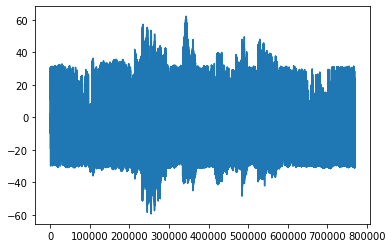

In [5]:
#data analysis
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.plot(y_train)
plt.show()



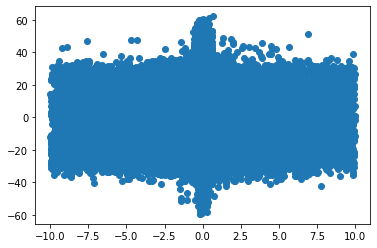

In [6]:
plt.scatter(X_train[:,3],y_train)
plt.show()

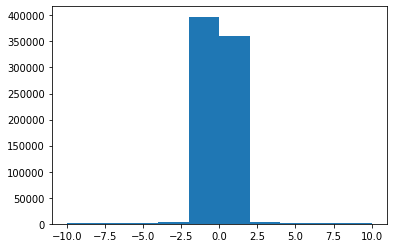

In [7]:
plt.hist(X_train[:,3])
plt.show()


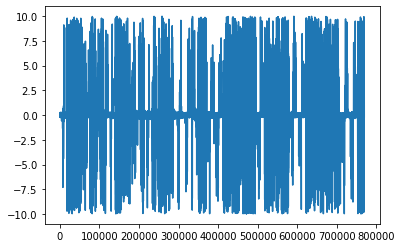

In [8]:
plt.plot(X_train[:,3])
plt.show()


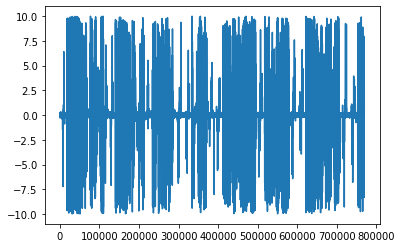

In [9]:
plt.plot(X_train[:,4])
plt.show()

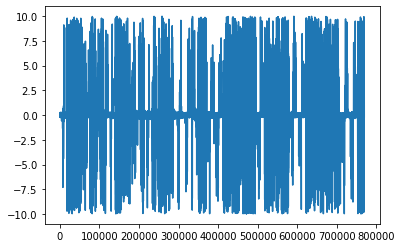

In [10]:
plt.plot(X_train[:,3])
plt.show()

In [17]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression



In [26]:
regr = RandomForestRegressor(n_estimators=16, max_depth=48, random_state=0,verbose=2)
regr.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 16


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s


building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  2.9min finished


RandomForestRegressor(max_depth=48, n_estimators=16, random_state=0, verbose=2)

In [27]:
y_pred = regr.predict(X_test)
print(y_pred[0:5])
print(sklearn.metrics.mean_squared_error(y_pred,y_test))
print(y_test[0:5])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[ -8.51937544   8.00094184 -18.34248751  14.33169985  -2.93419657]
84.80818865924856
[ -0.24512168   8.55969266 -16.6141519    0.75792485  -7.16886914]


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished


In [28]:
#save model
from joblib import dump, load
dump(regr, '/home/yunke/3dv_proj/bias correction/RF_learned_model.joblib') 

['/home/yunke/3dv_proj/bias correction/RF_learned_model.joblib']

In [16]:
#model = tf.keras.models.load_model('/home/yunke/3dv_proj/bias correction/learned_model')
y = model.predict(X_train)

[[ 0.87859094]
 [ 9.841019  ]
 [ 7.1547756 ]
 [10.815375  ]
 [11.061342  ]
 [ 8.970021  ]
 [ 5.5461674 ]
 [ 9.426523  ]
 [ 7.7923813 ]
 [ 6.064971  ]
 [ 7.0067005 ]
 [ 7.0106153 ]
 [ 4.8347244 ]
 [ 9.976785  ]
 [-1.9437962 ]
 [-8.158149  ]
 [-0.45888984]
 [ 1.1597904 ]
 [-4.1405344 ]
 [-4.671894  ]]


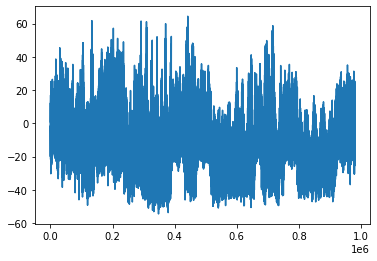

In [17]:
print(y[0:20])
plt.plot(y)
plt.show()


[17.39249442 16.97372094 20.50575009 16.99027715 21.3080518  15.07917016
 22.25442098 33.70458118 26.10971714 26.54539325  7.85517574 22.27127965
 17.97777628 10.03605777 11.78388304 15.12912538 25.85752142  5.52792234
  3.87944126 29.24687672]


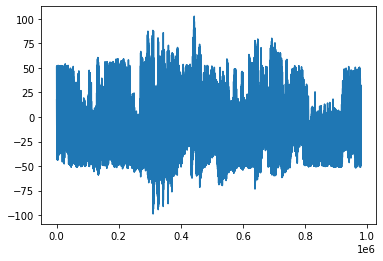

In [18]:
print(y_train[0:20])
plt.plot(y_train)
plt.show()

In [55]:
alpha=0
error = 0
D = np.zeros(1280*720)
molecular = np.zeros(1280*720)
denominator = np.zeros(1280*720)
for i in range(data_array.shape[0]):
    idx = int(data_array[i,1]-1)*1280+int(data_array[i,0])-1
    molecular[idx] += (1/data_array[i,3]-1/data_array[i,2]) * np.exp(-alpha/data_array[i,2])
    denominator[idx] += np.exp(-2*alpha/data_array[i,2])
for i in range(1280*720):
    if denominator[i]!=0:
        D[i] = molecular[i]/denominator[i]
for i in range(data_array.shape[0]):
    idx = int(data_array[i,1]-1)*1280+int(data_array[i,0])-1
    error += (1/data_array[i,3] - 1/data_array[i,2] - D[idx]*np.exp(-alpha*1/data_array[i,2]))**2
Error[j] = error
print("error=%f" %error)


error=28.959801


3.3859271009132665e-05